In [1]:
#Libraries
import pandas as pd
import numpy as np
from scipy import stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
loanData = pd.read_csv('/Users/vibhor/Desktop/Models/LC/Loan_status_2007-2020Q3.gzip', low_memory = False, index_col=0)

/anaconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [22]:
df = loanData

In [13]:
num_df = loanData._get_numeric_data()
cat_df = loanData[set(loanData.columns) - set(num_df.columns)]

In [ ]:
problematic = ['Charged Off','Late (31-120 days)', 'Default']
num_df['coFlag'] = [1 if x in problematic else 0 for x in loanData['loan_status']]
cat_df['coFlag'] = [1 if x in problematic else 0 for x in loanData['loan_status']]

In [ ]:
corrmat = num_df.corr() #no need of doing this as dataframe.corr runs only on numeric columns

In [ ]:
plt.figure(figsize=(15,12))
sns.heatmap(corrmat)

In [8]:
missing_data = loanData.isna().mean() #by variable this returns count(na)/total entries

In [ ]:
missing_data.plot.hist(bins = 50)

In [9]:
#vars that need to be dropped as they have far too many missing vals. This is a series whose index has the var names
drop_vars_missing = list(missing_data[missing_data>0.3].index)

In [10]:
drop_vars_missing

['mths_since_last_delinq',
 'mths_since_last_record',
 'next_pymnt_d',
 'mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'mths_since_rcnt_il',
 'il_util',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_revol_delinq',
 'revol_bal_joint',
 'sec_app_fico_range_low',
 'sec_app_fico_range_high',
 'sec_app_earliest_cr_line',
 'sec_app_inq_last_6mths',
 'sec_app_mort_acc',
 'sec_app_open_acc',
 'sec_app_revol_util',
 'sec_app_open_act_il',
 'sec_app_num_rev_accts',
 'sec_app_chargeoff_within_12_mths',
 'sec_app_collections_12_mths_ex_med',
 'hardship_type',
 'hardship_reason',
 'hardship_status',
 'deferral_term',
 'hardship_amount',
 'hardship_start_date',
 'hardship_end_date',
 'payment_plan_start_date',
 'hardship_length',
 'hardship_dpd',
 'hardship_loan_status',
 'orig_projected_additional_accrued_interest',
 'hardship_payoff_balance_amount',
 'hardship_last_payment_amount']

In [ ]:
df_lessMissing = loanData.drop(drop_vars_missing, axis= 1, inplace = False)

In [ ]:
df_num_lessMissing = df_lessMissing._get_numeric_data()

In [4]:
problematic = ['Charged Off','Late (31-120 days)', 'Default']
loanData['coFlag'] = [1 if x in problematic else 0 for x in loanData['loan_status']]

In [ ]:
df_num_lessMissing.shape

In [27]:
#df = df_num_lessMissing.iloc[:,0:4]
df['coFlag'] = [1 if x in problematic else 0 for x in loanData['loan_status']]

In [ ]:
# recast into long format for sns facetgrid
df1 = df.melt(['coFlag'], var_name='cols',  value_name='vals')

In [ ]:
g = sns.FacetGrid(df1, col='cols', hue="coFlag")
g = (g.map(sns.kdeplot, "vals"))


In [15]:
loanData['term'].value_counts()

 36 months    2060077
 60 months     865415
Name: term, dtype: int64

TypeError: The x variable is categorical, but one of ['numeric', 'datetime'] is required

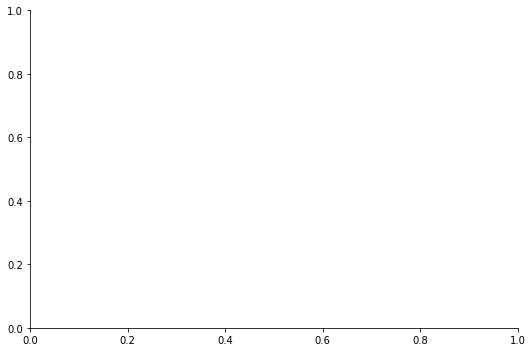

In [14]:
sns.displot(data=loanData, x='term', hue='coFlag', kind='kde', fill=True,  height=5, aspect=1.5)

In [31]:
#df['term'].apply(lambda x: float(x))
df[df['coFlag'] ==1]['term'].mean()

TypeError: Could not convert  60 60 60 36 36 36 36 36 60 36 36 36 60 60 60 60 36 60 36 60 36 60 36 60 36 36 36 36 60 36 36 36 36 60 60 36 36 36 36 36 36 36 36 36 60 60 36 60 36 36 36 60 60 36 36 60 60 60 60 60 60 60 36 36 36 36 36 36 36 60 60 36 36 60 36 60 36 60 36 36 60 60 60 36 60 36 36 36 36 36 60 60 60 60 36 36 36 60 36 36 60 36 60 36 36 36 36 36 60 60 36 36 36 36 36 60 36 36 36 60 36 60 36 36 60 60 60 36 36 36 60 36 36 36 36 36 36 36 36 60 36 36 60 60 36 36 36 36 60 36 60 36 60 60 60 60 60 60 36 36 36 60 36 36 36 36 36 36 60 60 60 36 60 36 60 60 60 36 36 36 60 60 36 36 60 60 60 36 60 60 36 60 60 60 36 60 36 60 36 60 60 36 36 36 60 36 36 36 36 60 36 36 36 60 60 36 60 60 60 36 60 36 60 36 60 36 36 60 60 60 36 36 36 36 36 36 60 36 36 60 60 60 36 36 36 36 60 60 60 60 60 36 36 36 36 60 36 36 36 36 36 60 60 60 60 36 36 36 60 60 36 60 60 36 36 60 36 36 60 60 60 36 60 36 60 36 36 60 60 36 60 60 60 60 60 60 60 60 60 60 60 60 60 36 60 36 36 36 60 60 36 36 60 36 36 60 60 36 36 36 60 36 36 36 36 36 36 60 60 60 60 60 60 60 60 36 36 36 60 60 60 36 36 60 36 60 60 60 60 36 60 60 60 36 60 60 36 36 60 36 36 60 36 36 60 60 60 60 60 36 36 36 60 36 60 60 36 36 36 36 60 60 60 60 60 60 60 60 36 36 60 36 36 60 36 36 60 36 60 36 36 60 60 36 36 36 36 60 36 60 36 60 60 60 60 36 36 36 60 36 60 36 36 60 60 60 60 60 36 60 36 60 60 36 60 60 36 36 60 36 60 36 60 60 60 60 60 36 60 60 60 36 60 60 36 36 60 36 60 60 60 36 60 60 60 36 36 60 60 36 36 60 60 60 60 36 60 60 60 36 60 60 36 36 36 60 36 36 60 36 36 60 36 36 60 60 60 60 36 36 60 60 36 36 60 60 60 36 60 36 60 36 36 36 60 36 60 60 60 36 60 60 36 60 60 60 60 36 36 60 36 60 60 60 36 60 36 60 60 36 36 36 60 60 36 36 60 36 60 60 60 60 36 60 60 60 36 60 36 36 60 60 60 60 60 60 36 60 36 60 60 60 36 36 60 60 36 36 36 60 36 36 60 60 60 36 60 36 36 60 60 60 60 60 60 60 36 36 36 60 60 60 60 60 36 60 60 60 60 36 36 60 60 60 36 60 60 60 60 60 36 36 36 60 36 60 36 60 36 60 36 36 36 60 36 60 60 36 60 60 60 60 36 36 36 60 36 60 36 60 60 60 60 60 36 60 36 60 60 60 36 36 36 60 36 36 60 36 36 36 60 36 36 60 36 60 60 60 36 60 60 36 36 60 36 60 60 36 60 60 60 36 60 60 60 60 36 60 36 60 36 60 60 60 60 60 36 60 36 60 60 36 36 36 60 60 60 60 36 60 36 60 60 36 60 36 60 60 60 60 36 60 36 60 60 60 36 36 36 36 36 36 36 36 60 60 60 60 36 60 60 60 60 36 60 36 36 36 36 60 36 36 60 36 36 60 60 36 60 36 60 60 36 36 36 60 60 60 60 60 36 36 60 36 36 60 36 36 36 36 36 36 60 60 36 36 36 36 36 60 36 60 60 60 36 36 60 36 60 60 36 60 36 60 36 60 60 60 60 60 60 60 36 60 36 36 36 36 60 60 60 60 36 60 60 36 36 60 60 60 60 60 60 36 36 36 36 60 60 36 36 36 60 36 36 60 60 60 36 60 36 36 36 60 60 60 60 60 36 60 60 36 36 60 36 60 60 60 60 60 60 36 36 60 36 36 36 60 36 60 36 60 60 60 36 36 36 60 60 60 60 36 36 60 60 36 36 60 36 60 36 60 60 60 60 36 60 36 60 36 36 60 60 36 60 60 60 60 36 36 60 60 60 60 36 36 36 60 60 60 36 60 36 36 36 60 60 60 60 36 60 36 60 60 36 60 36 60 60 36 60 60 36 60 60 60 60 36 36 60 60 60 36 60 60 36 36 36 60 36 36 36 60 60 36 36 60 60 36 36 60 60 60 36 36 60 36 60 60 60 60 36 36 36 36 36 60 60 60 36 60 36 36 36 36 60 36 60 36 36 36 36 36 36 60 36 60 36 36 36 36 36 36 60 60 60 60 36 60 36 60 60 36 60 60 36 36 60 60 36 60 60 60 60 60 36 60 60 60 60 36 60 60 36 36 36 60 60 36 60 36 36 60 60 60 60 36 36 60 36 60 36 36 36 60 60 36 36 36 60 60 60 60 60 60 36 36 36 60 36 36 60 36 36 36 60 36 36 36 60 36 36 60 36 60 60 60 36 60 36 60 60 36 60 60 60 36 36 36 36 36 60 36 36 36 60 36 36 60 60 60 60 36 60 36 36 60 60 36 60 60 60 36 36 36 36 36 60 60 36 60 60 60 60 60 36 60 36 36 60 36 60 60 36 60 36 60 60 36 36 36 60 60 36 36 36 36 36 36 60 60 60 60 60 60 36 36 36 36 36 60 36 36 60 36 36 60 60 60 60 60 60 36 36 60 60 60 36 36 36 36 36 36 60 60 36 36 60 60 36 60 60 36 60 36 60 60 60 36 60 60 60 60 36 36 36 60 36 36 60 36 60 60 36 60 36 36 60 60 60 36 36 36 36 60 36 36 60 60 60 60 36 36 60 36 36 60 36 36 60 60 36 60 36 60 36 60 60 60 36 60 36 36 60 60 36 60 36 36 60 36 36 36 60 60 36 60 36 36 36 60 36 36 60 60 60 60 36 36 36 36 36 60 60 60 60 36 60 60 60 60 60 60 36 36 60 60 36 60 60 36 60 60 60 60 36 60 60 36 60 36 60 60 60 60 36 36 36 60 60 36 36 60 36 36 60 60 36 60 36 60 60 36 60 60 36 60 36 36 60 60 60 60 60 60 60 36 36 60 36 60 60 36 36 60 60 60 36 60 60 36 60 36 60 60 36 36 36 60 60 60 36 60 36 36 36 60 60 36 36 60 36 60 60 60 60 36 36 60 60 36 60 60 60 36 36 36 36 60 36 60 36 60 36 60 60 36 36 60 60 36 60 60 36 36 36 60 36 60 36 60 36 60 36 36 36 60 60 36 60 36 36 60 60 60 36 36 36 36 36 36 36 60 36 60 36 36 36 60 60 36 36 36 60 36 36 36 36 60 36 36 60 60 36 36 36 36 60 36 60 60 60 36 60 60 60 60 60 60 60 60 36 60 60 60 36 60 60 60 36 60 36 60 36 60 36 36 60 60 36 60 36 60 36 36 60 60 36 60 36 36 36 36 60 60 36 36 36 60 60 36 36 36 36 60 36 36 36 60 36 60 36 36 36 36 60 60 36 60 60 60 36 36 60 36 36 36 36 60 60 60 60 60 36 36 36 60 36 60 36 36 60 60 36 60 60 36 36 60 60 36 36 60 36 60 60 36 36 36 36 60 36 60 36 60 60 36 60 60 60 60 60 36 36 60 60 36 36 36 60 60 36 36 36 60 36 60 60 60 60 60 36 60 36 60 60 60 36 60 36 36 36 60 60 36 60 60 60 60 36 60 60 36 36 60 60 60 60 60 60 36 60 60 36 36 60 60 36 60 60 60 36 36 36 60 60 60 36 60 36 60 36 60 36 36 60 60 60 60 36 60 60 60 36 36 60 60 60 36 36 60 36 60 36 36 60 36 60 60 60 60 36 60 60 60 36 36 60 36 36 36 60 36 36 60 60 36 36 36 36 36 60 36 60 36 36 36 36 60 60 36 36 36 60 60 60 60 36 36 60 60 36 60 36 36 60 36 60 60 36 60 36 60 36 60 36 60 60 60 36 60 36 36 36 36 60 60 60 60 36 60 60 60 36 60 60 60 60 36 36 60 60 36 60 60 36 60 60 60 36 60 60 60 60 36 36 60 36 60 36 36 36 60 60 60 36 60 36 36 36 36 36 60 36 60 60 60 60 60 60 36 36 36 60 60 60 60 60 60 36 60 36 60 36 60 60 60 36 36 36 36 36 36 60 36 60 60 36 36 36 36 36 36 60 60 36 60 36 60 60 60 60 36 36 60 60 60 60 36 60 60 36 36 36 60 60 60 36 60 60 60 60 60 36 60 60 60 36 60 36 36 36 60 36 36 36 60 36 36 36 36 60 36 36 60 36 36 36 36 36 60 60 60 36 36 36 60 36 36 36 60 36 60 60 36 60 36 60 60 36 60 60 36 36 36 36 36 36 60 36 60 36 60 60 36 36 36 60 36 36 36 60 36 36 60 60 36 36 36 60 36 36 36 36 60 36 36 60 60 60 36 36 36 60 60 60 36 36 36 60 36 60 60 36 60 60 36 60 60 60 60 60 60 36 36 36 60 36 36 36 60 36 60 36 60 60 60 60 36 60 36 60 60 60 36 36 60 36 60 60 36 36 36 36 60 60 36 60 60 36 36 60 36 36 60 36 60 36 60 36 36 36 60 36 60 60 60 60 36 36 60 60 60 60 36 36 36 60 36 60 60 60 60 36 36 36 36 36 60 60 36 36 60 60 60 36 36 36 36 36 60 36 36 60 36 60 60 60 60 36 36 36 36 60 60 60 60 60 36 60 60 36 36 36 60 60 60 36 36 36 36 60 60 60 60 36 36 60 60 60 36 60 60 36 60 36 60 60 60 60 36 60 36 60 60 60 60 36 36 60 60 60 60 60 60 36 36 60 60 60 36 60 36 36 60 60 60 60 60 36 36 36 60 60 36 60 36 36 60 36 36 60 60 36 36 36 60 60 36 36 60 60 36 60 36 60 60 60 36 36 60 60 60 36 36 60 60 60 60 36 36 36 36 60 60 60 60 60 36 36 36 36 36 60 60 60 36 36 36 36 60 36 60 60 36 60 36 36 60 60 36 60 60 36 60 60 60 60 36 60 60 60 60 60 60 36 36 60 60 60 60 36 60 36 36 60 36 36 60 36 36 60 60 60 60 60 36 60 36 60 36 60 60 36 36 60 60 36 36 60 36 60 60 36 60 60 60 60 60 60 36 60 60 36 60 60 36 60 36 36 36 36 60 36 60 60 60 36 60 60 36 60 36 60 60 60 60 60 60 60 60 60 36 60 60 36 36 60 60 60 60 60 60 36 60 60 36 36 36 60 60 60 60 60 36 60 36 60 36 60 60 60 60 60 60 36 36 36 60 60 36 60 36 60 36 60 36 36 60 60 36 36 60 36 60 36 36 36 60 60 36 36 60 60 60 60 60 60 36 36 60 60 60 60 36 60 36 60 60 60 36 36 36 60 60 36 60 60 36 60 60 60 36 36 60 60 60 60 60 60 60 36 36 60 36 36 60 60 36 36 36 60 36 36 60 60 60 60 36 36 60 60 60 60 36 36 60 60 36 60 36 36 60 60 36 36 60 60 60 36 36 60 60 60 60 60 60 60 60 36 60 36 36 60 60 60 36 60 60 36 36 36 36 60 36 60 36 60 60 36 36 36 60 36 60 60 60 36 60 36 36 60 60 60 36 60 36 60 60 60 36 36 36 60 36 60 60 60 36 60 60 36 36 36 36 60 60 60 36 60 60 36 60 60 60 36 36 36 60 36 60 60 60 60 60 60 60 60 60 60 60 36 36 60 60 36 60 36 36 36 60 36 36 60 60 60 60 60 60 60 60 60 60 36 36 60 60 60 36 60 36 36 60 60 36 60 60 36 36 60 36 60 60 36 60 36 60 60 60 60 60 60 60 60 36 36 60 60 60 60 36 60 36 60 36 36 36 60 36 60 36 60 60 60 60 36 60 36 36 60 60 60 36 60 36 36 60 60 36 36 36 36 60 60 60 36 60 60 60 60 60 60 60 60 60 36 60 60 36 60 60 60 36 60 36 60 60 36 60 60 60 36 60 60 60 36 60 60 60 60 60 60 36 36 36 36 60 60 60 36 36 36 60 60 60 60 36 60 60 60 36 36 60 36 60 36 36 36 60 36 36 36 60 60 36 60 60 60 36 36 36 60 60 60 36 60 60 60 60 36 60 36 60 60 60 60 36 60 36 60 60 60 36 36 60 36 36 60 60 60 36 60 60 36 60 60 36 36 60 36 60 60 36 36 36 60 60 60 36 60 60 60 60 60 60 36 36 60 60 36 36 60 36 60 36 36 36 60 60 60 36 60 60 60 60 60 60 60 60 60 36 60 60 60 36 60 60 36 60 60 60 36 60 36 60 60 36 60 36 36 36 60 60 36 36 60 36 60 60 60 36 60 36 60 60 36 60 36 60 60 60 60 60 60 60 60 60 60 60 60 60 36 36 36 60 60 60 36 60 60 60 60 60 60 60 60 60 36 60 60 60 36 36 60 60 60 60 60 60 36 36 36 36 36 60 36 60 36 60 60 60 36 60 60 60 60 60 36 60 60 36 36 60 60 60 36 60 60 60 60 60 60 36 36 60 36 36 60 36 60 36 36 36 36 60 60 36 60 36 60 36 60 60 36 60 60 36 60 60 60 36 60 60 60 60 60 60 36 60 60 60 36 36 60 60 60 60 60 60 36 60 60 60 36 36 60 60 60 60 60 60 36 60 60 60 60 60 60 60 36 36 36 60 60 60 36 60 60 36 60 36 60 60 36 36 60 60 60 36 36 36 36 60 36 36 36 60 60 60 60 60 36 60 60 60 60 60 60 60 36 36 60 36 60 36 60 36 60 60 36 60 36 60 36 36 36 36 36 60 36 36 60 60 60 60 60 36 60 36 36 36 36 36 60 60 36 60 60 60 60 36 36 36 36 36 60 36 60 60 36 60 60 60 60 36 60 60 36 36 60 36 60 36 60 36 36 36 36 60 60 36 36 60 60 36 60 60 60 60 60 36 36 36 60 60 36 36 36 60 36 36 36 60 36 60 36 36 60 60 36 60 60 60 60 60 60 60 36 60 36 60 36 36 60 36 60 60 60 36 60 36 60 36 60 36 60 36 36 60 60 36 60 60 60 60 36 36 36 36 36 60 36 36 60 36 60 36 60 60 36 36 36 36 60 60 36 36 36 36 60 36 60 60 60 60 60 36 36 60 60 60 36 60 36 60 60 60 60 36 60 60 60 36 60 36 36 36 36 36 60 36 36 36 36 36 36 36 60 60 60 60 36 36 36 60 36 36 36 60 60 60 36 36 36 60 60 36 36 36 36 60 60 60 36 36 60 36 60 60 36 36 60 36 60 36 36 36 60 60 36 36 36 60 60 60 60 36 36 60 36 60 60 60 36 60 60 36 60 36 36 36 60 60 60 36 60 36 60 60 60 36 36 60 36 36 36 60 60 36 60 36 60 36 36 36 60 36 36 36 36 36 36 36 60 60 36 60 36 60 60 36 36 36 60 36 36 36 36 60 60 60 36 36 36 36 60 60 60 36 60 60 36 36 60 60 60 60 60 60 36 36 36 36 36 60 60 60 60 36 60 36 60 60 36 60 60 36 36 60 36 60 36 36 36 36 60 60 60 60 60 60 36 60 36 36 60 36 60 60 60 60 60 60 60 36 60 36 36 36 60 60 36 36 60 36 36 36 60 60 36 36 36 60 60 60 36 60 36 60 36 36 60 60 60 36 60 36 60 36 36 60 60 60 60 36 36 36 60 60 60 36 60 60 36 60 36 60 36 60 36 60 36 36 36 60 60 60 60 36 60 60 60 36 36 36 36 60 36 36 60 60 36 60 60 36 60 36 36 60 60 60 60 60 60 36 60 60 60 60 60 36 60 60 36 60 60 36 36 60 36 60 36 60 36 36 60 60 60 36 36 36 60 36 36 60 60 60 60 36 60 60 60 60 60 60 36 36 36 60 60 60 60 60 60 36 36 36 36 36 60 36 36 60 60 60 36 60 60 36 60 36 60 60 60 60 36 60 36 60 60 36 60 60 36 36 60 60 36 60 36 60 36 60 60 36 36 36 60 60 60 60 60 36 60 60 36 60 60 36 36 60 60 60 36 60 60 36 60 60 36 36 60 60 60 60 36 60 36 36 60 60 36 36 60 36 36 60 60 60 36 36 36 60 36 60 60 60 60 36 36 60 60 60 36 36 60 36 60 60 60 60 36 36 60 36 60 36 36 60 60 36 60 36 60 60 60 60 60 60 36 60 36 60 60 36 36 36 60 36 60 60 60 60 36 36 60 60 60 36 36 60 60 36 60 36 36 36 36 36 36 36 36 60 36 60 36 36 60 60 36 36 60 36 60 60 60 60 60 60 60 36 60 60 60 60 36 36 36 36 36 36 36 60 36 60 36 36 36 36 60 60 36 36 60 36 60 36 60 60 60 60 36 60 60 36 60 36 36 60 36 60 36 60 36 60 60 36 36 60 36 36 36 60 36 60 60 60 36 60 36 36 60 60 60 60 60 36 60 60 60 36 60 60 60 60 60 60 60 60 60 60 60 60 60 36 60 60 36 60 60 36 36 36 60 36 36 60 36 60 60 60 36 60 60 36 60 60 36 36 60 60 36 36 60 60 60 36 60 60 60 60 60 60 36 36 60 60 36 60 60 36 60 60 36 36 60 36 60 36 60 60 36 60 36 60 36 60 60 60 60 36 36 60 60 60 60 60 36 36 36 36 60 36 60 60 60 60 60 60 36 60 60 36 36 60 36 60 36 60 60 60 36 36 60 36 36 36 36 60 60 36 36 60 36 36 36 60 36 60 60 60 36 60 36 36 60 36 60 60 36 36 36 36 60 36 60 60 36 60 60 60 36 36 36 36 60 36 60 60 60 36 36 60 60 60 60 60 60 60 60 60 60 60 36 36 36 36 36 60 36 36 36 60 60 60 60 60 36 60 60 60 60 60 60 60 36 60 36 60 36 60 60 36 36 60 36 36 60 36 36 36 60 36 60 60 60 36 36 60 60 60 36 60 60 60 60 36 36 60 60 60 36 60 60 36 36 60 60 60 60 36 36 60 60 36 60 60 60 60 60 60 60 60 60 60 36 60 60 60 60 36 36 36 36 60 36 60 36 60 60 36 60 36 60 36 60 60 60 36 60 60 36 36 60 36 36 36 36 36 36 36 36 60 36 60 60 60 36 36 36 36 36 36 36 36 36 36 36 60 36 36 60 36 60 60 60 60 60 60 36 36 60 60 36 60 60 36 60 36 60 36 60 60 60 36 60 36 36 60 60 36 36 36 60 36 36 60 60 60 36 36 36 60 36 60 36 36 60 36 36 36 60 60 60 36 36 60 36 60 36 60 60 36 60 36 60 60 60 60 36 60 36 60 36 60 60 60 60 36 60 60 36 60 36 60 60 60 60 60 60 36 60 36 36 36 60 60 36 60 60 60 36 36 36 60 60 60 60 60 60 36 36 36 36 36 60 60 36 60 60 36 36 60 60 36 60 60 60 60 36 36 36 60 60 60 36 36 36 36 36 60 36 36 36 36 36 60 36 60 36 60 36 60 36 60 60 36 36 60 60 36 36 36 36 60 60 60 60 60 60 60 60 60 60 60 36 36 36 36 60 60 60 60 36 36 60 36 36 60 60 36 36 60 60 60 36 60 60 60 36 60 60 36 60 60 60 60 60 60 36 36 36 60 60 60 36 36 60 60 60 60 60 60 60 60 36 60 60 36 36 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 36 60 36 60 60 60 60 60 36 36 36 60 60 60 60 36 36 60 60 36 36 60 60 36 60 60 60 60 36 36 60 60 36 60 60 36 60 60 36 36 60 36 60 60 36 60 60 36 36 36 36 60 36 60 36 36 36 36 60 36 60 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 60 60 36 36 36 36 60 60 36 36 36 60 60 60 60 60 60 36 36 60 60 36 36 60 60 60 36 60 36 60 60 36 60 36 36 60 60 60 36 60 60 36 36 36 36 60 60 60 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 60 60 60 36 36 60 36 36 60 36 36 60 60 36 36 60 36 60 36 36 60 36 36 60 60 60 36 36 60 60 36 36 60 60 36 60 36 60 36 60 60 36 36 60 60 36 36 36 60 36 60 60 60 60 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 60 36 36 36 36 36 60 36 60 36 60 36 60 36 60 60 60 60 36 60 60 60 36 60 60 60 60 60 60 36 60 36 36 36 60 36 60 60 36 60 60 36 36 60 60 36 36 60 36 36 36 36 36 60 60 36 36 36 36 36 36 60 60 36 60 60 60 36 36 60 36 36 60 36 36 36 60 36 36 36 36 60 36 60 60 60 36 60 60 36 60 36 36 60 36 60 60 60 36 36 36 60 36 60 60 60 60 36 60 60 36 36 36 36 60 36 60 36 60 36 60 36 36 60 36 36 60 36 60 60 60 60 60 36 36 36 36 36 36 60 36 60 36 36 36 36 36 36 60 36 36 36 36 60 60 60 36 36 36 36 36 36 60 60 36 60 60 36 60 36 60 60 36 36 36 60 60 60 36 36 36 60 36 60 60 60 36 60 60 36 36 60 36 36 36 60 36 60 36 36 60 36 60 60 36 36 60 36 60 60 60 60 36 36 36 60 36 60 36 60 36 36 36 36 36 36 36 36 60 36 36 36 60 60 36 36 36 36 36 60 36 60 36 36 60 36 36 36 36 60 60 36 60 60 36 36 36 60 36 36 60 60 36 60 36 60 60 60 60 36 60 36 36 60 36 36 36 36 36 60 36 60 36 36 36 36 36 36 60 36 36 60 36 60 60 60 60 36 60 60 60 60 36 36 36 60 36 60 36 36 60 60 36 36 36 60 60 60 60 36 60 60 60 36 60 36 36 36 60 60 36 36 36 36 36 36 36 36 36 36 60 36 36 60 60 36 36 36 60 36 36 36 60 36 60 60 36 60 36 36 36 36 36 60 60 60 60 36 60 60 36 36 60 60 36 60 36 60 36 36 36 60 36 36 36 36 36 36 60 36 36 60 60 60 36 60 60 60 60 36 36 36 36 36 60 60 36 36 36 60 36 60 60 60 36 60 36 36 60 36 36 36 60 36 36 36 36 36 60 60 60 36 36 36 60 60 36 36 60 60 60 36 60 60 60 60 60 60 36 36 60 60 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 60 36 36 60 36 60 60 60 60 36 60 60 36 60 36 60 36 36 60 36 60 36 36 36 36 60 36 60 36 60 36 36 60 36 60 60 36 36 36 36 36 60 36 36 36 60 60 36 60 36 36 60 60 60 36 36 60 36 60 60 60 36 36 36 36 36 36 36 60 36 36 36 60 60 60 36 36 36 36 60 60 36 60 36 36 36 60 36 36 36 60 36 36 36 60 60 36 36 60 36 36 60 36 36 36 60 60 36 36 60 60 60 60 36 36 36 60 36 60 36 36 36 60 60 36 60 36 60 36 60 36 60 60 36 36 60 36 36 36 60 60 60 60 60 60 60 60 36 36 36 36 60 36 60 60 60 60 36 60 60 60 36 36 60 60 36 36 60 60 60 60 36 60 60 60 36 60 36 36 60 36 36 36 36 60 60 36 60 36 36 60 60 36 60 60 60 60 60 36 36 36 36 36 36 36 36 60 60 60 36 36 60 60 36 36 60 36 36 36 36 60 60 60 60 36 36 60 60 60 36 60 36 60 60 36 36 60 36 36 36 60 60 60 60 36 60 60 36 36 60 60 36 60 36 36 60 36 36 60 60 36 36 36 36 60 36 36 36 60 60 36 60 60 36 60 60 60 36 36 36 60 36 60 36 60 60 36 60 60 36 36 36 60 60 60 60 60 60 60 36 36 60 60 60 36 60 36 60 60 36 60 36 36 36 60 36 60 60 60 36 36 60 60 36 60 60 60 60 60 36 36 60 36 60 36 60 60 36 60 36 60 60 36 36 60 36 36 60 60 36 60 60 36 60 60 60 36 60 60 60 60 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 60 60 36 36 60 36 36 36 36 36 36 60 60 60 36 60 60 60 36 36 36 36 36 36 60 36 36 36 60 36 60 60 60 36 60 60 60 60 36 36 60 36 36 36 60 36 36 36 60 36 36 36 36 60 60 36 60 60 60 60 36 36 60 36 60 36 36 60 36 36 60 60 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 60 36 36 60 36 60 60 36 36 36 60 36 36 60 60 60 36 60 36 36 36 36 36 36 60 60 60 36 36 60 60 60 60 36 60 36 60 36 60 36 36 60 36 36 60 36 36 36 60 60 36 60 60 60 36 36 36 36 60 60 60 36 36 36 36 60 60 36 36 36 60 60 60 36 36 60 36 60 60 60 60 60 60 60 36 36 60 60 36 36 60 36 60 60 60 36 36 60 36 36 36 36 36 36 36 60 36 60 36 36 60 36 36 36 36 36 36 60 36 36 36 60 60 36 60 36 36 60 36 60 36 36 36 36 36 60 36 36 36 36 36 60 36 36 36 60 36 36 36 60 36 36 36 60 36 60 36 60 36 60 36 36 36 36 36 36 36 60 36 36 36 60 60 36 60 36 60 36 36 36 60 36 36 60 60 60 36 60 36 60 36 36 36 60 36 36 60 60 60 60 36 36 36 60 36 60 36 36 36 60 60 36 60 60 60 60 36 36 60 36 60 60 36 36 36 36 60 36 36 36 60 60 36 60 60 36 60 36 36 36 60 60 36 60 36 36 36 36 36 36 60 36 60 60 60 36 36 36 36 60 60 60 60 36 36 60 36 60 36 36 60 36 36 36 36 60 36 36 36 36 36 60 36 36 60 60 36 60 60 36 36 36 36 36 60 36 36 60 60 60 60 60 60 60 60 36 36 36 36 36 36 60 36 60 60 36 60 60 60 60 60 36 36 60 36 36 36 60 36 60 60 36 60 60 36 36 60 36 60 36 60 36 60 60 36 60 60 36 36 36 60 36 36 60 36 60 60 36 60 36 60 60 36 36 60 36 60 36 36 36 36 60 36 36 36 60 36 60 36 60 36 36 36 36 36 60 36 36 36 60 36 36 60 60 36 36 36 60 60 36 60 36 36 60 36 60 36 36 60 36 36 36 60 60 60 36 36 60 60 36 36 60 36 60 36 36 60 60 60 36 60 60 36 60 36 60 60 60 36 36 36 60 36 36 36 36 36 36 36 60 60 36 60 36 36 60 36 60 36 36 36 36 36 36 60 36 36 36 36 60 60 36 36 36 36 60 36 36 36 36 36 36 60 36 36 36 36 60 36 60 36 36 36 60 36 36 36 36 60 60 60 36 36 36 36 36 36 36 60 60 60 36 60 36 60 60 36 36 60 36 36 60 36 36 36 60 36 60 60 36 36 60 36 36 60 60 60 60 60 36 36 36 60 36 36 36 36 36 36 60 36 60 36 60 36 60 60 60 36 36 36 36 60 36 36 36 36 36 36 60 36 60 60 36 36 36 60 36 36 36 60 36 60 36 60 60 36 36 36 36 60 60 60 60 60 36 60 60 36 60 36 60 36 36 60 36 60 36 60 60 36 60 36 60 36 60 36 36 36 60 36 60 60 60 36 60 36 36 36 36 36 60 36 60 60 36 36 36 36 36 60 36 36 36 60 36 36 36 36 60 36 36 36 36 36 60 36 36 36 60 60 36 60 36 36 60 36 36 60 36 36 36 36 60 36 36 36 60 60 60 60 36 60 36 36 60 60 60 36 36 60 36 36 36 36 36 60 36 60 60 60 36 36 36 36 60 36 60 60 36 60 36 36 60 36 36 36 36 60 36 36 36 36 36 60 36 60 36 60 36 60 60 60 60 60 36 36 60 36 60 60 60 36 36 36 36 36 60 36 60 60 36 60 36 36 60 60 60 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 60 60 36 60 36 36 60 36 60 60 60 60 60 60 36 36 60 36 60 36 36 60 36 60 36 36 60 36 36 36 36 60 36 36 36 36 36 60 36 60 36 60 36 60 36 60 36 60 36 36 36 60 36 36 36 36 60 60 60 36 36 36 60 36 36 60 60 60 60 60 36 36 36 60 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 36 36 36 60 60 36 36 36 60 60 60 60 36 60 60 36 60 60 60 36 60 36 36 36 36 36 60 36 60 36 36 36 36 36 60 60 36 60 60 60 36 36 60 36 60 36 36 60 60 60 36 36 60 60 36 36 36 36 60 36 60 36 36 60 36 60 60 60 60 36 60 36 36 60 60 60 36 36 36 60 36 60 36 60 36 60 60 60 60 36 36 60 60 60 60 36 36 60 36 60 36 36 60 60 36 60 60 36 36 60 36 60 60 36 36 36 60 60 36 36 36 36 60 36 36 36 60 36 60 36 60 36 60 36 36 36 36 60 60 60 36 36 36 36 36 36 36 36 36 60 60 60 60 60 36 60 60 36 60 60 36 60 60 60 36 60 60 60 60 60 36 60 60 60 60 60 36 36 60 60 60 36 36 36 36 36 36 36 60 36 60 60 36 36 36 36 36 36 60 60 60 36 36 36 60 36 60 36 36 60 36 36 36 36 60 36 60 60 36 60 60 60 36 60 36 60 60 60 36 36 36 36 60 60 60 60 60 36 60 60 36 60 60 36 36 36 60 60 60 36 60 36 36 60 60 60 36 60 60 36 60 36 60 60 36 36 36 36 36 60 36 60 60 60 36 60 60 36 36 60 36 36 60 60 36 36 60 60 36 36 60 60 36 60 60 36 60 60 36 60 36 60 60 60 36 36 60 36 60 60 36 36 60 36 60 36 60 36 36 36 36 36 60 36 36 36 60 60 36 36 36 60 60 36 36 36 60 60 36 36 36 60 60 60 36 36 60 36 36 36 60 36 36 36 36 36 60 60 36 36 60 36 36 36 60 36 60 36 60 36 36 60 60 36 36 36 36 60 36 36 60 36 60 60 60 60 36 36 60 36 60 36 36 36 60 36 36 36 60 36 36 36 60 60 60 60 60 36 36 60 36 36 36 60 36 60 36 36 36 36 36 60 36 60 36 60 36 60 36 36 60 60 60 60 36 36 60 36 60 36 36 60 60 36 36 36 60 36 36 36 36 60 36 60 36 60 60 36 60 36 36 60 60 60 36 36 60 36 36 36 36 60 60 36 60 60 36 60 36 36 36 60 60 36 36 36 60 60 60 36 36 60 36 36 36 60 60 60 36 36 36 36 36 36 36 36 60 36 36 60 60 36 36 36 36 36 60 36 36 36 60 60 60 60 60 60 60 60 60 36 36 60 36 36 36 36 36 36 36 36 60 60 60 36 36 60 36 36 36 60 60 60 36 60 60 60 36 36 60 36 60 60 36 60 36 60 36 60 36 60 36 36 60 60 60 60 36 36 36 36 36 60 60 60 60 36 36 60 36 60 36 60 36 60 36 36 36 36 36 60 60 36 60 36 60 36 60 60 36 36 36 36 36 60 36 36 60 60 60 36 60 60 60 36 36 36 60 60 36 60 36 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 36 36 60 36 60 36 36 36 36 60 36 36 36 36 36 60 60 36 36 36 36 36 36 36 60 60 60 60 36 60 36 36 60 36 60 36 36 60 60 36 60 36 60 36 36 60 36 60 60 60 36 60 60 36 60 60 36 60 36 36 60 60 36 60 36 60 36 36 60 36 36 36 60 36 60 36 36 60 36 36 36 60 36 36 60 60 36 36 60 36 36 60 60 36 60 36 36 60 36 60 36 36 60 36 36 36 36 60 36 60 60 60 36 36 36 60 36 36 36 60 60 60 60 36 60 60 36 36 60 60 36 36 60 36 60 36 36 36 60 36 36 60 36 60 60 36 36 60 36 60 60 36 36 36 36 60 60 36 60 60 60 36 36 36 36 60 60 60 36 60 60 36 60 36 36 60 60 60 36 36 60 36 60 60 36 60 36 36 36 60 36 60 36 60 60 36 36 60 36 60 36 36 36 60 60 36 36 36 36 36 36 60 60 36 36 36 36 60 36 60 36 36 36 60 36 36 60 60 36 36 36 36 36 60 36 60 60 60 36 36 36 60 60 36 36 36 60 36 36 60 60 60 60 60 36 60 36 36 60 60 60 36 36 60 60 36 60 60 36 60 36 36 36 60 60 60 60 60 60 60 60 36 60 60 60 36 60 60 60 36 36 60 36 60 60 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 60 60 60 36 36 60 36 36 36 36 36 36 60 60 36 60 60 36 60 60 36 60 36 36 36 36 60 36 36 36 36 60 36 60 60 36 60 36 36 60 36 60 36 60 36 60 36 36 36 36 36 36 60 36 36 60 36 60 36 60 36 36 36 36 60 60 36 36 36 60 36 36 60 36 36 60 36 36 60 36 60 60 36 60 60 60 60 36 60 60 36 36 60 36 60 36 60 36 60 60 36 60 60 36 36 60 60 36 36 36 36 60 60 36 60 60 36 36 36 36 60 36 60 60 60 60 60 60 36 36 36 36 36 36 36 36 36 36 36 60 36 60 36 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 60 60 60 60 60 36 36 60 60 36 60 36 36 36 60 36 36 36 36 60 60 60 60 60 36 60 36 36 60 60 36 60 36 60 36 36 60 60 60 36 36 60 60 60 36 60 60 36 60 36 60 36 60 36 36 36 36 60 36 36 36 36 36 36 36 60 36 60 36 60 36 60 36 36 36 60 36 60 36 60 60 60 60 36 36 36 36 60 60 36 36 60 36 36 36 36 60 36 60 36 36 36 36 60 60 60 36 60 60 60 36 60 60 36 60 36 60 36 60 60 36 36 36 60 60 36 36 36 36 60 60 60 36 60 36 60 60 36 36 36 36 36 36 36 36 60 36 60 60 60 36 36 36 36 36 60 60 60 36 60 60 36 36 60 36 60 36 36 60 36 60 60 36 36 60 36 36 36 60 36 36 36 60 36 36 60 36 60 36 60 60 60 60 36 60 60 36 36 60 36 36 60 36 36 36 60 36 36 60 36 60 60 36 60 60 60 60 60 60 36 60 60 36 60 60 60 60 36 60 36 60 36 36 60 36 36 60 36 36 60 60 36 60 60 36 60 36 36 36 60 36 60 60 36 36 36 36 60 60 36 60 36 36 60 36 36 60 60 60 36 36 36 36 36 36 36 36 36 60 60 60 36 36 60 36 60 60 60 36 36 36 36 60 60 60 60 60 60 36 36 36 36 60 60 36 60 36 60 36 60 36 60 36 60 60 60 60 60 60 36 60 36 60 60 36 36 36 60 60 60 36 36 36 36 36 60 60 60 60 60 60 36 36 36 36 36 60 36 36 60 60 36 36 60 60 36 36 60 36 60 60 36 36 36 60 36 36 36 36 36 60 60 60 36 60 36 60 60 60 60 60 60 36 60 36 36 60 36 36 36 36 36 36 60 36 60 36 60 36 36 36 60 60 60 60 36 36 60 36 36 36 36 36 36 60 36 60 36 60 60 60 36 36 36 60 36 36 60 36 36 36 36 60 36 36 60 36 36 36 60 60 60 60 36 36 60 36 60 60 36 36 36 60 36 36 60 36 36 60 36 36 60 36 60 60 36 36 60 36 36 60 60 60 36 36 60 60 60 36 36 60 60 36 60 60 60 36 60 60 60 36 36 60 36 60 36 60 60 36 60 60 36 36 36 36 36 36 36 60 36 36 36 36 60 60 36 36 60 36 36 60 60 36 60 60 60 60 60 36 36 36 60 60 36 60 60 60 60 60 60 60 36 36 60 60 36 60 60 36 36 36 36 36 60 60 36 60 36 60 60 36 36 36 36 36 60 60 36 36 36 36 36 60 36 36 60 36 36 60 60 60 36 36 60 36 36 36 36 60 60 60 60 60 36 36 60 36 36 36 60 60 36 36 36 60 60 36 60 36 60 36 60 36 60 36 36 60 60 36 36 60 36 36 60 36 36 36 60 60 36 36 36 36 60 60 36 36 60 60 36 36 60 60 36 36 60 36 36 36 36 60 36 60 36 36 36 36 36 36 36 60 60 36 60 60 36 36 36 36 36 36 36 60 36 36 60 36 60 36 36 36 36 60 36 36 36 36 36 60 60 60 60 36 60 60 36 36 36 60 60 36 36 36 36 60 60 36 36 60 36 60 60 36 36 36 60 60 36 36 36 36 36 60 36 60 60 36 36 36 60 60 36 60 60 36 60 36 60 36 60 36 60 60 60 36 60 60 60 36 36 60 36 60 36 36 60 60 36 36 60 36 36 36 36 60 36 36 60 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 36 60 60 36 36 36 60 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 60 60 60 60 60 36 36 36 36 36 36 60 36 36 60 36 36 60 36 36 36 60 36 36 60 36 60 36 60 60 36 36 60 36 36 60 36 36 36 60 36 60 36 60 36 36 36 60 60 36 36 60 36 36 36 36 36 36 36 36 36 36 60 36 36 60 60 36 60 60 60 36 36 36 60 60 60 60 60 60 60 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 60 60 60 36 36 36 60 36 36 36 36 60 36 36 60 60 60 60 36 36 36 36 36 36 60 36 60 60 60 60 60 60 36 36 36 60 60 60 60 60 36 36 60 60 36 36 36 36 36 60 60 60 36 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 36 60 60 36 60 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 36 36 60 60 36 36 36 60 60 36 36 36 36 36 60 60 36 36 60 36 60 36 36 36 36 60 60 60 36 60 60 36 60 36 60 60 36 60 36 60 60 60 60 60 36 60 60 36 36 60 36 36 36 36 36 36 36 36 60 60 36 60 36 36 36 60 36 60 36 36 36 60 36 36 60 60 60 36 36 60 60 60 36 36 60 36 60 60 60 36 36 36 60 36 36 36 36 36 60 60 60 60 36 60 36 60 60 36 36 60 60 36 60 36 36 60 36 36 60 60 36 36 60 36 36 60 60 60 36 60 36 60 36 60 60 36 60 36 60 60 36 36 36 60 36 36 60 60 60 36 60 36 36 60 36 36 36 60 60 36 60 60 36 60 36 36 36 60 60 36 36 60 36 60 36 36 60 60 36 36 60 60 36 36 36 36 60 36 36 60 36 60 60 36 60 60 36 60 36 60 60 36 60 36 36 60 36 36 36 36 36 36 36 60 36 60 36 36 60 36 36 60 60 60 36 36 36 60 60 36 36 36 60 36 36 60 36 36 36 36 36 36 60 60 36 60 36 36 60 60 36 60 60 60 60 36 36 36 36 60 36 36 60 60 60 36 36 36 60 36 36 36 36 60 36 36 60 36 60 36 36 60 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 60 36 60 36 36 60 60 36 36 36 60 36 60 60 36 60 36 36 36 60 60 36 60 36 36 60 36 36 60 36 60 60 36 36 36 36 36 36 36 60 60 36 36 36 36 36 60 60 36 36 60 60 36 36 36 36 36 60 60 36 60 36 36 36 36 36 60 36 36 60 36 36 36 36 36 60 36 36 60 60 36 36 36 36 60 36 36 36 60 60 60 36 36 60 36 60 36 36 36 36 36 36 60 36 36 36 60 36 36 36 36 36 36 60 60 36 60 36 36 60 36 36 36 60 36 60 60 60 36 36 36 60 36 60 36 36 60 36 60 36 36 60 36 36 60 36 36 60 60 36 60 36 60 60 36 60 36 60 60 60 36 36 36 36 60 60 36 60 60 36 36 60 60 36 36 60 36 36 36 60 60 36 36 60 36 36 36 36 36 60 60 60 60 36 36 60 36 60 36 36 36 60 60 36 60 36 60 36 36 60 36 36 60 36 36 36 36 60 36 36 60 36 60 60 36 60 36 60 60 36 60 36 36 60 36 36 60 36 60 36 36 60 36 60 36 60 36 60 60 36 36 60 60 36 60 60 36 36 60 60 60 36 36 60 36 36 36 36 60 36 36 36 36 60 60 60 36 60 36 36 60 36 36 60 60 36 60 60 36 36 36 60 36 36 36 60 36 36 36 60 36 36 36 36 36 60 60 36 36 36 60 60 36 36 36 60 36 60 60 36 36 36 36 36 36 36 60 60 60 60 36 60 60 60 36 36 60 36 36 36 36 60 60 60 60 36 60 36 60 36 36 60 60 36 60 36 60 36 60 60 60 36 36 60 36 36 36 60 60 36 36 60 60 60 36 60 36 36 36 36 36 36 36 60 60 60 60 36 36 60 36 36 60 36 36 60 60 36 60 36 60 36 36 60 60 60 60 36 60 36 60 36 36 36 36 60 60 60 36 36 36 60 60 36 36 36 60 60 36 36 60 60 60 60 36 60 36 36 60 36 36 60 60 60 36 36 36 36 60 36 60 36 60 60 36 60 36 60 36 60 36 60 36 36 36 36 36 60 36 36 36 60 60 60 36 36 60 36 36 36 60 60 60 60 36 36 36 36 60 60 60 60 36 60 60 36 60 60 60 36 60 60 60 36 36 60 60 36 60 36 60 36 36 60 60 36 60 36 60 36 36 60 60 36 36 36 60 36 60 36 60 36 60 60 60 36 36 60 60 36 60 60 36 36 36 60 36 36 36 60 36 60 60 36 36 36 60 60 60 36 36 36 60 60 36 60 60 36 36 60 60 60 36 60 60 36 36 60 60 36 60 60 36 36 36 60 36 60 60 36 60 36 60 60 36 36 60 36 60 36 60 36 60 60 60 36 36 60 60 36 36 60 36 60 60 36 60 60 60 36 60 36 36 60 60 60 60 36 60 36 36 36 36 60 60 36 60 36 60 60 36 60 36 60 36 60 60 60 60 36 36 36 36 36 36 60 36 36 36 36 36 36 60 36 36 60 60 60 60 60 36 36 36 36 60 36 36 36 60 60 60 36 60 60 36 36 60 36 36 60 60 36 36 60 60 36 60 60 36 36 60 36 60 36 60 60 60 36 60 60 60 60 36 36 60 60 60 60 36 60 60 36 60 60 60 60 36 60 36 60 36 36 36 36 60 36 60 36 60 60 60 60 60 36 36 60 36 60 36 60 36 60 60 36 36 36 36 60 60 60 36 60 36 60 36 60 36 36 36 60 36 60 36 60 60 36 36 36 36 60 36 36 36 36 60 60 60 60 36 36 60 36 36 60 36 36 36 36 36 60 36 36 60 36 36 60 60 60 36 60 36 60 60 36 36 60 60 36 36 60 60 36 36 36 36 36 60 36 36 36 60 36 60 36 36 36 36 60 60 36 36 60 60 36 60 36 60 60 60 60 36 60 60 36 36 36 36 60 36 36 60 36 60 36 36 36 36 36 36 60 60 36 60 60 60 36 60 36 36 36 36 60 60 36 36 60 36 36 60 60 36 36 60 60 60 36 36 36 36 36 36 60 36 36 36 60 36 36 60 60 36 60 60 36 60 60 36 60 36 60 60 60 36 36 60 36 60 60 60 60 60 36 60 36 36 60 36 36 36 36 60 36 36 60 60 36 36 60 36 60 60 36 60 60 36 60 36 60 60 36 36 60 60 36 36 36 60 36 36 60 36 36 36 60 36 36 36 60 36 36 36 60 36 36 36 36 60 36 36 36 36 60 60 60 36 36 36 60 36 60 36 36 36 60 60 60 60 60 60 36 36 36 36 36 36 36 60 60 60 36 36 60 60 36 60 36 60 36 60 36 36 36 60 36 60 60 60 60 36 36 36 36 36 60 36 36 60 36 36 36 60 60 36 36 36 36 36 60 36 36 36 60 60 60 36 60 36 60 60 60 60 36 60 60 36 36 60 36 36 36 60 60 36 60 36 60 36 60 36 36 60 36 36 60 36 36 60 36 36 60 36 36 60 60 36 36 60 60 36 60 60 60 60 36 36 36 36 60 36 60 60 36 36 36 36 36 36 36 36 60 36 60 36 36 60 60 36 36 60 36 60 36 60 36 60 60 60 36 36 36 36 36 36 36 36 60 36 36 60 60 60 36 36 36 36 36 36 36 60 36 36 60 60 36 60 60 36 60 36 36 60 36 36 60 60 60 36 36 60 36 36 36 36 60 60 36 36 60 36 60 60 60 60 60 60 60 36 36 36 60 60 60 36 36 60 36 60 60 60 36 60 36 60 36 60 60 36 36 36 36 60 60 60 60 36 36 60 36 36 36 36 60 36 36 36 60 36 60 36 60 60 60 36 36 36 60 60 36 36 60 36 36 60 36 60 60 36 60 60 36 36 60 36 36 36 36 60 36 36 36 36 60 36 36 60 36 60 36 36 36 36 36 36 36 36 60 60 36 60 60 60 60 36 36 60 60 36 60 60 36 36 36 36 36 60 60 60 60 36 36 36 36 36 60 36 60 60 36 36 36 36 36 60 36 36 36 60 60 60 36 60 60 36 36 60 60 60 36 36 36 60 60 36 36 36 60 36 36 60 36 60 60 60 60 60 60 36 36 36 36 60 60 36 60 60 36 36 60 60 60 60 36 36 36 60 60 60 36 60 60 36 60 60 60 36 60 36 36 36 60 60 60 36 36 60 36 60 36 36 36 60 36 36 36 60 36 60 60 60 36 60 36 36 36 36 36 60 36 60 60 36 36 60 60 36 60 60 60 36 36 60 36 36 36 36 36 36 60 60 60 60 60 36 36 36 36 60 36 60 36 60 60 36 60 36 36 60 36 36 36 60 36 36 60 36 36 36 36 60 60 36 60 36 36 60 60 36 36 36 36 60 60 36 60 36 60 36 60 36 60 36 36 60 36 36 36 60 60 36 60 60 36 60 36 60 36 36 36 36 60 60 36 60 36 36 60 36 60 36 36 60 36 60 36 36 36 36 60 36 36 36 60 60 60 36 36 60 60 60 36 60 60 36 36 36 60 36 60 36 60 36 36 36 60 36 60 36 60 36 60 36 36 36 36 60 60 60 60 36 36 36 60 60 60 36 60 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 60 36 36 60 36 36 60 60 60 36 36 60 36 36 60 60 36 60 36 60 36 60 60 60 60 36 36 60 36 60 36 60 36 60 60 60 36 60 60 60 36 36 36 36 60 36 36 36 36 36 60 36 36 36 36 36 36 36 60 60 36 36 36 36 60 36 36 36 60 36 36 36 36 60 60 60 60 36 60 60 60 36 60 60 60 60 36 36 36 60 60 36 60 36 36 36 36 36 60 60 36 36 60 36 36 36 60 60 36 36 60 36 36 60 36 36 60 60 36 36 60 60 36 60 36 60 36 60 60 60 36 60 60 60 36 60 36 36 60 36 36 60 36 60 60 60 60 36 60 60 36 60 36 36 36 60 60 36 36 36 60 36 36 60 60 36 60 60 36 60 60 60 36 60 60 36 36 36 60 36 60 60 36 36 36 60 36 60 60 60 60 60 60 36 60 60 36 36 60 60 36 36 60 60 60 60 60 60 36 60 60 60 36 60 60 36 60 60 36 60 36 36 36 60 60 60 60 60 60 36 60 60 60 36 36 36 36 36 36 60 36 60 36 60 60 36 60 36 36 36 36 36 36 60 36 60 36 36 60 36 36 36 36 36 36 60 36 36 60 60 60 60 36 60 60 60 60 60 36 36 60 60 60 36 36 60 60 36 36 60 60 60 60 60 36 60 36 36 36 60 36 60 60 60 60 60 36 60 60 60 36 60 60 36 60 36 36 36 36 60 36 36 60 36 36 36 60 36 36 60 36 36 60 36 60 60 36 60 36 60 60 60 36 36 36 36 60 60 60 60 36 36 60 60 36 36 36 60 60 60 60 36 60 36 36 36 36 60 60 60 36 60 60 60 36 36 60 36 36 60 36 36 60 60 60 60 60 60 60 36 60 60 60 60 60 36 60 36 60 60 36 60 60 36 36 36 36 36 36 60 60 36 60 36 36 60 60 36 36 36 36 36 60 60 36 36 36 60 60 36 36 36 36 60 60 36 36 36 36 36 60 60 36 36 36 60 60 60 60 60 36 60 60 36 36 36 60 60 36 36 60 60 60 60 60 36 60 36 36 60 60 36 60 36 60 60 60 60 36 36 60 60 36 36 60 36 60 60 60 36 36 60 60 60 36 36 60 60 60 60 60 36 60 36 36 36 36 60 36 36 36 60 60 36 60 60 60 36 60 60 36 60 36 36 36 60 36 60 36 60 60 36 36 36 36 60 36 60 36 60 36 36 36 60 60 36 36 36 60 36 36 36 60 60 36 36 60 60 36 36 36 36 36 36 36 36 60 36 36 36 60 60 60 36 36 36 36 36 36 60 36 36 36 60 60 60 60 60 60 60 36 60 36 36 60 36 36 60 60 60 36 36 36 60 36 36 60 36 60 36 36 36 36 36 36 36 36 60 36 60 60 60 36 60 36 36 60 36 60 60 60 36 36 36 36 60 36 36 60 60 36 36 60 36 36 60 36 36 36 60 36 36 36 36 36 60 36 36 36 36 60 60 60 36 36 36 60 60 36 36 60 36 36 36 36 36 36 36 60 60 60 60 36 60 36 36 36 60 60 36 36 36 60 36 36 60 36 36 60 36 36 36 60 60 60 60 36 36 60 60 60 36 36 36 60 60 36 36 60 60 36 36 60 36 60 60 36 36 60 60 36 60 36 36 36 36 60 60 36 36 36 36 36 60 60 36 60 36 36 60 36 36 36 60 36 36 60 36 36 36 60 60 60 36 36 36 60 36 60 60 60 60 60 36 36 36 36 60 36 60 36 36 36 60 60 60 36 60 60 36 36 36 36 36 60 60 36 60 36 36 60 36 36 60 60 36 60 36 60 36 60 60 36 60 36 60 36 36 36 60 36 36 60 60 60 60 60 36 36 60 36 36 60 60 36 36 60 36 60 36 36 36 36 60 36 36 36 60 60 60 60 36 60 36 36 60 60 36 36 60 36 36 36 36 60 60 36 36 36 36 36 36 36 60 36 60 60 36 36 60 60 36 36 36 36 36 60 60 36 60 60 36 60 60 36 36 60 60 36 60 60 60 36 60 60 36 36 36 60 36 60 36 60 36 36 60 60 60 60 60 36 36 60 36 60 60 36 36 36 60 36 60 60 36 60 60 36 60 60 36 36 60 36 60 36 36 60 60 60 60 36 36 36 36 60 36 36 36 60 60 36 36 60 60 36 60 60 60 60 60 36 60 60 60 36 60 60 36 60 36 36 60 36 60 60 36 60 36 36 36 36 36 36 60 36 36 60 36 36 60 36 36 36 36 36 60 36 36 60 60 60 36 36 36 36 60 36 60 36 60 36 60 36 60 60 60 36 60 36 36 60 36 36 60 60 36 36 36 60 36 36 60 36 36 60 60 36 36 36 60 36 36 60 36 60 60 36 36 36 36 60 36 60 36 60 60 36 36 60 36 60 36 60 60 60 60 36 36 60 36 36 60 60 60 36 36 60 60 36 60 36 60 36 60 60 60 60 60 60 60 60 60 36 60 60 60 36 36 60 36 36 36 36 36 36 36 36 60 60 60 36 36 36 36 36 60 36 36 36 60 36 60 60 60 60 36 60 36 36 60 60 60 60 60 60 36 60 60 60 60 60 36 36 60 60 36 60 60 36 36 60 36 36 36 36 60 60 36 60 36 60 36 36 60 36 36 36 60 36 60 60 60 36 60 36 36 36 36 60 36 36 60 36 36 36 36 60 60 36 36 36 60 36 36 36 60 36 60 36 36 60 36 60 60 36 60 36 36 60 36 36 36 36 60 36 36 60 60 36 36 36 36 60 36 60 36 60 36 60 36 60 60 36 36 60 36 60 60 60 60 60 36 36 60 60 60 36 36 60 60 36 36 36 36 60 60 36 36 36 60 36 36 60 36 60 36 36 36 36 36 60 60 36 36 36 36 60 36 36 60 60 36 36 36 36 60 60 36 36 36 60 36 36 36 60 60 36 60 36 60 60 36 36 36 60 60 36 36 36 36 60 60 36 36 60 60 36 60 36 36 60 60 36 60 36 60 60 60 36 36 60 36 36 36 60 36 60 60 60 36 60 60 60 36 36 36 60 36 60 36 36 36 36 36 36 36 36 36 60 36 60 36 60 36 60 60 36 60 60 36 60 60 60 60 36 36 36 36 36 60 60 60 36 36 60 36 60 36 60 60 36 36 36 36 36 60 36 60 60 36 36 36 60 60 60 36 36 60 36 60 36 60 60 36 60 60 60 36 60 36 60 36 36 36 60 60 36 36 60 60 60 36 36 60 36 60 36 36 36 36 36 36 60 36 36 36 36 36 60 36 60 36 36 36 60 36 36 60 36 36 60 36 60 36 36 60 36 60 36 36 60 60 36 36 36 36 60 36 36 60 60 36 36 36 36 60 60 60 60 36 36 36 36 36 60 60 36 60 60 36 60 60 60 60 60 36 60 60 36 36 36 60 36 60 60 36 36 36 60 36 36 36 60 36 36 36 60 60 36 60 60 60 60 60 36 36 36 36 36 36 36 36 60 60 60 60 60 36 60 60 60 36 36 60 36 36 60 36 60 36 36 36 36 36 36 60 60 60 60 60 60 60 60 36 60 60 36 60 36 60 36 36 36 60 60 60 36 60 36 60 36 60 36 60 36 60 60 60 36 60 36 36 60 60 60 36 60 60 36 36 60 36 60 36 36 60 60 36 36 60 36 60 60 60 36 60 36 36 36 36 60 36 36 60 60 36 60 60 60 36 36 36 60 36 36 60 36 36 36 60 60 36 60 36 60 36 60 60 60 36 36 36 36 60 60 36 36 36 36 36 36 36 36 60 36 36 60 60 36 60 36 60 60 60 36 36 36 36 60 60 36 36 60 60 36 60 36 36 36 36 60 36 60 36 60 60 36 60 36 60 36 36 60 60 36 36 60 60 36 60 60 60 36 36 60 36 36 36 36 60 60 36 60 36 36 36 60 36 36 36 60 60 36 36 36 36 60 36 60 36 36 60 36 60 36 60 60 60 36 60 36 36 60 60 36 36 36 60 60 36 60 36 60 36 60 60 36 36 36 60 36 36 60 60 36 60 60 36 60 60 60 60 36 36 60 60 60 60 36 36 60 36 36 36 60 36 60 60 36 36 60 36 60 60 36 60 60 36 60 36 36 60 36 60 60 60 60 60 36 36 60 36 60 60 60 36 36 36 60 60 36 60 60 60 60 36 36 36 60 60 60 36 36 60 36 36 60 36 36 60 36 60 60 36 60 36 60 36 36 60 36 60 36 36 60 60 36 36 60 36 36 60 36 60 60 60 36 36 36 60 60 60 36 36 36 60 60 36 36 36 60 36 36 60 36 60 36 60 60 36 60 60 36 60 36 60 60 60 60 36 60 60 60 60 36 60 36 60 36 36 60 60 36 60 36 60 36 36 36 36 60 36 60 36 60 60 36 60 60 36 36 60 60 36 36 36 60 36 36 36 60 36 36 60 36 36 60 60 60 36 36 60 36 36 36 60 36 36 36 60 36 60 36 60 60 60 36 60 36 60 60 36 60 36 60 36 60 60 36 60 36 36 36 60 36 36 36 36 60 60 36 36 36 60 60 60 60 36 36 36 36 36 36 60 60 60 36 60 36 36 60 36 36 36 36 60 36 60 36 60 36 36 36 60 36 36 36 60 36 60 60 36 36 36 36 60 60 36 60 36 36 36 60 36 36 36 36 60 36 36 60 36 60 36 60 36 36 36 60 60 36 60 36 36 36 36 36 36 60 60 36 60 60 36 36 60 60 60 60 60 36 36 60 36 60 36 36 60 36 60 36 60 60 36 36 36 60 36 60 60 60 36 60 36 36 60 60 36 36 36 60 60 60 36 60 36 36 36 60 60 60 36 60 36 36 36 60 36 60 36 60 60 36 36 36 60 36 60 60 36 60 60 60 36 36 60 60 60 60 36 60 36 60 60 60 60 36 36 60 60 60 36 36 60 36 60 60 60 60 36 36 60 36 36 60 60 36 60 36 60 36 60 36 60 60 36 36 36 60 36 60 36 36 36 60 60 36 60 60 60 36 36 60 36 60 60 36 60 60 36 60 36 36 36 60 60 60 60 60 60 36 36 60 60 36 60 36 36 36 36 36 60 36 60 60 36 36 36 36 60 60 60 60 60 36 36 60 60 60 36 36 60 60 60 36 60 36 60 36 36 36 60 36 36 60 60 36 36 36 36 36 60 60 60 36 60 36 36 36 60 36 36 36 36 60 60 60 36 36 60 36 60 36 36 60 36 60 36 60 60 60 60 60 36 60 60 60 60 36 36 60 60 36 60 60 60 60 60 36 36 60 60 36 36 36 36 36 60 36 36 36 60 36 60 36 60 60 36 36 60 36 36 60 36 60 36 36 36 60 60 60 60 60 36 60 60 36 36 36 36 36 60 60 36 36 60 36 36 36 60 60 36 60 60 60 36 36 36 36 36 36 36 60 36 36 36 36 36 60 60 36 60 60 36 36 36 60 60 60 36 36 36 36 36 36 60 60 60 36 60 36 36 60 36 36 36 36 60 36 60 36 36 60 60 60 36 60 60 36 60 60 36 36 60 36 60 36 36 36 60 36 60 60 60 60 36 36 60 60 60 36 60 60 36 36 36 60 36 60 36 60 60 60 60 36 60 36 60 36 36 60 36 36 36 60 60 60 60 60 36 36 36 36 60 36 36 36 36 36 60 60 60 60 36 36 36 60 36 36 36 36 60 60 36 36 60 36 60 60 60 36 36 60 36 36 36 60 60 36 36 60 36 36 60 36 60 60 60 60 60 60 36 36 36 60 36 36 60 60 36 36 36 36 60 36 60 36 60 60 36 36 36 36 36 60 60 60 60 60 36 60 36 60 60 36 36 36 60 60 36 60 36 60 36 36 36 36 60 60 60 36 60 36 36 36 60 36 36 60 60 60 36 36 36 60 36 60 60 60 36 60 36 60 60 36 60 36 36 36 60 36 36 60 36 60 36 60 60 60 60 36 60 36 60 36 36 36 60 60 60 36 36 36 36 36 60 36 36 60 36 60 36 60 60 60 60 60 36 36 36 60 60 36 36 36 60 36 36 60 36 60 60 36 60 60 36 36 60 36 36 36 36 36 36 60 60 36 60 36 60 60 60 60 36 36 36 60 60 36 60 60 60 36 36 60 36 60 36 36 36 36 36 60 36 36 36 60 60 36 60 36 60 36 60 36 36 60 60 60 36 60 60 60 60 36 60 36 60 36 60 60 36 60 36 60 36 36 36 60 60 60 60 36 60 60 60 36 36 60 60 60 36 36 60 60 36 36 60 36 60 60 36 60 60 36 60 36 60 36 36 60 36 36 36 36 36 36 60 60 36 60 36 60 60 36 36 36 60 36 36 36 60 36 60 60 60 60 36 36 36 36 36 60 60 36 60 36 60 36 36 36 60 36 36 36 36 60 36 60 36 36 60 36 60 36 60 36 60 36 60 60 36 36 60 36 60 36 60 60 60 60 36 60 36 36 60 60 60 60 36 36 36 60 36 60 36 60 60 36 60 36 36 36 36 36 60 60 36 60 60 36 36 60 60 36 36 60 36 36 60 60 36 36 36 60 36 36 36 60 60 36 36 36 60 36 36 36 36 36 36 36 36 36 36 60 60 36 60 60 36 60 60 36 36 36 36 36 36 60 60 60 60 36 60 60 36 60 60 60 36 36 36 60 36 36 36 60 60 60 60 60 60 60 36 36 60 36 36 36 36 60 36 36 36 60 60 36 36 36 60 60 36 36 36 60 60 36 60 60 36 60 60 60 36 36 36 60 36 36 60 36 60 36 60 60 36 36 60 36 36 36 60 60 36 36 36 60 60 36 36 36 60 60 36 36 60 36 36 36 60 36 36 60 60 36 60 60 60 36 36 36 36 36 60 60 60 36 36 36 60 36 60 60 60 60 60 36 60 36 60 36 60 60 36 60 60 36 60 60 36 60 60 36 60 60 60 36 36 36 36 36 36 36 60 36 36 36 36 36 60 36 36 60 60 60 60 36 36 60 36 36 36 36 60 60 60 36 60 36 36 60 36 60 36 36 60 36 36 36 60 36 36 60 36 60 36 36 36 60 60 60 36 60 36 36 36 36 36 60 36 60 36 36 36 36 36 60 60 36 36 36 36 60 60 36 36 60 36 60 36 60 60 60 36 36 60 36 36 60 36 60 36 60 36 36 36 60 36 60 60 36 36 36 60 36 60 36 60 36 60 36 36 60 36 36 36 36 60 36 36 60 60 36 60 60 36 36 36 60 36 36 36 60 36 36 36 36 36 60 36 36 36 36 36 60 60 36 60 36 36 36 36 60 36 60 36 36 36 36 36 36 36 60 60 60 60 36 36 36 36 36 36 60 36 36 36 60 36 36 36 36 60 60 60 60 60 60 60 60 36 36 60 36 60 60 36 36 60 36 60 36 36 60 36 36 60 60 60 36 60 36 36 36 36 60 36 60 36 36 36 36 36 60 60 60 36 60 60 60 60 60 36 60 60 36 60 60 60 60 60 60 36 36 60 36 60 36 60 36 60 60 60 60 60 36 60 36 60 60 36 36 60 36 36 60 60 36 36 36 36 36 36 60 36 36 60 60 60 60 60 60 60 60 36 60 36 60 36 36 60 36 60 36 60 36 60 60 60 36 36 60 60 36 36 60 36 36 36 60 36 60 36 36 36 60 36 36 36 36 36 36 60 36 36 36 60 60 36 36 60 36 60 36 36 60 36 60 36 36 36 60 36 36 36 60 36 60 60 36 36 36 60 36 60 36 36 60 36 60 36 36 60 60 36 36 36 60 36 60 36 36 60 36 36 60 36 60 36 36 36 36 36 36 60 36 36 60 36 36 36 36 60 60 36 60 36 36 36 36 60 60 36 60 36 60 60 36 36 60 36 36 60 36 60 60 36 36 60 60 36 60 36 36 60 36 36 60 36 36 36 60 60 36 36 60 36 36 36 60 36 60 60 36 36 60 36 60 36 36 60 36 36 36 36 36 60 60 36 60 36 60 36 60 36 36 36 60 60 36 60 36 36 60 60 36 60 36 60 36 36 36 36 60 36 36 36 36 36 36 60 60 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 60 36 36 36 60 36 60 36 36 36 36 36 36 36 60 60 60 36 36 36 36 36 36 60 60 60 60 60 60 36 36 36 60 60 60 36 36 36 60 60 36 36 36 36 36 36 36 36 36 60 60 60 60 36 36 36 60 36 60 36 36 36 60 36 36 60 60 60 60 36 60 60 36 60 60 60 36 60 60 60 36 36 36 60 60 36 36 60 60 60 36 36 36 60 36 36 36 60 36 36 36 60 36 36 36 36 36 60 60 60 36 60 60 36 36 36 60 36 36 36 36 36 36 60 36 36 36 36 60 60 60 60 36 36 60 36 60 36 60 36 60 36 60 36 36 36 60 36 36 36 60 36 36 60 60 36 60 60 36 36 60 60 36 36 60 36 36 60 36 60 36 36 36 36 60 36 60 36 36 36 36 36 36 60 36 60 60 60 36 60 60 36 60 60 60 36 36 36 60 36 60 36 60 60 60 36 60 36 60 36 60 36 36 60 36 60 60 36 60 36 60 60 36 36 36 36 36 60 60 36 60 36 36 60 36 60 36 60 36 36 60 60 60 36 60 36 60 36 36 36 36 60 36 36 36 36 36 60 36 36 60 60 36 36 60 36 36 60 60 36 60 36 36 36 60 36 60 36 60 60 60 60 60 60 60 60 36 60 36 36 60 60 36 60 60 36 36 36 60 36 36 36 60 60 36 60 36 36 60 60 36 60 60 60 36 36 60 60 36 36 60 60 60 36 60 36 36 36 60 60 60 60 60 36 36 36 36 60 36 60 36 36 36 36 60 36 36 36 60 36 36 36 60 60 60 60 60 36 36 36 60 36 36 36 60 60 60 60 36 36 60 60 60 36 60 60 36 60 60 60 36 60 36 60 36 36 36 60 60 60 36 36 60 36 36 36 36 36 36 36 60 36 60 60 36 36 36 60 60 60 60 36 36 60 36 36 60 60 60 60 36 60 60 36 60 36 60 36 60 36 36 36 60 36 36 36 36 60 60 60 36 36 60 60 60 36 36 36 60 36 36 60 36 36 60 60 36 60 36 36 36 60 36 60 36 36 36 60 36 36 36 36 60 60 36 60 60 36 36 60 60 60 60 36 36 36 36 36 36 60 60 36 60 36 36 60 60 60 36 36 60 36 60 36 36 60 60 36 36 60 36 60 36 60 36 36 60 36 36 36 36 36 60 60 36 60 36 36 36 60 60 36 36 36 60 60 36 36 60 60 36 36 36 36 60 60 36 36 60 36 36 60 60 60 36 36 60 36 60 36 36 60 60 36 60 36 36 36 36 60 36 36 36 36 36 36 60 36 60 36 36 36 36 60 60 60 60 60 36 36 60 36 60 36 36 36 36 36 60 60 36 60 60 36 60 60 60 36 36 60 60 36 60 60 36 60 60 36 60 36 36 36 60 36 36 36 36 36 60 36 36 60 60 36 60 60 60 36 36 36 36 36 36 36 36 60 36 36 36 60 36 36 36 36 60 60 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 60 60 36 36 36 36 60 60 36 36 60 36 60 36 60 36 36 60 36 60 60 36 36 60 36 36 36 60 36 60 60 60 36 36 60 60 60 36 36 60 60 36 60 36 36 36 60 36 36 60 60 60 36 60 36 60 36 60 60 36 36 36 60 60 36 36 36 60 36 60 36 36 60 36 60 36 60 36 60 36 36 36 60 60 36 60 36 60 60 36 36 36 60 60 60 60 60 36 36 36 36 36 36 60 36 60 36 36 60 36 60 36 36 36 36 36 36 36 36 36 36 60 60 36 60 36 60 60 36 36 60 60 60 36 36 60 36 36 60 36 36 36 60 60 36 36 60 60 36 60 36 60 36 36 60 60 60 36 60 60 36 36 60 36 60 36 60 60 60 36 60 36 60 36 60 36 60 36 36 60 60 36 36 36 36 60 60 36 60 36 36 60 60 36 36 36 36 36 60 60 60 36 60 60 36 60 60 60 36 60 36 60 60 60 36 36 60 60 36 60 36 36 60 36 36 60 36 60 36 36 36 36 60 60 36 36 60 60 60 60 36 36 36 36 36 36 60 60 60 36 60 36 60 60 36 60 60 36 36 36 36 60 60 36 36 36 36 36 36 36 36 36 36 60 60 60 60 36 36 60 60 36 36 60 60 36 36 60 36 36 60 60 36 60 60 60 36 60 36 36 36 60 60 36 60 36 36 36 36 60 60 60 60 36 36 36 36 36 36 60 36 60 60 60 36 36 36 60 60 36 36 60 36 60 60 36 36 60 60 60 36 60 60 60 36 60 36 60 36 36 36 60 36 60 60 36 36 36 36 60 60 36 36 60 60 60 60 36 36 36 36 36 36 60 60 36 60 36 36 36 60 60 36 36 36 60 36 36 60 36 60 36 60 36 60 60 36 60 60 36 36 60 36 60 60 60 36 60 60 36 36 60 36 36 36 36 60 60 36 36 60 60 60 36 36 36 36 36 36 36 36 60 60 60 60 60 36 36 36 60 60 60 36 36 36 36 60 36 36 60 36 36 60 36 36 60 60 36 36 36 60 60 36 36 60 36 36 60 36 60 36 36 36 36 36 60 60 36 60 36 60 60 60 36 60 60 36 36 60 36 36 60 36 60 36 36 60 36 60 36 60 60 60 36 60 36 60 60 36 36 60 60 60 60 36 36 36 36 36 60 36 36 60 36 36 60 36 36 36 36 60 36 36 36 60 60 36 60 36 60 36 60 60 36 60 60 60 36 36 36 36 36 60 36 36 60 36 60 60 60 36 36 60 36 60 60 36 60 60 36 36 60 36 60 60 36 36 36 60 36 60 60 36 60 36 60 60 36 36 60 60 36 36 60 36 36 36 60 60 36 36 60 36 36 36 60 36 60 36 36 36 36 60 36 60 36 36 36 36 36 60 36 36 60 36 60 60 36 36 36 36 36 36 36 36 60 60 36 36 60 36 36 60 60 36 36 60 36 60 60 36 60 36 36 36 36 36 36 60 36 36 36 36 36 60 60 36 36 36 60 36 36 36 60 36 60 60 36 36 36 60 60 36 36 36 60 36 60 36 36 36 36 36 36 36 36 60 60 36 60 60 60 36 60 60 36 36 60 36 36 60 60 36 36 60 36 36 36 60 36 36 60 36 36 60 36 36 36 60 60 36 36 60 36 60 36 36 36 36 36 60 36 60 36 36 36 60 36 60 36 36 60 60 36 36 36 36 60 36 60 60 60 36 60 60 36 60 60 60 36 36 60 36 36 36 36 36 60 36 36 60 60 60 36 36 36 36 36 36 60 36 60 36 36 60 36 60 36 36 60 60 60 36 60 60 60 36 60 36 36 60 60 36 36 60 60 36 36 36 36 60 60 36 60 36 60 36 36 36 36 36 36 36 60 36 36 60 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 60 60 36 36 36 60 36 60 36 36 36 36 36 60 36 36 60 36 36 36 60 36 36 36 60 36 60 60 36 36 36 60 36 36 60 60 36 60 60 36 36 36 60 60 36 36 36 60 60 60 36 60 60 60 36 36 60 36 60 36 36 36 36 60 36 60 36 36 60 60 36 60 60 36 36 60 60 60 36 60 60 60 36 36 60 60 36 36 60 36 36 36 36 60 60 36 60 60 60 36 36 60 36 36 36 60 36 36 36 36 60 36 60 60 36 36 36 36 36 36 60 36 60 36 36 36 36 60 60 60 36 60 36 60 36 36 60 36 36 36 36 36 36 60 36 60 60 36 36 36 36 60 60 36 36 36 60 60 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 60 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 36 60 36 36 60 36 36 60 36 36 36 36 60 60 36 36 36 60 36 36 60 60 36 36 36 36 60 36 36 60 36 36 60 36 36 60 36 60 60 36 36 60 60 36 36 60 36 60 60 60 60 60 36 36 36 36 60 60 60 36 36 36 36 36 60 36 60 60 60 60 36 60 36 36 60 36 36 36 36 36 36 60 36 36 36 60 60 60 36 36 36 36 36 60 36 60 36 36 36 36 36 36 36 36 60 36 36 60 36 60 36 36 60 36 60 36 60 36 36 60 60 36 60 60 60 36 36 36 60 36 36 36 36 36 36 60 60 36 36 60 36 36 60 36 36 36 60 60 36 36 60 36 60 36 36 36 60 60 36 60 60 36 60 36 36 60 36 60 36 60 36 60 60 60 36 36 36 36 60 36 36 60 36 60 60 60 36 60 36 36 60 36 36 60 60 36 36 36 36 36 36 60 36 36 60 36 36 36 36 60 36 60 36 36 60 36 36 36 36 60 60 60 36 36 36 36 60 36 36 60 60 36 60 60 36 36 36 36 60 60 60 60 36 36 36 60 36 36 60 36 36 60 36 60 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 60 36 36 60 60 36 36 60 36 60 36 60 36 36 36 36 60 36 60 36 36 36 36 60 36 36 60 60 60 36 60 36 36 60 36 60 36 60 60 36 36 36 36 36 36 36 36 60 60 60 60 36 36 60 36 60 60 60 60 60 36 36 36 60 60 36 60 36 36 36 36 36 36 36 36 36 60 60 60 36 60 60 36 36 36 36 60 60 36 60 36 36 36 60 60 36 60 36 36 36 60 60 36 36 36 36 60 60 36 36 36 36 60 60 36 36 60 60 36 36 60 60 60 36 36 60 36 36 36 36 36 60 60 60 60 60 60 36 36 36 60 36 60 36 60 36 36 36 60 36 36 36 36 60 36 36 36 36 36 60 36 60 60 36 60 36 36 36 36 36 60 36 36 60 36 60 36 60 60 36 60 36 60 60 60 60 60 36 60 36 36 36 36 36 36 36 36 36 36 60 60 60 36 60 60 36 60 36 36 36 36 36 60 36 60 36 60 36 60 60 36 36 36 36 36 36 60 36 36 60 60 36 60 60 36 60 60 36 60 36 60 36 36 60 60 36 36 36 36 60 36 36 36 36 60 60 36 60 60 36 36 36 60 36 36 60 36 36 36 36 36 60 60 60 36 60 60 60 60 60 36 36 36 36 36 36 36 36 60 60 60 36 36 36 60 36 60 36 60 60 36 60 36 36 36 36 36 36 60 36 36 60 60 36 36 36 36 36 60 60 36 60 60 36 36 36 36 60 36 60 60 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 60 60 60 36 36 36 36 36 60 36 36 36 60 36 36 36 60 60 60 60 60 60 36 36 36 60 36 36 60 60 60 60 60 36 60 36 36 36 60 36 60 36 60 36 60 60 36 36 60 36 36 60 36 36 60 60 60 60 60 36 60 36 36 36 36 60 36 60 36 36 60 36 36 60 36 36 36 36 36 36 60 36 60 60 60 36 60 60 36 60 60 60 60 60 36 60 60 60 36 36 60 60 60 36 36 36 60 36 36 60 60 60 36 36 36 36 36 60 60 60 36 60 36 36 60 60 36 36 60 36 60 36 60 36 36 60 36 36 60 36 60 36 36 36 60 36 36 36 60 60 60 36 36 36 36 36 60 60 60 36 36 36 36 36 36 60 60 60 60 36 36 36 60 36 36 36 60 36 60 36 60 60 36 36 60 36 36 36 36 60 60 36 36 60 60 60 36 36 36 36 36 36 36 36 60 60 60 36 60 36 60 60 36 36 60 60 36 60 60 60 36 60 36 36 60 36 60 36 60 36 36 36 36 36 60 36 60 36 60 36 60 36 60 36 36 60 36 60 36 36 60 36 36 60 36 60 36 60 36 36 60 60 36 36 36 60 60 36 36 60 60 60 60 36 36 36 60 36 60 60 60 36 36 36 60 60 36 36 60 60 36 36 36 60 36 36 36 36 36 36 36 36 36 36 60 36 60 36 36 36 60 36 36 60 60 60 36 36 36 36 36 60 60 36 36 60 60 60 36 36 60 36 60 36 36 36 60 36 36 36 60 60 60 60 60 36 60 60 60 36 60 36 36 60 36 60 36 60 36 36 36 36 36 36 60 36 60 36 36 60 36 36 36 36 36 36 36 36 36 36 60 36 36 60 60 60 36 36 36 36 60 36 36 60 36 60 36 60 36 36 60 60 60 36 36 36 60 60 36 36 60 36 60 36 60 60 60 36 36 36 36 36 36 36 36 36 36 36 60 60 36 36 36 60 60 36 36 36 36 60 36 36 36 60 36 60 60 36 36 60 36 36 36 60 36 60 60 60 36 60 36 60 36 36 36 36 60 60 36 60 60 36 60 60 60 36 36 36 36 60 60 36 36 60 36 36 36 36 60 36 36 36 60 36 36 60 60 36 60 60 36 36 60 36 60 36 60 36 36 36 36 36 60 36 60 36 36 60 36 36 36 60 60 60 36 60 60 60 60 36 36 60 60 36 36 60 36 60 36 36 36 60 36 60 36 36 36 60 36 36 36 36 36 36 36 36 60 60 60 60 36 60 36 36 36 36 60 36 60 60 36 36 36 36 36 60 36 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 60 60 36 60 36 36 60 36 60 60 36 60 60 36 60 36 60 60 36 36 36 60 60 36 36 36 36 60 36 36 60 36 36 36 60 60 36 36 36 60 60 60 60 60 36 36 36 60 36 36 60 60 60 60 36 60 36 60 60 36 60 60 36 36 36 36 36 36 36 36 60 36 60 60 36 36 60 36 36 60 36 60 36 60 60 36 36 60 36 36 60 36 60 36 60 36 36 60 36 36 60 36 60 60 60 60 60 36 36 36 36 60 60 36 60 36 36 60 60 60 36 60 36 36 36 36 36 36 60 60 36 60 60 60 60 36 60 36 36 36 36 36 36 36 60 36 60 60 36 60 36 60 36 36 60 36 60 60 36 60 36 36 36 36 36 36 36 36 36 36 60 36 36 60 60 36 36 36 36 60 36 36 36 36 60 60 36 60 36 36 36 60 60 36 36 36 36 36 36 36 60 36 60 36 36 60 36 60 36 60 60 36 36 36 36 36 36 36 36 60 36 60 36 60 60 36 36 36 60 60 36 36 60 60 60 60 60 36 36 60 36 36 36 36 36 36 36 36 60 60 36 36 36 60 60 60 36 36 36 36 36 36 36 36 60 60 60 60 60 60 60 60 36 36 60 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 60 36 60 36 36 60 60 36 60 36 36 36 36 36 60 36 36 36 36 36 60 60 36 36 60 36 36 60 36 60 60 60 36 60 60 60 60 60 36 60 36 60 60 36 60 36 36 36 36 60 60 60 60 36 60 60 36 60 36 36 36 36 36 36 36 60 36 60 36 60 36 36 36 60 60 60 60 60 36 60 60 60 36 60 36 36 36 36 36 36 60 60 36 60 36 60 36 60 60 36 60 60 36 36 60 36 36 36 36 36 36 60 60 60 36 36 36 60 60 60 60 36 60 36 36 36 36 60 36 60 60 60 60 36 36 36 36 36 60 60 60 36 60 36 36 36 60 60 36 60 36 60 60 36 60 36 60 36 60 36 36 36 60 36 60 36 36 60 36 36 36 60 60 36 60 60 60 36 36 60 36 60 60 36 36 36 36 60 36 60 36 60 60 60 36 60 36 36 36 60 36 60 60 36 60 36 60 36 60 36 60 60 36 60 60 36 60 36 36 36 60 36 36 36 36 60 60 60 36 36 36 36 36 36 36 36 36 60 60 36 60 60 36 36 60 36 36 36 60 36 36 60 36 36 36 60 60 36 60 60 36 36 36 36 36 36 36 36 36 36 36 60 60 60 60 36 36 60 36 36 36 36 60 36 36 36 36 36 60 60 36 36 36 36 36 60 60 60 36 36 60 36 36 36 36 60 36 36 36 36 36 60 36 36 60 60 60 60 36 36 36 60 36 36 36 36 60 60 60 36 60 36 36 36 60 36 36 60 60 60 60 36 36 60 36 36 36 36 36 36 36 60 36 36 36 60 36 36 60 36 36 36 36 36 36 36 36 60 36 60 60 36 60 60 36 60 60 36 60 36 60 60 36 36 36 60 36 36 60 36 60 60 60 60 60 36 60 60 60 60 36 36 36 60 36 36 36 60 60 36 36 36 36 60 60 36 60 60 60 60 36 36 36 36 36 36 60 60 60 36 60 60 60 36 60 36 60 36 36 36 36 36 36 60 60 36 36 36 36 60 36 36 36 36 60 36 60 60 36 36 60 60 60 60 60 60 36 36 60 36 60 60 60 60 36 36 36 36 60 60 36 36 36 60 36 36 36 36 36 60 36 36 36 36 36 36 36 60 36 60 60 60 60 36 36 60 60 36 60 60 36 60 36 60 36 36 36 36 60 36 36 36 60 36 36 60 60 36 36 36 60 36 60 60 36 60 36 36 36 60 36 36 60 36 36 36 60 36 60 36 60 36 36 36 36 36 60 60 36 60 36 60 60 60 36 36 36 36 60 60 36 60 60 60 60 60 36 60 36 60 60 36 60 60 36 36 36 36 36 60 36 36 36 60 36 36 60 60 60 60 36 36 36 36 36 60 36 60 36 36 60 36 60 36 60 36 60 60 36 60 36 60 36 60 36 36 60 36 36 36 60 36 36 60 60 60 36 36 36 36 36 60 36 36 60 36 36 36 60 36 36 36 60 36 36 60 60 60 60 60 36 36 60 60 60 36 60 60 36 36 36 36 36 60 36 60 36 36 60 36 36 60 36 36 36 36 36 36 60 60 36 36 36 36 36 60 36 60 36 36 36 36 36 60 36 36 36 36 36 36 60 36 60 36 36 60 36 60 36 36 36 60 60 60 60 60 36 36 36 60 60 60 60 36 60 60 36 60 60 36 60 60 36 36 36 36 36 36 60 60 36 36 60 60 36 36 60 36 60 60 60 60 60 36 36 60 60 60 60 36 60 60 36 36 60 36 36 60 36 36 36 60 60 36 36 60 36 60 36 60 60 60 36 36 36 36 60 36 36 60 36 36 36 60 36 60 60 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 60 36 60 36 36 36 36 36 36 36 36 36 36 60 36 36 60 36 60 36 36 36 36 36 36 60 36 36 60 36 60 36 36 60 36 60 36 36 60 60 60 36 60 60 60 36 36 36 60 60 36 60 36 36 36 36 60 36 60 60 36 36 36 60 60 36 36 60 36 36 36 36 60 36 36 60 36 36 60 60 36 60 36 36 36 36 60 60 60 36 36 36 36 36 36 36 36 36 36 60 36 60 36 36 60 36 36 60 60 36 36 60 36 60 36 36 36 36 36 60 60 36 36 60 60 36 60 60 36 36 36 60 36 36 36 36 60 36 36 60 36 36 36 36 36 60 60 60 36 36 36 60 60 60 36 36 36 36 60 60 60 60 60 36 60 60 60 60 36 60 60 60 36 60 36 36 36 60 36 60 60 36 36 36 36 36 36 60 60 36 36 60 36 36 60 36 60 60 36 36 60 36 36 60 36 60 36 36 36 36 60 36 36 60 36 60 36 60 36 60 60 60 36 60 60 60 60 36 60 36 36 36 36 36 36 60 36 36 60 36 36 36 36 60 36 36 60 60 36 60 36 36 60 36 36 36 60 36 36 36 36 60 36 60 60 60 60 36 60 60 36 60 60 60 36 36 36 60 60 36 36 36 60 60 36 36 60 36 36 36 60 36 36 60 36 36 36 36 60 60 60 36 36 36 60 60 36 60 60 36 60 36 60 36 36 60 60 60 60 60 36 36 36 36 60 60 60 36 60 36 36 36 60 36 36 60 60 36 60 36 36 60 36 60 36 36 36 60 60 60 60 36 36 36 60 60 36 36 36 60 36 60 60 36 36 60 60 60 36 36 36 60 36 60 60 36 36 60 60 36 60 60 60 60 36 60 36 36 36 36 36 36 36 36 36 36 60 60 60 36 60 36 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 60 36 36 60 60 36 60 36 36 60 36 60 60 60 36 60 60 36 60 60 36 36 36 60 36 60 60 36 36 36 60 60 60 36 36 36 60 60 36 36 60 36 36 36 60 60 60 36 36 36 60 36 60 60 36 36 36 36 36 60 36 36 60 36 60 36 36 36 60 36 36 60 36 36 60 36 36 36 36 36 60 60 36 36 36 36 60 36 36 36 60 36 60 60 60 60 60 60 36 36 60 60 36 60 60 36 36 36 36 36 36 36 36 60 36 60 36 36 36 36 36 60 36 36 36 60 60 36 60 36 60 60 60 60 36 36 36 36 36 60 36 36 36 36 60 36 60 60 36 36 36 60 36 60 36 36 36 36 60 60 36 36 36 60 36 36 36 36 36 36 36 60 60 60 36 36 36 60 60 36 60 36 36 36 60 60 36 60 60 60 36 60 36 60 60 36 36 36 36 36 36 60 36 36 36 60 60 60 60 60 60 36 60 36 60 36 60 36 60 36 36 36 36 36 36 60 60 36 36 36 36 36 36 60 36 36 36 36 36 36 36 60 36 60 60 60 36 60 36 60 60 60 60 60 36 36 36 36 36 60 60 60 36 36 60 60 36 36 60 36 60 36 36 60 36 60 36 60 36 60 60 60 60 60 36 36 60 60 60 36 36 60 36 36 60 36 36 36 60 36 36 36 60 60 60 60 36 60 36 36 36 60 60 36 36 36 36 36 36 36 60 36 60 36 36 36 36 36 60 60 60 60 36 60 60 36 60 60 36 36 36 36 60 60 60 36 36 36 36 36 36 36 60 60 36 60 36 60 36 36 60 60 60 36 60 36 36 60 60 60 60 36 36 60 60 60 36 36 36 36 36 36 36 36 36 36 60 36 60 36 36 36 60 60 36 60 36 36 36 60 36 60 60 60 36 36 36 60 36 60 36 60 60 60 60 60 36 36 36 36 36 60 36 60 60 60 36 36 36 60 36 36 36 36 60 36 60 60 36 60 60 36 60 36 60 36 36 36 60 36 60 60 60 36 36 36 60 60 36 36 36 36 60 36 36 36 60 60 60 36 60 36 36 36 60 60 36 60 60 60 60 36 60 36 36 36 60 36 36 60 36 60 36 60 60 36 60 36 36 36 36 36 36 60 60 60 60 36 60 36 36 36 36 60 60 60 60 60 60 36 36 36 36 36 60 60 60 36 36 36 60 60 36 36 60 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 60 60 60 36 60 36 36 60 60 36 60 60 36 36 36 60 36 36 36 60 60 36 36 60 36 36 36 60 60 36 36 36 36 60 36 36 36 36 60 36 36 36 36 36 36 60 36 36 60 60 36 36 60 60 60 60 60 36 36 36 36 36 60 60 60 36 60 36 60 60 60 36 60 36 36 36 36 60 36 36 36 36 60 60 60 36 36 36 36 60 60 60 36 60 36 36 60 60 36 36 60 60 60 36 60 36 60 36 36 36 60 36 36 36 36 36 60 36 36 60 36 36 60 36 36 36 60 36 36 36 60 36 36 36 36 36 60 60 60 60 60 36 60 36 36 36 36 36 60 36 36 36 36 36 60 36 36 36 36 60 36 36 60 36 36 36 60 60 36 60 36 36 60 60 60 60 60 60 36 60 36 60 60 60 36 36 36 36 36 60 36 36 60 36 36 36 36 60 60 36 36 60 60 36 36 36 36 60 60 36 36 36 36 36 60 60 36 36 60 36 60 36 36 36 36 60 60 36 60 36 36 36 60 60 36 60 36 36 36 36 60 36 36 36 36 60 60 36 36 60 36 60 36 36 36 36 36 36 36 36 36 36 60 36 36 60 60 36 60 36 60 36 60 60 36 36 60 36 36 60 60 60 36 60 36 36 60 60 60 36 36 60 36 36 36 36 60 60 36 36 60 60 36 36 36 60 36 60 60 60 36 36 36 36 36 36 60 60 36 60 36 60 36 36 60 60 60 36 36 36 36 60 36 60 60 60 60 60 36 36 36 36 60 36 36 36 60 60 36 36 36 60 36 36 60 60 36 60 36 60 60 36 36 60 36 36 36 36 36 60 36 60 60 60 60 36 36 60 36 36 36 60 60 36 36 60 60 60 36 36 60 60 60 60 60 36 36 60 60 36 60 36 60 36 36 36 60 60 36 36 36 60 36 36 60 36 36 36 36 36 36 36 36 60 60 36 60 36 60 36 60 60 36 60 36 36 36 60 36 36 36 36 36 60 60 60 36 36 36 60 36 36 60 60 36 60 36 36 36 60 60 36 60 36 60 36 60 36 36 36 60 60 36 60 36 36 36 60 60 36 36 60 60 36 60 36 60 36 36 36 36 36 36 36 36 36 36 36 60 60 36 36 36 60 36 60 60 36 60 36 36 36 60 36 36 36 36 36 36 36 60 36 60 60 36 36 36 36 60 36 36 60 36 60 36 60 36 36 36 60 60 60 60 60 36 36 36 36 60 36 36 60 60 36 36 36 60 36 36 36 36 36 60 36 60 36 36 60 60 36 36 36 36 60 36 60 36 36 36 36 60 36 36 36 36 36 60 60 60 60 60 36 36 36 36 60 60 36 36 36 60 60 36 60 60 36 60 36 36 36 36 60 36 36 36 36 36 60 36 60 60 36 36 36 60 60 36 60 36 60 60 60 36 36 36 36 60 36 60 60 36 60 60 36 60 36 60 36 36 36 36 60 36 36 36 60 36 36 36 36 60 36 60 36 36 60 60 36 36 60 36 60 36 36 60 36 60 36 36 60 36 60 36 60 36 36 36 36 60 36 36 36 60 36 36 60 36 60 36 36 36 36 36 36 36 36 36 60 60 60 60 36 60 36 36 36 60 36 60 36 60 60 60 36 60 60 36 36 36 60 60 60 36 60 36 36 60 36 60 36 36 36 60 36 60 36 60 36 60 60 36 60 36 60 36 60 36 60 36 60 36 36 36 36 60 36 36 36 36 60 60 36 60 36 36 36 36 60 60 36 60 36 36 60 36 60 36 36 36 36 60 60 36 36 60 36 36 60 36 60 36 36 60 36 36 60 36 60 36 60 36 36 60 36 36 36 36 36 60 36 36 60 36 60 60 60 36 60 60 60 60 36 36 36 60 60 36 36 60 60 60 36 36 60 36 36 36 36 36 36 36 36 60 36 60 36 36 60 60 36 60 60 60 60 36 36 36 36 60 36 36 36 36 36 36 60 36 60 36 60 36 60 36 60 36 36 60 36 36 36 36 36 36 60 36 36 36 36 60 36 36 60 36 36 60 36 36 60 60 60 36 60 36 60 36 36 36 60 36 60 60 36 36 36 60 36 60 36 60 36 60 60 36 60 36 36 60 36 36 36 36 36 36 36 60 36 60 60 36 60 60 36 36 60 36 60 36 60 36 36 60 36 36 60 36 60 60 60 36 60 36 36 60 36 60 36 60 36 36 36 60 36 36 36 60 36 36 36 36 36 60 60 36 60 60 60 36 60 60 60 36 36 36 60 60 36 36 60 36 36 60 36 36 36 36 36 36 36 36 36 36 60 36 60 36 60 60 60 36 36 36 36 36 36 36 36 60 60 60 60 60 36 36 36 60 36 36 60 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 60 36 60 36 36 60 60 36 36 60 36 36 36 36 36 60 36 36 60 36 36 60 36 36 36 60 36 36 60 60 36 60 36 36 36 36 36 60 60 60 36 60 60 36 36 60 36 36 36 60 60 36 36 36 36 60 60 60 60 36 36 36 36 36 60 60 36 60 60 60 36 36 60 60 60 36 36 36 60 36 36 36 36 36 60 60 36 60 60 36 36 36 36 60 60 60 60 60 36 60 36 60 36 60 36 36 36 60 36 60 36 60 60 60 60 36 60 60 36 36 36 60 36 36 60 36 36 36 60 60 60 60 36 60 60 36 36 36 36 60 36 60 60 36 36 60 36 36 60 36 60 60 60 60 60 36 36 60 36 36 36 36 60 36 36 36 60 36 60 36 60 60 60 60 60 60 60 60 60 36 60 36 36 36 36 36 36 60 60 36 36 36 60 60 36 36 36 60 36 60 60 60 60 60 60 36 36 36 60 60 60 36 36 36 60 60 36 36 60 60 36 60 60 36 36 60 60 60 36 36 60 36 60 36 36 36 36 60 60 60 36 36 36 36 36 60 60 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 60 36 36 36 60 36 36 60 60 36 36 36 60 36 60 36 60 36 36 60 36 36 60 36 36 60 36 36 36 36 60 60 60 36 36 36 36 60 36 60 36 36 60 36 36 36 36 36 36 60 36 36 60 36 36 36 60 60 36 36 36 36 60 36 60 36 60 36 36 36 60 60 36 60 60 60 60 36 60 36 36 60 60 36 60 36 36 36 36 36 36 60 36 36 36 60 60 60 36 60 60 36 60 36 36 60 60 60 36 36 36 36 36 60 60 36 60 36 36 36 60 36 60 36 60 36 36 36 60 60 36 60 60 60 60 36 60 60 60 36 60 60 36 36 36 60 36 36 60 36 36 36 60 60 60 36 60 36 36 60 60 60 36 36 36 36 60 60 36 60 36 60 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 60 60 36 36 36 60 60 36 60 36 60 36 36 60 60 36 60 36 36 60 36 60 60 36 60 36 36 60 36 36 36 60 60 36 36 36 60 60 36 36 60 36 36 36 36 60 36 60 36 36 36 60 36 36 36 60 36 60 36 36 36 36 36 36 60 36 60 36 60 36 60 36 36 36 36 36 36 60 36 60 36 36 60 36 36 36 36 60 60 36 60 36 36 36 60 36 36 36 36 36 36 60 36 60 36 36 36 36 36 36 36 36 60 36 60 36 36 60 60 36 36 60 36 36 36 36 60 36 36 60 60 60 36 60 36 36 60 36 36 36 60 36 36 60 60 60 60 60 60 36 36 36 36 60 60 60 36 36 36 36 60 36 60 60 36 60 60 36 36 36 36 60 36 36 36 60 36 60 36 60 60 36 36 36 36 36 60 36 60 60 60 36 36 36 60 60 36 60 60 60 60 36 36 36 60 36 36 60 36 60 60 36 36 36 60 60 60 60 60 36 60 36 36 60 60 60 36 60 36 60 36 36 60 60 60 36 36 60 36 36 36 36 36 36 36 36 36 60 36 60 36 36 36 60 36 60 60 36 60 36 36 36 60 36 60 36 60 60 36 36 36 36 36 36 36 36 60 36 60 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 60 60 60 60 60 36 60 60 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 60 36 60 60 36 60 60 36 60 36 36 60 36 36 60 36 36 36 60 60 36 36 36 36 36 36 60 36 60 60 36 60 36 36 36 36 36 36 36 60 36 60 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 36 36 60 36 36 36 36 36 60 36 36 60 60 60 36 36 36 60 60 36 60 60 60 36 60 36 60 60 36 60 36 36 36 60 36 60 36 60 36 60 60 60 36 36 60 36 60 60 36 36 36 60 60 36 36 36 36 60 36 60 36 36 36 36 60 60 36 60 36 36 60 60 36 36 60 60 36 36 60 36 60 60 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 60 60 36 36 60 36 36 60 36 60 36 36 36 36 60 60 36 36 36 36 60 60 36 60 36 60 36 36 36 36 36 36 60 36 60 60 60 60 36 36 36 36 36 36 36 36 36 36 60 60 60 60 60 36 36 36 36 60 36 60 60 36 36 36 60 36 36 36 36 60 36 60 60 36 36 60 36 60 60 36 36 60 60 36 36 60 60 36 60 36 36 36 36 36 60 36 36 36 36 60 60 60 60 36 36 60 60 60 60 36 60 36 36 36 36 36 36 60 60 60 36 60 60 60 60 60 36 60 36 60 36 36 36 60 36 60 60 60 36 36 60 36 36 36 36 36 60 60 60 36 60 36 60 60 36 36 36 60 60 36 60 60 60 36 36 60 36 60 36 36 36 36 60 60 60 36 36 36 60 60 36 36 36 36 60 36 36 36 36 36 60 60 36 60 36 36 60 36 36 36 36 36 36 36 36 60 36 36 36 60 60 60 60 36 36 36 36 60 60 36 36 60 36 60 60 36 60 60 36 60 36 60 36 36 36 60 60 36 36 60 60 36 36 60 60 36 60 36 60 60 60 60 60 60 36 36 60 60 60 60 36 60 36 36 60 60 36 36 36 36 36 60 36 60 36 36 36 36 60 60 36 60 36 60 60 36 36 36 36 36 60 60 36 36 36 36 36 36 60 36 60 60 60 60 60 60 60 60 36 36 36 36 36 36 60 60 60 36 36 60 60 60 60 36 36 36 60 36 60 60 60 60 60 60 36 36 60 60 36 60 36 60 36 36 60 36 36 60 60 60 36 60 60 36 36 60 36 36 36 36 36 60 36 36 36 60 60 36 60 36 36 36 60 36 60 36 36 60 60 36 60 36 36 60 60 36 36 36 60 36 36 36 60 60 36 60 36 36 60 36 36 36 36 60 36 36 36 60 36 60 36 36 36 36 60 36 60 60 36 60 36 60 60 36 36 36 60 36 60 36 36 60 36 60 36 36 36 60 36 36 36 60 36 60 36 60 60 36 36 36 36 60 36 36 36 36 60 36 36 36 36 36 36 36 60 36 60 60 36 36 36 60 36 36 36 60 36 60 60 60 36 36 60 36 60 36 36 36 36 36 36 60 60 36 36 36 36 36 60 36 60 60 36 36 36 60 60 36 60 36 36 36 60 36 60 36 36 36 36 36 36 36 60 60 60 60 36 60 60 36 60 36 36 36 36 36 36 36 36 60 36 36 60 36 36 36 60 36 60 36 60 60 36 60 60 60 36 36 36 36 60 36 36 60 36 36 60 60 36 60 60 36 60 36 36 36 60 36 36 60 36 36 36 36 36 36 60 36 36 36 60 60 60 60 36 60 60 36 36 36 36 36 60 36 36 60 60 60 60 36 36 60 60 60 36 36 36 36 60 36 60 36 60 36 36 36 36 36 60 60 60 36 36 36 36 36 60 60 36 36 60 36 36 60 60 36 36 36 36 60 36 60 36 60 36 60 60 60 60 60 36 36 36 60 60 60 36 36 36 60 36 36 60 60 36 60 60 36 60 36 60 60 36 36 36 36 60 36 36 36 60 36 60 36 36 36 60 36 36 36 60 36 60 36 60 36 36 36 36 36 60 36 36 60 36 36 36 60 36 60 36 36 60 60 36 36 36 36 60 36 60 36 60 36 36 36 36 36 36 36 60 60 60 36 36 36 60 60 36 36 60 60 60 60 36 36 36 36 60 36 60 36 36 36 36 36 36 36 60 60 36 36 36 60 36 36 36 36 60 36 60 60 60 36 60 60 36 36 36 60 36 36 36 36 60 60 36 36 60 36 36 36 36 36 36 60 60 36 36 60 60 36 36 60 36 36 60 60 36 36 60 60 36 36 36 36 36 36 36 36 60 36 60 36 60 36 60 60 60 36 36 36 36 36 60 60 60 36 60 60 36 60 36 36 60 60 36 36 60 36 60 60 60 36 60 36 36 36 36 60 36 36 60 60 60 36 60 36 36 36 60 36 60 60 60 36 60 60 36 60 36 60 60 60 36 36 36 36 60 36 60 60 60 36 36 60 36 36 36 60 36 36 36 36 36 60 36 36 60 60 36 36 60 60 60 60 36 36 36 60 36 36 60 36 36 36 60 60 60 36 60 36 60 36 60 60 36 36 36 60 60 60 36 60 36 60 60 36 60 60 60 60 36 36 36 36 60 60 36 60 36 36 36 36 36 60 60 60 60 36 60 36 36 60 36 60 60 60 60 36 60 36 36 36 36 36 36 36 36 36 36 60 36 36 60 36 36 36 36 60 36 36 36 60 60 36 36 36 60 36 36 60 36 36 36 60 36 36 36 60 60 36 36 36 36 60 60 60 60 36 60 60 36 60 60 60 60 36 36 36 60 60 60 36 36 36 36 36 60 36 36 36 36 36 36 36 36 60 36 36 60 60 60 60 36 60 36 36 36 60 36 36 36 36 36 60 36 36 60 60 36 36 36 60 36 36 36 36 36 36 36 60 60 36 60 36 36 36 60 60 60 36 36 36 36 60 36 36 36 36 36 60 60 36 60 36 36 36 36 36 60 60 60 60 60 36 60 36 36 36 60 60 36 60 36 60 60 36 36 60 36 60 60 60 36 60 60 36 36 36 36 60 36 60 36 36 36 36 36 60 36 36 60 36 60 60 36 60 36 36 36 36 60 60 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 60 60 36 60 60 60 36 36 36 60 36 36 60 36 60 36 36 36 36 60 36 36 60 36 60 60 36 36 60 36 60 36 60 60 36 36 36 36 36 60 36 60 36 60 36 36 60 36 36 36 36 36 36 36 36 60 60 36 36 60 60 36 60 36 36 36 36 36 60 60 36 36 60 36 36 36 36 36 36 36 60 60 36 36 36 60 60 36 60 60 36 36 60 36 60 36 36 60 60 60 36 60 60 60 36 60 36 60 36 36 36 36 60 36 60 60 36 36 36 60 60 60 36 60 60 60 36 36 36 36 36 60 36 36 36 36 36 36 36 60 36 36 36 60 36 36 36 36 36 36 60 36 36 60 36 60 60 36 36 36 36 36 36 36 36 60 60 36 36 36 60 36 36 60 36 36 60 60 36 60 60 36 36 36 36 60 60 60 36 36 60 36 60 60 60 60 60 60 36 36 36 36 36 36 60 36 36 60 60 36 36 36 60 36 36 60 60 36 36 36 36 36 60 36 36 36 36 36 60 36 36 36 60 60 36 60 36 36 60 60 36 36 60 60 36 60 36 36 36 60 36 36 36 60 36 36 60 60 36 60 36 36 60 60 36 60 60 36 60 60 60 36 60 36 36 36 60 36 60 36 60 60 36 36 36 36 60 36 36 36 36 36 36 60 60 36 60 60 60 36 36 36 36 36 60 36 36 36 36 36 36 36 36 60 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 36 60 60 60 36 36 60 60 36 60 36 36 60 60 36 36 36 60 60 60 36 36 60 60 60 60 36 36 36 36 36 36 60 60 36 60 60 60 36 36 36 36 60 60 36 36 36 36 36 60 36 36 36 60 36 36 60 36 60 60 36 60 60 36 60 36 36 36 60 36 36 60 36 36 36 36 60 36 36 36 60 36 36 60 36 36 36 36 36 60 36 60 36 36 36 36 60 60 36 36 36 36 60 60 36 60 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 60 36 60 36 36 36 60 36 36 60 36 36 60 36 60 36 60 60 36 60 36 36 36 60 60 60 60 60 60 60 36 60 36 60 36 36 36 60 60 60 60 60 36 36 60 36 60 60 60 60 36 60 36 60 36 60 60 60 36 36 36 60 36 36 36 36 36 36 36 36 36 60 36 36 36 60 36 36 60 36 36 36 36 60 36 36 36 60 36 36 36 60 36 36 36 60 60 60 60 36 36 36 36 36 36 36 36 36 36 36 36 60 36 60 60 36 36 60 36 36 60 36 36 60 60 36 60 60 36 60 36 36 60 60 36 60 36 36 60 36 36 60 36 60 36 36 36 60 36 36 60 36 36 36 60 60 60 60 60 36 36 60 36 36 36 36 36 36 36 36 60 36 36 36 36 36 60 60 36 60 36 36 36 36 60 36 60 36 36 36 60 36 36 36 36 36 60 60 36 36 36 36 36 60 36 60 60 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 60 36 36 60 36 36 60 36 60 36 36 60 60 36 36 60 60 36 36 60 36 36 36 60 36 36 36 60 36 60 60 36 60 60 36 36 36 36 36 36 60 36 36 60 60 60 36 60 60 60 60 36 60 36 36 60 60 36 36 60 36 60 36 36 60 36 36 36 60 60 36 36 36 60 36 36 36 36 60 60 36 36 36 36 36 36 60 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 60 60 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 60 36 60 36 36 36 36 36 36 60 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 60 36 60 36 36 60 36 36 36 36 60 60 60 36 36 36 60 60 36 36 60 60 60 36 36 36 60 36 36 36 36 36 36 36 60 60 36 36 36 36 36 60 36 36 60 36 36 36 60 60 36 60 36 36 60 36 36 60 36 36 36 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 60 60 36 60 36 36 60 36 60 36 36 36 36 60 60 36 36 36 60 60 36 36 36 60 60 36 36 36 60 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 60 36 60 36 36 36 60 36 36 36 60 36 36 60 36 36 60 36 36 60 36 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 60 36 60 36 60 60 36 60 36 36 36 60 60 36 60 36 36 60 36 36 36 36 36 60 36 60 60 60 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 36 60 60 36 36 36 60 36 36 36 36 60 60 36 36 36 60 36 36 36 36 36 36 36 36 36 36 60 60 36 36 60 36 60 36 36 36 36 36 36 36 36 36 36 36 60 60 36 36 36 60 36 60 36 36 60 36 36 36 60 36 36 36 36 36 36 60 36 36 60 36 36 36 60 36 36 36 36 60 36 36 36 36 60 36 36 60 60 36 36 60 36 36 36 36 60 36 36 60 36 36 36 36 36 60 36 36 36 60 60 36 36 36 36 60 36 36 36 60 36 36 60 36 36 36 60 36 36 36 36 36 36 36 36 60 60 36 60 36 60 60 36 60 36 36 36 36 60 60 36 60 36 60 36 36 36 60 60 36 36 36 60 60 60 36 36 60 36 60 60 36 36 36 36 60 36 60 36 36 36 36 60 60 36 60 60 36 36 36 60 60 36 60 60 36 60 60 36 60 36 36 60 60 36 36 36 36 36 60 36 60 60 36 60 36 36 60 36 36 36 60 36 36 36 60 36 36 60 36 36 60 60 60 36 36 60 36 36 36 60 60 36 36 36 60 60 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 60 36 36 36 36 36 60 60 60 60 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 60 36 36 36 60 36 60 36 36 60 60 36 36 36 36 60 60 60 36 36 36 60 36 36 36 36 60 36 36 60 36 36 60 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 60 36 36 36 60 36 36 36 60 36 60 60 60 36 36 60 60 36 36 60 36 60 36 60 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 60 36 60 36 36 36 60 60 36 36 36 36 36 36 36 36 36 36 60 36 60 60 36 36 36 36 60 36 60 36 36 36 60 36 60 36 60 60 60 36 60 36 36 60 36 36 36 36 36 60 36 36 36 60 36 60 36 60 60 60 36 36 36 36 60 60 36 36 36 60 60 36 36 60 36 36 36 36 60 36 60 36 36 36 36 36 36 36 36 60 36 36 60 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 60 60 60 36 60 60 36 36 36 36 36 60 36 60 60 60 36 36 36 36 60 60 36 60 36 36 36 60 36 60 36 36 36 36 60 60 60 60 60 60 36 36 36 36 36 60 60 36 36 36 60 36 36 60 36 36 36 60 36 36 36 36 60 36 60 36 36 60 36 36 36 36 60 36 36 60 60 60 36 36 36 36 60 36 36 36 36 36 60 60 36 36 36 36 36 36 36 60 36 36 36 60 36 36 36 36 36 60 60 60 36 36 36 36 36 60 36 60 36 60 36 36 36 36 60 60 36 36 60 36 36 36 36 60 60 36 36 36 60 60 36 36 36 60 60 36 36 60 60 60 60 36 36 36 60 36 36 60 36 36 36 60 36 36 36 36 36 60 60 36 36 36 36 60 60 60 60 60 36 36 36 36 36 60 36 60 36 36 60 60 36 36 36 60 60 60 36 36 60 36 36 36 36 36 36 36 60 60 60 60 36 60 36 60 36 60 60 36 60 60 36 36 60 36 36 36 60 36 36 36 36 60 36 36 60 36 36 60 36 60 60 36 36 36 36 36 60 36 36 60 60 36 60 36 36 60 36 60 36 36 36 36 60 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 60 60 36 36 60 36 36 36 36 36 36 36 60 36 60 60 60 36 60 36 60 36 36 60 60 60 36 60 36 60 36 60 36 60 36 36 36 60 36 36 36 36 60 36 60 60 36 60 36 36 36 60 60 36 60 36 36 36 36 36 36 36 60 60 36 36 36 60 60 36 60 60 60 36 36 36 36 36 60 36 36 36 60 60 36 36 36 36 36 36 36 36 36 36 36 60 36 60 36 60 36 36 60 36 36 60 36 36 36 36 36 60 60 36 60 60 36 36 36 36 60 36 60 36 60 36 60 60 36 36 60 60 60 60 60 36 60 36 36 60 60 36 36 36 60 36 60 36 60 36 36 60 36 36 36 36 36 60 36 60 36 36 60 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 60 36 60 36 60 36 36 36 36 36 60 36 36 60 60 36 36 60 36 36 36 60 60 60 36 36 36 60 36 36 36 36 36 60 36 60 36 36 60 36 36 36 36 36 36 36 36 60 36 60 36 36 36 36 60 36 36 60 36 60 36 36 36 36 36 60 60 60 36 60 60 36 36 36 60 36 36 36 60 60 36 36 36 60 36 36 36 60 60 60 36 60 36 36 36 60 36 36 36 60 36 36 36 36 36 36 60 36 36 60 60 60 60 36 36 36 36 60 36 60 36 36 36 36 60 36 36 36 60 60 36 36 36 36 36 36 60 36 36 36 36 60 36 36 60 36 36 60 36 60 60 36 60 60 60 60 60 36 36 36 60 60 60 36 60 36 36 36 36 60 36 36 60 36 36 36 36 60 36 36 36 36 36 36 36 36 36 60 36 60 60 36 36 60 36 60 60 36 60 36 60 36 36 60 36 36 36 60 36 60 36 36 60 36 36 36 36 60 60 60 36 36 36 36 60 60 36 36 36 36 36 60 36 36 36 60 36 36 60 60 36 36 60 60 60 36 36 36 60 36 36 36 36 60 36 36 36 36 36 36 36 36 36 60 60 60 36 36 60 36 36 36 36 60 60 36 36 36 36 36 36 36 60 36 60 36 60 36 36 60 36 60 36 36 36 60 60 60 60 60 36 60 36 60 36 60 60 36 36 60 36 36 60 36 60 36 36 36 36 36 60 36 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 36 60 36 60 36 36 60 36 36 36 36 60 60 36 36 36 36 36 36 36 60 36 60 60 60 36 36 36 36 60 36 36 36 36 36 60 60 36 60 36 36 36 36 36 60 60 36 36 36 36 36 36 60 36 60 36 36 36 36 36 36 60 36 36 36 60 60 36 60 60 36 60 36 36 60 36 36 36 36 36 36 36 60 60 60 36 36 36 36 60 36 36 60 60 36 36 60 36 60 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 60 36 60 60 36 60 36 36 36 36 60 60 36 60 36 36 36 60 36 36 60 36 36 36 60 36 60 60 60 36 60 36 60 60 36 36 36 36 60 60 36 36 60 60 36 36 60 36 60 36 36 36 36 36 60 36 60 36 36 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 36 60 36 36 36 60 36 36 60 60 60 36 60 60 36 36 36 36 60 36 36 60 36 36 36 60 36 60 36 36 36 36 36 60 60 60 36 60 60 60 60 36 36 60 36 60 60 36 60 60 36 60 36 60 36 36 60 36 60 36 60 60 36 36 60 60 60 36 36 36 36 36 36 60 36 60 36 60 36 36 36 36 36 60 36 36 36 60 36 36 60 60 36 60 36 60 60 60 36 60 36 36 60 36 60 36 36 60 36 36 36 36 60 36 36 60 60 60 60 36 36 36 36 36 60 36 36 60 60 60 36 36 36 36 60 36 36 60 60 60 60 60 60 60 36 60 36 36 36 60 36 60 36 36 36 36 36 60 60 60 36 60 60 36 36 36 36 36 60 36 36 36 60 60 60 60 36 36 60 36 60 36 36 36 36 60 60 60 36 36 36 36 36 60 36 36 36 36 36 60 36 36 36 36 36 60 36 60 36 60 36 60 36 36 60 60 36 60 60 60 36 60 60 60 60 36 36 36 60 36 60 36 36 36 36 36 36 60 36 60 60 36 36 36 36 60 36 36 60 36 36 60 60 36 36 36 36 36 36 36 60 36 36 36 60 36 36 36 60 36 36 36 60 60 36 60 36 36 36 36 36 60 60 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 36 60 60 60 36 60 60 60 60 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 60 36 36 60 60 60 36 36 36 60 60 36 36 60 36 60 60 36 60 36 36 36 60 36 36 36 60 36 36 36 60 60 60 60 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 60 60 36 36 36 36 60 36 36 60 36 36 36 36 60 36 36 60 36 36 60 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 60 36 60 60 60 36 36 60 36 36 36 36 36 60 36 60 36 36 60 36 36 36 60 36 36 36 36 36 60 36 60 36 60 36 36 60 60 60 60 36 36 36 60 36 36 36 36 60 60 36 60 36 60 36 60 36 36 36 60 36 36 36 36 36 36 36 60 60 36 36 36 36 36 60 36 36 60 36 36 60 60 36 36 60 60 36 60 36 36 60 60 36 36 36 36 60 36 36 36 60 36 36 36 36 36 60 36 60 60 36 36 36 36 36 36 60 36 60 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 60 36 60 36 36 60 60 60 60 36 60 36 60 60 36 36 60 36 36 36 36 36 36 36 36 60 60 36 36 36 36 60 36 60 36 36 60 36 36 36 36 36 60 36 60 36 36 36 60 60 36 60 36 36 60 36 36 36 36 36 36 60 36 60 36 60 60 60 60 60 36 36 60 36 36 60 60 36 36 60 36 60 36 36 36 60 36 60 60 36 60 60 36 36 60 36 60 36 36 60 60 36 36 36 36 36 60 36 36 36 36 60 36 60 60 60 36 36 60 60 60 60 60 36 36 60 36 36 36 60 60 60 36 36 60 60 36 36 60 60 36 36 60 60 36 36 60 36 60 60 36 60 60 36 36 60 36 36 36 36 36 60 36 60 36 60 36 60 36 36 36 36 60 36 60 36 36 60 60 36 60 36 60 36 36 36 36 60 36 36 36 60 36 36 60 60 36 36 36 36 60 36 36 60 60 36 36 36 36 60 36 60 36 60 36 36 60 36 60 36 36 36 36 36 60 36 60 36 60 60 36 36 36 60 36 36 36 60 36 60 36 36 36 36 36 36 36 60 36 60 36 36 36 36 36 60 36 60 60 36 36 36 36 36 60 60 36 36 36 60 60 36 36 60 60 36 60 60 36 36 60 36 36 60 60 36 36 36 36 36 60 36 36 60 36 36 36 60 36 60 60 60 36 36 60 36 36 36 60 60 36 60 60 36 36 36 36 36 36 36 60 36 36 36 60 60 60 60 60 36 36 36 36 60 60 36 60 36 36 60 36 60 36 36 36 60 60 36 36 36 36 60 36 36 36 60 60 60 36 60 36 36 60 36 60 36 36 60 36 36 36 60 36 60 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 60 36 36 60 36 36 60 60 60 60 36 60 60 36 36 36 36 36 60 36 36 36 60 60 36 36 60 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 60 36 36 60 36 36 36 60 60 36 60 60 60 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 60 36 60 36 36 60 60 36 36 60 60 36 36 36 36 36 36 60 36 60 36 60 60 36 60 36 36 36 36 60 60 60 36 36 60 36 36 36 36 36 36 60 60 60 36 36 60 60 36 36 36 36 36 36 36 36 36 60 60 60 36 36 36 60 60 36 60 60 36 60 36 36 36 60 36 36 36 60 60 36 60 36 60 36 36 36 36 36 36 36 60 60 36 60 36 36 60 36 60 60 36 36 60 36 36 60 36 60 36 60 36 36 36 36 60 60 36 36 60 36 36 36 60 60 36 36 36 60 60 60 36 60 36 60 36 60 36 36 36 36 36 36 36 60 36 36 36 36 60 36 60 36 36 60 36 36 60 36 60 36 36 36 36 36 36 60 60 60 36 36 36 36 60 60 36 36 36 36 36 36 60 36 60 36 36 60 60 60 36 60 36 36 60 36 36 36 36 36 60 60 36 36 60 60 60 36 36 36 60 36 60 36 60 36 36 60 60 60 60 36 60 36 36 36 60 36 36 36 60 36 36 60 36 60 60 36 36 60 60 60 60 36 36 36 36 60 60 36 60 36 36 36 60 36 60 36 36 36 60 60 60 36 36 36 36 60 60 36 36 60 60 36 36 36 60 60 36 60 60 36 60 60 60 36 36 60 36 60 36 36 36 36 36 36 36 36 36 36 60 60 60 36 60 36 36 36 36 36 36 60 36 36 36 36 36 36 60 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 60 36 36 36 60 36 36 60 36 36 36 60 36 60 60 36 36 36 60 36 36 36 60 36 60 36 60 36 60 36 60 60 60 60 60 36 36 60 36 36 36 36 36 36 60 60 60 36 60 36 36 36 36 36 36 60 36 36 60 60 36 36 60 36 36 36 36 36 36 36 60 60 36 60 36 36 36 60 36 36 60 36 36 36 60 60 60 60 60 60 36 36 36 36 36 36 60 36 36 60 36 36 36 36 36 36 36 36 36 60 36 36 36 60 36 36 60 36 60 36 36 36 60 60 36 36 36 60 36 60 60 36 36 36 36 60 36 36 60 36 36 60 60 36 36 60 60 36 36 36 60 36 36 36 36 60 60 36 36 60 36 36 60 36 36 36 60 36 36 36 36 60 36 60 60 36 36 60 36 36 36 36 36 36 36 36 36 60 36 36 36 60 36 60 36 60 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 60 36 60 60 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 60 36 36 36 60 60 36 36 60 36 60 60 36 60 60 60 36 36 36 36 60 36 36 36 60 60 36 36 36 36 60 60 60 36 36 36 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 36 60 36 36 60 36 36 36 36 60 60 36 36 60 60 36 36 36 60 60 36 36 36 36 36 36 36 60 36 36 36 60 36 60 36 36 60 36 36 60 60 60 36 36 36 36 60 36 60 36 60 60 60 60 36 36 36 36 36 36 60 36 36 36 36 60 60 60 60 36 36 36 36 36 36 60 36 36 60 60 60 36 36 36 36 60 60 36 36 36 60 36 36 36 60 60 60 60 36 36 60 36 60 36 36 36 60 36 36 36 36 60 36 36 36 36 36 36 60 36 36 60 36 36 36 36 36 36 36 36 60 36 60 36 36 36 36 36 60 36 60 36 36 60 36 36 36 60 36 60 36 60 60 36 36 60 60 36 36 36 36 36 36 60 36 36 36 36 60 60 60 36 36 36 36 36 36 60 36 36 60 60 36 60 36 60 36 36 60 60 36 36 36 36 60 60 36 36 36 36 36 36 60 36 36 36 36 60 36 60 36 36 36 60 60 36 36 60 36 36 36 60 60 60 36 60 60 36 60 36 60 36 36 36 60 36 60 36 36 60 60 36 36 60 36 36 36 60 36 60 36 60 60 60 36 60 36 36 60 60 36 60 36 36 60 36 36 36 36 36 60 36 36 36 60 60 36 36 60 36 36 36 60 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 60 60 36 36 36 36 60 60 36 36 36 60 36 36 60 36 60 36 60 60 60 60 36 36 60 36 60 36 60 36 36 36 36 36 60 60 36 36 36 36 60 36 36 36 36 36 36 36 60 36 60 36 36 36 36 36 36 60 36 36 36 36 36 36 60 36 36 36 60 36 60 36 36 36 60 36 60 60 36 36 60 60 36 60 36 36 36 60 36 60 60 36 60 60 36 36 36 36 36 36 60 36 36 60 36 36 60 36 36 60 60 36 36 36 60 60 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 60 36 60 60 36 36 36 60 36 60 36 36 36 36 36 36 36 36 36 36 36 60 36 60 36 60 60 36 36 60 36 36 60 36 36 60 60 36 36 36 36 36 60 36 36 36 36 36 36 36 60 60 36 60 60 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 60 60 60 36 60 36 36 36 60 60 60 60 36 60 36 36 36 36 60 60 36 36 36 36 36 60 60 36 36 60 36 60 36 36 36 36 60 36 60 60 36 36 36 60 36 36 36 36 60 36 60 60 36 60 60 36 36 36 36 60 36 36 60 60 36 36 36 36 60 36 60 60 36 60 60 60 36 36 60 36 36 36 36 36 36 36 60 36 60 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 60 36 60 36 36 36 36 36 60 60 36 60 36 36 60 36 60 36 36 60 36 60 60 36 60 36 60 36 60 36 36 60 36 60 60 60 36 36 60 36 60 36 36 36 36 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 60 60 60 36 36 36 36 36 60 36 36 36 60 36 60 36 60 36 36 36 60 36 60 36 36 36 36 36 36 36 60 60 36 36 60 60 36 36 36 36 60 36 36 36 60 60 36 60 60 60 60 36 60 36 36 36 60 60 60 60 60 36 60 60 36 36 36 36 36 36 36 36 36 36 60 36 36 60 36 60 36 60 60 60 36 60 36 36 36 36 36 60 36 60 60 36 36 36 60 60 60 60 36 60 36 36 60 60 36 36 60 36 36 60 60 36 36 36 36 36 36 36 36 36 60 36 60 60 36 36 36 60 36 36 60 60 36 36 60 60 60 36 36 36 60 36 36 36 36 36 36 60 60 36 36 60 36 36 36 60 36 60 36 60 60 60 36 60 60 60 60 60 36 36 60 36 60 36 36 60 36 36 36 36 36 60 36 36 36 36 36 60 36 36 36 60 36 36 36 36 36 60 60 36 60 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 60 60 60 36 36 36 36 60 36 60 60 36 60 36 36 36 60 36 36 36 36 36 36 60 36 36 36 60 36 36 60 60 36 60 36 36 36 36 60 36 60 60 36 36 36 36 36 60 36 36 60 36 36 36 36 36 60 36 36 36 36 36 60 36 60 36 36 36 60 36 36 60 36 60 36 36 36 60 60 36 60 36 60 36 60 36 36 36 36 36 36 36 36 36 36 36 60 36 60 36 60 36 36 60 60 36 36 60 36 36 60 60 36 36 60 36 36 36 60 60 60 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 60 60 36 36 60 60 60 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 60 36 60 60 36 60 36 36 36 36 60 60 60 36 36 60 36 36 36 36 60 36 60 60 60 36 60 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 60 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 60 60 36 36 36 36 60 36 36 60 60 36 36 60 36 60 60 60 60 60 36 36 60 36 36 36 36 36 60 60 36 36 36 36 60 60 36 60 36 36 36 36 60 60 36 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 36 60 60 60 60 36 36 36 36 36 36 36 36 36 60 36 60 36 36 36 36 36 60 36 36 60 36 60 36 36 36 36 36 60 60 36 36 60 36 60 36 36 36 36 36 60 36 36 36 36 36 36 36 36 60 36 36 36 36 60 60 60 36 36 36 36 36 36 36 36 36 36 60 36 60 36 36 36 36 36 60 60 36 60 36 60 36 60 36 36 60 60 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 60 36 36 36 60 36 60 36 36 36 36 60 36 36 36 36 36 60 36 36 36 60 36 36 36 36 36 60 36 36 36 60 36 36 36 36 60 60 36 36 60 36 36 60 60 36 36 60 36 36 36 60 36 60 36 36 36 36 36 60 36 36 60 36 60 36 60 36 60 36 60 36 36 60 36 60 36 36 36 36 36 60 36 36 36 60 60 60 60 36 36 60 36 36 60 36 36 60 36 36 36 36 60 36 60 36 36 36 36 36 36 36 36 36 36 60 36 36 36 60 36 36 36 60 60 36 36 60 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 60 36 36 36 60 60 36 36 36 36 36 36 36 36 60 60 36 36 36 60 36 36 36 60 36 60 36 60 36 36 60 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 60 36 36 36 36 36 36 60 36 36 36 60 60 36 36 36 36 60 36 60 36 36 60 60 60 36 36 36 60 36 60 36 36 36 36 36 60 36 60 36 36 36 36 36 60 36 60 36 36 36 36 36 36 60 60 60 36 60 36 36 36 36 60 36 36 36 36 36 36 60 36 36 36 60 60 60 36 36 60 36 60 60 36 36 36 36 36 36 60 36 60 36 36 36 36 36 36 36 60 60 60 36 36 60 60 60 36 60 36 36 36 60 36 60 36 60 60 36 60 60 60 36 60 36 36 36 36 60 36 36 36 60 36 60 36 36 60 36 36 36 60 60 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 60 60 60 60 36 36 36 36 36 36 60 36 36 36 36 60 60 36 60 60 60 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 60 36 36 36 36 60 36 36 36 36 36 36 36 36 36 60 36 60 36 60 36 60 60 36 36 36 36 60 36 36 60 60 36 36 36 60 36 36 60 36 36 36 60 36 36 36 36 36 36 36 36 60 60 36 36 36 60 60 36 36 36 60 36 36 60 36 36 60 60 60 36 36 36 60 36 60 36 36 36 36 60 36 36 60 36 36 36 36 60 60 36 36 36 36 36 60 36 36 36 36 60 36 36 60 36 60 36 36 36 36 36 36 60 36 60 36 36 60 36 36 60 36 60 36 36 36 36 36 36 36 60 36 36 36 36 36 60 36 60 60 36 60 60 60 36 60 36 36 60 60 60 36 36 60 60 36 36 36 36 60 60 60 36 60 60 36 36 36 36 60 36 36 36 36 36 36 60 60 36 60 36 60 36 60 36 60 60 36 36 60 36 60 60 60 60 36 36 36 36 36 60 60 36 36 60 60 36 36 36 60 36 60 36 36 36 60 60 60 36 36 60 36 36 60 60 36 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 60 36 60 60 36 60 36 60 60 36 36 36 36 60 36 36 36 60 36 60 36 36 36 36 60 36 36 36 60 60 36 36 36 36 36 60 36 60 60 36 36 60 36 36 36 36 60 36 36 60 36 36 60 36 36 36 36 36 60 60 60 36 36 36 60 60 36 36 36 36 36 60 60 36 36 36 36 36 60 60 36 36 36 60 36 36 60 36 36 36 36 36 36 36 36 60 36 36 36 36 60 36 36 36 60 36 36 36 36 36 36 60 36 36 36 36 36 60 60 36 60 60 36 36 60 60 36 60 36 36 60 36 60 60 36 36 60 36 60 60 36 60 36 60 36 36 36 36 60 36 36 36 60 36 60 60 60 60 36 60 36 36 36 36 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 36 60 36 36 60 60 60 36 36 36 60 36 36 36 60 36 36 60 60 36 60 36 36 60 60 36 36 36 36 36 36 36 60 60 60 60 36 36 60 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 60 36 60 60 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 60 60 36 36 36 60 36 36 36 36 36 60 36 36 60 36 60 60 60 36 60 60 36 36 60 60 36 36 36 36 60 36 36 60 60 60 36 36 36 36 60 60 36 36 60 36 36 60 36 36 36 60 36 36 60 36 36 36 36 36 60 60 36 36 36 36 36 36 60 36 36 60 36 60 36 36 60 60 36 36 36 36 36 36 60 36 36 36 60 36 36 60 60 36 36 36 60 36 36 36 36 36 60 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 60 36 60 36 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 36 60 36 36 36 60 60 36 36 36 36 36 36 60 36 36 36 60 60 36 60 36 36 36 60 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 60 36 60 60 36 36 36 36 36 36 60 60 36 60 60 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 36 60 36 60 36 60 60 36 36 60 36 60 36 36 36 60 60 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 60 60 60 36 60 36 60 60 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 36 36 60 36 36 60 36 60 60 60 36 36 60 60 36 36 36 36 36 36 36 36 36 36 36 60 60 36 36 60 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 60 36 60 36 36 36 36 60 36 36 36 60 36 36 60 60 36 36 36 60 36 36 36 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 60 60 36 36 60 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 60 36 36 60 36 36 36 60 36 60 36 36 36 36 36 36 36 60 60 60 36 36 36 60 36 60 36 36 36 60 36 36 36 36 36 60 36 60 60 36 36 60 36 36 60 60 36 36 36 36 36 36 36 60 60 60 36 36 36 60 36 36 60 36 36 36 36 36 36 36 36 60 36 60 36 60 36 36 60 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 60 60 36 60 36 60 36 36 36 36 36 36 60 36 36 36 60 36 60 36 36 36 60 36 60 36 36 36 36 60 36 60 60 36 60 36 60 36 60 36 36 36 36 60 60 36 36 60 36 36 36 36 60 36 36 36 60 60 36 36 60 60 60 60 36 36 36 36 60 60 60 36 36 36 60 36 60 60 36 60 36 36 36 60 36 60 36 60 60 36 60 60 36 60 60 36 36 36 36 36 36 36 36 36 60 36 36 60 36 60 36 36 60 36 36 36 36 36 60 36 36 36 36 60 36 60 60 36 36 36 60 60 60 36 60 60 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 60 36 60 36 36 36 36 60 36 36 60 36 36 36 60 36 60 36 60 36 36 36 60 36 36 36 36 36 60 36 60 36 36 36 36 36 36 60 36 36 36 36 60 36 60 36 60 36 36 36 60 60 36 36 36 36 60 36 36 60 36 36 60 60 36 60 36 36 36 36 36 36 36 60 36 36 36 60 36 36 60 36 60 36 60 36 36 60 36 36 36 36 60 36 36 36 36 60 36 60 36 60 36 60 36 36 36 60 36 36 36 60 60 36 36 36 36 36 60 36 36 36 36 36 60 36 36 36 36 36 60 36 36 60 36 36 60 36 36 60 36 36 60 36 60 60 36 36 36 36 36 36 36 36 60 36 60 36 60 36 36 36 60 36 36 36 36 60 60 36 36 36 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 60 36 60 36 36 36 36 60 60 60 36 36 36 36 36 60 36 60 36 36 60 36 36 36 36 36 36 36 36 60 36 36 60 60 36 36 60 36 36 36 36 60 60 36 36 60 36 60 36 60 36 60 36 36 36 60 36 36 36 60 36 60 36 36 60 36 36 36 36 36 36 36 36 36 60 36 36 60 36 60 36 60 36 36 36 36 60 36 36 60 60 36 60 60 36 36 60 36 36 36 60 60 60 36 36 60 60 60 36 36 36 36 36 36 36 36 60 36 60 36 36 36 36 36 36 60 36 36 60 36 36 36 36 36 36 60 36 36 60 60 36 36 60 60 36 60 36 60 36 36 36 36 36 36 60 36 60 36 36 36 60 36 60 36 60 36 36 36 36 36 36 36 60 60 36 36 36 36 36 60 36 36 60 36 36 60 36 36 36 36 60 36 36 36 36 36 60 36 36 60 60 36 36 36 36 60 36 60 36 36 60 36 36 36 36 36 60 36 60 36 60 60 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 36 36 36 60 60 36 60 36 36 36 36 60 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 36 60 60 36 36 60 36 36 36 36 60 36 36 36 36 36 36 60 36 36 60 36 60 60 36 36 36 60 36 36 36 60 60 36 36 36 36 36 60 36 36 60 36 36 36 36 60 36 36 36 36 36 60 36 60 36 36 60 36 36 36 60 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 60 36 36 36 60 60 36 36 36 36 36 36 36 36 60 60 36 36 60 60 36 36 36 36 36 60 36 36 36 60 36 36 60 60 36 36 36 36 36 36 36 36 36 36 36 60 36 36 60 60 60 60 60 36 36 60 60 36 60 36 36 60 36 36 36 36 36 36 36 36 60 36 36 60 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 60 36 36 36 60 60 60 60 36 60 36 60 36 36 36 60 36 36 36 60 36 36 36 60 60 60 36 60 36 36 36 36 36 60 60 60 36 60 36 60 36 36 60 36 36 60 60 60 60 36 36 36 60 36 36 36 36 60 36 36 60 36 36 36 60 36 60 36 60 36 36 36 36 36 36 60 36 36 60 36 36 60 60 36 36 60 36 36 36 60 36 36 36 36 36 60 36 36 60 60 36 36 36 60 36 60 36 60 36 36 60 60 60 36 36 60 36 36 36 36 36 36 36 36 60 60 60 36 36 36 60 60 60 36 36 36 36 36 60 36 36 36 36 36 36 36 60 60 60 36 60 36 36 60 36 60 60 36 60 36 60 36 36 36 36 60 36 36 60 36 36 60 60 36 36 36 36 36 60 36 36 36 60 60 36 36 60 60 36 36 36 36 36 60 60 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 60 36 36 60 60 36 36 36 60 36 36 36 36 36 36 60 60 36 36 36 36 36 60 36 36 36 36 36 60 36 60 36 60 36 36 36 36 36 60 36 36 36 36 36 36 36 36 60 36 60 60 36 60 36 36 36 36 36 60 60 36 60 60 36 36 60 36 36 36 60 36 36 36 36 36 60 36 36 36 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 60 60 36 36 36 60 36 36 36 60 60 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 60 60 36 36 60 36 60 36 36 60 36 60 36 36 36 60 36 60 36 36 36 36 60 36 36 60 60 36 60 36 60 36 36 36 60 36 36 60 36 36 36 36 36 36 36 60 60 60 60 36 60 36 36 60 36 36 36 36 60 36 60 36 36 36 60 60 36 60 60 36 36 36 36 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 60 36 60 60 36 36 36 60 36 60 36 60 60 36 36 36 36 36 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 60 36 36 36 60 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 60 36 36 36 36 60 36 60 36 36 36 36 36 36 60 36 36 60 36 60 36 36 36 60 60 36 36 36 36 36 60 36 36 36 60 36 60 36 36 36 60 60 36 36 36 36 60 36 60 36 36 36 60 60 36 36 36 36 36 60 60 60 60 36 36 60 36 36 60 36 36 36 36 60 60 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 60 36 36 36 36 60 36 36 36 60 36 60 60 36 60 60 36 36 60 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 60 36 60 36 60 60 60 36 36 36 36 36 36 60 60 36 36 36 36 60 36 36 36 36 60 36 60 60 36 60 36 36 36 36 60 36 36 36 36 60 36 36 36 36 36 36 36 60 60 36 36 36 60 36 60 36 36 60 36 36 36 60 60 60 36 60 36 60 36 60 36 60 36 36 36 36 60 36 36 60 60 36 36 36 60 36 36 60 36 36 60 36 36 36 36 36 60 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 60 36 36 60 36 36 60 36 60 36 36 36 36 36 60 60 60 36 36 60 36 36 36 60 36 60 36 36 36 36 36 36 36 36 36 36 36 60 36 36 60 60 36 36 60 36 36 36 60 60 36 36 36 60 36 36 36 36 36 36 60 36 36 60 60 36 36 36 60 36 36 36 36 36 60 36 60 36 36 36 36 36 60 36 60 36 36 36 36 36 60 60 36 36 60 36 36 36 36 60 60 36 60 36 60 36 36 60 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 60 60 36 36 60 36 36 60 36 60 60 36 60 60 60 36 36 36 36 36 36 60 36 36 36 36 36 60 36 60 36 36 60 36 36 36 36 60 36 60 60 36 60 60 36 36 60 36 36 36 60 36 60 36 36 36 36 36 60 60 60 36 36 60 60 60 60 60 60 36 36 60 36 60 60 36 60 36 36 36 36 36 36 36 36 60 60 36 60 60 60 36 36 36 36 36 36 60 60 36 36 36 60 36 36 60 60 60 60 36 36 36 60 60 36 60 36 36 36 36 60 60 36 60 60 60 60 36 60 36 36 60 60 36 36 36 36 36 36 36 60 36 60 36 36 36 60 60 60 36 36 36 36 36 36 36 36 60 60 60 36 60 60 60 36 36 36 36 36 36 36 36 60 36 36 60 60 36 36 36 36 60 60 36 36 60 60 36 36 36 60 60 36 36 36 36 60 36 36 36 36 60 36 60 36 36 60 60 36 36 60 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 60 60 36 36 60 60 60 36 36 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 36 60 36 60 36 36 36 60 36 60 36 36 36 36 36 36 36 60 60 60 36 36 36 60 60 36 36 60 36 36 36 60 60 36 36 36 60 60 60 36 36 36 36 36 36 36 36 60 36 60 36 36 36 60 60 36 36 36 60 60 36 36 36 36 36 36 60 36 36 36 36 36 36 60 36 60 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 60 36 60 36 60 36 60 36 36 60 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 60 60 36 60 36 36 36 36 60 36 36 60 36 36 36 36 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 60 36 36 60 60 60 60 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 60 36 36 60 36 36 36 36 36 36 36 60 36 60 60 60 36 36 36 36 60 36 36 60 36 36 36 36 36 60 36 60 60 60 36 36 60 60 60 60 36 36 36 36 36 36 60 60 36 36 60 36 36 36 36 60 60 60 36 36 60 60 36 60 60 60 36 36 36 60 36 36 60 60 36 36 60 36 36 36 60 36 36 36 36 60 36 36 36 36 36 36 60 36 36 60 36 60 36 36 36 60 36 36 60 36 60 60 36 60 36 60 60 36 36 36 36 36 36 36 36 36 60 36 60 60 60 60 60 60 60 60 60 60 36 36 36 36 60 36 60 36 60 36 36 60 60 60 36 36 60 60 60 36 36 36 60 60 36 36 36 36 60 60 36 60 36 36 60 36 60 36 60 36 36 36 60 60 60 60 36 36 36 36 36 60 36 36 36 36 36 60 36 60 36 60 36 60 36 60 36 60 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 60 36 36 60 60 60 36 60 36 60 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 60 36 36 36 60 36 36 36 36 36 36 60 60 36 60 60 60 60 60 60 36 60 60 36 36 36 60 36 60 60 36 60 36 60 36 36 36 36 36 36 60 60 60 36 36 60 36 60 60 36 36 36 36 36 36 36 36 60 36 36 36 36 36 60 36 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 60 36 60 36 36 36 36 36 36 36 36 36 60 60 36 60 60 36 36 60 36 60 36 60 60 36 36 36 36 60 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 60 60 36 36 36 36 60 60 36 36 36 60 36 36 60 60 36 60 36 36 36 36 60 36 36 60 36 60 60 60 36 36 60 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 60 36 60 36 36 36 60 60 36 60 36 36 36 36 36 36 36 60 36 60 36 60 36 36 36 36 36 36 36 36 60 36 60 36 60 36 36 60 60 36 36 60 60 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 60 60 36 36 36 60 36 36 60 36 60 36 36 36 36 60 36 36 60 36 60 60 36 36 60 36 36 60 36 36 60 60 36 36 36 60 60 60 36 60 36 60 36 60 36 60 36 36 36 36 36 36 36 36 36 60 36 60 60 36 36 36 36 36 36 36 36 36 36 60 60 60 36 60 36 60 36 36 36 36 60 36 60 36 36 36 36 60 36 60 60 36 36 36 36 36 36 36 60 36 60 36 36 36 36 36 36 60 60 60 60 36 60 60 60 36 60 60 36 36 36 36 36 36 60 60 60 36 36 60 36 36 60 36 60 60 36 36 36 36 36 36 36 36 36 36 60 60 36 60 36 60 60 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 60 36 60 60 36 60 36 36 36 36 36 36 36 36 60 36 60 36 60 60 60 60 60 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 60 36 36 36 36 36 60 36 60 60 60 60 60 36 36 60 36 36 36 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 36 60 60 60 36 36 36 36 36 36 36 60 36 60 60 36 36 36 36 36 36 60 36 36 36 60 36 60 36 36 36 36 36 60 60 60 36 36 36 60 36 36 36 60 36 36 36 36 60 36 36 36 60 60 36 60 60 36 36 36 60 36 36 36 60 36 60 60 36 36 36 36 36 60 60 60 36 36 60 36 36 60 36 36 60 60 60 36 60 36 60 60 60 60 36 60 36 60 60 36 36 36 36 60 36 36 60 36 36 60 36 36 36 36 60 36 60 60 36 60 36 36 36 36 60 60 60 36 36 36 60 60 36 60 60 36 36 36 36 60 60 36 36 36 36 36 36 36 36 60 60 36 36 36 60 60 36 36 36 60 36 36 60 36 36 36 36 60 36 60 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 60 36 36 60 36 36 36 36 60 36 60 60 36 60 60 36 36 60 36 36 60 36 36 36 60 36 36 36 36 36 36 36 36 60 36 36 36 60 36 60 36 36 36 36 60 36 36 60 60 36 36 36 36 36 36 60 36 36 36 36 60 36 36 60 36 36 36 36 36 60 36 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 60 60 36 36 36 60 60 36 60 60 36 36 36 60 36 36 36 36 36 36 36 60 36 36 60 60 60 36 36 60 36 60 36 36 36 36 60 60 36 60 36 36 36 36 60 36 36 60 60 36 36 36 60 60 36 36 36 36 36 36 60 36 60 60 36 36 36 36 36 60 36 60 36 36 36 36 36 60 36 60 36 60 60 36 36 36 36 60 36 60 60 36 36 36 36 36 36 36 36 60 36 36 36 36 36 60 36 60 60 36 36 36 60 36 36 60 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 36 60 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 60 36 60 36 36 60 60 36 36 60 36 36 60 36 60 36 60 60 36 60 60 60 60 36 36 60 36 36 36 36 36 36 36 60 60 36 36 36 60 36 36 60 60 36 36 60 36 36 36 36 60 36 60 36 36 36 36 60 36 36 36 36 36 36 60 36 36 60 36 36 36 60 60 36 60 36 60 36 36 36 60 36 36 36 60 36 36 36 36 36 60 36 36 60 36 36 60 60 36 60 36 36 60 36 36 36 36 36 60 60 60 60 60 36 36 36 36 36 60 36 36 60 36 36 36 60 36 36 36 36 36 60 60 60 36 60 60 36 36 60 36 60 60 60 36 36 60 36 60 36 60 36 36 60 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 36 36 36 60 60 36 36 60 36 36 36 60 36 60 60 36 36 60 36 60 60 36 36 60 36 36 60 36 36 36 60 36 60 36 36 36 36 36 60 36 36 60 36 60 36 36 36 36 60 36 36 60 36 36 36 36 36 60 36 60 60 36 36 36 36 60 36 36 36 36 36 36 36 36 36 60 36 36 60 36 36 36 36 60 60 60 36 36 60 36 36 36 36 36 36 36 60 60 36 60 36 36 36 36 36 36 60 36 60 36 60 60 36 60 60 36 60 36 60 36 36 60 36 36 60 36 60 36 36 36 36 36 36 36 36 36 36 60 60 60 36 60 36 36 60 60 36 60 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 36 60 36 36 36 60 60 60 36 36 36 36 60 36 36 60 36 60 36 60 60 36 36 60 36 36 36 60 60 60 60 36 36 36 36 36 36 36 60 36 36 60 60 60 36 36 60 36 36 36 36 36 60 60 36 36 36 36 36 36 60 60 36 60 36 36 60 60 36 36 60 36 60 36 60 36 36 36 36 60 60 36 60 36 36 36 60 60 36 36 60 36 36 36 36 36 60 36 36 36 36 60 36 60 36 36 36 36 36 60 60 36 36 36 60 36 36 36 36 36 36 60 36 36 36 60 36 60 36 60 36 36 36 36 36 36 36 60 36 36 36 36 36 60 60 60 36 60 36 36 60 36 36 60 36 36 60 36 60 60 36 36 36 36 36 60 36 60 60 36 36 60 36 60 36 60 36 36 36 36 36 36 36 36 60 36 36 60 36 60 36 36 36 36 36 36 36 60 36 60 60 36 36 60 60 60 36 36 60 60 36 60 60 36 36 36 60 36 60 60 36 60 36 60 36 36 36 36 60 36 36 36 36 60 60 60 60 60 36 60 36 60 36 60 36 60 36 36 60 36 60 60 36 36 60 60 60 60 60 36 36 60 36 36 36 36 36 36 60 60 60 36 36 60 36 36 36 36 60 60 36 36 36 60 36 36 36 36 36 60 36 60 36 60 36 60 36 36 36 36 60 36 36 36 36 60 36 36 60 60 36 36 36 36 36 36 60 60 36 60 60 36 36 36 36 60 36 36 36 36 36 36 36 60 60 36 60 36 36 36 60 36 36 36 60 60 36 36 60 36 36 36 60 36 36 36 60 36 60 36 36 36 60 36 36 60 36 60 36 36 36 36 36 36 36 36 60 36 36 60 60 36 60 60 60 36 36 60 60 36 60 60 36 36 36 60 36 36 36 60 60 36 36 60 36 36 36 36 36 36 60 36 36 36 60 36 36 60 36 36 36 36 60 60 36 36 36 36 60 36 36 60 60 36 36 60 36 36 60 36 36 36 60 36 36 36 36 60 36 60 36 36 60 36 36 60 60 60 36 36 60 60 36 36 36 36 60 36 36 60 60 36 36 36 60 36 36 36 36 36 60 36 60 60 60 36 36 60 60 60 36 36 36 36 36 36 36 36 60 60 36 36 60 36 60 36 36 36 36 36 36 60 36 36 36 60 36 36 36 36 36 60 36 36 36 60 60 36 36 36 36 36 36 60 36 36 60 36 36 36 60 60 60 36 36 36 36 36 60 60 60 60 36 36 36 60 36 36 36 60 60 60 36 36 36 36 36 60 36 36 36 36 36 36 36 60 36 36 60 36 36 60 36 36 60 36 36 36 36 36 36 36 36 36 60 36 60 36 36 36 36 60 36 60 36 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 60 36 60 36 36 60 60 36 36 60 36 36 36 60 36 60 60 36 36 36 36 60 36 36 36 36 60 60 36 60 36 36 36 60 60 60 36 36 60 60 36 36 60 36 60 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 60 36 36 60 36 36 36 60 60 60 36 60 36 60 36 36 60 60 36 36 60 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 60 36 36 36 60 60 60 36 36 36 36 60 36 60 36 36 36 60 36 36 36 60 36 60 36 36 60 36 36 36 36 36 60 60 36 36 36 60 36 36 36 36 60 36 36 36 36 36 36 60 36 36 36 36 36 36 60 36 36 60 36 60 36 60 36 60 36 36 36 36 60 60 36 60 36 60 36 60 36 36 60 36 36 36 60 60 36 36 36 60 60 36 36 36 36 60 36 36 60 36 36 36 36 60 60 36 36 36 36 36 36 36 36 60 60 60 36 36 36 36 36 60 60 36 60 36 36 36 36 36 36 60 60 36 36 60 36 36 36 36 36 36 60 36 60 36 36 36 36 60 60 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 60 36 36 60 60 60 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 36 36 36 60 36 60 60 36 60 36 60 36 36 60 36 36 36 36 36 60 36 60 60 36 60 36 36 36 60 36 36 60 36 36 36 36 36 36 60 36 36 36 60 36 36 36 36 36 36 60 36 36 36 36 36 60 36 36 60 36 60 36 60 36 36 36 36 36 36 60 36 36 60 60 36 60 36 36 36 60 36 60 36 36 36 36 36 36 60 36 36 36 60 36 60 36 36 60 36 60 60 36 60 36 36 36 36 36 60 36 36 60 36 36 60 36 60 60 36 60 36 60 60 36 36 60 36 36 36 60 60 36 60 36 36 60 36 60 36 36 36 36 36 60 60 36 60 60 60 60 36 60 60 36 36 36 60 36 60 36 60 60 60 36 60 36 60 36 60 60 36 60 36 36 36 60 60 60 36 60 60 36 36 36 36 60 60 36 60 36 60 36 60 36 36 60 60 60 60 60 36 60 60 60 60 60 36 60 36 60 60 36 36 60 36 36 36 60 36 36 60 60 60 60 60 60 60 36 36 60 60 36 36 36 60 60 60 60 36 60 60 36 36 60 60 36 60 36 60 36 36 36 36 60 60 60 60 36 36 36 60 36 36 36 60 60 36 60 36 36 60 60 36 36 60 36 60 60 36 60 60 60 60 36 36 60 60 60 36 36 60 60 36 60 60 60 60 36 36 36 60 60 36 60 60 60 60 36 36 60 60 60 60 60 36 36 60 36 60 60 36 36 36 60 36 36 36 36 60 36 60 36 60 60 60 36 60 60 36 60 36 36 36 60 60 60 36 36 60 60 36 36 36 60 60 36 36 36 36 36 36 36 36 60 36 60 36 36 60 36 36 60 36 36 36 36 36 36 36 60 60 36 60 60 36 36 60 60 36 60 60 60 36 36 60 36 60 60 36 36 36 36 36 36 36 36 60 60 60 36 60 36 60 60 36 36 60 36 60 36 36 36 60 36 36 36 60 36 60 36 60 60 36 36 36 36 60 36 36 60 36 36 60 60 60 36 36 60 60 36 60 36 36 60 36 36 36 60 36 60 36 60 36 36 60 60 36 36 36 36 60 36 36 60 36 36 36 60 36 36 36 60 36 36 60 36 60 60 36 36 36 60 36 36 36 36 60 60 36 60 60 36 36 36 36 36 36 60 36 36 60 36 60 36 36 60 36 60 36 60 36 36 60 60 36 36 60 36 60 36 36 36 36 60 36 60 60 60 36 36 36 36 36 36 36 36 60 36 60 60 60 60 60 36 36 36 60 60 36 36 36 60 36 36 36 60 60 60 60 60 60 36 60 60 36 60 36 60 60 60 36 60 36 36 36 36 36 36 36 36 60 36 60 60 60 60 36 60 60 36 36 36 36 36 36 36 36 36 60 36 36 60 36 36 36 36 36 60 60 60 60 60 60 36 60 36 36 36 60 60 60 36 60 60 36 36 36 60 36 36 36 60 60 36 36 60 36 36 36 60 60 36 60 60 60 36 60 36 60 36 60 36 60 36 36 60 60 36 60 36 36 60 36 36 36 60 36 36 36 60 60 60 36 60 60 36 60 60 36 60 36 60 36 36 36 60 36 36 36 36 36 36 60 36 36 36 36 36 60 60 60 60 36 36 36 36 36 36 60 36 60 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 36 36 60 36 60 36 36 60 60 36 60 36 60 60 36 60 60 36 60 60 60 36 60 36 60 36 36 60 60 36 36 36 36 36 36 60 36 36 36 36 60 60 36 36 36 36 60 60 60 36 36 36 60 60 36 60 36 60 36 36 60 36 60 36 60 60 60 60 36 60 36 36 36 60 60 60 36 36 60 36 60 36 60 36 36 36 36 60 36 36 36 36 36 60 60 60 36 36 36 36 60 36 36 60 36 36 36 36 36 60 36 36 36 36 60 36 36 60 36 36 36 36 60 60 60 60 60 36 60 36 60 36 36 36 60 60 60 36 36 36 60 36 36 60 60 36 60 36 36 60 60 36 36 60 60 60 36 60 60 60 36 36 60 36 60 60 36 36 60 36 36 36 60 36 36 36 36 36 36 60 60 36 60 36 36 36 36 36 36 60 60 36 60 60 60 60 60 36 60 60 60 60 36 60 60 60 60 60 36 36 36 36 36 60 60 36 36 60 36 36 60 36 60 36 36 36 36 36 60 36 60 36 60 60 36 60 36 36 36 36 60 36 60 60 60 36 60 36 36 36 36 36 36 36 60 36 36 36 60 36 36 60 36 60 36 36 36 60 36 60 60 36 36 36 36 36 60 36 60 36 36 36 60 36 36 60 60 36 60 36 60 36 36 60 36 60 36 36 36 60 36 36 36 36 36 36 36 60 36 36 60 36 36 60 60 36 60 36 36 60 36 36 60 36 60 36 60 60 36 60 60 60 36 60 60 36 36 36 36 36 36 60 60 60 60 36 36 36 36 60 60 36 36 60 36 36 60 36 60 60 60 36 36 36 36 36 60 36 60 60 36 36 36 36 36 60 36 36 36 36 60 36 60 60 36 36 36 36 36 60 36 36 36 60 36 60 36 36 60 36 36 60 36 36 36 36 60 36 60 36 60 36 36 36 36 60 36 60 36 36 36 60 36 36 36 36 36 36 36 36 60 60 36 60 36 60 36 36 36 60 36 60 36 36 60 36 36 36 60 36 60 60 36 36 60 36 36 36 60 60 36 60 60 60 36 36 36 36 36 60 36 36 36 36 60 36 60 36 36 36 60 60 60 60 36 60 36 60 36 36 36 36 60 60 36 36 60 36 36 60 60 60 60 60 36 60 60 60 36 36 36 36 60 36 36 36 36 36 36 36 60 60 60 36 36 36 36 36 36 60 36 36 60 36 36 36 36 36 60 60 36 36 60 60 36 60 36 60 36 60 60 60 36 60 60 36 60 60 36 36 60 36 60 36 36 60 36 60 36 36 60 36 36 36 36 60 60 36 60 36 36 36 60 36 36 36 36 36 36 36 60 36 60 36 36 36 36 60 36 36 60 36 36 36 60 36 36 36 36 60 60 36 36 36 60 60 60 36 36 36 60 36 36 60 36 60 36 36 36 36 60 60 36 36 36 36 36 60 36 36 60 36 36 36 36 60 60 60 60 60 36 36 36 36 60 60 60 36 60 36 36 60 36 36 36 36 36 60 60 36 60 36 60 36 36 36 36 36 60 60 60 60 36 36 60 60 60 60 60 36 36 60 36 36 36 60 60 36 60 36 36 60 36 60 36 60 36 60 36 60 36 36 60 36 36 60 36 36 60 36 36 36 60 36 60 36 60 60 60 36 36 60 60 36 60 36 60 60 60 36 60 60 36 60 36 36 36 36 60 60 36 36 36 36 36 36 60 60 36 36 60 60 36 60 60 60 36 60 36 36 36 36 36 60 60 60 36 36 36 60 36 60 60 60 36 60 36 60 36 36 36 36 60 36 36 36 60 36 60 36 36 60 60 36 36 36 36 36 36 60 60 36 36 60 36 36 36 60 36 36 60 36 36 36 36 36 36 36 36 36 36 60 36 60 36 36 60 36 60 60 36 36 60 36 60 36 60 36 36 60 36 36 36 60 60 36 36 36 36 36 36 36 60 36 60 36 60 36 36 36 36 36 36 60 36 36 36 36 60 36 36 60 36 36 36 36 60 36 36 36 60 60 36 36 36 36 60 60 36 36 36 36 36 36 36 36 36 60 60 60 60 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 60 60 36 36 36 60 36 60 60 36 60 36 36 36 60 60 36 36 36 36 36 36 36 36 36 60 36 60 36 36 36 36 60 60 60 36 36 60 36 36 60 36 36 60 36 36 60 60 36 36 60 60 36 36 36 60 60 36 60 36 60 60 60 60 60 36 60 36 36 36 60 60 36 60 60 36 60 36 36 60 60 60 36 36 36 36 60 36 60 60 36 60 36 60 60 36 60 36 60 60 60 36 60 60 36 60 60 36 36 60 36 36 60 36 36 36 36 60 60 60 36 60 36 36 60 60 36 36 60 60 36 36 60 36 36 36 60 36 36 60 36 36 60 60 60 36 36 60 36 36 36 60 36 36 36 60 36 60 36 36 60 36 60 60 60 60 36 60 60 60 60 36 36 60 36 60 60 60 60 36 60 36 36 36 60 60 60 60 60 36 60 36 36 36 60 60 60 60 36 36 60 36 36 36 36 36 36 60 36 36 60 36 60 36 60 60 36 60 36 36 36 60 36 60 36 36 36 60 36 60 36 60 36 60 60 36 36 60 60 36 36 36 36 60 60 60 36 36 60 36 60 36 36 60 36 60 36 60 60 60 36 36 60 60 36 60 36 36 36 60 60 60 60 60 36 36 36 60 36 60 60 60 36 60 60 36 60 36 60 60 36 36 60 36 60 36 60 60 36 36 60 60 36 36 60 60 36 60 36 36 60 36 60 36 36 36 36 60 36 36 60 60 60 36 36 36 36 36 60 36 60 60 36 60 36 36 60 36 60 36 60 60 36 36 60 36 60 60 36 60 36 36 60 36 36 36 60 60 60 36 36 36 36 60 60 36 36 36 36 60 36 36 60 60 60 36 36 60 60 36 36 36 60 36 36 36 36 60 60 60 36 60 60 60 36 60 60 36 60 36 36 60 60 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 60 60 36 36 60 36 36 36 36 36 60 60 60 36 36 36 60 36 60 36 60 60 60 36 36 60 36 60 36 36 36 60 60 36 60 60 36 36 36 36 60 60 60 36 36 36 36 36 60 36 36 36 60 36 36 36 60 36 60 36 36 60 36 60 36 36 36 36 36 36 60 36 36 36 36 60 60 36 60 60 60 36 36 36 36 36 60 60 36 36 36 36 36 36 60 36 36 36 60 36 36 60 60 36 36 36 60 36 36 60 60 36 36 60 36 36 60 36 36 60 60 36 36 36 36 36 60 36 60 36 60 60 60 36 36 36 36 60 60 36 36 60 60 36 36 60 36 60 36 60 60 60 60 60 60 60 60 60 60 36 36 36 60 36 36 36 36 36 60 60 36 36 60 36 36 60 60 36 36 36 60 36 60 60 36 60 36 60 36 36 36 60 36 60 60 36 36 60 60 60 60 60 36 60 36 36 60 36 60 60 60 36 36 60 36 36 36 36 36 60 60 36 36 36 36 60 36 60 36 36 36 60 36 60 60 36 60 36 36 60 36 36 36 60 60 60 36 36 36 36 60 36 36 60 60 60 60 60 36 60 36 36 36 60 36 36 60 60 60 60 60 60 60 60 60 36 60 36 60 60 36 60 36 36 36 36 36 36 36 60 60 36 36 60 60 36 60 36 36 36 60 36 36 36 36 36 36 36 36 60 60 36 60 36 36 36 60 36 36 60 60 36 60 36 36 36 60 60 36 60 36 36 36 36 36 60 36 60 36 36 36 36 60 36 36 36 60 36 60 36 60 36 60 60 36 36 60 60 60 36 60 60 60 36 36 36 36 60 36 60 60 36 60 36 36 60 60 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 60 60 36 60 36 36 60 36 60 36 36 36 60 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 60 36 36 36 60 36 36 60 36 36 60 36 36 36 36 60 36 36 36 60 60 36 36 60 36 36 36 36 60 36 36 36 36 36 60 36 36 36 36 36 60 36 36 60 36 60 36 36 36 60 60 36 60 36 36 60 60 36 60 36 60 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 36 36 60 36 36 36 60 60 36 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 60 60 36 60 36 60 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 60 36 36 60 36 36 36 36 60 36 60 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 60 60 36 60 36 36 36 60 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 60 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 60 36 60 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 60 36 36 36 60 36 36 60 36 36 60 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 60 36 36 60 36 36 60 36 36 36 36 60 60 60 36 36 36 36 36 36 36 60 36 60 60 36 36 36 36 60 60 36 60 36 36 60 60 36 60 36 60 36 60 36 36 60 60 36 36 60 36 60 36 36 36 36 36 60 36 60 36 36 36 36 36 60 60 36 60 60 36 60 36 36 36 60 36 36 60 60 36 60 60 36 36 36 60 36 60 36 36 36 60 60 60 36 36 36 36 36 60 36 60 36 36 36 36 36 36 36 60 36 36 36 36 36 60 36 60 36 60 36 36 60 60 60 36 60 36 60 60 60 60 36 36 60 36 36 36 60 60 60 36 60 36 60 36 36 36 60 36 60 36 60 36 36 36 36 36 36 60 36 60 60 36 36 36 60 36 60 36 36 60 36 36 36 60 60 60 36 36 60 36 36 60 60 60 36 60 36 36 36 60 60 36 36 60 36 36 36 36 60 36 36 36 36 60 36 36 60 36 36 60 60 60 36 36 36 60 36 36 36 60 60 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 60 36 60 60 60 60 60 36 36 36 36 36 36 36 36 36 60 36 60 60 36 36 36 60 36 36 36 36 36 36 36 36 60 60 36 60 60 36 60 36 60 60 36 36 36 36 36 60 36 60 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 60 36 36 36 60 36 36 60 60 60 60 36 60 60 36 60 60 36 36 36 36 36 36 36 36 60 36 60 60 60 36 36 60 60 60 60 36 36 60 36 36 60 36 36 36 60 60 60 36 60 36 60 36 36 36 36 36 36 60 36 36 60 36 36 36 36 60 36 36 36 60 36 60 36 60 36 36 60 60 36 36 60 36 36 60 36 60 36 36 36 36 36 36 36 36 60 36 60 60 36 36 36 36 36 36 36 36 60 36 60 36 60 60 36 36 36 60 36 36 60 36 36 36 36 60 60 60 36 60 36 60 60 60 60 60 36 36 60 36 36 60 36 36 60 36 36 60 60 60 36 60 60 36 36 60 36 60 36 36 60 60 36 36 36 36 60 60 60 60 60 36 60 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 36 60 60 60 36 36 36 36 36 60 36 60 36 36 60 36 36 60 36 60 36 36 36 60 60 36 36 36 60 36 36 36 36 36 60 60 60 36 60 36 60 36 60 36 36 36 60 36 60 36 36 36 36 36 36 36 36 36 60 36 36 60 36 60 36 36 60 60 60 60 36 36 60 36 36 36 36 36 36 60 36 60 36 36 36 60 60 36 60 36 60 36 60 36 36 60 36 60 36 60 36 36 60 36 60 60 36 60 36 60 36 60 36 60 36 36 36 36 60 60 60 36 36 60 36 60 36 36 60 60 60 36 60 60 60 36 36 36 36 36 36 60 36 60 60 36 36 36 60 36 36 36 36 36 36 36 60 36 36 60 36 36 36 36 36 60 36 60 36 60 36 60 36 36 36 36 36 36 36 60 36 60 36 36 36 36 36 36 60 60 60 36 36 60 36 36 36 60 36 36 36 36 60 36 36 60 60 36 60 60 36 60 36 60 36 36 36 36 36 60 60 36 36 60 60 60 36 36 60 36 60 60 36 36 36 60 60 36 36 36 60 36 60 60 60 36 60 60 36 36 60 36 36 36 36 36 60 36 60 36 36 36 60 60 36 36 60 36 60 36 60 60 60 60 60 36 60 36 36 36 60 36 36 36 60 60 36 36 36 36 60 60 36 36 60 36 36 36 60 60 60 60 36 36 60 60 36 36 36 36 36 36 36 36 36 36 36 60 60 36 60 36 36 36 60 60 36 60 60 36 60 36 60 36 36 60 36 60 60 36 60 36 36 36 36 36 36 36 36 36 36 36 60 60 60 36 60 36 36 36 36 36 36 60 36 60 60 36 36 36 36 36 36 36 36 36 36 60 36 36 36 60 60 60 60 36 60 36 36 36 60 60 60 36 36 36 60 36 36 36 36 60 60 36 36 36 60 60 60 36 60 36 36 60 36 36 36 36 36 36 60 36 60 36 36 36 60 36 60 60 60 36 36 60 36 60 36 36 36 36 36 60 36 36 36 60 36 36 36 36 60 60 60 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 60 36 36 60 36 60 60 36 60 36 36 36 36 60 36 60 60 36 36 60 60 36 36 60 36 60 36 60 36 36 36 60 36 60 36 60 60 36 36 60 36 36 36 36 36 60 36 36 36 36 36 60 60 60 60 36 36 36 36 36 36 36 36 36 36 60 60 36 36 60 36 36 36 36 36 36 36 60 60 60 36 60 60 36 36 36 36 36 36 36 60 60 36 36 60 36 60 60 36 60 60 36 60 36 60 60 36 36 60 60 36 60 36 60 36 36 36 60 36 60 60 36 36 36 36 36 36 36 36 36 60 36 36 60 60 60 60 36 60 36 36 60 36 60 60 60 36 60 60 60 36 60 36 36 36 36 36 36 36 60 36 36 36 60 60 60 36 36 36 36 36 60 60 60 36 36 36 60 60 36 36 36 36 36 36 60 36 36 36 60 36 36 36 36 60 36 36 36 36 60 36 60 36 36 60 36 36 36 36 36 60 36 36 36 36 36 36 36 36 60 36 36 36 60 60 36 60 60 60 36 36 36 36 36 36 36 36 36 36 36 60 36 36 60 36 36 60 36 36 36 36 60 36 60 60 36 60 36 36 36 36 36 36 36 60 36 60 60 36 36 36 36 36 36 36 36 60 60 36 36 60 60 60 36 60 60 60 60 60 60 60 60 60 36 36 60 36 36 60 36 60 36 60 36 60 36 36 36 60 60 36 36 60 60 36 36 36 36 60 36 60 36 36 60 36 60 36 60 60 36 60 60 36 36 36 36 60 36 60 36 60 36 36 36 36 60 60 36 60 36 36 36 60 36 36 36 60 60 36 36 36 36 36 36 60 36 60 36 60 36 36 36 36 36 36 36 36 36 60 36 36 36 60 60 60 60 60 60 60 60 60 36 60 60 60 36 36 36 36 36 60 60 36 36 60 60 36 36 36 60 60 36 36 36 60 36 60 36 60 36 36 36 60 36 60 60 60 36 36 60 36 36 60 36 36 36 60 36 36 60 36 36 36 36 60 60 36 60 36 60 36 60 36 36 60 60 36 36 60 36 36 36 36 36 36 36 36 60 36 60 36 36 36 60 60 36 60 60 60 60 36 36 36 60 36 36 60 60 60 60 36 36 36 60 36 36 36 60 36 60 36 60 36 60 60 36 36 36 36 36 60 60 36 36 60 36 36 60 60 36 60 36 36 36 36 60 60 60 36 60 36 60 36 36 36 60 36 36 60 36 36 60 36 36 36 36 60 36 60 60 36 36 60 36 36 36 36 60 36 60 36 36 36 60 36 36 36 36 60 60 36 36 60 60 36 60 36 60 60 36 60 60 60 60 36 36 36 36 36 36 36 60 36 60 36 36 36 36 36 60 36 60 60 60 36 60 36 36 36 60 36 36 60 36 36 36 60 60 60 60 60 36 36 60 36 60 60 36 36 36 60 60 60 60 36 60 36 36 60 36 36 36 36 36 60 60 36 60 60 36 36 36 36 36 36 36 60 36 36 60 60 60 60 36 60 36 36 36 36 36 36 36 60 60 60 60 36 36 36 36 60 36 60 60 36 60 60 36 36 36 36 36 60 60 36 36 36 60 60 36 36 60 36 60 60 60 60 60 36 36 36 60 36 36 60 36 60 36 36 36 36 60 36 60 60 36 36 36 36 60 60 36 36 60 60 36 36 60 36 36 36 60 60 36 36 36 60 36 36 36 60 36 36 60 60 36 60 36 36 60 60 60 60 60 36 36 60 60 36 60 36 36 60 60 36 60 60 36 60 60 60 36 60 36 36 36 36 36 60 60 60 60 60 60 36 36 60 60 60 60 60 36 36 36 60 36 36 60 36 36 36 36 36 36 36 36 60 36 36 36 36 36 60 36 36 36 36 60 60 36 60 36 36 36 60 36 60 36 60 60 36 36 60 36 36 36 36 36 36 36 36 36 36 36 60 60 36 60 60 36 36 36 60 36 36 36 36 60 36 36 36 60 36 60 36 60 36 60 60 36 60 36 36 36 36 60 36 36 36 36 36 36 60 60 60 36 36 36 60 60 60 36 60 36 60 60 36 60 60 36 60 60 60 60 36 60 36 36 60 60 36 36 60 60 60 36 36 36 36 60 36 36 36 36 60 36 36 60 60 36 60 36 60 60 36 36 36 36 36 60 60 60 60 36 60 36 36 36 60 60 36 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 60 36 36 60 60 36 36 60 36 60 36 60 60 36 36 36 36 60 60 36 36 60 60 36 60 60 36 60 60 60 36 60 36 36 36 36 60 36 60 60 36 60 36 60 36 36 60 60 60 36 60 36 36 60 60 60 36 36 36 36 36 60 36 60 36 36 60 36 36 36 36 36 60 60 36 60 36 36 36 60 60 60 60 60 60 36 36 36 60 36 60 60 60 36 36 60 36 36 60 60 36 36 36 60 36 60 36 36 36 36 36 36 60 36 36 60 36 60 36 60 60 36 60 36 36 36 60 60 36 36 36 36 36 36 36 36 60 36 36 36 60 36 60 36 36 60 36 36 36 36 36 60 60 36 36 36 60 36 60 60 36 36 60 36 60 60 36 36 60 36 36 60 36 36 60 36 36 36 36 36 60 60 36 36 60 36 60 36 60 36 60 60 36 60 36 36 36 60 60 36 60 36 36 36 60 36 60 60 60 36 36 36 36 60 36 36 36 36 36 36 60 36 36 36 60 36 60 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 60 36 60 36 36 60 36 36 36 36 36 36 60 36 36 36 60 36 60 36 60 36 36 36 60 60 36 36 36 60 60 36 60 36 36 36 36 36 36 36 36 36 60 36 36 60 36 36 60 36 60 36 36 36 36 36 36 36 36 60 60 36 60 36 60 36 36 36 36 36 36 36 36 60 36 36 36 36 60 60 36 36 60 60 36 36 36 60 60 60 36 36 60 60 36 36 36 36 60 36 36 36 60 36 60 60 36 60 36 36 36 36 36 36 60 60 36 60 36 36 60 60 36 36 60 60 60 36 60 36 36 60 60 60 36 36 60 36 36 36 36 60 36 36 36 60 60 60 36 36 36 60 60 60 60 36 36 36 60 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 36 60 36 60 36 60 36 36 36 60 36 36 60 36 36 36 36 60 36 36 60 36 60 36 60 60 36 60 36 36 36 60 36 36 36 36 60 36 60 60 36 36 36 36 36 36 60 60 36 36 36 36 60 36 36 36 36 60 36 60 36 60 36 36 60 60 60 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 60 36 36 60 60 36 60 36 36 36 60 36 36 60 36 36 36 60 36 36 60 60 36 60 36 36 60 36 60 36 36 36 36 36 36 36 60 36 36 60 60 60 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 60 36 36 36 36 36 60 36 36 36 36 36 36 36 36 60 60 60 36 36 36 36 36 60 36 60 60 36 36 36 36 36 60 36 36 60 36 36 60 36 36 36 36 36 60 60 36 60 60 36 36 36 60 60 36 36 36 60 36 36 60 60 60 36 36 36 60 60 60 60 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 60 60 60 36 36 60 36 36 36 36 36 36 36 36 36 60 36 60 60 36 36 60 60 60 36 36 36 36 36 60 36 60 36 60 60 36 36 36 36 60 36 36 60 36 36 60 60 36 36 60 36 60 36 36 36 60 36 36 36 60 60 36 36 36 60 36 36 36 36 36 60 36 60 36 60 36 36 60 36 60 36 36 36 60 36 60 60 36 36 60 36 36 60 36 36 36 36 60 60 60 60 36 36 36 60 36 36 36 60 36 36 60 36 60 36 60 36 36 36 60 60 60 36 36 60 36 36 36 60 36 36 60 36 60 36 36 60 36 60 36 36 36 36 60 60 60 60 60 36 36 36 60 36 36 60 60 36 60 60 60 60 36 60 60 36 60 36 36 36 36 60 60 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 60 36 60 60 36 60 36 60 36 36 36 36 60 60 36 36 36 60 60 60 36 36 36 36 36 36 60 36 60 60 36 36 36 36 60 36 36 36 60 36 36 36 36 60 36 60 36 60 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 36 36 60 36 60 36 36 60 60 36 60 36 36 36 60 36 60 36 60 36 60 36 36 36 36 36 36 60 60 36 36 36 36 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 60 36 36 60 36 36 36 60 36 36 36 60 36 36 60 36 60 36 60 36 36 60 36 36 36 60 36 60 60 36 36 60 60 36 60 36 60 36 60 36 36 60 36 36 36 60 36 36 60 60 36 36 60 60 60 36 36 60 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 60 36 36 36 60 36 60 36 36 36 36 60 60 36 60 60 36 36 36 60 60 36 60 60 36 36 36 60 36 36 36 36 60 36 60 36 60 36 36 36 60 36 60 60 36 36 36 60 60 60 36 60 60 36 60 36 60 60 36 36 60 36 60 60 36 60 36 36 60 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 60 60 36 60 36 36 60 36 36 60 36 36 36 36 36 36 36 36 36 60 36 60 36 60 36 36 36 60 36 36 60 36 36 36 60 36 60 36 60 60 60 60 60 36 60 60 36 36 36 36 60 60 36 60 36 60 60 36 36 36 60 60 60 36 36 60 36 60 60 60 36 60 36 36 36 60 60 60 36 36 36 60 36 36 36 36 60 36 36 36 36 60 36 36 60 36 36 60 60 36 36 36 60 36 36 60 60 36 60 60 36 60 36 36 36 36 60 60 60 36 36 60 36 36 36 60 36 36 36 36 60 36 36 36 36 36 36 36 60 36 60 36 36 36 36 36 36 60 60 36 60 36 60 36 36 60 60 36 60 36 36 36 36 36 36 60 60 36 60 60 60 36 36 60 36 60 60 60 60 60 60 36 60 36 60 36 60 60 60 36 36 36 36 36 36 60 60 60 36 36 60 60 60 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 60 60 60 36 36 60 36 60 36 60 36 60 60 36 36 60 36 36 60 36 36 60 60 36 60 36 36 36 36 60 36 36 36 60 36 36 36 36 60 36 60 60 36 36 60 36 60 60 36 36 36 36 60 60 36 36 36 36 36 60 60 60 36 36 36 36 36 36 60 36 36 60 36 36 36 60 60 36 60 36 60 60 60 36 36 36 36 36 36 60 60 36 60 36 36 60 60 60 60 60 36 60 36 60 36 60 60 36 60 36 36 36 36 36 36 36 60 60 36 60 36 36 36 36 36 60 60 36 60 36 36 36 60 60 36 36 36 36 36 60 60 36 60 36 60 36 60 60 36 36 36 36 36 36 36 36 36 60 36 60 36 36 36 36 36 36 36 60 36 36 60 36 60 60 36 36 60 36 36 36 36 36 36 36 36 36 60 36 36 36 36 60 36 36 36 60 60 36 36 36 60 60 60 36 60 36 60 36 60 60 36 36 36 60 36 36 36 36 36 36 36 60 36 36 60 60 60 36 36 36 60 36 60 36 60 60 36 36 60 36 60 60 36 60 60 36 60 36 36 36 36 36 60 36 60 36 36 60 36 36 36 60 36 36 60 60 60 36 36 60 36 36 36 60 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 60 36 36 36 36 60 60 36 60 36 36 60 36 60 36 36 60 60 60 36 36 36 60 36 60 36 60 36 36 60 36 36 36 36 60 60 36 36 36 36 60 60 36 36 60 36 36 60 60 36 36 60 60 60 60 60 60 36 60 60 60 36 60 60 60 36 36 60 36 60 60 60 60 36 60 36 36 60 36 36 60 60 60 36 36 36 60 36 60 36 36 36 60 36 60 60 36 60 36 60 36 60 36 36 36 36 60 60 36 36 36 60 60 60 36 60 60 36 60 60 36 60 36 36 36 36 60 36 36 60 36 60 60 60 36 36 36 36 36 60 60 36 36 36 36 60 36 36 36 60 36 60 36 36 36 36 36 60 60 60 60 60 36 36 36 36 60 36 60 60 60 60 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 60 36 60 36 36 36 60 36 36 36 60 36 60 36 36 36 36 60 60 36 36 60 36 36 36 36 60 60 36 36 36 36 36 60 36 60 60 60 60 60 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 60 60 36 36 36 60 60 36 36 60 36 60 60 60 36 36 36 60 60 36 36 36 36 36 36 36 60 60 36 36 60 60 36 36 36 36 36 36 60 36 36 36 60 60 36 36 36 60 36 36 60 60 36 60 36 36 36 36 36 36 60 36 36 36 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 60 36 36 36 60 36 60 36 60 60 60 36 36 60 36 60 60 36 36 36 36 60 36 60 60 60 60 36 36 36 60 36 36 60 60 60 36 36 36 60 60 60 60 60 36 36 60 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 60 36 36 60 36 36 36 36 60 60 60 36 60 60 36 36 36 36 60 36 36 36 36 36 36 60 36 60 36 36 60 60 36 36 36 36 36 60 60 36 60 36 36 60 36 60 36 36 36 36 36 60 36 60 36 60 36 36 60 36 36 36 60 60 60 36 60 36 36 36 36 60 36 60 36 36 36 36 60 36 60 60 60 36 36 36 36 36 60 36 60 60 36 60 60 60 60 60 60 60 60 36 60 36 60 36 36 60 36 36 36 36 60 60 36 36 36 60 60 36 36 60 36 36 36 60 60 60 60 36 36 36 36 60 36 36 60 36 60 36 36 36 36 36 60 36 36 60 36 36 36 36 36 36 36 60 36 36 60 36 36 60 36 36 36 36 36 60 36 36 36 36 36 36 60 60 36 36 36 60 60 60 36 60 36 36 60 60 60 36 36 36 36 60 60 60 36 60 60 36 60 36 36 60 36 36 36 36 36 36 36 36 60 36 36 36 60 36 60 36 60 60 36 36 36 60 60 60 36 36 36 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 36 60 36 60 36 36 36 36 36 36 60 36 60 36 36 36 36 60 36 60 60 36 36 60 60 60 36 36 36 36 36 36 36 36 36 60 36 36 36 36 60 36 36 36 60 36 60 36 60 60 36 36 36 36 36 36 60 36 36 36 36 36 36 60 60 36 36 36 36 36 60 36 36 60 36 36 36 36 60 36 60 60 36 36 36 36 60 36 60 36 60 36 36 36 60 60 36 60 36 60 36 60 60 60 36 60 60 36 36 36 60 60 36 60 36 60 36 60 60 60 36 36 36 36 60 60 36 36 36 60 36 36 36 36 36 36 36 36 36 36 60 36 60 36 36 36 36 36 36 36 60 36 60 60 60 36 36 60 36 36 36 60 60 36 60 36 36 36 36 36 36 36 60 36 36 36 36 36 60 36 36 60 36 36 36 60 60 36 36 36 36 60 36 36 36 36 60 36 60 36 36 60 60 36 36 60 36 60 36 36 60 36 60 60 60 36 36 36 60 36 60 36 36 60 36 36 36 36 36 60 36 36 60 36 36 60 36 36 36 60 60 36 36 36 36 36 36 36 36 36 36 60 60 60 36 36 60 36 60 36 36 36 36 36 60 60 60 36 36 36 60 36 60 36 36 36 36 60 60 36 60 60 60 36 36 36 36 36 60 36 36 36 60 60 36 36 36 36 36 36 60 60 60 36 60 60 36 36 36 36 60 36 36 36 60 36 36 36 60 36 60 36 36 36 60 36 60 36 60 36 36 60 36 60 60 36 36 60 60 36 60 60 36 60 60 36 36 36 60 60 60 36 36 60 36 36 60 36 36 36 60 36 60 36 60 36 36 36 36 36 60 36 36 60 36 60 60 36 60 36 36 36 60 60 36 36 36 60 60 36 60 36 36 60 36 60 36 60 36 36 60 36 60 36 36 36 36 60 60 60 36 36 36 36 36 36 60 36 36 36 60 36 36 60 60 36 36 36 36 60 36 36 60 36 36 60 60 36 60 36 36 36 60 60 36 60 36 36 36 60 36 36 36 60 60 36 60 36 36 36 60 36 36 60 60 36 36 36 36 36 36 36 60 60 60 60 36 60 36 60 36 36 60 60 36 36 60 60 36 36 60 36 60 36 60 36 60 36 36 36 60 36 60 60 36 60 60 36 36 60 36 60 60 60 60 36 36 60 36 36 60 60 36 36 36 36 36 36 36 60 36 60 36 36 60 60 36 36 36 36 60 60 36 60 60 60 60 36 36 60 60 36 36 36 60 60 60 36 60 36 36 36 60 36 36 36 36 36 36 36 60 36 36 36 60 60 36 36 36 60 36 36 36 60 60 60 36 36 36 36 60 36 36 36 36 60 36 60 36 36 36 36 36 60 36 36 60 60 36 36 36 36 60 36 36 36 60 60 60 60 60 36 60 60 60 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 60 36 36 36 36 36 36 60 60 60 36 60 36 60 36 36 60 60 60 36 36 36 36 60 36 60 36 36 36 36 36 60 36 36 60 36 36 60 60 36 36 60 60 36 36 60 36 36 36 36 36 60 36 60 36 36 60 36 36 36 60 36 36 36 36 36 36 60 36 36 60 36 36 36 60 60 36 36 36 36 36 36 60 60 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 36 60 60 36 36 36 36 60 36 60 36 60 36 36 36 36 60 36 36 60 36 60 36 36 36 60 36 36 36 60 60 36 36 36 60 60 60 60 60 36 60 36 60 36 36 36 60 36 60 36 36 60 36 36 36 60 60 36 60 36 36 60 36 60 60 36 36 36 36 36 60 60 36 36 36 60 36 36 60 60 36 36 36 36 36 36 36 36 36 60 60 36 36 36 60 36 60 60 36 60 36 60 60 36 60 36 36 60 60 60 60 36 36 36 60 36 60 36 36 36 36 36 36 36 60 36 36 60 36 36 36 36 36 60 36 60 36 36 36 36 36 60 36 36 60 60 36 36 36 60 36 60 60 36 36 36 60 60 36 36 36 36 60 36 36 36 60 60 60 60 36 36 60 60 36 60 36 36 60 60 60 60 36 36 60 60 36 36 36 60 36 60 36 36 36 36 60 60 60 36 60 36 60 36 36 36 60 36 36 60 36 36 36 36 36 36 60 36 36 36 36 36 36 36 60 36 36 60 60 36 60 36 36 36 60 60 60 60 36 36 60 36 60 60 36 36 36 60 36 60 60 60 60 36 60 60 60 36 60 36 36 36 36 36 60 36 36 60 36 36 36 36 36 36 36 36 60 36 60 60 60 36 36 36 36 36 36 36 60 36 60 36 60 36 36 60 36 60 60 36 36 36 36 36 36 60 60 36 60 36 60 36 60 36 36 36 36 36 36 60 36 60 36 36 36 60 36 60 36 36 60 36 36 36 36 36 60 36 36 36 36 60 60 36 36 36 36 36 36 60 60 36 36 36 60 36 36 36 36 60 36 36 36 60 60 60 36 36 36 36 60 36 60 36 60 60 36 36 36 36 36 60 60 36 36 60 60 36 36 60 36 36 36 36 36 36 36 36 60 36 60 36 36 60 36 36 60 36 60 36 36 36 36 36 36 36 60 60 36 36 36 36 60 60 36 36 36 36 36 36 60 60 36 36 36 36 36 60 60 60 36 36 36 36 60 36 60 36 60 60 36 60 60 36 36 60 36 36 60 36 60 36 36 36 60 36 36 36 36 60 36 36 60 36 36 36 60 36 60 36 60 60 36 36 36 60 36 36 36 36 36 36 60 60 36 36 36 36 36 60 60 60 36 36 36 60 60 60 36 36 36 36 36 60 36 36 36 60 60 36 36 60 36 36 36 36 36 36 36 60 60 60 36 60 36 60 36 60 36 60 36 36 36 60 36 60 36 36 36 36 36 60 36 36 36 60 36 36 60 36 36 60 36 60 60 36 36 36 60 36 60 36 36 36 36 60 60 60 36 36 60 60 60 36 36 36 36 60 60 36 60 36 60 36 60 60 60 60 36 60 36 36 36 60 36 36 60 36 36 36 36 60 60 36 36 36 60 60 36 36 60 36 60 60 60 60 60 36 36 36 36 60 60 36 60 60 60 36 60 60 60 36 60 36 60 60 36 36 36 60 36 60 36 36 36 60 36 36 60 36 36 60 36 36 60 36 60 36 36 36 36 36 60 36 36 60 60 60 36 60 36 60 36 60 36 36 36 36 36 60 60 36 36 36 36 60 60 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 60 60 60 36 36 60 60 36 60 36 36 60 36 36 36 36 60 36 60 60 60 60 36 36 36 36 36 36 36 36 36 60 36 60 36 60 60 60 60 60 36 36 60 60 60 36 36 60 60 36 60 36 60 60 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 60 36 36 36 36 60 36 36 60 60 36 60 60 60 36 60 36 60 60 60 36 60 60 36 36 36 36 36 60 36 60 36 60 36 36 36 60 36 60 36 36 60 36 36 36 60 60 36 36 60 60 36 60 36 36 36 60 60 36 36 36 36 36 60 36 60 60 36 36 36 36 36 60 60 36 60 36 36 60 60 60 36 60 36 60 60 60 60 60 36 36 60 36 60 36 36 36 36 60 60 36 36 60 60 36 36 36 60 60 36 36 60 36 36 36 36 60 60 36 60 36 36 60 36 60 36 36 36 36 36 60 60 36 36 60 36 36 36 36 36 36 60 60 36 36 36 36 36 36 60 60 60 36 36 36 36 36 36 36 60 60 36 60 36 36 60 36 60 36 36 36 60 36 60 60 36 36 60 36 36 60 36 36 36 36 60 60 36 36 36 36 36 60 36 36 60 36 36 36 36 36 60 60 60 36 36 60 60 36 60 36 36 36 36 36 60 36 60 36 60 36 60 60 36 60 36 36 60 36 36 36 36 60 36 60 36 36 60 36 36 60 36 36 60 36 36 36 60 60 36 36 36 36 36 36 60 60 36 60 60 60 36 36 60 36 60 36 60 36 36 60 60 36 36 60 36 36 36 60 60 36 36 36 60 60 36 60 36 36 36 60 36 36 36 36 36 36 36 36 60 60 60 60 60 36 60 36 36 36 36 60 36 36 36 36 60 36 36 36 60 36 60 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 60 36 60 36 36 60 60 36 36 36 36 36 60 36 60 60 36 36 60 36 60 60 36 60 36 60 36 60 36 36 36 60 36 36 60 36 60 36 36 60 60 60 36 36 60 36 36 60 60 36 60 36 36 60 36 36 36 36 36 60 60 36 36 36 60 36 36 36 36 60 36 36 36 36 36 36 60 60 36 36 36 60 60 60 36 36 36 60 36 36 36 36 36 36 36 60 36 60 60 60 60 36 60 36 36 60 36 36 60 36 36 60 36 60 36 60 60 36 36 60 36 60 36 60 36 36 36 36 36 60 60 36 36 36 36 60 36 36 36 36 36 36 36 36 36 60 36 36 36 36 60 60 36 36 36 60 36 60 36 60 60 36 36 36 36 60 60 36 36 36 60 60 60 60 36 36 36 36 60 60 36 36 36 60 36 60 36 36 36 60 36 36 36 36 36 36 36 36 60 36 36 60 36 60 36 36 60 36 60 36 60 60 60 36 36 36 60 36 36 36 36 36 36 60 36 36 36 36 36 36 60 36 36 60 36 36 36 60 60 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 60 60 36 60 60 60 36 36 36 60 60 60 36 36 36 36 60 36 36 60 60 36 36 36 60 60 60 36 36 36 36 60 36 36 60 36 60 36 36 36 36 60 36 36 36 36 36 36 60 36 60 60 60 60 60 60 60 60 36 36 36 36 60 60 36 36 36 36 60 36 36 36 60 60 36 36 36 36 36 36 60 60 36 36 60 36 36 36 36 36 60 36 36 60 36 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 60 36 60 60 60 60 36 36 60 36 36 60 36 60 60 36 36 36 36 36 36 60 36 60 60 60 36 36 60 36 36 36 60 36 36 36 36 60 60 36 36 36 36 36 36 36 60 36 60 60 36 36 36 36 36 60 60 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 60 36 36 60 36 36 60 36 60 36 60 60 36 36 36 60 36 36 36 60 36 60 36 36 36 36 60 36 36 60 60 36 36 36 60 60 36 36 36 36 60 36 36 36 36 60 36 36 36 60 60 60 60 36 60 60 36 60 60 60 60 60 60 36 36 36 60 60 36 60 36 60 60 36 36 36 36 36 36 36 60 36 60 36 60 60 36 36 60 36 36 36 60 60 36 60 36 36 60 36 36 36 36 36 36 36 36 36 60 36 60 60 36 36 36 60 60 36 36 60 36 60 36 60 60 36 36 36 36 36 36 60 36 36 60 60 60 36 60 60 60 36 36 36 36 60 36 36 60 60 36 36 36 60 36 36 36 36 60 36 36 36 60 36 36 36 60 60 36 36 36 36 36 36 36 60 36 60 36 36 36 36 36 36 60 36 60 60 60 36 36 60 60 36 60 36 36 36 36 36 36 36 60 36 36 36 36 60 36 60 36 36 60 36 36 36 36 36 36 60 36 36 36 36 60 60 36 36 36 36 60 36 36 36 36 60 36 36 36 36 36 60 36 36 60 36 36 36 36 36 36 60 36 60 36 60 36 60 36 60 36 60 36 36 36 36 60 60 36 60 36 36 36 36 36 36 36 60 36 36 36 36 36 60 60 60 60 36 60 60 36 36 36 36 36 36 36 36 60 36 36 60 36 60 60 36 36 36 36 36 36 60 36 36 60 36 36 36 36 36 60 36 60 36 60 36 60 60 60 36 60 36 60 60 60 36 60 36 36 36 60 36 60 36 36 60 36 36 60 36 36 60 60 60 60 36 36 36 36 60 36 60 36 60 60 36 60 36 36 36 60 36 36 60 36 36 60 60 60 36 60 36 36 36 36 36 60 36 60 36 36 36 36 36 36 60 36 36 36 60 60 36 36 36 36 36 36 36 36 36 36 36 60 60 36 36 60 60 36 36 36 60 36 36 36 60 36 36 36 60 60 60 36 36 36 36 36 36 60 60 36 36 36 36 60 36 36 36 36 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 36 60 36 60 36 36 60 36 36 36 36 60 36 36 60 36 60 36 60 36 36 60 36 36 36 36 60 36 60 36 36 36 60 36 36 36 60 36 36 36 60 36 60 60 36 36 36 36 60 60 36 60 36 60 60 36 36 36 36 36 36 60 36 60 60 60 36 36 60 60 36 36 36 36 36 60 36 60 36 36 36 60 60 60 36 36 36 60 36 36 60 36 60 60 36 36 36 36 60 36 60 36 36 36 36 60 36 60 36 36 36 36 36 36 60 36 60 36 36 60 60 36 60 60 36 60 36 36 36 36 60 36 60 36 36 36 36 36 36 36 36 60 60 36 60 36 36 60 36 36 60 60 36 36 60 36 60 36 36 36 36 60 36 36 36 36 36 60 36 36 36 36 36 36 60 60 60 36 36 60 60 36 60 60 36 36 36 36 36 36 60 36 36 36 60 36 60 36 60 60 36 60 36 36 36 36 36 36 36 60 36 60 36 60 36 36 36 36 60 36 60 36 36 60 36 36 60 36 36 36 60 60 60 36 36 60 36 36 36 60 36 60 36 60 36 60 36 36 36 36 36 36 60 36 36 36 36 36 60 36 60 60 36 36 36 36 60 60 36 36 36 60 36 36 60 36 60 36 36 36 60 60 36 36 36 36 36 60 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 60 36 60 36 36 36 60 60 36 60 36 60 36 36 60 36 60 60 36 36 60 60 36 36 60 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 60 36 36 60 60 36 36 60 36 36 36 60 36 36 60 36 60 36 36 60 60 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 60 60 36 36 36 60 36 36 60 36 36 36 36 60 60 36 36 36 36 36 60 36 36 36 60 60 60 36 36 60 36 36 36 36 36 36 36 36 36 36 60 60 60 36 36 36 36 60 36 36 36 36 36 36 36 60 36 36 60 60 36 60 60 36 60 60 60 36 36 36 60 60 60 36 60 36 60 60 36 36 60 36 60 36 36 60 36 36 36 36 36 60 36 36 36 36 36 36 60 36 36 60 36 60 36 60 36 36 60 36 60 36 36 36 60 36 60 36 36 60 36 36 60 36 36 36 36 36 36 60 60 60 36 60 36 60 36 36 36 60 36 36 60 60 36 36 36 60 36 36 36 36 36 60 36 60 36 36 36 36 36 36 36 36 36 60 60 36 60 36 36 36 36 36 60 60 60 36 36 36 36 36 60 36 60 36 60 36 36 36 36 36 36 36 36 36 60 36 36 60 36 60 60 36 36 36 60 36 36 36 60 60 36 36 60 36 60 36 36 60 36 60 36 36 36 60 36 36 60 60 60 60 60 36 36 60 36 36 36 36 60 60 36 36 60 60 60 60 36 36 36 60 36 36 60 36 36 36 60 36 60 60 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 60 36 36 36 60 36 60 36 36 36 60 36 60 36 36 60 36 60 60 36 60 36 36 36 60 36 36 36 36 60 60 36 36 60 36 36 36 36 36 36 60 36 36 60 60 60 36 60 60 36 60 36 60 36 60 60 36 36 36 36 36 36 60 60 60 36 36 36 60 60 36 60 60 36 36 36 36 60 36 36 36 60 60 60 60 36 60 36 60 60 60 36 36 36 60 60 60 36 60 36 36 60 36 36 60 36 36 60 60 36 36 36 36 36 36 60 60 60 36 36 60 36 60 60 36 60 60 36 36 60 60 36 36 36 36 60 36 36 36 60 36 60 36 36 36 36 36 60 36 60 36 36 36 60 36 36 36 60 60 60 60 36 60 60 36 36 60 36 60 36 36 36 36 60 36 60 36 36 60 36 60 60 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 60 60 36 36 60 60 60 36 36 60 60 60 36 36 60 36 60 36 36 36 36 36 36 60 36 60 60 36 60 60 36 36 36 60 60 36 60 36 60 36 36 36 60 60 36 60 36 60 36 36 36 36 60 36 60 36 36 36 36 60 36 36 36 36 60 36 36 60 36 36 60 60 36 60 36 36 60 60 60 36 60 60 36 60 36 36 60 60 36 36 36 36 60 36 36 36 36 36 36 36 36 36 60 36 36 60 36 36 36 36 36 60 60 36 36 36 60 60 36 36 36 36 36 60 60 36 36 60 36 36 60 36 36 36 36 36 36 36 36 60 36 36 36 60 36 36 36 60 60 36 60 60 36 60 60 36 36 36 36 60 36 60 36 36 36 36 36 36 36 60 36 36 36 60 60 60 60 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 36 60 60 36 36 60 60 36 60 60 36 36 36 36 60 36 60 36 36 60 60 36 60 36 60 36 36 36 36 36 60 60 36 36 36 36 36 36 60 36 60 36 36 60 36 60 36 60 60 36 60 36 36 36 36 36 60 60 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 60 60 60 36 36 36 60 36 36 60 60 36 60 36 36 60 60 36 60 60 36 36 60 36 60 60 36 36 36 60 36 36 60 60 60 36 36 36 60 36 36 60 60 36 36 36 60 36 60 60 36 36 36 60 36 36 36 36 36 36 36 36 60 36 36 36 60 36 36 36 36 36 36 60 36 36 36 60 36 60 36 60 36 36 60 60 60 60 60 36 60 36 36 36 60 36 60 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 60 36 60 36 60 36 36 36 36 60 36 36 36 36 36 36 60 60 60 60 36 36 36 60 36 60 36 36 60 36 36 60 36 36 36 60 36 36 36 60 60 60 60 60 60 60 36 36 36 60 36 36 36 36 36 36 60 60 60 36 60 60 60 36 36 36 60 36 60 36 60 36 36 60 60 36 60 36 36 60 36 36 36 36 36 60 60 36 60 36 36 60 60 36 36 60 36 36 36 36 36 60 36 60 36 60 36 36 36 60 36 36 60 36 60 36 36 60 36 36 36 36 36 36 60 60 36 36 60 60 36 36 36 36 36 60 60 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 60 36 60 36 36 36 36 60 60 36 60 36 36 60 36 60 36 36 60 36 36 60 36 60 36 36 36 60 60 60 36 36 36 60 36 36 36 60 36 60 36 36 36 60 60 36 36 36 36 60 36 60 36 36 36 36 36 60 60 60 60 36 36 36 60 60 60 36 36 36 36 36 36 60 60 36 36 36 36 36 60 36 36 36 36 36 60 36 36 36 36 60 36 60 36 60 36 36 36 60 36 36 36 60 36 60 36 36 36 36 36 36 60 36 36 36 36 60 36 36 60 60 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 60 36 36 60 36 60 36 36 36 60 36 36 36 60 60 36 36 36 36 36 36 60 36 60 60 36 36 36 36 60 60 36 36 60 60 36 36 60 60 60 36 36 36 36 36 36 36 60 36 36 36 36 36 60 60 36 36 36 60 36 36 36 36 36 36 36 36 60 36 36 60 36 60 36 36 60 60 60 60 60 36 60 36 36 60 60 36 60 60 60 36 36 36 36 36 36 60 60 36 36 36 36 36 36 60 36 60 36 60 60 36 36 36 60 36 60 36 60 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 60 36 60 36 60 36 60 36 36 60 36 36 36 60 36 36 36 36 36 60 60 36 36 36 36 60 36 36 60 36 36 60 36 36 36 36 60 36 60 60 36 36 36 36 36 60 60 60 36 36 36 36 36 36 60 36 36 36 60 60 60 60 60 60 36 36 36 60 60 60 36 60 36 36 36 60 60 60 36 36 36 36 36 36 36 60 60 36 36 36 60 60 36 60 36 36 36 60 36 36 36 36 60 36 36 36 60 60 36 36 60 60 60 36 36 36 60 36 36 36 36 36 60 60 36 60 60 36 60 36 36 36 36 36 36 36 36 60 36 36 36 36 36 60 60 60 60 60 60 60 36 36 60 60 36 36 60 36 36 36 60 36 36 36 36 60 60 36 36 36 36 60 36 36 36 36 36 36 36 60 36 60 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 60 60 60 36 60 36 60 60 60 36 36 36 60 36 60 36 60 60 36 60 36 36 60 36 36 36 60 60 36 36 60 60 36 60 36 36 36 36 36 60 36 60 60 60 36 36 36 36 36 60 36 60 36 36 36 36 36 36 36 36 60 36 36 60 60 36 36 36 36 36 36 36 36 36 60 60 36 36 36 60 60 36 36 60 60 36 36 36 60 60 60 60 36 36 36 60 60 36 36 36 60 60 36 36 36 36 60 60 36 36 36 36 36 36 60 60 60 36 36 60 36 36 60 60 36 60 60 36 36 60 36 36 60 60 36 60 36 36 60 36 36 60 36 60 36 36 36 36 36 60 60 36 36 36 36 60 36 36 36 60 36 60 36 36 60 60 36 60 36 36 36 60 36 60 36 36 36 36 60 36 36 36 36 60 60 36 60 36 60 60 36 36 36 60 36 36 36 60 60 36 36 60 60 36 60 36 36 36 60 36 36 60 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 60 36 60 36 60 36 36 60 36 60 36 36 36 36 36 36 60 60 36 60 36 36 36 60 60 60 60 60 36 60 36 36 60 36 36 60 36 36 60 36 60 60 36 36 36 60 60 60 36 36 60 36 36 36 36 60 36 60 36 36 36 60 60 60 60 36 60 60 60 36 36 36 60 36 36 36 36 36 60 36 36 60 60 36 60 36 36 60 36 36 36 36 60 60 60 60 36 36 36 36 60 60 36 36 60 36 36 36 60 60 36 36 36 60 60 36 36 36 36 60 36 36 60 36 36 36 36 60 36 36 60 60 36 60 60 60 60 36 60 36 36 36 36 60 36 60 60 60 36 36 36 60 60 60 36 60 60 60 60 36 36 36 36 60 36 36 60 60 36 36 36 36 60 36 36 60 36 60 36 36 60 36 36 36 60 36 36 60 36 36 36 36 36 36 36 60 36 36 36 60 36 36 36 36 36 60 60 36 36 36 36 60 60 60 36 36 36 60 60 36 36 36 36 36 36 36 36 36 36 60 60 36 60 36 36 60 60 36 60 36 36 60 36 60 60 36 36 36 36 36 36 60 36 36 60 60 36 36 60 60 60 60 36 60 36 36 36 36 36 36 36 60 36 60 60 36 60 36 36 60 60 36 36 60 36 60 60 60 60 36 60 36 60 60 36 60 36 36 36 36 36 60 36 36 36 36 60 36 36 60 36 60 36 36 36 36 60 36 36 36 36 36 36 60 36 36 36 36 60 36 60 60 36 60 36 36 36 60 60 36 36 36 36 60 36 36 60 36 36 36 60 36 60 36 60 36 60 60 36 36 60 36 60 60 36 36 36 36 60 36 36 36 60 60 36 36 36 60 36 36 60 36 60 36 36 60 36 60 60 60 36 36 60 60 36 60 60 36 36 60 36 60 36 60 60 36 36 36 60 36 60 60 36 60 60 60 36 36 36 60 36 60 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 60 60 36 60 36 36 60 60 36 36 36 60 36 36 60 60 60 36 60 36 60 36 60 60 36 60 36 36 36 36 60 36 36 36 60 36 36 60 36 36 36 36 36 60 60 36 36 36 36 36 36 36 60 36 60 36 36 36 60 36 36 36 36 60 60 36 60 60 60 60 36 36 60 36 36 60 36 36 60 36 36 36 36 60 36 60 36 36 36 60 60 36 36 60 36 36 36 36 36 36 60 36 60 36 36 60 60 60 36 36 36 60 36 60 36 36 36 60 36 36 36 36 60 60 36 60 36 36 36 36 36 60 36 36 36 36 60 36 60 60 36 36 36 36 60 60 36 36 60 36 60 60 36 60 60 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 60 36 36 36 60 36 36 60 36 36 36 36 60 36 36 36 36 36 36 36 36 60 36 36 36 60 36 36 36 36 60 36 36 36 60 36 60 60 36 36 36 60 36 36 36 36 36 36 36 60 36 60 60 36 36 60 36 36 36 60 36 60 36 36 60 36 36 60 36 36 36 36 36 60 60 36 60 36 36 60 36 36 36 60 60 60 36 60 36 36 60 36 60 36 60 60 36 60 60 36 60 36 60 60 60 36 36 36 36 36 36 60 60 36 60 36 60 36 60 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 36 60 60 60 36 60 60 36 36 36 60 36 60 36 60 36 36 60 36 36 36 36 36 60 36 36 60 36 36 36 60 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 60 36 36 60 36 36 36 36 36 60 36 60 36 60 36 36 60 36 60 36 60 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 60 60 36 60 60 36 36 36 36 36 36 36 36 36 60 36 36 60 60 36 60 36 60 36 60 36 36 36 36 36 36 60 36 36 36 60 60 60 36 36 36 36 36 36 60 36 36 60 60 36 60 36 60 36 36 60 60 36 60 60 36 60 60 36 36 36 36 60 36 36 36 36 60 60 36 60 36 36 36 36 36 60 36 60 60 60 60 36 36 36 60 60 36 36 36 36 60 60 36 60 36 36 36 36 36 60 60 60 60 36 36 60 36 60 60 36 36 60 36 36 36 60 36 36 36 36 60 36 60 36 60 36 60 60 60 36 60 36 36 36 60 36 36 60 36 60 60 60 60 36 36 36 60 60 36 60 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 60 60 36 36 60 36 36 60 36 36 60 36 36 36 60 36 60 36 36 36 60 36 60 36 36 60 36 60 60 36 36 36 60 36 60 36 60 36 36 36 60 36 60 36 60 36 60 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 60 60 60 36 60 60 36 60 60 36 36 60 60 36 36 36 60 36 60 36 60 36 60 60 36 60 60 36 36 36 36 36 60 36 36 60 60 36 36 60 36 60 60 36 36 60 36 60 36 60 36 36 36 60 36 36 60 36 36 36 36 60 60 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 60 36 60 36 60 36 36 60 36 60 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 60 36 36 36 36 36 36 36 36 36 36 36 60 36 36 60 36 36 36 36 36 36 36 60 36 60 36 36 36 60 60 36 36 60 60 60 60 36 60 36 36 36 36 36 36 36 36 60 60 60 36 36 36 36 36 60 36 36 36 36 36 36 36 36 60 36 60 36 36 60 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 60 60 36 36 60 36 36 36 36 36 36 36 36 60 36 36 60 36 36 36 36 60 36 36 60 60 36 60 36 36 60 36 36 60 60 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 60 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 36 60 60 36 36 36 36 36 36 36 60 36 60 60 60 60 60 36 36 36 60 36 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 60 36 36 60 36 36 36 60 60 36 60 36 36 60 60 60 60 60 36 60 36 60 36 60 36 36 36 36 36 60 60 36 36 36 36 36 60 36 60 60 36 36 36 36 36 36 60 36 36 60 36 36 36 36 36 36 60 60 36 36 36 36 60 36 60 60 36 60 36 60 60 60 36 60 36 36 36 60 36 36 36 60 60 36 36 36 36 36 60 36 36 36 60 36 60 36 60 36 60 36 36 36 60 36 60 60 36 60 60 36 36 36 36 36 36 60 36 60 36 36 36 60 36 36 36 36 60 36 36 36 36 60 36 60 60 36 36 36 36 60 36 60 36 36 36 36 36 36 36 36 36 36 60 36 60 60 36 36 60 36 36 36 60 36 36 60 60 36 36 36 36 36 36 60 36 36 36 36 60 60 36 60 60 36 60 60 60 36 36 60 60 36 36 36 36 36 60 60 36 36 60 60 36 60 60 60 36 60 36 60 36 60 36 36 36 36 60 36 36 60 36 36 36 36 36 60 60 36 60 36 36 60 60 36 36 36 36 36 60 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 60 60 60 36 60 36 36 36 60 36 36 60 36 60 36 36 60 36 36 60 60 60 60 36 60 60 36 36 36 60 60 36 36 36 60 36 60 60 36 36 60 36 60 36 60 60 60 60 60 60 36 60 36 60 36 36 36 36 36 36 60 60 60 36 36 60 60 60 36 36 36 60 60 36 60 36 36 60 36 60 60 60 60 60 60 36 36 60 36 60 60 36 60 36 36 36 36 36 36 60 60 36 60 36 36 60 60 36 60 36 36 60 36 60 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 60 60 36 36 36 60 36 60 36 36 36 36 60 36 60 36 36 36 60 36 36 36 36 60 36 60 36 36 36 36 60 36 36 36 36 36 36 60 36 36 60 60 60 60 36 60 36 36 36 60 36 60 36 36 36 36 36 36 60 36 36 36 60 60 36 36 60 36 36 60 36 60 60 36 60 60 36 36 60 36 36 36 36 36 36 36 36 36 60 36 36 60 36 36 60 36 60 36 60 36 36 36 36 36 36 36 60 60 60 36 60 36 36 60 36 36 60 60 36 36 36 36 60 60 36 36 36 60 36 36 36 36 36 36 60 60 60 36 60 36 36 36 36 36 36 60 60 60 36 60 60 60 36 60 36 60 36 60 60 60 36 36 60 36 36 36 60 36 36 36 60 60 36 60 36 36 36 60 36 60 36 36 36 36 60 60 36 36 60 36 36 60 60 60 36 60 60 36 60 60 60 36 60 36 60 36 60 60 36 36 36 60 60 36 36 36 36 36 36 60 36 36 60 36 60 36 36 36 36 36 60 36 36 36 36 36 36 60 60 36 36 36 36 36 36 60 36 36 36 60 36 60 36 36 60 60 60 60 36 36 36 36 36 36 36 60 36 36 36 60 36 60 36 60 36 36 36 60 60 36 36 36 60 60 36 36 60 36 60 36 36 36 60 36 60 36 36 36 60 60 60 36 60 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 60 60 36 60 36 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 36 36 60 36 60 36 36 36 60 36 60 60 36 36 60 36 36 36 36 60 60 36 36 36 60 60 60 60 60 60 60 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 60 36 36 36 36 60 36 60 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 60 60 36 36 36 36 60 60 36 36 36 60 60 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 60 36 36 36 36 60 36 36 36 60 36 60 36 36 60 60 36 60 36 36 36 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 36 36 60 36 36 36 36 60 36 60 36 36 36 36 36 36 36 36 36 36 60 36 36 60 60 36 36 36 36 36 36 36 36 60 36 36 36 36 36 60 36 36 60 36 36 60 60 36 36 60 60 36 60 36 60 60 60 60 36 36 60 36 36 36 36 60 60 36 36 36 60 36 60 36 60 36 36 60 36 60 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 60 60 60 60 36 36 36 36 36 60 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 60 60 60 36 36 36 36 60 36 36 60 60 36 60 60 60 60 36 36 60 36 60 36 60 36 36 60 60 36 36 36 36 60 36 36 60 60 60 36 36 36 36 60 36 60 36 60 36 36 60 36 36 36 60 36 60 36 36 60 36 36 60 60 60 36 36 36 60 36 60 60 60 36 36 60 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 60 60 36 36 36 60 60 60 60 36 36 60 36 36 36 36 36 36 36 36 36 60 36 36 60 36 36 36 36 36 60 36 36 60 36 60 36 60 60 36 60 36 36 36 36 36 36 60 36 36 60 36 36 60 60 60 36 36 36 36 60 36 36 36 36 36 36 36 36 36 60 60 60 60 36 60 36 36 36 60 36 36 60 36 36 60 36 60 36 60 36 36 60 36 36 36 36 60 60 36 60 60 36 60 36 36 36 36 36 60 36 60 60 36 36 36 36 36 60 60 36 60 36 36 60 60 36 60 60 36 60 36 36 60 60 36 36 36 36 36 36 36 60 60 36 60 36 36 36 60 36 36 36 60 60 60 60 60 60 36 60 36 36 36 36 60 36 36 36 36 36 36 36 36 36 60 36 60 60 60 60 36 60 36 60 36 60 36 36 36 36 36 60 60 60 60 60 36 36 60 36 36 36 36 60 36 60 60 36 60 36 60 36 36 36 36 60 36 36 36 60 60 60 36 60 60 60 36 36 36 36 60 36 36 36 60 60 36 36 60 36 36 36 36 60 36 36 60 36 36 36 60 36 36 60 60 36 36 60 60 36 36 36 60 60 60 60 60 36 60 60 36 36 36 60 36 60 36 60 36 36 60 60 60 60 36 60 60 60 36 36 60 60 36 60 36 36 36 36 36 60 60 36 36 60 36 60 36 36 60 60 36 36 60 60 36 36 36 36 36 36 36 60 36 36 60 36 60 60 36 36 36 60 36 36 60 36 36 36 36 36 60 36 60 36 60 36 60 36 60 36 60 36 36 36 60 36 36 36 36 36 36 36 36 60 36 36 60 36 36 36 36 36 36 60 36 60 36 60 36 36 36 36 60 60 60 36 36 36 36 36 36 36 36 36 36 60 36 60 36 36 36 60 36 36 36 36 36 36 60 60 36 60 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 60 36 36 36 36 60 60 36 36 60 36 60 36 36 36 36 60 36 36 60 36 36 36 36 36 36 36 36 36 60 36 60 36 36 36 36 60 60 36 36 36 36 36 36 60 36 60 36 36 36 60 36 36 36 36 36 36 36 60 60 36 60 60 60 36 36 60 36 60 36 36 60 60 36 36 36 36 60 36 36 36 36 60 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 36 60 36 36 60 36 60 36 60 36 36 36 36 36 36 60 36 60 36 36 60 60 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 60 36 36 60 60 36 36 36 36 36 36 36 60 60 36 60 36 36 36 36 36 36 36 36 60 60 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 60 60 36 36 36 60 36 60 36 60 36 60 36 60 36 60 60 36 36 60 36 36 60 36 36 36 36 60 36 36 36 36 36 36 36 60 36 36 60 36 36 36 36 60 36 36 60 36 36 60 60 36 60 36 36 36 36 36 60 36 60 36 60 36 60 60 36 36 36 36 60 36 36 36 36 36 36 36 36 60 36 36 36 36 36 60 36 60 60 36 60 36 36 60 36 36 60 36 60 60 36 36 36 36 36 36 60 60 36 60 36 36 36 60 60 36 36 60 36 36 36 36 36 36 36 60 36 60 60 36 36 36 36 36 36 36 36 36 36 36 60 60 36 36 36 60 36 36 60 36 36 36 36 36 36 36 36 36 60 60 60 60 36 60 60 36 36 36 36 36 36 60 36 36 60 60 36 36 36 60 36 60 36 60 36 36 36 36 60 36 36 36 36 60 36 60 60 60 60 60 60 60 60 36 36 36 60 36 60 60 60 60 36 36 36 60 36 36 36 36 60 36 36 36 60 60 60 36 36 60 36 36 36 36 36 36 60 60 36 36 36 60 36 60 36 36 36 36 60 36 60 36 36 36 36 36 36 36 36 60 36 60 36 60 36 36 36 36 36 60 36 36 36 36 36 60 36 36 60 36 36 36 36 60 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 60 36 60 36 36 36 60 60 36 36 60 36 36 36 36 60 60 36 60 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 60 60 36 36 36 60 60 36 60 36 36 36 36 36 36 36 60 36 60 60 36 36 60 60 36 60 36 36 36 36 36 36 60 60 36 60 36 36 60 36 36 60 60 60 60 60 36 36 60 60 36 36 60 36 36 60 36 60 60 36 36 36 36 60 36 36 36 60 36 60 36 36 60 36 36 60 36 36 60 36 36 60 60 36 36 36 60 36 36 36 36 36 36 36 60 36 60 36 36 60 60 60 36 36 36 36 36 60 36 36 60 36 36 36 36 36 60 36 36 60 36 60 36 36 36 60 60 60 36 36 60 36 60 36 36 36 36 36 60 60 36 36 60 36 60 36 36 36 36 60 36 36 36 36 36 36 60 60 60 36 60 36 36 60 60 36 36 36 36 36 60 60 36 36 60 60 36 36 60 60 36 60 60 60 60 36 36 36 36 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 60 60 60 36 60 60 36 36 60 36 36 60 60 60 36 36 60 36 36 60 36 36 36 36 36 60 36 60 36 36 36 36 60 60 36 60 60 36 36 36 36 36 36 60 36 60 36 60 36 36 36 36 36 36 60 60 60 36 36 36 36 36 36 60 60 60 36 60 60 36 36 60 60 36 36 60 36 60 36 36 60 36 36 36 36 60 60 60 60 60 36 36 36 36 36 36 60 60 60 60 36 36 36 36 60 36 36 36 36 60 36 36 36 60 36 60 36 36 60 60 36 60 36 36 36 60 36 36 36 60 36 60 36 36 36 36 60 60 60 60 60 36 60 36 36 60 36 36 36 36 36 36 36 36 60 60 36 36 36 36 60 36 60 60 36 60 60 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 60 60 36 36 60 36 36 36 60 36 36 36 36 36 36 36 36 60 60 36 36 36 60 60 36 60 36 36 36 36 60 36 60 36 36 36 36 36 36 36 36 36 36 36 60 60 60 60 60 36 36 36 60 36 60 36 60 60 36 60 36 36 60 36 60 60 60 60 60 36 36 60 36 36 36 36 60 36 60 36 60 60 36 60 36 36 60 36 36 36 60 36 60 60 60 36 60 60 60 60 36 60 60 36 36 60 36 36 60 60 36 36 36 36 36 36 36 36 60 36 60 36 36 36 60 36 36 60 60 36 36 60 60 36 36 36 36 36 36 60 36 60 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 60 60 36 60 36 36 60 36 36 36 36 36 36 60 60 36 60 36 36 36 36 36 36 36 36 36 36 60 36 36 60 60 36 60 36 36 36 60 36 36 60 36 60 60 60 36 60 60 60 60 36 36 60 36 36 60 36 36 36 60 36 36 60 60 36 60 36 36 36 60 36 36 36 36 36 60 36 36 36 36 60 60 36 60 60 36 36 36 36 36 36 60 36 60 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 60 36 60 36 60 36 60 36 60 36 60 60 60 60 60 60 36 36 36 36 36 36 36 36 60 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 60 36 36 36 60 36 36 36 36 36 60 60 36 36 36 60 36 36 36 36 60 36 60 36 36 36 60 60 36 60 36 36 36 36 36 36 60 60 60 36 60 60 36 60 36 36 36 36 60 36 36 36 60 36 36 60 36 60 36 36 36 36 36 36 60 60 36 36 36 36 36 60 36 36 36 36 36 60 36 36 36 60 36 36 36 36 36 60 60 36 60 60 60 60 36 60 60 60 60 36 60 60 36 36 60 36 36 36 36 60 36 60 36 36 36 36 36 36 36 60 36 36 36 60 36 36 36 36 60 36 36 36 36 60 36 60 60 36 36 60 36 60 60 36 60 36 36 36 36 36 36 60 36 60 36 36 60 36 36 36 60 36 36 36 60 36 60 36 36 36 36 60 36 60 36 36 60 36 36 60 36 36 60 36 36 36 36 60 36 60 60 36 36 36 36 36 60 60 36 60 60 36 36 36 60 36 60 36 36 36 36 36 60 36 36 36 36 60 36 60 36 36 36 36 36 36 60 36 36 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 36 60 36 36 36 36 60 60 60 36 60 60 36 36 36 36 60 60 36 60 36 60 36 36 60 36 36 36 36 60 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 36 60 36 36 60 36 36 36 36 36 36 36 36 60 60 36 60 36 36 36 36 60 60 36 36 36 36 60 36 36 60 36 36 36 60 60 36 36 60 36 36 60 36 60 60 36 60 60 36 36 60 60 36 36 36 60 36 60 36 36 60 36 36 60 36 36 60 36 60 36 36 36 36 60 60 60 60 60 36 36 60 36 36 60 36 36 36 60 60 60 36 36 36 60 36 36 60 36 60 36 36 60 36 60 60 60 36 36 36 60 60 36 36 60 60 36 60 36 36 36 60 60 36 36 36 36 36 36 36 36 60 36 60 36 36 36 60 60 36 36 36 36 36 60 36 36 36 60 60 36 36 36 60 36 36 60 36 60 36 60 36 60 36 36 36 60 36 60 36 36 36 60 36 36 60 36 36 60 36 36 60 36 36 36 36 36 36 36 36 60 36 60 36 60 36 36 36 36 60 36 36 36 60 36 36 60 36 60 36 60 36 36 36 36 60 36 36 36 60 36 36 60 36 36 36 36 36 36 36 36 60 60 36 36 60 60 60 36 36 60 36 60 60 60 60 36 36 36 36 36 36 36 36 60 60 36 60 36 36 36 36 36 60 36 36 60 60 60 60 36 36 36 36 60 36 60 60 36 36 60 36 36 36 36 36 36 60 36 60 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 60 36 60 36 60 36 36 36 60 36 60 36 60 36 60 36 36 36 60 36 36 36 36 36 60 36 36 36 60 36 36 36 60 36 60 36 36 36 36 60 60 36 60 60 36 36 36 36 36 60 60 36 60 36 36 36 36 60 36 36 36 36 36 60 36 60 36 36 36 36 36 36 60 60 36 36 36 60 60 36 36 36 36 36 36 60 36 36 36 60 36 60 36 60 36 60 60 36 36 60 36 36 36 36 36 36 60 36 36 36 36 36 36 60 36 36 60 36 36 36 60 60 36 60 36 36 60 36 36 36 36 60 60 60 36 36 60 60 36 60 36 36 36 36 36 36 36 36 36 36 60 36 60 36 36 60 60 60 60 36 36 36 36 36 36 36 36 36 60 60 36 36 60 36 36 36 60 36 60 36 36 36 36 60 36 60 60 36 36 36 36 60 60 60 60 36 36 36 36 60 36 36 36 36 36 36 36 36 36 60 36 60 36 60 36 60 36 60 60 36 60 36 36 36 36 36 36 36 60 36 36 60 36 60 60 60 36 60 36 60 36 36 60 60 60 36 36 60 36 36 36 60 60 36 60 60 36 36 36 36 36 36 36 60 36 36 36 60 36 60 36 36 36 36 36 36 36 36 36 36 60 36 60 60 60 36 36 36 36 36 36 36 36 36 60 60 36 36 60 36 36 60 60 36 60 60 36 36 60 60 60 36 36 36 36 60 60 36 36 36 60 36 60 60 60 36 36 60 36 60 36 36 36 36 36 36 60 36 60 60 60 60 60 60 60 60 36 36 36 60 36 36 36 36 36 60 36 60 60 60 36 36 36 36 36 60 36 36 36 36 36 60 36 60 60 60 60 36 36 36 36 36 36 36 36 36 36 60 60 60 60 36 60 36 60 60 60 36 36 36 60 60 36 36 36 36 60 36 36 36 60 36 36 60 36 36 60 36 36 60 36 36 36 36 60 60 36 60 36 60 36 36 36 60 36 36 60 60 36 60 36 36 36 36 36 36 36 36 36 60 36 36 36 60 60 36 36 60 36 36 60 36 36 36 36 36 60 36 36 60 36 36 36 60 60 36 36 36 36 36 60 36 36 36 60 36 36 60 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 60 36 36 36 36 60 60 60 60 60 36 60 60 36 36 36 36 36 60 60 60 36 36 36 36 60 60 60 60 36 60 36 36 60 36 36 60 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 36 36 60 36 60 36 36 60 36 36 60 60 36 36 36 60 36 36 60 36 60 36 36 60 60 36 36 60 60 36 36 36 36 36 36 60 60 60 60 60 36 36 36 60 60 36 60 36 36 60 36 36 36 60 36 36 36 36 36 36 36 60 36 60 60 36 60 60 36 36 60 36 60 36 60 36 36 36 36 60 36 36 36 36 36 36 36 36 36 60 60 36 36 60 36 36 60 36 36 36 60 36 36 36 36 60 60 60 36 36 60 36 36 60 60 36 60 36 36 36 36 60 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 60 60 60 36 36 36 60 36 60 36 36 36 60 36 36 36 60 36 60 36 36 36 36 36 36 36 36 36 60 36 60 36 36 36 60 36 60 36 60 36 36 60 36 36 36 36 60 60 36 36 60 36 60 60 36 36 36 36 36 60 36 60 60 36 36 36 60 36 60 60 36 36 36 36 60 36 60 36 36 60 36 36 60 36 36 60 36 36 60 36 60 36 36 60 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 60 36 36 36 36 36 36 36 60 60 36 36 60 60 36 36 60 60 36 60 36 36 60 60 60 36 36 36 60 60 60 36 60 36 36 36 36 60 60 60 36 60 36 36 36 36 36 36 36 36 36 60 36 36 36 60 60 36 60 36 36 36 36 36 60 36 60 36 60 60 36 60 36 60 60 60 36 36 36 60 60 60 60 60 36 36 60 36 36 36 60 36 60 36 36 36 60 36 36 36 60 36 36 36 60 36 36 36 36 60 36 36 60 36 60 36 36 60 36 36 36 36 60 36 36 36 36 36 60 60 36 60 60 36 36 36 36 36 36 36 36 60 60 36 36 60 60 36 36 36 36 60 36 60 60 36 36 36 36 36 36 36 36 36 36 36 36 60 60 60 36 36 60 36 36 36 36 36 60 60 36 36 60 36 36 36 36 36 36 60 60 36 60 60 60 36 36 60 36 36 60 36 36 60 36 36 36 60 36 36 60 36 36 60 60 36 36 36 36 36 60 60 36 36 36 60 36 36 36 60 36 36 36 36 60 36 36 36 36 36 36 36 36 36 60 36 60 60 36 36 60 36 60 36 60 36 36 60 36 36 36 60 36 36 60 36 60 36 36 60 60 36 36 60 36 36 60 36 36 36 36 60 36 60 60 36 60 36 36 36 60 36 36 60 36 36 36 36 36 36 36 36 36 36 60 60 36 60 36 36 36 36 36 36 36 60 36 36 36 60 36 60 36 36 36 36 36 36 36 36 36 60 36 60 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 60 36 60 36 36 60 60 36 36 60 36 36 36 60 36 60 36 36 60 36 36 36 60 36 36 60 36 60 36 36 60 60 36 36 60 36 36 36 36 36 36 36 60 36 36 36 60 36 60 36 36 36 36 36 36 60 36 36 60 36 60 60 60 36 36 60 60 36 60 60 60 36 60 60 60 36 36 60 60 60 60 36 36 36 60 60 60 60 36 36 60 36 60 36 36 60 60 36 36 60 60 60 36 36 36 36 60 36 36 60 60 36 36 36 36 60 36 36 60 36 36 36 36 60 60 36 60 36 60 36 36 36 36 36 36 60 36 36 36 36 36 36 60 60 36 60 36 36 36 36 36 36 36 36 60 36 60 36 36 36 36 60 36 36 36 60 60 36 36 36 60 36 60 60 36 36 36 36 36 36 36 60 36 60 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 60 60 60 60 60 60 36 36 36 36 36 36 60 60 60 36 36 36 36 36 60 36 36 36 36 60 36 60 36 36 36 36 60 60 36 60 60 36 60 36 36 36 60 36 60 36 60 36 60 36 36 60 36 60 60 36 36 36 60 60 60 36 36 36 36 36 36 36 60 36 60 36 60 36 36 36 36 36 60 36 36 36 36 36 60 36 36 60 36 36 36 36 36 60 36 60 60 60 60 60 36 36 60 36 36 36 36 60 60 60 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 60 60 36 36 36 36 36 60 60 36 60 60 60 36 36 36 36 36 36 36 36 36 60 60 36 60 36 36 60 36 36 60 36 60 36 36 36 36 36 36 36 36 36 60 36 60 36 60 36 36 60 60 60 36 36 36 36 36 60 60 60 36 60 60 36 60 36 36 36 60 36 36 60 60 36 36 60 36 36 60 36 36 36 36 36 60 36 60 36 36 36 36 60 60 60 36 36 60 36 36 36 36 36 60 36 60 36 60 36 36 36 36 36 60 36 60 36 60 36 60 60 36 60 36 36 60 36 36 60 36 60 36 36 36 36 36 36 60 60 36 36 60 36 36 60 36 36 60 60 36 36 36 60 36 60 36 36 36 60 60 60 36 36 60 36 36 60 60 36 60 60 36 36 36 60 36 60 36 36 36 36 36 36 36 36 60 36 60 36 36 60 36 60 60 36 60 36 36 60 36 60 36 60 36 36 36 36 60 60 60 36 36 36 36 60 60 60 36 60 60 60 36 60 36 60 36 60 36 60 60 36 36 60 36 60 36 60 60 60 36 36 36 36 60 36 36 60 60 36 60 36 36 60 36 36 60 36 60 36 36 36 60 60 36 60 36 60 36 60 60 36 36 36 36 60 36 36 60 60 60 36 36 60 36 60 60 36 36 60 36 36 36 36 36 60 36 36 36 36 36 60 60 60 36 60 36 36 60 36 36 36 36 60 36 36 36 36 36 60 36 36 36 36 36 36 60 36 60 36 36 36 60 36 60 60 36 36 36 36 60 36 36 36 60 60 36 60 60 60 36 60 60 36 36 60 36 60 36 60 36 36 36 36 60 60 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 60 36 60 36 60 60 36 36 60 36 60 36 36 60 36 36 60 60 36 36 60 36 36 60 36 36 36 36 60 36 60 60 36 36 36 36 36 60 36 36 60 36 36 60 36 36 36 60 36 36 36 36 36 36 36 60 36 60 60 60 60 36 36 36 60 60 60 60 36 60 60 36 36 36 36 36 36 60 36 36 60 36 60 36 36 36 60 60 36 36 36 36 60 36 36 60 36 60 36 60 60 36 60 36 60 36 36 36 36 60 36 36 36 36 36 60 36 36 36 36 60 36 36 60 36 36 36 36 60 36 60 36 36 36 60 36 60 36 60 36 36 60 36 36 60 36 36 36 60 36 60 60 60 36 36 36 60 36 36 36 36 60 36 36 36 60 36 36 36 36 36 60 36 36 60 36 60 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 60 36 60 60 36 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 60 36 36 60 36 36 36 60 36 60 36 36 60 60 36 36 60 36 36 60 36 36 60 36 60 36 60 36 60 60 36 36 60 36 36 36 36 36 60 36 36 36 60 36 60 60 36 36 60 36 60 60 36 60 36 36 60 36 36 36 36 36 60 60 36 36 36 60 36 60 36 36 60 36 36 36 60 60 36 60 60 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 60 36 36 60 36 36 60 36 36 36 36 36 60 36 60 60 60 36 60 36 36 36 36 36 60 60 36 36 36 36 36 60 36 60 36 36 36 36 36 60 36 36 36 60 60 60 36 36 60 36 36 36 60 36 36 36 60 60 60 36 60 36 60 36 36 36 60 60 60 36 36 36 36 60 60 36 60 60 36 60 36 36 60 36 60 60 36 36 36 36 36 36 36 60 60 60 60 36 60 36 36 60 60 36 36 36 36 60 60 36 36 36 36 60 60 60 36 60 60 36 36 36 36 60 36 60 36 60 60 36 36 60 36 36 60 60 60 36 36 60 36 60 36 60 36 36 60 36 60 36 36 36 36 36 60 60 36 60 36 60 36 60 36 36 60 60 36 60 36 36 36 36 60 60 36 60 60 60 60 60 36 36 60 36 36 60 36 36 36 36 36 36 60 36 60 60 36 60 60 60 60 36 36 36 36 36 36 60 36 36 60 36 60 36 60 36 36 36 36 36 60 36 36 36 36 60 36 60 60 60 36 36 36 36 36 60 36 60 36 60 60 60 60 36 60 36 60 60 36 60 60 36 60 60 60 60 60 36 36 60 36 60 36 60 60 36 60 60 60 36 60 60 36 36 36 60 36 60 60 60 60 36 36 60 60 36 36 36 60 36 60 36 60 36 36 60 60 60 60 36 36 36 36 60 60 60 60 36 36 36 60 60 60 36 36 36 60 36 36 60 60 36 36 60 36 60 36 36 60 36 60 36 36 60 36 36 36 36 60 60 60 60 60 60 36 36 60 60 36 60 60 60 36 60 60 60 60 36 36 36 60 60 60 36 36 36 60 36 60 36 36 36 36 36 36 60 60 60 60 60 60 60 60 60 36 36 60 36 36 60 60 36 60 36 60 60 60 36 60 60 60 60 60 60 36 60 36 60 36 60 60 60 60 60 60 60 60 60 60 36 60 60 60 60 60 60 60 60 60 60 60 36 60 60 60 60 60 60 60 60 60 36 36 60 36 60 60 60 60 60 60 60 60 60 60 60 60 60 36 60 36 60 60 60 60 60 60 60 60 60 36 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 36 60 36 60 60 60 60 60 60 60 36 36 60 60 60 60 60 60 60 60 60 60 60 36 60 36 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 36 60 60 60 36 36 60 60 60 60 60 60 60 60 60 60 60 60 60 60 36 60 60 60 60 60 60 60 60 60 36 60 60 60 36 60 36 60 60 60 60 60 60 60 60 36 60 60 60 60 60 60 36 36 60 36 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 36 60 60 60 60 60 60 60 60 36 60 60 36 60 60 60 60 60 60 60 60 36 36 36 36 36 36 36 60 60 60 60 60 60 60 36 60 36 36 60 60 60 60 36 60 60 60 60 36 36 36 60 36 60 36 36 36 36 60 36 60 60 36 36 60 60 36 36 60 60 36 60 36 36 36 60 60 60 36 36 60 60 36 60 36 60 36 60 60 36 36 36 60 36 36 60 60 60 36 36 60 36 60 36 60 36 60 60 36 36 36 36 60 36 60 60 36 36 36 36 36 36 60 60 60 60 60 60 60 36 36 36 60 60 60 36 60 36 36 36 36 60 60 60 36 60 60 36 36 36 36 60 60 60 60 36 60 60 36 60 36 60 36 36 60 60 60 60 60 36 60 36 60 36 60 36 60 60 36 36 60 36 36 36 60 36 36 36 36 36 60 60 60 36 36 36 36 60 60 36 60 36 60 60 60 60 36 60 36 60 36 60 36 36 36 36 60 36 60 60 60 60 36 36 60 36 60 60 36 60 60 36 36 36 60 36 60 36 36 36 60 60 36 36 60 36 36 36 36 36 60 36 36 60 36 60 36 60 36 36 36 60 36 60 36 60 60 60 36 36 60 36 36 36 60 36 60 60 36 60 36 60 36 60 60 36 60 36 60 36 36 60 60 60 60 36 36 36 60 60 36 60 60 36 60 60 60 36 60 36 60 36 60 36 60 36 36 36 36 60 60 36 36 60 60 36 36 36 60 60 60 36 36 36 36 36 36 36 36 36 60 36 36 60 36 60 36 36 60 36 36 36 36 36 60 36 36 36 36 36 36 36 36 60 36 60 36 36 60 60 36 60 36 36 36 36 36 36 60 60 36 60 36 60 60 36 60 60 36 60 60 36 36 60 60 60 60 60 36 36 36 36 36 36 36 60 36 60 60 36 60 36 36 60 36 36 36 36 36 36 60 36 60 36 36 36 60 36 60 60 60 36 36 36 60 36 36 60 60 36 60 60 36 36 60 60 60 36 60 36 60 36 60 60 36 60 60 36 60 36 60 60 36 36 36 60 60 36 36 60 60 36 60 60 60 36 36 60 60 60 36 36 36 36 60 60 60 36 60 36 36 36 60 60 36 60 60 36 60 60 36 60 60 36 36 36 60 60 36 60 60 36 36 60 36 36 36 36 36 36 36 36 36 60 60 60 60 36 60 60 60 60 60 36 36 36 36 60 60 36 60 36 60 36 36 36 60 60 60 36 60 60 60 36 36 60 36 36 60 60 60 36 36 36 36 60 60 60 60 36 36 36 60 36 36 60 60 36 36 36 36 60 36 60 60 36 36 36 36 36 36 36 36 60 60 36 60 60 60 36 36 36 36 36 60 60 36 36 36 36 60 60 36 60 60 36 36 60 36 36 60 60 60 36 36 60 36 60 36 60 36 36 36 36 60 36 36 36 36 36 60 36 36 36 36 36 36 36 36 60 36 60 60 36 60 60 60 36 60 36 60 60 36 36 36 60 36 60 36 36 36 36 60 60 60 36 60 60 36 60 36 36 60 60 36 60 60 36 36 36 60 60 60 36 60 36 36 36 36 36 36 60 60 36 60 36 36 60 60 60 36 36 36 36 60 36 60 36 60 60 36 60 60 60 36 36 36 60 36 36 36 36 60 36 36 60 36 36 60 60 36 60 36 36 60 36 36 60 36 36 36 36 36 60 60 36 36 60 60 36 36 36 36 60 36 36 60 36 36 36 60 36 36 36 60 36 36 60 36 36 36 60 60 60 60 36 36 36 36 36 60 60 36 60 36 36 36 36 36 36 60 60 36 36 60 60 36 60 60 36 36 60 36 60 60 60 36 36 36 60 60 60 36 36 60 36 36 36 60 36 60 36 60 36 60 60 60 60 36 60 60 60 36 36 60 60 36 60 60 60 36 36 60 36 36 36 60 60 36 36 36 36 36 36 36 36 36 60 36 60 36 36 60 36 36 60 60 36 36 36 60 36 60 60 36 60 36 60 60 36 36 60 36 36 36 36 36 36 36 36 60 60 36 60 60 36 60 36 60 36 60 60 60 60 36 60 36 36 60 36 36 36 36 36 36 36 36 60 36 60 60 36 36 36 60 60 36 60 60 36 60 60 36 36 36 36 36 60 36 60 60 36 60 36 60 36 36 60 36 60 60 36 36 60 36 36 36 60 36 60 36 60 60 60 36 60 36 60 36 36 60 60 36 36 36 36 60 60 36 60 36 36 36 60 36 36 36 36 36 36 60 60 60 60 36 36 60 60 36 36 36 36 36 60 36 60 60 36 36 36 36 60 36 60 60 36 60 60 36 60 36 60 36 36 36 60 36 36 60 60 36 36 36 36 36 60 60 60 60 60 36 60 36 60 36 60 60 36 60 36 36 60 36 36 60 60 60 60 36 60 36 60 36 36 36 60 36 36 36 36 60 60 60 60 36 36 60 36 36 36 36 60 60 36 60 60 36 36 60 36 36 36 60 36 60 60 36 60 36 36 60 36 36 36 60 36 60 36 60 60 36 36 36 36 60 60 36 36 36 60 60 36 60 60 60 36 36 60 60 36 36 60 36 36 60 36 60 36 36 36 60 60 36 60 60 60 36 36 60 36 36 36 60 36 36 36 60 60 36 36 60 36 36 36 36 36 60 60 60 36 60 36 36 36 36 60 36 36 36 60 60 36 60 60 60 36 36 36 36 36 60 60 60 36 60 60 36 60 60 60 60 36 60 36 60 60 36 36 36 36 60 60 60 60 36 36 60 60 36 60 60 60 36 36 36 60 36 60 60 60 60 60 36 36 36 36 36 36 36 36 60 60 60 36 60 36 36 36 36 36 60 60 36 60 36 36 36 60 60 60 60 36 36 60 36 60 36 60 36 36 60 60 60 36 60 36 60 36 36 60 36 36 60 36 36 60 60 60 60 36 36 60 60 36 36 36 36 36 36 36 60 36 36 36 60 36 60 36 60 36 36 36 36 36 36 36 60 60 60 60 36 36 60 36 36 36 36 60 60 60 60 60 60 60 36 60 36 36 60 60 60 36 36 36 60 60 60 36 60 60 36 36 36 60 60 60 36 60 60 36 36 36 36 60 60 36 36 36 36 36 36 60 60 36 60 60 60 36 60 36 36 60 60 36 36 36 36 36 36 60 36 60 36 60 36 36 36 60 36 60 36 60 36 60 36 36 36 36 60 60 36 60 60 60 36 36 36 36 60 60 36 60 60 36 36 60 36 36 36 36 36 60 60 60 60 36 36 60 36 36 36 36 36 36 60 60 36 60 36 36 36 60 60 60 60 36 36 36 36 36 36 60 36 36 60 60 36 36 36 36 60 36 60 60 60 36 60 36 60 36 36 36 36 60 60 36 60 36 36 60 60 36 36 60 36 36 60 60 60 36 36 60 60 36 36 60 60 36 36 60 36 36 36 60 36 60 60 36 36 60 60 36 36 36 36 36 60 60 36 36 36 36 60 36 60 36 60 36 36 60 60 60 60 36 36 36 36 36 36 60 36 36 36 60 60 60 36 36 60 60 36 36 60 36 60 60 36 60 36 36 36 60 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 60 60 36 36 60 60 36 36 36 60 60 36 36 36 36 36 60 36 60 60 60 36 60 60 36 60 36 36 60 60 36 60 60 60 36 36 36 36 36 60 60 60 36 36 60 60 60 36 36 36 60 60 36 60 60 36 60 60 60 60 60 36 36 60 36 36 60 36 36 60 36 60 36 36 36 36 36 36 60 60 60 60 36 36 60 36 36 60 36 36 60 36 60 36 36 60 36 60 36 60 60 36 36 36 60 36 36 36 60 60 60 60 36 36 36 60 36 60 60 36 36 60 36 36 60 60 36 36 60 36 36 60 60 36 36 36 60 60 36 36 60 60 60 36 36 60 36 60 60 36 60 36 60 36 36 36 36 60 36 36 36 36 36 60 36 60 36 36 36 36 60 60 36 60 36 36 36 36 36 60 60 36 60 60 60 36 36 36 36 36 36 60 36 36 36 60 36 60 36 60 36 60 60 60 36 60 60 60 36 36 36 36 36 36 60 36 36 36 60 36 60 36 60 60 36 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 60 36 36 60 60 36 36 36 60 36 60 60 60 36 60 36 36 60 36 36 36 36 36 60 36 36 36 60 60 36 60 36 60 60 36 36 36 60 60 60 60 36 36 36 60 60 60 36 36 60 36 36 36 36 60 36 36 36 36 60 36 36 60 36 36 60 36 36 36 36 60 36 36 36 36 36 36 60 36 36 60 36 60 60 36 36 36 60 36 36 36 36 60 36 36 60 60 36 36 36 36 60 36 60 36 36 36 60 36 36 60 60 36 36 60 36 36 36 36 36 60 36 36 36 36 36 36 36 60 36 60 36 60 36 36 60 60 36 60 36 36 36 36 60 36 60 36 36 36 60 60 60 36 36 60 60 36 36 36 60 60 36 36 36 60 60 36 60 36 60 36 60 36 60 60 36 60 36 60 36 36 60 36 36 60 60 60 36 36 36 60 36 60 60 60 36 60 60 36 36 60 36 36 36 60 36 60 60 36 36 60 36 36 60 36 60 60 36 36 36 60 36 36 36 60 60 36 60 36 36 60 60 36 36 60 60 36 60 60 36 60 60 60 36 36 36 36 36 60 36 60 60 36 36 60 36 36 36 36 36 36 36 60 36 60 60 36 60 36 36 60 36 60 36 60 36 36 36 36 60 36 60 60 36 60 36 60 36 36 60 60 60 60 36 36 60 60 36 36 60 36 36 36 36 60 36 36 36 36 60 36 60 36 60 36 36 36 60 36 36 36 36 60 36 36 36 36 60 36 60 36 36 36 60 36 36 36 60 60 36 60 36 36 60 60 60 60 60 36 60 60 36 36 60 60 36 60 60 36 36 36 60 60 60 36 36 60 36 60 60 36 60 36 60 36 36 60 36 60 60 36 60 60 36 36 36 36 60 60 60 36 36 36 60 36 36 36 60 36 60 36 36 36 36 36 36 60 60 60 36 60 60 60 60 60 60 60 36 36 36 60 36 36 60 36 36 36 36 36 36 36 36 36 60 60 60 60 36 36 60 36 36 36 36 36 60 36 60 60 36 60 60 36 36 36 36 60 60 60 60 60 60 60 36 36 60 60 60 36 36 36 36 36 36 60 60 60 60 36 60 36 36 36 36 36 36 60 60 60 36 60 36 36 60 60 36 36 36 60 36 60 36 60 36 60 36 60 60 60 60 36 36 60 36 36 36 60 36 60 60 60 36 36 36 60 36 36 36 36 36 36 60 60 60 60 60 36 36 36 36 36 60 60 60 60 36 60 60 60 60 36 36 36 36 36 36 60 36 60 36 60 36 60 36 60 60 36 36 60 60 36 36 36 60 36 60 60 36 60 36 36 36 60 36 36 36 60 36 36 36 36 36 60 36 60 36 36 36 60 36 36 36 36 60 60 36 60 36 60 36 60 60 36 36 60 60 36 36 36 36 36 36 36 60 36 36 36 36 60 60 36 36 60 60 60 60 36 36 60 60 60 36 60 36 36 36 36 36 36 36 60 60 60 36 60 36 36 36 36 36 60 36 36 36 60 60 36 36 36 36 60 60 60 60 36 36 60 36 60 36 36 60 36 60 36 36 60 60 36 36 60 60 36 36 36 36 36 36 36 36 60 36 60 60 36 36 36 36 36 60 60 60 60 36 36 36 60 60 60 36 36 60 36 60 60 36 60 36 36 60 60 36 60 36 36 60 36 36 36 36 36 60 36 36 60 60 60 36 60 36 36 36 60 36 36 36 60 60 36 60 60 36 36 36 36 36 36 36 60 36 36 36 36 60 36 60 60 36 60 60 36 36 60 60 36 60 60 60 60 36 60 36 60 36 60 60 60 60 60 36 60 36 60 60 36 36 36 60 60 60 36 60 36 60 60 36 36 60 60 36 36 36 60 36 36 60 60 60 60 36 36 36 60 36 36 36 36 36 36 60 60 36 36 36 36 36 60 36 36 60 36 60 36 36 60 60 60 60 60 36 36 36 60 36 60 36 36 36 36 36 36 36 36 60 36 36 36 36 60 60 36 60 60 60 36 36 36 36 60 60 36 36 60 60 60 60 36 60 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 60 36 60 36 60 36 36 60 36 36 36 60 60 36 36 36 60 60 60 60 60 60 60 60 36 36 60 60 60 60 60 36 60 36 60 36 36 60 36 36 60 36 36 36 60 36 36 36 60 36 36 60 60 36 36 36 36 36 60 60 36 36 36 36 60 36 60 60 60 60 36 36 36 36 60 60 36 36 36 36 36 36 60 36 36 60 60 60 60 36 36 36 60 36 36 60 36 36 36 36 60 60 60 36 36 36 36 36 60 36 36 36 60 60 36 36 36 36 36 36 60 60 36 36 36 36 60 60 60 36 60 60 36 36 60 60 36 36 36 60 60 60 36 60 36 36 60 60 60 60 36 60 36 36 36 60 36 36 60 60 60 36 36 60 36 60 36 36 36 36 36 60 36 60 60 36 60 60 60 36 36 36 36 36 36 60 60 36 60 36 36 60 36 36 36 60 36 36 36 36 36 36 60 36 36 60 36 36 36 60 36 60 60 36 36 36 36 36 36 60 36 60 60 36 36 60 60 60 36 60 60 36 36 36 36 36 36 60 36 36 36 60 36 60 36 36 36 60 36 60 60 60 36 60 36 36 60 36 36 60 60 36 60 60 36 60 36 60 60 36 36 36 60 36 60 36 36 36 36 60 36 60 36 36 36 36 36 36 36 36 36 36 60 36 36 60 36 36 36 60 36 60 36 36 36 60 60 36 36 60 60 60 36 36 36 36 36 36 60 60 36 36 36 60 60 36 60 36 60 36 36 60 36 60 36 36 36 60 36 36 36 36 36 60 60 60 36 36 60 60 36 36 36 60 36 36 36 60 60 36 36 60 36 60 60 36 36 60 36 60 36 36 60 36 36 36 36 36 36 36 60 36 36 60 60 36 36 36 36 60 36 60 36 60 60 36 60 36 60 36 60 36 36 60 36 60 36 36 36 36 36 36 36 36 60 36 36 36 60 60 36 36 36 60 60 60 36 60 60 36 60 36 60 60 36 36 60 60 36 36 36 36 60 36 60 60 60 36 36 36 36 60 36 36 60 36 36 60 60 36 36 60 36 60 60 60 60 60 36 60 36 36 36 36 36 60 36 60 60 36 60 36 36 36 36 60 36 36 60 36 60 60 36 36 36 36 36 36 36 36 36 36 60 60 36 36 60 36 60 36 36 60 36 36 36 36 60 36 60 60 36 36 36 60 36 36 60 36 60 36 36 36 36 60 36 36 36 36 36 60 36 36 60 36 60 60 36 36 36 36 60 60 36 60 36 36 36 36 36 60 36 60 36 36 36 36 36 36 60 36 60 36 36 36 60 60 60 36 60 36 60 60 36 36 60 36 36 36 36 36 36 36 60 36 60 60 60 36 36 36 36 60 60 36 60 36 36 36 36 36 36 60 36 36 36 36 60 36 36 60 36 60 60 60 60 36 36 36 36 60 36 36 36 60 36 60 60 36 60 60 36 60 60 36 60 60 36 60 60 36 36 60 36 60 60 60 36 36 60 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 60 60 36 60 60 36 36 36 36 60 60 36 36 36 60 36 60 36 60 60 60 60 60 36 60 36 60 36 60 36 36 36 36 36 60 60 60 36 60 36 60 36 36 36 36 36 36 36 36 60 60 36 36 36 60 36 60 60 36 36 60 60 36 60 36 36 60 36 36 36 36 60 36 60 60 36 60 60 36 36 36 60 36 36 36 36 60 60 36 36 60 36 60 36 60 60 36 36 36 36 36 60 36 60 36 60 36 36 36 60 36 36 36 36 60 36 36 36 36 60 36 36 60 60 36 60 36 36 60 36 60 60 36 60 36 36 36 36 36 60 36 36 36 36 36 60 36 60 60 60 36 36 36 36 36 60 60 60 36 36 60 60 60 36 60 36 36 36 36 60 60 60 36 36 36 60 60 60 36 36 36 36 60 36 60 36 36 60 36 36 60 36 36 60 36 60 36 60 36 36 36 60 36 36 60 60 60 36 36 60 60 60 36 60 60 36 60 60 60 36 60 36 36 60 36 36 36 36 36 60 60 60 60 36 36 36 60 60 60 36 36 36 36 36 36 60 60 36 36 60 60 60 60 36 36 36 36 60 60 36 36 36 60 60 60 36 36 60 60 36 60 36 36 60 36 36 36 36 60 36 60 60 60 36 60 60 36 36 36 60 60 36 36 60 36 36 36 60 60 60 60 36 60 36 36 36 36 60 36 60 60 36 36 60 60 36 36 36 36 60 36 60 36 60 60 36 60 36 36 36 60 36 60 60 36 60 36 60 60 36 60 36 36 60 36 60 36 36 60 36 60 60 60 36 60 60 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 60 60 36 60 36 36 60 36 60 36 60 60 36 60 60 36 36 36 36 36 36 36 60 36 60 60 60 60 36 36 36 36 36 60 60 60 60 60 60 36 36 36 36 60 60 36 36 36 60 60 36 36 36 36 36 36 36 36 36 60 36 60 36 36 60 36 36 60 60 60 60 60 36 36 36 36 36 36 60 60 60 36 60 36 36 60 60 60 36 36 60 60 36 36 36 36 60 36 36 60 36 60 36 60 60 60 36 36 60 36 36 60 36 36 36 36 60 36 60 60 36 60 60 36 36 60 60 60 36 36 60 36 36 36 36 60 60 60 36 36 36 36 36 36 36 36 36 60 36 60 36 36 36 60 36 60 36 36 60 60 36 60 36 36 36 36 60 36 36 36 36 60 36 36 36 36 60 60 36 36 60 60 36 36 36 36 60 36 60 36 60 36 60 36 60 36 36 60 60 60 36 36 36 36 36 60 36 36 60 36 36 60 60 60 60 36 36 60 60 36 36 60 60 60 60 60 36 36 60 60 60 36 36 36 36 36 36 60 60 36 36 36 36 60 60 60 36 60 60 36 36 36 36 60 36 36 60 36 60 36 36 60 36 36 60 60 60 60 36 60 36 36 36 60 60 60 36 60 60 60 60 60 36 36 60 36 36 60 60 36 36 36 60 36 36 36 60 36 60 60 36 60 60 60 60 60 36 36 60 36 60 36 36 60 60 60 60 36 60 60 36 36 36 60 36 36 36 36 36 60 36 60 60 36 60 36 60 60 36 36 36 36 36 60 36 36 60 36 60 60 36 60 36 60 60 36 36 60 60 36 36 36 60 60 36 36 36 36 36 60 36 36 60 60 36 60 36 36 36 60 36 36 36 36 60 60 60 36 36 36 36 36 36 60 60 36 60 36 36 60 60 60 60 36 60 36 60 36 36 60 36 36 36 36 36 36 36 60 60 36 36 60 60 36 60 60 60 36 36 60 36 60 36 36 36 60 60 36 36 36 36 36 60 60 36 36 36 60 36 60 36 60 36 60 60 36 60 60 60 36 36 60 60 36 36 36 60 36 36 60 60 60 36 60 36 36 36 60 36 36 60 36 60 36 36 60 36 60 60 60 36 36 36 36 36 60 36 36 60 36 36 36 60 60 36 60 36 60 60 36 36 36 36 60 60 60 36 60 36 60 36 36 36 36 60 60 36 36 60 36 36 36 36 36 60 36 60 36 60 36 60 36 36 36 36 36 36 60 36 36 60 60 36 60 60 36 36 36 60 36 60 36 36 60 36 60 36 36 60 36 36 36 36 36 60 36 60 36 36 36 36 60 36 36 60 60 36 36 60 60 36 60 36 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 60 36 36 36 36 60 36 60 36 36 36 36 36 36 60 36 60 60 60 60 36 36 60 60 60 36 36 36 36 36 36 36 60 36 36 60 36 36 36 36 36 36 60 60 60 36 36 60 36 36 60 36 36 36 36 36 60 60 36 36 36 36 60 36 60 36 36 60 36 36 60 36 36 36 36 60 60 36 36 36 36 60 60 60 36 36 60 36 60 60 36 36 36 36 36 36 36 36 36 36 36 36 60 60 60 60 36 60 36 60 36 60 36 60 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 60 36 60 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 60 36 60 36 36 36 36 36 36 60 36 36 36 36 60 36 60 60 36 36 36 60 36 36 60 36 60 36 36 60 36 36 60 36 36 36 36 60 60 36 60 36 36 36 36 36 36 60 36 60 60 36 60 60 60 60 60 36 60 36 60 36 36 60 36 36 36 36 60 36 36 36 36 36 36 60 60 60 36 60 36 36 36 60 36 36 36 36 60 36 60 36 36 36 60 36 60 60 36 36 60 36 36 36 60 60 36 60 60 36 36 36 36 36 36 60 60 60 60 36 60 36 36 36 36 60 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 60 36 36 36 60 60 36 36 60 36 36 36 36 60 36 36 36 36 60 36 60 36 60 36 36 36 60 36 60 60 60 60 60 36 60 36 60 36 60 36 60 36 60 36 36 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 60 36 60 60 60 36 60 36 36 36 60 60 60 60 36 36 60 36 36 60 36 36 60 36 36 60 60 36 36 36 36 36 36 36 36 60 36 36 36 36 36 60 36 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 60 60 60 36 36 60 60 36 60 36 60 36 60 60 60 60 60 36 36 36 60 60 36 36 60 60 36 36 36 60 36 36 36 36 36 36 60 36 60 36 60 36 60 60 60 36 36 60 60 36 60 36 36 36 60 60 36 36 36 60 36 60 36 36 36 60 60 60 36 36 60 36 60 36 36 36 60 36 36 60 36 36 36 36 60 36 60 36 60 36 60 36 36 36 36 36 36 36 36 60 60 36 36 36 60 60 36 36 36 36 60 36 36 60 36 36 36 60 60 60 36 60 36 36 60 60 36 36 36 36 60 36 36 36 36 36 36 36 60 36 60 60 36 60 60 36 60 60 36 36 36 60 60 60 36 36 36 36 36 36 60 36 36 36 60 36 36 36 36 60 36 36 60 60 36 60 60 60 36 36 60 36 60 36 60 60 36 60 36 60 60 36 60 60 60 60 60 36 36 60 36 36 36 60 36 36 60 60 60 60 36 60 60 60 60 60 36 60 36 60 36 60 60 60 36 60 60 60 60 36 36 36 60 36 60 36 60 60 36 60 36 36 36 60 60 36 60 60 36 60 60 60 60 36 60 36 36 60 60 60 36 36 36 60 36 36 36 36 36 36 36 36 36 60 36 36 60 60 60 36 60 60 60 60 36 60 60 36 36 36 36 36 36 36 36 36 36 60 36 60 60 36 36 36 60 60 60 60 36 60 36 36 60 36 60 60 60 36 60 60 60 60 60 60 60 36 36 36 60 36 36 60 36 36 60 36 60 36 36 36 60 60 36 36 60 36 36 36 60 36 60 60 60 36 36 60 36 36 36 36 36 60 36 36 60 36 36 36 36 60 36 36 60 36 36 36 36 36 36 36 60 60 60 36 36 36 36 36 60 36 60 60 36 36 60 36 60 36 36 36 36 60 36 60 36 36 36 36 60 60 36 36 36 36 60 60 60 60 60 36 36 36 36 36 36 36 36 60 36 36 60 36 36 36 60 60 36 36 60 36 60 36 36 60 36 60 36 36 36 36 60 36 36 36 36 60 36 36 36 36 36 36 36 60 60 60 36 36 60 36 60 60 36 36 36 36 60 36 60 36 60 60 60 60 36 36 60 60 36 36 36 36 36 36 60 36 60 60 60 60 60 36 36 60 60 36 60 60 36 60 60 60 36 60 36 36 36 36 36 36 60 36 36 36 36 60 36 60 60 36 36 60 36 36 36 60 36 60 60 36 36 36 60 36 60 36 36 36 36 60 36 36 36 36 36 60 60 60 36 36 60 36 36 60 60 36 60 36 36 36 36 36 60 60 60 36 36 36 60 36 36 60 60 36 60 36 60 36 36 36 36 36 60 36 60 36 36 60 36 36 60 36 36 36 60 36 36 60 60 60 36 36 36 60 60 36 36 60 36 36 36 36 36 60 60 36 36 36 36 36 60 36 60 36 36 36 36 36 36 60 36 36 36 60 36 60 60 36 60 36 36 60 60 36 60 36 60 36 60 36 60 36 36 36 60 60 36 36 60 36 36 60 36 60 36 60 60 36 36 36 36 60 60 36 36 36 60 36 36 60 36 60 36 36 60 60 36 60 36 60 36 36 36 60 60 36 36 36 60 60 36 60 60 60 36 36 60 36 60 36 60 36 36 36 36 36 60 36 36 36 36 36 60 36 36 60 36 36 36 60 36 36 60 60 36 36 36 36 60 60 36 60 36 60 36 60 36 36 60 60 36 60 60 36 60 36 36 36 60 36 60 36 60 60 36 36 36 36 36 60 36 60 36 36 60 60 36 60 36 60 60 60 36 36 60 60 60 60 60 36 60 60 60 36 36 60 60 60 60 36 36 36 36 36 36 60 60 36 36 60 36 36 36 36 36 36 60 60 36 36 36 36 60 36 60 60 36 36 36 60 36 36 60 36 36 36 36 60 60 36 60 36 36 60 60 36 36 36 36 36 60 36 60 36 36 60 60 36 60 60 60 36 36 36 60 36 60 60 60 36 60 60 60 36 36 36 60 36 36 36 36 36 60 60 36 60 60 36 60 36 36 36 60 60 60 36 60 36 60 36 60 36 60 36 36 36 36 36 36 60 36 36 60 36 36 36 36 36 60 60 36 36 36 60 36 36 60 36 36 60 36 36 60 36 36 36 36 60 36 36 60 36 36 36 36 36 36 60 60 36 60 36 36 36 36 36 60 60 36 36 36 36 36 36 36 60 60 36 36 60 60 36 36 36 36 60 36 36 36 36 60 36 60 36 36 36 36 36 60 60 60 36 60 36 60 36 36 36 36 60 36 60 36 60 60 36 60 36 60 36 60 60 36 36 60 60 36 60 36 60 36 36 60 60 60 36 60 36 36 60 60 60 60 60 36 60 36 36 36 36 36 36 36 60 36 36 36 60 36 36 60 60 36 60 36 36 36 36 36 36 60 60 36 36 36 36 36 60 60 36 60 36 36 60 36 36 36 36 36 36 36 36 60 36 36 36 60 60 36 36 36 36 60 60 36 36 36 36 60 36 60 36 36 60 60 36 36 60 36 36 60 60 36 60 36 36 36 36 36 36 60 36 60 36 36 36 60 60 60 36 36 60 36 36 36 36 60 60 36 36 36 36 60 36 60 36 36 60 60 60 60 60 36 36 60 36 36 36 36 36 36 60 36 36 36 60 60 60 60 60 60 36 36 60 36 36 36 60 36 36 36 36 36 60 36 60 36 36 36 36 36 60 36 60 60 60 60 36 60 36 36 36 36 60 36 36 36 36 60 36 36 60 36 60 60 36 36 60 60 60 36 60 60 36 60 36 36 36 60 60 36 60 60 60 36 36 60 36 60 60 36 36 60 36 60 36 36 36 60 36 36 60 60 36 36 36 60 36 36 36 36 36 60 60 60 60 60 36 36 36 36 60 60 36 36 36 36 36 36 36 60 60 60 36 36 60 36 36 36 60 36 36 60 36 60 60 36 36 60 36 36 36 60 36 60 36 36 60 36 60 60 36 36 36 36 36 60 36 60 36 36 60 36 36 36 36 36 60 60 36 36 60 60 36 60 60 36 60 60 60 36 36 36 36 36 36 36 36 36 36 36 36 60 60 60 36 60 36 60 60 60 60 60 60 36 36 36 60 60 36 36 36 36 36 36 60 36 60 36 36 36 60 36 60 60 36 36 36 36 60 36 60 60 60 60 36 60 36 60 36 60 36 60 36 60 60 36 60 36 36 60 36 60 36 60 60 36 36 36 36 60 60 36 60 36 60 60 60 36 36 60 60 60 36 36 60 60 36 60 36 60 36 60 36 60 60 36 60 36 60 60 36 60 60 60 60 60 36 36 36 36 60 36 36 36 36 60 60 36 36 36 60 36 60 60 36 60 36 60 36 60 36 60 60 36 60 36 36 60 60 36 60 36 36 36 36 60 60 36 60 36 36 36 36 36 60 36 36 60 36 36 36 60 36 60 36 60 36 60 36 60 60 60 60 60 36 60 60 36 60 36 60 60 60 60 60 60 60 36 60 60 60 36 60 60 36 36 60 60 60 36 36 36 36 36 60 60 60 60 60 36 60 36 36 36 60 60 36 36 36 36 36 60 36 36 60 60 60 60 60 36 60 60 60 60 36 36 36 60 36 36 60 60 36 36 60 36 60 36 36 36 36 36 60 60 60 36 36 60 36 60 36 36 36 36 36 36 36 36 36 60 36 60 36 36 60 60 36 60 60 60 60 36 36 60 60 36 60 60 60 36 36 60 60 60 60 60 36 36 36 36 60 60 60 36 36 36 36 60 60 36 60 60 36 36 36 60 36 60 36 36 36 60 36 36 60 36 36 36 60 36 36 60 36 36 36 60 36 36 60 36 36 60 60 36 36 60 60 36 60 36 60 36 60 60 36 36 36 36 60 36 60 60 36 36 36 36 36 36 60 36 36 60 36 36 36 60 60 36 60 60 36 36 36 36 36 36 60 36 36 36 60 36 36 60 60 36 60 36 36 60 36 36 60 36 60 36 36 60 36 36 36 36 60 36 36 36 60 36 36 60 60 60 36 60 60 36 36 36 36 36 36 36 60 60 36 36 36 36 60 36 60 36 36 60 36 36 36 36 36 60 36 60 36 36 60 60 36 60 60 36 36 36 36 36 36 60 60 36 60 60 60 36 36 36 60 36 36 36 36 60 60 36 36 36 60 60 36 36 60 36 60 60 36 36 60 36 36 60 36 36 60 36 36 36 60 36 36 36 60 60 60 36 36 60 60 36 36 36 60 36 60 60 60 36 36 60 36 36 36 36 36 36 36 36 36 36 36 60 60 36 60 36 36 60 36 60 60 36 60 60 60 36 36 36 60 36 36 60 60 36 36 36 36 60 36 60 36 36 36 36 60 60 60 36 36 36 36 36 36 36 60 36 36 36 36 60 36 60 36 36 60 60 36 36 36 36 36 36 60 36 36 36 60 60 60 60 36 36 36 60 60 60 36 36 36 36 36 60 36 60 36 36 36 60 60 36 60 36 36 36 36 36 36 60 36 36 36 60 60 36 60 36 60 60 36 60 36 36 36 36 36 60 36 36 36 36 60 36 60 36 60 36 60 60 36 36 60 36 36 60 36 60 60 36 36 36 60 36 60 60 36 60 36 36 36 60 60 36 60 60 36 36 36 60 60 36 60 60 36 60 60 36 60 36 36 36 36 60 60 60 60 36 36 60 36 36 60 36 60 60 60 60 36 36 36 36 60 36 60 60 60 36 60 36 36 36 36 36 60 36 36 60 36 36 36 60 36 60 60 60 60 36 60 60 36 60 60 36 36 60 36 36 36 36 36 36 36 60 36 36 36 60 36 36 36 60 60 36 36 36 36 36 36 36 60 60 36 36 60 36 36 36 60 36 36 60 60 36 36 36 36 60 36 60 60 60 36 36 36 36 36 36 60 36 36 60 36 36 36 60 60 36 36 60 60 60 36 36 36 36 60 36 36 36 36 36 36 36 36 36 60 36 36 36 60 36 60 60 36 36 36 60 60 60 36 36 60 36 36 36 36 36 60 36 36 36 60 36 36 36 36 60 60 36 60 36 60 36 60 60 36 36 36 36 36 60 36 36 60 60 36 60 36 60 36 60 60 36 36 60 36 36 36 36 36 60 36 60 60 36 60 60 36 60 36 60 60 60 60 60 60 36 60 60 36 36 36 36 36 60 36 36 60 36 60 36 36 36 36 60 36 36 60 36 60 36 60 60 36 36 36 36 36 60 36 36 36 60 60 36 60 36 36 36 60 36 36 60 60 60 36 36 36 60 36 36 60 60 36 60 36 36 36 60 60 36 36 36 36 36 36 60 36 36 60 60 36 36 36 36 60 36 36 36 60 60 60 60 36 36 36 60 60 36 36 60 36 36 36 36 60 60 36 60 60 36 36 36 36 60 36 36 36 60 60 60 60 60 36 60 36 60 60 36 60 60 36 36 60 36 36 36 60 60 60 36 36 36 60 36 36 36 60 60 60 36 36 36 36 60 36 60 60 36 60 60 36 36 60 60 60 60 36 36 36 60 60 36 36 60 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 60 36 60 36 36 36 36 60 60 36 36 60 36 36 36 60 36 36 60 60 60 36 36 36 60 36 36 36 36 36 60 36 36 36 36 60 60 36 60 36 60 36 36 36 60 60 36 60 36 36 60 60 60 60 36 60 36 60 36 60 36 60 60 60 60 60 60 60 36 60 60 36 60 36 36 36 36 60 36 36 60 36 36 60 60 60 36 60 36 36 60 36 60 36 36 36 36 36 60 60 60 36 36 36 60 36 60 36 36 60 60 36 36 36 60 60 60 60 36 36 36 36 60 36 60 36 60 36 60 60 36 60 36 36 36 36 36 36 60 60 60 60 36 36 60 60 60 36 36 60 60 60 60 36 36 36 36 60 36 36 36 60 36 60 60 60 60 36 60 60 36 60 36 36 36 60 60 36 60 60 60 60 36 36 36 60 36 36 36 60 36 36 60 36 60 36 36 36 60 36 36 36 36 36 36 36 36 60 60 36 36 36 36 60 36 60 36 36 60 60 36 60 60 60 36 60 60 60 36 60 60 60 60 36 60 60 60 60 36 60 60 60 60 36 60 60 60 60 36 36 36 36 36 60 60 60 36 60 36 60 36 36 36 60 36 60 60 36 36 36 60 60 36 36 60 60 60 36 36 36 60 36 36 60 60 36 36 36 60 60 36 36 60 36 36 60 60 36 36 36 36 60 60 60 60 60 60 60 60 36 60 60 36 36 60 60 60 36 60 60 36 60 60 36 36 36 36 36 60 60 60 36 60 36 36 36 36 36 36 60 36 60 60 36 60 36 60 36 60 60 60 36 60 36 60 36 36 36 60 36 36 36 36 60 36 36 60 36 36 36 36 36 36 36 36 60 36 36 60 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 60 36 36 60 60 60 60 36 36 60 60 36 36 60 36 60 36 60 36 36 36 60 36 36 36 36 36 36 36 60 36 60 36 36 36 36 36 36 36 36 36 60 36 60 36 36 36 36 36 36 60 36 36 60 60 36 36 36 36 36 60 36 36 60 36 60 60 36 60 36 60 36 36 60 36 60 36 36 36 36 60 36 60 36 60 60 36 36 60 60 36 36 36 36 60 36 36 36 60 36 60 36 36 36 36 60 60 60 36 36 60 60 36 60 36 36 60 60 36 60 36 36 36 60 36 36 36 60 60 36 60 60 36 36 36 60 36 36 36 36 36 36 60 36 36 60 36 60 36 36 60 36 36 36 36 60 36 60 36 60 60 36 36 36 36 36 60 60 36 36 36 60 36 60 36 36 60 36 36 36 36 60 36 60 60 60 36 36 36 60 60 60 36 60 60 36 36 36 36 36 36 60 36 60 36 60 60 36 60 36 60 36 36 36 60 60 60 36 36 60 36 36 60 60 60 60 36 60 36 36 36 36 60 36 36 36 60 36 36 36 36 36 60 36 36 36 36 36 60 36 36 60 36 36 60 60 36 36 36 60 60 36 60 60 36 36 60 36 60 60 36 36 36 36 36 36 36 36 60 36 60 36 36 36 60 60 60 36 36 60 36 36 60 36 36 36 60 36 36 60 60 60 60 60 36 36 36 60 60 60 36 36 60 36 36 36 60 60 60 60 60 60 36 36 36 36 36 36 60 36 36 36 60 60 60 60 60 36 36 36 36 36 36 36 36 36 36 60 36 60 36 36 36 60 36 36 36 60 60 36 36 36 60 36 36 60 36 60 60 60 60 36 36 36 36 60 60 60 60 36 36 60 36 36 36 60 36 36 60 36 36 60 36 36 36 60 36 36 36 60 36 36 36 36 60 60 60 36 36 60 60 60 60 36 36 60 36 36 60 36 36 36 36 36 36 36 36 36 36 36 60 36 60 60 36 36 36 36 36 36 60 36 60 36 36 36 36 60 60 60 36 36 36 36 36 36 60 60 60 36 36 36 36 36 60 60 60 60 36 36 60 36 60 36 36 60 36 36 60 36 60 60 36 36 36 36 36 36 60 60 60 36 36 36 60 60 36 36 36 36 36 36 36 36 36 36 60 36 36 36 60 36 60 60 36 36 36 36 36 60 36 36 60 36 60 60 36 60 60 36 36 36 36 36 36 60 60 36 60 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 60 60 60 36 36 36 36 60 60 36 60 60 36 36 36 36 60 36 36 36 36 60 36 36 60 36 36 60 60 60 60 60 36 36 36 36 60 60 36 36 60 36 36 36 36 36 36 60 36 60 36 60 36 60 60 36 60 60 60 36 36 60 36 60 36 36 60 36 60 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 60 36 36 36 36 36 36 60 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 60 36 36 60 60 36 36 60 36 60 60 36 36 36 36 36 36 36 36 60 36 60 36 36 36 36 36 60 36 36 36 60 36 60 60 36 60 36 60 36 60 60 36 36 36 36 60 36 36 36 36 36 36 36 36 60 36 36 60 36 36 60 36 36 36 36 60 36 36 36 60 60 36 60 60 36 60 60 36 60 36 36 60 36 60 36 36 36 36 36 36 36 60 36 36 36 60 60 60 60 36 36 60 36 60 60 60 60 36 36 60 36 36 36 36 60 36 36 36 36 36 60 36 36 36 60 36 36 36 36 36 36 60 60 60 36 60 36 60 60 60 60 36 36 36 60 60 36 36 60 36 36 60 36 36 60 36 36 36 36 36 36 36 60 36 36 36 60 60 60 36 60 36 36 36 36 36 36 60 36 36 60 36 60 36 60 36 60 36 60 60 36 60 36 36 60 60 60 36 60 36 36 60 60 60 36 36 36 36 36 36 60 36 36 60 36 60 36 60 60 60 36 60 36 36 36 36 60 36 60 60 36 36 36 36 36 60 60 36 36 36 60 36 36 36 36 36 60 36 36 36 36 36 60 36 36 60 36 36 36 36 36 60 36 36 36 36 36 36 60 60 60 36 36 60 36 60 60 36 36 60 36 36 36 60 36 36 60 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 60 36 36 60 60 36 36 60 36 36 36 36 36 60 36 60 36 36 60 60 36 36 36 60 36 36 60 36 36 36 36 36 60 36 60 60 60 36 60 60 36 60 60 60 36 36 60 36 60 60 60 36 60 36 36 36 60 60 36 36 36 36 36 36 36 60 36 36 60 36 36 60 36 36 60 60 60 36 36 36 60 36 36 60 36 60 36 36 60 60 60 60 36 60 36 36 36 36 36 60 36 60 36 36 60 36 36 36 36 60 60 36 36 36 60 60 36 36 60 36 36 36 36 60 60 36 36 60 60 36 60 60 36 36 36 36 36 36 60 36 60 60 60 60 36 60 60 36 36 36 36 36 36 36 36 60 36 36 36 36 60 36 36 36 60 36 36 36 60 60 36 60 36 60 36 36 60 36 60 60 60 60 36 36 60 36 36 60 36 36 36 60 60 36 60 60 60 60 60 60 60 60 36 36 36 36 60 36 36 60 60 60 36 60 36 60 36 36 36 60 36 36 36 36 36 36 36 60 36 60 36 36 36 60 36 60 60 60 36 60 60 60 60 36 36 60 60 60 36 36 36 60 36 36 36 60 36 36 36 60 36 60 60 36 36 36 36 60 60 60 60 36 60 36 60 60 36 36 36 60 36 36 36 60 36 36 36 36 60 60 60 60 36 36 36 36 60 60 36 36 36 36 60 36 36 36 36 36 36 60 60 36 36 36 60 36 36 60 60 36 36 60 36 60 36 36 36 60 60 60 36 36 36 60 36 36 60 36 60 36 60 36 36 60 60 36 60 36 36 36 60 36 60 60 36 60 60 36 36 60 60 36 60 60 60 36 36 60 36 60 36 60 36 36 60 60 60 36 36 60 36 36 60 60 60 60 60 36 60 36 60 60 60 60 60 36 60 36 36 36 36 36 36 60 60 36 60 36 36 36 60 36 60 36 60 60 60 36 36 36 36 36 60 60 36 36 36 36 36 36 60 36 36 60 60 36 36 60 60 60 36 60 36 36 36 60 36 36 36 60 36 36 36 36 60 60 36 60 60 60 36 36 60 36 36 60 60 60 60 36 36 36 36 36 60 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 60 36 36 60 36 36 60 60 36 36 60 60 36 36 60 36 60 60 60 36 60 36 36 60 36 36 36 60 36 36 60 60 60 36 60 36 36 36 60 60 36 60 60 60 60 36 36 60 60 36 60 36 60 36 60 36 60 60 36 60 60 36 60 60 60 36 60 36 36 36 60 60 60 60 36 60 36 60 60 36 36 60 60 60 36 36 60 36 36 60 60 36 36 60 36 36 36 60 36 36 36 60 36 36 60 36 36 36 60 36 60 36 36 60 36 60 36 60 36 36 36 36 36 36 36 36 60 60 36 36 60 60 36 36 60 36 36 36 36 36 60 60 36 36 36 36 36 36 36 60 36 60 60 36 60 36 60 36 36 36 36 60 60 36 36 36 60 60 36 60 60 36 36 60 60 60 36 60 36 60 60 36 60 60 36 36 60 36 60 36 36 36 36 36 60 36 36 60 36 60 36 36 60 36 60 36 36 60 36 36 36 60 36 60 60 36 36 36 36 36 36 60 60 36 36 36 36 60 60 36 60 36 60 60 36 60 60 60 60 36 36 36 60 36 60 36 36 36 36 36 36 60 36 36 60 36 60 36 60 36 60 36 36 60 36 36 36 36 36 36 36 60 36 36 60 60 36 36 36 60 36 36 36 36 36 36 36 36 36 60 60 36 36 60 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 60 36 36 60 36 60 60 36 36 60 36 60 36 60 60 60 36 36 36 36 36 60 36 36 36 36 36 36 60 36 36 36 36 36 36 60 36 60 36 60 60 60 36 60 36 60 60 60 60 60 36 60 36 60 60 60 36 60 36 36 36 36 36 36 36 60 60 36 60 60 36 36 60 36 60 36 60 60 36 36 60 36 36 36 36 36 60 36 36 60 60 60 36 36 60 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 60 36 60 36 60 60 36 36 36 36 60 36 36 60 60 36 60 36 36 60 36 36 60 60 36 36 60 36 60 36 60 36 60 60 36 60 36 60 36 60 60 36 60 36 36 36 36 36 60 60 36 60 36 60 60 60 36 36 36 60 36 36 36 60 36 36 60 60 36 36 36 36 60 60 60 36 36 60 36 36 60 36 60 36 60 36 60 36 36 36 60 36 36 60 60 36 36 60 60 60 36 36 60 60 36 60 36 60 60 60 36 36 36 36 60 36 36 60 60 60 36 36 36 36 60 36 36 60 60 36 36 60 36 36 36 36 60 36 60 60 60 60 36 36 36 36 60 36 60 60 60 36 36 60 60 60 60 36 36 60 36 36 60 60 36 36 36 36 60 60 60 60 36 60 36 60 60 60 60 60 60 60 60 60 60 36 36 60 36 36 60 60 36 36 60 60 60 36 60 60 36 36 60 60 36 36 60 60 36 36 36 36 60 36 36 60 60 60 60 60 60 36 60 60 36 36 60 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 60 36 36 60 60 36 60 60 60 60 60 36 36 36 36 60 36 36 36 60 60 60 36 60 36 60 60 36 36 36 60 60 36 36 60 60 36 36 60 60 36 36 60 60 36 36 36 60 36 60 36 60 36 60 60 60 60 36 60 36 60 36 36 60 36 36 60 60 60 36 36 36 36 36 36 36 36 36 36 60 36 60 36 60 36 36 36 60 36 60 60 36 60 36 60 36 36 36 60 36 36 36 36 60 36 36 60 36 60 36 36 36 60 36 36 36 60 60 36 36 36 60 36 60 60 60 60 36 60 60 60 36 36 36 36 36 36 36 60 36 36 36 60 36 36 36 60 36 36 60 60 60 36 36 36 60 60 36 36 36 36 36 60 36 36 60 36 60 36 36 60 36 36 36 36 60 36 60 36 36 60 36 60 36 36 36 36 36 36 60 36 60 60 60 36 60 36 60 36 60 36 36 60 60 60 36 36 36 36 36 60 36 60 36 60 36 36 36 36 60 60 36 36 36 36 60 36 60 60 36 60 60 60 60 60 36 36 36 36 36 36 60 60 36 36 36 36 36 60 36 36 36 60 36 60 36 60 36 36 36 36 60 60 36 36 60 36 60 60 60 36 36 36 36 36 60 36 36 60 36 60 36 60 36 60 60 36 36 60 60 36 60 36 60 60 36 60 60 36 60 60 60 36 36 36 36 36 36 60 60 36 36 60 60 60 36 36 60 36 36 36 60 36 60 36 36 36 60 36 36 36 36 60 36 36 60 36 60 36 60 60 60 36 60 36 60 60 36 60 60 36 36 60 36 36 36 36 36 36 60 36 60 36 36 36 36 60 36 60 36 60 36 36 60 36 60 36 60 36 36 36 36 60 36 36 36 60 36 36 60 36 60 60 60 36 36 60 36 60 36 36 60 60 36 60 60 36 60 60 36 36 60 60 60 36 36 60 36 36 36 36 60 36 36 60 36 36 36 36 36 36 60 60 36 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 60 36 36 36 60 60 36 60 36 60 36 36 36 36 36 36 36 60 36 60 36 60 36 36 36 60 36 60 36 60 60 60 36 36 60 60 36 36 36 36 36 36 36 60 60 36 36 60 36 60 36 36 60 60 36 36 36 36 60 36 60 60 36 36 36 36 36 60 36 36 36 36 60 60 36 36 36 36 36 60 60 60 36 60 60 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 60 60 36 60 36 36 36 36 60 36 36 60 60 36 60 36 36 36 60 36 36 60 36 36 60 60 36 36 36 36 60 36 36 36 36 60 36 36 36 36 36 36 36 60 36 36 60 36 60 60 60 36 36 36 36 36 60 60 36 60 60 36 36 36 36 36 36 60 36 60 36 36 60 36 36 60 60 36 36 36 36 36 36 36 36 36 60 36 36 60 36 36 60 60 60 36 36 36 60 36 36 36 36 60 60 36 60 60 36 36 36 60 36 36 36 60 36 60 36 60 36 36 36 60 60 60 36 60 36 60 60 36 36 36 36 36 36 60 36 60 36 36 36 60 60 60 60 36 60 36 36 36 36 36 60 36 36 60 36 36 36 60 36 60 36 36 36 36 60 36 36 36 36 36 36 36 36 60 36 60 60 60 36 36 36 60 36 36 60 36 36 36 36 36 36 36 36 36 36 60 60 36 36 60 36 36 36 36 36 60 36 36 36 36 60 36 60 36 60 36 36 60 60 60 60 36 36 36 36 60 36 36 36 36 36 36 60 36 36 60 36 36 36 36 60 60 60 36 60 60 36 36 36 60 36 36 36 36 36 60 36 60 36 60 36 60 36 60 36 36 60 60 60 60 36 60 60 60 36 36 60 60 36 60 36 36 36 36 60 36 36 36 36 60 36 36 60 60 36 36 36 60 36 36 36 36 36 36 36 60 60 60 36 60 36 36 36 36 60 60 36 36 60 36 60 60 36 60 36 36 60 36 36 36 60 36 36 36 36 60 36 60 60 36 60 60 36 60 60 36 60 36 60 60 60 60 60 36 60 36 60 60 60 36 36 36 60 60 36 36 36 36 36 36 60 60 36 36 60 60 36 36 36 36 36 36 36 60 60 36 36 60 36 36 36 60 60 60 36 36 60 60 36 36 36 60 60 60 60 36 36 36 36 36 60 36 36 60 36 36 60 60 36 60 36 60 60 36 60 36 36 60 36 60 60 60 60 60 36 36 36 36 36 60 36 36 60 36 36 36 36 36 36 36 60 60 36 36 36 36 60 60 60 36 36 60 60 36 60 36 60 36 36 36 60 36 60 36 36 36 60 60 36 36 36 36 36 36 36 60 36 60 60 36 60 60 36 60 36 60 36 36 36 60 36 60 36 60 60 60 36 36 36 36 36 60 36 36 60 36 36 36 36 36 60 60 60 36 60 60 36 36 60 60 36 60 36 36 36 36 36 36 60 60 60 36 36 36 60 36 36 60 36 36 36 36 60 60 36 36 36 60 36 36 36 60 36 36 60 36 60 60 60 36 60 36 36 36 36 36 36 36 60 60 60 36 36 60 60 36 36 36 36 36 36 36 60 36 36 36 60 36 36 60 60 36 60 60 36 36 36 60 36 60 60 60 36 36 60 36 60 36 36 36 60 36 60 60 36 36 36 36 36 60 60 36 36 60 60 36 36 36 36 36 36 36 60 36 36 36 36 60 36 60 60 36 60 60 60 60 36 60 60 36 60 36 60 60 36 36 60 60 36 36 60 60 60 36 36 60 36 60 60 60 36 36 36 36 60 36 36 36 36 36 36 36 60 36 36 36 60 60 36 60 36 60 60 36 60 36 36 36 60 36 36 36 60 60 36 36 36 36 36 36 60 36 36 60 60 60 36 60 60 60 60 36 36 36 60 36 36 60 36 60 36 60 60 36 36 60 60 60 36 60 36 36 60 36 36 36 36 36 60 60 36 60 60 60 36 36 36 36 60 36 36 36 36 60 60 36 60 36 36 36 36 36 60 36 36 60 36 36 36 36 36 36 36 36 60 60 36 60 36 36 36 36 36 36 36 36 36 60 60 60 36 36 36 36 36 36 36 36 60 60 36 60 36 36 36 36 36 60 36 36 60 36 36 36 36 60 36 36 60 36 60 36 36 36 36 60 36 60 36 36 36 36 60 36 36 36 60 60 60 60 60 36 36 36 36 36 36 60 36 60 60 36 36 36 36 36 36 60 60 36 36 36 36 36 36 60 36 36 36 60 60 60 36 60 60 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 60 36 60 36 60 36 36 36 60 36 36 36 60 36 60 60 36 36 36 36 60 36 36 36 60 60 60 36 36 36 60 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 60 36 36 36 36 36 36 36 60 60 60 36 36 36 36 36 36 60 36 60 36 36 60 60 60 36 36 36 36 36 36 36 60 60 60 36 60 36 36 60 60 60 60 60 60 36 36 60 36 36 36 60 36 60 36 36 36 60 36 60 36 36 60 36 36 60 36 60 36 60 36 36 60 36 36 60 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 60 36 36 36 36 36 60 60 60 60 60 36 36 36 60 36 36 60 60 36 36 36 60 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 60 60 60 36 36 36 36 36 60 60 60 60 36 36 36 36 36 60 36 36 60 60 36 60 36 36 60 60 36 36 36 36 36 36 60 36 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 36 60 60 36 36 60 36 60 36 36 60 60 60 60 60 36 36 36 36 60 36 36 60 60 36 36 36 60 60 60 36 60 36 60 36 36 36 60 60 36 36 60 60 36 36 60 36 36 60 60 36 60 36 60 36 36 36 36 60 60 36 60 60 36 36 36 60 60 36 36 36 36 36 60 60 36 36 36 36 60 36 36 60 60 36 60 60 60 36 36 60 60 60 60 36 36 60 36 60 60 60 36 36 36 60 36 36 60 36 60 36 36 60 60 36 60 36 60 36 60 36 60 36 36 36 60 36 36 36 60 60 60 36 36 36 36 36 60 36 60 36 60 60 36 60 36 60 36 60 36 60 36 36 36 60 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 60 36 60 36 60 60 36 36 36 36 60 36 60 60 36 36 36 36 60 36 36 36 36 60 60 36 60 36 36 60 36 36 36 36 36 60 60 60 36 36 60 60 60 60 60 60 36 60 36 60 60 36 36 36 60 36 36 36 60 36 36 60 60 36 60 36 60 36 36 36 60 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 60 36 60 36 36 60 60 60 36 36 36 60 36 60 36 36 36 36 36 36 60 36 36 60 60 60 60 60 60 36 36 36 60 36 60 36 36 36 60 60 36 36 60 60 60 36 36 36 60 36 36 60 60 60 60 60 36 36 36 36 36 36 60 36 60 36 36 60 60 60 36 36 36 36 36 60 36 60 36 60 36 60 36 60 60 60 36 60 36 36 36 36 36 36 60 36 60 36 60 36 36 36 36 60 36 36 36 60 60 60 36 60 36 36 36 60 36 60 60 60 60 60 36 36 36 60 36 60 36 36 36 36 36 36 60 36 36 36 36 36 36 36 60 36 36 60 60 36 36 60 60 36 60 36 60 60 36 36 36 60 36 36 36 60 60 36 36 36 36 60 60 36 60 36 60 36 36 36 36 36 60 60 36 36 36 36 60 36 60 36 60 36 60 36 60 60 36 60 36 60 36 60 36 60 60 60 36 36 36 60 36 60 60 60 60 36 36 36 36 60 36 36 36 60 60 36 36 36 36 36 60 60 36 60 60 60 60 60 60 60 60 36 60 36 36 36 60 36 36 60 36 36 36 60 36 60 60 36 60 36 36 60 60 60 36 60 36 36 36 36 36 36 60 36 36 36 60 36 60 36 36 36 60 60 60 60 60 60 60 36 36 60 36 60 60 36 60 60 36 36 60 60 36 36 36 60 60 36 60 36 60 36 36 36 60 60 36 36 36 36 60 36 60 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 60 60 60 60 36 36 60 36 60 60 36 60 36 36 60 36 36 36 36 36 60 36 36 36 60 60 36 60 36 60 60 60 36 36 36 36 60 36 36 36 36 36 36 36 36 36 60 36 36 60 60 60 60 36 36 60 36 36 60 60 36 36 36 36 60 36 36 36 36 36 60 60 60 60 36 60 36 36 60 36 60 60 36 36 60 36 36 36 60 36 60 36 60 36 36 36 36 36 36 36 36 36 60 60 36 60 60 36 60 60 36 36 36 36 60 36 36 60 36 60 36 36 36 36 36 36 60 60 36 36 60 36 36 36 60 36 36 60 36 36 36 60 36 36 60 60 60 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 60 36 36 36 36 36 36 36 36 60 36 60 36 36 60 60 60 60 36 36 36 60 36 60 60 36 36 36 36 60 36 36 36 60 36 60 36 36 60 60 36 60 36 36 36 36 60 36 60 36 60 36 36 60 60 36 60 36 36 36 60 36 36 36 60 60 36 60 60 36 60 60 36 36 60 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 60 60 60 36 60 36 36 36 60 36 60 60 60 36 60 36 60 60 36 36 60 36 36 36 36 36 36 36 36 60 60 60 36 36 60 60 36 60 36 36 36 36 36 60 36 60 36 60 36 60 36 36 60 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 60 36 36 36 60 36 36 36 60 60 60 60 60 36 36 36 36 36 36 60 36 60 60 36 36 36 60 36 36 36 36 60 36 36 36 36 36 36 60 60 60 60 60 60 36 60 36 36 60 36 36 36 60 36 36 36 36 60 60 36 36 36 36 60 60 36 60 36 36 36 36 60 36 60 60 36 36 36 60 36 36 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 60 60 60 60 60 60 36 36 60 60 60 60 36 36 36 36 60 60 36 36 60 36 60 36 36 60 60 36 60 60 36 36 60 36 36 60 60 36 60 36 36 36 60 60 36 60 36 36 60 36 36 36 60 60 60 36 36 36 36 36 36 60 36 60 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 36 60 36 60 36 36 36 36 36 36 60 36 36 60 60 60 36 60 60 60 36 36 60 36 36 36 60 36 60 60 36 36 36 60 36 60 60 36 36 36 36 60 36 36 60 36 36 36 60 36 36 60 36 36 36 36 36 60 60 60 60 60 36 60 36 60 36 60 36 36 60 36 36 60 36 36 36 36 60 36 36 60 60 36 36 36 60 60 60 60 36 36 36 36 60 36 60 36 36 36 60 60 60 36 36 36 36 36 60 60 36 36 60 60 36 36 60 36 36 60 36 60 60 36 60 60 60 36 36 60 36 60 36 60 36 60 36 36 60 36 36 36 60 36 36 60 60 60 36 36 36 36 36 36 60 36 60 60 36 36 36 60 36 60 36 36 36 60 36 60 36 36 36 60 36 36 36 60 36 36 60 36 36 36 36 60 36 36 60 60 36 60 36 60 36 60 60 36 36 36 36 60 60 60 36 60 60 36 36 36 36 60 60 36 36 36 36 36 36 60 60 36 36 60 36 36 36 60 36 36 36 36 36 60 36 36 36 36 36 60 60 36 36 36 36 60 60 36 60 36 60 60 60 36 60 36 36 60 60 36 60 36 36 36 36 36 36 60 60 60 36 36 60 36 36 36 60 36 36 60 36 36 36 60 36 36 60 36 36 36 36 36 36 60 60 60 60 60 60 60 36 36 60 60 36 60 60 60 60 60 36 36 36 36 60 60 36 36 60 36 60 36 36 60 60 36 60 36 36 36 36 60 60 60 60 36 36 36 60 60 60 36 36 36 60 36 60 60 36 36 36 60 60 36 60 36 60 60 36 60 60 36 36 36 36 36 60 60 60 60 36 36 36 60 60 36 60 36 36 60 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 60 60 60 60 36 36 36 36 60 60 60 36 60 60 60 60 60 60 36 60 60 36 36 36 36 36 60 36 36 36 36 36 60 36 60 60 60 36 36 36 60 36 60 60 36 60 36 36 60 60 36 60 60 60 36 36 36 36 60 60 36 36 60 36 36 36 60 60 36 36 36 36 36 36 36 36 60 36 60 60 36 36 36 36 60 60 60 36 60 60 36 60 36 36 60 36 60 36 36 36 36 60 60 36 60 36 60 60 36 60 36 36 36 60 60 36 36 60 60 60 36 36 36 36 36 36 36 36 36 36 36 36 60 60 60 36 60 60 60 36 36 60 60 36 60 36 36 60 36 36 36 60 36 60 60 36 36 36 36 36 60 36 60 60 36 36 36 36 60 60 60 60 36 60 60 36 36 60 36 60 36 36 36 36 36 36 60 60 60 60 36 60 36 60 60 36 36 36 36 36 60 36 36 36 36 36 60 60 36 60 36 60 36 36 36 60 60 60 36 60 36 36 60 60 60 36 36 60 36 36 36 60 36 60 60 36 60 36 60 36 36 36 36 36 60 36 60 36 36 60 60 60 36 60 36 36 36 36 36 36 36 36 60 60 36 36 60 36 60 36 36 60 36 36 36 36 36 60 36 36 60 36 36 60 36 60 60 36 60 36 36 36 60 36 36 36 36 36 60 36 60 36 36 36 60 36 36 60 36 36 60 60 60 60 36 60 60 36 36 36 36 60 36 60 60 36 60 60 60 36 36 36 36 36 36 36 60 60 36 36 60 60 60 36 60 36 36 36 36 36 60 36 60 36 36 36 36 36 60 36 60 36 36 36 60 60 36 60 60 60 60 36 36 36 36 60 36 36 60 36 36 36 36 36 36 60 60 36 60 60 36 36 36 36 36 36 36 36 36 60 60 60 36 36 60 36 60 36 60 36 36 60 60 36 36 60 36 60 60 36 60 36 60 60 60 36 60 36 60 36 60 60 60 60 60 60 36 36 60 36 60 36 36 60 36 36 36 36 60 60 60 60 36 60 36 60 60 36 60 36 60 36 36 60 60 60 60 36 60 36 36 36 36 36 36 36 60 60 36 36 36 60 36 36 60 60 36 60 36 60 60 60 60 36 60 60 60 36 36 60 36 60 60 36 60 60 60 60 36 60 36 36 60 36 60 36 60 36 60 36 60 60 36 36 60 36 36 36 36 60 36 60 36 36 36 36 36 36 36 60 60 36 36 60 60 60 36 60 36 36 60 36 60 60 36 36 36 36 60 36 60 60 36 36 36 36 60 36 60 60 60 36 36 36 36 36 36 36 36 60 60 36 36 60 36 60 60 36 36 36 60 60 36 36 60 36 36 36 36 36 36 36 36 36 36 60 36 60 36 36 36 36 36 36 60 36 36 60 36 60 36 36 36 36 36 36 36 36 36 60 36 36 36 60 60 60 60 36 36 60 36 60 60 36 60 36 36 36 36 36 36 60 60 36 36 60 60 60 60 60 60 36 60 36 60 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 60 36 36 36 36 60 60 36 60 60 36 60 60 60 60 36 36 36 36 60 36 60 36 60 36 60 60 36 36 60 36 60 36 36 36 60 36 60 36 60 60 36 36 36 36 36 36 60 36 60 36 60 60 60 60 36 60 60 36 60 60 36 36 36 36 36 60 36 36 36 36 36 60 36 36 36 36 36 60 60 36 60 60 60 60 36 60 36 60 60 36 60 60 60 36 36 60 60 36 36 36 60 36 36 60 36 60 36 36 36 36 60 60 60 36 36 36 60 60 36 60 36 60 36 36 60 36 60 60 36 36 36 36 36 36 36 60 36 36 36 36 60 36 36 36 60 60 36 60 60 60 36 60 60 36 36 60 36 60 36 60 36 36 36 36 36 60 36 36 60 60 60 36 60 60 36 36 60 36 36 36 60 60 36 36 36 60 36 60 60 36 60 36 36 36 36 36 36 36 36 36 60 60 36 36 60 60 60 36 36 60 60 36 60 60 36 36 60 36 36 60 36 36 36 36 60 60 36 36 36 60 60 60 60 60 60 36 60 36 36 60 36 36 60 60 36 36 36 36 36 36 36 36 60 60 36 36 36 36 60 36 60 36 60 36 36 36 60 36 60 60 60 60 60 36 60 36 36 60 60 36 36 36 36 60 60 60 60 60 36 60 36 36 36 36 36 60 60 36 36 36 36 36 36 60 36 36 60 60 60 60 36 36 60 36 60 36 36 36 60 36 36 60 36 60 36 60 36 36 36 36 36 60 60 36 36 60 36 36 36 60 60 36 60 60 36 36 60 60 36 60 36 36 36 60 36 36 36 60 36 60 36 36 36 36 60 36 36 36 36 36 36 36 60 60 60 36 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 60 60 60 36 36 36 36 36 60 36 36 36 60 36 60 60 60 60 60 60 36 36 60 36 36 60 60 60 36 36 36 36 60 36 36 36 60 60 36 60 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 60 36 60 36 36 36 36 60 36 36 36 36 36 36 60 36 60 60 36 36 60 60 36 36 36 36 60 36 60 36 60 36 36 36 36 60 60 60 60 36 36 36 60 36 60 60 60 60 60 36 36 60 60 36 36 36 60 60 60 60 60 60 60 60 36 36 36 60 60 36 60 36 36 36 36 36 36 36 60 60 60 36 36 36 36 60 36 60 60 36 60 36 36 36 60 60 60 36 60 60 36 36 60 60 36 36 60 60 60 36 36 36 36 36 36 36 60 36 60 60 60 36 60 60 60 36 60 60 36 60 60 60 60 36 36 36 60 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 36 60 36 60 60 36 36 36 36 60 36 36 36 60 36 36 60 36 36 36 60 36 36 36 36 36 36 60 36 36 36 36 36 36 36 60 36 36 36 60 36 60 36 36 36 36 36 36 36 36 36 36 36 60 36 60 60 60 36 60 36 60 36 36 36 60 36 36 60 36 36 36 36 60 36 60 36 36 36 60 36 36 36 36 36 36 36 60 60 36 36 36 60 60 36 60 60 60 36 60 36 36 60 60 60 60 60 60 36 36 60 60 60 36 60 36 60 36 36 36 36 60 36 60 36 36 60 36 60 36 36 60 36 60 60 60 60 60 36 36 36 36 60 60 60 36 36 36 36 60 36 60 60 60 36 60 36 36 36 60 36 36 36 36 60 60 36 60 36 36 36 60 60 60 60 60 36 36 36 36 36 60 60 36 36 36 60 60 60 36 36 36 36 36 60 36 36 36 36 60 36 36 36 60 60 36 60 60 36 60 36 60 36 36 36 60 60 36 60 36 36 60 36 36 36 60 36 36 60 60 60 60 60 36 36 60 36 36 36 36 36 36 60 36 36 60 36 36 36 36 36 36 36 36 36 60 36 60 36 60 36 60 36 36 60 60 60 60 36 36 60 60 60 36 60 60 60 36 60 60 60 36 60 60 60 36 36 36 36 60 36 60 36 36 36 60 60 60 36 36 36 36 36 36 36 60 60 36 60 36 36 36 36 36 36 36 60 60 36 60 60 60 36 60 36 60 60 60 36 60 36 36 36 36 60 60 60 36 36 60 36 36 36 36 36 60 36 36 36 60 60 60 36 36 36 60 36 60 60 60 36 60 36 60 36 36 36 36 36 60 60 60 36 60 36 36 36 36 36 36 36 60 60 36 36 36 36 60 36 36 60 60 36 36 60 60 60 36 36 36 36 36 60 36 60 36 60 60 36 36 36 60 36 36 60 36 36 36 36 36 36 36 36 60 60 36 36 36 60 60 60 36 36 36 60 36 60 36 36 36 36 36 36 60 36 36 60 60 36 36 36 60 36 36 36 60 60 60 36 36 36 36 36 36 36 60 36 36 60 36 36 60 36 36 60 36 36 36 60 60 36 36 60 36 60 36 36 36 36 36 60 60 36 60 36 36 36 36 36 36 60 60 60 36 36 36 60 36 36 36 36 60 36 36 60 36 36 36 36 60 36 60 36 60 60 60 36 36 36 60 36 36 36 36 36 36 60 60 60 60 36 60 36 60 36 36 60 36 36 36 36 60 36 36 60 36 36 36 36 36 60 60 36 60 36 36 36 36 36 60 60 36 60 36 60 36 36 36 60 36 60 36 60 36 36 60 60 36 36 60 36 36 36 36 36 36 60 36 60 36 36 36 60 36 36 36 36 60 60 60 60 36 36 36 36 36 36 36 60 36 36 36 60 36 36 36 60 60 60 60 36 60 60 60 36 36 36 60 60 60 36 60 36 36 36 36 60 36 60 36 36 36 60 36 60 60 60 36 60 36 36 36 60 36 60 36 60 60 60 36 36 60 60 60 60 60 36 60 36 36 36 60 60 60 36 36 60 36 60 36 60 60 60 36 36 36 60 36 36 36 36 36 36 60 36 36 60 36 36 36 36 60 60 36 36 60 60 36 36 36 36 60 60 60 36 36 36 36 36 36 60 60 36 60 60 36 36 36 60 60 60 60 36 36 36 60 60 36 60 36 36 36 60 60 60 36 36 36 60 60 36 60 36 60 36 60 60 60 36 36 60 60 36 36 36 60 36 36 60 60 36 60 60 60 36 36 60 36 60 36 36 60 36 60 36 36 36 60 36 36 36 60 36 60 36 36 36 60 36 36 60 36 60 60 36 60 60 60 60 36 36 36 36 36 36 60 36 36 60 36 36 60 36 60 60 36 36 36 36 36 60 36 36 36 36 60 60 60 36 36 36 60 36 36 60 60 60 60 36 36 60 36 60 36 36 60 60 60 60 36 36 36 36 36 60 60 36 60 36 36 60 36 36 60 60 60 36 36 60 60 60 36 36 36 60 60 36 60 36 60 36 60 36 60 60 36 60 36 36 36 36 36 36 60 36 36 36 36 36 60 60 36 60 36 36 36 60 36 36 60 60 60 36 36 60 60 60 60 60 36 36 36 36 36 60 60 36 60 60 36 60 36 36 60 60 36 36 60 60 36 36 36 60 60 36 36 36 36 36 60 36 60 36 36 36 36 36 60 36 60 36 60 60 36 36 60 60 60 36 60 36 36 36 60 60 36 36 36 36 60 36 36 36 36 60 36 36 36 60 36 36 36 60 60 36 36 36 60 36 60 36 36 36 36 36 60 36 36 60 36 36 36 60 60 36 36 36 36 36 36 60 60 36 36 60 60 60 36 60 60 60 60 36 36 60 36 60 60 60 36 36 36 36 36 36 36 36 36 60 60 36 36 36 60 60 60 60 60 60 36 60 60 36 36 60 36 60 60 60 60 36 60 36 36 60 36 36 36 60 36 36 60 36 36 36 60 60 60 60 60 36 60 60 60 36 36 60 36 60 60 36 60 60 36 36 60 36 60 60 36 36 36 36 36 36 60 36 36 36 60 60 36 36 60 36 60 36 60 36 36 36 36 36 60 60 36 60 36 36 36 36 36 36 36 36 36 36 60 60 60 60 60 60 60 36 36 60 60 36 36 60 36 36 60 36 36 36 60 36 60 60 60 36 36 60 60 36 36 36 36 36 36 60 60 60 36 36 60 36 36 36 60 36 60 60 36 60 60 36 60 60 36 36 36 60 36 60 60 36 60 60 60 60 36 60 60 36 60 36 60 36 60 36 36 60 36 36 36 36 60 60 60 36 36 60 60 60 36 60 36 60 36 36 36 60 36 36 60 60 36 36 60 60 36 36 36 36 60 36 36 36 36 36 36 36 36 36 60 36 36 36 60 60 36 36 36 36 60 60 36 36 60 36 36 36 36 36 60 36 60 36 60 36 60 36 60 60 60 60 36 36 60 36 36 36 36 60 36 60 36 36 60 60 60 36 60 60 36 36 36 60 36 60 36 36 60 36 60 36 60 36 60 36 36 36 36 36 36 60 60 36 36 36 60 36 60 60 60 60 36 36 36 60 36 36 36 36 36 36 60 36 36 60 60 36 60 36 36 36 60 60 36 60 36 36 36 36 36 60 60 36 36 36 60 36 36 36 36 36 36 60 36 60 60 36 36 36 60 60 36 36 36 36 60 36 60 36 36 36 36 36 36 36 36 60 36 36 36 36 60 60 36 60 36 36 60 60 36 36 36 36 60 60 60 36 60 36 36 60 60 60 60 36 36 36 60 36 36 60 36 60 36 60 60 60 60 60 36 36 60 60 60 36 36 36 60 36 60 60 36 60 60 36 36 60 36 36 36 36 60 36 60 36 60 60 36 36 60 36 36 36 60 36 60 60 36 60 36 36 36 60 36 36 36 36 36 36 36 60 36 36 60 60 60 60 60 36 36 36 36 60 60 36 36 60 36 60 60 60 60 36 60 36 36 60 36 60 36 60 60 36 36 36 36 36 60 36 60 36 36 36 36 36 36 60 36 36 36 36 60 60 36 60 36 36 60 36 36 60 36 60 60 36 36 36 60 36 60 36 60 36 36 36 36 60 60 36 60 60 60 36 36 36 36 36 36 36 60 36 60 36 36 36 36 36 36 36 60 36 60 36 36 36 36 60 36 60 36 36 36 60 36 60 60 60 60 60 36 36 36 36 36 60 36 60 36 60 60 60 36 60 36 36 60 60 36 36 36 60 36 60 36 60 36 60 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 60 36 60 36 60 60 36 60 60 36 36 36 36 36 36 36 36 36 36 36 60 36 60 36 36 36 36 36 60 36 36 60 60 36 60 36 36 36 60 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 60 60 36 60 36 36 36 60 60 60 36 36 60 36 36 60 36 36 36 36 36 60 36 36 60 60 60 60 36 60 36 36 60 60 60 36 36 36 36 36 36 60 36 36 36 36 36 36 36 60 36 60 60 60 36 36 36 36 36 60 36 60 60 36 60 60 36 60 36 36 60 60 60 36 60 36 36 36 36 36 60 36 60 36 36 36 36 60 36 36 60 60 36 36 60 36 60 60 60 60 36 60 36 36 36 60 36 36 36 60 60 36 36 36 60 60 36 60 60 36 36 36 36 36 60 60 60 36 36 36 60 60 60 36 36 36 36 60 36 60 36 36 36 60 36 60 36 36 36 60 36 36 36 60 60 60 36 36 60 60 36 36 36 36 36 36 60 60 36 36 36 36 60 36 36 36 60 36 36 36 60 60 36 36 36 60 36 36 36 36 36 36 36 36 60 60 60 36 36 36 60 60 60 60 36 36 60 36 36 60 36 36 60 60 36 60 36 60 36 36 36 36 36 60 36 60 60 36 36 36 36 36 36 60 60 36 36 36 60 36 60 36 36 36 60 36 36 60 36 60 36 60 60 60 36 60 36 36 60 36 36 60 60 60 60 36 36 36 36 36 60 36 36 60 36 36 36 36 36 60 36 36 36 60 36 60 36 36 36 60 36 60 60 36 36 36 36 60 60 36 36 36 60 36 60 60 36 36 60 36 36 36 60 60 60 60 60 60 36 36 36 60 36 60 60 36 36 36 36 36 36 36 60 60 60 60 36 36 36 36 36 36 60 60 60 36 60 36 60 36 60 36 36 60 36 60 36 36 60 36 60 36 60 36 36 36 60 60 60 60 36 36 60 60 60 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 36 60 36 60 36 60 36 36 36 36 60 36 60 60 36 36 36 60 60 36 60 36 60 36 60 36 36 36 36 60 36 36 36 36 60 36 36 36 60 36 36 60 36 60 36 36 60 36 60 36 36 36 60 36 60 60 36 36 36 36 36 36 36 36 36 60 36 60 36 60 60 60 36 60 36 36 36 60 36 36 36 36 36 60 36 60 60 60 60 60 60 60 36 36 60 36 60 36 36 60 36 36 60 36 36 36 36 36 36 60 60 36 60 36 36 36 60 36 36 36 36 60 36 36 36 60 60 60 60 60 60 36 60 36 36 36 36 36 36 36 36 60 60 36 60 36 36 36 36 36 36 60 36 36 60 36 60 36 36 36 36 36 36 60 60 36 36 36 36 60 36 36 60 60 60 36 36 60 36 60 60 36 60 60 60 36 36 36 60 60 36 36 60 60 60 36 60 36 36 36 36 36 36 36 36 36 60 36 60 36 36 36 36 60 60 36 36 36 60 36 36 60 36 60 36 36 36 36 60 60 60 36 36 36 36 60 36 36 36 36 36 36 60 36 36 36 36 36 36 60 60 60 60 60 36 36 36 36 36 60 60 60 36 60 60 60 60 36 60 36 60 60 60 36 36 36 36 60 36 36 60 36 36 60 36 36 36 60 36 36 36 36 36 60 60 60 36 60 36 36 60 60 60 60 36 36 36 36 36 36 36 60 36 36 60 60 36 36 36 36 36 36 36 60 36 36 60 60 60 60 60 60 60 36 60 60 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 60 60 36 36 36 36 60 60 36 36 36 36 36 60 60 60 36 36 60 60 60 60 60 60 60 36 60 60 36 36 36 60 36 60 60 36 36 36 36 36 60 60 36 60 36 36 36 36 60 36 36 36 36 60 60 36 36 36 36 36 60 60 36 36 60 60 36 60 36 36 60 36 36 60 36 36 60 36 36 60 60 36 60 36 36 60 36 60 36 60 36 60 60 36 36 36 36 60 36 60 60 36 36 60 36 36 36 60 60 60 36 60 36 36 60 36 36 36 60 36 60 36 60 36 36 60 36 60 60 36 60 60 36 36 60 36 60 36 36 60 60 36 36 60 60 60 60 60 36 60 36 36 60 60 36 36 36 36 36 36 36 36 36 36 36 60 60 36 36 60 60 60 36 36 60 60 36 36 60 36 36 36 36 36 60 36 36 36 60 60 36 36 36 60 36 36 36 60 36 36 36 60 36 36 36 60 60 36 60 36 36 60 36 60 36 36 60 60 36 36 60 36 60 60 36 36 36 60 60 36 60 60 36 36 60 60 36 60 60 60 60 36 60 60 36 36 60 36 36 36 36 36 36 36 36 36 60 36 36 60 36 36 36 60 36 36 36 60 36 36 36 36 60 60 36 60 36 36 60 60 36 60 36 60 60 36 60 36 36 36 60 36 36 36 60 36 36 60 60 60 36 60 36 36 36 36 36 60 36 36 60 60 60 60 36 36 36 36 60 60 60 60 36 36 60 36 60 60 60 36 36 36 60 36 36 36 60 36 36 60 36 36 60 60 36 60 36 60 36 36 36 60 36 60 36 36 36 60 36 36 60 36 60 60 60 36 36 60 36 36 36 36 36 36 60 36 36 60 60 60 60 60 36 36 36 60 60 36 36 36 60 36 36 36 36 36 36 60 60 60 60 36 36 36 36 36 36 60 36 60 36 36 36 36 36 36 36 60 60 60 36 36 36 60 60 36 60 36 36 60 60 60 36 60 36 36 36 60 36 36 36 60 36 36 36 60 60 36 36 60 36 36 60 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 36 60 36 60 36 60 36 60 60 60 36 60 60 36 36 36 36 36 36 60 60 60 36 60 36 36 36 60 36 36 36 36 36 36 36 60 36 60 60 60 60 36 60 36 36 36 36 36 60 36 36 36 36 36 36 60 36 36 60 60 36 60 60 60 36 60 36 60 60 60 36 60 36 36 36 36 60 36 60 36 36 36 60 36 60 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 60 60 60 36 36 60 36 36 60 36 60 36 36 36 36 36 36 60 60 36 60 60 60 60 36 36 36 36 60 36 60 60 36 60 60 60 60 36 36 36 36 60 36 36 36 36 60 60 36 60 36 36 36 60 36 36 36 36 60 36 60 36 36 60 36 36 36 36 36 60 36 36 36 36 60 36 60 36 60 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 60 36 60 60 36 60 60 36 60 36 36 60 36 36 60 36 36 36 36 36 36 36 36 36 60 60 36 36 36 60 36 36 36 36 36 60 60 36 36 60 36 36 36 36 36 36 60 60 60 36 36 36 36 60 36 36 36 36 60 36 36 36 36 36 36 36 60 36 60 36 36 60 36 36 36 36 60 36 36 60 36 36 60 36 60 36 36 60 60 36 60 36 60 60 36 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 60 36 36 36 36 36 36 60 36 60 36 36 36 60 60 36 36 60 36 60 60 36 60 36 36 36 36 60 60 36 60 36 36 36 36 60 36 60 36 36 36 60 36 36 60 60 60 60 36 36 60 36 36 60 36 36 36 60 36 36 60 36 60 36 36 36 36 36 36 36 60 60 36 36 36 60 36 36 36 36 36 36 60 60 60 60 36 60 60 36 60 36 36 60 36 60 36 60 36 36 36 36 36 60 36 60 36 60 60 60 36 60 36 36 60 36 60 60 60 60 60 36 36 36 36 60 60 60 36 60 60 36 36 60 60 60 60 60 36 36 60 36 36 36 36 36 60 36 60 36 36 36 36 36 36 36 36 60 60 36 60 60 36 60 60 60 36 36 36 60 60 36 36 36 36 36 36 60 36 60 36 36 60 36 60 60 36 60 60 36 36 36 60 36 36 36 36 36 36 60 60 60 60 36 36 60 36 60 60 36 36 60 36 36 36 36 36 36 60 60 36 60 60 60 60 36 36 60 36 60 36 60 60 36 60 36 36 36 60 36 36 36 60 36 36 36 60 36 36 36 36 60 36 60 36 36 36 60 60 60 60 36 60 36 36 60 60 36 36 36 36 36 36 60 60 36 36 36 36 36 60 36 36 36 36 60 60 60 36 60 36 60 36 60 60 60 36 36 60 36 60 36 60 60 60 36 36 60 36 60 60 36 36 60 36 60 36 36 36 60 60 60 36 60 36 36 36 60 36 36 36 60 36 60 36 36 60 60 60 36 60 60 60 36 36 60 60 60 60 36 36 60 36 60 60 36 36 60 60 36 60 60 36 36 36 36 60 36 60 36 60 36 36 36 36 60 36 60 36 60 36 36 60 36 60 60 60 60 36 60 60 60 36 36 60 60 36 60 36 60 36 36 60 36 36 36 36 60 60 60 36 36 36 60 36 60 60 60 36 60 60 60 36 36 36 36 36 36 60 36 36 60 36 36 36 36 60 36 60 60 36 60 60 60 60 36 36 36 36 36 60 36 36 36 36 36 36 36 36 60 60 60 60 36 36 60 60 60 36 36 36 36 36 60 36 60 36 60 36 60 60 60 36 60 60 60 60 36 36 60 36 60 60 36 60 36 60 60 36 60 36 36 36 60 60 36 60 36 36 36 36 60 36 36 60 60 36 60 36 60 36 60 36 60 36 36 60 36 60 36 36 36 60 60 60 60 60 36 60 36 60 36 36 36 60 60 36 36 60 36 36 36 36 36 36 36 36 36 36 36 60 36 60 36 36 36 36 36 36 36 60 36 60 60 36 60 36 60 60 36 36 36 60 36 36 36 60 60 60 36 36 36 60 60 60 60 60 60 36 36 36 60 60 36 36 60 60 36 36 36 36 60 60 60 60 36 60 60 36 60 60 60 60 60 36 36 36 36 36 36 36 36 36 36 60 36 60 60 36 36 60 36 36 60 36 36 36 36 60 36 36 36 36 60 60 36 36 36 60 60 36 60 60 36 36 60 36 36 60 36 36 36 60 36 60 60 36 36 36 36 60 36 36 36 36 60 36 36 60 36 60 60 36 36 36 60 60 36 60 36 36 36 60 36 60 60 36 60 36 36 36 60 36 60 36 36 36 36 60 36 60 36 36 36 60 36 60 36 60 60 36 60 36 60 36 36 36 36 36 36 36 36 60 36 36 36 60 60 36 60 60 36 36 60 36 36 36 60 36 60 60 60 36 36 36 36 36 36 60 36 60 36 36 36 36 60 36 36 60 36 36 60 60 60 36 36 36 36 36 36 36 60 60 36 36 36 60 36 60 60 36 36 60 36 60 36 60 60 36 36 36 36 36 36 60 60 36 36 36 36 36 60 36 60 60 60 60 36 36 36 60 60 60 36 60 36 36 60 60 36 36 36 36 60 36 36 36 60 36 60 36 60 60 36 36 60 36 36 36 36 60 60 60 36 36 60 60 36 36 36 60 36 60 36 36 36 60 36 36 36 36 36 60 60 60 36 60 36 36 60 36 36 36 36 36 36 60 36 60 60 36 36 60 60 36 36 60 60 36 36 36 36 36 36 36 36 60 36 36 36 36 60 60 36 36 36 60 60 36 36 36 36 36 36 36 36 36 60 60 36 36 60 36 36 36 36 36 36 36 36 60 36 36 36 60 36 36 36 36 60 36 60 36 60 36 36 60 60 60 36 36 60 60 60 60 36 60 36 36 36 36 60 36 60 60 60 60 36 36 36 36 60 60 36 60 36 36 36 60 36 60 60 60 36 60 36 36 60 36 60 36 36 36 60 36 36 60 60 60 60 60 36 60 36 60 36 60 36 36 36 60 60 36 36 60 36 60 60 60 60 60 60 36 36 60 36 36 36 60 36 60 36 36 36 36 36 60 36 60 36 60 60 36 36 60 36 36 60 36 36 36 60 36 60 36 36 36 36 60 60 36 60 36 36 36 36 60 60 36 36 60 36 36 36 60 60 60 36 60 36 60 36 60 36 60 36 36 60 36 60 36 60 36 36 36 60 36 60 36 36 60 36 60 60 60 60 36 36 60 60 36 60 36 36 60 60 36 36 60 36 60 36 36 36 36 36 36 36 36 36 60 60 60 36 36 60 36 36 36 60 36 60 36 36 36 36 36 60 60 36 36 36 60 60 36 36 60 60 36 36 60 36 60 60 36 60 36 36 60 36 36 36 60 36 60 36 60 60 60 36 36 36 36 60 60 60 60 60 36 36 36 36 36 36 60 60 36 36 60 36 36 36 36 60 60 60 60 60 60 36 60 36 36 36 60 60 36 60 36 36 36 60 36 36 60 60 36 60 36 36 60 36 36 36 36 36 36 36 36 36 60 60 36 60 60 36 36 36 60 60 60 36 36 36 60 36 36 36 36 36 36 60 36 60 36 36 36 36 36 60 60 60 60 60 60 36 36 36 60 36 36 36 60 36 36 36 36 36 36 60 60 36 60 60 36 36 60 36 60 36 36 36 36 60 60 60 36 36 60 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 60 36 36 36 60 36 60 36 36 60 36 36 36 60 60 60 36 36 36 36 60 36 60 36 60 36 36 60 36 60 60 60 60 36 60 36 60 60 36 60 36 36 36 36 36 36 36 60 36 36 60 36 60 36 60 60 36 60 36 36 36 60 36 36 36 60 60 60 60 36 36 60 60 60 60 36 36 60 36 36 36 60 36 60 60 60 60 60 36 60 36 36 60 60 60 60 36 36 60 36 36 36 60 36 60 36 60 60 60 36 60 60 60 36 36 36 60 60 36 36 36 36 60 36 36 36 36 36 60 36 60 36 60 60 60 36 36 36 36 36 36 36 60 36 36 36 60 60 36 36 60 60 60 36 60 36 36 36 36 36 36 60 60 36 36 60 36 36 60 60 36 36 60 36 36 36 36 36 60 60 36 36 36 60 36 60 60 36 60 60 36 36 36 36 36 36 60 36 36 60 60 60 60 36 36 36 36 60 36 36 36 60 36 36 36 36 60 36 36 36 36 36 36 36 60 36 36 36 60 60 36 60 36 36 36 60 60 36 36 36 36 36 36 36 60 60 36 36 36 36 36 60 60 60 36 60 36 60 36 60 36 36 36 60 60 60 36 60 36 36 36 36 60 36 36 60 36 60 36 36 36 36 60 36 36 36 60 60 60 36 36 36 36 36 60 36 36 36 60 36 36 36 36 60 60 36 60 36 36 36 36 36 60 36 60 60 36 60 60 60 36 36 36 36 60 36 60 36 36 36 60 36 36 36 60 60 36 36 60 60 36 36 36 60 60 60 36 36 60 36 60 60 60 60 60 60 60 60 36 60 60 36 60 60 36 60 36 60 60 36 36 36 60 60 36 36 36 36 36 36 60 60 36 36 36 36 60 36 60 60 36 36 36 60 60 36 36 36 36 36 60 36 36 36 60 60 60 36 60 36 36 36 36 60 36 36 36 60 36 36 36 36 36 36 60 60 36 36 36 36 36 60 36 60 60 36 60 36 60 60 36 60 36 60 60 36 60 60 36 60 60 36 36 36 60 36 60 36 60 36 36 36 60 60 36 60 60 60 36 60 36 36 60 60 60 60 36 60 60 36 60 36 60 36 36 36 36 36 36 36 60 36 60 36 60 60 36 36 60 36 60 36 60 36 36 60 36 60 60 60 60 36 36 60 36 36 36 60 60 60 36 36 36 60 36 36 36 60 60 36 60 60 36 60 60 36 60 36 60 60 36 60 60 60 36 36 36 36 60 36 36 36 60 60 36 36 36 36 60 36 36 36 60 60 36 36 36 60 36 36 36 60 36 36 36 60 36 36 36 36 60 36 60 60 60 60 36 36 36 36 60 36 36 36 36 60 60 36 36 60 60 36 36 36 36 36 36 36 60 60 36 60 36 36 36 36 60 60 36 36 36 60 36 60 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 60 36 60 36 36 36 36 60 36 36 60 36 60 60 60 36 36 36 60 36 36 36 60 36 36 36 60 36 36 60 60 36 60 60 60 60 36 60 60 36 36 36 36 36 60 36 36 60 60 60 60 36 36 36 36 60 60 36 36 60 60 36 36 36 36 60 60 60 36 60 60 36 36 36 60 60 60 36 60 60 36 36 36 36 60 36 60 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 36 36 36 36 60 60 60 36 60 60 36 36 36 36 36 36 36 36 36 60 60 60 36 60 60 60 36 36 36 60 36 36 60 60 36 36 36 36 60 60 60 60 60 36 36 60 60 60 36 36 36 36 36 36 36 36 60 60 36 60 36 36 36 36 36 60 36 36 60 36 60 36 60 60 60 60 36 60 36 36 60 60 60 36 60 60 36 36 60 36 36 60 36 60 36 36 60 36 36 36 36 36 36 60 60 36 60 60 36 60 60 60 60 60 36 60 36 36 36 36 36 60 36 60 36 60 36 36 36 36 36 36 36 60 60 36 36 36 60 36 60 36 36 60 60 60 60 36 60 36 36 60 36 60 60 60 36 36 60 60 36 60 60 36 36 36 36 60 60 36 60 36 36 36 60 36 36 36 36 60 36 36 36 36 60 60 60 60 60 36 36 36 36 36 36 36 36 36 60 36 60 36 60 60 60 36 36 36 36 60 36 60 60 36 60 60 36 36 36 60 36 36 60 36 36 36 36 36 60 36 36 36 60 36 60 36 36 36 36 60 36 36 60 36 36 36 60 60 60 60 36 36 36 36 60 36 60 60 36 36 36 36 36 60 36 60 36 36 36 36 36 36 36 36 60 36 36 36 60 36 36 60 60 36 60 36 60 60 60 36 60 60 60 60 36 60 36 36 36 36 60 36 36 60 60 36 60 36 36 36 60 36 36 60 36 60 60 60 36 36 36 36 36 36 36 36 60 60 60 36 60 36 36 36 36 60 60 60 36 36 60 36 60 36 60 36 36 60 60 60 60 60 60 36 60 60 36 36 60 60 60 36 36 60 60 60 36 60 60 60 60 36 36 60 60 36 36 60 60 36 60 60 36 36 36 36 60 36 60 60 60 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 60 36 60 60 36 36 60 36 60 36 60 60 36 60 36 36 36 36 36 60 36 36 36 36 60 60 36 36 36 60 60 60 36 36 36 60 36 60 36 36 36 60 60 36 36 60 60 36 60 36 36 36 60 36 60 60 36 36 36 36 60 60 36 60 36 36 36 36 36 36 36 36 60 60 36 36 36 60 36 36 36 60 60 36 36 60 36 36 36 36 60 60 36 36 36 60 60 36 36 60 60 60 60 36 60 60 36 36 60 36 60 36 60 60 36 36 36 36 36 60 60 36 36 36 60 36 36 60 60 60 36 60 36 36 60 60 60 60 60 60 60 36 36 36 36 60 60 36 36 36 36 36 60 36 60 60 60 60 36 36 36 36 36 36 36 60 36 60 36 60 60 36 60 60 36 36 36 60 60 36 60 60 36 36 36 60 60 60 60 36 36 60 60 36 36 60 36 60 60 60 36 36 60 36 36 60 36 36 36 36 60 36 36 36 36 60 36 36 36 60 60 36 36 36 36 36 36 60 36 36 60 36 60 60 60 36 36 60 36 36 60 36 60 36 36 60 60 60 36 36 60 36 36 36 36 60 60 60 36 60 60 36 60 36 36 36 36 36 36 36 36 36 60 36 36 36 60 36 60 60 36 36 36 36 36 36 36 36 36 36 60 36 36 60 60 36 36 36 60 60 60 36 36 36 36 36 36 36 60 36 36 36 36 60 36 36 36 60 36 60 60 60 36 36 36 60 36 36 36 36 36 36 36 36 60 36 36 60 36 60 36 36 36 36 60 36 36 60 60 60 60 60 36 60 60 36 60 36 36 36 36 36 36 36 60 60 36 36 36 60 60 36 60 60 36 60 36 60 36 60 36 36 60 36 36 60 36 36 36 60 60 36 36 60 36 36 60 36 36 60 36 36 36 60 60 60 36 60 60 60 36 36 36 60 36 36 60 36 60 36 60 60 36 36 60 36 36 60 36 36 36 60 60 60 60 60 60 60 36 36 36 60 60 60 36 36 36 36 60 36 36 36 36 60 36 36 60 60 36 36 36 36 36 36 36 36 36 36 36 60 36 60 60 36 36 60 36 60 60 36 36 60 36 36 60 36 36 36 36 36 60 60 36 36 60 36 36 60 60 36 36 60 36 60 36 36 60 60 60 36 60 36 60 36 36 36 60 60 36 36 60 60 60 36 36 36 36 36 36 36 60 60 60 60 60 36 60 36 36 60 60 36 36 60 36 36 36 36 36 36 36 60 60 60 36 60 36 60 60 36 36 60 60 60 36 60 36 36 36 36 36 36 36 60 60 60 60 36 36 36 60 36 60 36 60 36 36 36 36 60 36 36 36 36 60 36 60 60 36 36 60 36 36 36 36 60 60 36 60 36 60 36 36 60 60 36 60 60 36 36 36 36 36 36 36 60 36 60 36 60 60 60 36 36 36 36 36 36 60 36 36 60 60 36 36 36 36 36 60 60 60 60 36 36 60 36 60 60 36 60 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 60 36 60 36 60 36 60 60 36 60 36 36 36 60 36 36 36 60 36 60 36 60 60 36 60 36 36 60 36 36 36 60 60 36 60 36 60 60 60 36 60 36 60 36 60 60 36 60 36 60 36 36 60 36 60 36 36 60 60 60 60 60 60 60 36 36 60 36 60 60 60 60 60 60 36 36 36 36 36 60 36 60 36 60 36 36 36 60 36 60 60 60 36 60 36 36 36 36 36 60 36 60 60 36 36 36 36 60 36 36 36 36 36 36 36 36 60 60 60 60 36 60 60 60 60 36 36 60 36 60 36 60 60 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 60 36 36 36 60 36 36 36 60 36 60 60 60 36 36 60 36 60 60 36 36 60 60 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 60 60 36 36 60 36 60 36 60 60 60 36 36 36 60 60 60 36 36 36 60 36 36 36 36 36 60 36 60 36 36 36 60 36 36 36 36 60 36 60 60 36 36 36 60 36 36 36 60 36 60 36 60 60 36 60 60 60 36 36 36 36 36 36 36 36 36 60 60 36 36 60 36 60 60 36 36 36 36 36 60 36 60 36 36 36 60 36 36 36 36 36 60 60 36 36 36 36 36 60 36 36 36 36 36 36 36 60 60 36 60 36 36 60 60 36 60 36 36 36 36 60 36 60 36 36 36 36 36 36 60 36 36 60 36 60 60 60 60 60 36 60 60 36 60 36 36 36 36 60 36 36 36 60 60 60 60 60 60 36 36 36 60 36 60 60 60 60 60 36 36 60 36 36 36 60 60 36 60 36 36 36 60 60 36 36 36 36 36 60 36 36 60 36 36 60 60 60 36 36 36 60 36 36 36 36 36 36 60 36 36 60 36 36 36 36 36 36 60 60 36 36 36 36 60 60 36 36 36 36 36 60 60 36 36 60 36 60 60 60 60 60 36 36 60 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 60 60 36 60 60 36 36 36 60 36 36 60 36 36 36 36 36 60 60 36 60 36 36 36 36 60 60 36 36 60 60 60 36 36 36 36 36 36 36 36 36 36 36 36 60 60 60 36 60 36 36 60 60 60 36 36 36 36 36 36 60 60 36 36 60 36 36 60 36 36 36 36 36 60 36 36 36 36 60 60 60 36 60 36 36 36 36 36 36 36 60 36 36 60 60 60 60 36 36 60 36 36 60 36 36 36 60 60 60 60 36 36 60 36 36 60 36 60 36 36 60 36 36 36 36 60 36 36 60 60 60 60 60 36 36 36 36 60 36 36 36 36 36 60 36 36 60 36 60 60 36 36 60 36 36 60 60 36 36 36 60 60 60 36 36 36 60 36 36 36 36 36 60 60 60 36 60 36 36 36 36 60 36 60 36 36 60 60 36 36 60 36 36 60 60 36 36 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 60 60 36 36 36 60 36 36 60 36 60 60 36 36 60 60 36 36 60 36 60 60 60 60 60 36 60 36 60 36 60 36 60 36 36 36 36 60 36 36 36 36 36 36 60 36 36 36 36 36 36 60 60 60 36 60 60 36 36 60 36 60 60 36 60 60 36 36 60 36 36 60 60 36 36 36 36 36 36 60 60 60 36 60 36 36 36 60 60 36 36 36 36 60 36 36 36 36 36 36 36 36 60 36 60 36 36 36 36 36 36 36 36 60 36 60 36 36 60 60 36 60 36 36 60 36 36 36 36 60 36 60 36 60 36 36 36 36 60 60 36 60 36 60 36 36 36 60 60 60 36 36 36 36 60 36 36 36 60 36 60 36 36 36 36 36 36 36 36 60 36 36 60 36 36 36 36 36 36 36 36 60 36 60 36 60 60 60 36 36 36 60 36 60 36 60 36 36 60 36 60 36 36 36 36 36 36 60 60 36 60 60 60 36 36 60 60 36 36 36 36 36 36 60 36 60 60 36 36 60 36 60 36 36 36 60 36 60 36 36 60 60 36 60 36 36 60 36 36 60 36 36 36 60 60 60 36 60 36 36 36 60 36 36 60 36 36 36 36 36 60 60 36 60 60 60 36 36 60 60 36 36 60 60 36 36 60 36 60 60 36 36 60 60 36 36 60 36 36 60 36 60 60 60 36 60 36 36 60 36 36 36 36 60 60 36 36 60 36 60 36 60 36 60 36 60 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 60 60 36 36 60 36 36 60 60 36 36 36 36 36 60 60 60 36 36 60 60 36 36 36 60 60 36 60 36 36 36 36 36 36 36 60 36 60 36 36 60 36 60 36 36 36 36 60 60 60 60 36 60 60 36 36 36 36 60 60 36 60 36 60 60 36 60 36 36 36 36 36 60 36 36 60 36 36 60 36 36 36 36 36 36 36 60 60 60 36 36 36 36 60 60 60 36 36 36 60 60 36 60 36 60 36 36 60 36 60 36 60 36 60 60 36 36 60 36 60 36 36 36 36 60 60 36 36 36 60 36 60 60 60 36 60 36 60 36 60 60 36 36 60 36 60 60 36 36 60 36 36 36 60 60 36 60 60 60 36 36 36 36 36 36 60 60 36 36 60 60 60 36 36 36 36 60 60 36 60 36 36 60 60 36 60 36 36 36 36 36 36 36 60 36 36 36 60 60 60 36 60 60 60 36 36 60 36 36 36 36 36 36 60 36 36 36 36 36 36 36 60 36 36 60 60 60 60 36 36 60 36 36 36 36 36 60 60 60 36 60 60 36 36 36 60 60 36 60 36 36 60 36 60 36 36 60 60 60 36 36 36 36 60 36 60 60 60 36 36 60 60 36 36 60 36 60 36 60 36 36 60 36 36 36 36 60 36 60 36 36 60 60 36 36 60 36 36 36 36 60 60 60 60 36 60 36 36 60 60 36 36 36 36 36 36 60 60 36 60 60 60 60 36 36 60 60 60 36 36 36 36 36 60 36 60 60 60 60 60 60 36 36 60 60 60 36 60 60 36 36 36 36 60 60 60 60 36 36 60 36 60 36 36 36 36 36 36 60 60 36 36 60 36 36 36 36 36 60 36 36 60 36 60 36 36 60 60 60 60 36 60 36 60 60 36 36 36 36 36 36 36 36 60 60 60 60 36 60 36 60 60 36 36 60 60 36 36 60 36 60 60 36 36 60 36 60 36 36 60 36 36 60 60 36 36 36 36 60 36 36 36 60 36 36 60 36 36 60 36 60 60 36 60 60 36 36 36 36 60 36 60 36 36 36 60 36 36 36 60 36 36 60 36 36 60 36 36 36 60 36 36 60 36 36 60 36 60 60 36 36 36 36 36 36 36 36 60 36 36 60 60 36 60 36 60 36 60 36 36 36 36 36 36 36 36 36 36 60 60 60 60 36 60 36 60 60 36 60 60 36 36 60 36 60 60 36 36 36 60 36 60 36 36 36 60 60 36 36 36 60 36 36 36 36 36 60 36 60 36 36 36 60 36 36 36 60 36 60 60 60 60 60 60 36 60 36 36 60 36 36 60 36 36 60 36 36 36 60 36 36 60 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 60 36 36 36 60 36 60 60 60 36 36 36 36 36 36 60 60 36 36 36 36 36 60 36 36 60 36 36 36 36 60 36 60 36 36 60 36 60 36 60 36 60 36 36 60 36 36 60 36 36 36 36 36 36 36 36 60 36 60 36 36 60 36 36 36 60 36 60 36 36 36 36 36 36 60 36 36 36 36 36 60 60 60 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 60 36 60 36 36 60 36 36 36 60 36 36 36 36 36 60 60 60 36 36 36 36 60 36 36 36 36 36 60 36 60 60 60 36 36 36 60 36 36 36 36 36 36 36 60 36 36 36 60 36 60 60 60 36 36 36 60 60 36 36 36 60 36 36 36 36 36 36 36 60 60 36 36 36 36 60 60 36 36 36 60 36 60 60 60 36 60 60 36 36 36 36 36 36 36 60 36 60 36 36 36 36 36 36 60 60 36 36 36 60 36 36 36 60 60 36 36 36 60 60 36 36 36 36 60 60 36 60 36 36 36 36 36 60 36 36 36 36 36 60 36 36 36 36 36 36 36 60 60 36 36 36 60 36 60 36 60 36 60 60 60 36 60 36 36 60 60 60 60 60 36 36 60 36 60 36 60 36 36 36 60 36 60 36 36 60 60 36 60 60 36 60 36 36 60 60 60 60 60 36 36 60 36 60 36 60 36 60 36 60 60 36 60 36 36 36 60 36 36 36 36 60 36 36 60 60 36 60 36 36 36 36 36 60 36 36 36 36 60 36 36 36 60 36 60 60 60 60 36 36 36 36 60 36 36 60 60 36 36 36 36 60 36 36 60 36 60 60 36 36 36 60 36 36 36 36 60 60 60 36 36 60 36 36 36 60 36 36 36 60 60 60 36 36 36 36 60 60 60 36 60 60 36 36 36 36 60 36 36 36 36 36 60 36 60 60 60 60 36 36 36 36 36 36 60 36 36 60 36 36 36 36 60 36 36 36 36 36 60 60 36 36 60 36 36 60 36 36 60 60 36 36 36 36 60 36 36 36 60 60 36 36 36 36 36 60 60 36 60 60 36 36 60 36 36 36 36 36 36 60 36 36 60 60 36 36 60 60 36 60 36 36 36 36 36 60 60 36 60 60 36 60 36 36 36 36 36 60 60 36 36 60 36 36 36 36 36 36 36 60 36 36 60 60 36 36 36 36 36 60 36 36 36 36 36 36 60 60 60 36 36 36 60 36 36 60 60 60 60 36 36 36 36 60 60 36 60 60 36 36 36 36 60 36 60 36 60 36 36 60 60 36 60 60 36 60 36 36 60 36 36 36 36 60 60 36 36 60 36 36 36 60 60 36 60 60 36 36 36 36 36 36 36 60 60 36 36 60 36 36 60 36 36 36 36 36 36 60 36 60 60 36 36 36 36 36 36 60 36 36 60 36 36 60 60 36 60 36 36 60 36 60 36 36 60 60 60 36 36 36 60 60 60 36 60 36 36 36 60 36 60 36 60 60 60 36 60 36 60 60 36 36 36 36 60 60 60 36 36 60 36 60 36 36 36 36 60 60 36 60 36 36 36 60 36 36 36 60 60 60 36 60 36 36 36 36 60 60 60 36 60 36 60 60 36 36 36 36 60 36 36 36 36 36 36 60 36 60 36 60 36 36 36 60 60 60 36 36 36 60 36 36 60 36 36 60 60 36 60 60 36 36 36 36 60 36 36 36 36 36 60 36 60 60 60 60 60 36 36 36 36 36 60 60 36 36 36 60 36 36 36 60 60 60 36 36 60 36 60 36 36 36 60 36 60 36 36 36 36 60 36 36 36 60 36 36 36 60 36 60 36 60 60 36 36 36 36 36 36 36 36 60 36 60 36 60 36 36 60 36 36 36 60 60 36 60 60 36 36 36 60 36 36 36 36 36 36 60 36 60 36 36 36 36 60 36 60 36 60 36 36 36 36 60 36 36 36 36 60 60 60 60 60 36 60 36 60 60 36 60 60 60 36 60 60 36 60 36 36 36 36 36 60 36 60 36 60 36 36 36 60 60 36 60 36 36 36 36 36 36 36 36 60 60 36 60 60 60 60 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 60 36 36 60 60 36 60 36 60 36 36 60 60 36 60 36 36 60 60 36 36 36 60 60 36 36 36 60 36 36 36 36 36 36 60 36 60 60 60 60 60 36 60 36 36 60 60 60 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 60 60 60 36 36 36 60 36 36 60 60 36 36 36 60 36 60 36 36 36 36 60 36 60 36 60 60 36 60 36 36 36 36 36 36 36 60 60 60 60 36 60 60 60 36 60 60 60 36 36 36 60 60 36 60 60 36 36 60 36 36 36 36 36 36 36 36 60 36 60 36 60 60 60 60 60 36 60 36 36 36 36 60 36 36 60 60 36 36 36 60 60 36 36 36 36 36 60 60 36 36 36 36 36 60 36 60 36 36 60 60 36 60 36 36 36 36 60 60 36 36 36 60 60 60 60 36 36 36 36 36 60 60 60 36 36 36 60 36 36 60 60 60 36 36 60 36 36 60 36 36 60 60 36 36 36 36 60 36 60 60 36 36 36 60 36 36 36 60 36 36 36 36 36 60 60 60 36 36 36 60 36 36 60 60 36 60 36 60 60 36 36 36 36 36 36 60 60 60 36 60 36 60 36 60 60 60 60 36 36 36 36 36 36 36 60 36 60 36 36 36 60 60 60 60 60 36 36 36 60 36 60 36 36 36 36 36 60 60 60 60 60 60 60 60 36 36 36 60 60 36 36 36 60 36 36 36 36 60 60 36 60 60 36 36 36 36 60 60 60 60 60 60 60 36 36 36 36 60 60 60 36 36 60 60 60 36 60 36 60 36 36 36 36 60 36 60 36 36 36 36 36 60 60 36 36 36 60 60 60 36 36 36 60 36 60 60 36 36 36 60 60 60 60 36 60 60 36 60 36 36 36 36 36 60 36 36 36 36 60 36 36 60 60 36 36 60 60 36 36 36 60 60 36 36 36 36 36 36 36 36 36 60 36 60 36 36 36 60 36 36 36 36 36 60 36 60 36 36 36 36 60 36 60 36 36 36 36 60 60 36 60 36 60 60 36 60 60 36 36 36 36 36 36 60 60 60 36 60 36 36 60 36 60 60 36 60 36 36 60 36 60 36 36 60 60 36 36 36 36 60 60 36 60 60 36 36 60 36 36 36 36 36 36 60 60 36 60 60 60 36 36 36 36 60 36 36 36 36 60 36 60 60 36 60 36 36 60 36 36 60 36 36 36 36 36 36 60 60 60 60 36 36 36 60 60 60 60 36 60 60 60 60 36 36 60 60 60 60 36 36 36 36 36 60 36 36 60 36 36 36 60 36 36 36 36 60 36 36 60 36 60 36 60 60 36 36 36 36 60 36 36 60 36 36 60 36 36 36 36 36 36 60 60 36 36 36 36 36 60 36 60 36 60 36 36 60 60 36 36 60 36 60 60 60 36 60 36 36 36 36 36 60 60 60 60 36 60 36 60 60 36 60 60 60 36 60 60 60 60 60 36 60 36 36 60 36 60 60 60 60 60 36 36 36 60 36 60 60 36 36 60 36 36 36 60 36 36 36 60 36 60 60 36 60 36 36 60 36 60 60 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 60 36 60 60 60 60 36 60 36 36 36 36 60 36 60 60 36 36 36 60 60 36 36 60 60 36 60 36 60 60 60 36 60 36 60 36 36 60 60 60 60 36 60 36 60 36 36 36 36 60 60 60 60 36 60 60 60 36 60 36 36 36 36 36 36 60 36 60 60 36 60 36 36 36 36 36 60 36 60 36 36 36 60 60 36 36 60 36 36 60 36 36 60 60 60 36 36 36 60 36 60 60 60 36 36 60 36 60 36 36 60 60 36 60 36 36 60 60 36 36 36 36 60 60 36 36 36 36 60 36 60 60 36 60 60 36 60 36 36 60 60 36 36 60 36 36 36 36 36 36 36 36 36 36 36 60 36 60 36 36 36 60 36 36 60 60 36 36 36 60 60 60 60 36 60 36 36 36 60 60 60 60 36 60 36 36 36 36 36 60 60 36 36 60 36 36 36 36 60 60 60 60 60 60 36 36 36 60 60 60 36 36 36 36 36 36 60 60 36 60 36 36 36 36 36 60 60 36 60 60 60 60 36 36 36 60 36 36 36 36 60 36 36 36 36 36 36 60 36 36 36 60 36 36 36 36 36 60 60 36 36 60 36 36 36 36 60 36 36 60 36 36 36 60 60 60 60 60 36 36 60 36 36 60 36 60 36 36 36 60 36 36 60 60 36 36 60 60 60 60 60 60 60 36 60 60 36 60 60 60 36 60 36 60 36 36 36 60 60 36 60 36 36 36 36 60 36 36 60 36 36 60 60 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 60 36 36 60 60 60 36 60 60 60 36 36 36 36 60 60 36 60 60 60 60 60 60 60 36 36 36 36 36 60 36 36 36 36 36 60 60 36 60 36 36 60 36 36 60 36 60 36 36 60 36 36 36 60 36 36 36 60 60 36 60 60 60 36 36 36 36 36 60 36 60 60 60 36 36 36 36 60 36 36 36 60 60 36 60 36 60 36 36 36 36 60 60 36 36 60 60 36 36 36 36 60 60 60 36 60 36 36 60 60 36 36 36 60 60 60 36 60 36 36 36 36 36 60 36 36 36 36 36 36 60 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 60 60 60 60 60 36 36 36 36 60 36 60 60 36 36 60 60 60 60 60 36 36 36 36 36 60 60 36 36 36 60 60 36 36 36 36 60 60 36 36 60 60 60 60 60 36 36 60 60 60 60 36 36 36 60 36 36 60 36 36 36 36 60 60 60 36 60 36 36 36 60 60 36 60 60 36 36 36 60 36 60 36 36 36 60 60 60 36 36 60 36 36 60 36 36 60 36 36 36 36 60 36 36 36 36 36 60 36 36 36 36 36 36 60 36 36 36 36 60 36 60 36 36 36 60 60 36 60 36 36 36 36 60 36 36 36 60 60 36 36 36 36 36 60 60 36 36 60 36 36 60 60 60 60 36 60 36 36 36 36 36 60 36 60 36 36 60 36 60 36 36 36 60 36 36 60 36 36 60 60 60 60 60 60 36 60 60 60 60 36 60 60 60 36 60 36 36 36 36 36 36 36 36 60 36 60 36 36 60 60 60 60 36 60 36 36 60 60 60 36 60 36 36 36 36 60 36 60 60 60 36 60 60 60 60 60 36 60 36 60 36 36 60 36 36 36 60 36 60 36 36 36 36 60 36 36 36 60 60 60 36 60 36 36 36 36 60 60 36 36 36 36 36 60 60 36 36 36 36 36 36 60 60 36 60 36 36 60 60 36 60 36 60 36 60 60 36 36 60 60 60 36 60 36 60 60 36 60 36 60 36 36 36 60 60 60 36 60 36 60 36 60 36 60 36 36 60 36 60 36 60 36 60 36 36 36 60 60 60 36 36 36 60 36 60 60 36 36 60 60 36 36 36 60 36 36 36 60 36 36 36 60 36 36 60 36 36 60 36 36 36 36 60 36 36 36 60 60 36 60 36 36 60 36 36 36 36 36 36 36 36 60 36 36 36 36 36 60 36 36 60 36 36 36 36 60 36 60 60 60 60 36 60 36 60 60 36 36 36 36 60 60 36 36 36 60 60 36 60 60 60 36 60 36 60 60 60 36 36 36 36 60 36 60 60 36 36 60 36 60 60 36 36 60 60 36 36 60 60 36 36 60 36 60 60 36 60 60 60 36 60 36 36 36 36 36 36 60 60 36 36 36 36 36 60 36 36 36 36 60 36 60 60 36 36 60 60 36 36 60 36 36 36 36 36 36 36 60 60 60 36 60 36 60 36 36 36 36 60 60 36 36 60 36 36 36 60 36 60 60 36 36 60 60 60 60 36 60 36 36 60 60 36 36 36 36 36 36 60 60 60 36 60 60 36 36 36 36 36 60 36 60 60 60 60 36 60 36 60 36 36 60 36 60 36 60 60 60 36 36 60 36 36 36 36 36 60 36 36 60 60 36 60 60 60 60 36 36 36 60 60 60 36 36 36 36 36 36 36 60 60 60 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 60 60 60 36 36 36 36 36 36 60 60 60 36 36 36 36 36 36 60 36 36 36 36 60 36 60 60 36 36 60 60 36 36 60 36 60 60 36 60 36 60 60 60 36 36 60 36 60 60 36 60 36 36 60 36 36 36 60 36 36 36 60 60 60 36 36 36 36 60 60 36 60 36 36 36 60 36 36 36 36 36 36 36 36 60 60 60 60 36 36 36 36 60 60 60 60 60 36 60 36 60 36 36 36 36 60 36 36 36 36 60 36 60 36 60 36 36 36 60 36 60 36 36 60 60 36 36 60 60 36 60 36 36 60 36 36 36 36 60 60 36 60 36 36 36 36 60 36 36 60 36 60 60 36 60 36 60 36 36 60 36 60 36 36 60 36 60 36 36 36 36 60 36 36 60 36 60 36 36 36 36 60 36 36 36 60 36 60 60 36 36 36 60 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 60 36 36 36 60 36 36 36 36 60 36 60 36 60 60 36 36 60 36 36 60 60 36 36 36 36 36 60 36 36 36 60 60 36 60 60 36 60 36 60 36 36 60 60 36 36 36 36 36 60 36 60 36 60 60 36 36 36 36 36 60 60 60 60 36 36 36 36 36 36 36 36 36 60 60 36 60 60 36 36 36 36 36 36 60 36 36 36 36 36 36 36 60 36 36 60 60 36 36 36 60 36 60 60 60 36 60 36 36 36 60 60 36 36 36 60 60 36 36 36 36 60 60 60 60 36 36 36 60 60 36 60 36 36 36 36 36 60 36 36 60 60 60 60 36 36 60 36 36 36 36 36 36 36 60 36 60 60 36 36 36 36 60 36 60 60 36 36 60 60 60 36 36 60 60 36 36 36 60 36 60 36 36 60 36 36 36 36 36 60 36 36 60 36 60 36 36 36 36 36 36 36 36 60 36 36 60 60 60 60 36 36 36 36 36 60 36 60 36 60 36 36 36 60 36 36 36 36 36 36 36 36 60 36 36 36 36 60 36 36 60 60 36 36 36 36 36 36 36 36 60 60 60 60 60 60 36 36 36 36 60 36 36 36 60 60 36 60 36 60 60 36 60 36 60 60 60 36 36 60 60 36 36 36 36 60 36 60 60 60 36 36 36 36 36 36 60 60 60 60 60 36 60 60 36 36 36 60 60 36 36 60 60 60 36 36 60 36 60 36 36 36 60 36 60 36 36 36 36 36 36 36 60 60 36 36 36 60 36 36 36 60 36 60 60 36 36 36 60 36 60 36 60 60 36 36 36 36 60 36 60 60 36 60 36 36 36 36 60 60 36 60 60 36 60 36 60 60 60 36 36 60 36 36 36 60 60 36 36 60 36 60 36 60 60 36 36 36 36 36 36 60 36 36 60 36 60 60 60 60 36 36 36 60 36 36 36 36 36 36 60 60 36 36 36 60 60 36 60 60 36 36 36 36 36 60 60 36 36 36 36 36 36 60 36 60 36 36 60 60 36 36 36 36 60 60 60 36 60 36 60 60 60 36 36 36 60 36 36 60 36 60 60 36 60 36 60 60 60 36 36 60 60 60 60 60 36 36 60 36 36 60 36 36 60 36 60 36 36 36 36 36 36 60 36 60 36 60 36 60 60 36 36 60 36 36 36 36 36 60 60 60 60 36 36 36 60 36 60 36 36 36 36 36 60 60 60 36 36 60 36 60 36 36 36 36 60 60 36 60 60 36 60 60 36 36 36 60 60 36 36 60 36 60 36 60 36 36 60 36 36 60 36 60 36 60 60 36 60 36 36 36 36 60 36 60 60 36 36 60 36 36 60 36 36 36 36 36 36 60 36 36 36 60 60 60 36 60 60 60 60 36 60 36 36 36 36 60 60 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 60 60 36 36 36 36 36 60 36 36 36 36 36 60 36 60 36 36 36 36 36 60 60 36 36 36 36 36 36 60 36 36 60 60 36 36 60 60 36 36 36 60 60 60 36 60 60 36 36 60 60 60 36 60 36 36 36 36 60 36 36 36 36 36 60 36 60 36 60 36 36 36 36 36 36 60 36 36 60 36 36 36 36 60 60 60 36 36 36 36 60 36 60 36 36 36 36 60 36 36 36 60 60 36 36 60 36 60 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 60 36 60 36 36 36 60 36 60 36 36 36 36 36 36 60 36 60 36 36 36 36 36 60 60 60 36 36 36 36 36 36 60 36 60 36 60 36 36 60 36 36 60 60 60 36 60 36 36 36 36 60 60 36 36 36 36 36 36 36 36 36 60 60 36 36 36 60 36 60 36 60 60 36 36 60 36 60 36 36 60 60 60 60 60 36 60 36 36 60 36 36 60 36 60 36 60 60 36 36 60 60 36 60 60 36 60 36 60 36 36 36 36 36 36 60 36 36 36 36 36 60 36 60 60 36 36 60 36 36 60 60 60 36 60 36 60 60 60 60 36 60 60 36 36 36 60 60 36 36 36 36 36 36 36 36 36 60 36 36 60 36 36 36 60 60 60 60 36 60 36 36 60 36 36 60 36 36 36 36 60 36 36 60 36 36 60 60 60 36 36 36 36 36 60 36 36 60 36 36 60 60 36 60 36 36 60 60 60 36 36 36 60 60 36 60 60 60 60 36 60 36 36 36 36 60 60 36 60 36 60 36 60 60 60 36 60 60 36 60 60 60 36 36 36 60 60 60 60 60 36 36 60 36 36 36 36 36 36 36 36 60 36 60 60 60 36 60 60 36 36 36 36 36 36 36 60 60 36 36 60 60 60 36 60 36 60 36 36 60 60 36 36 36 60 36 36 36 60 60 36 36 36 60 36 60 36 60 60 36 36 36 60 60 60 36 36 60 60 60 60 36 36 60 36 60 36 36 60 60 60 36 36 36 36 60 60 36 36 60 60 36 60 36 36 60 36 36 36 60 36 60 36 60 36 36 60 60 60 60 36 60 36 36 36 36 60 36 36 60 36 36 36 36 36 36 60 36 36 60 36 60 36 60 36 36 36 36 36 36 60 36 60 60 36 36 60 36 60 36 36 36 36 36 36 36 36 36 60 36 60 60 60 36 36 60 36 60 60 36 36 36 36 36 36 36 60 36 36 36 60 36 60 36 36 36 36 60 36 60 36 36 36 60 36 36 36 36 36 60 36 36 60 60 36 60 36 36 36 60 60 36 60 36 60 36 60 36 60 60 36 36 60 60 36 60 36 36 60 36 60 36 60 36 36 36 60 36 36 60 36 36 36 60 36 36 60 36 60 60 60 36 60 60 60 36 36 60 36 60 36 36 36 36 36 36 60 36 36 36 36 60 36 60 36 60 60 36 36 36 36 36 60 60 60 36 36 36 36 36 36 36 36 60 36 36 60 36 36 36 60 36 60 60 60 36 60 36 36 36 36 36 36 60 60 36 36 36 60 60 60 36 60 60 60 60 36 36 36 60 36 60 36 60 36 36 36 36 36 36 36 60 36 60 36 60 36 60 36 60 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 36 60 36 60 36 60 36 36 36 60 60 36 36 60 36 36 36 60 60 60 36 60 36 60 36 36 36 60 60 60 60 36 60 60 36 60 36 36 36 60 36 36 36 60 60 36 60 36 60 60 60 36 36 60 60 36 36 60 36 60 36 60 60 36 36 60 36 36 36 60 60 60 36 36 60 36 60 36 60 36 36 36 36 36 36 60 60 60 60 36 36 36 60 60 36 36 60 36 36 60 60 60 36 60 36 36 60 36 36 36 36 36 36 36 60 36 36 60 36 36 60 36 36 60 36 36 60 36 36 36 36 36 36 60 60 36 36 36 60 36 36 36 36 36 36 36 60 36 60 60 60 36 36 36 36 36 36 36 36 36 60 36 60 60 36 36 60 36 36 36 36 36 60 60 36 60 36 60 60 36 60 60 60 60 36 60 36 36 60 60 36 60 36 60 36 60 36 60 60 36 36 36 36 60 36 36 60 60 36 36 36 36 60 60 60 60 60 36 60 60 60 60 60 60 60 36 36 36 36 60 36 36 60 36 36 36 60 36 60 60 36 60 60 60 36 60 36 36 36 60 36 36 60 60 36 36 60 60 36 36 36 36 60 60 36 36 36 60 60 36 60 36 36 60 36 60 36 36 36 60 60 36 60 36 60 60 36 60 36 60 36 60 60 60 60 60 36 60 36 60 36 36 36 36 36 60 60 60 36 36 36 36 36 60 60 36 36 36 36 36 60 60 60 60 60 36 36 36 36 36 60 60 36 60 36 36 36 60 60 60 36 36 36 36 36 60 36 60 36 36 36 36 36 36 60 60 60 36 36 60 60 60 36 60 36 36 36 36 60 60 60 36 36 60 36 36 36 36 36 60 60 36 60 60 60 60 60 60 36 60 36 36 36 60 60 36 36 36 36 36 60 60 60 60 60 36 36 60 36 36 60 36 36 60 36 36 60 60 60 60 36 36 36 36 36 36 36 36 60 36 60 36 36 60 60 36 36 36 60 36 36 36 60 36 60 60 36 36 36 60 60 60 36 36 36 36 36 60 36 36 36 36 36 60 60 36 60 36 60 60 36 36 60 36 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 60 36 60 36 36 36 36 60 60 36 36 36 60 36 60 36 60 60 60 60 60 60 36 36 60 36 36 36 36 60 60 60 36 60 60 36 36 36 36 60 60 36 60 60 36 36 36 60 36 60 36 60 36 36 36 36 36 36 60 60 36 60 36 60 36 36 60 36 36 36 36 36 36 60 60 36 60 36 36 60 60 36 60 60 36 60 60 60 36 36 36 36 36 60 36 36 36 60 60 36 36 36 36 36 36 36 60 36 60 36 36 36 60 36 36 60 36 36 60 60 60 60 60 36 36 36 36 60 36 60 36 60 60 60 60 36 36 36 36 36 36 60 36 36 36 36 60 36 36 60 36 36 36 36 36 60 36 36 60 60 60 60 60 60 36 36 36 60 60 36 36 36 60 36 60 36 36 36 60 36 60 60 60 60 60 60 36 60 36 60 60 60 60 60 60 36 36 60 36 36 36 60 60 36 60 60 36 36 36 36 36 36 36 60 36 60 60 36 60 60 60 36 60 36 36 60 36 36 60 60 36 36 36 36 36 60 36 36 36 60 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 60 60 36 36 60 36 36 36 36 60 60 36 36 36 60 36 36 36 36 36 36 36 36 36 36 60 60 60 36 36 60 36 36 60 36 60 36 36 36 36 36 36 36 36 60 36 60 36 36 60 36 60 60 36 36 36 36 60 36 36 36 36 60 60 60 36 36 36 36 60 36 60 60 60 36 36 60 60 60 60 60 36 60 36 36 36 36 36 36 60 60 36 36 36 60 60 60 36 60 60 60 36 36 60 60 60 36 36 36 36 60 36 60 36 60 36 60 60 36 60 60 36 36 36 36 60 36 36 36 60 60 36 60 36 36 60 36 60 36 36 36 36 36 60 36 60 60 60 60 60 60 60 60 36 60 36 36 60 60 60 36 36 36 36 36 36 60 60 36 36 36 36 36 36 60 36 60 36 60 36 36 36 36 60 36 36 36 60 36 60 60 36 60 60 36 36 36 36 36 36 36 36 60 60 36 60 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 60 60 36 36 36 60 60 36 36 36 36 36 36 60 60 36 60 36 60 36 36 36 36 36 36 60 36 36 60 60 60 36 36 36 36 60 36 36 36 60 36 36 60 36 36 36 36 60 36 60 36 36 36 60 60 60 36 60 36 60 60 36 36 60 60 60 36 36 36 60 60 36 60 36 60 36 60 36 36 36 36 60 36 60 36 60 36 60 60 36 36 36 36 36 36 60 36 36 60 60 60 60 36 60 36 36 36 36 36 36 36 60 36 60 60 36 36 36 60 36 36 36 60 36 60 36 60 60 60 60 36 60 36 36 60 36 36 60 36 36 36 36 60 60 36 36 60 60 60 60 36 36 36 36 36 36 36 36 60 36 60 60 60 60 36 36 36 36 60 60 36 60 60 60 36 60 36 36 36 36 36 36 60 36 36 36 60 36 36 60 36 36 60 60 60 60 36 36 60 36 60 60 36 36 60 36 36 36 36 36 36 60 36 60 60 60 60 36 36 60 36 36 36 60 60 60 60 60 36 60 36 60 36 36 36 60 36 60 36 60 36 36 36 60 60 36 36 36 36 36 60 36 36 60 36 60 60 36 36 60 36 60 36 60 36 60 36 60 60 60 60 60 36 60 60 36 60 36 36 60 36 36 60 36 36 36 36 60 36 60 60 36 36 60 60 36 36 60 36 60 36 60 36 60 36 36 36 60 36 36 60 60 36 36 36 60 60 60 36 36 60 36 60 36 36 36 36 36 60 60 60 36 36 36 36 60 36 36 60 60 36 36 60 60 60 60 36 60 36 60 36 36 60 60 36 36 60 60 60 36 36 36 36 36 36 36 36 60 60 60 60 60 36 60 60 60 36 36 36 36 36 60 36 36 60 36 36 60 36 60 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 60 36 60 36 60 36 36 36 60 36 36 60 36 36 36 36 60 60 36 36 36 36 60 36 36 36 36 60 60 60 36 36 60 60 60 36 36 36 36 60 60 60 60 60 36 36 60 60 36 60 60 60 60 36 60 36 36 60 36 36 36 60 60 36 60 60 36 60 36 36 60 60 60 60 60 36 36 36 36 36 36 36 60 36 36 36 60 36 60 36 36 60 36 36 36 36 36 36 36 36 60 60 60 60 36 36 36 36 60 36 60 36 36 36 36 60 36 60 36 60 36 36 36 36 36 36 36 60 60 60 60 60 36 36 36 36 60 60 60 36 60 60 36 60 36 36 36 36 36 36 36 36 60 60 36 60 36 60 60 60 36 60 60 36 60 36 36 36 36 60 36 60 36 60 36 36 60 36 36 60 36 36 60 60 36 60 60 36 60 60 60 60 36 36 36 36 36 36 36 36 36 36 36 60 60 36 36 60 36 60 36 36 36 60 60 36 36 36 36 60 60 36 60 60 60 36 60 60 60 36 36 36 36 36 60 36 60 60 60 60 36 36 36 36 36 36 36 36 60 60 36 60 60 36 36 36 36 60 36 60 36 36 36 60 60 60 36 36 36 36 60 60 36 36 60 36 36 60 60 36 36 36 60 60 36 36 60 36 60 36 36 36 36 36 36 36 36 36 36 36 60 36 36 60 36 36 60 60 60 36 36 36 36 36 36 60 36 36 36 36 36 60 60 36 36 36 36 60 36 36 60 60 60 60 60 36 60 36 36 36 60 36 60 60 36 60 60 36 36 36 60 60 60 36 36 36 36 36 60 60 36 36 60 60 36 60 36 36 36 60 60 60 36 60 60 60 36 36 36 60 36 36 36 60 60 60 60 60 60 60 36 60 60 36 60 36 60 36 36 60 36 36 36 60 60 60 60 36 36 36 36 36 60 36 60 36 36 36 36 60 36 36 36 36 60 60 60 60 60 36 36 36 36 36 60 60 36 60 36 60 36 60 60 36 60 36 36 60 36 36 36 36 60 60 36 36 60 36 36 36 60 60 36 60 60 36 36 36 36 36 36 36 36 60 60 60 60 60 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 60 36 60 36 36 36 36 60 60 36 36 36 60 60 60 36 36 60 60 36 36 36 36 60 36 36 36 36 60 60 36 60 36 36 36 36 36 36 60 60 60 60 60 36 60 36 36 36 36 36 36 60 36 60 60 36 36 60 36 36 60 60 36 60 60 36 60 36 60 36 36 60 36 60 36 60 36 36 60 60 36 36 60 36 36 60 60 36 60 60 60 36 60 60 36 36 36 36 36 60 36 60 60 36 36 36 36 60 36 36 36 36 36 36 60 36 60 60 36 60 36 36 36 60 60 36 60 36 36 36 36 60 36 60 36 36 60 36 36 60 36 36 36 60 60 36 36 60 60 36 36 36 36 36 36 60 36 60 60 36 60 36 36 36 60 36 60 60 60 36 60 60 60 60 60 36 36 36 60 60 36 60 60 36 36 60 36 60 36 36 36 36 60 36 36 60 60 60 60 60 36 36 60 60 36 36 36 36 60 60 60 36 36 36 60 60 60 60 36 60 60 60 36 36 60 60 60 60 36 36 60 36 60 36 36 60 60 36 60 36 36 36 36 36 36 60 36 60 36 60 36 60 36 36 36 60 60 36 36 36 36 60 60 36 36 36 36 60 36 60 36 36 60 60 60 36 60 36 36 36 36 36 36 36 60 36 36 36 36 60 60 36 60 36 36 36 60 60 36 36 60 60 36 60 36 60 36 36 60 36 60 36 60 36 36 60 36 60 60 36 60 36 60 36 36 60 60 60 36 36 36 60 36 60 36 60 60 36 36 36 60 60 36 60 36 36 36 36 60 36 36 36 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 60 36 60 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 60 36 60 60 36 36 60 36 60 36 36 60 60 36 60 36 36 36 36 36 60 60 60 36 36 36 60 60 60 60 60 36 36 36 36 60 60 60 36 36 36 36 36 60 36 36 36 36 36 60 60 60 36 60 60 36 60 60 36 36 36 36 60 36 36 60 36 60 60 36 36 60 60 60 36 36 60 36 36 36 60 60 36 60 60 36 36 60 60 60 36 60 36 36 60 60 36 36 60 60 36 36 60 36 36 36 60 60 36 60 60 36 36 60 36 36 36 60 36 36 60 60 60 60 36 36 36 60 36 36 60 60 36 36 60 36 36 60 36 36 36 36 36 60 36 36 60 60 36 60 60 60 60 36 60 36 60 36 60 36 60 60 36 36 36 60 36 36 36 36 36 36 36 60 36 60 36 36 36 36 60 60 36 36 60 36 36 36 60 60 60 36 36 36 36 36 36 60 60 36 36 60 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 36 60 60 36 60 60 60 60 36 36 36 36 36 36 36 60 60 36 60 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 60 60 36 60 36 60 36 36 36 60 36 36 60 36 36 36 60 36 60 36 60 36 36 36 36 36 36 36 36 36 36 60 60 36 60 36 36 60 60 36 60 36 60 60 60 36 60 60 60 36 60 60 36 36 36 36 60 36 36 36 36 36 60 36 60 36 60 60 60 60 36 36 60 36 60 36 36 60 36 60 60 60 36 36 60 36 36 60 36 36 36 60 36 36 36 36 36 60 60 60 60 36 36 36 60 36 60 36 60 60 36 36 60 36 60 60 36 60 36 36 60 60 60 60 36 60 36 36 36 60 36 60 36 36 36 36 36 60 60 36 60 60 60 60 36 36 36 60 36 60 36 36 60 36 60 60 36 60 60 60 60 36 36 60 36 60 36 36 60 36 36 60 36 60 36 60 36 60 60 36 60 60 36 36 36 36 36 60 36 36 36 60 60 60 60 36 60 36 60 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 60 60 60 36 36 36 60 36 60 60 36 36 36 60 36 60 36 36 36 60 60 36 36 36 36 60 36 60 36 36 36 36 36 60 36 60 36 60 36 36 36 36 36 36 36 36 60 60 36 60 36 36 36 36 60 36 36 36 36 60 36 60 60 36 60 60 60 36 60 60 60 36 60 60 36 36 60 36 60 60 60 60 60 36 36 36 36 36 36 60 60 36 36 36 60 60 36 36 36 36 36 36 60 36 60 60 60 36 36 36 60 36 60 60 36 36 36 36 36 36 36 36 36 60 36 60 36 60 60 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 60 36 60 36 60 60 60 60 36 60 36 36 60 60 36 36 36 60 60 60 36 60 36 60 60 36 36 36 36 36 36 36 36 60 36 36 60 60 36 36 36 60 36 36 60 60 60 36 60 60 60 60 36 36 60 36 60 36 36 60 60 36 36 60 60 60 36 36 36 60 60 60 36 60 36 36 36 60 36 36 36 36 36 36 60 36 60 36 36 36 60 36 36 60 36 60 36 60 60 36 36 60 60 36 36 36 36 36 60 60 36 36 60 36 36 36 60 36 36 60 60 36 36 36 60 60 36 36 60 36 36 36 36 36 60 36 36 36 60 60 36 36 36 36 36 60 60 36 60 36 36 36 36 60 60 60 60 36 60 60 60 36 36 60 60 36 36 60 60 36 36 36 60 36 36 36 36 36 36 60 36 60 60 36 36 36 36 60 60 36 36 36 36 36 60 36 60 60 36 36 36 60 36 36 36 36 36 36 36 36 60 60 36 60 36 36 36 36 60 36 36 36 60 60 60 60 60 60 36 36 36 60 36 60 60 60 60 36 36 36 60 36 36 36 36 36 60 36 36 60 36 60 60 60 60 60 36 60 60 36 36 60 36 36 36 60 36 36 60 60 36 36 36 36 36 36 60 60 60 36 60 36 36 60 36 36 60 60 36 60 36 36 36 36 60 36 60 36 36 60 36 60 36 60 60 60 36 36 60 60 36 60 36 60 36 36 36 36 60 36 36 36 36 60 36 36 36 36 36 36 60 36 36 36 36 60 60 60 36 60 36 36 60 60 36 36 36 60 60 36 36 60 60 60 60 36 60 60 60 60 60 36 36 36 36 36 60 36 36 60 60 36 60 36 36 60 36 36 60 60 36 60 60 36 60 36 36 36 60 36 60 36 36 60 36 36 60 36 60 36 36 60 60 60 60 36 36 36 60 36 36 36 60 36 60 36 36 36 60 36 36 36 36 36 36 60 36 36 36 60 36 60 60 60 36 36 36 36 36 36 60 36 36 60 36 36 36 60 36 36 36 36 36 36 60 36 36 60 36 60 36 36 36 36 60 60 36 36 36 36 36 36 36 60 60 36 36 36 60 60 36 36 36 36 36 36 36 36 36 36 36 60 36 36 60 36 36 36 60 60 36 60 36 36 36 36 36 60 36 36 60 60 60 36 36 60 60 36 36 36 60 36 60 36 36 60 60 60 60 36 60 36 36 60 36 36 36 36 36 60 36 60 60 36 60 36 36 60 60 60 36 60 60 36 60 36 60 36 36 60 36 60 36 60 36 60 36 60 60 60 60 36 36 36 60 36 60 36 60 60 36 36 36 36 60 60 36 60 60 36 36 36 60 60 36 36 36 36 36 36 36 36 60 36 60 60 36 36 36 60 36 60 36 36 36 36 60 60 60 36 36 36 60 60 60 36 36 36 36 60 60 36 36 36 60 60 36 60 60 36 36 36 60 60 36 60 36 36 60 36 36 60 60 36 60 60 36 36 36 60 36 36 60 36 36 36 60 60 60 36 60 60 60 36 36 36 36 60 60 36 36 60 36 36 60 36 60 36 60 36 36 36 36 60 36 36 36 36 36 36 36 60 60 36 60 60 60 36 36 36 60 60 36 36 36 60 36 60 36 60 36 60 60 36 36 36 36 36 60 60 60 36 36 60 60 36 60 60 36 60 36 36 60 60 60 36 60 60 36 36 36 60 60 36 36 60 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 36 60 60 60 60 36 60 36 60 60 60 36 36 60 36 60 60 60 36 60 60 36 60 36 36 36 36 60 60 60 36 36 36 60 36 60 60 60 36 36 36 36 60 36 60 60 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 36 60 36 36 60 36 36 36 36 36 60 36 36 60 60 60 36 36 60 60 60 36 36 36 36 60 60 36 36 60 36 60 60 36 36 36 60 36 36 60 60 60 36 36 36 60 36 36 36 36 36 36 36 36 60 60 60 36 60 60 36 36 36 36 36 36 60 36 60 36 36 36 36 60 36 60 36 36 36 60 36 36 36 36 36 60 36 36 60 36 60 60 60 36 60 60 36 60 36 60 36 60 36 36 60 36 60 36 36 36 60 60 36 60 60 60 60 36 36 36 36 36 60 36 60 36 60 60 60 36 60 36 36 60 36 60 36 60 60 36 36 36 36 36 36 36 36 60 36 36 36 36 60 60 36 36 60 60 36 36 36 36 60 60 36 60 36 60 36 60 36 60 60 60 60 60 60 36 60 36 60 36 36 60 36 60 60 36 36 36 36 60 36 36 36 36 60 60 60 36 36 36 36 36 36 60 60 36 60 36 60 60 36 36 36 36 36 36 60 36 36 36 36 36 60 60 36 60 60 36 36 60 60 36 60 36 36 36 36 36 36 36 36 60 60 60 36 36 36 60 60 60 36 36 60 60 36 60 60 36 36 36 60 60 36 36 36 60 60 36 60 36 60 36 60 36 36 36 60 36 36 36 36 36 60 60 60 36 36 36 36 60 36 36 60 60 36 60 36 36 36 36 36 60 36 60 60 36 36 60 36 36 60 60 36 60 36 36 36 36 60 36 60 36 36 36 60 60 36 36 60 36 36 36 36 36 60 36 60 36 60 36 60 36 36 36 60 60 60 36 36 36 36 36 36 60 36 60 36 36 60 36 36 36 36 36 36 36 60 60 60 36 36 36 36 60 36 36 36 36 36 36 36 36 36 60 36 36 60 36 36 36 36 36 60 36 36 36 36 60 36 36 60 36 36 36 36 36 60 60 60 36 36 60 36 36 60 36 60 60 36 36 36 36 36 36 36 60 60 60 60 60 36 36 36 36 60 36 60 60 36 36 60 36 36 36 60 60 36 60 36 36 60 60 60 36 36 36 36 60 36 36 36 36 60 60 60 36 36 36 36 60 60 36 36 36 36 36 36 36 60 60 36 36 36 60 36 60 60 36 36 36 36 36 36 36 36 60 36 36 60 36 60 60 36 60 36 60 36 36 60 36 60 36 60 36 60 36 36 36 36 36 36 36 36 60 36 60 60 36 36 36 60 36 60 36 60 36 60 36 36 36 36 36 36 60 36 36 60 36 36 60 60 60 60 36 60 36 60 60 36 36 36 36 36 36 36 36 60 36 60 36 36 36 36 60 36 36 60 36 36 36 60 36 36 36 36 36 36 60 36 36 36 60 60 36 60 60 60 60 36 36 36 60 36 60 60 60 36 36 36 36 36 60 36 36 36 36 36 36 36 60 36 60 36 60 60 36 60 60 36 36 36 60 60 36 36 36 36 36 36 60 36 60 36 36 60 60 60 36 36 36 36 36 60 36 60 60 36 60 36 60 60 36 36 60 36 60 36 60 36 60 36 36 36 36 60 36 36 60 60 36 60 60 60 36 36 36 36 36 60 60 36 60 36 60 36 60 36 60 60 36 36 36 60 60 36 36 36 60 60 36 60 60 36 60 60 36 60 60 36 36 60 60 60 36 36 36 36 36 36 36 60 36 60 36 60 36 60 36 36 60 36 36 60 36 36 60 36 36 60 36 60 36 36 60 60 36 36 60 36 60 36 36 36 36 36 60 36 36 60 36 60 36 36 36 36 60 60 36 36 60 60 36 36 36 60 60 60 36 36 36 60 60 60 60 36 60 36 60 36 60 60 36 60 36 36 36 60 60 60 36 60 60 36 60 60 36 60 36 60 36 36 36 36 36 36 60 60 60 36 60 36 60 36 60 36 36 60 60 36 36 60 36 60 36 60 60 36 36 60 36 36 60 36 36 36 36 60 36 36 36 36 36 60 36 36 36 36 36 60 36 60 60 36 36 60 60 36 60 36 36 60 36 36 36 36 60 60 60 36 36 60 60 60 36 36 60 60 60 36 60 60 60 60 36 60 36 60 60 36 36 36 36 36 36 36 36 36 60 36 60 36 36 36 36 36 36 36 60 60 36 36 36 60 60 60 60 36 36 36 60 60 60 36 36 36 60 36 60 36 60 36 60 36 36 36 36 60 36 60 60 60 36 36 60 60 60 36 36 36 36 36 36 36 60 36 36 36 60 36 60 60 36 36 36 60 36 60 36 60 60 36 36 36 36 36 36 36 60 36 36 60 36 36 36 60 36 60 36 36 36 36 60 36 36 36 36 60 60 60 60 36 60 36 36 60 60 36 36 36 36 60 36 60 36 36 60 36 36 36 60 60 36 36 36 36 36 36 36 60 60 60 60 60 60 36 60 36 36 36 60 60 60 36 36 36 36 60 36 36 60 36 36 36 60 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 60 36 36 36 60 36 36 60 36 36 36 36 36 60 60 36 36 36 60 36 36 60 60 36 60 36 60 60 60 60 60 36 36 60 60 60 36 36 36 36 60 36 36 36 36 36 36 36 60 60 60 36 60 36 60 36 60 60 60 36 60 60 36 60 36 60 36 36 36 36 36 36 36 36 60 36 60 36 36 36 36 60 60 60 36 36 60 60 60 60 36 60 36 60 60 36 60 36 36 36 36 60 36 60 60 36 60 60 60 36 36 36 60 36 36 60 36 36 60 60 36 60 36 36 60 60 36 36 60 36 36 36 60 60 60 36 60 36 36 36 60 36 36 36 60 36 36 36 36 60 60 60 36 36 36 36 36 36 60 36 36 36 36 60 36 36 36 60 36 60 36 60 60 60 36 36 36 60 60 36 36 60 36 36 36 60 36 60 36 36 60 36 36 36 60 36 60 60 60 36 36 60 36 60 60 36 36 36 36 60 36 36 36 60 36 60 60 36 60 60 60 60 36 36 36 36 36 36 60 36 60 60 60 36 60 36 36 36 36 60 60 60 60 36 36 60 36 36 36 60 60 60 36 60 60 36 60 60 36 60 60 60 60 60 60 36 60 60 36 36 36 36 60 36 36 60 60 36 60 36 36 36 36 60 36 36 60 36 60 36 60 36 60 60 36 36 60 36 60 36 60 36 60 60 36 60 60 60 36 36 36 36 36 60 36 36 60 36 60 60 60 36 36 60 36 60 60 36 36 36 60 36 36 60 60 36 60 36 36 36 60 60 60 36 60 60 36 36 36 60 36 36 36 60 36 36 36 36 36 36 60 60 60 36 36 60 60 60 60 60 36 60 60 60 60 36 60 60 36 36 36 36 60 60 60 60 36 36 60 60 60 36 60 36 36 60 36 60 36 36 60 36 60 36 60 36 60 60 36 60 60 36 36 36 36 36 36 36 60 36 36 60 36 60 60 36 60 36 60 36 60 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 60 60 36 36 36 36 60 36 36 36 36 60 36 60 36 36 36 36 60 60 60 60 36 36 36 36 36 60 36 36 60 60 60 60 36 60 60 36 36 36 60 36 36 60 60 36 60 36 36 36 36 36 36 60 60 36 60 36 60 60 60 60 36 36 36 60 60 60 36 36 36 36 60 36 60 36 60 36 36 36 60 36 36 60 60 36 36 60 60 60 60 60 60 36 36 60 60 36 36 36 60 60 60 60 36 36 36 60 60 36 36 60 36 60 36 60 60 60 60 36 60 60 60 60 36 36 36 36 36 36 60 60 60 60 36 60 36 60 36 36 36 36 60 60 36 60 60 60 60 36 36 36 36 36 36 60 60 36 60 60 60 36 36 60 60 36 60 36 36 36 36 60 60 36 60 36 60 36 36 60 36 36 60 36 36 60 60 60 36 60 36 36 60 36 36 36 60 36 60 60 36 60 36 36 60 60 60 60 36 60 36 36 60 60 60 36 36 60 60 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 60 60 36 60 60 60 60 36 60 36 36 60 60 36 60 36 36 36 36 60 36 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 60 60 36 60 36 60 36 60 36 36 36 36 36 36 60 36 36 60 36 60 36 36 60 36 36 36 60 36 60 36 36 60 60 36 36 60 36 36 36 36 60 60 36 60 36 36 60 60 60 36 36 36 36 36 36 36 36 60 36 60 36 60 60 36 36 36 60 60 36 60 36 36 36 36 60 36 60 36 60 36 36 36 36 36 60 60 60 36 36 36 60 36 36 36 36 36 36 60 36 36 60 60 60 36 36 36 36 36 60 60 36 60 60 60 60 60 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 60 36 36 60 36 36 60 60 60 60 36 36 60 36 60 36 60 60 36 60 60 36 60 60 36 36 36 36 60 36 36 60 36 60 60 60 36 36 36 36 36 36 36 60 36 60 36 36 60 36 60 36 60 36 60 60 36 60 60 36 36 60 36 36 60 36 60 36 60 36 36 60 60 36 36 60 60 60 36 60 60 60 36 36 60 60 36 60 60 60 60 60 36 60 36 36 36 60 60 36 36 60 36 36 60 60 36 36 60 36 60 36 60 36 60 60 60 60 60 36 36 36 36 60 36 36 60 36 36 36 36 60 60 36 36 60 60 36 60 36 36 60 36 60 36 60 36 36 36 36 36 36 36 60 36 36 60 60 60 36 36 36 36 36 36 36 36 36 36 60 60 36 60 36 36 60 36 36 36 36 36 60 60 36 36 60 60 60 60 60 36 60 36 36 60 36 36 60 36 36 60 36 36 60 60 36 36 60 60 36 36 60 36 60 60 36 36 60 60 36 60 60 36 60 60 60 36 60 60 36 60 36 60 36 36 36 60 36 36 60 36 36 36 60 60 36 60 60 36 36 60 36 36 60 36 60 36 60 36 60 60 36 36 36 36 36 60 60 36 60 36 60 36 36 60 36 60 60 36 36 36 36 60 60 36 36 36 36 60 60 36 36 36 36 36 36 36 36 36 36 60 36 36 36 60 60 60 60 36 36 36 36 60 36 60 60 36 36 36 36 36 60 36 60 60 60 36 36 36 60 60 36 60 60 36 36 60 36 60 60 36 36 36 60 36 36 60 36 60 36 60 36 60 36 36 36 60 36 36 60 60 36 36 60 36 36 36 36 60 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 60 36 36 60 60 36 36 36 36 36 36 36 60 60 60 36 36 60 60 36 36 36 36 36 36 36 60 60 60 36 36 60 36 60 36 36 36 36 60 36 60 36 36 36 36 60 36 60 36 60 60 60 60 60 36 36 60 36 60 36 60 36 36 60 36 60 36 60 60 60 36 60 60 36 60 36 60 36 60 36 36 36 60 36 60 60 36 36 36 60 60 60 36 36 60 36 36 60 36 36 60 36 36 60 36 60 60 36 36 60 36 60 60 36 36 36 60 60 36 36 36 60 36 36 60 36 36 60 36 36 36 36 60 60 36 60 36 36 36 60 60 36 36 36 60 60 36 60 60 36 36 36 36 36 60 36 36 36 60 36 36 60 36 60 36 36 60 36 36 60 36 36 36 36 36 36 36 60 36 60 36 36 36 36 60 36 36 36 60 60 36 36 36 36 60 36 36 36 36 36 36 60 36 60 36 60 36 36 60 60 36 60 60 36 36 60 36 36 36 60 36 36 36 36 60 36 36 60 60 36 36 36 36 60 60 60 60 60 60 60 36 36 36 60 36 60 36 36 60 60 36 36 60 36 36 36 36 36 36 36 60 60 36 60 36 36 60 36 36 36 60 60 36 60 36 36 36 60 36 60 36 60 60 36 36 36 60 60 60 36 36 36 60 60 36 36 36 36 36 60 36 60 36 36 36 60 36 60 36 60 36 36 60 60 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 60 36 36 36 60 36 60 36 60 60 60 60 60 60 36 36 36 36 36 60 60 36 60 36 60 36 36 60 36 36 36 60 60 36 36 36 60 36 60 36 36 60 36 60 60 36 60 36 36 36 60 36 36 60 60 36 36 36 36 36 60 36 36 36 60 36 60 36 60 36 36 60 36 36 36 36 60 36 36 36 60 36 36 36 36 36 60 36 36 36 36 36 60 36 36 36 60 36 60 36 36 60 60 36 60 60 60 60 36 36 60 60 60 60 36 36 36 60 60 36 60 60 36 36 60 36 60 36 36 60 36 36 60 60 36 36 60 36 36 36 36 36 36 36 60 36 36 60 36 60 60 60 36 60 36 60 36 36 60 60 60 60 36 36 36 36 36 60 36 60 60 36 36 36 36 36 36 60 60 36 36 36 36 60 60 36 36 60 36 60 60 60 36 60 36 36 36 60 60 36 36 36 36 36 36 60 36 60 36 36 36 36 36 36 36 36 36 36 36 36 60 36 60 60 60 36 36 60 36 36 60 60 60 36 60 36 36 36 36 36 36 36 36 36 60 36 36 36 36 60 60 36 36 36 60 60 36 36 36 36 36 36 36 36 36 60 60 60 36 60 36 36 60 36 36 36 60 36 60 36 36 36 36 60 36 60 60 36 60 60 36 36 60 36 60 36 36 60 60 36 60 60 36 36 36 60 60 60 60 60 36 60 36 60 36 36 36 60 36 36 60 36 36 36 60 60 60 36 36 36 36 36 36 36 36 60 36 36 60 36 36 36 36 36 36 36 60 36 60 60 36 60 60 36 36 36 60 60 36 60 60 36 36 36 36 36 60 60 60 36 36 36 60 60 36 60 60 60 60 36 60 60 60 60 36 60 60 36 60 60 60 36 60 36 36 60 36 36 36 36 36 60 60 36 36 36 60 60 36 36 60 36 36 36 60 36 36 60 60 36 36 60 36 36 36 36 60 60 36 60 60 60 36 36 60 36 36 36 60 60 36 36 60 60 36 36 60 36 60 36 36 36 36 60 36 60 36 36 60 60 36 36 36 36 36 60 36 36 60 36 60 36 60 60 36 36 36 36 36 60 36 60 36 36 36 36 60 60 36 60 36 36 36 60 36 36 36 60 36 36 60 60 36 36 60 60 60 60 36 60 36 60 36 60 36 36 36 36 60 36 36 36 36 36 60 36 36 36 36 60 36 36 60 36 60 60 36 60 36 36 36 36 36 60 60 60 36 36 36 36 60 36 36 60 36 36 36 36 60 36 60 60 36 60 60 36 36 60 36 36 36 36 60 36 60 60 60 60 60 36 60 60 60 60 36 60 60 60 36 60 36 36 60 60 60 36 36 60 36 36 60 36 36 60 36 60 36 36 36 60 36 36 60 36 60 60 60 36 60 60 60 60 60 60 36 60 60 60 60 36 36 60 36 36 60 36 60 60 36 60 36 36 36 60 36 36 60 36 60 36 36 36 60 36 60 36 60 36 36 36 60 60 36 60 36 60 60 36 60 60 60 60 60 60 36 36 36 36 36 36 60 36 60 60 36 36 36 36 36 36 36 36 36 36 36 60 36 60 36 60 36 36 60 60 36 60 60 60 36 60 36 36 36 60 60 36 36 36 36 60 60 60 36 60 36 36 60 60 36 36 60 36 60 60 36 60 60 36 36 36 36 60 60 36 36 36 60 36 60 36 60 36 36 60 36 60 36 36 36 36 60 60 60 36 60 36 36 36 60 36 36 36 36 60 36 36 36 36 36 60 36 36 60 36 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 36 60 60 36 36 60 36 36 36 60 60 36 60 60 60 36 36 36 60 60 36 60 36 36 36 36 36 36 36 36 36 60 36 60 36 36 36 60 36 36 60 60 60 36 60 60 60 36 60 36 60 36 60 60 36 36 36 60 60 36 60 36 36 36 36 60 36 60 36 36 36 60 36 60 36 60 60 36 60 36 60 36 60 60 60 60 36 60 60 36 36 60 60 60 60 60 36 36 60 60 36 36 36 60 36 60 36 36 36 36 36 60 36 60 60 60 36 36 60 60 36 36 36 36 36 36 60 60 36 36 36 36 36 36 60 60 36 36 36 60 60 36 36 36 36 36 60 60 36 36 36 60 60 60 36 36 36 60 36 60 60 36 36 36 36 36 60 60 60 60 60 60 60 36 36 36 36 36 60 60 36 36 60 60 60 60 36 36 36 60 60 60 36 60 36 36 36 36 36 60 60 60 60 60 60 36 60 36 60 60 60 36 36 60 60 36 36 36 60 36 36 36 36 36 60 36 36 36 36 36 36 36 36 60 36 60 60 36 36 36 36 36 36 36 36 36 60 60 60 36 36 60 36 36 36 36 36 36 36 60 60 60 60 60 60 36 36 60 36 60 60 36 60 36 60 60 36 36 36 60 36 60 36 60 36 36 60 60 36 36 36 60 60 36 60 60 60 60 36 36 60 36 60 36 60 60 36 36 60 36 36 36 60 60 60 60 36 36 60 36 36 36 36 36 36 60 36 60 60 36 36 36 36 60 60 60 36 36 36 60 36 60 60 60 60 36 60 36 60 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 60 60 60 60 36 36 60 36 36 36 60 36 36 60 36 60 36 36 36 60 36 60 60 60 60 60 60 36 36 36 36 60 36 36 36 36 36 36 60 60 36 60 36 60 60 36 36 60 36 36 60 60 36 60 60 36 60 36 60 36 60 36 60 36 60 60 60 60 36 36 60 36 36 36 36 36 36 60 36 60 36 36 36 60 60 60 60 36 36 36 60 36 60 36 60 60 36 36 60 60 36 36 36 60 60 36 60 36 60 60 60 60 36 36 36 36 36 60 60 60 36 36 36 36 36 60 36 36 36 36 60 36 60 36 60 36 36 60 36 36 60 60 36 36 60 36 36 60 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 60 36 60 60 36 60 36 36 60 36 36 60 60 60 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 60 36 36 36 36 60 36 60 36 36 36 36 36 60 36 36 36 36 60 36 60 36 36 60 36 60 36 36 60 60 36 36 36 36 36 36 60 36 60 36 60 36 60 36 36 60 36 60 60 60 36 36 36 36 36 36 36 60 36 36 60 36 60 60 60 36 36 60 36 36 36 36 36 36 36 36 60 60 36 60 36 60 60 60 36 36 36 36 60 36 36 60 36 60 36 60 36 36 36 36 60 60 36 36 60 36 36 36 60 60 36 36 60 36 36 36 60 36 36 60 60 36 36 36 36 36 36 36 36 36 36 36 60 36 60 60 60 60 36 60 36 36 36 60 60 36 36 60 36 36 60 36 60 36 60 60 36 60 36 36 36 60 36 60 60 36 60 36 60 60 60 60 60 36 36 36 36 60 36 60 60 60 36 36 36 36 60 60 36 36 36 60 60 36 36 36 36 36 36 60 36 36 60 60 36 36 36 36 60 36 36 36 60 60 36 60 36 36 60 60 60 36 36 36 60 36 36 60 36 36 60 60 60 60 36 36 60 36 36 36 36 60 36 60 36 60 60 36 36 60 36 60 60 60 36 36 60 60 36 36 36 60 36 36 60 60 36 60 36 60 36 60 60 60 60 60 36 36 60 60 36 36 36 60 36 36 36 36 60 36 36 60 60 36 60 36 60 36 60 60 60 36 36 60 36 36 36 60 36 36 36 36 60 36 36 36 60 60 36 60 36 36 60 36 36 60 36 36 36 36 36 36 60 60 36 60 36 36 60 60 36 36 36 60 60 36 36 60 36 36 36 36 60 60 36 36 36 36 60 60 36 60 36 36 36 36 36 36 60 60 36 36 36 36 60 60 36 60 36 60 60 36 36 60 36 60 36 36 36 36 36 36 36 60 36 36 36 36 60 36 60 60 36 60 36 36 36 60 36 36 36 36 36 36 36 60 36 60 36 60 60 60 60 36 60 36 36 60 60 60 36 60 36 36 36 36 36 36 36 36 36 36 36 36 60 60 60 36 36 60 36 60 60 36 36 36 60 36 60 60 36 36 60 36 36 36 36 60 60 36 36 60 36 60 36 36 60 36 60 60 36 36 60 36 36 36 36 36 60 36 36 36 36 60 36 60 36 60 36 36 60 60 36 60 36 60 36 36 60 60 36 60 60 60 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 60 60 36 36 36 60 36 36 36 60 60 60 36 36 36 60 36 36 60 36 60 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 60 36 60 36 60 36 36 36 36 60 60 36 36 60 60 36 60 60 60 36 36 60 36 36 36 36 60 60 60 36 60 60 36 60 36 36 36 60 36 60 36 36 60 36 36 60 60 60 60 36 36 36 36 36 36 60 36 36 36 60 36 36 60 36 60 60 60 36 36 60 36 36 60 60 60 36 60 36 60 36 36 60 60 60 36 60 36 36 60 36 60 36 60 60 36 60 36 60 36 36 36 36 36 36 60 60 36 60 36 60 60 36 36 36 36 60 36 36 36 36 60 60 36 36 36 60 60 60 60 60 36 60 36 60 60 36 36 36 60 36 60 60 36 60 36 36 60 36 60 36 36 60 60 36 36 36 60 36 36 60 36 36 36 36 36 36 36 60 60 36 36 60 36 36 60 60 36 36 36 36 60 36 36 60 36 36 36 60 60 60 36 60 36 60 36 60 60 36 36 36 36 36 36 60 60 36 60 36 36 36 36 60 36 60 60 60 60 60 36 36 60 60 36 60 60 36 36 36 36 36 60 36 36 60 36 36 36 36 60 36 36 36 36 60 36 36 60 36 36 60 60 36 36 60 60 60 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 60 36 36 36 36 36 60 36 36 36 60 60 36 60 36 36 36 60 36 36 60 60 60 60 60 60 36 60 36 60 36 60 36 36 36 36 36 60 36 36 60 36 36 60 60 60 60 36 36 60 36 60 36 36 36 36 36 60 36 36 36 60 36 36 36 36 60 36 36 36 60 36 36 36 60 36 60 36 36 36 36 36 36 36 36 36 36 60 60 36 60 60 36 36 60 36 36 36 60 36 60 36 36 36 36 60 60 60 60 36 60 60 36 36 36 36 36 60 60 60 36 60 36 60 36 60 36 36 36 36 36 36 60 36 36 36 60 60 60 36 36 36 60 60 60 36 36 60 36 60 36 36 36 36 60 36 60 60 36 36 36 36 60 36 60 36 60 60 36 36 36 36 60 36 60 36 60 60 36 60 36 36 36 36 60 60 36 60 60 36 36 36 36 60 36 60 60 36 60 36 60 36 60 36 60 60 36 36 60 36 36 36 36 60 36 36 60 60 36 60 60 36 36 60 36 36 36 60 60 60 36 36 36 60 60 36 36 36 36 36 60 36 60 36 36 36 36 36 36 60 36 36 36 60 36 36 36 60 36 60 36 60 36 36 36 60 36 36 36 60 60 60 60 60 36 36 36 60 60 36 36 36 36 36 36 60 60 36 36 36 60 36 36 36 60 36 36 36 36 36 36 60 60 36 36 60 36 60 36 60 36 60 36 36 36 36 36 60 60 60 36 60 36 36 36 36 36 60 36 60 36 36 36 36 60 36 60 60 60 36 36 36 36 36 60 36 36 36 36 60 36 36 60 60 36 36 36 36 60 36 60 60 36 60 36 36 36 36 36 60 36 36 36 60 60 60 36 36 36 36 60 36 60 36 60 36 36 36 60 60 36 36 36 60 60 36 36 36 60 36 60 60 36 36 36 36 36 36 60 36 36 60 36 36 36 60 36 60 60 60 36 36 36 60 60 36 60 36 36 60 36 60 60 60 36 60 36 60 60 36 60 60 60 60 36 36 36 60 60 36 36 36 36 60 36 60 60 60 36 36 36 60 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 60 36 36 60 60 36 36 60 36 60 60 36 36 36 60 36 36 36 60 36 60 60 60 36 36 36 60 36 36 36 36 60 60 60 60 36 36 36 36 36 60 60 36 36 60 36 36 36 36 36 36 36 60 36 36 60 60 36 60 36 36 60 60 36 36 36 36 36 60 36 60 36 60 36 36 60 36 36 60 36 60 60 60 36 36 36 36 36 60 60 36 36 36 36 60 60 36 60 60 36 60 60 36 36 36 36 36 60 36 60 36 36 36 36 36 36 60 36 36 36 36 60 60 36 60 60 36 36 36 36 60 60 60 60 36 36 36 60 36 36 36 36 36 36 60 60 36 36 36 36 60 36 36 60 36 36 60 36 60 60 60 60 60 36 60 36 60 60 36 60 60 36 36 36 36 60 60 60 36 60 60 60 36 60 36 60 60 36 36 60 36 60 60 60 60 60 60 36 60 36 36 36 36 36 36 36 36 36 36 36 36 60 36 60 60 60 36 60 36 36 36 60 36 36 36 36 60 36 36 36 36 60 36 60 36 36 36 36 60 60 60 60 36 60 36 36 36 36 60 36 60 36 36 36 36 60 36 36 60 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 60 36 36 36 60 36 36 36 36 36 36 60 60 60 60 36 36 36 60 36 36 36 36 60 36 60 36 36 60 36 60 36 36 36 36 60 36 36 60 60 36 36 60 36 36 60 36 60 36 60 36 60 60 36 60 36 36 36 60 60 60 60 60 36 36 36 60 36 36 36 36 60 36 60 60 60 60 36 36 36 36 60 60 36 60 60 36 36 36 36 36 60 60 36 36 60 60 36 36 60 36 60 60 36 36 60 36 60 60 60 60 36 60 36 60 36 36 60 36 60 36 36 36 60 36 36 60 60 60 36 60 36 60 60 36 36 60 36 36 36 36 60 60 36 60 60 36 36 36 36 60 60 36 60 36 36 60 36 60 60 36 36 36 60 60 36 36 36 60 36 36 60 36 60 60 60 36 36 60 36 60 60 36 36 60 36 36 36 36 60 36 36 36 36 36 36 60 36 36 60 60 36 36 36 36 60 60 36 60 60 36 36 36 36 60 36 60 60 60 36 60 60 60 36 36 60 60 60 36 36 60 36 36 36 60 60 36 60 36 36 60 60 36 60 36 36 36 60 60 60 60 36 36 36 60 36 60 60 60 36 36 60 36 60 36 60 36 60 36 36 36 60 36 60 60 36 36 60 60 36 60 36 36 36 36 60 60 36 60 60 36 60 36 60 36 36 36 36 60 60 36 36 36 36 60 36 36 60 60 36 60 36 36 60 60 60 36 60 60 60 36 36 36 36 60 36 36 60 36 60 36 60 36 36 60 36 60 60 60 60 60 60 36 60 36 36 60 60 60 36 60 36 60 36 36 36 36 36 60 60 36 36 36 36 36 36 60 36 60 60 60 60 60 36 60 60 36 60 36 60 60 36 36 36 36 60 60 36 36 60 36 36 60 60 36 36 60 36 60 60 36 60 36 36 36 60 36 36 36 60 60 60 36 60 36 60 36 36 36 36 36 60 60 60 60 60 60 36 60 36 60 60 60 36 36 36 60 60 36 36 36 36 60 60 60 36 36 36 60 36 36 36 60 60 36 36 36 36 36 60 60 36 36 36 36 36 36 60 60 60 60 60 36 60 36 36 36 36 60 60 36 60 36 60 36 36 36 36 60 60 36 60 60 36 36 36 60 36 36 60 36 36 60 60 36 60 36 60 36 36 60 60 36 36 36 60 36 36 36 60 60 36 36 36 36 36 60 36 36 36 60 60 36 36 36 60 36 36 36 60 60 60 36 60 60 36 36 36 36 60 36 36 36 60 60 36 36 36 36 36 60 60 60 36 60 36 60 60 60 60 36 60 60 36 36 60 36 36 60 36 60 36 60 36 36 36 36 36 36 36 60 36 36 36 36 60 36 36 60 36 36 36 36 60 36 60 36 60 36 36 36 36 60 60 60 36 36 36 36 36 60 36 60 36 60 36 36 60 60 36 36 60 36 36 36 36 36 36 60 36 36 36 36 36 60 36 36 60 36 36 36 60 60 36 36 36 36 36 36 36 36 60 36 36 36 36 60 36 60 60 36 60 36 60 60 36 60 60 60 36 36 36 36 36 60 60 36 60 36 36 60 60 60 60 36 36 36 36 36 36 60 36 36 60 60 60 36 60 36 36 60 36 60 60 60 60 36 60 36 60 36 36 60 36 36 36 36 36 36 36 60 36 36 60 60 36 36 36 36 36 60 60 36 60 60 36 36 36 60 36 60 36 60 36 60 36 36 36 36 60 36 60 60 60 36 60 36 60 60 36 60 36 60 60 36 36 36 60 36 60 36 36 36 36 36 36 36 60 60 36 36 60 36 36 36 60 36 36 36 60 36 36 36 36 60 36 60 36 60 36 36 36 60 36 60 60 60 36 60 60 36 60 60 36 60 60 36 36 60 36 36 60 36 36 36 36 36 36 36 36 60 36 60 36 60 36 60 36 36 36 36 60 60 60 36 60 36 60 36 36 36 36 60 60 36 36 36 36 60 60 36 36 36 60 36 60 60 60 36 36 36 60 60 36 60 36 36 36 60 36 36 36 36 60 60 36 60 60 60 36 36 60 60 36 36 36 36 36 36 36 36 60 60 36 36 60 60 36 60 60 36 60 36 36 36 60 36 60 60 60 60 60 36 36 36 60 60 60 36 36 36 36 36 36 36 36 60 36 60 36 36 36 36 60 60 36 36 60 60 36 60 36 60 60 36 36 36 60 36 36 36 36 60 60 60 36 36 60 36 36 60 60 60 36 60 60 60 36 36 60 36 36 60 36 36 36 36 36 60 60 36 36 36 36 60 36 60 36 60 60 36 36 60 60 36 60 36 36 36 36 60 60 36 60 60 36 60 36 36 36 60 36 60 36 36 60 60 60 36 36 60 36 36 36 36 60 60 60 36 36 60 36 60 60 36 60 36 36 60 36 36 60 36 60 36 36 36 36 60 60 60 36 36 60 36 60 36 60 60 36 36 36 60 36 60 36 36 60 36 36 36 36 60 60 60 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 60 36 36 36 36 60 60 36 36 60 36 36 36 36 36 60 36 36 36 36 60 36 36 36 60 36 60 36 60 60 36 60 36 60 36 36 36 36 36 60 36 36 60 36 60 36 36 60 60 36 36 60 60 36 60 36 36 36 60 36 60 60 36 36 60 36 60 60 60 60 36 36 36 36 36 60 60 36 60 60 36 36 60 36 60 60 36 60 60 36 60 60 36 36 36 60 36 60 60 60 36 60 36 36 36 60 60 60 60 60 36 36 36 36 36 36 36 60 60 60 36 36 60 36 36 36 60 36 60 60 36 36 60 36 36 60 36 36 36 36 36 60 60 60 60 60 60 36 36 60 36 36 60 60 60 36 36 36 36 36 60 60 36 36 36 36 60 60 36 60 60 60 60 60 60 36 36 36 60 60 36 36 36 60 60 60 60 36 36 60 36 60 36 60 36 36 36 36 60 36 36 36 60 60 36 60 36 36 60 60 36 36 36 60 60 60 60 60 60 60 36 60 36 36 36 36 36 36 36 60 36 36 36 36 60 60 36 36 36 36 60 60 36 60 60 60 36 36 60 36 36 36 36 36 60 36 36 36 36 36 60 36 60 60 36 60 36 36 36 60 60 36 36 36 36 36 60 36 36 60 60 36 36 36 36 36 36 36 60 60 60 60 36 60 60 36 36 36 36 36 60 36 60 36 36 60 36 36 60 60 36 36 60 60 36 60 36 60 36 36 60 60 36 36 60 36 60 60 36 36 36 60 36 36 36 60 36 36 36 60 36 36 60 60 60 60 60 60 36 36 36 36 36 36 60 60 36 36 36 36 36 60 36 60 60 36 60 60 60 36 36 36 60 36 36 60 36 36 60 60 36 36 60 36 60 60 36 60 60 36 36 60 60 60 36 60 60 36 36 36 60 36 36 60 36 36 60 36 60 60 36 60 36 36 36 36 36 60 60 36 36 36 60 36 60 36 36 36 60 36 60 36 36 36 36 60 60 36 60 36 60 60 36 36 60 36 36 60 36 36 60 60 36 60 60 36 36 36 36 36 36 60 60 60 36 36 36 36 36 60 36 36 36 36 36 36 36 36 60 60 60 60 60 60 36 36 36 60 60 60 36 36 36 36 36 36 60 36 36 60 36 60 60 36 60 60 36 60 60 36 36 36 60 36 36 36 36 60 36 36 36 36 36 60 60 36 60 36 36 36 60 36 36 36 60 36 36 60 60 36 36 60 36 60 60 36 36 36 60 60 60 36 36 60 36 36 36 60 36 60 36 60 36 36 60 60 36 60 36 60 36 36 36 60 60 60 36 36 60 36 60 60 36 36 36 36 36 36 60 36 36 60 36 36 36 36 36 36 60 36 36 36 36 36 60 60 36 60 36 36 60 60 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 60 36 60 36 36 60 60 60 60 60 60 36 36 36 36 36 60 36 60 36 60 36 36 60 60 36 60 36 36 60 36 60 36 36 60 36 60 60 60 36 36 36 36 36 36 60 60 36 60 36 36 36 60 60 60 36 60 36 36 60 36 36 36 36 60 36 60 36 60 36 36 60 60 36 60 36 36 60 60 36 60 36 60 60 36 60 60 36 36 36 36 36 36 60 60 60 36 36 36 60 60 60 36 36 36 60 36 60 36 60 36 36 36 36 36 36 36 60 60 60 36 60 60 36 36 36 60 60 36 36 36 36 36 60 36 60 60 60 36 36 36 36 36 36 36 36 60 36 60 60 36 36 36 36 60 36 60 60 36 36 36 36 60 36 60 36 36 36 60 36 60 60 36 60 36 36 60 36 60 36 36 36 36 60 60 36 60 36 60 36 36 36 60 36 36 36 36 36 36 60 60 36 60 36 60 36 36 36 36 60 36 60 60 60 36 60 60 36 36 36 36 36 60 36 60 60 36 60 36 36 36 36 36 60 36 36 36 36 60 36 36 60 36 60 60 36 36 36 60 60 36 60 36 36 36 36 36 36 36 36 36 36 36 36 60 36 60 60 36 36 60 60 36 60 36 36 36 60 60 60 60 36 60 36 36 36 36 36 60 60 36 60 60 60 36 36 60 36 36 36 36 36 60 60 36 60 60 36 36 60 36 36 36 36 36 60 36 36 60 36 60 60 60 60 60 60 60 36 60 36 36 60 60 36 60 60 60 60 36 60 36 60 36 60 60 36 36 60 36 60 36 36 60 36 36 60 36 36 36 36 60 36 60 36 60 60 36 36 36 36 60 36 36 36 36 36 60 36 60 36 60 36 60 60 36 36 36 60 60 36 36 60 36 36 60 36 36 36 60 60 60 36 60 36 60 36 60 60 60 36 60 60 60 36 36 36 36 60 36 60 60 36 60 60 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 60 36 36 36 60 36 36 60 36 36 36 60 60 36 60 36 36 60 36 36 36 60 36 36 36 36 36 60 60 36 36 60 36 60 36 60 60 36 60 36 36 60 60 60 36 36 60 36 60 60 36 36 36 60 36 36 60 36 36 60 60 36 36 60 60 60 60 36 36 60 36 36 36 36 60 36 36 36 36 36 36 36 60 36 36 60 36 36 60 60 36 60 60 36 36 36 36 36 36 36 36 60 36 60 60 60 60 60 60 60 36 60 36 36 60 36 60 60 36 36 60 36 36 60 36 60 36 60 60 60 36 60 36 36 60 36 36 36 60 60 60 36 60 60 60 36 36 36 36 36 60 60 36 60 36 60 36 60 36 36 60 36 36 36 36 36 36 36 60 36 60 36 36 36 36 60 36 36 60 36 36 36 60 60 36 36 60 36 60 36 60 36 36 36 60 36 36 36 60 60 60 60 60 60 60 60 60 36 60 36 60 36 60 36 60 36 36 60 60 60 36 60 36 60 36 60 60 36 36 36 36 36 36 36 36 36 36 60 36 60 60 36 36 36 60 60 36 60 36 36 60 36 60 60 36 36 36 36 36 36 60 36 36 36 36 36 60 60 60 60 60 60 36 60 36 60 36 36 36 60 60 60 36 60 60 36 60 36 36 60 36 36 36 36 36 36 60 36 36 60 60 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 36 60 36 36 60 36 36 60 36 60 36 60 60 36 36 60 36 60 36 36 36 36 60 36 60 60 36 36 36 36 36 36 60 60 36 36 60 36 36 60 60 36 36 36 60 36 36 36 60 36 60 60 60 36 60 36 36 60 36 36 60 60 36 60 36 36 36 60 36 36 36 36 60 60 36 36 36 60 36 36 60 60 60 36 36 60 36 36 36 60 60 60 60 36 36 36 60 36 36 36 60 60 36 36 36 36 36 60 60 60 36 60 36 36 36 36 60 36 36 60 36 60 60 36 36 60 36 36 36 60 36 36 60 36 60 36 60 60 60 36 36 36 36 60 36 60 60 60 36 36 60 36 60 36 60 36 36 36 60 36 60 60 36 60 36 36 36 60 36 36 36 36 60 36 60 60 60 60 36 60 60 36 36 60 36 60 36 60 36 60 36 36 60 36 60 60 36 60 36 60 36 60 36 60 36 36 36 36 36 60 36 60 60 36 36 36 36 36 36 36 36 36 60 36 60 60 36 36 36 36 36 60 60 36 36 36 36 36 60 60 36 36 60 36 60 36 36 36 60 36 36 36 36 36 60 36 36 36 60 36 36 60 36 36 36 36 60 60 36 60 36 60 36 60 60 36 36 36 36 36 60 36 36 36 60 36 36 60 60 36 36 36 60 36 36 36 60 36 36 36 60 36 60 60 36 60 36 60 60 36 60 36 60 60 36 60 60 36 60 60 60 36 36 60 36 36 36 60 60 36 60 60 36 60 36 60 60 36 36 36 60 60 60 36 36 60 36 60 60 60 36 60 60 36 60 36 36 60 36 60 60 60 36 36 36 60 36 60 36 36 36 36 36 60 36 36 60 36 36 36 60 36 36 36 60 60 36 60 60 60 60 60 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 60 36 36 60 36 36 36 36 60 36 36 36 60 36 60 36 60 36 60 36 60 36 36 36 60 60 36 36 36 60 36 36 36 36 36 36 60 36 60 36 36 36 36 36 60 60 36 60 36 36 36 60 60 36 60 60 60 36 36 36 36 36 36 36 36 60 36 36 36 36 60 60 36 60 36 60 36 60 60 60 36 36 36 36 36 36 36 36 36 36 60 36 36 60 36 36 60 60 36 36 60 36 36 60 60 36 36 60 36 60 60 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 60 60 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 60 60 36 60 36 36 60 60 36 36 36 36 36 60 60 60 36 36 36 60 60 36 36 36 60 36 36 60 36 36 36 60 36 36 36 36 36 36 36 36 60 60 60 60 60 36 60 60 36 36 60 60 36 60 60 36 36 60 36 36 60 36 60 60 60 36 36 36 36 60 36 60 36 36 60 60 36 60 60 60 60 36 36 36 36 60 60 60 36 60 36 36 36 36 36 60 36 60 36 60 36 36 36 36 36 36 36 36 60 60 60 60 60 60 36 36 36 60 36 60 36 60 36 36 36 36 60 36 60 60 36 36 60 60 60 36 60 60 36 60 36 36 36 36 60 60 36 36 60 60 36 60 60 36 36 36 36 60 60 60 36 60 60 60 36 60 60 60 36 36 36 36 36 36 60 36 60 36 60 36 36 36 36 36 36 36 36 36 60 36 36 60 60 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 60 60 36 36 36 60 36 36 36 36 60 36 36 36 60 36 60 36 60 60 36 36 36 36 36 36 60 60 36 36 36 36 36 36 60 60 36 36 60 60 36 60 60 60 36 36 60 36 36 60 36 60 60 36 36 60 36 36 36 36 60 36 36 60 60 36 36 36 36 60 60 36 60 36 36 60 36 60 36 36 60 60 36 36 60 36 60 36 36 60 60 36 36 36 36 60 36 36 36 36 60 60 36 36 36 36 36 60 60 36 60 36 36 36 36 36 60 36 60 36 36 60 36 36 60 36 36 36 60 36 60 36 36 36 60 36 60 60 36 36 36 36 36 36 36 60 60 60 60 36 36 36 60 36 60 60 36 36 36 60 36 60 36 60 36 36 36 36 60 36 36 36 36 60 60 36 36 36 36 36 36 36 36 36 60 60 60 36 60 60 36 36 36 36 60 36 60 36 36 36 36 60 36 60 60 36 36 60 60 36 60 60 36 60 60 36 36 60 36 60 60 36 36 36 60 36 36 60 60 36 60 36 36 36 60 60 36 36 60 36 60 36 36 60 60 36 36 36 36 36 36 36 36 36 60 36 60 60 60 36 36 36 60 36 36 36 60 36 36 60 60 36 60 60 36 36 60 36 36 60 60 36 36 36 36 36 36 60 60 60 36 36 36 36 36 60 36 60 36 36 36 60 36 36 36 36 36 60 36 36 36 60 60 60 36 60 60 36 36 60 60 60 36 60 60 36 36 60 36 36 60 36 36 36 36 60 60 60 36 36 36 60 36 36 60 60 36 36 36 60 36 60 60 36 60 36 60 60 36 60 36 36 36 36 36 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 60 60 36 60 36 36 36 36 36 36 36 36 36 60 60 60 36 36 60 36 36 36 36 60 36 36 60 60 36 36 36 60 60 60 36 60 60 60 36 60 36 36 36 60 60 36 60 36 60 36 60 36 60 60 36 60 36 36 60 36 60 60 60 36 60 60 36 36 60 36 60 36 60 60 36 36 36 36 60 60 60 60 36 36 60 36 36 60 60 36 60 36 36 60 60 36 60 36 36 36 60 60 60 36 36 36 36 36 36 60 60 36 60 36 60 60 60 36 60 60 36 60 60 60 36 36 60 36 36 36 60 36 36 36 36 36 60 60 36 36 36 60 36 36 36 60 36 60 36 60 60 60 60 60 36 36 36 60 60 36 60 60 36 36 36 60 36 36 60 36 60 36 36 36 60 36 36 36 60 60 36 60 36 36 60 60 60 36 36 36 36 36 60 60 36 36 60 60 60 60 36 36 60 36 60 60 60 36 60 36 36 36 36 60 36 36 60 60 36 36 36 36 36 60 36 36 36 36 60 36 60 36 60 60 36 60 36 60 36 36 60 60 60 60 60 36 60 60 60 36 60 36 36 60 60 60 60 36 36 60 60 36 36 60 36 60 36 36 60 36 60 36 36 60 36 36 36 60 60 36 60 36 36 60 36 36 60 36 60 36 36 36 60 60 36 36 60 60 60 36 36 60 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 60 36 60 36 36 36 36 60 60 36 60 36 36 36 36 36 36 36 60 36 36 36 36 36 60 60 60 36 36 36 36 36 60 60 36 60 36 60 36 36 36 36 60 36 36 36 36 36 36 36 36 36 60 36 36 36 36 60 60 60 60 36 60 36 36 60 36 60 60 36 36 36 36 60 36 60 60 60 36 36 36 36 36 60 36 36 60 36 60 60 36 60 60 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 60 36 36 36 60 36 60 36 36 36 60 36 36 36 36 60 60 36 60 60 36 60 36 36 36 36 36 60 36 36 60 36 60 36 36 36 36 60 60 36 60 36 60 36 36 36 60 60 36 36 36 60 60 36 36 36 36 36 36 36 60 36 36 36 36 60 36 60 36 60 36 36 36 60 36 36 36 36 60 36 60 36 36 36 60 36 36 36 36 36 36 60 36 60 60 36 36 36 60 36 36 60 36 60 60 60 60 36 60 60 36 36 36 36 36 36 36 36 60 36 36 60 60 60 60 36 60 60 60 36 60 36 60 36 36 60 60 36 60 36 60 36 36 36 36 36 60 36 60 60 60 60 60 60 36 60 36 36 36 60 60 36 60 36 36 60 60 60 36 36 36 36 60 36 36 60 36 36 36 60 60 60 60 36 60 36 36 36 60 60 36 36 60 36 60 60 36 36 60 36 36 36 60 36 36 36 60 36 36 36 36 36 60 60 60 36 60 36 36 36 60 60 60 36 60 60 36 36 36 60 36 36 36 36 36 60 36 36 60 60 36 60 36 36 36 36 36 36 60 60 36 36 60 36 36 60 36 36 60 36 36 60 60 36 60 36 60 36 60 36 60 60 36 36 36 36 60 36 36 60 36 36 36 36 36 36 36 36 36 36 60 36 36 60 36 36 36 36 36 60 36 36 36 60 60 36 36 36 36 60 60 60 36 60 60 60 36 36 60 36 36 36 36 36 60 36 36 60 60 36 60 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 60 60 60 36 36 36 60 36 60 36 60 36 36 36 36 36 60 36 36 36 36 36 60 36 36 60 60 60 36 60 36 36 36 60 60 60 60 36 36 60 36 60 36 60 36 36 36 36 60 60 36 36 36 36 60 36 60 36 36 60 36 36 60 60 36 36 36 36 60 36 36 36 36 60 60 60 36 36 60 60 36 36 36 36 60 36 36 36 60 60 36 60 60 36 36 36 36 60 36 36 60 60 60 60 36 36 36 36 36 60 36 36 60 60 36 60 36 36 36 36 36 36 36 36 36 36 60 36 36 60 60 36 36 60 36 36 36 36 36 36 36 36 36 36 36 60 36 36 60 36 36 36 36 60 36 60 36 36 60 60 36 60 36 36 36 36 36 36 36 60 36 36 36 36 60 36 36 36 60 60 36 36 60 60 36 36 36 36 60 36 36 60 36 60 60 36 60 60 36 60 60 36 36 36 36 60 36 60 36 36 60 36 60 60 60 60 36 36 60 60 36 36 36 60 36 36 60 60 36 36 36 60 36 36 36 60 60 36 60 36 36 36 60 60 60 36 60 36 60 36 60 36 60 36 36 60 36 60 60 60 60 36 36 36 36 36 60 36 60 36 36 60 60 36 60 36 60 36 36 60 36 36 36 36 60 60 60 36 60 60 36 60 36 60 60 36 36 36 60 60 36 36 60 60 60 36 36 60 36 36 60 36 60 36 36 36 36 60 60 36 60 36 36 36 36 36 60 36 60 60 36 36 36 60 36 36 36 60 36 36 36 60 60 60 36 36 60 36 36 60 36 36 36 60 36 60 36 60 36 36 36 36 36 36 60 36 36 36 60 60 60 36 60 36 36 60 36 36 36 60 60 36 60 36 36 36 60 36 36 36 60 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 60 36 36 60 60 36 36 36 36 36 36 60 36 36 36 36 36 60 36 36 36 36 60 60 60 36 36 36 36 36 60 60 36 36 36 60 60 60 36 36 60 36 60 36 36 36 36 36 36 60 36 60 60 60 60 60 36 36 36 36 60 60 60 60 60 36 36 60 36 36 36 60 36 36 60 36 36 60 36 36 36 60 36 36 36 36 60 36 36 60 60 36 60 36 36 36 60 60 60 36 60 60 36 60 60 36 36 36 36 60 60 36 36 36 60 60 36 36 60 60 60 60 36 36 36 36 60 60 36 60 60 36 36 36 60 60 36 36 36 36 36 36 60 36 36 36 36 60 36 36 36 60 36 60 36 36 60 60 60 36 36 36 36 36 60 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 36 36 36 36 60 36 60 36 36 36 60 36 60 36 60 60 60 60 36 36 36 60 36 36 60 60 36 36 60 36 60 36 60 36 36 36 36 36 36 60 36 60 36 36 60 60 36 60 60 60 36 36 36 36 60 36 60 36 60 60 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 36 60 60 60 60 36 60 36 36 60 36 36 36 36 36 60 36 36 60 36 36 36 60 36 60 36 36 36 36 60 36 36 36 36 36 36 60 60 36 36 36 60 36 36 60 36 36 60 36 60 36 60 36 36 36 36 36 36 36 36 36 36 36 60 36 60 36 36 60 36 60 36 36 60 60 36 60 60 36 60 36 36 36 60 36 60 60 36 36 60 60 60 36 36 60 60 60 60 36 36 60 36 36 60 36 36 36 36 60 36 36 60 36 36 36 36 60 36 60 60 60 36 60 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 60 60 36 36 60 36 60 36 36 60 60 60 60 36 36 36 36 60 36 36 60 36 60 60 60 36 60 60 36 60 60 60 60 36 60 36 36 36 60 36 36 36 60 60 36 60 36 60 36 60 36 36 36 36 60 36 60 36 60 60 36 60 60 60 60 36 36 60 60 60 60 60 36 60 36 36 36 60 60 36 60 36 36 36 60 60 36 36 60 36 36 36 60 60 60 36 60 60 36 36 60 60 60 36 60 60 36 36 36 60 60 60 60 60 36 36 60 60 36 36 60 36 36 36 36 60 36 60 36 60 60 36 36 60 60 36 60 60 36 36 60 60 60 60 36 36 60 36 36 36 60 36 36 36 36 60 60 36 36 36 36 36 36 36 36 36 36 60 60 36 36 60 36 36 36 60 36 36 60 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 60 60 36 36 60 60 36 36 36 36 60 36 36 36 36 60 36 36 60 36 60 36 36 36 36 36 36 36 36 36 36 36 60 60 36 60 36 36 60 60 36 36 36 36 60 36 36 36 36 60 60 36 60 36 60 36 36 60 60 60 36 36 36 60 60 36 36 36 60 60 60 36 36 36 36 60 60 36 36 60 60 36 36 36 36 36 36 36 60 60 36 36 36 36 36 60 60 36 36 36 60 36 60 36 36 60 60 60 36 36 60 36 36 60 60 60 60 36 36 60 36 36 36 60 36 36 36 36 36 60 60 36 60 36 60 36 36 36 60 60 36 60 60 36 36 60 60 36 36 60 36 60 36 60 36 36 60 36 36 60 60 36 60 36 36 60 60 36 36 36 36 36 36 36 60 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 60 60 60 36 36 36 36 36 36 36 36 36 60 36 36 60 60 36 60 60 36 36 60 36 36 36 36 36 36 36 36 36 60 60 36 36 36 60 36 60 60 36 60 36 36 60 60 36 36 36 60 60 60 36 60 36 60 36 36 60 36 36 60 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 60 60 60 36 36 36 36 36 36 36 36 60 60 60 36 36 36 36 36 60 60 36 60 60 60 60 60 36 36 36 36 60 60 60 36 60 36 60 60 36 36 60 60 36 60 36 36 36 36 60 36 60 36 36 36 36 60 60 36 36 36 36 60 36 36 60 36 36 60 36 60 60 36 36 36 60 36 60 60 60 36 36 36 60 36 36 60 60 60 36 60 36 60 36 60 60 36 36 36 36 60 36 36 36 36 36 60 60 36 60 36 60 60 36 60 60 36 36 36 36 36 36 36 60 60 36 36 36 36 60 36 36 36 36 36 36 36 36 60 36 60 36 36 60 36 36 60 36 36 60 36 36 36 60 36 36 60 36 60 60 36 60 60 36 36 36 36 36 60 36 60 60 60 36 36 36 60 36 36 36 60 60 60 36 60 36 36 36 60 36 60 36 36 36 60 36 36 36 60 36 36 36 36 60 60 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 36 36 60 36 36 36 36 36 36 60 36 36 60 36 36 60 60 36 36 36 60 60 36 36 36 36 60 36 36 60 36 60 60 60 60 36 60 36 36 60 36 36 36 36 36 60 36 36 36 60 60 36 36 60 60 36 36 36 36 36 60 36 36 60 36 36 60 36 36 36 36 60 60 36 36 36 60 36 36 36 60 36 36 60 36 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 60 60 36 36 60 36 60 36 36 36 60 36 36 60 36 36 36 60 36 60 36 36 36 36 60 60 36 36 60 60 36 36 60 36 36 60 60 36 60 36 36 36 36 36 36 36 36 60 36 60 60 36 60 36 60 60 60 60 36 36 60 36 36 60 36 36 36 36 36 60 36 60 36 36 60 60 60 60 60 36 36 60 36 60 36 60 36 36 36 60 60 36 60 60 60 60 36 60 60 60 36 60 60 36 36 60 36 36 36 60 60 60 60 60 60 36 60 60 36 36 60 60 36 60 60 36 60 36 36 36 36 36 36 36 60 60 36 36 36 60 60 36 36 36 36 60 36 60 60 36 36 36 36 36 36 60 60 36 60 60 60 36 36 36 36 60 36 36 60 36 60 36 36 36 36 36 60 36 36 36 60 60 36 36 36 60 36 36 60 60 36 36 36 36 60 60 36 36 60 36 60 60 60 36 60 36 36 36 60 36 36 60 36 60 60 60 60 36 60 60 60 36 36 36 36 36 60 36 36 60 36 36 36 36 60 36 36 36 36 60 36 36 60 36 36 36 36 36 36 36 60 36 60 36 36 36 36 36 36 36 36 36 60 36 60 36 60 36 36 36 36 60 36 36 36 60 60 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 60 60 60 60 60 36 36 60 36 36 36 36 36 36 60 60 36 36 36 36 36 36 60 36 36 60 60 60 60 36 60 60 36 36 60 60 60 36 36 60 36 60 60 36 60 36 36 36 36 60 60 60 36 60 36 60 36 60 36 60 36 60 36 60 36 36 60 36 60 36 60 60 36 60 36 36 36 36 60 60 36 60 36 60 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 60 36 36 36 60 60 36 36 36 60 60 60 36 36 60 36 36 36 60 36 60 60 36 60 60 60 60 36 60 60 60 60 36 36 60 36 36 36 60 36 36 36 60 60 60 60 36 60 36 60 36 36 60 36 36 36 36 36 60 36 60 60 60 60 60 36 36 60 60 60 36 60 60 60 60 60 36 36 36 60 36 60 60 60 36 36 60 60 36 36 60 60 60 36 36 36 60 36 36 60 60 60 36 36 60 36 36 60 60 60 60 60 60 60 36 36 60 36 60 60 60 36 60 60 60 60 36 60 36 36 60 60 60 36 36 60 36 36 60 36 36 36 36 36 36 36 36 60 60 36 36 36 60 36 60 36 60 36 36 36 36 36 36 36 36 60 60 36 36 36 36 60 36 36 36 36 60 60 36 36 36 36 36 36 36 36 36 60 36 60 36 36 36 60 60 36 36 60 60 60 36 60 36 60 36 60 36 36 60 60 36 36 60 36 60 36 36 60 36 60 60 36 36 60 36 60 36 36 60 36 36 36 36 36 36 36 60 36 36 36 60 36 36 60 36 60 36 36 60 36 36 36 36 36 60 36 36 36 36 60 60 36 36 60 36 60 36 60 36 60 36 36 60 60 60 60 36 36 60 36 60 36 60 60 36 36 36 36 60 60 60 36 60 36 36 60 36 60 36 60 36 36 36 36 60 36 60 36 36 60 60 36 36 36 36 60 60 60 60 36 36 60 60 36 36 36 36 36 36 36 36 36 60 36 36 36 36 60 60 60 60 60 60 36 36 60 36 36 36 36 36 60 36 60 60 36 60 36 36 36 36 36 60 36 36 36 60 60 60 60 36 36 60 60 36 36 60 36 36 60 60 36 36 36 36 36 36 36 36 36 36 36 60 60 36 36 60 36 36 36 36 60 36 60 60 60 36 60 60 36 60 36 36 36 60 36 36 36 36 60 36 60 36 36 60 36 36 60 36 60 36 60 60 36 36 36 60 36 60 36 36 60 36 36 36 60 60 36 60 60 36 60 36 36 60 36 60 36 36 60 60 36 60 36 60 60 60 60 36 36 36 36 60 60 60 36 36 36 36 60 36 60 36 36 36 36 36 36 36 36 60 60 36 36 60 36 36 36 60 36 36 60 36 36 36 60 36 36 36 36 60 60 36 36 36 36 36 36 36 36 60 60 36 36 36 36 60 36 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 60 36 60 36 60 36 60 60 60 36 60 36 60 60 60 60 60 36 36 60 36 36 36 36 60 36 60 36 36 36 60 60 36 36 60 60 36 60 36 36 36 60 60 36 36 36 60 36 36 60 60 36 36 36 36 36 36 60 60 60 36 36 36 60 36 36 60 60 36 36 36 36 36 36 36 36 36 36 60 36 36 60 60 60 60 36 36 36 36 60 36 36 36 36 60 36 36 60 36 36 36 60 36 36 60 36 60 60 36 60 36 60 60 60 36 36 36 36 36 36 36 36 36 60 36 36 36 60 60 36 36 36 36 60 36 60 36 60 60 36 36 36 60 36 60 60 60 36 60 60 36 36 36 36 36 36 60 60 36 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 36 60 60 36 60 36 36 60 36 60 60 36 60 36 36 36 36 60 60 36 36 36 36 36 36 36 36 60 36 60 36 36 36 60 36 36 36 36 36 60 36 36 36 36 36 60 60 36 36 36 60 60 60 36 36 60 60 36 36 36 36 36 36 60 36 60 36 36 60 60 36 36 36 60 36 36 60 36 36 36 36 36 60 36 36 36 36 60 60 60 60 36 36 36 60 36 60 60 36 36 36 36 36 60 36 60 36 60 60 60 36 36 36 36 60 36 60 60 36 60 60 60 36 60 60 36 36 36 36 36 60 60 36 60 36 36 36 60 60 36 36 36 60 60 36 36 36 36 36 60 36 36 60 60 60 60 36 36 36 36 60 60 36 60 60 60 36 36 60 36 36 60 60 60 60 36 36 36 60 36 36 60 36 36 36 36 36 36 36 36 60 36 60 36 36 60 36 60 60 36 36 60 36 36 36 60 36 36 60 60 36 36 60 36 36 36 36 36 36 36 36 60 60 60 60 60 36 36 36 36 36 36 60 36 36 36 36 60 36 60 36 36 60 60 60 36 60 36 36 60 36 60 36 60 36 60 36 36 60 36 36 36 36 36 36 36 60 36 60 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 60 36 60 60 36 36 36 60 36 36 60 36 36 60 60 36 60 60 36 36 36 60 36 36 36 60 60 36 36 36 36 36 36 36 60 60 36 60 36 36 36 36 36 36 36 36 60 36 60 60 60 36 36 36 36 60 36 60 36 36 36 36 36 60 36 36 60 60 60 60 60 60 60 60 36 60 60 60 60 60 60 36 36 36 36 36 60 60 60 36 60 36 60 36 60 60 36 60 36 36 36 60 36 36 60 36 60 60 36 60 60 36 60 60 60 36 36 60 60 60 60 60 36 60 36 36 60 36 36 60 36 60 60 36 36 60 36 36 36 60 36 60 36 60 60 36 36 36 60 60 60 36 36 36 36 60 36 60 36 60 36 36 60 36 36 36 36 60 60 60 60 36 36 60 36 36 60 60 36 36 36 36 36 36 60 60 60 36 60 60 60 36 36 36 36 60 36 36 36 60 36 36 36 36 36 60 36 36 36 60 60 36 36 36 60 36 36 60 36 36 60 60 36 36 36 36 36 60 60 60 36 36 36 36 36 36 60 36 60 60 60 60 36 36 36 60 60 36 36 36 36 60 36 36 60 36 36 60 36 36 60 36 36 36 36 60 36 36 36 36 36 60 36 36 36 36 36 36 36 60 36 36 36 60 60 36 36 60 60 36 36 60 36 36 36 60 60 36 60 60 60 36 36 36 36 36 36 36 36 60 36 60 60 36 60 36 60 36 60 60 60 36 60 60 60 36 60 60 36 60 36 60 60 36 60 60 60 60 36 36 36 36 36 36 36 36 36 36 60 36 36 60 36 60 60 36 60 36 36 36 36 36 36 36 60 36 60 36 36 60 60 36 36 36 60 36 36 36 36 60 36 36 60 36 36 36 36 36 36 60 36 60 36 36 36 60 60 36 36 36 36 60 60 36 36 60 60 36 36 36 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 60 60 36 36 36 60 36 60 36 60 36 36 36 60 36 60 36 60 36 36 60 36 60 60 36 60 60 36 36 60 36 36 36 36 60 60 36 36 60 60 36 60 60 60 36 60 60 36 36 36 36 60 36 36 60 36 60 36 60 36 36 60 36 36 60 36 60 36 36 60 36 36 36 36 60 60 36 60 36 36 60 36 36 60 60 60 36 36 60 36 60 36 36 60 60 60 60 36 60 36 36 60 36 36 60 60 36 36 36 36 36 60 36 36 36 60 36 36 60 36 36 36 60 36 60 36 36 60 60 60 36 60 60 60 36 36 36 60 60 36 60 60 60 36 36 36 36 36 36 36 60 60 36 60 60 60 60 36 60 36 36 60 36 36 60 60 60 60 36 36 36 36 36 36 60 36 36 60 60 36 36 36 36 36 60 60 36 60 36 60 36 36 60 60 60 60 36 36 36 36 60 36 36 36 36 36 60 36 36 60 60 36 36 60 36 60 36 60 36 36 36 36 36 60 60 36 60 36 36 36 36 36 60 60 36 36 36 36 60 60 36 60 36 36 36 60 60 60 60 60 36 60 36 36 36 36 60 36 36 60 60 36 36 36 60 36 36 60 36 36 60 60 36 36 36 60 60 36 36 60 36 60 36 60 36 36 36 60 36 36 60 36 60 60 36 36 36 36 60 36 36 36 36 60 36 36 36 36 36 60 36 60 60 36 60 60 36 36 36 36 36 36 36 36 60 36 60 36 60 60 36 60 36 36 60 36 60 36 36 60 36 36 60 36 36 60 36 60 36 36 36 36 60 60 36 60 36 60 36 36 60 36 60 60 60 60 60 60 36 36 60 36 60 60 60 60 36 60 36 36 36 60 60 60 60 36 36 60 36 36 60 36 36 36 60 36 36 60 36 36 60 36 36 60 60 60 60 36 60 36 36 36 36 36 36 36 36 36 60 36 60 60 36 36 60 36 60 36 36 36 36 36 36 60 60 36 60 60 60 36 60 36 36 36 36 36 36 36 60 60 60 36 36 60 60 60 36 36 60 60 36 60 36 60 36 60 60 60 36 60 36 36 36 60 60 36 60 36 36 36 36 36 36 36 60 36 36 36 36 60 60 36 36 60 60 36 60 36 36 36 60 36 36 60 36 36 60 36 36 60 60 60 36 36 60 60 36 60 36 36 36 60 60 36 36 60 36 36 36 36 60 36 36 36 60 36 36 36 36 36 60 60 36 60 60 60 36 36 60 36 36 36 36 60 36 36 60 36 36 36 36 36 60 36 36 36 60 60 36 36 36 60 60 36 60 36 36 36 60 36 60 36 60 60 36 36 60 60 36 60 36 36 60 36 36 60 36 60 36 60 36 60 60 36 36 36 36 36 36 36 60 36 36 60 36 36 60 36 60 60 36 36 36 60 60 36 36 60 36 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 60 36 36 60 36 36 36 36 36 36 36 36 60 60 60 36 60 36 36 36 60 36 36 60 36 36 60 36 60 36 36 60 36 36 60 36 36 36 60 36 36 60 36 36 36 36 36 36 36 36 36 36 60 60 36 36 60 60 36 60 36 36 60 36 36 60 36 36 36 36 36 60 36 60 36 36 36 36 60 36 36 60 36 60 36 36 36 36 60 36 36 60 36 60 36 60 60 60 60 60 36 36 60 36 36 36 60 36 36 36 36 60 36 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 60 36 60 60 60 36 36 36 36 60 36 60 60 36 36 36 36 36 60 60 60 36 36 36 60 36 60 60 36 60 36 36 36 36 36 60 36 60 60 36 60 36 60 36 36 60 60 36 36 60 60 36 36 60 60 60 36 36 36 36 36 60 36 60 36 60 36 60 60 36 60 36 60 36 60 36 36 36 36 60 36 60 36 60 60 60 36 36 36 60 60 36 60 36 60 36 60 60 36 36 36 60 60 36 60 36 36 60 60 36 36 36 60 60 36 60 36 36 36 36 60 36 36 36 60 60 36 60 60 36 60 36 36 60 60 60 36 36 36 36 36 60 36 36 36 36 36 60 36 36 36 36 36 36 36 60 36 60 36 60 60 36 60 60 36 36 36 36 36 36 36 36 36 36 36 60 36 60 60 60 36 60 36 36 60 36 36 36 36 60 36 36 60 36 36 36 60 36 36 36 60 36 60 36 36 36 60 36 60 60 60 36 36 60 36 60 60 36 36 60 36 36 36 36 60 60 60 36 60 36 60 60 36 60 60 36 36 36 36 60 36 36 36 60 60 60 36 36 60 36 36 60 36 60 60 36 60 36 60 60 36 60 60 36 36 36 60 36 60 36 60 36 60 60 60 36 36 36 36 36 36 60 60 60 36 60 60 60 60 60 36 36 36 36 36 36 36 60 36 36 36 36 36 60 60 36 36 60 36 36 60 60 60 36 36 60 36 36 36 36 36 60 36 36 36 60 36 60 60 36 36 36 36 36 36 36 36 36 36 36 60 60 60 60 36 36 36 36 60 36 36 60 60 36 60 36 36 36 36 36 60 36 60 36 36 36 36 36 36 36 60 36 60 36 60 60 60 36 60 60 60 60 60 60 60 36 36 36 36 36 60 60 36 36 36 60 36 60 60 60 36 36 60 36 60 60 60 36 36 36 36 36 60 60 36 36 60 60 36 60 36 60 36 36 60 36 36 60 36 36 60 36 36 60 36 60 60 36 36 36 60 36 60 36 36 60 36 36 60 36 36 36 36 36 36 36 36 36 36 36 60 60 36 60 60 36 60 60 60 60 60 36 36 36 36 36 36 60 36 36 60 36 60 36 36 36 36 36 36 36 36 60 36 60 36 60 36 60 36 36 36 60 36 36 36 60 36 36 36 36 36 60 60 60 36 36 36 60 60 60 36 60 60 60 60 36 60 36 36 60 60 36 36 60 36 36 60 60 36 36 36 36 60 60 60 36 36 36 36 36 36 36 36 60 36 60 36 36 60 36 36 36 36 36 36 36 36 60 36 36 60 36 60 36 60 60 36 36 60 36 60 60 36 60 36 60 36 36 60 60 60 60 36 36 60 36 36 36 36 36 60 36 60 60 36 36 36 36 36 60 60 36 36 60 60 36 36 36 36 36 60 36 60 36 36 60 36 36 36 36 60 36 36 36 60 36 60 36 36 36 36 36 60 60 36 60 60 60 60 60 60 36 36 36 36 36 36 60 36 60 60 36 36 60 60 60 36 36 60 36 60 36 60 36 36 36 60 36 36 36 36 60 36 60 36 36 36 60 60 36 36 36 36 36 36 60 60 60 60 36 36 36 36 60 60 36 36 60 60 60 36 36 60 36 60 36 36 36 36 60 60 36 36 60 36 60 36 36 60 60 36 60 36 36 60 36 36 60 36 36 60 36 36 36 60 36 36 36 36 60 60 36 36 36 36 36 36 60 60 36 36 36 60 60 36 36 60 36 60 36 60 60 36 60 36 36 60 60 60 60 36 60 36 36 60 36 60 36 36 60 36 60 36 60 36 36 36 36 60 36 60 36 36 36 36 36 60 60 36 60 36 36 60 36 36 36 36 60 36 60 36 60 36 60 60 36 60 60 60 36 36 36 36 36 36 36 60 60 60 36 36 60 60 36 36 60 36 36 60 36 36 36 36 36 60 36 36 36 60 60 36 60 60 60 60 36 60 36 60 60 60 36 36 60 60 60 60 60 36 36 60 36 60 60 36 36 60 36 36 36 36 36 60 36 36 60 60 36 60 36 36 60 60 36 36 36 36 36 60 36 36 36 36 36 60 36 36 36 36 36 36 60 60 60 60 36 36 36 36 60 60 36 60 36 60 60 36 60 36 36 36 60 60 36 36 36 36 60 36 36 36 60 36 36 60 36 60 36 60 36 36 60 36 36 60 36 36 36 36 36 36 36 36 36 36 36 60 60 36 60 60 36 36 60 36 36 36 36 36 60 60 60 60 60 36 36 36 36 36 36 60 60 36 60 60 36 60 60 60 60 36 60 36 36 36 36 36 36 60 60 36 60 36 60 60 60 60 36 36 36 36 36 60 60 60 36 60 60 60 36 60 36 36 36 36 36 60 36 36 60 36 36 60 60 36 36 60 60 36 60 36 60 36 36 60 36 36 36 60 60 60 36 60 60 36 60 60 36 60 36 36 36 36 60 60 36 36 36 36 60 36 36 36 60 60 60 60 36 36 36 36 36 36 36 60 60 36 60 36 60 36 36 60 60 36 36 36 36 60 36 60 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 36 60 60 36 36 60 36 60 36 36 36 36 60 60 60 60 36 36 60 36 36 36 36 36 36 60 60 36 60 60 36 36 36 36 36 36 36 60 36 60 60 60 36 36 36 36 36 60 60 36 60 60 36 36 36 36 60 60 60 36 36 36 36 36 60 60 36 60 60 60 60 60 60 36 36 60 36 36 60 60 36 60 36 36 36 36 36 36 36 36 60 36 36 36 36 60 60 36 36 36 36 36 36 36 36 60 36 36 36 36 36 60 36 60 36 36 36 60 60 60 36 60 60 36 60 60 60 60 36 36 60 60 60 36 36 36 36 36 60 60 60 36 36 36 60 60 36 36 60 60 60 36 60 60 36 60 60 36 60 60 36 36 60 36 60 36 36 60 36 60 60 36 36 36 36 36 60 36 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 60 36 36 60 60 60 36 36 60 60 60 60 60 36 60 36 36 36 36 36 60 60 60 36 36 60 60 36 36 36 36 36 60 60 36 60 36 36 60 36 60 36 36 36 60 36 60 36 36 36 60 60 36 36 60 60 36 36 36 60 36 36 36 36 60 60 36 60 36 60 36 60 36 60 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 60 36 36 36 36 60 60 36 36 36 36 36 60 36 60 60 60 36 36 60 36 60 60 60 36 60 60 36 60 36 60 60 36 60 60 36 60 36 60 36 36 36 36 60 36 36 60 60 36 36 36 60 36 36 36 36 36 36 36 60 60 36 36 60 60 36 60 60 36 36 36 36 60 36 36 60 60 36 36 60 36 36 36 36 36 36 36 60 36 36 36 60 36 60 36 60 36 36 36 60 60 60 60 60 36 36 60 36 36 36 36 36 60 36 36 36 36 60 36 60 36 60 36 60 60 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 60 36 36 36 36 36 36 36 36 60 36 36 60 60 60 36 36 36 36 60 36 36 36 60 60 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 36 36 60 60 36 60 60 60 60 60 60 36 36 60 60 60 36 60 36 36 36 60 36 60 60 60 60 36 36 36 36 36 36 60 60 36 36 36 60 36 36 60 36 36 36 36 60 60 36 36 60 60 36 36 60 60 36 36 36 60 60 36 36 36 60 60 60 60 36 36 36 60 36 36 36 36 60 36 60 36 60 60 60 36 36 60 36 36 60 36 36 36 36 36 36 36 36 60 60 36 36 60 36 36 60 36 60 60 36 36 60 60 36 36 36 36 60 36 36 60 36 60 60 36 36 60 36 60 36 60 60 36 36 60 36 36 36 36 36 60 60 60 36 36 36 36 36 36 36 36 36 60 36 36 60 36 36 36 60 36 60 36 60 36 36 36 36 60 36 36 60 60 60 36 36 36 60 60 36 36 36 60 36 60 60 36 36 36 60 36 60 36 60 36 36 36 60 36 60 36 60 36 36 36 36 60 36 36 60 36 36 60 36 36 36 36 36 36 36 60 36 36 60 36 60 36 60 60 60 36 60 60 36 36 60 36 36 36 36 60 36 60 36 36 36 36 36 36 60 60 60 60 36 36 36 36 36 36 60 36 36 36 36 60 36 36 60 60 60 36 60 36 36 60 36 60 60 60 60 36 60 36 36 36 36 60 36 60 36 36 60 36 60 60 36 60 60 36 60 36 36 36 60 36 36 36 60 36 60 60 36 60 36 36 60 60 60 36 36 36 60 60 60 60 36 36 36 60 36 36 60 36 36 36 60 60 60 36 60 60 60 36 36 36 60 60 60 60 60 36 36 36 60 36 60 60 36 60 36 60 36 60 60 36 36 36 60 60 60 36 60 36 36 60 36 60 36 60 36 36 60 36 36 60 60 60 36 60 60 36 60 36 60 60 60 36 36 36 60 36 60 60 60 36 36 60 36 36 60 36 36 60 36 36 36 36 60 60 60 36 60 60 36 60 60 36 60 60 60 36 60 36 36 36 60 60 36 60 36 36 60 36 36 36 36 36 60 36 36 60 60 36 60 36 36 36 60 36 60 36 60 36 36 60 36 36 60 36 36 36 60 60 36 36 36 60 60 60 60 36 60 60 36 60 36 60 60 36 36 36 60 36 36 60 60 60 36 36 36 36 60 60 36 60 36 60 60 36 36 60 36 60 36 36 36 60 36 60 60 60 36 60 36 60 36 36 60 36 36 60 60 36 36 36 36 36 36 60 36 60 60 36 60 36 60 36 36 36 36 60 36 36 36 60 60 36 36 36 36 36 36 36 36 60 60 36 36 60 36 60 60 60 36 36 36 60 60 36 36 36 36 60 60 36 60 36 36 36 60 60 36 36 36 60 36 36 36 36 36 36 36 36 60 36 36 60 36 36 36 36 60 36 60 36 60 36 60 60 36 36 60 60 36 60 36 36 36 36 60 60 36 36 36 36 60 36 60 60 60 60 60 36 36 36 36 60 36 60 36 60 36 36 36 60 60 60 60 36 60 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 60 60 36 36 60 36 36 36 36 36 36 60 36 36 36 36 60 60 60 60 36 36 36 60 60 60 60 36 36 60 60 36 60 60 36 60 36 60 60 36 36 60 60 60 36 60 60 36 60 60 36 60 60 36 60 60 36 36 60 36 36 60 60 60 36 60 60 36 36 36 36 60 60 60 36 36 60 60 36 60 36 36 36 60 36 36 36 36 36 60 60 60 36 60 36 36 36 36 36 60 36 60 60 60 60 36 60 36 36 36 60 36 36 36 36 60 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 60 36 36 36 36 60 60 36 36 60 36 60 60 36 60 60 36 60 60 60 36 36 36 60 36 36 60 60 60 60 60 36 36 36 36 60 60 60 60 36 36 60 60 60 60 36 60 36 36 36 36 36 36 36 36 36 36 60 36 60 36 36 36 60 60 36 36 60 36 36 60 60 36 60 36 60 36 60 60 36 36 36 36 60 60 36 36 36 36 36 36 60 36 60 60 36 36 36 36 36 36 60 36 60 60 36 60 36 60 36 36 36 36 36 36 60 60 60 60 60 36 60 36 36 60 60 36 36 36 36 36 60 36 36 60 36 60 36 36 60 60 36 60 60 60 36 36 60 60 36 36 36 60 60 36 36 36 36 36 60 36 36 36 36 60 60 60 36 60 36 36 36 60 36 36 60 36 60 60 60 36 36 36 36 36 60 60 36 60 36 60 36 36 36 60 36 36 36 60 60 36 36 36 60 36 36 60 36 60 60 36 60 36 60 60 36 60 60 60 36 36 60 36 60 60 60 36 36 60 60 36 60 36 36 36 60 60 36 36 36 36 36 60 60 36 60 60 60 36 36 60 36 36 36 36 60 60 60 36 36 36 36 60 60 60 36 60 36 36 60 60 60 36 36 36 36 36 60 60 36 60 60 36 36 60 36 60 60 36 60 36 60 36 36 36 36 36 60 60 36 36 36 36 60 36 60 60 36 36 36 60 36 36 36 60 36 36 60 60 60 36 60 60 60 60 60 36 36 60 60 36 60 60 36 60 36 36 36 36 36 60 36 36 60 60 36 60 36 60 36 36 36 60 36 60 36 36 36 60 36 60 36 60 36 36 60 36 60 60 36 36 60 60 36 60 36 36 36 60 60 36 36 60 36 60 36 60 36 36 36 36 60 60 36 36 36 36 36 36 60 60 60 60 36 36 36 60 36 60 36 60 36 36 60 36 36 36 36 60 36 60 60 36 36 60 36 60 36 60 60 36 36 36 36 60 60 60 36 36 36 36 36 60 36 36 36 36 36 36 36 36 60 60 60 60 36 36 36 60 36 36 36 36 36 60 60 36 36 36 36 60 60 36 60 60 36 60 60 36 36 36 60 60 60 60 60 36 60 36 36 36 36 36 36 36 36 36 60 36 60 60 36 36 36 36 36 36 36 36 36 36 36 60 60 60 36 36 60 36 36 60 60 36 36 36 36 36 36 36 36 60 60 36 36 36 60 60 36 60 36 60 36 36 36 60 36 36 36 36 36 36 36 60 36 36 60 36 36 60 60 36 36 60 36 36 36 36 60 36 60 60 60 36 60 60 36 60 60 36 60 36 60 36 36 60 60 36 60 36 60 60 36 36 36 36 36 36 36 36 60 36 60 60 36 60 60 36 60 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 60 60 36 60 36 60 60 36 36 36 36 60 60 36 36 60 36 36 36 36 60 60 60 36 60 36 60 36 60 60 60 36 36 60 36 60 36 36 60 36 60 36 36 60 36 36 60 36 36 36 60 36 36 60 36 36 60 60 36 36 36 36 36 36 36 36 36 60 36 60 36 60 36 60 60 60 36 36 60 60 36 60 36 36 36 60 36 36 36 60 60 36 36 36 36 36 60 60 60 60 36 60 60 36 36 60 36 36 36 60 36 36 36 60 60 60 36 36 60 36 60 36 36 36 60 36 60 60 36 60 36 36 60 36 36 36 60 36 36 60 36 36 60 36 36 60 60 36 36 60 36 60 60 60 36 36 36 36 36 36 36 60 60 60 36 36 36 36 60 36 60 60 36 36 36 36 36 60 36 36 36 36 60 36 60 36 36 36 36 36 36 36 60 36 60 36 60 36 36 60 36 60 36 36 60 60 36 60 36 36 60 36 36 36 36 60 60 36 60 36 60 36 60 36 36 60 60 36 36 36 36 60 60 36 36 60 60 60 60 36 60 60 60 36 60 36 60 60 60 60 36 36 60 60 60 60 60 36 36 60 36 36 36 36 36 36 36 36 36 36 60 60 60 36 60 60 60 36 36 36 36 36 60 60 60 36 60 36 36 36 36 60 60 60 60 36 60 36 36 60 36 60 36 60 36 36 36 36 36 36 36 60 60 36 60 36 36 36 36 36 36 36 36 36 60 36 60 36 36 60 36 60 36 36 36 60 36 36 36 60 60 36 36 36 36 36 36 36 60 36 60 36 36 36 60 36 36 60 36 60 36 36 36 60 60 60 36 36 36 60 60 36 36 60 36 36 60 60 36 60 60 36 60 36 36 36 60 36 36 36 36 60 60 60 60 36 60 36 60 60 60 36 60 36 36 36 60 36 60 36 36 36 36 60 36 60 36 60 36 36 60 60 36 36 60 36 36 36 36 60 60 36 36 36 36 60 36 60 36 36 36 60 36 60 36 36 36 60 36 36 60 60 36 36 60 60 36 36 36 36 60 36 60 36 36 36 36 36 36 60 36 36 36 36 60 36 60 36 60 36 60 36 60 60 36 36 36 60 60 36 36 60 60 36 36 36 60 36 36 60 60 36 36 60 36 36 36 60 36 36 36 36 60 36 60 36 60 36 60 36 60 36 60 60 36 60 60 60 60 36 60 60 36 60 36 36 60 36 36 36 36 60 60 36 60 36 36 36 60 36 36 60 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 60 60 36 36 36 36 36 60 60 36 36 36 36 36 36 36 60 36 36 60 36 60 60 60 36 36 60 36 60 36 60 36 36 60 60 60 36 60 36 60 36 60 36 60 60 60 60 36 36 60 36 60 60 36 36 36 36 36 36 36 36 60 60 60 36 36 36 36 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 60 36 60 36 36 36 36 36 60 60 36 36 36 36 36 36 36 60 36 36 36 60 60 36 36 60 60 60 36 36 60 60 60 36 60 36 36 36 60 36 36 60 36 36 60 36 36 36 60 60 60 36 60 36 60 36 36 36 36 36 60 36 36 36 60 60 36 36 36 36 36 36 36 36 60 36 36 60 36 36 60 60 36 60 36 60 36 60 60 36 36 36 60 60 60 36 36 36 36 36 36 36 36 60 60 36 36 60 60 36 36 36 60 36 36 36 36 36 60 36 60 60 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 60 36 36 60 36 36 60 60 60 36 60 60 36 36 60 60 60 60 36 60 60 36 36 36 60 36 36 36 36 60 36 36 60 36 60 36 36 36 36 60 60 36 60 60 36 36 60 36 36 36 36 36 60 60 36 36 36 36 36 60 36 36 36 60 36 36 60 60 60 36 36 36 60 60 36 60 60 60 36 60 60 36 60 36 36 36 36 60 60 36 36 60 60 36 36 36 60 60 60 36 36 36 36 60 36 60 36 60 60 36 36 60 36 60 36 36 60 60 36 60 36 36 60 36 36 60 36 60 60 60 36 60 60 60 60 60 60 36 60 60 36 36 36 36 60 36 60 36 60 60 36 36 36 36 36 60 36 60 36 60 36 36 36 36 36 36 60 36 36 36 36 60 36 36 60 36 60 36 36 60 60 36 60 36 60 36 60 60 36 60 36 36 36 60 60 60 36 36 60 36 36 36 60 36 60 36 36 60 36 36 36 36 60 36 60 36 60 60 60 36 36 36 36 60 36 36 36 60 36 36 36 60 36 60 60 36 36 36 36 60 36 60 60 60 36 36 36 60 36 36 36 36 36 36 36 60 60 60 36 36 36 60 60 60 36 36 36 36 36 36 36 36 36 36 36 36 60 60 60 36 36 36 60 60 36 36 36 60 36 36 36 60 36 60 36 36 60 60 36 36 36 60 36 60 60 36 60 36 60 36 36 36 36 36 60 36 36 60 36 60 36 36 36 36 36 36 36 36 60 36 36 36 36 60 36 36 60 36 60 60 60 60 60 60 36 60 36 36 36 60 36 36 60 36 60 36 36 36 36 36 60 36 60 36 60 60 60 60 60 36 60 36 60 36 36 36 60 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 60 60 36 36 36 36 60 36 36 36 60 60 36 36 60 36 36 36 36 36 36 36 60 36 60 60 60 60 60 36 60 36 36 36 36 36 60 36 60 36 60 36 36 60 36 36 36 36 36 60 60 60 60 36 36 36 60 60 60 36 36 36 60 60 60 60 36 36 36 36 60 36 60 36 36 36 60 36 60 36 36 60 36 60 36 36 36 36 36 60 36 36 36 36 60 60 36 60 36 36 36 60 60 60 36 60 36 60 60 36 60 36 36 60 36 36 36 60 36 36 36 36 36 36 36 36 60 60 60 36 36 60 60 60 60 36 60 36 60 60 60 36 36 36 36 36 36 60 36 36 36 36 36 36 36 60 36 60 60 36 60 36 36 36 60 36 60 60 60 36 36 60 36 60 60 36 36 36 60 60 36 60 36 36 60 36 36 36 36 36 36 60 60 36 36 36 36 36 60 60 36 36 60 36 36 60 60 36 36 60 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 60 60 36 60 36 36 36 36 60 36 36 60 60 36 60 36 60 36 60 60 36 60 60 36 36 36 60 60 36 36 60 60 60 60 36 60 36 36 60 60 36 60 36 36 60 60 36 60 60 60 36 36 60 36 36 36 60 36 36 36 36 60 60 60 60 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 60 60 60 36 60 36 36 36 36 36 60 36 60 60 36 60 36 36 36 60 36 36 60 36 60 36 60 36 36 36 36 36 36 60 60 36 36 36 60 36 36 36 36 36 60 60 60 36 36 36 36 60 36 60 60 36 60 36 36 60 36 60 36 36 60 36 36 60 60 36 36 36 36 36 36 36 36 60 60 60 36 60 36 36 36 36 36 36 60 36 60 36 60 36 60 36 60 36 60 36 36 60 60 60 36 36 36 60 36 60 36 60 36 36 60 60 60 36 36 60 36 36 36 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 60 60 60 36 60 36 36 36 36 36 60 60 60 36 36 36 60 60 36 60 60 36 60 36 36 36 60 60 36 36 36 36 36 36 36 36 60 60 60 36 36 36 36 36 36 60 60 60 36 36 36 60 60 36 60 60 60 36 36 60 60 36 60 60 36 60 60 60 60 36 36 36 36 60 36 36 36 36 60 36 36 60 60 36 36 36 36 36 60 60 60 60 60 60 36 60 36 36 60 36 36 36 60 36 36 60 60 36 60 36 36 36 60 36 60 60 36 36 60 60 36 36 60 36 36 60 60 36 36 60 60 36 36 36 60 36 36 60 36 60 36 36 36 60 60 36 60 36 36 36 60 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 60 36 60 60 60 36 60 60 36 60 36 36 36 60 36 36 60 36 36 60 60 60 36 36 60 60 60 36 60 36 36 36 36 36 36 36 60 60 36 36 60 60 60 60 60 36 36 60 36 60 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 60 60 60 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 36 60 36 60 36 60 36 36 60 36 36 60 36 36 60 36 36 36 60 60 60 36 36 36 60 36 60 36 36 36 36 36 36 36 36 36 60 60 36 60 36 60 36 36 60 36 60 36 60 60 60 36 36 60 60 36 36 60 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 60 60 60 36 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 60 36 60 60 36 36 60 36 36 60 60 60 60 36 36 36 36 60 36 36 36 36 60 36 36 36 36 36 36 36 60 36 60 60 36 36 36 36 36 60 36 60 60 36 36 36 60 36 36 36 60 36 60 60 60 36 60 36 60 60 36 60 60 60 36 60 36 60 36 36 60 36 36 60 36 36 60 60 36 60 60 36 60 60 36 60 36 36 60 36 36 60 36 60 60 36 36 60 36 36 60 60 36 36 36 60 36 60 36 36 36 36 60 36 36 36 60 36 60 60 36 36 60 60 60 36 36 36 36 60 60 36 60 60 60 60 60 36 36 36 36 36 36 36 36 36 60 36 60 36 36 60 60 36 36 36 60 36 36 36 60 60 36 36 36 36 36 36 36 36 36 60 36 60 36 36 60 36 36 60 36 36 36 60 60 36 36 60 36 60 36 36 36 36 60 36 36 60 60 36 60 36 36 36 36 36 36 60 36 36 60 60 36 60 36 36 36 36 36 60 36 36 36 36 36 36 36 60 36 60 36 36 36 60 36 60 36 36 60 36 36 36 36 36 60 60 60 36 36 60 60 36 36 60 36 36 60 36 60 36 60 60 60 36 60 60 36 60 36 60 36 60 60 60 60 60 36 36 60 36 36 36 60 60 60 36 60 60 36 36 36 60 36 36 60 60 36 36 60 36 60 36 36 36 36 60 36 36 36 60 60 36 36 36 36 60 36 60 36 36 36 36 60 36 60 60 60 36 60 60 60 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 60 36 36 60 60 36 60 36 60 36 60 36 36 60 36 36 60 60 36 36 36 36 36 36 36 36 36 60 60 36 36 60 60 36 60 36 36 60 60 36 36 60 60 36 36 36 36 60 36 36 36 36 60 36 60 60 36 60 36 60 36 36 36 36 36 60 36 60 60 60 60 36 36 36 36 36 60 36 60 36 60 60 36 36 36 60 60 36 36 36 60 36 36 60 36 36 60 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 36 60 36 36 60 36 36 60 60 36 36 36 60 60 36 36 60 36 60 36 36 60 60 60 60 60 60 36 36 36 36 60 60 36 60 36 36 36 36 60 36 36 36 60 60 36 36 36 36 36 36 36 60 36 36 36 36 60 60 36 60 60 60 36 60 36 60 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 60 36 60 36 36 36 36 36 36 36 36 36 36 36 60 36 36 60 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 36 36 60 60 36 36 36 60 60 36 36 36 36 36 60 36 36 36 60 36 36 60 36 60 36 36 36 60 36 36 60 36 60 36 36 60 36 36 60 60 36 36 60 60 36 60 36 60 60 36 36 36 60 36 60 36 36 36 60 60 36 36 36 36 60 36 60 36 36 60 60 60 60 36 36 60 60 60 36 36 60 36 36 60 60 36 60 36 36 36 36 36 36 36 36 60 60 60 60 60 36 36 36 60 36 60 36 36 36 36 60 60 36 60 36 60 36 60 60 60 60 36 36 36 36 36 36 36 36 60 60 36 36 60 36 60 36 60 60 60 60 36 36 36 36 36 36 60 36 60 36 60 36 60 60 60 36 36 36 36 36 36 36 60 36 36 36 60 60 60 36 36 36 36 60 36 36 36 60 36 36 60 36 36 36 60 36 36 36 60 36 60 36 60 36 60 36 36 60 60 60 60 60 60 60 36 36 36 60 36 36 60 60 36 36 60 36 36 36 36 36 60 60 36 36 36 36 36 60 60 36 36 60 60 60 60 60 36 60 36 36 36 60 36 36 36 60 36 60 36 60 36 36 60 36 60 60 60 36 36 36 60 36 36 60 36 36 36 36 60 36 36 36 36 60 36 60 60 60 36 60 60 36 36 60 36 36 36 36 36 60 36 60 36 36 60 60 36 36 36 60 36 36 36 36 60 36 60 60 36 36 36 60 60 60 60 36 60 36 36 36 36 60 36 36 36 60 36 60 60 60 36 36 60 36 60 60 36 36 60 60 36 60 60 36 36 36 60 60 36 36 36 36 36 60 36 36 36 60 36 36 60 60 36 60 60 36 36 60 60 60 60 60 60 36 60 36 60 60 60 36 36 36 60 36 36 36 60 36 60 36 60 36 36 60 60 36 60 60 36 60 36 60 36 36 36 36 36 36 60 36 60 36 60 36 36 60 36 36 36 36 36 36 36 60 60 60 36 60 36 60 60 36 36 36 60 36 60 36 60 36 60 36 60 60 60 60 36 60 36 36 60 36 36 36 36 36 60 60 36 60 36 60 36 60 36 36 36 36 36 60 36 60 36 60 36 60 36 60 36 36 36 60 36 60 36 60 36 60 36 60 36 60 36 36 36 36 36 36 36 36 60 60 60 36 60 36 60 36 36 60 36 36 36 36 36 60 60 60 60 60 36 36 60 60 60 36 36 36 36 36 36 36 36 60 60 60 60 36 36 36 36 36 60 60 60 36 60 60 36 36 36 60 60 60 36 36 36 36 36 60 60 36 36 60 36 60 36 36 60 36 60 60 36 36 60 36 36 36 36 36 36 60 36 36 60 60 36 60 36 36 36 36 36 36 60 36 36 36 60 36 36 60 36 60 36 36 60 60 36 36 36 60 36 60 36 60 36 60 60 36 60 60 36 36 36 60 36 60 36 36 60 36 60 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 60 36 60 60 36 60 36 60 36 36 36 60 36 36 36 60 36 36 36 36 36 60 36 36 36 36 60 60 36 36 60 36 36 36 36 60 36 36 60 60 60 60 60 36 36 36 36 36 60 36 60 60 60 60 60 36 36 36 36 36 36 36 36 36 36 60 36 60 60 36 36 36 60 36 36 36 60 36 60 36 60 36 36 36 36 60 36 60 60 60 60 60 36 60 36 60 60 60 60 36 60 36 36 36 60 36 60 60 36 36 36 36 60 36 36 60 36 36 36 36 36 36 60 36 60 36 60 60 60 36 60 60 60 60 36 60 60 36 36 60 60 60 36 60 36 60 36 36 60 36 36 36 60 60 36 36 60 36 60 36 60 60 60 36 60 36 36 36 36 60 36 36 36 60 60 36 60 36 60 36 60 60 36 36 36 60 36 36 36 60 60 60 36 36 36 36 36 60 60 36 60 60 60 60 60 36 36 36 36 36 36 36 36 60 60 60 60 60 36 36 60 60 36 36 36 60 36 60 36 36 60 36 60 36 36 36 36 36 60 60 36 60 36 36 36 36 60 60 36 36 36 60 36 60 60 60 36 60 36 36 60 36 36 36 36 36 60 36 60 60 36 60 36 60 36 36 36 60 60 36 36 36 36 36 60 36 36 60 60 36 60 36 60 60 36 60 60 36 36 36 60 36 60 36 36 60 36 60 60 36 60 36 36 36 60 36 36 36 36 60 36 36 36 36 36 60 36 36 36 60 60 60 36 60 60 36 60 60 36 36 60 60 36 60 36 60 60 60 36 36 60 36 36 36 36 60 36 36 36 60 60 60 36 36 60 36 60 60 36 60 36 60 60 36 60 36 60 60 36 60 60 36 60 60 36 36 36 36 60 60 36 60 36 36 60 36 36 36 36 36 60 36 60 36 36 60 36 60 36 36 36 36 60 36 60 36 60 36 36 60 60 36 36 36 36 60 60 36 36 60 36 36 60 36 36 36 60 36 36 60 60 36 60 60 60 36 36 60 60 60 36 36 36 60 36 36 36 60 36 36 36 36 36 36 60 36 36 60 36 60 36 36 60 60 60 36 36 36 36 36 36 36 60 36 36 60 36 36 60 36 60 36 60 36 36 36 36 36 36 60 60 36 60 36 60 60 60 36 60 60 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 36 60 36 60 36 60 36 60 60 36 60 60 60 36 36 60 36 36 60 36 36 60 60 36 60 36 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 60 60 60 36 36 36 60 36 36 60 36 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 60 36 36 36 60 60 36 36 60 36 36 36 60 60 60 36 60 36 36 60 36 60 60 36 36 36 36 36 36 36 36 36 60 36 36 36 36 60 36 36 60 36 36 36 36 36 36 36 36 36 60 36 36 36 60 60 60 36 36 36 36 60 36 36 60 36 60 60 36 36 36 36 36 60 60 36 60 36 60 36 60 60 60 36 60 60 60 60 60 60 36 36 36 60 36 36 36 60 36 60 60 60 36 36 60 36 60 60 36 60 36 36 36 36 60 36 60 60 60 60 36 36 60 60 60 36 60 36 60 60 60 36 60 36 60 60 60 60 36 60 36 60 36 36 36 60 36 36 60 60 36 60 36 36 36 36 60 36 36 36 60 60 60 36 60 60 60 60 36 60 60 36 60 36 60 36 60 36 36 36 36 36 36 36 60 36 60 60 36 60 60 36 60 60 60 36 36 36 36 36 36 36 60 60 36 36 36 36 60 36 36 60 36 36 36 36 60 36 60 36 60 60 36 36 36 36 36 36 60 60 36 36 36 60 36 36 60 60 36 36 36 36 36 60 36 36 60 60 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 60 60 36 36 36 60 36 60 36 60 36 36 36 60 36 60 60 60 60 36 60 36 36 36 36 36 60 36 60 36 36 36 36 36 60 36 60 36 60 36 36 60 36 36 36 36 36 36 60 60 36 36 36 60 60 60 60 36 60 36 36 60 36 36 36 60 60 36 36 60 60 60 60 36 36 36 60 60 36 36 60 36 36 36 60 36 60 36 36 36 36 60 36 36 36 36 36 60 60 60 60 60 36 36 36 36 60 60 60 36 36 36 60 60 60 36 60 36 36 36 60 60 60 60 60 36 60 60 60 60 60 60 60 36 60 60 60 36 60 36 36 60 60 36 36 36 60 60 36 36 36 36 36 36 36 36 60 36 36 36 36 36 60 36 36 36 36 60 36 60 36 60 36 36 60 36 60 36 60 36 36 36 36 60 36 36 36 36 60 36 60 36 36 36 36 60 60 36 60 36 60 36 36 36 60 60 36 36 60 36 60 36 60 36 36 36 36 36 36 36 36 36 36 36 36 60 60 60 36 60 36 36 36 36 36 60 36 36 60 36 36 36 36 36 36 36 60 36 60 36 36 36 36 60 60 36 60 36 60 36 36 36 60 36 36 60 60 60 36 60 36 36 36 60 36 36 36 60 36 36 36 36 36 36 60 60 36 36 60 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 36 60 36 36 36 60 36 36 36 36 36 60 36 60 36 36 60 36 36 60 60 60 36 36 36 36 60 60 60 60 36 60 36 60 36 36 60 36 36 36 36 36 60 60 36 36 36 36 60 36 60 36 36 36 60 60 60 36 36 60 36 36 60 60 60 36 60 36 36 36 36 36 36 36 60 36 60 60 36 36 36 36 60 36 60 60 36 36 36 60 36 36 60 36 36 36 36 60 60 36 36 36 60 60 36 36 60 36 36 36 36 60 60 36 36 36 36 36 36 60 60 36 60 36 36 60 60 36 36 36 36 36 36 36 36 36 60 36 36 36 36 60 36 36 60 60 36 36 36 36 60 36 36 36 60 60 60 36 60 36 36 60 36 36 60 36 36 36 36 36 60 60 36 36 60 36 60 36 36 36 36 36 36 36 36 60 60 60 36 60 36 60 36 36 60 36 60 36 36 36 36 36 60 60 60 36 36 60 36 36 36 36 60 36 36 36 36 36 60 36 36 36 60 36 60 36 60 36 60 60 60 36 36 60 36 36 36 36 60 60 36 60 60 60 36 60 60 60 60 36 60 60 36 60 36 60 60 60 60 36 36 36 36 36 60 36 36 36 60 36 36 36 36 36 60 60 60 36 60 36 60 60 60 36 36 60 60 60 36 60 60 36 36 36 60 36 60 36 36 36 60 36 36 36 36 60 36 36 36 36 36 60 36 36 36 36 60 36 60 36 36 36 60 60 36 36 36 60 36 36 60 60 60 36 36 36 36 36 36 60 60 60 36 36 36 36 60 60 60 36 36 36 36 60 60 36 36 36 60 36 36 60 36 60 36 36 36 36 36 36 36 60 60 36 60 36 36 60 36 36 60 36 36 36 36 60 60 36 60 36 36 36 36 36 60 60 36 36 60 36 36 36 36 60 36 60 36 60 60 36 60 36 36 60 36 36 60 60 36 36 36 36 36 36 60 60 60 36 36 36 36 36 60 36 36 60 36 36 36 60 36 36 60 36 36 36 36 36 60 36 36 60 36 60 36 36 60 36 36 36 36 60 60 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 60 60 60 60 36 36 36 36 36 36 60 36 36 60 36 36 36 36 36 36 36 60 60 36 60 60 36 60 36 36 60 36 60 36 36 60 60 36 60 60 60 36 36 60 36 36 36 36 36 60 60 60 36 60 36 36 60 36 60 60 60 36 36 36 36 36 60 60 36 36 36 60 36 36 36 36 36 36 36 36 60 60 60 36 36 36 60 60 60 36 60 36 36 36 36 36 60 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 60 60 36 60 36 36 36 36 36 36 60 60 60 36 60 60 36 36 36 60 36 36 36 36 36 60 36 60 60 36 36 60 36 36 60 60 36 36 36 36 36 36 36 60 36 36 36 36 60 36 36 36 60 36 36 60 36 60 60 36 36 36 60 36 36 60 36 36 36 36 60 36 60 36 36 60 36 36 60 36 36 60 36 36 60 36 36 36 60 36 60 60 36 36 36 60 36 36 36 36 60 36 36 60 36 36 60 60 60 60 36 60 60 60 36 60 36 36 60 36 60 36 36 60 36 60 60 36 36 36 36 36 60 36 36 60 36 36 36 36 36 36 36 60 36 36 60 36 36 36 36 36 60 60 36 60 60 36 36 60 36 36 36 36 36 60 36 60 36 60 36 60 60 36 36 60 60 60 36 36 36 36 36 36 36 60 36 60 36 60 36 36 60 60 36 60 36 36 60 60 60 36 60 36 36 36 36 60 36 60 60 36 60 36 36 36 36 36 36 60 36 36 60 60 60 36 36 60 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 60 36 36 60 60 60 36 36 60 60 36 36 36 36 36 36 60 36 36 60 60 36 60 36 60 36 36 36 36 36 36 36 36 60 36 36 60 36 36 60 36 60 60 36 60 36 60 36 36 36 36 36 60 60 60 36 36 36 60 36 60 36 36 36 60 36 60 36 36 36 36 36 36 60 60 36 60 36 36 36 36 36 36 36 36 60 60 36 36 60 36 36 60 36 60 36 36 36 60 36 36 36 36 36 60 36 60 60 36 36 36 60 36 36 36 60 36 36 36 36 60 36 36 60 36 60 60 60 60 36 36 60 36 36 60 36 36 60 36 36 36 36 36 36 36 36 60 60 36 60 36 36 36 36 60 60 36 60 36 36 36 60 60 36 36 60 36 60 60 60 36 36 36 60 60 36 36 36 36 36 60 36 36 60 60 36 36 36 60 36 36 36 36 60 36 36 36 36 60 36 60 36 36 60 36 36 36 60 36 36 36 36 60 36 60 60 60 60 36 36 60 60 60 36 60 36 36 36 60 36 36 36 36 60 36 36 60 60 36 60 60 36 36 60 36 36 60 36 60 36 36 60 60 60 36 36 36 60 60 36 60 60 36 60 60 60 36 60 36 60 36 36 60 36 36 60 60 36 36 36 36 36 36 36 60 60 60 36 36 60 36 36 60 60 36 36 36 60 36 36 36 36 60 36 60 36 36 60 36 60 36 36 60 60 36 60 60 60 36 36 36 36 36 60 36 36 36 60 60 36 36 60 36 36 36 36 36 60 60 36 36 60 36 60 36 36 36 36 60 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 36 36 60 36 60 36 60 36 36 36 36 36 36 36 36 36 36 36 60 60 36 60 36 36 36 36 60 36 60 36 60 36 36 36 36 60 36 36 36 36 36 36 36 60 36 60 60 60 60 60 60 36 36 36 36 60 36 36 60 60 36 36 36 36 36 36 60 60 36 60 36 36 36 36 60 36 36 36 60 36 36 36 60 36 60 60 60 36 60 36 36 36 60 36 60 60 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 60 60 60 36 60 36 36 36 60 36 60 36 60 36 36 36 36 60 36 36 36 60 36 36 60 36 60 60 36 36 60 36 36 60 36 36 36 60 60 36 36 60 60 36 36 60 60 60 60 36 36 36 60 36 60 36 60 36 36 60 60 36 36 36 60 36 60 60 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 60 36 60 60 36 36 60 36 60 60 36 60 36 36 36 60 36 36 60 60 36 60 36 60 36 36 36 36 60 36 60 60 36 36 36 36 36 36 36 36 60 36 60 36 60 60 60 36 36 60 36 36 60 36 36 60 36 60 36 36 60 36 36 36 36 36 36 36 36 36 36 60 36 60 36 36 36 60 36 36 36 36 60 36 36 60 36 36 36 36 36 60 36 60 60 60 60 36 60 36 36 36 36 36 60 36 60 36 36 36 60 36 60 36 36 36 36 36 36 36 36 36 36 36 60 36 60 36 36 60 60 36 36 60 36 36 60 36 36 36 36 36 36 60 36 36 60 36 60 60 36 36 36 60 36 36 60 36 60 36 36 36 36 36 60 60 36 36 36 36 60 36 36 60 60 36 36 36 60 36 60 60 36 36 60 60 36 36 60 36 60 60 60 60 60 60 36 36 60 60 36 36 60 36 36 36 60 36 36 36 60 36 36 60 60 60 36 36 60 36 36 36 36 36 60 36 60 36 36 36 60 60 36 60 60 60 36 60 36 60 36 36 36 36 60 60 36 60 36 36 36 60 60 60 60 60 60 60 36 36 36 36 60 36 60 36 36 36 36 36 36 60 36 60 36 60 36 60 36 36 36 36 36 60 60 60 60 36 36 36 36 36 60 60 36 60 36 60 36 36 60 60 36 60 36 60 60 36 36 60 60 36 36 60 60 60 36 36 36 36 36 60 36 36 36 36 36 36 36 36 60 36 60 36 60 60 36 36 60 36 36 60 60 60 36 36 60 36 36 36 60 36 60 36 36 60 36 36 60 36 36 60 36 36 36 36 36 60 36 36 36 60 36 60 36 36 60 36 36 60 60 36 36 36 60 36 36 36 36 60 36 36 36 36 36 36 36 60 36 60 60 36 36 36 60 36 36 60 60 36 60 36 36 36 36 60 36 60 36 36 36 36 36 60 36 36 36 36 36 60 36 60 36 60 36 36 60 60 60 36 60 36 60 36 36 60 36 36 36 36 60 36 36 36 36 60 60 60 36 36 60 60 36 36 36 36 36 36 36 60 36 36 60 60 36 60 60 36 36 60 60 36 36 36 36 36 36 60 36 36 60 60 36 36 60 36 36 60 36 36 36 36 36 36 36 36 60 60 60 60 36 36 60 36 36 60 36 60 60 36 36 36 36 60 60 36 36 60 36 36 36 36 36 60 60 36 36 36 60 36 36 60 36 36 60 36 60 36 60 36 36 60 60 36 36 36 60 60 36 60 36 36 36 36 36 36 36 36 36 36 60 36 36 36 60 36 60 36 60 36 60 36 60 60 60 60 60 36 60 60 60 60 36 36 60 36 60 60 60 36 60 36 60 36 36 60 36 36 36 36 36 60 60 36 60 60 60 36 36 36 60 36 36 36 60 60 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 60 60 36 60 36 36 36 36 60 36 60 60 60 36 36 60 60 60 36 60 36 60 36 36 60 60 60 36 36 36 60 36 36 36 60 36 36 60 36 36 36 36 36 60 60 36 36 60 60 36 36 36 36 60 60 36 60 36 60 36 36 60 60 60 36 36 60 60 60 36 36 60 60 60 60 60 36 36 36 60 36 60 36 60 36 36 60 60 60 60 60 60 36 36 36 36 60 60 60 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 60 36 60 36 36 60 36 36 36 36 60 60 36 60 60 60 60 36 36 36 60 60 36 36 36 60 36 36 60 60 60 36 60 36 60 36 36 60 36 36 60 36 36 36 60 36 36 60 60 60 60 36 36 36 36 36 36 36 60 60 60 60 36 60 36 60 60 60 36 36 36 36 36 60 60 60 36 36 36 36 36 60 36 60 36 36 60 60 36 60 36 60 60 36 36 60 36 36 36 36 36 36 60 36 60 36 36 60 36 36 36 36 36 60 36 36 36 60 36 60 60 60 60 36 36 60 60 36 36 36 36 36 36 36 60 36 36 60 60 36 60 36 36 36 60 36 36 36 60 60 60 36 36 36 60 36 36 36 36 36 36 60 60 36 60 36 60 36 60 36 60 36 60 36 36 60 36 36 60 36 60 60 60 36 60 60 60 36 36 36 36 36 36 36 36 60 36 36 60 60 36 36 36 60 60 60 60 60 36 36 36 60 36 36 36 36 36 60 36 36 36 36 36 36 36 60 36 60 60 36 36 36 36 36 36 60 60 36 60 36 60 36 60 36 36 60 36 36 36 36 36 60 36 60 60 60 36 60 36 60 36 60 60 36 36 60 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 60 36 36 60 36 60 60 36 36 36 36 60 36 36 60 60 36 60 36 60 60 60 36 60 36 60 60 36 60 36 36 36 36 60 60 36 36 60 36 60 60 36 36 60 60 36 36 36 60 60 36 60 36 36 36 36 36 60 36 36 60 36 60 36 36 60 36 60 36 36 36 36 60 60 36 36 36 60 36 60 36 36 60 60 36 60 36 60 60 60 36 60 36 36 36 36 36 36 36 60 36 60 60 36 36 36 36 60 36 36 36 36 36 36 36 60 60 60 60 36 60 60 60 36 36 60 60 36 36 36 60 36 36 60 36 60 36 60 36 60 36 36 36 36 36 60 36 60 60 36 36 36 36 36 36 60 36 36 60 36 60 60 36 60 36 60 60 36 36 60 36 36 60 60 60 36 60 36 60 60 36 36 60 36 60 36 36 36 36 60 36 36 60 36 60 36 60 36 36 36 60 36 36 60 36 36 36 60 60 36 60 60 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 36 60 36 60 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 36 60 36 36 60 60 60 36 60 60 36 36 36 36 60 60 60 36 36 36 60 36 60 36 60 36 36 60 36 60 36 60 60 36 36 36 60 60 36 36 36 36 60 36 36 60 36 36 60 60 36 36 36 36 36 36 36 36 36 36 36 60 60 36 36 36 60 60 60 36 60 36 36 60 36 36 60 36 60 60 36 36 36 60 60 36 36 60 36 36 36 36 36 36 60 60 36 36 36 36 60 60 36 36 36 60 60 36 36 60 60 36 60 36 60 36 36 36 60 36 60 36 36 36 36 60 60 60 36 36 60 60 36 36 36 36 60 60 60 36 60 36 36 36 60 60 36 60 36 36 36 36 36 36 36 36 60 60 36 60 36 36 36 36 36 36 36 36 36 60 36 36 36 60 60 36 36 60 36 60 60 36 36 60 36 36 36 36 36 36 36 60 60 36 36 36 60 36 60 60 60 36 60 36 36 36 36 60 36 36 36 36 60 60 36 36 36 60 60 36 36 60 36 36 60 60 60 36 36 36 36 60 36 60 60 60 36 36 36 60 60 60 60 60 36 36 36 36 60 36 36 36 36 60 36 36 60 36 60 36 36 60 36 60 60 36 36 60 60 36 36 36 60 36 36 60 60 60 60 36 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 60 60 60 60 60 36 36 36 36 60 60 36 36 60 36 36 36 36 60 36 60 36 36 36 36 60 36 36 36 36 36 60 36 36 60 60 36 60 36 36 36 36 36 36 60 36 60 36 36 36 36 36 60 36 60 36 36 36 60 60 60 60 36 36 60 60 60 36 36 60 60 60 36 60 60 60 36 60 36 36 60 36 60 36 36 36 36 60 36 36 60 60 60 60 60 36 60 60 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 60 36 36 36 36 36 60 36 36 60 36 36 60 36 60 36 36 36 36 36 36 36 36 36 36 60 60 36 60 60 60 36 36 36 60 60 36 60 60 60 36 60 36 36 36 36 60 36 36 36 60 60 60 36 36 36 60 60 36 60 60 36 36 60 60 36 60 60 36 60 36 60 36 60 36 36 36 36 60 36 36 60 60 60 36 36 36 60 36 36 36 36 36 36 60 60 60 36 36 36 36 60 36 60 60 60 60 36 60 36 36 36 36 60 60 36 60 60 36 36 36 36 36 60 60 60 60 60 36 60 36 36 36 36 60 36 36 36 60 36 36 60 36 60 60 36 60 36 36 36 36 60 36 36 36 36 36 60 36 60 36 36 36 36 36 36 60 36 36 36 36 36 60 60 36 60 36 36 36 36 36 60 60 36 36 60 36 36 36 60 60 36 60 36 60 36 60 36 36 60 36 60 60 36 60 36 60 36 36 36 36 36 60 60 60 36 36 60 36 60 60 60 36 60 36 36 60 36 60 36 36 60 36 60 60 36 60 60 36 36 60 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 60 36 60 60 36 36 60 60 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 60 36 36 60 36 36 36 60 36 60 36 36 60 36 60 60 60 36 36 60 36 36 60 36 60 36 36 36 36 60 60 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 60 60 36 36 60 36 36 36 60 36 36 60 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 60 60 60 60 36 36 36 36 36 36 60 36 36 36 36 60 60 60 36 60 60 36 36 60 36 60 36 36 36 60 60 36 36 36 60 60 36 36 36 36 60 36 60 36 60 60 60 60 60 60 36 36 60 36 36 36 60 60 36 60 36 36 60 36 36 60 36 36 36 36 36 60 60 36 60 36 36 36 36 36 36 36 36 60 36 36 60 60 36 60 36 60 36 36 36 60 60 36 60 60 36 36 36 36 36 60 60 36 36 60 36 60 36 36 36 60 36 60 36 36 60 60 36 36 60 60 60 60 36 36 60 36 36 36 60 36 36 60 36 60 36 36 36 60 36 36 36 36 60 36 60 36 36 36 60 36 36 60 60 36 60 36 60 36 60 36 36 36 36 36 60 36 36 60 60 60 36 36 60 36 60 36 60 36 60 36 36 60 60 36 36 60 60 60 60 36 36 36 60 36 36 60 36 36 36 36 36 36 36 60 36 60 36 36 36 36 60 60 36 36 60 36 36 36 36 36 60 36 60 36 36 60 36 36 60 36 36 36 60 60 60 36 36 60 36 36 36 60 36 36 60 60 60 36 36 36 36 36 36 36 36 36 60 36 36 60 36 36 36 36 36 60 36 36 60 36 36 36 60 60 36 36 60 60 36 60 60 36 60 36 60 36 36 36 36 60 36 60 60 60 60 36 36 36 60 36 60 36 60 36 36 60 36 60 36 36 60 60 36 36 60 60 36 36 36 36 60 36 36 36 60 36 36 36 60 36 36 60 60 36 60 60 60 60 36 60 36 36 60 36 36 36 36 36 36 36 36 60 36 36 36 60 36 36 36 60 60 36 36 36 36 36 60 36 60 36 36 60 60 60 36 60 36 36 36 36 36 36 36 60 36 36 60 36 60 60 36 36 36 60 36 60 60 60 60 60 36 60 36 36 60 36 36 36 60 36 36 36 60 60 36 36 60 36 36 36 36 36 36 36 36 60 60 60 36 36 60 36 60 60 60 36 36 60 36 36 60 36 60 36 36 36 36 60 36 36 36 36 60 60 36 60 36 36 60 60 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 60 36 60 36 60 60 36 36 60 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 60 60 60 60 60 36 60 36 60 60 60 36 60 60 60 60 60 36 36 36 36 60 36 36 36 36 36 60 36 60 60 60 36 60 36 36 36 36 36 36 60 60 60 60 36 60 36 36 60 36 36 36 36 36 36 36 60 60 36 36 60 36 36 36 36 36 36 36 60 36 60 60 36 60 36 36 36 60 36 36 36 36 36 36 36 60 60 36 36 60 36 36 36 60 60 60 60 36 36 36 60 60 36 60 60 36 60 36 60 36 60 36 36 36 60 60 36 36 36 36 60 36 60 36 36 60 60 60 36 36 60 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 60 36 36 60 36 60 60 36 36 60 60 36 36 36 36 36 36 36 36 36 36 36 36 60 36 60 36 60 36 60 36 36 36 36 36 60 36 60 36 60 36 36 60 36 36 36 60 36 60 36 36 60 36 36 36 36 60 36 60 60 36 36 36 36 36 36 36 36 60 36 60 36 36 60 36 36 60 36 60 36 60 60 60 36 60 60 36 36 60 36 60 36 36 60 36 60 36 36 36 36 36 60 60 36 60 36 36 60 60 36 36 36 60 60 36 36 36 36 36 36 60 60 36 36 36 60 36 60 36 36 36 36 60 36 36 60 60 36 36 60 60 36 60 60 60 36 36 36 60 60 60 60 36 36 36 36 36 36 60 60 36 36 36 60 36 36 36 60 60 36 60 36 36 60 36 60 36 60 36 60 36 36 36 60 60 36 60 36 60 36 60 60 36 60 36 36 36 60 36 36 36 36 60 60 60 36 60 60 36 36 36 36 36 36 36 36 60 60 36 60 36 36 60 60 36 36 60 60 36 60 60 36 60 60 36 36 36 60 36 60 36 60 36 36 60 60 60 36 36 60 36 60 60 36 60 60 60 36 60 60 36 36 36 36 36 36 36 60 36 60 60 60 36 36 60 60 36 60 36 36 36 36 60 60 36 36 36 36 60 36 60 60 36 36 60 60 36 36 60 36 60 36 36 36 60 36 36 60 36 60 36 60 60 60 36 36 36 36 36 60 60 60 36 60 36 36 36 36 36 60 60 60 60 60 36 60 60 60 36 36 60 36 60 60 36 60 36 60 36 36 36 60 36 60 36 60 36 60 36 36 60 60 60 60 36 36 36 60 36 36 60 36 60 36 36 36 36 60 60 60 36 60 60 36 36 36 60 36 36 36 36 60 36 60 36 60 60 36 60 36 60 36 36 36 60 60 60 36 36 36 36 60 36 36 60 36 36 36 36 36 36 36 36 36 36 60 36 36 36 60 36 60 36 36 36 36 36 60 60 60 36 60 60 36 36 36 36 60 60 36 36 36 36 60 60 36 60 60 36 36 36 36 60 36 60 36 36 36 36 60 36 36 36 36 60 36 36 60 36 60 36 60 36 36 60 60 60 36 36 36 60 36 36 36 60 36 60 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 60 36 36 36 60 60 60 36 36 36 60 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 60 36 36 36 60 60 36 36 36 36 36 60 60 60 36 36 36 36 36 36 36 36 60 36 36 36 36 60 36 60 60 60 36 60 36 36 36 60 36 60 36 60 60 36 60 36 60 60 60 36 60 60 36 60 36 36 60 60 36 36 36 36 60 36 36 60 36 60 36 36 60 60 36 60 36 60 60 36 60 60 36 60 60 60 60 36 36 36 36 60 60 36 60 60 36 36 60 60 60 36 36 36 36 36 60 60 36 36 36 36 36 36 60 60 36 60 36 36 60 36 60 36 36 60 36 36 36 60 60 36 36 60 36 36 36 36 36 60 36 60 36 60 60 60 60 36 36 60 36 36 36 36 36 36 60 36 60 36 36 36 36 36 36 36 60 36 36 60 60 60 36 36 60 36 36 36 36 60 60 60 36 36 36 60 60 36 36 60 60 36 60 60 36 60 36 36 60 36 60 36 60 36 60 36 60 36 60 60 60 36 36 60 60 36 60 36 36 36 36 60 36 36 36 36 36 60 60 36 36 36 36 60 36 60 36 36 36 60 60 60 36 36 36 36 60 60 36 36 36 36 60 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 60 60 60 60 36 36 60 36 36 36 60 36 60 60 60 60 60 36 36 36 60 36 36 36 36 36 60 60 36 36 36 36 36 60 36 36 36 60 60 60 36 36 36 60 36 36 60 60 60 60 36 36 60 60 60 36 60 60 36 36 36 36 36 36 36 36 36 36 36 36 60 36 60 36 60 60 36 60 36 60 60 36 60 36 36 60 36 36 36 60 36 36 60 60 36 36 36 60 60 36 36 36 36 36 36 36 36 36 36 60 60 36 60 60 60 36 36 60 60 36 36 36 60 36 36 36 36 36 60 60 60 60 36 36 36 36 36 60 60 36 36 36 36 60 36 60 36 60 36 36 36 36 36 36 60 36 36 36 36 60 60 60 60 60 36 36 36 36 36 60 36 36 36 60 36 60 60 60 60 36 60 60 36 36 36 60 36 36 36 60 36 60 60 60 36 36 60 36 36 36 36 60 36 36 60 36 60 36 36 36 36 60 36 60 36 60 60 60 36 36 36 60 36 60 60 36 36 36 36 36 60 36 36 36 36 60 36 36 60 60 60 60 60 60 60 36 36 36 36 36 36 36 36 60 60 60 60 36 36 36 36 36 36 36 36 36 60 36 60 60 36 36 36 60 36 36 36 36 36 36 60 36 36 60 36 60 36 36 36 60 36 60 60 36 60 36 60 60 60 60 60 36 60 60 36 60 60 36 36 36 60 36 36 36 60 36 36 36 36 60 60 60 60 60 36 36 60 36 60 36 36 36 36 36 36 36 36 36 36 60 36 60 60 36 60 36 36 36 36 36 36 60 36 36 36 60 36 36 36 60 60 36 36 60 36 60 36 60 36 60 36 36 36 60 60 36 36 36 36 36 36 36 60 36 36 60 36 36 36 60 36 60 36 60 36 36 36 36 36 36 36 60 60 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 60 60 60 60 36 36 60 36 60 36 60 60 60 60 36 60 36 36 36 60 36 36 36 60 36 36 36 36 60 36 36 36 36 36 36 36 60 60 60 36 60 36 36 60 36 60 36 60 36 36 60 36 36 60 36 36 60 60 60 36 60 60 36 36 60 60 36 36 60 36 60 60 36 36 36 36 36 36 36 36 36 60 36 60 60 60 36 60 60 60 60 36 60 60 36 36 36 60 60 60 36 60 36 36 60 36 36 60 36 36 60 60 36 60 60 36 60 60 36 36 36 36 60 36 36 60 60 60 36 60 36 36 36 60 36 36 36 60 60 36 36 36 36 60 60 36 36 36 60 36 60 60 36 36 60 36 60 36 36 60 60 60 60 60 60 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 60 60 36 36 36 60 36 36 60 36 36 36 36 60 60 60 36 60 36 60 36 36 60 36 60 36 36 60 36 60 36 36 36 60 60 36 60 36 36 60 60 60 60 36 60 36 36 60 36 60 36 60 36 36 60 36 60 60 36 36 60 36 36 36 36 60 60 36 60 60 60 36 60 36 36 60 36 36 36 36 36 60 60 36 36 36 60 60 36 36 60 36 36 60 60 36 36 36 60 60 36 60 36 36 60 60 36 36 60 60 36 60 60 36 60 36 36 36 60 36 36 36 60 36 36 60 36 60 60 36 36 60 60 36 60 60 36 36 60 60 36 36 60 60 36 60 36 36 60 60 60 60 36 36 36 60 36 60 60 36 60 36 36 60 36 60 36 60 36 60 60 60 60 60 60 36 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 36 60 36 36 36 60 60 60 36 60 36 36 36 36 36 36 60 36 60 36 60 60 36 60 36 60 36 36 60 60 36 36 60 36 36 36 36 36 36 36 60 36 36 36 60 36 60 36 60 36 36 36 36 36 60 36 36 36 36 60 36 36 60 60 60 36 60 60 36 36 36 36 36 36 36 60 36 60 60 36 60 60 36 36 36 60 60 60 60 36 36 36 60 36 60 60 36 36 60 36 36 36 60 36 36 60 60 36 36 36 36 60 60 36 36 60 36 36 60 60 36 36 60 36 36 36 36 60 36 60 60 36 36 60 60 60 36 36 36 36 60 36 60 36 36 36 60 36 60 36 36 36 36 60 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 60 36 60 36 60 36 60 36 60 36 60 36 36 36 60 60 60 60 36 60 60 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 60 36 60 60 36 60 36 60 36 60 36 60 36 36 60 36 36 36 36 36 60 36 36 36 60 60 36 36 36 36 60 36 36 60 36 36 36 36 36 36 60 36 36 36 36 36 60 60 60 36 36 60 60 36 36 36 60 60 36 36 36 60 36 36 36 36 36 36 60 36 36 60 60 60 36 36 60 36 60 36 36 60 36 60 36 36 36 36 36 36 36 36 36 36 36 60 36 36 60 36 60 36 60 60 36 60 60 36 60 36 36 36 60 60 60 36 36 36 60 60 36 60 36 60 60 36 36 36 36 60 36 60 36 36 36 36 36 36 60 36 60 60 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 36 36 60 36 36 36 60 36 60 36 36 36 60 60 36 36 36 60 36 36 60 36 60 36 60 36 60 36 60 36 36 60 60 60 36 60 36 36 60 36 60 36 60 60 36 60 60 36 60 36 60 36 60 60 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 60 60 36 60 60 36 36 60 60 60 36 60 60 36 36 36 60 60 60 36 36 36 36 36 60 60 36 36 60 36 60 36 36 60 36 36 36 36 36 60 60 60 36 36 36 36 60 36 36 60 36 60 60 60 36 60 36 36 36 36 60 36 60 60 36 36 36 60 36 36 36 60 60 36 60 60 60 36 36 36 60 36 36 60 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 60 36 36 36 36 60 60 36 36 36 60 60 36 36 60 60 36 36 36 60 36 36 60 36 36 36 60 36 36 60 60 36 36 36 36 36 36 36 60 36 36 60 36 36 36 36 60 36 36 36 36 60 36 60 36 36 60 36 36 60 60 36 36 36 60 36 60 36 36 36 36 36 36 36 60 60 36 36 36 36 60 60 60 36 60 60 60 36 60 36 60 36 60 60 36 36 60 36 36 36 36 60 36 36 60 36 36 60 36 36 36 36 36 36 36 60 36 60 36 60 36 36 60 36 36 36 36 60 36 60 36 36 60 36 36 60 36 36 60 60 36 60 36 60 36 60 36 36 36 60 36 36 60 36 60 36 36 36 36 36 60 36 36 36 36 36 60 36 36 60 36 36 60 36 60 60 36 60 36 60 36 36 60 36 36 36 36 60 36 36 60 36 60 60 60 36 60 60 60 36 36 36 36 36 36 36 36 36 36 60 60 36 60 60 36 36 36 36 36 36 36 60 36 36 60 36 60 36 60 60 60 36 60 60 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 60 36 60 60 36 36 60 36 36 60 36 36 36 36 36 36 60 36 60 60 36 60 36 36 36 36 36 36 36 36 60 36 60 60 36 36 60 36 36 60 36 36 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 60 60 36 60 36 36 36 60 36 36 60 36 36 36 36 36 36 36 36 36 36 60 36 36 60 60 60 36 60 36 60 36 60 36 36 60 36 60 36 60 60 36 36 36 36 60 36 60 36 36 36 36 60 36 36 36 36 36 60 36 60 60 36 36 36 36 36 60 36 36 36 60 36 60 36 36 36 60 36 60 36 60 60 36 36 36 60 36 60 36 36 60 60 36 60 36 36 36 36 36 60 60 36 60 36 36 60 36 60 36 36 60 60 60 60 36 36 60 36 60 36 36 36 60 36 60 60 36 36 36 36 36 36 60 36 36 60 60 60 60 60 60 60 36 60 36 36 36 60 36 60 36 60 60 60 36 36 36 36 36 36 60 36 36 36 36 60 36 36 36 60 36 60 36 60 36 60 36 36 60 36 36 36 36 60 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 60 60 36 36 60 36 36 60 60 60 36 36 36 60 36 60 36 36 36 60 36 60 60 36 36 36 60 36 60 60 60 36 60 36 36 36 36 60 60 36 36 60 36 60 36 36 36 60 60 36 60 36 36 60 60 36 60 36 60 36 60 60 36 36 36 36 36 36 36 60 36 60 60 36 36 60 60 60 60 36 36 60 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 60 60 60 60 60 36 60 60 36 36 60 60 60 36 60 36 60 36 36 60 36 60 36 60 60 36 36 60 36 36 60 60 60 60 60 60 60 36 60 36 36 36 60 36 36 36 60 60 36 60 60 60 60 36 36 36 36 36 60 60 36 36 60 36 36 60 36 60 60 36 36 36 60 36 36 36 60 36 36 36 36 36 60 60 60 60 60 36 36 60 36 36 60 36 60 60 36 36 36 36 60 36 60 36 60 60 60 36 60 60 36 36 36 36 36 36 60 36 36 36 60 36 36 36 36 60 36 36 60 36 36 36 36 60 60 36 36 60 36 60 60 60 36 60 36 36 36 36 36 60 60 60 36 36 36 60 36 36 60 36 36 36 36 36 60 36 36 36 60 36 36 60 60 36 36 36 60 36 36 36 36 60 36 36 36 36 36 36 36 36 60 36 60 36 60 36 60 36 36 60 36 36 60 36 36 36 36 36 60 36 36 36 36 60 36 60 36 36 36 36 36 60 36 36 36 60 36 60 36 60 36 60 60 60 60 36 36 36 60 60 36 60 60 60 60 36 36 60 60 60 60 36 36 36 36 60 60 60 36 36 60 36 60 60 60 60 36 36 60 60 36 36 36 36 60 60 60 60 60 60 36 60 36 60 60 60 36 60 36 36 36 60 60 36 60 36 60 60 60 60 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 60 36 36 36 60 36 36 60 60 36 36 36 36 60 60 36 36 60 36 60 36 36 36 36 60 60 60 60 36 36 36 36 60 36 36 36 36 36 60 60 36 60 36 60 60 60 36 60 36 60 36 36 60 36 36 36 36 60 36 60 60 60 60 36 36 36 36 36 60 36 60 36 36 60 60 36 36 60 36 36 60 60 60 60 60 36 60 36 60 36 36 60 36 60 60 60 60 36 60 36 60 60 36 60 60 60 60 36 36 36 60 60 36 36 60 60 36 36 36 36 60 60 36 60 36 60 60 36 60 36 36 36 36 36 60 36 36 36 36 60 60 36 60 36 60 36 36 36 36 36 36 36 60 60 36 36 36 60 36 36 36 60 36 36 60 36 60 36 36 60 36 36 36 36 36 60 36 36 60 60 60 36 36 36 36 36 60 36 60 36 36 36 60 36 36 36 36 60 36 60 36 36 36 60 60 36 60 36 60 36 36 60 60 60 60 36 60 36 36 36 36 60 36 60 36 60 36 60 36 36 36 36 36 36 60 36 36 36 60 60 36 36 36 60 60 36 36 36 60 36 36 36 60 60 60 60 36 36 60 60 36 36 60 60 60 36 60 60 60 60 36 60 36 60 36 36 36 60 60 36 36 36 36 60 60 36 36 36 60 60 36 36 60 36 36 60 60 36 36 36 36 36 36 36 36 36 60 36 60 60 36 36 60 36 36 36 60 36 36 36 36 36 36 60 36 60 36 60 36 36 36 60 36 36 60 36 36 36 36 36 36 36 60 36 60 36 60 60 60 60 60 60 60 36 60 36 36 36 60 36 60 60 60 60 36 36 36 36 36 36 60 36 60 36 36 60 36 36 60 36 60 60 60 36 60 36 60 36 36 60 60 36 36 60 60 36 36 60 60 36 60 36 60 36 36 36 36 36 60 60 36 60 36 36 36 36 60 36 60 60 36 36 60 36 36 36 36 60 36 36 36 60 36 60 60 36 36 60 36 36 60 36 36 60 36 36 36 36 60 36 36 60 36 36 36 60 36 60 60 36 36 60 60 36 60 36 36 36 36 60 36 36 36 36 60 60 60 60 36 36 60 36 60 36 60 60 60 36 60 36 36 60 60 60 60 36 36 36 36 36 36 36 36 36 36 36 60 36 60 60 60 60 60 60 36 36 36 60 36 60 60 36 36 60 36 36 60 60 36 60 60 60 60 36 36 36 36 60 36 36 36 36 36 36 36 60 36 36 36 60 60 36 60 36 60 36 60 60 36 60 60 36 36 36 60 36 60 36 36 60 36 60 36 36 36 60 36 60 36 36 36 60 36 60 36 36 36 36 60 36 36 36 60 60 36 60 36 36 36 36 36 36 60 36 36 36 36 36 36 36 60 36 36 36 60 60 60 60 36 60 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 60 36 36 36 60 60 60 36 36 36 60 36 60 60 60 60 60 60 36 36 36 36 36 36 60 60 36 60 60 60 36 36 60 36 36 36 36 36 36 36 36 36 36 36 60 60 36 36 36 60 60 36 36 60 60 60 36 36 60 36 36 36 36 36 60 36 60 36 36 36 36 36 60 60 36 36 36 36 60 60 36 36 60 36 60 60 60 36 36 60 36 36 36 36 60 36 36 36 60 60 60 36 36 60 36 60 36 36 60 60 36 60 36 36 36 36 60 60 60 36 36 60 36 60 36 60 36 36 36 36 60 36 36 36 60 60 60 60 36 60 36 60 36 36 36 36 36 36 36 60 60 60 60 60 36 36 60 60 60 60 36 36 36 60 60 36 36 36 36 36 36 36 60 36 36 60 60 60 60 36 36 36 36 36 60 36 36 36 36 60 36 36 36 60 36 60 36 36 36 60 60 36 36 36 36 60 60 60 60 36 36 36 60 36 36 36 36 36 60 60 36 60 60 60 60 60 36 36 60 36 36 60 60 60 36 60 36 60 36 60 36 36 60 36 36 36 36 60 60 60 36 36 60 36 60 36 36 60 36 36 60 36 36 36 36 36 36 60 36 36 36 60 36 60 60 60 60 36 36 36 36 36 60 36 36 36 36 60 60 36 36 36 60 36 36 36 36 36 36 60 60 36 36 36 60 36 36 36 36 60 36 36 36 36 36 36 60 36 60 36 36 36 60 36 60 36 60 36 60 36 36 36 36 60 60 60 36 60 60 36 36 60 36 60 60 36 36 36 36 36 36 60 60 60 36 60 60 60 36 36 36 36 60 36 60 60 60 60 36 36 36 36 60 60 60 60 60 36 60 60 36 36 36 60 36 60 36 60 36 36 60 36 36 60 60 36 36 60 60 36 36 60 36 36 36 36 36 36 60 36 36 60 60 36 36 60 60 36 36 60 36 60 36 60 36 60 60 36 36 36 36 60 60 36 60 36 60 60 60 60 60 36 36 60 36 60 36 36 36 36 36 36 60 36 60 60 60 36 36 36 36 36 36 36 36 36 60 36 36 36 36 60 36 36 60 36 60 36 60 36 36 60 60 36 36 36 60 36 36 36 36 60 60 60 36 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 60 36 60 36 60 36 36 60 36 60 60 60 36 60 36 36 60 60 60 60 60 60 60 36 36 36 36 36 36 36 60 60 60 36 60 60 60 36 60 60 36 36 36 60 36 60 36 36 36 36 36 36 36 60 60 60 60 36 36 60 36 60 60 36 60 60 60 36 60 60 36 36 36 36 36 60 60 36 60 36 60 60 60 36 60 36 60 36 36 36 60 36 36 36 60 36 60 36 36 36 60 60 36 36 36 36 36 60 36 36 36 60 60 60 36 36 60 60 60 36 36 36 36 60 36 36 36 36 36 60 60 36 36 36 36 60 36 60 36 36 36 36 60 60 60 60 36 36 36 60 36 36 36 36 36 60 60 36 60 36 60 36 60 60 36 60 36 60 60 36 36 36 36 36 36 36 36 36 60 36 60 60 36 60 36 60 36 60 36 60 36 36 36 60 36 36 36 60 60 36 60 36 36 36 36 36 60 36 36 36 60 36 36 36 60 36 60 36 60 36 60 36 36 36 36 60 60 36 60 36 36 60 36 60 36 36 36 60 36 36 36 60 36 60 36 36 60 60 36 36 36 36 60 60 60 36 36 36 36 36 36 36 60 60 60 60 60 36 36 36 36 60 36 60 36 36 36 60 60 60 36 36 60 36 36 60 36 36 60 36 60 36 36 36 36 36 36 36 60 36 60 60 36 60 60 36 60 60 36 36 60 36 36 36 36 60 36 60 36 36 36 60 36 36 60 60 36 60 60 36 60 60 36 60 60 36 60 36 60 36 36 36 36 60 36 36 60 60 60 36 36 60 36 36 36 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 36 60 60 60 36 36 36 60 36 60 60 36 36 36 60 60 60 36 36 60 60 36 60 36 36 36 36 36 60 60 36 36 36 60 60 36 36 60 36 36 36 36 36 36 36 60 36 60 36 36 60 60 36 60 36 36 36 36 36 60 60 60 60 36 60 36 60 60 36 36 36 60 36 36 60 60 36 36 36 36 60 36 36 36 36 60 60 36 36 36 36 36 60 36 36 60 60 36 36 60 60 60 60 36 36 60 60 36 36 36 36 36 60 60 36 60 60 60 60 60 36 60 60 36 36 36 36 36 36 60 36 36 36 36 60 36 60 60 36 36 60 60 60 60 36 36 36 60 36 36 36 60 36 60 36 36 36 60 60 36 60 36 36 60 36 36 36 60 36 60 36 36 60 60 36 60 36 60 36 36 60 36 60 60 36 36 36 36 60 60 60 36 60 36 60 36 36 36 60 60 36 36 36 36 60 36 60 36 36 36 60 60 36 36 36 60 36 60 36 60 36 36 36 60 36 36 36 60 60 36 36 36 36 36 36 60 36 36 60 36 36 60 60 36 36 36 60 60 36 36 36 60 36 36 36 60 36 36 60 36 36 36 36 36 36 60 36 36 60 60 36 36 36 60 36 36 36 36 36 60 36 60 60 36 36 60 36 60 36 60 36 36 36 36 60 60 36 36 36 36 36 36 36 36 60 36 60 36 60 60 36 36 36 36 60 60 36 36 36 60 36 60 60 60 36 36 36 36 60 36 36 36 36 36 60 36 60 36 36 36 36 36 36 36 36 36 60 60 60 60 36 36 60 36 36 60 60 36 60 60 36 36 36 60 60 36 60 36 36 36 36 60 36 60 36 60 36 36 36 60 36 36 60 60 60 60 36 36 36 60 60 60 36 36 36 60 60 60 36 60 36 36 36 36 36 36 60 36 60 60 60 36 60 36 60 60 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 60 36 36 36 36 36 36 60 36 60 36 36 60 36 60 36 60 36 36 60 36 36 36 36 36 60 60 36 36 36 60 36 36 60 36 36 60 36 60 36 36 36 60 36 60 36 36 36 60 60 36 36 60 36 60 60 60 60 60 36 60 36 60 36 36 36 36 36 60 60 60 60 36 60 60 60 36 60 60 36 36 36 60 36 36 36 36 60 36 36 36 60 60 36 36 60 60 36 36 60 36 36 36 36 60 60 60 60 36 60 60 60 60 60 36 36 36 36 60 60 36 60 60 36 36 60 60 36 60 36 36 60 36 36 60 60 36 36 60 36 36 36 60 60 36 36 60 36 60 60 36 36 36 36 60 36 36 36 36 36 60 36 60 60 60 36 60 36 36 36 36 36 60 60 36 60 36 36 36 36 60 36 36 36 36 36 36 36 60 36 36 60 36 60 36 60 60 36 36 36 36 60 36 36 36 60 36 60 36 60 36 36 36 60 36 36 36 60 36 36 60 60 36 36 36 60 36 60 60 36 60 60 36 60 36 60 36 60 36 36 36 36 60 36 36 36 36 36 36 60 60 36 36 36 60 60 60 36 36 60 60 36 60 60 60 60 36 60 60 36 60 36 60 36 36 60 36 36 36 60 36 36 36 60 36 36 36 60 60 60 36 60 36 36 36 36 60 36 60 60 36 60 36 36 60 60 36 60 36 36 36 36 36 60 60 36 36 60 60 36 36 36 36 36 60 60 36 60 36 36 36 36 36 60 60 36 36 36 60 36 36 36 36 60 60 36 60 36 36 36 36 36 60 36 60 36 60 36 36 60 36 36 36 60 36 60 36 36 36 36 36 60 36 60 36 36 36 36 36 36 36 36 36 60 60 60 36 36 60 36 60 36 36 36 36 60 36 36 60 36 60 60 36 60 36 36 36 60 36 36 36 36 36 60 60 36 60 36 36 60 60 36 36 60 60 36 36 36 36 60 60 60 60 36 36 36 60 60 36 36 36 36 36 36 60 36 36 60 36 36 36 60 36 36 36 36 36 60 60 36 60 36 36 36 36 36 60 60 60 60 36 60 60 60 36 36 36 36 36 60 60 36 36 36 36 60 36 36 60 60 36 36 60 60 60 36 36 36 36 36 36 60 60 36 36 36 36 36 60 36 60 36 36 36 36 36 60 36 60 36 60 36 60 60 36 60 60 36 60 60 36 36 36 60 36 60 36 60 36 36 36 60 60 36 60 36 36 36 60 36 36 36 60 36 36 36 36 60 36 60 36 60 36 60 36 60 36 60 36 60 36 60 60 36 36 36 36 36 60 36 60 36 60 36 60 60 36 36 60 60 36 36 36 60 60 36 36 60 36 60 60 36 36 60 60 36 36 36 36 36 36 60 60 36 36 36 36 36 60 60 60 36 60 60 36 36 36 36 36 60 36 36 60 36 60 60 36 36 36 36 36 60 36 36 36 60 60 36 36 60 36 60 60 60 36 60 60 36 36 60 36 36 36 60 36 36 36 36 60 60 36 36 36 60 60 36 36 36 60 36 36 36 60 60 60 36 36 36 36 36 36 36 36 60 36 60 36 36 60 36 36 36 36 36 60 36 60 60 36 36 36 36 36 60 36 60 36 36 36 60 36 36 60 36 36 60 36 60 36 36 36 36 36 60 36 60 36 36 36 60 36 60 36 36 36 36 36 60 60 36 36 36 36 36 36 36 60 36 60 36 36 36 36 36 36 60 60 60 60 36 60 36 60 60 36 60 36 36 60 60 60 60 36 60 60 36 60 36 36 36 36 36 60 60 36 36 60 36 36 36 60 36 60 36 36 36 36 60 36 60 36 36 36 36 60 60 36 60 60 36 36 36 36 36 36 60 36 60 36 36 36 60 36 60 36 60 60 36 60 60 60 60 36 36 36 36 60 36 36 36 36 36 60 36 36 60 36 60 60 36 60 36 36 60 36 36 60 60 36 60 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 60 36 60 60 60 60 36 60 60 60 36 36 36 60 36 60 60 60 60 60 36 60 36 36 36 36 36 36 60 36 36 60 60 36 60 36 60 60 36 60 36 60 60 36 60 60 60 36 60 36 36 36 60 36 36 60 36 36 36 60 36 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 60 60 60 36 60 36 60 60 60 60 60 60 36 36 36 60 36 60 60 60 36 60 36 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 60 36 36 60 36 60 36 60 36 36 36 36 36 60 60 36 60 36 60 36 36 60 60 60 36 36 36 36 60 36 36 36 36 36 36 60 36 36 36 36 36 60 60 60 36 36 36 36 60 36 36 60 60 36 60 60 36 60 36 60 60 36 60 36 36 60 60 60 60 36 36 60 60 60 36 36 36 36 36 60 36 36 36 36 60 36 60 36 36 60 60 36 36 60 36 36 36 36 60 36 36 36 36 60 36 36 36 60 36 60 36 36 36 36 36 36 60 36 36 60 36 60 60 36 36 36 36 60 36 36 60 36 60 60 36 36 60 36 60 36 36 36 60 60 60 60 36 36 60 60 60 60 36 60 36 36 36 60 36 36 60 60 60 60 36 36 60 60 36 60 60 36 36 36 36 60 60 60 60 60 36 60 36 36 36 60 36 36 60 36 60 36 36 36 36 36 36 36 60 36 60 36 60 36 36 36 36 36 36 60 36 36 60 60 36 36 36 36 60 36 60 60 36 60 36 36 60 36 36 60 36 36 36 36 60 60 60 36 60 36 36 36 36 36 36 60 60 60 60 60 60 60 36 36 36 60 60 36 36 36 36 36 60 36 36 60 36 36 60 36 60 36 36 60 36 60 36 60 36 36 36 36 36 60 60 60 36 36 36 36 60 60 60 60 36 36 36 60 60 36 60 36 36 36 36 36 36 60 36 60 36 60 60 36 60 36 36 60 36 36 36 36 60 36 60 36 36 60 36 60 60 36 36 60 36 36 36 36 36 36 36 60 60 36 36 36 36 36 60 36 36 36 60 60 36 36 60 36 36 36 36 60 36 36 36 36 36 60 36 60 60 36 60 36 36 36 60 36 36 36 36 36 60 36 36 36 36 36 60 36 36 60 36 36 36 36 60 60 36 60 36 36 36 60 60 36 36 60 36 36 60 60 60 60 36 60 36 60 36 36 36 60 36 36 36 36 36 60 60 36 60 60 36 36 36 60 36 36 60 60 60 36 60 60 60 36 60 36 60 36 36 60 36 60 36 60 60 36 60 60 36 60 36 36 36 36 36 60 36 60 36 36 36 60 36 36 36 36 60 60 36 36 60 60 60 60 60 36 36 36 36 36 60 36 36 36 36 60 36 36 36 60 36 60 60 36 60 36 36 36 36 36 36 60 36 60 60 36 36 36 36 36 36 36 36 36 60 60 36 36 60 36 36 60 36 36 36 36 60 36 36 36 60 36 60 60 60 36 60 36 60 60 60 36 36 36 60 60 60 36 60 60 60 36 36 60 60 60 36 60 36 36 60 60 36 36 36 60 36 36 36 36 36 36 36 60 36 36 60 36 36 60 36 36 36 36 60 36 36 36 60 36 60 60 60 36 36 36 36 36 36 60 60 60 36 36 60 36 60 36 36 60 36 36 60 36 60 60 60 36 36 36 60 60 36 36 36 36 36 36 60 36 60 60 60 36 60 60 36 36 60 36 60 60 60 36 60 36 36 36 36 60 60 60 60 60 36 36 36 36 36 60 36 60 60 60 36 36 60 60 36 36 36 36 36 36 36 60 36 60 36 36 60 36 36 60 60 36 60 36 60 36 36 60 36 36 60 36 36 60 36 36 36 60 36 36 60 60 36 60 60 36 60 36 36 36 36 36 60 36 36 36 60 36 36 60 36 60 60 36 36 36 36 36 60 36 36 60 60 60 60 60 36 60 36 60 36 60 60 36 60 36 36 60 36 60 36 36 60 60 36 36 36 36 36 60 36 60 36 60 36 36 60 36 36 36 36 36 36 36 60 36 36 36 60 36 60 60 36 36 36 60 36 36 36 60 60 60 60 36 36 36 60 60 36 36 60 36 36 36 60 60 36 36 60 36 36 36 36 60 36 60 60 36 36 36 60 36 36 60 36 36 36 60 36 60 60 36 36 36 36 36 36 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 36 60 36 60 60 36 60 60 60 36 60 36 36 36 36 36 36 60 60 36 36 36 36 60 36 36 60 60 36 36 36 60 36 60 60 60 60 36 60 36 36 36 60 36 60 36 36 36 60 60 60 60 36 60 36 60 60 36 36 36 60 60 36 36 60 36 60 60 36 60 36 36 60 60 36 60 60 60 36 36 60 36 36 36 36 36 60 60 36 60 60 36 36 36 36 36 60 60 36 36 60 36 60 60 36 36 36 36 36 36 60 36 36 36 60 60 36 36 36 36 36 36 60 36 60 60 60 60 36 36 60 36 36 60 36 36 36 36 60 36 36 36 36 60 36 36 60 36 60 60 36 36 36 36 60 60 36 60 60 36 60 60 36 36 36 36 60 36 60 36 36 36 36 36 60 60 60 60 36 60 60 36 36 36 60 60 60 60 60 60 36 60 60 36 36 36 36 60 60 36 36 36 36 60 36 36 36 60 60 36 36 36 36 36 36 60 60 60 36 36 60 36 36 36 60 36 36 60 36 36 60 60 60 60 60 36 60 60 60 36 60 60 60 36 60 36 36 60 60 36 60 36 60 36 36 36 60 36 36 60 36 60 60 36 36 60 36 36 60 36 36 36 36 60 60 36 60 60 36 36 60 60 60 36 36 60 36 36 36 36 60 60 60 36 36 60 36 36 36 36 60 36 36 60 36 60 36 36 36 60 60 60 36 36 36 60 36 60 36 60 36 60 60 36 36 60 36 60 60 36 36 60 60 60 36 60 36 36 36 60 60 60 36 36 36 36 60 36 36 60 60 60 36 36 60 36 36 36 36 36 36 60 60 60 36 36 36 60 60 36 60 36 60 36 60 36 36 36 60 36 60 36 36 60 36 36 60 60 60 36 36 60 60 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 36 60 60 36 36 36 36 36 36 36 60 36 36 36 36 36 60 36 60 60 36 60 36 36 60 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 60 36 60 36 36 36 36 36 60 36 36 60 36 36 60 36 60 36 36 36 36 36 36 36 36 60 36 60 36 60 60 36 36 36 60 60 36 36 60 36 36 36 60 36 60 60 60 36 60 36 36 60 60 60 60 36 36 36 36 36 36 36 36 36 60 60 36 36 60 60 36 60 36 60 60 60 36 36 36 60 36 36 60 36 60 60 36 60 60 60 36 60 60 36 60 60 60 60 36 60 60 36 60 60 60 36 36 60 60 60 36 36 60 36 60 36 36 36 60 36 36 36 36 60 36 36 36 60 36 36 36 36 60 36 60 36 60 36 36 36 60 60 60 36 36 36 36 60 36 60 36 36 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 60 36 36 60 36 36 36 36 36 36 36 60 60 36 60 36 36 60 36 60 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 60 60 60 36 36 60 60 36 60 36 36 36 36 36 36 36 60 36 36 60 36 36 60 36 36 60 60 36 36 36 36 36 36 36 36 60 36 36 60 36 36 36 36 36 60 36 60 60 36 36 36 60 36 36 36 60 36 60 36 36 36 36 36 60 36 36 36 36 36 60 36 60 60 36 36 60 36 36 60 36 60 60 60 60 60 60 36 60 36 60 60 36 36 36 36 60 60 60 36 36 60 36 36 36 36 60 36 60 60 60 36 36 36 60 60 36 36 36 60 60 36 36 60 36 36 36 60 60 36 60 36 60 60 36 36 60 36 36 60 36 60 60 36 36 36 60 36 36 36 60 36 60 36 36 36 36 36 36 36 36 60 60 36 36 60 60 60 36 36 60 60 36 36 60 36 60 60 60 36 60 60 36 36 36 60 60 60 36 60 36 36 36 36 60 36 36 60 36 36 36 60 36 60 60 60 36 36 36 36 60 60 36 36 36 36 60 60 36 36 36 36 36 60 60 60 60 36 36 60 36 36 36 36 36 36 60 36 36 60 36 36 60 60 36 36 36 36 36 36 36 36 60 36 36 36 36 36 60 60 36 36 36 60 60 36 60 60 36 60 60 36 36 60 36 60 36 60 36 60 60 36 36 36 36 60 36 36 60 36 60 36 36 36 60 60 36 60 60 60 60 60 36 36 36 60 60 36 60 36 60 36 36 36 36 36 60 60 36 36 36 36 60 36 60 60 36 36 36 36 36 36 36 60 60 36 36 36 60 60 36 60 60 60 60 36 60 60 36 36 36 60 60 36 60 60 36 60 60 36 36 36 36 60 36 60 36 36 36 60 36 60 60 36 60 36 60 36 36 36 60 36 60 36 36 36 36 36 60 36 36 60 36 36 36 36 60 36 36 36 36 36 60 60 60 36 60 36 36 36 36 60 36 36 36 36 36 60 60 36 36 36 60 36 36 36 36 60 36 60 36 60 36 60 36 36 36 36 60 36 60 36 36 60 36 60 36 36 36 60 36 60 60 36 36 60 36 36 36 60 36 36 36 36 36 60 36 36 36 60 36 36 60 60 36 36 36 36 60 36 36 36 36 36 60 60 36 36 36 60 36 60 60 60 60 36 60 60 36 36 36 36 36 60 36 60 60 36 60 36 36 60 36 60 36 36 36 60 36 36 36 36 36 36 36 60 60 60 60 60 36 60 60 36 36 60 36 60 36 36 36 60 36 36 36 60 36 60 36 60 36 36 36 36 36 36 60 60 36 60 60 60 36 36 36 60 60 36 36 36 36 36 60 36 60 60 36 60 36 60 60 36 36 60 36 60 60 36 60 60 60 36 36 60 60 36 60 36 36 60 36 36 36 60 60 36 36 60 60 60 60 60 36 60 36 36 36 36 36 36 36 60 36 60 36 36 36 36 36 60 60 36 36 36 36 36 60 36 36 36 60 36 36 36 36 36 60 36 60 36 36 36 60 36 36 36 36 60 36 36 36 36 36 60 36 36 36 60 36 60 60 36 36 36 36 36 60 60 36 60 36 60 36 36 36 36 36 36 60 60 60 60 60 36 60 36 60 36 36 36 36 36 60 36 60 36 36 60 36 36 60 36 60 36 36 36 36 60 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 36 60 36 36 36 36 36 36 60 60 36 36 60 36 60 60 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 60 60 36 60 36 36 36 36 36 36 36 36 36 60 60 60 36 36 36 36 36 36 36 36 60 36 60 60 36 60 36 36 36 36 36 36 36 36 60 36 36 60 60 36 36 36 36 36 36 36 60 36 36 60 36 36 60 36 60 36 36 36 36 36 36 60 60 36 60 36 36 36 36 36 36 36 60 36 60 60 36 60 60 60 60 36 60 36 36 60 36 60 36 36 60 36 60 60 36 36 36 36 36 36 60 36 36 36 36 36 60 36 36 36 60 36 36 60 60 60 36 60 36 60 36 36 36 60 36 36 36 36 36 36 36 60 36 36 60 60 60 60 36 36 36 60 60 36 36 60 60 60 60 60 36 36 36 60 60 60 60 36 60 36 60 60 36 60 36 36 36 36 60 60 36 36 36 60 36 36 60 36 36 36 36 36 36 60 60 60 36 60 60 36 36 36 60 36 36 36 36 60 36 36 36 36 60 36 60 36 60 36 60 36 36 36 36 36 60 36 36 60 60 60 36 60 60 36 36 60 36 36 36 60 36 60 36 36 60 36 60 36 36 36 60 36 36 36 60 60 36 36 60 36 36 36 36 60 60 36 36 36 36 60 60 36 60 36 60 36 60 36 36 36 60 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 60 36 60 36 36 60 36 36 36 36 60 60 36 36 60 36 36 36 36 36 36 36 60 60 36 36 60 60 60 36 36 36 60 36 60 36 36 36 36 36 36 36 36 36 60 60 60 36 60 60 36 36 60 36 36 60 60 36 60 36 36 36 60 60 36 36 36 36 36 36 36 36 36 36 60 60 36 60 36 60 36 60 36 60 60 36 60 60 36 36 60 36 36 60 60 36 60 36 60 36 60 60 36 36 36 60 36 36 36 36 36 60 60 60 36 36 36 36 36 60 60 36 36 36 60 36 60 36 36 36 60 36 60 36 36 36 36 36 36 36 36 60 36 36 36 36 60 60 60 36 36 36 60 36 36 60 60 36 60 36 36 36 36 36 36 60 36 36 60 60 36 36 36 36 36 36 60 36 36 36 60 36 36 60 36 36 36 36 60 36 36 60 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 60 60 60 36 60 36 36 36 36 36 60 36 36 36 36 60 36 60 36 60 60 36 60 36 36 60 36 60 60 36 60 60 36 60 60 60 36 60 36 36 36 36 36 60 60 60 36 36 36 60 60 36 36 36 60 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 60 36 36 60 36 36 36 36 60 36 36 36 60 60 36 60 60 36 36 36 36 60 36 36 36 60 36 36 36 36 36 60 36 60 36 60 36 36 36 60 60 36 60 60 36 60 36 60 36 36 60 36 36 36 60 60 36 60 60 60 36 36 36 36 36 60 36 36 60 60 36 60 36 36 36 36 36 36 36 36 36 60 36 36 60 36 36 36 60 36 36 60 36 36 36 60 36 36 36 60 36 60 60 60 36 60 36 60 60 36 36 36 36 36 60 60 60 36 36 36 36 36 36 36 36 36 36 36 60 60 60 36 36 60 36 60 60 60 36 36 60 36 36 36 36 36 60 36 36 60 60 60 60 36 36 36 60 60 60 36 60 36 36 36 36 36 36 60 60 36 36 60 36 36 60 36 36 60 36 36 60 60 36 60 36 60 36 36 36 36 60 60 36 36 36 36 60 36 36 60 60 36 60 60 36 60 36 60 60 36 36 60 36 60 60 36 36 60 60 60 60 36 36 36 60 36 60 36 60 60 36 36 36 36 36 60 60 36 36 60 36 36 60 36 60 60 36 36 60 36 36 60 36 60 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 60 36 36 36 60 36 36 60 60 36 36 60 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 36 60 60 36 36 36 60 36 36 36 60 36 36 36 36 60 60 36 36 36 36 36 60 36 60 36 36 60 60 60 36 36 60 36 36 36 36 60 36 36 60 60 36 36 60 60 60 60 60 36 60 36 36 36 60 60 36 60 36 60 36 60 60 36 36 36 60 36 60 60 36 36 60 60 36 60 60 36 36 36 36 36 36 36 60 36 60 60 36 60 36 36 36 36 36 36 36 60 36 36 36 36 36 60 36 36 60 36 60 60 36 36 60 36 36 60 36 36 36 60 60 36 36 60 36 36 36 60 36 36 36 60 60 60 60 36 60 36 60 60 36 36 36 36 36 36 60 60 36 36 36 60 36 36 60 60 36 60 60 60 36 36 36 36 36 60 36 36 60 36 36 60 60 60 60 36 36 36 60 60 36 60 36 60 60 60 36 60 36 60 60 36 36 60 36 36 36 36 36 36 60 36 36 60 60 60 60 60 36 36 60 36 36 36 36 36 36 60 60 36 36 60 60 60 60 36 60 36 60 36 36 36 60 36 36 36 36 60 60 36 60 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 36 60 60 36 36 60 36 36 36 36 36 36 60 36 36 36 36 60 60 36 36 36 36 36 60 36 36 60 60 36 36 60 60 36 60 36 36 60 36 36 60 36 36 36 36 36 36 36 60 36 60 36 36 60 36 36 36 60 60 60 60 36 36 36 36 60 60 36 60 36 36 60 36 60 60 36 60 36 60 60 36 36 60 60 60 36 36 60 36 36 36 36 36 36 36 60 36 36 60 36 60 36 36 36 60 36 36 60 60 60 36 36 60 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 60 60 36 60 60 60 60 60 60 60 36 60 60 36 60 36 36 36 60 36 36 36 36 36 36 60 60 60 36 36 60 60 36 60 60 36 36 36 60 36 60 36 36 60 36 36 36 36 36 36 36 36 60 36 60 36 36 36 60 36 60 36 36 60 60 60 60 60 60 36 36 60 60 36 60 60 36 60 60 60 36 36 36 60 36 36 36 36 36 60 60 60 60 36 36 36 60 36 36 36 36 36 36 36 36 36 36 60 36 60 60 36 60 36 36 36 60 60 36 36 36 36 36 60 36 60 36 36 60 36 36 60 36 60 36 60 60 36 60 36 36 36 60 60 36 60 36 36 60 36 60 60 36 36 36 36 60 36 36 60 36 36 36 36 36 36 60 36 36 60 36 36 60 36 60 60 36 60 36 36 60 36 36 60 60 36 60 36 36 36 60 36 60 36 60 36 36 60 60 60 60 36 36 36 60 60 36 60 36 60 60 36 36 36 60 60 60 60 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 60 36 36 36 60 36 36 36 36 36 60 60 36 36 36 60 36 36 60 36 36 36 60 36 36 36 36 36 36 60 36 36 60 60 36 60 36 60 36 60 60 36 36 36 36 36 60 36 36 60 60 36 36 36 36 36 36 36 60 36 36 60 36 36 60 60 60 36 36 60 60 36 60 36 60 60 36 60 36 36 36 36 36 60 36 60 60 36 36 60 60 60 60 60 36 60 60 36 60 36 36 36 60 36 36 36 36 36 60 36 60 36 36 36 36 60 36 36 36 36 36 60 36 60 36 36 60 36 60 60 36 60 60 36 36 36 36 36 36 36 36 36 36 60 36 60 36 60 36 36 36 36 60 60 36 60 60 60 36 36 36 60 36 36 60 36 36 60 36 60 60 36 60 36 36 36 60 36 36 36 36 60 60 36 36 36 36 36 60 36 36 60 36 36 36 60 36 60 60 36 36 60 36 36 36 36 36 36 60 60 60 36 60 60 60 60 36 36 36 36 60 60 36 36 60 36 36 60 36 36 36 60 60 60 36 60 36 60 60 36 36 60 60 36 36 36 36 36 36 36 60 60 36 60 60 60 36 36 60 60 36 36 60 36 60 36 60 36 36 36 60 60 60 60 60 60 36 36 36 60 36 36 36 36 36 60 36 60 60 36 36 36 60 36 36 36 36 36 36 36 36 36 60 36 60 36 36 60 60 60 60 36 36 36 60 36 60 36 36 36 36 36 60 36 60 36 36 60 36 36 36 60 60 60 36 60 36 36 60 60 60 60 60 60 36 36 36 36 36 60 36 36 60 60 60 36 36 60 36 36 36 36 36 36 60 36 60 36 60 36 36 36 36 60 60 60 36 60 36 36 36 36 36 60 60 36 60 36 60 36 36 36 60 36 60 36 36 36 60 36 36 36 60 36 36 36 36 60 36 60 60 36 36 60 36 36 36 60 36 60 36 36 36 60 36 60 36 60 36 60 36 36 60 36 36 60 36 36 36 60 36 60 60 36 36 60 36 36 36 36 36 36 60 36 36 36 36 36 60 60 36 36 36 36 36 60 36 60 60 60 60 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 60 36 36 60 60 60 36 60 36 60 60 36 36 36 36 36 36 36 36 60 60 60 36 36 36 60 36 36 36 36 36 36 36 60 60 36 36 60 36 36 36 60 36 60 36 36 36 36 36 60 60 36 60 60 36 36 60 36 36 60 60 36 36 60 36 36 60 36 60 36 60 36 60 36 60 60 36 60 36 36 60 36 60 36 36 36 36 60 60 60 36 36 60 36 36 36 36 60 36 36 60 36 36 60 60 36 60 36 36 60 36 60 36 36 36 60 60 60 36 36 36 36 60 60 60 60 60 60 36 36 60 60 60 36 36 36 36 60 60 60 60 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 60 60 36 36 36 60 60 36 36 60 36 36 36 60 60 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 60 36 60 60 36 36 60 36 36 36 60 36 60 36 36 36 60 36 36 60 60 36 36 60 36 36 36 36 60 36 36 60 60 36 36 36 36 36 36 60 60 36 36 60 36 60 36 60 36 36 36 36 60 36 36 36 36 36 36 36 60 36 36 36 60 60 36 36 60 36 60 36 36 36 60 36 36 36 36 36 60 60 60 36 36 60 60 60 36 36 60 36 60 36 36 36 60 60 36 36 60 36 36 36 36 36 36 36 60 60 60 36 36 36 36 36 36 60 60 36 36 36 36 60 36 36 60 36 36 36 36 60 36 36 36 60 36 36 36 36 60 36 36 36 60 36 60 36 36 60 60 36 36 60 60 36 36 60 60 36 60 60 60 36 60 36 60 60 36 60 60 36 36 60 36 36 36 60 60 36 36 36 60 60 36 36 36 60 36 60 36 60 36 36 36 60 36 36 36 36 60 36 36 36 60 36 36 36 60 60 60 60 60 60 60 60 36 60 60 36 36 36 36 36 60 36 60 36 60 36 60 36 60 60 36 36 36 36 60 36 60 36 36 36 60 36 36 36 36 60 36 60 36 60 60 60 36 36 36 36 60 36 36 36 60 60 36 60 36 60 60 36 36 36 36 36 60 36 36 36 36 60 36 36 60 60 36 36 36 36 60 36 36 60 36 60 60 36 36 36 60 60 60 36 36 36 60 36 36 60 36 36 60 60 36 60 36 60 36 60 36 36 36 36 36 36 60 36 60 36 60 36 60 36 60 60 60 60 60 36 60 36 36 36 60 36 36 60 36 36 36 36 60 36 36 36 36 36 36 60 60 36 36 36 36 60 60 36 60 60 36 36 36 36 60 36 36 60 36 36 36 36 36 60 60 36 36 36 60 36 36 36 60 36 36 36 36 60 36 60 60 36 36 36 36 36 36 36 60 36 60 60 36 36 36 36 60 36 36 36 36 36 36 36 60 36 60 60 36 60 60 60 36 60 36 36 36 60 36 36 36 36 60 36 36 60 36 36 36 36 60 36 36 36 36 60 36 60 36 60 36 36 36 36 36 36 36 36 60 36 36 60 36 36 60 36 36 60 36 36 36 60 36 36 36 36 36 36 60 36 36 36 60 36 36 36 36 60 60 60 60 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 60 36 36 36 60 60 60 60 36 36 36 60 60 36 60 36 36 36 36 36 36 36 60 36 36 60 60 36 36 60 60 60 36 36 60 60 60 60 60 36 36 36 36 36 36 60 36 36 60 36 60 36 60 36 36 36 36 60 60 60 36 36 36 36 36 60 36 36 60 36 36 36 60 60 36 60 60 36 60 60 60 36 60 36 60 36 36 36 60 60 60 36 36 60 36 36 36 60 36 36 60 36 60 36 36 60 36 36 60 60 60 36 60 60 36 60 60 36 60 60 36 36 60 36 36 36 36 60 36 60 60 36 36 60 60 60 36 60 36 60 60 36 36 36 36 36 60 36 60 60 60 36 36 60 36 60 60 60 36 36 36 36 60 60 36 36 36 36 60 60 60 36 60 36 36 60 60 60 60 36 36 36 36 60 36 60 36 36 36 60 60 36 60 36 36 36 36 36 36 36 36 36 60 36 60 60 60 60 60 36 36 60 36 36 60 60 36 36 36 60 36 36 36 36 60 36 36 36 36 36 36 36 36 60 36 36 36 36 60 36 36 60 36 60 60 36 36 60 60 36 60 36 36 60 36 60 36 36 36 36 60 60 60 36 36 60 36 36 36 60 36 60 60 36 36 36 36 36 36 36 36 60 36 60 36 36 36 60 36 36 36 36 60 60 60 60 60 60 60 36 60 36 36 36 36 36 36 36 36 60 36 36 36 60 36 36 60 60 36 36 36 60 36 60 36 36 36 36 36 60 36 36 36 60 36 60 36 60 36 36 36 36 36 36 36 36 60 60 36 60 36 36 60 36 60 60 36 36 60 36 60 36 36 60 36 36 60 36 60 36 36 36 36 36 60 60 36 36 36 36 60 36 60 60 60 60 36 60 60 60 60 60 36 60 36 36 60 36 60 36 36 36 36 36 36 36 36 36 36 36 60 36 36 60 60 60 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 60 60 36 60 36 60 36 36 36 60 60 36 60 36 36 36 36 36 60 36 60 36 36 60 36 36 36 36 36 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 60 36 60 36 60 36 36 60 36 60 36 60 60 60 60 36 36 36 60 36 60 60 60 36 36 36 36 60 36 60 36 60 36 36 36 60 60 36 60 60 36 60 36 36 60 60 60 36 36 60 60 36 60 36 36 36 60 36 60 60 36 36 36 60 36 36 60 36 36 36 60 36 36 36 60 60 36 60 36 60 36 36 36 60 36 36 36 36 36 36 60 36 60 60 60 60 36 60 36 60 36 36 36 60 36 60 60 36 36 36 60 60 36 60 36 60 36 36 36 60 36 60 36 60 60 36 36 60 60 36 60 36 36 36 60 36 36 36 36 36 60 36 36 60 36 36 36 36 60 36 60 36 60 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 60 60 36 36 36 60 36 60 60 60 60 60 60 36 60 36 36 36 36 60 60 36 60 36 36 36 36 36 60 60 36 36 60 36 36 36 36 60 36 60 36 36 60 36 60 60 36 36 36 60 36 36 36 60 36 36 60 60 36 36 60 36 36 60 60 60 36 60 36 36 36 36 36 60 36 60 60 36 36 36 36 36 36 36 60 36 60 36 36 60 60 60 36 36 60 60 36 36 36 36 36 36 36 60 60 36 60 36 36 60 60 60 36 36 60 36 60 60 60 60 60 36 60 60 36 36 36 36 36 36 36 60 36 36 60 36 36 60 36 60 36 60 60 60 36 60 60 60 60 36 36 36 60 60 36 60 36 60 60 36 36 60 36 36 60 36 60 60 60 36 60 60 60 36 60 60 36 36 36 36 36 60 36 36 60 36 60 60 60 36 36 36 60 36 60 36 36 60 60 60 36 60 60 36 36 36 36 36 36 60 36 36 36 36 60 36 60 60 60 60 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 60 36 60 60 36 60 36 60 36 60 60 36 60 36 36 60 60 60 36 36 36 36 36 36 60 60 60 36 36 36 36 36 60 36 36 60 36 36 36 60 36 36 36 36 36 36 36 36 60 36 60 60 36 60 36 36 36 36 36 36 36 60 36 60 60 60 60 36 60 60 36 36 60 60 36 60 36 36 60 36 36 36 60 36 36 60 60 36 36 60 36 36 36 36 36 36 36 36 36 36 60 36 60 36 60 60 36 60 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 60 60 36 36 36 60 36 36 36 60 36 36 36 60 36 60 36 60 60 36 36 60 36 36 36 36 36 60 36 36 36 36 36 60 60 36 36 36 36 60 36 36 36 60 60 60 36 36 36 36 60 36 36 60 36 60 60 60 36 36 60 36 36 60 60 60 36 60 60 36 60 36 60 60 60 36 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 60 60 60 36 36 36 36 60 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 60 36 36 60 36 60 36 36 60 36 60 60 60 36 60 36 36 60 36 36 60 60 36 60 36 60 60 60 60 36 36 36 36 36 60 36 60 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 60 60 36 36 36 36 36 36 36 36 36 60 60 60 60 36 36 36 60 60 36 36 36 60 36 60 60 36 60 36 36 36 36 36 60 36 36 60 60 36 36 60 36 60 36 36 36 60 36 36 36 60 36 60 36 36 60 36 60 60 36 36 60 60 36 60 36 36 36 36 36 36 36 36 36 60 60 60 60 36 36 36 36 36 36 36 60 36 36 36 60 36 60 36 60 60 36 36 36 60 60 36 60 36 60 36 36 36 36 36 36 36 36 36 36 36 36 60 36 60 36 60 36 36 60 36 36 60 60 60 60 60 36 36 36 36 60 36 36 60 36 36 36 60 36 36 36 60 60 36 36 60 60 36 36 36 60 60 60 60 36 36 36 36 36 60 60 60 36 36 60 36 36 36 36 36 60 60 60 60 60 60 60 36 36 60 36 36 60 36 60 36 60 36 60 36 60 36 36 60 60 60 60 36 36 36 36 60 60 36 36 36 36 36 60 60 36 60 60 60 36 36 60 60 60 36 36 36 60 36 36 36 36 36 60 36 36 60 36 60 36 36 36 60 36 60 36 60 36 60 36 60 36 36 60 36 60 36 36 36 36 60 60 60 36 60 36 36 36 36 60 36 60 36 60 60 60 60 60 36 60 36 60 60 60 36 36 60 60 36 60 36 36 36 60 36 36 36 36 36 60 60 60 36 60 36 36 36 36 36 60 36 60 60 60 36 60 36 36 36 60 60 36 60 60 60 36 60 60 60 60 36 36 60 60 36 36 60 36 60 36 60 36 60 36 36 60 36 60 36 36 36 60 36 36 60 36 60 36 36 60 60 36 36 60 36 60 60 60 60 60 36 60 36 36 36 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 60 36 60 36 60 60 36 60 60 60 36 60 36 36 60 36 60 60 60 36 36 36 60 36 60 36 36 36 60 60 60 36 36 60 36 36 36 36 36 60 36 36 36 36 36 36 60 36 60 36 60 36 60 36 60 36 60 36 60 36 60 60 36 36 60 36 60 60 36 60 36 60 60 60 36 36 36 36 36 36 60 60 60 60 60 36 36 60 60 60 60 60 60 60 36 36 36 60 60 36 36 36 36 36 36 36 60 36 36 36 60 36 36 36 36 60 36 36 36 36 60 60 60 60 60 36 60 60 36 36 36 36 36 36 36 60 36 36 60 60 60 36 36 36 36 36 36 36 60 60 36 60 36 60 36 36 36 60 60 36 36 60 36 36 36 36 60 36 36 36 60 36 60 60 36 60 60 60 36 60 60 36 36 60 36 60 60 60 36 60 36 36 36 36 36 36 36 60 60 60 60 36 36 60 60 60 36 60 60 60 36 60 36 36 60 60 36 36 60 36 36 60 36 36 60 36 60 36 36 60 36 60 60 36 36 36 36 36 60 60 60 60 60 36 36 36 36 36 60 60 36 36 36 36 60 60 60 36 36 36 36 60 36 36 36 36 60 60 36 36 60 60 60 60 60 36 36 36 36 36 60 60 36 36 36 36 36 60 60 60 36 36 36 60 60 60 60 60 60 36 36 36 36 60 60 60 60 36 60 60 36 36 36 60 36 60 36 60 60 60 60 36 60 36 60 60 60 60 36 36 60 60 36 60 60 36 36 60 60 36 60 60 36 60 60 60 36 36 36 36 60 36 36 36 36 60 36 36 60 60 36 36 36 36 36 60 36 36 36 60 60 60 36 36 60 36 36 36 60 60 60 36 36 36 36 36 60 36 36 36 60 60 36 36 60 60 60 60 36 36 60 36 60 36 36 36 60 60 36 36 36 36 60 36 36 60 36 60 60 36 36 60 36 60 36 36 36 36 36 36 60 36 60 60 60 36 36 60 36 36 60 60 36 60 36 36 60 36 36 36 36 36 36 36 60 60 36 36 36 60 60 60 36 36 60 36 36 60 36 60 60 60 36 60 60 60 36 36 36 36 60 36 36 36 60 36 60 60 60 60 36 36 36 36 36 36 60 36 36 36 60 36 36 36 36 36 60 36 36 36 60 36 36 60 36 36 60 36 36 36 60 36 36 36 36 36 36 36 36 60 36 36 36 36 60 36 36 36 60 60 36 60 36 36 60 36 36 36 36 60 36 60 60 60 36 36 36 36 60 36 36 36 60 36 60 60 60 60 60 36 36 36 36 36 36 60 36 60 36 36 60 36 36 36 36 36 36 60 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 60 60 36 36 36 36 60 36 36 36 60 36 36 36 60 60 36 36 36 36 60 60 60 36 60 60 36 60 60 36 36 60 36 36 36 60 36 36 60 36 36 36 60 36 36 60 36 36 36 36 36 60 60 60 36 36 60 36 36 60 60 60 36 36 36 60 60 60 36 36 36 60 36 60 60 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 60 60 60 36 36 36 36 60 60 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 60 36 60 60 36 60 60 36 36 36 36 60 36 36 60 36 36 60 60 60 36 60 36 36 60 60 36 36 60 60 60 60 36 60 36 36 36 36 36 60 36 36 60 60 60 36 60 36 36 60 36 36 36 36 36 36 36 60 36 36 36 60 60 60 36 36 60 36 60 60 36 60 36 60 36 60 36 36 36 36 36 36 60 36 36 60 36 60 36 36 60 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 60 36 60 60 36 36 36 60 36 36 60 36 36 36 36 36 36 36 36 60 36 60 60 36 36 36 36 60 36 36 60 36 36 60 36 60 60 36 36 60 36 36 60 60 36 60 60 36 36 60 60 60 60 36 60 36 36 36 60 36 60 36 36 36 60 60 36 36 36 36 36 36 60 36 36 60 60 36 60 36 36 36 36 36 36 36 60 60 36 36 36 36 36 60 36 60 36 36 60 36 36 36 60 60 60 36 60 60 60 60 36 36 60 60 36 60 60 36 36 36 60 60 36 60 36 60 60 36 36 36 36 36 60 36 36 36 36 60 36 36 60 36 60 60 36 60 60 36 60 36 60 36 36 36 60 36 60 60 36 36 36 60 60 60 36 60 36 36 36 36 60 60 36 60 36 36 36 36 60 60 60 60 60 60 60 36 60 60 60 36 60 36 36 60 36 60 36 36 60 36 36 36 60 60 60 36 60 60 36 36 36 60 60 60 60 36 36 36 60 60 60 36 36 60 36 36 60 36 60 60 60 60 36 36 60 36 36 36 60 60 60 36 60 60 36 36 60 60 36 60 36 36 36 36 60 36 36 60 60 36 36 36 60 36 36 60 36 36 36 36 36 36 60 36 36 60 36 36 36 36 36 60 60 60 36 36 60 60 36 60 60 60 60 36 36 36 36 60 36 36 60 60 36 60 36 60 60 60 60 36 36 60 60 60 36 36 60 60 60 60 60 36 60 60 36 36 36 36 36 60 36 60 60 36 36 60 36 60 60 36 60 60 36 36 60 36 36 60 60 60 36 36 36 36 36 36 60 36 36 60 60 60 36 60 36 60 36 60 60 36 60 60 60 36 36 36 60 36 36 36 36 36 60 36 36 36 36 36 60 60 36 60 60 36 36 36 60 60 36 60 36 36 36 36 60 36 60 36 60 60 36 60 36 36 60 36 60 60 36 60 36 36 36 60 36 36 36 60 36 36 60 36 36 60 36 60 60 36 36 36 36 36 36 36 36 36 36 36 60 60 60 36 60 36 36 60 36 36 36 36 36 60 60 36 60 60 36 36 36 36 60 36 36 60 60 36 36 36 60 36 60 36 36 36 36 36 60 36 36 60 60 36 36 60 36 36 36 60 60 60 60 36 36 60 60 36 60 60 36 60 60 36 36 36 36 60 60 60 60 36 36 36 60 36 60 36 36 60 36 36 36 36 60 36 36 36 60 60 60 36 60 36 36 36 36 36 36 60 60 36 60 36 60 36 36 36 60 36 36 36 36 60 36 36 36 36 36 60 60 60 36 36 36 36 60 36 36 36 60 36 36 60 60 36 60 36 60 60 60 36 36 36 36 60 36 60 36 36 60 36 36 36 60 36 60 36 60 60 60 60 60 60 60 36 36 36 36 60 36 36 36 36 60 36 36 36 36 60 36 60 36 36 36 60 60 36 36 36 36 60 36 60 60 36 60 36 36 36 36 60 36 60 36 36 60 60 36 36 36 36 36 36 60 60 60 36 36 36 36 36 60 36 60 60 36 36 36 60 60 36 60 36 36 36 36 60 36 36 36 60 60 36 36 60 36 36 36 36 36 60 36 60 36 36 36 36 36 60 36 36 60 36 60 60 60 60 36 36 36 36 36 60 60 60 36 60 60 60 36 36 36 60 36 36 60 36 60 36 36 36 60 36 36 36 36 36 36 36 36 60 60 60 36 36 60 60 60 36 36 60 60 60 36 60 36 60 36 36 60 60 36 60 36 60 60 36 36 36 60 60 60 36 60 60 60 36 36 36 60 36 60 36 36 36 36 60 60 36 36 60 36 36 36 60 36 60 60 60 36 36 36 36 36 60 60 60 36 36 36 60 60 60 60 36 60 60 36 36 36 36 60 36 60 36 36 60 60 36 36 36 60 60 36 36 36 60 60 36 36 60 60 60 36 36 36 36 60 60 36 36 60 36 36 60 36 36 60 36 60 36 36 60 36 36 36 36 36 36 36 60 36 60 36 60 60 36 36 36 60 60 36 36 36 36 60 36 36 60 36 60 36 36 36 36 60 60 60 36 36 60 36 36 36 36 60 36 36 36 60 60 36 36 60 36 36 60 36 36 60 36 36 60 36 36 36 36 36 36 60 36 36 60 60 60 60 36 36 36 36 36 60 60 36 36 36 36 36 36 60 60 36 36 36 36 36 36 60 60 60 36 36 36 60 36 60 36 36 60 36 36 36 36 60 36 60 36 60 60 36 36 60 36 36 60 60 36 36 60 60 60 60 36 36 60 36 36 36 36 60 36 36 36 36 36 60 36 60 36 36 60 36 36 60 36 36 60 60 36 36 36 36 60 36 36 60 36 36 36 36 60 36 36 36 36 60 36 60 36 36 60 36 36 60 36 36 60 36 36 60 36 60 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 60 36 60 36 60 36 36 36 60 60 36 36 36 36 36 60 36 36 60 36 60 60 60 36 60 60 60 36 60 36 36 60 36 60 36 36 36 36 36 60 36 36 36 36 36 36 36 60 36 60 60 36 60 36 36 60 36 60 36 36 36 60 60 60 36 60 60 36 36 36 60 60 36 36 36 36 36 60 60 36 60 36 60 36 36 36 36 36 60 36 60 60 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 60 36 36 36 36 36 60 36 60 60 60 36 60 36 60 36 36 36 60 36 60 60 36 36 36 60 60 36 36 36 36 60 36 36 36 60 36 36 60 36 36 36 36 36 60 36 60 36 60 36 60 36 60 36 60 60 36 36 60 36 36 60 36 36 60 36 60 36 36 36 36 60 60 36 60 60 60 60 36 36 36 60 60 60 36 36 60 36 36 36 60 36 36 36 60 60 36 60 60 36 60 60 36 36 36 36 36 60 36 36 36 60 60 36 36 36 60 60 36 36 60 36 60 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 60 36 36 36 36 36 36 36 36 60 60 36 36 36 36 60 36 36 36 60 36 36 36 36 36 36 60 60 36 60 36 60 60 36 36 36 36 60 60 36 60 36 60 60 36 60 36 36 36 36 36 36 60 60 36 36 60 36 36 60 36 36 60 36 36 60 60 36 36 36 36 60 36 60 60 36 36 36 60 60 60 36 36 36 36 60 36 60 60 36 60 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 60 36 60 36 36 60 36 36 36 60 36 60 60 36 36 36 36 60 60 60 36 36 60 36 60 60 60 36 60 36 36 36 36 60 60 36 36 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 60 60 36 36 36 60 36 60 36 60 60 36 36 36 36 60 36 60 60 36 36 60 36 36 36 36 36 36 60 36 60 60 36 36 36 36 36 60 60 60 60 60 36 36 36 60 60 36 36 36 60 36 36 36 60 36 60 36 36 60 36 60 36 60 36 36 36 36 60 36 60 36 36 36 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 36 36 36 60 60 60 36 36 36 36 60 36 36 36 60 36 36 36 60 60 60 60 60 36 36 36 60 36 60 36 60 60 36 60 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 36 60 36 36 60 36 36 36 36 60 36 36 36 36 60 60 36 36 60 36 60 36 36 36 60 60 36 60 60 36 36 36 36 60 60 36 36 36 36 36 60 36 60 36 36 36 36 60 36 36 36 36 36 36 36 60 36 36 36 60 36 60 36 36 60 60 60 60 36 36 60 36 36 36 60 36 36 36 60 60 36 60 36 36 36 60 36 36 60 36 60 36 60 60 36 36 60 36 60 36 36 36 60 60 36 36 60 36 36 60 36 36 36 60 36 36 36 36 60 36 60 60 36 60 36 36 36 36 36 60 60 36 60 36 60 36 60 60 36 60 36 60 36 60 36 36 36 36 36 36 36 60 36 60 60 60 60 60 36 36 36 60 60 60 36 36 36 60 36 60 60 36 36 60 36 36 60 60 36 36 60 60 60 36 36 36 60 60 36 36 60 36 36 36 36 36 60 36 36 36 36 60 36 60 60 36 60 60 36 36 36 36 36 36 36 36 36 60 36 60 36 60 60 36 36 36 36 36 60 60 36 60 36 36 36 60 60 36 36 36 36 60 60 60 36 36 60 60 60 60 36 36 36 36 36 60 36 60 36 36 60 60 36 60 60 36 60 36 36 36 60 36 36 36 36 60 36 36 36 36 60 60 60 36 36 36 60 36 36 60 36 36 36 36 36 36 60 36 60 36 36 36 36 36 36 36 36 60 60 36 36 36 60 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 60 36 36 60 60 60 36 60 36 36 36 36 36 36 60 60 36 36 60 60 36 60 36 60 60 60 36 60 36 60 36 36 36 36 36 36 36 60 36 36 60 60 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 60 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 60 60 36 60 60 36 60 36 60 36 36 36 36 36 36 36 36 36 60 36 60 60 36 60 36 36 36 36 36 60 36 36 36 60 36 36 36 36 36 60 60 36 36 60 36 60 36 36 60 60 36 36 60 36 36 36 60 60 36 36 36 36 36 60 36 60 60 36 36 36 36 36 60 36 36 36 60 36 60 60 36 36 36 36 36 60 36 36 36 60 36 60 60 36 36 36 36 36 36 36 60 36 36 60 36 60 36 60 36 36 36 60 36 36 36 36 36 60 60 36 36 36 60 60 60 60 60 60 36 36 60 36 36 36 60 36 60 36 60 36 36 60 36 36 36 36 36 60 36 60 36 60 36 36 60 60 60 36 36 60 36 36 60 60 36 36 36 36 36 36 60 60 36 60 60 60 36 36 36 60 60 60 36 36 36 36 36 36 60 60 36 60 36 36 36 36 60 36 36 36 60 36 60 36 36 36 36 36 36 60 36 36 36 60 60 36 36 60 36 36 36 60 60 60 36 60 60 36 36 36 36 60 36 36 36 36 60 36 36 36 60 60 36 36 36 36 36 36 36 60 60 36 60 36 60 36 36 36 36 36 60 36 60 36 36 36 36 36 36 36 60 36 36 36 60 36 36 60 36 36 36 60 36 36 60 36 60 60 60 60 36 36 36 36 36 36 36 60 60 36 60 60 36 36 60 36 60 36 36 36 36 36 60 36 60 36 60 60 60 36 36 60 36 60 36 60 36 36 60 36 36 36 60 36 60 60 36 60 60 36 36 36 60 60 36 36 36 60 60 60 36 36 36 60 36 60 60 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 60 36 36 36 36 36 60 60 60 36 36 36 36 36 36 36 36 60 60 60 36 36 36 60 60 36 36 36 36 36 60 60 36 60 36 36 36 60 36 36 60 36 36 36 36 60 36 60 60 36 60 36 36 60 60 60 36 60 60 36 36 60 36 60 60 36 36 36 36 60 36 36 60 36 36 36 36 60 36 60 36 36 60 36 60 36 36 36 36 60 36 36 36 60 60 36 36 36 60 60 60 36 36 36 36 60 36 36 36 60 36 36 60 36 36 60 36 36 36 36 36 60 36 60 60 36 60 36 60 60 36 60 36 60 60 36 60 36 36 36 36 60 36 36 60 60 36 36 36 36 36 36 60 36 36 36 36 36 60 36 36 36 36 36 60 60 36 36 60 60 60 36 36 60 36 60 36 36 36 60 36 36 36 36 36 36 60 36 60 60 36 36 60 36 60 60 36 36 36 36 36 60 60 36 36 36 60 36 60 36 36 60 60 60 36 60 36 60 36 36 36 36 36 36 60 36 60 36 36 36 60 60 60 36 36 60 60 36 36 36 36 36 60 36 36 36 36 60 36 60 60 60 60 36 36 36 60 36 36 36 36 36 60 36 60 36 36 60 60 36 36 36 36 60 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 60 60 36 36 60 60 36 60 36 36 36 36 36 60 60 36 36 36 36 60 36 60 36 36 36 36 60 36 36 36 36 60 60 36 36 36 36 36 36 60 36 36 60 60 36 60 36 60 60 36 36 36 36 60 36 36 36 60 60 36 60 60 36 36 60 36 36 36 36 36 60 60 36 60 36 36 36 36 36 36 36 60 36 60 60 36 60 60 60 36 60 36 36 60 60 36 60 60 36 36 36 36 36 36 60 36 36 36 60 60 60 36 36 36 60 36 36 60 60 36 60 36 36 36 36 60 36 36 36 60 60 36 36 60 36 36 60 36 36 60 36 36 60 36 60 60 36 36 60 60 36 36 36 36 60 60 36 60 36 36 36 36 36 60 36 60 36 36 36 36 60 36 36 60 36 36 60 60 36 36 36 36 36 36 36 60 60 60 60 60 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 36 36 60 60 60 60 36 36 36 36 60 36 36 36 60 36 36 36 36 36 60 36 36 36 60 36 60 36 36 36 60 60 36 36 60 60 60 36 60 36 36 36 36 36 60 60 36 36 36 36 60 36 36 36 36 36 36 36 36 60 36 36 60 36 36 36 36 36 60 60 36 36 36 60 60 60 60 60 36 36 36 36 36 60 60 36 60 60 36 36 36 36 60 60 60 60 36 60 36 36 60 60 36 36 36 60 36 36 36 36 36 36 36 36 36 60 36 60 36 36 36 60 36 36 60 36 36 36 36 60 60 36 60 36 36 60 60 36 60 36 36 36 60 60 36 36 60 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 60 60 60 36 36 36 36 60 60 36 36 60 36 60 36 36 60 36 60 36 60 36 36 60 36 36 60 60 60 36 36 60 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 60 60 60 36 36 36 60 36 60 36 60 60 36 60 36 36 60 36 36 36 36 36 60 60 60 60 36 60 36 60 60 36 36 60 36 36 60 36 36 36 36 36 60 36 36 60 36 36 60 60 36 36 60 60 60 36 36 36 36 36 36 36 60 60 36 60 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 60 60 36 36 60 60 60 36 36 36 60 36 60 36 36 36 36 36 60 36 36 60 36 60 36 36 36 60 36 36 36 36 36 36 36 60 60 60 36 36 60 36 60 36 60 36 36 36 60 60 36 36 60 36 60 36 36 36 60 36 60 60 36 36 36 36 36 60 36 36 60 36 60 60 36 36 60 36 36 36 36 60 60 36 36 36 36 60 36 36 36 36 36 36 60 60 36 36 60 60 36 36 60 36 60 60 36 36 60 36 36 60 60 36 60 36 36 36 36 36 36 36 36 60 36 36 36 60 60 60 60 36 60 60 36 36 60 60 36 60 60 36 36 36 60 36 36 60 60 60 36 36 60 36 36 60 60 60 60 36 36 36 60 36 60 36 36 36 36 60 36 36 60 60 36 36 60 60 36 60 36 36 36 36 36 36 36 60 36 36 36 36 36 60 36 36 60 36 60 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 36 60 36 36 36 60 36 36 60 36 60 36 60 36 36 36 36 60 36 60 36 60 36 60 36 60 60 36 60 36 60 60 36 60 60 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 60 36 36 36 36 60 60 36 60 36 36 36 36 36 36 36 36 60 36 36 60 60 60 36 60 36 36 60 36 36 36 36 36 60 60 36 36 36 60 36 36 36 60 36 36 36 60 36 36 60 36 60 60 36 36 60 60 36 60 36 60 36 60 60 36 36 36 36 60 36 36 60 60 60 60 60 36 36 60 36 36 60 36 36 36 60 36 60 36 36 36 60 36 36 36 36 60 36 36 36 36 36 36 36 60 36 60 60 36 60 36 60 36 60 36 60 36 36 36 36 36 60 60 36 36 36 60 36 60 36 60 36 60 36 36 36 36 60 60 36 60 60 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 60 36 36 36 60 60 36 60 60 36 36 36 36 36 36 60 60 36 60 36 36 36 36 36 36 36 36 36 60 36 60 60 60 60 36 60 36 60 60 60 60 36 60 36 60 36 36 60 36 60 36 60 36 36 36 36 60 36 36 36 36 60 60 60 36 60 36 36 36 36 36 60 36 36 60 36 36 36 60 60 36 36 60 60 60 36 36 60 60 36 36 36 36 36 36 60 60 36 36 60 36 36 36 60 36 60 36 36 60 36 60 36 36 60 36 36 36 60 60 36 36 60 36 36 36 36 36 36 36 60 36 60 36 36 36 36 60 36 36 60 36 60 36 36 36 60 36 36 60 36 60 60 60 36 60 36 36 36 36 60 36 36 60 60 36 36 36 36 36 60 60 60 36 60 36 60 36 36 36 60 36 60 36 60 36 60 60 60 60 60 60 36 36 60 36 60 60 36 36 60 60 60 60 36 36 60 36 36 36 36 36 36 36 36 60 60 36 36 60 36 36 60 36 36 36 36 36 60 36 60 36 60 36 36 60 36 60 36 36 60 36 60 36 60 36 36 36 60 36 36 36 36 60 36 36 36 60 60 36 36 60 36 36 60 36 36 60 60 36 36 60 60 36 36 36 36 36 36 60 60 36 36 36 36 60 36 36 60 36 36 36 60 60 36 36 36 36 60 60 60 60 60 36 60 36 36 60 36 36 36 36 36 36 60 60 36 36 36 60 36 60 36 60 36 36 36 36 36 36 36 60 60 60 60 60 60 36 60 36 60 36 36 36 36 60 60 36 60 36 60 36 60 60 36 36 60 36 60 60 36 36 36 36 36 36 36 36 60 36 36 36 60 36 36 60 36 60 36 36 36 36 60 36 36 36 36 60 36 36 36 36 36 36 60 36 60 36 36 36 60 60 36 60 36 36 36 36 36 60 36 60 60 36 36 36 36 36 36 36 60 36 36 60 60 36 36 60 60 36 36 36 36 60 36 36 60 60 36 36 60 60 60 36 60 36 60 36 36 36 36 36 36 60 60 36 60 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 60 60 36 60 36 36 36 60 36 60 36 60 36 36 60 36 36 60 36 60 36 36 36 36 36 60 60 36 36 60 60 36 36 36 36 60 60 36 60 36 60 36 36 36 36 36 60 36 60 60 36 60 36 60 60 36 36 60 36 60 36 36 60 36 36 36 36 36 36 36 36 60 36 60 60 60 36 36 36 60 36 36 60 36 36 36 36 36 36 36 60 60 36 36 36 36 36 60 60 60 36 60 36 36 60 36 36 36 36 36 36 36 60 36 60 60 36 36 60 36 60 36 36 60 36 60 60 36 60 36 60 60 36 36 36 36 60 36 36 36 60 36 60 60 60 36 60 36 36 36 36 36 36 60 36 60 60 36 36 36 36 36 36 36 36 60 60 60 60 60 36 60 60 60 36 36 36 36 60 36 60 36 36 36 36 60 60 60 36 36 36 36 36 60 60 36 36 36 60 60 36 60 60 60 60 36 36 60 36 60 36 36 36 60 60 36 36 36 60 36 36 36 36 36 36 36 36 36 60 36 60 36 36 36 36 36 60 36 60 36 36 36 36 60 36 36 60 36 36 36 60 36 36 36 36 60 36 36 60 60 60 36 36 36 36 60 60 60 36 60 36 36 36 36 60 60 36 36 60 36 60 36 60 36 36 36 36 36 60 60 60 36 36 60 60 36 36 60 60 36 60 60 60 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 60 36 36 60 60 36 36 36 36 36 36 36 36 60 60 60 60 36 60 36 36 36 60 36 36 60 60 36 60 36 36 60 60 36 36 36 60 60 60 60 36 36 60 36 36 60 36 60 36 36 36 36 36 60 60 36 36 60 36 60 36 36 36 60 36 36 36 36 36 36 36 36 60 36 36 60 36 60 36 60 36 36 60 36 36 60 36 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 60 36 36 36 36 60 60 36 60 36 36 36 36 60 36 36 36 36 36 36 36 36 60 60 60 36 60 36 36 36 36 60 36 36 36 36 36 36 36 36 60 36 36 60 36 60 60 36 60 60 36 36 36 36 36 60 36 60 36 36 36 36 60 60 36 36 36 36 36 60 60 60 36 36 36 36 36 36 60 60 36 36 60 60 36 36 36 36 36 36 60 36 60 36 60 36 36 36 60 36 36 36 36 36 60 36 36 60 36 60 36 36 36 60 36 36 60 36 36 36 36 36 36 60 60 60 36 36 36 36 60 60 36 36 60 60 36 36 60 36 60 36 36 36 36 36 60 36 36 36 60 60 60 60 60 36 36 60 36 60 36 36 60 60 60 36 36 60 36 60 60 60 60 60 36 60 36 36 60 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 60 36 60 60 36 60 60 36 60 36 36 36 36 36 36 60 60 36 60 60 60 36 36 36 60 36 60 36 36 60 36 60 36 36 36 36 60 60 36 60 60 60 36 60 36 36 60 60 60 60 36 36 36 60 36 60 36 36 36 36 36 36 60 60 36 36 36 36 60 36 60 60 36 36 36 36 60 60 36 60 36 36 60 36 60 36 60 36 60 60 36 36 60 36 60 60 36 60 36 60 60 60 60 36 36 36 36 60 36 60 36 36 36 36 36 60 36 36 36 60 36 60 36 36 60 36 60 36 36 36 36 60 36 36 60 36 36 60 36 36 60 36 60 36 36 60 36 60 36 60 60 36 36 36 36 60 36 36 36 36 36 36 60 60 60 36 36 60 60 36 36 36 60 36 36 60 60 36 60 36 36 60 60 36 36 36 60 60 36 36 60 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 60 36 36 36 36 36 60 60 36 36 60 36 36 36 60 36 36 60 60 60 36 36 36 60 36 36 60 60 36 60 60 60 60 36 36 60 60 60 36 36 36 60 36 36 60 60 36 60 36 36 60 60 60 36 36 36 36 60 36 36 60 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 36 60 60 60 36 36 36 36 36 36 36 60 36 60 60 60 36 36 60 36 36 36 60 36 36 36 60 60 60 36 60 36 36 36 60 36 60 36 36 60 60 36 60 60 36 36 36 60 36 60 36 36 36 60 60 36 36 36 60 36 36 36 36 36 60 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 36 60 36 60 60 60 60 36 60 36 36 36 60 36 36 36 60 36 60 36 36 36 36 60 36 36 36 60 60 36 36 36 36 60 36 36 36 36 60 36 60 36 36 36 36 60 36 36 60 36 36 36 36 60 36 60 36 60 60 60 36 36 36 36 36 36 36 36 60 36 36 36 60 36 36 60 36 60 60 36 36 36 36 60 60 36 60 36 60 60 60 36 36 60 36 36 60 36 36 36 36 36 60 36 60 36 36 36 36 36 36 36 36 36 60 36 60 36 36 60 36 36 36 60 36 36 60 36 36 36 36 36 36 60 36 36 60 60 60 36 36 36 36 36 36 36 36 36 60 60 36 60 60 36 60 60 36 60 36 36 36 60 36 36 36 60 36 36 36 36 60 60 36 36 60 36 36 60 36 36 36 36 36 60 60 36 60 60 36 36 60 36 60 36 60 36 36 60 36 36 36 36 60 36 60 60 60 60 36 36 36 36 36 36 36 36 36 36 60 60 36 36 60 60 36 36 60 60 60 60 36 60 60 60 36 36 60 36 60 36 36 60 36 36 60 36 36 36 60 60 60 60 60 60 36 36 36 60 36 36 36 36 36 36 36 36 36 60 60 60 60 36 60 36 60 60 60 36 36 36 36 60 60 36 36 36 60 60 60 36 36 60 60 36 60 36 36 36 60 36 36 36 60 36 60 36 36 36 60 60 36 36 60 36 36 36 36 36 60 36 36 60 60 60 36 60 36 36 36 60 36 36 36 36 60 60 60 36 36 36 36 60 60 36 60 36 60 60 36 36 60 36 36 36 36 36 60 60 36 36 60 60 60 36 36 36 36 36 36 60 60 60 36 60 36 60 36 36 36 60 60 60 36 60 36 60 60 60 60 36 60 60 36 36 36 36 36 36 36 36 36 60 60 60 36 60 36 60 36 36 36 36 60 36 60 60 36 60 60 36 36 60 60 60 36 36 60 36 60 36 36 36 36 36 36 36 60 36 36 36 60 60 36 36 36 36 36 36 60 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 36 60 36 36 60 36 36 36 36 36 60 36 36 60 60 60 36 36 36 36 60 36 60 36 60 36 36 36 60 60 36 60 36 60 36 36 60 36 60 36 36 36 36 60 36 36 60 36 36 36 36 36 60 36 36 60 60 36 36 36 36 36 36 36 36 36 60 36 60 60 60 36 36 60 36 36 60 36 60 36 36 36 60 60 36 60 36 60 36 36 36 60 60 60 60 36 60 36 36 36 60 36 60 36 36 36 36 36 60 36 36 36 60 36 36 60 36 60 36 36 60 36 36 36 60 60 36 36 36 60 36 36 36 60 36 36 60 36 36 36 36 60 60 36 60 36 60 60 60 36 60 60 36 36 36 36 60 36 36 36 36 60 36 60 36 36 36 60 60 36 36 60 36 60 60 36 36 60 60 36 60 36 36 60 36 36 36 36 36 36 60 60 60 36 36 60 36 36 36 60 60 36 60 36 36 60 36 60 36 60 60 36 60 60 36 36 60 36 60 60 60 36 60 60 36 36 36 36 60 36 60 36 60 60 60 60 60 60 60 36 60 36 60 36 60 60 60 36 36 36 36 36 60 36 60 36 36 36 36 36 36 36 36 36 60 36 60 36 60 36 60 60 60 36 60 60 36 36 60 36 36 36 60 60 36 36 36 36 36 36 36 36 36 36 60 36 36 60 36 60 60 60 60 36 36 60 36 60 36 36 60 36 36 60 60 60 36 60 60 60 60 60 36 36 36 60 36 60 36 60 36 36 36 60 36 60 60 36 36 36 36 36 36 60 36 36 36 60 60 36 36 36 60 36 60 36 60 36 60 36 36 60 36 60 36 36 60 36 36 36 60 36 60 36 60 36 36 60 36 36 36 60 60 60 36 60 60 60 60 36 36 36 36 36 36 36 36 36 36 60 36 60 36 60 36 60 36 60 60 36 36 36 36 60 60 36 36 60 60 36 36 60 36 60 36 36 60 36 36 36 36 36 36 36 60 36 36 60 36 60 36 60 60 60 60 36 36 36 36 60 60 60 36 36 60 36 36 36 60 36 36 60 36 36 36 60 60 36 36 36 60 60 36 60 36 36 36 60 36 36 36 60 36 36 36 36 60 36 60 36 36 36 36 36 36 60 60 60 36 36 60 36 60 36 36 36 36 36 36 36 36 36 60 60 60 36 36 60 60 36 36 60 36 36 36 36 36 36 36 60 36 60 36 60 60 36 36 60 60 36 36 60 36 36 60 36 36 60 60 60 60 36 60 36 60 36 60 36 36 60 36 36 36 60 60 60 36 36 60 36 60 36 36 60 60 60 36 60 60 60 60 60 36 36 36 36 60 36 36 60 60 60 36 36 36 60 36 36 36 60 36 60 36 36 36 36 60 60 60 36 60 36 60 36 36 36 36 60 36 36 60 36 36 36 36 36 36 60 36 36 60 60 36 60 36 36 60 36 36 36 60 36 36 36 36 60 36 36 60 36 60 36 60 36 36 36 60 60 36 60 36 36 60 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 60 36 36 36 36 60 36 60 36 36 60 36 36 36 36 36 60 36 36 36 36 60 36 36 60 36 60 60 60 60 36 60 36 36 60 36 60 36 60 60 36 60 36 60 60 36 60 36 60 36 36 36 60 60 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 60 36 60 36 36 36 36 60 36 60 36 36 36 60 36 60 36 36 60 60 36 60 60 60 36 36 60 60 36 36 60 36 36 36 60 36 36 36 36 36 60 36 60 36 36 36 60 60 36 36 60 60 36 36 36 36 60 36 60 36 60 36 36 60 60 36 60 36 36 36 60 36 36 36 60 36 36 36 36 60 36 36 36 36 36 60 60 36 36 36 36 36 36 36 60 36 60 60 36 36 36 60 60 36 36 60 36 36 60 36 36 36 36 36 36 60 60 36 36 36 36 36 60 36 60 60 36 36 36 60 60 60 36 60 36 60 36 60 36 60 36 36 36 36 36 36 36 36 60 36 60 36 36 60 60 36 60 60 36 36 36 36 60 36 36 60 60 60 36 36 60 36 36 36 36 36 36 36 36 36 36 60 36 60 36 36 36 36 60 60 36 36 36 60 36 60 60 60 60 36 60 60 36 60 36 60 36 36 36 36 36 36 36 36 60 60 36 36 60 36 60 60 36 36 60 60 36 36 60 60 60 60 60 36 36 36 36 36 36 60 36 36 60 36 60 36 60 36 36 36 36 36 36 36 36 36 36 36 60 36 36 60 36 60 60 36 60 36 60 36 60 60 60 36 60 60 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 60 60 60 36 36 36 60 60 36 60 60 36 60 36 36 60 36 36 60 60 36 36 60 36 60 36 36 60 36 36 36 60 36 36 36 36 36 36 36 36 60 36 60 36 36 36 36 60 60 36 36 36 60 60 36 60 36 36 36 60 60 60 36 36 36 36 60 60 36 36 36 36 36 60 36 36 60 60 36 36 36 36 36 60 36 60 60 36 60 36 36 36 36 36 60 60 36 36 60 60 36 60 36 36 36 36 60 60 36 60 36 36 36 60 36 36 60 36 36 36 36 36 36 36 36 60 36 36 36 60 60 60 36 60 36 36 36 36 36 60 60 60 36 60 60 60 36 60 36 60 36 60 60 60 36 36 60 60 36 60 60 36 36 36 36 36 36 36 36 60 60 36 36 36 36 60 36 36 36 60 36 36 60 36 36 60 60 60 36 60 36 60 60 36 36 60 60 60 60 36 60 60 60 60 60 36 36 36 36 36 36 60 36 60 36 60 36 36 36 36 36 36 60 36 36 36 60 60 36 36 36 36 60 36 60 60 36 60 36 60 36 36 36 36 36 36 36 36 60 60 60 60 36 36 60 36 36 36 60 36 60 36 36 36 60 36 36 60 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 60 36 36 36 36 60 36 60 60 36 36 36 60 60 36 36 36 60 60 36 60 36 36 36 36 36 36 36 60 36 60 60 60 36 60 60 36 36 60 36 60 60 60 60 60 36 36 36 36 36 36 60 36 36 60 36 60 36 60 60 60 36 60 60 36 36 60 60 60 36 60 36 60 36 36 60 36 36 36 60 36 36 60 36 36 60 36 36 60 36 36 36 36 36 60 36 36 36 36 60 36 36 60 60 60 36 60 36 60 36 60 36 36 36 60 36 60 60 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 60 36 60 60 60 36 36 60 36 60 36 60 36 60 36 36 60 60 36 60 60 36 36 36 36 36 60 60 60 60 36 36 36 36 36 36 60 60 60 36 60 60 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 60 60 36 60 60 36 36 60 36 36 36 60 36 60 36 60 36 60 60 36 36 36 60 60 36 36 60 36 36 36 36 36 60 36 36 36 36 36 36 36 60 36 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 60 60 60 60 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 60 36 36 60 60 60 36 36 36 60 36 36 36 60 36 60 60 36 60 60 36 36 36 36 36 60 36 36 36 36 36 60 60 36 60 36 36 60 36 36 60 36 36 60 36 36 60 36 36 36 36 36 60 36 60 36 36 36 36 36 36 36 36 36 60 60 36 60 36 36 36 36 60 36 36 36 36 36 60 36 36 36 60 36 36 36 60 60 36 36 60 36 60 36 36 36 36 60 60 60 36 60 36 36 36 36 60 36 36 36 60 36 60 36 36 36 36 60 36 36 36 36 60 60 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 60 36 60 60 36 60 60 60 36 36 36 36 36 36 36 36 36 36 60 60 60 36 36 60 60 36 36 60 36 36 60 60 36 36 36 60 60 36 60 36 36 36 36 36 60 36 36 36 60 36 60 36 36 60 36 36 60 36 36 60 36 60 36 36 36 36 36 60 60 36 36 60 36 60 36 36 60 60 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 60 60 60 36 60 36 60 36 36 36 36 60 36 36 60 36 36 60 60 60 36 36 36 60 36 36 36 36 36 36 60 36 36 36 60 36 36 36 36 60 36 60 36 36 36 36 60 36 36 36 36 60 36 60 36 60 36 36 36 36 36 36 60 60 36 60 36 60 36 60 36 36 60 36 60 36 36 36 36 36 36 36 60 36 36 60 60 36 36 36 36 60 60 36 36 36 60 36 60 36 36 60 36 36 60 60 60 60 36 36 36 36 36 60 36 36 60 36 36 36 36 60 36 36 36 36 60 60 36 36 36 60 36 36 60 36 36 36 36 36 36 36 36 60 60 36 36 36 36 60 36 36 36 36 60 60 36 36 36 36 36 60 36 60 60 36 36 36 60 36 60 36 36 36 60 36 60 36 36 36 36 36 60 60 36 36 60 60 36 36 36 36 60 36 36 36 60 36 36 36 60 36 60 36 36 36 36 36 36 60 36 36 36 36 36 36 60 60 36 36 60 36 60 36 36 60 60 36 60 36 36 36 60 36 60 36 36 36 60 36 36 60 36 36 36 60 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 60 36 36 60 60 36 60 36 36 36 60 36 36 36 60 36 36 60 36 36 36 36 36 60 36 60 36 36 36 36 36 36 60 36 60 60 36 60 36 60 60 60 36 36 60 36 60 36 36 36 36 60 60 36 36 36 36 60 60 36 36 36 36 36 36 36 36 60 36 36 36 36 60 36 36 36 60 36 36 36 36 36 36 60 36 36 36 36 60 60 36 36 60 36 36 36 60 60 36 36 36 36 36 36 60 36 60 60 36 36 60 60 60 60 36 36 36 36 36 60 60 36 36 36 60 36 36 36 36 36 60 36 36 36 36 36 60 36 60 60 36 60 60 36 60 36 36 36 36 60 60 36 36 36 60 60 36 36 60 36 36 60 36 36 60 60 60 60 36 36 36 36 60 36 36 36 60 60 60 60 36 36 60 36 36 36 36 60 60 60 36 36 36 36 60 60 36 60 36 60 60 36 36 60 36 36 60 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 60 60 60 36 36 60 60 36 36 36 60 36 36 60 60 36 36 36 36 36 36 60 36 36 36 36 60 60 36 36 36 36 36 60 36 60 36 60 36 36 60 60 36 36 36 60 60 60 36 36 60 36 60 36 36 36 36 36 36 36 36 60 36 36 36 36 36 60 36 36 36 36 60 60 36 36 36 60 60 36 36 36 36 60 36 36 36 36 60 36 36 60 36 36 36 60 36 60 36 36 36 36 36 60 36 36 36 36 60 60 36 36 36 36 36 60 60 36 36 60 60 60 60 60 36 36 60 60 36 60 36 60 60 36 36 60 36 36 36 60 36 36 36 36 36 36 36 60 36 36 36 60 60 36 36 60 36 36 36 60 60 36 36 60 36 36 36 60 36 36 36 36 60 60 36 60 36 36 36 36 36 60 36 60 36 36 36 36 60 36 36 36 60 36 36 36 60 60 36 36 36 36 60 60 36 60 60 60 36 60 36 36 36 60 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 60 36 36 36 36 60 36 60 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 60 60 36 60 36 36 36 36 36 36 36 60 60 36 36 60 60 60 36 60 60 60 36 36 60 60 36 36 36 60 60 60 36 36 60 60 36 36 36 36 36 60 36 36 60 60 60 36 36 60 60 36 36 36 60 36 36 60 36 36 36 60 36 60 36 60 60 36 60 36 36 36 36 36 60 36 36 36 36 60 36 36 36 60 60 60 36 36 36 60 36 36 36 60 60 36 60 36 60 36 36 36 36 60 36 60 36 60 36 36 60 36 60 60 60 36 60 36 36 60 36 36 60 36 60 36 36 60 36 36 36 36 36 36 36 36 36 36 60 36 60 36 60 36 36 36 60 36 60 36 36 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 60 36 60 36 36 60 60 36 60 36 36 36 36 36 36 60 60 36 36 60 60 36 60 60 36 36 36 60 36 36 36 36 36 36 60 36 60 36 36 60 36 36 60 36 60 60 36 60 36 36 36 60 36 36 36 36 36 36 36 60 60 36 36 36 36 36 60 60 60 36 36 36 36 36 60 60 36 60 60 36 36 36 36 36 60 36 60 36 36 60 36 36 60 60 36 36 60 36 36 36 36 36 60 36 60 36 60 36 36 36 36 60 36 60 36 36 36 36 36 36 36 60 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 60 36 60 36 36 36 36 36 36 60 60 36 60 36 36 36 36 60 60 36 36 36 60 60 36 36 36 36 60 60 36 36 60 60 36 60 36 60 36 36 36 60 36 60 36 60 36 36 36 36 36 36 36 60 60 36 36 36 36 60 36 60 36 36 36 36 36 36 36 36 36 36 60 36 60 36 60 36 60 36 36 36 36 36 60 36 36 36 36 36 60 60 60 60 36 60 36 36 36 60 36 36 36 60 36 36 36 60 36 36 60 36 60 36 36 60 60 36 36 36 60 36 36 36 36 60 36 36 60 60 60 60 36 36 60 60 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 60 36 60 36 36 36 36 36 36 60 36 36 36 60 36 60 36 36 36 60 36 36 36 60 36 36 60 36 60 60 60 60 36 36 36 60 36 60 60 36 36 60 36 36 36 36 60 36 36 36 60 36 60 60 36 36 36 36 36 36 36 36 36 36 36 60 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 60 60 36 60 36 36 36 36 36 36 36 36 60 60 36 60 60 60 36 60 36 36 36 60 60 36 36 36 36 60 60 36 36 60 60 36 36 36 36 60 60 36 36 36 36 60 36 60 60 60 36 36 60 60 36 36 60 36 36 36 36 60 36 36 60 36 36 36 36 60 60 36 36 36 36 36 60 60 36 36 60 36 36 36 36 60 60 36 60 60 36 36 36 36 36 60 36 60 36 60 60 36 36 60 60 36 60 60 36 36 60 36 60 36 36 36 60 60 60 60 60 60 36 36 36 36 36 60 36 36 60 60 36 36 60 60 36 60 36 60 36 36 36 36 36 60 36 60 36 60 60 60 36 60 36 36 36 36 36 60 60 60 36 60 36 60 36 36 36 60 36 60 36 60 60 60 60 60 36 36 36 36 36 60 60 36 36 60 36 36 60 36 36 36 36 36 60 36 36 60 36 60 36 36 60 36 36 36 36 36 60 36 60 36 60 60 36 36 36 36 60 60 36 36 36 36 36 60 36 60 36 36 36 36 36 36 36 36 36 36 60 36 60 36 36 36 36 36 36 36 60 36 36 36 36 60 36 60 60 36 36 60 36 36 36 36 36 36 36 60 60 36 36 36 60 60 60 36 36 60 36 36 36 60 36 60 60 36 60 36 36 36 36 36 36 36 36 36 36 60 36 36 36 60 36 36 60 60 36 60 60 36 60 60 60 60 36 36 60 60 60 60 60 36 36 36 36 36 36 36 60 60 60 36 60 60 36 36 60 36 60 36 36 36 36 36 36 60 36 36 36 36 36 60 36 36 36 60 60 36 36 36 60 36 36 36 36 36 60 36 60 36 36 36 36 36 60 36 36 36 60 60 36 60 36 60 36 60 36 60 60 36 60 36 36 36 36 60 36 60 36 36 36 36 36 60 36 36 36 60 36 60 36 60 60 60 36 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 36 60 36 36 60 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 60 36 36 60 60 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 60 36 60 60 36 36 36 36 36 60 36 60 60 36 36 36 60 36 36 36 36 36 60 60 36 36 60 36 60 36 36 36 60 36 36 36 60 36 36 36 60 36 36 36 60 36 36 36 36 60 36 36 36 36 36 36 36 36 36 60 36 36 60 36 36 60 36 60 36 36 60 36 60 36 36 36 60 36 60 36 36 36 60 36 36 36 36 36 60 36 36 36 36 60 60 36 36 36 60 60 36 36 60 60 36 36 36 60 36 60 36 36 36 60 60 36 36 60 36 36 60 36 60 36 36 60 36 60 60 60 60 60 36 36 60 36 36 36 60 60 60 60 60 60 36 36 36 36 60 60 60 60 36 60 60 60 36 36 36 60 36 36 60 60 36 36 36 60 36 36 60 60 60 36 36 36 36 36 60 60 36 60 60 36 36 36 60 36 36 36 36 60 36 60 36 36 36 60 36 36 36 60 60 60 36 36 60 36 60 36 36 36 36 36 36 36 36 60 60 36 60 36 36 60 60 36 36 36 36 60 36 36 36 36 36 36 60 36 36 36 60 36 60 60 36 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 60 36 36 36 60 36 36 36 60 36 60 36 60 36 60 60 36 36 36 36 36 36 60 60 60 60 36 36 36 36 60 36 36 36 36 36 60 60 36 36 36 36 60 36 36 36 36 36 60 60 60 36 60 36 36 36 60 60 36 60 36 36 36 36 60 36 36 36 36 60 36 36 36 36 60 36 60 36 36 60 36 36 36 60 36 36 36 36 36 60 60 60 36 36 36 36 60 36 36 60 60 60 36 36 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 36 60 36 36 36 60 36 36 36 60 60 36 60 60 60 60 60 36 36 36 36 36 60 36 60 60 60 36 36 36 36 36 36 60 60 60 36 36 36 36 36 36 60 36 36 36 60 36 60 36 36 60 36 60 60 60 60 36 60 36 36 60 36 60 36 36 60 60 60 36 60 36 36 36 36 60 36 36 60 36 36 60 36 36 36 36 36 36 36 60 36 60 36 60 60 36 36 36 36 60 60 60 36 60 60 36 60 36 36 36 36 36 60 36 36 36 36 60 60 60 36 36 60 36 60 36 36 36 36 60 60 36 36 36 60 60 36 36 60 60 36 60 60 36 60 36 36 36 60 60 36 36 36 36 36 60 60 60 36 36 36 60 36 36 60 36 36 36 60 60 36 60 60 36 60 36 60 36 36 36 36 60 60 60 60 36 60 60 60 36 36 36 60 60 36 36 60 60 60 36 36 36 60 60 36 36 36 36 60 36 36 60 36 36 36 36 36 60 60 60 36 36 36 36 36 36 36 60 60 36 36 60 36 36 60 60 36 36 36 36 36 60 60 36 60 36 60 36 36 36 60 36 60 36 36 36 60 36 60 60 60 36 60 36 60 36 36 60 36 36 60 60 60 60 36 36 36 36 36 36 36 60 36 36 36 60 36 36 60 36 60 60 60 36 60 36 60 36 36 36 60 60 60 36 36 60 36 36 60 36 60 36 36 36 36 36 36 36 36 60 36 60 36 60 36 36 36 36 36 36 36 60 60 60 36 60 36 36 36 60 60 60 36 60 60 60 36 60 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 60 36 60 60 36 36 60 60 36 36 36 36 36 36 36 60 36 36 60 36 36 36 60 36 36 60 36 36 36 36 60 36 36 36 60 36 36 60 60 60 60 36 36 36 36 60 60 60 60 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 60 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 60 36 36 36 60 36 60 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 60 60 60 36 36 36 36 60 60 36 36 60 36 60 60 36 36 36 60 36 36 36 36 36 60 36 36 36 36 60 36 36 36 60 36 60 36 36 60 60 60 36 36 36 36 36 60 36 36 60 36 60 36 36 36 36 36 36 60 36 60 60 36 36 36 36 60 36 36 36 60 60 60 36 36 36 36 36 36 36 36 36 60 60 36 36 60 36 36 36 36 60 36 60 36 36 36 60 60 60 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 36 60 60 36 60 36 36 60 36 36 60 60 60 60 60 60 60 36 60 36 60 60 60 60 36 60 36 60 36 60 36 36 36 60 60 60 60 36 36 60 36 36 36 36 36 60 60 36 60 36 60 60 36 36 60 36 60 60 36 36 36 36 60 60 36 36 36 36 36 36 36 60 60 36 60 60 36 60 36 36 36 36 36 36 60 60 36 60 36 60 36 36 60 60 60 36 36 60 36 36 36 60 36 60 36 36 60 36 60 36 36 60 36 36 60 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 60 60 36 36 36 60 36 36 60 36 60 36 60 60 36 36 60 60 36 60 60 36 36 60 36 60 36 36 36 36 36 60 60 36 36 60 36 60 60 60 36 60 36 36 36 36 60 60 36 60 60 36 36 36 60 36 60 36 60 60 36 60 60 60 60 60 36 36 60 36 36 36 36 36 60 36 60 36 36 36 36 36 36 60 36 36 36 36 36 60 36 36 36 60 36 36 60 36 36 36 60 36 60 36 60 36 36 36 36 36 60 60 36 36 60 60 36 60 36 60 36 60 36 36 36 36 36 36 36 36 60 60 60 36 36 36 60 36 36 60 36 36 36 36 36 36 60 36 36 60 36 36 60 60 36 60 36 60 36 36 60 36 36 36 60 60 60 36 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 60 60 36 60 36 36 60 36 60 36 36 60 36 36 36 60 60 36 36 60 60 36 60 36 60 60 36 36 36 36 36 36 36 60 36 36 36 36 60 36 36 60 60 60 36 60 60 36 36 60 36 60 36 60 36 60 60 36 60 36 36 36 60 60 36 36 36 36 60 60 60 60 60 60 60 36 36 36 60 36 60 36 60 60 36 60 36 36 36 36 36 36 36 36 36 36 60 36 36 36 60 60 36 36 60 36 36 36 36 36 36 36 36 60 36 60 60 36 36 60 60 60 60 36 60 36 60 36 36 60 36 36 60 36 60 36 60 36 36 36 36 60 36 36 36 36 36 36 36 60 36 60 36 36 36 60 60 60 36 36 36 36 36 36 36 36 36 36 36 36 60 60 60 36 36 60 60 36 60 36 36 36 36 36 60 36 36 36 60 60 36 60 36 60 36 36 36 60 36 36 60 60 36 60 36 36 36 60 36 60 36 60 60 36 60 36 36 60 36 36 36 36 60 36 60 36 60 60 36 60 36 36 60 36 60 60 36 36 36 36 36 60 60 36 36 36 60 36 36 36 60 60 36 36 36 36 60 60 36 36 36 36 60 36 60 60 60 36 60 36 36 60 36 60 36 36 60 36 60 36 36 36 36 60 36 36 36 60 36 36 60 36 60 36 36 36 36 36 36 36 36 60 60 36 60 36 36 60 60 36 60 60 36 36 60 36 36 36 36 36 60 60 36 36 36 60 36 36 36 36 60 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 36 36 60 60 36 60 60 36 36 36 60 60 36 36 36 60 60 60 36 60 60 36 60 36 36 36 60 36 60 36 36 36 36 36 36 36 60 60 60 60 36 60 36 36 36 36 60 60 60 36 60 36 36 36 60 36 36 36 60 60 36 36 36 36 60 60 36 60 36 36 36 36 60 60 36 36 36 36 36 60 36 60 60 36 36 36 60 36 36 36 60 60 36 36 36 36 36 60 36 36 36 60 36 36 36 36 60 36 36 60 60 36 36 60 60 36 36 36 36 36 36 60 60 36 36 60 36 36 36 36 60 36 36 36 36 36 60 36 60 60 36 36 60 60 36 36 60 36 60 36 36 36 36 60 36 60 60 60 36 36 36 36 36 60 60 60 60 36 36 36 60 36 36 60 60 36 60 60 60 36 60 60 36 36 60 36 60 36 36 36 36 36 36 36 36 60 60 36 60 60 60 36 60 36 36 36 36 36 60 36 60 60 60 36 36 60 60 60 36 36 60 60 60 36 60 36 36 60 36 36 60 36 36 36 36 36 36 36 36 60 36 36 60 36 36 36 36 36 36 60 36 36 36 36 36 36 36 60 36 60 36 60 36 60 36 60 36 36 36 36 36 36 36 60 60 60 36 36 36 60 60 36 36 60 36 36 36 36 60 60 36 60 36 36 60 60 60 60 36 36 36 36 60 36 36 36 60 36 36 36 36 60 60 36 36 60 60 60 60 36 36 36 60 36 36 36 36 36 36 60 36 36 60 60 60 60 36 60 60 36 36 60 60 36 36 36 36 36 36 36 60 36 36 36 36 60 36 60 60 36 36 36 36 60 36 36 60 60 36 36 36 36 36 36 36 60 36 36 60 36 60 60 36 36 36 36 36 36 36 60 36 36 36 36 60 60 36 36 36 36 36 36 36 36 36 36 36 60 36 36 60 36 36 36 60 60 60 36 60 36 36 36 36 36 60 60 36 60 36 36 36 36 36 60 36 36 36 36 36 60 60 36 60 36 36 60 36 60 36 60 36 36 36 36 36 36 36 60 60 36 36 36 36 36 60 36 36 36 36 36 36 36 60 60 36 60 36 60 36 60 36 36 36 36 60 36 36 36 36 36 60 36 60 36 60 60 36 36 36 36 60 60 60 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 36 60 60 36 36 60 60 36 36 60 36 60 36 60 60 60 60 36 60 36 60 36 60 60 36 60 36 36 60 36 60 36 36 60 36 60 36 36 36 60 36 36 36 60 36 60 36 36 36 36 36 36 60 36 36 36 60 36 36 36 60 60 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 60 36 36 36 36 36 60 36 36 36 60 36 60 60 36 36 60 36 36 36 36 60 60 36 36 60 36 36 60 36 36 36 60 60 60 36 36 60 60 60 36 36 36 36 60 60 60 36 36 60 60 36 36 36 60 60 60 36 36 36 60 60 60 36 36 36 36 36 60 36 60 36 36 60 36 36 36 60 36 36 36 36 60 36 60 60 36 60 60 36 60 60 36 36 36 36 36 36 36 60 36 60 60 36 36 36 36 60 60 36 36 60 36 60 36 36 36 36 36 36 60 36 60 60 36 36 36 36 36 60 60 60 36 60 36 36 36 36 60 36 60 36 36 36 60 60 36 36 60 60 36 60 60 60 36 60 60 36 36 60 36 36 36 36 36 36 60 36 36 60 36 36 60 36 36 60 60 36 60 36 36 36 36 36 60 60 36 60 36 36 36 60 36 60 60 60 36 36 36 60 60 36 36 60 60 60 36 60 60 36 36 36 36 60 36 36 60 60 36 60 60 60 36 60 36 60 36 36 60 36 36 36 36 36 60 36 60 36 60 36 60 36 36 36 60 36 36 60 60 36 60 60 36 60 36 60 36 60 36 60 36 60 36 36 36 36 36 36 60 60 36 36 36 60 36 60 36 36 60 36 36 36 36 60 36 60 60 36 36 36 60 60 60 60 36 60 60 60 36 36 60 36 36 36 36 36 60 60 36 36 36 36 60 36 60 36 36 36 36 36 36 36 36 60 36 36 36 60 60 60 36 60 60 36 36 60 36 36 36 36 60 36 36 60 36 36 60 36 36 36 60 60 36 36 36 36 60 60 60 60 36 36 36 60 36 36 36 60 60 36 60 36 36 36 60 36 36 36 60 36 36 60 60 36 60 36 36 36 36 36 36 60 36 60 60 60 36 36 60 60 60 36 60 36 36 60 36 36 36 36 36 36 60 36 36 36 36 60 60 36 36 36 60 60 36 60 36 36 36 36 60 36 36 36 60 36 36 60 36 36 36 36 60 36 36 36 60 36 60 36 36 60 36 36 60 60 60 60 60 36 36 60 36 60 36 60 36 60 60 36 36 36 36 36 36 36 36 36 60 36 36 60 36 36 60 36 60 36 60 60 36 36 36 60 36 36 36 36 60 36 36 60 36 60 60 36 60 36 36 36 60 60 36 36 60 60 36 36 36 36 36 36 60 60 36 36 60 60 60 36 36 60 36 60 36 60 36 60 60 36 36 60 60 36 36 60 36 36 36 36 36 36 36 60 60 36 36 60 36 60 36 60 60 36 60 36 36 36 36 36 36 60 60 36 60 60 36 36 60 60 36 36 36 36 36 36 36 36 60 36 36 36 36 36 60 60 36 60 36 60 36 36 36 60 36 36 36 36 36 36 60 60 36 36 36 36 36 36 60 36 36 36 36 36 36 60 60 36 36 36 36 36 36 60 60 60 36 36 36 36 36 36 36 36 60 36 36 36 60 60 60 60 60 36 60 36 36 60 36 36 36 36 36 60 36 60 36 60 36 60 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 60 36 60 60 36 36 36 36 36 60 36 36 36 60 36 36 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 60 36 36 60 36 60 36 60 36 60 36 36 60 36 60 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 60 60 60 60 36 36 36 36 36 36 36 36 60 36 36 60 36 60 36 36 36 36 36 60 36 36 36 36 36 60 36 36 60 60 36 36 36 36 36 60 60 36 36 60 36 36 36 60 60 60 60 36 36 60 60 60 36 60 60 36 36 60 36 36 36 60 36 36 36 60 60 60 36 36 36 60 36 60 36 60 60 60 36 36 36 36 60 36 60 36 36 36 36 60 36 60 36 60 36 36 60 60 60 60 60 36 60 36 36 60 36 36 36 36 36 60 60 36 60 36 36 60 60 36 36 60 60 36 60 60 36 60 36 36 36 36 36 36 60 36 60 36 60 36 60 60 36 60 60 36 36 36 36 36 36 60 36 36 36 36 36 36 60 36 60 60 36 60 60 60 60 60 36 36 60 36 60 60 60 36 36 36 36 36 36 36 36 36 36 60 36 36 60 60 36 36 36 36 36 36 36 36 60 60 36 60 36 60 36 60 60 36 36 36 60 36 36 36 36 36 36 60 36 36 60 36 36 60 36 36 60 60 36 36 36 60 36 60 36 36 36 60 36 60 60 36 60 36 60 36 60 36 60 36 36 60 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 60 60 36 60 60 36 36 60 36 36 36 60 36 36 60 36 60 36 60 36 36 36 36 36 36 36 36 60 60 60 36 36 36 60 36 60 36 60 36 36 60 60 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 60 36 60 60 60 36 36 36 60 36 36 60 36 36 36 60 60 60 36 36 36 60 60 36 36 36 60 36 60 36 36 60 60 60 36 36 36 36 36 36 36 60 36 36 60 60 60 60 36 36 60 36 36 36 36 36 60 36 60 36 36 60 60 60 36 60 36 36 36 36 36 60 60 36 36 36 60 36 60 36 60 60 60 36 36 60 36 36 36 60 60 36 36 60 60 60 36 60 60 60 60 36 36 36 60 60 36 60 60 36 60 60 60 36 36 36 60 36 36 36 36 36 60 36 36 36 36 60 36 60 60 36 36 36 60 60 36 36 36 36 60 36 60 36 36 36 36 36 60 60 36 36 60 36 60 36 60 36 36 36 60 36 36 36 60 60 60 60 36 36 36 36 36 36 60 60 36 36 36 36 36 60 36 60 36 36 60 36 60 36 60 36 36 60 36 36 36 60 36 36 60 36 60 36 36 36 60 36 36 60 36 60 36 36 36 36 60 36 36 36 60 36 36 36 60 36 60 36 36 36 36 60 36 60 36 36 36 60 36 36 36 36 36 60 36 36 60 36 36 60 36 60 36 60 60 60 36 60 36 36 60 36 36 60 60 36 36 36 36 36 36 36 36 36 60 36 60 36 36 36 36 60 36 36 36 36 60 36 36 36 60 60 36 60 36 36 60 60 36 36 36 60 36 36 36 60 36 36 60 36 60 36 36 60 36 36 60 36 36 36 60 36 36 36 60 60 36 36 36 36 60 60 36 60 60 36 36 36 36 36 36 36 36 36 36 60 36 60 60 60 36 36 36 36 36 60 60 60 36 60 60 36 36 36 36 60 36 36 60 60 60 36 60 60 60 36 60 36 36 60 36 36 60 36 36 36 60 60 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 60 36 60 36 36 60 36 60 60 36 60 36 36 36 36 60 36 36 36 36 60 36 36 60 36 60 36 36 36 36 60 36 60 36 60 60 36 36 60 36 60 60 36 60 36 36 36 60 36 36 36 36 36 36 36 60 36 36 60 36 60 36 60 36 36 60 60 36 36 36 60 60 60 36 36 36 60 36 36 36 36 60 60 36 60 36 36 36 36 60 36 36 60 60 36 36 36 36 60 36 36 60 36 36 36 36 60 36 36 36 60 36 60 36 36 60 36 36 60 36 36 60 36 36 36 36 36 36 36 36 60 36 60 36 60 60 60 36 36 36 36 60 36 36 36 60 36 36 36 60 60 36 36 36 36 36 36 36 36 60 60 60 60 60 60 36 36 36 60 36 60 36 36 36 36 36 60 36 36 36 60 36 36 36 36 36 36 60 36 36 60 36 36 60 36 36 36 60 36 60 36 36 36 60 60 36 36 36 36 60 60 36 36 60 36 60 36 36 36 36 36 36 60 36 60 36 36 36 36 60 60 36 60 36 36 36 60 60 36 36 36 36 60 36 36 60 36 36 60 60 36 36 36 36 36 36 36 36 60 36 36 36 60 60 36 36 60 36 36 36 36 36 36 36 36 60 36 36 36 36 60 36 36 60 36 60 60 60 36 36 36 36 60 60 60 36 36 60 36 36 60 36 60 60 36 36 60 36 36 36 60 36 60 36 36 60 36 60 36 60 36 60 36 60 36 36 36 60 60 60 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 60 36 36 36 60 60 60 60 36 36 36 36 60 36 60 60 60 60 36 60 36 60 36 60 60 36 36 60 60 36 60 36 36 60 36 60 60 60 36 36 36 36 36 36 36 60 36 36 36 60 36 60 60 60 36 60 60 60 36 36 36 36 60 36 36 60 36 60 36 36 36 36 36 36 60 36 36 36 60 36 36 60 36 36 36 36 36 36 60 36 60 36 60 60 60 36 36 36 60 36 36 36 36 36 60 60 60 60 60 36 36 36 36 36 60 36 36 36 36 60 36 60 36 36 36 36 36 36 36 60 60 60 60 60 36 36 36 60 36 60 60 36 36 36 36 36 36 36 36 36 60 60 36 36 36 60 60 36 36 36 60 60 36 36 36 36 36 60 36 60 36 60 36 36 36 60 36 60 36 36 60 36 36 36 36 60 36 36 60 60 60 60 60 36 36 60 60 60 60 36 60 36 36 36 36 36 60 60 60 36 60 60 60 36 60 36 36 36 36 60 36 60 36 36 36 36 36 36 36 60 60 36 60 36 60 36 60 36 36 60 60 36 36 36 36 60 36 60 60 36 36 36 36 36 36 36 60 36 60 36 60 36 36 36 60 36 36 36 60 36 36 60 60 36 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 36 36 60 60 36 36 60 60 36 36 36 36 36 60 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 36 60 60 60 36 36 36 36 36 36 60 60 36 36 36 36 60 36 36 60 36 36 60 36 60 36 60 60 36 60 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 60 36 36 36 60 36 36 60 60 36 60 60 36 36 36 36 60 60 36 60 60 60 36 36 60 36 36 60 36 60 36 36 60 36 36 36 36 36 60 60 36 60 60 60 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 60 36 36 60 36 36 36 36 36 36 36 60 36 36 60 36 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 36 60 36 60 36 60 60 36 36 60 60 36 36 36 36 36 36 36 60 36 36 60 36 36 60 36 36 60 60 60 36 36 36 60 60 60 60 60 36 36 60 36 36 60 36 36 36 60 36 60 60 36 36 36 36 36 60 36 60 36 36 36 60 60 60 60 36 60 60 36 60 60 60 36 36 36 60 36 36 36 60 60 36 36 60 36 60 36 60 60 36 36 36 36 36 36 36 60 60 36 36 36 36 60 36 60 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 60 36 36 36 36 36 36 36 36 36 36 36 60 60 36 60 60 36 36 36 36 36 36 36 36 60 36 36 60 60 60 36 36 60 36 36 36 36 36 36 36 60 36 60 36 36 36 60 60 60 60 36 60 60 36 60 36 36 60 36 36 36 60 60 60 36 60 36 36 60 36 60 36 60 36 36 36 36 36 36 60 36 36 36 60 36 36 60 36 36 36 60 60 36 36 36 60 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 60 36 36 36 36 36 36 60 36 36 36 36 36 36 60 36 36 36 60 36 60 36 36 60 36 60 36 36 36 36 36 36 36 60 36 36 36 36 60 36 36 60 36 36 36 60 60 36 60 36 60 36 36 36 60 36 36 60 36 60 36 36 60 36 36 36 60 60 36 36 60 36 60 36 60 36 36 60 36 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 60 36 36 60 36 36 36 36 60 36 60 36 36 36 36 60 36 36 36 36 36 60 60 36 36 60 36 36 36 36 60 60 36 36 60 36 36 36 36 36 60 60 60 60 36 36 36 36 60 60 60 36 60 36 36 60 36 60 60 36 60 36 36 36 36 36 36 36 36 60 36 36 36 60 60 36 60 36 36 36 36 60 60 36 36 36 36 36 36 60 60 60 36 36 36 60 36 36 36 60 60 36 36 36 60 36 36 60 36 36 60 36 36 60 36 60 60 60 36 36 36 36 60 36 36 60 36 60 36 60 36 60 60 36 36 60 36 36 36 36 36 36 60 36 60 60 36 36 36 36 36 36 36 60 36 60 60 36 36 36 36 60 36 36 36 60 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 60 36 36 36 36 60 36 36 36 60 36 60 36 36 36 36 36 36 60 36 36 36 36 60 60 36 36 60 60 36 60 60 60 36 36 36 60 36 60 36 36 36 36 60 36 36 60 36 36 60 36 60 36 60 60 36 36 60 36 60 60 36 60 60 36 36 36 36 36 60 36 60 36 36 60 36 60 36 36 36 36 36 36 36 36 36 36 60 36 36 60 36 60 60 60 36 36 36 60 36 36 60 60 36 36 36 36 36 36 36 36 60 60 36 60 60 36 60 36 60 60 36 36 36 36 36 60 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 60 60 36 36 60 60 36 60 36 60 36 36 60 60 36 36 36 36 36 60 36 36 36 36 36 60 36 60 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 60 60 36 36 36 36 36 36 60 60 36 60 36 36 60 60 60 60 36 36 36 36 36 60 36 36 60 60 36 36 36 36 60 36 60 60 36 60 36 36 60 36 60 36 36 60 60 36 36 60 36 36 60 36 60 60 36 36 36 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 60 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 60 36 60 60 36 60 60 36 36 36 60 60 36 36 36 36 36 60 36 36 36 60 36 36 60 36 36 36 36 60 36 36 36 36 60 36 60 36 36 60 60 36 60 36 36 36 60 36 36 60 36 36 60 60 36 60 36 60 36 60 36 36 60 60 36 36 36 36 36 36 60 36 36 36 36 60 36 36 36 60 36 36 60 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 60 60 36 36 36 36 36 60 36 36 36 60 36 36 36 36 36 60 36 36 36 36 36 60 36 36 36 60 60 36 36 60 60 36 36 36 60 36 60 60 60 60 60 36 36 60 60 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 60 36 36 36 36 36 60 36 36 36 60 60 60 36 36 60 60 60 36 36 36 60 60 36 36 36 60 60 36 36 36 60 60 36 60 36 36 60 60 36 36 36 36 36 36 60 36 60 36 60 36 36 36 36 36 36 60 60 36 36 36 60 36 36 36 36 36 36 36 36 36 60 36 60 60 36 36 36 60 36 60 36 36 36 36 36 60 60 36 60 60 60 60 60 60 60 60 36 60 36 60 36 60 36 36 60 60 36 36 60 36 36 36 60 60 60 60 36 60 60 60 36 36 60 60 36 36 60 36 36 36 60 60 36 36 36 36 36 36 36 36 60 60 36 36 60 36 36 36 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 60 36 36 60 60 36 60 36 36 60 36 36 36 36 36 60 36 36 60 36 36 36 36 60 36 36 60 60 36 60 36 36 60 60 60 60 36 36 36 60 36 36 36 36 36 36 60 36 36 36 36 36 36 36 60 36 60 36 36 36 36 36 36 36 36 36 60 36 60 36 36 36 36 60 60 36 36 36 60 36 36 60 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 60 60 36 36 36 60 36 36 60 36 36 36 36 36 36 36 36 36 60 60 36 60 60 36 60 36 36 36 36 36 60 60 36 36 60 36 36 36 36 36 36 36 36 36 36 60 60 36 36 36 60 36 60 60 60 36 36 60 60 36 36 36 36 60 60 36 36 36 36 60 36 60 60 36 60 36 36 36 36 60 36 36 36 36 36 60 36 36 60 36 36 36 36 36 36 36 60 60 60 36 36 36 60 60 36 60 60 36 60 60 36 36 60 36 36 36 60 60 60 60 60 36 60 60 36 60 36 36 36 60 60 36 60 60 60 36 36 36 36 36 36 36 36 36 36 36 36 60 36 60 36 60 36 60 60 36 36 36 60 36 60 36 36 36 60 36 36 60 36 36 36 60 36 36 36 36 36 60 36 36 36 36 60 36 36 60 36 36 36 36 36 36 36 60 60 60 60 36 36 36 36 36 36 36 60 36 60 36 36 36 36 36 60 36 36 36 60 36 36 36 60 60 36 60 36 60 36 36 36 60 36 36 36 36 60 60 36 60 60 36 36 36 36 60 36 36 60 36 36 60 36 60 36 36 60 36 36 36 36 36 36 36 36 60 36 36 36 36 60 36 60 36 36 36 60 36 36 36 36 36 36 60 36 60 36 36 36 36 36 36 60 60 36 60 36 36 36 60 36 60 60 36 36 36 36 60 60 36 36 36 60 60 36 36 36 36 36 60 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 60 36 60 36 36 36 36 36 36 36 60 36 36 36 36 60 36 60 36 60 60 60 36 60 36 60 36 36 36 36 36 36 60 36 36 36 36 36 36 36 60 60 36 36 36 36 36 60 36 36 36 36 60 36 60 60 36 60 36 60 60 60 60 36 36 60 60 36 36 60 36 36 36 36 36 60 36 36 36 36 60 60 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 36 60 60 36 36 60 36 36 36 36 60 36 60 36 36 60 36 60 36 36 36 36 60 36 36 36 60 36 60 36 60 36 36 36 36 36 36 36 36 60 60 36 36 60 36 36 36 36 36 60 36 36 36 36 36 60 36 36 36 36 60 36 36 36 60 36 60 36 36 36 36 36 36 60 36 36 36 60 60 60 36 36 36 36 36 60 36 36 60 60 36 60 36 36 60 60 36 36 60 36 60 60 36 36 60 36 60 36 36 60 36 36 36 36 36 36 60 36 60 36 36 60 60 60 36 60 36 36 36 36 60 36 36 36 36 60 36 36 36 36 60 60 36 36 36 36 36 36 36 36 36 36 36 60 60 60 36 36 36 36 36 36 36 60 60 60 36 36 60 36 60 36 60 60 36 36 36 60 36 36 60 36 36 36 60 60 60 36 36 60 36 36 60 36 36 60 36 36 36 60 36 36 60 60 36 36 36 36 60 36 36 36 36 60 36 36 36 60 36 60 36 36 60 60 60 36 60 36 36 36 36 60 36 36 36 60 60 60 60 36 36 36 36 36 60 36 36 36 60 60 36 36 36 36 36 36 60 36 36 60 36 60 36 36 36 36 60 36 36 36 36 60 36 36 36 36 36 36 60 36 60 36 36 36 36 36 60 60 60 36 36 60 36 60 60 60 60 36 36 60 36 36 60 60 36 36 60 60 36 60 36 60 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 60 60 36 36 60 60 36 36 36 60 36 36 36 36 36 36 60 60 36 36 36 36 60 36 36 36 36 36 60 36 36 60 36 36 60 36 36 36 36 60 60 60 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 60 60 36 60 60 36 60 36 36 36 36 36 60 36 36 36 36 36 36 60 36 36 36 36 36 60 36 36 36 60 36 36 36 36 36 36 60 36 60 36 36 36 36 60 36 36 60 36 60 36 36 36 36 60 36 60 36 60 36 60 36 36 36 60 60 60 60 36 36 60 36 36 36 36 36 60 60 36 60 36 36 60 36 36 60 36 36 60 36 60 36 36 36 60 36 36 60 36 36 36 36 36 36 36 60 36 36 60 36 36 60 60 60 36 36 36 60 60 60 36 36 36 60 36 36 36 60 60 36 60 36 60 36 36 36 60 60 36 36 36 36 36 36 36 60 36 36 36 60 60 36 36 60 36 60 60 36 36 36 36 36 60 36 36 36 60 36 36 60 36 36 36 60 36 36 36 60 36 36 36 36 60 36 60 36 60 36 36 36 36 36 60 36 36 36 60 36 36 36 36 36 60 36 60 60 36 36 36 36 60 36 36 60 36 36 60 60 60 60 60 36 60 60 36 36 60 36 36 36 60 36 60 36 36 36 36 36 36 36 60 36 60 36 36 60 36 36 60 36 36 36 60 60 36 36 36 36 60 60 36 60 60 60 36 60 36 36 36 60 36 60 60 60 60 36 36 36 36 60 36 36 60 60 36 36 36 60 60 36 60 36 60 36 60 60 36 60 60 36 60 36 36 60 36 36 36 60 36 60 36 60 36 36 36 36 36 60 36 60 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 60 36 36 36 36 60 60 36 60 36 36 60 36 36 36 60 36 36 36 60 36 60 36 60 36 36 60 36 36 36 60 36 60 36 36 36 36 36 60 36 36 36 36 36 36 36 60 36 60 36 36 36 60 36 36 36 36 36 36 36 60 60 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 60 60 36 60 36 36 60 36 36 36 36 60 36 36 36 36 60 36 36 36 60 60 36 36 36 36 60 36 36 60 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 60 60 36 60 36 36 36 60 60 36 36 60 60 60 60 36 60 36 36 60 36 36 60 36 36 36 36 36 36 60 36 60 36 36 36 36 36 60 36 36 36 60 36 60 36 36 60 36 60 60 36 60 36 60 36 60 60 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 60 36 60 36 36 36 36 36 36 36 60 36 60 36 36 60 36 36 36 36 36 60 36 60 36 36 36 36 60 60 36 36 60 36 36 60 36 36 60 36 60 36 36 36 36 60 36 36 36 36 60 36 60 36 36 60 36 36 36 36 36 36 60 36 36 60 36 60 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 60 36 36 36 60 36 60 36 60 36 60 36 36 36 36 36 36 36 36 60 36 36 60 36 60 36 36 36 36 60 36 60 60 36 36 36 60 36 36 36 36 60 36 60 60 36 36 36 36 36 36 36 60 36 60 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 60 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 60 36 36 36 60 36 36 36 60 36 36 60 36 36 36 36 36 36 60 36 36 36 36 36 60 36 60 60 36 36 36 36 36 60 36 60 36 36 36 60 60 36 36 36 36 60 60 36 36 36 36 36 60 60 60 36 60 36 60 36 36 36 60 36 36 60 60 60 60 36 36 60 36 60 60 36 36 36 60 60 36 36 60 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 60 36 36 36 60 36 36 36 36 36 60 60 36 60 36 60 36 36 36 36 60 36 36 36 60 60 36 36 60 36 36 36 36 60 36 36 60 36 60 60 36 36 60 36 36 36 60 36 36 36 60 60 36 36 60 36 36 36 36 36 36 36 36 36 36 60 60 60 60 36 60 36 36 60 36 36 36 36 60 60 60 60 36 60 36 36 36 36 60 60 36 36 60 36 36 36 36 36 36 36 36 60 36 60 60 36 60 36 36 60 36 36 36 60 60 60 36 36 60 60 36 36 60 36 60 36 36 36 60 36 36 60 36 36 36 60 36 60 36 36 36 60 60 36 60 36 36 60 60 60 36 36 36 36 36 36 36 60 36 36 60 36 60 36 60 60 60 36 36 60 36 36 36 36 36 60 36 36 36 36 60 60 60 36 36 60 60 36 36 36 36 60 36 36 36 60 36 60 36 36 36 60 36 60 60 36 36 36 36 36 36 60 36 36 60 36 36 60 60 36 36 60 36 36 36 36 60 36 60 36 60 36 36 36 36 60 60 36 36 60 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 60 60 36 60 60 36 60 36 36 60 60 60 36 36 36 60 36 36 36 60 60 36 60 36 36 36 36 36 36 36 60 60 36 36 60 36 36 36 36 36 36 60 36 60 60 60 60 36 60 60 36 36 36 60 60 36 36 60 60 36 60 36 36 36 60 36 60 36 36 36 60 60 60 60 36 36 36 36 36 36 60 36 60 36 36 60 36 36 36 60 60 36 60 60 36 36 36 60 60 60 60 36 60 60 36 36 60 36 60 60 60 60 36 36 36 36 36 60 60 36 36 36 36 60 60 36 36 36 60 60 60 60 36 36 36 36 36 60 36 60 36 36 60 60 60 36 36 36 36 36 36 36 36 60 36 60 36 36 36 36 60 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 60 36 60 36 36 36 60 60 60 36 60 36 36 60 60 60 36 36 36 36 36 36 60 36 60 60 36 60 36 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 60 60 60 36 36 60 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 60 60 36 36 36 36 36 36 36 36 60 60 36 36 36 36 60 36 36 60 36 60 36 36 36 36 36 60 36 60 60 36 36 36 36 60 36 60 36 36 36 36 60 36 36 36 36 60 36 60 60 36 36 60 36 36 36 36 60 36 60 60 36 36 36 36 60 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 60 60 36 36 36 60 60 36 36 60 36 60 60 36 36 60 36 60 60 36 36 36 60 36 36 36 60 36 36 60 36 60 60 60 60 36 36 60 36 36 36 60 36 36 60 60 60 60 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 36 60 36 60 36 36 36 60 36 60 36 60 36 36 36 60 36 36 36 60 60 36 60 60 36 36 60 60 36 36 60 36 60 60 36 36 36 60 36 36 36 60 36 36 36 60 36 36 60 60 60 36 60 60 36 36 36 36 60 60 36 36 60 36 36 60 36 60 36 60 60 36 60 36 36 60 60 36 60 60 36 60 60 60 36 36 36 36 36 36 36 36 60 60 60 60 60 60 36 36 60 36 36 60 36 60 36 36 60 36 36 60 60 60 60 36 36 60 36 60 36 60 60 36 60 36 36 36 36 60 36 60 60 36 36 36 36 36 60 36 36 60 60 60 36 36 60 36 36 60 36 36 36 36 36 36 36 60 36 60 36 36 36 60 60 60 36 36 36 36 36 36 36 36 36 60 60 36 36 36 60 60 60 36 60 60 60 36 36 36 60 60 36 36 36 36 36 60 60 36 36 36 36 36 60 60 60 36 36 60 60 60 36 36 36 36 36 60 36 60 60 60 36 60 60 60 36 60 36 60 36 36 36 60 60 36 60 60 36 36 60 36 36 36 36 36 36 36 60 60 36 36 36 36 60 36 60 36 60 36 36 36 36 60 36 36 60 36 60 36 36 60 60 60 36 60 36 36 36 60 60 36 36 36 36 60 36 36 36 36 60 60 36 60 36 60 36 36 36 60 36 36 36 36 60 36 36 60 36 60 60 60 36 60 36 36 36 36 60 36 60 60 36 60 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 60 36 36 36 60 60 60 36 36 36 36 60 60 36 36 36 36 60 36 60 36 60 36 60 60 60 36 36 36 36 60 36 60 36 60 36 36 36 36 36 36 36 60 36 36 36 36 36 60 60 36 36 36 36 60 36 60 36 60 60 36 36 36 36 36 60 60 36 60 60 36 60 36 36 36 36 36 60 36 36 36 36 60 36 60 36 36 60 36 36 36 60 60 60 60 36 36 36 60 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 60 36 60 36 36 36 36 36 36 36 36 36 60 36 36 36 60 36 36 36 36 36 60 36 36 60 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 60 36 36 60 36 60 36 36 60 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 36 60 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 60 60 36 36 36 36 60 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 36 36 60 36 36 36 36 60 60 60 36 60 36 60 36 60 36 60 36 60 36 36 36 60 36 60 36 60 60 36 36 36 60 36 36 60 60 36 36 36 36 60 36 36 60 60 60 60 36 36 60 36 36 60 36 36 36 36 36 60 36 60 36 36 36 36 36 60 60 36 36 60 36 36 36 36 60 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 60 36 60 36 36 36 36 36 36 60 36 36 60 60 36 60 60 60 36 60 60 36 36 60 36 36 60 36 36 36 36 36 36 36 36 36 36 36 60 60 36 60 36 36 60 36 36 36 36 36 36 60 36 36 60 36 36 60 36 60 36 36 36 60 60 36 36 60 36 36 60 36 36 36 36 60 36 36 36 60 60 36 60 36 36 36 60 36 60 36 60 36 36 36 60 60 36 60 36 36 36 60 36 36 60 36 60 36 36 36 60 60 60 36 36 36 60 36 36 36 36 36 36 36 36 60 60 36 36 36 60 36 36 36 36 36 60 60 36 60 60 60 60 36 60 60 60 60 36 60 36 60 36 60 36 36 60 36 60 60 60 60 36 36 36 36 60 36 36 60 60 36 60 60 36 60 36 60 36 36 36 36 60 36 60 36 60 36 36 36 36 36 36 60 36 60 36 60 60 36 60 60 60 36 36 36 36 36 60 36 36 36 36 36 60 60 36 36 36 36 36 60 36 36 36 36 36 36 60 36 36 60 60 36 36 36 36 36 36 36 60 60 60 36 60 36 36 36 36 36 36 36 60 36 60 60 36 60 60 36 36 36 60 36 36 36 36 36 60 60 60 36 36 36 36 36 36 36 36 36 36 60 36 60 36 36 60 60 36 36 36 36 36 60 36 36 36 36 36 60 36 60 36 36 36 36 60 36 36 36 36 36 36 36 36 60 36 36 60 36 36 36 36 36 36 36 60 60 60 60 36 60 36 60 60 36 60 36 36 36 36 36 36 36 36 36 60 36 36 36 60 36 36 36 36 36 60 60 60 36 36 36 60 36 36 36 60 60 36 36 36 60 60 36 36 36 60 36 36 36 36 60 60 36 36 36 36 36 36 60 36 36 60 36 36 60 36 60 60 36 60 36 36 36 36 36 60 60 60 36 60 36 36 60 36 36 36 60 36 60 36 36 36 36 60 60 60 60 60 36 36 60 36 60 36 36 36 36 36 36 36 36 36 36 36 60 60 60 36 60 60 36 36 36 60 36 36 36 36 60 36 36 36 36 60 36 36 60 36 36 36 36 36 60 60 36 60 36 36 36 36 36 60 60 36 36 60 60 36 36 60 60 60 36 36 36 36 36 36 60 36 60 36 36 36 36 60 36 60 36 36 60 36 36 36 60 60 36 36 60 36 36 36 36 60 36 36 36 60 36 60 60 36 36 60 36 60 36 36 36 36 36 36 60 60 36 36 36 36 60 60 36 60 60 36 60 60 36 36 60 60 36 36 60 36 36 36 60 60 36 60 60 36 36 36 36 36 36 60 60 36 36 36 36 36 60 36 36 60 60 36 36 36 36 36 60 60 36 60 36 60 60 36 60 36 36 36 60 36 36 60 36 36 36 36 60 36 60 36 60 60 36 36 36 36 36 60 60 36 36 36 36 36 60 60 36 36 36 60 36 36 36 36 36 36 60 36 36 60 36 36 36 36 60 36 36 60 36 36 36 60 60 60 36 60 60 60 36 60 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 36 36 60 36 60 36 60 60 36 60 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 60 36 36 36 36 36 60 36 36 36 36 36 36 60 60 60 36 36 60 36 36 60 36 36 36 36 36 36 36 36 60 36 36 36 36 60 60 60 36 60 36 60 36 60 36 36 36 36 36 36 36 36 36 60 36 36 36 60 36 60 36 36 36 60 36 60 60 60 36 36 36 36 60 36 36 36 36 36 36 60 36 60 60 36 36 60 60 60 36 60 60 60 36 36 36 60 36 60 36 60 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 36 36 60 60 60 60 36 36 60 60 36 60 60 36 36 36 36 60 60 36 60 36 60 36 60 60 36 60 36 36 60 36 60 36 36 36 36 36 36 36 60 36 36 36 60 36 36 36 60 36 36 36 36 36 60 36 36 36 60 36 60 36 60 36 60 36 60 36 60 36 36 36 36 36 60 36 36 36 60 36 36 36 36 60 36 36 36 60 36 36 36 36 36 36 60 36 36 36 60 36 60 60 36 60 60 36 60 36 36 60 36 36 36 60 36 36 36 60 36 36 60 36 60 36 36 36 36 36 60 60 36 36 36 36 36 60 60 60 36 36 36 60 36 36 60 60 60 36 36 60 60 60 60 36 36 36 36 60 36 36 60 36 36 36 60 60 36 36 60 60 36 36 36 36 36 36 36 36 60 60 60 36 36 60 60 60 36 36 36 36 36 60 36 60 60 60 36 36 36 60 36 36 36 36 36 36 60 60 36 36 60 36 36 36 60 36 36 36 60 36 36 60 60 60 60 60 60 60 36 60 36 60 36 60 36 36 60 36 36 36 60 36 36 60 36 60 36 36 36 36 60 36 60 36 60 36 36 60 36 36 36 36 36 36 36 36 60 36 60 36 60 36 36 36 36 36 60 36 36 36 60 36 36 36 36 60 36 36 36 36 60 36 36 36 60 36 60 36 36 36 36 36 36 60 60 36 36 36 36 36 60 60 36 36 36 36 36 60 60 60 60 36 36 60 36 60 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 60 60 36 36 36 36 60 60 60 36 60 60 60 60 36 60 36 60 60 60 36 36 36 60 36 36 60 36 36 36 36 60 36 60 36 36 60 36 60 36 36 60 36 60 36 60 36 60 60 60 60 36 60 60 36 36 36 36 36 36 60 60 36 60 60 36 60 36 36 36 60 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 60 36 60 36 60 36 36 60 60 60 36 36 36 36 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 60 36 60 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 36 36 36 36 36 60 36 36 36 60 36 36 60 36 60 36 36 60 36 36 60 60 36 36 60 60 36 60 36 60 60 36 36 36 36 60 36 36 60 36 60 36 36 36 36 36 36 60 60 60 36 36 36 36 36 36 36 60 36 60 60 60 36 36 36 36 36 36 60 60 36 36 36 60 36 60 36 60 36 60 36 60 60 36 36 36 36 36 36 36 36 36 36 60 60 36 60 36 36 60 60 60 60 60 60 60 36 36 60 60 60 60 36 36 60 36 36 60 60 36 60 36 36 60 60 60 36 60 36 36 36 60 60 60 36 60 60 36 60 36 60 60 60 36 36 60 36 60 60 60 60 60 60 36 60 60 60 60 36 36 36 36 60 36 36 36 36 60 60 36 36 36 36 60 60 36 36 36 60 36 60 60 60 60 60 36 36 60 60 36 36 36 36 36 36 60 60 36 36 60 36 36 36 36 36 36 60 60 36 60 36 60 60 36 36 60 36 60 60 60 36 60 36 36 36 36 60 36 36 36 36 36 60 60 36 60 60 36 36 36 36 60 36 36 60 36 36 60 36 36 36 60 60 60 60 36 60 60 36 60 36 60 36 36 36 60 60 36 36 60 60 36 36 36 60 36 60 36 36 36 60 36 36 36 60 36 60 36 36 60 36 60 60 36 60 60 60 36 60 60 36 36 36 60 60 36 36 36 36 36 36 60 36 60 36 36 60 36 60 60 60 36 36 36 60 36 60 36 36 36 60 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 60 60 36 36 60 36 36 36 36 36 36 36 60 60 60 60 36 60 36 36 36 60 60 60 60 36 36 60 60 60 36 36 36 60 36 36 60 60 36 60 36 36 60 36 60 60 60 60 36 36 60 60 60 60 36 36 60 36 60 36 60 60 36 36 36 60 36 60 36 36 36 36 60 60 36 60 60 60 60 60 60 36 60 36 60 60 36 36 36 60 36 60 60 60 36 36 60 60 36 36 60 60 60 36 36 36 36 60 36 36 36 36 36 60 36 36 36 36 36 60 60 60 36 60 60 60 60 60 36 60 36 36 60 60 36 36 60 60 60 36 36 36 60 36 60 60 60 60 60 60 36 36 60 60 36 60 60 60 36 36 60 60 60 60 36 36 60 60 60 60 60 36 36 36 36 36 60 60 60 60 36 36 36 60 60 60 36 36 60 60 60 36 36 60 60 60 36 60 36 60 36 60 60 60 36 60 60 60 36 36 60 36 36 60 60 36 60 36 60 36 60 60 36 60 60 60 60 36 60 60 36 60 36 36 60 36 60 60 60 60 60 60 60 60 36 60 60 60 36 60 60 36 60 60 60 36 36 36 60 36 36 36 60 36 36 60 60 36 60 60 36 60 60 36 36 60 36 60 36 36 36 36 60 60 60 36 60 60 36 60 60 36 60 60 60 36 36 36 36 60 60 36 36 36 36 60 60 36 60 60 36 60 60 36 60 36 60 36 60 36 36 36 60 60 36 36 36 60 36 36 36 36 60 60 60 60 36 36 36 36 60 36 60 60 36 36 36 36 60 60 36 60 60 60 60 60 36 36 36 36 60 60 36 36 60 36 36 36 60 60 36 36 60 60 60 60 36 60 60 36 36 36 36 36 36 36 36 60 60 60 36 36 36 60 36 36 60 36 36 60 36 60 60 60 60 36 36 60 60 60 36 36 60 36 60 36 60 60 60 36 36 60 60 60 60 36 36 60 60 60 36 60 60 60 60 60 36 36 36 36 36 60 36 36 36 60 36 36 60 60 60 36 60 60 60 36 60 60 60 36 36 36 36 60 60 36 60 36 60 60 60 36 36 60 60 60 36 60 60 60 60 60 60 36 36 36 36 36 60 36 36 36 36 36 60 36 36 60 60 60 60 60 60 36 36 60 60 36 36 60 60 60 60 60 36 36 36 60 60 36 60 36 60 36 60 36 36 60 36 60 36 60 36 36 60 36 60 36 36 60 36 36 60 60 60 60 60 36 36 60 36 60 36 36 36 36 60 60 36 60 60 36 36 60 60 60 36 36 36 60 36 60 60 36 36 36 60 36 36 36 36 36 36 36 36 60 36 36 60 36 36 36 36 36 36 60 60 60 36 60 60 60 36 60 36 60 60 36 60 60 60 36 36 36 60 36 36 60 36 36 36 36 36 36 36 60 36 60 36 60 36 36 60 36 60 36 60 60 36 60 36 60 36 36 60 36 60 36 36 60 36 36 36 60 60 36 36 36 60 36 60 60 60 60 36 36 60 36 60 60 36 60 36 60 60 36 36 60 36 36 36 60 60 36 36 36 60 60 36 36 36 36 36 60 60 36 60 60 36 36 36 36 36 36 60 36 60 60 36 60 36 60 36 60 36 60 60 36 36 36 36 60 60 36 60 60 60 36 36 36 60 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 60 60 60 36 36 60 36 36 36 60 36 60 60 60 60 36 60 60 36 36 60 36 36 36 36 60 60 36 60 36 36 36 60 60 36 36 36 36 36 60 60 36 60 60 36 36 60 36 36 60 36 36 36 36 60 36 36 36 36 36 36 36 60 36 60 60 60 36 36 60 60 36 36 60 36 36 36 36 36 36 36 60 60 36 60 60 60 60 36 60 60 36 60 36 60 36 60 36 60 60 36 36 60 36 36 36 60 36 60 36 60 60 36 60 36 60 36 36 36 60 36 36 36 36 36 60 36 36 36 60 60 36 36 36 36 60 36 36 60 36 60 60 36 36 60 36 60 60 36 60 60 60 60 36 36 60 60 36 36 36 60 60 36 60 36 36 60 60 36 36 60 36 36 60 60 36 36 36 36 36 60 36 60 60 36 60 36 36 36 60 60 36 36 36 36 36 60 36 36 36 60 60 36 36 36 60 36 36 36 36 60 60 60 60 36 36 60 60 60 36 36 60 36 60 60 36 36 60 36 36 36 36 36 60 36 60 36 60 60 60 60 36 60 60 36 36 36 60 60 36 60 60 60 60 36 60 60 60 60 60 60 36 60 36 60 60 60 60 60 60 36 60 36 36 60 36 36 60 60 36 60 36 36 36 36 36 36 36 60 60 60 36 60 60 36 60 36 60 60 36 60 36 60 36 36 36 60 36 36 60 36 60 60 60 60 36 60 60 36 36 36 36 60 60 60 60 36 60 36 36 36 60 60 60 36 60 60 36 36 36 36 36 36 60 36 36 60 60 36 36 36 36 36 60 36 60 36 36 36 60 36 36 60 36 36 36 60 36 36 36 36 36 36 60 36 36 36 36 36 60 36 60 60 36 36 36 36 60 60 60 36 36 36 36 36 36 60 60 36 36 36 60 36 60 60 36 36 36 36 60 60 36 36 36 60 60 60 36 60 60 60 36 36 60 36 36 36 36 60 36 60 36 60 36 60 36 36 60 60 36 36 60 60 60 60 36 36 36 60 60 36 36 36 36 60 60 60 36 36 36 36 60 36 60 60 60 36 60 36 60 60 36 60 36 60 60 36 36 36 60 60 36 60 60 60 36 36 36 60 60 36 60 60 36 60 60 36 36 60 36 36 60 36 36 60 60 60 36 36 36 60 60 60 36 60 36 60 36 60 60 36 36 36 36 60 60 60 36 60 60 36 36 36 36 36 36 60 36 60 60 36 36 60 36 60 36 36 36 36 36 36 36 36 60 36 60 60 60 36 60 36 60 36 36 36 60 60 36 60 36 60 36 36 60 36 60 60 60 60 60 36 36 60 60 36 60 60 36 36 36 60 36 60 36 60 60 36 60 36 60 36 36 60 60 60 60 60 36 36 60 60 60 36 36 36 36 36 60 60 60 36 36 60 36 36 60 36 36 60 36 60 36 36 60 36 60 36 36 60 60 60 60 60 60 60 36 60 36 60 36 36 36 60 36 60 60 36 36 60 60 60 60 60 60 60 60 60 60 36 60 60 60 60 60 36 36 36 36 36 60 60 60 36 36 60 36 60 36 60 36 60 60 60 60 36 60 36 36 36 36 60 36 60 36 60 60 60 60 36 36 60 60 60 60 36 36 60 36 60 60 36 36 60 60 60 60 60 60 60 36 36 36 60 36 36 36 36 36 60 36 36 36 60 60 60 36 60 36 60 60 60 36 60 60 60 60 60 36 36 60 60 60 60 60 36 60 60 36 36 60 60 60 36 60 36 60 60 36 36 60 60 36 60 36 36 36 36 60 60 60 36 36 60 36 60 60 60 36 36 60 60 36 36 60 36 36 36 60 60 36 60 36 60 60 60 60 60 60 60 60 36 60 36 60 60 36 36 36 36 60 60 60 60 36 36 60 36 36 36 36 60 60 36 60 60 36 60 60 36 36 60 36 36 36 60 36 36 36 36 36 36 60 60 60 60 60 36 36 36 60 60 36 60 60 60 60 36 60 36 60 60 36 36 60 60 36 36 36 36 36 60 36 60 36 60 36 36 36 36 36 36 36 60 60 36 60 36 60 60 36 60 36 36 36 36 36 60 60 36 60 60 60 60 60 36 60 36 36 36 36 36 60 36 60 36 36 36 36 60 36 36 60 36 36 60 60 36 60 36 36 36 60 36 60 60 36 36 36 60 36 36 36 36 60 60 36 60 36 36 36 60 36 60 60 36 36 36 60 36 36 60 36 60 60 36 60 36 60 60 36 36 60 60 60 36 36 36 36 36 36 36 60 60 36 60 36 36 36 36 60 60 36 60 60 60 36 60 36 36 60 36 60 60 60 60 36 60 60 60 60 60 36 36 36 60 36 36 36 60 36 60 60 60 36 60 60 60 36 60 60 36 36 36 60 36 36 36 36 60 36 36 60 36 60 60 60 36 36 36 60 60 36 36 36 36 60 36 36 60 36 60 36 36 60 60 60 36 60 36 36 36 60 36 36 60 60 60 60 36 36 36 60 60 36 36 36 60 36 36 36 36 60 36 60 60 36 60 36 60 36 36 60 36 60 60 36 36 60 36 36 60 60 60 36 60 36 36 60 36 60 60 36 60 60 36 60 36 36 36 60 60 60 36 36 60 36 36 36 36 36 60 60 36 36 60 36 60 60 60 36 36 60 36 36 60 36 36 60 60 60 36 60 36 60 60 60 60 36 36 60 36 60 60 60 36 36 36 60 36 36 36 36 36 60 60 60 60 36 36 60 60 60 36 36 60 60 60 36 60 60 36 60 36 60 36 60 36 60 36 60 60 36 36 36 60 36 36 60 60 60 60 36 60 36 60 60 36 36 60 60 60 36 36 60 60 36 60 36 60 60 60 60 36 36 60 36 60 36 60 60 36 36 36 60 60 60 60 60 36 60 60 36 36 36 36 36 36 60 36 60 36 60 60 60 60 36 60 36 60 60 60 36 36 60 36 36 60 36 60 36 36 60 60 36 36 36 36 60 36 60 60 36 36 36 36 36 60 60 60 60 36 60 60 60 36 60 36 36 36 60 36 60 36 36 36 60 60 36 60 36 36 60 60 60 36 36 36 60 60 36 60 60 60 36 36 36 60 60 36 60 36 36 60 36 36 60 36 36 36 60 60 60 36 36 36 36 60 60 60 60 60 36 36 36 60 60 36 36 60 60 36 36 36 60 60 60 36 60 36 36 36 36 60 60 36 36 36 60 60 36 36 60 60 36 36 36 60 36 60 36 36 60 60 60 36 60 60 36 36 36 60 60 60 60 60 36 36 60 60 36 60 60 60 60 60 60 60 36 60 36 60 60 36 60 60 36 36 36 36 36 36 60 60 36 60 36 60 36 60 60 36 60 60 36 60 36 36 36 36 36 60 36 60 60 60 36 60 60 36 36 60 36 60 60 36 60 60 36 36 36 36 60 60 60 60 36 60 36 36 60 60 36 60 36 36 60 36 60 60 60 36 60 60 60 60 36 60 36 60 60 36 36 36 36 36 36 36 60 60 36 36 36 36 60 60 60 36 36 60 36 60 36 60 36 36 36 60 36 36 36 60 36 36 36 36 60 60 60 60 36 36 60 60 36 60 60 60 36 36 60 60 36 36 36 36 36 36 36 60 36 36 60 36 36 60 36 60 36 60 60 36 60 36 36 36 36 60 60 60 60 60 60 36 60 36 60 60 60 36 36 36 36 60 60 36 60 36 60 36 36 60 60 36 36 60 60 36 60 60 36 60 36 36 60 36 60 36 60 36 36 36 36 60 60 36 60 36 60 36 60 60 60 36 36 60 36 60 60 60 36 60 36 36 36 60 36 60 60 36 60 36 36 36 36 60 60 36 60 60 36 36 36 60 60 36 60 60 60 60 36 60 36 36 60 36 36 36 36 36 36 36 60 60 60 60 60 36 60 60 36 36 60 60 60 36 60 60 36 60 60 60 60 60 60 36 36 60 60 60 60 36 36 36 36 36 36 60 60 60 60 36 60 60 60 36 60 60 60 36 36 36 60 60 36 36 36 60 60 36 60 60 60 60 36 60 60 36 60 60 36 36 36 60 36 36 60 36 36 60 60 36 60 60 36 36 36 60 36 36 36 60 60 36 60 36 36 60 36 36 36 60 36 60 60 60 60 36 36 36 60 36 36 36 60 36 60 60 60 36 60 60 36 36 36 60 36 60 36 60 36 60 60 36 36 36 60 36 36 36 60 60 36 60 60 36 60 36 36 60 36 60 60 60 60 36 36 36 60 36 60 60 36 36 36 36 36 36 36 36 36 60 36 36 60 36 60 60 36 36 36 36 36 60 36 60 60 60 60 36 60 60 36 36 36 36 60 60 60 60 60 36 60 60 36 36 36 60 36 60 60 36 36 60 60 36 36 60 36 60 60 60 36 60 36 60 60 36 36 60 60 60 36 36 36 36 36 36 60 36 36 36 36 36 36 60 60 36 60 36 60 36 36 60 36 60 36 36 60 36 60 36 36 36 60 60 36 60 36 60 36 36 60 60 36 60 36 36 60 60 36 60 36 60 60 36 60 60 60 60 36 36 36 60 60 36 36 36 60 60 60 36 36 36 60 36 60 60 60 60 36 36 60 60 36 60 60 36 60 60 60 36 60 60 60 36 36 60 36 36 60 36 60 36 36 60 60 60 36 60 60 36 60 60 60 60 36 36 60 36 36 36 60 60 36 60 60 60 36 60 36 60 36 36 36 60 60 60 60 36 36 36 36 60 60 60 36 60 60 36 60 36 60 36 60 36 60 60 60 36 36 60 36 36 36 60 60 36 60 60 60 60 60 60 60 60 60 36 60 36 36 36 36 60 36 36 36 36 60 36 36 60 36 36 36 36 60 36 36 36 36 36 60 60 60 60 36 60 36 36 36 36 36 60 36 60 60 36 36 60 36 60 60 36 60 36 60 36 60 36 36 60 60 60 60 36 36 36 60 36 36 36 60 60 36 36 36 36 36 36 36 60 36 36 60 60 60 36 36 36 60 36 36 36 60 36 36 60 60 36 36 36 36 60 60 36 60 60 60 60 60 36 60 60 60 60 36 60 36 60 36 36 36 36 60 60 36 36 60 60 60 60 36 36 60 60 36 36 60 36 36 60 36 60 36 60 60 36 36 36 36 60 60 60 60 36 36 36 36 36 36 36 60 36 36 60 60 36 36 36 60 36 36 60 36 60 36 60 60 60 60 60 60 36 60 60 60 60 36 36 36 36 60 60 36 60 60 36 60 60 36 60 60 36 36 36 36 60 60 60 60 60 36 36 36 60 36 60 36 36 36 60 60 60 36 60 60 60 36 60 60 60 60 36 36 36 60 36 36 36 36 36 36 60 36 36 36 60 36 36 36 60 60 36 36 60 36 36 60 36 60 60 60 60 36 60 60 60 60 60 60 36 36 36 60 60 36 36 36 60 36 36 60 60 60 36 36 60 36 36 60 36 60 36 36 36 36 36 36 36 60 60 36 60 60 36 36 60 36 36 36 60 60 36 60 60 60 36 36 60 36 36 60 36 60 36 60 36 36 36 36 60 36 36 60 36 60 36 36 36 36 36 60 60 36 60 36 36 60 60 60 36 60 36 60 36 60 60 36 60 36 60 60 36 60 60 60 36 60 36 60 60 36 60 36 60 60 36 60 36 36 36 36 36 36 60 60 60 60 60 60 60 36 36 36 60 60 60 36 36 36 60 36 36 60 60 60 60 36 60 36 36 36 60 36 36 36 36 36 36 60 60 36 60 60 60 60 60 60 36 36 36 60 60 60 36 36 36 36 60 60 36 60 60 36 36 36 36 60 60 36 36 60 36 36 36 60 60 36 60 36 60 60 36 36 36 36 60 36 36 60 36 60 36 60 60 60 36 36 60 60 60 60 60 36 36 60 60 60 36 36 60 60 36 60 60 60 60 60 60 60 36 60 36 60 60 36 36 36 60 60 36 60 60 60 36 36 60 60 60 60 60 60 36 60 60 60 36 36 60 36 60 36 36 36 36 60 36 36 60 36 60 60 60 60 60 60 60 36 60 36 36 60 60 36 36 36 36 36 36 60 36 36 36 36 36 60 36 36 60 36 60 36 60 60 36 36 36 36 60 60 60 36 36 60 60 36 36 36 36 60 60 60 60 36 36 36 36 36 36 36 60 60 60 36 36 36 60 36 60 60 36 36 60 36 60 60 36 36 60 36 60 60 36 60 36 60 36 60 36 60 36 60 36 36 60 60 36 36 60 60 36 60 36 60 36 60 60 60 36 36 36 36 60 36 36 36 36 36 36 60 60 60 36 36 36 36 60 60 36 36 36 36 36 60 36 36 60 36 36 60 60 60 36 36 60 36 60 60 36 60 60 36 60 60 60 36 36 60 60 36 36 60 36 60 60 60 60 60 36 36 36 36 60 36 36 60 60 60 60 36 60 60 36 36 36 60 60 60 60 60 36 36 36 36 36 36 36 60 36 60 36 36 60 60 60 60 36 60 36 60 36 60 60 36 60 60 36 36 36 60 36 36 36 60 60 36 60 36 36 36 60 60 60 60 36 60 36 60 36 60 60 60 36 36 36 36 60 36 60 36 60 60 36 36 60 60 60 60 36 36 36 36 60 36 36 60 60 60 36 60 60 60 36 36 60 60 60 36 60 36 60 36 60 60 60 36 60 36 36 36 36 36 60 36 36 36 36 36 60 36 60 36 36 60 60 60 60 60 60 36 60 60 36 60 60 36 36 60 60 36 36 60 36 60 60 60 60 36 60 60 60 60 60 60 36 36 36 36 60 60 36 60 60 36 60 60 36 36 60 36 36 60 60 36 60 36 36 36 36 60 36 36 60 36 60 36 60 60 36 36 36 60 60 60 60 36 60 36 60 60 36 60 60 36 36 36 36 36 60 60 60 36 60 36 36 60 36 36 36 36 36 60 60 60 36 36 60 60 60 60 36 60 60 60 36 36 36 36 60 60 60 36 60 60 60 60 60 36 60 36 36 36 60 36 60 60 60 60 60 60 60 60 60 36 60 60 60 36 60 36 60 60 36 60 60 60 36 36 60 36 36 36 60 60 60 36 36 36 60 36 60 36 60 36 60 60 36 60 60 60 36 36 36 60 36 36 60 36 60 36 60 36 60 36 60 36 60 60 36 36 36 36 36 36 60 36 60 36 60 36 60 60 36 60 60 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 60 36 60 36 36 60 60 36 60 60 60 60 36 36 60 60 60 60 60 60 36 60 36 60 60 60 36 36 36 36 36 60 36 60 60 60 60 60 60 36 60 60 60 60 36 36 36 36 36 60 36 60 36 60 36 60 60 36 36 36 60 36 60 36 60 60 36 36 36 60 60 36 36 36 36 60 36 60 36 60 60 36 60 60 60 36 60 60 36 60 60 36 36 36 60 36 60 60 36 36 36 36 60 36 36 36 60 60 60 36 36 36 36 60 60 36 36 36 60 36 36 36 60 60 36 36 60 36 60 36 60 60 60 36 36 60 36 60 36 60 60 60 60 36 36 36 60 36 36 60 36 60 36 60 36 36 60 36 36 36 36 36 60 36 36 60 36 60 36 36 60 36 36 60 36 60 60 60 60 60 60 36 36 36 36 60 36 36 60 36 36 36 60 60 36 36 36 36 36 60 60 36 36 36 60 60 36 60 60 60 36 36 36 60 60 36 36 36 36 36 60 36 36 60 60 36 36 36 60 60 60 36 60 36 60 60 60 60 36 36 36 36 60 36 36 60 36 36 36 36 60 60 60 36 60 36 36 36 36 60 36 60 36 60 36 60 36 36 60 60 60 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 60 60 36 60 36 36 60 36 60 36 36 60 60 36 36 36 60 36 36 60 36 60 36 60 60 36 36 36 36 60 36 60 60 36 60 60 36 36 60 60 36 60 36 36 60 60 60 36 36 36 36 36 60 36 36 60 60 60 36 36 60 36 60 36 60 60 60 36 60 36 60 60 36 36 36 36 60 36 36 60 60 36 60 60 60 60 36 36 36 36 60 36 36 36 36 36 36 36 60 36 36 60 60 60 60 60 36 36 60 36 36 60 36 36 36 36 36 60 60 36 36 60 36 36 36 36 36 60 36 36 60 36 36 36 36 60 60 60 60 36 60 60 36 36 36 36 36 60 60 36 60 60 36 60 60 60 60 60 36 60 60 36 60 60 60 36 60 36 60 60 36 36 36 60 60 36 60 36 60 36 36 36 36 36 36 36 60 36 36 60 36 36 60 36 36 36 36 36 60 36 36 60 60 36 60 60 60 60 36 60 36 36 36 60 60 36 60 36 36 36 36 60 60 60 36 36 60 36 60 60 60 60 60 36 60 60 60 36 36 60 60 36 60 60 60 60 60 60 60 60 60 36 60 60 36 60 60 60 60 36 36 36 36 36 60 36 36 36 36 60 60 60 36 36 60 36 60 36 36 60 60 60 60 60 36 60 36 36 36 60 60 60 36 36 36 60 60 36 36 36 60 60 36 36 60 36 36 36 36 36 60 60 36 60 60 36 60 36 36 60 36 60 60 36 60 60 36 36 60 36 60 60 60 36 36 36 36 36 36 36 36 60 36 60 36 36 36 36 60 60 36 36 36 36 60 36 36 60 36 36 60 36 60 60 36 36 60 60 36 60 60 60 60 36 60 60 60 36 36 36 36 36 60 60 36 36 60 60 36 60 60 36 60 36 36 60 36 36 36 36 60 36 36 36 36 60 60 60 36 36 36 36 60 36 36 36 36 60 36 60 36 36 36 36 60 60 60 36 36 60 36 36 36 60 36 36 36 36 60 36 36 60 60 60 36 60 36 36 36 60 36 60 60 60 60 36 60 60 36 36 36 60 36 60 60 60 60 60 36 60 60 36 60 36 36 36 60 36 60 60 60 60 60 36 60 60 60 36 36 60 36 36 60 36 60 36 60 36 60 36 36 60 60 60 60 36 36 60 36 60 36 60 60 60 36 36 60 60 60 36 60 60 60 36 36 36 60 36 60 36 36 36 60 36 36 36 60 36 60 36 36 60 36 60 36 36 36 36 60 36 60 36 60 60 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 36 60 36 36 60 60 60 60 36 36 60 60 36 36 60 36 36 36 36 36 60 36 60 36 36 60 36 36 60 60 36 36 60 36 36 36 36 60 60 60 60 60 36 36 36 60 60 36 36 36 60 36 60 36 36 60 36 36 60 36 36 60 36 60 36 60 60 60 36 36 36 60 36 36 36 60 60 36 36 36 36 36 36 36 36 60 60 36 36 60 36 60 36 60 36 36 36 60 60 36 60 36 60 60 60 36 36 60 36 36 60 60 60 60 36 36 36 36 36 36 36 36 36 36 60 60 60 36 36 60 36 36 36 36 36 60 60 36 36 36 60 60 60 36 36 60 36 36 60 36 60 60 60 36 60 36 36 60 60 36 36 60 36 36 60 60 36 60 60 60 36 36 36 60 36 36 36 36 60 36 60 60 36 36 36 60 60 36 36 36 36 36 60 36 36 60 36 36 60 36 36 36 60 60 36 60 36 60 36 60 36 36 60 60 60 36 36 36 36 60 60 60 36 60 60 36 60 60 60 60 36 36 36 36 36 36 36 60 36 60 60 36 36 36 36 60 36 60 60 36 36 36 60 36 36 36 60 36 36 60 60 36 36 60 60 36 60 60 36 60 60 36 60 60 60 36 36 36 60 36 60 36 36 60 60 36 60 60 36 36 60 36 36 36 36 36 60 36 60 36 36 36 36 60 60 36 36 36 60 36 60 36 36 36 36 36 60 60 36 36 36 36 60 60 36 60 60 36 36 36 36 60 36 60 60 36 36 60 60 60 60 60 60 60 36 36 36 36 60 60 60 36 60 36 60 36 60 36 60 36 36 36 60 36 60 60 60 60 36 60 60 36 60 60 60 36 36 60 36 36 60 36 60 60 36 60 60 60 60 60 60 60 60 36 36 60 36 36 36 36 60 60 60 60 60 36 60 60 36 60 36 60 60 60 36 60 60 60 36 60 36 36 36 36 60 60 36 36 36 36 36 36 36 60 36 60 36 36 36 60 36 36 36 60 60 36 36 36 60 60 36 60 60 36 60 36 60 36 60 60 36 60 36 60 60 36 36 36 36 60 60 36 36 60 60 60 60 60 36 60 36 36 36 36 36 60 60 60 36 60 60 36 36 36 36 60 36 60 36 60 36 36 60 36 60 60 60 36 60 60 36 60 36 36 36 60 36 60 60 36 60 36 60 60 36 36 36 60 36 60 36 60 60 36 60 36 60 60 36 36 36 36 60 60 60 36 36 60 36 60 60 60 36 60 60 60 36 36 60 60 36 36 36 60 60 36 60 36 60 60 60 36 36 60 60 60 60 60 60 36 60 36 36 36 36 60 36 60 36 36 60 60 36 60 60 60 36 60 36 36 36 60 60 36 36 36 60 36 36 36 36 36 36 60 60 36 60 60 36 36 60 36 60 60 60 36 60 36 36 36 60 60 60 36 36 36 36 60 60 36 36 36 60 36 36 60 36 36 60 36 36 60 36 60 60 36 36 60 36 36 36 36 60 60 60 60 36 36 36 36 36 36 36 36 36 36 60 36 60 60 60 60 36 60 36 36 36 60 36 36 60 60 36 60 60 60 60 36 60 60 36 60 36 36 36 60 36 36 36 60 36 60 60 60 60 60 36 36 60 36 60 36 36 60 36 36 36 36 60 36 36 36 60 60 36 36 60 36 60 36 36 36 36 60 36 36 36 60 60 60 36 60 60 36 60 60 36 36 60 60 60 36 60 60 36 36 60 36 60 60 36 60 36 60 60 36 60 60 36 36 60 60 60 60 36 60 60 60 60 60 60 36 60 36 60 60 60 36 36 60 36 60 36 36 36 36 36 36 60 60 36 60 60 36 60 60 60 36 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 60 36 36 36 36 36 36 60 36 36 36 60 36 36 36 36 36 60 60 36 36 60 36 60 60 36 60 36 36 60 60 60 36 36 60 36 60 36 36 36 36 36 60 60 60 60 60 60 60 60 60 60 36 60 36 60 36 60 36 60 60 36 60 36 36 60 36 36 60 60 60 36 60 36 36 60 60 36 36 60 60 36 36 36 60 36 36 60 36 60 60 36 36 60 36 36 60 60 60 36 36 60 60 36 60 36 60 36 60 36 60 36 36 36 36 36 60 36 36 36 36 36 60 36 36 36 36 36 36 60 36 36 36 36 36 36 36 60 36 60 36 60 60 60 36 36 36 36 36 60 60 36 36 60 60 36 36 36 36 60 36 60 36 36 60 36 60 60 36 36 60 60 60 60 60 36 60 36 36 60 60 60 36 36 60 36 60 36 36 36 60 36 60 60 60 60 36 60 36 60 36 60 60 36 60 60 36 36 60 36 36 36 36 36 60 60 36 36 36 60 36 36 36 36 36 36 60 36 60 60 60 60 36 60 60 60 60 36 36 36 60 60 60 36 60 60 36 36 60 60 60 60 60 36 60 60 36 36 60 36 60 60 60 36 36 36 60 36 36 60 60 36 60 36 60 60 60 36 60 36 60 36 36 60 60 36 36 60 60 36 60 36 36 36 60 36 60 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 60 36 60 36 36 60 36 36 36 36 36 36 60 60 36 60 60 60 36 36 36 60 60 60 36 36 36 36 60 60 60 36 36 60 60 36 36 60 60 60 36 36 36 60 60 60 36 36 36 60 60 60 36 36 36 36 60 60 36 60 36 36 36 36 36 60 36 60 36 36 36 60 36 60 60 36 36 36 36 36 60 36 36 36 60 36 36 60 36 60 36 60 36 36 60 36 36 60 36 36 36 60 36 60 60 36 60 36 36 36 36 60 36 60 36 36 36 60 36 36 36 60 36 36 36 36 60 36 36 60 36 60 36 36 60 36 60 36 60 60 60 60 60 60 60 60 36 36 36 36 60 60 36 36 36 60 36 36 60 36 36 36 60 60 60 36 60 60 36 36 36 36 36 36 36 36 60 36 36 60 60 60 60 36 60 36 60 36 60 36 36 60 36 36 36 60 60 60 60 36 60 60 60 60 36 36 60 60 36 60 60 60 36 36 60 36 60 60 60 60 60 36 60 60 60 36 60 36 36 36 60 36 60 60 60 60 60 60 36 60 36 36 36 36 36 36 36 60 60 36 36 60 36 36 36 36 36 60 60 60 36 36 60 60 36 36 60 60 60 36 60 36 36 60 36 36 36 60 60 36 36 36 36 36 36 36 36 36 36 60 36 60 60 36 60 60 60 36 60 36 36 36 60 36 60 36 36 36 36 60 60 60 60 60 36 36 36 36 60 60 60 60 36 60 60 36 60 60 36 60 36 60 36 60 60 60 36 36 36 36 36 36 60 36 36 60 60 60 36 60 60 60 60 60 36 36 36 36 60 36 60 36 36 60 36 36 36 36 36 36 60 60 36 36 36 36 60 60 36 36 60 60 60 60 36 36 36 36 60 36 36 36 36 60 60 60 60 60 36 36 36 36 60 60 60 60 60 36 60 36 36 36 60 36 36 36 36 60 60 60 36 36 60 60 60 36 60 60 60 60 36 60 36 60 60 36 60 60 36 60 36 36 36 60 60 36 60 36 36 36 60 36 36 36 36 60 60 36 60 36 36 60 36 60 60 36 36 60 60 36 60 36 36 36 36 36 36 60 60 36 60 36 36 60 60 36 60 36 60 36 36 60 36 36 60 36 60 36 60 60 60 36 36 36 36 60 36 60 60 60 36 36 60 60 60 60 60 60 60 60 36 36 60 36 36 60 36 36 60 36 60 36 36 36 36 36 36 60 36 60 36 60 60 60 36 36 36 36 36 36 60 36 36 60 60 60 60 36 60 36 36 36 60 60 36 60 36 60 60 60 60 36 36 60 36 36 36 36 36 36 60 36 60 36 36 36 36 60 60 36 36 60 60 36 60 60 36 36 60 36 60 36 36 60 36 60 36 60 36 60 36 36 36 60 60 36 60 60 36 36 60 36 36 36 36 36 36 36 60 60 36 36 36 36 36 60 36 60 60 60 60 36 36 60 36 60 36 60 60 60 60 60 36 36 60 60 36 36 36 36 36 36 36 60 36 36 60 36 36 60 60 60 60 60 60 36 36 60 60 36 36 36 60 60 36 36 60 60 60 36 60 60 60 60 60 60 60 60 36 36 36 36 36 60 60 36 60 60 60 36 60 60 36 60 60 36 36 36 60 36 36 60 60 60 60 60 36 36 36 60 60 36 36 36 60 36 36 60 60 36 60 60 60 60 60 60 36 36 36 36 36 60 60 36 36 36 36 36 36 60 36 36 36 60 60 60 60 60 36 36 60 60 36 36 60 36 60 36 36 36 60 60 36 36 36 60 36 36 60 36 36 60 36 36 60 60 60 60 60 36 36 60 60 60 36 36 36 36 36 36 60 36 60 60 60 60 36 36 36 36 60 36 36 36 60 36 60 36 36 60 36 60 60 36 36 36 36 60 36 36 60 36 36 36 60 36 36 60 60 60 36 36 60 60 36 36 36 60 60 60 36 60 36 36 60 36 60 36 36 60 36 60 60 36 36 36 36 36 60 36 36 60 36 36 36 36 36 36 60 60 60 36 60 36 36 36 60 60 36 36 36 36 60 36 36 60 60 60 36 60 60 36 60 60 60 36 36 60 60 36 36 36 60 36 36 36 36 60 36 60 36 60 36 36 60 36 36 36 36 36 36 60 36 60 36 36 60 60 36 60 36 60 36 60 60 36 60 36 60 36 60 60 36 36 36 36 36 36 36 36 36 36 36 60 36 36 60 36 60 60 60 60 60 36 36 60 60 60 36 60 36 60 36 36 36 36 36 60 36 36 60 60 36 36 36 36 36 36 60 36 36 36 60 36 60 60 36 60 60 60 36 60 60 36 36 36 36 60 36 36 60 60 36 60 36 36 36 36 36 60 36 60 60 36 36 36 60 60 36 60 60 36 36 60 36 60 36 60 36 36 60 60 36 36 36 60 36 60 60 60 36 36 60 60 36 36 36 60 60 36 36 36 36 36 36 36 36 36 60 60 36 60 60 36 36 36 60 36 36 60 60 36 36 60 60 60 60 36 60 60 36 60 60 60 60 60 60 36 60 60 60 36 60 60 36 36 60 36 36 36 60 36 36 60 36 36 60 60 36 36 36 60 36 60 36 60 60 36 60 36 60 36 60 36 36 60 60 60 36 36 60 60 36 60 60 36 36 36 60 60 60 60 36 36 60 36 60 60 60 60 60 36 36 36 36 36 60 60 36 60 36 36 60 60 60 36 60 60 60 60 60 60 60 36 36 36 36 60 60 36 36 36 60 36 36 36 36 36 36 60 36 36 36 60 36 36 36 36 60 36 36 60 36 36 36 60 60 60 36 36 60 36 36 36 60 36 36 36 36 60 36 36 36 36 36 60 36 36 36 36 60 60 36 60 60 60 36 36 36 36 36 36 60 36 60 36 36 36 36 36 36 36 60 36 36 36 36 60 36 60 36 36 36 36 60 36 36 36 36 60 36 36 60 36 36 36 60 36 60 60 60 60 36 60 36 60 36 36 36 60 36 36 36 60 36 36 36 60 60 36 36 36 36 36 60 60 60 36 36 36 36 36 36 60 60 60 36 36 60 36 36 60 60 36 36 36 60 36 36 60 60 60 36 36 36 36 60 36 60 36 36 60 36 36 36 60 60 60 60 36 60 60 36 36 60 60 36 36 36 60 60 60 60 36 36 36 60 36 36 60 36 60 60 36 60 60 36 36 36 60 60 36 60 36 60 36 60 36 36 60 60 36 36 36 36 36 60 60 36 36 60 36 36 60 36 60 60 36 36 36 36 60 60 60 60 60 36 36 60 36 36 36 36 60 36 36 36 60 60 60 36 60 36 36 60 60 36 36 60 36 36 60 36 60 36 36 36 36 60 36 36 60 36 60 60 60 36 60 60 60 60 36 36 60 60 36 36 36 36 36 60 36 36 36 60 36 36 60 36 36 36 36 36 60 36 36 60 60 36 36 60 36 60 60 60 36 60 36 36 60 60 36 60 60 36 36 60 60 36 36 60 60 60 36 36 36 60 36 60 60 36 36 36 36 36 36 36 60 36 60 36 60 60 60 60 60 36 60 36 60 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 60 60 36 36 60 36 36 36 36 36 36 36 36 36 60 36 36 60 36 60 36 60 60 36 36 60 60 60 36 36 36 36 60 60 60 36 60 60 36 36 60 60 60 36 36 60 60 60 60 60 60 60 60 60 60 36 36 60 60 60 36 60 60 36 60 60 60 60 60 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 60 36 60 60 60 60 36 60 36 60 36 36 36 36 36 36 36 60 36 36 36 60 36 36 36 36 60 60 36 36 36 60 60 36 36 36 36 36 60 60 60 36 36 36 36 36 60 36 60 60 60 60 60 36 60 36 36 60 60 36 36 36 36 36 36 36 36 60 36 60 60 36 36 60 36 36 36 36 36 36 36 36 36 36 60 36 60 60 36 36 60 36 36 60 36 60 60 36 60 36 36 60 36 36 60 36 60 60 60 36 36 60 60 36 36 36 60 36 36 36 60 60 60 60 60 36 60 36 36 60 60 60 36 36 36 60 36 36 60 36 60 36 36 36 60 60 36 60 60 36 60 36 36 60 36 60 60 60 36 60 36 36 60 60 60 36 36 36 60 36 36 60 36 36 36 36 60 60 60 60 36 60 36 60 36 36 60 36 60 60 36 60 36 36 36 36 36 60 60 36 36 60 60 60 36 36 60 60 36 60 36 36 36 60 36 36 60 36 36 60 36 60 60 60 36 36 60 36 60 60 36 60 60 36 36 36 36 36 60 36 36 36 36 36 36 60 36 60 36 60 36 36 36 60 36 60 36 60 60 36 36 60 60 36 60 60 36 60 60 60 36 36 60 60 36 36 36 60 36 36 60 60 36 60 36 36 36 60 60 36 60 36 36 60 36 36 36 60 60 36 60 36 36 60 36 36 36 36 36 36 36 36 60 36 60 36 36 36 60 36 36 36 36 60 36 60 60 36 60 60 36 60 36 36 60 36 36 36 36 36 36 60 36 36 60 60 60 60 60 60 36 60 36 60 60 60 60 36 60 36 60 36 60 36 36 60 36 36 60 36 36 60 36 36 60 36 60 36 36 36 60 36 36 36 36 36 60 60 36 60 60 60 60 60 60 36 60 36 36 60 36 36 60 60 60 60 60 60 60 60 36 60 36 36 36 36 60 60 60 60 36 36 60 36 36 36 60 36 36 36 60 36 36 60 60 36 36 60 36 36 60 36 36 60 36 36 36 60 36 36 36 36 36 36 36 60 60 36 36 36 60 60 36 36 36 36 60 36 36 60 60 60 60 36 60 60 60 36 36 60 36 60 36 36 36 36 60 36 60 60 60 60 36 60 60 36 60 36 36 60 36 60 36 60 60 60 60 36 60 60 36 36 36 60 36 60 60 36 36 36 60 60 36 60 36 36 36 36 60 36 36 60 36 60 60 36 60 36 60 36 36 60 36 60 36 60 36 60 60 60 60 36 60 60 60 60 36 60 60 60 36 36 60 60 36 60 36 36 36 36 60 36 60 60 36 36 36 60 60 60 60 36 36 36 60 36 36 36 36 36 36 60 36 60 36 60 36 60 60 36 36 36 36 60 36 60 60 60 60 36 36 36 60 36 60 60 36 36 36 60 36 36 60 36 36 36 36 36 60 60 60 60 36 36 60 60 36 36 60 36 36 60 60 60 36 36 36 60 36 60 36 60 36 60 36 36 36 36 60 36 36 60 60 36 60 36 36 36 36 60 36 36 60 36 60 36 36 60 36 36 60 36 60 60 36 60 36 36 60 60 60 36 36 36 60 60 60 36 36 36 36 36 60 60 60 60 36 60 60 60 36 60 60 60 36 36 60 36 60 36 60 36 36 60 60 36 36 36 36 60 36 60 60 36 36 60 36 36 36 60 36 36 36 36 60 36 36 60 60 36 36 36 36 36 60 60 36 36 36 60 60 36 60 60 60 36 60 36 36 36 60 60 36 60 36 60 36 36 60 36 60 36 36 60 60 60 36 60 36 60 36 60 36 60 36 36 36 36 36 60 36 60 60 36 36 60 36 60 36 60 60 60 36 36 60 60 36 60 60 60 60 60 60 36 36 60 60 60 36 36 60 60 60 36 60 36 36 36 60 36 36 60 60 60 36 36 60 36 60 36 36 36 36 60 36 36 60 36 60 60 60 36 60 60 60 60 60 36 36 36 36 36 36 36 36 36 36 60 36 60 36 60 60 60 36 36 36 60 36 60 36 36 36 36 36 60 36 60 36 36 60 36 60 36 60 60 36 36 36 36 36 36 60 36 36 36 36 60 36 60 36 36 36 36 36 36 36 60 36 60 36 36 36 60 36 60 60 60 36 60 36 60 60 36 60 60 36 60 36 36 60 36 60 36 36 36 60 60 60 60 36 60 36 60 60 36 36 60 36 36 36 36 36 36 36 60 36 60 36 36 60 60 60 60 36 60 36 36 60 36 60 36 36 60 60 60 36 36 60 36 36 36 36 60 36 36 36 36 36 36 60 36 60 36 36 60 36 36 36 60 36 36 60 36 60 36 60 60 36 36 60 36 36 36 36 36 60 60 36 36 36 36 36 36 36 60 60 36 36 36 60 60 60 60 36 60 60 60 60 36 60 60 60 60 36 60 36 36 36 60 36 60 60 60 36 60 36 60 60 36 36 36 36 60 36 36 60 60 36 60 36 36 60 36 36 60 36 36 60 36 60 36 36 60 36 36 60 36 60 36 60 36 60 36 36 36 36 60 36 60 36 60 36 36 60 60 36 36 60 60 60 60 36 36 60 60 36 60 36 60 36 60 36 36 36 36 36 60 60 36 60 36 60 36 60 36 36 60 36 60 36 36 36 60 60 60 36 36 36 36 36 60 60 60 36 60 36 60 60 36 36 60 36 36 36 60 36 60 36 36 36 36 36 36 36 60 36 36 60 36 60 36 60 36 36 36 60 36 60 36 36 36 36 36 36 36 60 60 36 36 36 60 36 60 60 60 36 36 60 36 36 60 36 36 60 60 36 36 60 60 36 60 36 36 36 36 36 36 36 60 60 36 36 36 60 36 60 36 60 36 36 60 60 36 60 36 36 36 60 36 36 60 60 36 60 36 60 60 60 36 60 60 36 60 60 60 60 60 60 60 60 60 60 36 36 36 36 36 60 60 36 60 60 60 60 36 60 60 36 36 36 36 36 60 60 60 36 60 36 60 36 36 60 60 36 36 36 60 36 60 36 36 60 60 60 60 36 36 60 60 36 36 36 60 60 36 36 36 60 60 36 36 60 36 60 36 60 36 36 36 60 60 60 36 60 36 36 60 36 36 36 60 60 60 36 60 36 36 36 60 36 60 36 36 36 36 36 60 36 60 36 36 36 60 36 36 60 60 60 36 60 60 60 36 36 36 36 36 36 60 36 60 36 36 36 36 36 36 36 60 60 60 36 36 36 36 60 36 36 60 36 36 60 36 60 60 60 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 60 36 36 60 36 60 60 36 60 36 60 60 60 36 60 36 36 60 60 60 60 60 60 36 36 36 60 36 36 36 60 36 36 36 60 60 60 60 36 60 36 60 60 36 36 60 36 36 60 36 60 36 36 60 60 60 60 36 36 60 36 60 60 60 60 60 36 36 60 36 36 36 60 36 60 36 36 60 60 36 36 36 36 60 36 60 36 36 36 36 60 36 36 36 60 36 60 60 60 36 60 36 60 36 36 60 60 36 60 36 60 60 60 60 36 36 36 36 60 36 36 36 60 36 36 60 36 60 36 60 36 36 36 60 36 36 60 60 36 36 36 60 60 60 60 60 60 60 60 36 36 60 60 36 36 60 60 60 36 36 60 36 36 36 36 60 36 36 60 60 36 36 36 36 36 36 60 60 36 60 60 60 60 36 60 36 36 36 60 60 60 36 36 36 60 60 36 36 36 60 60 60 60 60 60 60 60 60 60 36 36 60 36 36 60 60 36 60 36 60 36 36 36 36 36 36 36 36 60 36 36 36 36 36 60 36 60 36 60 36 36 36 36 60 60 60 36 36 36 36 36 60 36 36 36 60 60 36 60 36 36 36 60 36 36 36 36 36 60 60 36 36 36 36 36 60 60 60 60 36 36 60 36 36 36 36 60 36 60 36 36 36 36 60 36 60 36 36 60 36 36 36 60 36 36 36 60 36 60 36 36 60 36 60 36 36 36 36 36 36 60 60 36 36 36 36 36 36 60 36 36 60 36 36 60 36 36 36 60 36 36 60 60 36 60 36 36 36 60 60 36 36 36 36 60 60 60 36 60 36 60 60 60 60 60 36 36 36 36 60 36 60 60 60 60 60 36 60 60 60 36 60 36 36 36 36 60 60 60 36 60 36 36 36 36 36 60 60 36 36 60 36 36 36 60 36 60 36 36 60 60 60 60 36 36 60 60 60 60 60 60 36 60 60 36 60 60 36 36 60 60 36 36 60 36 60 60 60 36 36 60 60 36 60 36 36 60 36 60 36 60 36 60 60 36 60 36 36 36 36 60 36 36 60 60 60 36 36 60 60 36 60 36 36 60 36 36 60 60 60 60 36 60 36 36 60 60 60 60 60 60 60 36 60 60 60 36 36 60 60 60 60 36 36 36 36 36 36 60 60 36 36 36 36 60 60 36 60 60 36 60 36 36 36 60 60 36 36 36 36 36 60 60 60 36 36 36 36 36 36 60 60 36 60 36 60 36 60 36 36 60 60 36 60 60 60 60 60 60 60 36 36 36 60 60 36 60 36 36 36 36 36 60 36 60 36 36 60 36 36 60 36 36 36 60 36 36 36 36 60 36 60 36 36 36 60 36 36 36 60 60 36 60 60 60 36 36 36 60 36 60 36 60 36 36 36 36 60 36 60 60 36 60 36 36 36 60 60 36 36 60 36 60 60 60 60 60 36 36 36 60 60 60 60 36 60 36 36 60 36 60 60 60 60 60 36 36 36 60 60 60 60 60 36 60 60 60 60 36 36 36 36 36 36 36 60 36 36 60 36 60 36 36 36 60 36 36 36 60 60 36 60 60 36 60 60 36 36 60 36 36 60 36 60 60 60 36 36 36 36 60 60 60 60 36 36 36 60 60 60 36 36 36 60 36 60 36 60 60 36 60 36 36 60 60 60 36 60 36 60 36 36 60 60 36 36 36 60 60 60 60 36 60 60 36 36 36 36 60 60 60 36 60 60 60 60 60 36 60 60 60 60 60 36 60 60 60 60 60 60 36 36 60 60 36 36 36 36 36 60 36 60 60 60 60 60 36 60 36 36 36 36 60 36 36 36 36 36 36 36 60 36 36 36 60 36 36 36 60 60 36 60 36 60 60 36 36 60 60 60 60 36 60 60 36 60 36 60 36 36 60 60 60 36 36 60 36 36 60 60 36 36 36 60 36 36 60 60 36 60 36 36 60 36 36 36 60 36 36 60 36 36 36 36 36 60 60 36 36 60 36 60 36 36 36 36 60 36 60 60 60 36 60 36 36 60 36 60 36 36 60 60 36 36 36 36 36 60 36 36 36 60 36 36 60 60 60 60 36 60 60 60 36 36 36 60 60 60 36 36 60 36 36 36 36 36 36 36 36 60 36 60 36 36 60 60 60 36 60 36 36 60 36 60 36 36 36 36 60 60 36 60 36 36 36 60 36 36 60 60 36 36 36 36 36 36 36 60 36 60 36 36 36 36 36 36 60 36 36 60 36 36 36 60 36 60 36 36 60 60 36 36 60 60 60 60 36 36 60 36 36 60 36 36 36 60 36 36 36 60 60 36 60 36 36 60 60 36 60 60 60 60 60 60 60 36 60 60 36 36 36 36 36 36 60 36 36 36 60 36 36 60 60 36 60 36 36 60 60 60 36 36 60 36 60 60 36 60 36 36 60 36 36 36 36 36 60 36 36 36 36 60 60 36 60 60 36 60 36 36 60 60 60 36 36 36 36 60 60 60 36 36 36 36 36 36 60 36 60 36 60 36 36 60 60 60 36 36 60 36 36 60 60 60 36 36 60 60 36 36 60 60 60 60 60 36 36 36 36 60 36 36 36 36 60 36 36 60 36 36 36 60 36 36 60 36 36 36 36 60 36 60 60 60 36 36 60 60 60 36 60 36 60 36 60 36 36 36 36 60 60 36 60 60 36 36 36 36 60 36 60 36 60 36 60 36 36 36 60 36 36 36 60 60 60 36 60 36 36 36 36 60 36 36 60 60 36 60 36 60 60 36 36 36 36 60 36 36 60 60 36 36 36 36 60 60 36 36 60 60 36 60 60 60 60 36 36 36 36 60 36 60 36 36 36 60 36 60 36 60 36 36 60 60 60 60 36 60 36 36 36 60 36 36 36 60 36 60 60 36 60 60 60 60 36 60 36 36 60 60 36 60 36 36 36 60 60 60 36 36 60 36 60 60 60 36 36 60 60 36 36 36 60 36 36 36 60 36 60 60 36 60 36 60 60 60 36 60 36 36 60 60 36 60 36 36 36 36 36 36 36 60 60 60 36 36 60 36 60 60 36 60 36 60 36 60 36 60 60 36 36 60 60 60 60 36 36 36 36 60 60 60 60 60 60 60 36 36 36 60 60 36 36 36 60 36 36 36 36 60 60 36 36 36 60 60 60 36 60 60 60 36 60 36 36 36 60 36 60 36 36 36 36 60 36 36 60 60 36 36 36 36 60 36 36 60 36 36 36 60 36 36 36 60 60 60 36 60 60 36 36 60 36 60 36 36 60 60 36 60 60 60 60 60 60 60 60 60 36 36 36 36 36 60 36 60 36 36 60 36 36 60 36 36 60 60 60 60 36 36 36 36 36 60 60 36 36 36 60 36 60 60 60 60 36 60 36 60 60 36 60 60 36 60 60 36 36 60 60 60 36 60 36 60 36 36 36 60 60 36 36 36 36 36 36 36 36 36 36 60 36 60 36 60 36 60 60 60 36 60 36 36 36 36 60 60 36 60 36 36 60 36 60 60 60 36 60 60 36 60 60 36 36 36 36 60 60 60 60 36 36 60 36 36 36 36 60 60 60 60 36 36 60 36 60 60 36 36 36 36 36 60 60 60 60 60 60 36 60 60 60 60 36 60 60 36 36 36 60 60 60 60 60 36 60 60 36 60 36 60 60 36 60 60 36 36 36 36 36 60 60 60 60 36 36 36 36 60 36 60 36 60 60 36 60 36 36 36 36 36 60 60 36 36 60 36 60 36 36 60 60 36 36 36 36 36 36 36 60 60 36 36 36 36 36 60 36 36 36 36 36 60 60 36 36 36 36 36 60 36 60 60 36 36 36 36 60 60 36 60 36 60 36 60 60 36 36 60 60 60 60 60 36 36 36 60 60 36 60 36 60 60 36 36 36 36 60 36 60 60 36 36 60 36 60 60 60 60 60 60 36 36 36 36 36 60 36 60 60 36 60 36 36 60 60 60 60 36 36 60 60 36 36 36 36 60 36 36 36 60 36 60 36 36 60 36 36 60 60 60 36 60 36 60 60 60 36 60 60 36 36 60 36 60 36 60 36 36 36 60 36 60 60 60 60 60 36 36 36 36 36 36 36 36 36 60 60 60 36 60 36 36 60 36 36 60 60 36 60 36 60 36 60 36 36 36 60 36 36 60 36 36 36 36 60 60 60 36 60 60 36 60 36 60 36 36 36 60 36 60 60 36 36 60 60 60 60 36 36 36 60 36 36 60 36 60 36 36 36 60 36 36 60 60 60 36 36 36 36 36 60 36 60 60 60 36 60 36 60 60 60 36 36 36 36 36 60 60 60 36 60 36 36 60 36 36 36 60 60 60 60 60 60 60 60 60 36 36 36 36 60 60 60 36 60 36 36 36 36 36 60 60 60 60 36 36 36 36 60 60 36 36 36 36 36 36 60 36 36 36 36 60 60 36 36 36 36 36 36 60 60 36 36 36 60 60 60 36 60 60 36 60 36 36 60 36 60 60 60 36 36 36 36 60 60 60 60 36 36 36 36 36 36 60 60 60 36 36 60 60 36 60 36 60 36 60 60 60 60 36 60 36 36 60 60 36 36 60 60 60 36 60 36 36 36 36 60 60 60 36 36 60 36 60 36 36 36 36 60 36 60 60 36 60 60 36 60 36 60 60 60 60 36 36 36 36 36 60 36 60 36 36 36 36 60 36 60 60 36 36 36 60 60 36 60 60 60 60 60 60 60 60 36 36 36 36 36 36 36 36 60 60 60 36 36 60 60 36 36 60 36 36 60 36 60 60 60 60 60 36 60 36 60 60 60 60 60 60 36 36 60 36 36 60 60 60 60 60 36 36 36 60 60 60 60 60 36 36 60 60 60 60 60 60 60 36 60 60 36 36 60 36 60 60 60 36 60 36 60 60 60 36 36 60 60 36 36 36 60 36 60 36 60 60 36 60 60 60 36 36 60 60 60 60 60 36 60 60 60 36 60 60 60 36 36 36 60 36 60 60 36 36 60 60 60 60 36 36 60 60 60 36 60 36 60 60 60 60 60 36 60 60 60 36 36 36 36 60 60 36 36 36 60 36 36 60 60 36 60 60 36 60 36 36 60 36 60 36 36 36 36 60 36 36 60 60 60 60 60 60 60 60 60 36 36 60 60 60 60 60 36 36 60 60 36 60 60 60 36 36 36 36 36 60 36 36 36 60 36 36 36 60 36 36 60 36 60 60 36 60 36 60 36 60 60 36 36 36 60 60 60 60 60 36 36 60 36 60 36 36 36 60 36 60 36 60 36 36 36 36 60 36 36 60 60 36 36 36 36 36 60 36 36 60 60 60 60 36 60 36 60 60 60 36 60 60 60 60 36 60 36 36 60 36 36 36 36 36 60 60 60 36 60 60 36 36 36 36 36 36 60 60 60 60 36 36 36 60 36 60 60 60 60 60 36 36 60 36 36 60 60 36 36 60 60 36 60 60 36 36 60 60 36 60 60 36 60 60 60 60 60 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 60 36 60 36 36 60 60 36 36 36 60 60 60 60 36 36 36 36 60 36 60 36 36 60 60 60 36 36 60 36 36 60 60 60 60 60 60 36 60 60 60 36 60 60 60 36 60 36 60 36 60 36 60 60 36 60 60 60 60 36 60 60 60 36 36 60 60 60 36 36 36 60 60 36 36 60 36 60 36 36 36 36 60 36 60 36 36 60 36 36 60 36 36 36 36 36 60 60 60 60 36 36 60 36 60 60 36 60 60 36 60 60 36 36 60 36 36 60 60 60 36 36 60 36 36 60 36 36 60 36 36 60 60 60 60 60 36 36 60 60 60 36 36 36 36 36 36 60 36 60 60 36 60 60 36 36 60 60 36 60 36 36 36 60 60 36 60 60 36 36 36 36 36 36 36 36 36 36 36 36 60 36 60 60 60 36 36 60 60 60 36 36 60 36 60 36 36 60 36 60 36 60 36 36 36 60 60 36 36 60 60 60 60 36 36 36 36 36 36 36 36 36 60 60 36 36 36 60 60 60 60 60 60 60 60 36 36 60 60 36 36 60 36 60 60 60 36 36 36 36 60 60 60 60 36 60 60 60 36 36 60 60 36 60 60 60 36 60 60 36 60 36 36 36 60 36 60 36 36 36 60 36 36 60 36 60 60 36 60 60 36 60 60 36 36 60 36 36 60 60 60 60 60 60 60 36 36 60 36 36 36 60 36 60 36 60 36 60 36 60 36 36 36 60 60 36 36 36 36 60 36 36 36 36 60 36 36 36 60 36 36 60 36 60 36 60 36 36 60 60 36 36 60 60 36 36 36 60 60 60 60 60 36 60 36 36 60 60 60 60 36 60 60 60 36 60 60 36 60 36 60 60 36 60 60 36 36 36 36 36 36 60 36 60 60 36 60 60 36 60 60 36 60 36 36 60 60 60 60 36 60 36 60 36 60 36 36 36 36 36 36 60 36 60 36 36 36 60 36 60 60 36 60 36 36 60 36 36 36 36 36 36 36 36 60 36 60 36 36 36 60 36 36 36 36 60 36 36 60 60 36 36 60 60 36 36 36 60 60 36 36 60 60 60 36 60 36 36 60 36 60 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 60 60 36 36 36 60 36 60 36 36 36 36 36 60 60 60 36 36 60 60 36 60 36 60 60 60 36 60 36 60 60 36 36 36 60 60 36 36 36 36 36 60 60 36 36 36 60 60 36 60 60 60 36 60 36 36 60 36 36 60 60 36 60 60 60 36 36 60 36 60 36 60 60 36 60 36 60 36 60 60 36 36 36 36 60 60 60 36 36 36 60 36 60 36 36 60 60 60 60 60 36 36 36 36 36 60 60 36 60 60 60 60 36 36 60 36 60 60 36 36 36 36 60 36 36 36 60 60 36 36 60 60 60 60 60 36 60 60 36 60 60 60 36 60 60 60 36 36 36 60 36 36 60 36 36 60 60 36 60 36 60 60 36 60 60 60 60 60 36 60 36 60 60 60 36 36 60 36 36 60 60 36 60 36 36 36 60 36 36 36 36 36 36 60 36 36 60 36 60 36 36 36 60 60 36 36 60 36 60 36 36 36 36 60 60 60 36 60 60 60 36 60 60 60 60 36 60 60 60 36 36 60 60 36 60 36 36 36 60 36 60 60 60 60 60 36 36 36 36 60 60 36 36 36 60 36 36 36 60 36 36 60 36 36 60 36 36 36 60 36 36 36 36 36 36 36 36 60 60 36 36 60 60 60 36 36 36 36 36 60 60 60 60 60 36 36 60 60 60 60 36 60 60 60 60 60 36 60 60 36 36 60 36 36 60 36 36 60 36 36 36 36 60 60 60 36 60 36 36 60 36 36 36 36 60 60 60 60 36 60 60 36 60 36 36 60 60 60 36 36 60 36 36 36 60 36 60 36 36 60 36 60 60 60 60 36 36 60 60 60 36 36 60 36 36 60 36 36 60 60 60 60 60 36 36 36 60 36 36 60 60 36 36 36 60 60 36 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 36 60 60 60 36 60 36 60 36 36 36 60 60 60 36 60 36 36 36 36 60 36 60 36 60 36 36 60 36 60 60 36 60 60 36 36 60 36 36 36 36 36 60 36 36 36 36 60 36 60 36 36 36 36 60 36 36 60 36 36 36 36 36 60 36 60 60 36 60 36 60 36 36 36 36 36 60 36 60 60 60 36 60 60 60 36 36 36 60 36 36 60 36 36 36 36 36 60 60 36 60 36 36 36 36 36 60 60 60 36 36 60 36 36 36 60 36 36 60 36 36 36 36 36 60 36 60 60 36 60 36 60 60 36 36 36 36 36 36 60 36 36 60 36 36 60 60 60 36 60 60 36 36 36 36 36 60 60 60 36 36 60 36 36 36 36 36 60 60 36 60 36 36 60 60 60 36 60 36 36 60 36 60 60 36 36 36 60 60 36 60 36 60 60 60 36 36 60 36 60 36 60 36 60 36 60 60 60 36 36 36 60 60 60 36 36 36 36 36 60 36 36 60 36 60 60 60 60 36 60 36 60 36 60 36 36 60 36 60 36 60 60 36 36 36 36 60 36 36 60 60 60 60 36 60 36 36 36 36 36 36 60 60 60 36 36 36 60 60 60 36 60 60 36 36 36 60 60 36 36 60 36 60 60 60 60 36 36 36 60 60 36 36 36 60 60 60 60 60 36 60 60 60 36 36 60 60 36 60 36 60 36 36 36 36 60 60 36 36 36 60 36 60 60 60 60 36 36 36 60 36 60 36 60 36 36 60 36 36 36 36 36 60 60 60 60 60 36 36 60 60 60 36 36 60 36 60 36 36 60 60 60 60 36 36 60 36 36 60 36 60 36 60 36 60 36 60 60 36 36 60 36 60 60 36 36 36 36 36 36 60 60 36 60 60 36 60 60 60 36 60 36 36 36 60 36 60 36 36 36 36 36 36 60 36 36 36 60 60 60 60 36 60 36 60 36 60 60 60 60 60 36 36 36 36 60 36 60 36 36 60 60 36 36 60 60 60 60 60 60 60 36 36 60 36 36 60 36 60 36 60 36 60 60 60 60 36 60 36 36 60 36 60 36 60 36 36 60 60 60 60 60 36 36 36 60 36 60 60 36 60 36 36 36 60 36 36 36 60 60 36 36 36 36 36 60 60 36 36 36 60 36 36 36 36 36 36 36 60 60 36 36 36 36 60 60 60 36 36 36 36 60 36 36 36 60 36 36 36 60 60 60 60 60 60 36 60 60 36 36 60 60 36 36 36 36 60 36 36 60 36 36 36 60 60 36 36 60 36 60 60 36 36 36 36 36 36 36 60 36 36 60 36 36 36 36 60 60 36 36 36 36 36 36 36 60 36 60 36 36 36 36 60 60 36 36 36 36 36 60 60 36 36 36 60 60 36 60 36 36 60 60 60 60 36 60 60 36 36 60 60 36 36 60 60 60 36 36 60 60 60 36 36 60 60 60 36 36 36 60 60 60 60 60 36 36 36 36 60 36 36 60 36 60 36 60 60 60 60 36 60 60 36 60 36 36 60 60 60 36 60 60 60 36 60 60 36 60 60 36 36 36 60 36 36 36 36 60 36 60 60 36 60 36 36 36 36 36 60 60 60 60 60 60 60 36 36 60 36 60 60 60 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 36 60 60 60 36 36 60 60 60 60 36 60 60 36 36 36 60 36 60 60 60 60 36 36 36 60 60 36 60 36 36 36 60 36 36 36 60 60 36 36 36 36 60 36 36 36 36 36 60 60 60 36 36 36 60 36 36 36 60 60 60 36 60 36 60 36 36 36 36 36 60 60 60 36 60 36 60 36 60 60 36 60 36 60 36 36 36 60 36 36 36 60 60 36 36 36 36 60 36 60 36 36 36 60 36 60 60 36 60 60 60 60 60 60 60 60 36 60 60 36 60 36 36 36 60 36 60 60 60 60 60 36 36 60 60 60 60 36 60 36 36 36 60 60 36 60 60 36 36 60 60 36 36 60 36 36 36 36 36 36 36 60 60 36 36 36 36 60 36 36 36 36 60 36 60 60 60 36 36 60 36 60 36 60 60 36 36 60 60 60 60 36 36 60 60 60 60 60 36 36 36 36 60 60 60 36 60 60 60 36 36 60 60 36 36 36 60 36 36 60 36 36 60 36 60 60 60 60 60 60 36 36 36 36 60 60 60 36 60 60 60 36 36 60 36 36 36 60 60 60 36 36 36 36 36 36 60 36 36 36 60 60 36 60 36 60 60 36 36 60 36 36 60 60 60 36 36 60 60 36 36 36 36 36 36 36 36 60 60 36 36 60 36 60 36 36 60 36 36 36 60 60 60 60 60 36 36 60 36 60 36 60 36 60 60 36 36 60 36 36 36 60 36 36 60 36 36 36 36 60 36 60 60 36 36 60 36 60 36 60 36 60 36 36 60 36 60 60 36 60 60 60 60 36 36 36 36 60 60 60 60 60 36 60 36 60 36 60 60 60 60 60 36 36 60 60 60 60 36 60 60 60 36 60 60 36 36 36 60 60 60 60 36 60 36 36 36 60 36 60 36 60 36 36 60 36 60 36 36 60 60 36 36 36 60 36 60 36 36 60 36 36 60 36 36 60 36 36 60 60 60 36 60 36 36 36 60 36 60 36 60 60 36 60 36 60 60 36 60 36 60 60 36 60 60 36 36 60 36 36 60 36 36 36 36 60 60 36 36 36 60 36 60 36 36 60 36 36 36 60 36 36 60 60 60 60 60 36 36 60 60 36 36 36 36 60 36 60 36 60 60 36 60 36 60 60 60 36 36 60 36 36 36 60 36 36 36 60 36 60 36 60 60 60 36 36 36 36 36 36 60 36 60 60 60 36 36 60 36 60 36 60 60 36 36 60 36 36 36 60 60 60 36 60 36 36 36 36 36 60 60 36 60 60 60 60 36 36 36 60 60 60 36 60 36 36 36 36 60 36 36 60 60 60 36 36 60 60 60 60 36 60 60 60 60 36 36 36 36 36 36 60 60 60 60 60 36 36 36 60 36 60 36 36 36 60 36 36 60 60 60 60 60 60 60 36 36 36 60 36 36 60 36 60 60 60 36 60 36 36 36 60 60 36 36 60 36 60 60 60 36 60 60 60 36 36 60 60 36 36 60 36 60 60 60 60 60 36 60 36 36 36 60 60 36 60 60 36 36 36 60 36 60 36 60 60 36 60 36 36 60 60 36 60 60 60 60 60 36 60 60 60 60 60 60 36 36 60 60 36 60 60 36 36 60 36 60 60 60 60 36 36 36 36 36 36 36 36 60 60 60 36 36 60 60 36 36 60 36 36 60 60 60 36 60 36 60 60 36 60 60 36 60 36 60 36 60 36 36 36 36 60 60 36 60 60 60 60 36 60 36 36 36 60 60 36 60 36 36 60 60 36 60 60 60 36 36 36 36 60 60 60 36 36 36 36 36 60 36 36 36 36 36 36 36 60 60 36 60 36 60 60 36 60 60 60 60 36 36 36 36 60 60 36 36 60 60 36 36 36 36 60 36 36 60 36 36 60 60 60 36 36 36 36 60 60 60 60 36 60 60 36 36 36 36 60 36 36 36 36 36 60 60 36 36 60 60 36 36 36 60 60 60 60 60 36 36 60 36 36 36 60 36 36 36 36 60 36 60 36 36 36 60 36 60 36 36 36 60 36 60 36 60 60 60 60 36 60 60 60 60 36 60 36 36 36 60 36 36 60 36 36 60 36 36 36 60 36 60 60 60 36 60 60 36 36 60 36 36 36 36 60 60 36 60 36 60 60 36 60 60 36 60 36 60 36 36 60 36 60 36 60 36 36 36 36 36 60 36 60 36 36 60 60 36 60 36 36 36 36 36 60 36 36 60 60 60 60 36 60 36 36 36 60 36 36 36 36 36 36 36 60 36 60 36 60 60 36 36 36 60 60 36 60 36 36 36 36 60 60 60 60 36 60 36 36 60 36 60 36 60 60 60 60 36 36 36 60 60 36 60 60 60 36 60 60 36 60 60 60 36 60 60 36 60 36 36 36 36 60 36 36 60 60 60 36 36 60 60 36 60 36 60 60 60 36 36 60 36 36 36 36 60 60 36 36 36 60 60 60 60 36 36 60 60 60 60 60 60 60 36 36 36 60 36 60 60 36 60 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 60 60 60 60 36 36 36 36 60 60 60 36 60 36 36 36 36 36 36 36 36 60 36 36 60 36 36 60 60 60 36 60 36 36 36 36 60 36 36 60 60 60 36 60 36 60 36 36 36 36 36 36 60 60 36 36 60 60 36 36 60 60 36 36 36 60 60 36 36 36 36 60 36 36 36 36 60 36 36 60 60 60 60 60 36 60 36 36 36 60 36 60 60 60 60 36 36 36 36 36 36 36 36 36 36 60 60 36 60 36 36 36 36 36 60 36 60 60 60 36 60 36 60 60 36 36 60 60 36 60 60 36 60 60 60 36 60 36 60 36 36 60 60 36 36 36 60 60 60 60 60 36 60 60 36 60 60 36 36 36 60 60 36 36 36 60 36 36 60 60 60 36 36 36 36 60 60 60 36 36 36 60 36 60 60 36 60 60 36 60 36 60 60 60 36 36 60 36 60 60 36 36 60 36 60 36 60 36 60 60 60 60 60 60 60 60 60 36 60 60 36 60 60 60 36 36 60 36 36 36 36 36 60 36 36 60 60 36 60 60 36 60 60 36 36 60 36 60 36 36 36 60 36 36 36 36 60 60 60 60 60 36 36 60 36 60 36 36 36 60 36 36 36 60 36 60 36 36 60 60 36 60 36 60 60 36 36 36 60 36 36 36 60 36 60 36 36 36 60 60 36 60 36 60 36 36 36 36 60 60 60 36 36 36 60 60 60 36 36 60 36 60 36 36 60 60 36 36 60 60 36 36 60 36 60 60 60 60 60 36 36 36 36 60 60 60 60 60 36 36 60 60 36 36 36 36 60 36 60 36 36 60 60 36 36 36 36 36 36 60 36 60 60 60 60 60 36 60 36 36 36 36 60 36 60 36 36 36 36 60 36 36 36 36 36 60 60 36 60 60 60 36 36 36 36 60 60 36 36 60 36 36 60 36 36 36 60 60 36 60 36 60 60 60 36 60 60 36 36 36 36 60 60 60 36 60 60 36 60 60 36 60 36 36 60 60 36 60 36 60 36 36 36 36 60 36 60 60 36 36 36 36 36 36 36 36 60 60 60 36 60 36 36 60 60 36 36 36 36 36 60 36 36 36 36 36 60 60 60 36 60 60 60 36 60 36 60 60 36 60 36 36 60 60 36 60 60 60 36 36 60 60 36 36 36 60 36 36 60 36 60 36 36 36 36 36 36 60 36 60 60 36 36 36 36 36 36 60 36 36 36 60 36 60 36 60 36 36 60 60 60 36 36 36 36 60 36 36 60 36 60 36 36 60 60 36 36 36 36 60 60 60 36 60 60 36 36 36 36 36 36 60 36 36 36 36 60 60 60 36 60 60 60 36 36 60 36 36 36 60 36 36 36 36 60 36 60 60 36 60 60 36 36 36 36 60 60 36 60 60 36 36 60 60 36 36 36 60 60 60 60 36 36 36 60 36 36 60 36 36 36 36 60 36 36 36 36 36 36 60 36 36 36 36 36 60 36 60 60 60 60 36 36 36 36 36 60 36 60 36 36 60 60 60 36 60 36 60 60 60 60 60 36 36 36 60 36 60 36 60 36 60 60 60 60 60 36 36 36 36 60 36 36 36 60 36 36 60 60 60 36 60 36 60 60 36 60 36 60 60 36 60 36 60 36 36 60 36 36 36 36 60 60 60 36 36 36 36 36 36 36 60 36 60 60 36 60 60 60 60 36 36 36 36 60 36 60 36 36 60 36 60 36 60 36 60 36 36 36 60 60 36 60 36 60 36 60 36 36 60 36 36 60 36 36 60 36 60 36 60 60 60 36 36 36 60 60 36 60 60 60 36 36 60 36 36 36 36 60 36 36 36 36 60 60 60 36 36 36 60 36 36 36 36 60 36 60 36 36 60 60 36 60 60 60 60 36 60 36 60 60 36 60 60 36 60 36 60 36 60 36 36 36 36 36 60 60 60 60 36 60 36 36 36 36 60 36 36 60 60 60 60 60 60 60 60 60 60 60 60 60 36 36 36 36 36 60 36 36 60 60 36 36 36 36 36 36 60 36 60 36 60 36 36 60 60 36 36 60 36 60 36 60 36 36 36 60 60 60 36 36 60 36 36 36 60 60 36 36 36 36 36 60 36 60 36 60 36 36 36 60 60 36 60 36 60 60 60 36 36 36 36 36 36 36 60 36 36 60 60 36 36 36 36 36 36 60 60 60 60 36 60 36 36 60 60 36 36 60 36 36 60 60 60 60 36 36 36 36 60 36 36 36 36 60 60 60 36 60 36 36 60 60 36 36 36 36 36 60 36 36 36 60 36 36 36 60 60 36 36 36 36 36 36 36 60 60 36 60 60 60 36 36 60 36 36 60 36 60 36 36 60 36 60 60 60 36 36 60 60 36 60 36 36 60 60 36 60 60 36 36 36 60 60 36 60 36 60 36 36 60 36 60 36 36 36 36 60 60 36 60 36 60 36 60 36 36 60 36 36 36 60 36 60 36 36 36 60 36 36 60 36 36 60 60 60 36 36 36 36 60 60 36 60 36 36 60 36 36 60 36 36 60 60 60 60 36 60 60 36 60 60 36 36 60 36 36 36 36 36 36 36 60 60 60 36 60 60 60 60 60 60 60 60 36 36 60 60 36 60 36 60 36 36 36 60 60 36 60 36 36 36 60 36 36 60 60 36 60 36 60 36 60 36 36 60 36 60 60 36 36 60 36 36 60 60 36 36 36 36 60 60 60 36 60 60 36 36 60 36 36 60 60 36 60 36 60 60 60 36 60 36 36 36 36 36 36 60 60 36 60 60 60 36 60 36 36 36 36 36 36 36 36 60 36 36 60 36 60 60 36 36 60 60 36 36 60 60 36 60 36 36 36 36 60 60 60 36 36 36 36 36 60 36 36 60 36 36 36 60 36 60 60 36 60 36 36 36 36 36 36 60 36 36 60 60 60 36 60 60 60 60 60 60 36 36 36 60 60 60 36 60 60 36 36 36 36 60 36 36 36 60 60 60 60 36 36 36 36 60 36 60 36 36 36 36 36 36 60 60 60 36 36 36 36 36 36 36 36 36 60 36 36 36 36 60 36 36 60 60 36 36 36 36 60 36 36 36 36 36 60 60 36 60 60 60 60 36 60 36 36 36 60 36 60 60 60 36 36 36 36 36 36 60 60 36 60 60 36 60 60 36 60 36 60 36 36 60 60 36 60 36 36 60 36 60 60 36 36 36 60 60 36 36 60 60 60 60 60 60 36 36 36 36 36 36 60 60 36 36 60 60 36 36 36 60 60 36 36 60 36 36 60 60 60 60 36 36 36 36 36 60 60 36 60 60 36 36 60 36 60 36 36 36 60 36 60 60 36 36 36 36 36 36 60 36 36 36 36 36 60 36 36 60 60 36 36 60 36 36 36 36 36 36 36 60 60 36 36 60 60 60 36 60 60 36 60 36 36 36 60 36 36 60 60 36 60 36 60 60 60 60 36 36 36 36 60 36 60 36 36 36 36 60 60 36 36 60 36 36 36 36 36 60 60 36 36 60 60 36 36 36 60 60 60 60 60 36 60 60 60 36 36 36 60 36 36 36 36 36 60 36 36 60 60 36 60 60 36 60 60 60 36 60 60 36 60 36 36 60 36 60 60 36 36 36 60 36 36 60 36 36 60 60 60 60 36 60 60 36 60 36 36 36 60 36 36 36 36 60 36 36 60 36 60 36 60 36 36 60 36 36 60 60 60 36 36 36 60 60 60 60 36 36 60 60 36 36 60 36 36 36 36 36 36 36 60 36 60 36 36 36 60 36 36 60 60 60 60 60 36 60 60 60 36 60 60 60 60 60 60 60 60 60 60 36 60 36 36 36 36 36 36 60 60 60 36 60 36 36 36 36 60 60 60 60 60 60 36 60 60 36 60 36 60 60 36 36 36 36 60 36 60 60 60 60 60 36 36 60 36 36 60 60 36 36 60 36 60 60 60 36 36 60 36 60 60 36 60 60 36 60 36 60 36 60 36 36 60 60 60 36 60 60 36 36 60 60 36 36 36 36 60 36 36 36 36 36 60 36 36 36 60 36 36 60 36 36 60 36 60 36 36 60 60 60 60 36 60 60 36 36 60 36 36 36 60 60 36 60 36 60 36 60 60 36 60 60 36 60 60 60 60 60 60 36 36 36 36 36 36 36 60 36 60 36 36 36 36 36 36 36 60 60 36 36 36 60 36 60 60 36 36 60 36 36 60 36 36 60 36 60 60 60 36 36 60 60 36 36 36 36 60 36 36 60 60 60 36 36 36 36 60 36 36 60 60 60 60 36 36 60 60 60 36 36 60 60 36 36 36 36 36 60 36 60 36 36 36 60 60 60 60 36 36 60 36 36 60 60 36 60 60 60 36 36 36 60 36 60 60 60 60 36 36 36 60 60 36 60 60 36 60 36 60 60 36 60 60 60 36 36 36 60 36 36 60 36 60 60 36 36 36 36 36 60 60 36 36 36 60 60 60 60 60 36 60 36 60 60 36 36 60 36 36 36 36 36 60 60 36 36 60 36 60 36 36 36 36 60 60 36 60 36 36 60 60 60 60 60 60 36 60 36 60 36 60 60 60 36 36 36 36 36 60 36 36 60 36 36 36 60 36 36 36 60 60 60 36 36 60 60 36 60 36 60 60 36 36 36 36 60 60 60 60 36 60 60 36 36 60 36 36 60 36 60 36 60 60 60 60 60 36 36 60 60 36 60 36 60 36 60 60 60 60 36 60 36 36 36 60 36 36 60 36 36 36 60 60 60 60 36 36 60 36 36 36 36 36 36 60 60 36 36 36 36 60 36 36 36 60 36 36 36 60 36 60 36 36 36 36 36 36 36 36 36 60 36 36 36 60 36 36 36 60 60 36 60 36 60 60 60 36 36 60 36 60 60 60 60 36 36 60 36 60 36 36 36 60 60 36 60 60 36 36 60 60 36 60 36 36 36 36 36 60 36 60 60 36 36 36 60 60 36 60 60 36 36 60 36 60 60 36 36 36 36 60 36 36 36 36 60 36 60 60 36 36 36 36 36 60 36 36 36 36 36 36 60 36 36 36 60 60 36 36 60 36 36 36 60 60 60 60 60 60 60 60 60 36 36 36 60 60 36 36 60 60 36 36 60 36 36 60 36 36 36 60 60 60 60 60 36 36 36 60 36 60 36 60 36 60 60 60 60 36 36 60 60 60 36 36 36 36 36 60 60 36 36 36 36 60 60 60 36 36 36 60 36 36 60 36 36 36 60 36 36 60 60 60 60 60 36 36 60 36 36 36 60 36 36 36 36 36 60 36 60 60 36 36 36 36 60 36 60 36 36 60 60 36 36 60 36 36 36 36 60 60 36 60 60 60 60 60 36 36 60 60 36 36 36 60 60 36 60 36 60 36 36 60 36 36 36 36 36 60 60 36 36 60 36 60 36 60 36 60 60 60 36 36 60 60 60 60 60 60 60 36 60 60 60 60 36 60 60 36 36 60 36 36 36 60 60 36 60 60 60 36 60 60 60 36 60 36 36 60 60 36 36 36 60 36 36 60 36 60 60 36 60 36 60 60 60 60 60 36 60 36 36 36 36 60 60 60 36 36 36 36 36 60 36 36 60 60 36 60 60 60 60 36 60 36 36 60 60 36 60 36 60 36 36 36 36 60 60 60 36 60 36 36 36 36 60 60 60 60 36 36 36 36 60 60 60 36 36 36 60 36 36 60 60 60 36 60 60 60 60 36 36 36 60 60 36 36 36 36 60 36 36 60 36 60 36 36 36 60 60 60 36 36 36 36 60 60 60 36 36 36 36 60 36 60 36 60 60 36 36 60 36 60 60 60 36 36 60 60 36 36 36 36 36 60 60 36 36 36 60 36 36 60 36 36 36 36 36 60 60 36 36 36 60 60 36 36 36 60 60 60 36 36 60 60 36 36 60 36 36 60 36 36 60 60 36 36 36 60 36 60 36 36 60 36 36 36 36 60 60 36 60 60 36 60 60 60 36 60 36 60 60 60 36 60 60 60 60 36 60 60 36 36 60 36 60 60 60 36 36 60 36 60 36 60 60 60 36 60 60 60 36 60 60 36 60 36 60 36 36 60 36 60 36 60 36 60 60 36 36 36 36 60 60 60 60 60 36 36 60 36 36 60 36 60 60 36 60 60 60 60 36 36 60 60 60 36 60 60 60 60 36 36 36 60 60 36 60 60 60 36 60 36 36 60 36 60 36 36 60 60 60 36 36 36 36 60 60 60 36 36 36 60 60 60 36 60 36 60 60 36 36 60 60 60 60 36 36 60 36 36 36 36 60 60 60 36 60 60 60 60 60 36 60 36 60 36 60 36 60 36 60 36 60 36 60 60 60 36 60 36 60 36 36 36 60 60 60 60 36 60 60 60 36 60 60 60 60 60 60 36 60 60 36 60 60 60 36 60 36 60 36 36 60 36 60 60 36 60 36 36 36 36 60 60 36 60 36 60 60 60 60 36 60 36 60 36 36 60 36 60 36 60 36 36 36 36 36 60 36 60 36 60 60 36 60 36 60 36 36 36 60 60 36 36 36 60 36 60 36 36 60 60 60 36 60 36 60 60 36 36 60 36 60 36 60 36 60 60 60 60 36 60 60 36 36 36 36 60 36 36 60 60 60 60 60 36 36 60 36 36 60 60 36 60 60 36 36 60 36 36 60 36 36 60 36 60 36 60 36 36 36 36 36 36 36 36 36 60 36 60 36 36 36 60 60 36 36 36 36 36 36 36 60 36 36 36 36 60 60 60 36 36 60 36 60 60 36 36 36 60 36 36 60 60 60 60 60 60 36 60 36 60 36 36 36 36 60 60 36 60 60 36 36 60 36 36 36 60 60 36 36 60 60 36 36 36 36 36 36 36 36 60 60 36 60 60 36 36 60 60 36 60 36 36 60 60 60 36 60 36 60 60 36 36 36 36 60 36 60 36 36 60 36 36 60 36 36 36 60 36 36 36 60 60 60 60 60 60 60 60 36 60 60 36 60 36 60 36 36 60 60 36 60 60 36 60 60 36 60 36 36 36 60 60 36 60 60 60 60 36 60 36 36 36 36 60 36 36 36 60 36 36 36 60 36 60 36 60 60 36 60 60 60 60 36 60 60 60 36 60 60 36 36 36 36 36 60 60 60 60 36 36 36 60 36 60 60 60 60 36 60 36 60 60 60 60 36 60 60 36 60 36 36 36 36 36 36 36 36 36 60 60 36 36 60 36 60 60 60 36 60 60 60 60 60 60 60 36 36 60 60 36 36 60 36 36 36 60 60 60 36 36 60 60 60 60 36 36 36 60 36 60 60 60 60 36 36 36 36 36 36 36 60 36 60 36 36 60 60 36 36 36 60 36 60 36 60 36 36 60 60 36 36 60 36 60 36 60 60 36 36 36 36 36 36 36 36 36 60 60 36 36 60 36 60 60 60 60 36 36 36 36 36 36 60 36 36 36 36 60 60 60 60 36 36 36 60 36 36 36 36 60 60 36 60 60 36 60 60 36 36 60 36 36 60 36 60 60 60 60 60 60 36 36 60 36 36 36 60 60 36 36 36 60 36 36 36 60 60 60 36 60 36 36 36 60 36 60 36 36 36 36 36 60 60 36 36 60 36 36 36 60 36 36 60 60 60 60 36 60 36 36 36 36 60 60 60 60 60 36 36 36 36 36 36 36 36 60 36 60 36 60 60 60 60 36 60 60 36 60 36 36 60 36 60 60 60 60 36 36 36 36 60 36 36 60 36 60 36 36 36 60 60 36 60 36 36 36 36 60 36 60 36 60 60 60 36 60 36 36 60 36 36 60 36 36 60 36 36 60 60 36 36 36 60 60 36 60 60 36 60 60 36 36 36 60 36 36 60 36 36 60 60 60 36 60 36 60 36 36 60 60 60 36 60 36 60 36 60 60 36 60 36 60 36 60 60 60 36 36 60 60 36 60 60 36 60 36 36 36 60 60 60 36 60 36 36 60 36 36 60 60 60 60 36 36 36 36 60 60 36 36 36 36 36 36 36 36 36 36 60 60 36 36 60 36 36 60 36 60 60 36 36 60 60 36 36 36 60 36 60 36 36 36 36 36 60 36 36 60 36 36 36 60 60 60 60 60 60 36 60 60 60 36 36 60 60 36 36 36 36 36 36 36 60 60 60 36 36 36 60 60 36 60 60 60 60 36 36 36 60 36 60 36 60 60 36 60 60 60 36 36 60 36 60 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 36 60 36 60 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 60 60 60 60 60 36 60 36 36 60 36 36 60 36 60 36 36 60 36 36 36 60 60 60 60 36 60 36 36 36 60 36 36 36 36 60 60 36 60 36 36 60 36 36 36 60 36 60 36 60 60 60 36 36 60 36 36 60 60 60 60 36 60 36 60 36 36 36 60 36 60 36 36 60 36 60 36 60 36 60 60 60 36 60 36 60 36 36 36 60 36 36 36 36 60 60 60 36 36 36 60 60 36 60 60 36 60 36 60 36 60 60 36 36 36 60 36 36 36 60 36 60 36 60 60 60 60 60 60 36 36 36 36 60 60 36 36 36 36 60 60 36 36 36 36 60 36 36 60 60 60 36 36 60 36 60 36 36 60 60 60 60 60 60 36 36 36 36 60 36 36 60 36 60 60 36 36 60 60 60 36 60 60 60 60 60 60 60 60 60 36 60 36 36 36 36 36 36 36 36 60 60 60 36 36 60 36 60 60 60 60 36 36 36 36 60 36 60 60 60 36 36 36 60 36 60 60 60 60 60 36 60 36 60 36 36 36 36 60 60 36 36 36 60 60 36 36 60 36 36 60 60 60 36 60 60 60 60 60 60 60 36 60 60 36 60 60 36 36 60 36 60 36 36 36 36 36 60 36 36 36 60 60 36 36 36 60 60 36 36 60 60 60 60 60 36 36 60 60 36 36 36 36 60 36 36 60 60 36 36 36 36 60 60 36 36 36 36 36 60 60 60 60 36 36 36 36 36 36 60 60 60 36 36 36 60 36 60 36 36 60 36 36 60 36 60 60 36 60 60 36 36 60 60 60 36 60 36 36 36 60 60 60 36 36 36 36 36 60 36 36 36 60 60 60 60 60 36 60 60 60 60 36 36 36 60 60 60 36 36 60 36 60 36 60 60 36 36 36 60 36 36 60 60 36 36 60 36 36 36 60 36 36 60 36 60 60 60 36 36 60 36 36 36 60 36 60 60 60 36 36 36 36 60 36 60 60 60 36 36 60 36 60 60 36 36 60 60 36 36 60 60 36 36 36 36 36 60 60 36 36 60 60 60 36 60 36 60 36 36 60 36 60 36 36 36 60 60 36 36 60 36 36 60 36 60 36 36 60 36 36 36 60 36 36 36 60 60 60 36 36 36 60 36 36 36 60 60 36 60 60 36 60 60 36 60 60 36 36 60 60 36 36 36 36 60 60 36 36 60 36 60 36 36 36 60 60 36 36 60 36 60 36 36 60 36 36 60 36 36 60 60 36 60 60 36 36 60 60 60 60 60 60 36 60 36 36 36 36 36 36 60 60 60 60 36 36 60 36 36 60 36 36 60 36 60 36 36 36 60 60 36 36 60 60 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 60 60 60 36 60 36 36 60 60 60 60 36 60 36 36 36 36 60 36 60 36 60 60 60 60 36 36 36 36 36 60 60 36 36 60 60 36 36 36 60 36 36 36 60 36 36 36 60 36 36 60 60 36 36 60 60 60 36 60 60 36 36 36 36 36 60 60 36 60 60 60 36 36 36 60 60 36 36 36 60 60 36 36 60 60 36 60 60 60 60 36 60 36 36 60 36 60 36 60 60 36 36 60 36 36 60 36 36 36 60 60 60 60 36 36 60 36 36 60 60 36 60 36 36 60 60 36 36 36 36 60 36 60 36 36 36 36 60 36 60 60 60 60 36 36 60 60 36 36 36 60 36 36 36 60 60 36 60 36 36 60 36 36 60 60 36 60 60 60 36 60 60 60 36 36 60 36 36 60 60 36 60 60 60 60 36 36 60 36 36 36 60 60 60 60 60 60 60 36 60 36 36 60 36 36 36 36 36 60 60 36 60 36 60 36 60 36 36 60 36 60 60 60 60 36 36 36 60 36 60 36 36 36 60 60 60 60 36 36 36 60 60 60 36 36 36 60 60 36 36 60 36 36 36 60 60 36 60 60 60 36 60 60 36 36 36 60 36 36 36 36 36 60 60 36 36 36 36 36 36 60 36 60 60 60 36 60 60 60 36 60 60 60 36 60 36 60 36 60 60 60 36 60 36 36 36 60 36 36 36 36 60 36 36 36 36 60 60 60 36 60 60 60 60 60 36 60 60 60 36 60 60 60 36 36 60 36 60 60 36 60 60 60 36 60 36 36 60 36 60 36 36 36 36 36 60 36 36 60 36 60 60 36 60 36 36 36 60 36 36 36 36 36 36 60 60 36 36 60 36 36 36 36 60 60 36 60 60 36 60 36 60 60 60 60 36 36 60 36 36 36 36 36 36 60 36 60 60 60 60 60 60 36 36 36 60 60 36 60 36 60 36 60 60 36 36 36 36 36 36 36 60 36 60 60 60 60 60 60 36 36 36 36 36 60 60 60 36 60 36 60 36 60 60 36 36 60 60 60 36 36 60 60 60 36 60 60 60 36 36 60 36 60 36 60 36 60 36 60 36 60 60 60 36 60 60 60 36 60 36 60 60 60 36 60 36 36 36 60 60 36 36 60 36 36 60 36 36 36 60 60 36 36 36 36 36 36 60 60 36 36 36 36 60 36 60 36 36 60 60 60 60 60 60 60 60 36 36 60 36 36 36 36 36 60 36 36 60 60 60 60 60 36 36 60 36 60 60 60 60 36 36 60 36 60 36 36 60 60 36 60 60 60 36 60 36 60 36 60 60 60 60 60 36 60 60 36 36 36 36 36 36 60 36 60 36 36 60 36 36 60 60 36 36 60 36 60 36 36 36 60 60 60 60 36 36 60 36 60 60 36 36 36 36 60 36 60 36 36 60 60 36 60 36 60 36 36 36 60 60 60 60 60 60 60 60 60 36 36 60 60 60 36 60 36 60 60 60 60 36 60 60 36 60 36 60 60 36 60 36 60 36 60 36 36 60 60 60 60 36 36 60 60 36 60 60 60 36 60 36 36 36 60 60 36 36 60 36 60 36 60 36 60 60 36 36 60 60 60 36 36 60 60 36 60 36 36 36 60 36 60 36 60 60 36 60 60 60 36 60 60 36 36 36 36 60 60 60 36 36 36 36 60 60 60 36 60 60 36 60 36 60 60 36 36 36 60 36 60 60 60 60 36 60 60 60 36 36 60 60 36 60 36 36 60 36 36 60 60 60 36 36 36 60 36 36 36 36 36 36 60 60 36 36 60 60 36 60 60 60 36 60 60 36 36 36 36 36 36 36 36 36 60 36 36 36 36 60 60 36 60 36 60 36 60 60 60 36 36 36 36 36 36 60 36 60 60 36 36 36 60 36 36 60 60 36 36 60 36 60 36 60 36 36 60 60 36 36 36 36 60 60 60 36 36 60 60 60 60 36 36 60 36 36 36 36 60 36 60 60 60 60 36 60 60 60 36 60 60 60 36 36 60 60 36 36 60 60 36 36 60 60 36 36 60 60 36 36 60 60 60 60 60 60 36 60 36 60 60 60 60 60 36 60 60 36 36 60 60 60 60 60 36 36 60 36 60 36 60 60 60 36 36 60 60 60 36 60 36 60 36 36 36 60 60 60 36 36 36 36 60 60 36 36 36 36 36 36 36 36 36 60 36 36 60 60 36 60 36 36 60 60 36 36 60 60 36 60 60 36 60 36 60 36 36 60 36 36 36 36 36 36 36 60 60 60 60 36 36 60 60 36 36 36 36 36 36 60 36 60 36 60 36 60 36 36 36 60 36 60 36 60 60 60 60 60 36 36 36 36 36 60 36 60 60 60 60 60 36 60 60 60 60 60 60 60 36 36 60 36 36 60 60 60 60 60 36 36 60 60 60 60 36 36 36 60 36 60 36 36 60 36 36 60 36 36 60 60 60 60 36 60 60 36 60 36 36 36 36 36 60 36 36 60 60 60 36 60 60 36 60 60 36 36 60 60 36 36 60 60 36 60 60 60 60 60 60 36 60 36 60 36 60 36 36 36 36 36 36 60 60 60 36 36 36 36 36 36 60 36 36 36 36 60 36 60 60 60 36 36 60 36 60 60 36 36 60 60 36 60 60 60 36 60 36 36 60 60 36 36 36 60 36 60 60 36 60 36 36 36 36 60 36 36 36 60 60 36 36 60 36 36 60 60 36 36 60 60 60 36 36 36 60 60 36 60 36 36 36 36 36 60 36 36 60 60 60 36 36 36 60 36 60 36 60 36 60 60 60 60 36 36 60 60 60 60 36 60 36 60 60 36 36 36 36 36 60 36 36 36 36 60 60 36 60 36 36 60 60 60 60 60 36 60 60 60 36 36 60 36 60 36 36 36 36 60 60 36 36 36 36 60 36 36 36 60 60 60 60 36 60 60 36 60 60 36 36 36 36 60 60 60 36 60 60 60 60 36 36 60 60 36 36 36 60 36 36 36 60 60 36 60 36 60 36 36 36 36 36 36 60 36 36 36 60 60 36 36 60 60 60 36 36 60 60 60 60 60 60 60 60 60 36 60 60 36 36 60 60 60 36 36 36 36 36 60 60 36 60 60 36 60 36 36 60 60 36 60 36 36 60 36 36 36 36 60 36 36 36 60 36 60 60 36 36 60 60 60 60 60 60 60 60 36 60 60 60 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 60 60 36 60 36 36 36 60 60 60 60 36 36 36 60 36 60 36 60 36 36 60 36 36 60 36 60 36 36 36 60 36 60 36 60 60 60 60 36 60 36 36 60 60 60 36 36 60 60 60 36 60 36 36 60 60 60 60 36 60 36 36 36 36 36 60 60 60 60 36 36 60 60 60 36 60 36 60 36 36 36 36 36 60 60 60 36 36 60 36 60 36 36 60 36 36 36 60 60 60 60 36 60 36 36 60 36 60 36 60 60 36 60 60 36 60 60 36 36 36 36 36 36 36 36 60 36 36 60 36 36 36 36 60 60 36 36 60 60 36 60 36 60 60 60 60 36 60 60 36 36 36 60 60 60 36 60 60 60 60 36 36 36 60 60 60 36 36 60 60 60 36 36 60 36 60 36 36 60 36 36 36 36 60 36 36 36 36 36 36 60 60 60 60 60 60 60 60 60 60 36 60 60 36 36 60 36 60 36 60 36 36 36 60 36 36 36 60 36 36 36 60 36 60 60 60 60 36 36 60 36 36 60 36 60 36 36 60 60 36 36 36 60 60 60 36 36 60 36 60 60 36 60 36 36 60 36 36 60 36 60 60 36 60 60 60 36 36 60 60 36 60 36 60 36 36 60 60 36 60 36 36 36 60 36 36 60 36 36 36 60 60 60 60 36 60 60 60 36 36 60 36 60 60 36 60 60 60 60 36 60 60 60 36 36 36 60 36 60 60 36 36 60 36 60 36 60 60 36 36 60 36 60 36 60 36 36 36 36 60 36 36 36 60 60 36 60 60 36 36 36 36 60 60 36 36 36 60 60 36 60 36 60 60 60 60 36 36 60 36 36 60 60 36 60 36 36 60 60 36 36 60 60 60 60 60 36 60 60 36 60 60 36 36 36 36 36 36 36 60 60 60 60 60 60 60 36 60 36 36 60 60 36 36 36 60 60 36 36 60 36 60 60 36 60 60 60 60 36 36 36 60 60 36 36 36 60 60 36 60 36 60 36 36 36 60 36 60 60 60 60 36 36 60 60 60 36 60 36 60 36 60 36 36 60 36 36 60 36 36 60 60 60 60 36 60 36 60 36 60 36 60 60 36 60 36 60 36 60 60 36 60 60 36 36 36 36 36 36 60 36 36 36 60 36 36 36 36 36 60 60 36 60 36 60 60 60 36 60 36 36 60 36 60 36 36 60 60 36 36 36 36 60 36 36 36 60 60 60 36 36 36 60 36 36 60 60 60 60 36 36 60 36 60 60 60 60 60 60 36 36 36 36 60 60 60 36 60 60 60 60 60 60 60 60 36 60 36 36 60 60 60 60 36 60 36 36 60 36 60 36 36 36 60 36 60 60 36 36 60 60 36 60 60 36 36 36 60 60 36 36 60 36 60 36 60 36 36 60 36 60 60 36 60 60 36 36 36 36 60 36 60 60 36 60 36 36 36 36 60 60 36 36 36 60 60 36 60 60 36 60 36 60 36 60 36 36 36 60 60 36 60 36 60 36 36 36 36 60 60 36 36 60 60 36 36 60 60 36 36 60 36 60 36 60 36 36 36 36 36 60 36 36 60 36 60 60 60 36 36 60 36 60 36 60 60 60 60 36 36 36 36 36 36 60 36 36 36 60 36 36 36 60 60 60 36 36 60 60 36 36 36 36 60 60 60 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 60 60 36 36 60 60 36 60 36 60 36 60 60 36 60 36 60 36 36 36 60 36 36 36 36 60 36 36 36 60 60 36 60 60 36 60 36 60 36 60 36 36 60 60 36 60 60 36 36 36 60 36 36 60 36 60 60 36 36 36 60 36 60 36 60 36 60 60 60 60 36 60 60 36 60 60 36 60 60 36 60 36 36 36 60 36 60 60 36 36 60 60 36 36 36 60 60 36 36 60 36 60 36 60 36 36 60 36 36 36 60 36 36 60 60 60 60 60 36 60 36 60 36 60 60 60 60 36 36 60 60 60 36 36 60 60 60 60 36 60 60 36 60 36 36 36 60 60 60 36 36 36 36 36 60 36 36 60 60 36 36 36 60 60 60 60 36 60 36 60 36 36 36 36 36 36 36 60 60 60 36 60 60 60 60 36 36 60 60 36 60 36 36 60 36 60 36 36 36 60 60 36 36 36 36 60 36 60 36 36 36 36 36 36 36 60 36 36 36 60 60 60 60 36 36 36 36 60 36 60 60 36 36 36 36 60 60 36 60 36 36 60 36 36 60 36 36 36 60 60 60 60 60 36 36 60 60 60 60 36 60 36 60 60 60 60 36 36 36 60 60 60 36 36 60 36 60 36 36 36 60 36 36 36 36 36 36 60 60 60 36 60 36 36 36 36 36 60 36 60 36 36 60 36 36 60 36 36 36 60 36 36 60 36 36 36 36 60 60 60 36 60 36 60 36 60 60 60 36 36 60 60 60 60 36 36 60 36 60 36 60 36 36 36 36 60 36 36 60 36 60 36 36 60 36 36 36 60 60 36 60 36 60 36 36 60 60 36 36 60 60 60 60 60 36 36 60 60 60 60 36 36 60 60 36 60 60 36 36 36 60 36 60 36 36 60 36 60 36 60 60 60 36 60 36 36 60 60 36 36 60 60 60 60 60 60 60 36 60 36 60 60 36 36 36 60 60 36 60 60 60 60 36 36 60 60 60 36 36 36 60 60 36 60 36 60 60 36 36 60 60 36 36 60 60 36 36 60 36 36 36 36 60 36 36 36 36 36 60 36 60 36 36 36 60 36 36 60 36 36 36 36 60 60 36 36 36 36 36 60 60 60 36 60 36 60 60 60 36 36 36 60 60 36 60 60 60 36 36 60 60 60 36 60 60 60 36 36 60 36 36 36 36 36 36 60 60 36 36 60 36 60 36 60 60 60 60 36 36 60 60 36 60 60 36 60 36 36 60 36 36 60 36 36 36 36 60 36 36 36 60 36 36 60 36 60 60 36 60 36 36 60 36 36 60 60 60 60 60 60 36 60 60 60 36 36 36 60 60 36 60 36 36 60 36 36 60 36 36 60 36 36 36 60 36 36 60 36 36 60 60 36 36 36 36 60 60 60 36 36 60 60 36 60 60 36 60 60 60 60 36 60 36 60 36 36 60 60 36 36 36 60 36 60 36 36 60 60 36 36 60 36 60 36 36 36 36 60 60 36 60 36 60 36 60 36 60 36 36 60 60 60 60 36 60 36 36 60 60 36 60 36 36 60 60 36 36 60 60 36 36 36 36 60 36 60 36 60 60 60 36 36 36 36 36 36 36 36 60 60 36 36 60 36 36 36 36 36 60 36 36 60 60 60 36 36 60 60 60 36 36 60 60 60 36 60 36 60 36 60 60 60 60 36 60 36 60 36 60 36 36 60 60 60 60 60 60 60 36 60 36 60 36 60 60 36 36 60 36 60 60 36 60 60 60 36 36 36 60 36 60 36 36 36 36 60 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 60 60 60 60 60 60 36 36 36 60 36 36 36 36 60 36 36 36 60 60 60 36 60 60 36 36 36 60 36 36 36 60 36 60 60 36 36 60 60 60 60 36 60 36 36 60 60 60 60 36 60 36 36 60 36 36 36 36 60 36 36 36 60 60 36 60 60 36 36 60 60 60 60 36 36 36 60 60 36 60 36 60 36 36 36 36 36 60 60 36 36 60 60 36 36 36 36 36 60 60 36 36 60 36 36 36 36 36 36 60 36 60 36 60 36 60 60 36 60 36 60 60 60 36 36 36 60 36 60 36 60 36 36 60 36 60 36 60 36 36 60 36 60 60 36 36 60 36 60 36 36 36 36 60 36 36 36 60 36 60 60 36 36 36 60 60 60 36 60 36 60 36 36 36 36 60 60 60 36 36 36 36 60 36 36 60 36 36 36 36 60 36 60 60 60 60 60 36 36 60 36 60 36 60 60 36 36 36 60 60 60 60 36 60 36 60 36 60 36 60 60 60 36 36 60 36 36 36 36 36 36 60 36 36 60 60 60 36 36 60 60 60 60 36 60 36 36 36 36 36 60 36 60 36 60 36 36 60 60 36 36 60 36 36 60 36 36 36 60 36 60 36 36 60 60 36 60 60 36 60 36 36 36 60 36 36 36 36 60 60 36 36 60 60 36 60 60 36 36 60 36 60 36 60 36 36 36 36 60 60 36 36 36 36 60 36 60 36 36 36 36 36 60 60 36 36 36 60 36 36 60 60 36 36 36 36 60 36 36 36 36 60 60 60 36 60 60 36 60 36 60 36 36 60 36 60 60 36 36 60 36 60 60 36 60 60 60 60 60 36 60 36 60 36 36 60 60 60 60 60 60 60 60 36 36 60 36 60 60 60 60 60 60 36 36 60 60 36 36 60 60 60 60 36 36 60 60 60 60 60 36 60 36 60 60 36 36 60 36 36 60 60 60 60 60 36 60 60 36 36 60 36 60 36 36 60 60 60 60 60 36 36 60 36 36 60 60 36 60 36 60 36 36 36 36 60 36 60 36 36 60 36 36 36 36 36 60 60 36 36 60 36 60 36 60 36 36 60 36 36 36 36 60 60 60 36 60 36 60 36 60 60 60 60 60 60 60 60 36 36 36 60 60 36 60 60 36 60 36 36 60 60 36 36 60 36 36 60 36 60 60 60 60 36 36 36 60 36 36 36 60 36 36 36 36 36 60 36 36 60 60 60 60 60 60 60 60 60 36 36 36 60 36 60 36 36 36 36 60 36 60 60 60 36 60 60 36 60 60 36 60 36 60 36 60 36 36 36 36 36 60 60 36 36 60 36 36 60 36 60 36 36 36 36 36 36 36 36 60 60 60 36 36 60 60 60 60 60 36 36 36 60 60 60 60 60 36 60 36 60 36 36 60 36 60 60 36 60 60 36 60 36 60 36 60 60 60 36 60 36 36 60 36 60 60 36 36 36 60 60 60 36 36 36 60 60 36 60 60 60 36 36 36 60 60 60 36 60 60 36 60 36 60 36 60 36 60 36 36 60 60 60 60 60 60 36 60 60 36 36 36 36 36 60 36 60 60 36 36 60 36 36 36 36 36 60 36 60 60 60 36 60 36 60 36 36 60 60 36 60 36 60 36 60 36 36 36 36 60 36 36 60 36 36 60 36 60 60 60 60 60 60 60 60 60 36 36 60 36 60 60 36 60 60 60 60 60 60 60 36 36 36 60 60 60 60 60 60 60 60 36 60 60 60 60 60 36 36 36 60 36 36 60 60 36 36 36 36 60 36 60 36 36 60 60 60 36 36 60 60 36 60 36 36 36 36 60 60 60 60 60 36 36 36 60 36 60 36 60 36 36 36 36 60 60 60 36 60 36 60 36 36 60 60 60 36 36 36 60 60 60 60 60 60 36 36 60 36 36 36 36 60 60 60 60 36 36 36 60 60 36 60 36 60 36 36 60 60 60 60 36 60 36 36 36 36 36 36 36 36 60 60 60 36 60 36 60 60 36 60 36 60 36 60 36 60 60 36 36 60 36 36 36 36 36 60 60 60 36 60 60 60 36 60 60 60 36 60 60 36 60 60 36 60 36 36 60 60 36 36 60 60 36 60 60 36 36 36 36 36 60 36 36 60 36 36 36 36 60 60 36 60 36 60 36 36 60 36 60 60 60 60 36 36 36 36 60 60 60 60 36 60 60 36 60 60 36 60 36 36 60 36 36 36 60 60 36 36 60 60 60 36 60 60 36 36 36 60 36 36 36 60 60 60 60 36 36 36 60 36 60 60 36 36 60 36 36 60 36 36 36 60 36 36 36 36 36 36 36 36 60 36 60 36 60 60 36 60 36 36 60 36 36 36 60 60 60 60 36 60 36 60 36 36 36 60 60 36 36 36 60 36 60 36 60 60 60 36 36 36 36 60 36 60 36 60 60 60 36 36 36 36 36 36 36 60 60 36 60 60 36 60 60 60 36 60 60 60 36 36 60 60 60 60 36 36 36 36 60 60 36 60 60 60 36 36 60 60 60 36 60 36 36 36 60 60 60 36 36 60 60 60 36 60 60 60 36 60 36 36 60 36 36 36 36 36 36 60 60 36 60 60 60 60 60 60 36 36 36 60 60 60 36 60 36 36 60 36 60 60 60 60 36 60 36 36 36 60 60 36 36 36 60 60 60 60 60 60 36 36 60 60 36 60 36 36 36 60 36 36 60 60 60 60 36 60 60 60 60 60 36 36 60 60 60 60 60 60 60 60 36 60 60 36 36 60 36 60 60 36 60 36 60 36 60 60 60 60 36 36 36 60 36 36 60 36 36 36 36 36 36 60 60 60 36 36 60 36 60 60 60 36 36 60 60 60 60 36 60 36 36 60 60 36 36 36 36 60 36 60 36 36 60 60 36 36 60 36 60 60 36 60 60 60 60 60 60 36 36 36 36 36 60 36 36 60 36 36 36 60 60 60 36 36 60 60 36 36 60 36 36 60 36 36 36 36 36 60 60 36 36 60 60 36 36 36 36 60 36 60 36 60 60 60 60 60 36 36 60 60 36 60 36 60 36 36 60 60 36 36 60 36 60 36 60 36 60 60 36 36 60 60 36 60 60 36 36 36 36 36 36 36 60 60 36 36 60 36 36 36 60 36 36 36 60 60 60 36 60 36 60 36 36 60 36 60 36 36 36 36 36 36 60 60 36 60 60 60 60 36 36 60 60 36 60 60 36 36 60 36 36 60 60 36 36 60 36 60 60 36 36 60 60 60 60 60 36 60 60 36 36 60 60 36 60 60 36 36 60 36 36 36 36 36 36 60 36 60 60 36 36 36 60 36 36 60 36 60 60 36 60 60 36 36 60 60 60 36 36 60 60 36 36 36 60 60 60 60 36 36 36 60 36 60 36 36 36 60 60 36 60 36 36 36 36 60 36 60 60 60 60 36 36 60 36 36 36 60 60 60 36 60 60 60 36 36 36 60 36 60 36 36 36 36 36 60 60 60 60 36 60 36 36 36 36 36 60 36 36 60 60 60 36 36 36 60 36 36 36 36 36 36 36 36 36 36 60 60 36 60 36 36 36 36 36 60 60 36 36 60 60 60 60 36 36 60 60 36 60 60 36 60 60 36 36 60 36 36 36 36 60 60 60 36 36 36 36 60 60 60 36 60 60 60 36 36 60 60 60 36 36 36 60 36 36 36 60 60 36 60 36 60 36 60 60 60 60 36 36 36 60 36 60 60 36 60 60 36 36 60 36 60 60 60 36 36 36 36 36 36 60 36 60 60 60 60 60 36 60 36 60 36 36 60 36 36 36 36 60 36 60 60 60 60 60 60 60 36 36 60 60 36 36 36 60 36 60 36 60 60 60 60 36 36 60 36 36 60 36 60 60 60 60 60 36 60 36 36 60 36 60 36 36 60 60 36 36 36 36 60 36 60 36 36 36 60 36 36 60 60 60 36 36 60 60 60 60 60 36 60 36 60 60 36 36 60 60 60 60 36 60 60 36 36 36 36 60 36 60 36 60 60 60 36 36 36 36 60 60 60 60 60 36 36 36 60 60 36 36 60 36 36 60 60 36 36 60 60 60 36 60 36 36 60 36 60 60 60 60 60 36 36 60 60 60 36 60 60 60 36 60 60 36 60 36 60 36 60 36 60 60 36 36 60 36 36 60 60 60 60 36 60 60 36 36 36 60 36 36 36 36 60 36 60 60 36 60 36 60 36 36 36 60 60 36 36 60 60 36 60 60 60 60 60 60 36 36 60 36 60 60 36 60 36 36 60 60 60 36 36 36 60 36 60 36 36 36 60 36 36 60 60 36 36 36 60 60 60 36 60 36 36 36 60 36 36 36 60 36 60 60 36 60 36 60 36 60 36 60 60 60 60 36 60 36 60 36 60 36 36 60 36 60 60 36 36 36 36 36 60 60 60 60 36 36 60 60 60 60 36 36 60 60 60 60 60 60 60 60 36 60 60 60 60 36 60 60 36 60 36 60 60 36 36 60 36 60 60 60 36 60 60 36 60 36 60 60 60 60 36 60 60 36 36 36 60 60 60 60 36 36 60 60 36 36 36 60 36 60 60 60 60 60 36 36 60 60 36 60 36 60 36 36 60 60 36 36 36 60 36 36 36 36 60 60 60 36 36 60 36 36 60 60 36 60 60 60 60 36 36 60 36 36 60 36 60 60 60 36 36 36 60 60 60 60 60 60 36 36 36 60 60 60 36 60 36 60 36 60 36 36 36 60 60 60 60 36 60 36 60 60 60 36 60 36 60 36 36 60 60 60 60 60 60 36 60 60 36 60 60 36 36 36 60 60 36 60 60 60 36 60 36 36 60 60 60 36 60 60 60 36 60 60 60 36 60 60 36 36 36 60 36 60 60 36 36 60 60 36 60 36 60 60 36 60 60 60 36 60 36 36 60 60 60 60 60 60 60 60 36 36 60 60 60 60 60 60 36 36 36 36 36 60 60 60 60 36 60 36 36 60 60 60 36 36 36 60 60 60 36 36 36 60 60 60 36 60 60 60 60 60 60 60 36 36 60 60 60 36 60 60 36 36 36 60 60 60 36 60 60 60 60 36 36 36 60 60 60 60 60 36 36 36 36 36 36 60 36 36 60 60 60 36 60 36 36 60 60 60 36 60 60 60 36 60 60 36 60 36 36 36 60 60 60 36 60 36 36 60 36 36 36 60 60 60 36 60 60 60 36 60 60 36 60 36 60 60 36 60 60 60 60 36 60 36 36 36 36 60 36 36 36 36 60 60 60 60 60 60 36 60 36 36 36 60 36 60 36 36 60 60 60 36 60 60 36 36 36 60 36 36 60 36 60 60 36 60 60 36 60 36 36 36 36 60 36 60 36 60 36 60 60 36 36 36 60 36 36 36 36 36 60 36 36 60 60 36 60 60 60 36 60 36 60 60 36 60 36 36 36 36 60 36 36 60 36 36 60 36 60 60 36 36 60 60 36 60 36 60 36 60 36 36 36 60 60 36 36 36 36 60 36 36 60 60 60 60 36 36 60 60 60 60 60 60 60 60 36 36 36 36 36 36 36 36 60 60 60 36 60 36 60 60 60 36 60 60 60 60 36 60 60 36 36 36 36 60 36 36 60 36 36 60 36 60 36 60 60 36 36 36 36 36 36 60 60 60 60 36 60 60 60 60 36 60 60 60 60 36 36 36 36 36 60 36 36 36 60 36 60 60 36 36 60 36 36 60 36 36 60 60 60 60 60 60 36 36 60 60 60 36 60 60 36 36 36 60 36 60 36 36 36 60 60 36 60 36 60 36 36 36 36 36 36 36 36 36 60 36 36 60 60 36 60 60 60 36 36 60 36 60 60 36 60 60 36 36 60 60 60 36 60 60 36 36 36 36 60 36 36 60 36 60 36 60 60 36 36 60 60 60 60 36 36 60 60 60 36 60 36 36 60 60 36 60 60 36 36 60 36 36 36 36 60 60 60 60 60 36 60 36 60 60 60 36 60 36 36 60 36 36 36 60 60 36 60 36 36 36 60 60 60 60 36 36 60 60 36 36 60 36 60 36 36 60 36 60 36 36 60 60 36 60 36 60 36 36 60 60 60 36 36 60 60 60 60 60 60 36 60 36 60 60 36 60 36 60 36 36 36 60 36 36 60 60 36 60 36 36 60 36 36 60 36 36 36 36 60 36 36 36 36 60 36 60 36 36 36 60 60 36 36 36 60 60 36 36 60 36 60 36 36 60 60 60 36 36 60 60 60 36 36 36 60 60 60 60 60 60 60 60 36 36 36 60 60 36 36 36 36 36 36 36 36 60 36 60 36 60 60 36 60 36 60 36 36 60 60 60 36 36 36 60 36 60 36 60 36 60 36 36 60 60 60 36 36 60 36 60 60 60 36 36 60 36 36 36 60 36 60 36 60 60 60 60 36 36 36 36 60 36 36 60 36 60 36 60 60 36 60 60 60 36 36 36 36 36 36 36 36 36 36 36 60 36 60 36 36 36 36 36 60 60 60 60 36 36 60 36 60 36 36 60 60 60 60 60 60 60 60 36 36 60 60 60 60 60 36 36 36 36 36 36 36 60 36 36 60 60 36 36 60 60 60 60 36 60 36 60 36 60 36 60 60 36 60 36 36 60 36 60 60 36 60 36 60 36 36 60 60 60 36 60 36 60 60 60 60 36 60 60 36 36 36 36 60 36 60 36 36 60 60 36 60 60 36 36 36 36 36 60 60 60 36 60 36 60 36 60 36 36 36 60 36 36 60 60 60 60 36 60 60 60 36 60 60 36 36 36 36 36 60 60 36 60 36 36 60 36 36 36 36 60 60 36 60 36 60 36 36 36 60 36 36 36 60 60 36 60 36 36 60 60 60 36 60 60 36 60 36 60 60 36 36 36 60 60 60 36 36 60 36 36 36 60 36 36 60 60 36 60 36 36 36 36 60 36 36 60 36 36 60 60 36 36 60 60 60 60 36 36 36 36 36 60 60 36 60 36 60 60 36 60 60 36 60 60 60 36 60 60 36 60 60 60 60 36 60 60 36 60 60 60 60 36 36 60 60 36 36 60 36 36 60 36 36 60 60 60 60 36 36 36 36 36 36 36 36 36 36 36 60 60 60 60 36 60 60 60 60 60 60 60 60 60 60 60 36 36 60 36 36 36 36 60 36 36 36 60 36 60 36 60 36 36 36 36 36 36 60 60 60 36 60 60 36 36 60 60 60 36 60 60 60 36 36 36 60 36 60 36 60 36 60 36 60 36 36 36 60 36 36 36 60 60 36 60 36 36 36 60 60 36 36 60 60 36 36 60 60 36 60 36 36 60 36 36 36 36 36 60 36 60 60 60 60 60 36 60 36 60 60 36 36 36 36 36 36 36 60 36 60 60 60 60 60 60 60 36 36 60 36 36 36 36 60 60 36 36 60 36 60 36 36 60 36 36 36 60 60 36 36 60 36 60 60 36 36 36 60 36 60 36 60 60 36 36 36 60 36 36 36 60 60 60 36 60 36 36 60 36 60 60 36 36 60 36 36 60 36 60 36 60 60 36 60 36 60 36 36 60 36 60 36 36 60 36 60 60 60 36 60 36 60 36 60 60 60 60 60 36 60 36 60 60 60 60 60 60 60 36 60 36 36 36 60 60 60 60 36 60 36 36 36 36 60 36 36 60 36 36 36 36 60 60 36 60 36 36 60 60 60 36 36 36 36 60 36 36 36 60 60 36 60 36 36 60 36 60 36 36 60 60 60 36 60 36 36 36 36 36 36 60 36 60 36 60 60 36 60 60 60 60 60 36 36 36 60 60 36 36 36 60 36 60 60 36 60 60 60 36 60 36 36 60 36 60 36 36 36 60 60 60 36 36 60 36 60 36 60 36 36 60 60 36 36 36 60 36 60 36 36 36 36 36 60 60 36 60 60 36 60 36 36 36 36 60 36 60 60 60 36 60 60 36 36 36 36 60 36 36 60 36 60 60 36 36 60 36 60 60 60 36 36 60 60 36 60 60 60 36 36 36 60 60 60 36 60 60 60 36 60 60 60 60 60 36 36 36 60 60 60 60 36 36 36 60 60 60 36 36 36 60 36 36 36 36 36 60 60 36 36 60 60 60 36 36 36 36 36 36 36 60 36 60 36 60 60 36 60 60 36 36 60 60 36 60 36 36 60 60 60 60 36 36 36 36 36 36 36 60 60 36 36 60 36 36 60 60 36 60 60 36 60 36 60 60 36 60 60 60 36 60 36 60 36 60 60 36 36 60 36 36 36 60 60 60 36 36 36 36 60 60 60 36 36 60 36 36 36 60 60 36 36 60 36 60 36 36 60 60 60 60 60 60 60 36 60 36 60 36 36 60 36 36 36 60 36 36 36 60 36 36 60 36 60 36 36 60 60 60 60 36 60 60 36 60 60 60 36 60 36 36 36 60 60 60 36 60 60 60 36 36 36 36 36 36 36 36 36 60 60 36 60 36 36 60 36 60 60 60 60 60 60 60 36 60 60 60 60 36 36 60 60 60 60 60 36 36 36 60 60 36 36 60 60 60 60 36 60 60 60 60 36 36 36 36 36 60 36 60 36 36 36 60 60 60 36 60 36 36 60 60 36 36 36 60 36 60 60 60 60 36 36 36 36 60 60 60 36 60 36 36 36 36 36 36 60 36 60 60 36 60 60 36 60 60 60 36 60 60 36 60 60 36 36 60 36 60 36 60 60 60 60 36 60 36 60 36 36 60 36 60 60 36 60 60 60 60 36 36 60 36 60 36 60 36 60 60 60 60 36 60 60 36 60 60 36 36 36 60 60 60 60 36 36 60 60 60 36 60 60 60 60 60 36 60 60 36 36 60 36 60 60 60 60 60 36 60 60 60 60 36 60 60 36 36 60 36 60 60 36 60 36 36 36 36 60 60 36 60 60 36 60 60 36 60 60 36 36 60 36 36 36 60 60 60 60 36 36 60 60 36 60 36 36 60 60 36 36 36 60 60 60 60 36 36 60 60 60 36 36 60 36 36 36 36 60 36 36 60 36 60 36 36 36 36 36 36 36 60 60 60 60 60 60 36 36 60 36 60 36 36 60 36 60 60 60 36 36 36 60 60 36 36 60 36 60 60 60 60 36 60 60 60 60 36 36 60 36 60 60 60 36 36 36 36 36 36 60 60 60 36 36 36 60 36 36 36 36 60 60 60 36 36 36 60 60 36 36 36 60 36 60 60 36 36 60 60 60 60 36 60 36 36 36 60 36 36 36 36 36 36 60 36 36 36 60 36 60 60 60 60 36 60 36 60 60 36 60 60 36 36 36 36 36 60 60 60 60 60 60 60 36 60 36 60 36 36 60 60 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 60 36 60 60 60 60 36 36 36 36 36 36 60 36 36 60 36 36 60 36 60 36 60 60 36 36 36 36 60 60 60 60 60 36 60 60 36 36 60 36 60 36 60 60 36 60 60 60 36 36 36 36 60 36 60 60 60 60 60 36 36 60 60 60 36 60 60 60 60 36 60 60 60 60 36 36 36 36 36 36 36 60 36 36 60 36 36 36 36 36 60 60 36 60 60 60 36 60 36 36 36 36 36 36 36 60 36 36 60 36 60 60 60 60 60 60 36 60 36 60 36 36 36 60 36 60 36 60 36 60 36 36 60 36 60 36 60 60 36 36 60 36 60 60 60 60 60 60 36 36 36 60 36 60 36 36 60 36 36 36 36 36 60 36 60 60 36 36 36 36 60 36 36 60 60 36 36 60 60 36 60 60 60 60 60 60 60 36 36 60 60 60 36 60 60 36 36 60 60 36 36 36 36 36 60 36 36 36 60 36 36 36 36 60 60 60 36 36 60 36 36 60 36 36 36 60 36 36 60 36 36 60 36 36 36 60 36 36 60 60 60 60 60 36 36 36 36 36 60 60 60 36 60 36 36 60 60 36 60 60 60 36 60 36 36 36 60 36 60 36 60 60 36 36 60 36 60 36 36 60 36 36 36 36 36 36 36 60 60 60 36 36 60 60 60 36 36 60 60 60 36 60 36 36 60 60 36 60 60 60 36 60 60 36 36 36 60 36 60 36 60 36 60 36 36 60 60 60 36 60 60 36 36 36 36 60 36 36 60 36 36 36 60 36 60 60 36 60 60 36 60 36 60 60 60 60 60 36 60 60 60 36 60 60 60 60 60 36 36 60 60 36 36 60 60 36 60 36 60 36 60 36 36 60 36 60 36 60 36 60 60 60 60 36 60 36 60 36 60 60 36 60 60 36 36 60 60 36 60 60 36 60 60 60 60 36 36 60 36 60 60 36 36 60 60 36 36 36 60 36 36 36 60 36 60 60 36 60 60 36 60 36 36 60 36 60 36 36 36 36 36 36 36 36 60 36 60 60 36 36 60 60 60 36 36 60 36 36 36 60 60 36 36 60 36 36 60 60 36 36 36 60 36 36 60 60 60 60 36 60 60 36 36 36 60 36 60 36 36 60 60 60 60 60 60 60 36 36 36 36 60 60 36 36 36 36 60 36 36 36 36 60 60 36 36 60 36 60 36 36 36 36 36 60 36 60 60 36 36 60 60 60 60 60 60 60 36 60 60 60 60 60 36 36 60 60 36 36 36 60 60 36 36 60 60 36 60 60 60 36 36 36 36 36 36 60 60 36 36 36 36 36 60 60 36 60 36 36 36 60 60 36 36 36 36 60 36 36 36 36 60 60 60 36 36 36 36 36 60 60 36 60 36 60 36 60 36 60 36 36 60 36 36 60 60 60 60 60 36 60 36 60 60 60 60 36 60 60 60 60 36 60 36 60 36 60 60 36 36 60 60 36 36 60 36 60 36 60 60 36 36 36 36 60 60 36 60 60 36 36 36 36 36 60 60 36 60 60 60 36 60 36 36 36 60 60 36 60 36 60 60 36 36 36 60 36 60 36 36 60 36 36 36 60 60 36 60 60 60 36 60 36 60 36 36 60 36 60 36 36 36 36 36 36 60 36 36 60 60 60 60 36 60 36 36 36 36 36 60 60 60 36 36 60 60 36 60 60 60 60 36 60 36 60 36 36 60 36 36 36 36 60 60 36 60 60 60 60 60 60 60 60 60 60 60 60 60 36 60 60 60 36 36 60 60 60 36 36 60 60 36 60 60 36 36 60 36 36 36 36 36 36 60 60 60 36 60 36 36 60 36 60 36 36 36 60 60 36 60 36 36 60 36 60 60 60 36 60 60 36 36 36 36 60 60 60 60 60 60 36 60 36 60 36 36 36 36 60 60 60 36 36 36 60 60 60 36 60 60 60 60 36 36 60 60 36 60 36 36 36 60 36 36 60 60 36 36 36 60 60 60 36 36 60 60 60 60 36 60 36 60 36 36 36 36 36 36 36 36 36 60 60 60 36 36 36 60 36 36 60 36 60 60 36 36 60 60 36 36 60 60 60 36 36 60 60 36 36 36 60 60 36 36 60 60 36 36 60 36 36 36 60 36 60 36 36 36 36 36 60 60 36 60 36 60 60 36 60 60 60 60 60 36 36 60 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 60 60 60 36 60 36 60 36 60 60 36 36 60 36 36 60 60 36 36 36 36 60 60 60 36 36 36 36 60 36 60 60 36 60 60 36 36 60 60 36 60 60 36 36 36 60 60 60 36 60 60 60 60 36 36 36 60 36 36 36 36 60 36 36 36 60 60 60 60 36 36 60 60 36 36 36 36 36 36 36 36 60 36 36 60 36 60 36 60 36 36 36 60 60 60 60 36 60 60 60 60 60 60 36 60 36 60 36 60 36 60 36 60 60 60 36 36 36 60 36 60 60 36 36 36 60 36 60 36 36 36 60 60 36 60 60 36 36 36 60 60 60 60 36 36 60 36 60 60 36 36 36 36 36 36 60 36 60 60 60 60 60 36 36 36 60 36 36 60 36 60 60 60 60 36 36 60 36 60 60 36 60 36 36 60 36 36 36 60 60 36 36 60 60 60 36 36 36 60 36 60 60 60 60 36 60 60 36 60 36 60 60 60 36 36 60 36 36 60 36 36 36 60 36 36 60 36 36 60 36 36 60 36 60 60 36 36 36 36 36 36 60 36 36 60 60 60 36 36 60 60 36 36 36 36 60 60 36 36 60 36 36 60 36 36 60 60 60 36 60 36 36 36 36 60 60 60 36 36 36 60 60 36 36 36 36 36 36 60 36 36 60 36 36 60 36 36 36 60 60 36 60 60 60 36 36 60 36 60 60 60 60 36 60 36 36 36 36 60 60 60 36 36 60 36 60 60 60 60 36 36 60 60 36 60 60 60 36 60 36 36 36 60 36 60 60 60 36 60 36 36 36 36 36 36 60 60 36 36 36 36 36 60 36 60 36 60 60 36 36 60 36 60 60 60 36 60 60 60 60 60 60 60 36 60 36 60 60 36 36 36 60 36 60 60 60 60 36 36 60 60 36 36 36 36 60 60 36 36 60 36 60 60 60 36 36 60 36 36 60 60 36 36 60 60 36 60 60 36 36 60 36 36 36 36 60 36 60 36 36 36 60 36 36 60 60 36 36 36 60 36 60 36 36 60 60 36 60 36 60 36 60 36 60 36 60 60 60 36 36 36 60 36 60 60 60 60 60 60 36 60 60 60 60 60 60 36 36 60 36 36 36 36 60 60 36 60 60 60 60 60 36 60 36 60 60 60 36 36 36 36 60 36 36 60 36 36 36 60 60 60 60 60 36 36 36 36 36 60 60 36 36 36 36 60 36 36 60 36 60 36 36 60 60 60 60 60 60 60 36 60 60 36 36 36 36 60 36 36 36 36 36 60 60 60 36 36 36 60 60 36 36 60 36 60 60 36 60 60 60 60 60 60 60 36 60 60 60 36 36 60 36 60 60 60 36 36 36 36 60 36 36 60 60 36 36 36 36 60 60 60 60 60 60 60 60 36 36 36 36 60 60 60 36 36 36 36 60 36 60 60 60 36 60 36 60 60 60 60 36 60 60 36 36 36 60 60 60 36 36 36 60 36 60 36 60 60 36 36 60 36 60 36 60 60 36 36 60 36 36 36 60 36 60 36 60 36 36 60 36 60 60 60 60 60 60 60 60 36 36 36 60 36 36 36 60 36 60 36 36 60 36 60 36 36 36 36 60 36 36 36 36 60 60 36 36 60 60 36 36 60 36 36 36 60 60 60 36 36 60 60 36 60 60 60 36 36 60 60 60 36 36 36 60 36 60 36 36 36 60 60 60 60 36 60 60 60 60 60 36 36 60 36 36 60 60 36 60 36 36 60 60 36 36 60 60 60 36 60 36 60 36 60 60 60 36 36 36 60 36 36 60 60 60 36 36 36 60 60 60 36 36 60 60 60 60 60 60 36 60 36 60 36 36 60 36 36 60 36 60 36 36 36 36 36 36 36 36 60 60 36 36 60 36 36 60 36 36 36 36 36 60 60 36 36 60 36 36 36 60 60 36 60 60 60 60 60 36 36 60 36 60 60 60 60 36 36 36 60 60 36 60 60 60 60 36 36 60 60 36 60 36 36 60 36 36 60 60 60 60 36 36 36 60 60 36 36 36 60 36 60 60 36 60 36 36 36 60 60 60 60 36 60 60 60 60 60 60 36 36 36 60 36 36 60 36 60 36 36 36 36 60 60 60 36 60 36 60 36 36 60 36 60 36 60 36 36 60 60 60 36 36 36 60 60 60 36 36 36 60 36 36 60 36 60 60 60 36 60 60 60 36 36 60 36 36 36 36 36 36 60 60 36 36 36 60 36 36 36 60 60 60 36 36 36 60 36 36 60 36 60 36 36 60 36 60 36 60 60 36 36 36 60 36 36 60 60 60 36 60 60 60 36 36 60 36 60 36 60 36 60 36 36 36 60 60 60 36 60 60 36 60 36 60 60 36 36 60 36 36 36 36 36 36 36 60 36 60 36 60 60 36 36 60 60 60 36 60 36 60 36 60 60 36 60 36 60 36 36 60 60 36 60 36 60 60 60 60 36 60 36 36 36 60 36 60 36 36 60 60 60 60 60 36 60 36 60 36 60 36 60 36 36 60 60 60 36 36 36 36 60 60 60 36 36 36 36 36 60 36 36 60 36 36 36 60 36 36 60 60 60 36 60 60 60 60 60 60 60 36 60 36 60 36 60 36 36 60 36 36 60 36 36 36 36 60 60 60 60 36 60 36 60 60 36 36 36 60 60 60 36 36 60 36 36 60 36 36 36 36 60 60 36 36 36 36 36 36 60 60 36 60 60 60 60 36 36 60 36 60 36 60 36 60 36 36 60 36 60 60 36 36 36 36 60 60 60 60 36 60 60 36 60 36 60 60 60 36 60 36 36 60 60 36 60 60 60 36 36 60 36 60 36 36 36 36 36 60 60 60 36 36 36 36 60 60 60 60 36 36 60 36 60 36 60 60 36 36 36 60 36 60 36 36 36 36 36 60 60 36 60 60 60 36 60 60 36 60 60 60 36 60 60 60 36 36 36 60 36 36 60 36 60 60 60 36 36 60 36 60 60 36 36 36 60 60 60 60 36 36 36 36 60 36 60 36 36 60 36 36 36 60 60 36 36 60 36 36 60 60 60 36 60 60 60 36 60 36 60 36 36 36 36 60 60 60 60 36 60 36 60 36 36 60 36 60 36 60 36 36 36 60 36 36 36 60 36 60 60 36 36 36 60 36 60 36 36 36 60 60 60 60 60 36 60 36 60 36 60 60 36 60 36 36 36 36 36 36 36 36 36 60 60 60 60 60 60 60 36 60 60 36 60 36 36 60 36 60 36 60 60 60 36 36 36 36 60 60 60 60 36 60 60 60 60 60 36 36 60 36 36 36 60 60 36 60 60 60 36 60 60 36 36 36 60 60 60 60 36 60 36 36 60 60 60 36 36 60 36 36 36 36 60 36 60 60 60 36 60 60 36 60 60 60 36 36 60 60 36 36 60 60 60 36 60 36 36 36 60 36 36 60 60 36 60 60 36 36 36 60 60 36 60 60 60 36 36 36 36 36 36 36 60 60 60 36 36 36 60 60 36 60 36 36 36 36 60 60 60 60 36 36 36 60 36 36 60 36 60 36 60 60 36 36 36 60 60 60 60 60 36 60 36 60 60 60 36 36 60 36 60 36 60 36 36 60 36 36 36 60 60 36 36 36 36 36 36 60 36 60 60 36 36 36 36 36 36 60 60 60 60 36 36 60 60 60 60 60 60 36 36 36 60 60 36 36 60 60 36 36 60 36 36 60 36 36 36 36 36 36 60 60 36 60 36 36 60 36 60 60 36 60 60 60 60 36 60 60 36 60 36 60 60 36 36 60 36 36 36 36 36 60 36 36 60 60 60 60 36 36 60 36 36 36 60 60 60 60 60 60 36 36 36 60 36 36 60 36 60 60 60 60 60 36 60 36 60 60 36 36 60 60 60 60 36 60 60 60 36 60 60 36 60 36 36 36 60 60 36 60 36 36 60 36 36 36 60 60 36 60 36 36 36 60 36 60 60 60 60 36 60 60 60 36 60 36 36 60 36 36 60 60 60 60 36 36 60 36 60 60 36 36 36 60 36 36 60 60 36 60 36 60 60 36 60 60 36 36 60 36 60 36 60 36 60 36 36 60 36 36 36 60 60 60 60 36 36 36 36 60 60 60 36 60 36 60 60 36 36 60 60 36 36 36 60 36 60 60 36 36 60 36 36 60 60 60 60 36 36 36 36 60 36 36 60 60 60 36 36 60 60 36 36 60 36 60 60 60 36 36 36 36 60 60 36 36 60 36 60 60 60 36 60 60 60 36 60 36 36 36 36 36 36 36 60 36 60 36 36 60 36 60 60 36 36 60 60 36 60 36 36 60 36 36 60 60 36 60 36 60 36 60 60 36 36 36 36 36 60 36 36 36 36 36 60 36 60 60 36 60 60 36 60 36 36 36 36 60 36 60 60 36 36 36 60 36 60 36 60 60 36 36 60 60 36 36 60 60 36 36 36 36 36 36 36 60 36 60 60 60 36 60 36 36 36 36 36 60 36 36 36 36 60 60 60 60 36 36 60 60 36 60 36 36 60 60 36 60 36 60 60 36 36 36 36 36 36 60 60 36 36 60 36 36 60 36 60 60 60 36 60 60 60 36 36 36 36 36 36 36 60 36 36 36 60 36 60 60 60 60 60 60 36 36 60 36 36 60 60 60 60 60 60 36 36 36 36 60 36 60 60 36 36 60 60 36 60 60 36 60 60 60 36 36 60 36 36 60 60 36 36 36 60 60 36 36 60 60 60 60 60 36 60 60 60 60 60 36 36 36 60 36 60 36 36 36 60 36 60 36 60 60 36 36 60 36 60 60 60 36 36 60 36 36 60 60 36 36 36 36 36 60 36 60 60 36 36 36 36 36 36 36 36 36 36 60 36 60 60 36 36 60 60 60 36 36 36 60 60 60 60 60 36 36 60 60 36 60 36 36 36 36 60 36 36 60 36 60 60 60 36 36 60 60 60 60 36 36 60 60 60 60 60 36 60 36 60 36 36 36 36 36 60 60 60 36 60 36 36 36 36 60 60 36 36 60 60 60 60 60 36 60 60 36 60 36 36 36 60 36 36 36 60 60 36 60 36 36 36 36 60 60 60 60 36 60 36 36 60 36 60 36 60 60 60 36 36 36 36 36 60 36 60 36 60 60 60 36 36 60 36 60 60 60 36 60 36 36 60 60 36 60 60 60 60 60 60 36 60 60 60 36 36 36 36 36 60 36 60 36 36 60 60 60 36 60 60 36 60 60 36 60 60 60 60 60 60 36 60 60 36 60 36 60 60 36 60 36 36 36 60 60 36 36 36 36 36 36 60 60 36 60 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 60 60 60 60 36 36 36 36 36 36 60 60 36 36 36 36 60 36 36 60 60 60 60 36 60 36 36 36 36 60 36 36 36 60 60 36 36 60 36 36 60 60 60 36 36 36 60 60 36 60 60 36 60 60 60 60 36 60 60 60 36 36 60 36 36 36 60 60 36 60 36 60 60 60 36 36 60 60 36 36 36 60 36 60 60 36 36 60 60 60 36 36 60 60 60 36 36 36 60 60 36 36 36 36 60 60 60 36 36 60 36 36 36 60 36 60 36 36 60 60 60 60 36 60 36 36 60 36 60 36 60 36 60 60 60 60 60 36 36 36 36 60 60 60 60 60 60 36 60 60 60 36 60 36 36 60 60 36 60 60 60 60 36 36 36 36 36 36 36 60 36 60 36 60 60 36 36 60 60 60 60 36 36 60 36 36 60 36 36 60 60 36 60 36 36 36 60 60 36 36 60 60 36 60 60 36 60 36 60 36 60 60 36 36 36 36 36 36 60 36 36 36 36 36 60 36 36 36 60 36 60 36 36 36 60 60 60 36 36 36 60 36 60 36 60 60 60 60 60 60 36 36 60 60 36 60 36 36 60 60 60 36 60 36 60 60 36 60 60 60 36 60 60 60 36 36 36 60 36 36 36 36 60 60 60 60 60 60 60 60 36 36 36 36 60 36 60 60 36 60 36 60 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 36 60 36 60 36 60 36 60 60 36 60 36 36 36 36 60 36 36 36 60 60 60 36 60 36 36 60 60 60 36 60 60 60 60 36 60 60 60 60 60 60 36 36 36 60 60 36 36 36 36 60 60 60 60 36 60 60 36 60 60 36 36 60 36 36 36 36 36 60 60 60 60 36 60 60 36 60 36 36 36 60 60 60 60 36 36 60 36 36 60 60 36 60 60 36 36 60 36 36 60 36 60 36 36 60 36 60 36 36 60 60 36 36 36 60 60 36 60 36 36 36 60 36 60 36 60 60 36 36 60 60 60 60 60 60 60 36 36 60 60 36 36 36 36 60 36 36 60 60 36 60 36 60 36 60 36 60 60 60 36 36 36 60 60 60 36 60 36 36 60 60 60 36 36 36 36 36 36 60 36 60 36 36 36 60 36 36 60 36 60 36 36 60 36 60 36 36 60 60 60 36 60 36 36 36 60 60 60 36 36 60 60 36 36 60 60 60 60 36 36 36 36 60 36 60 36 60 36 36 36 60 36 36 60 60 36 36 36 36 36 60 60 60 36 36 60 36 36 36 60 36 60 36 36 60 60 60 36 36 60 36 36 36 60 60 36 36 36 60 36 60 60 60 36 60 36 60 36 36 36 36 36 36 60 36 36 60 36 36 36 60 60 60 36 36 60 36 36 36 36 36 36 36 60 36 60 36 36 36 60 60 60 60 60 36 60 36 36 60 36 36 60 36 60 60 36 36 36 60 36 60 36 36 36 60 60 60 60 36 60 36 60 36 36 36 36 36 60 36 60 36 36 60 36 60 60 60 60 36 36 60 60 60 36 60 60 36 36 36 60 36 60 36 36 36 60 36 36 36 60 60 60 36 60 36 36 60 60 60 60 36 36 60 36 36 36 36 60 60 36 60 60 36 36 60 36 36 60 60 36 36 60 60 36 60 36 36 36 36 60 36 60 36 60 36 60 36 36 60 36 36 36 60 60 36 60 60 36 36 60 60 36 36 60 36 36 36 36 60 36 60 60 60 60 60 60 36 60 60 60 60 36 36 60 60 36 36 60 60 36 36 36 60 60 60 60 60 36 36 60 36 60 36 60 60 36 60 36 60 36 60 60 36 36 60 36 36 36 60 36 36 36 36 60 36 60 60 60 36 36 36 36 36 60 60 60 60 36 60 36 36 36 60 60 36 36 60 60 60 36 36 60 36 60 36 36 60 36 36 60 36 60 36 36 36 36 36 60 36 36 60 60 36 60 36 36 36 60 60 60 36 60 60 36 60 60 36 36 60 60 60 60 36 60 36 60 36 36 60 36 60 36 36 60 36 36 60 36 36 36 36 36 60 60 60 60 36 60 36 60 60 60 60 60 60 36 60 36 60 36 60 36 60 36 36 60 36 60 36 60 60 60 60 36 60 36 36 36 60 60 60 60 36 36 36 60 36 60 60 36 60 36 36 36 36 36 60 36 60 36 36 36 36 36 36 60 60 36 36 60 60 36 36 36 36 60 60 60 60 60 36 60 36 36 60 60 60 60 36 60 36 36 60 36 36 60 36 36 36 36 60 60 60 60 60 36 60 60 36 36 60 60 36 36 36 36 36 60 36 36 36 36 60 36 60 36 36 60 36 60 36 36 60 36 36 60 60 60 60 60 36 36 60 60 60 60 36 60 36 60 60 36 60 60 36 60 36 60 36 36 36 60 36 60 36 36 36 36 60 60 36 60 60 60 60 60 60 60 60 60 36 36 36 60 36 60 36 60 60 60 36 60 36 36 60 60 36 36 36 36 36 36 60 36 36 36 36 36 60 36 60 60 60 60 60 36 36 36 60 60 36 36 36 36 36 36 60 36 36 36 36 60 60 36 36 36 36 36 60 36 36 60 36 36 36 36 60 60 60 60 60 60 60 36 36 60 36 36 36 60 36 36 36 36 36 60 36 36 36 60 60 36 60 36 60 60 36 36 36 60 60 60 60 36 36 36 36 60 36 36 60 60 36 36 36 60 60 36 36 60 60 60 36 36 60 36 60 36 36 36 60 60 60 36 60 36 36 36 36 36 36 60 60 60 36 60 36 60 60 60 60 36 36 60 60 36 60 60 36 36 36 36 60 36 36 36 60 36 36 60 60 36 36 60 60 60 36 60 36 60 36 36 60 36 36 36 36 36 36 60 60 36 36 60 60 36 60 36 36 36 60 60 36 36 60 60 36 36 60 60 60 36 60 36 60 36 60 60 60 60 36 60 36 36 60 60 36 36 36 36 60 36 60 36 60 60 60 36 36 60 36 36 36 36 60 60 60 36 60 36 36 60 60 60 36 36 60 36 60 36 36 36 60 36 60 36 60 36 36 36 36 36 60 36 60 36 36 36 60 36 60 60 36 60 36 36 60 36 60 36 60 60 36 36 60 36 60 36 36 36 36 60 60 36 36 36 36 36 36 36 60 36 60 36 60 36 36 36 36 60 36 36 36 60 36 36 60 60 36 36 36 36 36 36 36 36 60 60 60 36 60 60 60 36 60 36 60 36 36 36 60 36 36 60 36 36 36 36 36 60 60 36 60 36 36 36 36 60 36 36 36 36 60 60 36 60 60 36 36 36 60 36 36 60 36 36 60 60 60 36 36 60 60 36 60 60 36 36 60 36 60 36 60 60 60 36 36 60 36 60 36 36 36 36 36 60 36 60 60 60 36 60 36 60 36 36 36 36 60 36 36 60 60 60 60 60 36 36 60 60 60 36 36 60 60 36 36 36 36 60 36 60 60 36 60 36 36 36 36 36 60 60 60 60 36 60 60 36 60 60 60 36 60 36 36 36 36 60 60 36 60 60 36 36 36 60 60 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 60 60 60 60 60 36 60 36 60 60 36 60 60 36 36 60 60 36 36 36 36 60 60 60 60 36 36 60 60 60 36 36 60 60 36 36 36 36 60 60 36 36 36 60 36 60 36 36 36 60 60 60 60 60 36 60 60 36 36 36 36 60 60 36 36 60 36 36 60 60 36 60 36 36 60 36 60 60 60 60 36 60 60 36 36 36 36 36 36 60 60 60 36 36 36 60 60 36 60 60 36 36 60 60 36 36 60 60 36 60 60 36 60 60 36 60 36 36 60 60 60 36 36 36 36 60 60 36 60 60 36 36 60 36 36 60 36 36 36 36 36 60 36 36 36 60 36 36 60 60 36 60 60 36 36 36 60 36 60 60 60 36 36 36 36 36 60 60 36 36 60 36 36 36 60 36 60 36 60 36 60 36 60 60 60 36 60 36 60 60 60 36 60 36 60 36 36 36 36 36 60 60 36 60 60 36 36 36 36 36 60 36 60 36 36 36 60 60 36 60 36 36 36 60 36 36 36 36 60 36 60 36 60 36 60 60 36 36 36 36 36 36 60 60 60 60 36 36 36 60 60 60 36 60 60 60 60 36 36 36 60 36 36 36 60 36 36 36 60 36 60 36 60 60 36 36 60 60 36 36 36 36 60 36 36 36 36 36 36 60 36 36 60 36 60 36 60 60 60 60 36 60 60 36 60 60 60 36 60 60 36 36 60 36 36 60 60 36 36 36 60 36 60 60 36 60 36 60 60 60 36 36 60 60 60 60 60 60 60 60 60 60 36 60 60 60 36 36 36 36 60 60 60 36 60 60 36 36 36 36 36 36 36 36 60 36 36 60 36 36 36 36 36 36 60 60 36 36 36 36 36 60 60 60 60 36 36 60 60 36 36 36 36 36 60 36 60 36 60 36 60 36 60 60 36 36 60 60 60 36 36 36 60 36 60 36 36 60 36 60 36 60 60 36 36 36 60 60 60 60 36 60 36 60 36 60 36 60 36 60 36 60 36 36 60 60 36 36 36 36 36 36 60 60 36 36 36 60 36 60 60 36 36 36 60 36 36 60 36 36 36 36 36 60 60 36 36 60 60 36 36 36 36 60 60 60 36 60 60 60 36 60 36 60 60 60 60 60 36 36 36 36 60 36 60 60 36 60 36 60 36 36 60 36 36 60 36 60 60 36 36 36 60 60 60 60 60 36 36 36 36 60 36 36 36 36 60 60 36 36 36 60 36 60 60 60 36 60 60 36 36 36 36 36 60 60 60 36 36 36 60 60 36 36 60 36 60 36 60 36 36 60 36 36 36 60 60 36 60 36 60 36 36 60 60 36 36 36 36 36 36 36 60 36 36 60 36 36 36 36 60 60 36 36 60 36 60 60 60 60 36 36 60 36 36 60 60 60 60 60 60 36 60 60 60 36 36 60 36 36 60 60 60 60 36 60 36 36 36 60 60 60 60 60 60 60 36 60 60 60 36 36 36 60 60 36 36 36 36 60 36 36 36 36 60 60 36 60 60 36 60 60 36 60 60 60 60 60 36 36 60 60 60 36 36 36 36 60 60 36 36 60 60 60 36 60 36 60 36 60 60 60 36 36 60 60 36 36 36 36 60 36 36 60 36 36 36 60 60 36 60 36 60 36 36 60 36 60 36 60 60 36 36 36 60 36 36 60 36 36 60 36 36 36 36 60 60 36 36 60 36 60 36 60 60 36 36 60 60 36 36 60 60 36 60 60 60 36 36 60 36 60 60 36 60 60 60 36 60 60 36 60 36 60 60 36 36 60 60 36 36 60 60 36 60 60 36 60 36 60 60 60 36 36 36 36 60 60 60 36 36 36 60 60 60 36 36 60 36 36 60 60 36 60 36 36 60 60 36 60 36 36 60 60 36 36 60 36 36 36 36 60 36 36 60 60 36 60 36 60 60 36 36 60 36 36 36 36 60 36 60 36 36 60 36 36 60 36 60 60 60 36 36 36 36 36 36 36 60 60 60 36 36 60 36 36 36 36 60 60 36 36 36 60 60 60 36 60 36 36 60 36 60 60 60 60 36 36 36 60 60 60 36 36 60 60 60 36 60 60 60 60 36 36 60 36 60 36 36 36 36 36 36 36 60 60 36 36 60 60 60 60 60 60 60 60 60 36 60 36 36 36 60 36 60 60 60 60 60 36 36 36 60 36 36 60 36 36 36 36 60 60 60 60 36 60 60 60 36 36 36 36 36 60 36 60 60 36 36 60 36 36 36 60 60 60 60 60 36 60 36 60 36 60 36 60 36 60 36 36 60 36 36 36 36 60 60 36 60 36 36 36 36 60 60 60 60 60 60 36 60 36 36 60 60 36 36 60 60 36 60 36 36 60 36 36 60 60 36 60 60 60 60 36 60 60 36 60 60 36 36 60 36 60 60 60 36 36 60 36 60 60 36 60 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 60 60 36 60 60 60 60 60 36 36 60 36 36 60 36 60 36 36 36 60 36 36 36 36 60 36 36 60 60 36 60 36 36 60 36 60 36 36 36 60 36 36 60 60 36 60 36 36 36 60 60 60 36 36 60 36 36 36 60 60 36 60 36 60 36 36 36 60 60 60 60 60 36 60 36 36 36 36 36 36 36 36 60 36 60 36 60 60 36 60 36 60 60 60 60 60 36 60 60 36 60 36 36 36 36 36 60 60 36 36 36 36 60 36 36 60 36 36 36 36 36 60 36 36 36 60 60 60 36 60 60 36 60 36 36 36 60 60 36 36 36 36 60 36 36 36 36 36 60 36 36 36 36 60 36 36 60 60 36 36 60 36 36 60 36 36 36 60 36 60 36 36 36 36 60 36 36 36 36 36 36 36 60 60 60 36 36 60 60 36 36 60 36 36 36 60 36 60 60 60 60 60 36 36 60 36 36 36 36 60 36 36 36 60 36 60 60 60 60 60 60 60 36 36 60 36 36 36 36 60 60 60 36 36 36 36 36 60 60 36 36 60 36 36 36 36 36 60 60 36 36 60 60 36 60 60 36 36 60 60 60 36 36 36 60 36 36 60 60 36 36 60 60 36 60 36 36 60 36 60 36 36 60 36 60 36 36 60 36 36 60 36 60 60 36 36 36 36 60 36 60 60 36 60 36 60 36 36 36 36 60 36 36 36 36 60 36 36 36 36 60 60 60 60 36 60 36 60 36 60 36 36 60 60 60 60 36 60 60 60 60 60 36 60 36 60 36 60 60 36 36 60 60 60 60 60 36 36 36 36 36 36 60 36 60 36 60 60 36 60 60 60 60 36 60 60 36 60 36 36 36 36 60 60 36 36 36 60 60 60 36 60 36 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 60 60 36 60 36 36 60 60 60 60 60 36 36 36 60 36 60 60 60 36 36 60 36 60 36 60 60 36 60 36 36 60 36 36 36 60 36 36 36 60 60 60 36 36 36 36 60 36 36 60 36 60 36 60 36 60 36 60 60 36 60 36 60 36 60 60 60 60 60 60 36 60 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 60 60 36 60 36 60 60 60 60 36 60 60 36 36 36 36 36 60 60 60 60 36 60 60 36 36 60 36 60 36 60 60 60 60 36 60 36 36 60 36 36 36 36 36 60 36 36 36 36 60 60 36 36 60 36 36 36 60 36 36 60 60 60 36 36 36 60 36 60 36 60 36 60 36 36 36 36 36 60 60 60 60 36 60 60 60 60 60 60 60 36 36 60 60 60 60 60 36 60 36 36 60 60 60 60 36 60 36 36 60 60 60 36 60 60 36 36 36 60 36 60 60 60 60 60 36 60 60 60 36 60 36 60 60 36 36 36 60 36 36 60 60 36 36 36 36 36 36 60 60 36 60 60 36 60 36 36 60 36 60 60 60 36 60 36 60 36 60 60 36 36 60 36 36 36 36 60 36 36 60 36 60 36 36 60 36 36 60 60 36 36 60 36 36 60 60 60 36 36 60 36 36 36 60 60 36 60 60 36 60 36 36 36 60 60 60 60 36 36 60 60 36 60 36 60 36 36 60 36 36 60 60 60 60 36 60 60 36 36 60 36 60 60 36 36 36 60 36 60 60 36 60 60 36 36 60 36 36 36 36 60 60 36 36 36 60 60 36 60 60 60 36 36 60 60 36 60 36 60 36 36 36 36 60 60 36 60 36 60 36 60 60 36 60 60 60 60 36 36 36 60 36 60 60 36 60 60 60 60 60 36 36 36 36 36 36 60 60 36 60 36 60 36 36 36 36 60 60 60 60 36 36 36 36 60 36 60 60 60 60 60 36 60 36 36 36 60 60 36 36 60 60 36 36 60 36 60 60 36 60 36 36 60 36 36 60 60 60 36 60 60 60 36 36 60 60 36 60 60 60 36 36 60 60 60 60 60 60 60 60 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 36 36 60 60 60 36 36 36 60 60 36 60 36 60 36 60 60 60 60 36 36 60 60 60 36 60 60 60 36 60 36 60 36 60 36 36 60 36 36 36 60 60 60 36 36 36 60 36 36 36 36 36 36 60 60 60 60 36 36 36 36 36 60 60 60 36 60 60 36 36 60 36 60 36 36 60 60 60 36 60 60 60 60 60 60 36 60 60 36 60 36 36 36 36 36 60 36 36 60 36 36 60 60 60 36 36 36 36 36 60 36 60 60 36 60 36 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 60 36 60 36 36 60 36 60 60 36 36 60 60 36 60 36 60 60 60 60 36 36 36 60 36 60 60 36 60 60 60 36 60 36 60 36 36 60 36 36 36 60 36 36 36 60 60 60 36 36 60 60 36 60 60 36 60 36 60 36 60 36 60 36 60 36 60 60 36 36 60 60 60 36 36 60 36 36 60 36 60 60 36 36 60 36 60 60 36 60 60 60 60 36 60 36 60 60 60 36 36 60 60 60 60 60 60 36 60 60 60 36 60 60 36 60 60 60 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 36 36 60 36 60 60 36 60 60 60 36 36 60 60 60 36 36 60 36 36 60 36 60 36 60 60 60 60 60 60 60 60 60 60 36 36 60 60 36 36 36 60 60 36 36 36 60 36 60 36 60 36 60 36 60 36 60 60 36 36 36 36 36 60 60 60 60 36 36 60 60 60 60 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 60 36 60 36 36 60 36 60 36 60 36 60 60 60 60 36 60 36 36 36 36 36 60 36 60 60 60 36 36 36 36 60 36 60 60 36 60 60 36 36 36 60 36 60 36 60 36 60 36 36 60 36 36 36 36 36 60 36 36 36 60 36 36 36 60 36 60 60 36 36 60 60 36 36 60 60 60 60 36 36 36 36 60 60 60 36 60 60 60 60 60 36 60 60 36 36 36 60 60 60 60 60 36 60 60 36 36 60 36 36 36 60 36 60 60 36 60 60 36 36 60 60 36 60 36 60 36 60 36 36 60 36 60 36 36 60 60 60 36 36 60 36 36 36 60 60 36 60 36 36 60 36 36 36 36 60 60 60 36 36 36 36 36 36 60 36 36 60 60 60 36 36 60 60 60 36 36 36 60 60 60 60 60 36 36 60 60 60 36 36 36 60 36 36 60 60 36 36 36 60 60 36 60 36 60 60 60 36 60 36 36 60 60 60 36 36 36 36 60 60 36 36 60 60 36 36 60 60 36 60 36 60 60 36 36 60 36 60 60 36 60 60 60 60 36 60 60 36 60 36 36 60 36 60 36 60 36 36 36 36 60 36 36 60 60 60 60 60 60 60 60 60 60 36 60 36 36 36 60 60 36 36 60 60 60 60 36 60 60 36 36 36 36 60 60 60 60 60 60 36 36 60 36 60 60 60 36 36 60 36 36 36 36 36 36 60 60 60 60 36 60 36 60 36 60 36 36 36 36 36 36 60 60 36 36 36 60 60 60 36 60 36 60 60 36 36 36 36 36 36 60 36 60 60 60 60 36 60 60 60 36 36 36 60 60 60 36 60 36 60 36 60 36 36 36 36 36 36 60 36 60 36 60 60 36 36 36 36 60 36 60 36 36 36 36 36 60 60 60 36 36 36 60 36 60 60 60 60 60 60 60 60 60 36 60 60 60 60 36 36 60 36 36 36 60 36 60 36 60 60 36 60 36 36 36 60 60 60 36 60 36 60 36 36 60 60 60 36 36 60 60 60 36 60 36 36 36 36 36 36 36 60 60 60 60 36 36 60 60 36 36 60 60 60 36 36 60 36 36 36 60 36 36 36 36 36 36 36 60 36 60 60 36 60 36 60 36 60 36 36 60 60 36 60 60 36 36 36 36 60 36 36 36 60 60 36 60 36 60 36 60 36 60 36 36 60 60 36 36 36 60 36 60 60 60 36 36 60 36 60 60 36 36 60 36 60 36 60 60 36 36 36 36 60 60 60 36 36 60 36 60 60 36 36 60 36 60 60 36 36 60 60 60 36 60 36 36 36 60 36 60 36 36 60 60 36 36 36 36 60 36 36 60 36 36 36 60 36 60 60 60 36 60 36 36 60 36 36 36 36 60 60 36 60 36 36 60 36 36 60 60 60 36 60 60 60 60 36 60 60 36 60 60 36 36 60 60 36 36 36 60 60 60 36 60 60 60 60 36 36 36 60 36 36 60 60 36 60 60 36 60 36 60 36 60 36 60 60 36 60 36 36 36 36 60 60 36 36 60 36 36 60 60 60 60 60 36 36 36 36 60 60 60 36 36 36 60 36 60 36 60 60 36 36 36 36 36 60 60 60 36 60 60 36 60 36 36 36 60 36 36 36 60 36 36 60 36 60 36 60 36 36 36 36 60 60 36 60 36 36 60 60 60 60 60 60 36 60 36 36 36 36 36 36 36 60 60 36 60 60 36 36 36 36 60 36 36 36 60 60 60 60 60 36 36 36 60 36 36 36 36 36 60 36 60 36 36 36 60 36 60 60 36 36 36 36 36 60 60 36 36 60 60 36 60 36 60 36 36 60 60 36 36 36 36 60 36 36 60 36 36 36 60 36 60 36 60 60 36 60 36 60 36 36 36 60 60 60 60 36 36 60 36 36 60 36 60 60 36 60 60 36 60 36 60 60 36 60 36 36 36 36 36 36 60 36 36 36 36 60 60 36 36 60 60 36 60 36 36 36 60 36 36 36 60 60 60 36 60 36 36 36 60 36 36 36 36 60 60 36 36 60 60 60 60 36 36 60 36 36 36 36 60 60 36 36 36 60 36 36 60 36 60 60 36 36 36 60 60 60 60 36 60 60 60 36 60 36 60 36 60 60 36 60 60 36 60 60 60 60 60 36 60 60 36 36 60 60 36 36 36 60 60 36 36 36 60 60 36 36 60 60 60 60 36 36 36 36 36 60 36 60 60 36 60 60 60 60 60 60 60 36 60 60 60 36 60 60 36 60 36 60 60 36 60 60 60 60 36 36 36 36 60 36 36 60 36 36 36 36 36 36 60 36 60 36 36 36 36 36 60 36 60 60 36 60 36 36 60 36 36 36 60 36 36 36 60 60 36 36 60 36 60 36 36 60 60 36 36 60 36 36 36 36 36 36 60 36 36 60 60 60 36 60 60 60 60 60 60 36 36 60 36 36 60 60 36 60 36 60 36 36 60 36 36 60 36 60 60 60 60 36 60 36 36 60 36 60 60 60 36 36 60 36 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 60 36 36 60 36 36 36 60 36 60 60 36 60 60 36 60 60 36 60 36 60 60 36 60 60 36 36 36 36 36 60 60 60 36 36 36 60 60 60 36 36 36 60 36 36 36 36 36 36 36 60 60 60 60 60 60 60 36 36 60 60 60 36 36 60 60 60 36 60 60 36 60 36 36 36 36 60 36 36 36 36 60 36 60 36 36 36 36 60 36 36 36 36 36 60 36 36 36 36 36 36 60 36 60 36 60 36 36 36 36 60 36 36 60 60 36 36 60 36 36 60 60 36 60 60 36 60 36 60 60 36 60 36 36 36 36 36 60 36 60 36 60 60 36 36 36 60 60 60 60 36 36 60 60 60 60 36 36 36 36 36 60 36 36 36 60 36 60 36 36 60 36 36 36 60 36 36 36 36 60 36 36 36 60 36 60 36 36 36 60 36 60 36 60 36 36 36 36 36 36 36 36 60 36 60 60 36 36 60 60 60 60 36 36 36 36 36 60 60 36 36 60 60 60 36 60 36 36 36 36 36 60 36 36 60 60 60 36 36 60 36 60 36 60 60 60 60 36 60 60 36 60 36 60 60 36 36 60 36 60 60 36 36 36 60 60 36 36 36 36 36 60 36 36 36 36 36 36 36 36 60 36 60 36 60 60 60 36 36 60 36 60 60 60 60 36 36 60 36 36 60 36 60 36 36 36 60 36 60 36 60 36 60 36 36 36 60 36 36 60 60 60 60 60 60 60 60 36 36 36 60 60 60 60 60 36 60 60 36 36 60 60 36 60 36 60 36 60 36 36 36 60 60 36 36 36 36 60 36 36 36 36 60 36 36 60 36 60 36 60 36 60 60 36 36 60 36 36 36 60 36 60 36 36 60 36 36 36 36 60 36 36 36 36 60 60 60 36 36 36 36 60 36 36 36 60 36 36 36 60 36 36 60 36 60 36 36 60 36 36 36 36 60 36 36 60 36 36 36 36 36 60 36 36 60 36 36 36 60 36 36 60 60 60 36 36 36 36 60 36 60 60 36 60 36 60 36 36 60 36 60 36 36 36 36 60 36 60 60 60 60 60 60 36 36 60 60 60 60 36 60 60 36 60 36 36 36 36 60 36 36 36 36 60 36 36 36 60 60 36 60 60 36 36 36 60 60 36 60 60 36 36 60 36 36 60 60 60 36 36 60 36 36 36 36 36 60 36 60 36 60 60 60 60 60 36 60 60 60 36 60 36 36 36 36 36 60 36 60 36 36 36 36 36 60 60 36 36 60 60 36 60 60 60 36 36 60 60 60 36 60 60 36 60 60 60 36 60 60 36 36 60 36 36 60 36 36 36 60 36 36 36 36 60 60 60 36 60 36 36 60 36 36 60 36 60 36 60 36 60 36 36 36 36 36 60 36 36 36 60 60 60 60 36 36 36 36 60 36 36 60 36 60 60 36 60 36 36 60 36 60 60 36 36 60 60 36 36 60 36 36 36 36 60 60 60 36 36 60 60 36 60 36 36 36 36 36 36 60 60 60 60 36 60 36 36 36 60 60 60 60 60 60 36 60 60 60 36 60 36 60 36 36 36 60 36 60 60 36 60 60 60 36 36 36 36 60 36 36 60 60 60 60 36 60 36 36 36 36 60 60 60 60 36 60 60 36 60 36 60 60 36 60 60 36 36 60 36 36 36 60 60 36 36 36 60 60 36 36 36 60 36 36 60 60 60 36 36 60 36 36 60 36 36 60 36 36 36 36 60 60 36 60 36 36 36 60 36 36 60 36 60 60 36 36 60 60 36 60 36 60 36 60 36 60 60 60 60 36 60 36 36 36 36 36 36 60 60 60 36 60 60 36 60 60 36 60 36 36 36 36 36 36 36 36 60 36 36 60 36 36 60 60 36 60 60 36 36 36 36 60 60 36 36 60 36 36 36 60 36 60 60 36 60 60 60 36 36 60 36 36 60 36 60 60 36 60 36 36 36 36 36 36 36 60 36 60 60 36 60 60 36 36 36 36 36 36 36 60 36 36 36 36 60 36 60 60 60 36 60 36 36 60 36 36 36 60 36 36 60 36 36 60 60 60 36 36 36 36 36 60 60 36 36 60 60 36 36 60 36 60 36 36 36 36 60 36 36 36 60 36 36 36 36 60 60 60 36 60 60 36 36 36 60 36 60 60 36 36 60 36 60 36 60 36 60 36 36 36 60 36 60 60 36 36 36 36 36 36 36 60 36 36 36 60 60 60 36 36 60 36 36 60 36 36 60 36 60 60 60 60 36 36 36 36 60 60 36 36 60 60 60 60 36 60 36 60 36 60 36 36 60 60 36 60 60 60 60 60 36 36 36 60 60 60 60 36 60 36 36 36 36 36 36 36 36 60 36 60 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 60 36 60 60 36 60 36 36 60 60 36 36 60 36 36 60 36 36 60 36 36 60 36 60 60 36 60 36 36 36 36 60 36 60 60 60 60 36 60 36 36 60 36 36 36 36 60 60 60 36 60 60 60 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 36 60 36 60 36 36 60 36 36 36 36 60 60 36 60 60 36 36 36 60 36 60 36 36 60 36 36 60 36 60 60 36 36 36 36 36 36 36 36 60 60 36 36 60 36 36 36 60 60 36 36 60 60 60 36 60 36 36 60 60 36 60 36 60 36 60 36 36 36 36 60 36 36 36 60 36 60 36 36 60 36 60 60 60 36 60 36 60 60 60 36 36 36 36 36 36 60 36 36 36 60 36 36 36 60 36 60 60 36 60 60 36 36 36 60 36 36 36 60 60 36 60 36 60 60 60 36 60 60 60 36 36 36 60 60 60 36 60 60 36 36 60 60 36 60 60 60 60 60 60 36 60 36 60 60 60 60 36 36 36 60 36 36 36 36 60 60 60 36 60 36 36 36 36 36 36 36 36 60 60 36 36 36 60 60 36 60 36 36 60 36 36 60 60 36 36 36 36 36 60 36 36 36 60 60 60 60 36 36 36 36 36 60 36 60 36 36 60 60 60 36 36 36 36 60 60 60 60 36 36 36 36 60 60 36 60 60 60 60 60 36 36 60 36 36 36 60 60 60 36 36 36 60 36 36 60 60 36 36 36 60 36 60 60 60 36 36 36 60 60 60 36 60 36 36 36 60 60 36 36 60 36 60 60 36 36 60 60 60 36 60 36 60 60 60 60 36 36 36 36 36 60 60 36 36 36 60 36 60 60 36 36 36 36 60 60 36 36 36 60 36 60 60 36 36 60 60 60 36 36 60 60 60 36 60 60 60 36 60 60 36 36 60 36 36 60 60 60 60 60 60 36 36 60 60 60 60 60 60 36 36 36 60 60 60 60 60 36 36 36 36 60 60 36 36 36 60 36 36 60 60 36 60 36 36 60 60 36 36 60 60 60 36 36 36 60 36 36 60 36 36 60 60 36 60 60 36 60 60 60 60 36 60 36 60 36 36 60 36 60 60 36 60 60 36 36 36 60 36 60 36 36 60 60 36 36 60 60 36 60 36 60 36 60 36 36 36 60 60 60 36 60 60 60 36 60 60 36 60 36 36 60 36 60 36 36 60 36 36 36 60 36 60 36 60 60 36 36 36 36 60 36 60 36 36 36 36 36 60 36 36 36 36 36 60 36 36 36 60 36 36 36 60 36 36 60 36 60 60 36 60 60 36 36 36 60 36 36 36 60 60 36 36 36 60 60 36 36 60 60 60 60 36 60 36 60 60 60 60 36 60 36 36 60 36 36 60 60 36 60 60 60 60 60 36 36 36 60 36 36 36 36 36 36 60 60 36 60 36 60 36 36 36 60 60 60 60 36 60 36 60 36 36 60 36 36 60 60 36 36 36 36 60 36 60 60 60 60 60 36 36 60 60 60 60 60 36 60 36 36 36 60 36 60 36 60 60 36 60 60 36 36 36 36 60 36 60 36 36 60 36 60 60 60 60 60 60 60 36 36 60 36 60 60 36 36 60 60 60 60 36 36 60 36 36 36 60 60 60 60 36 60 60 36 36 60 36 36 60 60 36 36 36 36 36 60 36 36 60 60 36 60 60 36 60 36 60 36 36 36 60 36 60 36 36 60 36 36 36 60 36 36 36 36 60 60 60 36 60 36 60 36 36 36 36 60 60 36 36 36 60 36 36 36 36 60 36 60 60 36 60 36 60 60 60 36 60 60 36 36 60 60 36 36 36 36 36 36 60 36 60 60 36 36 36 36 60 60 60 60 60 36 36 36 60 36 36 36 60 60 60 60 36 60 36 36 60 36 36 36 36 36 36 36 60 60 36 60 60 60 36 60 36 60 60 60 60 36 60 60 36 36 60 60 36 36 60 60 36 60 60 36 36 36 36 60 60 60 60 60 60 60 60 60 36 60 60 36 60 60 60 60 36 60 36 60 60 36 36 36 60 36 60 36 60 60 36 36 60 60 36 60 60 36 60 60 36 36 36 36 60 60 36 36 36 60 60 36 60 60 36 60 60 36 36 60 60 60 36 60 36 60 36 36 36 36 60 60 60 36 36 36 36 36 36 36 36 36 60 60 36 36 36 60 60 60 60 36 60 36 36 36 36 36 36 36 60 36 60 36 60 36 60 36 36 36 60 60 36 60 60 60 36 60 36 60 36 36 36 36 36 36 36 36 60 36 60 60 36 60 60 36 36 36 36 36 60 60 36 60 36 60 36 36 60 36 60 36 36 36 36 60 36 60 60 60 36 36 36 60 36 60 36 36 36 60 36 60 36 36 36 60 60 36 36 36 36 60 60 36 36 36 36 36 60 36 36 36 60 60 36 36 60 60 36 60 36 36 36 36 36 36 60 36 60 36 36 36 60 36 60 36 36 60 60 60 36 60 36 60 60 60 36 60 36 36 36 36 36 36 36 60 60 36 60 60 36 36 60 36 60 36 60 36 36 36 36 36 36 36 60 36 60 36 36 60 60 36 60 60 60 36 36 60 36 60 36 60 60 60 36 36 60 36 36 36 36 60 36 36 36 36 60 36 60 36 36 60 60 36 60 60 36 60 36 36 60 60 60 36 36 36 36 36 60 60 36 36 60 36 36 36 36 36 60 60 60 36 36 60 36 36 36 60 60 36 36 36 36 60 36 36 60 36 36 60 36 36 36 36 36 36 60 60 36 36 36 60 36 60 36 36 36 60 60 36 36 36 36 36 60 60 60 60 36 36 36 36 36 36 36 36 60 60 60 60 60 60 60 60 60 60 60 60 60 36 36 60 60 36 60 36 60 36 36 36 60 36 36 60 60 60 60 60 36 36 36 36 36 36 36 60 60 60 60 60 36 60 36 60 36 60 36 36 60 36 60 60 60 36 36 60 36 36 36 60 36 60 36 36 60 36 60 36 36 36 36 36 60 36 36 60 36 60 36 60 36 36 36 60 36 36 60 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 60 36 36 36 60 36 36 60 60 60 36 36 36 60 60 36 36 60 36 60 36 60 60 36 36 60 36 36 60 36 36 60 36 60 60 36 60 60 60 60 36 36 60 60 60 60 36 60 36 36 60 60 36 36 60 36 60 36 60 60 36 36 36 36 36 36 60 36 36 60 36 60 36 36 60 36 60 60 36 36 60 60 36 36 60 36 60 36 36 60 36 60 60 36 36 36 36 60 60 36 36 60 36 36 60 36 36 36 36 36 36 60 36 36 60 36 36 36 60 60 60 60 36 36 36 60 60 36 36 36 36 60 36 36 36 60 36 36 60 60 60 60 60 60 36 60 60 60 36 36 36 36 60 36 60 36 36 60 36 36 36 36 60 60 36 60 36 60 60 36 60 60 36 60 36 36 60 60 36 36 60 36 60 60 60 36 60 60 60 36 36 36 60 60 60 60 36 36 36 60 60 36 36 36 60 36 36 60 36 36 60 60 60 36 60 36 36 36 36 36 36 60 36 60 60 36 60 36 36 60 36 60 60 60 60 36 36 36 36 60 36 36 36 36 36 36 60 60 36 36 36 60 36 60 36 60 36 60 36 36 60 60 36 36 60 60 36 60 60 36 36 60 60 36 36 60 36 36 36 60 36 36 60 60 60 36 60 60 60 36 36 60 36 60 36 60 36 60 60 60 36 60 60 36 36 60 36 36 36 36 60 36 60 60 36 60 60 36 60 36 60 36 36 36 36 36 60 60 36 60 60 60 36 36 36 36 36 36 36 36 60 60 60 36 36 60 36 60 60 60 36 36 36 60 60 60 36 60 36 36 60 36 36 36 36 60 60 36 36 60 60 36 36 36 36 36 36 60 36 60 60 60 60 36 60 60 60 60 60 60 36 36 36 60 36 60 60 60 60 36 36 36 36 60 36 36 36 36 60 60 36 60 60 36 36 60 60 36 36 36 36 36 36 36 60 36 36 36 36 60 60 60 60 60 36 36 36 36 60 60 36 60 60 60 36 36 60 60 36 36 36 60 60 36 60 36 60 36 36 60 36 60 36 60 36 36 36 60 36 36 36 60 36 36 36 60 36 60 36 36 60 36 60 60 60 36 60 36 36 60 36 36 36 36 36 36 60 60 60 36 60 60 36 36 60 60 60 60 60 36 60 60 60 60 60 60 36 60 60 36 36 60 60 60 36 60 36 36 36 36 60 36 60 36 36 36 36 60 60 60 36 36 36 60 60 36 36 36 60 36 60 36 36 60 36 36 36 36 36 36 36 36 60 60 60 60 60 60 60 36 36 36 60 36 60 36 60 60 36 60 60 36 36 60 60 36 60 36 60 36 60 60 60 60 60 36 60 36 60 60 36 36 36 36 36 60 60 36 36 36 60 60 36 60 60 36 36 36 36 36 36 60 60 60 36 60 36 60 36 36 36 36 60 36 60 36 60 60 36 36 36 36 60 60 60 36 60 60 60 60 36 60 36 36 60 60 60 36 36 60 60 36 36 36 60 36 36 60 36 60 60 60 60 36 36 36 60 36 60 36 36 60 36 36 36 36 36 36 36 36 36 60 60 60 60 36 60 60 36 36 36 36 36 60 60 36 60 36 36 36 60 60 36 60 36 36 36 36 36 36 36 60 60 36 60 60 60 36 60 36 60 60 36 60 36 36 60 36 60 36 36 36 60 36 36 60 60 36 60 60 36 60 36 60 36 36 36 60 60 60 36 36 60 60 36 60 36 36 36 36 36 60 60 36 36 60 36 36 60 60 60 60 60 36 60 36 36 36 60 36 36 36 60 36 60 36 36 60 60 60 60 36 60 36 36 36 60 60 60 36 36 60 60 60 60 36 36 36 36 36 36 36 60 60 36 60 36 60 60 60 36 60 36 36 36 60 36 36 36 36 36 36 60 36 36 36 36 60 36 36 60 36 60 60 36 60 36 36 60 36 36 60 36 60 36 60 36 60 60 60 60 60 36 36 36 60 60 60 36 36 36 60 60 36 36 36 60 36 36 36 36 36 60 60 36 36 36 60 60 60 60 60 36 60 36 36 60 36 36 36 60 36 36 36 36 60 36 60 36 60 60 36 60 60 60 36 36 60 36 60 36 60 36 36 36 60 36 36 36 36 60 36 60 60 60 60 36 60 36 36 36 36 36 60 36 36 36 36 60 60 36 60 60 60 36 60 36 60 60 36 60 60 60 60 36 36 36 60 36 36 36 60 60 60 36 36 36 60 36 60 36 36 36 36 36 60 36 60 36 60 36 36 60 60 36 36 36 36 60 60 36 36 36 36 36 36 60 36 60 60 36 36 36 36 60 60 36 36 36 60 60 60 36 60 36 36 60 36 60 36 60 36 36 36 60 36 36 36 36 60 60 60 36 60 60 60 60 36 36 36 36 60 60 36 60 36 36 36 36 60 60 36 36 60 60 36 36 60 60 36 60 60 36 60 36 60 60 60 60 36 36 60 36 60 36 36 36 60 36 60 36 60 36 36 36 60 36 36 36 60 36 60 36 36 60 36 60 36 60 36 36 36 36 60 36 60 60 36 36 60 36 36 60 36 36 36 36 60 36 36 36 36 60 36 36 36 60 36 60 36 60 36 36 36 60 36 36 60 60 60 60 36 60 36 60 60 36 36 36 60 60 36 36 60 36 36 60 36 36 36 60 60 60 60 36 60 36 60 36 36 36 60 36 36 36 60 36 36 60 60 60 36 36 60 36 36 36 60 36 36 60 36 60 36 60 36 60 36 36 36 36 36 60 36 36 36 36 60 36 60 36 60 60 36 36 60 60 60 60 36 60 36 36 60 36 60 36 36 60 60 60 60 36 36 36 36 60 36 36 36 60 60 36 60 60 36 60 60 60 60 36 60 36 60 60 36 36 36 60 60 36 36 36 60 60 60 60 60 36 36 36 60 36 36 60 36 60 60 60 60 60 60 36 36 60 60 36 60 60 60 60 60 60 36 36 60 60 60 36 36 36 36 36 36 36 36 36 60 60 36 60 36 60 60 36 36 60 36 60 36 60 36 60 36 36 36 60 60 36 36 60 60 60 36 60 36 36 36 36 36 60 36 36 36 60 36 60 60 36 36 36 36 36 36 60 36 60 36 60 60 60 36 36 36 36 60 36 60 36 36 60 36 36 60 60 36 36 60 60 36 36 36 60 36 36 60 60 36 60 36 36 36 60 36 36 36 60 60 36 60 60 60 60 36 60 36 36 60 60 36 36 36 36 36 36 60 60 36 36 36 36 36 36 60 36 36 60 60 36 36 60 60 36 36 60 36 36 36 60 60 36 60 36 36 60 36 36 60 36 60 36 60 36 36 60 36 60 60 36 60 60 36 36 36 60 60 36 36 36 60 60 36 60 36 36 36 60 36 60 60 60 36 60 36 36 36 60 60 60 36 60 36 36 60 36 36 60 36 60 36 60 36 36 36 60 36 36 60 60 60 36 36 36 60 36 36 36 60 60 60 60 60 36 36 36 36 36 60 60 60 36 36 36 60 36 60 36 60 36 36 36 60 36 60 36 36 60 60 36 60 60 60 60 36 36 60 60 60 36 36 36 36 60 36 36 36 60 36 36 60 36 36 36 36 60 36 60 60 36 36 60 60 60 36 36 60 60 60 36 60 60 60 36 36 36 36 36 36 60 36 60 36 60 60 60 36 60 60 60 36 36 36 36 36 36 36 36 60 36 60 36 36 60 36 36 60 36 36 36 60 60 36 60 36 36 36 36 36 60 60 36 36 60 60 36 36 60 36 60 60 36 36 60 36 60 60 60 36 60 36 36 60 60 60 60 36 60 60 36 60 36 60 60 60 60 36 60 36 60 36 36 36 60 36 36 36 36 60 60 36 60 36 36 60 36 36 36 60 60 36 60 36 60 60 36 60 36 36 36 60 60 36 36 36 36 60 36 36 36 60 60 60 36 36 60 36 36 36 36 36 36 60 36 60 60 36 36 36 60 36 60 36 36 60 36 36 36 36 36 60 60 60 60 36 60 60 36 60 60 36 60 60 36 36 36 36 60 36 60 36 60 36 36 36 36 60 36 36 36 60 60 36 36 36 36 36 60 60 36 36 60 36 60 36 60 60 36 36 60 60 60 60 60 60 60 60 60 36 60 36 60 60 36 36 36 36 36 36 60 36 60 36 36 36 60 36 60 36 60 60 60 60 36 36 60 36 36 36 60 36 60 36 36 36 60 36 36 60 36 60 60 60 36 36 36 60 36 36 36 36 60 36 36 36 60 60 60 60 36 60 60 60 60 36 36 60 60 36 60 36 36 36 36 36 60 36 60 36 36 36 36 60 60 36 36 36 36 36 60 36 36 36 36 36 60 36 60 60 36 36 36 60 60 36 60 36 60 36 36 60 60 36 60 36 36 36 36 36 36 36 36 60 60 36 36 36 60 60 36 36 36 60 60 36 36 36 60 60 36 36 36 60 60 36 36 60 36 36 36 60 60 36 36 60 36 36 36 36 36 60 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 60 60 36 36 36 36 36 60 36 36 36 60 36 36 36 60 36 60 60 60 60 60 36 60 60 36 36 36 36 60 36 36 36 60 36 36 60 60 36 60 36 60 60 60 36 60 60 36 36 36 36 60 36 60 36 36 36 36 60 36 60 60 60 60 60 36 36 36 60 60 60 36 36 60 60 36 36 60 36 36 36 36 60 36 36 36 60 60 36 60 60 36 36 36 36 36 60 36 36 36 60 60 60 60 36 60 36 60 36 60 36 36 60 36 60 60 60 36 60 60 60 36 36 60 60 60 36 60 36 36 36 60 60 36 36 36 60 60 60 36 36 60 36 60 60 36 60 60 60 60 36 36 36 36 36 36 60 60 60 60 60 60 60 60 36 60 60 36 36 36 36 60 60 36 36 36 60 36 60 36 60 36 60 36 36 36 36 36 60 36 60 60 36 36 36 36 60 60 60 36 60 36 60 36 60 60 60 60 36 36 36 36 36 60 60 60 60 60 36 36 36 60 36 36 36 36 36 36 36 36 60 36 36 60 36 60 60 36 60 36 60 36 60 60 36 60 60 36 60 36 60 36 60 36 60 36 36 36 36 60 60 36 60 36 60 60 36 36 36 60 60 36 36 36 36 60 60 60 60 36 36 36 36 36 60 60 36 36 36 36 36 60 60 60 36 60 36 36 36 36 36 60 60 36 60 36 36 36 60 36 60 36 36 36 36 36 36 60 36 36 36 60 60 36 36 36 36 60 36 36 60 36 36 60 36 60 36 60 36 60 60 36 36 60 60 36 60 60 36 36 36 36 36 60 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 36 60 36 36 36 36 36 36 60 36 60 36 60 60 60 36 36 36 60 36 60 36 36 60 36 60 36 36 36 36 60 60 36 36 36 36 36 60 36 60 60 60 60 60 60 36 36 36 60 36 36 36 60 36 36 60 36 60 60 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 60 36 36 36 60 60 36 60 36 60 36 36 36 36 60 60 60 36 60 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 60 36 60 60 36 36 36 36 60 60 60 36 60 36 36 36 60 60 60 60 36 36 60 60 60 36 36 36 60 60 60 36 36 36 60 60 36 36 60 36 60 60 60 36 60 60 60 36 36 60 36 60 36 36 60 60 60 36 60 36 60 36 36 36 36 60 36 60 36 36 36 36 60 36 36 36 36 60 60 36 60 36 36 36 36 36 60 60 60 60 36 60 36 36 36 36 60 36 36 60 60 36 60 60 36 36 60 36 60 60 36 60 36 60 60 36 60 36 36 60 60 36 60 60 36 60 36 36 60 60 36 60 36 36 60 60 60 60 60 60 36 60 36 60 36 60 36 36 36 60 36 60 60 60 60 60 60 36 36 36 60 36 36 60 60 36 60 36 60 60 60 36 60 60 36 60 36 60 36 36 60 36 60 36 60 36 36 36 36 60 36 36 36 60 36 60 36 60 36 60 36 60 36 60 60 60 36 36 60 36 36 60 36 36 36 36 60 60 36 60 36 36 60 36 36 60 60 36 36 60 36 60 36 36 60 36 36 36 60 36 60 36 60 36 36 60 36 60 36 36 36 60 60 60 60 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 36 60 36 60 36 60 36 60 60 36 36 36 36 36 60 60 36 60 60 60 60 36 60 36 36 60 60 36 60 36 36 36 36 36 60 60 36 36 36 36 60 36 60 60 36 36 36 36 36 60 60 60 60 36 36 36 36 60 36 60 60 36 60 36 36 60 60 36 60 36 36 36 36 60 60 60 36 60 36 36 36 36 36 36 60 36 60 60 60 60 36 60 36 36 60 60 36 60 60 36 60 60 36 36 60 36 36 60 36 36 36 36 60 36 60 36 36 60 36 60 60 60 36 36 60 36 36 60 60 36 36 60 60 60 36 36 36 36 60 36 60 60 36 36 36 60 36 60 36 36 60 36 36 60 60 36 60 36 60 60 60 36 36 36 60 60 36 36 60 36 60 60 36 60 36 60 36 60 36 36 36 36 60 60 36 60 36 36 60 36 60 36 36 60 60 36 36 36 36 60 60 36 60 36 36 36 60 60 36 60 60 60 36 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 60 36 60 36 36 60 36 36 60 60 36 60 60 60 36 36 36 36 60 36 36 36 36 36 60 36 36 36 36 36 60 60 36 60 60 36 60 60 36 36 60 36 36 36 36 60 36 60 36 36 36 60 36 60 36 36 36 60 60 36 60 36 36 36 36 36 36 36 60 60 60 60 36 60 36 36 36 36 60 60 60 60 36 36 60 36 36 36 36 36 60 60 60 60 36 36 60 60 36 60 36 60 36 60 60 36 36 36 60 36 36 36 36 36 60 60 36 36 60 60 60 60 36 36 60 60 60 36 36 36 60 36 60 36 60 36 36 60 60 36 36 36 36 36 60 36 60 60 36 36 60 36 60 60 36 60 36 60 36 36 36 36 36 36 36 60 60 36 36 36 36 60 60 60 36 36 36 36 60 60 36 36 60 36 36 36 60 36 36 36 36 60 36 60 36 36 60 60 60 36 60 36 36 60 60 36 36 36 60 36 36 60 60 36 36 60 60 36 36 36 36 60 60 60 60 60 60 60 60 60 36 60 60 36 36 36 36 36 60 60 60 36 60 36 36 36 36 60 36 36 60 60 36 60 36 60 36 36 60 60 36 60 36 60 36 36 36 36 60 60 60 60 60 60 36 36 60 36 36 36 36 60 36 60 36 60 36 60 36 36 60 60 60 36 60 36 60 60 36 36 36 60 36 60 36 36 60 36 36 36 36 36 36 60 60 60 60 36 60 36 60 60 36 60 60 60 60 60 60 36 60 36 36 36 36 60 36 36 60 36 36 60 36 60 36 36 60 36 36 60 36 60 60 60 36 36 60 60 60 36 60 36 36 60 36 36 36 60 60 36 36 36 60 36 36 36 36 60 36 36 60 36 60 36 60 36 36 60 60 60 36 60 60 60 60 36 36 60 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 60 36 36 60 36 36 36 36 60 36 60 60 60 36 36 36 36 36 60 60 60 60 36 36 60 60 36 36 60 36 60 60 60 36 36 36 36 60 60 36 60 36 60 60 60 60 36 60 60 60 60 36 36 36 60 36 36 60 36 60 60 60 60 36 36 60 60 36 60 36 60 60 36 36 36 60 60 60 60 36 60 60 60 36 60 36 60 36 36 60 36 36 60 60 36 60 36 60 60 60 36 36 36 36 60 36 36 60 60 60 36 60 36 36 36 60 36 60 36 36 36 60 60 60 60 60 36 60 60 60 60 36 60 36 60 36 36 60 36 36 36 36 36 60 60 36 36 60 36 36 60 60 36 36 60 36 36 36 60 36 36 60 60 36 36 36 36 60 60 36 36 36 36 60 60 60 36 36 60 36 60 60 36 60 60 36 36 36 36 60 36 36 36 36 36 36 60 36 36 60 60 60 36 36 36 36 60 36 36 36 36 60 36 36 60 60 60 60 36 36 36 36 36 60 36 36 36 60 60 60 36 60 36 60 60 36 36 36 36 60 60 36 60 60 60 36 36 36 60 36 36 36 60 36 60 36 36 36 60 36 60 36 36 36 36 36 36 36 60 36 36 36 36 60 36 60 36 36 60 36 36 36 36 60 60 60 36 36 36 60 36 60 36 36 60 60 60 36 60 60 36 60 36 60 60 36 60 36 60 60 60 60 60 36 36 36 36 60 60 36 36 36 36 60 36 36 36 60 60 36 36 36 60 36 60 36 36 36 36 60 60 60 36 36 60 60 36 36 36 36 60 36 36 36 36 60 60 60 36 36 36 60 60 36 60 36 36 36 60 60 60 60 36 36 36 60 36 36 36 36 36 60 36 36 36 60 60 36 36 60 36 36 36 36 36 36 36 36 60 36 36 60 60 60 36 36 36 60 36 36 36 36 36 36 36 36 60 60 36 60 36 36 36 60 36 60 36 36 60 36 60 36 60 60 36 60 60 36 60 36 60 60 36 60 60 36 36 36 60 60 60 36 36 60 60 60 36 60 36 36 60 60 60 36 60 60 60 36 60 60 36 60 60 36 60 36 36 36 36 60 60 36 36 36 36 60 60 36 36 60 60 60 60 60 60 36 36 60 36 36 36 36 36 36 60 36 36 36 36 36 36 60 36 36 36 60 36 36 36 60 36 36 60 60 60 36 36 36 36 36 60 60 60 60 36 36 36 60 36 36 60 36 36 60 60 60 36 60 36 60 36 36 36 36 60 36 36 60 60 36 60 60 36 36 36 36 60 36 36 36 36 36 60 60 36 60 36 60 36 60 60 36 60 36 36 36 36 60 36 60 36 36 60 36 36 36 36 36 36 60 60 60 60 36 60 36 36 36 36 36 36 36 60 36 60 36 60 60 60 60 36 36 60 36 60 60 60 36 60 36 36 60 60 60 60 60 60 36 60 60 60 36 36 60 36 36 36 36 60 60 36 36 36 60 36 60 60 36 36 60 36 36 36 60 36 36 60 36 60 36 36 36 36 60 36 60 36 36 36 36 36 36 60 36 36 60 60 36 60 36 60 60 60 60 36 36 60 36 36 36 36 60 60 60 36 60 36 36 60 36 36 36 36 36 60 36 60 36 36 36 36 60 60 60 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 36 60 60 60 60 36 60 60 36 36 36 36 36 36 60 36 60 36 36 36 36 36 60 60 60 36 60 36 36 36 60 36 60 60 60 36 60 60 36 60 60 36 60 36 36 36 60 60 60 36 36 60 36 36 36 60 60 36 60 36 60 36 36 36 36 36 36 60 60 36 36 36 60 60 60 36 36 36 36 60 60 60 36 36 60 60 36 60 36 36 36 36 60 60 60 36 60 36 60 36 36 60 36 60 60 60 36 60 60 36 36 60 36 60 36 60 36 36 36 60 36 36 60 60 60 36 60 36 36 60 36 60 36 60 60 60 36 60 36 36 60 36 60 36 36 60 60 36 36 60 36 36 60 60 60 36 60 60 36 36 60 60 36 60 60 60 36 36 36 60 36 36 36 60 36 36 60 36 60 36 36 60 36 60 60 36 60 60 36 60 36 36 36 36 36 36 36 36 36 36 36 36 60 36 60 36 36 60 36 36 36 36 60 36 36 36 60 36 36 36 36 36 36 60 36 36 60 36 36 36 36 36 60 60 60 36 36 60 36 36 36 60 60 36 60 36 60 36 60 36 60 36 36 60 36 60 36 36 36 36 36 60 36 36 36 60 60 36 60 60 36 60 60 60 36 36 60 60 36 60 60 36 36 36 60 36 60 60 36 36 60 60 36 36 60 36 60 36 36 36 36 60 36 60 60 36 36 60 36 36 60 36 60 60 60 60 60 60 60 60 36 36 60 36 36 36 60 36 36 36 36 36 60 36 60 60 36 60 36 36 36 60 60 36 36 36 60 60 36 60 36 36 36 36 36 36 36 36 36 36 36 60 36 36 60 36 36 36 36 36 60 36 36 36 36 60 36 36 36 60 60 60 60 36 60 36 36 60 36 60 60 36 36 60 60 36 36 36 60 60 60 36 60 36 36 36 36 36 60 60 60 60 60 60 36 36 60 36 60 60 36 36 36 60 60 60 60 36 36 36 36 60 36 36 36 60 60 36 60 60 60 60 60 60 36 36 36 60 60 60 60 60 36 60 36 36 36 60 36 60 36 36 36 36 60 60 36 36 36 36 36 60 36 60 36 60 36 60 36 36 36 36 36 60 36 36 60 60 36 60 60 60 60 36 36 36 60 36 36 60 36 36 36 60 36 36 60 36 60 60 60 60 36 60 36 36 36 36 36 60 36 36 36 60 60 36 36 36 36 36 60 36 60 60 60 36 60 36 60 36 36 36 60 36 36 36 36 60 60 60 36 36 36 36 36 60 36 36 60 60 60 36 36 36 60 36 60 60 60 60 60 36 36 60 36 60 36 36 60 60 60 60 36 60 60 36 36 36 36 36 36 60 36 36 36 36 36 60 60 60 36 36 60 60 60 60 60 60 36 60 36 36 36 60 60 36 36 36 60 60 60 36 36 36 36 36 36 60 36 36 36 60 36 36 36 60 36 60 36 36 36 60 60 36 60 36 36 36 60 36 36 60 36 36 60 36 60 36 36 60 36 36 60 60 36 60 60 60 36 60 36 36 36 60 36 60 60 60 60 36 36 36 60 60 60 60 60 36 36 36 60 36 60 60 36 60 60 60 36 36 36 36 36 36 60 60 36 60 36 36 60 36 36 60 36 60 60 36 60 60 60 36 36 36 36 60 36 36 60 36 60 36 60 36 36 36 36 36 36 36 36 60 60 36 60 36 60 60 36 36 60 60 60 60 36 60 60 36 60 36 36 36 36 36 60 36 36 60 60 36 36 60 60 36 60 60 60 36 36 60 36 60 60 60 36 36 60 36 60 36 36 60 36 36 60 36 60 36 60 36 36 36 36 60 36 60 36 60 36 60 60 60 36 36 60 36 60 36 36 36 36 60 36 60 60 36 60 36 36 36 36 36 60 60 60 60 60 36 36 36 36 36 36 60 60 60 36 36 36 36 60 36 36 36 60 60 36 36 36 36 36 36 36 36 60 36 60 36 36 60 60 36 60 36 36 36 36 36 60 60 36 36 60 60 60 36 60 36 60 60 36 36 60 60 36 36 36 36 36 36 60 60 36 36 60 36 36 36 36 36 60 36 36 60 36 60 60 36 60 60 36 60 36 36 60 60 60 60 60 36 36 36 60 36 36 36 36 36 60 36 36 60 60 36 36 36 60 60 36 60 60 36 36 60 60 60 60 36 60 36 36 36 60 60 36 36 36 60 60 60 36 60 36 60 36 36 36 36 60 36 36 60 36 36 36 36 36 36 36 60 36 36 60 60 36 60 36 36 36 60 60 60 36 36 36 60 36 36 60 60 36 36 60 36 60 36 60 36 36 60 36 60 36 60 36 36 36 60 36 36 36 36 60 36 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 60 60 36 36 36 36 36 60 36 36 60 36 60 36 36 60 60 36 36 36 36 36 60 36 36 36 36 60 60 36 60 36 60 60 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 60 36 36 60 36 36 60 36 60 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 60 60 60 36 60 36 36 60 36 36 60 36 60 60 36 36 36 36 60 36 60 60 60 36 36 60 36 36 60 60 60 36 60 36 36 36 36 60 36 36 36 36 36 36 60 60 36 60 36 36 36 36 36 60 36 60 36 36 36 36 60 36 60 60 60 60 60 60 36 60 60 60 60 36 60 36 36 60 60 60 60 36 60 36 36 60 60 36 36 36 60 60 60 60 60 60 36 36 36 36 36 36 60 36 36 36 60 60 60 36 60 60 36 36 60 36 36 36 36 36 60 36 36 60 36 60 36 60 36 36 36 60 60 60 60 60 60 60 36 36 36 60 36 36 60 36 36 60 36 60 36 36 36 36 36 36 36 36 60 60 36 36 36 36 60 60 60 36 36 36 36 60 36 60 60 36 36 60 36 36 60 36 60 36 60 60 36 60 36 36 36 36 60 60 36 36 36 60 60 60 60 36 36 60 60 60 36 60 36 36 60 36 36 36 60 36 36 36 36 36 36 60 60 36 60 36 60 36 60 60 60 36 60 60 36 60 60 60 36 36 36 36 36 60 36 36 60 36 60 60 36 60 36 60 60 60 36 60 36 36 36 60 36 60 36 36 60 36 36 36 36 36 36 36 60 36 36 60 36 36 60 60 36 60 60 36 36 36 36 36 36 36 60 36 36 36 36 60 36 36 60 36 36 60 60 60 36 36 60 60 36 36 36 60 60 60 60 60 60 60 36 36 60 36 36 36 60 60 60 60 60 36 60 36 36 36 60 36 36 36 36 36 60 36 36 36 36 60 60 60 36 60 36 36 36 36 60 60 60 36 60 60 60 36 36 36 60 36 36 36 36 60 60 60 60 36 60 36 36 36 60 60 60 36 36 36 36 60 36 60 36 36 60 60 60 36 36 36 36 60 36 60 36 60 36 36 36 60 36 36 36 36 36 60 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 60 60 36 36 60 60 60 60 60 36 60 60 36 36 36 36 36 36 36 36 36 60 36 60 60 36 36 36 60 36 60 36 60 60 60 60 36 60 36 36 60 36 60 36 36 36 60 60 60 36 36 36 36 60 36 36 36 60 60 60 36 36 36 36 36 36 60 60 36 36 60 36 60 60 60 60 60 60 36 36 60 60 36 60 36 60 60 60 60 36 36 60 36 36 60 60 36 60 60 60 60 60 36 60 36 60 36 36 36 60 60 60 36 60 60 36 36 60 36 60 36 36 36 36 36 36 60 36 60 60 60 60 60 36 36 36 36 60 60 36 60 60 60 60 60 60 60 60 60 36 36 60 60 36 36 36 36 60 60 60 36 60 60 36 36 60 60 60 60 60 36 36 60 36 60 60 36 36 60 60 36 36 60 36 36 36 60 36 36 36 36 60 36 60 36 36 36 60 36 60 60 36 36 36 36 60 36 36 60 60 36 60 60 60 36 36 60 60 60 36 60 60 36 36 36 60 60 36 60 36 60 36 60 60 36 60 60 36 36 36 36 60 60 36 36 36 36 60 36 36 36 36 60 60 36 60 36 36 36 60 36 36 36 36 36 60 36 60 60 36 60 60 60 60 60 36 60 36 60 60 36 36 60 36 36 60 60 36 36 60 36 60 60 36 36 36 36 36 60 60 60 60 36 60 60 60 36 60 60 36 60 60 36 36 36 60 60 60 36 36 36 36 36 36 36 60 60 60 60 36 60 60 36 60 60 36 36 60 36 36 60 60 36 36 36 36 36 60 60 36 60 36 60 60 60 36 36 36 36 60 36 60 36 60 60 36 36 36 60 36 36 36 60 60 60 36 60 36 36 60 60 36 36 60 36 36 36 36 36 36 36 60 60 36 36 60 36 60 36 60 60 36 36 36 60 60 36 60 36 60 36 60 60 60 60 36 60 60 36 36 36 60 36 36 60 36 60 36 60 36 60 36 36 60 36 36 60 36 36 36 60 60 60 60 60 36 36 36 60 36 36 36 60 36 60 60 60 36 36 60 36 60 60 36 60 60 36 36 60 60 36 60 60 60 36 36 36 60 60 36 60 36 36 36 36 36 36 60 36 60 36 36 36 60 36 60 36 60 36 36 36 60 60 60 36 60 60 60 60 60 36 60 36 36 36 60 60 36 36 60 60 36 36 60 60 36 36 36 60 36 60 36 60 36 60 60 36 60 60 60 36 36 60 60 60 60 36 60 60 60 60 60 60 36 36 60 36 60 60 60 60 36 60 36 36 60 60 36 36 36 36 60 60 60 36 60 60 36 36 36 60 36 60 36 60 36 60 60 60 36 36 36 60 60 36 36 60 36 36 60 60 36 60 60 36 36 36 60 60 36 60 60 60 60 36 36 36 60 36 36 36 36 60 36 60 36 36 36 36 36 60 36 36 60 36 36 60 36 60 36 60 60 60 36 36 60 60 60 60 36 60 60 36 36 36 36 36 60 36 60 36 60 60 60 36 60 60 36 36 60 36 36 36 36 36 36 36 36 36 60 60 60 36 36 36 60 36 36 60 36 36 36 60 60 60 36 60 60 36 36 60 60 60 60 60 60 36 60 36 36 36 36 36 36 36 60 36 36 60 60 60 36 36 36 60 36 60 60 60 36 60 36 36 36 36 60 36 36 60 36 36 60 36 60 36 36 36 60 36 60 36 36 60 36 36 60 60 60 60 36 36 36 36 60 36 36 36 36 60 36 36 60 36 36 36 36 36 36 36 60 60 36 60 36 36 36 36 60 60 60 36 36 60 36 36 36 60 60 36 36 60 36 36 36 36 36 60 36 36 36 36 60 60 36 36 36 60 60 36 36 36 36 60 36 36 36 36 60 60 36 36 36 60 36 36 36 36 36 36 36 36 36 36 60 36 60 60 60 60 60 36 60 60 60 36 60 60 60 36 36 60 36 60 36 36 36 36 36 60 60 60 60 36 36 60 36 36 60 36 36 36 36 36 60 36 60 36 36 36 60 60 60 36 36 36 60 36 36 36 60 36 60 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 60 60 60 36 36 60 36 60 36 36 60 60 36 36 60 36 36 36 60 60 36 36 60 60 36 36 60 36 60 36 36 36 60 36 36 60 60 60 60 36 36 36 60 36 36 60 60 36 60 36 36 60 36 36 36 60 36 36 36 60 36 36 60 36 36 36 36 60 36 36 36 36 36 60 60 36 36 36 36 36 60 60 60 60 36 36 60 36 36 60 60 36 36 60 36 60 60 60 36 36 36 36 36 36 36 36 60 36 36 36 36 60 60 36 60 36 36 60 36 36 36 60 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 60 60 36 60 60 60 60 36 36 36 36 60 60 60 36 60 60 36 36 60 36 60 36 60 36 36 36 36 36 60 36 36 60 36 60 60 60 60 36 60 36 60 36 60 36 36 36 60 36 60 36 36 60 60 36 36 36 36 36 60 60 60 60 36 36 60 36 36 36 60 60 36 36 36 60 36 60 60 60 36 60 60 60 36 60 60 36 60 36 60 60 60 36 60 60 36 60 36 60 60 36 60 60 60 36 36 36 60 60 60 36 60 60 60 36 60 36 36 60 60 60 36 60 60 36 36 36 60 60 60 36 36 36 36 60 60 60 60 60 60 60 60 60 36 36 60 60 60 60 60 36 60 36 60 60 36 36 36 60 36 60 60 60 36 60 60 60 36 36 60 60 36 60 36 60 36 36 36 36 60 36 36 60 36 36 60 36 36 60 36 36 36 36 60 60 60 60 60 60 36 36 36 36 36 36 60 36 60 36 60 36 36 60 36 36 60 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 60 36 36 36 36 36 60 60 60 36 60 36 36 36 60 60 36 36 36 36 36 60 36 60 36 36 36 36 36 36 36 60 36 36 36 36 60 36 60 36 36 36 60 60 60 36 60 60 36 60 36 36 36 36 36 36 60 36 36 36 36 36 60 36 36 36 36 60 60 36 60 60 36 36 60 36 36 60 36 60 36 36 36 60 60 36 60 36 36 36 60 36 36 36 60 36 60 36 60 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 60 60 36 36 60 60 60 36 36 36 60 36 36 36 36 60 36 36 60 60 36 36 60 36 60 36 36 60 36 36 36 36 60 36 36 36 60 60 36 60 60 60 60 60 36 36 36 60 36 60 36 60 60 60 60 36 60 36 60 36 60 36 36 36 60 36 36 36 60 60 60 36 36 36 60 36 60 60 36 36 36 36 36 60 60 60 36 60 36 60 60 60 36 60 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 36 60 60 60 60 60 36 60 60 36 60 36 60 36 36 60 36 60 60 36 36 36 36 36 36 36 60 36 60 36 36 60 60 60 36 36 60 36 36 60 60 36 36 36 60 36 60 60 60 60 60 36 60 60 60 36 60 60 36 60 60 36 36 36 60 36 36 60 36 60 36 60 36 36 36 60 60 60 36 36 36 36 60 36 60 60 60 36 60 36 36 60 36 60 60 60 60 60 36 36 36 60 60 36 36 36 36 60 36 60 36 60 36 60 36 60 60 36 36 36 36 36 60 60 60 36 36 36 36 60 36 36 36 36 36 60 36 36 36 36 60 60 36 60 36 36 60 60 60 36 60 36 60 60 60 36 60 36 60 36 36 60 36 60 60 60 60 36 36 60 36 60 60 36 36 36 60 36 36 36 60 60 36 60 36 36 36 36 60 36 60 36 36 36 36 36 36 36 60 60 36 60 60 36 60 36 60 36 36 36 36 60 60 60 36 60 60 60 60 36 36 36 36 36 36 60 36 60 60 60 60 36 36 36 36 36 36 60 60 60 60 36 36 60 36 36 36 60 60 60 60 60 36 60 36 60 60 60 36 36 60 36 60 60 60 36 60 36 36 36 36 60 36 36 60 36 36 60 60 60 60 36 36 36 36 60 36 36 36 60 36 36 36 60 36 60 36 36 36 60 60 60 60 36 36 36 36 36 60 60 60 60 36 36 36 60 36 60 60 36 36 36 60 36 36 36 60 36 36 60 60 60 36 36 36 36 60 36 36 36 36 60 60 36 36 60 60 60 36 60 60 60 60 36 60 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 60 36 36 36 36 36 60 36 36 60 36 60 60 36 60 36 36 60 36 60 36 36 36 60 36 36 36 36 60 36 60 36 36 36 36 60 36 36 60 60 36 60 36 36 60 36 36 36 36 36 36 36 36 36 36 60 36 36 60 60 60 36 60 36 36 60 36 36 60 36 36 36 60 36 36 36 36 60 36 36 36 36 60 36 60 36 60 36 36 60 60 60 36 60 36 60 60 60 60 36 60 36 36 60 36 36 36 60 36 36 36 36 36 60 60 36 60 36 60 36 60 60 36 36 60 36 60 60 60 60 36 36 36 36 36 36 36 36 60 60 36 36 60 36 60 36 60 36 36 60 36 60 36 36 60 60 36 36 36 60 60 60 36 60 36 60 36 60 36 36 60 60 36 36 36 60 36 36 60 36 60 60 36 36 60 36 36 36 36 36 60 60 60 60 36 36 36 60 60 36 60 60 36 36 60 60 36 36 60 60 36 60 36 60 36 60 60 60 36 36 36 60 36 60 60 60 36 60 36 36 60 36 36 36 36 36 36 36 60 36 60 36 36 36 36 36 60 36 60 36 60 36 60 60 36 36 36 60 36 36 60 36 60 36 36 60 60 60 60 36 36 36 36 36 36 36 60 60 36 36 60 60 60 36 60 60 60 60 60 60 60 36 36 60 60 60 36 36 36 36 36 60 36 36 36 60 60 60 60 36 60 60 36 36 60 60 60 36 36 60 36 36 36 36 36 36 60 36 36 36 36 60 60 36 60 60 36 36 36 36 36 36 36 60 36 60 60 36 60 36 36 60 36 36 36 60 36 60 36 36 36 36 36 36 60 60 60 36 60 36 36 60 60 60 36 36 60 60 36 36 60 36 60 60 36 36 36 60 36 36 36 36 36 36 60 36 36 36 60 36 60 36 60 36 36 36 60 36 36 36 36 36 60 60 60 60 60 60 60 36 36 36 36 36 36 36 60 60 60 36 60 60 36 60 36 60 36 36 36 60 60 36 36 36 36 36 60 36 36 36 36 60 36 36 60 36 36 60 60 36 60 60 60 60 60 36 60 60 36 36 36 36 36 60 36 36 36 36 36 36 36 60 36 60 36 36 60 36 60 36 60 36 60 60 60 60 60 60 36 36 36 36 60 36 60 60 36 60 36 36 36 36 60 36 60 60 36 36 36 36 36 36 60 36 36 36 60 36 36 36 60 36 36 60 36 36 36 36 60 60 60 36 60 60 60 36 36 36 36 60 60 36 36 36 60 60 60 36 60 60 36 36 60 60 60 36 60 60 36 60 36 36 36 60 60 60 60 60 36 36 60 36 60 36 60 60 60 36 60 36 60 36 60 60 60 60 60 36 36 60 36 60 36 60 36 36 36 60 36 36 36 60 36 60 60 36 36 36 60 60 36 60 60 60 60 60 36 60 60 36 60 36 36 36 36 36 60 60 36 36 60 36 36 36 36 60 60 60 60 60 36 36 60 36 36 36 60 36 36 60 36 36 36 36 60 60 60 36 60 60 60 36 36 60 36 36 36 60 36 60 60 60 36 36 36 60 60 36 36 60 36 36 36 60 36 60 60 36 36 60 60 36 36 36 36 36 60 60 60 36 60 60 60 60 60 36 36 60 36 60 36 36 60 60 36 36 36 60 60 36 36 36 36 36 60 60 36 60 60 60 36 60 60 60 36 36 36 60 60 60 36 60 36 36 60 36 36 36 36 60 60 36 36 60 60 36 60 36 36 36 36 60 60 36 36 36 36 36 60 60 60 36 60 60 36 60 36 36 60 36 36 60 36 36 36 36 36 36 36 36 60 60 60 36 36 60 60 36 36 60 60 60 36 60 60 36 36 60 60 36 60 36 36 36 60 36 60 36 36 36 60 36 60 60 36 60 60 60 36 36 60 60 36 36 60 60 36 60 36 60 36 60 36 60 60 36 36 36 36 36 60 60 60 60 60 60 60 36 36 36 60 36 60 36 36 36 36 60 60 36 36 36 36 60 60 36 36 60 60 60 36 60 36 36 60 36 36 36 36 60 36 36 60 36 60 36 36 36 36 60 36 36 36 36 36 36 60 36 36 60 36 36 36 36 36 60 60 36 60 60 36 36 36 36 36 36 36 36 36 60 36 60 60 60 36 36 60 36 60 60 36 60 36 60 60 36 36 36 60 60 60 36 60 36 60 36 36 60 36 60 36 60 36 36 36 60 36 36 36 60 36 36 36 36 60 60 36 36 60 60 60 36 60 36 36 60 60 36 36 60 36 36 60 36 36 36 36 60 36 60 36 36 60 36 36 36 36 60 60 36 60 60 60 60 36 36 36 36 36 36 36 36 36 36 60 60 60 36 60 60 60 60 60 60 36 60 60 60 60 60 36 60 60 36 60 36 36 60 60 60 36 36 60 36 36 36 36 36 36 36 36 36 60 36 60 60 36 60 60 60 60 36 36 60 36 36 36 60 36 36 36 36 36 60 60 60 36 60 60 60 36 60 36 36 36 60 60 60 60 36 60 60 36 60 60 36 60 60 36 60 60 60 36 60 36 60 36 60 36 36 36 60 36 36 36 36 60 36 60 60 60 36 36 60 60 36 36 36 36 36 60 36 36 36 60 36 36 60 60 36 60 36 60 36 60 36 60 36 36 36 60 36 36 60 36 36 36 60 60 36 36 60 60 60 60 36 60 36 36 60 60 60 36 36 36 60 36 60 60 60 60 60 36 36 60 36 36 36 36 60 60 36 60 36 36 36 36 36 36 36 36 60 60 36 60 36 36 36 60 36 60 36 36 36 60 36 36 60 60 36 60 60 36 36 60 60 36 36 36 60 60 36 36 60 60 36 36 60 36 36 60 60 60 36 36 60 36 60 36 36 36 60 60 60 60 60 36 60 60 36 36 60 60 60 60 60 36 36 36 36 36 36 60 36 36 60 36 36 60 36 60 36 36 60 36 36 36 36 36 36 36 36 60 36 36 60 36 60 36 60 36 60 36 60 60 36 60 60 60 60 60 60 60 36 36 60 36 60 60 60 60 36 60 36 36 60 36 36 60 60 60 60 60 60 60 60 36 36 36 36 36 60 60 60 36 60 60 36 60 36 36 60 60 36 36 60 60 60 60 36 36 60 60 60 60 36 60 60 60 60 60 60 60 60 60 60 60 60 60 36 60 36 36 60 36 36 36 60 36 60 60 36 36 60 60 36 60 36 60 36 60 60 36 60 60 60 60 36 36 36 36 60 60 36 60 36 36 60 36 60 60 60 36 60 60 36 60 36 60 36 60 36 60 36 36 36 36 36 36 60 60 36 36 36 36 60 60 36 60 36 36 60 36 60 36 60 60 36 60 60 36 60 60 36 36 36 36 60 36 36 36 60 36 36 36 36 60 60 36 36 60 60 60 60 36 60 36 36 60 36 60 36 36 60 36 36 36 36 36 36 36 60 36 36 60 60 60 36 36 60 36 60 36 60 36 60 36 60 36 60 36 60 36 60 60 36 36 36 60 36 36 60 60 36 60 60 36 60 60 36 36 60 60 36 36 36 36 60 36 36 36 36 36 60 60 36 60 60 36 36 36 36 60 60 36 36 60 60 60 60 36 36 36 36 60 60 60 36 60 36 36 60 60 36 60 60 60 36 36 36 36 60 60 36 36 60 60 36 36 60 36 60 60 36 36 36 60 36 60 36 36 60 36 36 60 60 36 60 36 60 36 36 36 36 36 60 60 60 36 36 36 36 60 36 36 36 36 60 36 60 60 60 36 60 60 36 60 36 36 36 36 36 36 60 36 60 60 60 60 36 36 60 36 36 60 36 36 60 36 36 60 60 36 60 60 36 36 60 36 60 60 60 36 36 60 36 36 60 36 36 36 60 60 36 60 60 36 60 36 36 36 36 60 60 36 60 60 36 36 36 36 36 36 60 60 36 60 60 36 36 36 60 36 36 60 36 36 60 60 60 36 36 60 60 36 60 36 36 60 60 36 60 60 36 36 36 36 60 36 60 36 36 36 36 36 60 36 36 60 36 36 60 36 36 36 60 60 36 60 60 36 60 36 60 36 36 60 60 36 36 36 36 36 36 60 36 60 36 36 60 60 60 36 60 60 60 36 36 36 60 60 36 36 60 60 60 36 60 60 36 60 36 36 60 36 36 60 36 60 36 60 60 36 36 60 60 36 36 60 60 60 60 60 60 60 36 36 60 36 36 60 60 60 36 60 60 36 60 36 60 60 36 36 60 60 36 36 36 60 36 36 36 36 60 36 60 60 60 60 60 36 60 36 60 36 60 60 60 60 60 60 60 60 36 60 60 60 36 60 60 60 60 36 60 36 36 36 60 36 36 60 60 60 60 60 60 60 60 60 36 60 36 36 36 60 60 36 60 36 36 60 60 36 60 36 36 36 60 60 36 36 60 60 36 36 36 36 60 36 60 36 60 60 36 36 36 36 36 36 60 60 60 60 36 60 36 60 36 36 60 36 36 36 60 36 60 36 36 60 60 60 36 36 36 36 60 36 60 60 60 36 36 60 36 60 36 60 36 60 36 60 36 36 36 36 60 36 60 60 60 36 36 60 60 36 60 36 36 60 60 36 36 60 36 36 36 60 60 36 36 36 36 60 36 36 36 36 60 36 60 36 36 36 60 36 36 36 36 60 60 60 60 36 36 36 36 60 60 36 36 60 36 36 36 36 36 36 36 60 60 36 60 60 60 36 60 60 36 60 60 36 36 60 60 36 36 36 60 60 36 60 60 60 60 36 60 36 36 36 60 60 60 36 36 36 36 36 36 60 60 60 36 60 60 36 36 60 36 36 36 36 36 36 36 60 36 60 36 60 36 60 36 60 36 60 60 36 36 36 60 36 60 60 36 36 36 36 36 36 36 36 60 60 36 36 60 36 36 60 36 36 36 60 60 60 36 60 60 36 36 36 36 36 60 60 60 36 60 60 36 60 60 60 60 36 60 36 60 60 60 36 60 36 36 60 36 36 36 36 60 36 60 36 60 36 60 36 36 60 60 60 36 60 36 60 60 36 36 60 36 36 36 36 36 60 36 36 60 60 36 36 36 36 60 36 60 36 36 60 60 60 60 36 60 60 36 60 36 60 60 36 60 36 36 36 60 60 36 60 60 60 60 60 36 60 36 36 36 36 36 36 60 60 36 36 36 60 36 60 60 60 60 60 60 60 60 36 36 60 36 60 36 36 60 36 36 60 36 36 36 36 60 36 36 36 60 60 36 36 60 60 60 36 60 60 60 60 60 60 36 36 60 60 60 60 36 36 60 60 36 60 60 60 60 60 36 36 60 36 60 36 60 60 60 60 60 60 36 36 36 60 60 60 60 36 36 36 36 60 60 36 60 36 36 60 36 60 36 36 60 36 36 36 60 36 36 36 36 60 36 60 36 36 36 36 60 36 36 60 60 60 36 36 60 36 36 36 36 60 36 60 36 36 36 60 36 60 36 60 60 60 36 36 60 36 36 36 36 36 36 60 60 36 60 60 36 60 36 36 60 36 60 36 60 60 60 60 36 60 60 60 60 60 36 36 36 36 36 60 36 60 36 36 36 60 36 60 36 60 60 60 36 36 60 60 60 36 36 36 60 60 36 36 36 36 36 36 60 36 60 60 36 36 60 36 36 60 36 60 36 60 60 36 60 36 36 60 60 60 36 36 60 36 36 36 36 36 36 60 60 60 36 60 36 36 36 36 36 36 36 60 60 60 36 36 60 36 60 36 60 60 60 60 36 60 36 60 36 36 60 60 36 36 36 36 36 60 60 36 60 60 60 60 36 60 36 36 36 60 36 36 60 36 60 60 36 36 60 60 60 36 60 36 60 60 36 60 60 36 60 36 60 60 60 36 36 36 36 36 60 60 60 60 60 36 36 60 60 36 36 60 36 36 60 36 60 36 60 60 60 60 36 36 36 60 36 60 36 60 60 36 36 36 36 60 36 36 60 60 60 60 36 60 36 36 60 60 60 36 60 60 60 60 60 36 60 60 36 60 60 36 36 36 60 36 36 60 60 36 36 36 60 36 60 36 36 60 60 60 60 36 36 60 60 60 36 36 36 60 36 36 36 36 36 36 60 36 36 36 60 36 60 60 36 60 60 60 36 60 60 60 60 60 60 36 36 60 36 60 60 60 60 36 60 60 60 36 36 60 36 36 36 60 60 60 60 36 36 60 36 36 36 36 36 36 60 60 60 36 60 36 60 36 36 60 60 36 36 60 36 60 36 36 60 60 36 36 60 36 36 36 36 36 36 60 36 36 36 36 60 36 60 60 36 60 60 60 60 36 60 36 36 36 36 36 36 36 60 60 60 60 60 60 60 60 60 60 36 36 60 60 36 36 36 60 36 36 36 60 36 36 60 60 36 36 60 36 36 36 36 60 36 60 36 36 60 36 60 60 36 36 36 36 36 36 60 60 36 36 60 36 36 36 36 36 36 60 60 36 60 60 60 60 36 36 36 36 36 36 60 60 36 60 60 60 60 60 36 36 36 60 60 36 60 60 36 36 60 60 36 60 36 36 60 36 60 60 60 60 36 60 60 36 36 60 60 36 60 36 36 60 36 36 36 60 60 60 60 60 36 36 60 36 60 60 36 60 60 36 60 36 36 60 60 60 36 60 60 36 60 60 60 60 36 36 36 36 60 60 60 60 60 36 36 60 60 36 60 36 60 36 36 36 36 36 36 60 60 60 36 60 36 60 36 36 36 60 60 36 60 36 60 60 36 60 36 36 60 60 60 60 36 60 36 36 60 60 36 60 60 36 36 36 36 36 60 36 60 36 60 36 36 60 36 36 60 36 60 60 60 60 60 36 36 36 60 36 60 60 36 36 36 60 60 36 36 36 36 60 36 36 60 36 36 60 36 36 60 36 36 60 36 36 36 60 36 36 36 36 60 60 60 36 36 60 36 60 60 36 36 60 60 36 36 36 36 60 36 36 60 60 60 36 60 36 36 60 36 60 36 60 36 36 60 60 36 36 36 36 60 36 36 36 36 60 36 60 36 60 60 60 36 60 60 36 60 36 36 36 36 36 60 60 36 60 60 36 60 60 36 36 36 60 36 36 60 36 36 36 60 36 36 60 36 60 60 36 60 60 60 60 60 60 36 36 36 60 60 36 36 60 36 60 36 36 36 36 60 36 36 36 60 36 36 36 36 36 60 36 36 60 36 36 60 60 60 60 36 60 36 36 60 60 36 36 36 36 60 36 36 36 36 60 60 36 36 36 36 60 60 60 60 36 36 60 36 60 36 60 36 36 60 60 60 60 36 36 60 60 36 60 36 60 60 36 36 36 60 36 36 60 36 36 36 36 60 36 36 36 36 36 60 36 36 60 36 60 36 36 60 60 36 60 60 60 36 60 60 60 60 60 60 60 60 36 36 36 60 60 60 60 60 60 60 36 60 60 60 36 60 36 36 60 60 36 36 60 60 36 36 36 60 60 60 36 60 36 60 60 36 60 36 60 60 60 60 36 60 36 60 36 36 60 60 60 60 60 36 36 36 36 36 60 60 60 36 60 36 60 36 36 36 60 60 36 60 60 36 60 36 60 60 60 36 36 36 36 60 36 60 36 36 60 36 60 36 36 60 60 60 36 60 36 36 60 60 36 36 36 60 36 36 36 36 60 36 60 36 36 36 36 60 36 36 60 36 36 36 36 36 36 36 60 36 60 36 36 60 36 60 60 36 36 36 36 60 36 36 36 60 36 60 60 36 36 60 36 36 60 36 60 36 36 36 60 60 36 36 36 36 36 36 36 60 60 60 36 60 36 36 36 36 36 36 36 36 60 60 60 36 60 60 60 36 60 60 36 60 60 36 60 60 36 60 36 60 36 60 36 60 60 60 60 36 36 36 60 60 60 60 60 60 60 60 36 36 60 36 36 60 36 36 60 60 60 60 36 36 60 60 60 60 36 36 36 36 60 60 60 36 60 36 36 36 60 36 60 36 36 60 60 36 60 60 36 60 36 60 36 60 60 60 36 36 60 36 36 36 60 60 36 36 36 60 60 36 36 60 60 60 60 60 60 60 36 60 36 36 36 60 36 60 60 60 36 60 60 60 60 60 36 36 36 36 36 60 36 36 60 36 60 36 36 60 36 60 60 60 60 36 60 60 36 60 36 60 36 36 60 60 36 36 60 60 60 36 36 60 36 36 36 36 60 36 60 60 60 36 36 60 36 36 36 60 60 60 60 36 60 60 36 36 60 60 60 60 36 36 60 36 36 36 36 36 36 36 36 36 60 60 36 36 60 36 60 36 36 60 60 60 60 36 60 36 36 36 60 60 60 36 60 36 60 60 36 36 60 60 36 36 36 60 60 60 60 36 60 60 36 36 36 60 36 36 36 60 60 36 60 36 60 36 60 36 36 60 60 36 36 60 60 36 60 36 36 36 60 60 60 60 60 60 36 36 36 60 60 36 36 36 60 36 60 60 60 60 36 60 60 36 60 36 60 60 36 36 60 60 36 36 36 60 60 60 60 60 60 60 60 36 36 60 60 36 36 60 36 60 60 60 36 36 60 36 60 60 60 60 36 60 60 36 36 36 36 60 36 36 36 60 60 36 60 60 36 36 36 60 36 36 60 60 60 36 36 60 60 36 60 60 60 36 60 36 36 60 60 36 36 60 36 60 36 36 36 60 36 60 60 60 36 36 60 60 60 36 36 60 60 36 60 60 60 36 60 60 60 36 36 36 60 36 60 36 36 36 60 36 60 60 60 60 60 60 36 36 36 60 36 60 60 60 60 36 36 60 60 36 60 36 60 36 36 36 60 60 36 60 60 60 36 36 36 60 60 60 36 36 60 60 36 36 60 60 60 60 36 60 60 60 60 60 36 60 60 36 60 60 36 36 60 36 36 36 36 60 60 36 60 36 60 60 60 36 60 60 36 60 36 36 60 36 60 36 36 60 60 60 36 60 60 36 60 36 36 36 36 36 36 60 60 60 60 60 60 60 36 36 60 36 36 36 60 36 60 36 36 60 36 60 36 60 60 36 36 60 60 36 60 36 36 36 36 60 60 36 60 36 36 60 36 60 36 60 60 36 36 60 36 36 60 36 36 60 36 36 60 36 36 36 60 36 36 36 36 60 60 60 60 36 36 36 36 36 36 60 60 60 60 36 60 36 36 60 36 60 60 36 60 36 60 60 36 36 60 60 60 36 60 36 60 60 60 60 36 36 36 60 36 36 60 60 36 60 60 36 36 60 36 60 36 60 60 60 36 60 60 36 36 60 60 60 36 36 36 36 60 36 60 36 60 36 36 36 60 60 36 36 60 60 36 60 36 36 60 60 36 60 36 36 60 36 36 36 60 60 36 60 60 36 36 60 60 60 60 60 36 60 60 60 60 60 60 60 36 36 60 60 36 36 36 36 60 36 60 60 60 60 36 60 36 60 60 60 60 36 60 36 60 60 60 36 36 36 60 60 36 60 36 36 36 36 36 60 60 36 60 36 36 60 36 36 36 36 60 60 60 36 60 60 36 60 60 60 36 36 36 60 36 36 60 60 60 60 60 60 36 36 36 60 36 60 36 60 60 36 60 60 60 60 36 60 60 36 36 36 60 36 36 36 36 36 36 36 36 36 60 60 60 36 36 60 36 36 60 36 60 60 36 60 60 36 60 36 36 60 36 36 36 60 60 60 60 36 60 36 36 60 36 36 60 36 36 60 36 36 36 60 60 60 36 60 60 60 36 60 60 60 60 60 60 60 36 36 60 60 36 60 36 60 36 60 60 36 60 36 36 60 36 60 60 60 36 36 60 60 60 60 60 36 36 36 36 60 60 36 36 60 36 60 60 36 60 60 60 36 60 60 60 36 60 60 36 60 36 36 60 36 60 36 60 60 36 36 60 36 60 36 36 60 36 60 36 36 60 60 60 36 36 60 36 60 36 36 60 36 36 36 36 60 36 60 60 36 60 60 60 60 60 36 60 36 36 36 36 60 36 60 60 60 36 36 36 60 36 60 36 60 36 60 36 60 36 36 60 36 36 60 60 60 60 60 36 36 36 36 36 60 36 36 36 60 36 60 36 36 36 60 60 60 36 60 36 36 60 60 36 60 60 36 36 36 36 36 36 60 36 36 36 60 60 36 36 36 36 60 36 60 36 60 60 60 60 36 60 36 36 36 60 36 36 60 60 36 36 36 60 36 36 60 60 60 60 60 60 36 60 60 60 36 60 36 60 36 60 36 36 36 60 36 60 36 36 36 60 60 36 36 36 60 36 36 36 60 60 36 36 60 60 36 36 36 60 36 36 36 36 36 60 36 36 60 60 36 36 36 36 36 60 60 60 36 36 36 60 60 60 36 36 36 60 60 36 60 36 36 36 36 36 36 60 36 36 36 60 36 60 36 36 60 36 36 36 60 36 36 36 60 60 60 36 60 36 60 60 60 36 36 60 60 60 36 60 60 36 36 36 60 60 36 36 60 36 36 36 60 60 36 60 36 60 60 36 36 60 36 60 36 60 60 36 36 36 36 36 60 36 36 60 60 60 36 36 36 60 60 60 36 36 36 60 60 60 36 36 36 36 60 60 36 60 60 36 60 36 60 36 36 36 60 60 36 36 36 60 36 36 36 36 36 60 60 36 36 60 60 60 60 36 36 36 60 36 36 60 36 36 60 36 36 60 60 36 60 60 36 36 60 36 36 60 60 60 60 60 60 36 60 60 36 60 60 36 60 36 36 60 36 60 60 60 60 36 36 36 60 60 60 36 60 60 60 36 36 60 60 60 36 36 60 36 60 36 60 36 36 60 60 60 36 36 36 60 36 36 36 36 36 60 60 60 36 36 60 36 36 36 36 60 36 60 36 60 36 36 60 60 60 36 36 36 36 36 36 36 60 60 36 36 60 36 60 60 60 36 36 60 60 36 36 60 36 36 60 36 60 60 36 60 36 36 36 36 60 36 36 60 36 36 60 60 60 60 36 36 60 36 36 36 60 36 36 36 60 60 60 60 60 36 36 36 60 60 60 36 36 36 60 36 36 36 60 60 36 36 36 36 60 36 36 36 60 60 36 60 60 36 36 36 60 60 60 36 60 60 60 60 36 60 60 60 36 36 36 60 36 36 60 60 36 60 36 60 36 36 60 60 60 36 60 36 36 60 36 36 60 36 36 36 36 36 36 60 36 60 36 36 36 60 60 36 60 36 36 60 60 36 60 36 36 36 36 36 60 36 36 60 36 60 36 36 60 60 60 60 60 60 60 36 60 36 36 60 36 60 36 60 60 36 60 60 60 60 36 36 60 60 60 60 60 36 60 60 60 60 60 60 36 60 60 36 60 60 36 60 60 60 60 60 60 36 36 36 36 60 36 60 36 60 36 60 36 36 36 60 60 36 36 60 36 36 36 36 60 36 60 60 36 36 60 60 60 36 36 36 60 60 60 36 36 36 36 60 36 36 60 60 60 60 60 60 60 36 60 36 36 36 36 36 36 36 36 60 36 60 60 36 60 60 36 36 60 36 36 36 36 36 60 60 36 60 60 60 60 60 36 36 36 60 60 36 36 60 60 36 60 36 36 36 60 36 60 60 60 60 60 36 36 36 60 60 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 36 36 60 60 36 60 60 60 36 60 36 36 36 36 36 60 36 36 60 60 60 36 36 60 60 60 36 36 36 36 36 36 36 60 60 36 60 60 36 36 36 36 36 60 60 60 36 36 36 60 36 36 60 60 36 60 36 60 36 60 60 60 60 36 36 36 36 36 60 36 60 60 36 60 60 36 60 60 60 36 60 36 36 36 60 36 36 60 60 60 36 36 60 60 36 36 36 36 60 60 60 60 60 36 60 36 36 36 60 36 60 36 36 60 36 60 36 36 60 60 60 60 60 60 36 36 36 36 36 36 60 36 36 36 60 36 60 36 60 60 60 60 60 60 36 60 36 36 36 36 60 36 36 36 36 60 36 60 36 60 60 60 36 60 60 36 60 60 36 60 36 60 60 60 60 60 36 60 36 36 60 36 36 60 36 36 60 36 36 60 60 60 36 60 60 36 36 60 60 60 36 36 36 36 36 60 60 36 60 60 36 60 60 36 36 60 60 36 36 60 36 36 36 60 60 36 36 60 60 36 60 60 60 36 36 36 60 60 60 60 60 60 60 60 36 36 36 36 60 36 60 60 60 60 36 60 36 36 60 36 60 36 36 36 36 60 36 36 36 36 60 60 60 60 60 60 60 36 36 36 36 36 36 60 60 36 60 60 60 60 60 60 36 60 60 36 60 36 36 36 60 60 36 60 60 36 36 60 36 36 60 60 60 60 36 36 36 60 36 36 36 60 36 36 60 60 36 60 60 60 36 60 36 60 60 60 36 60 36 36 36 60 60 36 36 36 36 36 60 36 36 60 36 36 36 36 36 60 60 60 36 60 60 60 36 36 36 36 36 60 36 36 36 60 60 36 36 60 60 60 60 36 60 36 36 60 36 60 36 60 36 36 60 36 36 60 60 36 60 60 36 60 60 36 60 36 60 36 36 60 60 36 36 36 36 60 60 60 60 36 36 60 36 60 60 60 36 36 60 60 36 60 36 60 36 36 36 36 36 60 36 36 36 36 36 60 60 36 60 60 36 60 36 60 60 36 60 60 36 60 36 60 60 60 60 36 36 36 36 60 60 36 36 60 36 60 36 36 60 36 60 36 36 60 36 36 36 36 36 36 36 36 60 36 60 36 60 36 60 36 60 60 60 36 36 36 36 36 36 36 60 60 36 60 36 60 60 36 36 60 60 36 60 36 60 36 60 36 36 36 60 60 60 36 60 36 36 60 60 36 60 60 60 60 36 36 36 36 36 60 36 36 36 60 60 60 60 60 36 36 36 36 60 36 36 36 36 36 36 36 60 36 60 36 60 60 36 36 36 60 60 60 36 60 36 36 60 60 36 60 60 60 36 36 60 36 36 60 60 36 60 36 60 60 60 36 60 36 60 36 36 36 60 36 36 60 60 60 60 36 36 60 36 36 60 36 60 60 60 60 36 60 60 60 60 36 36 36 36 36 36 60 36 36 36 36 60 36 60 60 60 36 36 36 60 60 60 60 60 36 60 60 36 36 36 36 60 60 60 36 36 36 36 60 36 60 60 60 60 36 36 36 60 36 60 60 60 60 36 36 60 36 36 60 36 60 36 36 36 60 36 36 60 60 60 36 36 60 60 60 60 36 60 60 60 60 36 60 60 60 36 36 60 60 60 36 60 36 60 60 36 36 36 36 36 60 36 36 60 36 36 60 36 36 60 36 60 60 60 60 60 36 60 60 60 60 36 60 36 60 60 36 36 60 60 36 36 60 36 60 36 60 60 60 60 60 36 60 36 36 60 60 36 60 60 60 60 36 60 36 36 36 60 60 60 36 60 36 36 60 60 36 60 60 60 36 36 60 36 60 60 36 60 36 36 60 36 36 36 36 60 36 36 36 36 60 60 36 60 60 60 60 36 36 36 60 36 36 60 60 36 60 60 36 60 60 60 60 36 60 36 36 60 36 60 36 36 60 36 36 60 36 36 36 36 60 36 36 60 60 60 60 36 36 36 60 36 36 60 60 36 60 60 36 60 36 36 36 36 36 60 36 60 60 60 36 36 60 60 36 60 36 60 36 60 60 60 60 60 60 36 60 36 36 60 36 36 60 36 36 60 60 36 36 36 60 36 36 36 60 60 36 36 60 60 60 36 60 36 60 60 36 60 36 36 36 60 60 60 36 60 36 36 60 60 60 36 60 36 36 60 60 36 36 60 36 36 60 36 60 36 36 36 36 36 36 60 36 60 60 36 36 60 36 60 36 60 36 36 60 60 36 36 36 36 36 36 60 60 36 36 60 60 36 36 60 60 36 60 36 36 60 60 60 60 60 60 36 60 36 60 36 36 36 36 36 60 36 36 60 36 60 60 36 36 60 36 60 60 60 60 36 60 60 36 60 36 60 36 60 36 36 36 60 36 36 60 36 36 60 60 60 36 60 60 60 60 36 36 60 60 60 36 36 36 60 36 36 60 36 36 60 36 60 60 36 60 60 60 60 60 60 36 36 36 36 60 60 60 36 60 60 60 60 36 36 36 36 60 36 60 60 36 60 36 60 60 36 36 60 36 36 60 60 60 60 36 36 60 36 60 60 36 36 60 60 60 60 60 36 36 60 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 60 60 36 60 60 60 60 60 60 36 60 60 36 36 60 60 36 36 36 36 60 36 36 36 36 36 36 60 60 36 60 60 60 60 60 60 60 60 36 36 60 36 36 36 60 36 36 36 60 36 36 60 60 60 60 36 36 36 36 60 60 60 36 36 36 60 36 36 36 60 60 60 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 60 36 60 60 36 36 60 60 60 60 36 60 60 36 36 36 60 60 36 60 36 36 36 60 36 36 60 60 36 36 36 36 60 36 60 36 60 60 60 36 36 36 36 36 36 60 36 36 36 60 60 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 60 36 36 36 60 60 36 36 60 36 60 36 36 36 36 60 36 60 60 36 60 36 36 36 60 60 36 36 36 36 36 36 60 36 60 60 60 60 36 60 36 36 36 60 36 60 60 60 60 60 60 36 36 36 60 60 36 36 36 60 60 60 36 36 60 36 36 60 36 60 60 36 36 36 60 60 36 60 36 60 60 36 36 60 36 60 36 60 60 36 36 36 60 60 36 36 36 36 36 36 36 60 36 60 36 60 36 60 36 36 60 60 60 36 60 60 36 36 60 36 36 60 60 36 36 36 36 36 36 36 60 36 60 60 60 36 60 36 60 36 36 60 36 36 60 36 60 36 60 36 36 60 36 36 36 60 60 36 36 36 60 36 60 60 36 36 36 60 36 60 36 36 60 36 36 60 60 60 60 36 36 60 60 36 36 60 60 36 60 60 36 60 36 60 60 36 60 60 36 60 36 36 36 36 36 36 36 60 36 36 36 60 60 60 36 36 36 60 36 36 36 60 36 60 36 36 36 36 36 60 60 60 36 60 36 60 36 36 36 36 36 36 60 60 60 60 36 60 60 36 36 60 36 36 36 36 60 60 36 36 60 36 60 36 36 60 36 36 36 36 60 36 36 60 60 60 36 36 60 60 60 60 60 36 36 60 36 36 36 36 36 36 60 60 60 60 60 36 36 60 36 60 36 36 36 36 60 60 36 60 36 60 60 60 36 36 36 60 36 60 36 60 60 60 36 60 60 60 36 36 60 60 60 36 36 36 36 60 60 60 36 36 36 36 36 60 36 60 36 36 60 60 60 36 36 60 36 60 60 60 60 60 36 60 60 60 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 36 60 36 36 36 36 60 36 60 60 60 36 36 60 60 36 36 36 36 36 36 60 36 36 60 60 60 36 36 36 60 36 36 36 60 60 36 36 36 60 60 60 60 60 60 60 36 36 36 60 60 36 36 36 60 60 36 36 60 36 60 60 60 60 60 60 60 36 60 36 36 60 36 60 36 60 60 36 60 36 36 36 36 60 36 36 60 36 36 36 36 36 36 36 60 36 36 60 60 36 60 36 36 36 36 36 36 36 60 36 60 36 60 60 36 36 36 36 36 60 36 60 60 60 60 36 60 60 36 60 36 36 60 36 36 36 60 60 36 60 60 36 60 36 60 36 60 36 60 60 60 36 36 36 36 36 36 60 60 36 36 36 60 60 60 60 60 36 36 36 36 60 60 60 36 36 60 36 36 36 36 36 36 60 36 36 36 36 36 36 60 60 60 36 60 36 60 36 36 60 36 60 36 60 60 60 36 36 36 36 36 36 60 36 60 36 36 36 36 60 60 36 60 60 36 60 36 60 36 60 60 36 36 36 36 60 36 36 60 60 60 60 36 60 60 60 36 36 36 36 36 36 36 36 36 36 60 60 60 60 60 36 60 36 36 60 60 36 36 36 36 36 60 60 36 60 60 36 60 60 60 36 36 36 36 36 36 60 36 60 60 60 36 60 60 36 36 60 60 60 60 60 36 36 36 36 60 36 36 60 60 36 60 60 60 60 60 60 60 60 60 36 36 36 36 60 36 36 36 60 36 36 36 60 36 36 36 60 36 60 36 60 36 36 60 36 36 36 36 36 36 36 60 36 36 60 60 36 36 60 60 36 60 60 36 60 36 60 60 36 36 36 60 60 36 36 36 36 36 36 36 60 36 36 60 36 36 60 60 60 60 36 60 60 60 36 60 60 36 36 60 60 60 36 36 60 36 60 36 36 60 36 60 60 60 60 36 36 36 36 36 60 36 60 36 36 60 36 36 36 36 36 36 60 36 36 36 60 60 36 36 36 60 36 36 36 60 36 36 36 36 36 60 60 36 36 60 36 36 60 36 60 60 60 36 36 36 36 60 60 36 36 60 60 36 36 36 36 36 36 36 36 60 36 60 60 36 36 36 60 60 36 36 60 36 60 36 36 60 36 60 60 60 60 36 36 60 60 36 36 36 36 36 36 36 36 36 36 60 60 60 36 36 36 36 36 36 60 36 36 60 36 36 36 60 36 60 36 36 36 60 60 60 36 36 36 60 36 36 36 60 60 36 36 60 36 60 36 36 60 36 60 36 36 60 36 60 36 60 36 60 60 60 36 36 36 36 60 36 60 60 60 60 36 60 60 36 36 60 36 36 60 60 36 36 36 36 36 36 36 36 36 60 60 60 60 36 36 36 36 36 60 36 36 60 60 60 60 36 60 36 60 60 60 36 36 36 60 36 36 36 60 60 60 60 60 36 60 60 60 36 36 36 60 36 36 36 36 36 60 36 60 36 36 60 60 60 60 36 60 36 60 60 60 60 60 36 36 60 60 60 36 60 36 36 36 60 60 36 60 60 36 60 36 60 60 60 60 60 36 36 36 36 36 36 36 36 36 36 60 36 60 36 60 36 60 60 60 36 36 60 36 36 36 36 36 60 60 36 60 60 60 36 36 60 60 60 36 60 60 60 36 36 60 60 36 36 60 60 36 60 60 60 36 36 60 36 36 60 36 60 60 60 36 60 60 60 36 36 36 60 36 36 36 60 60 36 36 60 60 60 36 36 36 60 60 36 36 36 36 60 36 60 36 60 36 36 36 36 36 60 60 60 60 36 60 36 36 36 36 60 60 60 60 36 60 36 60 36 60 60 36 60 36 36 60 36 60 36 36 36 36 60 36 60 36 36 60 60 36 60 36 36 36 36 36 36 36 36 60 60 36 36 60 36 36 60 36 36 36 60 36 36 60 36 60 36 60 60 36 36 36 60 36 36 36 36 60 60 60 36 36 36 60 60 36 60 60 60 36 36 36 36 36 36 36 36 60 36 60 36 36 36 36 36 60 60 60 36 36 60 36 36 60 36 36 60 60 60 60 36 60 60 36 36 60 36 60 36 36 36 36 60 36 36 36 60 36 60 36 36 36 60 36 36 36 36 36 36 60 60 36 60 36 36 60 36 60 36 60 36 36 60 60 60 60 60 36 36 60 60 36 60 36 36 60 36 60 60 36 60 60 36 60 36 36 36 60 36 36 36 60 36 36 60 60 36 36 60 60 60 36 36 36 60 60 36 60 36 36 36 36 60 60 36 60 60 60 36 36 36 60 60 36 36 36 60 36 36 36 60 36 60 60 36 60 60 36 36 60 60 36 60 36 36 36 36 60 36 60 36 60 36 36 60 60 60 60 60 60 36 36 36 60 60 36 60 36 36 60 60 60 36 60 36 36 60 60 36 60 36 36 60 36 36 36 60 60 36 60 60 60 36 60 60 60 60 60 36 36 36 60 60 60 60 60 36 36 36 60 60 60 36 36 36 60 60 36 36 60 36 60 36 60 36 60 36 60 60 36 60 36 36 60 60 60 36 60 60 36 60 60 60 36 60 60 36 36 60 36 36 60 36 36 60 36 60 36 60 60 36 60 60 60 60 60 36 36 36 60 60 60 60 60 60 36 36 36 36 60 36 36 36 60 36 36 60 60 60 36 36 36 36 60 60 60 60 60 36 60 36 36 36 60 36 36 60 36 60 60 36 60 60 36 60 60 36 60 60 60 36 36 36 60 60 60 36 60 36 36 60 60 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 60 60 36 36 36 36 60 36 36 36 36 36 36 36 36 60 36 60 36 60 36 36 60 60 36 60 60 36 36 60 36 36 36 60 36 36 36 60 60 36 36 36 60 60 60 36 36 60 60 60 60 36 60 60 36 36 60 36 60 60 60 60 36 60 36 36 36 60 60 36 60 36 60 36 36 60 36 60 60 60 36 36 60 60 36 60 60 36 36 36 36 36 36 60 36 60 60 60 36 60 36 36 36 36 60 36 36 36 60 36 60 60 60 60 36 36 36 36 36 60 36 60 60 36 60 36 36 60 36 36 36 60 60 60 36 60 60 36 60 60 36 36 36 36 36 60 36 60 60 60 60 36 36 36 36 36 60 60 36 60 36 36 60 36 60 60 60 36 60 60 36 60 60 36 36 60 60 60 60 36 60 36 36 60 60 36 60 60 36 36 36 60 60 36 36 36 36 60 60 60 36 60 36 36 36 60 60 36 36 60 36 36 36 36 36 60 36 36 60 60 60 60 36 60 36 60 60 60 60 60 60 60 36 36 36 36 60 36 60 60 36 36 36 36 60 60 36 36 36 60 60 60 36 36 60 60 60 60 60 60 60 36 60 60 36 60 36 60 36 60 60 60 36 36 60 60 36 60 36 60 36 36 60 36 60 60 60 60 36 36 60 60 36 60 60 60 36 36 60 36 36 60 60 60 60 36 60 36 36 36 36 36 36 36 36 60 60 36 60 36 60 36 36 60 36 60 36 60 60 36 60 60 36 36 60 36 60 60 36 36 60 60 36 60 36 36 36 36 36 36 60 36 36 60 36 60 60 36 36 60 36 36 60 60 36 36 36 36 60 36 60 60 36 60 36 36 36 60 36 36 60 60 60 60 36 60 36 36 36 60 36 36 60 36 36 60 60 36 36 36 60 60 36 36 60 60 36 36 36 36 36 60 60 60 60 60 60 60 36 36 60 36 36 36 60 36 36 36 36 60 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 60 60 60 60 60 60 36 60 36 60 60 60 36 36 60 60 36 36 36 60 36 60 36 36 60 36 60 36 60 60 36 36 36 60 36 36 36 60 60 60 36 36 60 60 36 36 60 36 36 36 36 36 36 60 36 60 60 60 36 60 60 36 60 36 36 60 36 36 60 36 36 36 36 60 36 60 36 36 36 60 60 36 60 60 60 36 36 36 60 36 36 36 36 36 60 36 36 60 60 60 36 36 36 36 36 60 36 36 36 60 36 60 36 36 36 60 36 36 60 60 36 60 60 60 60 36 60 60 60 60 60 36 60 36 36 36 36 60 36 36 60 36 36 36 36 36 60 36 60 36 60 36 60 36 36 36 60 60 36 60 36 60 60 36 36 36 60 60 36 36 60 36 60 36 60 36 60 36 60 36 36 60 36 60 36 36 36 36 36 60 36 60 60 36 36 36 36 36 60 36 36 60 36 60 60 36 36 36 36 36 60 60 60 60 36 36 36 60 60 36 60 60 36 36 36 36 36 36 36 60 36 36 60 36 60 60 60 60 60 36 36 36 36 60 60 36 60 60 36 36 60 60 36 60 36 36 36 36 60 60 36 36 60 36 36 36 36 60 36 60 36 60 36 60 60 36 36 60 36 36 36 36 60 60 60 36 36 60 36 60 36 36 36 60 36 36 60 60 60 36 60 36 60 60 36 36 60 36 60 60 60 36 36 60 36 60 60 36 60 36 36 36 36 36 60 36 36 36 60 60 36 36 36 60 36 36 60 36 60 36 60 60 60 60 36 60 36 36 36 36 36 60 36 36 36 36 36 36 60 60 60 36 36 36 60 60 36 36 36 36 36 36 36 36 36 60 36 60 60 60 60 36 60 36 36 60 60 36 60 60 36 36 36 36 60 36 36 60 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 60 60 36 36 60 60 36 36 36 60 36 60 36 60 36 60 36 60 60 36 36 60 60 60 36 60 60 60 60 36 36 60 36 60 60 36 36 60 36 60 36 36 60 36 60 60 60 36 36 60 36 60 60 60 60 60 60 36 36 36 36 36 36 60 60 60 60 36 60 60 36 60 36 36 60 36 36 36 60 60 60 60 36 60 36 60 60 60 60 60 60 36 60 60 36 36 36 60 60 36 36 36 60 36 36 60 36 36 36 36 60 60 36 36 36 36 36 36 36 60 36 36 60 36 36 36 36 60 60 36 36 60 60 36 36 60 36 60 60 36 36 60 60 36 60 36 60 36 36 60 36 60 36 60 36 36 36 60 60 36 36 36 36 60 60 36 60 60 36 60 60 60 36 60 36 60 36 60 60 36 36 60 60 36 36 60 36 36 36 60 60 36 36 60 60 60 36 36 60 60 36 60 60 60 60 60 36 60 60 36 36 36 60 60 36 60 36 36 36 60 36 60 36 60 36 36 60 36 60 60 36 36 60 36 36 60 36 60 60 60 36 36 60 36 60 60 60 60 60 60 60 60 36 60 60 60 36 60 36 60 36 36 60 60 36 60 36 36 36 36 60 36 60 60 60 60 60 60 60 36 60 60 60 60 36 60 60 36 36 60 60 60 36 36 36 60 36 60 60 36 60 60 60 36 36 36 36 36 60 36 60 60 36 36 60 36 36 60 60 60 36 36 36 36 36 36 60 60 60 60 60 36 60 60 60 60 60 60 36 36 36 36 36 60 60 36 36 36 60 60 60 60 60 36 60 36 60 36 36 60 60 60 60 60 60 36 60 60 60 60 60 60 36 60 36 36 36 60 60 36 60 36 36 36 36 60 60 36 60 60 60 36 60 36 60 60 36 60 36 36 36 36 36 36 60 60 36 36 36 60 36 60 60 36 60 36 36 36 60 36 36 36 60 60 60 60 60 36 60 60 36 60 60 60 36 36 36 36 36 36 36 60 60 36 36 60 60 36 60 60 36 36 36 60 60 60 36 60 36 60 60 60 36 36 36 60 60 36 60 36 36 60 60 36 36 60 60 36 36 36 60 60 36 60 60 36 60 60 60 60 36 36 36 36 60 36 36 36 60 36 60 36 60 60 60 60 60 60 36 36 36 60 36 36 60 60 60 36 36 60 36 36 36 36 36 36 36 36 60 60 60 60 36 36 60 36 60 60 36 60 36 36 60 36 36 60 60 60 36 36 36 36 60 36 36 60 36 60 60 36 36 60 60 60 60 36 60 60 36 36 36 36 60 60 36 36 36 36 60 36 60 36 60 36 36 60 36 60 60 60 60 60 60 60 60 36 36 60 60 36 60 36 60 36 36 60 60 36 36 60 36 36 36 36 36 36 36 60 60 36 36 60 60 60 36 60 60 36 36 36 60 60 36 36 36 60 60 60 60 60 60 36 36 60 36 36 60 36 60 60 36 60 60 60 60 60 60 60 36 60 60 60 60 36 60 60 36 36 36 60 36 36 60 36 36 36 60 36 36 60 60 60 36 36 36 60 60 60 60 36 60 60 60 36 60 60 60 60 36 36 60 60 60 36 36 36 36 36 36 60 60 36 36 36 60 36 36 36 60 36 60 36 60 60 36 60 60 60 36 36 60 36 60 60 36 36 60 36 60 60 36 60 36 36 36 36 60 36 60 60 36 36 36 36 36 60 60 60 36 36 36 60 60 60 36 36 36 36 60 60 60 36 36 60 60 36 36 36 36 60 36 36 60 60 60 60 60 36 60 36 36 36 36 36 60 60 36 36 36 36 60 36 60 60 36 36 36 36 60 36 36 60 36 60 60 60 60 36 36 60 60 60 60 36 60 36 60 36 60 36 60 36 36 36 36 60 60 60 36 60 36 36 36 60 36 36 60 60 36 36 60 36 36 36 36 60 36 36 60 36 36 60 60 36 60 36 36 36 60 36 36 60 60 36 36 60 60 60 36 60 60 36 60 36 36 36 36 36 36 36 36 60 60 60 36 60 60 60 60 36 36 60 60 36 36 60 60 36 60 36 36 36 36 60 36 36 36 36 60 60 60 60 60 36 60 60 36 60 60 36 36 60 60 60 36 36 36 36 60 36 36 60 60 36 36 36 36 60 60 36 60 36 60 36 60 60 60 36 60 60 60 60 60 36 60 60 36 36 60 36 36 36 36 60 60 36 36 36 36 36 60 60 36 60 60 60 60 36 60 36 36 36 60 36 36 60 60 60 36 36 36 60 60 36 36 36 60 60 36 36 36 60 60 36 36 36 60 60 60 36 60 36 60 36 36 36 36 36 36 36 36 60 60 60 60 36 36 36 60 60 36 36 36 36 36 60 36 36 60 60 36 36 60 36 60 60 36 60 36 36 36 60 60 60 36 36 60 36 60 36 60 60 36 36 60 60 36 60 60 60 60 60 60 60 36 36 36 36 60 36 60 36 60 36 60 60 60 36 60 36 36 36 36 36 60 36 36 60 60 60 36 60 60 36 36 36 60 36 60 60 36 36 60 36 36 60 36 60 36 36 36 60 36 60 36 36 36 60 60 60 36 36 60 36 60 36 60 60 36 60 60 60 60 60 60 60 36 60 36 36 60 60 60 60 36 60 60 36 36 36 60 60 60 60 60 36 36 60 60 36 36 36 36 60 60 60 60 60 60 36 36 60 60 36 60 36 36 36 36 36 60 36 60 60 60 36 36 60 36 36 36 36 36 60 36 36 60 36 60 60 36 36 36 60 60 36 36 36 60 36 36 60 60 36 60 36 36 36 36 36 36 60 60 36 60 36 60 36 36 60 60 60 60 36 60 36 36 36 60 36 36 36 36 36 60 60 36 60 60 60 36 36 60 36 60 36 60 36 60 60 36 36 60 36 36 60 60 60 36 60 60 36 36 36 36 60 36 36 60 36 60 60 36 60 36 36 36 60 36 36 60 36 36 60 36 36 36 60 60 36 60 36 60 60 36 36 36 60 60 36 36 36 36 36 60 60 60 36 60 36 60 60 36 60 36 60 36 36 36 36 36 36 36 36 60 36 60 60 60 60 36 36 60 60 36 36 60 36 36 36 60 60 60 60 36 36 36 36 60 36 36 60 60 36 36 36 60 36 36 36 36 60 36 36 36 36 60 60 36 60 36 60 60 60 60 60 36 36 60 60 60 60 36 36 36 36 60 36 60 60 36 36 36 36 36 60 60 60 36 36 36 36 60 60 60 60 36 60 36 60 60 60 36 36 36 60 60 60 36 36 60 36 36 60 36 36 60 36 36 36 36 60 36 60 36 36 60 60 36 60 60 60 36 60 60 36 60 60 36 36 36 36 60 36 36 60 36 36 60 36 36 60 36 60 36 60 36 36 60 36 36 60 36 60 60 60 36 36 60 36 60 36 60 60 36 60 36 60 36 60 36 36 60 36 60 36 36 36 36 36 36 60 36 60 36 36 36 36 60 36 60 60 36 36 36 36 60 36 60 36 36 36 36 60 36 60 36 60 36 36 36 36 36 36 36 36 60 36 60 60 36 36 36 60 36 36 60 60 60 60 36 60 60 60 36 36 36 36 60 36 60 36 36 60 36 36 36 36 60 60 60 36 36 60 36 36 60 36 60 36 36 60 36 60 60 36 60 60 36 36 36 60 36 60 36 36 36 60 60 60 36 36 36 36 60 36 36 60 36 36 36 60 60 60 36 60 36 36 60 36 36 60 36 36 36 60 60 36 60 60 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 60 60 60 36 36 60 36 60 60 60 60 60 60 60 36 60 60 36 60 60 60 60 60 60 36 60 36 36 36 60 36 36 36 36 60 36 36 60 60 36 60 60 36 36 60 36 36 60 60 36 60 36 60 60 60 60 36 60 36 36 36 36 60 60 36 36 36 60 36 36 60 60 60 36 36 36 60 36 36 36 36 60 60 36 60 36 36 36 60 36 36 60 36 60 60 60 36 36 60 36 60 60 60 36 36 36 36 60 36 60 36 60 60 60 36 36 60 36 36 36 36 36 60 60 60 36 60 36 36 36 36 36 36 60 36 36 36 60 36 60 60 60 36 60 60 60 36 36 36 60 60 60 36 36 36 60 36 36 60 36 60 36 36 60 60 60 60 36 60 60 60 60 60 60 36 36 36 60 36 36 36 36 60 60 60 60 60 60 36 36 36 60 60 36 36 36 60 36 60 60 36 36 60 36 60 36 36 36 60 60 60 36 60 60 60 60 36 60 36 36 60 36 36 60 60 36 60 36 36 36 60 60 36 60 36 36 60 36 60 36 60 36 60 36 36 36 60 36 36 60 36 60 36 60 36 36 36 36 60 36 36 60 60 60 36 60 36 60 36 60 60 36 60 36 36 60 60 36 60 36 36 60 36 60 60 36 60 60 36 36 36 36 60 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 60 36 36 36 36 36 60 60 36 60 36 36 60 60 36 60 60 36 60 36 60 60 36 36 60 60 36 60 60 60 36 36 36 60 60 36 36 36 36 36 60 60 60 36 36 36 60 60 60 36 60 36 36 36 36 36 60 36 36 60 60 36 36 60 60 60 36 36 36 36 36 60 36 60 36 36 60 36 60 60 60 36 60 36 60 36 60 60 60 60 60 36 60 36 60 60 60 60 60 60 60 60 36 36 60 60 36 60 60 60 36 36 36 60 36 60 60 60 36 60 60 60 60 60 36 36 60 36 60 36 60 36 36 36 36 60 36 36 36 36 36 36 36 60 60 36 36 36 36 60 36 60 36 60 36 36 36 60 60 60 60 36 36 60 60 36 60 36 60 60 36 60 60 60 60 60 36 60 60 36 36 60 36 36 60 36 36 36 36 60 36 36 60 36 60 36 36 36 36 36 60 36 36 36 60 60 60 60 36 60 36 60 60 36 60 60 36 60 60 36 60 36 36 36 36 60 60 60 60 60 36 36 36 60 60 60 36 36 60 60 36 60 60 60 36 36 36 60 36 60 36 60 36 36 60 36 36 60 60 36 36 36 36 36 60 36 36 60 36 36 60 36 36 60 60 60 36 60 60 60 36 36 36 60 36 36 60 60 60 60 60 36 60 60 36 36 36 60 36 36 60 60 60 60 60 36 60 60 36 60 36 60 60 60 60 36 60 36 60 36 36 60 36 36 36 36 36 36 60 60 36 36 36 36 36 60 60 36 60 36 36 36 60 36 36 36 60 60 36 36 36 36 36 36 60 60 36 36 36 60 36 36 60 60 60 36 60 36 60 60 60 60 60 60 36 60 60 60 36 36 60 36 60 36 36 60 60 36 36 36 36 60 36 36 36 60 60 36 60 60 60 36 36 60 60 36 60 60 36 60 60 36 60 36 36 60 36 36 36 36 60 36 60 60 36 60 60 60 60 60 36 60 36 36 60 36 60 60 36 36 60 36 60 60 60 36 36 36 36 60 36 36 36 60 36 60 60 36 36 36 60 36 60 60 60 36 60 36 36 60 60 36 60 36 36 36 60 60 36 36 60 36 60 36 36 60 36 60 60 60 60 60 36 36 60 60 36 36 36 60 60 60 36 60 36 36 36 60 60 36 36 36 36 36 60 36 36 36 60 36 36 60 60 60 60 60 60 36 36 36 60 36 36 36 36 60 60 36 36 60 36 60 60 60 36 60 36 36 60 60 60 60 60 60 36 36 36 36 36 36 60 60 36 60 60 60 36 60 60 60 36 60 36 60 60 60 36 36 36 36 60 36 60 36 36 60 36 36 36 36 36 36 36 60 60 60 60 36 36 36 36 36 36 36 60 36 36 36 36 60 36 60 36 60 60 60 60 60 36 36 36 36 36 60 60 60 36 36 36 36 36 60 36 36 60 60 36 36 36 60 36 36 60 36 36 60 36 36 36 36 60 60 60 36 60 36 36 60 36 36 36 36 60 36 60 36 36 36 60 36 60 36 36 60 36 36 60 36 36 60 36 60 60 36 36 36 36 36 60 36 36 60 36 60 36 36 36 60 60 36 60 36 60 36 60 36 60 36 60 36 60 60 36 36 60 60 36 36 60 60 60 36 36 60 36 36 60 36 36 60 36 36 36 36 36 36 36 60 36 60 60 60 36 60 36 36 60 60 36 36 60 36 60 36 36 36 60 60 36 60 36 36 36 60 36 36 60 36 60 60 60 36 60 36 60 36 60 36 60 60 36 36 60 36 36 36 36 60 60 60 60 36 36 36 36 60 60 36 60 60 36 60 60 60 36 60 60 60 36 36 60 60 36 36 60 36 60 60 60 36 60 60 60 60 36 60 60 60 36 36 60 36 36 36 36 60 36 36 36 36 36 60 36 36 36 60 36 60 36 36 36 60 60 36 60 60 60 60 36 36 60 60 60 60 36 36 60 36 36 60 36 36 60 60 36 60 60 36 36 36 60 36 60 60 60 36 36 60 36 60 36 36 60 60 36 60 60 60 60 36 60 36 60 36 36 60 36 60 36 36 60 36 60 60 36 36 36 60 36 60 36 60 60 36 36 60 36 60 60 60 36 60 60 36 36 60 36 60 60 36 60 60 60 60 36 60 36 60 36 36 36 60 36 36 60 36 36 60 36 60 60 36 60 60 60 36 36 36 36 36 60 36 36 36 60 36 60 60 60 36 60 36 36 60 36 36 36 36 36 36 36 36 60 36 36 36 36 60 60 60 60 36 36 60 60 60 60 36 60 36 60 36 36 36 36 36 36 36 60 36 60 60 60 36 60 60 60 60 60 60 36 36 60 60 36 36 36 36 36 36 36 36 60 60 36 60 60 60 60 36 60 36 36 36 36 60 36 36 36 36 36 60 36 60 60 60 36 60 60 60 60 60 60 36 60 60 36 60 60 60 36 60 36 60 36 36 36 60 36 36 36 60 60 36 36 60 36 36 60 36 60 36 36 36 60 60 36 60 36 60 36 60 60 36 36 36 36 60 60 60 60 60 60 60 60 60 36 36 60 36 36 36 60 60 60 60 60 36 36 60 36 36 60 36 36 36 36 36 60 36 36 60 36 60 60 60 36 60 60 60 60 36 36 60 60 60 36 60 60 60 36 60 60 60 36 60 60 36 36 60 60 60 36 36 36 36 36 36 60 60 60 36 60 36 36 60 36 36 36 60 60 60 60 36 60 60 60 60 36 36 60 36 60 36 36 60 36 36 60 36 60 36 36 60 60 36 36 60 36 60 60 36 36 60 60 60 36 36 60 36 36 36 60 60 60 60 36 60 60 36 36 60 60 36 60 36 36 60 60 36 36 36 36 36 36 60 36 36 36 60 36 36 36 36 36 60 36 60 60 60 36 36 60 60 60 36 60 60 60 36 60 36 60 60 36 36 60 36 36 36 60 60 36 60 36 36 36 36 36 60 60 60 60 36 36 36 36 60 60 60 60 36 36 60 60 36 60 60 36 36 36 36 36 36 36 60 36 36 60 36 36 36 60 36 36 60 60 36 36 60 60 60 60 36 60 60 60 36 60 36 36 36 60 60 36 36 36 60 60 36 36 60 60 36 60 60 60 36 60 60 60 60 36 36 36 60 36 60 36 36 36 36 36 60 60 60 60 36 60 36 36 36 60 60 60 36 36 36 36 60 36 60 36 60 36 36 60 36 60 36 36 60 36 60 60 36 60 60 36 36 36 36 60 36 60 60 36 60 36 36 36 36 60 36 60 60 36 60 36 36 36 36 36 36 60 36 60 60 36 60 60 36 36 60 36 36 36 60 60 36 36 36 60 36 60 36 36 60 60 36 60 36 36 36 36 36 60 36 36 36 36 60 36 60 36 36 60 36 60 60 36 36 60 36 60 60 60 60 36 60 60 36 36 60 36 36 36 60 60 60 36 36 36 60 60 36 36 60 36 60 60 36 36 60 60 36 60 60 60 60 36 36 60 60 60 60 60 36 60 36 60 36 36 36 60 36 60 60 60 36 36 36 36 36 60 60 60 60 36 60 60 36 60 60 60 36 36 60 60 60 36 60 36 60 36 60 36 60 60 60 36 60 36 36 60 36 36 60 60 36 36 60 36 36 60 36 60 36 36 36 36 36 60 36 36 60 60 60 60 36 60 60 36 36 36 36 36 60 60 60 36 36 36 36 36 60 36 36 36 60 60 36 60 60 36 36 60 60 60 60 36 36 60 60 60 60 36 36 60 60 36 36 36 60 36 36 60 60 60 60 60 36 60 36 36 60 36 36 36 60 60 36 36 36 60 60 36 36 60 60 60 36 36 60 36 60 36 60 60 60 36 60 36 36 36 36 36 60 60 60 36 60 36 60 36 36 36 36 60 36 36 36 60 60 36 60 36 36 36 60 36 60 36 36 36 60 60 36 36 60 36 36 60 60 36 36 60 36 36 60 60 60 60 60 36 36 36 60 60 60 60 60 36 60 36 36 36 36 60 60 36 36 60 36 36 36 60 36 36 60 36 60 36 36 36 60 36 36 36 60 36 36 36 60 36 36 60 60 36 36 36 36 36 60 36 60 60 60 36 36 36 60 60 36 36 60 60 36 60 60 36 60 60 36 60 36 36 36 60 36 60 60 36 60 36 60 60 60 36 36 36 60 60 60 60 36 36 60 36 60 36 60 36 36 60 36 60 60 60 36 36 36 36 60 36 60 36 60 36 60 60 60 36 36 60 36 36 36 36 36 60 36 36 60 36 60 60 60 36 60 60 36 36 36 36 36 36 36 36 60 60 36 60 36 36 36 36 60 60 36 36 60 60 60 60 36 60 60 60 60 60 36 36 36 60 60 60 36 36 36 36 60 36 60 36 60 60 36 60 36 36 60 36 36 36 36 36 36 60 60 60 36 36 36 36 36 36 36 36 60 60 60 60 60 60 60 60 60 36 36 60 36 36 60 36 60 60 60 36 60 60 36 36 60 60 60 36 60 60 36 36 36 60 60 36 36 36 60 60 36 60 36 60 36 36 36 36 60 36 60 36 36 60 36 60 60 36 36 60 36 60 60 60 36 36 60 60 36 36 60 60 60 36 36 36 60 60 36 60 60 36 36 60 60 36 36 60 36 36 36 60 60 60 36 60 36 36 60 60 36 60 36 36 60 60 36 60 36 36 36 60 60 60 60 60 36 60 36 60 36 36 60 36 36 60 36 60 36 36 36 36 36 36 36 36 36 36 60 36 36 60 60 36 36 60 60 60 60 60 36 36 60 36 60 60 60 36 60 36 60 36 60 36 36 36 60 60 60 36 36 36 36 36 36 60 60 36 60 36 36 60 36 36 36 36 36 60 36 60 36 36 36 60 36 60 60 60 60 36 36 60 36 60 36 36 60 36 36 36 60 60 36 36 60 60 60 60 60 60 60 60 36 36 60 60 36 60 36 36 36 36 36 36 36 60 60 36 36 60 60 36 36 36 36 36 60 60 36 60 60 36 60 60 36 36 36 60 36 36 60 60 60 36 60 60 36 60 36 36 36 36 36 60 36 36 60 60 60 60 36 36 60 36 60 60 36 60 60 60 60 36 60 36 60 36 60 60 36 60 60 36 36 36 36 60 60 36 36 36 36 36 36 36 36 60 60 36 60 36 60 60 60 36 60 36 36 36 60 36 60 60 60 36 60 36 36 36 60 60 36 60 36 60 60 36 60 60 60 60 60 36 36 36 36 36 36 60 60 36 60 60 36 36 36 36 36 60 60 36 36 36 60 60 36 60 36 36 36 36 36 36 60 60 36 36 60 36 60 36 36 36 60 60 60 36 36 36 60 60 36 36 36 36 60 36 36 36 60 60 60 60 36 60 36 60 60 60 60 36 60 36 36 60 60 36 36 60 36 60 36 60 36 36 60 60 36 36 60 36 36 60 60 36 60 36 60 60 60 36 36 60 60 60 60 36 60 60 36 36 36 60 36 60 36 36 36 60 60 36 60 60 36 36 36 36 60 36 36 60 36 60 36 60 36 60 60 36 60 60 36 36 36 60 60 36 36 60 60 60 36 36 36 36 36 60 60 36 60 36 36 36 36 60 60 36 36 36 36 60 60 60 36 60 36 60 36 60 60 60 60 36 36 36 36 36 36 60 36 36 36 36 60 36 60 36 36 60 36 36 36 36 36 60 60 36 60 60 36 60 60 60 36 36 60 36 36 36 36 60 60 60 60 60 60 36 36 36 60 36 60 36 60 36 36 60 60 36 60 36 60 36 36 36 60 60 36 36 60 36 60 60 60 60 60 60 60 36 36 36 36 60 36 60 60 36 36 60 60 60 36 36 36 36 36 36 60 36 36 60 36 36 36 60 36 60 60 36 36 60 60 36 60 36 36 60 36 60 36 60 60 60 60 60 60 60 60 36 36 60 60 36 60 36 36 36 36 36 60 36 60 60 36 60 36 60 60 36 36 36 36 36 36 36 60 36 60 60 36 60 60 60 36 36 60 36 36 60 36 36 60 36 36 36 36 60 60 36 36 36 60 60 36 60 36 36 60 36 60 36 60 60 60 36 36 60 60 36 60 60 36 60 60 60 60 36 36 36 36 36 36 36 36 36 60 60 60 60 36 36 36 36 36 60 60 60 60 60 60 36 36 60 36 36 60 36 36 60 60 36 36 60 36 60 60 60 36 36 60 36 36 36 60 60 60 60 60 36 60 36 60 60 36 60 60 36 36 36 60 60 60 36 36 36 36 60 36 36 36 36 60 36 60 60 60 60 36 36 60 60 36 60 36 60 60 60 60 36 60 36 36 60 36 36 60 36 60 36 36 36 36 36 60 36 36 60 60 36 36 60 60 36 36 60 36 60 36 36 36 60 60 60 60 36 36 36 60 36 36 60 60 36 60 36 60 60 60 60 60 36 36 36 60 36 60 60 36 60 60 60 36 60 60 36 36 60 60 36 60 36 60 60 60 60 60 36 36 36 60 36 36 36 36 36 36 36 60 60 36 36 60 60 36 60 36 36 36 60 60 36 36 60 36 36 60 60 36 60 36 36 60 60 60 60 36 36 60 60 60 36 60 60 60 36 60 36 36 36 60 36 60 36 60 36 36 60 36 36 36 36 36 36 36 60 36 36 36 60 36 60 36 60 60 36 60 36 36 60 60 36 60 36 36 36 36 36 60 36 60 60 60 36 60 36 36 36 60 36 36 60 60 36 60 60 60 36 36 60 60 36 36 36 36 36 36 60 60 60 36 36 60 60 36 60 36 36 60 60 36 36 36 36 60 36 36 36 36 60 36 36 36 36 36 36 60 60 36 60 36 60 60 36 60 60 36 60 36 36 60 36 36 60 36 36 60 60 36 60 60 36 60 36 36 60 36 60 60 36 60 60 60 60 60 60 60 60 60 36 36 36 36 60 36 36 36 60 36 36 60 60 36 60 36 60 60 60 60 60 60 60 60 36 36 60 36 36 36 36 36 60 60 60 60 36 36 36 36 60 36 36 36 36 36 60 60 60 60 36 36 36 36 60 36 36 60 60 60 60 36 36 60 36 36 36 36 36 60 36 60 36 60 36 60 60 36 36 36 36 60 60 36 36 36 36 36 36 60 60 36 36 60 60 60 36 60 36 36 36 36 36 60 60 36 36 60 36 60 36 36 60 36 60 36 36 36 36 36 60 36 60 60 36 36 36 36 60 36 60 60 36 36 36 36 60 36 36 36 36 36 36 60 60 60 60 36 36 36 36 36 36 36 60 36 60 36 60 60 36 36 36 60 60 36 60 60 60 60 36 36 36 60 36 60 36 36 36 36 36 60 60 60 60 60 60 36 60 60 36 60 36 36 60 60 60 36 60 60 36 36 60 36 60 36 60 60 36 36 60 60 60 36 36 60 36 36 60 36 60 60 60 60 36 36 36 36 36 60 60 60 60 60 36 36 60 36 60 60 60 36 60 36 36 60 60 60 36 60 36 60 36 60 60 36 36 60 60 60 36 36 60 36 60 60 36 60 60 36 36 60 60 36 36 60 60 36 60 36 60 60 36 60 36 36 60 36 36 60 60 36 60 36 36 36 60 36 60 36 60 36 36 60 60 60 60 36 60 36 60 36 36 60 36 60 60 36 60 60 36 36 36 36 36 36 36 60 36 36 60 36 60 60 60 36 60 36 60 36 60 60 60 60 60 60 36 60 60 36 36 60 36 60 36 60 60 36 36 36 36 36 36 36 60 60 36 60 60 60 36 36 60 36 60 60 60 60 36 36 36 36 60 36 60 60 36 60 36 60 60 36 36 60 60 36 36 60 60 36 36 36 60 36 60 60 60 36 36 36 36 36 60 60 60 36 36 36 36 36 36 36 60 36 36 60 60 60 36 60 36 36 60 36 36 36 60 36 36 36 36 36 36 60 36 36 36 36 36 60 60 36 36 60 36 36 60 36 36 36 36 36 36 36 60 36 60 36 60 36 36 36 60 60 60 36 36 60 36 60 60 36 36 36 36 36 36 36 36 36 60 36 60 36 36 60 60 36 36 36 36 60 60 36 36 60 36 36 36 36 36 36 36 36 60 36 60 60 36 60 36 36 36 60 60 60 36 60 60 36 36 36 36 36 36 60 60 36 36 36 60 60 36 36 60 60 36 60 36 60 36 60 60 60 60 60 36 60 36 36 36 36 36 36 60 36 36 60 36 36 60 36 36 36 60 36 60 36 36 60 60 36 60 36 36 60 36 36 60 60 60 60 36 36 36 36 36 60 36 36 60 36 36 36 60 36 60 36 36 36 60 60 36 60 36 36 60 36 36 36 36 60 36 36 36 36 60 36 36 36 36 60 60 60 60 60 60 60 36 60 36 60 36 36 36 36 36 60 60 60 36 36 36 60 36 36 36 36 60 36 36 36 60 60 36 60 60 36 36 36 36 36 60 60 36 60 60 36 36 36 36 36 60 60 36 36 60 60 36 60 36 60 36 36 36 60 60 36 60 60 60 36 36 36 60 36 60 60 36 36 36 60 60 36 36 36 36 36 36 60 36 60 36 60 36 36 36 60 36 60 60 36 36 60 60 36 36 36 36 36 60 60 36 36 60 60 60 60 36 36 60 36 60 36 36 60 36 36 60 36 60 60 60 60 36 36 36 36 60 36 60 60 36 36 60 36 60 60 36 60 36 36 36 60 36 36 36 36 36 60 36 36 60 36 60 36 60 36 36 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 60 60 36 60 60 36 36 60 60 36 60 60 60 36 36 60 36 36 36 36 36 60 60 60 36 36 60 60 60 36 60 36 36 60 60 60 60 36 60 60 60 60 36 60 36 60 60 60 60 36 60 36 36 36 36 36 60 36 60 60 60 60 36 60 60 60 60 36 60 60 36 60 36 36 36 36 60 36 36 60 60 36 60 60 60 36 60 60 60 60 60 36 36 36 36 36 60 36 36 60 36 36 36 36 36 36 60 36 36 36 36 60 36 60 36 36 60 60 60 36 36 60 36 60 36 36 36 60 60 36 36 60 60 60 36 60 36 36 36 60 60 36 36 60 36 36 60 36 36 36 60 60 60 60 36 36 36 60 60 60 36 60 60 36 36 60 60 36 36 60 36 60 60 60 36 36 36 36 60 60 60 60 60 36 36 36 36 60 60 60 36 60 60 36 36 60 36 60 60 60 60 36 60 36 36 60 60 36 36 36 60 36 60 36 36 60 60 36 36 60 60 60 36 60 36 60 36 60 60 36 36 60 60 60 36 36 36 60 60 36 60 36 60 36 60 60 36 36 36 60 36 60 36 36 36 36 60 36 60 60 36 36 36 36 60 60 36 36 36 60 36 36 36 36 36 36 60 36 36 60 36 60 60 60 36 60 36 36 60 60 60 36 36 36 36 36 60 36 36 36 60 60 60 36 60 36 36 36 36 36 36 60 36 36 60 60 60 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 60 60 60 36 60 36 36 36 60 36 36 60 60 60 60 36 60 36 60 60 60 36 36 36 60 60 36 60 36 60 60 60 36 60 36 36 60 36 36 36 60 36 36 36 36 36 60 36 36 60 36 36 36 36 60 60 36 36 36 60 36 60 60 36 60 36 60 60 60 60 60 60 36 60 36 60 36 60 36 36 60 60 36 36 36 60 60 36 60 60 60 36 36 60 60 36 36 36 60 60 60 36 36 36 60 60 36 60 36 60 60 36 36 60 36 60 36 36 60 60 60 60 60 60 36 36 36 36 60 60 36 60 60 36 60 60 60 36 36 36 60 36 60 60 36 36 36 36 60 36 36 36 36 36 60 36 36 60 36 60 36 36 36 36 60 60 60 36 60 36 36 60 60 60 36 60 60 60 60 36 36 36 36 60 60 60 60 36 36 36 60 36 36 60 36 60 60 60 60 36 36 36 36 60 36 36 36 36 36 36 36 36 60 36 36 60 36 36 36 36 60 60 36 36 60 60 60 36 36 36 60 60 60 60 36 36 36 60 36 60 60 36 36 60 60 60 60 36 36 60 36 36 36 36 36 36 36 60 36 60 60 36 36 60 60 36 36 36 60 60 60 36 36 36 60 60 60 60 60 60 60 36 36 36 36 60 60 36 36 36 60 60 36 60 60 60 36 36 36 36 60 36 60 60 60 36 60 36 60 60 60 36 36 36 36 36 36 36 60 60 36 60 36 36 36 60 36 36 36 60 60 60 36 60 60 36 36 36 36 36 60 36 60 60 36 60 36 36 60 36 36 36 36 60 36 60 60 60 60 60 36 36 36 60 36 36 36 60 60 60 60 36 60 36 36 60 36 36 60 60 36 36 60 60 60 60 60 60 60 36 60 36 36 36 36 36 36 60 36 36 36 36 36 60 36 60 36 36 36 60 36 60 60 60 60 60 36 60 36 60 36 36 60 60 36 36 60 60 36 60 36 36 36 60 60 60 36 60 60 36 36 36 36 60 36 36 60 36 60 36 60 60 36 36 36 60 60 36 36 60 36 60 60 60 36 60 36 36 60 36 60 36 36 60 36 60 60 36 60 36 60 36 60 60 36 36 36 60 36 60 36 60 36 60 60 36 60 36 60 36 60 36 60 36 60 36 60 60 60 36 60 36 36 60 60 36 60 36 36 36 36 36 36 36 36 36 60 60 36 36 60 60 36 36 60 60 36 36 60 36 36 36 36 60 36 36 60 60 60 60 36 36 60 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 60 60 60 60 36 60 60 36 60 60 60 36 60 36 60 60 60 36 60 36 36 36 60 36 60 60 60 60 36 60 60 36 36 60 36 36 60 60 36 60 36 60 36 60 36 36 36 36 36 36 60 60 60 36 60 36 60 36 60 60 36 36 36 36 36 60 36 36 36 60 36 60 60 36 36 36 36 60 36 60 60 36 36 36 36 36 36 60 60 36 60 60 36 36 60 36 36 36 60 36 36 60 36 36 36 36 36 60 60 36 36 60 60 60 36 36 60 36 60 60 36 36 36 60 60 60 36 60 36 36 60 60 36 36 60 36 36 60 36 36 36 60 60 36 36 60 60 36 60 36 36 60 36 60 36 60 60 36 36 36 60 60 36 36 60 60 60 36 60 36 36 60 60 60 60 60 36 60 36 36 36 60 60 36 60 60 60 36 60 60 60 60 36 60 36 60 60 36 36 60 60 60 60 36 60 36 36 60 60 36 36 60 36 36 36 60 36 36 60 36 36 60 36 60 60 36 36 36 60 36 60 60 36 36 36 36 60 36 60 60 36 60 60 60 36 36 60 36 36 36 60 60 60 36 36 60 36 60 36 36 60 60 36 36 60 36 60 36 36 60 36 60 60 60 60 60 60 36 36 60 36 36 60 36 36 60 36 36 36 36 60 60 36 36 60 60 60 60 60 60 60 60 36 60 36 36 60 36 36 36 60 36 36 60 36 36 36 36 36 60 36 60 60 36 36 36 60 36 36 36 36 36 36 60 60 60 36 36 60 60 36 60 36 36 36 60 60 60 36 36 36 36 60 36 36 36 36 36 60 60 36 36 60 36 60 60 60 36 60 60 60 60 60 36 36 60 36 36 36 36 36 36 36 36 36 36 60 60 60 36 36 36 60 36 60 60 36 60 36 36 36 60 36 36 36 60 60 60 60 60 60 60 60 36 60 36 36 36 60 36 60 36 36 36 60 36 60 36 60 60 36 36 60 60 60 60 60 60 60 36 36 60 60 36 60 60 36 36 60 36 36 60 36 36 60 60 60 36 60 60 60 60 36 60 60 60 36 36 60 36 36 36 36 36 60 60 36 60 60 36 36 36 36 36 60 36 60 60 60 36 36 60 60 36 60 60 60 60 60 36 36 36 60 36 36 60 60 36 60 36 36 36 60 60 60 36 60 36 60 36 60 60 36 60 36 60 36 36 36 36 60 36 36 60 60 36 60 36 36 36 36 60 60 36 36 36 60 36 36 60 60 36 36 60 36 60 60 36 60 36 36 36 60 36 36 60 60 36 36 60 60 60 60 36 60 36 60 36 36 60 36 36 36 60 36 36 36 60 36 60 60 36 60 36 60 60 60 36 60 60 60 36 60 60 60 60 60 60 60 36 36 36 60 36 36 36 36 60 36 60 60 60 60 60 60 60 36 36 36 36 36 36 36 36 60 60 60 36 36 36 36 60 36 60 60 60 36 36 60 36 36 36 60 60 36 36 36 36 36 36 36 60 60 60 36 36 36 60 36 36 60 36 60 60 36 60 36 36 60 36 60 60 36 36 60 60 60 36 36 60 36 60 60 36 36 36 60 36 36 36 60 60 60 36 36 60 60 36 36 36 60 60 36 60 36 36 36 36 60 36 60 36 60 60 60 60 36 60 60 36 60 36 36 60 60 60 60 36 60 36 60 60 36 36 60 36 60 36 36 36 60 60 60 36 60 36 36 60 36 36 36 60 60 36 60 60 60 60 60 36 36 60 60 36 36 60 36 36 60 36 36 36 36 60 60 60 60 60 60 36 36 60 60 60 36 36 36 36 36 60 60 36 60 36 60 60 60 60 60 60 60 60 36 60 60 60 36 60 36 60 36 36 60 36 60 36 60 36 60 36 60 60 60 36 60 36 36 36 60 60 36 60 60 36 36 60 36 36 36 36 36 36 60 36 36 36 60 60 60 60 60 60 36 36 60 60 36 36 36 36 60 60 60 36 36 60 36 60 60 60 60 36 60 60 60 36 36 60 60 60 60 36 36 36 60 60 36 36 36 36 60 60 60 60 36 60 60 36 36 36 60 36 60 60 60 36 36 60 36 36 36 60 36 36 60 36 36 36 60 36 60 36 60 36 36 36 36 36 60 60 60 36 60 60 36 36 36 60 36 36 60 36 36 36 36 60 36 60 36 60 36 36 60 36 60 36 60 36 60 60 60 36 36 36 60 36 36 60 60 60 36 60 60 60 36 36 36 36 60 36 60 60 36 36 36 60 60 60 60 60 60 36 60 36 60 60 60 60 60 60 36 36 60 36 36 36 36 60 36 36 36 60 60 36 36 36 36 36 60 60 36 60 60 36 60 36 60 60 36 36 60 60 36 36 60 36 36 36 60 60 36 36 60 60 36 36 36 60 60 36 36 36 60 36 60 60 36 36 60 36 36 36 60 36 60 60 60 60 60 60 60 60 60 60 60 36 60 36 36 36 36 36 36 60 60 60 60 36 36 60 36 60 60 36 36 60 60 36 60 36 36 36 60 60 60 36 36 60 36 36 36 36 36 60 60 36 36 36 60 60 36 36 60 60 36 60 60 60 36 60 60 36 36 60 36 60 60 60 60 60 60 36 36 60 36 36 36 36 36 60 36 60 36 60 36 60 60 36 60 60 36 36 60 60 36 36 36 60 60 60 60 36 60 36 36 60 36 60 60 36 60 60 36 60 60 36 36 60 36 60 60 60 60 60 36 60 60 60 60 36 36 60 60 36 36 36 36 36 60 36 36 60 36 36 60 36 36 60 60 36 36 60 60 36 60 36 60 60 36 36 36 36 60 60 36 60 36 60 60 60 36 60 36 36 60 36 36 60 60 60 36 36 60 36 36 60 36 36 60 60 36 36 36 36 60 60 60 60 60 60 36 36 60 36 36 60 36 36 60 36 60 36 36 36 60 60 36 60 36 36 36 60 36 60 60 36 36 60 36 60 36 36 36 60 60 60 36 60 60 36 60 36 36 36 60 36 60 60 36 60 36 36 60 36 36 60 60 36 60 36 60 60 36 60 36 60 60 36 36 36 60 36 60 60 60 36 36 60 36 60 36 36 36 36 36 36 60 36 36 60 36 36 60 36 36 36 60 60 60 60 36 36 60 36 60 36 36 36 36 36 36 60 60 60 36 36 36 36 36 36 60 60 36 36 60 60 60 36 36 36 36 36 36 36 60 36 36 36 36 60 36 60 60 60 36 60 60 36 60 36 36 36 60 36 36 60 60 60 60 36 36 36 36 36 36 60 36 36 36 36 36 36 60 60 36 60 60 36 60 60 36 60 60 60 36 36 36 36 36 36 36 60 60 36 36 60 36 60 60 36 36 36 36 36 36 60 36 60 60 36 60 60 36 60 36 36 36 60 60 60 36 36 60 60 60 60 60 36 60 60 60 60 36 60 36 36 60 60 60 36 36 36 60 60 36 36 36 36 36 60 60 60 60 36 36 60 36 60 36 36 36 36 60 36 36 60 36 60 36 36 36 36 36 60 36 60 60 36 36 60 36 60 60 60 60 36 36 60 36 36 36 60 60 60 36 36 36 60 36 60 36 60 36 60 36 60 36 60 36 60 36 60 60 60 36 36 60 36 36 60 60 60 60 36 60 60 36 60 60 60 36 36 60 60 36 60 60 36 36 60 36 60 36 60 60 60 60 60 60 60 60 36 36 36 60 36 36 60 36 60 36 60 60 36 60 60 36 36 60 60 60 36 36 60 36 60 60 60 36 36 36 60 60 36 36 36 60 36 60 36 60 36 36 60 60 36 60 36 60 60 36 60 36 36 60 60 60 60 36 36 36 60 36 36 36 60 36 60 60 60 60 36 36 36 60 36 36 36 60 60 60 60 36 60 36 36 36 36 60 36 60 60 36 60 36 60 60 36 36 60 36 60 36 60 36 60 36 36 36 60 36 36 36 60 60 60 36 36 60 36 60 36 36 36 36 60 36 36 36 36 60 36 60 60 60 36 60 36 36 60 60 60 60 60 60 36 36 60 36 60 60 36 60 36 60 60 36 36 36 36 36 36 60 60 36 60 60 60 36 36 60 36 36 36 36 36 60 60 36 60 36 36 60 60 36 36 60 36 36 60 60 36 60 36 60 36 36 36 36 60 60 36 60 60 60 60 36 60 60 60 60 36 36 60 60 36 36 60 36 60 60 36 60 36 36 60 36 36 36 60 36 36 60 36 60 60 60 60 60 60 36 60 36 36 36 36 36 36 36 60 36 36 36 60 36 36 60 60 36 60 36 36 60 60 36 60 36 60 60 36 60 36 60 36 36 36 36 60 60 60 60 36 36 60 36 60 60 36 36 36 60 60 36 60 60 60 36 36 36 36 60 36 60 36 60 36 60 60 36 60 60 60 60 60 60 36 60 36 60 36 60 60 60 60 60 60 60 36 60 60 60 60 36 60 60 60 36 36 36 36 36 60 60 36 36 60 60 60 60 36 36 60 60 60 36 36 60 60 60 60 60 60 36 60 36 36 36 60 36 36 36 36 36 36 60 36 60 36 60 36 60 60 36 36 60 36 36 36 60 60 36 36 60 60 36 60 60 60 36 36 60 36 36 36 36 36 36 36 36 36 36 60 36 60 36 36 60 60 36 60 60 60 60 36 60 36 60 60 36 36 36 36 60 36 36 36 36 60 60 36 60 60 36 36 36 60 36 36 60 36 36 36 60 60 36 36 36 60 36 36 60 60 60 36 60 36 60 36 36 60 36 36 36 60 36 60 60 36 60 60 36 36 60 36 36 36 60 60 36 36 36 60 36 36 36 36 36 60 36 60 60 36 60 60 36 36 60 60 36 60 36 36 36 36 60 60 60 36 60 36 60 36 60 36 36 60 36 36 60 36 60 36 36 60 36 36 60 36 36 60 36 36 36 60 60 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 60 36 36 60 60 36 60 36 36 36 60 60 36 60 60 36 60 60 36 60 36 36 36 60 36 36 36 60 60 60 36 60 36 36 60 60 36 36 60 60 36 60 60 36 36 36 36 60 36 36 60 36 60 60 60 36 36 36 60 60 60 36 36 36 60 60 36 36 36 36 36 36 60 36 60 60 60 60 36 60 60 36 36 60 36 60 60 36 60 36 36 36 36 36 60 36 36 60 60 60 36 60 36 60 60 36 60 36 36 36 36 36 36 60 36 60 60 36 36 36 36 36 60 60 36 60 60 60 36 36 60 36 36 60 36 60 36 36 36 60 36 60 60 60 36 60 60 60 60 36 60 60 60 36 60 60 36 36 36 60 60 60 36 60 36 36 36 60 36 36 60 60 36 36 60 60 36 60 60 60 36 60 60 36 36 36 60 36 60 60 36 36 60 60 60 36 36 36 60 36 60 36 60 36 60 60 60 36 36 60 60 36 36 60 60 60 60 36 36 36 60 36 60 60 60 60 36 60 36 36 60 36 36 36 60 60 36 36 36 60 60 36 36 60 60 60 60 36 60 36 60 36 60 60 60 36 60 36 60 60 60 60 60 36 60 60 60 60 36 60 36 60 60 60 36 60 36 60 60 60 36 36 60 36 36 60 36 60 36 60 60 60 60 36 36 36 60 60 60 36 60 36 36 36 36 60 60 36 36 60 60 36 36 60 60 60 60 36 60 60 60 60 36 36 36 60 60 36 60 36 36 36 60 60 36 60 60 60 36 60 36 60 60 36 36 60 36 60 36 60 36 60 36 60 60 60 36 60 60 60 60 60 60 36 36 60 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 36 60 60 36 36 60 36 36 60 60 36 60 36 60 36 60 60 36 36 60 36 60 60 60 36 36 36 36 36 60 36 60 60 36 60 36 60 36 60 36 36 36 36 60 60 36 36 60 60 36 36 60 36 36 60 60 60 36 36 60 60 36 60 60 36 60 60 60 36 60 36 60 36 36 36 36 36 60 60 36 60 60 36 60 36 36 36 60 36 36 60 60 36 60 60 60 36 36 36 36 60 36 60 36 60 36 60 36 60 60 36 60 60 60 36 36 36 60 60 60 36 60 36 60 60 60 36 36 60 36 60 36 36 60 60 36 60 36 36 60 60 60 36 60 36 60 36 60 60 36 60 60 36 60 36 36 36 60 36 60 36 60 60 36 36 60 60 60 60 36 60 36 36 60 36 60 60 36 60 60 60 60 60 60 36 60 36 36 36 60 36 36 60 36 60 60 36 36 36 36 36 60 36 36 36 60 60 36 36 36 60 36 36 36 36 36 36 36 36 60 36 60 36 36 60 60 36 36 60 36 36 36 36 36 60 36 60 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 36 36 60 36 36 60 60 60 36 60 36 36 60 36 36 60 60 36 36 36 60 60 60 60 60 60 36 36 60 36 60 36 36 60 60 36 36 36 60 60 36 60 60 36 60 60 60 60 36 36 60 60 60 36 60 60 60 36 60 36 36 60 60 36 36 36 60 60 36 60 36 36 36 60 36 36 36 36 36 36 60 60 36 60 60 36 60 36 36 60 60 60 60 36 36 60 36 60 36 60 36 60 60 60 36 36 36 60 60 36 36 36 60 60 60 60 60 36 36 36 60 36 60 60 60 36 60 36 36 36 60 60 36 36 36 36 36 60 36 60 36 60 60 60 36 60 60 60 36 60 36 60 60 60 36 36 60 36 36 60 36 36 60 36 60 60 60 36 36 36 36 36 60 60 36 36 36 36 60 36 36 36 60 36 60 60 36 60 36 60 60 36 36 36 60 36 36 36 36 36 36 60 36 36 36 36 60 36 60 60 60 60 36 36 60 36 36 36 60 36 60 36 36 60 36 36 36 36 36 60 36 60 60 36 60 36 36 36 36 36 60 60 36 36 36 60 36 60 36 36 36 36 36 60 36 60 60 36 36 36 60 36 36 60 60 60 36 36 60 36 60 36 36 60 36 36 60 36 36 36 60 36 36 60 60 60 60 36 36 36 60 36 60 60 60 36 36 36 60 36 60 36 60 60 60 36 60 36 36 36 60 36 60 60 36 60 36 60 60 36 60 36 60 60 60 60 36 60 36 36 36 60 60 36 60 36 60 60 36 36 36 60 36 36 36 60 36 60 36 36 36 36 36 36 60 60 36 36 36 60 36 60 36 36 60 36 60 36 60 36 60 36 36 36 36 36 36 36 36 36 60 60 60 36 36 36 36 36 60 60 60 36 60 36 36 36 60 36 60 60 60 60 60 60 36 36 36 60 60 36 36 36 60 60 36 36 60 60 60 36 60 60 60 36 60 36 36 60 36 36 36 60 60 36 60 60 60 60 60 36 60 60 60 60 60 36 60 36 36 60 60 60 36 36 36 60 36 36 36 36 60 36 36 60 60 36 60 36 36 60 36 60 36 36 36 60 60 36 60 60 60 60 36 36 36 60 36 36 60 60 36 60 60 36 36 36 36 36 36 36 36 36 36 60 60 60 36 60 60 36 60 60 36 36 60 36 36 36 60 36 60 36 36 36 36 36 60 36 60 60 60 60 36 36 36 36 36 60 36 36 36 36 60 36 36 36 60 60 36 36 36 36 60 60 36 60 36 60 36 60 36 60 36 36 36 36 60 36 60 60 36 60 36 60 36 60 60 60 36 36 60 60 36 60 36 36 36 36 60 60 60 36 60 60 36 60 36 36 60 36 36 36 60 36 60 36 36 36 36 36 60 36 60 36 60 36 36 60 36 60 60 36 60 60 60 36 60 36 36 60 60 36 60 60 60 60 36 36 60 36 60 36 36 36 60 36 36 36 60 60 60 36 60 60 60 60 60 36 60 60 36 60 36 36 36 60 36 60 60 36 60 60 60 36 60 36 36 60 60 36 60 60 36 60 36 60 60 36 60 36 36 36 36 60 36 36 60 36 36 36 36 60 36 36 60 60 36 60 36 60 36 60 60 36 60 60 60 60 60 36 60 60 36 36 36 36 36 36 36 60 36 36 60 36 60 36 60 60 36 60 60 60 60 36 60 60 36 60 60 60 36 36 36 36 60 36 60 60 36 36 36 60 36 60 36 36 36 60 36 36 36 60 36 60 36 36 60 60 36 60 60 36 60 60 36 36 60 60 36 60 36 36 36 60 36 60 36 36 36 36 36 36 60 60 36 36 60 60 60 36 60 36 36 36 36 36 36 36 36 60 60 36 36 36 36 60 36 36 60 36 60 60 36 36 60 36 60 36 60 36 60 36 36 36 60 36 36 60 36 36 36 60 36 36 36 60 36 36 36 36 36 60 60 60 60 36 60 60 36 36 60 36 60 36 36 36 36 60 60 36 36 60 36 36 36 36 60 36 36 36 36 60 36 36 60 36 60 36 60 60 36 36 60 60 36 60 36 36 60 36 36 36 36 36 60 60 36 60 36 36 36 36 36 60 36 60 60 36 60 36 60 60 36 36 60 36 60 36 36 36 36 60 36 60 60 60 36 36 60 60 36 36 36 36 60 36 36 60 36 60 36 36 60 36 36 60 60 36 36 36 36 36 60 60 60 60 36 36 36 60 36 60 60 60 36 60 36 36 60 36 36 60 36 60 60 36 60 60 60 36 36 60 36 60 36 60 60 60 36 60 60 60 60 36 60 36 36 36 36 60 36 60 36 36 60 36 36 36 36 36 60 36 36 60 60 36 36 60 60 60 36 36 60 36 36 60 60 36 60 36 60 36 36 60 36 36 36 36 60 36 60 60 60 36 60 36 60 36 36 36 36 36 60 36 60 60 36 36 60 36 60 60 36 60 36 36 36 36 60 36 36 36 60 36 36 60 36 36 60 36 36 36 60 60 60 60 36 36 36 60 60 36 60 36 36 60 60 60 36 60 36 36 60 36 36 36 60 60 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 60 60 60 36 60 60 36 60 60 60 60 36 60 36 60 60 60 60 36 36 36 36 36 36 36 60 60 60 36 36 60 36 36 60 60 36 36 36 36 60 36 36 60 60 60 60 60 36 36 60 60 60 60 36 60 36 36 60 60 60 36 36 36 36 36 36 36 36 60 36 36 36 60 36 36 36 36 60 60 36 60 36 36 36 36 36 36 60 60 36 60 36 60 60 36 60 60 36 60 60 60 60 60 36 60 60 60 36 36 60 36 36 60 60 60 36 60 60 36 36 36 36 36 36 36 60 36 60 36 36 36 60 36 60 60 36 60 36 36 36 36 60 60 36 60 60 36 60 60 60 36 36 36 36 60 60 60 60 60 60 60 36 36 60 36 60 36 60 36 36 36 60 36 60 36 60 60 36 60 60 60 36 36 36 36 60 36 36 60 36 36 60 36 36 36 36 60 36 60 36 36 60 36 60 36 36 60 36 60 36 36 36 36 36 36 36 36 60 36 60 60 60 36 60 36 60 36 36 60 60 36 36 36 60 36 36 36 60 60 60 60 36 36 36 60 60 36 60 60 60 60 36 60 60 36 36 36 36 36 36 60 36 36 60 60 36 36 60 36 60 36 60 36 60 36 60 36 60 60 36 36 36 36 36 36 36 36 60 36 60 36 36 36 60 36 60 36 36 60 60 36 60 60 36 60 60 60 60 36 60 60 60 60 60 36 36 36 36 60 60 36 60 36 60 36 36 60 60 60 60 60 36 36 36 60 60 60 36 36 36 60 60 36 36 60 60 60 60 60 36 36 60 36 36 60 60 36 60 36 36 36 60 60 36 60 36 36 36 60 60 36 36 60 36 36 36 60 60 60 36 36 60 36 60 60 60 60 60 36 60 36 60 60 36 36 36 36 60 60 60 36 36 36 36 60 60 36 36 60 36 36 36 60 60 60 36 60 36 36 60 36 36 60 36 36 36 60 60 60 36 60 36 36 60 36 60 60 36 60 60 60 60 36 60 60 60 60 36 36 36 60 60 60 36 36 60 36 60 60 60 36 36 36 36 36 60 60 36 36 36 36 60 36 36 60 60 36 36 36 60 36 60 36 60 36 36 60 60 60 36 36 36 36 36 36 36 36 36 60 36 60 60 36 36 36 60 36 36 60 60 36 60 36 36 60 36 36 36 60 36 36 60 60 60 36 36 60 36 36 60 36 60 60 60 36 36 36 36 36 60 36 36 36 60 60 60 36 36 60 36 36 36 36 36 60 36 60 60 36 60 60 60 60 60 36 36 36 36 36 36 36 36 60 60 36 36 60 36 36 36 36 36 60 60 36 60 60 60 36 36 36 60 60 36 60 60 60 60 36 36 60 36 36 60 60 60 60 60 36 36 36 36 36 36 36 60 60 60 36 36 60 36 36 60 60 60 60 60 36 36 36 36 36 36 36 36 36 60 36 60 60 36 60 36 60 60 60 60 60 36 60 60 36 36 36 36 60 60 36 36 60 60 60 60 60 36 60 36 60 36 60 36 36 60 60 60 36 60 60 36 36 36 36 36 36 36 36 60 60 36 60 60 60 60 36 60 60 60 36 36 36 36 60 60 36 36 60 36 36 36 60 60 60 36 36 60 60 36 60 36 60 60 36 36 36 36 60 60 36 60 60 36 60 36 60 60 36 60 36 36 60 60 36 60 36 36 36 60 36 60 60 36 36 60 60 36 36 36 60 36 60 60 36 60 36 36 36 60 36 36 36 36 36 60 36 36 60 36 60 36 60 36 36 60 36 36 60 36 60 60 36 60 36 60 36 36 36 36 36 36 36 36 36 60 36 60 60 60 36 60 36 60 36 36 60 60 60 36 60 36 60 36 60 60 36 60 36 36 36 60 36 36 60 36 60 36 36 60 36 36 60 36 60 36 36 36 36 60 36 60 60 60 36 36 60 36 60 60 36 36 60 36 36 36 36 36 36 36 36 60 36 36 36 36 60 36 36 60 36 36 36 36 36 36 60 60 36 36 36 36 60 60 60 60 60 60 36 36 36 60 36 36 60 36 60 36 36 60 60 36 60 36 36 36 60 60 60 36 36 36 60 36 60 36 60 60 60 60 60 36 36 60 60 60 60 36 60 36 60 36 60 36 36 36 60 36 36 36 60 36 60 36 36 60 60 60 60 60 36 36 36 36 60 60 60 60 36 60 36 36 36 60 36 36 36 60 60 60 60 60 60 36 60 36 60 36 36 60 36 60 60 60 60 36 60 60 36 60 36 36 36 60 60 60 36 36 36 36 60 36 60 36 36 36 60 60 36 60 60 60 36 36 36 36 36 60 60 36 36 36 36 60 36 60 36 60 60 36 36 36 36 60 60 60 36 36 36 36 36 60 36 36 60 36 60 36 36 36 36 60 60 36 60 60 36 60 36 60 36 36 60 36 36 36 60 36 36 60 60 60 60 60 60 60 60 36 60 36 36 60 60 36 36 36 36 60 60 36 60 36 60 36 60 36 60 36 60 36 60 60 60 36 60 60 60 60 60 60 36 36 36 60 60 60 36 60 60 36 36 36 36 36 60 36 36 36 60 60 60 60 60 60 36 36 60 36 60 36 36 36 60 60 36 36 60 60 36 60 60 60 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 60 60 60 36 36 60 60 60 60 36 36 36 36 36 60 60 60 60 36 36 60 60 60 36 60 60 36 60 36 60 36 60 60 36 60 36 36 60 60 60 36 36 60 36 60 60 36 36 60 36 36 60 36 36 36 60 36 60 60 36 60 36 36 36 60 36 36 36 60 60 36 60 60 36 36 60 60 36 60 60 60 36 60 36 60 60 36 36 36 60 36 36 36 36 36 36 36 60 60 36 36 36 60 60 60 60 36 60 60 60 60 36 36 36 60 60 36 36 60 36 60 36 36 60 60 36 36 36 60 36 60 36 36 36 36 60 36 36 36 36 36 60 36 60 36 60 36 60 60 36 36 60 36 36 60 60 36 60 60 36 36 60 60 60 60 60 36 60 60 36 60 36 36 60 36 36 36 60 60 60 60 36 60 36 36 60 60 36 36 60 36 36 60 60 60 36 60 36 60 36 36 60 36 60 60 60 36 36 60 36 36 60 36 36 36 36 36 36 60 36 60 60 60 36 36 60 60 60 36 36 60 36 36 36 36 60 36 60 36 36 60 36 36 60 36 60 36 60 60 36 36 36 60 60 60 36 36 60 36 60 60 36 60 60 36 36 36 60 60 36 36 60 36 36 36 60 60 36 36 36 36 36 60 60 60 36 60 60 60 60 36 60 36 60 60 60 60 36 36 36 60 36 60 36 36 36 60 36 60 36 60 60 36 36 36 60 60 36 36 36 36 60 60 60 36 36 36 36 36 36 36 36 36 36 60 60 36 60 36 60 36 60 60 60 60 36 36 60 36 36 60 60 60 60 60 36 60 36 60 60 60 60 36 36 60 36 60 36 36 60 36 36 60 36 36 36 36 60 36 60 36 36 60 60 36 36 36 60 36 36 60 60 36 36 60 60 60 36 36 36 60 60 36 60 60 36 36 36 36 60 60 36 60 60 36 60 36 60 36 36 60 60 36 36 60 36 60 36 36 36 36 36 36 36 60 36 60 60 60 60 36 36 60 36 60 36 36 36 36 60 60 60 60 60 36 36 60 36 60 36 60 60 60 60 36 36 36 36 36 60 36 36 36 60 36 36 60 60 60 36 60 36 36 36 36 36 60 36 60 60 60 60 60 36 36 60 36 60 60 36 60 60 36 60 60 36 36 36 60 36 36 36 36 36 60 60 60 36 60 36 60 60 60 60 36 36 36 60 36 36 60 60 36 36 60 60 60 36 36 36 36 60 60 60 60 36 60 36 60 36 36 60 36 36 36 36 36 36 36 36 36 60 36 60 36 60 36 36 36 36 36 60 36 36 36 36 60 36 60 60 60 36 60 60 36 36 60 36 36 60 36 36 60 36 36 60 60 36 36 60 60 36 60 36 60 60 36 36 36 60 36 36 36 60 60 60 36 36 36 36 60 60 36 60 36 60 36 60 36 36 36 36 36 60 36 36 60 60 60 36 60 36 36 60 36 36 60 60 60 36 36 60 60 60 36 60 36 60 60 36 36 60 36 36 36 60 60 36 60 36 60 60 36 36 36 60 60 60 60 60 36 60 36 36 36 36 60 36 36 60 60 36 60 60 60 60 36 36 60 36 36 60 36 36 60 36 60 36 60 36 60 36 60 60 60 36 60 60 36 60 60 60 60 36 60 36 36 60 60 60 36 60 36 36 60 60 36 36 60 36 36 36 36 36 36 36 60 60 60 60 60 36 36 36 36 36 36 60 36 60 60 36 36 36 36 36 60 36 60 60 60 36 36 36 60 36 36 60 36 60 60 60 60 36 36 60 36 36 36 36 60 36 36 36 60 60 36 36 36 60 36 60 60 36 36 60 36 36 36 36 60 36 60 60 60 60 60 60 60 36 60 60 60 36 60 60 36 60 36 60 60 60 60 60 60 60 60 36 36 36 36 36 60 60 36 36 36 36 36 60 36 60 36 36 36 36 60 36 60 36 60 60 60 60 36 36 36 36 36 36 36 36 36 36 60 60 60 60 36 36 36 36 60 60 60 60 60 36 60 36 60 60 36 36 36 36 36 36 36 60 36 60 60 36 36 60 60 36 36 60 60 36 60 60 60 36 36 36 60 60 36 36 60 36 60 36 36 36 36 36 36 60 36 36 36 60 36 60 60 36 36 36 36 60 60 60 60 36 36 60 60 60 60 36 60 36 60 60 36 60 36 36 36 36 60 60 60 60 60 36 60 60 36 60 60 60 60 36 36 60 60 60 36 36 36 60 60 60 36 60 60 36 36 60 36 36 36 36 36 60 60 36 60 60 60 36 36 60 36 60 36 60 36 60 36 60 60 36 60 60 36 60 36 60 60 60 60 60 60 36 36 36 36 36 36 36 60 36 60 36 36 36 36 36 60 36 60 36 36 36 60 36 60 60 36 36 60 60 60 36 36 60 60 36 60 60 60 36 60 60 36 36 36 60 36 36 60 36 36 36 36 36 60 60 36 60 60 36 60 36 60 36 60 60 36 60 36 36 60 36 60 60 36 36 36 36 60 60 60 60 60 36 60 60 36 36 36 36 36 60 60 60 36 60 36 60 36 36 36 60 36 36 60 36 60 36 60 36 60 60 36 60 60 36 60 60 36 36 60 60 36 60 36 36 36 36 36 36 60 36 60 60 36 36 60 36 60 36 36 36 60 36 36 36 36 36 36 60 60 60 36 36 60 60 36 36 60 36 36 36 36 60 36 36 60 36 60 36 36 36 36 36 60 36 36 60 60 60 36 36 60 60 60 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 60 60 36 36 60 60 36 36 60 36 36 36 60 60 60 60 60 36 36 36 60 36 60 60 60 36 60 36 36 60 36 60 60 36 36 36 36 36 36 60 60 36 36 60 60 36 36 36 36 60 36 60 60 36 36 60 36 60 60 60 60 36 36 60 36 36 60 60 60 36 60 36 60 60 60 36 36 36 60 60 60 60 36 36 60 36 60 60 36 36 36 60 60 60 36 36 60 36 36 60 36 60 60 60 60 36 60 36 60 60 60 36 36 60 36 60 60 60 36 60 36 60 36 60 60 60 60 36 36 60 60 36 60 60 36 36 36 36 60 60 60 60 60 36 36 36 36 36 36 36 36 60 36 36 36 60 36 36 60 36 36 60 60 60 60 60 60 60 60 36 36 60 60 60 60 60 60 60 60 36 60 36 36 36 36 60 60 36 60 36 36 60 36 36 36 36 60 36 60 60 60 60 36 36 36 36 60 36 36 60 60 60 36 36 36 60 36 60 36 60 36 36 60 60 60 60 36 60 36 60 60 36 36 60 60 36 60 60 60 60 60 60 36 36 36 60 60 36 60 60 60 60 36 36 60 60 60 36 60 60 60 36 36 60 60 36 60 60 60 60 36 36 60 60 60 60 60 36 60 36 36 36 36 36 60 60 60 60 36 36 60 60 36 36 36 36 60 36 60 36 60 60 60 36 36 36 60 36 36 60 36 36 36 36 36 36 60 36 36 36 36 36 60 36 36 36 60 60 60 60 60 36 36 60 36 60 60 36 60 60 60 36 60 36 36 36 60 36 60 36 36 36 36 36 60 60 36 60 36 36 60 36 36 36 36 36 60 60 60 36 36 36 36 36 60 36 36 36 60 60 36 60 36 36 36 36 36 60 60 60 36 60 60 60 60 36 36 36 60 36 60 60 36 60 60 36 60 60 36 60 36 60 36 36 36 60 36 36 60 36 36 36 60 36 60 60 60 36 36 60 60 60 36 60 36 60 60 60 36 60 36 60 60 60 60 60 36 60 60 60 60 60 36 36 60 36 60 60 60 36 36 36 36 36 60 36 36 60 60 60 60 60 36 60 36 36 60 36 60 36 60 60 36 36 60 36 36 60 60 60 36 60 60 36 36 60 60 36 60 36 60 60 36 36 36 60 36 36 36 60 60 36 60 36 36 36 60 60 36 60 60 36 60 60 60 36 36 60 36 36 60 60 60 36 36 60 36 60 36 60 60 36 60 60 36 36 36 60 36 36 60 60 60 36 36 60 60 36 60 60 60 60 36 36 60 36 36 60 60 60 60 60 36 36 60 36 36 36 36 36 60 60 36 36 60 36 36 36 36 60 60 36 60 36 60 60 36 36 36 60 60 36 60 60 60 60 36 36 36 36 36 60 60 60 60 60 60 60 60 60 60 60 36 36 36 36 60 36 60 60 36 60 60 60 36 60 36 60 60 36 60 36 60 60 60 36 60 36 60 36 60 60 36 36 60 36 60 60 36 36 60 36 60 36 36 60 36 60 36 36 36 36 60 60 60 60 60 36 36 60 60 60 36 60 36 60 36 60 36 36 60 36 60 36 60 36 36 36 60 36 60 60 60 60 36 36 36 60 60 36 60 36 60 36 60 60 36 60 60 60 60 36 60 36 36 36 60 60 36 36 60 36 60 60 36 60 60 60 60 36 36 36 60 60 60 60 36 36 60 60 60 60 60 36 60 60 36 60 36 36 60 36 36 60 36 60 36 60 60 60 60 60 36 60 60 60 36 36 36 36 36 36 60 36 36 36 36 36 60 60 60 36 36 60 60 36 36 36 36 60 60 36 60 60 60 60 36 60 36 60 60 60 36 60 60 36 60 60 36 36 60 60 36 36 36 60 60 36 36 60 36 60 60 60 60 60 36 36 36 60 36 36 60 36 60 60 60 60 36 36 60 36 60 36 60 36 36 36 36 60 36 60 36 36 36 36 60 36 60 36 36 60 36 60 60 36 36 60 60 60 36 36 60 36 36 36 36 36 60 36 60 60 60 60 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 60 36 36 60 36 60 60 60 36 36 60 36 60 60 60 36 36 36 60 60 60 36 60 36 60 36 36 36 60 36 36 36 60 60 36 60 60 60 36 60 36 36 36 36 60 36 60 60 60 60 36 36 60 60 36 60 36 36 60 60 60 60 36 36 36 36 60 36 36 36 36 60 36 60 36 36 36 60 60 36 36 60 36 60 36 60 36 60 36 36 60 60 60 60 36 36 60 36 36 36 36 36 36 36 60 36 60 36 36 36 36 60 60 60 36 36 36 60 36 60 36 60 60 36 36 36 36 36 60 36 60 36 60 36 36 36 36 36 60 60 60 60 60 36 60 60 36 36 60 60 36 60 60 60 60 36 60 36 36 36 60 60 60 60 36 60 36 36 36 36 60 36 36 60 60 60 60 60 36 36 60 60 60 60 36 36 60 36 60 60 36 60 36 36 36 36 36 60 36 60 60 60 36 60 36 36 36 60 60 60 36 60 60 60 36 60 36 60 60 36 36 60 60 60 60 60 60 60 36 60 60 60 60 60 60 60 36 36 36 60 60 60 36 60 60 60 60 60 60 60 60 60 36 60 36 60 60 60 36 60 36 60 36 60 36 36 36 36 36 36 36 60 36 60 60 60 36 60 60 36 36 60 36 36 36 60 60 60 60 36 36 60 60 60 60 36 60 60 60 60 60 36 36 60 60 36 60 36 36 60 60 60 36 60 60 36 60 60 60 36 60 36 36 36 60 60 36 36 60 60 60 60 60 36 36 60 36 36 36 36 60 36 36 36 60 36 60 60 60 36 60 60 60 36 60 36 36 60 36 36 36 36 60 36 36 60 60 60 60 60 60 36 36 60 60 36 60 60 60 36 36 36 60 36 36 60 36 60 36 60 60 36 60 60 36 36 60 36 60 60 36 60 36 36 36 36 36 60 36 60 36 60 36 36 60 60 60 36 36 60 36 60 36 60 60 36 60 36 60 36 60 36 60 60 36 60 36 60 60 60 60 60 60 60 60 36 60 60 60 60 60 36 36 60 60 36 36 36 60 36 60 36 36 36 60 60 60 36 36 36 36 36 60 36 60 36 36 60 60 36 36 60 36 36 36 60 36 36 60 36 60 36 60 60 36 60 36 60 36 60 36 36 60 36 36 60 60 60 36 60 60 60 60 60 36 36 60 60 60 36 60 60 60 60 60 36 36 36 36 60 36 36 60 36 60 60 60 36 60 60 36 36 36 60 36 36 60 36 60 60 36 60 60 60 60 60 60 36 60 60 36 60 60 60 60 36 60 60 60 36 60 36 60 36 60 60 36 60 60 60 36 60 36 36 36 60 60 60 60 60 60 60 36 60 36 36 60 36 60 36 60 36 60 36 60 60 36 36 60 36 60 60 60 60 36 60 36 60 60 60 36 36 60 60 36 36 36 60 60 60 36 36 60 60 36 36 60 60 36 36 60 36 60 60 60 36 60 60 60 60 60 60 60 60 60 36 36 60 60 60 60 36 60 60 60 60 60 60 60 60 60 36 60 36 36 36 60 36 36 60 36 36 36 36 36 36 36 36 60 36 36 60 60 36 36 60 60 60 36 60 36 36 60 36 60 60 60 36 36 36 36 60 60 36 60 60 36 60 60 36 60 36 60 36 36 36 60 60 36 36 36 36 60 60 36 60 36 36 60 36 36 60 60 60 36 36 36 60 60 60 36 36 60 60 60 60 60 60 60 60 60 36 36 60 36 36 60 60 60 36 60 60 60 60 36 36 60 36 60 36 36 60 60 60 36 60 60 36 60 36 60 36 60 60 36 60 36 36 36 36 36 36 60 60 60 60 36 36 36 60 60 36 36 36 36 60 36 36 36 60 60 36 36 36 36 36 60 60 36 36 60 36 60 60 36 36 36 36 60 36 60 60 36 36 36 60 60 60 36 60 60 60 60 60 60 36 60 36 36 36 36 60 36 36 36 60 60 36 60 60 36 36 60 36 36 36 36 60 36 36 60 36 60 36 60 36 60 36 60 36 60 60 60 36 36 60 60 60 60 36 60 36 60 36 60 36 60 60 36 60 60 36 36 36 60 36 60 36 36 36 36 36 60 36 60 36 36 60 60 36 36 36 36 60 60 60 36 36 36 36 36 36 60 60 60 60 36 36 36 36 36 36 60 36 36 60 60 36 60 60 36 60 36 36 60 36 36 60 36 36 60 60 60 36 36 36 36 60 60 36 36 36 60 36 36 36 60 36 36 36 36 36 60 60 60 60 36 36 36 36 60 36 60 60 36 60 60 60 60 36 60 36 36 60 36 60 36 36 36 36 60 60 36 60 60 60 36 60 36 60 60 36 60 60 36 60 36 60 60 36 36 36 36 36 60 60 60 60 60 36 36 60 36 60 60 36 60 36 36 36 60 36 36 36 60 60 36 60 60 60 60 36 60 60 60 36 36 60 36 36 60 36 60 60 60 60 36 60 36 36 36 60 36 60 36 36 60 36 36 36 36 36 60 60 60 36 36 60 60 36 60 60 60 60 60 36 36 60 60 60 36 36 36 36 36 36 36 36 36 36 60 60 60 36 36 36 60 60 60 60 60 60 36 60 60 60 36 36 60 60 60 60 36 60 60 60 60 36 36 60 36 60 60 36 36 36 36 60 36 60 36 60 36 36 60 36 60 36 60 36 36 60 60 36 36 60 36 36 36 60 60 36 36 36 60 60 36 60 60 60 60 60 36 60 60 60 36 60 36 36 60 60 60 36 60 36 60 60 60 36 60 60 36 36 60 36 60 36 36 60 60 60 36 60 36 36 60 60 60 36 36 36 36 60 60 60 60 36 60 60 36 60 36 60 60 60 36 60 36 36 60 36 60 36 60 60 36 60 36 36 36 36 36 60 36 36 36 60 36 36 36 36 36 60 60 60 36 60 36 36 60 36 36 36 36 60 60 60 60 60 60 36 60 60 36 36 36 60 60 60 36 36 60 60 36 60 36 60 60 36 36 36 36 36 36 60 60 36 60 60 60 60 60 60 36 60 60 60 60 60 60 60 36 36 60 60 36 60 36 36 60 60 36 36 36 36 60 36 36 60 60 36 60 60 60 60 60 60 60 60 36 36 60 36 60 60 60 36 60 36 60 36 36 36 36 36 36 36 60 60 60 36 60 60 36 36 36 60 36 36 36 36 60 36 36 36 60 60 36 60 60 36 60 60 60 60 60 60 36 36 36 36 60 60 60 36 36 60 36 36 60 36 36 60 36 60 60 60 36 36 60 36 36 36 60 60 36 60 36 36 36 36 36 36 60 60 36 36 60 36 36 60 60 36 36 60 36 36 36 36 60 36 60 36 36 36 36 36 60 36 36 36 60 60 60 60 36 36 36 36 60 36 60 60 36 36 36 36 60 36 36 36 60 36 60 36 60 60 36 60 36 36 36 36 60 60 36 60 36 36 36 60 60 60 36 60 60 36 36 60 36 36 36 60 36 60 36 36 36 36 36 60 60 36 36 60 36 60 60 60 60 60 60 60 60 36 36 36 36 60 60 60 60 36 36 36 36 60 60 60 60 60 60 60 36 36 36 60 60 36 36 60 36 60 36 36 36 36 60 36 36 36 60 36 60 36 36 60 60 60 36 36 36 60 60 36 60 36 60 60 60 36 36 60 36 36 36 36 36 60 60 36 36 60 60 60 60 60 60 36 60 60 36 60 36 60 60 36 36 60 36 36 60 60 60 36 60 60 60 60 60 36 36 36 36 60 60 36 60 36 60 60 36 36 36 60 36 36 60 36 36 36 36 36 36 36 60 36 60 36 36 60 36 36 36 36 36 36 36 60 60 36 60 60 36 60 60 60 60 36 36 60 60 60 36 36 60 36 36 60 60 60 60 36 36 60 36 36 36 60 60 60 36 60 60 60 60 36 60 60 60 60 36 60 36 36 36 60 36 60 36 36 36 60 60 60 60 36 60 36 60 36 60 36 60 36 60 36 36 36 36 36 60 36 36 36 36 36 36 60 60 60 36 36 60 60 36 60 36 36 60 36 36 60 60 60 60 60 36 36 60 60 60 36 36 60 36 36 60 60 36 60 60 36 36 36 60 36 36 60 36 36 36 36 36 36 60 60 36 60 60 36 36 60 60 36 36 36 60 60 60 60 36 36 60 36 60 36 60 36 36 60 60 60 36 60 36 36 36 36 36 36 60 60 60 60 36 60 36 60 36 36 36 36 60 36 60 36 60 60 60 36 36 60 36 36 60 60 60 60 60 60 60 60 36 60 36 36 60 60 60 60 60 36 60 60 60 36 60 60 36 60 36 36 60 60 36 60 36 60 60 60 36 60 36 36 60 36 60 60 60 60 36 36 36 60 60 60 36 36 36 60 60 60 36 36 36 60 36 60 60 60 36 60 36 60 60 60 36 60 36 60 60 60 36 36 36 36 60 60 60 36 60 36 36 60 36 60 60 60 60 36 60 60 60 60 36 36 60 36 36 36 60 60 60 60 60 36 36 36 60 36 36 60 60 60 36 36 36 60 60 36 60 36 60 36 36 60 36 36 60 36 36 60 60 60 36 36 36 36 36 36 36 60 36 60 36 60 36 36 60 60 60 36 60 60 36 36 36 60 60 36 36 36 60 36 60 36 60 36 60 60 36 60 36 60 36 36 36 36 36 60 60 60 36 36 36 36 60 36 60 60 36 36 36 60 36 36 36 60 36 60 36 60 60 36 60 36 60 60 36 60 36 36 36 36 60 60 60 60 36 60 60 60 60 36 36 60 60 60 60 60 60 36 60 60 36 60 60 60 36 60 60 60 60 36 36 60 36 60 36 60 36 36 60 36 60 36 36 36 36 36 60 36 60 60 36 36 60 60 36 36 60 60 60 36 60 60 36 36 60 36 60 36 60 36 36 60 36 60 36 60 36 36 60 36 36 36 36 60 36 36 60 60 60 36 60 36 36 36 60 36 60 60 36 60 36 60 60 36 36 60 36 36 60 60 60 36 36 36 60 36 60 60 36 36 36 36 36 36 36 36 36 36 60 36 60 60 36 36 36 36 36 60 60 36 60 36 36 36 36 36 60 60 60 60 36 60 36 60 36 36 36 60 36 36 60 60 36 36 36 60 60 36 36 60 60 36 36 60 36 60 60 60 60 36 36 36 36 36 60 36 60 36 60 60 60 60 36 60 36 60 60 36 60 36 36 36 36 60 60 60 60 60 60 60 36 60 60 60 60 60 36 60 60 60 36 36 60 60 36 60 36 36 36 36 36 60 60 60 36 60 60 60 36 36 60 60 36 36 36 36 60 36 60 36 60 60 60 60 36 36 36 36 60 60 36 60 60 60 60 60 60 60 60 36 36 36 36 60 36 60 36 36 60 36 60 36 60 36 36 60 60 60 36 60 36 36 60 60 60 60 36 60 36 60 36 60 36 36 60 36 36 36 60 36 60 60 36 60 60 60 36 60 60 60 60 36 36 60 60 36 36 60 36 36 36 60 36 36 60 36 60 36 60 60 36 60 36 60 36 60 36 36 60 36 36 60 60 60 60 60 36 36 60 60 36 36 60 60 36 36 36 36 36 36 36 60 60 36 36 60 36 60 60 36 36 60 36 60 36 36 60 60 60 36 36 36 60 36 60 60 36 36 36 36 60 36 36 60 36 36 60 60 36 36 60 36 60 36 36 36 60 60 60 60 60 60 36 36 36 60 36 60 36 60 36 36 60 60 36 60 60 60 36 36 36 60 36 60 36 36 36 36 36 36 60 60 36 60 36 36 60 60 36 60 36 36 36 36 60 36 60 60 36 36 36 60 36 36 36 60 60 60 60 60 36 36 60 36 36 36 36 60 36 36 60 60 36 60 36 60 60 60 36 36 36 60 36 36 36 36 60 36 36 60 36 36 60 60 36 36 60 36 60 36 60 36 60 60 36 60 36 36 60 36 36 36 36 60 60 36 36 60 60 60 36 36 36 60 36 60 36 60 36 60 60 36 36 36 36 60 36 60 36 60 36 36 36 36 36 36 60 36 60 36 60 60 36 60 60 60 36 36 36 36 36 60 36 60 36 36 36 60 60 36 36 60 36 60 36 60 36 60 36 60 36 36 36 60 60 60 60 36 60 36 60 60 60 36 36 60 36 36 36 36 36 60 60 36 36 36 60 36 36 36 60 36 60 36 36 60 60 60 60 60 60 36 36 36 60 36 36 60 60 60 60 60 36 60 60 60 36 36 36 60 60 36 36 36 60 60 36 60 60 36 60 60 36 36 60 60 60 60 36 60 36 60 60 36 60 36 36 60 60 60 36 36 60 60 60 36 36 36 60 60 60 60 60 60 36 36 36 36 36 36 36 60 36 60 36 36 60 60 60 60 60 60 60 36 60 36 36 60 60 36 60 36 36 36 36 60 36 60 36 36 60 60 60 36 36 60 36 60 36 60 36 36 36 36 60 60 60 60 60 36 60 60 36 60 36 36 60 36 36 60 60 60 60 36 60 36 36 60 36 36 36 36 36 36 60 36 36 60 60 36 60 36 36 60 36 60 60 60 36 36 36 36 36 36 60 60 60 60 60 36 36 36 36 36 36 60 60 60 60 36 60 60 36 60 60 60 60 60 60 36 60 36 60 60 36 60 60 36 60 36 36 36 60 36 60 36 60 36 60 60 36 60 36 60 36 36 36 60 60 36 60 36 60 36 36 36 36 36 60 36 60 36 60 36 60 36 36 36 60 36 36 60 36 60 60 60 60 36 36 60 60 60 36 60 36 36 60 36 36 36 36 36 60 36 36 36 36 36 60 36 60 36 36 36 36 36 36 60 60 36 36 36 36 60 60 60 60 36 60 60 36 60 36 36 60 60 60 60 36 36 36 60 36 36 60 60 60 60 36 60 36 36 60 60 60 60 36 60 36 60 60 36 60 60 60 36 60 36 36 36 60 36 60 36 60 60 36 36 36 60 60 36 60 60 36 60 60 36 36 36 60 60 36 36 60 36 36 60 36 60 36 36 36 36 36 60 60 36 60 60 36 60 36 36 60 36 36 36 36 36 60 60 36 60 36 60 36 60 60 60 60 60 60 60 36 60 36 36 60 60 60 60 36 36 36 36 60 36 36 60 60 36 36 60 36 60 36 60 36 36 36 60 36 60 60 36 36 36 36 60 36 60 36 36 60 36 36 36 36 36 36 36 60 60 36 36 36 36 36 60 60 60 60 60 60 60 36 60 60 60 36 60 60 36 60 60 36 36 36 60 60 36 36 36 60 36 60 60 60 60 36 36 36 60 60 36 60 60 36 36 60 36 36 60 60 60 60 36 36 60 36 60 60 60 36 36 36 36 36 60 36 60 36 60 60 36 60 36 60 60 60 60 36 60 36 60 60 36 60 60 36 36 36 36 60 36 36 60 60 36 36 36 36 36 60 60 36 60 60 60 60 36 60 60 60 36 60 36 36 36 36 36 60 60 60 36 60 36 60 36 36 36 36 36 60 36 36 36 36 60 36 36 36 60 60 36 60 36 36 60 36 60 60 36 60 36 60 60 60 36 36 36 36 36 60 36 36 36 60 60 36 36 60 36 36 60 36 60 36 36 36 60 60 60 60 60 36 36 60 36 60 36 36 36 60 60 36 36 36 60 36 36 60 60 60 36 36 36 36 60 36 60 36 60 36 36 60 60 60 60 36 36 36 36 60 60 36 36 60 36 60 60 36 60 60 36 36 60 36 36 60 36 60 36 60 60 60 60 60 36 60 36 36 60 36 36 60 36 60 60 60 60 60 60 36 36 36 60 60 60 36 36 60 36 60 36 60 60 60 36 60 60 36 36 36 60 36 60 60 60 36 60 60 60 60 60 36 36 60 36 36 36 36 60 60 60 36 60 36 60 36 60 60 60 60 36 60 36 60 36 60 60 36 60 36 60 60 60 60 60 36 60 60 60 60 36 60 36 36 60 60 36 60 60 36 36 36 36 36 36 60 60 60 60 60 60 60 60 36 36 36 60 36 60 36 60 36 36 36 60 60 60 60 36 60 60 60 36 36 36 36 36 60 60 60 36 36 60 60 60 60 60 60 60 60 60 60 36 60 60 36 60 36 36 60 36 36 60 60 60 60 60 60 60 36 60 60 60 60 60 60 60 60 36 36 60 36 36 60 60 36 36 36 36 60 36 36 36 60 36 60 60 36 60 36 36 60 60 60 36 60 36 36 36 60 60 60 60 36 36 36 36 36 60 60 60 60 60 36 60 36 36 60 36 60 60 36 36 36 60 60 60 60 60 60 60 60 36 36 36 60 60 60 60 60 36 36 36 60 36 36 60 36 36 36 60 60 60 60 60 36 60 60 36 60 60 60 36 60 60 60 60 36 36 36 60 36 36 36 36 36 36 36 36 36 60 60 36 60 60 36 36 36 60 60 60 60 36 36 60 36 60 60 36 36 60 60 36 36 36 36 60 60 36 60 60 60 36 36 60 36 36 36 60 60 60 36 60 60 60 36 36 36 36 36 36 36 60 60 36 60 36 36 36 60 60 36 36 36 60 36 36 60 36 60 60 60 36 60 60 36 60 60 60 36 36 60 60 36 60 36 36 60 36 60 60 36 36 36 36 60 60 60 36 60 60 60 60 36 60 36 36 36 36 36 36 36 60 36 60 60 60 36 60 60 60 36 36 60 36 60 36 60 60 60 36 36 60 60 60 36 60 36 60 36 60 60 60 60 60 36 36 36 60 60 60 36 36 36 60 36 60 36 36 60 60 36 36 36 36 60 60 60 36 36 36 60 60 60 60 60 36 36 36 36 36 60 36 36 36 36 60 60 36 36 36 60 36 60 36 60 36 36 36 60 60 60 36 60 36 60 36 60 36 36 36 36 60 60 36 36 60 60 36 60 36 60 60 60 36 60 60 36 60 36 60 60 36 36 36 36 36 60 60 60 60 36 60 36 36 36 36 60 60 36 60 36 36 36 60 36 36 60 60 60 60 36 36 36 36 60 36 60 36 36 60 36 36 36 60 60 36 36 60 60 60 36 36 60 60 60 36 36 36 60 60 36 60 36 60 60 36 60 60 60 60 60 60 36 36 36 36 60 36 60 60 36 60 60 36 36 36 36 60 36 60 60 60 60 60 36 36 60 36 60 60 36 36 36 60 60 60 60 36 60 60 60 60 60 36 60 36 36 60 60 36 60 36 60 60 60 36 60 36 36 60 60 36 36 36 36 36 36 60 60 36 36 36 60 36 36 36 36 60 36 36 60 60 36 60 60 36 60 36 36 36 60 60 36 36 36 36 36 36 36 60 36 36 60 36 36 36 60 36 36 36 60 36 36 60 60 36 60 36 60 36 60 60 60 60 60 60 60 36 36 60 36 36 36 36 36 60 36 60 60 36 36 36 60 60 60 60 60 36 36 36 36 36 36 60 36 36 60 60 60 60 36 36 60 36 36 60 60 60 36 36 36 36 36 60 60 60 60 60 60 36 60 60 36 60 36 36 60 36 36 60 60 60 36 36 36 60 60 36 60 36 60 36 60 60 60 36 60 36 60 60 36 36 60 60 60 36 60 60 60 60 36 36 60 60 60 36 36 60 60 36 60 60 60 36 36 36 36 36 60 36 60 36 36 60 36 36 36 60 60 36 36 60 36 36 60 36 60 36 60 60 60 60 60 60 60 36 36 60 60 60 60 36 36 36 36 60 60 36 60 60 60 36 36 60 60 60 60 36 36 36 36 60 60 36 60 36 60 60 36 36 36 36 60 36 60 60 36 60 60 60 60 36 60 60 36 60 36 60 36 36 36 36 60 60 60 36 36 36 60 36 60 36 36 60 36 36 36 36 36 60 60 36 36 60 36 60 36 60 36 36 60 36 36 36 36 36 36 36 36 36 60 36 36 60 36 60 60 60 60 60 60 36 36 36 36 36 60 36 60 36 36 36 36 36 36 36 36 36 60 36 36 36 60 36 60 36 60 60 60 60 36 60 36 36 60 60 60 36 36 60 60 36 60 60 36 36 36 36 60 60 60 36 60 36 60 60 60 36 60 60 60 36 60 36 60 60 36 36 36 36 60 60 36 60 60 60 60 36 60 60 36 36 36 60 60 60 36 36 60 36 60 36 36 36 60 36 60 36 36 36 36 36 60 36 60 36 60 60 36 36 36 36 60 60 60 36 36 60 36 60 36 36 36 36 36 36 60 60 36 60 60 36 60 36 60 36 36 60 60 60 36 36 36 36 36 60 36 60 60 60 36 60 36 60 60 36 60 36 36 60 60 36 36 60 60 36 60 36 36 60 60 36 60 36 36 60 60 60 60 36 60 36 60 60 36 36 36 36 60 36 60 36 60 36 60 60 60 60 60 60 60 60 36 36 36 36 60 36 60 60 36 60 60 36 36 60 60 36 36 60 36 36 36 36 60 60 60 36 60 60 60 36 60 60 60 60 60 60 60 60 60 60 36 36 60 60 36 36 60 60 36 36 36 36 60 60 36 60 60 36 36 36 36 36 36 60 60 36 36 36 36 36 36 60 60 60 36 60 60 60 36 36 36 60 36 36 60 36 60 60 36 36 60 60 60 36 36 60 60 60 60 60 60 60 36 36 60 36 60 60 60 36 36 36 60 60 60 36 60 60 60 36 36 36 36 60 60 36 36 36 36 60 36 36 60 36 60 36 36 36 36 36 60 60 36 60 60 36 60 60 60 36 60 36 60 36 60 36 36 36 36 36 36 60 60 60 36 60 60 36 36 60 36 60 36 60 60 60 60 36 60 36 36 36 36 60 36 36 60 60 60 36 36 60 60 60 60 36 36 36 60 36 36 60 60 60 60 60 36 36 36 36 60 36 60 36 36 36 36 60 36 36 36 36 36 36 60 60 36 60 36 60 60 36 60 36 36 36 36 60 36 36 36 36 60 36 60 60 36 36 60 60 36 60 36 36 60 60 36 60 60 36 36 36 60 36 36 36 60 60 36 36 60 36 60 60 60 60 60 60 36 36 36 36 36 36 60 36 36 36 60 60 60 36 60 36 60 36 36 36 60 60 60 60 60 60 36 36 36 60 36 36 60 36 60 60 60 36 60 60 60 36 36 36 36 60 60 60 36 36 60 60 60 36 60 36 60 60 60 36 60 60 60 60 36 60 36 36 60 36 60 36 60 36 36 60 36 60 36 36 60 36 36 36 36 36 60 60 36 36 60 60 36 60 60 36 60 36 60 60 60 36 36 60 60 36 36 60 36 60 60 36 36 60 60 60 60 60 60 60 60 60 36 60 60 36 60 36 36 36 60 36 60 60 36 60 36 60 36 60 36 60 60 60 60 36 36 36 60 60 36 36 36 60 36 36 36 36 60 60 36 36 60 36 36 36 36 36 36 36 60 36 60 60 36 60 36 36 60 60 36 36 36 60 36 36 36 60 60 36 60 36 60 36 60 36 60 60 36 60 36 60 36 36 36 60 36 36 60 36 60 36 60 60 36 60 36 36 60 36 60 36 36 60 60 60 36 60 60 36 60 36 60 60 36 36 60 36 36 60 36 36 60 36 60 60 60 60 60 36 60 36 60 60 60 36 36 36 60 60 36 36 60 60 36 60 60 60 36 36 36 60 36 36 60 60 36 60 60 36 36 60 36 60 60 60 60 36 60 60 60 60 36 36 60 36 36 60 60 36 60 60 36 36 60 36 60 60 36 60 60 36 60 60 36 36 36 36 60 60 36 60 36 36 36 60 60 36 60 36 60 60 36 60 60 60 60 60 36 36 60 60 36 60 60 36 60 36 36 36 60 36 60 36 36 60 36 60 60 36 60 60 36 60 60 36 60 60 36 36 36 60 36 36 36 36 36 36 36 36 36 36 60 36 36 60 60 60 36 36 36 60 60 36 36 36 60 60 36 60 60 60 36 60 60 36 36 60 60 60 36 36 60 36 36 60 60 36 36 36 60 60 36 36 60 60 36 36 36 36 60 60 60 36 36 36 60 60 36 36 60 36 60 36 36 60 60 60 60 36 60 36 60 36 60 36 36 60 60 36 36 60 60 60 36 36 60 36 60 60 36 60 36 36 36 60 60 60 36 60 60 60 60 36 36 36 60 36 60 60 60 36 36 36 60 36 60 60 36 60 60 60 36 60 36 36 60 36 60 36 60 36 60 36 36 36 36 60 60 60 60 60 60 60 60 36 36 36 36 60 36 60 60 60 36 36 36 60 36 60 60 60 60 60 60 36 36 36 36 60 36 36 60 36 60 60 60 36 36 60 60 36 60 60 60 36 36 60 60 36 60 36 36 60 36 36 36 60 36 36 60 36 36 36 60 60 36 36 60 36 36 60 36 36 36 60 60 60 36 60 60 36 36 60 60 60 36 60 36 60 36 60 60 36 36 60 60 36 60 60 60 36 36 60 60 60 60 60 36 36 60 36 36 36 36 36 36 36 60 36 60 60 60 36 36 60 36 36 36 60 60 60 36 60 36 60 36 60 60 36 36 36 60 36 36 60 60 36 36 36 60 36 36 60 36 60 36 60 60 36 60 60 60 36 36 60 36 60 60 36 60 36 60 36 36 36 60 36 36 60 36 60 36 36 60 60 60 60 36 36 60 36 36 36 36 60 60 36 36 60 60 36 60 60 60 36 60 60 36 60 36 60 36 36 36 60 36 36 36 36 36 36 36 60 36 60 60 36 36 36 60 36 60 36 36 36 60 60 60 60 60 36 36 36 36 60 60 60 36 36 60 60 36 60 60 60 60 60 36 36 36 36 36 36 36 36 60 60 60 36 36 36 36 36 36 60 60 36 36 36 60 36 36 60 60 60 60 60 36 60 60 60 36 36 36 60 60 60 36 36 60 60 60 36 60 60 36 36 60 60 60 36 60 60 60 36 36 60 36 60 36 36 36 60 60 36 60 36 60 36 60 36 36 36 60 60 60 36 60 36 36 36 36 60 36 60 60 60 60 60 60 60 36 36 36 36 36 60 60 36 60 60 60 60 36 36 36 60 36 60 36 60 60 60 36 36 36 36 36 36 60 60 36 36 36 60 60 60 36 36 60 36 60 60 36 60 60 60 36 36 60 60 60 60 60 60 60 36 60 60 60 36 60 60 36 60 36 36 60 36 36 36 60 60 60 36 60 36 36 60 60 60 36 36 36 36 36 36 36 36 60 60 36 60 60 36 60 36 36 60 36 36 60 36 60 36 60 36 60 36 60 60 60 60 60 36 36 60 60 60 36 36 36 36 60 60 36 36 36 60 36 60 60 60 36 36 36 60 36 36 36 60 60 36 36 60 36 60 60 60 60 36 36 60 36 60 60 36 36 36 60 60 36 60 60 60 36 36 60 36 60 36 36 60 60 60 60 36 36 60 60 60 60 36 60 60 36 36 36 36 36 36 60 36 60 36 36 60 36 60 36 60 36 60 36 36 60 36 36 60 60 36 60 60 36 36 60 36 36 36 60 60 36 60 36 36 36 60 60 60 60 60 60 36 36 36 36 60 60 36 36 60 60 60 60 60 36 36 36 36 36 60 36 60 60 36 36 60 36 36 36 60 36 60 60 36 36 60 60 36 36 36 36 60 36 60 60 60 36 36 60 36 36 36 60 36 60 36 60 36 60 36 60 60 60 36 36 36 60 36 60 36 36 60 36 60 36 36 60 60 60 60 36 36 36 36 60 60 36 60 36 60 60 36 36 36 60 60 60 36 60 60 60 60 60 60 36 36 36 36 36 36 36 60 60 60 36 60 60 60 36 60 36 60 36 60 60 36 60 36 36 60 36 60 60 36 60 36 36 60 60 60 36 36 60 60 36 60 36 60 60 60 60 36 60 36 60 36 36 60 36 36 36 36 60 60 60 60 36 60 60 36 60 36 36 60 60 36 36 60 36 60 36 36 60 60 60 60 60 36 36 60 60 36 60 36 36 60 60 60 36 36 36 36 36 60 36 60 60 60 60 60 36 36 60 36 60 60 60 36 60 36 36 36 36 36 36 36 60 60 60 36 36 60 36 60 36 36 60 60 36 36 60 36 60 36 36 60 60 36 60 60 60 60 60 60 36 60 36 60 36 60 36 60 36 60 36 60 36 36 60 60 60 60 36 60 36 60 60 60 60 60 60 60 60 60 36 60 60 60 36 36 60 36 36 36 36 60 36 36 36 60 36 36 36 60 60 60 60 60 36 60 36 36 36 36 60 36 60 36 36 60 36 36 60 60 36 36 60 36 60 36 60 36 36 36 36 36 60 36 36 60 36 60 36 60 60 36 60 60 60 36 36 36 60 60 36 36 36 36 60 36 36 60 60 36 36 36 60 36 36 60 36 36 60 60 36 60 36 60 36 36 36 36 36 36 36 60 60 36 60 36 60 36 60 36 36 36 60 36 60 60 36 36 36 60 36 36 60 36 60 60 36 60 60 60 60 60 36 60 36 36 36 36 36 36 60 60 60 36 60 60 36 60 36 36 60 60 60 60 60 36 60 36 36 60 60 36 36 36 60 60 36 36 36 60 36 36 60 36 36 60 60 60 60 60 60 36 36 60 36 36 36 36 60 60 60 36 60 60 60 60 36 36 60 36 36 36 60 36 60 36 60 36 36 36 60 60 60 60 36 60 60 36 60 60 36 36 60 36 60 60 60 36 60 36 36 60 36 60 36 36 36 60 60 36 36 60 60 36 60 60 60 36 60 36 36 36 36 36 36 60 60 36 36 60 60 36 36 36 60 60 60 36 36 60 36 36 60 60 36 60 60 36 36 36 36 60 60 36 60 36 36 36 60 60 36 36 36 36 36 36 60 60 36 60 36 36 36 36 60 60 36 36 36 36 36 36 60 36 60 36 60 60 36 36 60 36 36 36 36 60 36 60 60 60 36 36 60 36 36 36 60 36 60 36 36 60 60 36 36 60 36 36 36 36 36 60 60 60 60 36 60 36 36 60 60 36 60 36 60 36 60 60 60 36 60 60 60 36 36 36 60 60 60 36 60 60 36 36 60 36 60 60 36 36 36 36 36 60 60 36 36 36 60 36 36 36 60 60 36 36 36 60 60 60 36 60 36 36 60 60 60 36 60 60 36 60 60 60 60 36 36 60 36 60 36 60 36 60 60 36 60 60 36 36 36 36 60 60 36 60 36 36 60 36 60 36 60 60 60 60 60 36 60 60 36 60 36 60 60 36 36 36 36 36 36 60 36 36 36 36 36 36 60 36 36 36 60 60 36 60 36 36 36 60 36 36 60 60 36 60 36 60 60 36 36 60 36 60 60 36 36 36 36 60 36 60 60 36 36 36 36 36 60 60 36 36 36 36 36 36 60 36 60 36 60 60 60 36 36 36 60 36 36 60 36 60 36 36 60 60 60 60 60 60 36 36 60 60 36 36 60 36 36 36 36 60 60 60 60 36 36 36 36 36 60 36 60 60 60 36 60 60 36 60 60 36 60 60 36 36 36 60 36 36 36 60 60 60 36 60 36 60 36 36 36 36 60 60 60 60 36 36 60 60 60 36 36 36 60 36 36 60 60 60 36 60 60 60 36 36 60 60 36 36 36 36 36 60 60 36 36 36 36 60 60 60 60 60 60 60 36 60 60 36 60 60 36 36 36 36 36 36 60 36 60 60 60 36 60 60 60 60 36 60 60 60 60 36 36 36 36 36 36 60 36 60 36 60 60 60 60 36 36 36 36 36 60 60 60 36 60 36 60 60 36 60 36 36 60 60 36 36 36 36 60 60 60 60 36 36 60 60 36 36 60 36 36 36 36 36 36 60 36 60 60 36 60 60 60 36 36 36 60 36 60 60 60 36 36 36 36 60 60 60 36 60 60 36 36 36 60 36 60 60 60 60 60 60 60 36 36 60 36 36 60 36 60 60 36 60 36 60 36 36 36 60 60 36 36 36 60 36 60 36 36 60 36 60 60 60 60 36 36 60 60 60 36 60 36 36 60 36 60 60 60 36 36 36 60 36 36 36 36 36 36 60 60 36 36 36 36 60 60 60 36 36 36 36 60 60 60 60 60 36 36 60 36 36 60 36 60 60 36 60 60 36 60 36 36 36 36 60 60 36 36 36 36 60 36 36 36 60 60 36 60 36 36 60 60 36 36 60 36 36 36 36 60 36 36 60 36 36 60 60 36 36 36 60 60 60 60 60 60 36 60 60 36 36 36 60 60 36 36 60 60 60 60 60 36 36 36 60 60 36 60 60 60 36 36 36 60 60 60 60 60 36 36 36 36 36 36 60 60 60 36 36 60 36 36 36 60 36 36 60 60 60 60 36 36 60 36 36 36 60 36 60 60 60 36 60 60 36 36 60 60 36 36 36 36 60 36 36 60 36 60 60 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 60 36 60 36 36 60 60 36 36 60 60 60 60 60 36 60 60 36 60 60 60 60 60 36 60 36 60 60 36 60 36 36 60 60 60 60 36 60 60 60 36 60 36 60 36 36 36 60 60 60 60 36 60 60 36 36 60 60 36 60 36 60 60 60 36 60 60 60 36 60 60 60 36 60 36 60 60 36 60 60 60 36 36 60 60 36 60 60 36 60 60 60 60 36 60 36 60 60 36 36 60 36 36 60 60 60 36 60 36 36 36 60 36 36 36 36 60 36 60 36 60 36 60 36 60 36 36 36 60 60 36 60 36 36 60 60 36 60 36 36 36 60 60 60 60 36 36 36 60 60 36 36 60 36 60 36 60 60 60 36 60 60 36 60 60 60 36 60 60 36 60 60 36 60 60 36 36 60 36 36 60 60 36 60 36 60 60 36 36 36 60 36 60 60 60 36 60 36 60 36 36 36 60 36 60 60 60 60 60 36 60 60 36 60 60 36 60 60 60 36 36 60 60 60 36 60 36 60 36 36 36 36 60 36 36 60 36 60 36 36 36 60 36 36 36 36 36 36 36 60 36 60 36 36 60 36 60 36 60 60 60 60 36 36 60 60 60 36 60 60 60 60 60 60 36 60 36 60 60 60 36 60 60 36 60 36 36 60 36 60 60 36 60 36 36 60 36 60 60 60 36 36 36 36 36 60 36 36 36 36 36 36 36 60 36 60 36 60 36 36 60 36 36 36 60 36 60 60 60 36 60 60 60 36 36 60 36 36 60 36 60 60 60 60 36 36 36 36 60 36 60 60 36 36 36 36 36 60 60 36 60 36 36 60 60 60 36 60 36 36 36 60 36 60 60 60 36 60 60 36 36 36 36 60 60 60 60 60 60 36 36 36 36 36 60 36 60 36 36 60 36 60 36 36 36 36 60 60 60 60 36 36 36 60 36 36 36 60 60 36 36 60 60 36 36 36 36 60 60 60 36 36 60 60 60 36 36 36 36 36 60 60 36 36 60 36 36 36 60 60 36 60 60 36 60 60 36 60 60 60 36 36 60 60 36 36 36 60 36 36 36 60 60 60 60 60 60 36 60 36 36 60 60 36 36 60 36 36 36 36 60 60 60 36 36 36 60 36 60 60 60 36 36 60 60 36 36 60 36 60 60 60 36 60 60 60 60 60 60 36 60 60 60 36 36 60 60 36 36 36 60 60 36 60 60 36 60 60 60 60 60 36 36 36 36 36 36 60 60 36 36 60 36 36 36 60 36 36 36 60 60 60 60 60 60 36 36 36 36 36 36 60 36 36 60 60 60 36 60 60 36 36 36 36 60 60 60 60 60 60 60 60 36 60 60 36 36 60 60 36 60 60 60 36 60 60 60 36 36 60 60 36 36 36 36 60 36 60 36 36 60 36 60 36 60 60 60 60 36 60 36 36 60 36 36 36 60 60 36 36 60 36 60 36 60 36 36 60 36 36 36 60 60 36 36 60 60 36 60 60 36 60 36 60 36 60 60 36 36 60 36 36 36 60 36 60 36 60 60 60 36 60 36 36 60 60 36 36 60 60 60 60 36 36 60 36 36 60 36 36 36 36 60 60 36 60 36 60 36 36 60 36 60 60 36 60 36 60 36 60 60 36 36 60 36 36 60 60 60 36 36 36 36 36 36 60 60 36 36 60 60 36 60 36 36 36 36 36 36 60 36 60 60 60 60 36 60 36 36 60 36 36 60 60 60 60 60 36 60 60 60 60 36 60 36 36 36 36 60 60 36 60 36 60 36 60 60 36 60 36 60 36 36 36 36 60 36 60 60 60 60 60 36 36 60 60 60 36 60 60 36 60 36 60 60 60 36 36 60 60 36 36 60 36 36 36 60 60 36 60 36 36 36 60 60 36 60 36 60 36 36 60 36 36 60 60 36 36 60 36 36 36 36 60 60 36 36 36 36 60 36 36 60 60 60 60 60 60 36 36 36 36 36 36 36 36 60 60 60 60 36 60 36 36 60 60 60 60 36 36 36 60 36 36 36 60 36 36 36 60 60 36 36 60 60 60 60 60 36 36 60 36 36 60 36 36 60 36 36 60 60 36 36 36 60 36 36 36 36 36 36 60 36 36 36 60 36 60 60 36 36 36 60 36 36 36 60 36 60 60 60 36 36 36 36 60 60 60 60 60 36 36 60 60 36 36 36 60 36 36 36 36 36 36 36 36 60 36 60 60 36 36 36 60 60 36 36 60 36 36 60 60 60 36 36 36 36 60 36 60 36 36 60 60 36 36 36 60 60 60 60 36 36 36 60 60 36 60 60 60 60 60 36 60 36 36 60 60 60 60 60 36 36 60 36 36 36 36 36 36 60 36 60 60 60 36 36 36 60 36 36 60 60 60 36 36 36 60 36 60 60 60 60 60 60 36 36 60 60 60 60 60 60 36 60 36 36 36 36 36 36 36 60 60 60 60 36 36 36 60 60 60 60 36 60 60 60 60 36 36 36 36 36 60 60 36 60 60 36 60 60 36 60 36 60 36 60 36 60 36 36 60 36 36 60 36 36 60 60 36 36 60 60 36 60 60 36 60 60 36 36 36 60 60 36 36 36 60 36 60 60 60 60 60 60 60 36 60 36 36 36 60 60 36 60 60 60 36 36 60 60 60 60 36 60 60 60 60 60 36 36 36 60 36 60 36 60 36 36 36 36 36 60 60 36 36 36 60 36 36 60 60 60 36 36 36 60 36 60 36 60 36 60 60 36 36 60 60 36 36 36 60 36 36 60 36 36 36 60 60 36 36 60 36 60 36 36 36 36 60 60 36 36 36 60 60 36 60 60 60 36 60 60 60 60 36 36 36 60 60 60 60 36 36 60 60 36 60 36 60 60 60 60 36 36 60 36 36 60 36 60 36 60 60 60 60 36 60 60 36 36 36 60 36 60 60 36 60 36 36 36 36 36 36 36 36 60 36 36 36 60 36 60 60 60 36 60 36 36 36 36 36 60 60 36 36 36 60 60 60 36 36 36 60 60 60 60 36 36 60 36 36 60 36 36 36 36 60 36 36 60 60 36 36 60 60 36 36 60 36 60 36 36 60 60 36 36 36 60 36 60 36 60 60 36 60 60 36 36 60 36 60 60 60 36 36 60 60 60 60 36 36 36 60 36 60 36 60 36 36 60 36 60 60 60 60 60 36 60 36 36 60 60 60 60 36 36 60 60 36 36 60 36 60 36 60 60 60 60 60 60 60 60 60 36 60 60 36 60 60 60 36 36 36 60 60 36 60 60 60 60 36 60 36 60 60 60 60 36 60 36 60 36 36 60 36 60 60 36 36 60 60 60 60 60 36 36 36 60 60 36 60 60 60 36 60 36 60 36 36 36 36 60 60 36 60 36 36 60 36 60 36 60 60 36 60 60 60 36 60 36 60 60 36 36 36 60 60 36 60 60 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 60 60 36 36 60 60 36 60 36 36 60 36 60 60 60 60 36 36 60 60 36 60 36 60 60 60 60 36 60 60 36 60 36 36 36 36 36 36 36 60 36 36 60 60 36 36 36 60 60 60 36 60 60 36 36 60 36 60 60 36 36 60 36 60 60 36 36 60 60 36 36 36 36 36 60 36 60 60 36 36 36 36 60 60 36 60 36 60 60 36 60 36 60 60 60 36 60 36 36 36 60 60 60 36 60 60 60 36 36 60 36 36 60 60 36 36 36 60 36 36 60 60 60 36 60 36 36 36 60 36 60 60 60 60 36 36 36 60 36 60 36 60 36 36 36 36 60 36 36 36 36 36 60 60 60 36 36 36 36 36 60 60 36 36 36 60 36 36 60 36 36 36 60 36 60 60 36 36 36 60 36 36 60 36 60 60 60 36 36 36 60 36 36 60 36 60 60 60 60 36 60 60 60 36 36 36 60 36 36 36 60 60 36 36 36 60 36 36 60 60 36 36 36 36 36 60 60 60 36 36 36 60 36 60 36 60 60 60 60 36 36 36 36 36 60 36 36 60 36 36 60 60 60 60 60 36 60 60 36 36 60 60 60 36 36 60 36 36 36 36 36 36 60 36 60 36 36 60 36 36 36 60 60 36 60 60 36 36 60 60 36 60 60 36 60 60 36 60 36 36 60 36 36 60 60 36 60 36 60 60 36 60 36 60 60 60 60 60 36 36 36 36 60 36 36 60 60 36 60 36 36 36 36 36 36 36 36 60 60 36 60 36 60 36 60 36 36 36 36 36 36 36 60 60 36 60 36 60 60 36 36 36 60 36 60 36 36 60 36 60 60 36 36 60 36 60 60 36 60 60 36 60 60 60 60 36 36 60 60 60 36 36 60 60 60 60 36 60 60 36 60 36 60 36 60 60 36 60 36 36 60 36 60 36 60 36 60 60 36 36 60 60 60 60 36 60 60 36 60 60 60 60 60 60 36 60 60 60 36 36 60 60 60 60 36 60 60 36 36 36 36 36 60 60 60 60 60 36 36 36 36 36 36 60 36 36 60 36 60 60 36 60 60 60 36 60 36 60 60 36 60 60 36 36 36 36 36 36 36 60 60 60 36 36 36 36 36 60 60 36 36 60 36 36 60 36 36 36 60 60 60 36 60 36 60 36 60 36 36 60 36 60 60 36 60 36 36 60 60 60 60 36 36 36 60 36 60 60 36 36 36 60 60 60 60 36 60 60 36 60 36 60 60 60 60 36 60 36 36 60 60 60 60 36 60 60 60 60 36 36 60 60 36 60 36 36 36 36 60 60 60 36 36 60 60 60 60 60 60 60 36 36 60 60 36 60 60 60 36 60 36 60 36 60 36 60 60 60 60 36 60 60 60 60 60 36 60 36 36 36 36 36 60 36 36 60 60 36 36 60 36 36 60 36 36 36 60 36 60 36 36 36 36 36 60 36 36 36 36 60 60 36 36 60 36 36 36 36 36 60 60 36 60 60 60 60 60 36 60 60 60 60 60 36 60 60 60 60 36 60 36 36 36 36 36 36 36 36 36 60 36 36 36 36 60 60 60 60 36 36 60 36 60 36 60 36 36 60 36 60 36 60 60 60 60 36 36 60 36 60 36 36 36 60 36 36 60 36 60 36 60 60 60 60 60 60 60 36 60 36 60 60 36 60 36 36 36 36 60 36 36 60 60 60 36 36 36 60 60 36 60 36 36 36 36 36 36 60 36 36 60 36 36 60 60 36 60 36 60 60 60 36 60 60 36 36 36 60 36 60 60 60 60 36 36 60 60 60 60 60 36 60 36 36 60 36 36 60 60 36 36 36 36 60 36 36 36 60 60 60 60 36 36 60 36 36 36 60 36 36 60 60 36 60 36 60 36 36 60 60 36 60 60 36 60 36 36 36 60 36 60 36 60 60 60 60 36 60 60 36 36 60 36 36 60 60 36 36 60 60 60 60 36 60 36 60 36 60 36 36 60 36 36 36 60 60 60 60 60 36 60 36 60 60 36 36 36 60 60 60 60 36 60 36 60 60 36 36 60 36 36 36 60 36 60 60 36 36 60 60 60 36 36 60 60 60 60 60 36 36 36 60 36 60 36 60 60 60 36 60 60 60 60 60 36 36 60 60 60 60 36 36 36 36 36 60 60 36 36 60 60 36 60 36 60 60 60 36 36 60 60 60 60 36 60 60 60 60 36 36 36 60 36 36 60 36 36 60 36 36 60 36 36 36 36 36 36 36 36 60 36 36 36 36 60 60 60 36 36 36 60 60 36 60 36 60 36 36 36 60 60 60 60 36 36 60 36 36 36 36 36 36 36 60 36 60 60 36 60 36 60 60 36 36 36 60 60 36 60 60 60 36 36 36 36 36 60 60 36 60 36 36 36 36 36 60 60 60 36 36 60 60 36 60 60 36 36 36 36 36 36 36 36 60 60 36 60 36 36 36 36 36 36 60 36 60 60 60 36 60 36 60 36 36 60 60 60 36 60 36 60 60 60 60 60 60 36 60 60 36 36 60 60 36 36 60 60 60 36 60 60 36 36 36 60 36 36 60 36 60 36 60 60 60 36 36 60 36 36 36 36 60 36 60 36 60 60 36 60 60 60 36 60 36 60 60 60 36 36 60 60 36 36 36 60 36 36 60 36 60 60 36 60 36 36 36 36 36 60 36 36 36 60 36 60 36 60 36 36 60 36 36 36 36 36 60 36 36 36 36 36 60 36 36 60 60 36 36 60 60 60 36 36 36 36 36 60 36 60 36 60 60 36 60 60 60 36 36 36 36 60 36 36 60 60 36 60 60 60 60 60 36 36 60 60 60 60 36 36 60 60 60 60 60 36 36 36 36 60 60 60 60 36 36 60 36 60 60 36 36 60 60 60 60 60 36 36 36 36 60 36 60 60 36 60 36 60 60 60 60 36 36 60 36 60 60 36 36 60 36 36 36 60 36 60 60 36 60 36 36 36 36 60 60 36 60 36 60 60 36 60 60 60 60 60 60 60 36 36 60 36 60 36 36 60 36 36 60 60 60 36 60 36 60 60 36 36 60 60 36 60 60 60 36 36 36 36 60 60 60 60 60 60 60 60 60 36 36 60 60 60 36 60 60 60 60 60 36 60 60 36 36 60 36 60 36 60 36 60 60 36 60 60 60 36 60 36 60 60 60 60 60 36 36 60 60 60 36 60 36 36 60 60 60 36 36 36 60 60 36 36 36 60 36 36 36 36 60 36 60 60 60 60 60 60 60 36 60 60 36 60 36 36 36 36 36 36 60 60 36 60 36 36 60 60 36 60 60 36 60 60 60 60 36 60 60 60 60 36 60 36 60 60 36 36 36 36 36 60 36 36 36 36 60 36 60 36 60 60 60 60 36 36 36 36 36 60 36 36 60 36 60 36 36 36 60 36 60 36 60 36 60 36 36 60 60 60 60 36 36 36 60 36 60 36 60 60 60 60 60 60 36 60 60 60 60 36 36 36 60 60 36 60 60 60 36 36 60 36 60 60 36 60 60 60 36 36 60 60 60 36 60 60 36 60 60 36 60 60 60 36 60 36 60 60 36 36 60 60 60 36 60 36 60 60 60 60 60 36 36 60 60 60 60 60 60 60 60 36 36 60 60 36 60 36 36 60 36 60 36 60 36 60 60 60 36 60 36 60 36 36 60 36 60 60 36 60 36 36 60 60 36 36 36 60 60 36 60 60 60 60 36 36 60 60 36 36 36 36 36 60 60 60 60 36 36 60 36 60 36 36 60 36 60 36 60 36 36 60 60 60 60 60 60 36 36 60 60 36 60 36 36 36 60 60 60 60 60 36 60 60 36 36 60 36 60 60 60 60 36 60 36 36 60 60 60 36 36 36 36 60 36 36 60 60 36 36 60 60 36 60 36 60 36 36 60 36 36 60 36 60 36 36 60 36 60 60 36 60 36 60 60 60 60 60 36 60 36 36 36 36 36 60 60 60 60 60 36 60 60 36 36 60 60 36 36 60 60 36 36 36 60 36 60 36 60 60 36 60 60 36 60 36 60 36 60 60 36 60 36 36 36 36 60 36 60 60 36 60 60 60 36 60 36 60 60 36 36 60 60 36 60 60 36 60 60 60 60 36 36 36 60 36 60 60 60 60 36 60 60 36 60 36 60 60 60 60 60 60 60 36 36 36 60 36 36 60 36 36 60 36 36 60 36 60 36 36 60 36 60 36 36 60 60 36 60 60 36 36 36 60 60 36 60 60 36 60 60 36 36 60 36 36 36 60 36 60 60 36 36 60 60 60 60 36 36 60 36 36 60 36 36 36 60 60 60 60 60 36 60 36 36 60 60 36 60 60 36 36 36 36 60 36 60 36 36 36 36 36 60 60 36 60 36 36 60 36 36 36 36 36 36 36 60 36 36 60 60 36 36 60 60 60 36 60 36 60 36 60 60 36 36 36 36 36 36 60 60 60 60 36 60 60 60 36 60 36 60 60 36 60 60 36 60 60 60 60 36 60 60 60 36 36 60 60 36 36 36 36 60 60 60 36 36 36 36 36 36 60 36 60 36 36 60 60 60 60 60 60 36 60 60 60 36 60 36 36 60 36 36 36 60 36 36 36 36 36 36 60 60 60 60 36 36 60 60 60 36 60 36 60 36 36 60 36 60 36 36 36 60 36 60 36 36 60 60 36 36 36 60 60 60 60 36 60 60 60 60 60 36 60 60 60 36 36 36 60 60 60 60 60 60 36 60 60 60 36 36 60 36 36 36 60 60 36 36 60 60 36 36 36 36 60 60 60 36 36 36 36 60 60 60 60 36 60 60 60 36 60 36 36 36 36 60 60 60 36 60 36 36 36 36 36 60 36 36 36 60 36 60 36 60 36 60 36 60 36 36 60 60 60 60 60 60 36 60 60 36 36 60 36 36 36 60 36 36 60 60 36 60 36 36 60 60 60 60 60 36 36 60 60 36 60 60 36 36 36 60 36 36 60 60 60 36 60 36 60 36 60 60 36 36 36 60 36 36 60 36 60 60 36 36 60 60 36 36 36 36 60 36 36 60 60 36 60 36 36 60 36 60 36 36 36 60 36 36 36 36 60 36 36 36 36 36 60 36 36 36 60 36 36 36 60 60 60 60 36 36 36 60 60 60 36 60 36 60 60 60 36 60 60 36 60 36 60 60 36 36 36 36 36 36 36 36 60 60 36 60 36 36 36 60 36 36 60 60 36 36 36 60 60 60 36 60 36 36 60 60 60 36 60 36 36 36 60 60 60 36 60 60 60 36 60 60 60 36 60 36 36 60 36 36 36 60 36 36 36 36 36 60 36 36 60 60 60 36 60 36 60 36 60 36 36 36 36 60 60 60 36 60 60 36 60 36 36 36 36 36 60 60 60 36 60 36 60 36 36 60 60 60 60 60 36 60 36 60 60 36 60 36 60 60 60 36 36 36 36 36 60 36 60 60 60 36 60 36 60 60 36 36 60 60 60 36 36 60 36 60 60 36 60 36 36 60 36 60 60 60 36 60 60 60 36 36 36 60 60 60 60 36 36 36 60 36 60 60 60 60 36 36 60 60 60 60 36 60 36 60 36 36 36 36 36 36 60 36 60 36 36 36 36 36 60 60 60 60 60 60 36 36 36 36 60 36 60 60 36 36 60 36 36 60 60 36 36 36 36 36 60 60 36 36 60 36 60 36 36 60 36 60 60 60 60 36 36 60 60 60 60 60 36 36 60 36 36 60 60 36 60 60 36 36 60 36 36 60 60 60 36 36 60 36 36 60 36 60 36 60 60 36 60 60 36 36 60 60 60 36 60 60 36 60 60 60 36 60 36 60 60 36 60 36 36 60 60 36 36 60 60 60 36 60 36 36 36 60 36 60 60 60 60 60 36 60 60 60 36 60 36 36 36 60 36 36 60 36 36 36 36 36 36 60 36 60 60 60 60 60 36 60 36 60 36 36 36 60 36 36 36 36 60 60 36 60 60 36 36 36 36 60 36 60 36 60 36 60 36 36 36 36 60 60 60 36 36 60 60 60 36 60 60 36 36 60 60 60 60 60 60 36 60 36 60 60 36 60 36 60 60 36 60 60 60 60 36 60 60 36 36 60 60 36 60 60 60 60 60 36 60 36 60 60 60 36 36 60 36 36 36 60 60 36 60 36 36 60 36 60 60 60 36 36 36 36 36 60 36 60 36 60 36 36 60 60 36 60 36 60 60 60 60 60 36 60 60 36 36 36 60 60 36 60 60 36 36 60 60 60 60 36 60 60 36 36 60 36 36 60 60 60 36 36 36 60 60 60 36 36 36 60 60 60 36 36 60 36 36 60 60 60 60 60 60 60 60 36 60 36 36 36 60 36 36 60 36 60 36 36 36 36 60 60 60 36 36 36 60 60 60 36 36 60 36 36 60 60 60 60 60 60 36 60 60 60 60 60 60 60 36 60 36 36 36 60 60 60 36 36 36 36 36 36 36 36 60 36 36 36 36 36 60 60 36 60 36 60 36 60 60 60 60 60 60 36 36 36 60 36 60 60 36 36 36 36 36 36 60 36 60 60 36 36 60 36 36 60 36 60 60 36 60 36 36 60 60 60 36 36 36 60 36 36 36 36 60 60 36 36 60 36 60 36 60 60 60 60 60 36 60 36 36 36 36 36 36 36 36 60 60 36 36 36 60 60 36 36 36 60 60 36 60 36 36 60 36 36 60 60 36 60 60 60 36 60 60 60 36 36 36 36 36 60 36 60 36 36 60 36 60 60 36 36 60 36 36 60 60 60 36 36 60 36 36 36 60 60 60 60 60 60 60 36 36 60 60 36 36 36 60 36 60 60 36 60 60 60 36 36 60 60 36 36 60 60 60 36 36 36 36 60 60 36 36 36 60 36 36 60 60 60 36 60 60 36 36 60 60 60 36 36 60 36 60 36 60 60 36 60 60 60 60 36 60 60 60 36 36 36 60 60 60 60 60 60 36 36 60 60 60 60 60 60 60 60 36 60 36 36 36 60 60 60 60 36 36 60 60 60 60 36 36 60 60 60 60 60 60 36 36 36 60 36 60 60 60 60 60 60 60 60 36 36 36 60 60 36 60 36 36 60 36 36 60 60 36 36 60 60 60 60 36 60 36 60 36 36 60 36 60 60 60 36 36 60 60 36 60 60 36 36 60 60 60 36 36 60 36 60 36 36 60 60 60 36 36 60 60 60 60 60 60 60 36 60 36 36 36 36 60 36 36 60 60 36 36 60 60 60 60 60 60 60 36 36 36 36 60 36 36 36 36 60 60 36 60 60 60 60 36 60 36 36 36 36 60 60 60 60 36 60 36 36 36 36 60 60 36 36 36 60 60 36 36 60 60 60 60 60 60 36 36 36 60 60 36 60 60 36 60 36 36 36 60 60 36 36 36 36 60 36 60 36 60 60 60 60 36 36 60 60 36 60 60 60 60 36 36 60 36 36 60 36 36 36 36 60 60 36 36 36 60 60 60 60 36 60 36 60 60 36 60 60 36 36 60 60 60 36 36 36 60 60 60 36 36 36 60 36 60 36 36 36 36 36 60 36 36 36 60 36 60 60 36 60 60 60 60 60 60 60 36 60 60 60 36 36 36 36 60 60 60 36 36 60 60 60 36 60 60 60 36 60 36 36 60 60 36 60 60 60 60 60 60 36 60 60 36 60 60 60 36 36 36 36 60 36 36 60 36 36 60 36 36 36 60 60 60 36 36 36 36 60 36 60 36 36 36 36 36 36 60 36 36 36 60 60 60 60 60 36 36 36 60 36 60 36 36 36 60 60 36 36 36 60 36 36 60 36 60 60 60 36 36 60 36 36 60 36 36 36 60 60 36 36 60 36 36 60 36 60 36 60 60 36 36 60 36 60 36 36 36 36 60 60 60 60 60 60 60 60 36 36 60 60 60 36 60 36 60 60 60 36 60 36 36 36 60 36 60 60 36 60 60 60 36 36 60 60 60 36 60 36 60 60 60 60 60 36 60 60 60 36 60 60 60 36 60 60 36 36 60 60 60 60 36 60 36 36 60 36 36 36 60 60 60 60 36 60 36 36 60 60 60 36 36 60 36 36 60 60 36 60 36 36 60 36 36 60 36 36 36 60 60 60 60 60 36 36 60 36 36 36 36 36 36 60 36 60 60 36 60 60 36 36 36 60 60 36 60 60 60 36 36 36 36 60 60 36 36 36 60 60 60 36 60 36 36 36 60 36 36 60 60 36 36 60 60 36 60 36 60 36 60 60 36 36 60 36 60 60 36 60 60 60 36 60 36 36 36 60 36 60 60 60 60 36 36 60 60 60 60 60 36 60 60 36 60 36 36 60 36 36 60 60 60 36 36 60 36 36 60 60 36 60 60 36 60 36 36 36 36 36 60 60 60 36 36 60 36 36 36 60 36 60 36 36 36 60 36 36 60 60 60 36 60 60 36 36 36 36 36 60 60 36 36 36 36 60 60 36 60 36 60 36 60 60 36 36 36 36 36 60 60 60 60 36 36 36 60 60 36 36 60 36 60 36 60 60 36 60 60 36 36 60 60 60 60 60 36 36 36 36 60 60 60 60 60 36 60 60 60 36 36 36 60 60 36 36 60 60 36 60 36 36 36 36 36 60 36 60 36 60 60 60 36 60 60 60 60 60 60 60 36 60 60 36 60 36 36 36 36 60 60 36 60 60 60 36 36 36 60 36 60 36 60 60 36 36 36 36 60 36 60 60 36 60 60 36 60 60 60 36 60 60 60 36 36 60 36 36 36 60 36 36 36 60 60 60 36 36 60 36 36 36 36 36 60 60 60 60 60 60 36 60 36 60 36 36 60 36 36 60 36 36 36 36 36 36 36 60 60 36 36 36 60 60 60 36 60 36 36 36 36 60 60 36 36 60 60 60 36 36 36 36 36 36 36 60 36 36 60 36 36 36 60 36 60 36 36 60 60 36 36 36 60 60 60 60 60 60 60 36 36 36 60 36 36 60 60 36 60 36 36 60 36 36 60 36 36 60 60 60 60 36 36 36 36 36 36 36 60 36 36 60 36 60 60 36 36 60 36 36 60 36 60 36 36 36 36 36 36 36 36 36 36 60 60 60 36 36 60 60 36 36 36 36 36 60 60 60 36 36 60 36 36 36 36 36 60 60 36 36 60 36 60 36 36 36 60 36 60 36 60 36 36 60 36 36 60 36 60 36 60 60 36 60 36 60 36 36 60 36 60 60 60 36 36 36 60 60 36 60 36 36 36 60 36 60 36 60 36 36 60 60 36 36 36 60 60 60 36 60 60 60 36 60 60 60 60 36 36 36 60 60 36 60 60 36 36 36 36 36 36 60 36 36 36 36 60 60 60 60 60 60 36 36 60 60 60 36 60 36 36 60 36 60 36 36 60 60 36 36 36 60 36 36 60 60 60 60 60 36 36 60 36 36 36 36 36 36 60 60 60 36 60 60 60 60 60 36 60 36 60 36 60 60 36 36 36 60 60 36 60 60 36 36 60 60 60 36 36 60 36 36 36 60 36 36 60 36 36 36 60 60 36 60 60 36 60 36 36 36 36 36 60 60 36 60 36 60 60 60 60 36 60 36 36 36 36 36 60 60 60 60 60 36 36 60 36 36 60 36 60 36 36 36 60 36 60 60 60 60 60 60 60 60 36 60 36 36 60 36 60 60 60 36 60 60 60 36 60 60 60 60 60 36 60 60 60 36 36 36 60 36 36 60 60 60 36 60 60 36 36 36 36 36 60 36 60 36 36 60 60 36 60 60 36 36 60 60 36 60 60 36 36 60 36 60 60 36 60 60 60 36 36 60 60 60 60 36 60 36 36 36 36 36 36 60 36 60 36 36 60 36 60 36 36 60 60 36 36 60 36 36 60 36 36 36 60 60 60 36 36 60 36 60 36 36 36 60 60 36 36 60 60 60 36 60 36 60 60 60 60 60 60 36 36 36 60 36 36 36 60 60 60 36 60 60 36 60 60 36 36 60 60 36 60 36 60 60 60 60 60 60 36 36 60 60 36 60 36 36 60 36 60 60 60 60 36 60 60 60 60 60 36 60 60 60 60 60 60 36 60 60 36 36 36 36 60 36 60 36 60 60 60 36 60 36 36 60 60 60 36 36 60 60 36 36 36 60 36 60 60 60 36 60 60 36 60 60 36 36 36 60 36 60 60 60 60 36 36 36 36 36 60 36 36 60 60 36 60 60 36 36 36 36 36 60 60 60 60 36 36 36 36 60 60 36 60 60 36 36 60 60 36 36 36 60 60 36 36 60 60 60 36 36 36 36 36 60 36 36 36 60 60 60 36 60 60 36 36 60 60 60 60 60 60 36 36 36 60 36 60 36 36 60 60 36 36 36 60 60 60 60 60 60 36 60 36 36 36 60 36 60 36 36 60 36 60 60 60 60 36 36 36 60 36 60 36 60 60 36 60 36 36 36 60 36 36 36 36 60 60 36 36 36 60 36 36 60 60 60 60 60 36 36 60 36 60 36 36 36 60 60 60 60 60 36 60 60 36 60 36 36 36 36 36 36 60 60 36 36 60 60 60 60 60 36 36 60 36 60 36 36 60 60 60 60 36 36 60 36 36 60 60 60 60 36 60 36 60 60 36 36 60 60 60 60 36 60 36 36 36 36 36 60 36 36 60 60 36 36 60 60 60 36 36 36 60 60 60 60 36 60 36 36 60 60 60 60 60 36 36 36 60 60 36 60 60 36 36 60 60 36 36 60 36 60 60 36 36 60 60 36 60 60 36 60 60 36 36 36 60 36 60 60 60 60 60 36 36 36 60 60 36 36 60 36 36 36 36 60 60 36 36 60 60 36 36 60 60 36 36 36 36 60 60 60 36 36 60 36 36 60 60 60 36 36 36 60 36 36 36 36 36 36 60 60 60 60 36 60 36 36 36 36 36 60 60 36 36 60 60 36 60 60 36 36 60 36 36 36 36 36 36 36 36 60 60 36 60 60 36 60 36 36 60 36 60 36 36 36 36 36 36 60 36 60 36 36 36 36 36 36 60 60 60 36 60 60 36 36 36 36 60 60 60 36 36 60 60 36 36 36 60 60 60 60 36 60 36 36 60 36 36 60 36 36 36 60 36 60 60 36 60 60 60 60 36 36 60 60 60 60 60 60 36 36 60 36 36 36 36 60 36 36 60 60 60 60 36 36 36 36 36 36 36 60 60 60 36 60 60 36 60 36 36 60 60 60 36 60 36 36 60 36 36 36 36 60 60 36 60 36 36 60 60 60 60 60 36 60 60 36 60 36 60 60 36 60 60 60 36 36 36 60 60 36 36 36 60 60 36 36 36 36 36 60 36 60 60 60 36 36 60 60 60 36 60 60 36 36 36 60 36 36 60 60 60 60 36 60 60 36 36 36 36 36 60 60 36 36 36 60 36 60 36 60 36 60 60 60 36 36 36 60 60 36 60 36 36 36 36 36 36 36 36 36 36 60 36 36 60 60 36 36 60 60 36 60 60 36 60 36 60 36 60 60 36 60 60 60 60 36 60 60 60 60 60 60 36 36 60 60 60 60 36 36 36 36 60 36 60 36 60 36 36 36 60 60 60 60 36 60 36 60 60 36 60 60 36 36 60 36 60 36 36 36 60 36 60 36 36 36 36 36 36 60 36 60 60 60 60 36 60 36 60 36 36 60 60 36 60 36 60 60 60 60 60 36 60 36 36 60 36 36 60 36 60 60 36 36 60 36 60 36 60 36 36 36 36 60 36 36 60 36 60 36 60 60 60 36 60 36 36 60 36 36 60 60 36 36 36 36 60 60 60 36 60 36 36 60 60 60 60 60 60 60 36 36 36 36 60 36 36 60 36 60 60 36 60 36 60 60 36 60 60 36 36 60 60 36 60 60 60 60 36 36 36 60 60 60 60 60 36 60 36 60 36 36 60 36 36 36 36 36 60 36 36 60 60 36 36 36 60 36 36 60 60 60 60 60 36 36 36 36 60 60 60 60 60 36 36 36 60 36 60 60 60 36 36 36 60 60 60 60 36 36 60 36 36 36 60 60 36 36 36 60 36 36 36 36 60 60 60 36 60 36 36 36 60 36 36 60 60 36 36 60 60 36 60 36 36 36 36 36 36 36 36 60 36 60 36 60 60 60 36 36 60 36 36 60 36 60 36 60 60 60 60 60 36 60 36 36 60 36 36 60 36 36 36 60 36 36 60 60 36 60 60 36 60 36 36 60 36 36 36 36 36 36 36 36 36 36 60 60 60 60 36 60 36 36 60 60 36 60 36 60 36 36 60 60 60 36 36 36 60 36 60 60 36 60 36 60 36 60 36 60 60 36 36 60 60 36 36 60 60 60 60 36 36 36 60 60 60 60 60 36 36 36 36 60 60 36 36 36 36 36 36 60 60 60 60 36 36 36 60 60 60 36 60 36 60 60 36 36 36 60 36 36 36 36 36 60 60 36 36 60 60 60 60 36 60 60 36 60 36 36 60 36 36 60 60 60 36 36 36 36 60 36 36 36 60 36 36 60 60 36 36 60 36 60 60 36 36 36 36 60 36 36 60 60 36 36 60 60 36 60 60 60 36 36 36 36 36 36 60 60 60 36 60 36 36 36 60 60 60 36 60 60 60 60 36 36 36 36 60 60 36 36 36 36 60 36 36 60 60 60 60 36 36 60 60 36 60 36 36 60 60 36 36 36 60 60 60 36 60 60 60 60 36 36 60 36 36 60 60 60 60 36 36 60 36 60 60 60 36 60 36 60 36 36 60 60 36 60 60 36 60 36 60 36 60 60 60 60 36 60 36 36 60 36 36 36 60 60 36 60 60 36 60 36 60 60 36 60 36 36 60 60 36 36 36 36 60 60 36 60 36 60 36 36 36 36 60 36 36 60 60 60 60 60 60 36 60 36 60 60 36 36 36 36 60 36 36 60 36 60 60 36 60 36 60 36 36 60 36 36 36 36 36 60 36 36 60 36 60 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 60 36 60 60 60 36 36 60 36 60 36 36 60 60 36 36 36 36 36 60 36 36 60 36 36 36 60 60 36 36 60 60 60 36 36 36 36 36 60 36 60 60 36 36 60 60 36 36 36 36 60 36 60 36 60 60 60 60 36 60 60 36 60 36 60 60 36 36 36 60 36 60 36 36 60 36 60 36 36 60 60 36 36 60 36 60 36 60 60 36 60 60 36 60 60 60 36 60 36 36 60 60 36 60 60 36 60 36 36 60 60 60 36 36 60 36 60 60 36 60 60 36 36 60 36 36 36 36 36 36 36 36 60 60 36 36 36 60 60 60 36 60 36 60 60 60 36 36 60 60 60 60 36 36 36 60 60 60 36 60 60 36 60 36 60 60 36 36 60 60 36 36 36 60 60 36 36 60 60 36 36 36 36 36 60 60 60 36 36 60 36 60 36 60 36 36 36 36 36 36 36 60 36 36 60 36 36 36 60 36 36 36 36 36 60 60 60 36 36 60 36 36 60 60 36 36 36 60 60 36 36 36 60 36 60 60 60 36 36 36 36 36 36 60 36 60 60 60 60 60 36 36 36 60 36 60 60 36 36 60 36 36 36 36 36 36 60 36 60 36 60 60 36 60 36 60 60 60 36 36 36 36 36 60 36 60 36 36 36 60 60 36 36 60 36 60 36 36 36 36 36 36 36 60 36 36 60 36 36 36 60 60 60 36 60 36 36 36 36 36 60 60 60 60 60 60 60 36 60 36 36 36 36 60 36 60 60 36 36 60 36 36 36 60 36 60 60 60 60 60 36 60 60 60 36 36 60 60 36 36 60 36 36 60 60 36 60 36 36 60 36 36 36 60 60 60 36 60 60 36 60 60 60 60 60 60 36 60 36 36 36 60 60 60 36 60 60 60 36 36 60 36 36 36 36 36 36 60 36 60 36 36 60 36 60 60 36 60 36 60 36 60 36 36 36 36 60 60 60 36 60 60 36 36 36 60 36 36 36 60 60 60 60 36 60 36 60 60 36 60 60 36 60 60 36 36 36 36 36 36 36 36 36 60 60 60 60 36 36 36 36 36 60 36 36 60 60 60 36 36 60 60 36 60 36 60 60 36 60 60 60 60 60 36 36 36 60 36 36 36 60 36 60 60 60 60 36 36 36 36 60 60 36 36 36 60 36 36 60 60 36 36 60 60 36 60 60 60 36 36 36 60 36 60 36 36 60 60 36 36 36 36 36 60 60 60 60 60 60 60 60 36 60 36 36 60 36 36 60 36 36 36 36 36 36 36 60 36 60 60 60 36 60 36 60 36 36 60 60 60 60 36 60 36 36 36 36 60 36 36 60 60 60 36 36 36 36 60 36 60 60 36 36 36 60 36 36 36 36 36 60 60 60 36 60 36 60 60 36 60 60 36 60 60 60 36 60 36 60 60 36 60 36 36 36 60 60 36 36 36 60 36 60 36 60 36 60 36 60 60 60 60 36 36 36 60 60 60 36 36 36 60 36 36 60 36 60 60 36 60 60 60 36 60 60 60 36 60 60 36 36 60 60 36 36 36 36 36 60 60 60 36 36 36 60 36 36 60 60 36 60 36 60 60 60 60 60 36 36 36 60 60 36 36 36 60 60 60 36 36 60 36 60 60 36 36 60 36 60 60 60 36 60 36 36 36 36 60 36 36 36 36 36 60 36 60 60 60 36 36 36 36 36 60 60 60 36 60 36 60 60 60 36 36 60 36 36 36 36 36 36 36 60 36 36 60 36 60 36 60 36 60 60 36 60 36 60 36 60 36 36 60 36 36 36 60 36 36 36 60 60 36 36 60 60 36 36 60 36 36 60 36 36 60 60 60 60 60 60 36 36 36 36 36 60 60 36 60 60 60 60 36 36 60 36 36 60 36 36 36 36 36 60 60 36 36 36 36 60 36 60 60 60 60 60 36 60 36 60 36 60 60 60 36 60 60 36 36 60 36 36 36 36 36 60 36 36 60 36 60 36 36 36 36 36 36 36 36 60 36 36 36 36 60 36 60 36 36 60 36 36 36 60 60 60 36 60 60 36 36 60 60 36 36 36 36 60 36 36 36 36 36 60 60 60 36 60 60 36 60 60 60 60 36 36 60 60 36 36 60 60 36 36 36 36 36 36 60 60 36 36 36 36 60 36 36 36 60 36 36 36 36 36 36 60 60 36 36 60 60 60 60 60 36 36 36 60 60 36 60 36 60 60 60 60 60 36 36 60 36 60 60 36 60 36 60 36 36 60 36 60 60 60 36 36 36 36 60 36 36 36 60 36 36 60 60 36 36 36 60 36 36 60 36 36 36 60 36 60 36 36 36 36 36 36 36 60 60 60 36 36 60 36 60 36 36 60 60 36 60 36 36 60 36 36 36 36 36 60 36 60 36 36 60 60 60 60 60 60 36 36 36 60 36 36 60 60 36 36 60 36 36 36 36 36 60 36 60 60 36 36 60 36 36 60 60 36 36 60 36 60 60 60 36 36 36 36 60 36 36 60 36 36 36 36 60 36 36 60 60 60 60 36 60 60 36 36 60 60 36 36 60 36 36 60 60 60 60 36 36 36 36 36 60 60 36 36 60 36 36 60 36 36 60 36 36 60 36 60 60 36 36 36 60 36 36 60 36 36 60 36 36 36 36 36 60 60 36 36 36 36 60 60 36 36 36 36 60 36 60 36 36 36 36 60 36 60 60 60 36 60 60 36 60 36 36 36 36 36 60 60 60 36 36 36 36 36 36 60 36 36 60 36 36 36 60 60 36 60 36 36 36 36 60 36 36 36 36 36 36 60 60 36 60 36 36 60 60 36 36 36 60 60 36 60 36 60 36 36 36 60 36 60 60 36 36 36 36 60 36 60 60 36 36 60 60 60 60 36 60 60 36 60 60 36 60 36 60 60 36 36 60 36 60 60 60 60 60 36 36 36 60 36 36 60 36 36 60 60 36 60 36 36 36 60 36 60 60 60 60 60 60 36 36 36 36 60 36 36 60 60 60 36 60 60 36 36 36 60 60 60 36 60 60 60 36 36 60 60 60 36 36 36 36 60 36 60 60 60 36 36 36 60 60 36 36 36 36 60 36 60 36 60 60 60 60 60 36 60 36 60 36 60 60 36 60 60 36 36 36 36 60 36 60 36 36 36 60 36 36 60 36 36 36 36 36 60 60 60 36 36 60 36 60 60 36 36 36 36 60 36 36 60 60 60 36 60 60 60 60 36 36 60 60 36 36 36 60 36 60 60 36 36 36 36 36 36 36 36 36 60 60 60 60 36 36 60 36 60 60 36 60 36 60 60 36 60 60 36 60 60 60 36 36 60 36 60 36 60 36 36 60 60 60 60 60 60 36 60 60 36 36 60 60 60 36 60 60 60 36 36 36 60 36 36 36 60 60 36 36 60 60 36 60 36 60 60 60 60 36 60 60 60 36 60 60 36 60 60 60 60 36 36 60 36 36 36 60 36 60 36 36 36 36 60 36 60 36 36 36 36 36 36 36 60 36 36 60 36 36 36 36 60 60 36 60 60 36 36 60 60 60 36 36 36 60 60 60 60 36 60 36 36 36 60 60 60 36 36 60 36 36 36 60 36 36 60 36 60 60 60 36 36 60 36 60 60 60 60 60 60 60 60 36 60 60 60 60 36 60 60 60 36 60 60 60 36 60 36 36 36 60 60 60 60 60 36 60 60 36 36 36 60 36 36 60 36 60 36 60 36 60 36 36 60 36 36 36 60 60 60 60 60 60 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 60 60 60 60 60 36 60 36 36 60 36 60 36 60 60 60 36 60 36 60 60 36 36 36 60 60 36 60 36 36 36 60 60 36 60 60 36 60 60 36 60 60 60 36 36 60 60 60 60 60 60 60 60 60 36 60 36 36 60 36 36 36 36 60 36 60 36 60 36 60 60 36 60 60 60 36 36 60 36 60 60 60 60 60 36 60 60 60 36 36 36 36 36 36 60 36 36 60 60 60 36 36 60 36 60 36 36 36 60 60 60 36 36 36 36 36 60 36 36 60 60 60 60 36 36 60 36 36 60 36 36 60 60 36 36 36 60 60 36 36 36 60 60 36 36 36 60 60 60 36 60 60 36 36 36 36 60 36 36 36 60 36 36 36 60 36 60 36 60 36 36 60 36 60 36 36 36 60 36 60 60 36 60 60 60 36 60 60 60 36 60 60 60 60 60 36 60 36 60 60 60 36 60 36 36 60 36 60 60 36 60 60 36 36 36 60 36 60 60 36 60 60 36 36 60 36 60 36 60 36 36 36 36 36 36 60 36 36 60 36 60 36 36 60 36 36 60 36 60 36 36 36 36 36 36 60 60 60 36 36 36 36 36 36 60 60 60 60 60 60 60 36 36 36 36 60 60 36 36 36 60 36 36 36 36 60 60 36 60 60 36 60 36 36 60 36 36 60 60 36 36 36 60 60 36 36 36 60 36 36 36 60 36 60 36 60 36 60 60 60 60 36 60 36 36 60 36 36 60 36 36 60 36 36 36 36 36 36 60 60 60 60 36 60 60 36 60 60 36 36 60 36 36 60 36 36 60 36 36 36 36 36 36 60 36 60 36 60 36 36 36 36 36 60 36 36 60 60 36 36 60 36 36 60 36 60 36 36 60 36 60 60 36 36 60 36 60 60 60 36 36 60 36 36 36 36 36 36 60 60 60 60 36 60 60 60 36 60 36 60 60 36 36 60 36 36 60 36 36 36 36 36 60 36 60 60 36 36 60 60 36 60 60 36 60 36 36 36 60 60 36 36 36 60 60 60 36 60 60 36 36 60 36 36 60 36 36 60 60 36 60 36 36 36 36 60 36 60 60 60 60 36 60 60 60 60 60 36 36 36 36 36 36 36 60 60 60 60 36 36 60 60 36 36 36 60 36 60 60 60 36 36 60 60 60 60 60 60 36 36 36 36 36 60 36 60 36 60 36 60 36 60 36 60 36 60 36 36 36 36 60 36 36 36 60 36 36 36 60 36 60 36 60 36 60 36 60 60 36 36 60 60 36 36 60 36 36 36 60 60 36 36 60 60 36 60 60 36 36 60 60 36 60 60 36 36 60 36 36 60 60 36 36 36 60 36 36 60 36 60 36 36 36 36 36 36 60 60 60 60 36 36 60 36 36 60 60 60 60 60 36 36 60 36 60 36 60 60 36 60 36 60 60 36 60 60 36 60 36 36 60 60 60 36 36 36 60 36 60 60 36 36 60 36 60 60 60 36 60 36 36 36 36 36 36 60 60 60 60 36 36 36 36 60 60 60 60 36 60 36 36 36 60 60 60 60 60 60 36 60 36 60 36 60 36 36 36 60 60 36 60 36 60 36 60 60 36 36 36 36 36 60 36 36 60 60 36 60 36 60 60 36 36 60 60 36 36 36 36 60 60 60 36 36 60 60 60 60 60 36 36 36 60 36 36 60 60 36 60 36 36 60 36 36 36 60 60 36 60 36 60 36 36 36 60 60 60 60 60 60 60 60 60 60 36 60 60 60 60 36 36 36 36 36 36 36 36 60 36 36 36 60 36 60 36 60 36 60 36 60 36 60 60 60 60 60 36 36 60 36 60 36 60 60 60 36 36 36 36 60 60 36 36 60 36 36 36 36 60 36 60 36 60 36 36 36 60 60 60 36 36 36 36 36 36 36 60 36 60 36 36 36 60 36 36 36 36 60 36 60 36 60 60 36 36 36 36 60 60 60 36 60 36 36 36 36 36 36 36 36 36 60 36 36 60 60 36 36 60 60 60 60 36 60 36 60 36 36 60 36 36 36 36 36 36 60 60 36 60 60 36 36 60 36 60 36 36 60 60 36 60 36 36 60 60 60 36 36 36 36 36 36 36 60 60 36 60 36 60 36 36 36 60 60 36 60 36 36 36 60 36 36 60 36 36 36 36 36 36 60 36 60 60 36 36 60 60 36 36 36 60 60 60 36 36 60 60 36 60 36 36 36 60 36 36 36 60 36 60 36 36 60 36 36 36 36 36 60 36 60 36 60 36 60 36 60 60 36 36 36 60 60 60 60 36 36 36 36 60 36 36 36 36 60 36 60 36 60 36 60 36 60 60 36 36 36 36 36 36 36 60 36 60 36 60 60 60 60 36 60 60 36 36 60 60 60 36 60 36 60 36 60 60 36 36 60 36 60 36 36 60 60 36 60 36 36 60 60 60 36 36 36 36 60 36 60 36 60 60 60 60 36 60 60 36 36 36 36 36 36 60 60 60 36 36 60 60 36 36 36 36 36 36 60 60 36 36 60 60 60 36 36 60 60 36 60 36 60 60 60 36 36 60 36 60 36 60 36 60 60 36 60 60 36 36 36 36 60 36 60 36 36 36 36 36 60 60 60 36 36 60 36 60 60 60 60 60 36 60 60 36 60 60 36 60 60 60 36 36 60 60 36 36 60 60 36 60 60 36 60 36 36 60 60 60 36 36 60 60 36 36 36 36 36 60 36 36 36 60 60 60 60 36 60 36 60 36 60 60 36 36 36 60 36 36 36 36 36 36 36 60 60 36 60 60 60 36 36 36 60 60 60 36 36 36 36 60 60 60 36 36 36 60 60 36 36 60 60 36 36 36 36 60 36 60 60 60 60 36 36 60 60 36 36 36 36 60 60 60 36 60 60 36 36 36 60 36 60 60 60 60 60 60 36 60 60 36 60 60 60 60 60 36 36 36 36 60 36 36 60 36 36 60 36 60 36 60 36 60 36 36 60 36 60 60 36 36 60 36 36 36 36 36 36 36 36 60 36 60 36 36 36 36 36 60 36 36 60 60 36 60 60 36 60 60 36 60 60 36 36 36 60 36 60 60 36 60 60 36 36 60 36 60 60 36 60 36 60 60 60 36 60 36 36 36 60 36 60 36 36 60 36 36 36 60 60 60 36 36 36 60 36 36 60 36 36 60 60 36 60 60 60 36 60 60 60 60 36 60 60 36 36 60 36 36 36 36 60 36 60 60 60 60 36 36 36 60 36 60 60 60 36 60 60 60 36 60 36 60 60 60 60 36 60 36 36 36 60 36 36 36 60 60 36 60 36 60 36 36 60 60 36 36 60 60 36 36 36 60 36 60 36 60 60 36 60 60 60 36 60 36 36 36 36 60 36 36 60 60 36 36 60 60 36 36 60 60 36 60 60 60 36 36 36 36 36 60 60 36 60 36 36 36 36 36 36 60 36 36 36 60 60 36 60 60 60 60 60 36 36 36 36 60 60 60 36 36 36 60 60 36 36 36 36 36 60 36 36 60 36 60 60 60 60 60 60 60 60 60 60 36 36 60 60 60 36 36 60 36 36 36 60 60 60 60 60 36 60 60 36 36 60 36 60 60 36 60 36 36 36 60 60 36 36 60 60 36 36 60 60 36 36 36 36 60 60 36 60 36 36 60 36 36 36 60 60 36 60 36 60 60 36 36 36 36 60 36 60 60 36 60 60 36 36 60 36 60 60 36 36 60 60 36 36 36 60 60 36 60 36 36 36 60 36 36 60 36 60 60 36 60 60 60 60 60 36 60 60 60 60 36 36 36 60 60 60 36 60 36 36 60 36 60 60 36 60 36 36 60 60 60 60 60 60 60 60 36 60 60 36 60 36 60 36 60 36 60 36 36 60 36 60 36 60 60 36 36 60 36 36 36 36 60 60 60 36 36 36 60 36 60 36 36 60 36 36 36 36 60 36 60 60 36 36 36 36 36 60 36 60 36 36 60 36 60 36 60 60 36 60 36 36 36 36 60 36 36 60 36 36 36 60 36 36 36 60 36 60 36 36 36 36 36 60 60 36 36 60 36 60 36 60 36 36 60 36 60 36 36 36 36 36 60 36 60 60 60 36 36 36 36 60 36 36 60 60 60 36 60 60 36 36 36 36 36 60 36 60 36 60 60 60 36 36 60 60 36 60 60 60 60 60 60 36 36 36 60 36 60 36 36 60 36 60 60 60 60 60 60 36 36 36 60 36 60 36 36 60 60 60 60 60 60 36 60 36 36 60 60 60 36 36 60 36 36 36 36 60 36 36 60 36 60 60 60 36 36 36 60 60 36 36 60 60 36 36 60 36 36 36 60 60 36 36 36 36 36 36 36 60 36 60 36 36 60 60 60 36 36 36 36 60 60 60 36 36 60 36 60 60 60 36 36 36 36 60 36 36 60 36 36 36 60 36 36 36 36 36 36 60 36 36 36 36 60 36 36 60 60 36 60 60 36 36 36 60 60 36 36 36 36 36 36 36 36 60 60 60 60 36 36 36 36 60 36 36 36 36 36 60 60 60 36 60 60 60 60 60 36 36 60 36 60 60 60 60 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 60 60 36 60 60 36 60 60 60 36 36 36 36 36 36 36 60 36 60 36 60 36 36 60 60 60 36 60 60 60 36 36 36 36 60 36 36 60 36 60 60 36 36 60 36 36 36 60 36 60 60 36 60 36 60 60 60 60 36 36 36 36 60 36 60 60 60 36 60 36 36 60 36 36 36 36 36 60 60 60 36 36 60 36 36 36 36 60 60 60 36 60 60 36 60 36 36 36 36 36 36 60 36 36 60 36 36 60 36 36 60 36 60 60 36 36 36 36 36 60 60 36 36 36 36 60 36 60 60 36 36 36 60 36 36 36 60 36 60 36 60 36 36 60 60 36 36 36 36 60 60 60 36 60 60 60 36 36 60 60 36 60 36 36 60 60 36 36 36 36 36 60 36 36 36 36 60 60 36 36 36 36 36 60 60 36 60 36 36 36 36 36 36 60 36 60 36 36 36 60 36 60 36 60 60 36 60 60 36 36 36 36 36 60 36 36 36 60 36 36 36 60 36 60 60 36 36 36 36 36 60 36 36 60 36 36 36 36 60 60 60 60 36 36 36 36 36 60 36 60 60 36 36 60 60 36 36 36 36 60 36 36 60 36 36 60 60 60 60 60 36 36 60 60 36 36 36 36 60 36 60 36 36 36 60 60 60 36 36 60 60 36 36 36 60 36 36 36 36 60 60 60 60 36 60 60 60 60 60 36 60 60 36 36 36 36 36 36 60 36 36 36 36 60 60 60 60 60 60 60 60 60 36 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 60 60 36 60 60 36 60 60 36 60 36 60 60 36 36 60 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 60 60 36 36 36 36 60 60 36 36 36 36 60 60 36 60 60 60 36 60 36 60 60 36 60 60 36 60 36 36 36 60 60 60 36 36 60 60 36 60 60 60 60 36 60 60 36 60 36 36 36 60 60 60 36 36 60 36 36 36 60 60 60 60 36 36 36 60 60 60 60 60 60 60 36 60 60 60 36 36 36 60 36 36 36 36 60 36 60 60 36 60 36 60 36 36 60 36 60 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 60 36 60 36 60 60 36 60 60 36 36 60 36 36 60 36 36 60 36 36 60 60 60 60 36 36 60 36 36 60 60 60 36 60 60 60 36 36 36 36 36 36 60 60 36 60 60 36 60 36 60 60 60 60 36 36 36 36 36 60 36 60 60 60 60 36 60 36 36 60 36 60 60 36 36 60 60 36 36 60 36 36 60 60 36 36 36 60 36 36 36 36 36 60 60 60 36 60 60 60 36 60 36 60 60 60 36 60 60 36 60 60 36 36 36 36 36 36 60 36 36 36 36 36 60 36 60 60 36 36 36 60 36 36 36 36 36 36 36 60 60 36 36 60 36 36 60 60 60 36 36 60 36 60 60 36 60 36 36 36 36 36 60 36 36 36 36 36 60 36 36 36 60 60 36 36 36 36 60 36 36 36 36 36 60 36 60 60 36 60 60 36 60 60 36 60 36 36 36 60 36 36 60 60 60 60 36 36 36 60 36 60 60 36 36 60 60 60 36 36 36 36 36 36 36 36 60 36 36 60 60 60 36 60 60 60 36 36 60 36 60 60 36 36 60 36 60 60 36 36 60 60 36 60 36 36 36 36 36 60 60 60 36 36 36 36 60 60 60 36 36 60 60 60 36 60 60 36 60 60 60 60 60 36 36 60 60 36 36 60 36 60 36 60 60 36 60 36 36 36 60 36 36 36 36 36 36 36 60 60 60 60 60 36 60 36 60 60 60 36 36 60 60 60 60 60 36 36 60 60 60 60 36 36 60 36 60 36 60 36 60 60 60 36 60 36 60 60 60 36 60 36 36 60 36 60 60 60 36 36 60 60 36 36 36 36 60 36 36 36 60 60 60 60 36 60 36 36 60 60 36 60 60 36 36 36 36 60 60 36 36 36 60 60 60 36 36 60 60 36 36 36 36 36 60 60 60 60 60 36 36 36 36 36 36 60 60 36 36 60 36 36 60 36 60 60 36 60 36 60 60 60 60 60 36 36 36 60 60 36 36 60 60 60 36 60 60 60 60 60 36 36 60 36 60 36 60 36 36 36 36 60 36 60 60 60 36 36 36 36 36 36 60 36 36 36 36 60 36 60 60 60 60 60 60 60 36 36 60 60 36 60 36 36 36 60 60 60 36 36 60 60 36 36 36 60 36 36 60 60 36 36 60 36 36 60 60 60 36 36 60 60 36 60 60 36 36 60 36 60 60 36 60 60 36 36 60 36 60 36 60 36 36 36 36 36 36 60 60 36 60 60 36 36 60 36 36 60 36 60 36 36 36 60 60 60 36 60 36 60 36 36 60 60 60 36 60 60 60 36 36 60 60 36 36 36 60 36 36 36 36 36 36 60 60 60 60 36 36 60 60 60 60 60 36 60 60 60 60 60 60 36 60 60 60 36 60 36 36 60 60 60 60 36 36 36 36 36 60 60 60 60 60 36 60 60 60 60 36 60 36 60 36 36 36 60 36 36 60 36 36 60 60 60 36 36 36 36 60 60 36 60 36 60 60 60 36 60 36 60 60 60 36 36 60 60 36 60 60 60 36 60 60 60 36 36 36 36 60 60 36 60 36 60 36 60 36 36 36 36 60 36 60 36 36 60 36 36 36 36 36 36 36 60 36 36 36 60 36 36 60 36 60 36 60 60 36 36 60 60 36 60 36 36 60 60 36 36 60 60 60 36 60 60 36 60 36 36 60 60 60 36 60 36 36 60 60 36 60 36 60 36 36 60 36 60 36 36 36 36 60 36 36 60 60 60 36 36 36 36 60 36 60 60 60 36 36 60 36 60 36 60 60 36 60 36 36 36 60 36 60 60 36 36 60 36 60 60 60 60 60 36 36 60 36 60 60 60 60 36 60 36 60 60 60 60 60 36 60 36 36 36 60 36 36 36 36 36 60 36 36 60 60 36 36 60 60 60 36 36 36 36 36 36 60 36 36 60 36 60 36 60 36 60 36 60 60 60 36 36 60 36 60 36 60 60 36 60 36 60 60 36 36 36 60 60 60 60 60 60 36 36 60 60 60 36 60 36 36 36 36 60 60 36 60 36 60 60 60 60 36 36 60 36 60 36 36 36 36 36 36 60 36 60 36 36 60 36 36 36 36 60 60 36 60 36 60 36 36 36 36 60 60 60 60 60 60 36 36 36 60 60 36 60 60 36 36 60 36 60 36 36 60 36 36 36 36 36 60 60 36 36 60 36 60 60 36 36 36 60 60 60 36 36 60 36 36 36 36 60 60 60 60 60 36 36 60 36 36 36 60 36 60 60 60 36 60 60 36 60 60 60 36 60 36 60 36 60 60 60 60 36 60 60 36 60 60 36 36 36 60 36 60 60 36 36 36 36 60 36 36 60 36 36 60 60 36 36 36 36 60 36 36 60 36 60 60 60 36 60 60 36 36 60 36 60 36 36 36 36 36 36 36 36 36 36 36 36 60 60 60 36 36 60 36 60 60 36 36 36 60 36 36 60 60 36 60 60 60 60 36 60 36 36 36 36 36 36 36 36 60 36 60 36 60 60 36 36 60 60 36 60 60 60 60 60 36 60 60 36 60 36 36 36 36 60 60 60 36 60 60 60 60 36 60 36 60 36 36 60 60 36 60 60 60 36 36 36 60 36 60 60 60 60 36 60 36 60 36 60 60 60 60 36 36 36 36 36 60 60 36 36 36 36 60 36 36 60 60 36 60 60 60 60 36 60 36 60 36 60 36 36 60 36 36 60 36 60 60 36 36 36 60 36 60 60 36 36 60 36 60 36 60 36 36 36 36 36 60 36 60 36 36 60 60 60 36 60 36 36 60 36 60 36 60 36 36 36 60 60 60 36 36 36 60 60 60 60 60 36 36 60 36 36 36 36 36 36 36 36 60 60 60 60 60 36 36 60 36 36 60 36 36 60 60 60 60 60 36 60 36 60 60 36 60 36 60 36 60 36 36 60 36 60 36 60 60 36 60 36 60 36 36 60 60 36 36 36 36 36 36 36 60 60 60 60 36 36 36 60 60 60 60 60 36 36 60 60 60 36 60 36 36 36 60 36 36 60 60 36 36 60 36 36 36 60 60 36 36 36 60 60 36 36 36 36 36 60 60 36 60 36 36 36 36 36 36 36 60 36 60 36 60 60 36 36 36 60 60 60 60 60 60 36 60 60 36 36 60 36 60 36 60 36 36 60 36 36 36 36 60 60 60 60 36 60 60 60 36 60 36 36 60 36 36 36 36 60 60 60 60 60 60 36 60 36 36 36 36 60 60 36 36 60 36 36 60 60 60 36 36 36 36 36 60 36 60 60 36 60 60 60 36 60 60 36 60 36 36 36 60 60 36 36 60 36 36 60 60 60 36 36 60 36 36 60 36 36 36 60 36 36 60 36 36 36 36 36 36 36 36 60 60 36 36 60 60 36 60 60 60 60 36 60 36 60 60 36 36 60 36 36 60 36 36 60 60 60 36 60 36 36 36 60 36 36 36 36 60 36 60 60 36 36 36 36 36 36 60 60 60 36 60 36 36 36 60 36 36 60 60 36 36 36 36 60 36 36 60 36 60 60 36 36 60 36 36 60 60 60 60 60 36 60 60 60 60 60 36 36 60 60 36 36 36 36 60 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 36 36 36 60 36 36 60 60 36 60 60 60 60 36 36 60 36 60 36 60 36 36 60 60 36 36 36 60 60 60 60 36 60 36 36 60 60 60 60 36 60 36 60 60 60 60 36 60 60 36 60 60 36 60 36 36 36 36 36 60 36 60 36 60 36 60 60 36 60 60 36 36 36 60 36 60 36 60 60 60 36 36 60 36 36 36 36 36 36 60 60 60 60 36 60 36 60 60 60 60 36 36 36 36 60 36 60 60 36 36 36 36 36 60 36 60 60 36 60 36 60 60 60 36 60 60 36 36 60 36 36 36 60 36 36 36 60 36 36 36 60 60 36 60 36 36 36 36 36 60 36 36 36 36 36 60 60 60 36 60 36 36 36 60 36 36 60 60 60 36 36 60 60 60 36 36 36 60 60 60 36 36 60 36 60 60 60 36 36 36 60 36 60 36 60 60 60 60 36 36 36 60 36 36 60 36 60 36 60 36 60 60 36 60 60 36 36 60 36 36 36 36 60 36 36 36 60 60 36 60 36 36 36 36 60 36 36 36 60 36 36 36 60 36 36 36 36 60 36 60 60 36 60 36 36 36 36 60 60 60 36 60 60 36 60 36 36 36 60 36 60 36 60 36 60 36 60 60 36 36 36 60 60 36 60 60 36 60 36 60 36 60 36 60 36 60 60 36 36 60 36 60 36 60 60 36 36 60 36 60 60 36 60 36 60 60 60 60 36 36 60 60 60 60 60 36 36 36 60 60 60 36 36 36 36 60 36 60 60 36 36 36 60 60 36 36 60 60 60 60 60 36 60 60 36 36 36 60 36 36 36 36 60 60 60 60 60 36 60 36 60 36 36 36 36 60 60 60 60 60 36 36 36 60 60 60 60 60 36 60 60 60 36 60 60 60 36 60 60 36 36 60 60 60 60 36 60 60 36 60 36 36 36 36 36 36 60 36 36 60 60 60 60 36 36 36 60 60 60 60 36 36 60 36 36 60 36 60 36 36 60 36 36 60 60 60 60 60 36 36 60 60 36 60 36 36 36 60 36 36 60 60 60 36 36 60 36 36 60 60 60 60 60 36 60 36 60 60 60 36 36 36 60 36 36 60 60 60 60 60 36 60 60 60 60 60 60 36 60 60 36 60 60 60 60 36 36 60 60 60 36 60 60 60 36 60 60 60 36 36 36 60 60 36 60 60 36 36 60 36 60 36 60 60 36 36 60 36 36 36 36 60 60 60 36 60 60 36 60 60 60 60 60 36 60 60 36 36 60 60 60 60 60 36 60 60 36 60 60 36 36 60 60 36 36 36 60 60 60 60 36 60 60 60 36 36 36 36 60 60 36 36 60 60 60 36 36 60 36 36 60 36 36 36 60 36 60 60 60 36 60 36 60 60 60 36 60 60 36 60 36 36 60 60 36 36 36 36 36 60 36 36 60 60 60 60 36 36 60 36 60 36 36 60 60 60 36 36 36 60 36 60 60 60 36 60 60 36 60 60 36 60 36 60 36 60 60 60 36 60 36 36 36 36 36 36 36 36 60 36 60 36 60 60 60 36 36 36 60 36 60 36 36 36 60 60 36 36 36 60 36 60 60 36 36 60 60 60 36 36 60 60 60 60 36 36 60 36 36 60 60 60 60 36 60 36 60 36 60 36 60 36 36 36 36 36 36 36 60 36 36 36 60 60 60 36 36 60 36 60 60 36 36 36 36 36 36 60 60 60 60 36 60 36 60 60 36 36 60 60 36 36 36 60 36 60 60 60 60 60 36 36 60 60 36 36 36 36 36 36 36 36 60 60 36 60 36 36 60 36 60 36 60 36 36 36 60 60 36 36 60 36 60 60 60 36 60 36 36 36 60 36 36 36 36 60 36 60 36 60 60 36 60 60 60 36 36 36 60 36 36 36 36 36 36 60 60 36 60 36 60 60 36 36 60 60 60 36 36 36 36 60 60 36 36 36 60 36 60 60 36 60 60 36 36 60 36 36 36 60 36 60 60 36 60 36 60 36 36 36 36 36 60 60 36 36 36 60 36 36 60 36 36 36 36 60 60 36 36 36 60 36 60 36 60 36 60 60 36 36 60 60 60 36 36 60 36 36 36 36 60 36 60 36 60 60 36 60 36 36 36 60 36 36 36 60 36 60 36 60 36 60 60 36 36 60 36 36 60 60 60 60 36 60 60 36 36 36 36 36 60 36 36 36 36 36 60 36 36 36 60 36 60 36 36 36 36 60 60 60 60 60 60 60 36 36 60 60 60 60 60 36 36 36 60 60 60 36 36 36 36 36 60 60 36 60 60 60 36 60 36 36 36 36 36 60 60 36 60 36 60 60 36 36 36 60 36 60 36 60 36 36 60 36 36 60 36 36 60 60 60 60 36 36 36 60 60 60 60 36 60 36 60 36 60 60 36 60 36 36 60 36 36 36 60 36 36 60 60 36 36 36 36 36 60 60 36 60 60 60 36 36 36 36 60 36 36 36 60 60 60 60 36 60 60 60 36 60 60 60 60 60 36 36 36 60 36 60 36 60 60 36 60 60 36 36 60 36 60 36 36 36 60 60 60 36 36 36 36 36 60 60 36 36 60 60 60 60 36 36 60 60 60 36 36 60 60 60 60 60 36 36 60 60 36 60 36 36 60 36 36 60 60 60 60 36 36 60 60 60 36 36 36 36 36 36 60 36 36 36 60 60 60 60 60 36 36 60 60 36 36 36 60 60 36 60 60 36 36 60 36 36 36 36 60 36 60 36 36 36 36 60 60 36 36 36 36 36 60 60 36 36 36 60 36 60 36 60 36 60 36 60 60 36 36 36 60 36 36 36 36 60 60 36 60 60 60 36 60 36 60 36 36 60 36 36 60 60 36 36 36 36 60 36 60 36 60 36 36 36 36 60 60 36 60 60 60 36 36 36 36 60 60 36 36 60 60 60 60 36 60 60 36 60 60 60 36 60 60 36 60 60 60 60 36 60 60 36 60 60 36 36 36 36 36 36 60 60 60 36 36 36 60 36 60 36 36 60 60 36 36 60 36 60 36 36 36 36 60 36 36 36 36 60 60 60 36 36 36 36 60 36 36 36 36 60 60 60 36 36 36 36 60 36 60 36 36 36 60 60 60 36 36 60 60 60 36 60 36 36 60 36 60 60 60 36 36 60 60 60 60 36 60 36 36 36 36 60 36 36 36 60 60 36 60 60 36 36 60 60 36 60 60 36 60 60 60 36 60 36 36 36 60 36 36 60 60 36 36 36 36 60 36 36 60 36 60 60 60 36 60 36 60 60 36 60 36 36 36 60 36 36 36 36 36 36 60 60 60 36 36 60 36 60 36 36 36 60 60 60 60 36 36 36 36 36 36 60 36 36 36 60 60 36 36 60 36 36 60 36 60 36 36 36 36 36 36 36 60 36 60 60 60 36 36 36 36 60 60 36 36 60 60 36 60 36 60 60 60 36 60 36 60 60 60 60 60 60 36 36 60 36 60 36 60 60 60 36 36 60 36 60 36 36 36 60 36 60 60 60 36 60 60 60 60 36 36 60 60 36 36 60 60 60 60 60 60 36 36 36 36 36 36 60 36 60 60 60 36 60 60 36 36 36 60 60 60 36 60 60 60 36 36 36 36 60 60 36 60 36 60 36 36 36 60 36 36 36 36 36 60 60 60 60 60 60 60 60 36 36 36 36 60 60 36 36 60 36 60 36 60 60 60 36 60 60 60 36 60 60 60 60 60 36 60 60 36 60 36 60 36 60 36 36 60 60 36 60 36 60 36 60 60 36 60 36 60 36 60 60 36 60 60 60 36 60 60 36 36 36 36 60 36 60 36 60 36 60 60 60 36 60 36 36 36 60 60 36 60 60 36 36 60 36 36 36 60 60 36 36 60 60 36 36 36 60 36 36 36 36 36 60 60 36 36 36 36 60 60 36 36 36 36 36 36 60 60 36 36 60 36 60 60 60 60 36 60 60 36 36 36 36 60 36 36 36 36 36 60 60 36 36 36 36 60 36 36 60 36 36 60 36 36 60 60 36 36 36 36 60 60 36 60 60 60 36 60 36 60 60 36 36 60 60 36 36 36 36 36 36 36 60 60 36 60 36 60 60 36 60 60 36 36 36 60 60 36 36 36 60 36 60 36 60 60 60 36 36 60 60 36 60 60 36 36 36 60 60 36 36 36 36 36 60 36 60 36 36 36 36 60 36 36 36 36 60 60 60 60 60 60 36 60 36 36 60 60 60 60 36 36 60 60 36 60 60 60 60 60 36 36 60 36 36 60 36 60 60 60 36 36 60 60 60 60 36 60 36 60 60 36 60 60 36 36 36 60 36 36 36 60 60 60 60 36 36 36 60 36 36 36 36 36 60 60 60 60 60 60 60 60 36 36 36 36 60 36 36 60 60 36 36 60 36 36 36 60 60 60 36 60 36 36 60 36 36 36 60 60 36 36 36 60 60 60 36 60 36 36 36 36 36 36 36 60 36 36 60 60 36 36 60 36 36 60 60 60 60 36 36 60 60 36 36 36 36 60 60 60 36 36 36 60 36 60 60 36 36 36 36 60 60 60 36 60 36 60 36 60 60 36 60 60 36 60 60 60 60 36 60 60 36 36 60 36 60 60 36 60 36 36 60 60 36 36 36 36 60 60 36 36 36 60 60 36 36 60 60 36 36 36 36 36 60 36 36 60 60 36 60 60 60 36 36 36 36 36 36 60 60 36 36 36 60 60 60 36 36 36 60 36 60 36 36 36 36 60 36 60 60 36 36 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 36 60 60 60 36 60 36 60 60 36 60 36 36 60 36 60 60 60 60 36 60 36 60 60 36 36 60 60 60 36 36 36 60 36 60 36 60 60 60 36 60 36 36 36 60 60 36 36 36 36 36 60 60 36 36 60 60 36 60 60 60 36 60 60 36 36 60 60 36 36 60 60 36 36 36 60 60 60 60 60 36 36 60 36 36 36 36 60 60 36 36 60 36 36 36 36 36 60 60 60 36 60 60 36 36 60 60 36 60 60 60 60 36 36 36 36 60 36 36 36 36 36 60 36 36 36 36 36 60 36 60 60 36 36 60 60 36 36 60 36 36 36 60 36 36 36 36 60 60 60 60 60 60 36 36 36 36 36 36 60 60 36 36 60 36 36 36 36 60 60 60 60 36 36 60 60 60 36 60 60 60 60 60 60 60 60 60 36 60 60 36 60 36 36 36 60 60 60 36 60 60 60 36 36 36 60 36 60 36 60 36 36 60 36 60 60 36 36 60 36 36 60 60 36 36 36 60 36 36 60 60 60 36 36 36 36 36 60 60 36 36 60 60 60 36 36 36 60 60 60 60 60 60 36 36 36 60 60 36 60 36 60 60 36 36 36 36 36 60 36 36 36 36 60 36 36 60 60 60 60 36 60 60 60 36 60 36 36 60 36 36 60 60 60 36 60 60 36 60 36 36 60 36 36 36 60 36 60 36 60 60 60 36 60 60 36 36 36 60 36 60 36 36 60 60 36 36 36 60 36 36 60 60 36 60 36 36 60 36 60 60 36 36 60 60 36 60 60 60 36 60 36 60 36 36 60 60 60 36 36 60 60 60 36 36 60 60 36 36 36 36 36 36 60 36 36 60 60 60 36 36 60 60 36 36 36 60 36 60 36 36 60 36 36 60 36 36 60 36 60 60 60 60 36 60 60 60 36 60 36 36 60 60 60 36 36 36 36 36 36 60 36 60 60 60 36 60 60 36 36 60 60 60 60 36 60 60 36 36 36 36 60 36 36 36 36 36 36 36 60 36 36 36 60 60 36 60 36 36 60 60 60 60 60 60 60 36 36 36 36 60 36 60 36 60 36 36 60 60 36 60 36 36 60 60 36 60 36 36 60 36 36 36 60 36 60 36 60 60 60 60 36 36 60 60 60 36 36 36 36 60 36 36 36 36 60 60 36 60 60 60 60 36 36 36 36 60 60 60 36 60 36 36 60 60 36 36 36 36 60 36 60 36 36 60 36 60 60 60 60 36 36 60 36 36 36 36 36 36 60 60 36 60 36 60 36 36 36 60 60 36 60 60 60 36 36 60 60 36 60 36 36 36 36 36 36 60 60 36 60 36 36 60 60 60 60 60 60 60 60 60 60 36 60 36 60 36 36 36 36 36 36 36 36 36 60 36 36 60 36 60 36 60 60 60 36 36 36 36 36 36 60 36 36 36 60 36 60 36 36 60 36 60 36 60 36 60 60 60 60 36 36 60 36 36 36 36 60 60 60 60 60 60 60 60 36 60 60 60 36 60 36 60 36 60 36 60 36 36 60 36 36 36 36 60 60 36 60 36 60 60 60 60 60 36 36 36 60 36 36 36 60 36 36 36 60 36 36 36 60 60 60 60 36 36 36 60 36 36 36 60 60 60 36 36 60 60 36 36 36 60 36 60 60 36 60 36 60 36 60 36 60 36 60 60 60 36 36 60 60 36 60 60 60 60 36 60 60 36 36 36 60 36 36 60 60 60 60 36 60 36 60 36 36 60 60 36 60 60 36 36 36 60 36 36 60 36 36 36 36 36 60 60 36 36 36 36 36 36 60 36 36 36 36 36 60 60 36 60 60 60 60 36 60 60 36 60 60 36 36 60 60 36 36 36 36 60 60 36 60 36 36 36 60 60 60 36 60 60 60 36 36 60 60 60 36 36 36 36 36 60 36 60 36 60 60 36 36 60 36 36 60 60 36 60 36 36 60 36 36 36 36 36 36 60 60 60 60 36 36 60 60 36 60 36 36 60 36 60 36 60 36 36 60 36 60 60 60 36 60 60 36 36 60 60 60 60 60 60 60 36 36 60 36 36 36 36 36 36 60 60 36 36 60 60 36 60 36 36 36 36 60 60 60 36 60 60 60 36 60 60 60 60 36 60 36 60 60 36 60 36 36 36 36 36 60 60 36 60 60 60 60 60 36 36 60 60 60 36 60 60 60 36 36 60 60 36 36 60 60 60 60 36 36 36 36 36 60 60 60 60 60 36 60 36 36 60 36 36 36 36 36 36 36 60 36 60 60 60 60 36 36 36 36 36 36 60 36 36 60 60 36 36 60 36 36 36 36 36 60 36 36 36 36 36 36 60 60 60 36 60 36 36 36 60 36 36 60 36 60 36 36 60 60 60 36 36 36 36 60 60 60 36 60 60 60 60 36 60 36 36 60 36 36 36 60 36 60 60 60 36 60 60 36 60 60 36 60 36 36 36 60 36 36 60 36 60 60 60 36 36 60 36 36 36 60 60 60 60 60 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 36 36 36 36 60 36 60 60 36 60 36 60 60 36 36 36 36 60 36 36 60 36 60 36 60 60 36 36 60 36 36 36 36 60 60 36 36 60 60 36 36 60 36 36 36 36 36 36 60 60 36 36 60 36 60 36 60 36 36 36 36 60 36 36 36 36 36 36 60 60 60 60 36 36 36 60 60 60 60 60 60 36 36 36 60 60 36 60 60 36 60 36 60 36 60 60 36 36 60 60 36 36 36 36 36 36 36 60 60 60 60 36 36 60 36 60 60 36 36 36 60 60 36 60 60 36 36 36 60 60 60 36 60 36 36 60 60 60 36 60 60 36 60 36 60 60 60 60 36 36 36 36 36 60 60 60 60 36 36 60 36 36 36 60 60 36 60 36 60 60 60 36 60 60 36 36 36 36 36 36 60 36 36 60 36 60 36 36 36 60 36 36 36 60 60 60 36 60 60 36 36 60 36 36 36 60 36 36 60 60 60 60 60 36 60 60 36 36 60 60 36 60 36 60 60 60 60 36 60 60 60 36 60 36 60 36 36 60 60 60 36 36 60 36 36 36 60 60 36 60 60 60 36 60 60 36 36 60 60 36 36 60 36 36 36 60 36 60 60 60 36 36 36 60 36 60 60 60 36 60 60 36 36 36 36 36 36 36 36 60 36 36 36 60 36 36 60 36 36 60 60 60 36 60 60 60 36 60 36 60 36 36 60 36 36 36 36 36 36 60 36 36 36 60 36 60 36 36 36 36 60 36 60 36 60 60 60 60 36 60 60 36 36 36 60 60 60 60 60 36 60 36 60 60 36 36 60 36 36 36 36 36 60 36 36 60 36 36 36 60 60 60 36 36 60 60 60 36 60 36 36 60 60 60 36 36 36 60 36 36 36 36 60 36 36 60 36 60 60 60 36 60 36 60 60 60 36 60 36 36 60 60 36 60 60 60 60 36 60 36 36 36 60 36 36 36 60 60 36 60 60 60 36 36 60 60 60 60 36 36 36 36 60 60 36 60 60 36 36 36 36 60 36 36 60 36 36 36 60 60 60 36 60 60 36 36 36 36 36 36 36 36 36 60 36 36 36 36 60 60 36 60 36 60 60 36 60 60 36 60 36 36 60 36 60 60 36 36 36 36 60 36 36 36 60 36 60 60 60 60 36 60 36 60 36 36 60 60 60 36 60 36 36 36 36 36 60 36 36 60 60 60 36 36 36 60 36 60 60 36 60 36 36 60 36 60 60 60 36 60 36 60 60 60 60 60 36 36 60 60 36 36 60 60 60 36 36 60 60 36 36 36 36 60 60 36 36 60 60 36 36 36 36 36 60 36 60 60 36 60 36 36 36 60 36 36 36 36 36 60 60 36 36 60 60 60 60 36 36 36 36 60 36 36 36 36 60 36 60 60 60 60 36 60 36 36 60 36 60 36 60 60 60 60 60 36 36 36 36 60 60 60 36 36 60 36 60 60 36 60 36 36 36 60 36 36 36 36 60 60 60 36 36 60 60 60 36 36 36 36 60 36 60 36 60 60 60 60 36 60 36 36 60 36 60 60 60 60 36 60 36 60 36 60 60 60 60 60 60 36 60 36 36 36 36 36 36 36 36 60 60 36 60 36 36 36 36 36 60 60 36 36 36 36 36 60 60 36 36 36 36 36 60 60 36 60 60 60 60 60 36 60 60 36 36 60 60 60 36 60 60 36 60 36 36 60 60 36 36 60 36 36 36 60 60 60 36 36 60 36 36 60 60 36 36 36 36 36 60 36 36 60 60 36 36 60 60 60 36 36 36 60 36 36 60 36 60 36 36 60 60 60 60 60 60 36 60 60 36 36 36 60 60 36 60 60 36 60 36 36 60 36 36 36 36 36 60 36 36 60 60 36 60 36 36 36 36 36 60 36 36 36 60 60 60 36 60 36 60 60 60 36 60 60 60 36 36 60 36 36 36 36 60 60 60 60 36 36 36 60 36 60 60 36 36 36 60 60 36 36 60 60 60 60 60 60 60 60 36 36 36 36 60 60 60 36 36 36 60 60 60 60 36 36 36 60 36 60 36 36 60 36 60 60 36 36 36 36 36 60 36 60 60 36 60 60 36 36 36 60 60 36 60 36 60 60 36 36 36 60 60 36 60 36 60 60 36 60 60 60 36 60 60 36 60 36 60 60 36 36 36 60 36 60 36 36 60 60 36 36 60 36 60 36 36 60 36 60 60 60 36 60 60 36 36 36 36 60 36 36 60 36 60 36 60 60 36 36 36 36 60 60 60 60 36 36 36 36 36 36 36 60 36 36 60 36 60 60 60 60 36 36 60 60 36 36 60 60 36 60 60 36 60 36 60 60 60 36 60 36 36 36 60 60 60 36 60 60 36 60 60 60 36 60 36 36 60 36 36 60 36 36 36 60 36 60 60 60 60 36 36 36 60 60 60 36 36 36 60 36 60 60 36 36 36 36 36 60 60 60 60 60 60 60 36 60 36 36 36 60 36 36 60 60 36 60 36 60 60 36 36 60 60 60 36 60 60 36 36 60 36 60 60 36 60 60 60 36 36 36 60 60 60 60 60 36 36 36 36 60 36 60 60 36 60 36 60 36 60 36 60 36 60 36 36 60 60 36 36 60 36 36 36 60 36 36 60 36 36 60 60 60 60 60 60 36 60 36 60 60 60 60 36 36 36 36 60 60 60 36 36 60 60 36 36 60 60 60 60 36 60 36 36 36 36 36 36 60 36 60 36 60 36 36 60 60 36 36 36 36 60 36 60 36 60 60 36 60 36 36 60 36 36 60 60 60 36 60 36 36 36 60 36 60 60 60 36 60 36 36 60 60 36 60 36 60 60 60 60 36 36 36 60 36 60 36 36 36 60 36 36 36 60 36 60 36 60 60 36 60 60 36 60 36 36 60 60 60 36 60 60 60 36 60 60 60 36 60 60 60 60 60 36 60 36 36 60 60 60 36 60 36 36 36 60 36 60 60 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 60 36 36 36 60 60 36 36 36 60 36 60 36 36 36 36 36 36 60 36 60 36 36 60 36 60 36 60 36 60 60 36 60 36 36 60 36 60 36 60 36 60 60 36 36 36 36 36 60 36 60 60 60 60 36 36 36 36 60 60 60 36 36 60 60 60 36 36 60 36 36 60 60 36 36 36 36 36 36 60 60 36 36 36 60 36 36 36 36 36 36 60 36 36 36 60 36 60 36 36 60 36 36 60 36 60 36 60 36 60 36 60 36 36 36 60 36 60 36 36 60 60 60 36 36 36 36 36 36 36 36 60 60 60 36 60 60 36 36 36 36 36 36 36 60 36 60 60 36 36 60 60 36 60 36 60 36 36 36 60 36 36 60 60 36 60 36 36 36 60 60 60 60 36 60 60 36 36 36 60 36 36 60 60 36 36 36 60 60 36 60 60 36 36 36 36 60 60 36 36 36 36 60 60 60 36 36 60 36 36 60 36 36 60 36 60 36 36 36 60 60 60 60 60 36 60 60 36 60 36 36 36 36 36 36 60 36 60 60 36 60 36 36 36 36 60 36 60 36 60 36 60 60 60 60 36 60 36 60 60 60 36 60 60 36 60 36 60 36 60 60 36 36 60 36 60 60 60 36 36 60 36 60 60 36 36 60 36 36 60 60 60 60 36 60 36 36 60 60 60 36 60 36 60 60 60 60 60 60 60 36 60 36 36 36 60 60 36 36 36 36 60 60 36 36 60 60 36 36 36 36 60 36 36 36 60 60 36 36 36 36 60 60 36 36 36 36 36 60 36 36 36 36 36 60 36 60 60 60 60 60 60 60 60 36 60 36 36 36 36 36 36 36 60 60 60 36 60 36 60 60 36 36 36 36 36 60 60 60 60 60 36 60 36 60 36 36 36 36 60 36 36 36 36 36 60 60 60 36 36 60 60 36 60 60 60 36 36 36 36 36 60 60 36 60 60 60 60 36 36 36 36 60 60 60 36 36 36 60 36 36 60 60 36 36 36 60 36 36 60 36 36 60 36 60 36 60 36 36 60 60 36 36 36 36 36 36 36 60 60 36 36 36 36 60 60 36 60 36 60 36 60 36 36 36 36 60 36 60 60 60 36 36 36 60 60 36 60 60 60 36 36 36 60 36 60 60 60 36 60 36 36 36 60 60 36 36 36 60 60 36 36 60 36 36 36 60 60 36 36 36 36 60 60 36 36 36 60 36 36 60 60 60 36 36 60 36 60 60 60 36 60 60 60 60 36 60 36 36 60 36 36 36 36 36 60 60 60 60 60 36 36 60 60 36 36 36 36 60 36 36 36 60 36 36 60 36 36 36 36 60 36 36 36 36 36 60 36 60 36 36 60 60 60 36 60 60 36 60 36 60 60 60 60 60 36 36 36 60 36 36 60 60 60 36 60 36 36 60 36 60 36 60 60 60 36 60 36 60 36 60 60 36 36 36 60 60 36 60 60 36 60 60 36 60 36 36 60 60 60 60 60 36 60 60 36 60 36 36 60 36 60 60 36 60 60 36 36 36 60 60 60 36 60 60 36 60 36 60 60 36 36 36 60 60 60 60 60 60 36 36 36 36 60 60 60 36 60 60 60 36 60 36 60 36 60 60 36 36 36 60 60 36 36 36 36 60 60 60 60 60 36 60 60 60 60 36 60 60 36 36 36 60 60 60 60 36 36 60 60 36 60 36 36 60 36 36 36 36 60 36 60 36 60 60 36 36 36 60 36 36 60 60 60 36 60 60 60 60 60 60 36 36 36 60 36 36 36 60 36 36 36 36 60 36 60 36 60 36 60 36 60 60 60 36 36 60 60 36 36 60 60 36 36 60 60 36 60 36 60 36 36 60 36 60 36 60 60 36 60 36 60 36 36 60 60 36 36 60 36 36 60 36 60 36 60 36 60 60 36 36 60 60 36 60 36 36 60 36 60 36 36 36 60 36 60 36 36 36 36 60 36 36 36 60 60 36 36 36 36 36 60 36 36 36 60 60 60 60 36 36 36 36 60 36 60 60 36 36 36 60 60 60 60 60 60 60 36 60 60 60 36 36 60 36 36 36 60 36 36 36 36 60 60 36 36 60 36 60 36 60 36 36 60 60 60 60 36 36 60 60 36 60 60 36 36 36 36 36 60 36 60 60 60 60 36 60 36 36 60 36 36 60 60 36 36 60 36 60 36 36 60 60 36 60 36 36 60 60 36 36 60 36 60 60 60 60 36 36 36 60 60 36 60 60 36 36 36 60 36 60 60 36 60 36 36 36 36 60 36 60 36 36 60 60 60 60 36 36 36 36 36 60 36 60 36 36 60 36 60 60 60 36 36 60 36 36 36 60 36 36 36 36 60 36 60 60 60 36 36 36 36 60 36 60 60 60 36 60 36 36 60 36 60 60 36 36 60 36 60 36 60 36 60 36 60 60 60 36 36 36 36 36 36 60 60 60 36 36 60 60 60 60 36 60 36 60 36 36 36 60 36 36 36 60 36 36 36 60 60 36 60 36 36 60 60 36 36 60 36 60 36 60 60 36 60 36 60 36 60 36 36 60 60 36 36 36 36 36 36 36 60 60 60 60 60 60 60 36 36 60 36 60 36 36 60 36 60 60 36 36 60 60 60 60 36 36 36 36 36 36 36 60 60 36 36 60 36 36 60 36 36 60 60 36 60 60 60 60 60 60 36 36 36 36 60 36 60 36 36 36 36 60 60 60 36 60 60 60 60 60 60 36 60 36 36 36 36 36 36 60 60 36 60 60 60 36 36 36 60 60 60 36 60 36 36 60 36 36 36 36 36 36 36 36 60 36 60 36 60 36 36 60 60 60 36 36 36 36 60 36 60 60 60 60 36 36 60 36 60 36 60 36 60 36 36 60 60 36 36 36 60 36 36 36 60 36 60 36 36 36 36 36 60 36 36 60 60 36 60 36 36 36 60 36 36 60 36 36 60 36 36 60 60 60 36 60 60 60 36 60 36 60 60 36 60 36 36 60 60 36 60 36 36 36 36 36 60 60 60 60 36 60 36 36 36 36 60 36 36 36 60 60 36 36 36 60 60 36 36 36 60 60 36 60 60 60 60 36 36 60 36 36 60 60 60 36 36 36 60 60 36 60 60 60 60 60 36 60 36 36 60 36 60 60 60 60 36 36 60 36 60 36 36 60 60 36 60 60 36 60 36 36 60 36 36 60 60 60 36 36 60 36 36 36 60 60 36 60 60 60 36 36 36 36 60 36 36 36 60 60 36 36 36 60 36 36 60 60 36 60 36 36 36 60 60 36 36 60 36 36 60 60 36 60 36 60 60 36 60 36 60 60 36 60 36 60 36 60 36 60 60 60 36 60 36 36 36 36 60 60 60 36 36 60 60 36 60 60 36 36 36 36 60 36 60 36 60 60 60 60 60 36 36 60 36 36 60 60 60 36 36 60 60 60 60 60 36 60 36 36 36 36 36 60 60 60 60 36 60 36 36 60 36 36 36 36 36 60 36 36 36 36 60 36 60 36 60 36 60 60 60 60 60 60 36 36 60 36 36 36 60 36 36 60 36 60 60 60 36 60 36 60 36 60 36 36 60 36 36 60 60 60 60 60 60 36 60 60 60 36 60 60 60 36 60 36 36 60 36 60 60 60 60 36 60 60 60 36 60 36 36 36 36 60 60 36 36 60 36 36 36 36 60 60 36 60 60 36 36 36 36 60 36 36 60 36 36 36 60 36 60 36 36 36 60 60 60 36 36 60 60 36 36 60 36 36 60 36 36 36 60 36 36 60 60 60 60 60 60 36 36 60 36 60 60 60 36 36 36 60 36 36 60 60 36 36 36 36 36 60 60 60 36 60 60 60 36 36 36 36 36 36 36 36 60 36 36 60 36 60 36 36 36 36 36 60 36 60 36 36 36 60 60 36 36 36 60 60 60 60 60 60 60 36 36 60 36 60 36 36 60 36 36 36 60 60 36 60 36 60 60 36 36 36 36 60 36 36 60 36 36 60 36 36 60 36 60 36 36 60 36 36 36 36 60 60 60 36 60 60 60 60 36 60 60 60 36 60 60 60 36 36 60 60 36 60 60 60 36 36 60 36 36 60 60 60 60 60 60 60 60 36 60 60 60 60 36 60 36 60 60 36 36 60 60 60 36 36 60 36 60 60 60 36 36 36 36 36 60 60 60 60 60 60 36 60 36 60 36 36 36 36 36 60 60 60 36 36 36 60 36 60 60 36 60 36 36 36 60 36 60 60 36 60 60 36 36 60 60 36 36 60 60 36 60 36 60 60 36 60 36 60 60 36 36 36 36 60 60 60 36 36 60 60 36 60 60 60 36 36 36 60 60 36 60 36 36 36 60 60 36 36 36 36 60 36 36 60 60 36 60 36 36 36 36 36 60 60 60 36 60 36 36 60 60 36 60 60 36 60 36 36 36 60 36 60 36 60 36 36 36 60 36 36 36 36 60 36 60 36 36 60 60 36 36 36 60 60 36 36 36 60 36 36 36 60 60 36 36 36 60 60 36 36 60 60 60 36 60 60 60 36 60 60 36 36 36 36 36 60 60 36 60 60 36 60 60 36 36 60 36 36 60 36 60 60 60 60 36 60 36 60 60 36 60 60 36 36 36 36 36 60 36 36 60 36 60 36 36 60 60 60 36 60 36 60 36 36 60 60 36 36 60 60 36 60 36 60 60 60 60 36 36 60 36 60 60 60 36 36 60 36 60 36 36 36 60 60 36 36 36 60 36 60 60 60 36 60 60 60 36 60 36 36 36 36 60 60 60 60 60 60 36 36 36 60 36 36 36 60 60 36 36 60 36 60 36 36 60 60 36 60 36 36 36 36 36 60 36 60 36 36 36 60 36 60 60 36 36 60 36 60 60 60 60 36 36 60 36 60 60 36 60 36 36 36 60 36 36 36 60 60 36 60 60 60 60 60 60 36 36 60 36 60 60 60 60 36 60 36 60 36 60 60 60 36 36 36 60 36 36 60 60 60 60 36 60 60 36 60 36 60 60 36 36 36 36 60 60 60 36 36 36 60 36 60 60 60 36 36 60 60 36 36 36 36 60 60 60 60 36 60 60 36 36 36 60 36 60 60 36 60 36 36 60 60 60 36 60 60 60 60 60 36 60 36 36 60 60 36 60 36 36 36 60 36 60 36 60 36 36 60 36 60 36 36 60 36 60 60 36 60 36 60 36 36 60 60 36 36 60 60 60 36 60 36 60 60 60 36 36 36 60 36 36 60 36 36 36 36 60 36 60 60 60 60 36 60 36 36 36 36 60 36 60 36 60 36 60 60 36 60 60 36 60 36 36 36 60 60 60 36 36 36 36 60 60 36 60 36 60 36 36 36 36 60 36 60 36 36 60 36 60 36 36 60 36 36 36 36 60 60 36 60 60 36 60 60 36 60 36 36 36 60 36 36 60 36 36 60 36 36 36 36 36 60 36 36 60 60 36 36 36 60 36 60 36 60 60 36 36 36 36 36 60 60 60 36 36 36 60 60 60 60 60 36 36 36 36 36 36 36 36 60 36 36 36 60 60 36 36 60 36 36 60 60 36 36 60 60 60 36 60 60 36 36 60 36 60 60 60 36 36 36 60 60 36 36 36 36 60 36 60 60 60 36 36 60 60 36 60 60 36 60 36 60 60 36 36 60 36 36 36 36 36 60 36 60 36 60 36 36 36 36 60 60 36 60 36 60 60 36 36 36 36 60 60 36 60 36 36 36 36 60 60 36 36 60 60 36 60 60 36 60 36 60 60 36 36 36 36 36 60 60 36 60 36 36 36 60 36 36 60 36 60 36 36 60 36 60 36 36 60 36 36 36 36 36 36 36 36 60 36 60 36 36 60 60 36 60 36 36 36 36 60 60 36 60 60 36 36 36 36 60 36 60 36 60 60 36 60 36 36 60 36 36 36 60 60 60 60 60 60 36 60 36 60 60 36 60 36 60 60 36 60 36 36 36 60 36 60 36 36 60 36 36 36 36 60 60 60 60 36 60 60 60 36 36 36 36 36 60 36 36 60 36 36 36 36 60 36 36 60 36 36 60 36 60 36 60 60 60 60 36 36 60 60 36 36 60 36 36 36 60 36 36 36 60 36 36 36 60 60 36 60 36 36 36 36 36 60 60 60 36 36 36 36 60 36 60 36 36 36 60 60 60 36 60 60 36 36 36 36 60 36 36 60 36 60 36 60 36 36 60 36 36 60 36 36 60 60 60 36 36 36 36 60 36 60 36 36 60 60 36 60 36 36 36 60 60 60 36 36 60 60 60 60 36 60 36 36 36 60 60 36 60 60 36 60 60 36 60 36 60 60 36 36 36 36 36 36 60 60 36 36 36 36 36 60 36 60 36 60 60 36 60 60 36 60 36 36 36 60 60 36 60 60 36 36 36 36 60 36 36 36 36 36 36 36 36 36 60 36 60 36 36 60 36 60 36 60 60 60 36 60 60 36 36 36 36 36 36 60 60 60 36 36 60 60 60 36 60 60 36 36 60 60 36 36 60 60 60 60 36 36 60 60 60 60 36 36 36 36 60 60 60 60 60 36 36 36 36 36 60 60 60 36 60 36 60 36 60 36 60 36 36 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 60 36 60 36 60 60 60 36 36 60 36 36 60 36 36 60 36 60 60 60 60 60 60 36 36 36 36 36 60 60 60 36 60 60 36 36 60 36 60 36 36 36 36 36 60 36 36 60 60 36 36 60 60 60 36 60 36 60 60 60 60 60 60 60 36 60 60 60 36 60 60 36 36 36 36 36 36 60 60 60 36 36 60 60 36 36 60 60 60 60 60 36 36 60 36 36 60 36 36 36 36 36 60 60 36 36 60 60 36 60 36 60 60 60 60 36 60 60 36 36 36 60 36 36 36 60 36 36 60 60 36 36 36 36 60 60 36 36 60 60 60 60 36 60 36 60 36 60 36 60 60 60 36 60 36 36 60 36 60 60 36 36 36 36 36 36 36 60 36 36 36 60 60 60 36 60 60 36 36 60 60 36 36 36 60 60 36 60 60 36 60 36 60 60 60 60 36 36 60 36 60 60 36 60 60 36 36 60 36 60 60 60 36 36 36 60 36 36 60 60 36 36 36 60 36 36 36 60 36 36 36 60 60 36 36 60 36 36 60 36 36 60 60 36 60 60 60 60 36 60 60 60 36 36 36 60 60 36 36 60 36 60 60 60 60 36 36 36 36 60 36 36 36 36 36 36 60 36 60 36 36 36 36 60 60 36 36 36 36 60 60 60 60 36 60 36 36 60 36 60 36 60 60 36 60 36 36 60 60 60 36 60 60 60 60 36 36 60 36 60 36 36 60 36 36 36 60 36 36 36 36 36 36 60 36 36 60 60 60 36 36 36 36 60 36 60 36 36 60 36 36 60 36 36 36 60 36 60 60 36 60 36 36 60 60 60 60 36 36 36 36 36 36 36 36 60 60 36 60 60 36 36 60 36 60 36 36 36 60 60 36 60 36 36 60 36 36 36 36 60 60 60 60 36 60 60 60 36 60 60 60 60 36 60 36 36 60 60 36 36 36 36 60 60 60 60 36 60 60 60 60 36 60 60 36 60 60 60 60 36 36 60 60 36 36 36 36 36 36 60 60 36 60 36 36 36 36 36 36 36 60 60 60 60 60 36 60 60 36 60 36 36 36 60 60 60 60 36 36 60 36 60 36 60 60 36 36 60 60 36 36 60 36 36 60 60 36 36 60 36 36 36 60 36 60 60 36 60 36 60 36 36 60 36 60 60 60 36 60 36 60 36 60 36 60 60 60 36 60 36 60 36 60 36 60 60 36 36 60 60 36 36 36 60 36 60 36 36 60 36 36 60 36 60 60 36 60 36 36 60 36 60 36 36 60 60 36 60 36 36 60 36 60 36 36 60 36 60 36 36 36 36 60 36 60 36 60 60 60 60 36 60 60 36 60 36 36 60 36 36 36 60 60 60 36 36 60 36 36 36 36 60 36 60 36 36 60 60 36 60 60 36 60 60 36 60 36 36 36 60 60 60 36 60 60 36 36 36 60 60 36 60 36 60 36 60 36 36 36 36 60 60 60 60 36 60 60 60 36 36 60 60 60 36 36 36 36 60 60 36 36 60 36 60 36 36 60 36 36 36 60 60 36 36 60 36 36 36 60 36 36 36 36 36 36 60 60 60 36 60 36 36 36 36 36 36 36 36 60 36 36 60 36 36 36 36 60 60 60 60 60 36 60 60 36 60 60 36 60 60 36 36 60 36 36 36 36 36 36 60 60 60 36 36 36 36 36 36 60 60 36 60 36 36 36 60 36 60 60 36 60 36 60 60 60 60 60 36 36 60 60 60 60 36 60 36 36 36 36 60 36 60 36 60 60 36 36 36 36 60 36 60 60 60 36 36 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 60 36 36 60 60 36 36 36 36 36 36 36 60 36 60 36 36 60 36 36 36 36 36 36 36 60 36 60 60 36 36 36 36 36 36 60 60 36 60 60 60 36 36 60 36 36 36 36 36 36 36 60 36 60 36 60 36 36 60 36 60 36 36 60 36 60 60 60 60 60 36 36 36 36 60 60 36 60 36 36 60 60 36 60 36 36 36 36 36 36 36 60 36 36 60 36 60 36 36 60 60 36 60 60 60 36 36 36 60 60 36 60 60 36 60 60 36 60 60 36 60 60 60 36 60 36 36 60 36 36 60 60 36 60 36 60 36 60 36 36 36 60 36 60 60 60 36 36 60 36 36 36 36 60 36 60 36 36 36 60 60 60 36 36 36 36 36 36 60 36 60 60 36 60 36 36 60 60 36 60 60 60 60 60 36 36 36 36 36 36 36 36 60 36 60 60 36 60 60 36 36 60 36 36 36 36 36 60 60 36 60 36 60 36 36 60 36 36 60 36 60 36 36 36 60 60 60 36 60 36 60 60 36 36 60 36 60 36 36 36 36 36 60 36 60 60 36 36 60 36 36 36 60 60 36 36 60 60 36 36 36 36 60 60 60 60 36 60 36 36 36 60 36 36 60 36 36 60 36 60 60 36 60 36 36 36 36 36 36 60 36 60 36 36 60 36 36 36 60 60 36 36 36 60 60 36 60 36 36 36 60 36 36 60 36 60 60 36 60 36 60 60 36 60 60 36 60 36 60 36 60 36 36 60 60 36 36 36 36 36 36 36 36 60 60 60 60 36 36 60 36 36 60 36 36 60 36 36 36 60 36 60 36 36 36 36 60 36 36 36 60 60 36 60 36 36 60 36 36 60 36 60 60 60 36 36 60 60 36 60 60 36 60 36 60 36 60 60 60 36 36 36 36 36 60 36 36 60 36 60 60 36 36 36 36 60 60 60 60 36 36 60 60 36 36 36 36 36 60 36 60 60 60 36 36 36 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 60 36 36 36 60 60 60 60 36 60 36 36 36 36 60 36 36 60 60 60 60 36 36 36 36 36 60 60 36 36 60 36 60 60 36 60 60 36 60 60 60 60 60 36 60 36 60 60 60 60 36 60 60 36 60 60 36 36 60 36 60 60 60 36 36 36 60 60 60 60 36 60 60 60 36 60 36 36 36 60 60 36 60 60 60 60 60 60 36 36 60 36 60 36 36 60 60 60 60 60 36 36 36 36 36 36 60 60 60 60 36 36 60 36 36 36 60 60 60 36 60 60 60 60 60 60 60 36 36 36 36 36 36 36 36 60 60 36 60 36 36 60 36 36 36 60 36 36 60 36 36 36 36 36 36 36 36 60 60 60 36 60 36 36 60 36 36 36 60 60 36 60 36 60 60 60 36 36 60 36 36 60 60 60 36 36 36 60 36 36 36 36 36 36 36 36 60 36 60 60 60 60 60 36 36 36 60 60 36 60 36 60 60 36 36 36 60 60 36 60 60 36 60 36 36 60 60 36 36 36 36 36 36 60 60 60 36 60 36 60 60 36 36 36 60 36 36 36 60 36 60 60 60 60 36 36 60 60 36 36 60 60 60 36 36 36 36 60 36 36 60 36 60 36 60 60 36 36 36 36 36 36 60 36 60 60 36 36 36 60 60 36 36 60 60 36 36 36 60 36 36 36 60 36 60 36 36 60 60 36 36 60 60 36 36 36 36 36 36 60 36 36 36 36 60 36 60 60 60 60 36 36 36 36 36 36 60 36 36 36 60 60 60 36 60 60 36 36 36 36 60 60 36 60 36 36 36 36 60 60 36 36 36 36 36 60 36 36 36 36 36 60 36 60 36 36 60 60 60 36 36 60 36 60 36 36 60 36 60 60 60 36 36 36 60 36 36 36 60 36 60 60 36 60 60 36 60 36 36 36 36 60 36 36 60 36 36 36 36 60 60 36 60 36 36 60 36 60 36 60 36 36 36 36 36 60 36 36 36 36 60 60 36 60 36 60 60 36 60 60 60 36 60 60 36 36 36 60 60 60 60 36 60 60 36 36 60 36 36 60 36 60 60 36 60 36 36 60 60 36 36 36 36 36 36 60 60 36 36 60 36 36 36 60 36 60 36 60 36 36 36 60 36 60 36 36 60 60 36 36 36 36 60 60 60 36 60 36 36 60 60 36 60 36 36 60 60 36 36 60 60 60 60 60 60 36 36 60 60 60 60 36 36 60 60 60 36 60 36 60 60 60 60 60 36 36 60 36 36 60 36 60 60 36 36 60 36 60 36 60 60 36 36 60 60 60 36 60 36 36 36 36 36 36 36 60 36 36 36 36 36 60 36 36 36 36 36 60 36 36 36 60 36 36 36 36 60 36 36 60 60 60 36 36 60 36 36 36 36 60 36 36 36 36 60 36 60 60 36 60 60 36 36 36 36 60 36 36 60 60 60 36 60 60 60 36 36 36 60 36 36 36 36 60 36 36 60 36 36 36 60 36 36 36 60 36 36 60 36 36 36 36 60 60 36 36 60 60 60 60 60 36 36 36 60 60 60 60 36 36 36 36 36 36 36 60 36 36 60 60 36 60 36 60 60 60 36 36 36 60 36 36 36 36 60 60 36 60 60 36 60 36 60 36 60 60 36 36 60 60 36 60 60 60 60 36 36 60 60 60 60 36 60 36 60 60 36 60 60 60 60 36 36 36 60 60 36 36 60 36 36 60 36 60 36 36 36 60 36 36 60 60 36 36 36 36 36 36 36 36 60 36 36 60 36 60 60 36 60 60 36 60 60 36 36 60 36 60 36 60 60 60 36 36 60 60 60 36 36 60 60 36 60 60 60 60 60 36 36 36 60 36 36 36 60 36 60 36 36 36 36 60 60 36 36 60 36 60 60 36 60 60 60 36 36 36 36 60 60 36 36 60 60 36 36 36 36 36 36 36 60 36 36 60 60 36 60 36 60 36 36 36 60 36 60 60 60 60 60 36 60 60 36 36 60 36 60 60 60 36 60 36 36 36 60 36 36 60 36 36 60 36 60 60 60 60 36 60 60 60 60 60 36 60 60 60 36 36 36 36 60 60 36 60 60 36 60 36 36 36 36 36 60 60 36 36 60 60 60 60 36 36 36 36 60 36 36 60 60 60 36 36 60 36 36 60 36 60 60 36 36 60 60 36 60 36 36 36 60 36 36 60 36 36 36 36 60 36 36 60 60 60 60 60 36 60 36 36 36 60 60 60 60 60 60 36 36 60 36 36 60 36 60 36 36 36 60 60 36 36 36 36 36 36 60 60 60 36 36 36 36 36 60 36 36 60 36 36 36 36 60 60 36 60 60 60 36 60 36 60 36 36 36 60 60 60 36 60 36 36 36 36 60 36 36 36 60 36 60 36 36 60 60 60 36 36 36 36 36 36 60 36 36 60 60 36 36 36 36 36 60 60 36 60 36 36 36 60 60 36 36 60 60 36 60 60 36 60 36 60 36 60 60 36 36 60 36 36 60 60 36 60 36 60 36 60 60 36 60 36 36 60 60 60 36 36 36 36 60 36 60 60 36 36 36 36 60 60 60 36 36 36 60 36 60 60 36 36 36 36 60 36 36 60 36 60 36 36 36 60 60 60 60 36 36 60 36 36 36 60 36 36 36 60 60 36 60 36 60 60 60 60 60 36 36 36 36 36 60 60 60 36 60 60 60 60 36 60 36 36 60 36 36 36 36 60 36 60 36 36 60 36 36 60 60 60 60 60 36 36 60 36 36 36 36 60 36 60 60 36 60 60 36 60 36 60 60 60 60 60 60 36 60 60 60 36 60 36 60 36 60 36 36 36 60 36 36 60 60 60 60 60 36 60 60 60 36 60 60 36 36 36 36 36 60 36 60 36 36 36 60 36 60 36 36 60 36 60 60 36 60 36 60 36 60 60 60 36 60 36 36 60 36 36 60 36 60 60 60 60 60 60 60 60 60 36 60 60 36 60 60 36 60 60 60 60 60 60 36 60 36 60 36 60 60 60 60 36 36 36 36 36 60 36 36 60 36 60 60 60 36 36 36 60 36 60 60 36 60 36 36 36 60 36 36 36 36 60 60 60 36 60 36 60 60 36 60 60 60 36 36 36 60 60 60 36 60 60 36 60 60 60 36 36 36 60 36 36 36 60 36 60 36 36 60 60 60 60 60 36 60 36 36 36 60 36 36 60 60 36 36 36 36 60 36 60 60 60 36 36 60 60 36 60 60 60 60 60 36 36 36 36 60 60 36 36 60 36 36 36 60 60 36 60 36 60 36 36 60 60 60 60 36 60 36 60 60 60 36 60 60 36 60 60 36 36 60 36 36 36 60 36 36 36 60 36 36 60 60 60 60 60 60 36 36 36 60 60 36 60 36 60 60 60 60 60 36 60 36 36 36 60 36 36 60 60 36 60 60 60 36 60 60 60 36 36 36 60 36 60 36 36 60 36 36 60 36 60 60 36 60 36 60 36 60 60 36 60 60 36 36 60 60 36 36 36 60 36 36 36 36 36 36 36 60 36 60 36 60 60 60 60 60 60 36 36 36 60 60 36 60 60 36 60 60 36 60 36 60 36 60 36 60 36 60 60 60 36 36 36 60 60 60 60 60 60 36 60 36 36 36 36 36 60 36 36 36 60 36 60 36 36 36 36 36 60 60 36 36 36 36 60 36 60 36 60 36 60 36 60 36 36 60 60 60 60 36 36 36 60 60 60 60 36 36 36 60 60 36 60 36 60 36 36 60 36 60 60 36 60 36 60 60 36 36 36 36 36 60 60 60 60 60 36 60 36 60 36 36 36 60 36 36 60 36 60 60 60 60 60 60 60 36 36 60 36 36 36 60 36 60 60 60 60 36 36 60 60 36 60 60 60 60 36 60 36 36 36 36 60 36 60 60 60 36 60 60 60 60 60 36 36 60 60 60 60 36 60 36 36 60 60 36 60 36 36 36 36 60 60 60 36 60 36 60 60 36 36 36 36 36 60 60 60 36 36 60 60 36 60 60 60 60 36 36 36 60 60 60 36 60 36 36 36 36 36 36 60 36 36 60 36 60 36 36 36 36 36 60 60 60 36 36 60 60 60 36 36 36 60 36 36 36 60 60 60 60 60 60 36 36 36 36 36 36 36 36 36 36 60 60 60 36 60 36 60 36 60 60 60 36 60 36 36 36 36 36 36 60 60 36 60 36 60 60 60 36 36 36 60 60 60 60 60 36 36 36 60 36 60 36 36 36 60 60 60 36 36 60 36 36 60 36 60 36 36 36 60 36 60 36 60 60 36 60 60 60 60 36 36 36 36 36 60 36 60 36 60 60 36 60 36 60 60 60 36 36 36 36 60 60 36 36 36 36 36 60 36 60 60 60 60 36 36 60 36 60 60 60 60 60 36 36 36 60 36 36 60 36 60 60 36 36 60 36 36 60 36 60 36 36 60 36 36 60 60 60 60 36 60 36 36 60 36 36 36 36 60 60 36 36 36 60 60 60 36 60 36 60 36 36 36 36 60 36 60 36 60 60 60 36 36 36 60 60 36 36 36 36 36 60 36 60 36 60 36 60 36 36 36 36 36 60 36 36 60 60 60 60 60 60 36 36 36 60 60 36 60 60 36 36 36 60 36 60 60 60 60 36 60 36 36 60 60 36 60 36 36 60 36 60 36 36 60 60 36 60 60 36 60 36 36 60 36 60 60 60 60 36 36 36 36 60 36 60 36 36 60 36 60 60 36 60 36 36 60 36 36 60 60 60 36 60 60 36 36 60 60 36 36 60 36 60 60 60 36 36 36 36 60 60 36 60 60 36 36 60 36 60 36 60 36 60 36 60 60 60 60 60 36 60 60 60 60 60 36 60 60 36 36 36 60 60 36 60 60 36 36 60 36 36 60 36 36 60 60 60 36 36 36 36 60 36 60 60 60 36 60 60 36 60 36 36 60 36 60 36 60 36 60 60 36 36 60 36 36 36 60 36 60 36 36 60 60 36 60 36 36 60 60 36 36 36 36 60 36 36 36 36 60 60 60 36 60 60 36 36 60 60 60 36 60 36 36 36 60 36 60 60 36 60 36 36 60 36 60 36 60 60 36 36 60 60 36 60 36 36 36 36 60 60 60 36 36 60 36 60 36 60 36 36 36 60 36 60 60 36 60 36 36 60 36 36 60 36 60 36 36 36 36 36 60 60 36 36 60 36 36 36 36 36 36 60 60 60 60 36 36 60 36 60 60 60 60 60 60 36 36 60 36 36 36 60 60 36 36 60 36 60 36 36 60 60 60 60 36 60 60 36 60 60 60 60 60 60 60 36 60 36 60 60 36 60 60 60 60 60 60 36 36 60 60 36 60 60 60 36 60 60 36 60 36 36 60 36 36 60 60 60 36 36 36 60 60 36 36 36 60 36 36 60 36 36 36 60 60 36 60 60 60 36 36 36 60 36 60 60 36 36 60 36 36 36 36 60 36 36 60 60 36 60 36 60 60 36 36 60 36 36 60 60 60 36 60 60 60 36 60 36 60 36 36 60 36 60 60 36 60 60 60 36 36 36 36 36 36 60 36 60 36 36 36 60 36 36 60 60 36 60 60 36 36 60 60 60 60 60 60 36 60 60 36 36 60 60 36 36 36 36 36 60 60 36 36 60 36 36 36 36 60 36 60 60 36 36 60 60 36 60 60 60 36 36 60 60 36 60 36 60 36 36 60 36 60 36 60 36 60 60 60 60 60 60 60 60 36 60 36 36 36 60 36 60 60 60 36 60 36 36 36 60 60 60 36 60 60 36 36 60 60 60 60 60 60 60 36 36 60 36 36 36 36 36 36 60 60 60 60 60 60 60 36 36 60 36 36 36 36 60 60 36 36 36 36 60 36 36 60 60 36 60 60 36 60 36 60 36 60 60 60 36 60 60 60 36 36 36 60 36 36 36 36 60 36 36 36 36 36 36 60 36 36 36 36 36 60 60 36 36 36 36 36 60 36 60 60 36 60 36 36 36 60 36 60 36 36 36 60 60 36 36 60 36 36 36 60 60 60 36 60 60 36 60 60 60 60 36 60 60 60 36 36 60 60 60 60 60 60 36 36 36 36 36 36 60 60 36 36 36 36 36 60 36 36 60 60 36 60 36 60 36 60 60 36 36 60 36 60 60 36 60 36 36 36 60 60 60 60 60 60 36 60 36 60 36 36 60 60 36 60 60 60 36 36 36 36 60 36 36 60 36 36 60 60 36 36 60 60 36 60 60 60 36 60 60 60 36 36 36 36 36 60 36 36 36 36 60 60 36 60 36 60 36 60 60 60 36 36 36 60 36 36 36 60 60 60 36 36 36 36 60 60 60 36 36 36 36 36 60 60 36 36 60 60 60 36 36 36 60 36 36 36 60 36 36 60 36 60 60 60 36 36 36 36 36 36 36 60 36 60 36 60 36 60 36 36 60 60 60 60 60 60 36 36 60 36 36 60 60 60 60 60 60 36 60 36 60 60 36 36 60 60 36 60 36 36 36 36 60 36 60 60 36 36 36 60 36 36 36 36 36 60 36 36 60 36 36 60 36 60 36 60 36 36 60 60 36 60 60 36 60 60 36 36 36 36 60 36 60 36 60 36 36 36 60 36 60 36 36 36 36 60 60 60 36 60 36 60 36 60 60 36 60 36 36 60 60 36 60 60 60 60 36 60 60 60 36 36 60 36 60 36 36 60 60 60 36 36 60 60 60 60 60 36 60 60 36 60 60 60 36 36 60 60 60 60 60 36 36 60 36 60 36 60 60 60 60 60 36 60 36 60 60 60 60 60 36 36 60 36 36 36 36 60 36 36 36 60 36 36 36 60 36 36 36 60 60 36 60 60 60 36 36 36 60 60 36 36 60 36 60 60 60 60 36 60 60 36 36 60 60 36 36 60 60 36 60 60 36 60 60 36 36 36 60 60 36 60 36 36 60 36 36 60 36 36 60 60 36 60 36 36 60 36 36 60 60 36 36 60 36 36 60 60 36 60 60 36 60 60 36 60 60 36 60 36 36 36 36 60 36 36 36 36 36 60 60 36 36 36 36 60 36 36 60 60 60 60 60 36 60 60 36 60 60 60 60 36 60 36 36 60 60 60 60 36 36 60 60 60 60 36 60 36 36 36 36 60 60 60 36 36 60 60 60 36 36 60 60 60 36 60 60 36 60 60 36 60 36 60 36 36 60 36 36 60 36 60 36 60 36 36 36 36 36 36 36 60 36 60 36 36 60 36 36 36 36 36 60 60 36 36 60 36 36 36 36 60 36 36 36 60 60 60 36 36 36 60 60 60 36 36 36 60 60 60 60 36 36 36 36 36 60 60 36 36 60 36 60 36 60 36 36 60 60 60 36 36 36 60 60 60 60 60 60 36 36 36 60 36 60 36 36 36 36 60 36 36 36 36 60 36 60 36 60 60 36 60 36 36 60 60 60 36 36 60 36 36 36 60 60 36 36 60 36 36 60 60 36 36 60 36 36 36 60 36 60 36 60 36 60 36 36 60 60 60 60 36 60 60 60 60 36 36 36 60 36 60 36 36 36 60 36 36 36 36 60 36 60 60 60 36 36 36 60 60 36 60 36 60 60 60 60 60 36 60 36 36 36 36 36 36 60 60 36 36 60 60 60 36 36 60 36 36 36 36 36 36 36 36 60 60 60 36 60 60 36 60 36 36 36 36 36 36 60 60 36 60 36 36 36 60 60 36 60 60 36 36 36 36 36 60 36 36 36 60 36 60 36 60 36 60 60 60 60 36 60 36 36 36 36 60 60 36 36 36 36 60 60 60 36 36 36 36 36 60 60 36 60 60 60 36 60 36 60 36 36 60 60 60 60 36 60 36 60 36 36 36 60 60 60 36 36 36 60 60 36 36 36 60 36 60 36 60 36 36 60 60 36 60 60 36 60 36 60 60 60 60 36 60 36 36 60 60 36 60 36 36 36 36 60 36 36 36 60 60 60 36 60 36 36 60 60 60 36 36 60 36 36 60 60 60 36 36 36 60 60 60 60 36 60 60 36 60 60 36 60 60 60 60 36 36 36 60 36 60 36 36 36 60 36 36 60 60 60 60 60 60 36 36 60 60 60 36 60 60 36 60 60 36 36 60 60 60 60 36 60 60 60 60 36 36 60 36 36 36 36 36 36 36 60 36 60 60 36 60 36 36 36 60 36 60 36 60 36 60 60 60 36 60 60 60 60 60 36 60 60 36 36 60 60 60 60 36 60 60 60 60 60 60 36 60 60 36 60 36 36 60 36 36 36 36 36 60 60 36 60 36 36 36 36 60 36 36 36 60 60 36 60 36 60 36 36 60 36 36 36 36 36 60 36 60 60 60 36 60 36 60 36 60 36 60 36 36 36 60 60 36 36 60 36 60 60 36 60 60 36 36 36 36 36 60 60 36 36 60 60 60 60 36 36 36 60 60 60 60 36 60 60 36 60 36 36 36 36 36 60 60 36 60 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 60 36 36 60 36 36 36 36 36 36 60 36 36 36 60 36 36 36 60 60 60 36 36 36 36 36 36 36 36 60 36 60 60 36 36 36 36 36 60 36 36 36 36 36 36 36 60 36 60 36 36 36 36 36 60 36 36 36 36 36 60 36 36 36 36 60 36 60 60 60 36 36 36 36 60 60 60 36 60 60 36 60 60 36 36 36 36 36 36 36 36 36 60 36 36 60 36 60 60 60 36 36 60 60 36 36 60 36 60 60 60 36 36 60 60 36 60 36 36 36 36 36 60 36 36 60 36 60 60 60 60 36 60 60 60 60 36 60 60 60 36 60 60 36 36 36 60 36 60 36 36 60 36 36 36 60 36 60 36 36 36 60 60 60 36 36 60 60 60 36 60 60 60 60 36 36 60 60 36 60 36 36 36 36 60 60 36 60 36 36 36 36 60 36 36 60 60 36 36 36 36 60 60 36 36 60 60 60 36 60 60 36 36 36 60 60 60 36 60 36 60 36 60 60 36 36 36 36 60 60 60 36 36 60 36 36 60 60 60 36 36 60 36 60 36 36 60 36 36 60 36 60 60 36 60 36 36 60 36 60 60 60 60 60 60 60 36 36 60 60 36 60 36 36 36 60 60 36 60 60 36 60 60 60 36 60 60 60 60 36 36 36 60 60 60 60 36 60 36 60 36 60 60 36 60 60 60 36 60 36 36 60 60 36 36 36 36 60 36 36 60 36 36 60 60 36 36 36 60 36 36 60 60 60 36 60 60 60 36 60 36 60 60 36 60 36 36 60 36 36 60 36 36 36 60 36 36 36 36 36 60 60 36 36 60 36 60 60 60 36 36 36 60 36 36 36 60 36 36 36 36 60 60 36 36 60 60 36 60 36 60 36 60 60 60 60 36 60 60 60 36 36 60 36 60 60 36 36 60 36 36 36 36 36 36 36 60 60 36 36 60 36 60 60 36 36 60 60 36 36 36 36 36 60 36 36 36 60 36 60 36 36 36 36 60 60 60 60 60 36 60 60 60 36 36 60 36 36 36 60 36 36 60 60 60 36 36 36 60 36 36 36 36 60 60 60 60 36 36 60 36 60 36 36 60 36 60 60 36 60 36 36 60 36 36 60 60 60 60 36 36 36 60 36 60 36 36 36 36 36 36 60 60 60 60 36 60 60 60 60 60 36 60 60 60 60 36 60 36 60 60 36 60 36 60 36 60 60 60 60 60 36 60 36 60 60 36 36 36 36 36 36 36 60 60 60 60 36 60 36 36 36 60 36 60 36 60 60 60 60 36 60 36 60 36 36 36 36 36 60 60 36 36 36 60 60 36 60 60 36 60 36 60 60 36 60 36 60 36 60 36 36 60 36 36 36 60 36 60 36 60 36 36 36 60 60 60 36 60 36 60 60 36 36 36 36 60 60 36 36 36 36 36 60 60 36 60 36 36 36 36 60 36 36 60 60 36 36 36 36 36 36 36 36 36 60 36 60 36 60 60 60 60 60 60 36 36 36 60 60 36 36 60 60 36 60 60 36 60 36 60 60 36 60 36 36 36 60 36 60 60 36 36 36 36 36 36 36 36 60 60 60 36 36 36 60 36 36 60 60 60 36 36 60 36 36 36 36 60 36 36 60 36 36 60 60 36 60 36 36 36 36 36 60 60 36 60 60 60 36 60 36 60 36 60 60 36 36 60 60 36 60 60 36 36 60 36 36 60 36 60 60 60 60 36 60 60 36 60 36 36 36 60 60 36 36 36 60 36 60 60 36 36 36 60 60 60 60 36 60 36 36 60 60 36 36 36 36 60 36 60 36 36 60 60 36 36 60 36 36 36 60 36 60 36 60 36 60 36 36 36 60 60 60 36 36 36 36 36 36 60 60 36 60 60 36 60 60 36 60 60 36 60 60 36 36 60 36 36 36 60 36 36 60 60 36 36 36 60 60 36 36 60 36 36 36 36 60 36 60 36 36 36 60 36 36 36 60 36 36 60 36 36 60 60 60 60 36 60 36 60 36 60 60 60 36 60 60 60 36 36 36 60 36 60 36 36 36 60 36 36 36 60 36 36 60 60 36 36 60 60 60 60 36 60 36 60 36 60 36 60 60 36 36 36 36 60 36 60 36 60 60 36 60 36 36 60 60 60 36 36 60 36 36 36 60 36 36 60 60 60 60 36 36 36 60 60 36 36 60 36 60 36 60 60 36 36 36 36 36 60 60 36 60 60 36 60 60 60 36 60 36 36 60 36 60 60 36 60 36 60 60 36 36 60 60 36 60 60 60 60 60 36 36 36 36 60 36 36 60 36 60 60 60 36 36 60 60 60 36 36 60 36 36 60 60 60 36 60 36 60 60 60 60 36 60 36 36 60 36 36 60 36 36 60 36 36 60 60 36 60 36 60 60 36 60 36 60 36 36 36 60 60 60 36 60 36 60 60 36 60 60 36 36 60 60 36 60 60 60 36 60 36 60 36 36 36 36 36 36 60 36 36 60 60 36 36 60 60 36 60 36 60 60 36 60 36 60 60 60 60 60 36 36 60 36 36 60 36 60 60 60 36 36 60 60 36 60 36 36 36 60 36 36 60 36 36 36 60 36 60 60 60 60 60 36 60 36 60 60 36 36 60 60 60 60 36 36 60 60 60 60 36 60 36 60 60 36 60 36 60 60 36 36 36 60 36 60 36 36 36 36 60 60 60 36 60 36 36 36 60 60 60 60 36 36 60 36 36 36 36 36 60 36 60 36 36 36 36 36 36 60 36 36 60 36 36 36 60 36 36 36 60 36 36 60 60 60 60 60 60 36 36 60 36 60 60 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 60 36 60 60 36 36 36 36 36 36 36 36 60 36 36 60 60 36 60 36 60 60 60 60 60 60 36 36 36 36 36 60 60 60 36 60 60 36 36 36 36 60 36 36 36 60 36 36 60 60 60 36 36 36 60 36 60 60 36 36 60 36 36 36 36 60 36 36 60 60 60 60 36 36 36 60 60 36 36 36 60 60 36 36 36 60 60 60 36 60 36 60 60 60 36 36 36 60 60 60 36 60 60 60 36 36 60 36 60 60 36 60 36 60 36 36 60 36 36 60 36 36 36 60 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 60 60 36 60 36 36 60 60 36 36 36 60 60 60 36 60 60 60 36 60 60 60 60 60 36 60 60 60 60 36 36 60 60 36 60 60 60 60 60 60 60 36 60 36 60 36 36 60 36 60 60 60 36 60 60 60 36 36 60 36 60 36 60 36 60 60 36 36 36 36 36 60 60 60 60 36 60 60 36 36 36 60 36 60 36 60 60 36 36 60 36 60 36 60 36 60 36 60 36 36 36 36 36 60 36 60 60 60 36 36 36 60 36 60 60 36 36 60 36 36 36 36 60 36 36 36 36 36 36 36 60 36 36 36 60 36 60 36 36 36 36 60 60 36 60 36 60 36 60 36 60 60 36 36 36 36 60 36 36 36 36 36 36 36 36 60 60 60 60 60 36 36 36 60 60 60 36 60 36 60 36 36 36 36 60 36 60 36 36 60 36 60 36 60 36 60 36 60 60 60 36 36 60 60 36 60 60 60 36 60 36 60 60 36 36 60 60 36 36 36 60 36 60 60 60 60 36 36 60 60 60 60 36 36 36 36 36 36 60 36 60 36 36 60 60 36 36 60 60 60 60 60 60 60 36 60 36 60 60 60 36 60 36 36 60 60 60 36 36 36 36 36 36 36 60 60 36 60 60 60 60 60 36 36 36 36 36 60 60 36 36 36 60 60 60 60 60 60 60 36 36 60 36 60 36 36 36 60 60 36 60 60 36 60 36 60 36 36 60 60 36 60 36 60 60 36 60 60 60 36 36 36 60 60 36 60 60 60 36 60 60 36 36 60 60 36 60 36 60 60 60 60 60 36 36 60 36 60 36 36 60 60 36 36 60 36 36 36 60 60 36 60 60 36 60 36 60 36 60 36 60 60 36 60 36 60 60 36 60 60 36 36 60 60 60 60 60 36 36 60 60 36 60 60 36 60 60 36 36 60 60 36 60 60 60 36 36 36 60 36 60 36 60 60 36 36 60 36 36 36 60 60 36 36 36 36 60 60 60 60 36 36 36 36 36 60 36 60 60 60 36 60 36 60 60 60 36 36 60 36 60 36 60 36 60 36 60 60 36 36 60 60 60 60 60 60 60 36 36 60 36 36 60 60 36 36 36 60 60 36 36 60 36 36 60 60 36 36 36 36 60 36 60 36 60 60 60 60 36 60 60 36 60 60 36 60 36 36 36 60 60 36 36 36 36 60 60 36 36 60 60 60 60 36 36 60 60 60 36 36 60 36 36 36 36 36 36 60 60 60 60 36 60 60 36 60 60 36 60 36 36 60 36 36 36 60 60 36 60 36 60 36 36 36 60 60 36 36 36 60 36 60 60 36 60 36 60 36 36 36 60 36 36 36 36 60 60 36 36 36 60 36 60 36 36 60 36 60 36 60 36 36 60 36 36 60 36 60 60 36 60 36 60 36 36 36 36 60 36 60 36 36 36 36 60 60 36 60 60 36 60 36 36 60 36 36 60 60 60 60 36 36 36 36 60 36 36 36 36 36 60 60 60 60 60 36 60 36 60 36 36 36 36 60 60 36 60 60 36 60 36 36 60 36 60 60 36 36 36 60 60 36 60 36 60 60 36 36 60 36 60 36 36 36 60 36 36 60 36 60 60 60 36 36 60 60 36 36 36 60 60 60 36 60 60 36 60 36 36 36 60 36 60 36 36 60 60 36 60 36 36 60 36 36 60 60 36 36 60 60 36 60 60 36 60 60 36 36 36 36 36 60 60 36 60 36 36 36 60 36 60 60 36 60 60 36 60 60 36 60 60 36 36 60 36 36 60 60 60 60 36 36 60 36 36 36 36 36 60 36 36 60 60 60 60 36 36 36 60 36 36 36 36 60 60 36 60 60 36 36 60 36 60 60 60 36 60 60 36 60 36 60 60 36 60 36 36 60 36 36 60 36 36 60 36 60 60 36 36 60 36 36 60 36 36 36 60 36 36 36 36 60 36 60 60 60 36 36 60 60 60 36 36 36 60 60 60 36 36 36 60 36 60 60 36 60 60 36 60 36 60 36 36 60 36 60 36 60 60 36 60 36 36 36 36 36 60 60 60 60 60 36 36 60 36 36 36 36 60 60 36 36 60 36 36 60 60 60 60 60 60 36 60 36 60 60 36 60 36 36 36 36 36 36 60 36 60 36 60 36 60 60 60 36 60 60 36 36 36 60 60 60 36 60 36 60 36 36 36 60 36 36 36 36 60 36 60 36 60 36 60 60 60 36 36 60 60 60 36 36 60 60 60 60 60 60 36 36 36 36 36 36 36 36 60 36 36 36 60 36 60 36 36 36 36 36 36 36 36 60 60 60 60 60 36 36 60 60 60 60 36 60 60 36 36 60 36 60 36 36 36 36 60 60 36 36 60 36 36 36 36 60 60 36 60 60 36 36 60 60 36 36 36 60 60 60 60 36 60 36 36 60 36 60 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 36 60 60 36 36 36 60 60 36 36 60 36 36 60 36 60 36 60 36 36 60 36 60 36 36 36 60 60 36 36 36 60 36 60 60 60 36 60 36 60 36 36 60 36 60 36 36 36 60 60 60 60 36 60 60 60 36 60 60 36 60 36 60 36 36 60 36 60 36 60 60 36 36 36 60 60 60 60 36 60 60 36 60 36 60 60 60 60 60 36 60 60 60 36 36 36 60 36 36 60 36 36 60 36 60 36 36 36 36 60 36 60 36 36 60 36 60 36 60 36 36 36 36 36 36 36 36 60 36 60 60 36 36 36 60 36 60 36 36 60 60 36 60 36 60 36 60 36 36 36 60 36 36 36 36 60 36 60 60 36 60 60 36 36 60 60 36 60 60 36 60 36 36 60 60 60 60 36 36 36 60 36 36 36 36 36 36 60 36 36 60 36 36 60 60 36 36 60 60 60 36 36 36 36 36 36 36 36 36 60 36 60 60 36 36 36 60 36 36 36 36 60 36 60 60 60 60 60 60 36 36 36 60 36 36 60 36 60 60 60 36 60 36 60 36 36 36 60 36 36 60 36 60 36 60 60 60 60 60 60 60 36 36 36 36 36 36 60 60 36 36 60 36 60 36 36 36 36 36 60 36 60 60 60 36 36 60 36 60 36 36 60 36 36 36 60 36 36 36 36 36 60 60 60 60 60 36 36 36 60 36 36 60 36 60 60 60 60 60 36 36 60 60 36 60 60 60 60 36 60 36 60 36 60 36 60 36 60 36 36 36 60 60 36 36 36 36 36 60 36 36 60 36 60 36 60 36 60 60 60 36 36 60 36 60 36 36 36 36 60 36 60 36 60 36 36 36 36 36 36 36 36 60 60 36 36 36 36 60 60 36 60 60 36 36 36 60 36 36 36 36 60 60 36 60 36 36 60 36 60 36 36 60 60 60 60 60 60 36 36 36 60 60 60 36 36 60 36 36 60 36 60 60 60 60 36 36 36 60 60 60 60 60 60 36 60 60 60 36 36 36 36 36 36 60 60 60 60 36 36 36 36 60 60 60 36 36 36 36 36 60 60 60 36 36 60 36 36 36 60 36 60 36 36 60 60 60 36 60 36 60 36 36 36 60 36 36 36 60 36 36 60 36 60 60 60 60 60 36 36 60 36 36 60 60 60 60 36 60 36 60 36 36 60 60 60 36 36 36 36 36 36 36 60 36 36 60 36 60 36 60 36 36 36 36 36 36 36 36 36 60 36 36 36 36 60 36 60 36 36 60 60 60 36 60 60 36 36 36 60 36 36 60 60 36 60 36 36 36 60 60 60 36 60 60 60 36 36 60 36 60 36 60 36 60 60 36 60 60 36 36 60 60 36 36 36 60 36 36 60 36 60 36 60 36 60 36 36 60 36 60 60 60 60 36 36 60 60 60 60 36 36 36 36 36 60 60 60 60 36 60 36 36 36 36 36 60 36 36 60 60 36 36 36 60 60 36 60 60 60 36 36 36 36 60 36 36 36 36 36 60 36 36 60 60 36 36 60 60 60 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 60 60 36 36 60 36 60 60 36 36 36 60 60 36 60 36 60 60 36 60 60 36 60 60 36 36 60 60 36 60 60 60 36 60 60 36 36 36 36 60 60 36 60 36 60 36 36 36 36 60 36 36 36 60 36 60 36 60 36 60 36 60 60 36 60 60 36 36 36 60 60 60 60 36 36 36 36 60 60 36 60 60 60 60 60 36 60 36 36 36 36 36 60 60 36 36 36 36 36 60 36 36 60 36 60 36 36 36 36 36 36 60 60 60 36 60 36 36 36 60 36 60 36 60 36 36 60 36 60 36 36 60 36 60 36 60 36 60 60 60 60 36 60 36 36 36 60 60 60 36 36 60 60 36 60 60 36 36 36 60 36 60 60 60 36 36 36 60 36 36 60 60 36 60 60 60 60 60 60 60 60 60 60 60 60 36 36 36 36 36 36 60 36 60 36 36 36 60 36 36 60 36 60 36 36 60 36 60 60 36 60 60 60 60 60 36 36 36 60 60 36 60 60 60 60 36 36 36 60 36 36 36 36 60 60 36 36 60 36 36 60 60 36 60 60 36 36 36 36 36 60 36 36 36 36 60 36 60 36 36 36 36 36 36 36 36 36 60 60 60 36 60 60 60 36 36 36 36 36 60 60 36 60 36 60 36 36 36 36 36 60 36 36 36 36 36 60 36 60 36 36 60 36 60 60 60 36 60 36 36 36 36 36 36 60 60 36 60 60 60 36 60 36 36 60 60 60 60 60 60 60 36 60 60 60 36 36 60 36 36 60 60 60 36 60 60 60 60 36 36 60 36 60 36 36 60 60 60 36 36 60 36 36 60 36 60 36 60 36 60 36 60 36 36 60 60 60 60 36 60 60 36 60 60 36 36 60 60 60 60 36 36 60 60 36 60 36 60 60 60 36 36 60 36 60 60 36 60 60 60 60 36 36 60 60 60 36 60 60 36 60 36 36 36 36 60 36 60 60 60 60 36 60 36 36 60 36 36 36 60 60 36 60 60 60 60 60 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 60 36 60 36 36 60 60 36 36 36 60 36 36 60 36 60 60 36 36 36 60 36 36 36 60 36 36 60 36 60 36 36 36 60 60 36 60 36 36 36 60 36 36 60 36 36 36 60 36 36 60 60 36 36 60 36 36 36 36 36 36 60 60 36 60 60 60 36 60 36 36 36 36 60 36 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 60 36 60 60 36 60 36 60 36 36 36 60 36 60 36 60 36 36 36 60 60 60 60 60 36 36 36 60 36 36 60 36 36 36 60 60 36 60 60 60 36 36 60 36 36 60 36 36 36 36 36 60 60 36 36 60 60 36 60 36 60 60 36 36 36 60 36 60 36 60 36 36 36 36 36 36 60 60 36 60 36 60 36 60 36 36 60 36 60 36 60 36 36 60 36 36 36 36 36 36 60 60 36 36 36 36 36 60 36 36 60 60 36 60 36 60 60 36 60 36 36 36 36 60 60 36 60 36 60 36 36 60 36 60 60 36 36 36 36 60 36 36 36 60 36 36 60 60 60 36 36 36 36 36 36 60 60 60 36 36 60 60 60 36 60 36 36 36 36 36 36 36 36 60 36 60 36 36 60 36 60 36 60 60 60 60 36 60 60 36 60 60 60 60 60 36 60 60 60 60 36 36 36 36 36 60 60 36 36 36 36 60 60 60 36 60 60 60 36 36 60 36 60 36 60 36 36 36 60 36 36 60 36 36 36 60 36 36 36 60 60 36 36 36 36 36 60 36 60 60 60 36 36 36 36 36 36 60 60 60 36 36 60 60 36 60 36 36 36 36 36 36 60 36 60 60 60 60 36 60 60 60 60 60 60 60 36 36 60 36 60 60 36 36 60 60 60 36 36 60 60 36 36 60 60 60 60 36 36 60 36 36 36 36 60 36 36 36 60 60 36 60 36 36 36 36 60 36 36 36 60 60 36 36 60 36 36 60 60 60 36 60 60 60 60 36 60 36 36 60 36 36 60 36 60 36 36 60 60 36 36 36 36 60 60 36 36 60 36 60 36 36 60 36 60 60 60 60 36 36 60 60 36 60 36 60 36 60 60 36 36 60 36 60 36 60 60 36 60 36 36 60 36 60 60 36 60 36 60 36 36 36 36 60 60 36 36 60 60 60 36 36 60 36 36 60 36 36 60 36 36 36 36 60 60 60 36 60 60 36 60 60 60 36 36 60 36 60 60 36 36 60 36 36 60 36 36 36 60 60 60 36 36 36 60 36 36 60 36 36 60 60 60 60 60 36 60 36 60 36 36 36 36 36 60 60 36 60 60 60 60 36 60 36 60 60 36 36 60 60 36 60 60 36 60 36 60 36 36 36 60 36 36 60 60 60 60 36 60 60 36 36 36 36 36 36 36 60 36 36 36 36 60 36 60 60 60 60 60 60 36 60 36 60 36 36 36 36 60 60 60 36 60 36 60 36 60 60 36 36 60 36 60 60 60 36 36 36 36 60 36 60 60 36 36 36 60 60 36 60 60 60 60 60 60 36 36 36 36 36 36 36 60 36 60 36 60 36 36 60 36 60 36 60 36 60 36 60 36 36 36 60 60 36 36 60 60 36 60 36 60 60 60 60 36 36 36 60 60 36 36 60 36 36 36 36 60 36 60 36 36 60 60 36 60 36 60 60 36 60 60 36 36 36 36 36 36 60 60 60 60 60 60 60 60 36 36 60 60 36 60 60 60 36 36 36 60 36 60 36 60 36 36 36 60 36 60 36 36 36 36 60 36 36 36 36 36 36 36 60 36 36 60 36 36 36 36 36 60 36 36 36 36 36 36 36 36 60 36 36 60 36 60 60 36 60 36 36 36 36 36 36 36 36 60 60 60 60 60 36 60 36 36 36 60 60 60 36 36 36 60 60 60 60 60 36 60 60 36 60 60 60 36 60 60 60 36 36 60 36 36 36 60 36 36 60 60 60 60 36 36 60 36 60 36 60 60 60 36 60 60 36 36 36 36 36 36 60 36 60 36 36 60 36 36 60 36 36 60 36 60 60 60 60 36 60 36 60 60 60 36 60 36 60 60 60 36 60 36 60 36 60 36 60 60 36 60 36 60 36 36 36 60 60 60 36 36 36 60 60 60 60 60 60 36 60 60 60 60 60 60 60 60 36 60 60 36 36 36 36 60 60 60 36 36 60 60 60 60 36 36 36 60 60 36 36 36 60 60 36 60 36 36 36 36 36 60 60 36 60 36 60 36 36 36 36 36 36 60 60 36 36 60 60 60 36 60 60 36 36 36 36 60 60 36 60 36 60 36 60 36 36 36 36 60 60 36 36 36 60 60 60 60 36 36 36 36 36 36 36 60 36 60 36 60 60 36 36 36 36 36 60 60 60 36 36 36 36 60 36 60 60 36 60 36 36 36 60 60 60 60 60 36 36 36 60 60 36 36 60 60 36 60 36 36 36 36 36 36 60 36 60 60 36 36 60 36 60 60 60 60 60 36 36 36 36 36 60 60 60 60 60 60 60 60 60 60 60 60 60 36 36 60 60 60 36 60 60 36 36 60 60 36 36 36 60 60 36 60 60 60 36 36 36 60 60 36 60 36 60 36 60 36 36 36 36 60 36 36 36 60 36 36 36 60 36 60 36 60 36 60 36 36 60 60 36 60 60 36 36 36 36 36 36 60 36 36 60 36 36 36 60 60 60 36 60 36 36 36 36 36 60 36 36 60 36 60 36 36 60 36 36 36 60 36 36 36 60 36 60 36 36 36 36 60 60 60 60 60 60 36 36 60 60 36 36 60 36 36 60 36 36 60 60 36 36 36 36 60 60 36 36 36 60 60 36 60 36 60 36 36 36 36 36 60 60 60 60 36 36 36 60 36 60 36 60 60 36 36 60 60 60 36 36 36 60 36 60 36 36 36 60 36 60 60 60 36 60 36 36 60 60 60 60 60 60 60 36 36 36 36 60 60 36 60 36 36 36 36 36 36 36 60 60 60 36 36 60 60 36 36 36 36 36 36 36 60 36 60 36 60 60 60 36 36 60 60 36 36 36 60 36 36 36 60 60 36 36 60 60 36 36 60 36 36 36 60 36 36 36 36 60 36 36 36 60 36 36 60 60 36 60 60 60 60 36 60 36 60 60 60 60 60 60 60 60 60 60 36 36 60 36 36 60 36 36 60 60 36 60 60 60 60 36 36 36 36 60 60 60 60 36 60 36 36 36 60 36 36 60 36 36 60 36 60 60 36 60 60 60 36 60 36 36 60 60 36 36 36 36 36 36 36 36 60 60 60 36 36 36 36 36 36 36 60 36 60 36 60 36 36 60 60 36 60 60 36 60 60 36 36 36 60 36 36 60 36 36 36 60 36 36 36 36 36 60 60 60 36 60 36 60 36 60 60 60 60 36 36 60 60 60 36 60 36 36 60 60 60 36 60 36 60 60 36 60 36 60 36 60 36 36 36 60 36 60 60 36 36 60 36 36 36 36 60 60 36 60 36 60 36 36 36 60 60 36 60 60 36 60 36 60 36 60 60 36 60 36 60 60 36 36 60 36 36 60 36 60 36 36 60 36 60 36 36 36 60 60 36 36 60 60 36 36 36 36 36 60 60 60 36 36 36 36 36 60 60 36 60 36 36 60 60 60 36 36 36 60 60 60 36 60 36 36 36 60 60 60 60 36 60 36 36 36 36 36 60 36 60 36 60 36 60 36 60 36 36 36 36 60 36 60 36 36 36 36 60 60 60 36 60 60 36 36 60 36 60 36 60 36 60 60 36 60 36 60 60 60 60 36 60 36 36 36 60 36 60 60 36 36 60 60 36 60 60 60 60 60 60 36 60 36 36 60 36 60 36 60 60 60 36 60 36 36 60 36 60 60 36 60 36 36 36 36 36 60 60 36 60 60 60 36 60 60 60 60 36 36 36 60 60 36 36 60 60 60 60 36 60 36 36 60 60 36 60 36 60 36 60 60 36 36 60 60 36 60 60 60 60 60 36 36 36 60 60 36 36 60 60 60 36 60 60 60 36 36 60 60 36 36 60 36 36 36 60 36 36 36 36 36 60 60 36 36 36 60 36 36 60 36 36 60 36 36 60 36 36 60 60 36 36 36 36 60 60 60 60 60 36 60 36 36 36 60 36 36 60 60 36 36 60 36 60 36 36 60 36 36 36 36 36 36 60 36 60 60 36 36 60 36 60 60 60 36 60 36 36 60 60 60 60 36 36 36 60 36 36 36 60 60 36 60 60 36 36 60 36 60 36 36 60 36 36 36 36 36 36 60 60 36 36 60 36 36 60 60 60 36 60 60 60 60 36 60 36 36 36 60 36 36 36 36 60 60 60 36 36 60 36 60 36 60 60 60 36 60 36 36 36 60 36 60 60 60 36 60 36 36 36 60 60 36 36 60 36 60 36 60 36 36 60 36 60 60 36 60 36 36 60 36 36 36 36 36 60 36 60 36 36 36 36 60 36 36 36 36 60 36 60 36 36 60 36 36 60 60 36 60 36 60 36 60 60 60 60 36 36 60 60 60 60 36 60 36 36 60 60 36 60 36 60 36 36 60 60 36 36 60 60 60 60 36 36 60 60 60 60 60 36 36 60 36 36 36 60 36 60 60 36 60 36 60 36 60 60 60 36 60 60 36 36 36 60 36 36 60 60 36 60 36 60 36 36 60 60 36 60 36 60 36 60 36 60 60 36 36 36 36 36 60 36 36 60 60 60 36 60 60 36 36 60 36 36 60 60 60 36 36 60 36 60 36 60 60 36 36 36 36 36 60 60 60 36 60 60 60 36 36 36 36 60 36 36 60 36 60 60 60 60 36 36 36 60 36 60 60 60 36 60 36 36 36 36 36 36 60 36 36 60 36 60 36 36 36 60 60 60 60 36 36 60 36 36 36 60 60 36 60 36 60 60 36 60 36 60 36 36 60 60 36 60 60 36 60 60 36 36 36 60 36 60 60 60 36 60 60 60 36 36 36 36 36 36 60 60 36 36 60 60 36 60 36 60 36 60 36 60 36 36 60 36 60 36 36 60 60 60 36 60 36 36 36 60 36 60 60 36 60 36 60 60 60 36 36 60 60 60 60 36 36 36 36 36 36 36 60 60 36 36 60 36 36 36 60 36 60 36 36 36 60 36 60 36 36 36 36 36 36 60 36 36 36 60 36 60 60 36 60 36 36 36 36 60 36 60 60 36 60 36 60 36 36 36 60 60 36 36 60 60 60 36 60 60 36 36 60 36 36 36 36 36 36 60 36 36 36 60 60 36 36 36 60 60 36 60 60 60 36 36 36 60 60 60 60 60 60 60 60 36 60 36 36 36 60 60 60 36 36 36 60 36 60 60 36 36 60 36 60 36 36 36 60 60 60 60 36 36 60 36 36 36 36 60 60 36 36 60 36 36 60 60 60 60 36 60 60 60 60 36 60 36 60 60 36 36 36 60 60 36 36 36 36 60 60 36 36 36 60 36 60 36 36 60 60 36 36 36 36 36 36 60 36 36 60 36 36 60 36 36 36 60 60 60 60 36 60 36 36 36 36 36 36 36 60 36 36 60 60 60 36 36 60 36 60 36 36 36 60 60 36 60 36 36 36 36 60 36 36 60 36 36 36 60 36 60 36 36 36 60 36 36 36 60 60 36 36 36 36 36 60 60 36 36 60 60 60 36 60 60 36 60 36 60 60 36 36 36 36 36 60 36 60 36 60 60 36 60 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 36 60 60 36 60 36 60 60 36 36 60 60 36 36 60 60 36 60 60 36 36 36 60 36 60 36 60 36 36 60 60 36 36 36 36 60 36 60 36 36 36 60 36 36 36 36 36 36 60 36 60 60 36 60 36 36 36 36 36 60 60 36 60 36 36 36 36 60 36 36 36 36 36 60 36 36 60 60 36 36 60 60 36 36 60 36 36 36 36 36 60 36 60 36 36 36 36 60 36 60 36 60 60 60 60 36 36 60 36 36 60 36 60 36 60 60 36 36 36 36 36 36 60 60 36 60 60 36 36 36 60 36 36 60 60 36 36 36 60 60 60 60 60 60 36 60 60 36 60 36 36 60 36 36 36 36 36 60 36 36 36 36 60 36 60 36 36 60 36 60 60 60 36 60 36 60 36 60 36 36 60 60 60 60 36 36 36 36 60 60 36 36 36 60 60 36 60 36 60 36 60 60 36 36 60 36 36 36 60 60 36 36 60 36 60 60 36 36 60 36 36 60 36 60 36 36 36 36 36 36 60 60 60 60 36 60 60 36 60 60 36 36 60 60 60 36 60 36 60 36 60 60 36 36 60 60 60 36 36 36 36 60 36 60 36 60 36 36 60 36 60 36 60 36 60 60 36 36 36 60 36 36 60 36 36 36 60 36 60 36 36 60 36 36 36 60 60 36 36 60 60 36 60 36 60 60 36 60 36 36 60 60 36 60 36 60 36 36 60 60 60 60 60 36 36 60 60 60 36 36 60 60 36 60 36 36 60 36 36 36 36 36 36 36 36 60 36 36 60 60 36 60 60 60 60 36 36 36 60 60 36 36 36 36 36 36 36 36 36 36 36 60 60 60 36 60 36 36 60 36 36 36 60 60 36 60 36 60 60 60 36 36 36 60 36 36 36 36 60 60 36 36 36 60 36 60 60 60 60 60 36 60 36 60 36 36 60 36 60 36 36 36 36 60 36 60 60 60 36 36 60 36 60 36 36 36 60 60 60 60 60 60 60 60 60 60 36 36 60 60 60 36 36 60 60 36 36 36 60 60 36 36 36 60 60 36 36 36 36 36 60 60 36 60 36 60 36 36 36 60 36 60 60 60 60 36 36 36 60 36 60 36 36 36 60 60 60 60 60 60 60 36 36 60 36 36 36 60 36 36 36 36 60 36 36 36 36 36 36 60 36 36 60 60 60 36 36 36 60 36 36 60 36 36 36 36 60 60 36 36 36 60 36 60 60 36 60 36 36 36 36 36 36 60 36 36 36 60 60 60 36 60 36 60 36 60 60 36 60 36 36 60 36 60 36 36 36 60 36 60 36 60 60 60 36 36 36 60 60 36 36 36 36 60 36 36 36 60 36 60 36 36 60 36 36 60 36 36 60 36 60 36 36 60 36 60 60 60 36 60 36 60 36 60 36 60 60 36 36 36 60 60 60 36 36 60 36 60 36 36 36 36 36 36 60 36 36 60 36 36 36 60 36 36 60 60 60 36 60 60 36 36 36 60 60 36 36 36 60 36 36 36 36 36 60 60 36 36 36 60 60 36 36 36 36 60 36 36 60 60 36 36 60 36 60 36 36 36 60 36 36 36 60 36 36 36 36 36 36 60 36 36 60 60 60 36 60 36 36 36 60 60 36 60 60 60 36 36 60 60 60 36 36 36 60 36 36 60 60 36 36 36 60 60 36 60 60 36 36 36 60 36 36 60 36 36 60 60 60 60 60 36 36 60 36 60 36 60 36 36 60 36 60 36 60 60 60 36 60 60 60 36 36 36 60 60 60 60 60 60 60 36 36 60 36 36 36 60 36 36 36 36 36 60 60 36 36 36 60 36 36 36 60 36 60 36 36 36 60 60 36 36 60 36 36 60 36 36 36 36 36 60 60 36 60 60 60 60 36 60 36 36 60 60 60 36 60 60 60 60 36 36 36 36 60 36 60 36 60 36 60 60 60 60 36 36 36 60 36 60 36 36 60 36 36 60 60 36 60 60 36 36 36 60 36 36 36 36 36 60 36 36 60 60 36 60 60 36 60 36 60 60 60 36 36 60 60 36 36 36 60 60 36 36 60 60 60 36 36 36 60 60 36 60 36 60 36 60 36 36 36 36 60 60 36 60 36 60 36 36 60 36 36 60 36 36 36 60 36 60 36 36 36 60 60 36 36 60 36 60 36 36 60 60 60 60 60 60 60 60 36 36 60 60 36 60 60 60 60 36 60 60 60 36 36 36 60 36 36 60 60 36 60 36 36 60 36 36 60 36 60 36 36 60 36 36 60 36 60 36 60 36 60 60 60 60 60 60 60 36 60 36 60 36 60 36 36 36 36 60 60 60 60 60 36 60 60 60 60 36 60 60 36 36 36 36 36 36 36 36 60 60 36 60 60 60 60 60 60 36 36 36 60 60 60 36 36 36 36 60 60 36 36 60 60 60 36 36 36 36 36 36 36 60 36 36 36 36 60 60 36 60 36 60 36 36 36 36 36 36 60 36 36 36 36 60 36 60 36 36 36 36 60 36 60 60 36 36 36 36 36 36 60 60 36 60 60 60 60 36 60 60 60 60 36 36 36 36 60 36 36 36 36 60 60 60 36 36 36 60 60 36 36 60 36 36 36 60 60 36 60 60 60 36 60 36 60 60 60 60 36 60 36 36 36 60 36 60 36 36 60 36 36 36 36 36 60 60 36 36 36 36 60 36 36 60 60 60 36 36 60 60 36 60 36 36 36 60 60 60 60 60 36 36 60 36 60 60 36 36 36 60 36 36 36 60 36 60 36 36 60 36 36 36 36 36 36 60 60 60 36 36 36 60 60 60 60 36 36 60 36 60 36 36 60 36 60 36 36 60 36 36 36 36 60 36 36 36 36 60 60 60 36 36 36 36 60 60 60 60 60 36 60 36 60 36 36 60 60 36 36 36 60 60 36 60 60 60 60 60 60 60 36 60 60 60 60 36 36 60 36 36 36 60 36 60 60 36 60 60 36 36 36 36 60 60 36 36 36 60 60 36 60 36 36 36 60 36 36 36 60 36 60 60 36 36 36 60 36 60 36 60 36 36 60 36 60 36 36 60 60 36 60 60 60 36 36 36 60 60 60 60 60 60 36 36 60 60 36 36 60 36 36 60 60 60 36 60 36 60 36 36 60 36 60 36 36 36 36 60 60 36 36 60 36 60 36 60 36 60 60 36 36 36 60 60 36 60 60 60 60 60 60 60 60 60 60 60 36 36 36 60 36 60 60 36 60 36 36 36 60 60 36 60 60 60 36 36 36 36 36 36 60 36 36 60 36 60 60 60 60 36 60 36 60 60 36 36 60 36 60 60 36 60 60 36 36 60 36 36 60 36 60 60 60 60 36 36 60 36 36 60 36 36 36 60 60 60 36 36 60 60 60 36 60 36 60 60 36 60 60 36 60 60 36 60 60 60 60 60 36 36 60 60 36 36 60 36 36 36 36 60 60 36 36 36 36 36 36 36 60 36 36 60 36 60 60 60 60 60 60 60 36 36 36 60 60 60 60 36 60 36 60 60 60 60 60 36 36 36 36 60 60 60 60 36 36 60 36 36 36 36 60 60 60 60 60 60 36 36 36 36 60 60 60 36 60 60 60 60 60 36 36 36 60 60 60 60 60 36 36 60 60 36 60 36 36 60 36 36 60 60 36 36 60 60 60 36 60 60 36 36 36 36 36 60 60 36 36 60 36 36 36 36 60 60 60 60 36 36 36 36 36 36 36 36 60 60 60 60 36 36 60 36 60 36 60 36 60 36 60 36 36 36 60 36 36 60 36 36 36 60 60 36 60 60 36 36 36 36 60 36 36 36 36 36 36 60 60 60 36 60 36 60 60 60 36 60 36 60 60 36 36 36 60 36 60 60 60 36 60 36 36 36 36 60 36 36 60 36 36 36 36 36 60 60 60 36 60 60 60 36 60 36 36 60 60 36 36 36 36 36 36 60 60 60 36 36 36 36 36 36 36 36 36 60 60 60 60 36 36 60 60 36 36 60 60 36 60 60 60 60 36 60 60 36 36 60 36 60 36 36 36 36 36 36 60 60 36 36 60 36 60 36 36 36 60 60 60 36 36 60 60 36 36 60 36 36 60 60 36 36 60 60 60 60 36 36 36 60 36 36 60 60 36 36 60 36 36 60 60 36 60 36 36 60 60 60 60 36 60 36 36 60 60 36 60 36 60 36 36 60 60 60 36 36 60 36 60 36 60 36 60 36 36 36 36 60 60 60 60 60 36 36 36 60 36 36 60 60 60 36 60 36 60 60 60 60 60 36 60 36 36 60 36 36 36 60 36 36 36 36 36 60 36 60 60 36 60 36 36 36 36 60 60 60 60 60 36 60 36 36 36 60 60 60 36 36 36 36 36 36 60 36 36 60 36 60 36 36 36 60 36 60 36 60 60 36 60 60 60 36 60 36 36 36 60 60 36 60 36 36 60 60 36 36 36 36 36 60 60 60 36 36 36 60 60 36 36 60 60 36 60 60 36 60 60 60 60 36 36 36 36 60 60 36 60 60 60 36 36 60 60 36 36 36 60 36 36 36 36 36 36 60 60 36 36 60 36 60 36 36 36 36 36 36 60 36 36 36 60 60 36 36 60 36 36 60 36 60 36 60 60 60 60 60 36 60 60 60 36 60 60 36 60 36 36 60 36 36 36 60 60 36 60 60 60 60 36 60 36 36 36 36 60 60 36 36 60 36 36 36 60 60 60 60 60 36 36 36 36 60 36 36 36 60 36 36 36 36 60 36 60 36 36 36 60 60 36 36 60 60 36 60 60 36 36 60 60 36 36 60 60 36 36 60 36 36 60 60 60 60 60 60 36 36 36 36 36 60 60 36 36 36 60 36 60 60 60 36 36 60 36 36 60 36 36 36 36 36 36 36 60 36 60 36 60 60 60 36 60 36 36 36 36 36 60 36 60 36 60 36 36 60 36 60 36 36 60 36 60 60 60 60 36 60 60 36 60 36 36 36 60 36 60 60 36 60 60 60 36 36 60 60 60 36 60 60 36 60 60 36 36 60 36 36 60 60 60 60 36 60 60 36 36 60 60 36 60 36 60 60 36 36 36 36 60 60 60 60 36 60 36 60 60 60 60 60 36 36 60 36 36 36 36 36 60 36 60 36 60 60 60 36 36 60 60 60 60 36 60 60 60 60 36 36 60 60 36 60 36 36 36 36 60 36 36 60 36 60 60 36 60 36 36 36 60 36 36 60 36 36 60 36 36 60 36 36 60 36 60 60 36 60 60 60 60 36 36 36 60 36 60 60 36 36 36 36 36 36 36 36 60 60 60 60 36 60 60 60 36 60 60 36 36 36 36 60 36 60 60 36 60 60 60 60 60 60 36 36 60 60 36 36 36 36 36 36 36 36 60 36 60 36 60 60 36 36 36 36 60 36 60 36 60 36 60 36 60 60 36 36 60 36 36 36 36 36 60 36 60 60 60 60 36 60 36 60 36 36 60 60 36 60 36 60 60 36 36 36 36 36 36 36 36 36 60 60 60 60 60 60 36 36 60 36 36 36 36 60 36 60 36 36 60 60 36 36 60 36 36 60 36 36 36 36 60 60 60 60 36 36 60 36 60 36 36 36 60 36 36 60 60 36 60 60 36 36 36 60 60 36 60 60 36 60 36 36 60 36 60 60 60 60 36 36 60 60 36 60 36 60 36 36 60 60 36 36 60 36 60 60 36 36 60 60 36 36 60 60 60 36 36 60 60 60 60 60 36 36 60 60 60 60 36 36 60 60 36 36 60 60 60 36 36 60 36 36 36 36 60 60 36 60 36 60 60 36 60 60 36 60 36 36 60 60 60 60 60 36 60 36 60 60 36 36 36 60 36 36 60 60 60 60 36 60 60 60 60 36 60 60 36 36 36 60 60 36 36 60 60 36 36 60 60 36 60 36 36 36 36 36 36 60 36 60 36 60 36 60 60 60 36 36 60 36 60 36 36 36 36 36 36 60 60 60 60 36 60 60 60 36 60 36 60 60 36 60 36 36 36 60 60 36 60 36 36 60 36 60 36 60 36 36 36 36 60 36 60 60 60 60 36 36 36 60 36 36 36 36 60 60 36 60 36 36 60 36 36 60 60 36 60 36 36 60 60 60 36 60 60 60 60 60 60 60 36 36 36 60 36 60 60 60 36 36 36 36 36 36 36 60 60 60 36 36 60 36 60 36 36 36 60 60 60 60 60 36 60 36 36 36 60 36 60 36 36 60 60 60 60 60 36 60 60 36 60 60 60 36 36 60 60 60 36 36 60 60 60 60 36 36 36 60 60 36 60 60 36 36 36 60 60 60 36 36 60 36 36 36 36 60 36 36 36 36 60 36 60 60 60 36 36 60 36 60 60 60 36 60 60 36 60 36 36 36 60 36 36 36 60 36 36 36 36 60 36 60 36 36 36 60 60 60 36 60 60 36 36 36 36 36 36 36 60 36 36 36 60 36 36 36 36 60 36 36 36 36 60 60 60 60 60 36 60 36 36 36 60 60 36 36 36 36 60 60 60 60 36 36 36 60 36 36 36 60 36 60 36 36 36 36 60 36 60 60 60 60 60 60 60 60 60 60 60 60 60 36 36 36 60 36 60 36 60 60 60 36 60 36 60 36 36 60 60 36 36 36 36 60 60 36 36 60 36 60 36 36 60 36 36 36 60 36 36 60 36 60 36 60 60 60 60 60 36 60 60 36 36 36 60 60 36 36 36 60 60 60 36 60 36 36 60 36 36 60 60 60 60 60 60 36 36 60 36 36 36 36 36 36 36 36 60 60 36 60 36 60 36 36 36 60 36 60 36 36 60 36 36 36 60 60 60 36 60 36 60 36 60 36 60 36 36 60 36 60 60 60 36 60 60 60 36 36 60 60 60 36 60 60 36 36 60 60 60 60 60 60 60 36 60 60 60 60 60 60 36 36 60 60 36 36 60 60 36 60 60 36 60 36 36 36 60 60 60 36 36 36 60 60 36 60 36 36 60 36 60 60 60 60 36 36 60 36 60 36 60 60 36 36 60 60 60 60 60 36 36 60 60 36 60 36 60 60 36 60 36 60 60 60 36 60 36 60 36 60 60 60 60 60 60 36 60 36 36 36 60 36 60 60 60 36 60 60 60 36 60 60 36 36 60 60 60 36 60 36 36 36 36 36 60 60 60 60 36 36 36 60 36 60 60 60 60 60 60 60 36 36 60 36 60 60 36 60 36 60 36 36 36 36 36 60 36 60 36 36 60 36 36 60 60 60 36 60 36 36 36 60 36 36 36 36 36 60 36 36 60 60 36 36 36 60 60 36 36 60 36 60 60 60 60 60 60 36 60 60 36 60 36 36 60 36 36 36 36 60 36 36 36 36 60 60 36 60 60 36 60 60 36 36 36 36 60 60 36 60 36 60 36 60 60 60 36 36 36 60 36 60 36 60 60 36 60 60 60 36 60 36 60 60 60 36 60 60 60 36 36 36 60 60 60 60 36 36 60 36 60 36 36 36 36 60 36 36 60 36 36 60 60 60 36 60 60 60 60 36 60 60 36 60 60 36 60 36 60 60 60 36 60 60 60 36 60 60 36 60 36 36 36 36 36 60 60 60 60 60 36 60 60 36 60 60 36 36 36 60 36 36 60 60 60 36 36 60 60 36 36 60 60 36 36 60 60 36 36 60 36 36 36 36 60 60 60 60 36 36 60 60 60 60 36 36 36 60 60 36 60 60 60 36 36 36 36 60 60 36 60 36 36 60 60 36 60 60 60 60 60 36 60 60 60 60 60 60 60 36 36 36 60 36 36 36 60 60 36 60 60 60 60 60 60 60 36 36 60 36 60 60 36 36 60 60 36 60 60 60 36 36 36 36 36 36 60 36 36 60 60 60 36 36 36 36 60 36 36 36 36 36 60 60 36 60 36 36 60 36 36 60 60 60 60 60 36 60 60 60 36 60 60 36 36 60 60 36 60 60 60 36 36 36 60 36 36 36 60 36 36 36 36 36 36 60 60 60 60 60 36 36 60 60 60 60 60 60 36 36 60 36 36 36 36 36 36 36 60 60 36 60 36 36 36 36 60 36 60 36 36 36 60 60 36 60 36 60 36 36 60 36 36 36 60 60 60 60 36 60 60 36 60 60 60 36 60 36 36 36 36 36 36 60 60 60 60 36 36 60 60 36 36 36 36 60 36 36 60 36 36 60 36 60 36 36 60 36 36 36 36 60 36 36 36 36 36 60 36 60 36 60 60 60 60 36 36 36 60 60 36 60 36 36 36 36 60 60 36 36 36 60 60 36 36 60 36 36 36 60 36 36 36 36 36 36 60 60 36 36 60 36 60 60 36 60 60 60 36 36 60 36 60 60 60 60 36 60 36 60 36 60 60 36 36 36 36 36 36 36 60 60 36 36 36 36 60 36 60 36 60 60 36 60 60 36 36 60 60 60 36 60 60 36 60 60 36 60 60 36 60 60 60 60 36 36 60 36 60 36 60 60 60 60 36 36 60 60 60 60 60 36 60 60 60 36 60 36 36 36 36 60 60 60 60 36 60 60 36 60 36 60 60 36 36 60 60 60 36 60 36 60 36 36 36 60 60 36 36 60 60 60 36 60 60 36 36 60 60 36 36 36 36 36 60 60 36 60 60 36 36 60 60 36 36 36 60 36 36 36 60 36 60 36 60 60 60 60 36 60 36 36 60 36 60 60 36 60 60 36 60 36 60 36 60 36 36 36 60 36 60 60 60 36 36 36 60 36 36 60 60 36 36 60 36 60 36 36 60 60 36 60 36 60 60 36 60 36 60 60 60 60 60 36 36 36 60 60 36 60 60 60 36 36 36 60 60 60 60 36 60 36 36 36 60 60 60 36 36 60 36 60 36 60 36 36 36 60 36 36 36 60 60 36 36 60 36 60 60 36 60 36 36 36 36 60 36 60 36 60 60 60 36 36 60 36 36 36 36 36 60 60 36 60 60 60 36 60 36 60 60 36 36 36 36 60 36 60 60 36 60 60 36 60 36 36 60 60 36 60 36 36 60 60 60 60 60 36 60 60 60 36 36 36 36 60 36 60 36 60 36 36 36 60 36 60 60 36 36 36 60 60 36 36 60 36 36 60 60 60 36 36 36 36 36 36 36 36 36 36 60 60 60 60 60 36 36 36 60 60 60 36 60 36 60 36 60 36 36 36 36 60 36 60 60 60 60 36 36 60 36 60 36 60 60 36 60 36 36 36 60 60 60 36 36 60 60 60 36 36 36 60 36 60 36 60 60 36 60 60 36 60 36 36 36 60 60 60 60 60 36 60 60 36 60 36 60 60 60 36 60 36 60 36 60 36 36 60 36 36 36 36 36 36 60 60 36 36 60 60 36 36 60 36 36 60 60 60 36 36 60 36 36 36 60 36 36 36 36 36 36 60 60 36 36 36 60 36 60 60 60 60 36 36 36 36 60 36 36 60 60 36 60 36 36 36 36 60 36 36 60 60 36 60 36 36 36 36 36 60 36 60 60 36 36 60 36 36 36 36 60 36 36 60 60 36 36 36 36 36 60 36 36 36 60 36 36 36 60 36 60 36 36 60 60 36 60 36 36 36 60 36 60 60 36 36 36 60 36 60 60 60 36 60 60 60 36 36 36 36 36 60 36 60 36 36 36 60 60 36 60 36 36 36 36 60 60 36 36 60 36 60 36 36 60 60 36 60 36 36 36 36 60 36 36 36 36 60 60 36 60 60 60 36 36 36 36 36 36 60 36 60 36 60 36 36 36 60 60 60 36 60 36 36 60 36 36 36 36 60 36 36 36 60 36 36 36 36 36 36 60 60 60 36 60 60 36 60 60 60 36 36 36 36 36 36 60 36 36 60 36 36 60 60 60 60 36 36 60 36 60 60 60 60 60 60 60 60 36 36 60 60 36 36 36 60 60 60 36 60 36 36 36 36 60 36 36 60 60 60 36 60 36 36 36 60 36 60 60 36 60 36 36 36 36 60 60 60 36 36 60 60 60 60 36 36 36 60 36 36 60 36 36 36 60 36 36 36 36 60 60 36 60 60 36 60 36 36 60 60 60 36 36 36 36 60 60 36 36 36 36 36 36 36 60 60 60 36 60 36 36 36 36 36 60 60 36 60 60 36 60 36 60 60 36 36 60 36 36 36 36 36 60 36 60 36 36 60 60 60 36 60 36 36 60 36 36 60 60 60 36 60 60 36 60 36 36 36 36 36 36 36 60 60 36 36 60 60 36 60 60 60 60 60 60 60 60 36 36 36 36 36 36 60 60 36 60 60 60 36 60 60 36 60 36 60 60 36 60 60 60 60 36 36 36 60 60 60 60 60 36 36 60 60 36 36 60 36 36 36 60 60 36 60 36 60 36 60 60 60 60 36 60 36 60 60 36 36 60 60 60 36 60 36 60 36 36 60 36 60 60 60 36 36 60 36 60 36 36 36 60 60 60 36 36 36 60 36 60 36 36 60 36 60 36 60 60 36 60 36 60 36 36 60 60 36 60 60 60 60 60 60 60 36 36 36 36 36 36 36 36 36 60 60 36 60 36 36 36 36 60 36 60 60 60 60 60 60 36 36 60 60 60 36 36 36 36 60 36 60 36 36 60 36 36 60 36 36 36 60 36 60 60 36 36 36 36 60 60 36 36 60 36 60 36 60 36 60 60 36 60 36 36 36 60 36 60 36 36 60 36 36 36 36 36 36 60 36 60 36 36 36 36 36 60 60 36 36 36 60 36 60 60 60 36 60 36 60 36 60 36 36 60 60 60 36 60 60 60 36 60 60 36 60 60 60 36 60 36 36 36 36 36 60 60 60 60 60 36 36 60 60 60 36 60 36 36 60 60 60 60 60 36 60 60 60 60 60 60 36 36 36 60 36 60 60 36 36 60 60 60 60 60 36 36 36 60 60 36 36 36 60 60 60 36 36 36 60 60 36 60 60 36 36 36 60 60 60 60 36 60 60 60 60 36 60 60 60 36 60 36 60 60 60 36 60 36 36 36 36 60 36 36 60 36 60 36 60 36 36 60 36 36 60 36 60 60 36 36 36 60 36 60 36 36 60 36 60 60 60 60 60 36 36 60 36 60 36 36 36 60 60 60 36 60 36 36 60 36 36 36 60 60 60 36 36 60 60 36 36 36 36 36 60 60 60 60 60 60 36 36 60 36 60 36 36 36 60 36 60 60 36 60 60 60 60 36 60 36 36 36 36 36 36 36 60 36 36 36 36 36 60 36 60 60 60 36 60 36 60 60 36 60 60 60 36 36 36 36 60 36 60 36 36 36 36 60 60 36 60 60 60 36 36 36 60 36 36 60 36 36 36 36 36 36 36 60 36 60 36 60 60 60 36 36 60 36 60 60 36 60 36 36 36 60 60 60 60 36 60 36 60 36 60 36 36 36 60 60 60 60 36 36 60 60 36 60 60 60 36 36 60 36 60 60 60 36 36 36 36 36 60 60 36 36 60 36 36 60 60 36 60 36 60 60 36 60 36 36 36 60 60 60 60 36 36 36 36 60 36 60 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 60 36 36 60 60 60 36 36 60 36 60 60 60 36 36 60 36 36 60 36 36 36 36 36 36 60 36 60 36 60 60 60 36 36 60 36 36 60 60 60 36 60 60 60 60 60 60 36 36 36 36 36 60 60 60 36 36 60 36 60 36 60 36 60 36 36 36 36 36 60 60 60 36 60 60 60 36 36 36 60 60 60 36 36 60 60 36 60 36 36 60 36 36 60 36 36 36 36 60 60 60 36 60 36 60 36 36 60 36 60 36 36 36 60 36 36 36 36 36 60 36 60 60 60 60 60 36 36 60 36 60 60 60 36 60 36 36 60 60 36 60 36 36 36 60 60 60 36 60 36 36 60 60 36 36 36 60 36 60 36 36 60 60 60 60 60 36 36 60 60 36 60 36 60 36 60 60 36 36 60 60 60 60 36 60 60 60 36 60 60 36 36 36 60 36 36 36 36 60 36 36 60 60 36 36 36 36 60 36 36 60 36 60 36 60 36 36 36 60 60 60 60 36 60 60 36 36 36 36 60 36 36 36 60 36 36 36 60 36 60 36 60 60 36 36 36 36 36 60 36 36 36 36 60 60 36 36 36 60 36 36 60 36 60 60 36 60 60 36 60 36 36 60 36 36 36 60 60 36 60 36 36 36 36 60 36 60 36 60 60 60 36 36 36 60 60 36 60 36 60 60 36 60 60 60 60 36 60 60 36 36 36 60 36 60 60 36 60 36 60 60 60 36 60 60 36 60 60 60 36 60 36 36 36 36 36 60 36 36 36 60 36 60 60 60 60 36 60 60 36 36 36 36 36 60 36 36 60 60 60 36 36 60 36 60 60 36 60 60 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 36 60 60 36 36 60 60 60 60 60 60 60 36 36 36 36 60 60 60 60 60 60 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 60 36 60 36 60 36 36 60 36 60 60 60 36 60 36 60 36 60 60 36 60 36 60 60 36 36 60 36 60 60 36 60 36 36 60 60 36 60 36 36 60 60 60 60 36 60 60 36 36 60 60 60 60 36 60 60 60 36 60 36 36 60 60 36 36 36 36 60 60 36 36 60 36 60 60 60 36 36 60 60 36 60 60 36 36 60 60 36 36 60 36 60 60 60 36 60 60 60 60 36 36 36 60 36 36 36 60 36 60 60 60 36 60 60 36 36 36 36 60 60 60 60 36 60 60 36 36 60 60 60 36 60 60 36 60 60 36 60 36 60 36 36 60 60 36 36 60 60 36 36 36 60 36 60 36 60 36 60 60 60 60 60 60 60 60 60 36 36 60 60 36 60 36 36 36 60 36 36 36 60 60 60 36 60 36 36 36 36 36 60 60 36 60 36 60 60 36 36 60 60 36 36 60 36 60 36 36 36 60 60 60 60 60 60 60 60 36 36 60 36 60 36 36 36 36 36 60 60 36 60 60 36 60 36 60 60 60 60 36 36 60 60 36 36 36 36 36 60 60 60 36 36 60 36 36 60 36 60 60 36 36 60 60 60 60 60 36 60 60 36 36 60 36 36 60 36 60 60 36 36 36 60 36 36 36 60 60 36 60 36 60 36 36 60 36 36 60 60 60 36 36 36 36 60 36 36 60 60 36 60 60 60 36 60 36 36 36 60 60 36 36 36 36 60 60 60 60 36 60 36 36 36 36 60 36 36 60 36 60 36 60 60 36 60 60 36 60 36 36 60 60 60 36 36 60 60 36 60 36 60 60 60 36 60 36 60 36 36 36 36 36 60 60 36 60 36 60 36 60 60 36 60 60 36 60 60 36 36 60 36 36 60 36 36 36 60 36 36 60 36 36 36 60 60 36 60 36 36 60 36 60 36 60 60 36 36 60 36 36 36 60 36 36 36 36 60 36 60 60 60 36 36 60 36 60 36 36 36 36 60 36 60 60 60 36 60 36 60 60 36 36 36 60 36 36 36 36 60 36 36 60 36 60 60 60 60 36 60 60 36 36 60 36 60 60 36 36 60 36 60 60 36 36 36 36 36 60 60 60 60 60 36 36 60 60 60 36 36 60 60 60 60 60 36 60 60 36 60 60 36 36 36 36 36 36 60 36 36 60 60 60 36 60 60 36 60 36 36 36 36 60 36 36 36 60 36 36 60 36 60 60 36 36 60 60 36 60 60 36 60 36 60 36 36 60 36 60 60 36 36 60 60 36 36 36 36 60 60 60 60 60 36 60 60 60 60 60 36 60 60 60 60 60 36 36 36 36 60 36 60 60 60 36 60 36 36 60 36 60 60 36 36 60 36 60 60 36 60 60 60 36 36 60 60 36 60 36 60 36 36 36 60 36 60 60 36 60 60 36 36 60 60 36 36 36 36 60 36 60 36 60 60 36 36 36 60 36 36 60 36 36 36 36 36 36 60 60 60 36 36 60 36 60 36 60 60 36 60 36 36 36 36 36 60 36 60 60 60 36 60 36 36 36 60 36 36 60 36 60 36 36 36 36 60 60 60 36 60 60 36 36 36 60 60 36 36 36 36 60 36 60 60 36 36 36 36 36 36 60 60 60 36 60 60 36 36 36 36 36 60 36 60 36 36 60 36 60 60 36 36 60 36 36 36 60 60 36 60 36 36 60 60 60 60 36 60 36 60 60 60 60 60 60 36 60 60 36 36 36 36 60 36 36 60 60 60 60 36 36 60 60 36 60 60 36 36 36 60 36 60 60 36 36 60 36 36 60 36 60 36 36 60 60 60 36 60 36 36 36 60 36 36 60 36 36 36 60 60 60 60 36 60 60 36 60 36 36 36 60 60 60 36 36 36 36 60 60 36 36 60 60 60 60 60 60 36 36 60 60 60 36 36 60 36 36 36 36 60 36 36 36 36 60 60 36 36 60 36 60 36 60 36 36 36 60 60 60 36 36 36 60 60 60 36 60 36 36 36 36 60 36 60 60 60 60 36 60 60 36 36 36 60 60 36 36 60 36 36 36 36 60 60 36 36 36 36 60 36 36 36 60 60 36 36 60 60 60 60 36 36 60 36 60 36 36 36 60 36 60 36 60 60 60 36 36 36 36 36 60 36 36 36 60 60 36 36 60 60 60 36 60 60 36 36 60 60 36 36 36 60 36 36 60 60 60 60 60 36 36 60 60 60 36 36 36 60 36 60 36 36 36 36 36 36 36 60 36 60 60 60 60 36 60 36 36 36 36 60 60 36 60 36 36 60 36 36 36 60 36 36 60 60 60 36 60 36 60 36 60 36 60 60 60 60 36 60 60 36 60 60 36 36 60 60 60 36 36 60 36 60 36 60 36 36 60 60 36 36 36 36 36 36 36 60 60 60 60 60 36 36 60 36 36 36 36 36 36 60 36 36 36 60 36 60 36 36 36 36 60 60 36 60 60 36 36 60 36 60 60 36 36 36 60 60 60 36 60 36 60 36 60 60 60 36 60 36 60 60 60 36 36 36 36 36 60 36 36 60 60 60 36 36 60 36 60 36 60 36 36 60 60 36 60 36 60 60 60 60 36 36 60 60 36 60 60 60 60 36 60 60 60 60 36 36 36 60 36 60 60 36 36 60 36 60 60 60 60 60 36 36 36 36 60 60 36 36 36 60 36 36 60 60 60 36 36 36 36 36 36 60 36 60 60 60 60 60 60 36 36 36 60 36 60 36 36 60 36 36 60 36 60 36 60 36 60 60 60 60 60 36 60 60 60 36 36 36 60 36 60 36 36 36 60 36 36 36 36 36 36 60 60 60 60 60 36 36 36 60 60 36 60 60 60 60 36 60 36 36 60 60 36 60 60 36 60 36 36 36 36 60 60 60 60 36 60 36 60 36 60 36 36 36 60 60 36 36 60 60 60 36 36 60 36 36 60 60 60 36 36 60 36 60 60 60 60 60 60 60 60 36 60 60 36 60 36 36 60 60 60 36 36 36 60 60 36 36 60 36 60 60 36 60 60 60 60 60 60 60 60 60 36 36 36 36 36 60 60 60 36 36 60 36 36 36 36 36 36 60 60 60 36 60 36 60 60 36 60 60 60 60 36 60 60 60 36 60 36 36 60 36 36 60 60 60 36 60 60 36 36 36 36 36 36 60 36 60 60 36 60 60 60 60 60 36 36 36 36 36 36 36 36 60 36 36 36 60 60 60 60 60 36 36 36 60 36 36 36 36 60 60 60 60 36 60 36 36 60 60 60 36 60 36 60 36 36 60 36 36 36 60 36 60 60 60 60 36 36 60 36 60 60 60 36 60 36 60 36 60 60 60 36 60 36 36 60 36 60 60 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 60 60 60 36 60 36 60 60 36 60 60 36 36 60 36 36 60 60 36 36 60 60 36 60 36 36 60 36 60 36 36 36 60 60 60 60 60 36 36 60 36 36 60 36 60 36 60 36 60 36 36 60 60 36 60 60 60 60 36 60 60 36 60 36 36 36 60 36 60 36 36 60 60 36 36 36 60 36 36 36 60 60 36 36 36 36 36 36 36 36 60 60 60 60 36 36 60 60 36 36 60 60 60 36 36 60 60 60 36 60 60 36 36 60 60 36 36 36 60 60 36 60 36 36 36 60 36 60 36 60 60 60 36 60 36 36 60 36 60 60 60 36 60 36 60 60 36 60 60 36 60 60 36 36 36 60 60 60 36 36 36 36 60 60 60 36 60 36 60 36 36 36 60 60 36 60 36 60 60 36 36 60 36 60 36 36 36 36 60 60 36 36 36 60 60 60 60 60 36 36 60 60 60 36 60 36 60 36 36 60 36 36 60 36 60 60 36 36 60 36 36 36 36 60 60 60 60 60 36 60 36 36 60 60 60 36 60 60 36 36 60 60 60 36 60 36 36 60 36 60 60 36 60 36 60 60 36 60 36 36 36 36 60 36 36 36 36 36 60 36 36 36 36 60 60 60 60 36 36 36 36 60 36 36 60 60 60 36 60 36 60 36 36 60 36 36 60 60 36 60 60 36 36 60 36 36 60 36 36 36 36 36 60 60 60 36 36 36 60 36 60 36 60 60 60 36 36 60 60 36 60 36 36 36 60 60 36 60 60 60 36 36 36 36 36 36 36 36 36 60 60 60 60 36 60 36 36 36 60 36 60 36 60 36 36 60 60 60 60 60 60 60 36 60 36 60 60 36 36 60 60 36 60 60 36 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 60 60 60 36 36 60 36 36 60 36 60 60 60 60 60 60 60 36 36 60 36 60 36 60 36 36 36 36 36 60 36 60 60 60 36 36 36 36 60 36 36 60 36 36 60 36 36 36 60 36 60 36 36 60 60 36 60 36 36 36 60 36 60 36 36 36 36 60 36 36 60 60 60 60 36 36 60 36 60 60 36 60 60 36 36 60 60 36 36 60 60 36 36 36 36 36 60 60 60 60 36 36 36 36 36 60 36 60 36 36 36 60 60 60 36 60 36 60 36 36 36 60 36 36 36 60 36 60 36 36 60 60 36 36 60 36 60 36 60 36 36 36 36 60 36 60 36 36 36 36 60 60 36 36 36 36 60 60 60 36 60 60 36 36 60 60 60 60 36 36 36 60 60 36 36 60 60 60 60 36 60 60 60 36 36 36 60 36 36 36 60 60 60 36 36 60 36 36 36 36 60 60 60 60 36 36 60 60 36 60 60 60 36 36 60 60 60 36 60 60 60 60 36 60 36 60 60 60 60 60 60 36 36 36 36 36 60 60 60 60 60 60 36 60 60 36 36 60 36 60 60 36 36 36 36 36 60 60 36 36 36 60 36 36 36 36 36 36 36 60 60 36 36 36 60 36 36 36 60 36 60 36 36 60 60 36 36 36 36 36 36 36 36 36 60 60 60 36 60 36 60 60 36 60 60 60 60 36 60 60 36 36 60 36 60 60 60 60 60 60 36 60 36 36 36 36 60 36 60 60 60 36 60 36 60 60 36 36 36 36 60 60 60 36 60 36 36 60 36 36 60 60 60 36 36 60 36 36 60 36 60 36 36 36 36 60 36 60 60 36 60 60 60 60 36 36 60 60 60 60 60 36 60 36 60 60 36 36 36 36 60 36 36 36 36 36 36 36 36 60 36 60 36 36 60 60 36 36 36 60 36 36 36 36 60 60 36 36 60 36 36 60 60 36 36 36 60 36 60 36 36 36 60 36 60 60 36 36 60 60 60 36 60 60 36 60 60 36 60 60 60 60 60 60 60 36 36 60 60 60 36 36 36 36 60 36 36 60 60 60 60 36 60 36 60 60 60 60 36 60 36 60 60 36 36 60 36 60 60 36 36 60 36 60 60 36 60 36 60 60 60 36 60 36 60 60 36 60 60 60 36 60 60 60 36 60 36 36 36 60 36 60 60 60 36 36 36 60 60 60 60 60 36 36 60 60 60 36 60 36 36 60 36 60 36 60 60 60 60 36 36 36 36 60 36 60 60 60 36 36 60 60 60 60 36 36 36 36 60 60 60 36 36 60 60 60 36 36 60 60 60 36 36 36 60 60 36 36 36 36 36 36 60 36 60 36 36 36 60 36 36 60 36 36 36 60 36 36 60 36 36 60 60 60 60 36 60 60 60 60 60 60 60 60 36 36 60 36 60 60 36 36 36 36 36 36 36 60 36 60 60 60 36 36 36 60 36 60 60 36 36 36 36 60 36 60 36 36 36 60 60 60 36 36 36 60 36 60 60 36 60 36 36 60 60 60 36 60 36 36 60 36 36 60 36 36 36 60 60 60 36 36 36 60 60 36 60 36 36 60 60 60 60 36 60 36 36 60 36 36 36 60 60 36 60 36 36 60 60 60 60 60 60 36 60 60 36 60 60 60 60 60 36 60 36 60 36 60 36 60 60 60 36 36 60 36 36 60 36 36 36 36 60 60 36 36 60 60 36 60 60 36 36 36 60 36 36 60 36 36 36 36 36 36 36 60 60 36 60 36 60 60 60 36 36 36 60 36 36 36 36 36 60 36 36 36 36 36 60 36 60 60 60 36 36 60 36 60 36 60 36 36 60 60 36 60 60 36 60 36 60 36 60 60 60 60 36 60 36 60 36 60 60 36 36 60 60 60 36 60 36 36 60 60 60 60 36 60 36 60 36 36 36 60 36 36 60 36 60 36 60 36 36 60 60 60 36 36 36 36 60 36 36 36 36 36 36 36 36 60 36 60 60 60 36 60 36 36 60 36 60 36 36 60 36 60 36 60 60 36 60 60 60 36 36 36 36 36 36 60 60 36 36 36 36 60 36 60 36 60 60 36 60 60 36 60 36 36 36 60 36 36 60 60 36 36 36 60 36 60 60 60 60 60 36 36 60 60 60 36 36 60 36 36 36 36 36 36 36 60 36 36 36 60 36 60 36 36 36 36 36 60 36 60 36 36 36 36 36 60 36 36 36 60 36 60 36 36 36 60 36 60 36 60 60 36 60 60 36 36 36 36 60 36 60 36 36 36 60 60 60 36 60 60 60 36 60 36 60 60 36 60 36 36 60 36 60 60 36 36 36 36 36 60 60 36 36 60 36 36 60 36 36 36 36 36 36 36 60 60 36 36 36 36 60 36 60 36 36 36 60 36 60 36 60 60 60 36 36 60 36 36 60 36 60 36 60 60 60 60 36 60 36 60 60 36 60 36 60 60 60 36 60 60 36 60 36 36 60 36 60 60 36 36 60 60 60 60 60 60 36 60 36 60 60 36 36 60 60 36 36 60 60 36 60 36 60 36 60 60 60 36 60 60 60 60 60 60 36 60 36 36 60 36 60 36 60 36 36 60 36 36 60 60 36 60 60 60 36 60 60 60 36 36 36 36 60 60 60 36 60 36 60 36 36 60 36 36 36 60 36 60 60 36 60 60 60 36 36 60 60 36 60 60 36 60 36 60 36 36 36 36 60 60 36 60 60 60 60 36 36 36 60 60 36 60 36 36 36 36 36 36 60 36 60 60 36 60 36 60 60 60 60 36 36 60 60 36 36 60 36 60 36 36 36 36 36 60 36 36 60 36 36 60 60 36 36 60 36 36 60 36 36 60 60 36 36 36 60 60 60 36 36 36 60 36 36 60 60 36 36 36 36 60 36 60 36 36 36 60 60 60 60 36 60 60 36 60 36 36 60 36 60 36 60 60 36 36 36 60 60 60 60 60 36 60 36 36 60 60 36 36 60 60 36 60 36 60 60 60 36 60 36 60 36 60 36 60 60 36 60 36 36 60 36 36 60 36 36 60 60 36 36 60 60 60 36 36 60 60 60 60 36 36 36 36 60 60 60 36 36 36 36 60 60 36 36 60 36 60 60 36 36 60 60 60 36 36 60 60 36 36 60 60 36 36 36 36 36 36 60 60 60 36 60 36 60 60 60 36 60 60 60 36 60 36 60 60 36 60 36 36 36 36 60 36 60 36 36 60 36 60 60 36 36 36 36 36 36 60 60 60 36 60 36 36 60 60 60 60 36 36 36 36 36 60 36 60 60 60 36 60 60 60 60 36 60 36 60 36 60 36 36 60 36 60 36 60 36 36 36 60 60 36 60 60 60 36 60 36 36 36 36 36 60 60 36 36 36 36 36 60 36 60 36 36 36 36 36 60 36 60 60 60 36 36 60 36 36 36 36 60 60 60 60 60 36 36 36 36 36 36 36 36 60 60 60 60 60 36 60 60 36 36 36 36 36 36 60 60 60 36 60 36 36 60 36 36 60 36 36 36 60 36 60 60 60 60 36 36 60 36 60 60 60 36 60 36 36 36 36 60 60 36 36 36 60 60 36 60 36 60 36 60 60 36 60 36 60 36 36 60 36 60 36 60 60 36 60 60 36 36 36 60 36 60 36 36 60 60 36 36 36 36 36 60 60 36 36 36 36 60 60 36 60 36 60 60 36 60 36 36 36 36 60 60 36 36 36 36 36 36 36 60 60 36 60 36 36 36 36 36 60 36 36 60 60 60 60 36 36 36 36 60 36 60 60 36 60 36 60 60 36 60 36 36 36 60 60 60 36 36 36 36 60 36 36 60 36 36 60 36 36 60 36 36 60 60 60 36 60 36 60 36 36 36 60 36 36 60 36 60 36 60 36 36 36 60 36 60 36 36 60 36 36 36 36 36 36 36 36 60 60 36 60 60 36 60 60 60 60 36 60 60 60 60 60 36 60 36 60 60 36 60 60 36 36 36 36 36 36 60 36 60 60 36 60 36 36 60 60 60 60 36 60 60 36 60 36 36 60 36 60 60 36 36 60 36 36 60 36 60 60 60 36 36 60 36 36 36 36 36 60 36 60 36 36 60 60 36 60 36 60 36 36 36 36 36 60 36 60 60 60 36 36 60 60 60 36 60 60 36 60 36 36 60 36 36 36 60 60 36 60 36 36 60 60 60 36 60 60 60 60 60 36 60 36 60 60 60 36 60 60 60 60 36 36 36 60 36 60 36 60 60 60 36 60 60 60 36 36 36 36 60 36 36 60 36 60 36 36 60 36 36 60 36 36 60 60 36 36 36 60 60 36 36 36 36 36 36 60 36 36 60 36 36 60 60 36 60 36 36 60 36 36 60 36 36 36 36 60 36 36 36 60 60 36 60 36 60 36 60 60 60 60 36 36 36 60 36 60 60 60 36 36 60 36 36 36 60 60 60 36 60 36 60 36 36 60 60 60 36 36 60 60 60 36 36 36 36 36 36 60 60 36 60 36 60 36 36 36 36 60 36 36 60 36 60 36 36 60 60 60 60 60 60 36 60 60 60 36 36 36 60 36 36 36 60 60 36 36 36 60 36 60 36 36 36 36 60 36 60 60 36 36 36 60 60 60 60 36 36 60 60 60 36 36 60 36 60 60 36 36 60 36 60 36 36 60 60 36 36 60 60 36 60 60 60 60 60 60 36 60 60 36 60 60 36 36 36 36 60 36 60 36 36 60 60 60 36 36 60 60 60 36 36 36 36 60 60 60 36 36 60 60 36 60 60 36 36 36 60 36 36 60 60 60 60 36 60 60 60 60 60 60 36 36 60 36 36 60 36 36 36 60 36 36 60 36 60 36 36 60 60 60 36 36 60 60 36 60 60 60 36 60 60 36 36 60 60 36 60 60 36 60 36 60 36 60 60 36 60 36 60 36 60 36 36 36 60 36 36 36 36 60 60 60 36 36 60 60 60 36 36 36 60 36 36 60 60 60 60 60 60 36 60 36 36 60 60 60 36 36 36 60 60 60 60 36 60 60 36 36 60 36 36 36 60 36 36 60 60 36 60 36 36 60 36 60 36 60 60 60 36 36 36 36 36 36 60 36 36 36 36 36 60 36 36 36 60 36 60 36 36 60 60 36 60 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 60 36 36 60 60 36 60 60 60 60 60 60 36 36 60 60 60 36 60 36 60 60 60 36 60 36 36 60 60 60 36 60 60 36 36 60 36 60 60 60 36 60 36 36 36 60 60 36 36 60 60 60 60 60 36 36 60 60 60 60 60 60 60 60 36 36 60 36 36 36 36 60 36 60 36 36 36 36 60 36 36 60 36 36 36 36 36 36 36 60 36 60 60 60 60 60 60 36 36 36 36 60 36 60 36 60 36 60 60 60 60 36 36 36 36 36 36 60 36 36 60 60 36 60 60 60 36 36 36 36 36 60 60 36 36 36 36 60 60 60 36 36 60 36 60 36 60 60 36 36 36 60 60 36 60 60 36 60 60 36 60 36 36 60 36 60 36 60 60 36 36 36 60 60 60 60 60 36 60 36 36 36 60 60 60 60 36 36 60 36 60 60 36 36 36 36 36 36 60 60 60 60 60 36 60 60 36 36 36 36 60 36 60 36 60 60 60 60 36 60 60 36 60 36 36 36 60 60 36 60 60 36 60 36 60 36 36 36 36 60 60 36 60 60 60 36 36 60 60 36 60 36 60 36 36 60 60 36 60 60 36 36 36 36 60 36 60 36 36 60 60 60 36 60 60 36 36 60 60 36 36 36 36 60 36 60 36 60 36 36 36 60 36 60 60 60 36 36 60 60 60 60 36 60 36 36 36 36 36 36 36 60 36 60 60 36 36 60 60 36 60 60 36 36 60 60 60 36 60 60 36 36 60 36 60 36 60 36 60 36 60 36 36 60 60 36 60 60 36 60 60 60 36 36 36 36 60 60 60 36 60 60 36 36 36 36 36 36 60 60 60 36 36 36 60 36 36 36 60 60 36 60 36 60 36 60 60 36 60 60 36 60 60 60 60 60 36 60 36 60 60 60 60 60 60 60 36 36 36 36 36 36 36 60 60 36 60 60 60 60 36 60 36 60 60 36 36 36 36 36 60 36 60 60 36 60 60 60 60 60 36 60 60 60 60 36 36 60 60 60 60 36 36 60 36 36 60 36 60 60 36 60 36 36 60 36 60 60 36 36 36 60 60 60 36 36 36 60 60 60 60 36 60 36 60 36 60 36 60 36 60 36 60 36 60 60 60 36 36 60 60 36 60 60 60 60 36 36 60 36 36 60 60 36 60 60 36 36 60 36 36 60 36 60 60 36 36 60 36 60 60 36 60 36 36 60 36 60 60 36 36 36 36 60 36 60 36 60 36 60 60 60 36 36 36 60 36 36 36 60 60 36 60 36 60 36 36 60 36 60 60 36 36 36 60 60 60 60 36 60 36 36 60 36 60 36 36 60 36 36 60 60 60 60 60 60 36 60 36 36 36 60 36 60 36 60 60 36 36 36 60 36 36 60 36 36 60 60 36 60 36 36 60 60 36 36 60 60 36 60 36 36 36 60 36 36 36 60 60 36 60 36 60 60 36 60 36 60 36 60 36 60 36 36 60 60 36 36 60 36 60 36 36 60 60 36 60 60 60 36 60 60 36 60 60 60 60 60 60 60 36 60 60 60 36 60 36 60 36 36 60 36 36 60 36 36 36 60 60 36 36 60 60 36 36 60 36 36 60 60 60 60 36 36 36 36 60 36 36 60 36 60 60 60 36 60 60 60 36 36 36 60 36 36 60 60 36 60 60 60 60 60 60 36 36 36 60 60 60 60 36 60 36 60 36 36 60 36 60 60 36 36 36 60 36 60 36 60 60 36 60 60 36 60 60 36 60 60 60 36 36 36 36 60 36 60 60 60 60 36 36 36 60 36 60 60 60 60 36 36 36 36 36 60 36 60 60 60 60 60 36 60 60 36 60 36 36 60 36 36 36 60 36 60 60 60 36 36 36 60 60 36 36 60 36 60 60 36 60 36 60 36 60 36 36 36 60 60 60 36 60 60 36 60 60 36 36 60 60 60 60 60 60 60 60 36 36 60 36 60 60 36 36 60 60 36 36 60 60 36 60 60 36 36 60 60 60 60 60 36 60 36 36 36 36 36 36 60 60 36 36 36 60 60 36 60 36 60 60 36 36 36 60 60 60 60 60 60 60 60 36 36 60 60 36 36 36 36 36 60 36 36 36 36 60 60 36 60 36 60 60 60 60 60 60 36 60 60 60 36 60 36 60 60 36 36 60 60 60 60 36 36 60 60 36 36 36 60 36 36 60 36 60 36 60 36 60 36 60 60 60 36 60 60 36 36 60 36 60 36 60 60 36 36 60 60 60 60 36 36 60 36 60 36 36 36 60 60 36 36 60 60 60 36 60 36 60 60 60 60 36 60 36 60 36 60 36 36 60 60 60 36 60 36 36 60 60 36 36 36 36 60 36 36 60 36 36 36 60 60 60 60 36 36 60 60 60 36 60 36 60 60 60 36 60 36 36 60 60 60 36 36 60 36 36 36 60 36 36 60 60 36 36 60 60 36 36 36 60 36 36 60 60 36 36 60 60 60 60 36 60 36 60 36 36 36 60 60 60 36 60 36 60 36 60 60 60 36 36 60 36 36 36 60 36 36 36 36 36 60 36 36 60 60 36 60 36 36 60 36 60 60 36 36 60 36 60 60 36 60 60 60 60 60 60 36 60 36 36 60 36 60 36 36 36 36 60 60 36 60 36 60 36 36 60 36 60 60 36 36 60 36 36 60 36 60 60 36 60 36 36 36 36 60 36 60 36 60 60 36 60 36 36 36 36 60 36 36 36 36 60 36 36 36 36 36 36 36 36 60 60 60 60 36 36 36 36 36 36 60 60 60 36 36 36 36 36 36 36 60 36 60 36 36 36 60 60 60 36 36 36 60 60 60 36 60 60 36 60 36 60 36 60 60 36 60 36 36 60 36 60 60 36 60 36 36 60 36 36 36 36 60 36 60 60 36 60 60 60 36 36 60 36 60 36 36 36 60 36 60 36 36 60 60 36 60 60 60 36 36 36 60 60 60 36 60 36 60 60 60 36 60 36 36 36 60 36 60 60 60 36 36 60 60 36 36 60 36 60 36 60 36 60 60 36 60 36 60 36 36 36 36 60 36 60 36 60 60 36 36 60 36 36 36 60 60 36 60 36 36 60 60 60 36 36 60 36 60 60 36 36 60 36 36 36 36 36 60 36 60 60 36 36 60 36 60 60 36 36 60 60 36 36 36 36 60 60 60 36 36 36 36 60 36 60 36 60 60 60 36 60 36 60 60 36 36 60 60 36 36 60 36 60 36 36 60 36 36 60 60 36 36 36 36 60 60 36 60 60 60 36 36 60 60 60 36 60 60 36 36 36 60 36 36 36 60 60 36 36 60 36 36 60 36 36 60 36 60 60 60 36 36 60 36 60 36 36 60 60 36 60 60 36 60 60 36 36 60 36 60 60 60 36 60 60 60 36 36 36 36 36 36 60 36 36 36 36 60 60 60 60 36 60 36 60 60 60 60 60 36 36 36 36 36 36 60 36 36 60 36 60 60 36 36 60 36 36 60 60 60 36 36 36 36 60 36 60 36 36 60 60 60 36 60 60 60 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 60 60 36 36 60 36 36 36 60 60 60 60 36 60 60 60 36 60 36 36 60 36 60 60 36 60 36 36 36 60 60 60 60 60 60 36 36 36 36 36 36 60 36 60 36 36 60 36 60 36 36 60 36 60 60 60 60 60 36 36 60 60 36 60 60 36 36 60 60 36 36 60 36 60 36 60 36 36 36 60 36 36 36 36 60 60 36 36 36 60 60 60 36 60 36 36 36 36 36 36 60 36 36 60 60 36 60 36 36 36 36 60 36 36 60 36 36 36 36 60 60 60 36 60 60 60 36 60 36 60 60 60 36 36 60 60 36 36 60 36 36 36 60 60 60 60 60 60 36 36 60 60 60 60 36 60 60 60 36 60 36 36 60 60 60 60 60 60 36 60 36 60 60 36 36 60 36 60 60 60 36 36 60 60 60 60 60 36 60 60 60 60 60 36 60 36 36 36 36 36 36 36 60 36 60 60 60 60 36 36 60 60 60 60 60 36 60 36 60 36 36 36 36 36 36 60 36 60 60 36 60 36 36 36 36 60 36 36 36 60 60 36 36 60 60 36 36 60 36 60 60 36 60 36 60 60 36 36 36 36 60 36 60 60 60 60 36 36 36 60 36 36 60 36 36 60 60 36 36 36 36 60 60 60 60 36 36 60 36 60 36 60 36 36 36 36 60 60 36 60 60 36 60 36 60 60 36 60 36 60 36 36 36 60 60 36 36 60 60 60 60 36 36 60 60 60 60 36 36 60 60 60 36 36 36 60 60 60 36 36 60 60 36 36 60 60 60 60 60 60 60 60 60 60 60 36 60 60 36 60 36 36 36 36 60 60 36 36 60 36 60 36 60 60 60 36 36 36 60 36 60 36 36 60 36 36 36 36 60 60 36 36 60 60 60 60 60 60 60 36 60 60 36 36 60 60 60 36 60 60 36 36 60 60 36 36 36 36 36 36 60 60 36 36 60 60 60 36 60 60 36 36 60 36 60 36 60 60 36 60 60 60 60 60 36 60 36 60 36 36 60 60 60 36 60 60 60 36 36 36 36 60 60 36 60 60 36 60 60 60 36 36 60 60 36 36 36 60 60 36 36 60 36 60 60 60 36 36 60 36 60 36 60 36 36 60 36 60 60 36 36 36 60 60 60 60 36 60 36 60 36 36 60 36 36 36 60 36 36 36 60 36 36 60 60 36 36 36 60 60 60 36 60 60 60 36 36 36 36 36 60 36 60 60 36 60 36 60 36 36 36 36 36 60 60 36 36 36 60 36 36 60 60 36 36 36 36 60 60 36 36 60 36 36 36 60 60 36 36 60 36 36 60 36 60 60 36 36 36 36 60 60 36 60 60 36 60 36 36 36 36 36 36 60 36 36 60 36 36 36 36 36 36 36 60 60 36 60 36 36 60 36 36 36 60 60 60 60 36 36 36 36 60 36 36 36 36 36 36 36 60 36 60 60 36 60 36 36 60 60 36 36 60 60 36 36 60 60 36 36 60 60 60 36 60 36 36 36 60 36 36 60 36 60 36 60 60 36 36 36 36 36 60 36 60 60 36 36 60 60 36 36 36 60 60 36 36 36 36 36 60 36 60 60 60 60 36 36 60 36 36 60 60 36 36 36 36 60 60 36 36 60 60 36 36 36 36 36 36 36 60 60 36 36 60 60 60 60 60 36 36 36 36 36 60 60 36 60 36 36 60 60 60 36 60 60 60 36 36 36 36 36 60 36 36 60 60 36 36 36 36 36 36 60 36 36 60 36 60 60 36 60 60 36 36 60 60 36 60 36 36 36 60 36 60 60 60 36 60 60 60 60 36 60 36 36 36 36 36 36 60 36 60 60 36 60 36 60 60 60 36 60 60 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 60 36 60 36 36 60 60 36 36 36 36 60 60 36 60 60 36 36 60 36 60 36 36 60 60 60 36 60 60 60 60 60 60 36 60 60 36 36 36 60 36 60 36 36 36 60 36 36 36 60 36 36 60 60 36 60 36 36 36 60 36 36 36 60 36 36 36 36 60 36 60 36 36 36 60 60 36 36 60 60 36 60 36 36 36 60 36 60 36 36 60 60 60 60 60 60 36 60 36 60 36 60 60 60 36 60 36 60 36 36 60 36 60 36 60 60 36 36 36 36 36 36 60 36 36 60 36 60 60 36 36 36 36 60 36 60 60 60 36 36 36 36 60 60 60 60 36 36 60 36 60 36 36 36 36 36 36 60 36 60 36 60 36 36 60 36 36 60 36 60 36 36 60 60 36 36 60 36 36 36 36 60 60 36 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 60 36 36 36 60 36 36 60 36 60 60 36 60 36 60 36 36 36 60 36 60 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 60 60 60 60 60 60 60 60 36 60 60 36 60 60 36 60 36 60 36 60 60 36 60 36 60 60 36 60 60 60 36 60 60 60 60 36 60 60 36 60 36 36 36 36 60 36 36 60 60 36 36 60 60 36 60 60 36 36 36 60 60 60 36 60 36 36 36 36 60 36 36 36 36 36 36 36 60 36 60 60 60 36 60 36 36 60 60 60 60 60 36 36 60 60 36 60 36 36 36 36 36 36 60 60 36 60 36 60 36 36 60 36 60 36 60 60 60 36 36 60 60 60 36 36 60 36 36 36 36 60 36 60 36 60 36 60 60 36 60 60 60 60 60 36 36 36 60 60 60 36 36 36 60 60 60 60 60 36 36 60 60 36 36 60 60 60 36 36 36 36 36 36 36 36 36 36 36 60 60 36 60 36 36 60 36 60 36 60 36 36 60 36 36 60 60 60 60 36 36 36 60 36 60 60 60 60 60 36 36 60 36 60 60 60 60 36 60 36 36 36 60 36 60 60 36 36 36 60 60 60 60 60 60 36 36 60 36 60 60 60 36 60 36 36 36 36 60 36 60 60 36 60 36 36 60 60 60 60 60 36 36 36 36 36 36 60 60 36 36 36 60 36 60 36 36 60 36 36 36 60 36 36 60 60 36 36 36 60 36 36 60 60 36 36 36 36 60 36 36 36 60 60 36 60 36 60 36 60 60 36 60 60 36 60 60 36 36 36 36 36 60 36 36 36 60 60 60 36 36 36 36 36 60 36 60 36 60 60 60 36 36 36 60 60 36 36 36 60 36 36 36 60 36 36 36 60 36 60 36 36 36 60 60 36 60 36 60 60 36 60 36 36 36 36 60 36 60 60 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 36 60 36 36 60 60 36 60 60 60 60 60 60 36 60 60 36 60 36 36 36 60 60 36 60 36 60 60 36 60 60 60 60 60 60 36 60 36 60 60 60 36 60 60 36 36 60 60 60 60 36 60 60 60 60 60 60 36 60 60 60 36 60 60 60 36 60 36 36 36 60 36 36 36 60 36 60 36 60 36 60 36 60 36 36 36 36 36 60 36 36 60 60 60 36 36 36 60 36 36 60 36 36 60 60 60 36 36 60 60 36 36 36 60 60 60 36 60 60 60 60 60 36 60 60 36 60 60 36 36 36 36 60 60 36 36 60 36 60 36 36 36 36 60 60 60 60 60 36 60 36 36 36 60 36 36 60 36 36 60 36 60 60 36 36 60 36 36 60 36 36 36 60 60 60 36 60 36 60 36 60 36 36 36 60 60 60 60 36 60 36 60 60 36 36 60 60 60 60 36 60 36 36 60 36 60 60 36 60 60 60 36 36 60 60 36 36 60 60 60 36 36 60 60 60 36 60 36 36 36 60 60 60 60 60 60 36 36 60 60 36 60 60 60 36 36 36 60 60 36 36 36 60 60 36 36 36 36 60 60 36 36 60 60 60 36 36 36 36 60 60 60 60 60 36 36 60 36 60 36 60 60 36 60 36 60 60 60 60 60 36 60 60 60 36 60 60 60 36 60 36 36 36 36 60 36 36 60 60 60 36 36 36 36 60 60 60 36 36 36 36 60 60 60 60 36 36 60 60 60 60 36 60 36 60 36 60 36 36 60 60 60 60 60 36 60 36 36 36 60 60 36 36 60 36 60 36 36 60 60 36 36 60 60 36 36 60 36 36 36 36 36 36 36 36 36 60 60 60 60 60 36 36 60 36 36 36 36 60 36 36 60 36 36 60 60 60 60 60 36 36 60 60 36 60 60 60 60 36 36 60 36 60 60 36 36 36 36 36 36 60 36 36 36 36 36 60 36 60 60 60 60 36 60 36 60 36 60 60 60 36 60 36 36 36 60 36 60 60 60 60 36 36 60 60 60 36 60 36 60 36 60 36 36 60 60 60 36 60 60 60 36 60 36 60 36 60 60 36 36 36 60 60 60 36 36 60 60 60 36 36 36 60 60 60 36 36 36 36 60 36 60 36 60 60 60 36 36 36 36 36 36 60 36 60 36 36 36 36 36 60 36 36 36 36 60 60 36 60 36 60 36 36 60 36 60 36 36 36 36 60 60 60 36 36 36 36 36 60 36 36 60 36 60 60 60 60 36 36 36 60 60 60 60 36 36 60 36 36 36 36 60 36 60 60 36 36 36 36 36 36 36 36 60 36 60 60 60 36 36 36 60 60 60 36 60 36 36 36 36 36 36 36 36 36 36 36 60 60 60 60 36 36 60 60 60 60 60 36 36 36 36 60 60 36 60 60 60 60 36 36 60 36 36 60 60 60 60 60 60 36 60 60 36 60 60 60 36 60 60 36 36 36 36 60 36 36 36 36 60 60 36 60 36 60 36 60 36 60 60 60 36 60 60 60 36 36 60 36 60 36 36 60 60 60 36 60 60 36 60 36 60 36 60 60 60 60 36 36 60 60 36 60 36 36 36 60 60 60 36 36 60 60 60 36 36 36 36 36 60 36 36 60 36 60 36 36 60 60 36 36 36 36 60 36 60 36 60 60 36 36 36 60 36 36 60 36 60 36 36 36 60 60 60 60 60 36 60 60 36 60 60 60 36 36 36 60 60 36 60 60 60 36 36 60 36 60 60 60 36 36 60 60 36 60 36 60 36 36 36 36 36 60 36 60 60 36 60 60 36 60 36 36 36 36 60 36 36 36 60 36 60 60 36 36 36 36 60 60 60 36 60 36 36 36 60 60 36 60 60 36 60 60 60 36 36 36 36 60 36 60 36 36 36 36 60 36 36 36 36 60 60 60 60 36 36 60 60 60 36 36 60 60 60 36 36 60 36 60 60 36 36 36 60 36 60 36 60 36 60 36 36 36 60 36 60 60 36 36 60 36 60 36 60 36 60 36 36 36 60 36 36 60 60 60 36 36 36 60 60 36 36 36 36 36 60 36 36 36 36 36 60 60 36 36 60 36 36 36 36 60 36 60 60 36 36 60 36 60 60 60 60 60 60 36 36 36 36 60 60 36 60 36 60 60 36 36 36 60 36 60 36 36 36 60 36 36 36 36 60 60 36 36 36 36 60 36 36 60 36 60 36 36 60 36 36 36 36 60 36 60 36 60 36 60 36 36 60 60 36 36 36 60 60 36 36 36 60 36 60 60 60 36 36 60 60 36 36 60 36 36 36 60 60 36 36 60 60 36 60 36 36 60 36 36 36 60 60 60 36 36 60 36 36 36 60 36 60 36 36 60 60 36 60 36 60 36 36 36 60 36 36 60 36 36 36 60 36 36 60 36 60 36 36 36 36 60 36 60 36 60 36 60 36 60 36 36 36 36 36 60 36 60 36 36 60 60 60 36 36 60 60 60 36 60 36 60 36 60 60 60 60 36 36 36 60 36 36 60 60 36 36 60 60 36 36 36 36 36 60 36 60 60 36 36 36 36 60 60 60 60 60 60 36 36 36 60 36 36 36 36 36 36 36 60 60 36 60 60 36 60 60 36 36 36 60 60 60 36 36 36 36 60 36 36 36 36 60 60 36 36 36 60 60 36 36 60 36 36 36 60 36 36 60 60 60 36 36 36 36 60 60 60 60 36 60 36 36 60 36 60 36 60 36 60 36 60 60 60 36 36 60 60 60 36 36 60 60 36 36 60 36 36 36 60 60 36 60 60 60 60 60 60 60 60 36 36 36 60 60 36 36 36 60 36 60 36 36 60 60 60 36 60 36 60 36 36 36 36 36 60 60 60 60 36 36 60 36 36 36 36 60 60 60 36 60 36 60 60 60 36 36 60 60 36 60 36 60 36 36 36 60 60 60 60 36 36 36 36 36 60 36 60 60 36 36 36 60 36 36 60 60 60 60 36 36 36 36 60 60 36 36 36 60 36 36 36 36 60 36 36 60 60 36 36 60 36 36 36 60 36 36 60 36 36 36 36 36 36 36 60 60 36 60 60 36 60 36 60 60 60 60 60 36 60 36 36 60 36 36 60 36 60 36 60 36 60 36 60 36 60 60 36 60 60 60 36 36 36 36 60 36 60 36 60 36 36 60 36 60 36 60 36 36 36 60 60 60 36 36 60 60 60 36 60 36 36 60 60 36 36 60 60 60 36 60 60 60 60 60 60 36 36 60 60 36 36 36 36 36 36 60 36 36 60 60 36 60 36 60 36 60 36 36 60 36 60 36 36 60 36 60 60 60 60 60 36 60 36 36 60 36 60 36 60 60 60 36 60 60 60 60 36 36 36 60 60 36 36 60 36 36 36 36 36 60 36 60 60 36 60 60 60 60 60 60 60 60 36 60 36 36 60 36 36 36 60 60 60 60 36 36 36 36 36 60 60 36 36 60 60 60 60 36 36 60 36 36 60 36 60 60 60 36 36 36 60 36 36 36 60 60 36 60 36 36 36 60 36 60 36 36 36 60 36 60 60 36 60 60 60 60 60 60 60 36 60 36 60 36 60 60 36 36 60 36 60 60 60 36 60 60 60 36 60 36 60 36 36 36 60 60 36 36 36 36 60 36 60 36 60 36 36 60 36 60 60 60 36 60 36 36 36 36 36 36 36 60 36 36 60 36 36 60 36 60 36 36 60 36 36 60 60 36 60 36 60 60 60 60 60 36 36 60 36 60 60 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 60 60 36 36 36 60 36 60 36 36 36 36 60 60 36 36 60 60 60 36 36 36 36 60 36 36 36 60 60 60 36 60 60 36 36 60 36 60 60 36 36 60 60 36 60 60 36 36 60 36 60 60 36 36 60 60 60 36 60 36 60 36 36 60 60 36 36 60 36 36 36 36 36 60 36 60 60 60 36 36 60 60 36 36 36 36 36 36 36 36 60 36 60 36 60 60 36 36 36 36 60 60 36 36 60 36 36 36 60 36 36 60 60 60 60 36 60 36 36 36 60 60 36 36 60 36 36 36 60 36 60 60 60 36 36 60 36 60 36 36 60 60 60 36 36 36 60 36 36 36 36 60 36 36 36 60 36 60 60 60 60 36 60 60 36 36 36 60 36 60 36 60 36 60 36 36 60 36 36 36 36 36 36 60 36 36 60 60 36 36 60 60 60 36 36 60 60 60 36 36 36 60 36 60 36 60 60 36 36 36 36 60 60 36 36 60 60 36 36 60 60 36 36 60 60 36 60 36 36 36 36 60 36 60 60 36 60 60 36 60 60 60 60 60 36 36 60 60 36 60 36 36 60 36 60 60 36 60 60 36 60 36 60 60 60 60 36 36 60 60 36 60 36 36 36 60 60 36 36 36 36 36 60 36 36 60 36 60 60 60 36 36 36 36 60 36 60 36 36 36 36 36 60 60 36 60 36 36 60 36 36 60 60 36 60 60 36 36 36 36 60 36 60 60 60 60 36 60 36 36 36 36 60 60 60 60 60 60 36 36 60 36 36 60 60 60 36 36 60 36 60 60 60 36 36 36 36 36 60 60 36 60 36 60 36 60 36 60 60 60 60 60 36 36 60 60 36 60 60 36 36 60 60 60 36 36 60 36 60 60 36 60 60 36 36 36 36 36 60 60 36 36 36 36 36 36 60 36 36 36 36 60 60 36 60 60 36 60 60 60 60 36 36 36 60 60 36 36 60 36 60 60 60 36 36 36 60 36 36 60 36 36 36 60 36 36 60 36 36 36 60 36 36 36 60 60 60 36 60 36 60 36 60 60 36 36 36 60 60 60 36 36 36 60 36 36 36 60 36 36 60 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 60 60 36 60 36 36 36 60 60 36 36 60 36 60 60 60 60 36 36 36 36 60 36 36 60 36 60 36 36 36 60 36 36 36 60 36 36 60 36 60 36 60 36 60 60 36 36 60 36 36 36 36 36 36 60 60 36 60 60 60 36 60 60 36 36 60 36 36 36 60 60 60 60 60 60 36 60 36 60 36 36 60 60 60 60 60 60 36 36 36 36 36 36 36 60 60 36 36 36 36 60 60 60 60 60 36 36 36 36 36 36 36 36 36 60 36 60 36 36 36 60 36 60 36 36 36 60 36 36 60 36 60 36 36 60 36 36 36 60 36 60 36 36 60 36 36 60 60 36 60 60 60 36 60 36 60 36 36 36 60 36 36 60 36 60 60 36 60 36 36 36 60 36 36 36 60 36 36 36 60 60 60 60 36 60 36 36 60 36 60 36 36 36 60 60 60 36 60 60 60 36 60 60 36 60 36 36 36 60 36 36 36 60 36 36 60 36 36 60 36 36 36 36 36 36 60 36 36 60 36 36 36 60 36 36 60 36 60 60 60 36 60 60 36 36 60 36 60 60 60 36 36 36 60 60 60 60 36 36 36 36 36 36 60 60 60 60 60 60 60 36 36 60 60 60 36 36 36 60 60 36 36 60 36 36 60 36 60 36 60 60 60 36 36 36 36 36 60 60 60 36 60 60 36 36 60 36 60 36 36 36 60 36 36 60 60 36 60 36 60 60 60 36 60 60 60 60 36 60 60 36 60 60 60 36 36 60 60 36 36 36 36 36 36 36 60 36 36 60 60 60 36 60 60 60 60 60 36 36 60 60 36 36 60 36 36 36 36 60 36 60 60 36 60 60 60 36 60 60 36 36 60 36 36 36 36 36 36 36 60 60 36 36 60 60 60 60 36 36 60 60 60 36 36 36 36 36 60 60 36 36 60 60 36 60 36 36 36 60 60 36 36 36 60 60 60 36 60 36 60 60 36 36 36 36 36 36 60 60 36 60 60 36 60 36 36 36 60 36 36 36 60 36 36 36 36 60 60 60 36 36 36 60 36 60 60 36 60 60 36 60 60 36 60 60 60 60 60 36 36 60 36 36 60 36 60 36 60 60 36 60 60 36 60 36 36 36 60 36 60 60 60 36 36 36 60 36 60 60 36 60 60 60 60 60 36 60 60 36 36 60 36 60 36 60 60 60 60 60 36 60 36 60 36 60 60 36 36 60 36 60 36 36 60 36 36 60 60 36 60 36 60 60 36 36 60 36 60 36 36 60 60 36 60 36 60 36 36 60 36 60 36 36 60 36 60 36 36 36 36 60 60 36 36 60 60 36 60 36 60 60 60 36 36 36 60 60 36 36 36 60 36 36 60 60 36 60 60 36 36 36 36 36 36 60 36 60 36 36 60 60 36 36 60 60 36 60 60 60 36 60 60 60 36 36 60 60 36 60 36 60 36 36 60 36 36 60 60 60 36 36 36 36 36 36 36 36 36 60 60 60 36 60 60 36 60 36 60 36 60 60 36 60 36 60 60 36 60 36 36 36 36 36 36 60 60 36 36 36 60 60 36 36 36 60 36 60 60 36 36 36 60 36 36 36 36 36 36 36 36 60 60 36 36 60 60 36 36 36 60 36 36 36 60 36 60 36 36 60 36 36 36 36 60 36 36 36 36 36 36 60 36 60 36 36 36 36 60 36 36 36 60 60 36 60 36 36 36 36 36 60 60 36 36 60 36 36 60 36 60 36 60 36 60 36 36 60 36 36 36 60 36 36 36 36 36 60 60 60 36 60 60 36 36 60 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 60 36 36 36 36 36 36 60 60 36 60 60 36 36 36 36 36 36 36 60 60 36 36 60 60 36 36 60 60 60 60 60 36 60 60 36 60 36 36 36 36 36 60 60 60 60 60 60 60 60 36 36 60 36 60 60 36 36 36 36 60 36 36 60 60 36 36 60 36 36 36 60 36 36 60 36 60 36 36 36 36 60 36 36 36 36 60 60 60 36 60 36 60 36 36 36 60 60 36 60 60 36 36 36 36 36 60 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 60 60 36 36 36 60 36 36 36 60 60 36 36 36 60 60 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 60 36 60 36 36 60 36 36 36 36 36 36 36 60 60 60 36 36 60 36 36 60 36 36 60 36 36 36 60 60 36 60 36 36 60 60 36 60 36 36 60 36 36 36 36 60 36 36 60 36 60 60 36 36 36 36 60 36 36 36 36 36 36 36 36 36 60 36 36 36 36 60 36 60 36 36 36 36 36 36 36 36 60 60 36 36 60 60 60 36 60 36 36 36 36 36 60 36 36 60 36 36 60 36 36 36 36 36 60 36 36 60 60 36 60 36 60 36 60 60 36 60 36 60 36 60 36 36 60 60 60 36 60 36 36 36 36 36 36 36 60 36 60 36 60 60 36 36 36 60 36 36 36 36 36 36 60 60 60 36 36 60 60 36 36 36 36 36 36 36 36 36 60 36 60 60 36 36 36 36 36 36 36 60 60 60 36 36 36 36 36 60 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 60 36 60 36 36 36 36 36 36 60 60 60 60 36 36 36 36 36 60 36 36 36 36 36 36 60 60 60 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 60 36 60 36 60 36 36 36 60 36 36 36 36 36 36 36 36 60 36 36 60 36 60 36 36 36 36 36 36 60 60 36 36 60 60 36 36 36 36 60 60 60 36 36 36 36 36 36 60 36 36 60 60 36 36 36 36 60 60 36 60 60 60 36 60 60 36 60 36 60 36 36 36 36 36 36 60 36 36 36 36 60 36 36 60 60 36 36 36 36 60 36 36 60 36 36 36 60 60 36 60 36 36 60 36 36 60 36 60 60 36 60 36 60 36 60 36 36 36 36 60 36 36 60 60 36 60 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 60 36 36 60 36 60 60 60 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 60 36 60 36 60 60 60 60 36 36 36 36 60 36 36 36 60 60 60 36 60 36 36 36 36 36 60 36 60 36 36 60 60 36 60 60 36 60 36 36 60 60 60 36 36 60 36 60 60 60 36 36 36 36 36 60 36 36 36 60 60 36 60 60 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 60 60 36 36 36 60 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 60 60 60 60 36 36 36 60 60 36 36 60 36 36 36 36 36 60 36 60 36 36 36 36 60 36 60 36 36 36 36 36 60 60 36 36 60 36 36 36 36 36 36 36 36 36 60 36 36 60 36 60 36 36 36 60 36 36 36 60 36 36 60 36 36 36 36 36 36 36 60 60 36 60 36 36 36 36 36 36 36 36 36 60 60 60 60 36 36 60 36 36 36 60 36 36 36 36 36 36 60 60 36 36 36 36 36 60 60 36 60 60 60 60 60 36 60 36 36 60 36 36 36 36 60 36 36 36 36 60 36 36 36 60 36 60 36 60 36 36 36 60 36 36 60 36 36 36 36 36 36 36 36 36 36 36 60 36 60 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 60 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 60 36 36 36 36 60 36 36 60 36 36 36 60 36 36 36 36 36 60 36 36 60 36 36 36 60 36 36 36 36 36 36 36 60 60 36 36 36 60 60 36 36 36 36 36 36 36 60 36 60 36 60 60 60 36 36 36 36 36 36 36 36 60 60 36 36 60 36 60 36 36 36 36 36 36 60 36 60 60 36 36 60 36 36 60 36 36 36 36 60 36 60 36 36 60 60 36 36 60 36 36 60 36 36 36 36 60 36 36 36 60 60 36 36 60 36 60 60 60 36 60 36 36 60 60 36 60 36 60 60 36 36 60 36 36 36 60 36 36 36 60 36 36 60 60 36 60 60 36 36 60 60 60 36 36 36 36 36 36 36 60 60 60 36 36 60 60 36 36 60 36 60 36 36 60 36 36 60 60 36 60 36 60 36 36 36 60 36 36 36 36 36 60 60 36 60 36 36 36 36 36 36 36 36 60 60 60 36 36 36 60 36 36 36 36 60 36 60 36 36 36 60 36 36 60 60 60 60 60 36 36 36 60 60 36 36 36 60 36 36 60 60 36 36 36 60 60 36 36 36 36 36 36 36 60 60 36 36 60 36 36 60 36 36 36 60 36 60 60 36 36 36 36 60 36 36 36 60 36 60 60 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 60 60 60 60 60 60 36 60 36 36 60 36 60 60 60 36 36 36 36 60 36 60 36 36 60 36 36 60 60 36 60 36 36 60 36 36 36 36 60 60 60 60 36 60 36 60 60 60 60 60 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 60 36 36 60 36 36 60 36 60 60 60 60 36 36 60 36 36 36 36 60 36 36 60 60 36 36 36 36 36 36 36 60 60 36 60 36 36 36 60 36 36 60 36 36 36 36 60 36 60 36 36 60 60 36 36 36 60 36 36 60 36 60 36 60 60 36 36 36 60 36 60 60 36 36 60 60 60 60 36 60 36 60 36 36 60 36 36 36 36 60 60 36 36 60 36 36 36 60 36 60 36 36 36 60 36 60 36 36 36 36 36 60 36 36 36 36 60 36 36 36 60 36 36 60 36 60 36 60 60 60 36 36 36 36 36 60 60 36 36 36 36 60 36 36 36 36 36 36 36 60 36 36 60 36 60 36 36 36 36 60 36 36 36 36 36 60 60 36 60 60 36 36 60 60 60 36 60 36 36 60 36 36 36 36 36 60 60 36 36 60 36 60 36 36 36 60 60 36 36 60 36 36 36 36 60 36 36 36 36 36 60 36 60 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 60 60 60 36 36 36 36 36 60 60 60 60 36 60 36 36 36 36 36 36 60 36 60 36 36 36 36 60 60 36 36 36 60 60 60 36 36 36 36 60 60 60 36 36 36 36 60 36 36 36 36 36 60 36 36 36 36 36 60 60 36 60 60 60 36 36 60 60 60 60 36 36 60 36 36 60 36 36 36 36 60 36 36 36 60 36 36 36 60 60 36 60 60 60 60 36 36 36 36 36 60 36 60 60 36 36 60 36 60 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 60 36 60 36 36 60 36 36 60 36 36 36 60 60 36 60 36 60 36 36 60 36 36 60 36 60 60 60 36 36 60 60 60 60 36 36 36 36 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 36 60 36 36 60 36 60 60 60 60 60 36 60 36 60 60 60 36 60 60 60 60 36 36 36 60 60 60 60 60 60 60 60 60 60 60 60 60 60 36 60 36 60 36 60 60 36 60 60 60 36 60 60 36 60 36 36 60 36 36 36 36 36 60 36 36 60 60 60 60 60 36 60 36 36 60 36 60 36 36 36 36 60 36 36 60 36 36 36 36 36 60 36 60 36 60 60 36 36 36 60 60 36 36 60 36 60 36 36 60 60 36 36 36 36 36 36 36 60 60 60 36 36 60 36 36 60 36 36 36 36 60 60 36 60 36 36 36 60 36 60 60 36 36 36 36 36 36 36 36 36 36 60 36 36 60 36 36 36 60 60 60 36 60 36 36 36 36 36 36 36 60 36 36 36 60 36 60 36 60 36 36 36 36 36 60 60 36 36 36 60 36 36 36 36 60 36 36 36 36 60 36 60 36 36 36 36 36 36 60 36 60 36 36 36 36 60 60 60 36 36 36 36 36 36 36 60 60 36 36 60 36 36 36 36 36 60 60 60 36 36 36 36 36 60 36 60 60 36 36 60 36 60 36 36 60 36 36 60 36 36 36 36 36 36 36 60 60 36 36 36 36 36 60 60 60 36 36 36 60 36 36 60 36 36 36 60 36 36 36 60 36 60 36 36 60 36 36 60 60 36 60 36 60 60 36 60 36 60 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 60 36 60 60 60 36 36 36 36 60 60 36 60 36 36 36 60 36 60 60 60 36 60 36 36 36 60 36 36 36 36 36 60 36 36 60 36 36 60 36 36 36 36 36 36 36 36 60 60 36 60 60 36 36 36 60 36 60 36 36 36 36 36 36 36 60 36 60 36 36 60 60 36 36 36 36 60 36 36 60 36 60 36 60 36 36 60 60 36 36 60 60 36 36 36 36 36 36 36 60 60 36 60 36 36 36 36 36 36 36 36 36 60 60 36 36 36 60 36 36 60 36 60 36 60 36 36 36 36 36 36 60 36 36 60 36 60 36 60 60 36 36 60 36 60 36 36 36 36 36 36 36 60 36 36 36 60 36 36 60 60 36 36 36 36 36 60 36 36 60 36 36 36 36 60 60 60 36 60 36 36 60 36 36 60 36 36 36 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 60 36 60 36 60 36 36 36 36 36 36 60 36 60 36 36 60 36 60 36 36 36 60 60 60 60 36 60 60 36 60 36 60 60 60 60 36 36 36 36 36 36 60 60 36 60 36 36 60 36 36 36 36 60 36 36 60 60 36 36 36 36 36 36 60 60 36 36 36 36 36 36 60 36 36 36 36 36 36 36 60 36 36 36 60 60 60 60 36 36 36 36 36 60 36 60 36 36 36 60 60 60 36 36 60 60 36 60 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 36 36 60 36 36 60 36 36 36 60 60 36 60 36 36 36 36 36 60 36 36 36 36 36 36 36 60 36 36 36 60 60 36 36 36 36 36 60 60 60 60 60 36 36 60 36 36 36 60 36 60 60 36 36 36 60 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 60 60 36 36 36 60 60 36 36 60 60 36 36 36 36 36 60 36 36 36 36 36 36 60 36 36 36 36 36 36 60 36 36 60 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 60 36 36 60 36 36 36 36 60 36 60 60 36 36 60 36 36 36 36 36 60 36 36 60 36 60 36 36 60 36 60 36 60 60 60 36 36 36 60 36 36 36 36 36 36 36 36 36 60 36 60 60 36 36 60 60 36 36 36 36 36 36 36 60 36 36 36 36 60 60 60 36 60 36 36 36 60 36 36 36 36 36 36 60 36 36 36 36 60 60 36 36 60 36 36 36 36 36 36 36 36 36 60 36 60 60 36 36 36 36 36 60 36 36 60 36 36 36 36 36 60 36 60 36 36 36 60 60 60 36 36 60 36 36 60 36 36 60 60 36 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 60 36 36 36 36 36 36 60 36 60 36 36 36 60 36 36 36 36 36 60 36 36 36 36 36 36 36 36 60 36 36 36 60 36 60 36 36 36 36 60 36 60 36 36 60 36 60 36 60 36 36 36 60 36 60 60 60 60 36 36 60 36 36 36 36 36 36 36 36 36 60 60 60 60 36 60 36 60 36 36 36 36 60 60 36 36 60 60 36 36 36 36 36 36 36 36 36 60 36 60 36 60 60 36 36 36 36 36 60 60 60 36 60 36 36 36 36 36 60 36 36 36 60 36 36 36 36 36 60 36 36 60 60 60 60 60 36 60 36 60 60 60 36 60 60 36 36 36 36 60 36 60 60 36 60 36 60 36 36 36 60 36 36 36 60 60 36 36 60 60 36 36 36 36 60 60 36 36 60 60 36 36 36 36 60 36 36 60 60 36 36 60 36 60 60 36 60 36 36 36 60 60 60 36 36 36 60 36 60 60 36 36 60 36 60 36 60 60 60 36 60 36 60 36 36 60 60 60 36 60 60 60 36 36 60 36 60 60 36 60 36 60 36 60 60 36 36 36 60 36 36 36 60 60 60 36 36 60 36 36 36 60 60 60 60 60 36 36 60 60 36 36 36 36 36 60 36 60 60 36 36 36 60 36 36 60 36 36 36 60 60 36 36 36 36 36 36 36 36 36 60 60 60 36 36 36 60 36 60 60 60 60 36 36 60 60 60 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 60 36 36 36 60 36 60 36 60 36 36 36 60 36 36 36 60 36 60 60 36 36 36 36 36 60 36 36 36 60 36 36 60 36 36 36 60 36 36 60 36 36 36 60 36 36 60 36 60 36 36 60 36 60 36 60 36 60 60 60 36 36 36 36 36 60 36 36 36 60 36 36 36 36 36 36 60 36 36 36 60 36 36 60 60 60 60 36 36 60 36 60 36 36 36 36 36 60 36 60 36 60 36 36 36 36 36 36 36 36 36 60 36 60 60 60 60 36 60 36 36 36 36 60 36 36 36 60 36 36 36 60 60 36 36 36 60 36 60 36 36 36 36 36 36 60 36 36 60 36 36 36 60 36 60 60 60 60 60 60 36 60 36 60 36 60 36 36 36 36 36 36 60 36 36 36 36 36 60 36 36 60 36 60 60 36 60 60 36 36 36 60 36 60 60 60 36 36 36 36 36 60 36 60 60 36 36 60 36 36 36 36 36 36 60 36 36 36 60 60 36 36 36 60 36 60 60 60 60 36 60 36 36 60 36 60 36 36 36 36 36 36 36 36 36 60 36 60 60 60 60 36 36 60 36 36 36 60 60 60 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 60 60 36 60 60 36 36 60 60 36 36 36 60 60 36 36 36 36 60 60 60 36 60 60 36 36 36 36 36 36 36 36 60 36 36 60 36 36 60 60 60 36 36 60 36 60 60 36 36 36 36 36 36 36 60 60 36 36 60 60 60 36 36 60 36 36 60 60 60 60 36 60 36 36 36 60 60 60 36 60 36 60 36 36 36 36 36 36 60 36 36 36 36 36 60 36 60 36 36 60 36 36 36 36 60 36 60 36 36 60 60 60 60 36 60 36 36 60 36 36 36 36 36 60 36 36 60 60 36 36 36 36 36 36 60 36 60 36 36 60 60 36 60 60 36 36 36 60 36 60 60 36 36 36 36 36 60 36 60 36 36 60 60 36 60 36 36 36 60 36 36 60 60 60 36 60 36 36 36 60 36 36 60 36 36 60 36 36 36 60 36 60 60 60 60 60 60 60 60 60 36 36 60 36 36 36 36 36 60 36 36 60 60 36 36 36 36 36 60 36 60 36 60 36 36 60 60 60 60 60 36 60 60 60 36 36 36 36 60 36 60 60 36 36 36 36 60 36 60 60 60 36 60 60 36 60 36 60 60 60 60 36 60 60 60 60 60 36 60 60 60 36 36 36 60 36 36 60 36 60 36 36 36 36 36 60 60 36 36 60 60 36 60 60 60 36 36 60 60 36 36 60 60 60 36 60 60 36 36 36 60 60 36 60 60 36 60 60 60 60 36 36 36 36 60 36 60 60 60 36 36 36 60 60 36 60 60 36 60 60 36 60 36 36 36 36 60 60 36 60 60 36 36 36 60 60 36 36 36 36 36 36 36 60 36 60 36 60 36 60 36 36 60 36 36 36 36 36 36 36 36 36 60 60 36 60 36 36 60 36 36 36 36 36 36 60 36 36 60 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 60 60 36 60 36 60 36 36 60 36 36 60 60 36 60 60 36 36 60 60 60 36 36 36 36 60 36 60 60 60 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 60 36 36 60 36 60 36 36 60 36 36 36 60 36 60 36 60 36 36 60 36 60 36 60 36 60 36 36 60 36 36 36 60 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 60 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 60 36 36 60 36 36 36 36 60 36 36 36 36 36 36 36 60 60 36 60 60 60 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 60 36 60 36 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 60 36 60 60 36 60 36 36 36 36 36 36 60 60 60 36 36 36 36 60 36 36 36 36 36 60 60 60 36 36 36 60 36 60 36 60 60 36 36 60 36 36 36 36 36 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 60 36 36 60 36 36 36 60 36 36 60 60 60 36 36 36 60 36 36 60 36 36 60 60 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 60 36 36 60 36 36 60 36 36 36 36 60 60 36 60 60 36 36 36 60 60 36 60 60 60 36 60 36 60 36 36 60 36 60 60 36 36 60 36 36 60 36 36 36 36 36 36 36 36 36 36 36 60 60 36 36 60 36 60 60 36 36 36 60 36 36 36 36 36 36 36 36 36 60 36 36 36 60 60 60 60 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 60 60 60 36 60 60 36 36 60 36 36 36 60 36 60 36 60 36 36 60 36 60 36 36 36 36 36 60 36 36 60 36 36 36 36 36 60 36 36 36 36 36 36 36 36 60 36 60 60 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 60 60 36 60 60 60 36 36 60 60 36 36 36 36 60 36 36 36 36 60 36 36 36 60 36 60 36 60 60 60 60 36 36 36 36 36 60 60 36 60 60 36 36 36 36 36 36 60 60 36 60 36 60 60 60 60 60 60 36 60 36 36 60 60 36 36 36 36 36 60 60 60 60 36 60 36 36 36 36 60 60 60 36 36 36 60 36 36 36 36 36 60 36 36 60 60 36 36 36 60 36 36 36 36 36 60 36 36 36 36 36 60 36 60 36 60 60 60 60 60 36 36 36 36 36 36 36 60 60 60 36 36 36 60 60 36 60 36 36 36 60 60 36 36 36 36 36 36 60 36 36 36 36 36 60 36 36 60 36 60 36 36 36 36 36 60 36 36 60 60 36 36 36 36 36 36 36 36 36 36 36 60 36 60 36 36 60 36 36 60 60 36 36 36 36 36 36 36 60 60 36 60 60 60 60 60 36 60 36 36 36 36 36 36 36 36 60 36 60 60 60 60 60 36 36 36 36 36 60 60 36 36 60 36 60 36 36 36 36 36 36 36 36 36 36 60 36 60 60 36 36 60 60 60 36 36 36 60 60 60 60 36 60 36 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 36 60 60 36 36 60 36 36 36 36 60 60 60 36 36 36 36 60 60 60 60 60 36 60 36 36 60 60 60 60 60 60 60 36 60 60 60 60 60 36 60 36 36 60 36 60 60 60 60 60 60 60 60 60 36 60 60 60 36 36 60 60 60 60 36 60 60 60 60 60 60 60 60 60 60 36 60 60 60 60 60 60 60 60 60 36 60 36 60 60 60 36 36 60 60 60 60 60 60 60 36 60 60 60 36 60 60 36 36 60 60 60 60 60 60 60 60 60 36 60 60 36 60 36 36 36 36 60 36 36 60 60 60 60 36 60 60 36 60 36 60 60 60 60 36 36 36 60 36 60 60 60 60 60 36 36 60 60 60 36 60 60 60 60 60 60 60 60 36 36 60 36 36 60 36 60 60 60 60 60 60 60 60 60 60 60 60 60 36 60 36 60 60 60 60 60 36 60 60 60 60 36 36 60 60 60 60 60 36 60 60 60 60 60 60 60 36 36 60 60 60 60 60 60 60 36 60 60 60 60 60 60 36 36 60 60 60 36 36 36 60 60 60 36 36 60 60 60 60 60 60 60 60 60 36 36 60 60 36 36 60 60 60 60 36 60 60 36 60 60 60 60 60 60 60 60 60 36 60 60 60 60 36 60 36 60 60 60 60 60 60 60 60 60 60 36 60 36 60 60 60 60 60 60 60 36 60 60 60 36 36 36 60 60 60 60 60 60 60 36 36 36 60 60 60 60 36 60 60 36 60 60 60 60 36 60 36 60 60 60 60 36 60 60 60 60 60 60 36 36 60 36 60 60 60 60 60 60 60 36 60 60 60 60 60 60 60 36 60 60 36 60 60 60 60 60 60 60 60 60 36 60 60 36 60 60 60 60 60 60 60 60 60 60 60 60 60 60 36 60 60 60 60 60 36 60 60 60 60 60 60 60 60 60 36 60 60 36 36 60 60 36 60 60 60 36 60 60 60 36 60 60 60 36 60 60 60 60 60 60 60 60 60 60 36 60 60 60 60 36 60 60 60 36 60 36 36 60 36 60 60 60 60 36 60 60 60 60 60 60 36 60 60 60 36 36 60 36 60 36 60 36 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 36 60 60 36 60 60 60 60 60 36 60 60 60 36 36 60 60 36 60 36 60 36 60 60 60 36 60 60 60 60 60 60 60 36 36 60 36 60 60 60 36 60 36 60 60 60 36 36 36 60 60 36 36 60 60 60 36 60 60 60 60 60 36 36 60 60 60 60 60 60 36 60 60 60 36 60 60 60 36 36 36 60 60 60 60 60 60 60 60 36 60 60 60 60 60 60 36 60 60 60 60 60 60 60 36 36 60 60 60 60 60 60 60 60 60 60 60 60 60 36 60 60 60 60 60 60 36 60 60 60 60 60 60 36 36 36 36 36 60 36 36 60 36 36 36 60 36 36 60 60 36 36 36 36 36 60 60 60 36 36 60 36 36 36 36 36 60 36 36 36 36 36 36 60 36 60 36 36 60 36 36 36 36 36 36 36 36 36 60 36 36 60 36 36 60 36 60 60 36 36 36 60 60 36 36 36 60 36 36 36 60 60 36 36 36 60 60 36 60 36 60 60 36 36 36 60 36 36 36 36 60 60 36 60 36 60 60 36 36 36 36 60 60 36 36 60 36 60 36 36 36 36 36 60 60 60 36 60 36 36 36 36 36 36 60 60 36 60 36 60 36 36 36 36 60 36 36 36 36 60 36 60 36 36 60 36 60 36 36 36 36 60 36 60 36 36 60 36 60 36 36 36 36 60 60 36 36 60 60 36 36 60 36 36 60 60 36 36 36 60 60 36 36 36 36 60 36 60 36 36 36 36 60 36 36 36 60 36 60 36 36 36 36 36 36 36 36 36 36 36 60 60 60 36 60 60 36 60 36 60 60 36 36 36 60 36 60 60 60 36 36 36 36 36 36 36 36 60 36 60 36 60 36 36 36 36 36 60 36 36 36 60 60 60 36 36 36 60 36 60 60 60 36 60 60 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 60 36 60 36 36 36 36 36 36 36 60 36 60 36 36 36 60 36 60 36 60 60 36 60 36 36 36 36 60 36 60 36 36 60 36 36 36 60 36 36 36 36 60 60 36 36 60 36 36 36 60 36 36 60 36 36 36 60 36 60 60 36 36 36 60 60 36 36 36 36 36 36 36 36 36 36 60 36 36 60 36 36 36 36 36 60 36 36 36 36 60 36 60 60 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 60 36 36 36 60 36 60 36 36 36 60 60 60 60 36 60 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 60 60 36 36 60 36 36 60 60 60 36 60 36 36 60 60 36 60 36 36 36 36 36 36 60 36 36 60 36 36 60 36 60 36 36 36 36 36 36 60 60 36 60 36 36 36 36 60 60 36 36 36 36 36 36 60 60 36 36 36 60 36 36 36 36 60 60 60 36 60 36 36 36 36 36 36 60 36 60 36 36 36 60 60 36 36 36 36 36 36 36 60 60 60 36 60 36 36 60 36 60 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 60 36 60 36 36 60 60 60 60 60 36 36 36 60 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 60 36 60 36 60 36 60 60 36 36 60 60 60 36 60 36 36 36 36 60 36 60 36 36 60 36 36 36 36 60 36 36 36 36 60 60 36 36 60 36 60 36 60 60 36 36 60 60 60 36 36 60 36 36 36 60 36 36 60 60 60 36 60 36 60 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 60 36 36 36 36 60 60 36 36 36 36 60 36 60 36 36 36 60 36 36 60 60 36 60 36 36 60 60 60 36 36 60 60 36 36 36 36 60 36 60 36 36 60 36 36 60 36 36 36 36 36 36 60 36 60 36 36 36 36 60 36 36 60 60 36 60 36 60 36 36 36 60 36 60 60 36 36 60 36 36 36 60 36 36 36 36 60 60 36 36 60 60 60 36 60 36 36 60 36 36 36 60 36 36 36 36 60 36 36 36 36 60 60 60 36 36 60 36 60 36 60 60 36 36 60 60 60 60 36 60 36 36 60 60 36 36 36 36 60 60 36 36 36 36 60 36 36 36 60 36 36 60 60 60 36 36 60 60 60 36 36 60 36 36 36 60 36 60 60 36 36 36 36 60 36 60 60 36 60 36 36 36 36 60 36 36 60 36 60 60 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 60 36 60 36 60 36 60 36 36 36 60 36 36 36 60 36 60 36 36 36 60 36 36 36 60 36 36 60 36 60 36 36 60 36 36 60 60 36 60 60 60 60 36 36 60 36 36 36 60 36 36 60 36 36 60 60 60 60 36 36 60 60 60 60 60 36 36 36 60 36 60 36 60 36 36 36 36 60 36 36 60 36 36 36 60 60 60 36 36 60 36 36 36 36 60 60 36 60 60 36 60 36 60 60 60 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 36 60 60 36 60 36 36 36 60 36 60 36 36 60 60 36 36 36 36 60 36 36 60 36 60 36 36 60 36 36 60 60 36 36 60 36 36 36 60 36 36 36 36 60 36 60 60 36 36 36 60 60 36 60 36 60 36 36 60 36 36 36 36 36 36 36 60 60 60 60 60 36 60 36 36 60 60 36 36 36 60 36 36 36 36 60 36 60 36 60 36 60 36 60 60 36 36 36 60 60 36 36 36 36 36 36 60 60 36 36 60 36 36 36 36 36 60 36 60 36 36 60 60 60 36 36 36 36 60 36 60 60 36 36 36 60 60 60 36 36 36 60 60 60 36 36 36 36 36 60 36 60 36 36 36 60 36 36 36 60 60 36 36 36 60 36 36 36 60 36 60 60 36 36 36 36 36 60 60 60 60 36 36 60 60 36 36 60 36 36 36 60 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 60 36 36 60 36 60 36 36 36 36 36 36 36 36 60 36 60 60 36 36 60 60 36 36 36 36 60 36 60 36 36 36 60 36 60 60 36 60 36 60 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 60 60 36 36 60 36 60 36 36 36 36 60 36 36 36 36 36 36 60 60 36 36 36 36 36 60 36 60 36 60 36 36 36 60 36 36 60 36 36 36 36 36 36 36 60 60 36 36 36 36 36 60 36 60 60 60 36 60 60 36 60 36 36 36 60 36 60 36 60 36 36 60 36 36 36 36 60 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 60 36 60 36 36 60 60 60 60 60 36 60 36 36 36 60 60 36 60 36 60 60 60 36 60 36 36 36 36 36 60 36 36 60 36 36 36 60 36 36 60 36 36 36 60 36 36 36 36 36 60 36 36 60 60 60 36 36 36 60 60 36 36 36 36 60 36 36 60 36 36 60 36 60 36 36 36 36 60 60 36 36 36 60 36 60 36 36 36 36 36 60 36 36 36 60 60 36 36 60 36 36 60 36 60 36 36 36 60 60 36 60 60 36 60 36 36 36 36 60 36 60 36 60 60 60 36 36 60 60 36 36 36 60 36 60 36 60 60 60 36 36 60 36 36 36 60 60 36 36 36 36 36 60 36 36 36 60 60 60 36 36 60 60 60 36 36 36 36 60 36 36 36 60 60 36 36 60 36 36 36 60 60 36 36 36 60 36 36 60 36 36 60 60 36 36 36 36 36 60 60 60 36 60 36 36 60 36 60 60 36 36 60 36 36 36 60 36 36 36 36 36 36 36 36 60 60 60 60 36 36 60 36 36 60 36 36 60 60 60 36 36 36 36 60 36 36 36 36 36 36 36 36 36 60 60 36 60 60 60 36 36 60 36 36 36 36 36 36 36 36 60 36 36 36 60 60 60 60 36 60 36 60 36 60 36 36 36 60 36 36 36 36 36 36 36 36 60 36 36 36 36 36 60 60 36 60 60 36 36 60 36 36 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 60 60 36 36 36 36 60 60 60 36 36 36 60 60 36 36 36 36 60 36 36 36 36 60 36 36 60 60 36 36 60 36 60 36 36 60 60 36 36 60 36 36 60 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 60 60 36 36 36 60 36 60 36 36 60 60 36 60 36 60 36 36 60 36 60 60 36 60 36 36 36 60 36 36 60 36 60 36 36 36 36 36 60 36 60 36 36 36 36 36 36 36 36 36 36 36 36 60 60 60 60 60 36 36 36 36 36 36 36 36 60 60 36 60 60 60 36 36 60 36 36 36 36 60 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 60 36 60 36 60 36 36 36 36 60 60 60 36 36 60 60 60 36 36 36 60 60 60 36 60 36 36 60 36 36 60 60 36 60 36 36 60 60 60 36 36 36 36 60 60 36 36 36 60 36 36 36 60 36 36 60 60 36 36 60 60 36 60 60 60 60 36 36 36 36 36 60 60 36 36 36 60 36 36 36 36 60 60 60 36 36 60 36 36 60 60 36 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 60 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 60 36 36 36 36 36 36 36 60 36 36 36 60 36 60 36 36 36 36 36 60 36 36 60 36 36 36 60 36 36 36 36 36 60 36 36 36 60 36 36 36 36 60 36 36 36 36 36 60 60 60 60 36 36 36 60 36 36 36 60 36 36 36 60 60 36 36 36 36 36 36 60 60 60 36 36 36 60 36 36 60 36 36 60 36 36 60 36 36 60 36 36 60 60 60 60 60 36 36 36 60 36 36 36 36 36 36 36 36 36 60 60 60 36 36 36 60 60 36 60 60 60 36 60 36 36 36 36 60 36 36 36 60 36 36 60 36 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 60 36 36 36 36 60 60 36 36 36 36 60 36 60 36 36 60 36 60 60 36 60 60 60 36 36 36 60 36 36 60 60 36 36 36 36 36 60 60 36 36 36 60 36 36 36 36 36 60 60 60 36 60 60 60 36 60 36 36 60 36 36 36 60 36 60 36 36 60 36 60 60 36 36 36 36 60 36 36 60 36 36 36 60 36 36 36 60 36 36 36 36 36 36 60 36 60 36 36 60 36 60 60 36 60 60 36 36 36 60 36 60 36 36 36 36 60 36 36 36 36 60 60 36 36 36 60 36 60 60 36 36 36 36 36 36 36 36 36 60 36 36 60 60 60 36 36 36 60 36 60 60 60 36 36 36 60 36 60 36 60 60 60 60 36 60 36 36 60 60 36 36 36 36 36 36 36 60 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 60 60 60 36 36 36 36 60 36 36 36 60 60 36 36 60 36 36 60 36 60 36 60 36 36 36 36 36 60 36 36 60 60 60 36 36 60 36 36 36 60 36 36 36 60 36 36 60 36 36 60 36 36 60 36 36 36 36 36 60 60 60 36 36 36 36 36 36 36 60 60 36 36 36 36 36 60 36 36 36 60 60 36 36 60 36 36 36 36 60 36 36 60 36 60 36 36 36 36 60 36 60 36 36 60 36 60 36 36 36 36 36 60 36 36 36 36 36 60 36 36 60 36 36 36 36 36 60 36 36 36 36 36 60 60 36 60 36 36 60 60 36 36 36 36 60 36 60 36 60 36 36 36 36 36 36 36 60 36 36 36 60 60 60 36 36 36 36 36 60 36 60 36 60 36 36 60 36 36 36 60 60 36 36 60 36 36 36 60 36 36 36 36 36 60 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 60 36 60 36 36 36 36 36 36 36 60 36 36 60 36 36 60 60 36 60 36 60 36 36 36 36 36 36 36 36 36 36 60 36 36 60 60 36 36 36 36 60 36 60 36 60 36 60 60 60 36 36 60 60 36 36 36 36 36 60 60 36 36 60 36 36 36 36 60 60 60 60 36 60 36 36 60 36 60 36 36 60 60 36 60 36 36 36 60 36 60 36 60 36 36 36 36 36 36 36 36 60 36 36 60 36 60 36 36 36 60 36 36 60 36 60 36 36 36 36 36 36 60 60 60 60 36 36 36 60 36 36 60 36 36 60 36 36 60 36 60 60 60 36 36 36 36 36 36 36 60 36 60 36 36 36 36 36 36 36 60 60 36 60 36 36 60 36 60 36 60 36 60 36 36 36 60 36 36 36 36 36 36 60 60 60 36 36 60 36 36 60 36 36 36 36 60 60 60 36 60 60 60 60 36 60 36 36 36 36 60 60 36 36 36 60 36 36 60 60 36 60 36 36 36 36 36 60 36 36 36 36 60 36 60 60 36 60 36 60 36 60 36 36 36 60 60 60 36 36 36 36 36 36 36 60 36 60 36 60 36 60 36 36 36 60 36 36 60 36 36 60 36 60 36 36 36 60 36 36 36 60 60 60 36 36 36 60 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 60 36 60 36 36 36 36 36 60 36 36 60 36 36 60 36 36 36 36 36 36 60 36 36 60 36 36 60 36 36 60 60 36 36 60 60 36 60 36 36 36 36 36 36 60 36 36 60 36 36 60 36 60 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 60 60 36 36 36 36 60 36 60 60 36 36 36 36 36 36 60 60 60 36 36 60 36 36 36 60 36 60 36 60 36 60 36 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 60 36 36 36 36 36 36 36 36 60 36 36 60 36 36 36 36 36 36 36 36 36 60 60 36 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 60 36 60 36 60 36 36 60 60 60 36 60 36 60 36 60 36 36 36 36 60 60 36 36 36 60 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 60 36 36 36 36 36 60 36 60 36 60 36 60 36 60 60 36 36 36 36 36 36 36 60 60 60 36 36 60 60 36 36 60 36 36 60 36 60 36 36 36 36 60 36 36 36 60 36 36 60 60 36 36 60 36 36 36 60 36 60 60 36 60 36 36 60 36 60 36 36 36 36 36 36 36 60 60 36 36 36 60 60 36 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 60 36 60 36 36 36 36 36 60 36 60 36 60 60 36 60 36 60 36 36 36 36 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 36 60 60 36 36 36 36 60 36 36 60 36 36 36 60 36 36 36 36 60 36 36 60 36 36 36 36 36 36 36 36 36 60 60 36 60 36 36 60 60 36 60 36 60 36 36 36 60 36 36 36 60 36 36 36 36 60 60 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 60 60 60 36 36 60 36 60 36 36 60 36 36 36 36 36 60 36 36 36 36 36 60 60 36 36 36 60 36 36 36 36 36 60 36 60 36 36 36 36 60 60 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 60 60 36 36 36 36 36 36 60 36 36 36 36 36 60 60 36 36 36 60 36 60 60 36 36 36 60 36 60 36 36 60 36 60 36 36 36 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 36 60 60 36 36 36 36 60 36 60 60 60 36 36 60 36 60 36 36 36 36 36 36 36 60 36 60 36 60 60 36 36 60 36 36 36 36 36 36 36 60 60 36 36 36 60 36 36 60 36 36 36 36 60 60 36 36 36 60 36 60 60 36 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 36 60 36 36 60 60 36 36 60 60 60 36 36 36 36 60 36 36 60 36 60 60 36 36 36 36 60 36 36 36 60 36 36 36 60 36 60 60 36 36 36 60 36 36 36 36 60 36 60 36 36 36 36 60 36 36 36 60 36 60 36 36 60 60 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 60 60 36 36 36 60 36 36 36 60 60 36 36 36 36 36 36 36 36 36 60 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 60 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 60 60 36 36 36 36 60 60 60 60 60 36 36 36 36 36 60 36 36 36 36 60 60 36 36 60 36 36 36 60 36 60 36 36 36 36 36 60 36 36 36 60 36 60 36 60 60 60 36 36 36 60 60 36 36 60 60 36 60 36 36 60 36 36 36 60 60 60 36 36 36 60 36 36 60 36 60 36 60 60 60 36 36 60 36 36 36 36 36 36 36 36 60 36 36 60 60 36 36 36 60 60 60 36 36 36 60 60 36 60 36 36 36 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 60 60 36 60 36 36 36 36 60 36 60 36 36 36 60 36 36 36 36 36 36 36 60 36 60 36 36 36 36 36 36 36 60 36 36 60 60 36 36 36 36 36 36 60 36 36 36 36 60 60 36 36 36 60 36 36 60 60 36 36 36 36 36 36 60 36 60 60 36 60 36 60 36 36 60 60 36 36 36 60 36 36 36 60 36 60 60 36 60 36 36 36 36 36 36 36 36 36 60 36 36 60 36 36 36 36 60 36 60 36 60 36 60 36 36 36 36 36 60 36 36 36 60 36 60 60 60 36 36 36 36 60 36 60 36 60 60 36 60 60 60 60 36 60 60 60 60 60 36 60 60 60 60 36 60 36 60 36 36 60 60 36 36 60 60 60 36 60 36 60 60 60 60 60 60 60 60 36 36 60 36 60 36 60 60 60 36 36 36 36 60 60 36 60 60 60 60 36 60 60 60 36 60 60 36 60 36 60 60 36 36 60 60 36 60 36 36 60 36 60 60 36 36 60 60 36 36 36 36 60 36 60 36 60 60 60 36 60 60 60 36 36 60 36 36 36 36 36 36 36 60 60 36 60 60 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 60 60 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 60 36 36 60 60 36 36 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 36 36 36 36 60 60 60 36 36 36 36 36 36 36 36 36 60 36 36 36 60 36 36 36 36 36 36 60 36 36 60 60 60 36 60 36 36 36 36 36 36 60 36 36 36 36 36 36 60 60 36 36 36 36 36 36 60 36 36 60 60 60 36 60 36 36 36 36 36 36 36 36 36 60 36 36 60 36 36 36 60 36 36 60 60 60 36 36 36 36 60 36 36 36 60 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 60 60 36 60 36 36 36 36 36 36 60 36 36 60 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 60 36 60 36 36 36 60 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 60 60 36 36 36 60 36 36 60 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 60 60 36 60 36 36 36 36 36 36 36 60 60 36 36 36 36 60 60 36 36 60 36 36 36 60 36 60 36 36 36 36 36 36 60 36 60 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 60 60 60 36 36 36 36 36 36 60 36 36 36 36 36 60 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 60 60 36 36 60 36 36 36 60 60 60 36 36 60 36 36 36 60 60 36 36 60 60 36 36 36 36 60 36 36 60 60 36 36 36 60 60 36 36 60 36 36 60 36 36 36 36 36 60 60 60 36 36 36 60 36 36 60 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 60 36 36 36 60 36 36 60 36 36 36 60 36 60 36 60 60 60 36 36 60 36 60 60 60 36 36 60 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 36 60 36 60 36 60 36 60 36 36 36 36 36 36 36 60 36 36 60 60 60 36 36 36 36 36 36 36 36 60 36 60 36 36 36 36 60 36 60 60 36 36 36 60 36 60 60 36 36 60 60 36 36 36 60 60 60 36 36 60 36 36 36 60 36 60 60 60 60 36 60 36 36 36 36 36 36 36 36 60 36 60 36 36 60 36 36 36 60 60 60 36 60 60 60 36 60 60 36 60 36 60 36 36 36 60 36 60 60 36 60 36 36 36 60 60 36 60 36 60 60 36 36 60 36 60 60 36 60 60 36 36 60 36 60 36 36 60 36 60 60 60 60 36 36 36 60 60 60 36 36 36 36 60 36 36 60 36 60 60 36 60 36 36 36 36 36 36 36 36 60 60 60 36 36 36 60 36 60 36 36 60 36 36 60 60 36 60 60 36 60 60 36 60 60 36 60 36 60 36 36 36 60 60 36 60 36 60 36 36 36 60 36 60 60 60 36 36 60 60 36 60 60 60 60 36 36 36 36 36 60 36 60 36 60 36 60 36 60 36 36 36 36 60 36 60 36 36 60 60 36 60 36 36 36 36 36 36 36 60 60 36 60 60 36 60 36 60 60 60 36 60 60 60 36 60 36 36 36 60 60 60 36 60 36 36 60 36 60 60 36 36 36 36 60 36 60 36 36 36 36 36 60 36 36 60 60 36 60 36 60 36 36 36 36 36 36 60 60 36 60 36 36 36 36 36 36 60 60 36 60 36 36 36 60 36 60 36 60 36 60 36 60 60 36 60 60 60 36 60 36 36 60 36 36 60 36 36 36 60 36 60 36 60 36 36 36 36 36 60 36 36 36 36 36 60 60 36 36 60 36 60 36 60 36 36 36 60 36 36 36 36 36 36 36 36 60 60 36 36 60 36 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 60 36 60 36 36 60 60 36 60 60 36 36 36 60 36 36 36 60 60 60 60 60 36 36 36 36 36 60 60 36 36 60 36 36 36 36 36 36 36 60 36 60 60 36 36 60 60 36 60 36 60 60 36 60 60 60 36 36 36 60 36 60 36 60 60 36 60 36 60 36 36 36 36 36 36 36 36 36 60 36 60 36 36 36 36 36 36 36 36 36 36 60 36 60 36 36 60 36 36 36 60 60 36 36 60 60 36 60 36 36 36 60 60 36 36 60 60 36 60 60 36 60 60 36 36 60 36 60 36 60 36 36 60 60 36 36 60 36 36 60 36 36 36 60 36 36 60 36 60 60 36 60 60 36 60 60 36 60 36 36 60 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 36 60 36 36 60 36 60 60 60 60 36 36 60 36 36 36 60 36 36 36 60 60 36 60 36 60 60 36 60 36 60 36 60 60 60 60 60 36 36 36 36 36 60 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 60 60 60 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 60 36 36 36 36 36 36 60 60 36 36 60 36 60 60 60 36 36 60 36 36 36 60 36 60 36 60 36 36 36 36 36 36 36 36 60 36 60 36 36 36 36 36 60 36 60 36 60 36 36 60 60 36 36 36 36 60 36 36 36 36 60 60 36 60 60 60 36 36 60 60 60 36 36 36 36 60 60 36 36 36 36 36 36 60 36 36 36 36 36 36 36 60 60 36 60 36 60 60 60 36 36 36 60 36 36 36 36 36 36 60 36 60 36 60 60 60 36 36 36 36 36 36 60 36 60 36 36 60 36 36 36 36 36 36 36 60 36 60 36 36 60 36 36 60 36 36 36 60 36 60 36 60 60 60 60 36 36 60 60 60 36 36 60 36 60 36 60 36 36 36 36 36 60 36 60 36 36 60 60 60 60 60 60 36 60 36 36 60 60 36 60 60 60 36 36 36 60 36 60 36 36 60 60 60 36 36 60 60 60 36 36 60 36 60 36 36 36 36 60 36 60 60 36 36 36 36 36 60 36 60 36 36 60 60 60 60 36 36 60 60 36 36 36 36 60 36 36 36 36 60 60 36 60 36 60 60 36 60 60 36 60 60 60 36 36 60 36 36 36 60 36 36 60 36 36 60 36 60 36 36 60 60 36 60 60 60 60 36 60 36 36 36 60 60 60 36 36 60 36 60 36 60 36 60 36 60 36 36 60 60 36 60 36 60 60 60 36 60 60 60 60 36 36 36 60 36 36 36 60 36 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 60 36 36 36 60 36 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 60 60 60 60 36 60 60 60 36 36 60 60 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 60 60 60 36 60 60 36 60 60 36 36 36 36 36 60 36 36 60 36 36 36 60 60 36 36 36 60 36 36 60 60 36 60 36 60 60 60 60 36 36 60 36 60 60 36 60 36 36 60 36 60 60 60 36 36 60 36 36 60 60 36 60 36 36 60 36 60 36 36 36 36 36 60 60 60 60 60 60 60 36 60 60 60 36 60 60 36 60 60 36 60 36 36 36 60 36 36 60 60 60 60 60 36 36 60 36 36 60 60 36 60 36 60 36 36 60 60 36 36 36 36 36 36 36 36 36 36 60 60 36 36 60 36 60 60 36 36 36 36 36 60 36 36 60 36 36 36 60 60 36 36 60 60 36 60 36 60 60 60 36 60 60 60 60 36 60 60 60 36 36 36 60 60 36 60 36 36 60 60 60 60 36 36 36 36 36 36 60 36 60 60 36 36 36 60 36 36 36 36 36 36 36 60 36 60 60 36 36 36 36 60 36 36 36 36 60 36 36 60 60 60 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 60 60 36 36 60 60 60 36 36 36 36 36 60 36 36 36 36 36 60 36 60 60 60 36 36 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 60 60 36 36 36 36 60 36 60 60 36 36 36 36 60 36 36 60 36 36 36 36 36 36 36 60 36 60 36 36 36 36 60 36 60 60 36 36 36 60 36 60 60 36 36 60 60 36 60 36 60 36 60 60 36 60 60 36 36 60 60 60 60 36 36 36 36 36 60 36 36 36 60 36 36 60 36 36 60 36 60 36 60 36 60 36 36 36 36 60 36 60 36 36 36 36 36 36 36 60 36 36 36 36 36 60 36 36 60 36 60 36 60 36 36 36 60 36 60 36 36 36 36 36 36 36 60 36 36 60 36 36 60 36 60 60 36 36 60 60 36 36 60 60 60 36 36 60 60 36 36 36 36 60 36 36 36 36 36 60 36 36 60 36 36 60 60 60 36 36 36 36 60 36 36 36 36 60 60 60 36 36 36 36 36 60 60 60 36 36 60 60 36 36 36 60 36 36 36 60 60 36 60 36 60 36 36 60 60 36 36 36 36 60 60 36 36 60 36 36 36 60 60 60 36 36 60 36 36 60 60 60 36 36 36 36 36 60 36 36 36 36 36 36 60 36 36 36 60 36 36 36 60 60 36 36 36 36 36 60 36 60 36 36 36 36 36 60 60 60 60 36 60 36 60 36 36 60 36 60 60 36 60 60 60 36 36 60 36 36 36 36 60 60 36 60 60 36 36 36 60 36 60 36 36 60 60 36 36 36 36 36 36 60 36 60 60 36 36 60 60 36 36 36 36 36 36 36 36 60 36 36 60 36 60 60 36 60 60 36 60 60 60 36 36 60 60 36 60 60 60 36 60 36 36 60 36 60 36 36 36 60 60 60 60 36 36 60 36 36 36 36 36 36 60 36 60 60 36 36 36 60 36 36 36 60 36 36 36 60 60 60 36 60 60 36 36 36 60 60 36 60 36 36 36 60 60 60 36 36 36 36 60 36 36 36 60 60 36 36 60 36 36 60 36 36 60 36 36 60 36 60 36 36 36 36 60 60 60 60 36 36 60 60 36 36 60 36 36 36 60 60 60 36 36 36 36 36 60 60 60 60 36 36 60 60 36 36 60 36 60 36 36 60 60 36 60 60 36 60 60 36 36 36 60 60 60 36 36 60 60 36 60 36 36 60 36 36 60 36 36 36 36 60 60 36 60 36 60 60 60 36 36 36 60 60 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 60 60 60 60 36 60 60 36 36 60 36 36 36 36 36 36 36 60 60 36 60 60 36 60 36 36 36 60 36 36 60 60 60 36 60 60 36 36 60 36 60 36 36 36 36 60 60 36 60 36 36 60 36 36 60 60 36 36 60 36 60 60 36 36 36 60 36 36 60 36 36 60 36 60 60 60 36 36 60 60 60 60 36 36 36 60 60 36 60 36 36 36 36 36 36 60 60 60 60 60 36 36 60 36 60 36 60 36 60 60 36 36 36 60 60 60 60 36 36 60 36 60 36 36 60 36 36 60 36 36 36 36 36 60 36 60 60 60 60 60 36 60 36 36 36 60 36 36 60 36 36 36 60 60 60 36 60 60 36 36 36 36 60 60 36 36 36 36 60 36 36 60 36 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 60 36 36 60 60 36 60 60 36 36 36 36 36 36 60 36 36 36 36 36 60 60 60 60 36 60 60 36 36 60 36 36 60 60 60 36 60 36 60 36 60 60 36 60 36 36 60 60 36 36 36 60 60 60 36 36 36 36 60 60 36 60 36 60 60 36 36 60 36 36 60 36 60 36 36 36 60 36 60 36 36 36 60 36 36 60 36 36 36 60 36 36 60 36 60 36 36 36 36 60 60 36 36 60 36 60 60 60 60 60 36 60 36 36 36 60 36 60 36 60 36 36 36 60 36 36 36 36 36 60 36 60 36 36 60 36 60 60 36 60 60 60 36 36 36 36 36 36 60 36 36 36 60 36 36 36 60 60 36 36 60 60 36 36 36 36 60 60 36 60 60 60 60 60 36 60 36 60 36 36 36 36 36 36 60 60 60 36 36 60 36 60 36 36 36 36 60 36 36 36 36 36 36 36 60 36 60 36 36 60 36 60 36 36 36 60 36 60 36 60 36 36 60 60 36 60 36 60 36 36 60 36 36 36 60 36 60 60 36 36 36 36 36 36 60 36 36 36 36 36 60 60 36 60 60 60 60 36 60 36 60 36 36 60 36 60 60 36 36 60 60 60 60 60 60 60 60 60 60 36 60 36 36 36 60 36 36 36 60 60 60 36 36 60 36 60 60 60 36 36 36 60 36 60 60 60 60 36 36 36 36 36 60 36 36 60 60 60 36 60 60 60 36 36 36 36 60 36 60 60 36 60 60 60 36 36 36 60 60 60 36 36 60 60 36 60 60 60 36 36 36 36 36 60 60 60 60 36 36 60 36 36 60 36 36 60 36 60 36 36 36 36 36 36 36 36 36 60 36 60 36 36 60 60 60 36 60 60 36 60 60 36 60 36 60 60 60 60 36 36 36 60 60 36 36 36 60 36 36 36 36 36 60 60 36 36 36 60 60 36 36 60 60 60 36 36 60 60 60 60 60 36 36 60 60 36 36 36 36 36 60 36 60 36 60 60 60 36 36 36 60 60 36 60 36 60 36 60 60 36 60 36 60 60 60 60 60 36 60 60 36 36 60 36 36 36 36 36 60 36 60 60 60 60 36 36 36 36 36 60 60 36 36 60 36 60 60 36 36 36 60 36 36 36 36 36 36 60 36 36 36 60 60 36 36 60 60 36 36 36 36 36 36 36 60 36 36 60 60 36 60 36 36 36 60 60 60 36 60 60 36 60 60 36 60 36 60 36 36 60 36 36 36 60 60 36 36 36 36 60 36 60 60 36 60 36 36 36 60 36 60 36 36 60 60 36 36 60 36 36 60 60 60 36 60 60 36 60 36 60 36 36 60 60 60 36 36 36 36 60 60 36 60 60 60 60 60 36 36 60 60 36 60 60 60 36 36 36 36 36 60 36 60 60 36 36 36 60 36 60 36 36 36 60 36 60 36 60 36 36 36 60 36 36 60 60 60 36 60 36 36 36 36 36 60 60 36 36 36 60 36 60 36 36 36 60 36 36 60 60 36 60 60 60 36 60 36 36 36 60 60 60 36 36 36 60 60 36 60 36 60 36 36 36 36 60 60 60 36 36 60 36 60 36 36 36 36 36 60 60 60 60 60 36 36 60 36 60 36 60 60 36 36 36 60 36 60 60 60 36 60 60 60 36 60 60 60 36 60 60 36 60 60 36 60 60 36 60 60 36 60 60 36 60 36 36 36 36 36 36 60 36 36 60 60 36 36 36 36 36 36 60 60 60 36 60 36 60 60 36 36 60 60 60 36 60 36 60 36 60 60 60 60 36 36 36 60 36 36 36 36 36 36 36 36 60 36 36 60 60 36 36 36 60 60 36 60 36 36 60 36 36 60 60 36 60 36 60 60 36 36 60 60 60 60 36 36 36 36 36 36 36 36 60 36 36 60 60 36 36 36 36 36 36 36 60 60 36 60 36 36 36 36 60 36 36 36 36 60 36 36 36 60 60 36 60 36 36 36 60 60 36 60 36 36 36 60 60 36 36 60 36 36 60 36 60 36 36 60 36 36 36 60 36 60 60 36 36 36 36 36 36 60 60 60 36 36 36 36 36 60 36 36 60 36 36 36 36 60 36 60 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 60 60 60 36 36 36 60 36 60 60 60 60 36 36 60 36 60 36 36 60 36 36 60 36 36 60 36 36 36 36 36 60 60 36 60 36 36 36 60 36 36 60 60 36 36 36 36 36 36 36 36 60 36 36 60 60 36 60 36 36 60 36 60 36 36 36 36 36 60 60 60 36 36 60 36 36 60 60 60 60 36 36 60 60 36 36 36 36 60 36 60 36 60 36 36 36 36 36 36 60 36 60 36 60 60 60 60 36 60 36 36 60 60 36 36 60 60 36 36 60 36 60 60 60 60 36 36 36 36 36 36 60 60 36 60 60 36 36 60 60 36 36 60 36 60 60 36 36 60 60 36 60 60 60 60 36 36 60 36 36 60 60 60 36 36 60 60 60 60 60 36 36 36 36 36 36 36 36 60 36 36 36 36 60 36 36 36 60 36 36 36 36 36 60 36 60 36 60 36 60 36 60 36 36 60 36 36 60 36 60 36 60 36 36 60 60 60 36 36 60 60 60 60 60 36 36 60 60 36 36 36 36 36 60 36 36 36 36 36 60 36 36 36 60 36 60 36 60 36 36 36 60 36 36 60 60 60 60 60 36 36 36 36 60 36 36 60 36 60 60 36 36 36 60 60 36 60 36 36 60 60 60 36 60 36 36 36 60 36 60 36 36 60 36 36 60 60 60 36 36 36 36 36 60 36 60 60 36 36 36 36 36 36 60 60 36 36 36 36 60 36 60 36 36 36 36 60 36 60 60 36 60 60 36 36 36 60 36 36 60 36 36 36 36 36 60 60 36 36 60 60 60 36 60 60 36 60 36 60 60 60 60 60 60 60 36 36 60 60 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 60 60 60 36 36 36 36 60 60 36 60 36 36 60 60 36 36 36 36 36 60 36 60 36 36 36 60 36 60 60 36 60 36 60 60 60 36 36 36 36 36 36 60 36 36 36 36 60 60 60 60 36 36 36 36 36 36 36 36 36 60 60 36 60 60 36 36 36 36 36 60 60 36 36 60 36 36 36 60 36 36 60 36 36 36 36 36 36 36 60 60 60 36 60 36 36 60 36 60 60 36 36 60 36 60 36 60 36 60 60 36 36 60 36 36 60 36 36 36 60 36 36 36 60 36 36 36 60 36 36 60 36 60 36 36 36 36 36 36 60 36 36 36 60 36 60 36 36 60 36 36 36 60 60 36 36 60 36 36 36 60 36 36 36 36 36 60 36 36 60 36 36 60 60 60 60 36 60 60 36 36 36 36 36 36 36 36 36 36 36 60 36 60 60 60 36 36 60 36 60 60 36 60 36 60 60 36 36 60 60 60 36 36 60 36 36 60 36 60 36 60 36 36 60 36 36 36 36 36 36 36 36 36 60 36 60 36 36 36 36 36 60 36 36 60 36 60 60 60 36 36 36 36 36 36 36 36 60 36 60 36 36 60 36 60 60 36 60 36 36 60 36 36 60 60 36 60 36 36 60 60 60 36 60 36 60 60 60 60 60 36 60 60 60 60 60 36 36 60 36 60 36 36 36 36 36 60 60 36 36 36 36 60 36 36 60 36 60 60 60 60 36 36 60 36 60 36 60 60 36 60 36 60 60 36 36 36 36 60 36 60 36 36 60 36 36 36 36 36 36 60 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 60 60 36 36 36 36 60 36 36 36 36 60 36 36 60 60 36 36 36 36 36 60 36 36 36 36 36 36 60 36 60 36 36 60 36 60 36 60 36 60 36 60 60 36 36 60 60 60 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 60 36 36 36 36 36 36 60 36 60 36 36 36 36 36 36 60 36 36 60 60 36 60 60 60 36 36 36 60 36 36 60 36 36 36 36 36 60 36 60 36 60 36 36 36 60 36 36 36 60 36 60 36 36 60 36 60 60 36 36 60 36 36 60 60 60 36 36 60 36 36 60 60 36 60 60 36 36 36 36 36 36 36 36 60 36 36 60 60 36 60 60 36 36 36 36 36 36 36 36 60 36 60 36 36 60 36 60 36 36 60 36 36 36 60 36 60 36 36 60 36 60 60 36 36 36 60 36 36 60 36 36 36 36 36 36 60 36 60 36 36 36 36 60 36 60 60 36 36 60 36 36 36 36 36 60 36 36 60 60 36 36 60 36 60 60 36 60 60 36 60 36 36 60 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 60 60 60 60 36 36 60 60 60 60 36 36 60 36 36 36 60 60 36 36 60 60 36 60 36 60 60 36 36 60 60 60 60 60 36 60 36 36 36 60 60 36 36 60 60 36 36 60 36 36 36 36 60 36 36 60 60 36 36 36 36 36 36 36 36 36 60 60 36 36 36 60 36 36 36 60 36 60 36 60 36 60 36 36 36 60 36 36 60 60 60 36 36 36 36 36 36 60 60 36 36 36 60 36 36 36 36 36 36 60 36 60 36 60 36 60 60 36 36 36 36 36 60 60 60 36 60 36 60 60 36 60 60 36 36 36 60 60 36 36 60 36 60 36 60 36 36 60 36 36 60 60 60 36 60 60 36 36 36 60 60 60 36 60 60 60 36 60 36 60 36 60 36 36 36 60 36 36 60 36 36 36 60 36 36 36 60 36 60 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 60 36 60 36 36 60 60 36 60 36 36 36 60 60 60 36 60 60 36 60 36 36 60 36 36 60 60 36 36 36 36 60 36 36 36 60 60 60 36 36 36 36 60 36 60 36 60 60 36 36 36 36 60 60 60 60 36 36 60 60 36 36 36 60 36 36 36 36 60 36 60 36 36 36 36 60 36 36 60 36 36 36 60 36 60 36 36 60 36 60 60 36 36 36 60 60 36 36 36 36 60 36 36 60 60 36 36 36 36 36 36 60 36 36 36 36 36 60 60 36 36 36 36 36 60 60 60 36 36 36 60 36 60 36 36 36 36 36 60 36 60 60 36 36 60 36 36 36 60 60 36 36 36 36 60 36 60 60 36 36 36 60 36 36 60 60 60 36 36 36 36 36 60 36 36 36 60 60 36 60 60 60 60 60 60 60 36 36 60 36 36 36 36 36 36 60 36 60 36 36 36 60 36 36 36 36 60 36 36 36 36 36 36 36 36 60 36 60 36 36 36 36 36 60 36 36 36 60 60 60 36 36 36 36 36 60 36 36 36 36 60 36 60 36 36 36 36 60 60 60 60 60 36 60 36 36 36 36 60 60 60 36 60 36 60 36 36 36 36 36 36 60 60 60 36 60 36 36 60 36 36 36 60 36 36 60 36 60 60 36 36 36 36 36 36 60 36 36 60 36 36 60 36 60 60 36 36 60 60 60 36 36 36 60 36 36 60 60 36 36 36 36 36 60 36 60 36 36 36 36 60 36 36 36 60 36 36 36 60 60 36 36 36 60 36 36 36 60 36 60 60 60 36 36 36 36 60 36 36 36 36 60 60 60 36 60 60 36 36 36 36 36 36 36 60 60 36 60 60 60 36 36 36 60 36 36 60 36 60 36 60 36 60 36 60 60 36 36 60 36 36 36 36 60 36 36 60 36 36 60 36 36 36 36 36 60 36 36 60 36 60 36 36 36 60 36 60 36 60 36 60 60 36 36 60 36 60 60 36 36 60 60 36 36 60 36 36 60 36 60 36 36 60 60 60 36 36 60 36 36 36 60 36 36 36 60 60 36 36 60 60 36 60 60 60 60 36 36 36 60 36 60 60 60 60 60 36 36 36 36 60 36 36 60 60 60 60 60 36 60 36 36 60 60 36 36 60 60 60 36 60 60 36 36 60 60 60 36 36 60 36 60 60 60 60 60 36 36 60 60 36 36 60 60 36 36 60 60 36 60 60 36 36 60 36 36 60 36 60 36 60 60 60 36 36 60 60 60 60 36 60 36 36 60 36 60 60 36 36 60 36 36 36 36 36 36 36 36 60 36 60 60 36 60 60 36 36 60 36 36 60 36 36 36 60 60 36 36 36 36 36 60 60 60 36 36 60 60 36 36 60 60 60 36 36 36 36 60 36 60 36 60 60 60 36 60 60 60 36 36 60 36 60 60 36 60 36 36 60 60 60 36 36 60 36 36 36 36 36 60 36 60 36 60 60 60 36 36 60 36 60 36 60 36 60 36 36 36 36 60 60 36 60 36 60 60 36 36 36 36 36 60 36 36 36 36 36 36 60 36 36 36 36 60 36 36 60 36 36 60 36 60 60 60 60 36 36 60 36 36 60 60 60 36 60 36 36 60 60 60 60 36 60 60 60 60 36 60 36 60 36 36 36 36 60 60 60 60 36 36 36 60 36 36 36 36 36 36 36 36 36 36 60 36 36 60 36 60 60 36 36 36 36 36 60 36 36 60 60 36 36 36 36 36 36 60 36 36 60 36 60 36 60 60 60 60 60 36 36 36 36 60 36 36 36 36 36 60 36 36 60 36 36 36 36 36 60 36 36 60 60 36 60 36 36 36 36 36 60 60 36 60 36 60 60 36 36 36 36 36 60 60 36 60 36 36 60 36 36 36 60 60 36 36 60 60 60 60 36 36 36 36 36 36 36 36 36 36 36 60 60 36 60 36 60 36 36 36 36 36 36 36 60 60 36 60 36 60 60 36 36 36 36 36 60 60 36 36 36 36 60 60 36 60 36 60 36 36 60 36 36 60 36 60 36 36 36 36 36 36 36 60 36 36 36 60 60 36 36 60 36 60 60 36 60 36 36 36 36 36 36 36 60 36 60 36 36 60 36 36 36 36 36 36 36 60 60 36 60 36 36 60 36 36 60 60 36 36 60 36 36 36 36 36 36 36 36 60 36 60 60 36 36 36 36 36 36 36 36 60 60 60 60 36 60 36 36 60 36 36 36 36 36 36 36 60 36 36 60 36 60 36 60 60 36 60 36 36 36 36 36 36 36 36 36 36 36 60 36 36 60 60 36 60 60 60 36 60 36 36 60 36 36 60 36 36 36 36 36 36 36 36 60 36 36 60 36 36 36 36 36 60 36 36 36 36 36 60 36 36 36 36 60 60 60 36 36 36 36 60 60 60 60 36 36 60 36 36 36 36 36 36 60 60 36 60 60 60 36 36 36 36 36 36 36 36 60 60 36 36 60 36 60 60 36 60 60 60 36 36 60 60 36 60 36 60 36 60 36 36 60 36 36 36 36 36 36 60 36 36 36 60 60 36 36 60 36 60 60 36 36 36 36 36 60 36 60 36 36 60 36 60 36 60 36 36 36 36 60 60 60 36 36 60 36 36 60 36 60 60 60 36 36 36 36 36 60 36 36 60 36 36 60 36 60 60 60 60 60 36 36 60 60 60 36 36 36 60 36 60 36 36 60 36 60 36 60 36 36 60 36 36 36 36 36 36 36 60 36 60 36 60 36 60 36 60 36 36 60 36 60 36 36 60 60 36 36 36 36 60 36 36 60 60 36 36 36 60 60 36 60 36 60 36 60 36 36 60 36 60 36 36 36 60 36 36 60 36 60 36 60 36 60 60 36 60 60 60 36 36 60 36 60 36 60 60 60 36 36 36 36 36 36 36 36 36 60 36 60 60 36 36 36 60 36 60 36 36 36 36 36 36 60 60 36 36 60 36 36 36 60 60 60 60 36 36 36 36 60 36 36 36 60 36 60 36 60 36 36 60 36 60 60 60 36 60 60 36 60 60 60 36 60 60 36 60 60 36 36 60 36 60 36 60 60 60 36 36 60 36 36 36 36 60 36 36 36 36 36 60 60 36 36 60 60 60 60 36 60 36 60 36 36 36 36 60 60 36 36 36 60 60 36 60 36 36 36 60 36 36 36 36 36 36 60 36 36 36 36 36 36 60 60 60 60 36 36 60 36 36 36 60 60 60 60 36 36 36 36 60 60 36 36 36 36 36 36 36 36 60 60 36 60 36 36 60 60 60 36 36 36 60 60 36 60 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 60 36 36 36 60 36 36 36 60 36 60 60 60 60 60 60 60 60 36 36 60 60 36 60 60 60 36 36 60 36 36 60 36 36 60 36 60 36 60 36 60 36 36 60 36 36 60 36 60 60 36 60 36 36 60 36 36 36 60 36 60 60 60 60 36 36 60 36 36 36 36 60 36 36 60 60 60 36 36 36 60 60 60 36 60 36 36 36 36 60 60 60 60 36 60 36 60 36 60 60 36 36 60 36 36 36 36 36 60 36 60 36 36 36 60 36 60 36 36 36 36 60 60 36 60 36 36 36 60 60 36 60 60 36 36 36 60 60 36 36 60 36 36 60 36 36 60 36 36 36 60 60 60 36 60 60 60 60 36 60 36 60 36 36 36 60 60 36 60 60 36 60 60 36 60 36 60 36 36 60 36 60 60 36 36 36 36 60 60 36 60 36 36 36 36 36 60 60 60 36 60 60 36 60 60 36 60 36 60 36 36 36 36 36 36 36 36 60 36 60 60 60 60 36 60 36 60 60 36 60 36 60 36 36 36 36 36 60 36 36 36 36 36 36 36 60 60 36 36 36 60 36 60 36 36 36 60 60 60 36 60 36 60 36 60 60 36 60 36 36 36 36 36 36 60 36 36 60 36 60 60 36 36 36 36 60 60 60 36 36 36 60 36 36 60 36 36 36 60 36 60 36 60 36 36 36 36 60 36 36 60 60 60 36 60 36 60 60 36 36 36 60 60 36 60 60 60 36 60 36 60 36 36 60 36 60 36 36 60 60 36 60 60 36 36 60 60 60 36 36 36 36 60 60 36 60 36 60 36 60 36 60 60 36 60 36 36 60 60 60 36 36 36 36 60 60 36 60 36 60 60 36 36 36 60 36 60 36 36 60 36 36 60 36 60 60 60 36 60 60 60 36 36 60 60 36 60 36 60 36 60 36 60 60 36 36 36 60 60 60 36 36 36 36 60 60 60 60 60 36 36 36 36 60 36 36 60 60 36 60 60 36 36 60 36 60 36 60 36 36 60 36 36 60 36 60 60 60 36 60 60 60 60 60 36 36 60 36 36 36 60 60 36 36 36 60 36 36 36 60 60 60 36 36 60 60 36 60 36 36 60 60 36 60 60 36 60 36 36 36 36 36 60 36 60 36 60 36 36 36 36 36 36 36 36 60 60 36 36 60 36 36 60 36 60 36 60 60 36 60 60 60 36 36 60 60 60 60 60 60 36 60 36 60 36 36 60 36 36 60 36 36 36 60 60 36 60 60 36 36 36 60 60 36 36 36 36 60 36 36 60 60 60 36 36 36 60 60 60 60 60 60 60 60 36 36 60 60 36 60 36 36 60 36 60 60 60 36 60 60 36 36 36 36 60 36 36 36 60 36 36 36 36 36 60 60 36 36 60 36 60 60 60 36 60 60 60 36 36 36 60 36 60 60 60 60 36 60 60 36 60 36 60 60 36 36 36 60 60 36 60 36 60 36 36 36 36 60 60 36 36 36 60 36 60 60 60 60 60 36 36 36 36 36 60 36 36 36 36 60 36 36 36 60 60 36 60 60 60 60 36 36 36 60 36 36 36 36 36 36 60 60 60 60 36 60 36 60 36 36 60 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 60 36 60 36 36 60 60 36 60 36 36 60 36 60 36 60 60 60 36 60 60 60 36 60 60 60 36 36 36 36 60 60 36 60 60 36 60 60 36 36 36 36 60 36 60 36 36 60 36 36 60 60 60 60 36 60 36 36 60 36 36 36 60 36 36 36 60 36 60 36 36 60 60 60 60 36 60 36 60 36 36 36 60 36 60 60 60 36 60 60 36 36 60 36 36 60 36 36 36 60 36 60 36 36 36 60 36 60 60 60 60 60 60 36 36 36 60 60 60 36 60 36 36 60 60 36 60 36 36 60 36 60 36 36 60 36 36 36 36 60 60 36 36 60 36 36 60 60 60 36 36 36 36 60 60 60 36 60 36 36 36 60 36 36 60 60 60 60 60 36 36 36 36 60 36 60 36 36 60 36 36 60 36 60 60 60 60 60 60 60 60 60 36 60 60 60 36 60 60 60 36 36 36 60 36 60 36 36 60 36 36 36 60 60 60 36 36 60 60 36 60 60 36 36 36 36 60 36 36 60 36 36 60 60 60 60 60 36 60 36 60 36 60 36 60 36 60 60 60 60 36 36 36 60 36 36 36 60 36 36 60 36 36 36 36 36 36 36 36 60 36 36 36 36 36 60 60 36 36 60 60 60 60 36 36 36 36 36 60 36 36 60 36 36 60 60 36 60 60 60 60 60 60 36 60 60 36 36 60 36 36 60 36 36 60 60 36 36 36 60 36 36 36 36 60 36 36 36 36 36 60 36 60 60 36 60 60 36 36 60 36 36 60 36 60 60 36 60 36 36 60 36 36 36 60 60 36 36 36 36 36 36 36 36 60 36 60 36 60 60 36 36 36 60 60 36 60 36 36 60 36 60 36 36 60 36 36 60 36 60 60 60 60 36 36 60 36 36 36 36 36 60 60 60 36 36 36 60 60 36 60 36 60 60 36 36 36 60 60 36 36 36 36 60 36 36 36 60 36 60 60 36 36 36 36 60 36 36 60 60 60 36 60 60 36 60 36 60 36 36 36 36 36 60 60 36 60 36 36 36 36 60 36 60 60 60 60 36 36 36 36 60 36 60 60 36 36 36 60 60 60 36 60 60 36 36 60 36 36 60 60 36 36 36 60 36 36 36 60 60 60 36 60 60 60 36 60 36 36 60 36 60 36 36 60 60 36 36 36 60 60 36 36 36 36 36 36 36 36 36 60 60 36 36 36 60 60 36 60 36 36 36 36 60 36 36 36 36 36 36 36 36 36 60 60 36 36 36 60 36 36 60 36 60 36 36 36 36 60 60 60 60 36 36 60 60 60 36 36 60 36 36 60 36 36 36 36 36 36 36 36 60 36 36 60 36 60 36 60 36 60 36 36 60 36 60 36 36 60 36 36 36 36 36 36 36 60 36 60 36 36 36 60 36 60 36 36 60 36 36 60 36 36 36 60 36 60 60 36 60 60 60 60 36 60 60 60 36 60 36 60 60 60 60 36 36 36 36 36 60 60 60 60 60 36 36 60 60 36 60 36 60 60 36 36 36 36 36 60 36 60 60 60 36 60 36 36 36 60 60 60 36 36 36 36 36 36 60 36 36 36 60 36 36 36 36 60 36 36 60 60 60 36 60 60 60 36 36 36 36 60 36 36 36 36 60 60 36 60 60 36 36 36 60 36 60 36 60 60 60 36 36 60 60 36 36 36 36 60 36 36 60 36 36 60 60 36 36 36 36 60 36 36 36 60 60 36 36 60 60 60 60 36 36 36 60 60 60 60 60 36 36 60 60 36 60 60 36 60 60 36 60 36 36 36 36 36 36 36 60 60 36 60 60 36 60 36 36 36 36 60 60 36 60 36 60 36 60 60 36 36 36 36 36 36 36 36 60 60 60 36 36 60 36 36 60 60 36 60 36 36 36 60 36 36 36 60 60 60 60 36 36 36 36 60 36 36 36 60 36 36 36 36 36 60 36 36 36 60 60 60 60 36 36 60 60 36 36 36 60 60 60 36 60 36 60 36 60 36 36 36 60 60 36 36 36 36 36 36 36 60 36 36 60 60 36 60 36 36 36 36 36 60 36 60 36 36 60 36 36 36 36 36 60 36 36 36 60 60 36 36 36 36 60 60 36 36 36 36 36 60 60 60 60 60 60 60 36 60 36 36 36 60 36 60 60 60 36 36 36 60 36 60 36 36 60 36 36 60 60 60 60 36 36 36 60 36 60 60 36 60 60 36 36 60 60 60 36 60 36 36 36 36 60 60 36 60 36 60 36 36 36 36 60 60 60 36 60 36 36 60 60 60 36 36 36 60 60 36 60 36 60 60 36 60 36 60 60 60 60 36 60 60 36 60 36 60 36 36 60 60 60 36 36 60 60 60 60 36 36 60 60 60 36 36 36 60 36 60 60 60 36 36 36 60 36 36 60 36 36 36 60 36 60 60 36 36 36 60 36 60 36 36 36 36 36 36 36 36 36 60 60 60 60 60 36 36 36 36 60 60 60 36 36 36 36 36 60 60 36 36 36 36 60 36 36 36 36 36 60 60 36 36 60 36 36 36 36 60 36 60 60 60 36 36 36 36 36 60 60 36 60 36 60 36 60 36 60 36 36 60 36 60 36 60 36 60 60 36 36 60 36 36 36 60 36 36 60 36 60 36 36 36 60 60 36 36 36 36 36 60 60 36 60 36 60 36 60 36 36 36 36 60 36 36 36 36 60 60 36 60 60 60 36 36 36 60 60 36 36 60 60 36 60 36 60 36 36 36 36 60 60 60 60 36 36 36 36 36 60 36 36 60 36 60 60 36 60 36 36 60 36 36 60 36 36 60 60 60 36 36 36 36 36 36 36 36 36 60 60 36 36 36 60 60 60 36 36 60 60 36 36 60 36 60 60 36 36 36 36 36 60 36 60 60 36 36 60 36 36 60 36 60 36 60 36 36 36 60 60 60 60 36 36 60 36 36 36 60 36 36 60 36 60 60 36 60 36 60 60 36 36 60 60 60 60 36 60 60 60 36 36 36 60 60 60 36 36 60 36 60 60 60 36 60 36 36 60 36 60 60 36 36 36 36 36 36 60 60 60 60 60 36 36 36 60 60 36 60 36 36 36 36 60 36 60 36 36 36 60 36 60 36 60 60 60 60 60 60 60 36 36 60 60 36 36 60 36 60 36 36 60 60 36 36 36 60 60 60 60 60 36 60 36 36 60 36 36 60 36 36 60 36 36 36 36 60 60 36 36 36 36 60 60 60 60 60 36 60 36 36 36 36 60 60 36 36 60 36 60 60 36 36 60 36 36 60 36 36 36 36 36 60 36 60 36 60 36 60 36 60 36 60 60 36 36 60 60 36 36 36 60 60 60 36 36 60 36 36 36 36 60 36 60 36 36 36 60 36 36 36 36 36 36 36 60 36 36 60 60 36 36 36 60 36 36 36 36 36 36 36 60 60 36 36 36 60 36 36 36 60 36 36 60 60 60 60 36 36 60 36 36 60 36 60 36 60 36 36 36 36 60 60 36 60 36 36 36 36 60 36 36 36 36 36 60 60 60 60 60 60 36 36 60 36 60 36 60 60 60 36 36 60 36 60 36 60 36 36 36 60 36 36 60 36 36 36 60 36 36 60 36 60 60 60 60 36 36 36 36 60 36 36 36 60 36 60 36 36 60 60 36 60 36 60 36 36 60 36 36 36 36 36 36 36 36 36 60 36 60 36 36 60 36 36 36 36 60 60 36 36 36 36 60 60 36 60 36 60 36 60 36 60 60 36 60 36 36 36 36 60 60 60 36 36 36 36 36 36 60 36 60 36 36 36 36 60 60 36 36 36 36 36 60 36 36 36 60 36 36 60 60 36 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 60 36 36 60 36 60 60 60 36 36 36 60 36 60 36 60 60 60 60 36 36 60 36 60 60 36 36 36 60 60 60 60 60 60 60 60 36 36 60 36 60 60 36 60 60 36 60 36 36 36 60 36 60 36 36 36 36 60 36 36 36 60 36 36 36 60 36 36 36 36 60 60 60 36 60 36 60 60 36 36 36 60 60 36 60 60 36 36 60 36 60 60 36 36 60 60 60 36 60 36 60 60 60 36 36 60 60 60 36 36 36 36 36 36 36 60 36 60 60 36 36 60 60 60 36 60 36 60 60 60 60 60 36 60 36 36 36 60 36 60 36 36 36 36 36 36 36 60 60 60 36 36 60 36 36 60 36 60 60 36 60 36 36 36 36 36 36 36 36 36 36 36 60 36 60 36 36 36 36 36 36 36 36 60 60 60 36 36 36 60 60 60 60 36 60 36 60 60 60 60 36 60 60 60 36 60 60 36 36 36 60 36 36 60 36 36 60 36 36 60 36 36 60 60 36 60 36 36 60 60 36 60 36 36 60 60 60 60 36 60 36 36 36 60 60 36 36 36 60 36 36 36 60 60 36 36 36 60 60 36 60 36 60 36 36 36 60 60 36 60 60 60 60 36 36 36 60 60 60 36 60 60 36 60 36 36 36 36 36 36 36 36 60 60 36 60 36 36 36 36 60 36 60 36 60 60 60 36 60 36 60 36 36 60 36 36 36 36 36 36 60 36 36 60 36 60 36 36 36 60 36 60 36 60 36 36 36 36 36 36 60 60 36 60 60 60 36 36 36 36 60 36 36 36 60 36 60 60 36 36 60 36 36 36 60 60 36 36 36 36 36 60 36 60 36 36 60 60 60 36 36 36 36 36 36 60 36 36 36 60 36 36 60 36 36 36 36 36 36 60 36 60 60 60 36 60 60 60 60 36 60 36 36 60 60 60 60 60 36 60 60 36 60 36 36 36 60 36 36 60 60 36 36 60 60 36 36 36 36 36 36 60 36 60 36 60 60 36 60 36 60 36 60 36 36 60 60 36 60 36 36 36 60 60 36 36 60 36 60 60 36 36 36 36 60 36 60 36 36 60 36 60 60 60 36 60 36 60 36 60 60 60 36 60 60 36 36 36 36 60 36 36 60 36 60 60 36 60 60 36 36 60 60 60 36 36 36 60 36 36 36 36 36 36 36 36 36 60 36 36 60 60 60 60 60 36 60 60 60 60 60 36 60 60 36 36 60 36 36 60 60 36 60 36 36 60 36 36 60 60 60 60 60 60 60 60 60 60 60 36 36 60 60 36 60 60 60 36 60 36 36 60 60 36 60 36 36 36 36 36 36 60 60 60 60 60 36 36 36 60 36 36 60 60 36 36 36 36 36 60 36 60 60 60 36 36 36 36 60 60 60 36 60 60 36 60 60 60 36 36 60 60 60 60 60 36 60 60 36 60 60 36 36 60 60 36 36 36 36 36 36 60 60 36 60 36 36 60 60 60 36 36 36 60 36 36 36 36 36 60 60 60 36 36 60 36 36 36 60 36 60 60 36 36 36 36 36 36 36 36 60 60 36 36 60 36 36 60 60 60 60 36 36 36 36 36 60 60 60 36 36 36 60 60 36 36 60 36 36 36 36 36 60 60 60 36 60 60 60 60 60 60 36 60 36 36 60 36 36 36 36 60 60 36 60 36 60 60 36 36 60 60 36 60 36 36 60 36 60 36 36 36 36 60 36 36 36 36 36 60 60 36 60 36 36 36 36 36 36 60 60 60 36 36 60 60 36 36 36 36 60 36 60 60 60 36 36 60 36 60 60 60 36 36 36 36 60 60 36 36 36 36 60 60 36 36 36 36 36 36 36 36 36 36 36 60 36 60 60 60 60 36 36 60 36 36 36 60 36 60 36 60 36 36 60 36 36 36 60 36 60 36 36 36 36 60 60 60 60 60 36 36 60 36 60 36 60 36 60 36 60 36 60 60 60 36 36 60 36 60 36 36 60 36 60 36 36 60 60 60 60 36 36 60 60 60 36 60 60 60 60 36 36 60 60 60 36 60 60 36 36 36 36 36 36 60 60 60 60 36 60 60 36 36 36 36 60 36 36 36 36 36 36 36 36 60 36 60 60 36 36 60 36 60 36 60 60 60 36 36 36 36 60 36 36 60 36 36 60 36 36 60 60 36 36 60 36 60 36 36 36 36 60 36 36 60 36 36 36 60 60 60 36 60 60 36 36 36 60 36 60 60 60 36 36 36 60 60 60 36 60 60 36 36 36 36 36 60 36 60 36 36 60 36 36 60 36 60 60 60 36 36 60 36 60 60 60 60 36 60 36 60 60 60 60 36 60 36 60 60 36 60 60 36 36 60 60 60 60 60 60 36 36 36 36 36 36 36 60 36 60 36 36 36 36 36 36 60 60 36 36 36 36 60 36 36 36 60 60 36 36 60 36 36 36 36 36 36 60 36 60 36 36 36 60 36 60 36 36 36 36 60 60 60 60 36 60 36 60 60 60 36 36 60 36 60 36 36 60 36 60 36 36 36 36 36 60 60 60 60 60 60 36 36 36 36 36 36 36 36 60 60 36 60 36 36 36 60 60 36 60 60 36 36 36 60 60 36 36 36 36 60 60 60 60 60 60 36 60 36 36 60 36 36 36 36 60 60 36 36 36 60 36 60 60 36 36 36 36 36 60 60 36 36 36 36 60 36 60 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 60 60 60 36 36 36 60 36 36 36 36 60 36 60 36 60 36 36 60 60 60 36 36 60 36 60 36 60 36 60 60 60 36 60 36 36 60 36 60 36 60 60 60 60 36 60 36 36 36 36 60 36 60 36 60 36 60 36 36 60 36 60 36 60 36 60 36 36 60 36 36 36 36 36 60 60 36 36 60 36 60 36 60 60 36 60 60 60 60 60 36 60 36 36 36 60 36 36 36 36 36 36 36 36 60 60 36 36 60 60 36 60 36 36 60 60 36 60 36 36 60 36 36 60 36 36 36 36 60 36 36 60 60 36 36 60 60 60 36 60 60 60 60 60 60 60 36 60 36 36 60 36 60 60 36 36 36 36 36 60 36 36 60 36 36 36 36 36 36 60 36 60 60 60 60 60 36 36 36 36 36 36 36 36 60 36 36 60 36 36 60 36 36 36 36 36 60 60 60 36 60 36 60 36 36 60 36 36 60 60 36 60 36 36 36 60 60 36 36 60 36 36 36 36 60 36 36 36 36 36 36 36 36 60 36 36 36 60 60 36 36 36 60 36 60 36 36 60 60 36 60 60 36 36 60 60 36 36 36 36 60 60 36 60 36 60 36 36 36 36 36 60 36 36 60 60 60 36 36 36 60 36 36 36 60 60 60 60 36 36 36 36 36 36 36 60 60 36 60 36 36 36 36 36 36 36 36 36 60 36 60 36 60 60 60 60 36 36 60 60 36 36 36 60 36 60 36 36 36 36 36 60 60 36 36 36 36 36 60 36 36 60 60 36 60 36 36 60 60 36 36 60 36 36 36 60 60 60 60 36 60 36 36 60 36 36 60 36 36 36 36 36 60 60 60 60 60 36 36 36 60 36 60 60 60 60 60 36 36 36 60 36 60 60 36 36 36 36 60 36 36 36 36 36 36 36 60 36 36 36 60 36 36 60 60 60 36 60 36 60 60 60 60 36 36 60 60 60 36 60 36 36 36 60 36 36 36 60 36 60 60 36 36 60 60 36 60 36 60 36 36 60 36 36 60 60 36 36 36 36 60 36 60 36 60 36 36 36 60 36 36 36 60 60 36 36 60 36 60 36 36 36 36 60 60 60 36 36 36 60 60 36 60 36 36 60 36 60 60 36 60 60 60 60 36 60 36 36 36 60 60 36 36 36 36 60 60 60 36 36 60 36 36 60 60 36 60 36 36 36 36 60 36 60 60 60 36 60 36 36 36 60 36 60 60 60 60 60 60 60 60 60 36 36 60 36 60 36 60 60 60 60 36 60 60 36 36 36 60 36 36 36 36 60 36 36 36 36 36 60 36 60 60 36 60 60 60 36 36 36 36 60 36 60 36 60 60 36 60 60 60 60 60 36 36 36 36 36 60 36 36 36 36 36 60 60 36 36 60 60 36 36 36 36 36 60 60 36 60 36 36 36 36 36 36 60 60 60 36 36 60 60 60 36 36 60 60 36 60 36 36 60 36 60 60 60 36 60 36 60 60 60 60 36 60 36 36 36 36 36 60 36 60 60 60 60 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 60 36 36 36 36 60 60 60 60 60 36 60 36 36 36 36 60 36 60 36 60 36 60 36 36 60 36 36 36 60 60 60 60 60 60 60 60 36 60 36 36 36 36 36 36 60 60 60 60 36 36 36 36 60 36 36 60 60 36 36 36 36 36 36 60 60 60 60 36 36 36 36 60 60 60 36 36 36 60 60 60 60 36 36 60 36 36 36 60 60 36 60 36 60 60 60 60 60 60 36 60 60 36 36 36 60 36 60 36 60 36 60 36 60 60 36 36 60 60 36 36 60 60 36 36 36 60 36 60 60 36 60 60 36 36 36 60 36 36 36 60 60 36 60 36 36 36 36 36 60 36 36 36 36 36 36 60 60 36 60 60 60 60 36 36 36 36 36 36 36 36 60 60 60 36 60 36 36 60 60 36 36 60 36 36 36 36 36 60 36 36 36 36 36 60 36 60 60 60 60 36 36 36 36 36 60 60 60 60 60 36 60 60 60 36 36 36 60 36 36 60 60 60 60 36 36 60 60 36 36 36 36 60 36 36 60 36 36 60 60 60 36 60 60 60 36 60 36 36 36 60 36 60 36 36 36 60 60 60 60 60 60 60 36 36 36 60 36 60 36 60 60 36 36 36 36 36 60 60 36 60 36 36 60 60 36 36 60 36 60 36 60 60 60 60 36 60 60 36 60 36 60 36 36 60 60 60 60 60 36 36 36 36 36 36 60 60 36 60 36 36 36 36 60 36 36 36 36 60 60 36 60 36 60 36 60 36 36 36 36 36 36 36 36 36 36 36 60 60 36 60 36 36 36 36 36 60 36 60 60 60 60 36 60 60 60 60 36 36 60 36 60 60 36 60 36 36 36 36 36 36 36 36 60 60 60 60 36 36 36 36 36 60 36 36 60 36 36 60 36 36 60 36 36 60 36 60 36 36 36 60 36 60 60 36 36 36 36 36 36 60 60 36 60 60 60 36 36 36 60 60 60 36 60 36 60 36 60 36 60 60 36 36 60 36 36 60 36 60 60 36 60 60 60 60 36 60 60 36 36 60 60 60 36 60 36 36 36 60 60 36 36 60 60 60 60 36 60 60 60 36 36 60 36 36 36 36 36 60 60 36 60 36 36 36 36 36 36 36 36 60 60 36 60 60 60 36 60 36 36 60 36 36 60 60 60 36 36 36 60 36 60 60 36 60 36 36 36 60 36 60 60 36 36 60 60 60 60 36 60 60 36 36 60 36 36 36 60 36 36 36 36 60 36 36 60 60 36 36 36 60 36 60 36 60 36 60 36 60 36 60 36 36 36 36 36 60 36 36 60 36 36 36 36 36 60 60 36 36 60 60 36 60 60 36 36 36 60 36 60 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 60 36 60 60 60 60 36 60 60 36 60 60 60 36 60 36 36 36 60 60 36 36 60 36 36 36 60 36 36 60 60 36 36 36 36 36 36 36 60 36 36 36 60 36 36 36 60 60 60 60 36 36 36 36 60 36 36 60 60 36 36 36 36 36 60 60 60 60 36 60 60 60 36 60 60 36 36 60 36 36 36 36 36 36 36 60 36 36 36 60 36 60 36 36 36 36 36 36 60 60 36 36 36 36 60 36 36 36 36 36 60 60 60 36 36 60 36 60 60 36 36 36 60 60 60 36 36 60 60 60 36 60 60 60 36 60 36 36 60 60 36 36 36 36 60 36 60 36 60 36 36 60 60 36 36 36 36 60 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 60 36 36 60 36 36 36 60 36 36 36 36 60 60 60 36 60 36 36 36 60 60 60 36 36 36 36 60 60 60 36 36 60 60 60 36 60 60 36 36 36 60 60 36 36 60 36 36 36 60 36 36 60 60 60 60 60 36 36 60 36 36 36 60 36 36 36 36 60 36 60 60 60 36 60 60 36 60 36 60 36 36 36 36 60 36 60 60 60 60 36 36 36 60 60 60 36 60 60 36 60 60 60 36 36 36 60 36 36 36 36 36 36 36 60 60 36 60 60 36 36 60 36 36 36 36 60 36 60 36 36 36 36 60 36 60 36 36 36 36 36 60 36 60 60 36 36 60 36 60 60 36 60 60 36 60 60 36 60 60 60 36 60 36 36 60 60 36 36 60 36 36 60 36 60 60 60 36 36 36 36 60 36 60 60 36 36 36 60 60 36 36 36 60 60 60 36 36 36 60 36 60 36 36 60 36 36 60 36 60 60 60 60 60 60 60 36 36 60 36 60 60 36 36 36 36 36 60 60 60 60 36 36 36 60 36 60 60 36 60 36 60 60 60 60 60 36 36 60 60 60 60 36 36 60 60 60 36 36 60 36 36 36 36 60 60 60 36 36 60 36 60 60 36 60 36 36 60 36 36 60 36 36 36 36 60 60 36 60 60 60 60 60 36 60 60 36 36 36 36 60 60 60 60 60 60 36 60 60 36 36 36 36 60 60 60 36 60 60 36 36 36 60 36 36 60 36 60 60 36 60 36 60 60 60 36 36 60 36 36 60 36 60 60 36 36 36 60 36 36 36 36 60 60 60 36 36 36 36 36 36 60 36 36 60 60 36 36 60 36 36 60 36 60 36 36 36 60 36 36 36 60 60 36 36 60 36 60 60 36 60 36 36 60 60 60 36 60 36 60 60 60 36 36 36 36 60 60 60 36 60 60 60 60 36 60 60 60 60 60 36 36 60 60 36 60 60 60 60 60 60 60 60 36 36 36 60 60 60 60 36 36 60 36 60 60 60 60 36 60 60 60 60 36 60 60 60 60 60 60 60 36 60 60 36 36 36 36 60 60 60 36 60 60 36 36 60 36 60 36 36 36 60 36 36 60 60 36 36 36 60 36 60 36 36 36 36 60 60 36 60 36 36 36 36 36 36 36 60 60 36 36 60 36 60 36 60 36 36 36 60 60 36 60 36 60 36 60 36 36 60 60 36 36 60 36 36 36 60 36 60 60 36 36 36 36 36 60 36 60 60 36 36 36 60 36 36 60 36 36 60 60 36 36 36 60 36 36 36 60 60 60 60 60 36 60 60 36 60 36 36 36 60 36 36 36 36 60 60 36 36 60 60 36 60 60 60 60 36 60 36 36 60 36 36 60 36 36 36 36 36 36 60 36 60 36 36 60 60 36 36 60 36 36 36 36 60 36 60 36 60 60 60 36 60 60 36 36 36 60 60 36 36 60 36 60 36 60 60 36 60 36 36 60 60 60 60 60 36 60 60 36 36 60 36 36 36 60 60 60 60 60 60 36 60 36 36 36 60 36 60 36 36 36 36 36 36 36 60 60 60 36 60 60 60 60 36 60 60 60 36 60 36 36 36 60 60 36 60 36 36 60 60 60 60 36 60 60 60 36 36 60 36 60 36 60 60 36 60 60 60 60 60 60 60 36 36 36 36 36 60 60 36 60 36 60 60 36 36 36 36 60 36 36 36 36 36 36 60 36 36 36 60 60 60 36 60 36 60 36 36 36 36 36 60 60 60 60 60 36 36 36 60 36 36 36 60 60 60 60 60 36 60 36 60 60 36 36 60 60 60 60 36 60 36 60 60 60 60 36 36 60 60 36 60 60 60 36 60 60 60 60 36 36 60 36 60 60 60 36 60 36 60 36 60 60 36 36 36 60 60 60 36 60 60 36 36 60 36 36 60 36 36 36 60 36 60 36 60 60 60 60 36 36 36 60 60 60 36 36 36 60 60 60 36 60 60 60 36 36 36 60 36 36 36 60 36 60 36 60 60 36 36 60 60 36 36 60 36 60 36 60 36 60 36 60 36 36 36 36 60 36 60 36 36 36 60 36 36 60 60 60 60 36 60 60 36 36 36 60 36 36 60 36 60 60 36 36 60 60 36 60 36 36 60 60 60 36 60 36 60 60 36 60 60 60 36 60 36 60 60 36 36 60 36 36 36 36 60 36 36 36 60 60 60 36 36 36 60 60 36 60 60 60 36 60 60 36 60 60 60 60 60 60 36 60 36 60 60 36 36 60 60 60 60 36 36 60 36 36 60 36 36 60 36 60 60 60 36 60 60 60 36 60 36 60 60 36 60 60 36 36 36 36 36 36 60 60 36 36 60 60 36 60 60 60 36 36 60 36 60 36 60 60 60 60 60 60 36 60 60 36 60 60 60 36 36 36 36 36 36 60 60 60 36 36 60 60 36 60 60 36 36 60 60 36 60 36 36 36 60 36 60 36 36 60 36 36 60 60 60 60 36 36 36 36 36 36 60 36 36 60 60 36 36 36 36 60 36 60 36 36 60 36 60 60 60 36 36 60 60 60 60 36 60 36 36 60 36 36 36 36 36 36 36 36 36 60 60 36 36 60 36 60 36 36 60 60 60 36 36 36 60 60 36 36 60 36 60 60 36 60 36 60 36 36 36 36 36 36 36 36 36 36 36 60 60 36 36 60 36 60 60 36 60 60 60 36 60 36 60 60 36 36 60 36 36 60 36 36 60 60 60 60 60 60 36 36 60 36 36 36 60 36 60 60 36 60 36 60 36 36 36 60 36 36 60 36 60 60 36 60 36 60 36 60 36 60 60 36 36 60 60 36 60 36 60 60 60 36 60 60 36 60 36 36 36 60 60 36 36 36 36 36 36 36 60 36 36 60 60 60 36 60 36 60 36 36 60 36 60 60 60 60 36 60 60 36 36 36 36 36 60 60 60 60 36 36 36 36 36 36 60 60 60 36 36 60 36 36 60 36 60 60 36 60 36 60 36 36 60 60 36 36 36 36 36 36 36 36 36 36 36 60 60 60 36 60 36 36 36 36 60 36 36 36 60 36 60 36 36 36 36 36 60 60 36 36 60 60 36 60 36 60 36 36 60 36 60 36 60 36 36 36 36 60 60 36 60 36 36 60 36 36 60 36 60 60 36 60 60 60 36 36 60 60 60 60 36 60 36 36 60 36 60 60 36 60 60 60 36 36 36 60 60 60 36 36 60 36 60 60 36 60 60 36 36 60 60 60 36 36 36 36 36 60 36 36 36 36 36 60 36 36 36 36 60 60 36 36 60 60 60 36 60 36 60 36 60 36 36 60 60 60 60 60 36 36 36 36 36 60 36 36 60 60 36 60 60 36 60 60 60 36 60 60 60 36 36 36 36 60 60 36 36 36 60 36 36 36 60 60 36 36 60 36 36 60 36 36 60 60 60 36 36 60 60 60 60 60 60 60 36 36 36 36 60 36 60 36 36 60 60 36 60 60 60 60 60 36 36 60 36 60 36 60 36 36 60 36 60 60 60 60 60 36 60 36 36 36 60 60 60 36 36 60 60 36 36 60 36 36 60 36 36 36 60 60 36 60 60 60 36 36 36 60 36 60 60 36 36 36 36 60 36 36 36 36 60 36 36 60 36 36 36 36 36 36 36 36 60 60 36 60 36 60 60 60 36 60 60 36 60 36 36 60 60 60 36 36 60 60 36 36 60 36 36 36 60 36 36 36 36 36 60 36 60 60 36 36 36 60 36 60 36 36 60 36 60 36 60 36 60 60 36 60 36 60 60 36 36 60 36 60 36 36 36 60 36 36 60 36 36 60 36 60 36 36 36 36 36 36 36 36 36 60 60 60 60 60 36 36 36 36 36 36 60 36 60 36 60 36 36 36 36 60 36 36 60 60 60 60 60 60 60 36 60 60 60 36 36 36 60 60 60 60 60 60 36 36 36 60 60 60 36 60 60 36 60 36 60 36 36 36 36 36 36 60 36 60 36 60 60 60 60 36 36 36 36 60 60 36 60 60 60 36 36 36 60 60 60 36 36 36 60 60 36 36 36 36 60 60 36 36 36 60 60 36 36 36 60 36 36 36 60 36 60 60 36 60 60 60 36 36 60 60 36 36 60 36 60 60 60 60 36 36 36 36 60 36 36 60 60 36 36 36 36 60 36 60 36 60 36 36 36 36 36 60 36 60 60 36 36 60 60 60 36 36 36 60 60 36 36 60 36 36 36 60 36 36 36 60 60 60 60 60 60 60 36 36 36 60 60 36 60 60 36 60 36 36 60 36 60 60 60 36 36 60 36 36 60 60 36 36 36 36 36 36 36 36 36 36 36 36 60 60 60 60 60 36 60 36 60 36 60 36 60 36 36 60 36 36 36 60 36 36 36 60 60 60 60 36 36 36 60 60 60 36 60 60 36 36 36 60 36 60 36 36 36 60 60 60 60 60 36 60 60 60 36 60 60 60 36 60 60 60 36 60 60 36 60 60 36 60 60 36 60 60 60 60 36 36 60 60 60 36 36 60 36 60 36 36 36 60 60 60 36 36 60 36 60 60 60 36 60 36 36 36 36 36 60 60 60 60 60 60 36 60 60 60 60 36 60 36 36 60 60 36 60 60 36 60 60 60 36 36 60 60 36 60 36 36 60 60 36 60 60 60 36 60 60 60 60 60 60 36 36 36 36 60 36 36 36 36 36 36 60 36 36 36 60 60 36 60 36 36 60 36 60 60 60 60 36 60 60 36 60 36 36 60 36 36 60 36 60 36 60 36 36 36 36 36 60 60 60 60 36 60 60 36 36 60 60 36 36 36 36 60 36 36 60 36 60 60 36 36 36 60 36 60 60 60 36 36 36 36 36 36 36 60 60 36 36 60 60 36 60 60 60 60 36 36 60 36 60 60 60 36 36 60 36 36 60 60 36 60 36 36 36 36 60 60 60 36 60 60 36 60 36 60 36 36 36 36 60 60 36 60 60 60 60 60 60 60 36 60 60 60 36 36 36 60 36 36 60 60 60 60 60 60 60 36 60 60 36 36 60 60 60 36 36 36 60 36 60 36 60 36 60 60 36 60 36 36 60 60 60 36 36 36 36 60 60 36 60 36 60 60 36 60 36 60 60 60 60 36 60 60 36 60 36 36 36 60 36 60 60 36 60 36 60 36 60 60 36 36 60 60 60 60 60 36 60 60 36 60 60 36 36 60 36 60 36 60 60 60 36 36 60 36 60 60 36 60 36 36 36 60 60 36 60 36 60 36 36 60 36 36 36 36 60 60 36 36 36 60 36 60 60 36 36 60 60 60 36 36 60 36 36 60 60 36 60 36 36 36 36 60 60 60 60 60 60 60 60 60 36 36 60 60 36 60 36 60 60 60 60 60 36 60 60 36 36 36 36 60 36 36 36 60 36 60 60 60 60 36 36 36 60 60 60 60 60 60 36 60 36 36 36 36 60 60 36 36 60 60 36 36 60 36 60 36 60 36 60 36 36 60 60 36 36 36 36 36 36 36 36 60 60 60 36 36 60 36 60 60 60 36 36 36 60 36 36 60 60 36 36 36 36 36 60 60 60 60 36 60 36 36 36 36 36 36 60 60 60 36 60 60 36 60 60 36 60 60 60 60 60 36 36 60 60 36 60 60 60 60 36 36 60 60 36 36 36 60 60 36 36 60 36 60 60 36 36 36 60 60 36 60 60 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 60 60 36 60 36 60 60 60 36 36 36 60 36 36 60 60 36 60 60 36 36 60 36 60 36 60 36 60 36 36 36 36 60 36 36 36 60 36 60 60 36 36 36 36 60 60 36 60 36 60 60 60 36 36 60 36 60 60 60 36 36 36 60 60 36 60 60 60 60 36 36 36 36 60 60 60 60 36 60 36 36 36 36 36 36 60 60 36 36 36 60 36 36 36 36 60 60 60 36 36 36 36 36 60 36 60 60 60 60 36 36 60 60 36 60 36 60 36 36 36 60 60 60 60 60 60 60 36 36 60 60 36 36 36 36 60 60 60 60 36 60 36 60 60 60 36 60 36 60 60 60 60 60 36 36 60 36 36 36 60 60 60 60 36 36 36 60 36 36 36 60 60 60 60 60 60 60 36 60 36 36 60 36 60 36 36 60 60 36 36 60 36 60 60 36 36 60 60 60 60 36 60 60 36 36 36 60 36 36 36 60 36 60 60 60 36 60 36 36 36 60 36 60 60 36 60 36 36 60 60 60 36 36 36 60 36 36 60 36 36 60 60 36 36 60 36 60 36 36 36 36 60 60 36 60 36 60 36 60 60 60 60 36 60 36 36 36 36 36 60 36 36 60 36 36 60 60 60 36 60 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 60 60 36 60 60 36 36 36 36 60 36 60 60 36 60 60 60 36 60 36 36 36 36 36 36 36 36 60 60 60 60 36 60 36 60 36 36 36 60 36 60 36 60 60 36 60 60 60 36 60 36 36 60 36 36 60 36 60 36 36 36 60 60 36 60 36 60 36 36 36 36 60 36 36 36 36 36 60 36 36 36 60 60 36 60 36 60 36 60 60 36 60 36 60 36 60 36 36 60 60 60 60 60 36 36 36 36 36 60 60 60 60 60 60 36 60 36 36 36 36 60 60 60 60 36 60 60 36 36 36 36 36 60 60 36 36 60 60 60 36 60 36 60 36 36 60 36 60 60 36 60 36 60 60 36 60 36 60 60 60 60 60 36 60 36 36 60 60 60 36 60 60 60 36 36 36 36 60 60 60 36 36 60 60 60 60 60 36 60 60 36 60 36 36 60 36 36 60 36 36 36 36 60 60 60 60 36 36 36 60 60 36 36 60 60 36 60 60 60 36 36 36 36 36 36 36 36 60 36 36 36 36 36 60 60 36 60 60 36 36 36 60 36 36 36 60 36 60 36 36 36 60 36 36 60 60 36 36 36 36 36 60 60 36 60 60 60 36 36 60 60 60 36 60 36 36 36 36 36 60 36 60 60 60 36 60 60 36 36 36 36 36 60 60 36 60 60 36 60 36 36 36 36 36 60 36 36 36 60 36 60 60 36 36 36 36 60 60 36 60 60 60 36 36 60 36 60 36 36 36 60 60 60 36 60 60 36 36 60 36 60 60 60 36 60 36 36 60 36 36 60 60 60 60 60 36 36 60 36 36 60 36 36 60 60 36 60 60 36 36 36 60 36 36 60 36 60 36 60 60 36 60 36 60 36 36 60 60 36 60 60 60 60 36 60 60 60 60 36 60 36 36 36 36 36 36 36 60 60 60 36 36 60 60 36 36 36 36 36 60 36 36 60 60 36 36 36 60 60 36 36 36 60 60 36 36 36 36 36 60 60 60 36 60 60 60 60 36 60 36 36 36 60 60 36 36 36 60 36 36 36 36 36 36 36 36 36 36 60 36 60 36 36 60 60 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 60 36 60 36 36 36 60 60 36 60 36 60 60 60 36 60 60 60 60 60 60 60 36 36 60 36 60 60 36 60 60 36 36 60 36 60 36 60 36 60 60 36 36 36 36 36 36 60 36 36 36 36 60 60 36 36 36 60 36 60 60 36 60 60 36 60 36 36 60 60 60 36 60 36 36 36 36 60 36 36 60 36 60 60 36 36 36 60 36 36 36 36 36 60 36 60 60 36 60 36 36 60 36 36 36 60 36 60 60 60 60 60 60 60 36 60 36 60 60 60 36 60 60 60 36 36 60 36 60 60 36 36 60 36 36 60 60 36 36 36 60 36 36 36 36 60 60 60 36 36 60 36 36 60 36 60 36 36 60 36 36 36 36 60 60 36 60 36 60 36 36 60 36 36 36 60 36 60 60 60 60 60 60 60 60 60 36 36 36 60 60 60 60 36 60 60 36 60 60 36 60 36 36 60 60 36 60 36 36 60 60 36 36 36 60 60 60 60 60 60 36 36 60 36 36 60 60 36 60 60 36 36 36 60 60 36 36 60 36 36 60 60 36 60 36 36 36 60 60 60 36 60 36 36 60 36 36 60 36 36 60 36 36 60 60 36 36 36 36 36 36 36 36 60 36 36 60 60 36 60 60 36 60 60 60 36 36 36 36 60 60 60 60 36 60 36 60 60 60 36 60 36 36 36 60 36 60 36 36 36 60 36 36 36 36 60 36 60 36 36 36 60 36 36 36 36 36 60 60 36 60 36 60 60 60 60 36 60 36 60 60 36 60 36 36 60 36 36 36 36 36 60 60 36 36 60 36 60 36 60 36 36 36 60 36 60 36 60 60 36 36 60 36 60 60 60 60 36 60 60 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 60 36 60 36 60 36 36 60 36 60 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 60 36 36 60 36 36 60 60 36 36 36 36 36 36 36 60 60 60 36 60 36 36 36 60 36 36 60 36 60 60 60 36 60 36 60 36 60 36 60 60 60 36 36 60 36 36 36 36 60 60 36 36 60 60 60 60 36 36 60 36 36 60 60 36 60 36 60 36 36 60 36 36 36 60 36 36 60 36 36 36 36 36 36 60 60 60 36 36 60 36 60 36 36 36 36 36 60 36 36 60 36 36 36 60 36 60 36 36 36 60 36 36 36 60 36 36 60 60 36 60 36 60 36 60 60 60 60 36 36 60 60 36 36 60 36 36 36 36 60 36 36 36 36 36 36 36 36 36 60 36 60 36 36 60 36 60 36 36 36 36 36 36 36 60 60 60 36 36 60 36 36 60 36 60 60 60 60 36 36 60 60 60 60 36 36 60 36 60 36 60 36 60 36 60 36 36 60 36 36 60 36 36 60 36 60 36 36 60 36 60 60 60 60 36 36 36 60 60 36 36 36 36 36 60 60 36 36 36 60 36 36 60 60 36 36 60 60 36 60 36 36 36 60 36 60 60 60 36 60 60 60 36 60 60 60 60 60 60 36 36 36 36 60 36 60 60 36 60 36 36 36 60 36 36 36 36 36 36 36 60 60 36 36 60 36 60 36 36 36 60 36 36 60 36 36 60 60 36 36 36 60 60 36 36 36 36 36 36 36 60 36 36 36 60 60 36 36 60 36 60 36 36 60 60 60 60 36 36 60 60 36 36 36 36 36 36 36 36 60 36 60 36 60 36 36 36 36 36 36 36 60 60 36 60 36 60 36 36 60 60 36 60 36 36 36 36 60 60 60 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 60 60 36 36 60 36 36 36 60 36 36 36 36 36 36 60 60 36 60 36 36 36 60 36 36 60 36 36 60 36 36 36 36 36 36 36 60 36 60 60 36 60 36 36 36 36 36 60 60 36 36 60 36 36 60 60 36 36 60 60 36 36 36 60 36 36 36 60 36 60 60 60 60 36 36 36 60 36 36 36 36 36 36 60 36 36 36 36 36 60 36 36 60 36 60 60 36 36 60 36 36 36 36 36 36 36 36 60 36 36 60 36 36 60 60 60 60 36 36 36 36 36 60 36 60 36 60 60 36 60 36 60 36 60 60 36 36 60 60 60 36 36 36 36 60 60 60 36 36 36 60 60 60 36 60 36 36 60 36 36 36 36 36 36 60 60 36 36 36 36 36 60 36 36 36 60 36 60 36 60 36 36 36 36 36 36 60 36 60 36 36 60 60 60 60 60 60 36 60 36 36 36 60 36 60 36 36 36 36 36 36 36 60 60 60 36 36 60 36 60 36 36 36 36 60 60 60 36 36 60 36 36 60 60 36 60 60 36 60 36 36 36 36 60 60 36 36 36 60 36 36 36 36 60 36 60 36 36 36 36 36 36 36 60 36 36 36 60 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 60 36 36 36 36 36 36 60 36 60 36 36 36 36 36 60 36 36 60 36 36 36 36 36 36 36 60 60 36 60 36 60 36 36 36 36 60 36 36 60 60 36 60 60 36 60 60 60 60 36 36 60 36 60 36 60 60 36 60 36 36 60 60 36 60 60 60 36 36 60 60 36 36 36 36 60 60 36 36 36 60 36 60 60 60 60 60 36 60 36 36 36 36 36 36 36 36 36 36 36 60 60 36 60 60 36 60 60 36 60 60 60 36 36 36 60 60 36 36 60 36 60 36 36 60 60 36 36 36 60 60 60 60 36 60 36 36 60 60 60 36 60 36 36 60 60 60 60 36 36 60 60 36 36 36 36 60 60 36 36 36 36 36 36 60 36 60 36 60 36 60 60 36 60 36 60 60 60 60 60 60 36 36 60 60 36 36 60 60 60 36 36 36 36 60 60 36 60 60 60 36 60 60 36 60 36 60 36 36 60 36 60 60 36 60 36 60 36 60 36 36 60 60 36 60 36 36 36 60 36 60 36 60 36 36 36 60 60 60 60 36 60 36 36 36 36 60 60 36 36 60 36 60 60 60 36 36 36 36 60 36 36 60 36 36 36 36 60 60 36 60 60 60 36 36 36 60 36 60 60 60 60 36 36 60 36 36 36 36 36 60 36 36 36 60 60 36 36 60 60 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 60 36 60 36 36 36 36 60 60 36 60 36 60 36 60 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 60 36 36 36 36 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 60 36 36 36 60 36 36 60 36 36 60 60 36 36 36 36 36 60 36 60 60 60 36 36 60 60 36 60 36 36 60 36 60 36 36 60 36 36 60 36 36 36 36 60 36 60 36 36 36 36 36 60 60 36 36 60 36 36 60 60 36 36 36 36 36 60 36 36 60 60 36 60 36 60 36 60 60 36 36 36 36 36 60 36 36 36 36 60 60 60 36 60 36 36 36 36 36 36 60 60 60 36 36 60 60 36 36 36 60 60 60 36 60 60 36 36 36 36 60 36 36 36 36 60 36 60 36 36 36 36 36 60 60 36 36 60 60 36 36 60 36 60 36 60 36 60 36 36 36 36 36 36 36 60 36 60 36 36 60 60 36 36 36 36 36 36 36 60 36 60 60 60 36 60 36 60 36 60 36 36 60 36 60 60 36 36 36 36 36 36 36 60 36 36 36 60 36 60 36 36 36 60 36 36 60 60 60 36 60 36 60 36 36 60 36 60 60 36 36 36 60 36 60 36 36 60 60 60 60 60 36 60 36 36 60 36 60 36 36 60 36 36 36 36 36 60 36 36 36 36 36 60 36 36 60 36 60 60 36 60 36 36 36 60 36 36 60 36 36 36 36 60 36 60 36 60 36 60 36 60 36 36 36 60 60 36 60 36 36 36 36 36 36 36 36 36 60 60 60 36 60 36 36 36 36 36 60 60 60 36 60 36 36 36 60 36 36 36 36 36 36 60 36 60 36 60 36 36 36 36 36 36 36 60 36 36 60 36 60 36 36 60 36 36 36 36 36 36 36 36 36 60 36 36 36 36 60 36 60 60 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 36 60 60 36 36 36 36 36 36 36 36 36 60 60 36 36 36 60 36 36 60 60 36 36 36 60 36 36 60 36 36 60 36 60 60 60 60 36 36 36 60 36 60 60 36 60 36 36 36 36 36 36 36 36 60 36 36 60 60 36 36 60 36 60 36 60 60 36 36 60 36 36 36 36 36 60 60 36 36 36 36 36 60 36 36 36 60 60 36 60 36 36 36 36 36 36 60 36 36 60 36 60 36 36 36 36 36 36 36 36 60 36 36 60 60 36 60 36 36 60 60 36 36 60 36 60 36 36 36 60 60 36 36 36 36 36 36 60 36 36 36 60 36 36 60 60 36 36 36 60 36 60 60 36 60 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 60 36 60 60 36 60 36 36 36 60 60 36 36 36 36 60 36 60 36 36 36 36 36 36 60 36 60 60 60 60 60 36 36 36 60 36 36 60 36 36 60 36 36 36 60 36 36 60 36 36 60 36 60 36 60 36 36 36 36 36 36 36 36 60 36 36 60 60 36 36 60 60 36 60 36 36 36 36 60 60 36 36 36 60 36 36 60 36 36 36 36 60 36 60 60 36 36 60 36 60 36 36 36 36 36 36 36 60 60 36 36 36 36 36 60 36 36 36 36 36 60 60 36 36 60 60 36 36 36 36 60 36 36 36 60 36 60 60 60 60 60 36 36 60 36 60 60 36 36 36 60 36 36 36 36 60 60 36 60 36 36 60 36 36 36 36 36 36 60 36 36 36 60 60 36 60 36 36 36 36 36 36 36 36 36 36 36 60 36 36 60 60 60 36 36 60 36 36 36 60 36 60 36 36 36 60 60 60 36 36 36 60 36 36 60 36 60 60 60 60 60 60 60 36 60 36 60 36 36 60 60 36 60 36 36 60 36 60 36 60 60 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 60 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 60 36 60 36 36 36 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 36 60 60 36 36 36 36 36 36 60 36 60 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 60 36 60 60 36 36 36 36 60 36 36 60 36 60 36 60 36 36 36 60 36 60 36 36 36 36 60 36 36 60 36 36 36 36 36 36 60 36 36 36 36 60 60 36 36 60 36 36 36 36 36 36 60 36 60 36 36 36 60 36 36 60 36 60 36 36 60 36 36 60 36 36 60 60 60 60 36 36 36 36 36 60 36 36 60 60 36 36 60 60 60 36 60 60 36 36 60 36 60 36 36 60 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 60 60 36 36 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 60 60 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 60 36 36 36 60 60 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 36 36 36 60 36 36 60 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 60 36 36 60 36 36 36 36 36 36 36 60 36 60 36 60 36 36 36 36 36 36 36 60 60 60 36 60 36 36 36 60 36 36 36 60 36 36 60 36 60 60 36 60 36 36 36 36 60 60 36 36 36 60 36 60 36 36 36 36 36 36 60 60 60 36 36 36 60 36 36 60 36 36 36 60 36 60 36 60 36 36 60 36 36 36 36 60 60 36 60 36 36 36 36 60 36 36 60 60 60 36 60 36 60 36 36 60 36 60 60 36 60 60 36 60 36 36 60 36 60 36 36 60 60 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 60 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 60 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 60 36 60 36 36 36 60 36 36 36 36 60 36 60 36 60 36 36 36 60 36 36 36 36 36 60 36 60 36 60 36 36 36 60 36 36 36 36 60 36 36 36 36 36 36 36 36 60 36 36 36 60 36 36 36 60 60 36 36 60 36 36 60 36 36 36 36 60 60 36 36 60 36 36 36 36 36 36 36 36 36 60 36 36 36 60 60 60 36 36 36 36 36 36 60 36 36 36 36 36 36 60 60 60 36 36 36 60 36 36 36 60 36 36 36 36 36 60 36 60 60 36 36 60 60 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 36 60 60 60 36 36 36 60 60 36 36 36 36 36 36 36 36 36 60 36 36 36 60 60 36 36 60 36 36 36 36 36 36 60 36 60 60 36 36 60 36 60 60 36 36 36 36 60 36 60 36 36 60 36 60 36 36 36 60 60 36 36 36 36 36 60 60 36 36 36 36 36 36 60 36 36 36 36 36 60 36 36 36 36 36 36 36 60 60 60 60 36 36 36 60 60 36 36 36 36 36 36 60 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 60 60 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 60 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 60 36 36 36 36 60 36 60 36 36 36 60 36 36 36 60 36 36 60 60 60 36 36 36 36 36 60 36 36 60 36 36 36 36 36 60 36 36 36 60 36 36 36 60 36 36 36 60 60 36 36 60 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 60 36 60 36 60 36 36 36 36 36 36 36 36 36 60 36 36 36 60 36 36 36 36 60 36 36 36 60 36 60 60 60 36 36 60 36 60 36 60 36 60 36 36 60 36 36 36 36 36 36 60 60 60 60 60 36 36 60 60 36 60 60 60 60 36 60 60 60 60 60 60 60 60 60 60 36 60 60 36 60 60 60 60 36 60 60 36 60 60 60 36 36 60 60 60 36 36 36 60 60 36 36 36 60 60 36 36 60 36 60 60 60 60 36 60 60 60 60 60 60 60 60 60 60 36 60 60 36 60 36 60 60 60 60 36 60 60 60 36 60 60 36 60 60 60 60 36 36 60 60 60 36 36 36 60 60 60 36 60 60 36 36 60 60 36 60 36 60 60 60 60 36 60 60 60 36 60 36 60 60 36 60 36 36 60 60 36 60 60 60 60 60 60 60 36 60 36 36 60 60 36 36 60 36 60 60 60 60 60 60 60 36 60 36 36 36 60 36 60 36 36 36 60 36 60 36 60 60 60 60 36 60 60 60 60 60 60 36 60 60 60 60 36 60 36 60 60 60 60 60 60 36 60 60 60 60 36 36 60 60 36 60 60 60 60 60 60 36 60 36 36 60 60 36 36 60 36 60 36 60 60 60 60 60 36 60 36 60 60 60 60 36 60 36 60 36 36 60 60 60 60 60 36 60 36 60 36 36 60 60 60 36 36 36 36 60 60 60 60 60 36 60 36 60 60 60 60 60 60 60 60 36 36 60 60 36 60 60 36 36 60 36 36 60 60 36 60 36 60 60 60 60 60 60 60 60 60 60 60 36 36 36 36 36 60 36 36 60 60 60 60 60 36 36 60 60 60 60 60 36 36 60 36 60 60 60 36 60 60 60 60 36 36 36 36 36 60 60 60 60 36 60 60 60 60 60 60 36 60 36 36 36 60 60 36 36 60 60 60 60 36 60 36 60 60 60 36 60 36 60 60 60 60 36 60 60 36 36 60 60 36 36 36 60 36 36 36 60 36 36 60 36 60 36 36 36 36 36 60 36 36 36 60 60 36 36 36 36 60 60 36 36 60 60 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 60 36 60 36 36 60 36 60 60 36 60 36 60 60 36 60 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 60 60 36 60 36 60 36 36 36 60 36 36 36 36 36 36 60 36 36 36 60 60 36 36 60 36 36 60 36 36 36 36 36 36 60 36 60 36 36 60 36 36 60 36 60 60 36 36 36 60 36 36 36 60 60 36 36 36 60 36 36 60 36 36 60 36 60 36 36 36 36 36 60 36 60 36 60 60 36 60 60 36 36 60 60 36 36 36 60 60 60 36 60 36 60 60 36 36 60 36 36 60 60 60 36 36 60 60 36 36 36 60 60 60 36 60 36 60 36 36 60 60 60 36 36 60 36 36 36 36 36 36 60 36 60 36 36 60 36 60 60 60 36 60 36 60 36 36 36 36 36 36 36 36 60 36 60 36 60 60 60 60 60 36 60 36 36 36 60 36 60 36 60 36 36 36 36 36 36 60 36 36 36 60 60 60 36 36 60 60 60 60 60 36 60 36 36 36 60 36 36 36 60 36 36 36 36 60 36 36 60 36 36 36 60 36 60 60 36 36 36 60 36 36 60 36 36 60 36 60 60 60 60 60 60 36 60 36 36 36 60 36 36 36 60 60 36 60 36 36 60 36 36 36 36 60 60 60 36 36 36 60 60 60 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 60 36 60 36 36 36 36 36 36 36 60 60 60 36 60 60 60 60 36 60 60 60 36 36 36 36 36 60 36 60 36 36 60 36 36 36 36 36 36 36 36 36 60 60 36 60 60 36 36 60 36 60 60 36 60 60 36 60 36 36 60 60 60 60 36 60 60 36 36 36 36 36 60 36 36 36 36 36 36 60 36 36 60 36 60 36 36 60 60 36 60 36 36 60 36 60 60 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 60 60 36 36 36 36 36 60 60 36 36 36 36 36 60 36 36 36 60 60 60 36 36 60 60 36 36 60 60 36 36 60 36 60 60 36 36 36 36 36 36 36 36 36 36 36 60 36 60 36 60 36 36 36 36 60 60 36 60 36 60 60 60 60 36 36 36 60 36 36 36 36 60 60 60 36 36 36 60 36 36 36 36 60 36 36 36 36 36 36 36 60 36 36 60 36 36 60 36 36 36 36 36 60 36 36 36 36 36 36 60 36 36 36 36 60 36 60 60 36 36 60 60 36 36 36 36 60 36 60 36 36 60 36 60 60 36 60 36 60 60 60 36 36 36 60 60 36 36 36 60 60 36 36 36 36 36 60 36 36 60 60 36 60 36 36 36 36 60 36 36 36 36 36 36 36 60 36 60 60 36 36 36 36 60 36 36 36 60 60 60 36 36 60 60 36 36 36 36 36 36 36 36 36 60 36 36 60 36 60 36 36 36 60 36 36 36 36 60 60 36 60 36 60 36 36 36 36 36 60 36 36 60 36 36 60 36 36 36 36 36 36 36 60 36 60 60 60 60 36 36 60 36 60 60 60 36 60 36 36 36 60 36 36 60 36 60 36 60 60 60 36 36 60 60 60 60 36 36 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 60 36 60 36 36 36 60 60 36 36 36 36 60 36 36 60 60 60 36 60 36 36 36 36 36 36 36 60 36 60 36 36 36 60 36 36 36 60 36 36 36 36 60 36 36 60 60 60 60 60 36 60 60 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 60 36 60 60 60 36 60 60 36 36 36 60 60 36 36 60 36 60 60 60 36 60 60 60 36 36 36 36 60 36 36 60 36 60 60 36 60 60 60 36 60 60 36 60 36 60 36 60 36 36 60 60 36 36 36 60 60 60 60 36 36 36 36 36 36 60 60 60 60 36 36 36 60 36 36 36 36 36 36 60 60 36 36 36 36 60 36 36 60 60 60 60 60 36 36 36 36 36 36 36 36 60 60 60 36 36 36 36 60 60 36 60 36 36 36 36 36 60 36 36 60 60 36 60 36 36 36 36 60 60 36 60 60 60 60 36 60 60 60 60 36 60 36 36 60 60 36 36 36 36 36 36 36 36 36 36 60 36 36 60 36 60 60 36 36 60 60 60 60 36 60 36 60 36 36 60 60 36 36 36 60 60 60 36 36 36 60 60 60 36 60 60 60 60 36 36 60 60 36 60 36 36 36 60 36 60 36 36 60 60 36 36 60 60 60 36 36 36 60 60 36 60 36 60 60 36 60 60 36 36 36 36 36 36 36 36 36 60 36 60 60 36 60 36 36 36 36 36 36 36 36 60 60 36 36 60 36 36 36 60 60 36 60 60 60 36 36 36 60 36 36 60 60 60 60 36 36 36 36 36 60 60 60 36 36 36 60 36 36 36 36 36 60 60 36 60 60 36 36 60 60 60 60 60 36 60 36 36 36 60 36 60 60 36 60 60 36 36 36 36 36 60 36 36 60 60 60 60 60 60 36 36 60 36 36 60 36 36 36 36 60 36 36 60 36 60 36 36 60 36 36 60 60 36 60 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 60 36 60 36 60 60 36 60 60 36 36 36 36 36 60 36 60 36 36 36 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 60 60 60 36 36 60 36 60 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 36 36 36 60 60 60 36 60 36 36 60 36 36 60 36 36 36 60 36 36 60 36 60 36 36 36 36 36 36 36 60 36 36 60 36 36 36 36 36 36 36 36 36 60 36 36 36 60 36 60 36 60 36 36 36 36 60 60 36 36 36 36 36 36 36 36 60 36 36 60 36 60 60 60 36 36 36 36 36 36 36 60 36 60 60 36 60 36 60 36 36 36 36 60 36 60 36 36 36 36 36 60 36 36 36 36 36 36 36 60 60 36 60 36 60 36 60 36 36 36 36 60 60 36 36 36 36 36 60 36 60 36 60 60 60 60 36 36 60 36 36 36 60 36 36 36 36 60 60 36 60 60 60 60 36 60 36 36 60 36 60 36 36 36 36 36 60 36 36 60 36 36 60 36 36 60 36 60 60 36 36 36 36 60 60 60 60 60 36 36 36 36 60 36 60 60 60 36 36 36 36 36 60 60 36 60 60 60 60 60 36 36 60 36 36 36 36 60 60 60 60 36 60 36 36 60 60 36 60 60 60 36 36 36 36 36 36 36 36 60 60 36 60 60 36 36 36 60 60 60 60 36 60 60 36 36 60 36 36 36 60 36 36 60 36 60 36 60 36 36 36 60 36 60 36 36 36 36 36 36 36 60 60 60 60 36 60 36 36 60 36 36 36 60 60 36 36 36 60 36 36 36 36 36 36 60 36 36 36 36 60 60 36 36 36 36 36 36 36 60 36 60 60 60 36 60 60 36 60 60 36 36 36 60 60 36 36 36 36 60 36 60 60 60 36 60 36 60 36 60 60 36 36 60 60 60 36 36 36 36 36 36 60 60 60 60 60 60 36 60 36 60 36 60 60 60 36 60 36 36 60 60 60 36 36 60 60 60 60 60 36 60 36 36 60 60 60 36 60 36 36 60 60 60 36 60 36 36 36 36 60 60 60 36 60 60 60 36 60 36 60 36 60 36 36 60 36 60 60 36 36 36 60 60 60 60 36 36 36 60 36 36 36 60 36 36 60 60 36 60 36 36 36 36 60 36 60 60 36 60 36 60 36 60 36 36 60 60 36 36 60 60 60 36 60 36 60 60 60 36 36 60 60 36 36 60 60 36 60 36 60 60 60 60 60 60 60 60 60 36 60 60 60 36 60 36 36 60 60 36 36 60 36 60 36 36 36 60 60 60 36 60 36 60 36 60 60 60 36 36 60 60 36 60 60 60 60 36 36 60 60 60 36 60 60 36 60 60 36 36 36 60 60 36 60 60 60 36 36 60 60 60 60 60 36 60 36 60 60 36 36 60 36 36 60 36 36 60 60 36 60 36 60 60 36 36 60 60 60 36 60 60 60 36 36 60 36 36 60 60 60 36 36 60 60 36 60 60 60 60 36 36 60 60 60 60 60 60 36 60 60 36 60 60 36 36 60 60 60 60 60 36 36 60 36 60 60 60 60 60 36 36 60 60 60 60 60 36 60 36 60 60 36 60 60 60 36 36 60 60 60 60 60 60 36 60 36 60 36 36 60 36 60 60 36 36 60 60 60 36 60 36 36 36 60 60 36 60 36 60 60 60 36 60 36 60 36 36 36 60 60 36 36 36 36 60 60 60 36 36 60 60 60 60 36 36 60 36 36 60 36 60 60 36 36 36 36 60 60 36 36 36 36 60 36 60 36 36 60 60 60 60 60 60 60 36 60 60 36 60 60 36 60 60 60 60 60 60 60 60 60 36 60 60 36 60 60 60 60 36 60 60 36 60 60 60 60 60 60 60 60 60 60 36 60 60 60 60 60 60 60 36 60 60 36 36 36 60 60 60 36 36 60 36 60 60 60 36 60 36 36 36 36 60 60 60 60 60 36 60 36 60 36 60 60 60 60 60 36 36 36 60 60 60 60 36 60 36 60 60 36 60 36 60 60 36 60 60 36 36 36 60 60 60 36 60 60 60 60 36 36 36 60 36 60 60 60 36 60 60 60 60 60 36 60 36 60 60 60 60 60 60 60 60 60 60 36 36 36 60 60 36 36 60 36 60 60 60 36 36 36 36 60 36 60 60 60 36 60 60 60 60 36 60 60 60 36 60 36 36 60 36 60 60 60 60 60 36 60 36 60 60 60 36 36 60 60 60 60 60 60 60 60 60 60 60 60 36 60 36 60 60 36 60 36 60 36 60 60 60 60 60 60 60 60 60 60 36 60 36 60 36 36 60 36 36 36 36 60 36 60 36 60 60 36 36 36 36 36 60 60 60 60 60 60 36 36 60 36 36 60 60 60 36 36 36 60 60 60 36 36 36 36 36 60 60 60 36 36 36 36 36 36 60 60 36 60 60 36 60 36 60 60 60 60 36 60 60 36 36 36 36 60 36 36 36 36 36 36 36 36 60 60 36 60 36 60 60 36 60 36 60 60 60 36 36 60 36 60 60 60 60 36 60 60 60 60 36 60 36 36 60 60 36 60 60 60 60 36 60 36 36 60 60 36 60 36 60 36 60 36 36 36 36 36 60 60 36 36 60 36 60 60 60 60 36 60 60 60 36 60 36 60 36 36 60 60 36 60 36 60 60 60 60 36 36 36 60 60 60 36 36 36 60 36 60 60 36 60 60 60 60 60 60 36 60 36 60 36 36 36 60 60 60 36 60 36 36 60 60 60 60 60 60 36 60 36 60 36 60 60 60 36 36 60 36 36 36 36 36 60 36 36 36 60 60 60 60 36 60 36 36 36 36 60 36 36 60 36 36 60 36 60 36 60 36 60 36 36 36 36 60 36 36 36 36 36 60 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 60 36 36 36 36 36 36 60 36 36 36 60 36 36 36 36 60 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 60 36 36 36 36 36 36 60 36 60 36 36 36 36 36 36 36 60 36 36 60 36 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 60 36 36 60 36 36 60 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 36 36 36 36 60 36 60 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 60 36 60 60 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 60 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 60 36 60 36 36 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 60 36 60 60 36 36 36 60 36 60 36 60 36 36 36 36 36 36 60 36 36 36 36 60 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 60 36 60 36 36 36 36 36 36 60 36 60 36 36 36 36 36 60 36 60 36 36 36 36 60 36 60 60 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 60 36 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 36 36 60 36 36 36 36 36 36 36 36 36 36 60 36 36 60 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 60 60 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 60 60 36 36 36 36 60 36 60 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 60 60 36 36 60 36 36 36 36 36 36 60 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 60 36 60 60 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 60 36 60 36 36 36 60 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 36 36 36 36 60 36 60 36 36 60 36 36 36 36 60 36 60 36 36 60 36 36 36 36 36 36 36 36 60 36 36 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 60 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 60 36 60 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 60 36 36 36 36 60 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 60 60 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 60 60 36 60 36 36 36 36 60 60 36 36 60 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 60 36 36 60 36 36 36 60 36 36 36 36 36 36 60 60 36 36 36 60 36 36 36 60 36 36 36 60 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 60 36 60 36 36 36 36 36 60 36 36 36 36 60 60 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 60 60 60 36 36 60 36 60 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 60 36 60 36 36 36 36 36 36 36 36 60 36 36 36 60 36 36 36 60 36 36 36 36 36 36 60 36 60 36 36 36 36 36 36 36 36 36 36 60 36 36 36 60 60 60 60 36 36 36 36 36 36 36 36 36 60 60 36 36 36 60 36 36 36 36 36 36 60 36 60 36 36 36 60 60 36 36 36 60 36 36 36 60 60 60 60 36 60 60 36 36 60 36 60 60 36 60 36 36 36 36 60 60 36 60 60 60 36 36 60 60 60 60 36 36 60 60 60 60 60 36 60 36 36 36 60 36 60 36 36 60 36 60 60 60 36 60 60 36 60 36 36 36 36 36 36 36 36 36 60 36 60 36 60 60 36 36 60 36 36 36 60 36 36 36 36 36 36 36 36 60 60 36 60 36 36 36 36 60 36 36 36 36 60 36 36 36 36 36 60 36 36 60 36 36 36 36 36 60 36 36 36 36 36 60 60 36 60 60 36 36 36 36 36 60 36 36 36 60 60 36 36 60 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 60 36 36 36 36 36 36 36 60 36 60 36 36 60 36 36 36 36 60 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 60 36 60 36 36 36 60 36 36 60 36 60 36 36 36 36 60 36 60 36 36 36 36 36 60 36 36 36 36 36 36 36 60 36 36 60 36 36 36 36 36 36 36 36 36 36 36 60 36 60 36 36 60 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 60 60 60 36 36 36 60 36 36 36 36 60 36 36 36 60 36 36 36 60 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 60 60 36 60 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 60 36 60 36 36 36 36 36 36 60 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 60 60 36 36 36 60 36 36 60 36 36 60 36 36 36 60 36 36 36 36 36 36 36 60 36 36 36 60 36 36 36 36 36 60 36 60 36 36 36 36 60 60 36 36 36 36 60 36 36 36 60 36 36 36 60 36 36 36 36 60 36 60 36 36 36 36 36 36 36 36 36 60 36 36 60 36 36 36 36 36 36 36 60 36 36 60 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 60 36 36 60 36 36 60 60 36 36 36 36 36 36 36 36 36 60 36 36 60 36 36 36 36 60 36 36 36 36 36 60 36 60 36 36 60 36 36 36 36 60 36 36 36 60 60 36 36 36 36 60 36 36 36 36 36 60 60 36 36 36 36 36 60 36 36 60 60 60 36 36 36 36 36 36 36 36 36 60 36 36 36 36 60 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 60 36 36 36 36 36 60 60 36 36 36 36 60 36 60 60 60 36 36 36 60 36 36 60 36 60 36 36 36 36 36 36 60 60 36 60 36 36 60 60 36 60 36 36 60 60 36 60 60 36 36 36 36 36 36 36 60 36 36 60 36 60 36 60 36 60 36 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 60 36 36 60 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 60 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 36 36 60 36 36 36 36 60 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 60 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 60 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 60 36 36 60 36 36 60 36 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 60 60 36 36 60 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 60 36 60 36 60 36 36 36 36 60 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 60 60 60 36 36 36 36 36 36 36 60 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 60 36 36 60 36 60 36 36 36 36 36 36 36 36 36 36 36 60 36 36 60 36 36 36 36 36 36 36 60 60 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 60 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 60 36 36 60 36 36 36 36 60 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 60 36 36 60 36 60 60 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 60 36 36 36 36 60 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 60 36 60 60 60 36 36 60 36 36 36 60 60 36 36 36 60 36 36 36 60 36 60 36 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 60 36 60 36 36 60 36 36 36 60 36 36 36 36 36 60 36 36 36 36 60 36 36 60 36 36 36 60 36 60 60 60 60 36 36 36 36 60 36 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 60 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 60 60 36 60 36 36 36 36 60 36 36 36 36 60 36 60 60 36 60 60 36 36 36 36 36 36 36 36 36 36 60 60 60 36 36 36 60 36 60 36 60 36 36 36 60 36 60 36 36 36 36 36 60 36 60 36 36 36 36 60 36 60 60 36 36 36 36 36 60 36 36 36 36 36 60 60 36 36 36 36 36 36 36 60 36 36 60 36 60 60 36 36 36 60 36 36 36 60 60 36 60 36 60 36 36 36 60 36 36 36 60 36 36 36 60 36 36 36 60 60 36 60 36 36 36 36 60 36 60 36 36 60 36 36 36 36 60 60 60 60 36 36 36 36 36 36 36 60 36 36 36 60 36 36 36 36 60 60 36 36 36 36 60 36 36 36 36 36 60 60 36 36 60 60 60 36 36 36 60 36 36 36 60 36 60 60 36 60 36 60 36 60 36 36 36 60 60 60 60 36 36 36 36 36 36 36 60 60 60 36 60 36 60 36 36 36 60 36 60 36 60 36 60 60 36 36 36 36 60 60 60 36 36 36 36 60 36 36 36 36 36 36 36 36 60 36 60 60 36 36 36 60 60 60 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 60 36 36 36 36 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 60 36 36 36 60 36 36 36 60 36 36 60 36 36 36 36 36 36 36 36 36 36 36 60 60 36 36 60 36 36 60 60 36 36 36 36 36 60 36 60 36 60 36 60 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 60 60 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 60 36 36 60 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 60 60 36 36 36 36 60 36 36 60 60 36 36 36 36 36 60 36 60 60 36 60 36 36 36 60 36 36 36 36 60 36 36 36 36 60 36 36 36 36 60 60 36 36 36 60 60 36 36 60 36 36 36 36 36 36 36 36 60 36 36 36 60 60 60 36 60 60 36 36 36 60 36 36 36 36 60 36 60 36 36 36 36 36 60 60 36 60 36 60 60 60 36 36 36 36 36 36 36 60 60 60 60 60 60 60 60 60 36 36 36 60 36 36 36 60 36 60 36 36 36 60 60 36 36 36 60 36 36 36 36 60 36 36 36 60 60 36 36 36 60 36 36 60 60 60 60 36 36 36 60 36 36 36 60 60 36 60 60 36 60 60 60 60 60 36 60 36 60 36 36 60 36 36 60 36 36 36 60 36 36 36 60 36 60 36 60 60 36 60 60 36 60 36 36 60 36 60 60 36 36 36 36 36 60 36 36 60 36 60 36 60 60 60 60 60 60 36 36 60 36 36 60 60 60 36 60 36 36 60 36 36 36 36 60 36 36 60 60 36 36 36 60 60 36 36 36 60 36 36 36 60 60 60 36 60 60 60 60 36 36 60 36 60 36 60 36 60 60 36 36 60 36 60 60 60 36 36 36 36 36 36 60 36 36 36 36 36 36 36 60 60 60 36 36 60 36 60 60 60 36 36 36 36 60 36 36 36 60 36 60 36 36 60 60 36 60 60 60 60 36 36 60 60 36 60 60 60 60 36 60 36 60 36 60 36 36 60 60 36 60 36 36 36 36 36 60 60 36 36 36 60 36 60 36 36 36 36 60 36 36 36 60 36 36 60 36 36 36 36 36 36 60 36 36 60 60 36 60 60 36 36 36 60 60 60 60 60 60 36 60 60 36 60 60 60 60 36 60 60 60 36 36 36 36 60 36 36 36 36 60 36 36 36 60 36 60 60 36 60 60 36 60 36 60 36 36 36 36 60 36 36 36 60 60 36 36 36 36 36 60 36 36 60 36 60 36 36 36 36 60 36 36 36 60 36 36 60 36 36 60 36 36 36 36 60 36 36 60 36 36 60 36 60 36 36 60 60 60 36 36 36 36 36 36 60 60 60 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 60 60 36 36 36 36 60 60 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 60 60 36 36 60 36 36 36 36 36 36 60 60 36 36 36 36 60 36 36 60 36 36 60 36 36 36 60 36 36 36 60 36 60 60 36 36 60 36 60 60 36 60 36 60 36 60 36 36 60 60 36 36 36 60 36 60 36 36 36 60 36 60 36 60 60 36 60 36 60 36 36 60 36 36 36 36 36 60 60 60 36 60 36 36 36 36 36 36 60 36 60 36 36 36 60 36 36 60 60 36 36 36 36 60 36 36 60 36 60 36 36 60 36 36 60 60 36 60 36 60 36 36 60 36 36 60 36 60 36 60 60 36 36 60 60 36 36 36 36 36 36 36 36 60 36 60 36 60 60 36 36 36 60 36 36 36 36 60 60 60 36 36 36 36 60 36 36 36 60 60 36 60 60 60 36 36 60 60 36 60 36 36 60 36 36 36 36 36 36 36 60 36 36 60 36 36 60 60 36 36 36 36 60 36 60 36 36 60 60 36 36 36 36 36 36 36 60 36 60 36 36 36 36 36 60 36 60 60 60 36 60 36 60 36 60 36 36 36 36 60 60 36 60 36 36 36 36 36 60 36 36 36 36 36 36 60 36 60 60 60 60 36 36 60 36 36 60 36 36 60 60 36 60 36 36 60 36 36 36 36 36 36 36 36 36 36 60 36 36 60 60 60 36 36 36 60 36 60 36 36 36 36 36 36 36 60 60 36 36 36 36 36 60 36 36 36 60 36 36 60 36 36 36 36 60 36 36 60 36 36 60 60 36 60 36 60 60 36 36 60 36 36 36 60 36 36 60 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 60 60 36 60 60 36 60 36 36 36 36 60 36 36 36 60 36 36 36 36 60 60 36 60 36 60 36 36 36 60 36 60 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 60 36 36 36 36 36 60 60 36 60 60 60 36 60 36 36 36 36 60 60 36 60 36 36 60 36 36 36 60 60 60 36 36 60 60 36 36 36 60 60 36 36 36 60 60 36 36 60 60 36 36 36 36 60 60 36 60 60 36 60 60 60 36 60 60 36 60 36 36 36 60 36 60 36 36 36 60 60 36 36 36 60 60 36 36 36 36 36 36 60 60 60 36 36 60 60 36 60 60 60 60 60 60 60 60 36 60 60 60 36 36 60 60 60 60 36 36 36 60 60 60 60 60 60 36 60 60 36 36 60 36 60 36 60 60 36 60 36 36 60 36 36 60 60 60 60 36 36 60 36 60 60 60 36 60 36 36 60 36 60 60 36 60 60 36 60 60 60 60 60 36 36 36 60 36 36 36 36 36 60 60 36 60 36 60 36 36 36 36 36 36 60 60 36 36 36 60 60 36 60 36 36 36 60 60 36 60 36 60 36 60 60 36 60 60 60 36 36 36 36 36 60 60 60 60 36 60 36 36 36 60 60 36 60 36 60 36 36 60 36 36 36 60 36 60 60 36 36 36 36 36 60 60 60 36 60 60 36 36 60 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 60 36 36 60 36 36 36 60 60 60 36 60 36 36 36 36 36 60 36 36 36 36 36 60 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 36 60 36 36 60 60 36 36 36 36 36 60 36 36 60 36 60 36 36 60 36 36 36 60 36 36 60 36 60 36 36 60 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 60 36 36 60 60 36 36 36 60 60 36 36 36 36 60 60 36 36 60 36 60 36 36 60 36 36 36 60 36 36 36 36 60 60 60 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 60 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 60 60 36 36 36 60 36 36 36 36 36 36 36 36 36 60 36 60 60 60 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 60 36 60 36 36 36 60 36 36 36 36 36 36 60 60 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 60 60 36 36 36 60 36 36 60 60 60 36 36 36 36 36 36 36 60 36 36 36 60 60 60 60 36 60 36 36 36 60 60 36 60 60 36 60 36 36 36 36 60 36 60 60 36 60 60 36 36 36 60 36 60 36 60 36 60 36 60 60 36 60 36 60 36 36 60 36 60 36 60 60 60 36 36 60 60 60 36 36 36 60 36 36 60 36 36 60 60 36 60 36 60 36 36 36 60 60 60 36 60 60 36 60 36 60 36 36 36 36 36 36 36 60 60 36 60 36 36 36 60 60 60 36 36 36 60 36 60 36 36 36 36 36 36 60 36 60 36 60 60 36 60 60 36 60 60 60 36 36 60 60 36 60 60 60 60 36 60 36 36 60 60 36 36 60 60 36 60 60 36 36 60 36 36 36 36 60 60 36 60 60 36 36 60 36 36 60 60 36 60 60 36 60 60 60 36 36 36 36 36 60 36 60 60 36 36 60 60 60 60 60 36 36 36 60 60 60 36 36 36 36 60 36 60 36 36 36 36 36 60 36 60 36 60 60 60 60 36 36 36 60 36 60 60 60 60 60 60 36 36 60 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 60 60 36 36 36 36 60 36 60 60 36 36 60 36 60 60 36 36 36 60 36 60 36 60 36 36 60 36 36 36 60 36 36 36 60 36 60 36 60 60 60 36 36 36 36 36 36 60 60 60 60 60 60 60 36 36 36 36 36 60 36 60 36 36 36 60 36 36 36 60 36 36 36 36 36 36 60 36 36 36 36 36 36 36 60 36 36 36 60 36 36 60 60 36 36 36 36 36 36 60 60 60 36 60 36 36 60 36 36 36 60 60 36 36 36 60 60 60 36 36 60 36 60 36 36 36 36 36 36 36 36 36 36 36 60 36 60 60 36 60 36 36 36 36 60 60 60 60 36 36 36 60 36 36 60 36 36 60 60 36 60 60 36 60 60 36 36 36 60 60 36 60 36 60 60 60 60 60 60 60 36 60 36 60 36 60 60 36 60 36 60 60 60 36 36 60 60 36 60 36 60 60 60 36 36 36 36 60 60 36 60 60 36 36 60 36 60 36 36 60 60 60 36 36 36 36 36 60 36 60 60 36 60 60 36 60 36 60 60 36 36 36 60 60 36 60 36 60 36 36 36 36 36 60 36 36 36 60 60 60 36 60 36 36 36 60 36 60 36 60 36 36 60 36 60 60 36 60 60 60 36 36 36 36 36 36 36 60 60 36 60 60 36 36 60 36 36 36 60 36 36 36 36 36 36 36 60 60 60 60 36 36 36 36 36 60 60 60 36 60 36 60 36 36 36 36 36 36 60 60 36 36 60 36 36 60 36 60 36 60 60 36 36 36 60 60 36 36 60 36 60 36 36 60 36 36 36 60 36 60 60 60 36 60 60 36 60 60 36 60 60 36 36 60 60 60 60 36 36 60 60 60 60 60 36 60 60 36 36 36 60 60 60 36 36 36 60 60 60 36 36 36 36 60 36 36 60 60 36 36 60 36 60 36 60 60 36 60 60 36 60 36 60 60 60 36 60 60 60 36 36 60 60 36 60 60 60 36 60 60 36 36 36 60 60 36 36 36 36 36 60 36 60 36 36 36 60 60 60 60 60 36 60 36 36 60 36 60 36 60 60 60 36 60 60 36 36 36 36 60 36 36 36 60 60 36 60 36 60 60 60 36 60 36 36 60 60 36 36 36 60 36 60 36 36 36 60 60 36 60 36 60 60 36 60 60 60 60 60 36 36 36 60 36 60 36 36 36 36 36 36 36 36 60 36 60 60 60 60 60 36 60 36 36 60 36 60 60 60 60 60 36 36 36 60 60 36 60 36 60 60 60 60 60 60 60 36 60 36 60 60 36 36 36 36 36 60 60 36 60 36 36 60 36 60 36 60 36 60 60 36 60 36 60 36 36 36 60 36 36 60 60 60 60 36 36 36 60 60 60 36 36 36 60 36 36 36 36 36 60 60 36 60 36 60 36 60 36 36 60 60 36 36 36 60 36 60 36 60 60 60 36 60 36 36 60 60 60 36 36 36 36 36 60 36 36 60 36 60 60 36 36 36 36 36 36 36 36 36 60 36 36 36 60 36 36 36 60 36 60 36 36 36 36 36 36 36 36 60 60 36 36 36 36 60 36 60 36 60 36 36 36 36 60 36 36 60 36 36 60 36 36 36 36 36 36 36 36 60 36 36 36 36 60 36 36 60 36 60 36 60 36 60 60 36 60 36 36 36 36 60 60 36 36 60 36 60 60 36 60 36 60 36 36 36 36 36 36 60 36 36 60 36 60 36 60 60 36 36 36 36 60 60 36 36 60 36 36 36 60 36 60 36 36 36 36 36 60 60 60 36 36 60 60 36 36 36 36 36 60 36 60 36 60 60 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 60 36 60 60 36 60 36 60 60 36 36 60 60 60 36 36 36 36 60 36 36 36 36 36 36 60 60 36 60 36 36 60 36 36 36 36 36 60 60 36 36 36 60 36 60 36 36 60 60 36 60 36 60 36 36 36 60 60 60 36 36 36 36 36 36 60 36 36 36 36 36 36 60 36 60 36 36 36 60 36 60 36 60 36 60 60 60 36 36 60 36 36 36 36 36 36 36 60 60 36 36 60 36 60 36 36 36 60 60 36 36 36 60 60 36 36 36 60 36 60 60 60 36 60 36 36 36 60 60 60 60 36 60 36 36 36 36 60 60 60 36 60 60 36 60 36 36 60 60 36 36 60 60 60 60 36 36 60 36 36 36 36 60 36 60 36 36 60 36 36 60 60 60 36 36 60 60 60 60 36 60 60 60 60 36 36 36 60 36 60 60 60 60 36 60 36 36 60 60 36 60 36 60 60 60 60 60 36 36 60 36 36 60 60 36 60 60 36 36 36 60 60 36 36 36 60 60 60 60 60 60 36 36 60 36 60 60 36 60 36 36 60 36 60 60 36 36 60 36 60 36 36 36 36 60 36 60 60 60 60 36 60 36 36 36 60 60 36 36 36 60 36 36 36 36 60 60 36 60 60 60 36 36 36 60 36 60 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 60 60 60 36 60 36 36 36 60 36 60 36 36 60 36 36 36 36 36 60 36 36 36 36 60 60 36 36 60 36 36 60 36 36 36 36 36 60 60 36 60 60 60 60 36 36 36 60 60 36 60 36 36 60 60 60 36 36 36 60 60 36 36 60 60 36 36 36 36 36 60 36 36 60 60 60 36 36 36 36 36 60 36 36 36 36 36 60 36 36 36 36 60 36 60 36 36 60 36 36 60 36 36 60 36 36 36 36 36 36 60 36 60 36 36 36 60 36 60 36 36 60 36 36 60 36 36 36 36 36 36 60 36 36 36 36 60 60 36 36 36 60 36 36 36 36 36 36 36 60 36 36 60 60 36 36 36 60 36 36 36 36 36 60 60 36 36 60 60 36 36 36 36 60 36 36 36 36 60 36 36 36 60 36 36 60 60 36 60 60 60 36 36 36 36 60 36 36 60 36 60 36 36 36 36 36 36 36 60 60 60 36 60 36 36 60 60 60 36 36 36 60 60 60 36 36 36 60 36 60 36 60 36 36 60 36 36 36 36 36 36 36 60 36 60 60 36 60 36 60 36 36 36 36 36 36 36 60 36 60 36 36 60 36 36 60 36 36 36 60 36 36 36 60 36 36 60 36 36 60 36 36 36 36 36 36 36 36 36 60 36 36 60 36 36 36 36 60 36 36 36 36 36 36 60 60 60 60 36 36 60 36 36 60 36 36 36 36 36 60 60 36 36 36 36 60 36 36 36 60 36 36 60 60 36 36 60 36 36 36 36 60 60 60 60 36 36 36 36 36 36 36 36 36 36 36 60 36 60 60 60 36 36 36 36 36 36 36 60 36 60 60 60 36 60 36 60 60 36 36 60 60 60 36 36 36 36 36 60 60 36 60 60 60 60 36 36 36 36 36 36 36 60 36 60 60 36 36 36 36 60 36 36 36 36 60 36 36 36 60 36 60 60 36 36 36 36 36 60 60 36 36 60 36 60 36 60 36 60 36 36 36 60 60 36 60 36 60 60 36 36 36 36 60 36 36 36 36 36 36 36 36 60 36 60 36 60 36 60 36 36 60 36 36 60 60 36 60 60 36 36 60 36 60 60 36 60 36 60 36 36 60 60 36 60 36 36 60 60 60 36 60 60 60 36 60 60 36 36 60 36 60 60 36 36 60 60 36 36 36 60 36 36 60 60 36 36 60 36 60 36 60 36 60 36 36 36 36 60 36 36 36 60 36 36 60 60 60 60 60 36 36 60 36 60 36 60 36 60 36 36 36 36 36 60 36 36 36 36 36 60 60 36 60 60 36 36 36 36 36 36 60 36 36 36 60 36 36 36 36 60 36 36 36 36 36 60 60 60 36 36 36 36 36 60 36 36 36 36 60 60 36 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 60 36 60 60 60 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 60 36 36 36 60 36 36 36 60 60 36 36 36 36 36 60 60 36 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 36 60 36 60 36 36 60 36 36 36 36 60 60 60 36 36 60 36 36 36 60 60 60 36 36 36 36 60 36 36 60 36 36 60 60 60 36 36 36 36 36 60 60 60 60 36 36 60 36 60 36 36 36 60 36 60 60 36 60 36 60 36 60 60 60 60 36 36 60 36 60 36 36 36 36 60 36 60 36 36 60 36 36 36 36 36 60 36 36 36 60 60 60 36 60 60 60 60 60 60 36 36 60 60 36 36 60 36 36 36 36 60 36 60 60 60 60 36 36 60 36 60 60 60 60 60 60 60 60 36 60 60 36 60 60 60 36 60 36 60 60 60 60 60 60 60 60 60 60 36 60 60 36 36 60 60 60 36 36 60 60 60 36 60 60 60 60 60 60 60 36 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 36 36 36 36 60 60 60 60 60 60 60 60 36 60 60 60 60 60 60 36 60 60 60 36 60 36 60 60 60 60 60 60 60 36 36 60 60 36 60 60 60 36 36 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 36 60 36 36 36 60 36 36 60 36 36 36 36 36 36 60 36 60 36 36 36 36 36 60 60 36 36 60 36 36 36 60 36 36 36 36 36 60 36 60 36 36 36 36 60 60 60 60 36 60 60 36 36 36 60 60 36 36 36 36 36 36 36 36 36 36 60 36 36 60 36 60 36 36 60 36 36 36 36 36 36 60 36 60 60 60 36 60 36 36 36 36 36 36 36 60 36 36 36 60 36 60 36 60 60 36 60 36 60 36 60 36 36 36 60 60 60 60 36 36 60 60 36 60 60 60 60 36 60 60 36 36 60 60 36 36 60 60 36 36 60 60 36 60 60 60 36 36 36 36 36 60 60 60 60 60 36 36 60 60 36 60 36 60 60 36 36 60 60 36 60 60 36 60 36 36 36 60 36 60 36 60 60 36 60 60 60 36 60 60 60 60 60 36 60 36 60 60 36 36 60 60 36 60 36 36 36 60 60 60 36 60 36 36 60 36 36 60 60 60 60 60 60 60 36 60 36 36 36 60 36 60 60 60 36 60 36 60 36 60 36 60 60 36 36 60 60 60 60 36 36 60 36 36 60 36 60 36 36 36 36 60 60 60 60 36 36 60 60 36 60 36 36 60 60 36 36 36 36 60 60 60 60 60 36 36 60 60 60 36 36 60 60 36 36 60 60 36 60 36 36 36 36 60 36 36 36 60 60 60 60 60 36 36 36 36 60 60 60 36 60 60 36 36 60 36 36 60 36 36 60 36 36 36 36 60 36 36 36 36 60 36 36 60 60 60 36 36 36 36 60 36 60 36 60 36 60 60 36 60 60 60 60 36 60 36 36 36 36 36 36 60 36 36 36 36 36 60 36 60 60 60 60 60 36 36 60 36 36 36 36 60 60 60 36 60 36 36 36 60 60 36 60 60 36 36 36 36 36 60 36 60 60 36 36 36 60 60 60 60 36 36 60 60 36 36 36 36 36 36 36 36 60 60 36 36 36 60 36 60 36 36 36 60 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 60 36 36 36 60 60 36 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 36 60 36 36 60 60 60 36 60 36 36 36 36 36 36 36 36 36 60 60 60 60 60 60 60 60 60 60 60 60 36 60 60 60 60 60 60 60 60 60 60 60 60 60 60 36 36 36 60 60 36 36 36 60 60 36 36 60 60 60 60 60 60 60 36 60 36 60 60 36 60 60 60 60 60 60 60 36 60 36 60 60 36 36 36 36 60 36 60 60 60 60 60 60 36 60 60 60 36 60 60 36 60 60 60 60 60 60 60 60 60 60 60 60 60 60 36 36 60 60 60 60 60 60 60 60 60 60 60 36 60 60 60 60 60 60 60 60 60 36 60 60 36 60 60 60 60 60 60 60 60 60 60 36 60 60 60 60 60 60 36 60 60 36 60 60 60 36 36 60 60 60 60 60 60 60 60 36 60 36 60 60 60 36 36 60 60 60 60 60 36 36 60 60 60 60 36 36 60 60 60 36 36 60 36 60 60 60 60 60 60 36 60 60 60 60 60 36 60 36 60 60 60 60 60 60 60 60 36 60 60 60 60 36 60 60 36 60 60 36 60 36 60 60 36 36 36 36 60 36 36 36 36 36 36 36 36 36 60 36 60 36 36 36 36 36 36 36 36 36 36 60 60 60 36 60 36 36 36 60 60 36 36 36 60 60 60 60 36 36 36 60 36 60 36 60 60 60 36 60 36 36 36 36 36 60 36 36 60 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 60 36 36 36 36 36 60 36 60 60 36 60 36 60 60 36 60 36 60 36 36 36 36 36 36 60 60 36 36 60 60 36 36 36 36 36 60 36 36 36 36 36 60 36 60 60 60 36 36 60 60 36 60 60 60 60 36 60 36 36 60 36 36 60 36 36 60 36 36 36 60 36 60 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 36 36 60 36 36 36 60 60 60 36 36 60 60 60 36 36 60 36 36 36 36 36 36 36 36 36 36 60 36 36 36 60 60 60 60 36 36 36 36 60 60 36 36 36 36 60 60 36 36 60 60 36 36 36 60 36 36 36 36 60 36 60 60 36 36 36 60 36 60 60 36 36 36 36 60 60 36 36 36 60 36 36 60 36 36 36 36 36 36 60 36 36 36 36 36 60 36 60 60 36 60 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 60 60 60 60 36 36 60 60 36 60 36 36 60 60 60 60 36 60 36 60 36 36 36 36 60 36 36 60 36 36 36 36 36 60 60 36 36 60 36 60 36 60 36 36 36 36 60 36 60 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 60 60 60 60 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 60 36 36 36 60 36 60 60 60 36 36 36 36 36 36 60 60 36 60 60 36 36 36 36 36 36 36 36 60 60 36 36 60 60 36 60 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 60 36 36 60 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 36 60 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 60 60 36 60 36 60 60 60 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 60 60 36 36 60 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 60 36 36 36 60 36 60 36 36 36 60 36 36 36 36 36 60 60 36 36 36 36 36 36 36 60 36 60 60 36 36 60 36 36 60 36 36 60 60 36 36 36 36 36 60 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 60 36 36 60 60 36 36 36 36 36 36 36 36 60 60 36 36 36 60 60 36 36 36 36 36 36 36 36 60 36 36 36 60 36 36 60 36 36 36 36 36 60 60 36 36 36 36 60 36 36 36 60 36 36 36 36 60 60 60 36 36 60 36 36 60 36 36 60 60 60 36 36 60 36 60 36 36 36 60 36 60 36 60 60 60 36 36 36 60 36 36 36 60 60 36 36 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 60 36 60 36 36 60 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 60 36 36 36 36 60 36 36 36 36 36 36 60 36 60 60 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 60 36 36 60 36 36 36 60 36 36 36 36 36 60 36 36 36 60 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 60 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 60 36 60 36 60 36 36 36 36 36 60 36 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 60 36 60 36 36 36 60 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 60 60 60 36 36 60 36 36 36 36 60 36 36 60 36 60 36 60 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 60 60 36 60 60 36 36 36 36 36 36 36 60 36 36 60 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 60 36 36 60 60 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 60 36 36 36 36 36 36 60 36 60 60 36 36 60 60 60 36 36 60 36 36 60 36 36 36 36 36 36 36 36 60 60 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 36 60 60 36 36 36 60 36 60 60 36 36 36 36 60 36 36 36 60 36 60 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 60 60 36 60 36 36 60 60 36 60 60 36 60 36 36 36 60 60 60 60 36 36 36 60 36 60 36 60 36 36 36 60 60 36 36 60 36 36 36 36 36 60 60 36 36 36 60 36 36 60 60 36 60 36 36 36 36 36 36 36 36 60 36 60 60 36 36 36 36 36 36 36 36 36 60 60 60 36 36 60 36 60 36 36 60 60 36 36 60 36 60 36 36 36 60 60 36 60 36 36 60 60 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 60 60 60 36 36 36 60 36 36 36 60 60 36 60 36 60 60 60 36 36 36 60 36 36 36 60 36 60 36 60 60 36 60 60 60 36 60 36 36 36 36 36 36 36 36 60 36 36 36 60 60 60 36 60 36 36 36 36 60 36 36 36 36 36 36 36 36 36 60 36 36 60 60 36 36 36 36 36 60 36 36 60 36 36 36 36 36 60 60 60 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 60 60 36 36 36 60 60 36 36 60 36 36 36 36 60 36 60 60 36 60 36 36 36 60 36 60 36 36 60 60 36 36 36 36 36 36 36 36 36 60 36 60 36 60 60 36 60 36 60 60 60 36 60 36 60 36 60 36 36 36 60 60 36 60 36 60 60 60 60 60 60 60 60 36 60 60 36 60 60 60 60 36 36 60 36 60 60 60 60 36 36 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 36 36 60 60 60 36 60 60 36 36 36 36 36 60 60 36 36 36 36 36 36 36 60 36 60 60 60 36 60 36 36 36 36 60 36 36 60 36 36 36 60 36 60 60 36 36 36 60 60 60 36 36 60 60 36 36 60 36 60 36 60 60 60 36 60 60 60 60 36 36 36 36 36 36 36 60 36 60 60 60 60 36 36 60 36 60 36 36 60 60 60 36 60 36 36 60 36 60 60 60 36 60 36 60 36 36 60 36 60 36 36 60 36 36 60 36 36 36 36 60 36 36 60 36 60 36 36 36 36 36 36 60 36 60 60 36 36 60 36 36 60 60 60 36 36 36 36 36 36 60 60 60 60 60 36 60 60 60 36 36 60 36 36 36 36 36 36 60 36 36 36 36 60 60 36 36 60 36 60 60 36 60 36 36 60 36 60 36 36 60 36 36 36 36 60 60 36 60 36 60 36 36 36 60 36 36 36 36 36 36 36 60 60 60 36 36 36 60 36 36 36 36 36 60 36 36 36 60 36 60 60 36 60 60 60 60 36 36 60 36 36 36 60 60 60 36 60 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 36 60 60 60 36 60 36 60 36 36 36 36 60 36 60 36 36 36 36 60 60 36 36 36 60 60 36 60 60 36 36 36 36 60 60 60 36 36 60 60 36 36 36 36 60 36 36 36 36 36 36 60 36 36 60 60 36 36 60 36 36 60 36 36 36 60 36 60 36 36 36 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 36 60 36 60 36 36 36 60 36 36 36 36 36 36 60 36 60 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 60 36 60 36 36 60 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 60 60 36 36 36 36 60 60 36 36 60 60 36 36 36 60 36 36 36 36 60 60 36 36 36 36 60 36 36 36 36 36 36 36 60 60 60 36 36 36 36 36 36 36 36 36 60 36 36 36 60 36 60 60 36 36 36 60 36 60 36 60 36 36 36 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 60 60 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 36 36 60 36 36 36 60 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 60 36 36 36 36 36 60 36 36 60 36 36 36 60 36 60 36 36 36 36 36 60 36 36 36 36 36 36 60 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 60 36 36 60 36 36 36 36 60 36 36 36 36 60 36 36 60 36 36 60 36 36 60 60 36 36 60 36 36 36 36 36 36 36 60 36 36 60 60 60 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 60 60 36 36 60 60 36 36 36 36 60 36 60 36 36 36 36 36 60 60 36 36 36 60 36 36 36 36 36 36 36 36 60 36 36 36 36 36 60 60 36 36 60 36 36 36 36 60 60 60 36 36 60 36 60 36 36 36 36 36 36 60 36 36 36 60 60 36 36 36 60 36 36 36 60 36 60 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 60 36 36 36 36 60 60 36 36 36 60 36 36 60 36 36 60 36 36 36 60 36 36 36 36 36 60 60 60 60 60 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 60 36 36 60 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 36 36 36 60 60 36 60 36 36 36 60 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 60 36 36 36 36 60 60 60 36 36 36 36 36 36 36 36 60 36 36 60 60 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 60 36 36 60 36 36 60 36 36 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 60 36 36 60 36 36 36 36 36 36 36 36 60 36 60 60 60 36 36 36 36 36 36 36 36 36 60 36 60 36 36 60 60 36 36 60 36 36 60 36 60 36 36 36 36 60 36 60 60 36 60 36 60 36 36 36 60 36 36 36 36 36 36 36 36 60 60 36 60 60 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 36 60 36 60 36 36 36 36 36 60 36 36 60 36 36 60 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 60 36 36 36 60 60 60 60 36 36 36 60 36 60 60 60 36 60 60 60 60 36 60 36 60 36 36 36 36 36 36 36 36 36 36 60 36 60 36 60 36 36 60 60 36 36 60 36 36 36 60 60 36 60 60 36 60 60 36 36 36 36 60 36 36 36 60 60 36 60 36 36 60 36 60 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 36 60 60 60 36 36 36 60 36 36 60 36 36 36 36 60 36 60 60 60 60 60 36 36 60 36 60 36 36 36 36 60 36 60 36 60 60 36 60 60 36 60 36 60 60 60 36 60 36 60 36 36 36 36 36 36 36 36 36 36 60 36 60 60 60 36 60 36 36 36 36 36 36 36 36 36 36 36 60 36 60 36 60 36 60 60 36 36 60 36 36 60 36 60 36 36 60 60 36 36 60 36 60 36 36 36 36 36 60 60 36 36 36 60 60 36 36 36 36 60 36 60 36 36 36 36 36 36 60 36 60 60 36 36 60 60 60 60 60 36 60 60 36 60 60 60 36 36 36 36 36 36 36 36 60 36 36 36 36 36 60 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 60 60 60 60 36 36 36 36 36 60 36 60 60 60 36 36 36 36 60 36 36 60 60 36 60 60 60 36 36 36 36 60 60 36 60 36 36 36 36 36 36 60 36 60 60 36 36 36 60 36 60 36 60 36 36 60 36 36 36 36 36 60 60 36 60 60 60 60 36 36 60 36 36 60 36 36 36 60 36 36 36 36 60 60 60 36 36 36 36 36 36 36 60 60 36 60 36 36 36 36 36 36 60 60 60 36 36 36 36 36 36 36 60 60 60 60 60 36 60 36 36 36 60 36 60 60 36 36 36 60 60 36 60 60 60 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 60 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 60 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 60 36 60 36 36 36 36 60 36 60 60 36 36 36 60 60 36 36 60 60 36 36 36 36 36 60 60 36 60 36 60 36 60 36 36 36 60 36 36 36 36 36 36 60 36 36 36 60 36 36 60 36 60 36 36 60 36 36 36 36 60 60 36 36 36 36 36 36 36 36 60 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 60 60 36 36 36 36 60 36 36 60 60 60 36 60 36 60 36 36 36 60 36 60 36 36 60 60 36 36 60 60 60 36 36 60 60 36 36 36 36 60 60 36 36 36 36 36 36 36 60 36 36 36 36 36 60 36 36 36 36 36 36 60 36 36 36 60 36 36 36 36 60 36 36 36 60 36 36 36 36 36 36 60 36 36 60 60 36 36 60 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 60 36 60 36 36 36 36 36 36 36 36 60 60 60 36 36 36 60 36 36 60 60 36 36 60 36 36 36 36 36 36 36 60 36 36 60 36 60 36 60 36 36 36 60 60 36 36 36 36 36 36 60 36 36 60 36 60 36 36 60 36 36 36 36 60 60 60 36 60 36 36 36 36 60 36 36 36 60 36 60 60 36 60 60 36 36 36 60 60 36 36 60 60 36 60 60 36 36 60 36 36 60 36 60 36 60 36 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 36 36 36 36 60 36 36 60 36 60 60 36 36 36 36 36 36 36 36 36 60 60 60 60 60 60 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 60 36 36 36 36 36 60 60 36 36 36 36 36 60 36 60 36 36 36 36 36 36 36 60 60 36 36 60 36 60 60 36 60 60 36 36 60 60 36 36 60 36 60 60 36 60 60 36 36 36 36 36 60 60 36 36 36 36 36 60 36 36 36 36 60 36 60 60 36 36 36 60 36 36 36 60 60 60 36 36 36 60 60 36 36 60 60 60 36 36 36 36 36 36 60 60 36 36 60 36 36 60 36 36 36 60 36 36 60 36 60 36 36 36 36 60 36 60 36 60 36 60 36 36 36 60 36 60 36 60 36 36 36 36 36 36 60 36 36 36 36 60 36 36 60 36 36 60 36 36 60 36 36 60 60 60 36 36 60 36 36 36 36 60 36 36 60 36 60 60 60 60 36 36 36 60 36 60 36 36 60 36 60 60 60 60 36 60 36 36 36 36 36 36 36 36 60 36 36 60 60 60 36 36 60 36 60 36 36 60 60 60 36 36 36 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 60 60 36 36 60 60 36 60 36 36 60 36 60 36 36 36 36 60 36 60 60 60 60 36 36 36 36 36 60 60 36 60 36 36 60 36 36 36 60 36 36 36 36 36 60 36 60 60 60 60 36 36 36 60 36 36 60 60 36 60 36 60 60 36 36 36 36 60 60 36 60 60 36 36 36 36 60 60 36 36 36 36 60 60 36 36 60 60 36 60 36 36 60 36 36 36 36 60 60 60 36 36 36 60 60 36 60 60 60 60 36 36 36 60 36 60 60 60 60 36 60 60 60 36 60 60 36 60 60 36 60 36 36 60 36 60 60 60 36 60 60 60 36 36 36 36 36 36 60 36 60 36 36 60 36 60 36 36 36 60 60 36 60 36 36 60 36 36 36 36 36 36 36 60 60 60 36 36 36 36 60 36 36 60 36 60 36 36 36 36 60 60 36 36 60 36 60 60 36 60 36 60 36 36 60 60 36 60 36 60 36 60 36 36 60 60 36 60 36 60 60 60 60 36 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 36 60 60 60 60 36 60 60 60 60 60 60 60 60 60 60 36 36 60 60 60 36 60 60 36 36 60 36 60 60 36 36 36 36 36 36 36 36 36 60 60 60 60 60 36 36 60 36 60 36 60 36 60 36 36 36 36 36 60 36 36 60 36 60 36 36 60 36 36 36 36 36 60 60 36 60 60 60 60 36 36 60 36 60 36 60 60 36 36 36 36 36 36 36 36 60 36 36 36 60 36 60 36 36 36 60 36 60 60 60 36 36 36 36 60 36 36 60 60 60 36 36 36 60 60 60 36 36 36 36 36 36 36 60 60 60 60 36 60 36 36 36 36 60 60 36 36 60 60 36 36 36 36 60 36 36 36 60 36 36 36 36 36 36 60 36 36 36 36 60 60 36 36 60 36 36 36 36 36 36 36 60 36 36 60 60 36 36 36 60 36 36 36 36 36 36 60 36 60 36 60 36 36 36 36 36 36 36 60 36 36 60 36 36 36 60 36 36 36 36 60 36 60 36 36 60 36 60 36 60 36 60 36 60 36 36 36 60 60 60 36 36 36 36 36 60 60 60 36 36 36 36 60 36 60 36 36 60 36 60 60 36 60 60 60 36 60 36 60 36 60 36 60 36 36 60 60 36 36 36 60 36 60 60 36 36 60 60 36 36 60 60 36 36 60 60 36 36 36 60 36 60 36 36 36 36 36 60 36 36 60 60 36 36 36 60 60 36 36 60 36 36 36 36 60 60 36 60 36 36 36 36 60 60 60 36 36 36 60 36 36 36 36 36 60 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 36 60 60 60 36 60 60 60 36 36 36 60 60 60 36 60 36 60 60 36 36 36 36 36 60 36 60 36 60 60 36 36 36 36 60 36 36 36 60 36 60 36 36 60 36 36 36 60 36 36 60 60 60 36 60 36 60 36 60 36 36 60 60 60 60 36 36 60 36 60 36 60 36 60 36 36 36 36 60 36 36 36 36 60 60 36 36 60 36 36 36 60 36 36 36 60 36 36 36 36 36 60 36 36 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 36 60 36 60 36 36 36 36 36 36 36 36 60 36 60 60 36 36 60 36 60 36 36 36 60 36 36 36 60 36 36 36 60 36 36 36 36 60 36 36 36 36 60 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 60 36 60 60 36 36 36 36 36 36 60 36 60 36 36 60 36 60 36 36 36 60 36 36 36 36 60 60 36 60 36 36 36 36 36 60 36 36 60 60 36 36 36 36 36 60 36 60 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 60 60 60 36 60 60 36 36 36 36 36 36 36 60 36 60 36 36 60 60 36 36 36 60 36 36 60 36 60 36 60 36 60 36 36 36 36 36 60 36 36 36 60 36 36 36 60 36 36 36 36 36 36 60 60 36 36 36 60 36 36 36 36 60 60 36 36 60 36 36 36 36 36 36 60 60 60 36 36 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 60 36 60 36 36 36 36 60 36 36 60 36 36 36 60 60 36 60 36 36 60 60 36 60 36 36 36 60 60 36 36 60 36 36 36 36 36 36 36 36 36 36 60 36 36 36 60 60 36 36 60 60 36 60 36 60 36 36 60 36 60 60 60 60 60 36 60 36 36 60 36 60 36 60 60 60 60 60 60 60 36 60 60 36 36 36 60 36 60 36 36 60 60 60 60 60 36 36 36 36 60 36 60 60 60 60 36 36 36 60 60 60 36 36 36 60 36 60 36 60 60 60 36 60 60 60 36 60 36 60 60 60 36 36 60 36 60 60 60 60 60 60 36 36 36 60 60 36 36 60 60 36 36 36 36 36 36 60 60 36 36 60 36 60 60 60 60 60 60 36 60 60 60 36 60 60 60 60 60 60 60 36 60 60 36 60 60 36 60 60 36 60 36 36 60 36 36 36 60 36 36 36 60 60 60 36 36 60 36 36 60 60 36 36 36 36 60 60 60 60 36 36 60 36 60 60 60 60 36 36 36 36 36 36 36 36 60 60 36 36 36 36 60 36 36 60 36 36 36 36 36 60 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 60 36 36 36 60 36 36 36 36 36 60 36 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 60 60 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 60 60 36 60 36 60 36 36 36 36 60 60 36 60 36 36 36 36 60 60 60 36 36 36 60 36 36 36 60 60 36 36 60 60 36 60 60 60 36 36 36 36 36 36 36 36 60 36 60 36 60 36 60 36 36 36 36 36 36 60 60 60 60 36 36 60 36 60 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 60 60 36 36 36 36 60 36 36 36 36 36 36 36 60 60 36 60 36 36 60 36 36 60 36 60 36 60 60 36 60 36 36 36 36 36 36 60 36 36 36 36 36 36 36 60 36 36 60 60 60 60 36 60 60 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 60 36 36 60 60 60 36 36 36 36 60 60 36 36 36 36 36 60 60 36 60 60 36 60 36 60 36 60 36 60 36 60 36 36 36 60 36 60 36 36 36 36 36 36 60 36 60 36 36 36 60 36 60 36 60 36 36 36 36 36 36 36 36 36 36 60 36 60 36 36 60 36 36 36 36 36 36 60 60 60 36 36 36 60 60 36 60 60 36 60 36 36 36 36 36 36 36 36 60 60 36 60 36 60 36 60 36 36 60 36 36 60 36 60 36 60 36 36 60 60 60 60 60 36 36 36 60 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 36 36 60 60 36 60 36 36 60 36 36 60 60 36 36 36 36 36 36 60 60 60 36 36 60 36 36 36 36 36 36 60 36 60 36 36 60 60 60 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 60 36 60 36 36 36 36 36 36 60 36 36 36 36 60 60 36 60 36 36 36 36 36 60 36 36 36 60 36 36 36 36 60 36 60 36 36 36 60 60 36 60 60 60 36 60 36 60 36 36 60 36 60 36 60 60 60 36 60 36 36 60 36 36 36 60 36 60 36 60 36 60 60 36 36 60 36 36 36 36 60 36 60 36 36 36 60 60 36 36 60 36 60 60 36 36 36 60 60 60 36 36 36 36 60 60 36 60 36 60 36 36 36 60 36 60 60 60 36 36 36 60 60 60 36 36 60 36 60 60 36 36 60 60 36 60 60 60 36 60 60 36 36 36 60 60 60 36 36 60 36 36 36 36 36 36 36 36 36 60 36 60 36 60 60 36 60 36 60 60 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 60 60 60 36 36 36 36 36 60 60 36 36 36 60 36 36 60 60 60 60 60 60 36 36 60 36 36 60 60 36 36 36 60 60 36 60 60 36 36 36 36 60 60 60 60 36 36 60 36 36 36 36 60 60 60 60 36 36 60 60 36 60 36 36 36 60 36 36 60 36 60 36 36 60 36 60 36 60 36 36 36 36 36 36 60 36 36 60 60 36 60 36 36 60 36 36 36 36 36 36 60 36 60 60 36 36 36 60 60 36 36 36 36 36 60 36 36 36 60 36 60 36 60 36 60 36 36 36 36 36 36 60 36 60 60 36 60 36 36 60 60 36 60 36 36 60 36 60 36 36 36 36 60 36 36 36 36 60 36 60 60 36 60 36 36 36 60 36 60 36 36 60 36 60 36 36 36 36 60 36 60 60 60 36 60 36 60 36 36 36 36 36 60 36 60 60 36 36 36 36 36 60 60 36 36 36 36 60 36 36 60 36 36 36 36 36 36 36 36 60 36 36 36 60 60 36 60 36 36 36 60 36 36 36 36 36 60 36 36 36 36 36 36 60 36 60 36 36 60 36 36 36 36 36 36 36 36 36 36 36 60 60 36 60 36 36 60 60 60 36 60 36 36 36 36 36 60 36 60 36 36 60 60 36 60 36 36 60 60 36 36 60 36 36 60 36 36 36 36 36 36 36 60 36 60 36 60 36 36 36 36 60 36 60 36 60 36 60 60 60 36 60 60 36 36 36 36 36 36 60 60 60 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 60 36 60 36 36 60 36 36 36 60 36 36 36 60 36 36 60 36 36 36 60 36 36 36 60 36 36 36 60 36 60 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 60 36 60 36 60 36 36 36 36 36 36 60 36 60 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 60 60 60 60 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 60 36 36 36 60 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 36 36 60 60 36 36 60 36 36 36 36 36 36 36 36 60 36 60 36 36 36 36 36 36 36 36 36 60 36 60 60 60 36 36 60 60 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 60 60 60 36 36 60 36 60 36 60 36 60 36 60 36 36 36 60 60 60 60 36 60 60 60 60 36 36 36 36 60 60 36 36 60 36 60 36 36 60 36 36 36 36 36 36 36 36 36 60 60 60 36 60 60 36 60 60 60 60 60 60 36 60 36 36 36 36 36 36 36 36 36 60 36 60 60 36 36 60 36 60 36 36 36 36 60 36 60 60 60 36 60 36 60 36 36 36 60 60 36 36 36 36 36 60 36 36 36 36 36 36 36 36 60 36 60 60 60 36 60 36 60 36 60 60 60 36 60 60 36 60 36 36 36 60 36 36 60 36 60 36 60 36 36 36 60 36 36 36 36 36 36 36 60 36 36 36 60 36 36 60 36 36 36 36 60 36 36 60 36 36 36 60 36 60 60 36 60 36 36 36 60 36 36 60 36 36 36 60 60 60 36 60 36 36 60 36 36 60 36 36 60 36 36 60 36 36 60 36 36 36 36 36 60 36 36 60 60 60 60 60 60 60 60 60 36 36 36 60 60 36 60 36 36 36 36 60 36 36 60 36 36 36 36 60 36 36 60 60 60 60 60 60 36 36 60 60 36 36 36 36 36 36 36 36 60 36 36 60 36 36 60 36 36 60 60 36 36 36 36 60 60 60 36 36 36 36 36 36 36 36 60 36 36 60 36 60 60 36 60 36 60 60 60 36 60 36 36 36 36 36 36 60 36 36 60 36 60 60 36 60 60 60 36 60 36 36 36 36 36 36 36 60 60 60 36 36 36 60 36 36 60 60 36 60 36 36 60 60 60 36 36 60 36 60 36 60 36 36 36 60 36 36 60 60 36 60 36 36 36 36 36 36 36 60 36 36 60 36 36 60 36 36 60 60 36 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 60 36 36 60 60 60 36 36 36 36 36 60 36 60 60 60 60 36 36 60 36 36 36 36 36 36 60 36 36 36 36 36 36 60 60 36 36 60 36 36 60 36 60 60 60 36 60 36 60 60 36 60 36 36 36 60 36 36 60 36 36 60 36 60 36 60 60 36 36 60 36 36 60 60 60 60 36 60 36 36 60 36 36 36 36 60 60 36 60 36 60 36 60 60 36 36 60 60 36 36 60 36 36 60 36 36 36 36 36 36 60 36 36 60 60 36 36 36 60 36 36 36 36 60 60 36 60 36 36 36 60 60 36 36 60 36 60 36 36 60 60 36 36 36 60 36 36 36 36 36 36 60 36 60 36 60 60 60 36 60 36 36 36 60 36 36 60 36 36 36 60 60 36 36 60 36 36 36 36 36 36 60 36 36 60 36 36 60 36 36 60 36 60 36 36 36 36 60 60 60 60 36 60 36 36 60 36 60 36 36 36 36 36 36 36 60 36 36 60 36 36 36 60 36 36 36 36 36 60 36 60 36 36 60 36 36 36 36 36 36 60 36 36 60 60 60 36 60 60 60 60 36 60 36 36 36 36 60 36 36 36 60 60 36 60 60 36 60 36 36 36 36 36 36 60 60 60 36 60 60 60 36 36 60 60 36 36 36 36 36 36 36 36 36 60 60 60 36 36 36 60 60 36 60 36 36 60 60 60 36 36 36 36 36 60 36 36 60 60 36 36 60 36 36 36 36 36 60 36 36 60 36 60 60 36 60 60 36 36 36 36 60 60 36 36 36 36 60 36 36 36 60 60 60 60 36 36 60 36 36 36 36 36 36 36 36 36 60 36 36 60 36 60 36 60 36 36 60 60 60 60 60 60 36 36 36 36 36 36 36 60 36 36 60 36 60 36 60 60 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 60 36 36 60 36 36 60 36 36 36 60 36 60 36 60 60 36 36 36 36 36 60 36 36 60 36 60 36 36 36 36 36 36 60 36 36 36 36 36 36 60 36 60 36 60 36 36 60 60 36 36 60 36 36 36 36 60 60 36 60 60 60 36 60 60 36 60 36 36 60 60 60 36 36 36 36 60 36 36 60 36 60 36 60 60 36 60 60 60 36 60 36 60 36 36 36 36 60 60 36 60 36 36 36 60 60 36 36 36 36 36 60 36 60 36 36 36 60 60 60 36 36 60 36 60 36 36 36 36 36 36 60 36 36 36 60 60 36 36 60 60 36 36 36 36 36 60 60 60 60 60 36 36 36 36 60 36 36 36 36 36 36 36 36 36 60 36 60 36 36 36 36 36 60 60 36 36 60 36 60 60 36 36 36 60 36 36 36 60 36 60 36 60 36 36 60 60 36 36 60 60 36 60 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 60 36 60 36 36 36 36 36 36 36 36 60 36 36 36 60 60 36 60 36 36 36 36 60 36 36 36 36 60 36 36 36 60 36 36 36 60 60 60 36 60 36 36 60 36 36 60 36 60 36 60 36 36 60 36 60 36 36 36 36 36 36 60 60 36 36 36 60 60 36 36 36 36 36 36 36 60 36 36 36 36 36 60 36 36 36 36 60 60 36 60 60 36 36 60 36 36 60 60 36 36 36 60 60 36 36 60 60 36 60 60 36 60 36 36 60 36 36 36 60 36 36 60 60 36 36 36 36 60 60 60 36 36 60 60 36 60 60 60 36 36 36 60 36 36 36 60 60 36 36 60 36 36 60 36 36 36 36 36 36 36 36 36 36 36 60 60 36 36 36 60 36 36 36 36 36 60 36 36 36 60 36 36 60 36 36 36 36 36 36 36 60 60 60 36 60 36 60 36 60 36 36 36 36 36 36 36 36 36 36 60 60 36 60 36 36 36 36 36 36 36 60 60 60 36 36 36 36 60 60 36 36 36 60 60 60 36 36 60 36 36 36 36 36 36 36 60 36 36 60 36 36 60 60 36 36 36 60 60 36 60 36 36 60 36 60 36 36 36 60 36 36 36 36 36 36 60 36 60 36 60 36 36 36 60 36 36 36 60 36 36 60 60 36 36 36 36 36 36 60 36 60 36 36 36 60 60 60 36 60 36 36 36 60 36 36 60 60 36 36 36 36 60 36 36 36 36 36 60 36 36 36 60 60 36 36 36 36 36 36 60 36 36 60 60 36 36 60 36 36 36 36 60 36 60 36 36 36 36 36 60 36 60 60 36 36 36 36 36 60 36 36 60 60 36 60 60 36 36 36 36 36 36 60 60 60 36 36 36 60 60 60 36 36 36 36 36 36 36 36 60 36 60 36 36 60 36 60 36 36 60 36 60 36 36 60 36 60 36 60 60 36 36 60 60 60 36 36 36 36 36 36 60 36 60 36 36 60 60 36 60 60 36 36 60 36 60 60 36 36 36 36 36 60 36 36 36 36 36 36 36 60 36 36 60 60 60 36 36 60 36 60 60 60 36 36 36 60 60 36 36 60 36 60 36 36 36 60 36 36 36 36 36 36 60 60 36 36 36 60 36 60 60 36 60 60 36 60 36 36 36 36 36 60 60 36 36 60 60 36 36 36 60 36 60 36 36 36 36 36 60 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 60 36 60 60 36 60 36 36 60 60 60 36 36 36 36 36 36 36 60 60 60 36 36 36 36 60 36 60 36 60 60 60 36 36 60 60 36 60 36 36 60 36 36 36 60 36 36 36 60 36 60 60 36 60 60 60 36 36 36 36 36 36 60 36 36 60 36 36 60 60 60 36 60 36 60 60 60 60 36 36 36 60 36 36 36 60 60 36 36 36 60 60 36 60 60 60 60 60 36 60 36 36 60 60 60 36 60 36 60 36 36 36 60 36 36 36 60 60 36 60 36 36 36 36 60 36 36 36 36 36 36 60 36 60 36 36 60 36 36 60 36 36 60 36 60 36 36 60 36 36 60 36 36 36 36 36 60 60 36 60 36 36 36 36 36 36 36 36 36 60 36 60 60 60 36 36 36 36 36 36 36 36 60 60 60 60 36 60 36 36 36 36 36 36 60 60 36 36 60 60 60 36 60 36 60 36 36 36 36 36 36 36 36 60 60 60 36 36 36 36 36 36 60 36 36 36 60 36 36 36 60 60 36 36 36 36 60 36 60 60 60 36 60 36 36 60 36 60 36 36 36 36 36 36 60 60 36 36 36 60 60 60 36 36 36 36 36 60 60 60 36 36 60 60 36 60 60 60 36 60 60 36 60 36 36 36 36 60 36 36 60 60 36 36 60 60 36 60 36 60 60 36 36 60 36 36 36 60 60 36 36 60 36 60 60 60 60 36 36 60 60 60 36 36 36 36 60 36 60 36 60 36 36 60 36 36 60 60 60 36 60 36 36 36 36 36 36 36 60 60 36 60 36 60 60 36 60 36 60 36 36 36 36 36 60 36 60 36 36 36 36 60 36 36 36 36 36 36 36 36 36 60 36 36 60 60 36 60 36 60 36 60 36 60 60 60 60 60 36 60 60 36 36 36 60 36 60 36 36 60 36 36 60 36 60 36 36 36 36 36 60 60 36 36 60 36 36 36 36 60 36 36 60 60 36 36 36 36 60 36 36 36 60 60 36 36 36 36 36 36 36 60 36 60 60 36 36 36 36 36 60 36 36 36 36 60 36 60 60 36 36 60 36 36 36 36 36 36 60 60 36 36 60 36 60 36 36 60 36 36 36 36 36 60 60 36 60 36 60 60 60 36 36 60 60 60 36 60 60 60 36 36 36 60 36 60 60 60 36 60 36 36 36 36 36 36 60 60 36 36 36 36 60 60 36 36 36 60 36 60 36 60 36 60 60 36 36 36 36 36 60 36 60 60 36 60 36 36 36 36 60 60 36 60 60 36 36 36 36 36 36 60 36 36 60 60 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 36 36 60 60 36 60 36 36 36 36 36 36 36 36 36 36 60 36 36 36 60 36 60 36 36 36 60 60 36 60 36 60 36 36 36 60 36 36 60 60 36 36 60 60 36 36 36 60 60 36 36 36 60 36 60 36 36 60 36 60 60 36 36 36 60 60 36 36 36 36 36 60 36 36 36 60 60 60 36 60 36 60 60 60 60 36 36 36 36 36 60 60 60 36 36 36 36 36 60 36 36 60 60 36 60 36 60 36 36 36 36 36 60 36 36 36 60 36 60 36 60 36 36 36 60 60 60 60 36 36 36 36 60 60 60 36 36 60 36 60 36 60 60 60 36 36 60 36 36 36 60 36 60 60 36 60 60 36 36 36 36 36 36 60 36 36 36 36 36 60 36 60 60 60 36 36 36 60 60 36 60 36 36 36 60 36 60 36 60 36 36 60 60 36 36 60 60 60 36 36 36 60 36 60 36 36 36 36 36 36 36 60 36 60 60 36 60 36 36 36 60 36 60 36 60 60 36 36 36 36 60 36 36 36 36 36 36 60 36 36 36 36 36 36 60 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 60 60 36 36 60 36 60 36 36 60 60 36 36 60 36 36 60 60 60 36 60 36 60 60 60 36 36 36 60 36 36 60 36 60 36 36 60 60 36 60 36 36 36 36 60 36 36 60 60 36 60 36 36 60 60 36 36 60 60 36 60 36 36 36 36 36 36 60 36 36 36 60 36 60 36 36 36 36 36 60 36 60 60 60 36 36 36 36 60 60 36 36 36 36 60 60 60 36 60 36 36 36 36 36 36 60 36 36 36 36 60 36 60 60 36 36 36 60 36 36 60 36 60 36 36 36 60 36 60 60 60 60 60 36 36 36 60 36 36 36 60 36 36 36 60 36 60 36 36 36 60 60 36 36 36 60 36 60 36 36 36 60 36 36 36 36 60 60 60 36 36 60 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 60 36 60 60 36 36 60 36 60 36 60 36 60 36 36 60 36 36 36 36 36 60 36 60 36 36 36 60 36 36 36 60 60 36 36 60 36 60 36 60 36 36 36 36 36 60 60 36 60 36 60 36 36 60 60 60 36 36 36 36 36 60 60 36 60 36 36 36 36 36 36 60 36 60 36 36 36 60 36 36 36 60 60 36 36 36 36 60 36 36 60 36 60 36 36 36 60 60 60 60 36 36 60 36 60 60 36 36 36 36 60 60 60 36 36 60 36 60 36 60 60 60 60 60 36 60 36 36 36 36 36 36 60 60 36 36 60 60 36 36 36 36 60 60 36 36 36 36 60 60 36 36 36 36 36 60 36 60 36 36 60 36 36 36 36 36 60 36 36 36 36 36 60 36 60 36 36 60 60 36 36 36 36 36 60 60 36 36 60 60 36 36 36 36 36 60 36 36 36 60 36 36 36 36 60 36 36 36 60 36 36 36 36 60 60 36 36 60 36 60 60 60 60 36 60 36 36 36 36 36 36 36 36 60 36 36 60 60 36 36 36 60 60 60 36 60 36 60 36 36 60 60 60 60 36 60 60 36 36 36 60 36 36 36 36 60 36 36 60 60 60 36 60 60 36 36 36 60 36 60 36 60 36 36 36 36 36 36 60 36 60 36 36 36 60 60 60 36 36 60 60 60 36 36 36 36 60 36 36 36 36 36 60 60 36 36 60 36 60 36 36 60 36 60 60 60 60 36 36 36 60 60 36 60 36 60 60 60 60 36 60 60 60 36 36 60 36 60 60 36 60 60 36 60 36 60 36 36 60 36 36 36 36 36 60 60 36 36 60 36 36 36 36 36 36 60 60 36 36 60 60 36 36 36 60 36 36 60 36 36 60 60 60 60 60 36 60 60 36 36 36 60 60 36 36 36 60 36 36 36 36 36 36 36 36 60 36 36 60 36 36 60 36 60 60 36 36 36 36 60 60 36 36 36 36 36 36 36 60 36 36 60 36 36 36 36 36 60 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 60 60 60 36 36 36 36 60 36 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 60 36 60 36 36 36 60 36 36 36 36 36 36 36 36 60 60 60 60 60 36 60 60 36 60 36 36 60 60 60 36 60 60 60 36 60 36 36 36 36 60 60 36 60 60 36 36 60 60 60 36 36 60 60 36 36 36 36 36 60 60 36 36 36 60 60 60 36 36 36 36 60 60 36 36 60 60 36 60 60 36 60 36 60 60 36 36 60 36 36 60 36 36 36 36 60 60 36 36 36 60 36 36 60 60 36 36 36 36 36 36 36 60 60 36 60 36 36 60 36 36 60 60 36 36 36 36 60 36 60 36 36 60 36 60 60 60 36 60 36 60 60 36 36 36 36 60 60 36 36 60 36 36 36 60 36 36 36 36 36 60 36 36 36 60 36 60 36 36 36 36 60 60 36 36 36 60 36 36 36 60 36 60 36 36 36 36 36 60 36 60 36 36 36 36 36 36 36 60 36 60 36 60 36 60 36 36 36 36 60 60 60 36 36 36 60 60 36 60 60 36 36 36 36 36 60 60 60 60 60 60 36 60 60 60 36 36 36 36 36 36 60 60 60 36 60 60 36 36 60 60 60 60 60 36 36 36 60 60 36 36 60 36 36 60 60 36 60 36 36 36 36 36 60 60 60 36 60 36 60 36 60 36 36 36 60 36 36 36 60 36 36 60 36 60 36 60 36 60 36 36 36 60 36 60 36 36 60 60 36 60 36 60 60 36 60 36 60 36 36 60 36 60 60 60 36 36 36 36 60 36 60 36 36 36 60 60 60 36 60 36 60 60 60 60 60 36 60 36 60 36 36 36 60 36 60 60 36 36 60 36 36 36 60 60 36 36 36 36 36 36 60 36 60 36 60 36 36 36 36 60 36 60 36 36 60 36 60 60 60 36 36 60 36 36 60 36 36 36 36 60 36 60 60 36 36 36 36 36 60 60 36 36 36 36 36 36 60 36 36 36 60 36 60 60 60 36 36 60 36 36 36 36 36 36 36 36 60 60 60 36 60 36 36 36 60 36 36 36 60 60 36 60 36 60 36 60 60 60 36 36 60 60 60 36 60 36 36 60 36 36 60 36 60 60 60 36 60 60 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 60 36 36 60 60 60 60 36 36 36 36 36 36 60 60 36 60 36 36 60 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 60 36 60 36 36 36 60 36 60 36 36 36 36 60 36 60 60 36 36 36 36 60 60 60 36 60 36 36 60 36 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 60 60 36 36 60 36 36 36 36 36 60 36 60 36 36 36 60 36 36 60 36 36 36 36 36 36 36 36 36 36 60 60 36 60 36 60 60 36 60 36 36 36 36 36 36 36 36 36 36 36 36 60 60 60 36 36 36 36 36 36 36 36 60 36 36 36 60 36 60 36 36 36 36 60 36 60 36 60 60 60 36 36 36 60 60 60 36 60 36 36 60 36 60 36 36 36 36 36 36 60 60 36 60 60 60 36 60 36 36 60 60 60 60 36 36 36 36 60 60 36 60 36 36 36 60 36 36 60 60 36 60 60 60 36 36 36 60 60 36 60 36 36 36 36 60 36 36 36 36 36 36 36 60 36 36 36 60 60 36 36 36 36 36 36 60 36 36 36 60 60 36 60 60 60 60 36 36 36 60 60 36 36 36 36 36 36 60 36 60 60 60 36 36 60 36 36 60 60 60 60 36 36 60 36 36 36 36 36 60 60 36 60 36 60 36 60 60 60 36 36 36 36 36 60 36 36 36 60 60 60 36 60 60 36 60 36 60 36 60 60 36 36 60 60 60 36 36 36 60 36 36 36 60 60 36 36 60 60 60 60 60 60 36 36 36 36 36 36 36 60 36 36 36 60 60 36 36 36 36 36 36 60 60 60 60 36 36 36 36 60 36 60 36 36 60 36 60 36 60 36 36 60 36 36 60 60 60 60 36 60 60 60 36 60 36 36 60 36 36 36 60 60 60 60 60 36 36 36 36 36 36 60 36 60 60 60 60 36 36 60 36 36 60 60 36 36 60 36 36 36 60 36 60 60 36 36 36 36 36 60 36 36 36 60 60 36 36 36 36 36 60 36 60 36 36 36 36 36 36 36 36 60 60 60 36 36 36 36 36 60 60 60 60 36 36 36 60 36 60 60 36 36 36 60 60 60 60 60 36 36 60 36 60 60 36 60 36 36 36 36 60 60 36 36 36 60 60 60 60 36 36 36 36 60 36 36 36 60 36 36 60 36 36 36 60 36 36 60 60 36 60 36 36 60 36 36 60 36 36 36 36 60 36 36 60 60 60 36 36 60 60 36 60 36 36 36 36 60 60 36 60 36 36 36 60 36 60 36 36 36 60 60 36 36 60 36 60 36 60 36 36 36 60 60 60 36 60 36 36 36 60 60 60 36 60 60 36 36 36 60 36 36 60 60 36 60 36 36 60 36 60 60 36 36 60 36 60 60 36 36 36 36 60 60 36 36 60 60 60 36 36 36 60 36 60 60 60 60 60 36 36 60 36 36 60 36 60 36 36 36 60 36 36 36 60 36 60 36 36 36 60 36 36 60 60 36 36 60 60 36 36 60 60 36 60 36 36 36 60 60 36 36 36 36 60 36 36 60 60 60 60 36 36 36 36 36 60 36 36 36 36 36 60 60 36 60 60 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 60 36 36 36 60 36 60 36 36 36 36 36 36 60 60 36 36 60 36 36 36 36 60 36 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 60 36 36 36 60 36 60 36 36 36 36 36 36 36 36 36 60 36 36 60 36 36 36 36 60 36 36 36 36 60 36 36 60 60 36 36 36 60 36 36 60 60 36 36 60 36 60 36 36 36 36 60 60 36 60 36 60 36 36 36 36 36 36 36 36 36 60 60 36 36 36 60 36 60 36 60 60 36 36 36 36 36 60 36 60 36 36 36 60 60 36 36 36 36 60 60 36 60 36 60 60 36 36 60 60 60 60 36 36 60 60 36 60 36 60 60 36 36 60 36 60 36 36 36 60 60 60 36 36 36 36 36 60 60 36 36 60 36 36 36 36 36 60 60 36 36 60 36 36 60 36 36 60 60 60 36 36 36 36 36 60 36 36 36 60 36 36 36 36 36 60 36 36 36 36 36 60 36 36 60 60 60 60 36 36 36 36 60 60 36 36 36 36 60 60 36 36 36 60 60 60 36 60 36 36 36 36 60 36 60 60 36 60 60 36 60 60 60 60 60 36 36 60 36 36 60 36 36 36 36 36 36 60 60 60 36 36 36 60 60 60 36 36 60 36 60 36 36 60 60 36 60 36 60 60 36 36 60 36 36 60 36 36 36 36 36 60 36 60 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 60 36 36 36 36 36 60 36 60 60 36 36 60 36 36 60 36 36 36 36 36 60 60 60 36 36 36 36 36 36 60 36 60 36 60 36 60 36 60 60 60 36 36 60 36 36 36 60 36 36 60 60 36 36 36 60 60 60 36 60 36 60 60 36 60 36 36 60 36 36 36 36 36 60 36 60 36 36 60 60 36 36 60 60 36 36 36 36 60 36 36 36 60 60 60 36 36 36 36 36 60 36 60 60 36 60 60 60 60 36 36 60 60 60 36 36 60 36 36 36 60 36 60 60 36 60 60 60 60 36 36 60 60 36 36 60 36 60 60 60 36 60 60 36 60 36 36 36 60 36 60 36 60 36 36 36 36 36 60 60 36 36 36 36 36 36 36 60 36 60 36 36 36 60 36 60 36 60 36 60 36 36 60 36 36 36 36 36 36 36 36 36 36 60 36 36 60 60 60 60 60 60 60 60 60 36 36 36 36 36 36 60 36 36 36 36 36 36 36 60 36 60 36 60 36 36 36 36 36 36 36 36 36 60 60 36 36 60 36 36 36 36 60 36 36 60 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 60 36 36 36 60 36 36 60 36 36 36 60 36 36 36 36 60 36 36 36 36 60 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 60 36 60 36 36 60 36 36 36 36 60 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 60 36 36 36 36 36 36 36 36 60 36 60 36 36 60 36 36 60 36 36 36 36 36 60 36 36 36 36 60 36 60 36 36 60 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 36 60 36 36 60 36 36 36 36 36 60 36 60 36 36 60 36 60 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 60 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 60 36 60 36 36 36 36 36 36 36 60 60 60 36 36 60 36 36 60 60 36 36 36 36 36 36 36 60 60 60 60 60 36 60 36 36 36 60 60 36 60 36 36 36 36 36 36 36 36 60 36 36 60 60 36 36 36 60 36 60 60 60 36 60 36 36 60 60 36 36 36 36 36 60 60 60 36 60 36 36 60 36 60 36 36 60 36 36 60 36 36 36 36 60 36 36 60 36 60 36 36 60 60 60 60 60 60 60 36 36 36 36 60 36 36 60 60 36 36 36 60 60 60 36 36 36 36 60 36 60 36 36 60 60 36 60 60 60 36 60 36 36 36 36 36 60 36 36 60 60 36 60 60 60 36 36 60 60 36 36 60 60 36 60 36 36 36 36 36 36 60 60 60 60 36 60 36 60 36 60 60 36 36 60 36 36 36 36 36 36 36 36 36 60 36 60 36 60 36 36 60 60 36 60 36 36 60 60 60 60 60 36 36 60 60 60 36 36 36 36 36 36 36 36 36 60 60 36 60 36 36 36 36 36 36 36 60 36 36 60 36 36 36 36 36 36 60 60 60 36 60 36 36 36 36 36 36 60 36 36 36 36 60 60 60 60 36 36 36 60 36 36 36 60 36 60 60 60 60 36 36 36 36 36 36 60 36 60 36 60 36 60 36 36 60 60 60 60 60 36 60 60 36 36 36 36 36 36 36 36 36 60 36 36 36 60 36 36 60 60 36 36 60 60 36 36 60 60 36 60 36 36 36 36 60 36 60 36 60 36 36 36 36 60 36 60 36 60 60 60 60 36 36 60 60 60 36 36 60 36 60 36 36 36 36 36 60 36 36 36 36 60 60 36 60 36 60 36 60 36 60 36 36 36 36 60 60 36 36 36 36 36 36 60 36 36 36 36 36 60 60 36 60 60 60 60 36 36 60 36 60 36 60 60 36 36 60 36 60 36 36 36 36 60 60 36 36 60 36 60 36 36 36 36 36 36 60 60 36 36 36 60 36 36 36 36 60 60 60 36 36 60 36 60 60 60 60 36 60 36 36 36 36 36 36 36 36 60 36 60 36 60 60 36 36 60 36 60 36 36 60 60 36 60 60 36 36 60 36 36 36 60 60 60 36 60 36 36 60 60 36 36 60 36 36 60 36 60 60 60 36 60 36 36 60 36 36 60 36 60 36 60 36 36 60 36 60 36 60 36 60 36 60 60 60 60 36 60 60 36 60 60 36 60 36 60 60 36 36 36 60 36 36 36 60 60 36 60 36 36 60 60 36 60 60 36 60 60 60 36 36 60 36 36 60 36 36 36 60 36 36 36 36 36 60 36 60 36 60 36 36 36 36 60 60 60 36 36 60 60 60 36 36 36 36 36 60 36 36 60 36 60 36 36 36 36 36 36 60 60 36 36 36 60 60 60 60 60 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 60 36 60 36 36 60 36 36 60 36 60 36 60 60 36 36 60 60 36 60 60 36 36 36 60 36 36 60 60 36 60 60 36 36 36 60 36 60 60 60 36 36 36 60 36 60 36 60 60 36 60 36 60 36 60 60 36 36 60 60 36 60 60 36 36 60 60 36 60 36 36 36 36 60 36 60 36 60 60 60 36 36 60 60 60 60 36 36 60 60 60 36 60 60 36 60 36 60 60 36 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 60 36 36 36 36 60 60 36 36 36 36 60 60 60 60 36 36 36 36 36 36 36 36 60 36 36 36 60 60 36 36 60 36 60 36 60 36 60 60 36 36 60 36 60 36 36 36 36 36 36 36 36 36 60 60 36 36 36 60 36 36 36 36 60 60 36 60 36 36 36 36 36 36 36 60 36 60 36 36 36 36 60 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 60 36 60 36 36 60 60 36 36 36 36 60 36 36 60 36 36 60 36 36 36 36 36 36 60 36 36 36 36 36 60 36 60 36 60 36 36 36 36 60 36 36 36 36 60 36 36 60 36 36 60 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 60 36 60 60 36 60 36 60 36 60 36 60 36 36 60 60 60 60 36 36 60 36 60 60 60 36 36 36 36 36 36 36 60 36 60 60 36 36 60 60 60 36 60 36 60 36 36 36 60 36 36 60 36 36 60 60 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 60 60 36 36 36 36 60 36 36 36 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 60 36 60 60 36 60 60 36 36 36 60 60 36 60 36 60 60 60 60 36 60 36 36 60 36 36 60 60 36 60 36 60 36 60 36 60 60 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 60 60 60 60 60 36 60 36 36 36 60 60 60 36 60 36 36 36 36 36 60 36 36 60 36 60 60 60 36 60 36 60 36 60 60 60 60 60 36 36 36 36 60 36 60 36 36 36 36 36 36 36 36 36 36 60 36 60 36 36 60 36 36 60 60 60 60 60 36 60 36 36 36 60 36 60 60 36 60 36 60 36 60 60 36 36 60 36 36 36 36 36 36 36 36 60 36 36 36 60 60 36 60 36 60 60 60 60 60 36 60 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 60 36 36 36 36 60 60 36 36 36 60 36 60 36 36 60 36 36 36 36 60 36 36 60 36 36 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 60 36 36 36 60 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 60 60 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 60 36 36 36 60 36 36 60 36 36 60 60 36 36 36 36 60 36 60 36 36 36 36 36 36 60 36 36 36 60 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 60 36 36 36 36 36 36 36 60 36 36 36 60 36 36 36 60 36 36 36 36 60 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 60 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 60 36 36 36 36 36 60 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 60 60 36 36 36 36 60 36 36 36 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 60 36 36 60 36 36 36 36 60 36 36 36 36 60 60 36 60 60 60 60 60 60 36 36 36 60 36 36 36 36 36 36 60 36 60 36 36 36 36 60 36 36 36 60 60 60 60 36 60 36 60 36 60 36 36 36 36 60 60 60 60 36 60 60 60 36 60 60 36 36 36 60 36 36 36 60 60 36 36 60 60 60 36 36 60 36 60 36 36 36 36 60 60 36 36 36 36 60 60 36 36 36 36 36 60 36 36 60 36 36 36 60 36 36 60 36 36 60 60 60 60 36 36 36 36 60 60 36 60 36 60 36 36 36 36 60 60 36 36 60 36 60 36 36 60 36 36 36 36 60 36 36 60 36 36 36 36 60 36 36 60 36 60 60 36 36 36 36 36 60 36 60 60 36 36 36 60 36 36 36 60 36 36 36 36 60 36 36 36 60 36 36 60 36 36 36 36 60 36 36 60 36 60 36 36 60 36 60 36 60 36 60 60 60 60 60 60 60 36 36 60 36 60 36 36 36 60 60 36 60 60 36 60 36 36 36 36 60 60 60 60 60 60 60 36 36 60 60 60 60 60 36 36 36 36 60 60 36 60 60 36 60 60 60 36 60 60 36 60 36 36 60 60 36 60 36 36 36 60 60 60 36 36 36 60 36 36 60 60 60 60 60 36 36 60 36 36 60 36 60 36 60 36 60 60 60 60 60 36 60 60 36 36 36 36 60 36 36 60 36 36 60 60 36 60 60 36 60 36 60 60 60 36 36 60 36 36 60 36 60 36 36 60 36 60 36 60 60 60 60 60 36 36 36 36 36 60 36 36 60 60 36 36 36 36 36 60 36 60 36 36 36 60 36 36 36 36 36 36 60 36 60 36 60 36 60 36 60 60 36 36 60 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 60 36 36 60 36 60 36 36 36 36 60 36 60 60 36 36 36 36 36 36 36 60 36 36 36 36 36 60 36 60 36 36 36 36 36 36 60 36 60 60 60 60 60 60 36 60 60 36 60 60 36 36 36 36 36 36 60 60 60 36 60 60 36 36 36 60 36 36 60 36 36 36 36 60 36 60 36 60 60 36 36 60 60 36 36 36 36 60 60 36 60 60 36 36 60 60 36 60 36 36 60 60 36 60 36 36 60 36 60 36 36 36 36 60 36 36 36 36 36 36 36 60 60 60 36 60 60 36 60 36 36 36 60 36 36 60 36 60 60 36 60 60 36 36 36 36 36 36 60 60 60 36 60 60 60 36 60 60 36 36 60 60 60 60 36 36 60 36 36 36 36 36 36 60 36 36 36 60 36 60 60 60 60 36 36 60 60 36 36 36 36 36 60 60 60 60 60 36 36 36 60 36 36 60 36 36 60 36 36 60 60 36 36 36 60 60 60 60 60 36 60 36 36 36 36 60 36 60 60 60 60 36 36 36 60 60 60 36 36 60 36 36 36 36 60 60 36 36 36 36 36 36 36 60 36 60 36 60 60 60 36 60 36 60 60 60 60 36 36 60 36 36 36 60 36 60 60 36 36 60 60 36 60 60 60 60 60 36 60 36 60 36 36 36 60 60 36 60 36 60 60 36 36 36 36 36 36 60 60 60 60 60 36 36 36 36 60 36 60 36 36 60 36 36 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 60 60 36 36 36 60 60 36 60 36 60 60 36 36 36 60 36 60 36 36 36 60 60 36 36 36 60 36 36 36 60 60 36 36 36 36 60 36 60 60 36 60 36 36 60 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 36 36 36 36 60 36 60 36 60 36 36 36 36 60 60 36 36 36 36 36 36 60 36 36 60 36 36 60 60 36 36 60 36 36 36 36 60 36 36 60 36 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 60 60 60 60 36 36 36 36 60 60 60 60 36 36 36 60 36 36 36 36 36 60 36 36 60 36 60 36 36 60 60 36 36 60 60 60 60 36 36 36 36 36 36 60 60 36 60 36 36 36 36 60 60 60 36 60 60 60 60 36 60 60 36 60 36 36 60 60 36 60 36 36 60 60 36 36 36 36 36 60 36 36 36 36 60 36 60 36 36 36 36 36 60 60 60 36 36 60 36 36 60 36 36 36 36 36 36 60 60 36 36 60 60 36 36 60 36 36 36 60 60 36 36 36 36 60 36 36 36 36 60 36 60 60 60 36 36 60 36 60 36 36 36 36 36 36 36 36 36 36 36 60 36 60 36 36 60 36 36 36 36 36 60 36 60 36 36 36 60 36 36 36 60 36 60 36 36 60 36 36 60 36 36 36 36 36 36 36 60 60 60 36 36 36 36 60 60 60 60 36 60 60 36 36 36 36 60 60 36 60 36 36 60 36 60 60 36 36 36 36 36 36 36 36 60 36 36 36 36 60 36 60 60 60 36 36 36 36 36 36 60 36 36 60 36 36 60 36 36 36 36 36 60 36 36 36 60 60 36 60 36 60 36 60 60 36 36 60 36 36 36 60 36 60 60 60 36 36 36 36 36 36 60 36 36 36 36 60 60 36 36 36 60 60 36 36 36 36 36 36 60 60 36 36 36 60 60 36 36 36 36 60 36 60 36 60 60 36 60 60 36 36 60 36 36 36 36 36 60 36 60 36 36 36 36 36 60 60 60 60 60 60 60 36 60 36 36 36 36 60 60 60 36 36 36 60 36 60 36 60 36 36 36 60 60 36 60 36 36 60 36 60 36 36 60 36 36 36 36 60 36 36 60 36 36 60 60 60 36 60 60 36 36 36 60 36 60 36 36 36 36 36 60 60 60 36 60 36 36 60 60 36 60 36 60 36 36 60 36 36 36 36 36 36 60 36 60 36 36 60 36 60 36 60 36 60 36 36 60 36 36 36 60 36 36 36 36 36 36 36 60 36 60 60 36 36 36 36 60 36 36 36 36 36 60 60 36 36 36 36 36 36 36 60 36 36 36 60 36 36 36 36 36 36 60 36 60 36 36 60 36 36 60 60 60 36 36 36 60 60 36 60 60 36 60 36 60 36 36 36 36 36 60 36 36 36 36 60 36 60 36 60 36 36 36 60 60 60 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 60 36 36 36 60 60 36 36 36 36 36 36 60 36 36 36 36 36 36 36 60 60 36 36 36 60 36 36 60 60 36 36 36 36 36 36 36 36 36 60 36 36 36 36 60 60 60 36 60 60 60 36 36 60 60 60 60 60 36 36 60 60 60 60 36 36 60 60 60 36 60 36 60 36 60 60 60 36 36 36 60 36 36 36 60 36 36 60 60 60 60 60 60 60 60 60 60 36 36 36 60 60 36 60 36 60 36 60 60 60 36 36 60 60 36 60 36 60 36 60 36 36 60 36 60 60 36 36 36 60 60 36 36 60 36 36 60 36 60 60 60 36 36 60 60 36 36 60 60 36 36 60 36 36 60 36 60 36 36 36 60 60 36 36 60 60 60 36 60 36 36 36 36 36 36 36 36 60 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 60 60 36 36 60 36 60 60 36 36 36 60 36 36 36 36 36 36 36 60 60 36 36 60 60 60 36 36 36 36 60 36 36 60 36 36 36 36 36 60 36 60 36 60 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 60 60 36 36 36 60 36 60 36 60 36 36 36 60 36 36 36 36 60 36 60 36 60 36 36 60 36 36 36 60 60 36 36 36 36 36 60 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 60 36 36 36 36 60 36 60 36 36 36 60 36 36 36 36 36 36 60 36 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 60 36 36 60 36 36 60 60 36 36 60 60 36 36 36 36 36 36 60 36 36 60 36 36 36 36 60 36 60 36 36 60 36 36 36 36 36 36 36 36 60 36 36 36 36 36 60 36 36 60 36 60 36 36 36 36 60 36 36 60 36 36 60 36 60 60 60 36 60 60 60 60 60 60 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 60 60 60 36 36 60 36 60 60 60 60 60 36 36 60 60 60 60 36 36 36 60 36 36 36 36 36 36 60 60 60 60 36 36 36 36 36 36 36 36 60 36 60 36 36 60 36 60 36 36 36 36 60 36 36 60 60 36 36 36 60 36 60 36 36 36 36 36 36 36 60 36 60 60 60 36 36 36 36 36 36 36 36 60 36 36 36 60 60 60 60 36 36 36 36 60 60 36 60 60 36 36 60 36 36 36 36 36 36 36 36 60 36 60 36 60 36 36 60 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 60 36 60 36 36 36 60 60 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 60 36 60 36 60 36 60 36 36 60 36 60 60 36 60 36 36 60 36 60 36 60 36 36 60 36 60 36 36 60 60 60 36 60 36 36 60 60 60 36 36 36 60 60 60 60 36 36 36 36 60 60 60 36 60 60 36 60 36 36 36 36 36 60 60 60 60 36 60 36 60 36 36 36 36 60 36 36 36 36 36 60 60 36 60 60 60 60 36 60 60 60 60 60 36 60 36 36 60 36 60 36 36 36 36 36 36 36 36 60 36 36 36 60 36 60 36 36 36 60 36 36 60 36 60 36 36 36 36 36 36 36 36 36 60 36 36 60 36 36 36 36 36 36 36 36 36 60 60 36 36 60 36 36 36 60 36 36 60 60 36 36 36 60 60 36 60 36 36 36 36 36 60 60 60 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 60 60 60 60 36 36 36 36 60 60 36 36 36 36 36 60 36 36 36 36 36 36 36 60 60 36 36 36 60 36 36 60 36 36 60 36 36 36 36 60 60 36 36 60 60 36 36 36 36 36 36 36 60 60 60 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 60 36 36 60 60 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 60 36 36 36 60 36 36 36 36 36 60 36 60 60 36 36 36 36 60 36 60 60 60 36 36 36 36 36 36 36 36 36 60 36 36 36 36 60 36 36 60 36 36 36 36 36 36 36 36 36 36 36 60 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 60 60 36 36 36 36 36 60 36 36 36 36 60 36 60 36 36 36 60 60 36 60 60 36 36 36 36 60 36 60 36 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 36 60 36 36 36 60 60 36 36 60 36 36 36 36 36 36 36 36 36 60 36 60 36 36 36 36 60 36 36 36 36 60 36 60 36 36 60 36 36 36 60 36 36 36 36 36 60 60 36 36 36 60 60 60 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 60 36 36 36 60 36 36 36 36 60 36 36 60 36 60 36 36 36 36 36 36 60 36 36 36 60 60 60 36 60 60 36 60 60 60 60 36 60 60 36 36 36 60 36 60 36 60 60 60 36 36 36 60 60 60 36 36 60 36 36 36 36 60 60 36 36 36 60 60 60 36 60 36 36 36 60 60 36 36 36 36 36 60 36 60 36 60 60 36 36 36 36 36 36 36 36 36 36 60 36 36 60 36 60 36 60 36 36 60 36 36 60 60 36 36 36 60 36 36 60 36 36 36 36 36 36 60 36 60 36 60 36 36 36 36 60 36 60 36 36 36 36 36 36 60 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 36 36 60 36 36 60 60 36 60 36 60 36 36 36 36 36 36 36 36 60 60 60 36 60 60 36 36 60 60 60 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 60 36 60 36 60 36 36 36 36 36 60 36 36 36 36 60 36 60 60 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 60 60 60 60 36 36 36 36 36 36 36 60 60 36 60 36 36 36 60 60 36 36 60 36 36 36 36 60 60 36 36 60 36 36 36 36 36 60 36 36 36 36 60 36 36 36 60 60 60 60 60 36 60 36 36 60 36 60 36 60 60 36 60 60 36 60 36 36 60 36 60 36 60 60 60 60 36 36 36 60 36 36 36 60 60 60 36 60 36 60 36 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 60 36 36 60 36 60 36 36 60 60 36 60 36 36 60 36 36 36 60 36 60 60 36 36 36 60 36 60 60 36 60 36 60 60 36 36 36 36 36 60 36 36 60 60 36 36 36 60 60 60 36 36 36 60 60 36 36 36 36 36 36 36 36 36 36 60 36 36 60 60 60 36 36 60 60 60 36 36 36 60 36 60 36 60 60 60 36 60 36 36 60 36 36 36 60 36 60 36 60 36 36 36 60 36 60 36 60 36 60 60 36 36 60 36 60 60 60 60 36 36 60 36 36 60 60 60 36 36 36 36 36 60 36 36 36 60 60 36 60 36 36 36 60 36 36 36 36 60 36 60 60 36 36 36 36 36 36 36 36 36 60 36 60 36 60 36 36 36 36 60 36 60 36 36 36 60 36 60 36 60 36 36 60 60 36 36 36 60 36 60 36 36 60 60 36 60 36 60 36 36 36 36 36 36 36 36 36 60 36 60 60 60 36 60 36 60 36 36 60 60 36 60 36 36 36 36 36 36 36 60 36 60 36 60 36 36 60 60 36 36 36 36 60 36 36 36 60 36 60 36 60 60 36 36 36 36 60 60 60 36 36 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 60 60 60 36 36 36 60 36 60 60 36 60 60 36 60 36 36 36 60 36 60 36 60 60 36 36 36 60 36 36 36 60 36 60 60 36 36 60 36 36 36 36 36 36 60 36 60 60 36 60 36 36 60 36 36 60 60 36 60 60 36 60 60 60 60 36 60 60 60 36 60 36 60 60 60 60 36 36 36 60 60 60 36 60 60 60 36 60 36 36 36 36 60 36 60 60 36 36 60 60 36 36 60 60 36 36 60 36 60 36 60 60 36 60 60 36 36 60 60 60 36 36 36 36 60 36 36 36 36 36 36 36 36 36 60 60 36 60 60 60 36 60 36 60 60 60 36 36 36 60 36 36 36 36 36 60 36 36 60 36 36 60 36 60 36 60 36 60 36 36 36 60 36 36 36 60 36 36 36 36 60 36 36 36 36 36 60 60 36 60 60 36 36 60 36 36 36 60 36 36 60 36 36 60 36 36 60 60 36 60 60 36 36 36 60 36 60 36 36 36 36 36 36 36 36 60 36 36 36 36 60 36 60 36 60 60 60 36 36 36 36 60 36 36 60 36 60 60 60 36 36 36 36 36 60 36 60 36 36 60 60 36 36 36 36 36 36 36 36 36 36 60 60 60 60 60 60 36 36 60 36 36 36 60 60 36 60 36 36 60 36 36 36 36 60 60 36 60 36 60 36 36 36 36 60 60 36 36 36 36 36 60 36 36 36 36 60 60 60 36 60 60 36 60 60 36 60 60 60 60 36 60 36 36 36 60 60 36 36 36 36 60 60 60 36 60 36 36 60 60 60 60 36 36 60 60 60 36 60 60 36 36 60 36 60 60 60 36 60 36 60 60 60 60 60 36 60 60 60 60 36 36 36 36 36 60 36 60 60 60 60 36 36 36 60 36 60 60 60 36 36 60 36 36 60 60 36 36 36 36 60 36 36 36 36 60 36 36 60 36 60 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 60 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 60 36 36 36 60 36 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 36 36 60 60 60 36 60 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 36 60 36 36 60 36 36 36 36 36 36 36 36 60 36 36 36 60 36 36 36 36 60 36 36 36 36 36 36 60 60 36 36 36 36 60 36 60 36 36 36 60 36 36 60 36 36 60 36 60 60 60 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 60 60 60 36 36 36 60 36 36 36 60 36 60 36 60 60 36 36 36 60 60 36 60 60 36 36 36 36 36 60 60 36 36 60 36 60 36 36 36 36 36 60 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 60 36 60 60 36 36 36 60 60 60 36 36 36 36 36 36 36 60 36 36 36 36 60 60 36 60 60 36 36 60 60 60 36 36 60 60 60 60 36 60 60 60 36 60 36 36 36 36 60 36 36 36 60 36 60 36 36 60 36 36 36 36 60 36 36 60 36 60 36 36 36 36 60 60 60 36 60 36 60 36 36 60 60 60 60 36 60 60 36 60 36 36 36 60 60 36 36 60 60 36 36 60 36 36 36 36 36 60 36 36 36 36 60 36 60 60 60 60 36 36 36 60 60 36 60 36 60 36 36 60 60 36 36 36 60 36 36 36 60 60 36 36 36 36 36 36 60 36 60 60 36 36 36 60 60 60 60 60 60 36 36 36 36 36 36 60 36 36 36 60 36 60 36 60 36 36 60 36 36 60 36 60 36 60 36 36 36 36 60 36 36 36 36 60 60 60 60 36 36 36 36 60 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 60 60 36 36 36 36 60 36 36 36 60 60 36 60 36 60 60 60 36 60 36 60 36 36 36 60 60 60 60 36 36 36 60 60 36 36 60 36 36 60 36 36 36 36 60 36 60 36 60 36 60 36 60 60 36 36 60 60 36 36 60 60 36 60 36 36 36 36 60 60 36 60 36 36 60 60 36 36 36 60 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 60 36 36 36 36 36 60 36 36 36 36 36 36 36 60 36 60 36 36 36 36 36 60 36 36 36 60 36 36 36 60 60 36 60 36 36 60 60 60 60 36 60 36 36 36 36 60 60 36 36 36 36 36 36 36 36 36 60 36 60 60 36 36 36 60 36 36 36 60 60 60 36 36 36 36 36 60 60 60 36 36 36 36 60 36 60 60 60 36 36 36 36 36 36 60 36 36 36 36 36 36 60 60 36 36 60 36 60 60 36 60 36 36 36 36 60 60 36 36 36 36 36 60 36 60 36 36 36 36 60 36 60 36 36 60 36 60 60 60 60 36 60 60 60 36 36 36 36 60 36 60 36 60 60 60 36 36 36 60 36 36 60 36 36 36 60 60 36 36 60 60 36 60 60 36 36 36 60 60 60 60 60 60 36 36 60 36 36 36 36 36 60 60 36 36 60 60 60 36 36 36 36 36 60 60 60 60 60 36 36 36 36 60 60 36 60 60 36 36 60 36 60 36 36 36 36 36 36 60 60 36 36 60 36 60 60 60 36 36 36 36 60 60 60 60 36 36 36 60 36 60 60 36 36 36 60 36 60 36 60 60 60 36 60 36 60 60 60 60 60 36 36 60 60 36 36 36 36 60 36 36 36 36 60 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 36 60 60 36 60 36 60 60 36 36 36 60 60 60 36 36 60 60 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 60 36 36 36 60 36 36 60 36 36 36 60 60 36 60 60 36 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 60 36 60 36 36 36 36 36 36 36 60 36 60 60 60 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 36 36 36 36 60 36 60 36 60 36 36 36 36 60 36 36 60 36 36 36 60 36 36 36 36 36 60 36 36 36 60 36 36 36 36 60 60 36 60 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 60 36 36 36 36 60 60 60 60 36 36 36 36 60 36 60 60 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 60 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 60 60 60 60 36 60 36 36 36 60 60 60 60 36 36 36 36 36 60 36 36 60 36 36 36 60 36 36 36 36 36 60 36 60 60 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 60 36 60 36 60 36 36 36 36 60 36 36 60 36 36 60 36 60 36 36 60 36 36 60 60 36 60 36 36 36 36 36 60 60 36 36 36 60 60 60 36 60 60 60 36 36 60 36 36 36 36 60 36 36 60 36 60 36 36 36 36 36 60 36 36 36 36 36 60 60 60 36 60 60 60 36 36 36 36 60 60 60 36 36 36 36 36 36 60 60 36 36 60 36 60 36 60 36 36 60 36 60 36 36 36 60 36 60 36 36 36 36 36 36 60 60 36 60 36 36 36 60 60 60 36 36 60 36 60 36 60 36 36 36 36 60 60 60 36 60 36 36 36 36 36 36 60 36 36 36 60 60 36 36 60 36 36 36 36 60 36 60 36 36 36 36 36 36 36 36 36 60 60 60 36 36 60 60 36 36 60 60 36 36 36 36 60 36 36 60 60 36 36 36 60 60 36 36 60 60 60 36 36 36 36 36 60 60 60 36 36 36 60 36 60 60 36 60 36 36 36 60 36 36 36 36 60 36 36 36 36 36 60 36 36 36 36 36 60 60 60 36 60 36 36 60 36 36 60 36 36 36 60 36 36 36 36 36 36 36 36 60 36 60 60 60 60 36 36 60 36 60 60 60 60 36 60 36 36 60 60 36 60 36 36 36 60 60 36 36 36 36 36 36 36 36 60 60 60 36 60 60 36 36 36 36 36 36 60 36 36 60 60 60 60 60 36 36 36 36 60 36 36 60 60 36 60 60 36 60 60 60 36 60 60 60 60 60 36 60 60 60 36 60 36 36 36 36 60 36 36 60 36 36 60 36 36 36 60 36 36 60 36 36 36 60 36 36 36 60 36 60 36 60 60 36 36 60 36 36 36 36 36 60 36 36 36 36 60 36 36 60 36 60 36 36 36 60 36 36 60 36 36 36 36 36 60 36 36 36 36 36 36 36 36 60 36 60 36 36 36 36 36 60 60 60 60 36 36 36 36 36 60 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 60 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 36 36 36 36 60 36 60 36 60 36 60 60 36 60 36 36 36 60 36 60 36 36 36 36 36 36 60 60 60 36 36 36 36 36 36 36 36 60 36 36 60 36 36 36 36 60 36 36 36 36 36 36 60 36 60 36 36 36 36 60 36 60 60 36 36 60 36 36 36 36 60 36 36 36 36 60 36 60 36 36 36 36 36 36 60 36 36 36 60 36 60 36 36 36 60 60 60 36 36 36 36 36 36 36 60 36 60 60 60 36 36 60 36 60 60 36 60 36 36 36 36 36 60 36 60 36 60 36 60 36 60 60 36 36 36 36 36 60 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 60 36 36 36 36 36 36 60 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 60 60 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 60 60 36 60 36 60 60 60 36 36 60 60 60 60 36 60 60 60 36 36 60 36 60 60 36 36 36 36 36 36 36 36 36 60 36 60 60 36 60 36 60 36 36 60 36 60 36 60 36 60 36 36 60 36 60 60 60 60 60 60 60 60 36 60 36 36 36 60 60 60 36 60 60 36 60 36 36 60 36 60 36 36 36 36 36 36 60 60 60 36 36 60 36 36 60 36 36 36 60 36 36 60 36 60 36 60 60 36 60 60 60 36 36 36 36 60 60 36 36 60 36 60 36 36 36 36 36 36 60 36 60 60 36 36 36 36 60 60 60 60 36 36 36 60 36 60 60 36 36 36 36 36 36 36 60 36 36 60 60 36 36 36 36 36 60 36 60 60 36 36 60 36 36 36 60 36 60 36 60 36 36 36 60 60 36 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 60 60 36 60 36 36 60 36 36 36 36 36 36 36 36 36 60 36 36 60 36 36 36 60 60 36 36 36 60 60 36 36 60 36 36 36 36 60 60 36 60 36 36 36 60 36 60 60 36 60 36 36 60 60 36 60 60 36 36 60 36 36 36 60 60 60 36 60 36 36 60 36 36 36 60 60 36 36 36 60 60 36 36 36 60 36 36 36 36 36 36 36 36 60 36 36 60 36 36 36 36 36 60 60 36 60 36 36 60 60 36 60 60 36 36 36 36 60 36 36 36 36 60 36 36 36 36 36 36 60 36 36 36 36 36 36 60 36 36 36 36 60 36 36 36 60 36 36 36 36 60 36 36 60 36 36 36 60 36 60 36 36 36 36 36 36 36 36 36 36 60 36 36 36 60 36 36 36 36 60 36 60 60 36 60 36 60 36 36 36 60 36 36 36 36 60 36 60 36 60 36 36 60 60 60 36 36 36 60 36 36 60 60 60 36 36 60 36 36 36 36 36 36 36 60 36 60 36 60 36 36 60 60 60 36 60 36 60 36 36 60 36 36 36 36 36 36 60 60 36 60 60 36 36 36 36 60 36 36 60 60 60 36 36 36 60 60 60 60 36 36 36 36 36 60 60 60 60 36 60 60 36 36 36 36 60 36 60 36 60 60 36 60 36 60 60 36 60 60 60 36 60 36 60 36 36 60 60 60 36 36 60 60 36 36 36 36 36 60 60 36 36 36 36 60 60 36 36 36 36 60 36 36 60 36 36 60 60 36 60 60 60 36 36 36 36 60 60 60 36 36 36 36 60 36 36 60 36 60 60 36 36 60 36 60 36 60 36 36 60 36 36 60 36 60 36 60 60 36 36 36 60 36 60 36 60 60 60 60 60 60 36 36 36 36 36 36 60 60 36 36 36 36 60 60 60 60 60 36 60 60 60 36 36 36 60 36 60 60 36 36 36 36 36 60 36 36 36 36 36 36 36 36 60 60 36 36 60 60 36 36 60 60 36 60 36 36 36 60 36 60 60 60 60 36 60 60 36 36 36 36 36 36 60 36 36 36 60 60 36 60 60 60 36 36 60 36 36 60 36 60 36 60 60 60 60 60 60 36 36 60 60 60 36 36 36 60 36 60 36 60 36 36 60 36 36 60 60 60 36 60 60 36 60 36 36 60 60 60 36 36 60 36 60 36 36 60 60 60 60 36 36 36 60 36 36 36 60 60 36 60 36 60 60 36 36 36 36 36 36 60 60 60 60 36 36 36 60 36 36 60 60 36 60 60 60 36 60 60 36 36 36 60 60 60 60 36 60 60 60 60 36 36 60 36 36 36 36 60 60 60 36 36 36 60 36 60 60 36 36 36 36 60 36 60 36 60 60 60 36 60 60 36 60 36 60 36 36 60 60 36 36 36 60 60 60 36 60 36 36 36 36 36 60 36 36 60 36 36 36 36 60 60 36 36 60 36 60 36 60 36 36 36 36 60 36 36 60 36 60 60 60 60 36 36 36 60 60 60 36 36 60 36 36 36 60 36 36 36 60 36 60 60 60 36 36 60 36 36 36 60 36 60 60 60 36 36 60 36 36 36 60 36 36 36 60 36 36 60 36 60 60 36 36 60 36 36 36 60 36 36 36 36 60 36 36 60 60 60 60 36 36 36 36 60 36 60 60 36 60 60 36 60 36 36 36 36 36 36 60 60 60 36 60 36 60 60 36 36 60 60 36 36 36 36 60 36 60 36 36 60 60 36 36 60 36 60 36 60 36 60 60 36 36 60 36 60 60 60 36 36 36 36 60 60 36 36 36 36 60 36 60 60 36 36 36 60 60 60 36 36 36 36 36 36 60 36 60 36 60 36 36 60 36 36 60 36 36 60 60 36 36 60 60 36 36 60 36 60 36 60 36 60 60 60 36 60 60 60 60 36 60 60 60 36 36 36 36 60 60 36 60 60 36 60 36 36 60 36 60 60 36 60 60 60 60 60 36 36 60 36 36 36 60 60 60 60 36 36 60 36 60 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 60 36 36 36 36 36 36 60 36 60 60 36 60 36 36 36 36 60 60 60 36 36 36 36 36 60 36 60 36 60 36 36 36 36 60 60 60 36 60 60 60 36 36 60 36 60 36 36 36 60 60 60 36 36 36 36 60 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 60 36 60 60 60 60 36 36 60 36 36 60 36 36 36 36 36 36 36 60 36 36 60 36 60 60 60 36 36 60 36 36 60 60 60 36 60 36 36 36 36 60 60 60 36 60 36 36 36 36 60 60 60 36 36 36 36 60 60 36 36 36 36 36 60 60 36 36 60 60 36 36 60 60 36 60 60 60 60 36 36 36 60 60 36 36 60 60 60 60 36 60 36 60 60 36 60 60 60 36 36 60 36 60 36 36 36 60 36 36 60 60 36 36 60 36 60 60 36 36 60 36 36 36 36 36 60 60 36 60 60 36 36 36 60 60 36 36 36 60 60 36 60 36 60 60 60 60 36 60 60 36 36 36 36 36 36 36 60 60 36 36 36 60 60 36 60 60 60 36 36 60 60 36 36 36 36 60 36 60 60 60 36 60 36 60 60 60 60 36 36 36 36 60 36 60 36 36 60 36 36 60 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 60 60 36 36 60 60 60 36 60 36 36 60 60 60 36 36 36 60 36 36 60 36 36 36 36 60 36 36 60 60 36 36 36 60 36 60 36 60 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 60 36 36 36 36 36 60 60 36 36 60 36 36 36 36 60 36 60 60 36 36 60 36 36 36 36 36 60 36 36 36 60 36 36 60 60 36 36 36 60 36 36 60 60 36 36 36 36 60 36 60 60 36 60 36 60 36 36 60 60 36 36 36 36 36 36 60 36 36 60 36 36 60 36 60 36 36 36 36 36 36 60 36 60 60 60 60 60 36 60 36 60 36 60 60 36 36 36 60 36 36 36 36 36 36 60 36 36 60 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 60 36 36 36 60 36 36 36 60 60 60 60 36 60 36 60 36 60 60 60 36 36 36 36 36 60 36 36 60 60 36 36 36 36 36 60 36 36 36 36 36 36 60 36 36 36 36 36 36 60 36 36 36 36 36 36 36 60 36 60 60 36 60 36 36 36 36 60 60 36 36 36 36 60 36 60 60 60 36 36 36 36 36 60 36 36 36 36 60 36 36 36 60 36 36 60 36 36 36 60 36 36 60 36 36 36 36 60 36 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 60 36 36 60 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 60 36 36 36 36 36 60 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 60 36 36 36 60 36 36 60 36 36 36 36 60 36 36 36 36 60 36 36 36 36 36 60 60 36 36 60 36 60 36 36 60 36 60 60 60 36 36 36 60 60 36 36 36 60 36 36 60 36 36 36 36 60 60 36 36 60 36 60 60 60 60 60 36 36 36 36 60 60 36 60 60 36 36 60 36 60 36 60 36 36 60 60 36 36 36 36 36 60 36 60 60 60 36 60 36 36 60 36 36 60 36 36 60 36 60 36 36 60 36 36 36 36 60 60 36 60 36 36 60 36 60 36 36 36 36 60 36 36 36 36 36 36 60 36 60 60 36 60 36 36 60 60 36 36 60 36 36 36 60 60 60 36 36 36 60 36 60 36 36 60 36 36 60 60 60 36 36 60 60 60 60 60 60 60 36 60 60 60 36 60 36 36 60 60 36 60 36 36 60 36 36 60 60 60 36 60 36 60 36 60 60 36 36 36 60 60 36 36 36 60 60 60 60 36 36 36 36 36 60 60 36 36 36 60 36 36 36 36 36 36 36 36 36 36 60 36 36 60 60 36 36 36 36 36 36 36 60 36 60 36 60 60 60 60 36 36 60 36 36 36 36 60 36 60 36 60 36 36 36 36 36 60 36 36 60 60 36 36 36 36 60 36 60 60 60 60 36 60 36 36 36 60 36 60 60 60 60 60 36 36 36 36 36 60 60 60 36 36 60 36 60 60 36 36 60 36 36 36 36 60 36 36 36 36 60 60 36 60 36 60 60 36 36 60 60 36 60 36 36 36 36 36 36 36 36 60 60 60 36 36 36 60 36 60 36 60 36 60 36 36 36 60 36 36 36 36 36 60 60 36 60 60 36 36 36 36 60 36 60 36 36 36 36 60 36 36 36 36 60 36 60 36 60 60 36 36 36 36 36 36 36 36 60 36 36 60 60 60 60 36 60 36 36 36 60 36 36 60 36 36 60 60 60 36 36 60 60 36 60 36 36 60 36 60 60 36 60 60 60 36 60 60 60 36 36 36 36 36 60 60 36 36 60 36 36 36 36 60 36 36 60 60 36 60 36 36 36 36 60 60 36 60 36 36 60 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 60 36 36 36 36 60 36 60 60 36 36 60 36 36 60 60 36 60 60 60 36 60 60 36 60 36 36 36 60 36 36 60 36 60 36 60 60 60 36 36 60 36 60 60 60 60 60 36 60 36 60 36 60 36 60 36 36 60 36 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 60 60 36 36 36 60 36 36 60 60 36 36 36 60 36 36 36 36 60 60 60 36 60 60 36 60 60 36 36 36 60 60 36 60 60 60 36 36 36 60 36 36 36 36 60 60 60 36 60 60 36 60 36 60 60 36 60 60 60 36 36 60 36 36 36 60 60 36 60 60 36 36 60 36 36 60 36 36 36 36 36 36 36 36 60 60 36 36 36 36 60 36 36 36 36 36 60 36 60 36 60 36 60 60 60 36 60 36 36 60 36 36 60 36 36 36 60 36 36 36 36 60 60 60 36 36 36 60 36 60 36 36 60 36 36 60 60 60 60 36 36 36 36 60 60 36 60 60 60 60 36 60 36 60 60 36 36 36 36 36 60 60 60 36 36 60 36 36 60 36 36 36 60 60 36 36 60 36 36 36 36 60 60 36 60 60 36 36 36 60 36 60 36 36 60 36 60 36 60 36 60 36 36 36 36 60 60 36 60 36 36 36 60 36 36 36 36 36 60 60 36 60 36 36 36 36 36 36 36 60 36 36 36 60 36 36 60 36 36 60 60 60 36 36 36 36 36 36 60 36 36 36 36 60 36 60 36 36 60 60 36 36 36 36 60 36 36 36 60 36 36 60 60 60 36 36 60 36 36 36 60 36 60 36 36 60 36 36 60 36 60 36 60 60 60 36 60 36 60 60 36 60 36 36 36 60 60 60 36 36 36 60 60 60 36 36 36 36 60 60 60 36 60 60 36 60 36 36 60 60 36 60 36 36 60 36 36 60 36 60 36 36 60 36 36 36 36 60 36 60 60 60 60 60 36 36 60 36 36 36 36 36 36 60 36 36 60 36 60 36 36 60 36 60 36 36 36 36 36 36 36 36 36 60 36 36 60 60 60 60 36 36 36 60 36 60 36 36 60 60 36 60 60 36 60 36 36 60 60 36 60 60 36 60 36 36 60 60 36 36 36 60 60 36 60 60 36 36 36 60 36 60 60 36 36 60 36 60 36 36 36 60 36 60 60 36 60 36 36 60 60 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 60 60 36 60 36 36 60 36 60 60 36 36 36 60 36 60 36 60 36 36 36 60 36 60 60 60 60 36 60 60 36 36 60 36 36 36 36 60 36 60 36 60 60 60 60 60 60 60 36 36 36 36 36 60 36 36 36 60 36 60 60 36 60 36 36 60 36 36 36 36 60 60 36 60 36 36 36 60 60 36 36 36 60 36 60 36 36 36 60 36 60 60 60 36 36 36 36 36 36 60 36 60 60 60 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 60 60 60 60 60 36 36 36 36 36 60 60 36 60 36 60 60 60 36 36 36 60 36 36 36 36 36 36 36 36 36 36 60 60 36 60 60 60 36 60 36 36 60 60 60 36 60 36 36 60 36 36 36 36 36 60 36 36 36 36 36 36 60 36 60 60 60 60 36 36 60 60 36 36 36 36 60 60 60 36 36 60 60 60 36 60 36 36 36 60 60 60 60 60 36 60 60 60 60 36 36 60 60 36 36 60 60 36 60 36 60 60 36 36 36 60 60 36 36 60 36 36 36 60 36 60 60 60 60 60 36 36 60 36 60 36 60 36 36 36 60 36 60 60 36 60 60 60 36 36 36 36 60 60 36 36 36 60 60 36 36 36 60 36 36 36 36 60 60 60 36 60 36 60 36 36 60 36 36 60 36 36 60 60 60 60 36 36 60 36 36 60 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 60 36 60 60 60 36 36 36 36 60 60 36 60 36 60 36 60 60 36 60 60 60 36 60 36 36 60 60 60 60 36 36 60 36 36 60 60 36 60 60 36 60 60 60 60 36 60 36 36 36 36 36 60 60 60 60 60 60 60 60 60 60 36 60 36 36 36 36 36 36 36 36 60 60 36 60 60 36 36 60 36 36 36 36 36 36 36 36 36 36 60 60 36 36 36 60 36 36 36 60 60 36 36 36 60 36 36 36 36 36 36 36 36 60 60 60 36 36 60 36 36 36 36 36 60 36 36 36 36 60 36 36 60 36 60 60 60 60 36 36 36 60 36 36 36 36 36 36 60 60 60 36 60 36 36 36 36 36 60 36 36 60 36 36 36 36 36 36 36 60 36 36 60 36 60 36 60 36 60 60 60 36 60 36 60 36 60 60 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 60 36 60 36 60 36 36 36 36 60 36 60 36 36 36 60 60 60 36 60 36 36 36 36 36 60 60 36 60 36 36 36 36 36 36 36 36 60 36 36 36 36 60 36 60 60 36 36 36 36 36 36 60 60 36 36 36 36 60 60 60 36 36 36 60 36 36 60 60 60 36 36 36 36 36 36 36 60 36 36 36 36 60 36 36 60 36 60 36 60 36 36 36 36 60 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 60 36 36 36 36 60 36 60 36 36 36 36 36 60 36 36 36 36 36 36 60 60 36 60 60 36 60 36 36 36 60 36 36 36 36 36 36 36 60 36 36 60 60 36 60 60 36 36 60 36 60 60 36 36 60 36 60 60 36 36 60 36 36 36 36 36 36 60 36 36 60 60 60 60 36 60 36 60 36 36 36 36 36 36 36 36 36 36 60 60 36 60 60 36 36 36 36 60 60 36 60 60 36 36 36 36 36 60 36 60 60 60 36 60 36 36 60 60 36 60 60 60 36 36 60 36 36 36 60 36 36 36 36 60 36 36 36 60 36 60 36 60 36 60 36 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 36 36 60 36 60 36 36 36 60 60 60 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 60 60 60 36 36 60 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 60 60 60 36 60 60 36 36 36 36 60 36 36 36 36 60 36 60 60 36 36 36 36 60 60 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 60 60 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 60 60 36 60 36 36 36 60 36 36 36 36 36 36 36 60 36 36 36 60 36 36 60 36 36 60 60 60 60 60 60 36 60 36 36 60 36 60 60 60 60 60 36 36 36 36 60 36 36 36 60 36 36 60 60 36 36 60 36 36 36 36 36 60 36 36 36 36 36 36 60 36 60 36 60 36 36 36 60 36 36 60 60 36 60 36 36 60 36 36 36 36 36 36 36 36 36 60 36 36 36 60 36 36 60 36 36 36 36 36 36 60 36 60 36 36 36 60 36 60 36 36 60 60 36 36 60 36 36 36 36 36 60 60 36 36 36 36 36 36 36 60 60 36 60 36 36 36 60 60 60 36 36 60 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 60 60 36 36 60 36 36 36 60 36 36 36 36 60 36 60 60 36 36 36 36 36 36 36 36 36 36 36 36 60 60 60 36 36 36 36 36 36 36 36 60 36 36 60 36 60 36 60 36 60 36 36 60 60 60 36 36 36 60 36 60 60 60 36 36 60 36 60 60 60 36 36 60 60 36 36 36 36 36 60 36 60 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 60 36 36 36 36 60 36 60 36 60 36 36 36 60 60 60 60 36 36 36 60 36 60 60 36 36 60 60 36 36 36 36 60 36 36 36 60 60 36 36 60 36 60 36 36 36 36 60 60 60 36 36 36 60 60 60 36 36 36 36 36 36 36 36 60 36 36 36 60 36 60 36 60 36 60 60 36 60 36 60 36 36 36 60 36 36 36 36 36 60 36 36 36 36 36 60 36 36 36 60 60 36 36 60 36 36 36 36 60 36 36 36 60 60 36 36 60 36 60 36 36 36 36 36 36 36 36 60 36 36 60 60 36 36 60 36 60 60 60 36 36 36 36 36 36 60 36 36 36 60 36 36 36 60 60 60 60 36 36 36 36 36 60 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 60 36 36 36 36 36 36 60 36 36 60 36 60 60 60 36 36 36 36 36 60 60 36 36 60 36 36 36 60 60 36 36 36 36 36 60 60 36 36 60 36 36 36 60 36 36 60 36 60 36 36 60 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 36 36 60 60 36 36 36 60 60 60 36 36 60 60 36 36 36 36 36 36 60 60 60 36 36 36 36 36 36 36 36 36 36 36 60 60 60 36 36 36 36 60 36 36 36 36 36 36 60 36 36 36 60 36 36 36 36 36 60 36 36 36 36 36 36 60 36 60 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 60 36 36 36 36 36 36 60 36 36 36 36 60 60 36 36 36 60 60 36 36 36 36 36 60 36 36 60 36 36 60 36 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 36 36 36 60 36 36 36 60 36 60 36 36 36 60 60 36 36 36 36 36 60 60 60 60 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 60 36 36 36 36 60 36 36 36 36 36 60 36 60 36 36 36 36 60 36 36 36 36 60 36 60 36 36 36 36 36 60 36 36 36 36 36 60 36 60 60 60 36 60 36 36 36 36 36 36 60 36 36 36 36 36 60 36 60 60 36 36 36 60 60 36 36 60 36 60 36 36 36 36 36 36 36 60 36 60 36 36 36 36 36 36 36 60 36 60 36 60 36 36 36 36 60 36 60 36 60 36 36 36 60 36 36 60 36 36 36 60 60 36 60 36 36 60 60 36 36 36 36 36 60 60 36 36 36 36 60 60 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 60 36 60 36 36 36 36 36 36 36 60 36 36 36 60 36 60 36 36 60 60 60 36 60 60 36 60 60 36 36 36 36 60 36 36 60 36 60 36 60 36 36 36 36 36 60 36 60 36 60 36 36 60 36 60 60 36 36 36 60 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 60 60 36 60 36 36 36 36 60 36 36 36 36 36 36 36 36 60 36 60 36 36 36 36 60 36 36 36 36 60 36 60 60 36 36 60 36 60 60 36 36 36 36 36 36 36 60 36 36 60 36 36 36 36 60 36 60 60 36 60 36 60 36 36 36 36 36 60 60 36 36 36 60 60 60 36 60 36 36 36 36 36 36 60 36 36 60 36 60 36 60 36 36 36 60 60 36 60 36 60 60 36 36 36 36 36 60 36 36 36 36 60 60 36 36 36 60 36 60 36 36 36 60 60 36 60 36 36 36 36 36 60 36 36 60 36 36 36 36 60 60 60 60 36 36 36 36 36 36 60 36 60 36 36 36 36 36 36 36 36 36 36 60 36 36 36 60 60 60 36 60 36 36 60 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 60 36 36 36 60 36 36 36 36 60 36 36 60 36 36 60 36 36 36 36 36 60 36 60 60 60 36 36 60 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 60 60 36 36 60 36 36 36 60 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 60 36 36 36 36 36 36 36 36 60 60 36 36 36 60 60 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 60 36 60 60 36 36 60 60 36 36 36 60 36 36 36 36 36 36 36 36 60 36 36 36 60 36 60 36 36 60 60 60 36 60 60 60 36 36 36 60 60 60 36 60 60 36 60 36 36 36 36 36 36 36 36 36 60 60 60 36 60 36 36 36 36 36 36 36 36 36 36 60 36 60 60 36 36 36 60 36 60 60 36 36 36 60 60 36 60 60 36 36 60 60 60 60 36 36 36 36 60 36 60 36 60 36 36 36 36 36 60 60 36 36 60 36 60 60 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 60 60 60 36 36 36 36 60 60 36 60 36 36 36 36 36 36 60 36 36 60 36 36 36 36 60 60 36 36 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 60 36 36 36 36 60 60 36 36 36 36 36 60 36 36 60 36 60 36 60 36 60 60 36 36 60 36 60 36 36 60 36 36 36 36 36 36 36 60 36 36 60 36 36 60 36 36 36 60 60 60 36 60 36 60 36 36 36 36 60 60 60 36 36 36 36 36 36 36 60 60 36 60 36 60 36 36 60 60 36 60 36 60 36 60 36 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 36 60 60 60 60 36 60 60 36 36 60 36 60 36 36 36 60 36 36 36 36 36 60 60 36 36 60 36 36 60 36 36 36 36 36 60 36 36 60 36 36 36 36 36 36 36 36 60 60 36 36 60 36 60 60 36 60 36 36 60 36 36 60 36 36 60 36 36 60 60 36 36 60 36 36 36 36 60 36 60 36 60 36 60 36 60 36 60 36 36 36 36 60 60 60 36 36 36 36 36 60 36 60 36 36 36 36 60 36 60 36 60 36 60 36 60 60 36 36 36 36 36 36 60 60 36 60 36 36 36 36 36 36 36 36 60 36 60 60 36 60 36 36 36 36 36 36 60 36 36 36 36 60 60 60 36 36 36 36 36 36 60 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 60 36 36 36 36 60 36 60 60 36 60 60 36 60 36 36 36 36 60 36 36 36 36 36 36 60 36 60 60 36 36 36 60 36 60 60 36 60 60 36 60 36 36 36 36 60 36 60 36 60 36 36 60 36 36 60 36 36 36 36 36 36 60 36 36 60 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 60 36 36 36 60 36 36 36 36 60 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 60 36 60 36 36 36 60 60 60 36 60 36 60 36 36 60 60 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 60 36 60 60 36 36 36 36 36 36 60 36 60 60 36 60 36 36 36 36 36 36 36 60 36 36 36 60 36 36 60 36 36 36 60 36 36 36 36 60 36 36 36 60 36 36 36 36 36 60 60 60 36 36 36 36 36 36 36 36 60 36 36 36 36 60 36 60 36 36 60 60 36 60 60 36 60 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 60 60 36 60 60 36 36 36 60 36 36 36 36 36 36 36 36 36 60 36 60 60 36 36 36 36 60 36 60 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 60 36 36 60 36 36 36 60 36 36 36 36 36 60 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 60 36 60 36 60 36 60 60 36 36 36 36 36 36 36 60 36 60 36 36 36 60 60 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 60 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 60 36 60 36 60 36 36 36 60 36 36 36 60 36 60 60 36 36 60 36 36 60 36 36 36 36 36 36 36 60 36 60 36 60 36 36 36 36 36 36 36 36 36 36 60 60 36 36 60 36 60 60 36 36 36 36 36 60 60 60 36 36 36 36 60 60 36 36 36 60 60 36 60 60 36 60 36 36 36 36 36 36 60 36 36 60 36 36 36 36 36 36 60 36 36 36 36 36 60 36 60 36 60 36 60 60 36 36 36 36 60 36 36 36 36 60 36 60 60 36 36 36 60 36 36 36 36 60 36 60 36 36 36 36 60 60 36 36 60 36 36 36 60 36 36 36 60 60 60 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 60 36 36 60 36 36 60 60 36 36 36 36 60 60 36 36 36 36 36 36 36 36 36 60 60 36 36 60 36 36 36 60 36 60 36 60 60 36 60 36 60 36 36 60 60 36 60 36 36 36 60 36 36 36 60 60 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 60 36 60 36 36 60 36 36 36 36 36 36 36 36 36 60 36 60 60 36 36 60 60 36 36 60 36 36 36 36 60 36 60 36 36 36 36 36 60 60 36 36 60 36 60 36 36 60 36 36 36 60 36 60 60 36 36 36 60 60 60 36 60 60 36 36 36 36 36 36 36 36 36 36 36 36 60 60 60 60 36 36 60 36 36 60 60 36 36 36 60 36 60 36 36 36 36 36 36 36 60 36 60 36 36 36 60 36 36 60 36 60 36 36 36 36 36 36 36 36 36 36 60 36 60 36 60 36 60 60 36 60 36 36 60 60 36 60 36 60 36 60 36 36 60 36 36 60 36 60 36 36 60 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 60 36 60 36 36 60 36 36 36 60 36 60 36 36 36 36 36 36 36 60 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 60 36 36 36 36 60 36 36 36 36 36 36 36 36 60 36 36 60 36 36 60 60 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 60 60 60 36 60 36 36 36 36 36 36 60 36 60 36 36 36 36 60 60 36 36 60 60 36 36 36 60 60 36 36 36 60 36 36 60 36 36 60 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 60 60 36 60 36 36 36 60 60 36 36 60 60 36 36 36 60 60 36 60 36 36 36 36 60 36 36 36 36 36 36 60 60 36 36 60 36 60 36 60 36 36 36 60 36 36 36 36 36 36 36 60 36 60 36 36 60 36 36 36 36 36 60 60 36 36 60 60 60 60 36 36 60 36 36 36 60 36 36 36 36 60 36 36 60 36 60 60 36 60 60 36 36 60 60 36 36 36 36 36 36 36 36 60 36 36 60 60 60 36 36 36 36 60 36 36 36 60 36 36 36 36 60 60 60 36 60 36 36 36 36 36 60 36 36 36 60 36 36 36 36 60 60 36 36 36 60 60 36 36 36 36 36 36 36 36 36 36 60 60 36 60 60 60 60 36 60 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 60 36 36 36 36 60 36 36 36 60 36 36 36 60 36 36 60 60 60 36 36 60 60 36 36 36 36 60 36 60 36 36 36 60 60 36 60 36 60 60 36 60 36 36 36 36 36 36 36 36 36 60 60 36 60 36 36 60 60 36 36 36 36 60 36 36 36 36 36 36 60 60 36 36 36 36 36 60 60 36 60 36 36 36 36 36 36 36 36 60 36 60 36 60 60 60 36 36 36 36 60 60 36 36 36 60 60 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 60 36 36 60 36 36 36 36 60 60 60 60 36 36 36 36 36 36 36 60 60 60 60 60 60 60 60 36 60 60 36 60 60 36 36 36 36 36 36 36 36 60 36 60 36 60 60 60 36 36 60 36 36 36 36 60 60 36 36 60 60 36 36 36 60 36 60 36 36 36 36 36 36 36 36 36 36 36 36 60 36 60 36 36 36 36 36 60 60 36 36 36 60 36 36 36 60 36 36 60 36 36 36 36 36 36 60 36 36 60 36 36 36 60 36 36 36 36 36 36 60 36 36 60 60 36 60 36 36 60 36 36 36 60 36 60 60 36 60 60 36 36 36 36 36 36 36 36 36 36 36 60 36 36 60 36 36 36 36 36 36 36 60 36 36 36 60 60 36 60 36 36 60 60 36 36 36 60 60 36 36 60 36 60 36 36 60 60 36 36 36 36 60 36 60 36 36 60 36 36 36 60 36 60 60 36 36 36 60 36 60 36 36 60 36 60 60 60 36 60 36 36 36 36 36 36 60 60 60 36 36 36 36 36 36 36 36 36 60 36 36 60 36 36 36 36 60 36 60 36 36 60 36 60 36 36 36 60 36 36 60 60 36 36 60 60 36 60 36 36 36 36 60 36 36 36 60 36 36 60 36 36 60 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 60 36 60 60 60 36 36 60 36 36 60 60 36 36 36 36 36 60 60 60 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 60 36 36 60 36 36 60 36 36 36 36 36 60 60 60 36 36 60 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 36 60 60 36 36 36 36 60 36 60 36 60 36 60 60 60 60 36 36 36 60 36 60 36 36 60 36 60 36 36 36 36 60 36 36 36 36 36 60 36 36 36 36 36 60 36 36 36 60 36 36 36 60 36 36 36 36 36 36 60 60 36 36 36 60 60 60 60 36 60 60 36 36 60 36 36 60 60 36 36 36 36 36 36 36 36 36 36 60 60 36 36 60 60 36 36 60 36 36 36 36 60 36 60 36 36 60 36 60 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 60 36 60 60 36 36 60 36 36 60 60 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 60 36 60 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 60 36 36 60 36 36 36 60 36 36 36 60 36 60 60 36 60 36 36 60 36 36 36 36 36 60 36 60 60 36 60 60 36 36 60 36 36 36 60 36 60 36 60 60 36 36 60 36 60 60 60 60 36 36 60 60 36 36 36 36 60 36 60 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 60 36 36 36 36 60 36 36 60 60 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 60 60 36 36 60 36 36 60 36 36 36 60 60 36 36 60 36 36 36 36 36 36 36 36 60 60 36 36 60 36 36 36 36 36 36 36 36 36 60 36 36 60 36 60 36 36 36 36 36 36 36 36 36 60 36 60 36 60 36 60 36 36 36 60 60 60 60 36 36 36 36 36 36 60 36 36 36 36 36 36 36 60 36 36 36 60 36 60 36 36 36 36 36 60 36 36 60 36 36 36 36 36 36 36 36 60 60 36 36 60 36 36 36 60 36 36 36 36 60 60 36 60 36 36 36 36 36 60 36 60 60 36 36 36 60 36 36 36 60 60 36 36 36 60 60 60 36 36 36 36 60 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 60 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 36 60 60 60 36 36 36 36 60 36 36 60 60 60 36 60 60 36 36 60 60 60 36 36 36 36 60 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 36 36 36 36 36 60 36 36 60 60 36 36 36 60 36 36 36 36 60 36 36 36 36 36 36 36 36 60 36 60 36 36 60 60 36 36 36 36 36 36 60 36 60 36 60 36 36 36 60 36 36 60 36 36 36 60 36 60 60 36 60 36 60 36 60 36 60 36 60 36 36 36 60 60 60 60 36 36 36 36 36 36 60 60 36 36 36 60 36 36 36 36 36 60 36 60 36 36 36 36 60 60 60 36 60 60 36 36 36 36 60 36 60 60 36 36 36 60 36 60 60 36 60 36 36 60 36 60 36 36 36 60 36 36 36 36 60 60 36 36 36 36 36 60 36 36 36 36 36 60 36 36 36 36 36 36 36 60 36 60 60 60 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 60 60 60 36 60 36 36 60 60 60 36 36 36 36 60 60 60 36 60 36 36 36 36 60 36 36 60 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 60 36 36 60 36 36 36 60 60 60 36 60 60 36 36 36 36 60 36 36 36 60 36 36 36 60 36 36 60 36 36 60 60 36 36 60 36 36 60 36 60 60 36 36 36 36 36 36 36 36 36 60 60 36 60 60 36 60 36 36 36 36 60 36 36 36 36 60 60 60 60 36 36 36 36 36 36 60 36 60 60 60 36 36 36 60 36 60 60 36 36 36 60 36 36 36 60 36 36 36 60 36 36 36 36 60 60 60 60 36 36 36 36 36 36 36 36 36 36 36 60 36 60 60 60 60 60 36 36 60 60 60 60 60 36 36 36 60 36 36 36 36 60 60 60 36 36 36 60 36 36 36 60 60 60 60 36 60 60 36 60 36 36 60 60 36 36 36 36 60 36 36 60 36 60 36 60 36 36 60 60 60 36 36 36 36 36 60 60 36 36 36 36 60 60 36 60 36 36 60 36 36 36 60 60 36 36 36 60 60 60 60 36 60 36 36 36 36 60 60 60 36 36 36 60 36 36 36 36 60 36 36 60 36 36 36 36 36 36 36 36 36 60 60 36 36 36 60 36 60 36 60 36 60 60 36 36 60 60 36 36 36 36 36 60 36 36 36 36 36 36 36 60 36 36 60 60 36 36 36 36 60 36 36 36 60 60 60 36 60 60 36 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 60 36 60 36 36 36 36 36 60 36 60 36 60 60 36 36 36 36 36 36 36 60 60 60 36 36 60 36 60 36 60 60 60 36 36 36 36 36 36 36 36 60 60 60 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 60 36 36 60 60 36 36 36 60 36 36 60 36 36 36 36 36 36 36 60 36 60 36 36 36 36 36 36 36 36 36 60 60 60 60 36 36 60 60 36 60 36 36 60 60 36 36 36 60 60 60 36 36 60 60 36 36 60 36 36 36 36 36 36 60 36 60 60 36 36 36 36 60 36 36 60 36 36 60 36 36 60 36 60 60 36 36 60 60 36 36 36 60 36 60 60 36 36 36 60 60 36 60 60 36 60 36 36 36 60 36 60 36 36 36 60 36 36 36 36 60 36 36 36 36 36 60 36 36 60 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 60 60 36 36 36 60 36 36 36 36 36 36 36 36 36 60 60 36 60 60 36 36 60 36 60 36 36 36 36 36 36 36 60 36 36 60 60 36 60 36 60 60 36 36 60 60 36 36 36 60 36 36 36 36 60 36 60 36 36 60 60 36 60 36 60 36 36 60 36 60 36 36 36 36 60 36 60 36 36 36 36 36 36 36 36 36 36 36 60 60 36 36 36 60 60 60 36 60 60 60 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 36 36 60 36 36 60 36 36 36 60 36 36 36 36 60 60 36 36 60 60 60 60 60 36 36 36 60 60 36 60 36 36 36 60 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 60 36 60 36 36 36 36 60 60 60 36 36 60 60 36 36 36 36 36 36 60 36 36 36 60 36 60 36 36 60 36 36 36 60 36 36 36 36 36 36 36 36 60 36 36 36 60 60 36 36 36 36 36 36 60 60 36 60 36 60 60 36 60 60 60 36 36 60 36 36 36 36 60 36 36 36 36 60 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 60 36 36 36 36 36 60 60 60 60 60 60 36 36 60 36 36 60 60 36 36 36 60 36 60 36 36 60 36 60 36 36 60 60 36 36 36 60 36 36 36 36 60 60 36 60 36 36 36 36 36 36 60 36 36 60 36 60 36 60 36 36 60 60 36 60 60 36 60 60 60 36 36 36 60 36 36 36 36 36 36 60 36 36 60 36 36 36 36 36 60 36 36 36 36 36 36 36 60 60 60 36 36 60 36 60 36 60 36 60 36 36 60 60 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 60 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 36 60 36 36 36 36 60 36 36 60 60 36 36 36 36 36 36 36 60 36 36 36 60 36 60 36 36 36 60 60 60 36 36 60 36 60 36 60 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 36 60 36 60 60 36 36 60 36 36 36 60 36 36 60 36 36 60 60 60 36 36 60 60 36 36 60 36 60 36 36 60 60 36 36 36 36 36 36 36 36 60 36 36 36 36 60 36 60 60 60 36 36 60 36 36 36 36 36 36 60 60 36 60 36 60 36 60 60 60 36 60 36 60 36 36 60 60 60 36 60 60 60 60 60 36 36 36 60 60 60 36 36 36 60 36 36 60 60 60 36 36 60 36 36 36 36 36 60 36 36 60 36 60 60 36 60 36 60 60 60 36 36 36 36 36 36 60 36 36 36 60 60 36 60 36 36 36 36 36 36 36 36 60 36 36 36 36 60 36 36 60 36 36 36 36 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 60 36 36 60 36 36 60 36 36 36 36 36 36 60 60 60 60 60 36 36 60 36 36 36 36 36 60 36 36 60 60 36 60 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 60 60 36 36 60 36 36 60 36 36 36 36 36 36 36 36 60 36 36 36 36 60 36 60 60 60 36 36 36 36 36 36 60 60 60 36 60 36 60 36 60 36 36 60 36 36 36 36 36 36 36 60 60 36 60 36 60 36 60 36 36 60 36 36 36 36 60 60 60 60 36 60 36 60 60 60 36 36 36 60 36 36 36 36 36 36 36 36 60 60 36 60 36 60 36 60 36 60 60 36 60 36 60 60 36 60 36 36 36 60 36 36 36 60 36 60 60 36 60 60 60 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 60 36 36 60 36 60 36 36 60 36 36 60 60 60 36 36 36 36 60 36 60 36 36 36 36 60 36 36 36 60 60 60 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 60 60 36 60 36 36 36 36 36 36 60 60 36 60 36 36 60 36 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 36 36 36 60 36 36 36 60 36 36 60 60 36 36 60 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 60 36 60 36 36 36 60 60 36 60 36 36 60 36 36 60 60 36 36 60 36 60 36 36 36 36 60 36 36 36 60 36 60 36 60 60 60 36 36 36 36 36 60 36 36 60 36 60 60 36 36 36 36 36 36 36 60 36 60 36 36 60 36 36 36 36 36 36 60 60 60 60 60 36 36 36 36 36 60 36 36 36 60 36 36 36 60 36 60 60 36 60 36 36 36 36 36 60 36 60 36 36 36 36 36 60 60 36 36 60 36 36 60 36 36 60 36 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 60 36 60 36 36 36 36 60 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 60 36 36 60 36 36 36 60 36 36 36 36 36 36 60 36 36 36 60 36 36 36 36 60 60 60 36 60 36 36 60 60 60 36 36 36 60 36 60 36 36 60 60 36 36 36 60 60 36 60 36 36 36 36 36 60 36 36 60 36 36 36 36 60 60 36 36 36 36 36 36 36 60 36 60 36 36 60 36 36 36 60 36 60 60 60 60 36 36 36 60 36 36 36 60 36 60 36 36 36 36 60 60 60 36 36 36 36 36 60 60 36 36 60 36 36 36 36 36 60 60 36 60 60 36 36 36 36 36 36 36 36 36 36 36 60 36 60 36 36 36 36 36 36 60 36 36 36 36 60 36 36 36 60 36 36 36 36 36 60 36 36 36 60 36 36 60 60 60 60 36 36 60 36 60 60 36 36 36 36 36 36 36 60 36 36 60 36 36 36 60 36 36 36 36 36 60 60 36 36 36 60 36 36 36 36 36 36 36 36 36 60 36 60 36 60 60 36 36 36 36 60 60 60 60 60 60 60 36 36 36 36 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 60 36 36 60 36 36 60 36 36 60 60 36 36 36 36 36 36 60 36 36 36 60 36 36 36 36 60 60 36 36 36 36 60 36 60 36 60 36 36 36 60 36 36 60 36 60 36 36 60 36 36 36 36 36 36 36 60 60 36 36 36 60 36 60 60 60 60 60 60 60 36 36 36 60 36 36 36 36 60 36 36 36 60 36 36 36 36 36 60 36 36 60 60 60 36 60 36 36 60 36 36 36 36 36 36 36 36 60 36 60 36 36 36 36 36 36 36 60 60 36 60 60 36 60 36 36 36 36 60 36 36 36 60 36 36 60 36 36 60 60 36 36 36 60 36 60 36 60 36 60 36 36 60 36 36 60 60 36 36 36 36 36 36 36 36 36 60 36 36 36 36 60 60 36 36 36 60 60 60 36 36 36 36 60 60 36 36 60 60 36 36 36 60 36 36 36 60 36 36 60 60 36 36 36 36 60 36 60 36 36 60 60 36 36 36 36 36 36 60 36 36 36 60 60 36 36 60 60 60 36 36 36 60 36 60 36 36 60 36 36 36 60 36 60 36 36 36 36 60 36 60 60 36 36 36 36 36 60 60 60 36 60 36 36 36 36 60 36 36 36 36 36 36 60 60 60 36 60 36 36 36 36 36 36 36 36 60 60 60 36 36 36 60 60 36 60 36 36 36 36 36 36 36 36 60 36 36 60 36 60 36 36 36 36 36 36 36 36 60 60 36 60 60 36 60 36 36 36 36 60 60 60 60 60 60 60 60 36 60 36 60 60 36 36 60 36 36 60 36 36 36 60 36 36 36 36 36 36 60 36 36 60 36 36 36 36 36 36 36 36 60 60 36 36 36 60 60 60 36 60 36 36 60 36 36 36 60 36 60 36 36 36 36 36 36 60 36 36 36 36 60 60 60 60 36 60 60 36 36 36 60 36 36 36 60 60 36 36 36 36 36 36 36 36 36 60 60 36 60 36 36 60 36 60 36 60 36 36 36 60 60 60 60 60 60 36 36 36 60 60 60 36 60 36 60 36 36 36 36 36 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 60 36 60 60 36 36 36 36 60 60 60 60 36 60 36 36 36 60 36 60 60 60 36 60 36 36 36 60 36 36 36 36 60 36 36 36 36 60 60 60 36 36 36 36 60 36 60 36 60 36 36 60 36 36 36 36 60 60 36 36 60 60 36 60 60 36 36 36 60 60 60 60 60 36 36 36 60 36 60 36 36 36 36 60 60 60 60 60 36 36 60 60 36 36 60 36 36 36 60 36 36 60 36 36 36 36 36 36 60 36 36 60 36 60 36 60 60 36 36 36 36 60 36 36 60 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 36 60 36 36 36 60 36 36 36 36 60 36 36 60 60 36 60 36 36 36 36 36 36 60 36 36 60 60 60 36 60 60 36 60 60 36 36 60 60 36 36 36 36 36 60 60 60 36 36 36 36 36 60 36 36 36 60 60 60 36 60 36 36 36 60 36 60 36 36 60 36 36 60 60 60 36 36 60 60 60 36 60 60 36 36 60 36 36 36 36 36 60 36 60 36 60 36 60 36 36 36 60 60 36 36 36 60 60 36 36 36 60 36 36 60 36 36 60 36 36 36 36 60 60 60 36 36 36 36 36 36 36 60 60 36 36 36 36 60 60 36 36 60 60 36 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 60 36 36 36 60 36 36 60 60 36 60 60 36 36 60 60 60 36 36 36 36 60 60 60 36 60 36 36 60 36 60 36 36 60 60 36 36 60 60 36 36 36 36 60 60 60 60 36 36 36 60 36 36 60 36 36 60 36 36 36 36 36 36 36 36 36 36 60 36 60 36 60 36 36 36 36 60 36 60 60 60 60 36 36 36 60 36 36 36 36 36 60 60 36 36 60 36 36 60 60 36 36 60 36 36 60 60 60 60 36 36 36 60 36 60 60 36 60 36 36 36 60 36 36 60 60 36 36 36 36 36 36 36 36 36 36 36 36 60 60 60 60 36 36 36 60 36 36 36 60 36 36 36 60 60 36 60 36 60 36 36 36 36 36 60 60 60 36 36 36 60 36 60 60 36 60 36 36 36 36 60 36 60 60 60 60 36 36 36 60 60 36 36 36 36 60 36 36 60 36 60 60 60 36 60 60 60 36 36 60 36 36 60 36 36 36 36 36 36 60 60 60 36 60 36 36 36 36 36 36 36 36 36 36 36 60 36 60 60 36 36 60 36 60 36 36 36 36 60 60 60 36 36 60 60 36 36 36 60 36 36 60 36 36 36 60 36 36 36 36 36 36 36 36 60 36 36 36 36 60 36 60 36 60 36 36 60 60 60 60 36 60 36 36 36 60 36 36 36 36 60 36 36 36 36 36 60 36 36 60 36 60 36 36 60 36 36 36 60 36 60 60 36 36 36 36 36 60 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 60 60 60 36 36 36 36 36 36 36 60 36 36 60 60 36 60 36 36 60 36 36 36 36 60 36 36 36 36 60 60 60 36 36 36 36 36 36 36 60 36 36 36 60 36 36 60 60 36 36 60 36 36 36 60 36 60 60 60 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 60 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 60 60 36 36 36 60 60 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 60 36 36 36 60 36 36 36 36 36 60 36 36 36 60 36 36 60 36 36 60 60 60 36 36 36 60 36 36 36 60 60 60 36 36 36 36 60 36 36 36 36 36 36 60 60 60 36 36 36 36 36 36 36 36 36 60 36 36 60 36 36 36 36 60 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 60 36 36 36 60 36 60 36 60 36 36 36 36 36 36 36 36 36 36 36 60 36 36 60 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 60 36 36 36 36 60 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 60 60 36 60 36 36 36 36 60 36 36 60 36 36 36 60 36 36 36 36 36 36 60 36 60 36 36 60 60 60 36 36 60 60 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 60 36 36 36 60 60 60 36 36 60 60 36 36 36 36 36 36 60 36 36 36 60 60 36 36 60 60 60 36 36 36 36 36 60 36 36 36 36 36 60 36 60 60 60 60 60 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 60 36 60 36 60 36 60 36 36 36 36 36 36 36 36 60 36 36 60 36 36 60 36 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 36 60 36 36 60 36 36 36 60 36 60 36 36 36 60 36 36 60 36 36 60 36 36 36 36 36 36 36 36 60 36 36 60 36 36 36 60 36 60 60 36 36 36 36 36 36 60 36 36 36 60 36 60 36 36 60 60 36 60 36 36 60 36 36 60 36 36 36 36 60 36 36 36 36 60 36 36 36 60 36 36 36 36 36 36 60 36 36 60 36 36 36 36 60 60 36 36 60 60 36 36 60 36 60 60 60 36 36 36 36 36 60 36 36 60 60 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 36 60 36 36 60 36 36 36 60 60 36 36 36 60 36 36 60 60 36 60 36 60 36 36 60 60 36 60 60 36 60 36 36 36 36 60 36 60 36 60 36 36 36 36 36 60 36 36 60 36 36 60 36 36 60 36 36 36 36 60 60 36 36 36 60 60 36 36 36 36 36 36 60 36 36 36 36 36 36 36 60 60 36 60 36 36 36 60 36 60 60 36 60 36 60 60 36 60 60 60 36 36 36 36 60 36 36 36 36 60 60 36 36 36 36 60 60 60 60 36 60 60 60 60 60 60 60 60 60 36 36 36 36 36 36 36 60 60 60 60 36 36 60 36 36 36 60 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 60 36 60 36 60 36 36 36 60 60 36 36 36 36 60 36 36 60 36 36 36 60 36 36 36 60 36 60 36 60 60 36 36 60 36 36 36 36 36 36 60 36 36 36 36 36 36 36 60 60 60 36 36 36 36 36 60 60 60 60 36 36 36 60 36 36 60 60 36 60 60 60 36 60 36 36 60 36 36 36 36 36 36 36 60 36 60 36 60 60 60 36 36 60 36 36 36 60 36 60 60 36 36 36 36 36 36 60 60 60 60 36 60 60 60 36 60 36 36 36 36 60 36 36 36 60 36 36 36 36 60 60 36 36 36 36 60 60 36 60 60 60 36 36 60 36 36 36 60 36 60 36 60 36 36 36 36 60 36 60 36 36 36 36 60 60 36 36 36 36 36 36 36 36 36 60 36 60 36 60 36 36 36 36 60 36 36 60 60 60 36 36 60 36 36 36 36 60 36 36 36 36 36 36 36 36 60 36 60 60 36 36 36 60 36 36 36 36 36 36 60 60 36 60 60 36 60 36 36 60 36 60 36 60 36 60 36 36 36 36 36 36 36 36 36 60 36 36 60 60 36 36 60 36 60 36 60 36 36 36 36 60 36 36 36 36 36 36 36 36 60 60 36 36 36 36 60 60 60 60 36 36 60 36 60 36 36 36 36 36 36 60 36 36 36 60 36 60 36 60 60 36 36 36 36 36 36 36 36 36 60 36 36 60 60 36 36 60 36 60 36 60 36 36 60 36 60 36 36 36 36 36 36 36 60 36 36 60 60 60 60 60 36 36 36 36 60 60 36 60 36 36 36 36 36 60 36 60 36 60 36 36 36 60 36 36 60 36 36 60 36 36 36 36 60 36 36 60 36 60 60 36 36 36 36 60 60 60 60 60 36 60 60 60 60 36 36 36 60 60 60 60 36 60 60 36 36 60 60 36 36 60 60 36 36 36 36 60 36 36 36 36 60 60 36 36 60 36 36 36 36 60 60 36 36 36 36 60 60 60 36 36 36 36 60 36 36 36 36 36 60 36 36 60 36 36 36 60 60 60 36 36 60 36 36 36 36 60 36 60 60 36 60 36 36 36 36 36 60 36 60 36 60 60 60 60 60 60 36 36 36 36 36 36 36 36 60 36 60 36 36 36 60 60 36 60 36 36 60 60 60 36 36 60 36 60 60 36 36 36 36 36 36 60 36 36 36 36 36 36 60 36 60 36 36 36 36 36 36 60 60 36 36 36 36 60 36 36 36 60 36 36 60 60 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 60 36 36 60 60 36 36 36 36 36 60 60 36 36 36 36 36 36 60 36 36 60 36 60 36 36 36 60 36 36 36 36 60 36 36 36 36 60 36 36 36 36 36 36 60 36 60 36 36 36 36 36 36 36 36 36 36 60 60 36 60 36 36 36 60 60 60 36 36 36 60 60 36 36 36 36 36 36 36 60 36 36 60 36 36 36 36 60 36 36 36 60 36 36 36 36 36 36 60 36 36 60 36 36 36 36 60 60 36 60 60 36 36 36 60 60 60 36 60 36 60 60 60 60 36 36 36 60 36 36 60 36 60 36 36 36 60 60 36 36 60 60 36 36 36 60 60 60 36 60 60 60 36 36 60 36 36 36 60 60 36 36 36 36 60 36 60 36 36 36 36 36 60 36 36 36 36 60 60 36 36 36 36 36 36 36 36 36 36 60 36 60 36 36 36 36 60 60 36 60 60 36 60 36 36 60 60 36 60 60 36 36 60 60 36 36 36 36 36 60 60 60 60 36 36 36 60 36 36 36 36 36 36 36 36 60 36 36 60 36 60 60 60 36 60 60 36 36 36 60 60 36 36 36 36 60 60 36 60 36 36 36 36 36 36 36 36 36 36 36 60 36 36 60 60 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 60 60 36 60 36 36 36 60 36 36 36 60 36 36 36 36 36 60 36 36 60 36 60 36 36 36 60 36 60 60 36 36 36 36 36 36 36 60 36 60 36 36 36 60 36 36 36 60 60 60 36 60 60 36 60 36 60 60 36 36 60 36 60 36 36 60 36 60 36 60 60 36 36 36 60 36 36 36 60 36 36 60 60 36 36 36 60 36 60 36 36 36 60 60 60 36 36 36 60 36 36 60 36 36 60 60 36 60 60 60 36 36 36 36 60 36 36 36 36 60 36 60 60 60 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 60 60 36 60 60 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 60 36 60 36 36 60 36 60 36 60 36 36 60 36 36 60 60 60 60 60 36 60 36 60 36 60 60 36 36 36 36 36 36 36 60 60 60 36 60 36 60 36 36 60 60 36 36 36 60 36 36 36 36 36 36 36 36 60 36 60 36 36 36 60 60 36 36 60 36 60 36 36 60 36 36 60 36 36 36 60 36 36 36 36 60 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 60 60 60 36 36 36 60 60 60 60 36 36 36 60 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 60 36 36 36 60 60 36 60 36 36 36 60 36 36 36 36 60 36 36 36 60 36 36 60 60 60 36 60 36 60 36 36 36 36 60 36 36 60 60 36 60 36 60 36 60 36 36 36 36 36 60 36 36 36 36 60 60 60 60 60 36 36 36 60 60 36 36 36 36 36 60 60 36 36 36 36 60 36 36 60 36 36 60 60 36 60 36 60 60 60 36 36 36 60 60 36 36 36 60 36 60 36 36 60 36 36 36 36 36 60 60 36 60 36 36 60 36 36 36 36 60 36 36 36 36 36 60 36 60 36 36 36 36 60 36 36 60 36 36 60 36 36 36 36 60 60 36 36 36 36 36 36 36 60 36 36 60 36 60 36 60 36 60 36 36 36 60 60 36 60 36 36 36 36 60 36 60 36 36 36 60 60 36 36 60 60 60 60 60 36 60 36 36 36 36 36 36 36 60 60 60 60 60 36 60 36 60 36 36 36 60 60 60 36 36 60 36 36 36 60 60 36 60 36 36 36 60 36 60 36 60 36 36 36 60 60 60 36 60 60 60 60 36 60 60 36 36 36 60 60 60 60 60 36 60 60 36 60 36 36 60 60 36 36 60 60 36 36 36 36 36 36 60 60 36 36 36 36 36 36 60 36 60 36 36 36 36 60 36 36 36 60 36 36 36 36 36 60 36 36 36 36 36 36 60 60 36 60 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 36 36 60 36 60 36 36 60 36 60 36 36 36 36 60 60 60 36 36 60 60 36 60 36 60 60 60 36 36 36 60 36 36 36 60 60 36 36 36 36 60 36 60 36 36 60 36 36 36 60 36 36 60 36 36 60 36 60 60 60 60 60 36 60 36 36 36 36 36 36 36 36 60 36 36 36 36 36 60 60 36 36 60 36 36 36 36 36 60 60 60 36 36 36 36 60 36 60 60 36 36 60 60 36 60 36 36 36 60 36 36 60 60 36 36 36 60 60 36 36 60 36 60 36 36 36 60 36 36 36 60 36 60 36 60 36 60 60 60 60 36 60 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 60 60 36 36 36 36 60 36 36 36 60 60 60 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 60 36 60 36 36 60 36 36 36 60 60 60 36 60 60 60 36 36 36 36 36 36 60 60 36 60 60 60 36 36 36 36 36 60 60 36 60 60 36 60 60 60 36 60 36 36 60 60 36 36 36 60 36 36 60 36 60 60 36 36 36 36 36 36 36 60 36 36 60 36 60 60 36 60 36 36 36 36 36 36 36 60 36 36 36 60 36 36 60 36 60 60 60 36 60 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 60 36 60 36 36 36 60 60 36 60 36 36 36 36 60 36 60 60 36 60 60 60 36 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 60 36 60 60 36 36 36 60 36 36 60 36 60 36 36 36 60 60 60 36 36 60 60 60 60 36 36 36 60 36 60 36 36 36 60 60 60 36 36 36 36 60 36 60 36 60 60 36 60 36 36 36 60 36 60 60 36 36 60 60 36 60 36 60 36 60 36 36 36 36 36 36 36 36 60 36 36 36 60 60 60 36 36 60 36 36 60 60 36 60 36 36 36 36 36 60 36 60 60 36 36 36 60 60 60 36 36 36 36 60 36 36 60 36 36 36 36 36 36 60 36 36 36 60 36 36 36 36 36 60 36 60 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 60 36 60 60 36 36 60 36 36 36 60 36 36 36 36 36 60 60 36 60 36 36 36 60 36 36 36 60 36 36 36 36 36 36 60 36 36 60 36 60 60 36 36 36 36 36 36 60 36 36 36 60 60 36 60 36 36 36 60 36 36 36 36 36 60 60 36 36 36 36 36 36 60 36 60 36 60 36 60 60 60 36 36 60 36 36 36 60 36 60 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 36 60 36 36 36 36 60 36 36 36 60 36 60 36 36 60 60 60 36 36 60 60 36 60 60 60 36 36 36 36 36 60 36 60 60 36 60 60 36 60 60 36 36 36 60 36 60 36 36 36 60 36 36 36 60 36 36 60 36 36 36 60 36 36 60 36 36 60 36 36 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 60 36 60 36 60 60 60 60 36 36 60 36 60 60 36 36 60 36 60 36 36 60 60 36 36 60 36 36 36 36 36 36 36 60 60 60 36 36 60 36 36 36 60 36 36 36 36 36 36 60 36 36 36 36 36 36 60 36 60 36 60 36 60 60 36 60 36 36 60 36 36 60 36 36 60 36 36 36 60 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 60 36 36 36 60 36 36 36 60 36 60 60 36 36 36 60 36 60 36 60 60 60 36 36 60 60 60 36 36 60 60 60 36 36 60 60 36 60 36 36 60 36 60 36 60 36 36 36 36 36 36 36 36 36 60 60 36 60 60 36 36 60 60 60 36 60 60 36 36 60 36 60 60 60 36 60 60 60 36 36 60 60 60 36 60 36 36 36 60 36 36 60 36 36 60 36 36 36 60 36 36 36 36 36 60 36 36 36 60 60 36 36 36 36 60 36 60 36 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 60 60 36 36 36 36 60 36 60 60 36 36 36 60 36 60 36 60 60 60 36 36 36 36 36 36 36 36 36 36 36 60 60 36 36 36 60 36 60 36 36 36 36 36 36 36 36 60 36 36 36 36 60 36 60 36 36 60 36 60 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 60 60 60 60 36 36 36 60 36 60 36 36 60 36 36 36 60 36 60 60 60 60 36 36 36 60 36 60 60 60 36 36 60 60 36 60 36 36 36 36 36 60 60 36 36 36 36 36 60 60 60 36 60 36 36 36 36 36 60 36 36 36 36 36 36 36 60 60 36 36 36 36 36 60 36 36 60 60 60 60 60 60 60 60 36 36 36 36 36 36 36 60 36 36 60 36 36 60 36 36 36 36 60 36 36 36 36 36 36 60 60 60 60 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 60 36 60 36 36 36 60 60 60 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 60 60 60 36 36 36 36 60 36 36 60 36 60 36 36 60 36 36 36 60 36 36 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 60 60 60 36 36 36 36 60 36 60 36 36 36 60 36 36 36 60 36 60 36 36 36 60 60 60 60 60 36 60 36 36 36 36 60 60 36 36 36 60 60 60 60 60 36 36 36 36 60 60 36 60 36 36 36 36 36 36 36 60 36 60 36 36 36 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 60 36 60 60 60 36 60 36 60 60 36 36 36 60 36 60 60 60 36 60 36 36 36 60 60 60 60 36 36 36 36 36 36 60 36 60 36 60 36 36 36 36 36 36 36 60 36 60 36 36 36 36 60 60 60 36 36 36 60 60 36 36 36 60 36 36 36 36 36 36 36 60 60 60 36 36 60 60 60 36 60 36 36 36 36 36 36 36 60 60 36 60 60 36 36 36 60 60 60 36 60 60 36 36 60 36 36 60 60 60 36 60 36 60 36 60 60 36 60 60 36 60 36 60 36 60 60 36 60 60 60 36 36 36 36 36 36 36 60 60 60 36 60 36 36 36 60 36 60 60 36 60 60 36 36 36 60 36 36 36 36 60 36 36 36 36 36 60 36 60 36 60 36 36 36 36 60 60 36 60 60 60 36 36 36 36 36 36 60 36 36 36 36 60 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 36 36 60 36 60 60 36 60 36 36 36 36 60 36 60 36 36 60 60 36 36 36 36 36 36 36 36 60 60 60 60 36 60 36 36 60 60 36 60 36 36 60 36 36 36 36 36 36 36 60 36 36 36 60 60 60 36 36 36 36 60 36 60 60 36 60 36 60 36 60 36 36 60 36 60 36 36 36 36 36 36 36 60 36 60 36 36 36 60 60 36 60 36 60 36 36 36 60 36 36 36 36 36 60 36 36 36 36 60 60 36 36 36 36 36 36 60 36 36 36 60 36 60 36 36 36 36 36 60 60 60 36 60 36 36 36 60 60 36 60 36 36 60 36 36 60 36 36 60 36 60 36 60 60 36 36 36 36 36 36 60 36 36 36 60 60 60 60 36 36 36 36 36 36 60 60 36 60 36 36 36 36 36 36 60 60 60 36 60 60 36 60 36 36 60 36 36 60 36 36 60 36 60 36 36 36 36 60 60 60 36 60 60 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 60 36 36 60 60 36 60 60 36 60 60 60 36 36 36 60 60 36 60 36 60 36 60 60 60 36 36 36 36 60 36 60 36 36 36 36 36 60 36 36 60 36 36 36 36 36 36 36 36 60 36 36 60 60 60 60 36 36 60 36 36 36 60 60 36 60 36 36 36 36 36 36 60 60 36 60 36 36 36 60 36 60 36 36 36 36 36 36 60 36 36 36 36 36 36 60 36 36 60 36 36 60 60 60 60 60 60 36 36 36 36 36 36 36 36 36 60 36 60 36 36 36 36 60 60 36 60 60 36 36 60 36 36 36 36 36 36 36 36 60 36 36 60 60 36 36 36 36 36 36 36 36 60 36 36 36 36 36 60 36 60 36 60 36 60 36 36 36 36 36 60 36 60 60 60 36 36 60 36 36 36 36 60 60 60 60 36 60 36 60 60 36 36 60 36 36 36 60 60 36 36 60 36 60 36 36 36 60 36 36 36 36 60 36 60 36 36 36 60 60 36 36 36 36 60 36 36 36 60 36 36 36 36 36 36 60 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 60 36 60 36 60 36 36 36 36 36 60 36 60 36 36 36 36 36 36 36 60 36 36 36 60 36 60 60 60 36 36 36 36 36 36 36 60 36 60 36 60 60 60 36 60 36 60 36 36 60 60 60 36 36 36 60 36 36 36 60 36 60 60 36 36 36 60 60 36 36 36 36 36 36 60 60 60 60 36 60 60 60 60 36 36 60 36 36 36 36 36 60 36 36 36 36 60 36 60 36 36 60 36 60 36 36 36 36 60 36 60 60 36 36 36 36 36 60 36 60 60 36 36 36 60 36 60 36 60 60 60 60 60 36 60 60 36 36 36 36 60 36 36 36 36 36 60 60 60 60 36 36 36 36 36 36 36 36 60 60 36 60 60 36 36 60 36 36 36 36 36 60 36 60 60 36 36 36 36 36 36 36 60 36 60 36 36 36 36 60 36 36 60 36 36 36 36 36 60 60 36 60 36 36 36 60 36 60 60 36 36 60 36 36 60 36 36 36 36 60 60 60 36 36 60 36 60 36 36 60 36 60 60 36 36 60 60 36 36 60 36 36 36 60 60 36 60 36 36 60 36 36 36 60 36 36 36 36 60 36 36 36 36 36 36 36 36 60 60 60 36 60 36 36 36 36 36 36 36 60 36 60 36 60 36 36 36 36 60 36 36 36 36 60 36 60 60 36 36 36 60 36 60 36 60 36 36 60 36 36 36 60 60 60 36 36 36 36 36 60 36 36 60 36 60 36 60 60 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 60 36 36 36 36 36 60 36 36 36 60 36 36 36 60 36 60 36 36 60 36 60 36 60 36 36 36 60 36 60 60 60 36 36 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 60 60 60 36 36 36 36 36 60 60 36 36 60 36 60 60 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 60 36 60 60 36 36 36 36 36 36 36 60 60 36 60 36 36 36 60 60 36 60 36 60 36 36 36 60 60 36 36 36 36 60 36 60 36 36 60 36 36 36 60 36 60 36 60 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 60 36 36 36 60 36 60 60 36 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 36 60 60 36 36 36 60 60 60 36 36 36 36 36 36 36 36 36 60 36 36 60 36 36 60 60 36 60 36 36 36 60 60 36 60 36 36 36 36 36 36 36 60 36 36 60 36 36 60 36 60 60 36 60 60 36 60 60 36 36 60 36 36 36 36 36 36 60 60 36 60 36 60 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 60 36 60 36 36 36 60 36 36 36 36 36 36 36 60 36 36 60 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 60 36 60 36 36 60 36 36 36 60 36 36 60 36 36 60 36 60 60 60 36 36 36 36 36 60 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 60 36 60 60 60 36 36 36 36 60 36 36 60 36 60 36 36 36 36 36 36 36 36 60 36 60 60 60 60 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 60 36 36 36 60 36 36 60 36 36 36 60 60 36 60 36 36 36 36 60 60 36 60 36 60 36 36 36 36 60 36 36 36 36 36 36 36 36 60 60 60 36 36 60 36 60 36 36 60 36 36 36 60 60 36 60 36 60 36 36 36 36 36 36 36 36 36 36 60 36 36 36 60 36 36 36 60 60 36 60 36 36 36 36 36 36 36 36 36 60 60 60 60 60 36 36 60 36 36 36 36 60 36 60 60 36 60 60 36 36 36 36 36 60 36 36 36 36 36 36 60 36 36 60 60 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 36 36 36 36 60 60 60 36 36 36 36 60 36 36 60 60 60 36 60 36 36 36 60 36 60 36 36 60 36 36 36 60 60 36 36 60 36 60 60 36 36 36 36 36 60 36 36 60 60 36 36 36 60 60 60 60 36 60 36 36 36 60 60 60 60 36 60 60 36 36 60 36 60 36 36 60 36 36 60 36 60 36 36 60 36 60 60 60 36 60 36 36 36 60 36 36 36 60 36 36 60 60 36 36 36 60 36 60 36 36 36 36 36 36 36 60 60 60 36 60 60 36 36 36 60 36 36 36 60 36 60 60 36 60 60 36 60 60 60 60 60 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 60 36 36 36 36 36 36 36 60 36 36 36 60 36 60 36 36 36 36 36 60 60 36 36 36 36 36 36 36 60 36 60 36 60 36 60 36 36 60 36 36 60 60 60 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 60 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 60 36 36 36 60 36 36 36 36 60 36 36 36 36 36 36 60 36 36 36 36 60 36 60 36 60 36 60 36 36 60 60 60 36 36 60 60 60 36 60 36 36 60 36 36 36 60 36 60 36 36 36 60 60 36 36 36 36 36 36 36 36 36 36 60 36 60 36 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 60 60 60 36 36 60 36 36 36 36 60 36 36 36 60 36 36 60 60 60 36 60 36 36 36 36 36 36 60 36 36 36 36 36 36 36 60 36 36 60 36 60 36 36 60 60 36 60 60 60 36 60 36 60 36 36 36 36 60 36 36 36 36 36 60 36 60 36 36 36 36 36 36 36 60 36 36 60 36 36 60 36 36 36 36 36 36 60 36 60 60 36 36 36 36 36 36 36 36 36 36 36 60 60 60 60 36 60 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 60 60 36 36 60 36 60 36 36 36 36 36 36 36 36 36 60 36 36 36 36 60 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 60 36 60 36 36 36 36 36 36 60 60 36 60 36 60 60 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 60 60 36 60 60 60 60 36 36 36 36 36 60 36 36 60 36 36 60 36 36 36 36 36 36 60 36 60 60 36 36 60 36 36 36 36 36 60 36 36 60 60 36 36 60 60 60 60 36 60 36 36 36 36 60 36 36 36 36 36 60 60 36 60 36 60 36 60 60 60 36 60 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 60 36 36 36 36 36 60 36 36 36 60 60 36 60 60 36 36 60 36 36 36 36 36 36 60 60 36 60 36 60 36 36 60 36 36 36 60 36 60 36 60 36 36 60 60 36 60 60 60 36 36 60 60 36 36 60 60 60 36 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 36 60 36 36 60 36 60 60 36 60 36 60 36 60 36 36 60 36 36 36 36 36 60 60 36 36 60 60 36 60 36 36 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 60 60 60 36 36 36 36 36 36 36 36 60 60 36 60 36 60 60 60 36 60 36 36 60 60 60 36 36 36 60 36 36 60 36 36 36 36 36 36 36 36 36 36 60 36 36 60 36 36 36 36 60 36 36 36 60 60 60 36 60 36 60 60 36 60 60 36 60 36 36 60 60 36 36 36 36 36 36 36 36 36 36 60 60 36 60 36 36 36 36 36 36 60 36 36 36 60 36 36 60 60 36 60 36 60 36 60 36 36 60 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 60 60 60 36 36 60 60 36 36 60 60 60 36 60 60 60 36 36 36 36 60 36 36 36 36 36 36 36 36 60 60 60 36 60 60 60 60 36 60 60 60 36 36 36 36 60 36 60 60 36 36 36 60 36 36 36 36 36 36 60 36 60 60 36 36 60 36 36 36 36 60 36 60 60 60 60 36 36 36 36 36 60 60 36 60 36 60 36 36 36 36 60 60 36 36 36 36 36 60 36 36 36 36 36 36 36 60 60 36 36 36 36 60 60 36 36 36 36 36 60 36 60 60 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 60 36 36 60 60 36 36 60 36 60 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 60 60 36 60 36 36 60 60 36 60 60 36 36 60 60 36 36 36 60 60 60 36 36 36 36 60 36 60 60 36 60 60 36 36 60 36 60 36 36 36 60 60 60 60 36 36 36 60 36 36 36 60 36 36 60 60 36 36 36 36 60 36 36 60 60 36 36 36 60 36 60 36 36 36 36 36 36 36 60 60 60 36 36 60 60 36 36 60 60 36 36 36 36 36 60 36 36 60 36 60 36 36 60 36 60 36 36 36 60 36 60 36 60 36 36 60 60 36 36 36 60 36 36 36 36 36 60 36 36 36 36 36 36 36 60 36 36 60 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 60 36 36 60 36 36 36 60 36 60 36 60 36 60 36 60 36 36 36 60 60 36 36 60 60 36 60 36 36 36 36 36 36 36 36 36 36 60 36 36 60 60 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 60 60 60 36 60 60 36 36 60 36 60 36 60 36 36 60 36 36 36 60 36 36 60 36 36 36 60 36 60 60 60 36 36 60 36 36 60 60 60 36 36 60 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 36 36 60 36 60 36 60 36 36 36 36 60 36 60 36 60 36 36 60 60 60 36 36 60 36 36 60 36 36 36 36 36 36 36 60 60 36 60 60 36 36 60 60 60 36 36 36 60 36 60 60 36 60 36 36 36 60 36 36 36 36 36 36 36 36 60 60 36 36 36 60 36 36 36 36 60 36 36 36 36 60 60 36 36 60 36 36 36 36 60 60 36 36 60 36 60 36 60 36 36 36 36 36 36 60 36 36 60 60 36 36 36 36 36 60 60 60 60 60 60 60 36 60 36 60 60 60 36 36 36 36 60 36 36 60 36 36 36 36 36 60 36 36 36 36 60 36 60 36 36 36 36 36 36 36 36 60 36 36 36 60 36 36 36 60 60 60 60 36 36 36 60 36 36 36 60 36 60 36 60 36 36 36 36 36 60 60 60 60 60 36 60 36 60 36 36 60 36 36 36 36 36 36 60 60 36 60 60 36 36 60 60 36 36 36 36 36 36 36 36 36 60 60 60 36 36 60 36 36 36 36 36 36 60 36 60 60 60 36 36 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 36 36 60 60 60 36 36 36 60 60 36 60 36 36 36 36 36 36 36 60 36 36 36 36 36 60 60 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 60 60 60 60 60 60 36 60 36 36 36 36 60 36 36 36 36 36 36 36 36 36 60 60 60 60 60 36 36 60 36 36 60 60 60 36 60 60 36 36 36 36 36 60 36 60 36 60 60 36 36 60 60 36 36 60 36 36 60 36 36 60 60 36 36 60 60 36 36 36 60 60 60 36 60 60 60 36 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 60 60 36 60 36 36 36 60 60 60 36 36 36 36 36 36 36 36 36 60 36 60 36 60 36 36 36 36 36 36 36 36 60 36 60 60 36 36 60 36 36 36 60 36 36 36 60 60 60 36 36 60 36 60 36 36 60 36 36 36 36 36 60 36 60 36 36 36 36 36 36 36 36 60 36 36 60 36 60 36 36 36 60 60 36 36 36 36 36 36 60 36 60 36 36 36 36 36 36 60 36 36 36 60 36 60 36 36 36 36 36 60 36 36 36 60 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 60 36 36 36 60 60 60 36 36 36 36 36 36 60 60 36 36 36 36 60 36 60 36 36 36 36 60 36 36 60 36 60 36 36 60 60 36 60 60 36 36 36 36 60 36 36 36 36 36 60 36 60 36 60 36 60 60 60 60 60 36 36 36 60 60 36 36 36 36 36 60 36 60 60 36 36 36 36 60 60 36 60 36 60 36 60 60 36 36 60 36 36 36 36 36 36 36 36 36 36 60 36 36 36 60 60 36 36 36 60 36 36 36 60 60 60 36 36 60 36 36 60 60 60 60 36 36 36 36 60 36 36 36 36 36 60 60 36 60 36 36 36 36 36 60 60 60 60 60 36 36 36 36 36 36 36 60 60 36 36 36 36 60 36 36 36 60 36 60 36 36 36 36 36 60 60 36 36 60 60 60 60 36 36 36 36 36 36 36 36 60 36 36 36 60 36 36 60 60 36 60 60 60 36 36 36 36 60 36 36 36 36 36 60 36 36 60 60 36 36 36 36 60 60 60 36 60 36 36 36 36 60 60 36 60 36 36 60 60 36 36 60 36 36 36 36 36 36 36 60 36 36 60 60 36 36 36 36 36 36 36 36 36 36 36 60 60 36 60 60 60 60 36 36 60 36 36 60 36 60 36 60 36 36 36 60 36 36 60 60 60 36 36 60 60 36 36 36 36 36 60 36 60 36 36 36 36 36 60 60 36 36 60 36 60 60 60 36 60 36 36 36 60 60 36 36 36 36 60 60 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 60 36 60 36 36 60 60 36 60 36 60 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 60 60 36 36 36 36 60 60 60 36 60 36 60 36 60 60 60 36 60 60 36 36 60 36 60 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 60 60 36 36 36 60 36 36 60 60 60 60 36 36 36 36 60 36 36 36 60 36 36 36 36 60 60 60 36 36 36 60 60 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 60 60 60 36 60 36 60 36 36 36 60 36 36 60 60 36 60 36 36 36 36 60 36 60 36 36 36 60 36 36 60 60 36 36 60 36 60 36 36 36 36 36 60 36 36 36 60 60 60 60 36 36 36 60 60 36 60 60 60 36 36 60 36 36 36 60 60 36 36 36 36 60 36 36 36 36 60 36 36 36 36 36 36 60 36 60 36 36 60 36 36 36 36 36 60 36 36 60 60 36 60 60 36 36 60 36 36 36 60 36 36 36 60 36 36 60 36 60 36 36 36 36 36 60 60 60 36 60 60 60 60 60 60 60 60 60 60 60 36 36 60 36 60 36 60 36 60 36 60 60 36 36 36 36 36 36 36 60 36 36 60 36 36 36 36 60 60 36 36 60 60 60 60 36 36 36 60 36 36 60 36 36 60 60 36 60 36 36 60 36 36 36 36 36 36 36 60 36 60 60 36 36 36 60 60 36 60 60 36 60 36 60 60 36 60 60 36 60 60 36 36 60 36 60 36 36 60 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 60 36 60 36 36 36 36 60 36 60 60 60 60 60 36 36 60 60 36 36 36 36 36 60 36 60 60 36 60 60 36 60 60 36 36 36 36 60 36 36 36 36 60 60 36 36 60 60 36 36 36 36 36 36 36 60 36 60 36 60 60 36 60 36 36 60 36 60 36 60 60 36 60 36 36 60 60 36 36 36 36 60 36 36 36 36 36 36 36 36 60 36 36 60 36 60 36 36 36 36 36 36 36 60 36 36 60 36 60 36 36 36 60 60 36 60 36 36 36 36 36 60 36 60 36 36 60 36 60 36 36 36 36 36 36 60 36 60 36 36 60 60 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 36 36 60 36 60 36 60 36 36 60 60 36 60 36 36 36 36 60 36 36 36 60 36 36 36 60 36 36 60 36 36 36 36 60 36 60 36 36 36 36 36 36 36 60 60 36 36 60 60 60 36 36 36 36 36 36 60 60 36 36 60 36 36 36 36 36 60 36 60 60 60 36 36 60 36 60 36 60 36 60 36 36 36 60 36 36 60 36 36 60 36 36 36 36 60 36 36 36 36 60 60 36 36 60 60 60 36 60 36 36 60 60 60 60 36 36 36 36 36 60 36 36 60 36 36 60 60 60 60 60 36 60 60 60 36 36 36 36 60 60 60 36 60 60 36 60 36 36 60 36 60 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 60 60 36 36 36 60 36 60 60 36 60 36 60 36 36 36 36 60 36 36 36 60 36 36 60 60 60 36 36 36 60 36 36 36 36 36 60 36 60 36 36 36 36 60 60 36 36 36 36 36 60 60 36 36 36 60 36 60 36 36 60 60 36 36 36 60 36 60 36 36 60 36 60 60 60 36 60 60 60 36 60 36 36 36 36 36 60 60 60 60 36 36 60 60 36 36 60 36 36 60 36 60 60 36 36 60 36 36 36 60 36 60 36 60 36 60 36 60 36 60 60 60 36 60 36 60 36 60 36 36 60 60 36 36 36 60 36 36 36 60 60 36 60 60 60 60 36 60 36 36 60 36 36 36 60 36 60 36 60 60 36 36 36 36 36 60 60 36 36 36 36 36 60 36 36 36 60 60 36 36 60 36 60 36 36 60 36 36 60 60 36 36 36 36 36 36 36 36 36 60 60 36 60 36 36 36 36 60 36 60 36 60 36 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 60 36 36 36 60 36 36 36 36 36 60 60 36 60 60 36 36 60 60 60 60 36 36 36 36 36 36 36 36 60 60 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 60 60 36 36 60 60 36 60 60 60 36 36 60 36 60 36 36 36 60 36 36 36 36 60 60 36 36 36 60 36 36 36 36 36 36 60 36 36 60 60 60 60 36 36 36 36 36 36 36 60 36 60 36 36 36 60 60 60 36 36 36 60 36 60 60 36 60 60 36 36 36 36 36 36 36 60 36 36 36 60 36 36 36 60 36 60 36 36 60 60 36 36 36 36 60 36 60 36 36 60 36 36 36 60 36 36 36 36 60 60 36 36 36 60 60 36 36 60 36 60 36 36 60 60 36 36 36 60 60 36 60 36 60 36 36 60 60 60 36 36 36 36 60 60 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 60 36 36 60 36 36 60 36 36 60 60 60 36 36 36 60 60 36 60 60 60 36 36 36 60 60 36 36 60 36 60 36 36 36 60 60 36 60 60 60 36 36 36 60 36 36 60 60 60 60 60 60 36 36 36 60 36 36 36 60 36 36 36 36 36 60 60 36 60 60 36 36 36 60 60 36 36 36 36 36 60 60 60 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 60 36 36 60 60 36 36 36 36 60 36 36 60 36 36 36 60 36 36 36 60 60 60 36 60 60 36 36 60 36 36 36 36 36 36 36 36 60 60 60 36 60 36 36 36 60 36 36 36 36 60 60 60 36 36 36 36 36 60 60 60 60 60 36 36 36 36 60 36 60 36 36 60 36 36 60 60 36 36 60 60 36 60 36 36 36 36 36 36 60 60 36 36 36 36 60 36 60 60 36 60 36 60 60 36 60 36 60 36 60 36 60 36 36 36 60 60 36 36 36 60 36 36 60 36 36 36 60 36 36 36 36 60 36 36 60 36 60 36 60 60 36 36 60 36 60 60 36 36 36 60 60 60 60 60 36 36 36 36 36 36 36 36 60 36 36 36 60 60 60 60 36 36 36 60 36 36 36 36 36 36 36 60 60 60 60 36 36 36 36 60 36 36 36 60 36 60 36 36 60 60 60 36 36 60 36 36 60 36 60 36 36 36 36 36 60 36 36 60 36 36 60 36 36 36 60 36 60 36 60 36 60 60 36 36 60 36 36 36 36 36 36 60 36 36 36 36 36 60 60 60 36 36 60 36 36 60 36 60 36 36 36 36 36 36 60 36 60 36 36 36 60 36 60 36 60 60 36 36 36 36 60 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 60 60 60 60 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 60 36 60 36 60 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 60 60 36 36 36 60 36 60 60 36 36 36 60 36 36 60 36 36 36 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 36 36 36 36 60 36 36 36 60 36 36 36 36 60 60 36 36 36 60 36 36 36 36 36 36 36 60 36 60 36 36 36 60 60 36 60 36 60 60 36 36 60 60 60 36 36 36 60 36 60 60 36 36 36 36 60 36 60 36 60 36 60 60 60 36 36 36 60 36 60 36 36 36 36 36 36 36 60 36 36 36 36 60 36 36 60 36 36 60 60 36 60 36 36 60 36 36 36 36 60 60 60 36 36 36 60 36 36 36 36 36 60 36 36 36 36 60 36 36 60 36 36 36 36 60 36 60 36 36 36 36 60 36 36 60 36 36 36 36 60 60 36 60 36 36 60 60 36 60 36 60 36 36 36 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 60 60 36 36 60 60 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 60 36 36 60 36 60 36 60 36 36 36 36 36 36 36 36 60 36 36 36 60 60 36 60 36 36 60 36 60 60 36 36 36 36 36 60 60 36 60 60 36 36 36 60 36 36 60 36 60 60 36 36 36 36 36 36 60 36 60 36 36 36 36 36 60 36 36 36 60 60 60 36 60 36 36 36 36 36 36 36 60 36 36 36 36 36 60 36 60 60 36 36 36 60 36 36 60 36 60 60 60 36 36 60 36 60 36 36 36 60 36 36 36 36 36 36 36 60 36 36 60 36 36 60 36 36 60 60 36 36 36 36 36 60 36 60 36 60 36 60 36 60 60 60 36 36 36 36 60 60 36 36 36 60 36 36 36 60 36 60 36 60 60 60 36 36 36 60 36 60 60 36 36 36 36 36 36 36 60 60 60 60 36 36 36 60 36 36 36 60 36 60 60 36 60 60 60 60 60 36 36 36 60 36 60 36 36 36 36 36 60 36 36 36 36 36 60 60 36 36 36 36 60 60 36 60 60 36 36 60 60 36 36 36 36 36 60 36 60 60 60 60 36 36 60 36 36 60 36 60 60 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 60 36 36 36 60 36 36 36 36 36 60 36 36 36 60 36 36 36 60 60 36 60 36 36 36 36 36 36 60 60 36 36 36 60 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 36 36 60 60 60 36 60 60 60 36 36 60 36 60 36 60 36 36 36 36 60 60 36 60 36 60 36 60 36 36 36 60 36 60 60 36 36 36 36 36 36 60 36 60 36 36 36 36 60 60 60 36 60 36 36 36 60 60 36 36 36 36 60 60 36 36 36 36 60 36 36 60 60 36 60 60 36 60 36 36 60 60 36 36 60 36 36 60 60 36 36 60 36 36 36 36 60 60 36 36 60 36 60 36 36 36 36 36 60 60 36 36 36 36 36 36 36 60 60 36 36 36 36 60 36 36 36 36 36 36 36 36 36 60 36 36 36 60 36 36 36 36 60 36 36 36 36 36 36 60 36 36 36 60 36 36 36 36 36 36 60 36 36 36 60 36 36 36 36 60 36 36 60 36 36 36 60 36 36 36 36 36 36 60 36 36 60 36 36 60 60 60 60 60 36 60 60 60 60 60 36 36 36 36 36 36 60 60 60 60 36 36 36 36 36 60 36 36 60 60 36 60 60 60 60 36 36 60 36 60 36 36 36 60 36 36 36 36 60 36 36 36 36 36 60 36 36 36 36 60 36 36 60 36 60 60 36 36 36 36 36 36 36 36 36 60 36 36 36 60 60 60 36 36 36 36 36 36 36 60 36 36 36 36 36 60 36 36 60 36 36 36 36 36 36 60 60 60 60 36 36 36 36 60 36 36 60 36 36 60 36 60 60 36 36 36 36 60 60 36 60 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 60 36 60 36 36 36 36 36 36 60 36 36 36 36 60 60 36 60 36 36 60 60 36 60 60 36 36 60 36 36 60 36 36 36 36 60 36 60 36 36 36 60 36 36 36 60 36 60 60 36 36 36 60 36 36 36 36 36 36 36 60 36 60 60 60 36 36 36 36 36 60 36 60 60 36 36 36 36 36 36 60 36 36 60 60 36 36 36 36 36 36 60 36 36 36 60 60 60 36 36 36 36 36 60 36 60 36 60 36 36 60 36 60 36 60 36 36 60 60 60 36 60 60 60 36 60 36 36 36 36 36 36 60 36 36 36 36 36 60 60 36 36 36 60 36 36 60 36 36 36 36 60 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 60 36 36 36 60 36 36 36 60 60 36 60 36 36 60 36 60 36 60 36 36 36 36 36 36 60 60 36 36 36 36 60 36 60 36 36 60 36 60 60 60 36 36 36 60 60 36 60 36 36 60 36 36 60 36 36 60 60 36 36 36 36 36 60 36 60 36 36 36 60 36 36 36 60 60 60 36 36 36 60 36 36 36 60 36 36 36 36 36 60 36 36 36 60 36 60 60 60 36 36 36 36 60 36 36 36 36 36 36 36 60 36 36 36 60 36 36 60 36 36 36 36 60 60 60 36 36 36 60 36 60 60 36 60 60 60 36 60 36 36 36 60 36 36 36 60 36 36 36 36 60 36 36 60 36 60 36 36 36 36 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 60 36 36 60 60 36 36 60 60 60 36 36 36 60 60 60 60 36 60 36 60 60 36 36 36 60 36 36 60 60 36 60 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 60 36 60 36 36 60 60 36 60 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 60 36 60 36 36 36 36 60 36 60 36 36 36 36 60 60 36 60 36 36 36 36 60 60 60 60 36 36 36 60 36 36 60 36 36 36 60 36 36 36 60 36 60 60 36 36 36 36 60 60 60 36 36 36 60 60 36 60 60 36 36 36 36 60 60 36 36 36 36 36 36 36 60 36 36 36 60 60 36 60 60 60 60 60 36 36 60 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 60 60 60 60 36 36 60 36 36 36 60 60 36 36 60 60 60 36 36 36 60 36 60 60 60 36 36 36 60 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 60 36 36 36 60 36 36 36 60 36 36 60 60 36 36 36 36 36 60 36 36 36 36 60 36 60 36 60 36 60 36 36 36 60 36 36 36 36 36 60 36 60 36 36 36 36 60 60 36 36 60 36 60 36 36 36 36 60 36 36 60 36 60 36 36 60 36 36 36 36 36 36 60 60 36 36 36 36 60 36 36 36 36 36 60 36 36 36 60 60 60 60 36 60 36 36 36 60 60 60 60 60 36 60 36 36 36 60 36 36 36 60 60 60 60 36 36 36 36 60 36 60 36 36 60 60 60 60 36 60 36 36 36 36 60 36 36 60 36 36 36 60 60 36 60 36 60 36 36 60 36 36 36 36 36 36 60 36 60 60 36 60 36 36 36 36 60 36 60 36 60 36 36 60 36 36 60 36 36 36 36 36 36 60 60 60 60 36 36 36 36 36 36 60 36 36 60 36 36 60 60 60 36 36 36 60 36 36 36 60 36 36 36 60 36 60 60 60 36 36 36 36 36 60 60 60 36 60 60 60 60 60 60 60 60 60 60 60 60 36 60 60 60 60 60 60 60 60 60 36 36 36 36 60 36 36 36 60 60 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 36 60 60 60 60 60 36 36 60 60 36 60 36 36 36 60 60 36 36 60 60 36 36 60 36 60 36 36 36 60 36 60 36 36 36 36 36 36 60 36 36 36 36 60 36 60 60 60 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 60 60 36 36 60 36 60 36 60 36 36 36 36 36 60 36 36 36 36 36 60 36 36 60 36 36 36 36 60 36 36 36 36 60 36 60 36 60 36 36 60 36 36 36 60 36 60 60 60 36 60 36 36 60 36 36 36 36 60 36 36 36 36 60 36 60 36 60 36 36 60 60 36 60 36 36 36 36 36 60 60 36 36 36 60 60 36 36 36 60 60 36 60 36 60 36 60 36 60 60 36 60 60 60 36 60 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 60 60 60 36 36 60 36 60 36 36 36 60 60 60 60 60 60 36 60 36 36 36 60 36 36 36 36 36 36 60 36 60 36 36 60 60 60 36 36 60 60 36 60 60 36 60 36 60 60 60 36 36 36 36 36 36 36 36 36 60 60 36 36 60 36 36 36 60 36 36 60 36 60 36 36 60 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 60 36 60 60 36 36 60 36 36 36 36 36 36 36 36 60 60 60 36 36 36 36 36 36 60 60 36 36 36 36 36 60 36 36 36 60 60 60 36 60 36 36 36 60 36 36 36 36 36 36 36 60 36 60 60 36 36 36 36 36 36 36 36 36 60 36 36 36 36 60 36 60 36 36 60 60 36 36 36 36 60 36 36 36 60 36 36 36 36 60 36 60 36 36 36 36 36 36 60 60 36 60 36 36 36 36 60 36 36 36 60 36 36 36 36 60 36 60 36 36 36 36 60 60 36 36 60 60 36 60 36 60 36 36 60 36 36 60 36 36 36 36 36 36 36 60 36 36 60 36 36 60 36 36 36 36 36 36 36 60 36 60 60 60 36 36 60 36 36 36 60 36 60 36 36 60 36 36 36 36 60 36 36 36 36 36 36 60 36 36 36 36 60 60 60 60 36 60 36 36 36 60 36 36 36 60 36 36 36 36 36 60 36 36 60 36 36 60 60 36 36 36 36 36 36 36 36 36 36 60 36 60 36 36 36 36 60 36 36 36 36 36 60 60 36 36 60 36 36 36 36 36 36 60 60 36 36 36 36 36 60 36 36 36 36 36 36 60 60 60 36 60 36 36 60 60 36 36 60 36 36 60 36 36 36 36 36 60 36 60 60 36 36 36 36 60 36 36 36 36 36 36 36 36 36 60 36 36 60 60 36 36 60 36 36 36 60 36 36 36 36 36 36 60 36 60 60 36 36 36 60 36 60 36 36 36 60 36 36 36 36 36 36 60 60 60 36 36 36 36 60 36 36 36 36 60 36 36 36 36 60 36 36 36 36 60 36 60 60 60 36 36 36 36 36 60 36 60 36 36 36 36 36 60 36 36 36 36 36 36 36 60 36 60 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 60 36 60 60 60 36 60 36 36 36 36 36 36 36 36 36 36 60 36 60 60 36 36 60 36 36 36 36 36 60 36 60 36 36 36 36 60 60 36 60 60 36 36 60 36 60 36 36 60 36 60 60 36 60 36 36 60 60 36 36 36 36 36 36 36 36 36 60 36 60 36 60 36 60 60 36 36 60 60 36 36 36 36 36 36 60 36 36 60 36 36 60 36 36 36 36 36 36 36 36 36 60 36 36 36 36 60 36 60 60 36 60 36 36 36 60 60 60 36 36 36 36 60 36 36 60 36 36 60 36 36 36 36 36 36 36 60 36 36 36 60 36 36 36 60 36 36 60 60 36 60 60 36 36 36 60 36 36 36 36 36 36 36 36 36 60 36 60 60 60 36 60 36 60 60 36 36 60 60 36 36 36 36 36 36 60 36 36 36 36 60 36 36 36 60 36 60 60 36 36 60 36 36 36 60 36 36 36 60 60 36 36 60 60 60 60 36 36 36 60 60 60 60 36 60 36 60 60 36 60 36 36 36 60 36 36 60 36 60 36 36 36 36 60 36 36 60 36 36 60 36 36 60 36 36 60 36 36 60 36 60 60 60 36 36 60 36 36 60 36 60 60 60 60 60 36 60 36 36 60 36 36 60 36 60 60 36 36 36 36 36 36 60 36 60 60 36 36 36 60 60 36 60 60 60 36 36 36 60 60 36 60 36 36 36 36 60 36 36 60 60 36 60 60 60 36 36 60 60 36 36 36 36 36 36 60 36 36 36 36 36 36 60 36 36 36 36 36 36 36 60 60 36 60 36 36 60 36 60 60 36 36 60 60 60 36 36 36 60 36 36 36 36 60 36 36 36 36 36 36 60 36 36 36 60 36 36 60 60 36 36 60 36 36 60 36 36 36 36 60 60 60 36 36 36 60 36 60 36 60 36 36 36 36 36 60 36 60 36 36 60 36 36 36 36 36 36 36 36 60 60 36 36 36 60 36 36 36 60 60 60 60 36 60 36 36 36 36 36 60 60 36 60 60 36 36 36 36 60 60 60 36 60 36 36 36 36 36 36 36 36 36 36 60 60 36 60 36 60 36 36 36 36 60 36 36 36 36 36 36 36 60 36 60 36 60 60 60 36 36 36 60 36 36 36 60 36 36 60 60 36 36 36 36 60 36 60 36 60 60 60 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 60 60 60 36 36 36 36 60 36 60 60 36 60 36 36 36 36 36 60 36 36 36 60 60 36 60 60 60 36 36 36 36 60 36 60 36 36 36 36 36 36 36 36 60 36 36 36 60 60 60 36 36 36 36 36 36 36 36 60 36 36 36 60 60 60 36 36 36 36 60 36 36 60 60 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 36 36 60 36 60 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 60 36 36 36 36 36 36 36 60 36 36 60 36 36 36 60 60 36 60 60 36 60 60 60 36 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 60 60 36 36 36 36 36 60 36 36 36 36 60 36 36 60 60 36 36 36 60 36 36 36 60 60 60 36 60 36 36 36 36 36 36 36 36 60 36 60 60 36 36 36 36 36 60 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 60 36 60 36 60 60 36 60 60 36 60 60 36 60 36 36 60 60 60 36 36 60 60 36 36 36 36 60 36 36 36 36 60 60 36 36 60 36 60 36 60 36 60 36 36 60 36 36 36 36 60 36 36 36 36 36 60 60 36 36 36 60 60 36 36 36 36 60 36 36 60 60 36 36 36 60 36 60 36 60 60 36 36 60 36 36 36 36 36 36 60 60 36 36 36 60 36 60 60 36 36 36 60 36 36 60 60 60 36 36 36 36 36 60 36 36 36 36 60 36 36 36 60 60 60 60 36 36 60 36 60 36 60 60 60 60 36 36 36 36 36 60 60 60 36 60 36 36 36 36 60 36 60 36 36 36 60 36 60 60 60 36 36 60 60 60 60 36 60 36 36 60 36 36 36 60 36 60 60 60 36 36 36 36 36 36 60 60 36 60 60 60 60 36 60 36 36 60 60 60 36 36 36 36 36 36 60 60 36 60 60 60 36 60 60 60 36 60 36 36 60 36 60 36 36 36 36 36 60 36 60 36 36 36 60 60 60 60 36 36 36 60 36 36 60 60 36 60 36 60 36 36 36 36 60 36 36 36 36 36 36 60 36 36 60 60 60 36 36 36 36 60 60 60 36 60 60 60 60 60 36 36 36 60 36 36 36 60 60 36 36 60 36 36 36 60 36 60 60 60 60 36 36 60 36 60 36 36 36 36 60 36 36 36 60 60 36 36 36 36 60 36 36 36 36 36 36 60 60 60 36 60 60 36 36 60 60 36 36 36 36 36 60 36 60 36 60 36 36 36 60 36 36 60 60 60 36 60 36 36 36 36 36 36 60 36 36 36 36 60 36 36 60 60 36 60 36 36 36 36 36 60 60 36 36 36 36 36 36 36 60 36 60 36 60 36 36 36 36 36 36 36 60 36 36 36 60 36 36 36 36 60 60 36 36 60 60 36 60 36 60 36 36 36 36 60 60 36 36 36 60 60 60 36 36 36 36 36 36 60 36 36 36 36 36 60 36 36 36 60 60 60 36 60 60 36 36 36 60 36 36 36 60 60 60 36 60 60 60 60 36 36 60 60 60 36 60 36 36 36 36 60 36 60 36 36 36 36 36 60 36 36 60 36 36 60 36 60 60 60 36 60 36 60 60 60 60 36 60 36 36 36 60 36 36 36 60 60 36 60 36 36 36 36 36 36 36 36 36 60 60 60 36 60 60 36 60 36 60 36 60 36 36 60 36 36 36 60 36 36 36 60 36 36 60 36 36 60 36 60 36 36 36 36 36 60 36 36 36 60 60 60 60 60 36 60 36 60 36 36 60 60 60 36 60 60 60 36 36 60 36 36 36 60 36 60 60 60 60 36 36 60 60 36 36 36 36 36 36 36 36 60 36 60 36 60 36 60 36 36 36 60 36 36 36 60 36 36 36 36 60 60 36 36 36 36 36 60 36 36 36 60 36 36 36 36 36 60 36 60 60 36 36 60 36 60 36 36 36 36 36 36 36 60 36 36 60 36 36 36 60 36 36 60 36 36 60 36 60 60 36 60 36 36 60 36 36 60 36 36 60 36 36 36 36 60 60 36 60 36 36 36 36 60 60 60 60 60 60 36 36 36 36 36 60 36 36 60 36 36 36 36 60 60 36 36 36 60 36 60 60 60 60 60 36 36 36 60 36 60 36 60 60 36 60 60 36 36 36 60 60 60 36 36 36 36 36 60 36 36 36 60 36 60 36 36 36 36 36 36 60 36 60 36 36 36 60 36 36 36 60 36 60 60 60 36 36 36 36 60 60 60 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 60 60 36 36 36 36 60 36 36 36 60 60 36 60 60 36 36 36 60 36 60 36 36 36 36 36 60 60 36 60 36 60 36 60 60 36 36 36 36 36 60 60 36 60 60 60 36 36 36 36 36 36 60 60 60 60 60 60 60 36 36 36 36 60 36 60 36 60 36 36 36 36 60 36 36 36 36 60 36 36 36 36 36 36 36 60 36 60 60 36 60 36 36 36 36 36 36 60 60 36 36 36 36 36 60 60 36 36 60 36 36 36 36 36 36 36 36 60 36 36 36 36 60 60 36 36 36 36 36 36 36 60 36 36 36 60 36 36 36 60 60 36 60 60 60 60 60 36 36 60 60 36 36 36 36 36 36 60 60 36 36 60 36 60 36 36 36 36 60 36 36 60 36 60 60 60 60 36 60 36 36 36 36 36 36 36 36 36 60 60 36 36 60 36 60 36 36 36 36 36 36 36 36 36 36 36 60 36 60 36 36 36 60 36 60 36 36 36 36 60 36 36 36 36 36 60 36 60 36 36 36 60 60 36 36 36 36 60 36 36 36 36 36 36 60 36 36 36 36 36 60 60 36 60 36 60 60 36 36 60 60 36 36 36 36 60 36 36 60 60 36 60 36 36 36 36 60 60 36 36 60 36 36 36 36 36 36 60 36 60 60 36 36 36 36 36 36 60 60 36 60 36 36 36 36 36 36 36 60 60 36 60 60 60 36 60 36 60 60 36 60 36 36 36 36 60 36 60 36 36 36 36 36 36 60 36 60 36 60 36 60 36 36 36 60 36 36 36 36 36 60 36 36 60 36 60 60 60 36 36 36 60 36 36 60 36 36 60 60 36 60 36 36 60 60 60 36 36 60 36 36 36 60 36 60 36 36 36 36 36 36 36 36 36 60 36 60 60 36 36 36 36 60 60 36 60 36 60 36 36 36 36 36 60 36 60 60 36 36 36 60 36 60 60 60 36 36 60 36 36 36 36 36 36 36 36 60 36 36 60 60 36 36 36 60 36 60 36 36 36 36 36 60 36 60 60 60 60 60 36 36 60 36 36 36 36 60 36 60 36 36 36 60 60 60 60 60 36 60 36 60 60 36 36 60 36 36 36 36 36 36 60 36 60 36 36 60 36 36 60 36 60 60 36 60 36 60 36 36 36 36 36 36 36 36 36 60 36 60 60 36 36 36 36 36 36 60 60 36 36 60 36 36 60 36 36 60 36 36 36 36 36 36 60 60 36 60 60 36 60 36 36 60 36 36 60 36 60 36 60 36 60 36 60 36 36 60 36 36 36 60 36 60 60 60 36 36 36 60 36 36 36 36 36 60 60 36 60 60 36 60 36 36 60 60 36 36 60 36 60 36 36 36 36 36 60 36 36 36 36 36 36 60 36 36 60 36 36 60 36 60 60 60 36 60 36 36 60 36 36 60 36 36 36 60 36 60 60 36 36 36 60 36 60 36 60 36 60 60 60 60 60 60 36 60 60 36 60 36 36 60 60 36 60 36 36 36 60 60 36 60 36 36 36 36 36 36 36 36 60 36 60 36 36 60 36 60 36 36 36 36 36 36 36 36 36 36 60 60 60 36 60 36 36 60 60 60 36 60 36 36 60 60 60 60 36 60 36 36 36 36 36 36 36 36 36 36 36 36 60 36 60 36 36 36 60 36 60 36 60 36 36 36 36 36 36 36 60 36 36 60 36 36 36 36 60 36 36 60 36 36 60 36 36 60 36 36 36 60 60 36 60 60 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 60 36 36 36 36 36 36 36 36 36 60 36 60 60 60 36 36 36 60 36 60 36 60 36 36 60 36 36 60 36 60 60 36 36 60 60 36 36 36 36 36 36 36 36 60 60 60 36 36 60 36 36 60 36 36 36 60 36 36 60 36 60 36 36 36 60 60 36 36 36 36 36 60 60 36 36 36 36 60 36 36 36 36 36 60 36 60 36 60 36 36 60 60 36 36 36 60 36 60 36 36 60 36 36 36 36 36 60 36 36 60 36 60 36 36 60 36 36 36 36 36 36 60 60 60 36 60 60 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 60 36 60 36 36 36 36 36 60 60 36 36 60 36 36 36 36 60 36 60 60 36 36 60 36 36 36 36 36 36 36 60 36 36 60 60 36 36 36 36 36 60 36 60 60 36 36 36 60 36 60 36 36 36 36 36 36 36 60 36 36 60 36 36 60 60 36 60 36 60 36 36 36 36 60 36 36 36 36 36 36 36 60 36 60 36 36 36 36 36 60 36 36 60 60 60 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 36 60 36 60 60 60 36 36 36 36 60 60 60 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 60 60 36 60 60 36 36 60 36 36 36 36 36 60 36 60 60 60 36 36 36 60 60 36 36 36 60 60 60 36 36 36 36 60 60 60 36 60 60 36 36 60 36 60 60 60 36 36 60 36 36 36 36 36 36 60 36 60 36 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 36 60 36 60 60 36 36 36 36 60 36 36 36 60 36 36 60 36 60 36 60 36 60 60 60 36 36 36 60 36 36 60 36 60 36 36 60 60 36 60 36 36 36 60 36 36 36 60 36 36 60 60 36 36 36 36 60 36 36 36 36 60 36 60 36 60 36 36 36 36 36 36 60 60 60 36 36 36 60 36 36 60 36 36 60 60 60 36 36 36 36 36 36 60 60 36 36 36 36 36 60 36 60 36 60 36 36 36 36 36 36 36 36 36 60 60 60 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 60 60 36 36 60 36 36 36 36 60 36 36 36 36 36 36 36 36 60 36 60 36 36 36 36 60 60 60 36 36 36 36 60 60 36 36 36 36 36 36 60 36 36 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 60 60 36 60 36 36 36 36 36 36 60 60 60 36 36 36 60 36 60 36 36 36 36 36 36 36 60 36 36 60 60 36 60 36 36 60 36 60 36 36 36 60 60 36 36 36 36 60 36 36 36 60 36 60 36 60 36 60 60 36 36 60 60 36 60 60 60 60 36 36 36 36 60 36 60 36 60 36 36 36 36 60 60 36 60 60 36 60 36 60 36 60 36 60 36 36 60 36 36 36 36 36 36 36 60 36 36 60 60 36 36 36 60 36 60 60 36 36 60 36 60 60 36 36 36 60 36 36 36 60 60 60 36 36 36 60 60 36 36 36 36 36 60 36 60 60 60 36 36 36 36 36 36 36 36 60 36 36 36 36 60 36 36 60 36 60 60 36 36 36 36 36 60 36 36 60 60 60 60 36 36 60 36 36 60 36 36 36 36 36 60 36 60 36 60 36 36 60 36 60 36 36 36 36 60 60 36 36 60 60 36 60 36 36 60 36 36 36 36 36 60 36 60 60 36 36 60 36 36 60 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 60 36 36 36 36 60 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 60 36 60 36 36 60 36 36 60 60 60 36 36 60 36 60 60 36 60 60 36 60 36 60 60 60 36 60 60 36 36 36 60 60 36 36 60 36 60 36 36 36 36 60 60 60 36 60 60 60 36 60 36 36 36 60 36 60 36 36 36 36 36 36 36 36 60 36 60 36 36 60 36 36 36 36 36 36 36 36 60 60 60 36 36 60 36 60 36 36 36 36 60 60 36 36 60 36 60 36 60 36 36 36 36 36 36 60 36 60 36 60 60 36 36 36 36 36 36 36 36 60 60 36 60 36 60 60 60 36 60 36 36 36 60 36 60 36 60 36 60 36 60 36 60 60 36 36 36 36 36 36 36 60 36 60 36 36 60 60 36 60 36 60 36 36 36 36 36 36 36 36 60 36 60 60 60 36 60 36 36 36 60 36 60 60 60 60 36 36 36 36 60 36 36 36 60 36 36 36 36 60 60 36 60 36 36 60 36 60 36 36 36 36 36 36 60 36 60 36 60 36 36 60 60 36 60 36 60 36 60 36 36 36 36 36 60 60 60 36 60 60 60 36 60 36 36 36 60 36 36 60 36 36 36 60 60 36 36 36 60 36 60 36 60 60 60 36 60 60 36 60 60 60 60 60 36 36 36 36 36 36 36 60 36 36 36 36 36 60 36 60 60 36 36 36 36 36 60 36 36 36 36 60 60 36 36 36 60 36 60 36 60 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 60 36 60 60 36 36 60 60 36 36 60 60 36 60 60 36 36 60 36 60 36 60 36 36 36 60 36 36 60 36 36 36 60 60 36 60 36 36 36 36 36 36 60 36 36 36 36 36 36 60 36 36 36 60 60 36 60 36 36 36 36 36 60 36 36 36 60 60 36 36 36 36 60 36 36 60 60 60 60 36 36 36 36 36 36 36 36 36 36 36 36 60 60 60 60 36 36 36 36 36 60 36 36 36 36 36 60 36 36 60 36 36 60 60 60 60 60 36 36 36 60 36 60 36 36 36 60 36 36 36 60 36 60 36 60 60 36 36 36 36 60 36 60 36 60 36 36 36 60 36 36 36 60 36 60 36 36 60 36 36 60 36 60 60 60 36 36 36 60 36 36 60 36 36 36 36 36 36 60 36 60 36 60 36 36 36 36 36 60 60 36 36 36 60 36 60 60 36 60 36 36 36 36 36 60 60 60 60 36 36 36 60 36 36 36 36 36 36 36 36 36 60 60 60 36 36 36 36 36 36 36 36 60 60 36 60 60 36 36 36 36 60 36 60 36 36 36 60 60 36 36 36 60 36 36 36 60 60 60 60 60 36 60 36 36 60 36 36 60 60 60 36 60 60 60 36 36 36 60 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 36 60 36 36 60 36 36 60 60 36 36 36 60 60 36 36 60 60 60 36 36 36 60 60 36 36 36 60 36 36 36 60 60 36 36 36 36 36 60 36 36 36 60 36 36 36 36 60 36 60 36 60 36 36 60 60 36 60 60 36 36 36 60 60 36 36 60 60 60 60 36 60 36 60 60 36 36 36 60 36 36 36 60 36 36 60 36 36 36 60 36 60 60 36 60 36 36 36 36 60 60 36 36 36 60 60 60 60 36 60 60 36 36 36 36 36 60 36 60 36 36 36 36 36 36 36 60 60 36 36 60 36 60 36 36 36 60 36 36 36 36 60 36 36 60 36 60 36 60 36 36 60 36 36 36 36 60 36 60 36 60 60 36 60 36 60 60 36 60 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 60 36 60 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 60 36 36 36 60 36 36 60 60 36 36 36 36 36 36 60 36 36 36 60 36 36 60 36 36 36 36 36 36 36 36 60 36 36 36 36 60 60 60 36 60 60 36 36 36 36 36 36 36 36 36 36 60 60 60 36 60 36 36 36 60 36 60 36 36 36 60 60 36 36 60 36 36 36 36 36 60 60 36 36 60 36 60 36 36 36 36 60 36 60 36 36 36 36 60 60 60 60 36 36 60 60 36 36 60 36 60 36 36 60 36 36 60 60 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 60 60 36 60 60 60 60 36 60 60 60 60 60 36 36 60 36 36 36 36 60 60 60 60 60 36 36 36 36 60 36 36 36 36 36 60 60 36 36 36 60 60 60 36 60 60 36 60 36 36 36 36 60 36 36 60 60 36 36 36 60 36 36 36 36 60 36 60 36 36 36 36 36 36 60 36 60 36 60 36 36 60 36 36 60 36 60 36 36 36 60 36 60 36 36 60 60 36 36 60 36 60 60 60 60 36 36 60 60 60 60 36 60 60 36 36 60 36 60 36 36 60 36 60 36 36 36 36 36 60 36 60 36 36 36 36 36 60 36 60 36 36 36 36 36 60 36 36 60 36 36 36 36 36 36 60 36 36 60 36 36 36 36 60 36 36 36 36 60 60 36 36 36 36 36 36 36 60 60 36 60 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 60 36 36 36 60 36 60 36 36 60 60 36 36 60 36 36 60 60 36 60 36 36 36 60 60 36 36 60 36 60 36 60 60 36 36 36 60 60 36 36 60 36 36 60 36 36 36 36 60 60 60 36 36 36 36 36 60 60 36 60 60 36 36 36 60 36 36 60 60 36 60 36 36 36 36 36 36 36 60 36 36 36 36 36 60 36 36 36 60 36 36 60 36 36 36 60 60 60 36 36 60 60 36 36 36 36 36 36 60 36 36 60 60 36 36 36 60 60 36 36 36 36 60 60 36 36 36 60 60 36 36 60 60 60 36 60 36 36 60 36 36 36 60 36 60 36 36 36 36 36 60 36 36 36 60 36 60 36 36 36 36 36 36 60 36 60 36 36 60 60 36 36 60 36 60 36 36 60 36 60 60 36 60 36 36 60 36 36 36 36 36 60 36 36 36 36 36 60 36 36 36 36 60 36 36 60 36 36 36 36 36 36 36 36 36 60 60 60 36 60 60 60 36 36 36 60 60 36 36 60 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 60 36 36 36 36 36 36 60 36 36 36 36 36 60 36 36 60 60 60 36 60 36 60 60 60 36 36 60 36 60 36 36 60 36 36 60 36 60 36 36 60 36 36 36 36 36 36 60 36 36 60 60 36 36 60 36 60 36 36 60 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 60 36 36 60 36 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 60 36 36 60 36 60 60 36 60 36 60 36 36 60 36 36 36 60 60 60 36 36 60 60 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 60 60 36 60 60 36 60 36 60 36 36 36 36 36 60 36 60 60 60 60 36 36 36 36 36 60 36 36 60 36 36 36 36 36 36 60 36 36 36 36 60 36 60 36 36 36 36 36 36 60 60 60 36 36 60 60 60 60 36 60 60 36 36 60 36 36 36 60 36 36 36 60 60 36 60 36 36 36 36 36 36 60 36 36 36 60 60 36 36 36 60 36 60 36 36 36 36 36 60 36 60 36 60 36 36 60 36 36 36 36 60 36 36 60 36 36 60 36 36 36 60 60 36 36 60 36 60 60 36 60 60 36 36 60 60 60 60 36 60 36 36 60 36 60 36 60 60 36 60 36 36 36 36 60 36 36 36 60 60 36 36 60 36 36 36 60 36 36 60 36 36 36 36 60 36 60 36 60 36 36 36 60 60 36 60 36 60 60 36 36 60 60 36 60 60 36 60 36 60 60 36 36 36 60 36 60 36 60 60 36 36 36 36 60 36 36 36 60 36 36 60 36 36 60 60 36 36 36 60 60 36 60 36 60 36 36 60 36 36 60 36 60 36 36 36 36 36 36 36 36 60 36 36 60 36 36 60 60 36 36 60 36 60 60 36 36 60 60 36 60 36 36 36 60 36 60 36 60 36 36 36 60 60 36 60 36 36 60 36 36 36 36 36 60 60 60 36 36 60 36 36 60 36 60 36 36 36 36 36 36 36 60 36 36 60 36 36 36 36 60 36 36 60 36 36 36 60 60 60 60 36 60 36 36 36 60 36 60 36 36 36 60 36 36 36 60 60 36 36 36 36 60 60 60 36 36 60 36 36 36 36 36 36 60 60 36 36 60 36 36 60 36 36 36 36 60 36 36 36 36 36 60 36 60 36 36 36 36 36 36 36 36 60 60 36 36 36 60 60 36 36 60 60 60 36 36 60 36 60 36 36 60 36 36 36 60 36 36 60 36 36 36 60 36 36 60 60 60 36 36 60 36 60 60 60 36 60 36 36 36 36 36 60 60 60 36 36 36 36 60 36 36 36 36 36 36 60 36 36 60 36 60 36 36 60 36 60 36 36 36 60 36 36 60 36 36 36 36 36 36 36 36 36 36 60 36 60 36 60 36 60 36 60 60 36 36 36 36 36 60 60 36 36 36 60 36 60 60 36 36 60 36 36 60 36 36 36 36 60 36 60 36 36 36 60 36 60 36 36 60 60 36 36 36 36 60 60 36 36 36 36 60 36 60 60 36 36 60 36 36 36 36 60 60 36 60 36 36 36 36 60 36 36 36 36 60 60 60 36 36 60 60 36 36 60 36 36 60 60 36 36 36 60 60 60 60 36 36 36 60 36 60 60 36 60 60 36 60 60 36 36 36 36 60 36 36 36 36 36 60 36 36 36 36 36 60 36 36 36 36 36 60 36 36 36 36 36 36 36 36 60 36 36 60 60 36 36 60 36 36 60 36 36 60 60 60 60 60 36 60 60 36 60 60 36 60 36 36 36 36 36 36 36 60 60 36 36 36 36 60 36 36 36 36 36 36 60 36 36 36 36 60 36 60 36 36 36 36 60 36 36 36 36 36 60 36 36 60 36 36 36 36 60 60 36 36 36 60 60 36 60 60 60 60 36 60 36 36 60 60 36 36 36 36 60 60 36 60 60 60 36 36 36 36 60 36 60 36 60 36 36 36 36 60 60 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 60 36 60 36 36 36 36 36 36 60 60 36 36 36 60 60 36 36 60 36 36 36 60 36 60 36 60 36 36 36 36 36 36 36 60 36 60 60 60 36 60 36 36 36 36 36 60 60 60 60 36 36 36 36 36 36 36 36 36 36 36 60 36 60 36 60 36 60 36 60 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 60 36 60 60 36 60 60 60 36 36 36 36 36 36 36 36 36 60 36 36 60 36 60 36 60 36 36 60 36 36 36 36 60 36 36 60 36 36 36 60 60 36 36 60 36 36 36 36 36 36 36 36 36 60 36 36 60 36 36 36 60 36 36 60 60 36 36 60 60 36 36 60 36 60 36 36 36 36 36 36 60 60 36 60 36 36 60 36 36 60 60 60 60 36 36 36 36 36 60 36 36 36 36 36 36 60 36 60 60 36 60 36 36 60 36 60 36 36 36 60 36 36 60 36 36 36 36 60 60 36 36 60 60 36 60 36 36 36 36 36 60 36 60 60 36 36 36 60 36 60 36 36 60 60 36 60 36 36 60 36 60 60 60 60 36 36 60 60 36 60 36 36 36 36 36 60 36 60 36 36 36 36 36 36 36 36 36 36 36 36 60 60 60 36 36 36 60 36 36 60 36 60 36 60 36 36 36 36 36 36 60 60 36 60 36 36 36 36 60 36 60 36 36 60 36 36 36 36 36 36 60 60 60 36 36 36 60 36 60 60 60 36 36 36 36 60 36 36 36 60 36 36 36 60 60 36 36 60 60 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 60 60 36 60 36 36 60 60 36 36 36 36 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 60 36 36 60 36 60 36 60 60 60 36 60 36 36 36 60 60 36 60 36 36 36 36 60 36 36 60 60 36 36 36 60 36 60 36 36 60 60 36 36 60 36 60 36 36 36 36 36 60 60 36 60 36 36 60 60 36 36 36 36 36 60 60 36 36 36 60 36 60 36 36 60 36 60 60 36 36 36 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 60 36 36 36 36 60 60 36 36 60 36 60 60 60 60 60 60 36 36 36 36 36 60 60 36 60 60 36 36 60 36 36 36 36 36 60 36 60 60 36 36 36 36 60 60 60 36 36 60 36 36 60 60 36 36 36 36 36 36 60 60 36 36 60 60 60 36 36 60 36 60 36 60 60 36 36 36 36 60 36 36 36 60 36 60 36 60 36 36 36 36 36 36 60 36 60 36 60 60 36 36 60 36 36 36 36 60 36 36 36 36 36 36 36 60 60 60 36 60 60 60 36 36 60 36 60 36 60 60 60 36 36 36 36 60 36 36 36 60 36 60 36 36 36 60 60 36 36 60 36 36 60 36 60 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 60 36 36 36 36 36 60 60 36 60 36 36 36 36 36 36 36 60 36 36 60 36 36 60 36 60 36 36 36 60 36 36 60 36 36 36 60 60 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 60 60 36 60 36 36 36 36 60 36 36 36 60 60 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 36 60 60 60 36 36 36 60 36 60 36 36 36 36 36 36 36 36 60 60 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 36 60 36 36 60 36 36 60 60 36 60 60 36 60 36 60 36 60 36 36 36 36 60 36 36 36 36 36 36 60 36 60 36 36 36 60 36 60 60 36 36 36 36 36 36 36 36 36 36 60 60 36 36 60 60 60 36 60 36 36 36 60 60 36 60 36 36 36 60 36 60 36 60 36 36 36 36 36 36 36 60 36 60 60 36 36 36 60 36 36 36 36 36 36 60 60 36 36 36 36 36 60 36 36 60 60 60 60 60 60 36 36 36 60 60 36 60 36 36 60 36 60 36 60 36 60 60 60 60 60 36 60 36 36 36 60 60 36 36 36 36 36 36 36 60 36 60 36 36 60 60 36 36 60 36 60 36 36 36 36 36 36 60 36 36 36 60 36 36 36 36 36 60 36 36 36 36 36 36 60 36 60 60 60 60 60 36 36 36 60 36 36 60 36 36 36 36 60 36 60 60 36 36 36 60 36 36 36 36 36 36 36 60 36 36 36 60 60 36 36 36 60 60 60 60 36 60 36 60 36 36 36 60 60 60 36 36 60 60 36 36 60 60 36 36 36 60 36 36 60 36 36 60 36 36 36 36 36 60 60 36 36 36 36 36 36 60 36 60 36 36 36 60 36 60 60 60 36 60 36 36 60 60 36 60 36 36 36 36 36 36 60 60 36 60 36 60 60 60 60 36 36 36 36 36 36 36 36 60 36 36 36 36 36 60 60 60 36 36 36 60 60 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 60 60 60 60 36 60 36 36 60 36 36 60 36 60 60 36 60 36 36 36 36 60 36 36 36 60 36 60 60 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 60 36 36 60 60 36 36 36 60 60 60 60 36 60 60 60 36 60 36 60 36 60 60 36 36 36 60 60 36 36 36 60 60 36 36 36 60 36 60 36 36 36 60 60 36 36 60 36 36 36 60 36 36 36 36 60 36 60 36 36 36 36 60 36 36 60 60 36 60 36 36 36 36 60 36 60 36 36 36 60 36 36 36 60 60 36 36 36 36 36 36 36 36 60 36 36 60 36 60 36 36 60 36 36 36 36 36 36 36 60 60 36 60 36 36 36 36 60 36 60 60 36 36 60 36 36 60 36 36 60 36 60 60 60 36 36 36 36 60 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 60 36 36 36 36 36 36 36 60 60 36 36 60 60 36 36 36 36 60 60 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 60 60 36 36 36 36 36 36 36 60 36 36 60 36 36 36 36 36 60 36 36 36 36 36 60 36 36 60 36 60 36 60 36 36 36 36 36 36 60 60 36 36 36 36 60 60 36 36 36 36 36 36 60 36 36 36 36 36 60 36 36 36 36 36 36 36 60 60 60 36 36 60 36 36 60 36 36 60 36 60 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 36 60 36 60 36 36 60 60 36 60 36 60 36 36 36 36 36 60 36 36 36 60 36 60 36 60 36 36 60 36 60 60 60 36 60 36 60 60 60 36 36 36 36 36 60 60 60 36 60 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 60 60 36 60 36 36 60 36 36 60 60 36 36 60 36 36 36 36 36 60 36 36 36 36 36 36 36 60 36 36 60 36 60 60 60 60 36 60 36 60 36 36 60 36 60 36 36 36 36 36 36 60 36 60 60 60 60 36 60 36 36 60 36 36 60 36 60 36 60 36 60 36 60 36 36 36 60 60 60 36 36 60 36 36 36 36 36 60 36 36 60 36 60 36 36 36 60 36 36 36 36 60 36 36 36 36 36 60 36 36 60 36 60 60 60 36 60 36 36 36 36 36 36 36 60 60 60 36 36 36 36 36 60 36 60 36 36 36 60 60 60 60 36 36 36 36 60 36 36 36 36 36 36 36 36 60 36 60 60 60 60 36 36 36 36 36 60 60 36 60 36 36 36 36 36 36 36 36 36 60 36 36 36 60 36 36 36 60 36 60 36 60 36 60 60 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 60 36 36 60 60 36 60 60 36 36 36 36 36 60 60 60 36 36 36 36 36 36 60 36 36 60 36 36 36 36 60 36 36 60 60 36 36 36 36 36 36 60 60 60 36 36 36 36 36 36 36 60 60 60 36 60 36 60 60 36 36 60 36 60 60 36 36 60 60 36 36 36 36 36 36 60 36 36 36 60 36 60 36 36 36 36 36 36 60 60 36 36 60 36 60 36 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 36 60 60 36 60 36 36 60 36 60 36 36 36 36 36 36 36 36 36 36 60 60 36 36 36 60 36 60 36 36 36 36 36 60 36 60 36 36 60 60 36 60 60 60 36 60 36 36 60 60 36 36 36 36 36 36 60 36 36 36 36 36 60 36 36 60 60 60 60 36 36 36 60 36 60 36 36 36 60 36 36 36 36 60 60 36 36 36 36 60 36 36 36 60 36 60 60 60 60 36 36 60 36 36 36 36 36 60 60 36 36 36 60 60 60 60 36 60 36 36 60 36 36 60 36 36 60 60 60 36 36 36 60 36 36 36 60 36 36 60 60 36 36 60 36 60 60 36 36 36 36 36 60 36 60 60 60 36 36 36 60 36 60 36 60 36 36 36 60 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 60 36 60 36 60 36 36 36 36 36 36 60 60 60 60 36 36 36 60 60 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 60 60 36 60 36 36 36 60 60 36 36 36 36 36 60 36 60 36 60 36 36 36 60 60 36 60 60 36 60 60 36 36 36 60 36 60 60 60 36 36 60 60 60 36 36 60 36 60 36 36 60 60 60 36 60 60 36 60 36 36 60 60 36 60 36 36 60 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 60 60 36 60 60 36 60 60 36 36 36 36 36 36 60 60 36 36 36 60 36 36 60 36 60 36 60 36 60 60 36 36 36 36 36 60 60 60 60 36 60 36 36 36 36 36 36 36 60 36 36 36 60 36 60 36 36 36 36 60 60 60 60 36 60 36 60 36 60 60 36 36 60 36 36 36 36 60 36 36 60 36 36 36 36 60 36 36 60 36 36 36 36 60 36 60 36 60 60 60 60 60 36 36 36 36 60 36 60 60 36 60 36 36 36 36 36 36 60 36 36 36 36 36 60 60 36 36 60 60 36 36 36 36 60 60 60 36 36 60 36 36 60 36 60 36 60 36 60 36 36 36 60 36 60 36 60 36 36 36 60 36 36 36 36 36 60 36 60 60 60 36 60 36 36 36 36 36 60 60 36 36 36 36 36 36 60 36 36 60 36 60 36 36 60 36 36 36 36 36 36 36 36 36 36 36 60 36 36 60 36 36 36 36 36 60 60 36 60 36 60 60 36 60 36 36 36 36 36 36 60 36 36 36 36 36 60 36 36 60 36 36 36 60 60 36 36 36 60 36 60 36 36 36 60 36 36 60 60 36 60 36 36 36 60 60 36 36 36 36 60 60 36 60 36 60 60 36 60 36 36 60 36 36 36 60 36 36 36 60 36 60 36 36 36 36 36 60 60 36 36 36 36 60 36 36 36 60 60 60 36 36 60 60 36 36 60 60 36 60 36 60 36 60 36 60 36 60 60 36 36 36 36 60 36 60 36 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 60 36 60 36 36 60 60 36 36 36 60 60 36 36 60 36 60 36 36 60 60 36 36 60 60 60 36 60 60 36 60 60 36 36 36 36 60 36 36 60 36 36 36 36 36 60 36 36 60 36 60 36 36 36 60 36 36 60 60 60 60 60 60 36 60 36 36 36 36 36 36 36 60 60 60 36 36 60 36 36 36 36 36 36 60 60 36 36 36 60 60 36 60 36 36 60 60 36 36 60 36 36 60 60 36 36 36 60 36 60 36 36 60 60 36 60 36 36 36 36 60 36 36 60 60 36 60 60 36 36 36 60 36 36 36 36 60 60 60 60 36 60 36 36 36 60 36 36 60 36 36 60 36 60 36 60 36 60 60 60 60 36 36 60 36 36 36 36 60 60 36 60 36 36 36 60 60 60 60 36 36 60 36 36 36 60 36 60 36 60 36 60 36 36 36 60 60 36 36 36 36 36 60 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 60 60 36 60 60 60 60 60 60 60 60 36 36 36 60 36 60 36 36 36 60 36 60 36 60 36 60 36 36 60 60 60 60 60 60 36 36 60 36 36 36 36 36 60 36 60 60 60 60 36 36 60 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 36 60 60 36 60 60 36 36 60 36 36 60 60 36 36 60 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 60 36 36 60 60 60 60 60 60 36 60 60 60 36 60 60 36 36 60 36 36 60 60 36 36 36 36 60 36 60 60 36 36 36 36 36 60 36 60 36 36 36 36 36 36 36 36 60 36 60 36 36 60 36 60 60 36 36 36 60 36 36 60 36 60 36 36 60 60 60 60 60 36 36 36 60 60 60 36 36 36 36 60 36 60 60 36 36 36 36 36 36 60 60 36 36 60 36 36 36 36 60 36 36 36 36 36 36 36 60 60 60 36 36 36 60 36 60 36 60 36 36 60 60 36 36 36 36 60 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 60 36 36 36 36 36 36 36 60 60 60 36 36 60 36 36 60 36 36 36 36 60 36 60 36 36 36 36 60 36 36 36 36 36 36 60 36 36 60 60 36 36 36 60 36 36 36 36 60 36 60 36 60 60 60 36 60 36 36 36 60 36 36 60 36 36 36 36 36 36 36 36 60 36 36 60 36 36 60 36 36 36 60 36 60 60 36 36 60 36 36 60 36 60 60 60 36 60 60 60 60 36 36 36 60 60 60 36 36 36 36 60 60 60 60 60 36 60 60 36 36 60 60 36 36 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 36 60 36 36 36 60 60 36 36 36 36 36 36 36 60 60 60 36 60 60 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 60 36 36 36 60 36 36 60 60 36 36 60 36 36 60 36 36 36 36 36 36 60 60 36 36 36 36 60 36 60 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 60 36 36 60 60 36 36 60 36 60 60 36 36 36 60 36 60 36 36 36 36 36 60 36 36 36 36 60 36 36 60 60 36 60 36 36 36 36 60 60 36 36 36 36 60 36 60 36 36 36 36 60 36 36 36 36 36 36 60 36 60 36 36 36 36 60 36 36 36 60 36 36 36 60 36 36 60 60 36 60 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 60 36 60 36 36 60 36 36 36 60 60 36 36 60 36 36 60 36 36 36 60 60 36 60 36 36 60 36 36 60 36 60 36 60 36 36 60 36 36 36 60 36 60 36 36 36 36 60 60 36 60 36 36 36 60 36 36 60 60 36 36 60 60 36 36 36 36 60 36 60 60 36 60 36 36 60 36 36 60 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 60 36 36 60 36 36 36 36 36 36 60 60 60 36 36 36 36 36 36 36 36 36 36 36 60 60 60 36 36 36 60 60 60 60 36 60 60 60 36 36 60 60 60 36 36 36 36 36 36 60 36 36 36 36 36 36 36 60 36 36 60 60 36 36 36 60 36 60 60 60 60 60 36 36 36 36 36 36 36 36 60 60 36 60 60 36 60 36 60 60 60 36 60 36 60 36 60 36 36 36 60 60 36 60 36 60 36 60 60 36 60 36 36 36 36 36 36 36 36 60 36 60 60 60 36 60 60 60 36 36 36 36 36 60 36 36 36 60 36 36 60 36 36 60 60 36 60 36 36 36 36 36 36 60 60 36 36 36 36 36 60 60 36 36 60 60 36 36 36 36 36 36 36 36 60 36 60 36 36 36 36 36 60 36 36 60 36 36 36 60 60 36 60 36 60 36 36 60 60 36 36 36 36 36 60 60 36 60 36 60 36 36 36 36 60 36 60 36 36 60 36 36 60 60 60 60 36 36 36 60 36 36 60 60 36 36 36 36 36 60 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 60 60 36 60 36 36 60 36 60 36 60 36 60 36 36 36 36 60 36 36 60 60 36 36 36 36 36 60 60 36 36 36 36 36 36 36 60 36 36 36 60 60 60 60 60 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 60 36 36 36 36 60 36 36 36 36 36 36 60 36 36 60 36 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 60 36 60 36 60 36 36 36 60 36 36 60 36 36 60 60 60 60 36 36 36 36 60 60 36 60 36 36 60 60 60 36 60 36 60 60 36 60 60 60 36 60 36 60 36 36 36 36 60 36 36 60 60 60 36 60 36 36 60 36 36 36 36 60 36 60 60 60 60 36 36 36 36 36 36 36 36 60 36 36 60 36 36 36 60 36 36 36 36 36 36 36 60 60 36 36 60 60 60 36 60 36 36 36 36 60 36 36 36 36 36 36 36 60 60 36 60 60 36 36 60 36 60 60 36 36 36 36 36 36 36 60 60 36 36 36 36 60 36 60 60 60 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 60 36 60 36 60 36 60 60 60 36 36 36 36 36 60 60 36 36 36 36 36 60 36 36 60 60 36 36 36 36 36 36 36 36 60 36 60 36 36 36 60 60 36 60 36 36 36 36 36 60 36 36 36 36 36 36 60 60 36 60 60 60 36 36 36 36 36 36 36 60 36 60 36 36 36 60 36 36 36 60 36 36 36 60 36 36 36 36 60 36 36 60 36 60 36 60 36 60 36 36 36 36 36 60 60 36 60 36 36 36 36 60 60 36 60 36 60 36 36 36 60 60 36 36 36 60 36 60 36 60 36 36 60 60 36 36 36 60 36 36 36 36 36 60 36 36 36 36 36 36 60 60 36 36 60 36 36 36 60 36 60 36 36 36 60 36 36 60 36 36 36 36 60 60 36 36 36 36 36 36 60 36 36 36 36 60 36 36 60 36 60 60 60 60 36 36 60 60 60 60 36 36 60 36 60 36 36 36 36 60 36 60 60 36 36 60 36 36 60 60 60 60 36 36 60 36 36 36 36 36 36 60 36 60 36 36 60 60 36 36 60 36 60 36 36 36 36 36 36 60 36 60 60 36 60 36 36 36 60 60 36 36 60 36 36 60 36 36 60 36 36 60 36 36 60 60 36 36 36 36 36 36 60 60 60 60 36 36 36 36 36 60 36 36 36 36 60 60 36 36 60 36 36 60 36 36 36 36 36 60 36 60 36 36 60 60 36 36 36 36 36 36 60 36 60 36 36 36 36 36 36 60 36 36 60 60 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 60 36 36 36 36 60 60 36 36 36 60 36 36 60 60 60 36 36 36 36 36 60 36 60 36 36 60 36 36 60 60 60 60 36 36 60 60 36 60 60 36 60 60 36 36 36 36 36 36 36 36 36 60 60 60 36 60 36 60 60 36 36 36 60 36 60 36 36 36 60 60 36 36 36 36 60 60 60 36 36 36 36 36 36 36 60 60 36 60 36 36 36 36 60 36 60 36 60 36 60 36 60 60 36 60 36 36 36 60 36 36 36 36 60 60 60 60 36 36 60 36 36 36 60 36 36 60 36 60 60 36 36 36 36 36 36 36 60 36 36 36 36 60 60 60 36 36 60 36 60 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 60 36 36 60 60 36 36 36 60 36 36 36 60 60 36 36 36 60 36 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 60 36 60 60 36 60 36 60 60 60 36 36 60 36 36 36 36 60 36 60 36 36 36 36 36 36 60 36 36 36 60 36 36 36 36 60 36 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 60 60 36 60 36 36 36 36 60 36 36 60 36 36 36 36 36 36 36 36 36 36 36 60 36 36 60 60 36 36 36 36 36 36 36 36 36 36 60 60 36 36 60 60 36 36 36 60 36 60 36 36 36 36 60 36 60 60 60 36 36 36 60 60 60 60 36 36 36 36 36 36 36 60 60 60 36 36 36 36 36 60 36 60 36 36 60 36 36 60 60 36 36 60 36 36 60 36 60 36 60 36 36 36 36 36 60 36 60 36 60 36 36 60 36 36 36 60 60 36 36 36 36 36 60 36 60 36 36 60 60 60 60 60 36 60 36 36 36 36 60 36 36 36 60 36 36 36 36 36 60 36 36 36 60 36 36 36 60 60 36 60 36 36 60 36 60 36 36 36 36 60 36 36 60 36 60 60 36 60 36 60 60 60 36 60 36 60 36 36 36 60 60 36 60 36 36 60 36 36 36 60 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 60 36 36 36 60 36 36 60 60 36 36 36 60 60 36 36 60 60 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 60 36 36 36 60 60 60 60 36 36 36 60 36 60 36 60 60 36 60 36 36 36 36 60 36 36 36 36 36 60 60 36 60 60 36 60 36 36 36 36 60 60 36 60 60 36 60 36 36 36 36 36 36 36 36 36 36 36 36 60 36 60 36 36 60 36 60 36 36 36 36 36 60 36 36 36 36 60 36 36 36 60 36 36 60 60 36 60 36 36 36 60 36 36 36 36 36 36 60 36 36 60 60 36 36 36 36 36 36 60 36 60 36 36 36 36 36 36 36 36 60 36 36 36 36 60 60 36 36 60 36 36 60 36 36 60 36 60 36 36 36 60 36 36 36 36 36 36 36 36 60 60 36 36 60 36 36 36 36 60 36 36 36 36 60 36 36 36 36 60 36 60 36 36 36 36 60 36 36 36 36 36 60 36 36 36 60 36 36 36 60 36 36 36 60 60 36 36 36 60 36 36 36 60 36 36 36 36 36 60 36 60 36 36 60 60 36 60 36 36 36 60 36 36 36 36 36 60 60 60 60 36 60 60 60 36 60 36 60 60 36 60 36 36 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 60 60 36 60 36 60 36 36 60 36 60 60 36 36 36 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 60 36 36 36 60 60 36 60 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 60 36 60 60 36 60 36 36 36 36 36 36 36 60 60 36 36 36 36 60 36 36 60 60 36 60 36 60 36 60 36 60 60 36 60 36 36 60 36 60 36 60 36 60 36 36 36 36 36 60 60 36 36 60 36 36 60 36 60 60 36 36 36 60 60 60 36 36 36 36 60 36 36 36 36 36 36 36 36 36 60 36 36 36 36 60 36 60 36 60 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 60 60 60 36 60 36 36 36 36 36 36 60 36 36 36 36 36 36 60 36 60 36 36 36 36 36 36 60 36 36 60 36 36 36 36 36 60 36 36 60 36 60 36 60 36 36 60 36 60 36 36 36 36 36 60 36 60 36 36 36 60 60 36 36 60 36 36 36 60 36 36 36 36 36 60 36 36 60 36 36 36 36 36 60 60 36 36 60 60 36 60 36 60 60 60 36 60 36 60 60 36 60 36 36 36 36 36 36 60 60 60 36 36 36 36 36 36 36 60 36 36 60 36 60 36 36 60 60 36 36 36 60 36 60 60 60 60 36 60 36 36 36 36 60 60 60 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 60 60 36 36 60 36 36 60 36 60 36 60 60 36 36 36 60 36 36 60 60 36 36 60 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 60 60 36 36 36 36 36 60 36 60 36 36 36 60 36 36 36 60 36 60 60 60 36 36 36 60 36 36 60 36 36 36 60 36 60 60 36 60 36 36 36 60 36 36 36 36 60 36 60 60 60 60 60 60 36 36 36 60 36 60 36 36 60 36 60 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 60 60 60 36 60 60 60 36 36 60 36 36 36 60 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 60 60 36 36 60 36 36 36 36 36 60 60 36 60 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 60 36 36 36 60 60 60 36 60 36 36 36 36 36 60 36 36 60 36 60 60 36 36 36 60 60 36 60 36 36 60 36 36 36 36 60 36 60 36 36 36 60 36 36 60 36 60 60 36 36 60 36 36 36 60 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 36 60 36 60 60 36 60 36 36 36 36 36 36 60 60 36 36 60 60 36 36 60 36 36 36 36 36 36 60 36 36 60 60 60 36 36 60 36 60 60 36 36 60 60 36 36 60 60 36 36 36 60 36 36 36 60 60 60 36 36 60 36 36 60 36 36 36 60 36 60 36 36 36 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 36 36 36 60 60 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 60 36 60 36 36 60 36 36 36 60 36 36 36 60 60 36 36 60 36 36 60 36 36 60 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 60 36 60 60 36 60 36 36 36 36 36 36 36 60 36 60 36 60 60 36 60 36 36 60 60 36 60 60 36 60 60 36 60 36 36 60 36 36 36 60 36 36 36 36 36 60 60 60 36 60 36 60 60 36 36 36 36 60 60 36 60 36 60 60 36 60 36 60 60 60 36 36 60 60 36 36 36 60 36 36 36 36 36 60 36 36 36 36 60 36 36 60 36 36 60 60 36 36 36 36 60 36 60 60 60 36 36 36 36 36 60 36 60 60 60 36 60 36 36 36 60 36 36 60 36 36 36 36 36 36 60 36 60 36 36 36 36 36 36 60 36 36 36 36 36 36 60 36 36 60 36 60 36 36 36 60 36 36 60 60 36 36 36 36 36 60 36 60 60 36 36 60 36 60 60 36 60 36 36 36 60 60 36 36 36 60 36 36 36 60 36 36 60 36 60 36 36 36 36 60 36 60 60 36 36 36 60 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 60 36 36 36 36 60 36 60 36 60 60 36 60 36 36 36 60 36 36 36 36 36 60 36 36 60 60 36 36 60 36 36 60 36 36 36 36 60 36 60 60 60 36 36 36 60 60 36 36 60 60 36 36 36 60 36 36 36 60 36 60 36 60 60 36 36 60 36 36 36 60 36 60 36 60 36 36 36 36 36 60 36 36 60 60 60 36 36 36 60 60 60 36 60 36 36 60 36 36 36 36 36 36 36 36 36 60 36 36 60 60 60 36 36 36 36 60 36 36 36 60 60 36 36 36 36 36 60 60 36 60 36 36 36 60 36 36 36 60 36 60 60 36 36 36 36 36 36 60 36 60 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 36 60 36 60 60 60 60 36 36 36 36 36 36 36 36 36 36 36 60 36 60 36 36 36 36 60 36 60 36 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 60 36 36 36 36 60 36 36 60 36 60 36 60 36 36 36 36 60 36 36 60 36 36 60 36 36 36 36 36 36 36 36 36 36 36 60 36 36 60 36 60 36 36 36 60 36 36 36 36 60 36 60 36 60 36 36 36 60 60 36 60 36 36 36 36 60 60 36 60 36 60 36 36 36 60 60 60 36 36 36 60 36 36 60 60 36 60 60 60 36 36 60 36 60 36 60 60 60 36 36 36 36 36 36 36 36 36 36 36 60 36 60 36 60 60 60 36 60 36 36 36 36 36 60 36 36 60 60 36 36 36 36 36 60 36 36 36 36 36 36 60 36 36 36 36 36 60 36 36 60 60 60 60 36 60 60 36 60 36 60 36 60 60 60 36 60 60 60 36 36 36 60 60 60 60 36 60 60 36 60 60 36 36 36 60 60 36 60 36 36 36 36 60 36 36 36 60 36 36 36 36 36 60 60 36 60 60 60 60 36 36 60 36 36 36 60 60 36 36 36 36 36 36 36 60 60 36 36 36 60 36 36 60 36 36 36 36 60 36 36 60 60 60 36 36 36 36 60 36 36 36 60 60 60 36 36 60 36 36 36 36 36 60 60 36 36 36 60 60 36 36 60 60 36 60 36 36 60 36 60 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 60 36 60 36 36 36 36 36 36 36 36 60 36 36 60 60 36 36 36 36 60 60 36 60 60 36 60 36 36 36 36 60 36 36 60 36 36 36 60 36 36 60 60 36 60 36 60 60 36 36 36 60 60 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 60 36 60 60 36 36 36 36 36 60 36 60 36 36 60 36 60 60 60 60 36 36 60 36 60 60 36 36 60 36 36 60 60 36 36 36 36 60 36 36 36 36 36 36 60 36 36 60 36 36 60 36 36 60 60 36 60 36 36 60 60 36 60 36 60 60 60 36 36 60 60 36 60 36 60 36 36 36 60 36 36 60 60 36 60 60 36 36 36 36 36 36 60 36 60 60 36 36 60 36 60 36 60 36 36 36 36 36 60 36 36 36 36 36 36 60 36 36 36 60 36 60 36 36 36 36 60 36 60 36 60 36 36 36 36 36 36 60 36 60 36 36 60 60 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 36 60 36 60 60 60 36 36 60 36 36 60 60 60 36 36 36 60 36 60 36 36 60 36 36 60 36 60 60 36 60 36 60 36 36 36 60 60 36 36 36 60 36 36 60 36 36 36 60 36 36 36 36 60 36 60 36 36 36 60 36 36 36 36 36 60 36 36 60 36 60 36 36 60 36 60 36 60 36 36 36 36 36 60 36 60 36 36 36 60 36 36 60 36 36 60 60 36 36 36 36 60 36 36 60 36 36 60 36 60 60 60 36 36 60 36 36 36 36 36 36 36 36 60 36 36 60 60 60 36 60 60 36 36 36 36 36 36 60 36 36 36 60 36 60 60 36 60 60 60 36 60 36 36 60 36 60 36 36 36 36 60 36 60 60 36 36 36 36 36 36 36 36 36 60 36 36 36 36 60 36 60 60 36 36 36 60 60 36 60 36 60 36 60 36 60 36 60 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 60 36 60 36 36 36 36 60 36 36 36 60 36 60 36 60 60 60 60 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 36 60 36 60 36 60 36 60 60 36 36 36 36 60 36 60 36 60 60 36 36 36 36 60 36 60 36 36 60 60 36 60 36 36 36 60 36 60 36 36 36 36 36 36 36 60 36 36 36 36 60 60 36 36 36 36 60 60 36 36 36 60 60 36 36 36 36 60 36 36 36 36 36 36 36 36 36 60 36 60 60 36 36 36 36 60 36 36 60 36 36 36 36 60 36 36 36 36 60 36 60 60 36 36 36 36 36 36 36 36 36 36 36 60 36 36 60 60 36 36 36 36 36 36 60 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 60 36 60 36 36 36 36 36 36 36 60 36 60 60 60 60 36 36 36 36 36 36 60 36 36 60 36 60 36 36 36 36 60 36 36 36 60 60 60 36 36 36 36 36 36 36 36 36 60 60 60 60 60 60 36 60 36 36 36 36 36 36 36 36 60 36 36 36 36 36 60 36 36 36 36 36 60 36 36 60 36 36 60 60 60 36 36 36 60 36 36 36 36 36 36 36 60 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 60 36 36 36 36 36 36 60 60 36 36 36 60 36 36 36 36 36 36 60 36 60 36 36 36 36 60 60 60 36 36 36 60 36 36 36 36 36 60 36 36 36 36 36 36 36 36 60 36 36 36 60 60 36 36 36 36 60 36 36 36 36 36 60 60 36 36 36 36 36 36 60 60 36 36 36 60 36 36 36 36 60 36 60 60 60 36 60 60 60 36 60 36 36 60 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 60 36 36 60 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 60 60 36 36 60 36 60 36 60 36 36 36 36 36 60 60 60 60 36 36 36 60 60 36 60 36 60 60 36 36 36 36 60 36 36 36 60 36 60 60 60 36 36 36 36 60 36 60 60 36 36 36 36 36 36 36 60 36 60 36 36 36 60 36 36 36 60 36 36 60 60 36 36 36 36 36 36 36 60 36 36 36 36 36 60 60 60 60 36 60 36 60 36 36 36 36 36 36 36 36 36 36 60 36 36 36 60 60 36 60 60 60 36 60 36 36 36 60 36 60 60 36 36 60 36 36 36 60 60 36 60 36 36 36 60 36 36 60 36 36 36 36 60 60 36 36 60 36 36 36 36 36 60 36 36 60 60 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 60 60 60 60 36 36 60 60 60 36 60 60 60 36 60 36 60 60 36 60 36 36 36 36 60 36 36 36 60 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 60 60 36 36 36 60 36 36 36 60 36 36 36 60 60 36 60 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 60 36 36 36 60 60 36 36 36 36 36 36 60 36 36 60 36 60 36 60 36 36 60 36 60 36 60 36 36 36 36 36 60 36 36 36 36 36 60 36 36 60 36 36 36 60 60 60 36 36 36 36 36 36 36 60 36 60 36 36 36 60 60 36 36 60 60 36 36 36 36 36 36 36 60 36 60 36 60 36 36 36 60 36 36 36 36 60 36 36 60 36 60 60 60 36 60 36 36 60 36 36 36 60 36 36 36 36 60 36 60 36 60 36 36 60 36 60 36 60 36 36 36 36 60 36 36 36 60 36 36 36 60 60 36 36 60 36 60 36 36 60 36 36 36 36 36 36 36 60 60 60 36 36 36 36 36 36 36 60 36 36 36 36 60 60 36 36 36 60 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 36 36 60 60 36 36 36 36 60 36 36 60 36 60 60 60 36 36 36 36 36 36 36 36 60 36 36 60 60 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 60 36 36 36 36 36 60 36 36 60 36 36 60 36 60 36 36 36 36 36 60 36 36 60 36 36 36 36 36 60 36 36 36 36 36 60 36 36 36 60 36 36 36 60 36 36 36 60 36 60 36 36 36 36 36 36 36 60 60 36 36 60 36 36 36 60 36 36 60 36 36 60 60 36 36 36 36 36 36 60 60 36 60 36 60 60 60 36 36 36 60 36 36 60 60 36 36 60 36 36 60 36 36 36 60 36 36 60 36 36 60 36 36 36 36 36 36 60 36 36 36 36 36 36 60 36 60 36 36 36 36 36 36 36 36 36 36 60 36 60 60 60 36 60 36 36 36 36 36 60 36 36 36 36 60 60 36 36 36 60 36 36 60 36 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 36 60 36 36 60 36 36 36 36 36 36 36 60 36 60 60 36 36 60 60 36 36 36 36 36 36 36 36 36 36 36 36 60 36 60 36 36 36 36 36 36 60 60 36 36 36 36 36 60 36 60 36 36 36 36 36 60 36 60 36 36 36 36 60 60 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 60 60 36 36 36 36 36 60 36 36 60 60 36 60 36 60 60 36 60 60 60 36 36 60 36 36 36 60 36 36 36 36 36 60 36 60 36 60 60 60 36 60 36 36 36 36 36 60 36 36 60 36 36 36 36 36 36 60 36 60 36 36 36 60 36 60 36 36 36 36 36 60 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 60 60 36 60 36 36 36 36 36 36 36 36 36 36 60 36 36 60 36 36 36 36 60 36 36 36 36 36 36 36 36 60 36 36 60 36 36 36 60 36 60 36 36 36 60 36 60 60 36 36 36 60 36 60 60 60 36 36 60 36 36 36 36 36 36 36 36 36 60 60 60 60 36 36 60 60 36 36 36 60 36 36 60 36 36 36 60 36 60 36 36 36 36 36 60 36 60 36 36 60 60 36 36 36 60 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 60 36 60 60 36 36 36 60 60 60 36 36 36 36 60 36 36 36 36 36 60 60 36 36 36 36 36 36 60 36 36 36 36 36 36 60 36 60 60 36 60 36 36 60 36 36 60 36 60 60 36 36 60 36 60 36 36 36 36 60 36 60 36 36 36 36 36 36 36 36 60 36 60 36 60 36 60 36 36 36 60 36 60 60 36 36 36 36 36 60 36 60 36 60 36 36 60 60 36 36 36 60 36 36 36 36 36 36 60 36 36 60 36 36 36 36 36 36 60 36 36 36 60 36 36 36 36 36 60 36 36 36 60 36 60 36 60 36 36 36 36 60 36 36 36 36 36 60 60 36 60 60 36 36 36 60 60 60 36 36 60 36 36 36 36 36 60 36 36 36 60 36 60 36 60 60 36 60 36 36 36 36 60 60 60 36 60 36 36 36 36 36 60 36 60 36 36 60 36 36 36 60 36 36 36 36 60 36 60 36 60 36 36 60 36 60 36 60 36 60 36 36 60 60 36 36 36 36 36 36 36 60 36 36 36 60 60 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 60 60 36 60 36 60 60 60 36 36 60 36 60 60 36 36 36 36 36 36 60 36 60 60 36 60 36 36 60 36 36 60 36 60 36 36 36 36 60 36 60 60 60 60 60 36 36 36 36 36 36 60 36 36 36 36 36 60 36 36 60 36 36 36 36 36 60 60 60 36 36 36 36 36 36 36 36 36 36 60 60 36 36 60 60 60 36 60 36 60 36 36 60 36 60 36 60 60 60 36 36 36 36 60 36 36 60 60 60 36 36 36 36 36 36 36 36 36 60 36 36 60 36 36 36 60 36 36 60 60 60 60 36 36 36 60 36 36 60 36 60 60 36 36 36 36 36 36 36 36 60 36 60 36 60 36 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 60 60 36 60 60 36 60 60 36 36 60 36 36 60 36 60 36 36 36 36 36 60 36 36 60 60 60 60 36 36 36 36 36 60 36 60 36 60 60 60 36 60 36 60 60 60 36 36 36 36 36 60 60 36 36 36 36 60 36 60 36 36 36 60 36 60 36 60 60 60 36 60 36 36 36 60 36 36 60 36 60 36 36 60 36 60 60 36 60 36 60 36 36 60 36 36 36 60 36 36 36 36 60 36 60 36 36 60 60 60 36 36 36 36 36 36 36 36 60 36 36 36 36 60 60 36 60 36 36 36 36 60 36 36 36 36 60 36 36 36 60 60 36 60 60 36 60 36 36 60 36 36 36 36 60 36 60 60 36 36 36 36 36 36 36 36 36 60 36 36 36 60 60 36 60 60 36 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 60 36 36 36 60 60 36 36 36 36 36 36 60 36 60 36 60 36 36 36 60 36 36 60 36 36 36 60 60 60 36 36 36 60 36 60 36 36 36 36 36 36 36 36 36 36 60 36 36 60 36 60 36 60 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 60 36 36 60 36 36 36 36 36 60 36 36 36 60 36 60 60 36 36 36 36 36 36 36 60 36 60 36 36 60 60 60 60 60 36 36 36 60 36 36 36 60 36 36 60 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 60 36 36 60 60 36 36 36 60 36 60 36 36 60 36 36 60 36 60 36 60 36 36 36 36 60 36 36 36 36 36 36 36 36 36 60 36 36 36 60 60 36 60 60 36 60 60 36 60 60 60 60 60 36 36 36 60 60 36 36 60 36 36 36 36 60 36 36 60 60 36 36 60 36 60 60 60 60 60 60 36 36 36 60 36 36 60 36 60 36 36 36 36 60 60 36 60 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 60 60 36 60 36 60 36 60 60 36 60 60 36 36 60 36 36 36 36 36 36 36 60 60 36 60 36 36 60 36 60 36 36 36 36 60 60 36 60 36 36 36 60 36 36 60 60 36 60 36 36 60 60 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 60 36 36 60 60 60 36 36 36 36 36 36 36 60 36 60 36 60 36 60 60 36 60 36 36 36 36 36 36 36 36 60 36 60 36 36 60 60 36 36 60 60 36 36 36 36 60 36 60 36 36 60 36 36 36 36 60 60 36 36 60 36 36 36 60 36 60 36 36 36 36 36 60 60 60 36 36 36 60 36 36 36 60 36 36 36 60 36 60 36 36 36 60 60 60 36 60 60 36 36 36 36 36 60 36 36 60 36 36 36 36 60 60 60 36 60 36 36 36 60 36 60 60 60 60 36 36 60 36 36 36 36 60 60 60 36 36 36 36 36 36 36 36 36 60 60 36 36 60 36 60 36 60 60 36 36 36 36 36 36 60 36 60 36 36 36 36 36 36 36 60 36 36 36 60 36 36 36 60 60 60 60 60 36 60 36 60 36 36 36 36 60 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 60 60 36 60 36 36 36 36 60 36 60 36 60 60 36 60 60 36 36 36 36 36 36 36 36 60 36 60 36 60 36 36 36 36 36 36 36 60 36 60 36 60 36 36 36 36 36 36 36 36 60 36 36 36 36 60 36 36 60 36 36 36 36 36 36 36 60 36 36 36 60 36 36 36 36 36 36 60 36 60 60 60 36 60 60 36 60 36 60 60 36 36 36 60 36 60 60 60 36 60 60 36 36 60 36 36 36 36 60 60 60 36 60 36 36 60 36 36 36 36 36 36 36 60 36 36 60 36 36 36 36 36 60 60 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 60 60 36 36 60 36 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 36 36 36 60 60 36 60 36 60 36 36 36 36 36 60 36 36 36 60 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 60 36 60 36 36 36 36 60 36 36 36 36 36 36 60 36 60 36 36 36 60 36 60 36 36 36 36 36 60 36 36 36 36 36 60 60 36 36 36 36 36 36 36 60 60 36 36 60 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 60 36 36 36 60 36 60 60 36 60 60 60 36 36 36 60 36 36 36 36 36 60 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 36 60 60 60 36 36 36 36 36 36 36 60 36 36 36 60 36 36 60 60 36 36 36 36 36 36 36 36 36 36 60 36 36 60 36 60 36 36 60 60 60 60 36 60 60 36 60 36 36 36 60 36 36 36 36 36 60 36 36 36 60 60 36 36 36 60 36 36 36 36 36 36 60 36 60 60 36 36 60 36 36 36 60 36 60 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 60 60 36 36 60 36 36 60 36 36 36 36 36 36 36 36 36 36 36 60 60 36 36 60 36 36 36 36 60 36 36 60 36 60 60 36 36 60 60 60 36 60 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 60 36 60 36 36 36 36 36 36 60 36 36 60 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 36 60 36 36 60 36 36 36 36 36 36 60 36 60 36 36 36 36 36 36 36 60 36 60 36 60 36 60 60 36 60 36 36 60 36 60 36 60 36 60 36 60 60 36 60 36 36 36 36 36 60 60 36 36 36 60 36 60 60 36 36 36 36 60 36 36 36 36 60 60 36 36 60 36 36 36 36 36 36 60 60 36 60 36 36 36 60 36 36 36 60 36 60 60 36 60 36 60 36 60 36 36 36 36 36 36 60 36 60 60 36 60 60 36 60 36 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 60 36 36 36 60 36 36 60 36 36 36 36 36 36 36 60 36 36 36 60 60 36 36 36 36 36 60 60 36 36 36 60 60 36 36 36 36 36 36 36 36 36 60 36 60 36 36 36 60 36 36 60 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 60 60 60 36 60 36 36 36 36 36 60 36 60 60 36 36 36 36 36 60 36 36 60 36 60 60 36 60 36 36 36 36 60 36 36 36 36 36 60 36 36 36 36 36 60 36 36 60 60 60 36 36 36 60 60 60 36 36 36 36 36 36 36 36 60 36 36 60 60 36 60 36 36 60 36 36 36 36 60 36 60 36 36 60 36 36 36 36 60 36 36 36 60 36 60 36 36 36 36 60 36 36 60 60 36 36 36 60 36 36 60 36 36 36 36 60 60 60 36 36 36 36 36 36 36 36 36 36 36 60 60 36 60 36 36 36 60 36 60 36 36 36 36 60 60 36 60 36 36 60 36 36 36 36 36 60 36 36 36 36 36 36 60 60 60 36 36 60 36 36 60 60 60 36 36 36 36 36 60 36 36 60 60 36 60 36 60 36 36 36 60 36 36 60 36 36 36 36 36 60 36 36 36 36 60 60 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 60 36 60 36 36 60 36 36 36 60 36 60 36 60 36 60 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 60 36 36 36 36 60 60 36 36 36 60 36 60 36 60 36 60 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 36 36 60 60 36 36 36 60 36 36 36 60 36 60 36 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 36 60 60 36 60 36 36 36 60 36 60 36 36 60 36 36 36 36 36 36 60 36 36 60 36 36 60 36 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 60 60 36 60 36 60 36 36 36 36 36 36 36 60 36 60 36 36 60 36 36 36 60 36 36 60 36 36 36 60 36 36 36 36 60 36 36 36 60 36 60 60 36 36 60 36 36 60 36 36 60 36 60 60 36 60 60 36 36 60 60 60 36 36 36 36 36 36 36 60 60 60 36 36 36 36 36 36 36 60 60 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 60 36 60 60 36 60 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 60 60 36 60 60 60 60 36 60 36 36 36 36 60 36 36 36 60 36 60 36 36 36 36 36 36 60 60 36 36 36 60 36 60 36 36 36 60 36 60 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 60 60 36 36 36 36 36 36 36 36 60 36 60 36 36 36 36 36 60 36 36 36 36 60 60 60 60 36 60 36 36 60 36 36 36 36 36 60 60 60 36 36 36 36 36 60 36 60 36 36 36 60 36 36 36 36 36 60 36 36 36 36 60 60 60 60 60 60 36 36 36 36 36 36 36 36 36 60 36 60 36 36 36 60 36 36 36 36 36 36 36 36 60 60 60 36 36 36 36 36 60 36 36 60 36 36 36 36 36 36 36 60 36 60 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 36 60 60 36 60 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 60 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 60 36 36 60 36 36 36 36 36 60 36 36 36 36 36 36 36 60 36 36 60 36 36 36 36 36 36 60 36 60 60 36 36 36 36 36 36 60 36 36 60 60 36 36 36 36 36 36 36 60 36 36 60 36 60 36 60 36 36 36 36 36 60 36 60 36 36 36 36 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 60 60 36 36 36 36 60 60 36 36 36 36 36 36 36 60 60 36 60 36 36 36 36 36 36 60 36 60 60 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 60 60 36 36 60 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 60 36 36 36 60 36 36 36 60 36 60 36 60 60 60 36 36 36 36 60 60 36 60 36 60 60 36 36 60 60 36 36 60 36 36 60 60 36 36 36 36 60 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 60 36 36 36 36 36 36 60 36 36 36 36 60 60 36 36 36 36 36 36 36 60 60 60 36 36 36 36 36 36 36 36 36 60 36 36 36 60 60 36 60 36 60 36 36 60 36 36 60 36 36 60 60 60 36 60 36 36 36 60 36 60 36 36 36 36 36 36 36 36 36 60 36 60 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 60 36 36 60 36 60 36 60 36 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 60 36 60 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 60 36 36 36 36 60 36 36 36 60 36 60 36 36 60 36 36 36 36 36 36 36 60 36 60 60 36 60 60 36 60 36 60 60 36 60 36 36 36 36 36 36 36 60 36 60 36 36 36 36 36 60 36 36 60 36 36 36 36 36 60 60 60 60 60 60 36 36 60 36 60 36 60 60 36 60 36 36 36 36 60 36 60 36 60 36 36 36 36 36 36 36 60 36 36 36 36 60 60 36 36 60 60 60 36 36 60 36 36 36 36 36 36 36 60 60 36 36 36 36 60 36 36 36 60 36 36 60 36 36 36 36 60 36 36 60 36 60 36 36 36 36 36 60 36 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 60 36 36 60 36 36 60 60 36 60 60 60 60 60 36 36 60 36 36 60 60 36 36 60 36 36 60 60 36 60 60 36 36 60 36 36 36 36 36 60 36 60 60 36 36 60 36 36 60 60 60 36 36 36 36 36 36 36 36 60 60 36 36 36 60 60 36 36 36 60 36 36 36 36 60 36 36 36 60 36 36 36 36 60 36 36 36 36 36 36 36 36 60 60 36 36 60 36 60 36 60 36 60 60 60 60 36 36 60 36 36 60 36 36 36 36 36 36 60 36 36 60 36 36 36 36 36 36 60 60 60 36 60 60 36 36 36 60 36 36 36 36 36 36 36 36 60 60 36 60 36 60 60 60 36 36 36 36 36 36 60 60 36 60 60 60 36 36 60 60 60 36 60 36 36 36 36 36 36 60 36 60 36 36 36 36 36 36 36 36 36 60 36 60 36 60 36 36 36 36 36 60 36 36 60 36 36 60 36 60 60 36 36 36 36 60 36 60 60 36 36 36 36 36 60 36 36 36 36 36 36 36 60 36 36 60 60 36 60 36 36 36 36 36 36 60 36 60 36 36 36 36 36 60 60 36 36 60 36 36 36 36 36 36 60 36 36 36 36 60 36 60 36 36 36 60 60 36 36 60 36 60 60 36 60 60 60 60 60 60 60 60 60 36 60 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 36 36 60 36 60 36 60 36 36 36 60 36 36 36 60 60 36 60 36 60 36 60 60 60 36 36 60 36 60 36 36 36 36 60 60 60 60 60 36 36 36 60 60 36 60 36 60 60 36 36 60 36 36 60 36 60 36 36 36 60 36 60 36 60 36 36 60 36 36 36 60 36 60 60 36 60 36 60 36 60 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 60 60 60 60 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 60 36 36 60 36 60 60 36 36 36 36 36 60 60 36 36 36 36 60 36 60 60 36 36 60 36 36 36 36 36 36 36 60 36 60 36 36 36 36 60 60 36 36 60 60 36 36 36 60 36 60 36 36 36 36 60 60 36 36 60 60 36 36 36 60 36 60 36 36 60 36 36 36 36 60 36 36 36 60 36 60 36 36 36 36 60 60 60 60 36 36 36 36 36 36 36 36 60 36 36 60 36 60 60 60 36 36 60 36 60 60 36 36 36 60 36 60 60 36 36 36 36 36 60 36 36 36 60 60 60 36 36 60 60 36 36 36 36 60 60 36 36 36 36 36 60 36 60 60 60 36 36 60 36 60 36 60 36 60 60 36 36 60 36 36 36 60 36 36 36 36 60 36 60 60 36 36 36 36 36 60 36 60 36 60 60 36 36 36 36 60 36 36 36 36 60 36 36 36 60 60 36 36 36 60 36 36 60 36 36 36 36 36 36 60 60 36 36 36 60 36 60 60 60 36 36 36 60 36 36 36 36 36 36 60 36 36 36 36 36 36 36 60 60 36 60 60 36 60 36 36 36 36 60 36 60 36 60 36 60 36 36 36 36 60 36 36 60 60 36 36 36 36 60 36 36 60 36 36 36 36 60 36 60 60 36 36 60 60 60 36 60 36 60 36 36 60 60 36 36 36 36 36 60 36 60 36 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 60 36 36 36 60 36 36 60 36 36 36 60 36 60 36 36 36 60 36 60 36 60 36 36 36 36 36 36 36 60 36 36 60 60 36 60 36 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 60 36 36 60 60 36 36 36 60 36 36 36 36 60 36 36 36 36 60 36 36 36 60 36 36 60 36 60 36 36 36 36 36 36 36 36 36 60 60 60 36 36 60 36 60 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 60 60 36 36 60 36 60 36 36 36 60 36 60 60 36 36 36 36 36 60 60 60 36 36 60 36 60 60 36 36 36 36 36 36 36 36 60 36 36 36 60 36 36 36 36 36 60 36 36 60 36 36 36 36 36 36 36 36 36 36 36 60 36 36 60 36 36 36 36 60 60 60 36 60 60 36 36 36 60 60 60 36 36 36 36 60 60 36 60 36 36 36 36 60 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 60 36 60 60 36 36 36 36 36 36 36 36 60 60 36 60 60 36 36 60 36 36 36 60 36 36 60 60 36 60 36 36 36 36 36 36 60 36 60 60 36 60 60 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 60 60 60 60 60 60 36 36 36 36 36 60 36 36 36 36 60 60 60 36 36 36 36 60 60 60 36 36 36 60 36 36 60 36 36 60 36 60 36 60 60 36 36 60 36 36 60 60 36 36 36 60 36 36 36 60 36 36 60 60 60 60 36 60 36 36 36 36 36 60 60 60 60 36 60 36 60 36 36 36 36 36 60 60 36 36 36 60 36 36 36 60 60 36 36 60 60 60 60 36 36 36 60 60 36 36 36 36 36 60 36 60 36 36 36 36 36 36 60 36 60 36 60 36 36 36 60 36 36 36 36 36 60 60 36 36 60 36 60 60 60 36 60 36 36 60 60 36 36 36 60 36 60 60 36 60 60 36 36 36 36 60 60 36 36 36 36 36 36 36 36 36 36 36 60 60 60 36 36 60 36 36 60 36 60 36 36 36 60 36 36 36 36 36 60 36 60 60 60 36 36 36 60 60 60 36 36 60 36 60 60 60 60 36 36 36 36 60 36 60 36 60 36 36 36 36 36 36 60 60 36 36 60 36 60 36 36 36 36 60 60 36 36 36 36 36 36 60 36 60 36 60 36 36 60 36 36 36 36 36 36 36 60 36 60 36 36 60 36 36 60 36 36 36 36 36 36 60 36 36 60 60 60 60 60 36 36 60 60 60 60 36 60 36 36 36 60 36 60 60 60 36 36 60 36 36 60 36 36 36 60 36 36 36 60 60 36 60 36 36 36 36 36 60 36 36 60 36 36 36 36 60 36 36 36 36 36 36 60 36 36 60 60 36 36 36 36 60 36 36 36 36 36 60 60 60 60 36 36 60 36 60 60 60 36 36 36 60 36 36 36 36 36 36 36 36 36 60 60 60 60 36 36 36 60 36 60 60 36 60 60 36 36 36 36 36 36 60 60 36 36 60 36 60 36 36 36 60 36 36 36 60 60 36 36 60 36 36 36 36 36 60 60 60 36 36 36 60 36 36 60 60 36 60 36 36 60 36 36 36 36 60 36 60 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 60 36 36 36 36 36 36 60 36 36 36 36 36 36 60 60 36 36 36 60 36 36 60 36 36 36 60 36 36 36 60 60 36 36 36 36 60 36 60 36 60 36 36 36 60 36 36 60 36 36 60 60 36 60 36 60 60 36 36 36 36 36 60 36 60 60 36 60 60 60 36 60 60 60 60 60 36 36 60 36 60 36 36 36 36 36 36 60 60 60 36 36 36 60 60 36 36 60 60 36 36 60 36 60 60 60 36 60 36 60 36 36 36 60 36 60 60 36 36 36 36 36 36 36 36 36 36 36 60 36 36 60 36 60 36 60 36 36 36 36 60 60 60 36 60 36 36 36 36 60 36 36 36 36 36 36 60 36 36 60 60 60 36 36 36 36 60 36 36 60 60 60 60 36 60 36 36 36 36 36 60 36 60 36 36 36 36 60 36 36 60 36 60 36 60 36 60 60 36 60 60 36 36 36 36 60 60 60 36 36 36 36 60 60 36 36 60 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 60 36 36 36 36 60 60 36 36 60 36 36 36 36 60 36 60 36 36 60 36 36 36 60 36 60 60 60 36 36 36 36 60 60 60 36 36 36 36 60 60 60 60 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 60 36 36 36 36 60 36 60 36 36 36 36 36 60 60 60 36 36 36 60 60 36 36 36 60 60 36 36 36 36 60 60 36 36 36 60 36 36 60 36 60 60 60 60 36 60 36 36 60 36 36 60 60 36 36 36 60 36 36 36 36 60 36 60 36 36 36 60 60 36 36 60 36 60 60 60 36 36 60 36 60 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 60 36 60 60 60 60 36 36 60 36 36 36 60 36 36 36 36 60 36 60 36 60 60 60 36 60 36 60 36 60 36 36 60 60 36 36 60 60 36 36 60 36 36 36 60 36 36 36 60 36 36 60 60 36 60 60 60 36 36 36 60 60 36 60 60 60 60 60 60 36 36 60 60 36 60 36 36 36 60 36 36 36 36 36 36 60 36 36 36 60 60 36 36 60 60 36 60 60 60 60 36 60 36 36 36 60 36 36 36 60 36 36 60 36 60 60 36 36 60 60 36 36 36 60 60 36 36 60 36 36 36 36 36 36 36 60 36 60 36 36 36 36 36 36 36 36 60 60 36 60 36 36 36 36 36 36 60 60 60 36 36 36 60 36 36 36 60 60 36 60 60 60 36 36 60 36 36 36 36 60 36 36 60 60 36 60 60 36 60 60 36 36 36 60 36 36 36 36 36 36 60 36 60 36 36 60 60 60 60 60 60 36 36 60 36 36 60 36 36 36 36 36 36 36 60 60 60 60 60 36 36 36 36 60 36 36 60 60 60 36 36 60 60 36 36 36 36 36 60 36 36 36 60 60 36 60 60 36 36 36 36 60 36 60 36 60 60 36 36 36 36 36 36 36 36 36 60 60 36 36 36 60 36 36 36 36 36 36 36 60 36 36 36 60 36 36 36 36 60 36 36 36 60 36 36 60 36 36 36 36 60 60 36 36 36 36 36 60 60 60 36 60 60 36 60 36 36 36 36 36 36 36 60 60 36 36 60 60 36 60 60 60 36 60 60 36 60 36 36 60 36 36 60 36 36 36 36 36 36 60 60 60 36 36 36 36 36 60 36 36 60 36 36 60 60 36 60 36 60 60 36 36 36 36 36 36 36 60 60 60 36 36 36 60 36 60 36 36 36 60 60 60 60 60 60 36 36 36 36 36 36 36 36 36 36 60 36 60 36 36 36 60 36 36 60 36 36 36 36 60 36 36 36 60 36 36 60 60 36 36 36 60 60 60 36 36 60 60 60 36 36 60 36 60 60 36 36 60 36 36 36 36 60 36 60 60 60 36 36 60 36 36 36 36 60 60 36 60 60 60 60 60 36 60 36 36 36 36 36 60 60 60 36 36 36 36 36 36 60 36 36 36 60 60 36 36 36 36 36 60 36 36 36 36 60 60 60 36 60 60 36 36 36 60 36 36 36 36 36 60 36 60 60 60 36 36 60 36 36 36 36 60 36 36 60 60 36 60 60 36 36 36 36 60 36 36 36 60 36 36 60 36 36 36 36 36 36 36 60 60 36 36 36 36 60 36 36 36 36 36 36 60 36 36 36 60 60 36 36 36 60 36 36 36 36 60 60 36 36 60 36 36 36 36 36 36 60 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 60 36 36 60 36 36 36 60 36 36 60 36 36 36 60 60 36 36 36 36 60 36 36 60 36 60 36 60 36 60 36 36 60 36 36 36 60 60 36 36 60 36 60 36 36 60 60 60 36 36 36 60 36 36 60 60 60 36 36 60 60 36 36 36 36 36 36 60 60 60 36 60 60 60 36 60 36 36 36 36 36 36 60 36 60 36 60 36 36 60 36 36 60 36 36 36 36 36 36 60 36 36 36 36 60 36 60 36 36 36 36 36 36 36 60 36 36 60 60 36 36 36 60 36 36 36 60 60 36 60 36 60 36 36 60 36 36 36 60 60 36 60 36 36 36 36 60 36 60 60 60 60 60 36 36 60 36 36 36 36 36 60 36 36 36 60 36 36 60 60 36 60 36 36 36 36 36 36 60 36 36 36 60 60 60 60 60 36 36 36 36 36 60 60 60 36 36 60 60 36 36 36 36 36 36 60 36 36 60 36 60 36 60 36 60 60 36 60 36 36 60 36 36 36 60 60 60 60 36 60 60 36 36 60 36 36 60 60 36 36 36 60 36 60 36 60 36 36 60 36 36 36 36 36 60 36 60 36 36 36 36 36 60 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 60 36 36 36 60 36 36 60 60 36 36 36 36 36 36 60 60 36 60 36 60 36 36 36 36 60 36 36 36 36 60 36 60 36 36 36 36 36 60 36 36 36 36 36 36 36 36 60 36 60 60 60 60 36 36 60 36 60 36 60 36 36 36 36 36 36 36 60 36 60 60 36 60 60 36 60 36 36 36 60 36 60 60 36 60 36 60 60 60 36 36 60 60 60 36 60 36 36 60 36 60 36 36 36 60 36 60 36 60 36 36 60 60 60 60 36 60 36 60 36 60 36 36 36 36 60 60 36 36 36 36 36 60 36 36 60 36 60 36 36 36 60 36 60 60 36 36 60 60 36 36 60 36 36 36 60 36 36 60 36 36 60 36 36 36 36 60 36 36 60 36 60 36 60 36 36 36 36 60 36 60 60 60 36 36 60 36 36 36 60 36 36 36 36 60 60 36 36 36 36 36 36 36 60 36 36 36 60 36 36 36 60 60 36 60 36 60 36 36 36 60 36 60 36 60 36 36 36 60 36 60 36 36 60 36 36 36 36 60 60 36 36 36 60 36 60 36 36 60 60 36 36 36 36 36 60 36 36 60 36 36 60 36 36 36 36 36 36 36 36 60 36 36 36 60 36 36 60 60 60 36 60 36 36 36 60 60 36 36 36 36 60 36 36 36 36 36 36 36 60 36 36 60 60 36 60 60 36 36 36 36 36 36 60 60 36 36 36 60 36 60 36 36 36 36 60 60 60 36 36 60 60 36 36 60 60 36 36 36 60 60 60 36 60 36 36 36 36 60 36 60 36 36 60 36 36 36 36 36 36 36 36 60 36 36 60 60 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 60 36 36 60 36 36 36 36 36 60 60 36 36 36 36 60 36 60 36 36 60 36 60 36 60 36 36 36 60 36 36 60 36 36 36 60 36 60 36 36 36 60 36 36 60 36 36 36 36 60 60 60 36 60 36 60 36 36 36 36 60 36 60 36 60 36 36 36 36 60 60 36 60 60 60 36 36 36 60 36 60 36 60 36 36 36 36 60 60 60 36 60 36 36 36 60 60 36 60 36 60 36 60 60 60 36 60 60 60 60 60 36 36 60 36 60 60 36 60 60 60 36 60 60 36 60 36 60 60 36 36 36 60 60 60 36 60 36 60 36 60 36 60 60 60 36 36 60 60 60 60 36 60 60 36 36 36 36 60 36 36 60 36 60 36 36 36 60 36 36 36 60 60 36 60 36 36 60 36 36 36 60 60 36 36 36 36 36 36 36 60 36 36 36 36 36 60 60 60 60 60 36 36 36 60 36 36 60 36 36 36 60 36 60 36 60 60 36 36 36 36 36 36 36 36 36 36 36 60 36 36 60 36 60 60 60 60 36 36 36 36 36 36 60 36 36 36 36 60 60 60 36 36 36 60 60 36 60 60 36 60 60 60 60 36 36 36 36 36 60 60 36 36 36 36 60 36 36 60 60 36 60 36 36 36 60 36 36 36 60 36 60 60 36 60 36 36 60 60 36 36 36 60 60 36 60 36 36 36 60 36 60 60 36 36 36 36 36 36 36 36 60 60 60 60 36 36 36 60 60 36 36 36 36 36 60 36 60 60 60 60 36 60 60 60 60 36 60 36 60 60 36 36 36 60 36 60 60 36 36 36 36 60 60 60 36 36 36 36 36 60 60 36 36 36 36 36 60 60 60 60 60 36 60 36 36 60 60 36 36 36 36 60 60 36 60 36 36 36 36 60 36 60 60 36 60 36 36 36 60 36 36 36 60 36 36 60 60 60 36 36 60 36 36 36 36 36 60 60 36 36 36 36 60 60 36 36 60 60 36 60 60 36 60 60 36 36 36 60 60 36 36 36 36 36 60 36 60 36 36 36 36 60 36 60 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 60 36 36 36 36 36 60 36 36 36 60 36 36 36 60 36 36 36 60 36 60 36 36 36 60 60 60 36 36 36 36 36 36 60 36 60 36 36 60 60 60 36 36 60 60 36 60 36 60 36 36 60 36 36 36 60 60 36 60 60 36 36 60 36 60 36 36 36 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 60 36 60 60 36 60 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 60 36 60 60 60 36 36 60 36 36 36 60 60 60 36 36 36 60 36 60 60 36 60 36 36 60 60 36 36 60 36 60 36 36 36 60 36 36 36 60 36 36 60 36 36 36 36 36 60 60 36 36 36 60 60 60 36 60 36 36 36 36 36 36 60 60 36 36 60 36 36 60 60 60 36 36 36 36 36 60 36 36 60 60 36 36 36 60 36 36 36 36 60 36 36 36 36 36 60 36 60 60 60 36 60 36 60 60 36 36 36 36 36 60 36 36 36 36 60 36 36 60 36 36 36 36 60 60 36 60 36 60 36 60 60 36 36 60 36 36 36 36 36 60 36 36 36 36 36 60 36 60 60 60 60 60 36 60 36 36 36 60 36 36 36 36 36 36 36 36 60 36 36 36 36 36 60 36 60 60 60 36 60 36 60 60 36 36 36 60 36 36 36 36 36 36 60 36 36 36 60 60 36 36 36 36 36 36 60 60 36 60 36 36 36 36 36 60 36 36 60 36 60 60 36 36 36 36 60 60 60 60 36 36 36 60 60 36 36 36 36 36 36 60 60 60 60 60 60 36 60 36 60 36 60 36 36 36 60 36 60 36 36 60 60 60 60 36 36 36 60 36 36 36 60 36 60 36 36 36 36 60 36 36 36 36 60 60 36 60 60 60 36 36 36 60 36 36 36 36 36 36 60 36 36 36 36 60 36 36 60 60 36 36 60 36 60 36 36 60 60 36 36 60 36 60 60 36 36 36 36 60 36 60 60 60 36 36 36 36 60 60 36 36 60 36 36 36 60 60 36 36 36 60 36 36 36 60 36 36 36 60 36 36 36 36 36 60 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 60 60 60 36 36 36 36 36 36 36 60 36 36 60 36 36 36 36 36 60 36 36 60 36 60 36 36 36 60 36 60 36 60 36 60 36 60 60 36 36 36 60 36 36 36 36 36 36 60 36 36 60 36 60 36 60 36 60 60 60 60 60 36 36 60 36 36 36 60 60 36 36 60 36 60 60 36 60 36 60 60 36 36 36 60 60 60 60 36 36 36 60 36 60 36 36 36 36 36 36 60 36 36 60 36 36 60 36 36 36 36 36 36 36 36 60 36 60 36 36 36 60 36 36 36 36 60 60 36 36 36 36 36 60 36 36 60 60 36 36 36 36 60 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 60 36 36 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 60 36 60 36 36 36 60 60 36 60 36 36 60 36 36 36 36 36 36 36 36 36 36 60 36 36 36 60 36 36 60 36 36 36 36 60 60 60 60 36 36 36 36 60 60 36 36 60 60 36 36 60 36 36 36 36 36 60 36 36 60 60 36 60 36 36 36 36 60 60 36 36 36 36 60 36 36 36 60 36 36 36 36 60 60 36 36 36 36 36 60 36 60 60 60 36 60 60 36 36 36 36 36 36 36 36 60 36 36 36 36 60 60 36 60 60 36 60 36 36 36 60 36 36 36 36 60 36 36 36 60 60 36 36 60 60 36 36 60 60 36 36 36 36 36 36 60 36 60 60 60 36 60 60 36 60 60 60 60 36 60 60 60 36 36 36 60 36 36 36 36 36 60 36 36 36 36 36 60 60 36 36 36 60 36 36 36 36 60 36 60 60 36 36 36 36 36 60 36 60 60 60 36 36 60 36 36 36 60 36 36 36 36 60 36 36 60 36 36 36 36 60 60 36 36 36 36 60 60 60 36 60 60 60 36 36 36 36 60 36 36 36 60 60 36 36 60 36 36 36 60 36 36 60 60 36 60 60 36 60 36 36 36 36 36 60 36 60 36 60 36 36 36 36 60 36 36 60 60 60 60 36 60 60 36 36 36 36 36 36 36 60 36 60 36 60 60 60 36 60 36 36 60 36 36 36 60 36 60 60 36 36 36 60 36 36 36 36 36 60 60 36 36 36 36 36 60 60 60 36 36 36 36 36 36 60 60 36 60 60 60 60 36 36 36 60 36 36 60 36 60 36 36 60 36 36 36 36 60 36 36 60 60 36 60 36 60 60 60 36 36 36 36 60 36 36 60 60 60 36 36 36 36 60 36 36 36 60 60 36 36 60 36 60 36 36 60 36 60 36 60 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 60 36 60 60 36 36 36 36 60 36 36 60 60 60 60 60 60 60 60 60 36 60 36 36 36 36 36 36 36 36 36 36 60 36 36 60 36 60 36 36 36 60 60 36 60 36 60 36 60 36 36 36 36 60 36 60 36 36 36 36 36 60 60 36 36 36 36 60 60 36 60 36 36 36 60 36 36 36 60 36 60 36 36 36 36 36 36 60 60 36 36 36 60 60 60 36 36 36 60 60 60 60 60 36 36 60 36 60 36 60 60 60 36 36 36 36 36 36 36 60 36 60 36 36 36 60 60 36 36 36 60 60 36 60 60 60 36 36 36 36 36 36 36 36 36 60 36 60 60 36 36 60 36 60 36 36 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 60 60 36 60 60 60 36 60 36 36 36 36 60 60 36 36 36 36 36 60 36 36 36 36 36 60 60 36 36 60 60 36 60 60 36 36 60 36 36 60 60 36 36 36 36 36 60 60 60 36 36 36 36 60 60 60 36 36 60 36 36 36 36 60 60 60 60 36 36 36 60 36 60 60 36 60 36 36 36 36 36 36 60 36 36 36 60 36 36 36 36 60 36 36 60 60 36 36 36 60 36 36 60 60 60 36 60 36 36 36 36 60 36 36 60 36 36 60 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 60 36 60 60 36 36 60 60 36 36 36 60 60 60 60 36 36 36 36 60 60 36 60 36 36 36 60 36 36 60 60 36 60 60 60 36 36 60 36 60 36 36 36 36 36 60 36 60 60 60 60 36 36 60 60 60 60 60 36 36 36 36 60 60 60 60 36 36 60 36 60 36 36 36 60 60 36 36 36 60 36 60 60 60 36 60 36 36 60 60 36 60 36 36 36 60 36 36 60 36 36 36 36 60 60 36 36 60 36 60 36 36 36 36 60 60 60 36 36 36 36 36 60 60 60 36 36 60 60 36 36 36 60 36 60 60 60 36 36 36 36 60 36 36 36 60 36 60 36 36 36 36 36 36 36 60 36 60 36 60 36 60 36 36 60 60 36 36 36 36 36 36 60 36 36 60 60 60 36 60 36 60 60 60 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 60 36 36 60 36 60 36 36 36 36 36 36 36 36 60 36 36 36 60 60 36 36 60 36 36 36 60 60 36 36 36 36 36 36 36 60 36 36 60 60 36 60 36 60 36 36 60 36 36 60 36 60 36 60 36 36 36 36 36 36 36 36 36 36 36 60 36 60 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 36 60 60 36 60 36 36 60 36 36 60 36 60 36 36 36 60 60 36 60 60 36 36 60 36 36 36 60 60 36 60 36 36 36 36 36 60 36 36 60 36 60 60 36 60 60 60 36 36 36 60 36 36 60 36 36 36 36 36 36 36 60 36 60 36 36 36 36 36 36 36 36 60 36 60 36 60 36 36 36 36 36 36 60 36 60 36 36 36 60 36 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 60 60 36 36 36 36 60 60 60 36 36 60 36 36 36 60 60 36 36 36 36 60 36 60 60 36 36 60 60 36 60 36 60 60 60 36 36 60 36 36 36 36 60 36 60 36 36 60 36 36 36 36 60 60 60 36 60 60 36 36 36 36 60 60 36 60 36 36 36 60 36 36 60 36 36 36 60 36 36 36 60 36 60 60 36 60 60 36 60 36 36 60 36 36 60 60 60 36 60 36 36 60 36 60 36 36 60 36 36 36 36 36 36 36 36 60 36 36 60 36 60 36 36 60 36 36 36 36 36 60 36 36 60 36 60 36 36 36 60 36 36 36 36 60 36 60 60 36 60 36 60 60 60 60 36 36 36 36 36 36 60 60 60 36 36 60 36 60 36 60 60 36 36 36 36 36 36 60 60 36 60 36 36 36 36 36 60 60 36 60 60 36 36 36 36 60 36 36 60 36 60 60 60 60 36 36 60 36 36 60 60 36 60 60 36 60 36 60 60 60 36 36 36 36 36 36 60 60 36 60 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 60 36 36 36 36 36 60 36 60 60 60 36 60 36 36 36 60 60 36 36 60 60 60 60 36 60 36 60 36 60 36 36 36 60 60 36 36 60 36 60 36 36 36 36 36 60 60 60 36 36 36 36 36 60 36 36 60 60 60 60 60 36 60 36 60 36 36 60 36 36 36 36 36 36 36 36 60 36 36 60 60 36 60 36 36 60 36 60 60 36 60 60 60 36 60 60 36 60 36 36 36 36 60 36 36 36 36 36 36 60 60 36 36 60 36 36 36 36 36 36 36 36 60 36 36 60 36 36 36 60 36 36 36 60 60 36 36 36 60 36 60 60 36 60 60 36 36 36 36 60 36 60 60 36 60 36 36 60 36 36 36 36 60 36 36 36 36 36 60 60 36 36 36 60 36 36 60 36 60 36 36 36 36 60 60 36 60 36 36 36 36 60 36 36 36 36 60 60 36 36 36 36 60 36 60 36 36 36 60 36 60 36 60 60 36 36 60 36 60 60 36 36 36 36 36 36 36 36 36 60 60 36 36 60 60 60 60 36 36 60 60 36 36 60 60 60 36 36 36 60 60 36 36 36 36 60 36 60 36 36 36 36 36 36 60 36 36 36 36 36 60 60 36 60 36 36 60 36 36 36 36 60 36 36 36 36 36 36 36 60 60 36 36 36 60 36 36 36 36 60 36 36 36 36 36 36 60 36 60 60 60 36 60 36 36 60 36 60 60 36 36 60 36 36 36 36 60 60 36 36 36 36 60 36 60 36 36 36 36 60 36 36 36 36 36 60 60 36 60 36 60 60 60 36 60 60 60 36 36 60 36 60 36 60 60 36 36 36 60 36 60 60 36 60 36 36 60 36 36 36 36 36 36 60 60 36 36 60 36 36 60 36 36 36 60 60 60 36 36 36 36 36 60 36 36 36 60 60 36 36 36 36 36 60 60 60 36 36 60 36 36 60 36 36 36 36 36 60 60 36 36 36 60 60 36 36 36 36 36 60 36 36 60 36 60 36 36 36 36 36 36 36 36 60 36 60 36 36 60 36 36 60 60 36 36 36 36 60 36 36 60 60 60 36 36 36 36 60 36 60 60 36 36 36 60 36 60 60 60 36 60 60 60 36 36 60 36 36 60 36 60 36 36 36 36 60 60 60 36 36 36 36 60 36 36 36 60 36 36 60 60 36 36 36 36 60 36 36 36 60 60 36 60 36 36 36 36 36 36 36 36 36 36 36 60 36 60 36 36 36 60 60 36 60 36 36 36 36 36 60 36 36 60 60 36 36 36 60 36 60 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 60 36 60 36 36 36 36 36 36 36 60 36 60 60 36 36 36 36 36 60 36 60 60 36 36 36 36 36 60 36 36 36 60 36 60 36 60 36 60 60 36 60 36 36 60 36 36 60 36 60 60 60 36 36 60 36 36 36 60 36 60 60 36 36 36 36 36 60 60 36 36 36 36 60 60 36 36 36 36 36 36 60 60 60 60 36 36 36 36 36 60 36 36 60 60 60 36 60 36 36 60 60 60 36 60 36 60 36 36 60 36 36 60 36 36 36 60 60 36 36 60 36 36 36 60 60 36 36 60 60 36 60 36 60 36 36 36 60 60 60 36 36 60 36 36 60 36 36 36 36 36 60 36 60 60 36 36 36 36 36 60 36 36 60 60 36 36 60 60 60 36 36 36 36 60 60 36 60 60 36 60 36 60 60 36 60 60 36 36 60 36 36 36 60 36 36 36 36 36 60 36 36 36 36 36 36 60 36 60 36 60 36 36 36 36 36 36 36 36 36 36 36 36 60 36 60 60 60 60 36 36 60 60 36 36 36 36 36 36 36 60 60 36 60 36 36 36 60 36 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 36 36 60 60 36 36 36 36 60 36 60 36 36 60 36 60 60 36 36 60 36 36 60 36 36 36 60 60 36 36 36 36 60 60 60 60 36 36 36 60 60 36 36 36 60 36 60 36 36 36 36 36 36 36 36 60 60 36 36 60 36 36 36 36 60 60 36 36 36 36 36 60 36 36 60 60 36 36 60 36 36 36 36 36 36 60 60 36 60 36 36 60 36 60 60 60 36 36 36 36 36 36 60 60 36 60 36 36 36 36 60 36 36 36 36 36 60 36 60 36 60 60 36 60 36 60 36 36 60 36 60 60 60 36 60 36 36 60 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 60 36 60 36 36 36 60 60 36 60 60 36 36 60 36 60 36 36 36 36 36 36 36 60 36 60 60 36 36 36 36 60 60 60 36 60 60 36 36 60 36 36 36 36 60 60 36 60 36 60 36 60 36 60 36 36 36 36 60 36 36 60 36 36 36 60 60 36 36 60 36 36 36 60 36 36 36 60 36 36 60 60 60 36 60 60 36 60 36 36 60 36 60 36 36 36 60 36 36 36 60 60 36 60 60 36 60 60 36 36 60 36 36 36 60 60 36 60 60 36 36 36 36 36 36 36 36 60 36 60 60 60 60 36 36 36 36 60 60 36 36 36 36 60 36 36 60 60 60 36 36 36 36 36 36 60 36 60 60 60 36 36 60 36 36 36 36 60 36 36 60 36 60 36 60 60 36 36 36 60 36 36 36 36 60 60 36 60 36 36 36 60 60 36 60 36 36 60 60 60 60 60 60 36 36 36 36 60 36 36 60 36 60 36 36 36 60 36 36 36 36 60 36 36 36 36 36 60 36 60 36 36 60 60 36 36 36 36 36 36 36 36 36 60 60 36 60 36 60 36 36 36 60 36 36 36 60 36 60 36 36 36 60 60 60 60 36 36 60 60 36 60 36 60 60 60 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 36 36 36 36 60 36 60 36 36 36 36 60 36 60 36 36 36 36 36 36 36 36 36 36 36 60 36 60 60 36 60 60 36 36 36 36 60 60 36 36 36 36 36 36 60 36 36 60 60 36 36 36 36 60 60 36 36 36 36 60 36 60 60 60 36 36 36 36 36 36 60 60 60 36 36 60 60 60 36 36 36 36 36 36 36 60 60 36 36 36 60 36 36 36 60 36 36 36 36 60 36 60 60 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 60 60 36 36 36 60 36 60 36 36 36 36 36 36 60 36 36 36 36 60 36 36 60 60 36 60 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 60 60 36 36 60 36 36 36 60 36 60 36 60 60 36 36 36 36 60 36 60 36 36 36 36 60 60 36 36 36 60 60 60 36 36 60 36 36 36 36 60 36 36 36 36 36 36 36 60 36 36 60 60 60 36 36 36 60 60 60 36 36 36 36 36 36 36 60 36 36 36 60 36 36 36 60 36 60 60 60 36 36 36 60 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 60 60 60 36 36 36 36 60 36 60 36 60 36 60 60 36 36 36 36 36 60 36 36 36 36 36 36 36 36 60 36 60 60 36 36 60 60 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 60 60 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 60 60 60 60 60 60 36 60 36 36 36 36 60 36 36 60 36 36 36 36 36 36 36 36 60 36 36 36 60 36 36 36 36 36 60 36 60 60 36 60 36 36 36 60 36 36 60 36 60 60 36 36 36 36 36 36 36 36 60 36 36 36 60 36 60 36 36 36 36 36 36 36 36 36 36 60 36 60 36 36 36 36 36 60 36 36 36 36 60 36 60 36 60 60 36 36 60 36 36 60 60 36 60 36 36 36 36 36 36 60 36 60 36 60 36 36 36 60 36 36 36 60 36 60 36 36 60 60 60 36 36 36 36 36 36 36 36 60 36 60 36 36 36 36 36 36 36 36 36 60 60 36 36 36 60 60 60 36 36 60 36 60 36 60 36 36 36 36 36 36 36 60 36 36 36 36 60 36 36 60 36 36 60 36 36 36 60 36 60 60 36 60 36 36 36 36 60 60 36 36 36 60 60 36 36 60 36 36 36 60 36 36 36 36 36 36 60 36 36 36 36 36 60 36 36 36 36 60 36 36 60 36 36 36 36 36 36 60 36 60 36 60 60 36 60 36 36 36 36 60 36 60 36 36 36 60 36 60 60 36 60 60 60 60 36 36 36 60 60 60 60 36 36 60 60 36 60 36 36 36 36 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 36 60 60 36 36 36 60 60 60 36 36 36 36 36 36 36 36 60 60 36 36 60 36 36 60 36 60 36 36 60 36 36 60 60 36 60 36 36 36 36 36 36 36 60 36 36 36 60 60 36 36 36 60 60 36 36 60 60 60 36 36 60 36 60 36 60 36 60 36 60 60 60 36 36 60 36 36 36 36 60 36 36 36 36 60 60 60 36 36 60 60 36 36 36 36 36 60 60 36 60 36 60 36 36 60 36 36 60 60 36 60 36 60 36 60 36 36 60 36 36 60 60 60 36 36 36 36 36 36 60 60 60 60 36 36 36 60 36 36 36 60 60 36 60 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 60 60 36 60 36 36 60 36 36 36 60 60 60 36 60 36 36 36 36 60 36 36 36 36 60 36 36 36 36 36 36 60 36 36 36 60 36 36 36 60 36 60 60 36 36 60 36 60 36 36 36 60 36 36 36 60 60 36 60 60 36 36 36 60 36 60 36 36 36 60 60 36 36 36 36 36 60 36 36 36 36 36 36 36 36 60 60 60 36 36 60 36 36 60 36 60 36 60 60 36 36 36 60 60 36 60 60 60 60 60 60 36 36 60 36 60 36 36 60 60 36 36 36 60 60 36 36 36 36 36 36 36 60 36 36 36 60 36 60 60 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 60 60 36 36 36 60 60 36 60 36 36 60 36 36 36 36 60 36 36 36 60 36 36 60 36 36 60 36 60 36 36 36 60 60 36 60 36 60 60 36 36 36 60 36 60 36 36 36 36 36 36 36 36 60 36 60 60 60 36 36 36 36 36 36 36 36 36 36 36 60 36 60 60 36 36 36 60 36 60 36 36 36 36 36 60 36 60 36 36 36 36 60 36 60 36 36 60 36 36 60 60 36 36 60 36 36 36 36 60 60 36 36 60 36 36 60 36 60 36 36 60 36 36 60 60 60 36 60 36 60 36 60 60 60 36 36 36 36 60 36 36 60 36 60 60 36 36 36 36 36 36 60 60 36 36 36 60 36 36 36 60 36 36 36 36 36 60 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 60 60 60 36 36 60 60 60 60 36 60 36 60 36 60 36 60 36 36 60 60 36 60 60 36 36 36 60 36 60 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 36 60 36 60 36 36 60 60 36 36 60 36 36 60 60 36 36 36 36 60 36 36 60 36 60 36 60 60 36 60 36 60 36 60 36 36 60 60 36 36 60 36 36 60 36 60 60 36 36 36 36 36 36 60 36 36 60 60 60 60 36 60 36 60 36 60 60 36 60 36 36 36 60 36 60 60 36 36 60 36 36 36 36 60 60 36 60 36 36 36 60 36 36 36 36 60 36 36 36 60 36 36 60 36 36 36 36 36 60 36 36 60 60 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 60 36 36 36 36 36 36 60 60 36 60 36 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 60 36 60 60 60 60 36 36 60 36 36 60 36 60 36 36 36 36 60 60 60 60 36 36 60 36 36 36 60 36 60 60 36 60 36 36 36 36 36 36 60 36 60 60 36 36 36 36 36 36 36 60 36 36 36 36 36 60 60 36 60 36 36 36 36 36 36 36 36 36 36 60 36 36 36 60 36 60 36 36 60 36 60 60 36 36 60 36 60 36 36 36 36 60 36 36 36 60 36 36 36 36 36 60 60 36 60 60 60 60 60 36 60 60 60 36 36 60 60 36 36 60 60 60 36 60 36 36 60 36 60 36 36 36 36 36 36 60 36 60 60 60 60 36 36 36 60 60 36 36 36 60 60 36 36 36 36 60 36 36 60 36 36 36 36 36 36 36 60 36 36 36 60 60 60 60 60 36 36 60 60 36 60 60 36 36 60 36 36 36 60 36 36 60 36 36 36 36 36 36 60 60 60 36 36 60 36 60 60 36 36 36 36 60 36 60 36 36 36 60 36 60 36 60 36 36 36 60 36 60 36 60 60 60 36 60 36 36 60 60 60 60 36 36 60 60 36 36 36 36 60 36 60 36 36 36 60 36 36 36 36 60 36 36 60 36 60 36 60 36 36 36 36 60 36 36 36 36 60 36 36 60 60 60 60 36 60 36 36 36 60 36 36 60 60 60 60 36 60 36 36 36 36 36 60 36 36 36 60 36 36 36 60 36 36 60 60 36 36 60 60 36 60 36 60 60 60 36 36 36 60 36 60 36 36 36 36 60 60 60 60 60 60 36 36 60 36 36 60 60 60 36 36 36 60 60 60 60 36 60 36 36 36 60 36 60 60 36 60 36 36 60 36 36 36 60 36 36 36 60 36 36 60 36 36 36 60 36 36 60 36 36 36 36 36 60 60 36 36 36 36 60 36 60 36 60 36 60 36 36 60 60 36 60 60 36 36 36 36 60 60 36 36 36 60 60 36 60 36 60 60 60 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 60 60 60 36 60 36 60 36 36 36 36 36 36 60 36 36 60 36 36 36 36 60 36 60 36 36 36 36 36 36 60 36 60 60 36 36 60 60 36 60 60 36 60 36 36 60 36 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 36 60 36 36 60 36 36 60 60 60 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 60 60 36 36 60 36 36 36 36 60 36 60 36 36 36 36 36 36 36 36 60 60 36 60 36 36 60 60 36 36 60 36 60 60 36 60 60 36 60 60 36 36 60 36 60 60 36 36 36 60 60 36 60 36 60 60 60 60 36 36 60 36 60 36 36 36 60 36 60 36 36 60 60 60 36 36 60 60 36 36 36 60 36 36 60 60 36 60 36 36 36 36 36 36 36 36 36 60 60 36 60 36 60 36 60 36 36 60 60 36 36 36 36 36 36 60 36 36 60 36 36 60 36 36 60 60 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 60 36 36 36 36 60 60 36 36 36 36 36 60 36 36 60 60 36 60 60 36 36 60 60 60 36 36 60 36 36 36 60 36 60 60 36 60 36 60 36 36 60 60 36 60 36 36 60 36 36 36 36 36 36 36 36 36 60 36 60 36 36 36 36 60 60 36 36 36 60 36 36 36 60 36 60 36 36 60 60 60 60 36 36 36 60 36 36 36 36 36 36 60 36 36 60 60 60 36 36 60 36 60 36 60 36 60 36 36 36 36 60 36 60 60 36 36 36 36 60 60 60 60 36 60 36 36 36 36 60 36 36 60 36 60 36 60 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 36 60 60 36 60 60 36 36 36 36 60 60 60 36 36 36 36 36 60 36 60 60 60 36 36 36 36 60 60 36 60 60 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 60 36 36 60 36 60 60 36 60 36 36 60 36 60 60 36 36 60 36 60 60 36 60 36 60 36 36 36 36 36 36 36 60 60 36 36 60 60 60 36 36 60 60 60 36 36 36 36 36 36 60 36 36 60 36 36 36 36 60 36 36 60 60 60 60 60 60 36 36 36 60 60 60 36 36 36 60 60 36 36 36 36 60 60 60 36 60 36 60 60 36 36 36 36 36 60 36 36 36 36 60 36 60 36 60 60 36 36 36 36 36 60 36 60 36 36 36 60 36 36 36 60 36 60 60 60 36 36 36 36 36 60 36 60 36 36 36 36 36 36 36 36 36 60 36 60 36 60 36 36 60 36 60 60 60 60 36 60 60 60 36 36 60 60 36 60 60 36 36 36 36 36 36 36 60 36 36 36 36 36 60 36 60 60 36 36 36 36 36 60 36 60 36 60 36 36 60 36 36 36 60 36 36 36 60 36 60 60 36 36 36 60 36 36 60 60 36 60 36 36 36 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 60 60 36 60 60 60 60 36 60 36 60 60 60 36 36 36 36 36 60 36 36 36 36 60 60 36 60 60 36 60 36 60 36 60 36 60 36 36 36 36 36 36 36 36 60 36 60 60 60 60 36 60 60 60 60 60 60 60 60 36 36 60 36 60 36 60 36 36 36 36 36 36 36 36 36 60 36 60 60 36 36 36 60 36 36 60 60 36 60 36 60 60 60 60 60 36 60 36 60 36 60 60 36 36 60 60 60 36 36 36 36 36 36 60 36 60 60 60 60 36 60 60 36 60 36 60 36 60 36 36 60 36 36 60 60 60 60 36 36 60 60 36 36 60 36 36 60 36 60 36 60 36 36 60 36 36 36 60 60 36 36 60 36 36 60 36 36 36 36 36 36 36 36 36 36 60 36 36 60 60 60 60 60 36 60 60 60 36 36 36 36 60 60 60 36 60 60 36 60 36 36 60 60 36 60 36 36 60 60 36 60 36 36 36 60 36 36 60 36 36 60 36 36 60 60 36 60 60 60 36 36 36 36 36 36 60 36 60 36 36 36 60 60 36 60 60 36 36 36 36 60 36 36 36 60 60 60 36 60 60 36 36 36 36 36 36 60 36 36 36 36 60 36 60 60 36 60 36 36 36 60 36 36 60 36 60 60 36 36 36 60 36 60 36 36 36 36 60 60 36 36 36 60 36 60 36 36 36 36 60 60 36 60 36 36 36 36 60 36 36 60 60 36 36 36 60 36 36 36 60 36 60 36 60 60 60 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 60 36 60 36 36 36 60 36 36 60 36 60 36 60 60 60 36 60 36 36 36 60 36 36 60 36 60 36 36 36 36 36 36 36 36 60 60 36 36 36 36 36 60 36 60 36 60 36 36 36 36 36 36 60 60 36 36 36 36 36 60 60 36 36 60 36 36 36 36 36 36 36 60 60 60 36 36 60 36 36 36 36 36 60 60 60 36 36 36 36 36 60 36 36 36 36 60 36 60 60 60 60 36 60 36 60 36 36 60 60 36 60 36 36 36 36 60 36 36 36 36 36 36 60 60 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 60 60 36 36 60 60 36 60 60 60 36 36 60 36 36 60 60 36 60 60 36 60 36 60 36 60 60 60 36 60 36 36 36 36 36 60 36 36 36 60 36 36 36 60 60 36 60 36 60 36 36 36 36 60 36 60 36 60 36 60 36 60 36 60 36 36 60 36 60 36 36 36 36 36 60 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 36 36 36 60 36 36 60 36 36 36 36 60 36 60 36 60 36 36 60 36 60 36 36 36 36 36 36 36 36 36 36 60 60 60 36 36 60 60 36 36 36 36 60 36 60 36 36 36 36 60 36 60 36 36 36 60 36 36 36 60 60 60 36 36 60 60 36 36 36 36 36 60 36 60 60 60 60 60 36 36 60 60 36 60 36 36 36 36 36 60 36 60 60 60 36 60 60 60 36 60 60 36 36 60 60 36 36 36 36 60 36 36 60 36 36 60 60 60 36 36 60 36 36 60 36 36 60 36 36 60 60 60 60 36 60 36 36 36 36 36 36 36 60 36 36 60 60 36 60 36 60 60 36 36 60 60 36 36 60 36 60 60 60 60 36 36 36 60 36 36 36 36 36 60 60 60 36 60 36 36 36 36 36 36 60 36 36 36 36 60 36 36 60 60 36 60 36 36 60 36 36 36 36 36 60 36 36 36 60 36 36 36 36 60 36 36 36 60 36 36 36 36 60 36 36 36 36 36 36 36 60 60 36 36 60 60 36 60 36 36 60 60 60 60 60 36 36 36 36 36 60 60 36 36 60 60 36 36 60 60 36 36 36 36 36 60 36 36 36 60 36 60 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 60 36 60 36 60 36 36 36 36 60 36 36 60 36 60 60 36 36 36 36 36 36 36 36 36 60 36 60 60 60 60 36 36 36 36 60 36 60 36 36 36 60 60 36 36 36 36 60 60 36 36 60 36 60 60 60 60 60 60 36 36 36 36 60 36 36 36 36 36 36 60 36 36 36 60 36 36 36 36 36 60 36 36 36 36 36 60 36 36 60 60 60 36 36 36 60 36 36 36 60 60 36 60 60 60 36 36 36 36 36 36 36 36 36 36 60 60 36 60 60 36 60 36 60 36 60 60 36 36 36 36 36 60 60 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 60 36 36 36 60 36 36 60 60 36 36 60 60 36 36 36 36 36 36 60 60 60 60 36 36 60 36 36 36 60 60 60 36 36 36 36 36 36 36 36 60 60 36 36 60 60 60 36 36 36 36 36 36 60 36 36 60 36 60 36 36 36 60 60 36 36 60 36 60 60 60 60 60 60 60 36 36 60 36 36 60 60 60 36 36 60 36 36 36 36 36 36 36 36 36 36 60 60 36 36 36 60 36 60 36 60 36 60 36 36 36 36 60 36 36 36 36 36 60 60 60 36 60 60 60 36 36 36 36 36 60 60 60 60 60 60 36 36 60 60 36 36 36 36 36 60 36 60 60 36 36 36 36 60 36 60 60 60 36 36 36 36 60 60 36 36 60 36 60 36 36 36 36 36 36 60 60 36 60 36 36 36 36 60 60 36 60 36 36 36 60 36 60 36 36 36 60 60 60 60 60 36 60 36 36 60 36 60 36 60 36 36 36 36 60 36 36 36 60 60 60 36 60 60 36 60 36 60 60 60 36 36 60 36 36 36 60 60 36 36 60 36 60 36 36 36 60 36 60 60 36 36 36 60 36 36 36 60 60 60 36 36 36 36 36 36 60 60 36 36 36 36 60 36 60 36 60 60 60 36 36 36 36 60 36 60 60 36 36 36 36 36 36 36 60 36 36 36 36 60 60 36 36 36 36 60 36 36 60 60 36 60 60 36 36 36 36 36 36 36 36 60 60 60 60 36 36 60 36 36 60 36 36 36 60 60 36 60 36 36 60 60 60 60 36 60 36 60 60 36 36 60 36 36 60 36 36 60 36 36 60 36 60 60 36 36 60 60 36 36 36 60 36 36 36 36 36 36 60 36 36 36 36 60 36 36 36 60 60 36 36 36 36 36 60 60 60 36 60 60 36 36 60 60 36 36 36 60 60 36 36 60 36 36 36 60 36 60 36 60 36 36 36 60 36 36 36 36 36 36 60 60 36 60 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 36 36 60 60 36 60 36 36 60 36 60 60 36 36 60 36 36 36 36 36 36 60 60 60 36 60 36 60 36 60 60 36 60 36 36 36 36 60 60 36 36 60 36 36 36 36 60 36 60 36 60 36 36 36 60 36 60 60 36 36 36 36 36 36 36 60 60 36 36 60 36 60 36 36 36 36 60 36 36 36 36 36 36 36 36 36 60 60 36 36 60 36 60 60 60 36 36 36 36 60 36 36 36 60 36 60 36 60 36 36 36 36 36 36 60 60 36 60 36 36 36 60 60 60 60 36 60 36 36 36 36 60 36 36 36 36 36 36 60 36 60 60 60 36 36 36 60 36 60 36 36 36 60 36 36 36 36 36 60 36 60 60 36 60 60 36 60 36 36 60 60 60 36 36 60 60 60 36 60 60 60 36 36 60 36 60 36 36 36 60 60 36 36 36 36 36 36 36 36 36 36 36 60 36 60 60 36 36 36 36 36 36 36 36 36 36 60 36 60 60 60 60 36 60 36 36 36 36 36 36 60 60 36 36 36 36 60 36 36 36 60 60 36 60 36 60 36 60 36 60 60 60 36 36 36 60 36 60 60 36 36 60 36 60 60 60 60 60 60 36 36 36 60 36 36 60 36 36 36 60 36 36 60 36 36 60 60 36 60 36 60 36 60 36 36 60 36 36 36 60 36 36 60 36 60 36 36 60 60 36 36 60 60 60 60 36 36 36 36 36 36 60 36 36 36 36 36 60 60 60 60 60 36 36 36 60 36 36 60 36 60 36 36 60 36 60 60 36 60 60 60 36 36 60 36 36 36 60 36 60 36 36 60 36 36 36 36 60 36 60 36 60 60 36 36 60 36 36 36 36 36 36 36 60 60 36 36 36 60 60 60 60 36 36 60 36 60 36 36 36 60 36 36 36 36 36 36 36 60 60 36 36 60 36 36 60 36 36 36 60 60 36 60 36 36 36 36 36 60 36 36 36 60 36 36 36 36 60 36 36 60 36 36 60 60 36 36 36 60 60 36 60 60 36 36 36 60 60 60 60 36 36 60 60 60 36 36 36 36 60 60 60 60 60 36 60 36 60 36 36 36 36 36 36 60 36 60 36 60 36 36 36 36 36 36 60 60 60 36 36 36 36 36 60 36 60 36 36 36 36 36 60 60 36 60 60 36 36 60 60 60 36 60 36 60 60 36 36 36 36 60 36 36 36 36 36 60 60 60 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 60 36 36 36 36 36 36 60 36 60 36 36 36 36 36 36 36 36 36 60 36 60 60 60 36 36 36 60 60 60 36 36 60 36 36 36 36 36 36 36 36 36 60 36 36 60 36 36 36 36 36 60 36 36 60 36 36 36 36 36 36 60 60 36 60 36 36 36 60 60 60 60 36 36 36 60 36 36 60 60 60 36 60 36 36 60 36 36 36 36 60 60 60 36 36 36 36 36 36 36 60 60 60 36 36 36 36 36 60 60 36 36 36 60 36 60 36 36 36 60 36 60 36 36 60 36 36 36 60 60 36 36 36 36 60 36 36 36 36 36 60 36 60 36 36 36 60 36 36 36 36 36 60 60 60 60 36 36 36 36 36 36 60 60 36 36 60 36 36 60 60 36 36 36 60 36 60 60 60 60 36 36 60 36 36 36 36 36 36 36 60 60 60 60 60 36 36 60 36 36 36 36 60 36 36 36 36 60 36 60 36 60 60 36 36 36 36 60 36 36 36 60 36 60 36 36 60 36 36 36 60 36 36 60 36 36 36 36 60 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 36 60 60 36 36 36 60 60 36 60 36 36 36 36 36 36 60 36 60 60 36 36 60 36 36 36 60 36 36 36 60 60 36 60 60 36 36 36 60 36 60 60 60 36 36 36 60 36 60 60 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 60 60 36 60 60 60 36 36 60 36 36 36 60 36 36 36 36 60 36 60 36 36 36 36 36 60 60 60 36 36 60 36 60 60 36 60 60 36 36 36 36 36 60 60 36 36 36 60 36 60 36 36 36 36 36 36 36 36 60 36 36 36 36 36 60 60 36 60 36 60 36 36 60 36 36 60 36 36 36 36 36 36 36 36 36 60 60 60 36 60 36 36 60 36 36 36 36 60 36 36 36 36 60 60 36 36 60 36 60 36 36 36 36 36 36 60 36 60 60 36 36 36 36 60 36 36 36 60 60 36 60 36 36 36 60 60 36 36 60 36 60 36 36 36 36 60 60 36 36 36 36 60 36 36 36 60 36 36 36 60 60 36 36 60 60 36 36 36 36 60 36 36 36 36 60 36 36 36 60 60 60 36 36 36 60 36 36 60 60 36 36 36 60 36 60 36 36 36 36 60 60 36 36 36 36 36 60 36 36 60 36 60 36 60 60 36 36 36 36 60 36 36 36 60 36 36 60 60 36 36 60 60 36 36 60 36 60 36 36 60 36 36 60 36 60 36 36 36 36 36 60 36 36 36 36 36 60 36 36 36 60 60 36 36 36 36 60 36 60 36 36 36 36 36 36 60 60 60 36 36 60 60 36 36 36 60 36 36 36 60 36 36 36 36 36 60 36 36 36 60 36 36 36 36 60 60 36 36 36 36 60 60 36 36 60 60 36 36 60 36 36 36 36 60 36 36 60 36 36 36 60 36 36 36 36 60 60 60 36 36 36 60 60 36 60 36 36 36 36 60 36 36 36 60 36 60 36 36 36 36 36 36 36 60 36 36 36 36 60 36 36 36 60 36 36 60 60 60 60 60 36 36 36 60 60 36 60 36 36 60 36 36 36 36 60 36 60 60 36 36 36 60 60 60 36 36 60 36 60 36 36 36 36 36 36 60 60 60 36 36 60 60 60 36 60 60 60 36 36 36 36 60 36 36 60 36 36 36 36 36 36 36 36 36 36 36 60 36 60 36 36 60 60 36 60 36 36 36 60 60 36 36 60 60 36 60 36 36 36 36 60 36 60 36 60 60 36 36 60 36 36 36 36 60 60 36 36 36 36 60 36 60 60 36 60 36 36 36 36 36 60 60 36 36 36 60 36 36 36 60 36 36 36 60 60 60 36 36 36 60 36 36 36 60 36 60 36 36 60 60 36 36 60 36 36 60 36 36 60 60 60 36 36 36 60 36 36 60 36 60 36 36 36 36 36 36 36 60 60 36 60 60 36 36 60 36 60 36 36 36 36 36 36 36 60 36 36 36 60 36 60 36 60 36 36 36 36 36 60 60 36 36 36 36 36 36 60 60 60 60 36 36 36 36 60 36 36 36 36 60 36 36 60 36 36 60 36 36 60 60 60 36 36 36 60 36 36 36 60 60 60 60 36 36 36 36 36 36 36 36 36 60 36 36 60 36 60 36 36 36 60 36 36 36 60 60 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 60 36 36 60 60 60 60 60 36 36 36 36 36 36 60 36 60 60 36 60 36 36 36 36 36 36 60 60 60 36 36 36 60 36 36 60 60 36 36 36 60 60 36 36 36 60 36 36 36 36 36 36 60 36 60 36 60 36 60 36 60 36 60 36 36 36 60 36 36 36 36 60 60 36 36 36 60 36 60 60 36 36 36 36 36 36 36 60 36 36 36 60 36 60 60 36 36 36 36 36 36 60 60 36 36 36 60 60 36 60 60 36 36 36 60 60 36 36 60 36 60 60 36 60 60 60 36 60 60 60 36 36 60 60 36 36 36 60 60 60 60 36 36 36 60 36 60 36 60 36 36 36 36 36 36 36 60 60 36 36 36 60 36 36 36 60 60 36 36 36 36 60 36 36 36 60 36 60 60 36 36 36 60 60 36 60 36 36 36 36 36 36 36 60 36 60 36 36 36 36 36 36 36 60 36 60 36 36 36 60 36 36 36 36 36 60 60 36 36 36 36 36 36 36 60 36 36 60 60 36 60 36 60 36 36 36 60 60 36 60 36 36 60 36 60 36 36 60 60 36 36 60 36 36 36 36 36 36 36 60 36 36 36 60 36 36 60 36 60 36 60 60 60 36 36 60 60 36 60 36 60 60 36 60 60 36 36 36 60 60 36 36 36 36 60 36 60 36 36 36 60 36 60 60 36 36 60 36 36 60 36 36 36 36 36 60 36 60 36 36 36 36 36 36 36 36 36 60 36 60 36 60 60 36 36 36 60 36 36 36 60 36 36 36 36 36 36 60 60 60 36 60 60 36 36 36 36 60 36 36 36 36 36 36 36 60 36 36 60 36 60 36 36 36 36 36 36 36 36 36 60 36 36 60 60 36 60 36 36 60 36 60 36 36 36 60 36 36 36 36 60 60 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 60 60 60 36 60 36 60 36 60 36 60 60 36 60 60 36 60 36 60 60 60 60 60 60 36 60 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 60 60 36 60 36 36 36 36 36 36 36 36 60 60 36 36 36 60 60 36 60 36 36 36 36 60 60 36 60 60 60 60 36 60 36 60 36 36 36 36 36 60 36 36 60 36 36 60 36 60 60 36 36 36 36 36 60 36 36 36 36 60 36 60 36 36 36 36 60 36 36 36 36 60 36 36 36 60 36 36 60 60 60 60 60 36 36 36 36 36 60 60 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 60 36 60 36 36 60 36 60 36 36 36 36 36 36 60 36 60 36 36 60 60 36 36 36 36 36 36 60 36 36 36 60 36 36 36 36 36 60 60 36 60 60 36 36 36 36 36 60 60 60 60 60 36 36 60 36 60 36 36 36 60 36 60 60 60 60 36 60 36 36 36 60 36 36 36 36 60 60 36 60 36 36 60 36 36 36 36 36 60 36 36 60 36 60 60 60 60 60 36 60 36 60 36 36 36 36 36 60 36 36 36 36 36 36 60 60 36 60 36 36 36 60 60 36 36 60 36 60 60 60 60 36 36 36 36 36 36 60 60 36 60 60 36 36 60 36 36 36 36 60 36 60 36 36 60 36 36 60 36 36 60 36 60 36 60 36 36 36 36 36 60 36 36 36 36 36 60 36 60 36 36 60 60 36 60 36 60 36 60 36 36 36 36 60 36 36 60 60 60 36 60 36 36 36 36 60 60 60 36 60 60 36 60 60 60 60 36 60 60 60 36 36 60 60 60 60 60 36 60 36 60 36 36 36 36 60 36 36 36 36 36 36 36 60 60 36 60 60 36 60 36 36 60 36 60 36 60 36 36 60 60 36 36 36 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 60 36 36 36 36 36 36 36 36 60 60 60 60 60 36 36 60 36 36 60 60 60 60 36 36 36 60 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 36 36 36 60 36 36 60 36 36 36 36 36 36 60 60 36 36 60 36 60 36 60 36 36 60 36 36 36 36 60 60 36 60 36 36 60 36 36 60 36 36 36 36 36 60 60 60 36 36 60 36 36 60 60 60 60 60 36 60 36 60 36 36 60 36 36 36 36 36 60 60 36 36 36 60 36 36 60 60 36 36 36 36 36 36 60 36 36 60 36 36 36 36 36 36 36 60 60 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 60 36 60 36 36 36 60 36 36 60 36 36 60 60 36 60 36 36 36 36 60 60 36 36 36 36 60 36 60 36 36 36 36 60 36 60 36 36 36 36 36 36 36 36 60 60 36 60 60 36 36 36 36 36 36 60 36 36 36 36 36 60 60 60 60 36 36 36 36 60 36 36 60 36 36 60 36 60 36 36 36 36 60 60 36 36 60 60 36 36 60 60 36 60 36 36 36 36 36 60 60 60 36 60 60 60 60 36 36 36 36 60 60 60 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 60 36 60 60 36 36 36 36 60 60 36 36 36 36 36 60 36 36 36 60 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 60 36 36 36 36 36 60 60 36 60 36 60 36 36 36 60 60 36 60 60 60 36 36 36 60 36 36 36 36 60 60 36 60 60 36 36 36 60 36 36 60 36 36 36 36 60 36 36 36 36 36 60 36 36 36 36 36 36 60 36 36 60 36 60 36 60 60 60 36 36 36 60 36 36 60 36 36 36 60 60 60 36 36 60 60 36 60 60 60 36 60 36 60 36 36 36 36 60 36 36 60 60 36 60 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 60 36 36 36 36 60 36 36 36 36 36 36 36 36 60 36 60 36 36 36 36 36 36 36 60 36 60 36 60 36 36 60 60 36 60 36 36 36 60 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 60 36 36 36 60 60 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36 36 60 60 60 36 36 36 36 36 60 36 36 60 36 60 60 36 36 36 36 36 60 36 60 60 60 36 36 60 36 60 36 60 36 36 60 36 36 36 36 60 36 36 36 36 36 60 36 36 36 36 36 60 36 36 36 36 36 36 36 60 36 36 36 60 36 36 36 36 36 36 36 36 36 36 60 60 60 36 36 60 36 36 36 60 36 36 60 36 60 60 36 60 36 60 60 36 36 36 36 36 36 60 36 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 36 36 60 60 36 60 36 36 60 36 36 36 60 36 60 60 60 60 60 60 36 36 60 60 60 60 60 60 36 60 60 60 60 36 60 36 36 60 36 36 60 36 36 60 36 60 36 36 60 60 60 36 60 36 36 60 36 60 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 36 36 36 60 36 36 36 36 36 36 60 36 36 36 60 36 36 36 60 36 36 60 36 36 36 36 60 36 36 36 60 36 60 36 36 36 36 36 36 60 36 36 60 60 60 36 36 60 60 36 60 36 36 60 36 60 60 36 36 36 36 60 36 60 36 60 36 36 60 60 36 60 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 60 36 60 36 60 60 60 60 36 60 36 36 36 36 60 36 36 60 36 36 60 36 36 60 36 36 36 60 60 60 60 36 36 36 36 36 60 60 60 36 36 36 60 36 60 60 36 36 60 36 36 36 60 60 36 36 36 36 36 36 36 60 36 36 60 36 60 36 60 60 60 60 36 60 36 36 36 60 60 36 60 36 60 36 36 36 60 36 60 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 60 60 36 36 60 36 36 36 60 60 60 60 36 60 36 36 60 60 36 36 60 36 60 60 36 36 36 36 36 36 36 60 36 60 60 36 36 60 36 60 36 36 60 36 36 36 60 60 36 36 60 36 60 60 36 36 60 36 36 60 36 60 36 36 36 60 36 36 36 60 36 36 60 36 36 36 60 36 36 60 36 36 36 36 36 60 60 36 60 60 36 36 36 36 36 36 36 36 36 60 36 36 36 60 60 36 36 36 60 36 36 36 36 36 60 36 36 60 36 60 36 60 36 60 36 36 60 36 60 60 36 60 60 36 60 36 36 36 36 36 60 36 36 36 36 36 36 36 60 36 60 36 36 36 36 60 60 36 36 60 36 36 60 36 36 60 36 36 60 60 36 36 60 36 60 60 36 36 60 60 36 36 36 36 36 60 36 36 60 36 60 36 60 36 60 36 36 36 60 60 60 36 36 60 60 60 36 60 36 36 36 60 36 60 36 36 36 36 36 60 36 36 36 60 36 60 60 60 60 60 36 60 60 60 36 36 36 36 60 36 36 60 60 60 60 60 60 60 60 36 36 36 36 60 60 36 60 60 36 60 36 36 60 36 36 36 60 60 36 60 60 36 60 60 36 36 36 60 36 60 36 36 36 60 36 36 36 60 36 60 36 60 36 60 60 36 60 36 60 60 36 60 60 60 36 60 60 60 36 60 60 36 60 60 60 60 60 60 36 60 36 60 60 60 60 60 36 36 36 36 60 36 60 60 60 36 36 36 60 36 36 60 36 60 36 60 60 60 36 36 60 36 36 60 36 60 36 36 60 60 60 36 36 36 36 60 36 60 60 60 60 60 60 60 36 60 to numeric

In [24]:
loanData.term.value_counts()

 36    2060077
 60     865415
Name: term, dtype: int64

In [ ]:
df['term'].where(df['coFlag']==0).mean()